In [22]:
!pip install matplotlib s3fs fsspec ipython xarray dask


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [23]:
import intake
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import random
intake.__version__
import csv

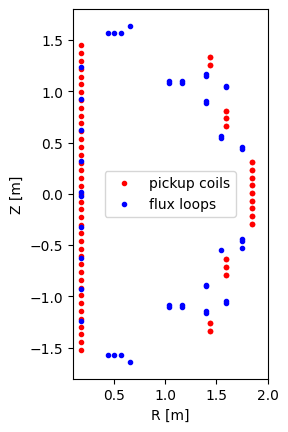

In [24]:

fig, axs = plt.subplots(1,1)
# Function to extract the four numbers from each entry in the file
def extract_numbers_from_file(file_path):
    sensor_names = []
    sensor_data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("a"):  # The line containing the four numbers
                # if "fl" not in str(line):
                #     continue
                sensor_names.append(str(line))
            if line.startswith("           1   "):  # The line containing the four numbers
                numbers = list(map(float, line.split()[1:]))  # Extract and convert to float
                # if len(numbers)==4:
                #     continue
                sensor_data.append([numbers[0],numbers[1],numbers[2]])
    return sensor_data,sensor_names
# Specify the path to your data file
file_path = 'Data//Input//EFIT_efit_data_detectors.dat_M4'  # Replace with your actual file path

# Extract the numbers from the file
sensor_characteristics,sensor_names  = extract_numbers_from_file(file_path)
# print(numbers_list)
sensor_characteristics = np.array(sensor_characteristics)
# Output the extracted numbers
for i in range(len(sensor_characteristics)):
    if "fl" in sensor_names[i]:
        plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],".",color="b")
    else: 
        plt.plot(sensor_characteristics[i][0],sensor_characteristics[i][1],".",color="r")



plt.plot(5,0,".",color="r",label="pickup coils")
plt.plot(5,0,".",color="b",label="flux loops")
plt.xlim([0.1,2])
plt.legend()
axs.set_aspect('equal')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.savefig("detectors.png",dpi=400)
plt.show()

First let's take a look at the top level shots. In this table we can find all of the metadata we have about particular shots.

In [26]:
import s3fs
import zarr
import xarray as xr
import matplotlib.pyplot as plt

URL = 'http://localhost:8081'
shots_df = pd.read_parquet(f'{URL}/parquet/level2/shots')
shots_df

URLError: <urlopen error [Errno 61] Connection refused>

# EFIT Data
This notebook contains some examples of loading and plotting equillibrium reconstruction data from EFIT.

First we can have a look at how many EFIT reconstructions are in the database:

In [ ]:
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
# sources_df = catalog.index.level1.signals(name="efm/xpoint2_rc").read()


# Can also use name == 'aye' for thompson scattering edge data.
sources_df = catalog.index.level1.sources().read()

# Can also use name == 'aye' for thompson scattering edge data.
sources_df = sources_df.loc[(sources_df.name == 'efm')]
sources_df
# display(sources_df["quality"].to_string())

description      quality                                  uuid  \
2       Basic EFIT  Not Checked  fd0a0dc4-1ed8-546f-8c02-455061374fd4   
6       Basic EFIT  Not Checked  c553a338-249f-58d5-9ba8-14f5c507c4e4   
10      Basic EFIT  Not Checked  f2ce95e9-bfe8-595d-a1eb-d860de377ab2   
14      Basic EFIT  Not Checked  f1fbd4b8-d68b-54bd-a9c0-209fddf9cef0   
18      Basic EFIT  Not Checked  798d44ea-0773-5020-8c3c-083b1bdb3aab   
...            ...          ...                                   ...   
307982  Basic EFIT  Not Checked  72422662-d3dd-5bb9-abdc-5e5e3427587e   
308017  Basic EFIT  Not Checked  5f073f88-7f09-53ca-b204-e9c620b0672d   
308052  Basic EFIT  Not Checked  0bcd11d2-f8f5-5ca3-94e6-235c13b1434d   
308087  Basic EFIT  Not Checked  91cbcfda-7434-55be-a760-80493d6e8f46   
308122  Basic EFIT  Not Checked  1b50bfb9-e9f3-5c23-8f5b-5821e441d1b7   

        shot_id name                                    url  
2         11695  efm  s3://mast/level1/shots/11695.zarr/efm  
6         11696  efm  s3://mast/level1/shots/11696.zarr/efm  
10        11697  efm  s3://mast/level1/shots/11697.zarr/efm  
14        11698  efm  s3://mast/level1/shots/11698.zarr/efm  
18        11699  efm  s3://mast/level1/shots/11699.zarr/efm  
...         ...  ...                                    ...  
307982    30467  efm  s3://mast/level1/shots/30467.zarr/efm  
308017    30468  efm  s3://mast/level1/shots/30468.zarr/efm  
308052    30469  efm  s3://mast/level1/shots/30469.zarr/efm  
308087    30470  efm  s3://mast/level1/shots/30470.zarr/efm  
308122    30471  efm  s3://mast/level1/shots/30471.zarr/efm  

[13621 rows x 6 columns]

Let's look at the data for a particular shot. Here we are going to use shot 30420 as an example. Below we get the url for the `efm` data.

`efm` source holds the EFIT data as a single dataset.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05767546, -0.28178087, -0.19119611, -0.1293396, -0.07630089, -0.043382246, -0.021235095, -0.010062117, -0.0023060273, 0.0019192757, 0.0043798974, 0.0028913482, 0.0028150715, 0.0033591657, 0.00086816587, -0.0034193213, -0.003095043, -0.0018347744, -0.0051886444, -0.0037661435, -0.00188808, -0.0031833218, -0.0026446907, -0.00149058, -0.0016315388, 0.0018770917, 0.0044715283, 0.0063676783, 0.0047896495, 0.0038143748, 0.0015083766, -0.0061773607, -0.018290795, -0.036303066, -0.06896232, -0.11962755, -0.18282548, -0.26565662, -0.16957714, 0.6522188, -0.059288178, -0.07819484, -0.031797837, -0.03260558, -0.034635507, -0.009469365, -0.011452973, -0.012559421, -0.013110753, -0.01329387, -0.013165357, -0.012675204, -0.011645614, -0.009761415, -0.035602942, -0.033132493, -0.03244421, -0.078717165, -0.05986204, -0.0031612404, -0.024885196, 0.005413895, -0.004530295, -0.014602089, 0.0060405913, 0.0046438635, 0.002962306, 0.0012742368, -0.00038141973, -0.0020378304, -0.003730707, -0.0054300823,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.062976286, -0.025317667, -0.018158497, -0.0023232712, 0.009489847, 0.019904312, 0.030661317, 0.042179465, 0.05686195, 0.07432446, 0.09232614, 0.112636715, 0.13414672, 0.15512581, 0.17435613, 0.19132094, 0.20684066, 0.21926259, 0.22753996, 0.23201618, 0.2330784, 0.23167685, 0.22567956, 0.2165736, 0.205611, 0.19211964, 0.17523317, 0.15668873, 0.13711236, 0.11721084, 0.0978199, 0.07983691, 0.06397904, 0.04955891, 0.036985245, 0.021899428, 0.004026302, -0.0049685175, 0.04225706, 0.33132765, -0.042747315, -0.06453764, -0.020622171, -0.03278804, -0.05148587, 0.015251236, 0.005031055, -0.0011128911, -0.004415915, -0.0055933227, -0.0048463056, -0.001988559, 0.0036826, 0.013403543, -0.058229055, -0.03689138, -0.023657054, -0.06568929, -0.044001237, -0.076764114, -0.1097125, 0.019401733, -0.004750554, -0.035217267, 0.03277962, 0.026368424, 0.01833101, 0.009929298, 0.001464509, -0.0070484974, -0.015594685, -0.0238907, -0.030752886, 0.04190334, 0.008518934, -0.016273761, 0.10490103, 0.07356046,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06590368, -0.28146914, -0.20087259, -0.14081995, -0.08855317, -0.057834715, -0.037096743, -0.024601951, -0.016633114, -0.012377745, -0.009883069, -0.011443074, -0.009624743, -0.008099094, -0.010521618, -0.014234001, -0.013942468, -0.012359803, -0.0151840625, -0.013425769, -0.011229374, -0.012074106, -0.011533334, -0.010113227, -0.009862787, -0.00597143, -0.0035799968, -0.001988849, -0.003075771, -0.0039428617, -0.006236564, -0.013381626, -0.026116427, -0.04375946, -0.076152645, -0.1263451, -0.19037476, -0.2701132, -0.17937875, 0.6502239, -0.071768835, -0.093165606, -0.038202405, -0.03937289, -0.042108446, -0.01142931, -0.013898945, -0.0152798835, -0.015961405, -0.01617013, -0.015982417, -0.015339806, -0.014028091, -0.011665178, -0.042743586, -0.03941645, -0.038293716, -0.09287515, -0.07111433, -0.0044666063, -0.030532388, 0.009899678, -0.0023229402, -0.014722775, 0.008954741, 0.007097457, 0.0048910505, 0.0026762662, 0.0005000354, -0.0016788235, -0.0038993654, -0.0061190925, -0.0080

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.08988509, 0.091916025, 0.07154796, 0.07229133, 0.073977746, 0.082538515, 0.09365028, 0.11040354, 0.13034473, 0.15440308, 0.17767774, 0.2049191, 0.23055385, 0.2537548, 0.27472612, 0.29435572, 0.3097036, 0.3202432, 0.3277004, 0.329224, 0.32620534, 0.31999767, 0.30910394, 0.29388237, 0.27587757, 0.25197506, 0.22741076, 0.20227644, 0.17776063, 0.15270284, 0.12881865, 0.10795696, 0.09310533, 0.079959735, 0.074162856, 0.07268174, 0.07079865, 0.08404626, 0.09111676, 0.10065993, -0.054890778, -0.084124625, -0.030767437, -0.04881339, -0.07566999, 0.015714606, 0.0014062165, -0.0071310094, -0.011639874, -0.013122964, -0.011892132, -0.0076833083, 0.00044595546, 0.014185277, -0.08084235, -0.051379777, -0.03321744, -0.083300166, -0.05476756, -0.10166135, -0.14436391, 0.0255893, -0.0068676393, -0.04886222, 0.04472761, 0.035679583, 0.024357835, 0.012550105, 0.0007004903, -0.011147417, -0.022961238, -0.034347054, -0.04367321, 0.057970334, 0.013096206, -0.019770248, 0.13932723, 0.099123046, -0.022442

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0329767, -0.15161903, -0.11999443, -0.09240073, -0.063375816, -0.04627066, -0.033128075, -0.028726676, -0.024682907, -0.020412497, -0.016820498, -0.016809398, -0.018845495, -0.0180983, -0.012484755, -0.012353075, -0.012231912, -0.0125734545, -0.012302254, -0.012101277, -0.011899759, -0.011741951, -0.011389213, -0.011544424, -0.011369622, -0.015791561, -0.016718945, -0.015854511, -0.015901208, -0.018247765, -0.022550335, -0.02760846, -0.031359646, -0.043388437, -0.05739513, -0.087317966, -0.11169038, -0.14870347, -0.08777294, 0.3455523, -0.013896698, -0.013187412, -0.007880547, -0.008104247, -0.008289555, -0.0056464826, -0.005755903, -0.0058156215, -0.005842908, -0.0058465805, -0.00583033, -0.0057910737, -0.005720783, -0.005602671, -0.008070739, -0.007879469, -0.007664166, -0.012505243, -0.013144929, 0.014091225, 0.012121365, 0.007103183, 0.0062040645, 0.0051806266, 0.0026173, 0.0020950336, 0.0015690827, 0.0010500019, 0.00053722155, 2.7272476e-05, -0.00048350796, -0.0009963968, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.022421187, 0.0346367, 0.0073002507, -0.0014668521, -0.0071559492, -0.0087678945, -0.008234993, -0.00423573, 0.0030267925, 0.013040408, 0.024333956, 0.040840406, 0.056592926, 0.075166464, 0.10425068, 0.1335655, 0.15545274, 0.17472884, 0.1997168, 0.2119234, 0.2183994, 0.22487295, 0.22287305, 0.21455124, 0.20144433, 0.18184043, 0.15947025, 0.13687927, 0.11522953, 0.09346801, 0.073389225, 0.056151174, 0.044524167, 0.035158385, 0.034384377, 0.032305203, 0.03547299, 0.043270472, 0.048328444, 0.0252082, -0.06294815, -0.09058646, -0.02149473, -0.038036104, -0.058825344, 0.00032636162, -0.010639407, -0.01754434, -0.021590944, -0.02347542, -0.02328444, -0.020886047, -0.015561299, -0.006113752, -0.07642793, -0.054958258, -0.041245203, -0.08922853, -0.06128555, -0.10393267, -0.1471642, 0.043571748, 0.018661363, -0.012671504, 0.040813632, 0.03396281, 0.025413863, 0.016383134, 0.007162812, -0.002216536, -0.011715796, -0.021030834, -0.028989028, 0.028875774, -0.0054920944, -0.032936107, 0.131

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.0783503, 0.12136297, 0.07433451, 0.04569592, 0.025546726, 0.013841932, 0.007538773, 0.0059739267, 0.008598556, 0.014180844, 0.021378564, 0.033190325, 0.042621575, 0.05514582, 0.07698563, 0.09930364, 0.11463181, 0.1284774, 0.14860016, 0.15967044, 0.16752975, 0.17661206, 0.18052135, 0.1804579, 0.17762755, 0.16463119, 0.15260662, 0.14135604, 0.13103928, 0.11693757, 0.10217287, 0.094327934, 0.088809974, 0.08575865, 0.09478123, 0.10310278, 0.12139729, 0.14421806, 0.143862, -0.019546214, -0.06417271, -0.09146698, -0.025356246, -0.042694177, -0.066460975, 0.0037331432, -0.009779975, -0.018429302, -0.023663528, -0.026320506, -0.02643294, -0.023852011, -0.017659664, -0.0063759214, -0.09187025, -0.06520307, -0.048413493, -0.08972588, -0.06137111, -0.10410771, -0.14717205, 0.035908937, 0.008529946, -0.026988404, 0.049796563, 0.042264912, 0.032558814, 0.022160731, 0.011423495, 0.00038846387, -0.010881176, -0.021986298, -0.031451773, 0.044577662, 0.004123001, -0.026511308, 0.13273512, 0.09429441

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05137333, -0.1474114, -0.16790968, -0.12634158, -0.07469809, -0.039087266, -0.017246407, -0.0066224774, 0.0015155802, 0.0053483015, 0.007251613, 0.0063550547, 0.0057310257, 0.005452305, 0.0018579946, -0.002329962, -0.0019261405, -0.0008044322, -0.004025217, -0.0030090092, -0.0014762504, -0.0024105916, -0.0017526443, -0.00041003252, 5.877392e-05, 0.003894656, 0.0068473946, 0.009299361, 0.008351708, 0.007815135, 0.005775944, -0.0022522782, -0.013786758, -0.032418918, -0.065642364, -0.1164683, -0.181845, -0.26374888, -0.17109227, 0.6645073, -0.066431805, -0.08897475, -0.03421668, -0.035417587, -0.038148854, -0.0075392015, -0.010060826, -0.0114713535, -0.01217373, -0.012401086, -0.012225057, -0.011582518, -0.01025314, -0.007844426, -0.038870573, -0.03554937, -0.03442891, -0.08856204, -0.06604532, -0.006927232, -0.03321889, 0.008171969, -0.0041128234, -0.01655205, 0.008359103, 0.0066074235, 0.004496802, 0.0023768602, 0.00029923118, -0.0017741227, -0.0038850522, -0.005994327, -0.00778406

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.025295861, -0.023646064, -0.04073914, -0.022829693, -0.009037608, 0.0022781212, 0.01465714, 0.029570566, 0.048579823, 0.07178497, 0.096477844, 0.12564151, 0.15916783, 0.19102989, 0.21831255, 0.2425904, 0.26530847, 0.28212562, 0.29029146, 0.29219693, 0.28791222, 0.2785936, 0.26209128, 0.24073797, 0.2161147, 0.18905523, 0.15738949, 0.12412749, 0.094934255, 0.06862717, 0.046088476, 0.027267937, 0.01040412, -0.0013354695, -0.010297555, -0.02176114, -0.038327653, -0.045258727, -0.005520226, 0.24659748, -0.059528932, -0.092973664, -0.016510502, -0.03144832, -0.050238036, 0.010086666, 0.0005483308, -0.005208448, -0.008290181, -0.009334873, -0.008533788, -0.0057203486, -0.00029143455, 0.008827568, -0.054271925, -0.033999477, -0.019412562, -0.09236977, -0.0597671, -0.11777015, -0.1685744, 0.055383038, 0.026991095, -0.005116272, 0.0340587, 0.026875593, 0.018283028, 0.009388978, 0.0004664965, -0.008461109, -0.017378213, -0.026042407, -0.033437178, 0.011385438, -0.022181943, -0.050247043, 0.162

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.018195761, -0.14588243, -0.10855615, -0.081930615, -0.056974303, -0.040922977, -0.033269517, -0.026091702, -0.024849406, -0.021927541, -0.019772923, -0.018818276, -0.01692863, -0.0153340725, -0.015712366, -0.016086707, -0.015405489, -0.014315655, -0.015036944, -0.014351748, -0.013713232, -0.014432358, -0.014652532, -0.014443558, -0.01511275, -0.015535111, -0.015412861, -0.014365858, -0.015256799, -0.01660603, -0.018774051, -0.023745699, -0.02843293, -0.037925877, -0.055086784, -0.07835183, -0.10032656, -0.13653779, -0.07170656, 0.36863658, -0.011023291, -0.010482658, -0.00577524, -0.0060959226, -0.0063807173, -0.0042040367, -0.004348035, -0.004427502, -0.0044656354, -0.004474364, -0.004458076, -0.0044131046, -0.0043279785, -0.004179367, -0.006381907, -0.006118399, -0.0058535924, -0.009784559, -0.010194925, 0.0073861405, 0.0058205184, 0.004169479, 0.0035155357, 0.0026573879, 0.0016795059, 0.0013066456, 0.00091886456, 0.00053317845, 0.000150806, -0.00023114342, -0.0006155286, -0.0010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.021038521, -0.10934463, -0.08339955, -0.053204477, -0.03076371, -0.015079489, -0.0040197647, 0.007981555, 0.020566562, 0.035043325, 0.050041687, 0.06992542, 0.09059668, 0.11101653, 0.1308372, 0.15049773, 0.16583523, 0.17695455, 0.18493429, 0.18675111, 0.18381037, 0.17719483, 0.16616377, 0.15134665, 0.133052, 0.112086445, 0.090763055, 0.070503086, 0.051348057, 0.034243926, 0.019340018, 0.007436625, -0.0042156912, -0.015515692, -0.028320367, -0.048993308, -0.0776784, -0.10113431, -0.03814842, 0.41639075, -0.03753919, -0.05293434, -0.02226495, -0.030542342, -0.042712852, 0.0010534528, -0.0055163787, -0.009410133, -0.01145519, -0.012125707, -0.011567546, -0.009651231, -0.005925316, 0.000411186, -0.045740243, -0.031996842, -0.02352587, -0.053632073, -0.038530227, -0.05735313, -0.08025523, 0.011512178, -0.004579335, -0.024696734, 0.019589296, 0.0155065125, 0.010396674, 0.005084605, -0.00023676298, -0.0055623855, -0.010891067, -0.016047927, -0.02027128, 0.0279663, 0.0062686885, -0.010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14665039, 0.20430176, 0.1624473, 0.14602551, 0.13021903, 0.12269974, 0.12831649, 0.14211819, 0.15813825, 0.18126702, 0.20420381, 0.22784597, 0.25100783, 0.27304044, 0.29345706, 0.30944726, 0.32179144, 0.3302769, 0.33475837, 0.3355916, 0.3322706, 0.3241752, 0.31288558, 0.29765347, 0.27837375, 0.25428835, 0.23019828, 0.20564552, 0.18148261, 0.15768357, 0.13607608, 0.12086356, 0.10874785, 0.103862315, 0.11007205, 0.124776185, 0.14349265, 0.17592774, 0.1710689, -0.04137445, -0.06474166, -0.09422073, -0.040232062, -0.060016576, -0.08783636, 0.0019225781, -0.012466854, -0.02102574, -0.025517754, -0.02695034, -0.02564667, -0.021337241, -0.013082304, 0.00080586254, -0.093892016, -0.06453434, -0.04710892, -0.09164514, -0.062949754, -0.10394758, -0.14656892, 0.028540824, -0.0032669194, -0.0452857, 0.045204557, 0.036038835, 0.024609953, 0.012713582, 0.0007947971, -0.011101074, -0.022938957, -0.03431947, -0.043598555, 0.059739783, 0.015145911, -0.017749935, 0.13910122, 0.09970777, -0.0385974221

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02097663, -0.24147774, -0.14843747, -0.0830897, -0.025596194, 0.009944603, 0.034208216, 0.04295836, 0.050904833, 0.052650627, 0.05278674, 0.04735203, 0.044220857, 0.042592436, 0.037822172, 0.030209173, 0.029342301, 0.030100215, 0.025117412, 0.027901798, 0.031681284, 0.030593667, 0.03277468, 0.035450716, 0.036674913, 0.043065388, 0.048380997, 0.05149175, 0.051928952, 0.053905804, 0.054662887, 0.046745393, 0.035487924, 0.017420199, -0.017302375, -0.07197294, -0.14326732, -0.23309219, -0.13875233, 0.6989306, -0.09735159, -0.12767026, -0.054618664, -0.052991528, -0.05244208, -0.021556376, -0.023030289, -0.023759462, -0.024056276, -0.02409921, -0.023959953, -0.023588507, -0.02280916, -0.021301256, -0.052051343, -0.051844403, -0.053250603, -0.12607273, -0.09535376, 0.010154543, -0.021623963, 0.0027212028, -0.009826402, -0.02111975, 0.0045537287, 0.0035145413, 0.0022773105, 0.0010872724, -5.08968e-05, -0.0012018586, -0.002420046, -0.0036922495, -0.0047875573, 0.022413297, 0.01084462, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20738056, 0.16323382, 0.13126235, 0.1172693, 0.10674689, 0.1037617, 0.108585134, 0.11873429, 0.13479026, 0.1574142, 0.18158612, 0.20893054, 0.23694615, 0.26494855, 0.29125804, 0.31360054, 0.3330537, 0.34740853, 0.35539275, 0.35792735, 0.35450628, 0.34523776, 0.33029044, 0.31042734, 0.2872965, 0.25937623, 0.2311137, 0.20354652, 0.17685099, 0.15205295, 0.13061248, 0.11522006, 0.10599863, 0.101612054, 0.10557208, 0.11722574, 0.13178913, 0.16533665, 0.20620058, 0.28656176, -0.0659475, -0.09606335, -0.034119494, -0.051954035, -0.07772578, 0.010503761, -0.0030594573, -0.011131392, -0.015379037, -0.016761204, -0.015578804, -0.011575041, -0.0038449925, 0.009234462, -0.08265299, -0.05451558, -0.036797743, -0.09533309, -0.06588741, -0.112144046, -0.15767722, 0.02881559, -0.0033824272, -0.04434218, 0.04274287, 0.033997048, 0.023122128, 0.01181185, 0.0004766093, -0.010856333, -0.022170072, -0.033101242, -0.042101987, 0.053563386, 0.009845877, -0.022764137, 0.15273681, 0.10973057, -0.01774020754

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.038753934, -0.3038444, -0.21589172, -0.1400702, -0.08095228, -0.04664573, -0.0237681, -0.01171809, -0.004806582, -0.00042274158, 0.001925759, 0.0010988679, 0.0010848443, 0.0010734963, -0.003152007, -0.008302353, -0.007599774, -0.0064028916, -0.010756404, -0.008416467, -0.0055666603, -0.007920034, -0.006147145, -0.004371164, -0.0054423893, -0.00319, 0.0003263546, 0.002811997, 0.00082241674, -0.0001562027, -0.0025186983, -0.008974583, -0.022403024, -0.041116998, -0.07449817, -0.1299128, -0.20044672, -0.28726882, -0.17143385, 0.771567, -0.08151554, -0.10510369, -0.04223179, -0.043487314, -0.046761017, -0.010016263, -0.012950934, -0.014590829, -0.015399463, -0.015646039, -0.015416683, -0.014634674, -0.013041132, -0.010178196, -0.047473095, -0.043374408, -0.042118955, -0.10403952, -0.08048399, 0.0018602385, -0.027570006, 0.01001596, -0.004055514, -0.018589314, 0.010170686, 0.00789558, 0.0051947627, 0.0024783316, -0.00019295856, -0.002864024, -0.005581811, -0.008295434, -0.010623829, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.05202613, 0.0017906048, 0.005691014, 0.023833636, 0.036638387, 0.04882261, 0.06583354, 0.084874295, 0.10724659, 0.13347541, 0.15921354, 0.18548554, 0.21278238, 0.23878548, 0.25921404, 0.27611932, 0.29252094, 0.30515885, 0.30958724, 0.31259948, 0.31122276, 0.30296773, 0.29217952, 0.27788973, 0.25845823, 0.23589905, 0.21172659, 0.18606187, 0.15977144, 0.13369466, 0.10910165, 0.08670738, 0.06638759, 0.05042208, 0.03857947, 0.027023718, 0.010649788, 0.0068524755, 0.032477573, 0.21441184, -0.047379922, -0.072509654, -0.026017414, -0.040629465, -0.06201111, 0.010235081, -0.0011122001, -0.007901947, -0.01149794, -0.012684033, -0.0117022125, -0.008341797, -0.0018554699, 0.00909349, -0.06644155, -0.042681377, -0.027569562, -0.07217221, -0.047534425, -0.08331362, -0.12011507, 0.02784492, 0.0010539186, -0.032819383, 0.036578257, 0.029099664, 0.019829728, 0.010167546, 0.00046048797, -0.009257286, -0.018957581, -0.028326102, -0.036073796, 0.03965341, 0.003287638, -0.023798455, 0.11632251, 0.0814

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056251157, -0.2622775, -0.18924183, -0.12697859, -0.07546363, -0.041413363, -0.019669387, -0.008087447, -0.0009350199, 0.0029436406, 0.0049021565, 0.0033797727, 0.0025549694, 0.0023166921, 0.0006031916, -0.0027166242, -0.0033087453, -0.0031156926, -0.005643967, -0.004484036, -0.0029280283, -0.004246698, -0.0030483946, -0.0013474147, -0.001796781, 0.0019718376, 0.0049091983, 0.0066242483, 0.005062763, 0.0044332696, 0.002674802, -0.0044485778, -0.017064769, -0.034273718, -0.06711333, -0.11742076, -0.18470559, -0.2640214, -0.1726081, 0.66174585, -0.06336829, -0.08552659, -0.031037323, -0.032567013, -0.03592045, -0.0038068532, -0.006592604, -0.008161462, -0.008945372, -0.009195824, -0.008991619, -0.008264078, -0.006773931, -0.0040985085, -0.036790058, -0.032745264, -0.031257782, -0.08576001, -0.06370037, -0.008342496, -0.03474701, 0.0065025217, -0.006148822, -0.019250864, 0.008379087, 0.0065502385, 0.0043137465, 0.0020537914, -0.00016847852, -0.0023898573, -0.004649604, -0.0068971617, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.059488207, 0.010649141, 0.012417151, 0.024198722, 0.031598404, 0.03866094, 0.048943333, 0.062338624, 0.07527454, 0.093991384, 0.11253679, 0.13116446, 0.14958178, 0.16758227, 0.18546377, 0.1990041, 0.2094713, 0.21687278, 0.22170317, 0.22328705, 0.22169368, 0.21672343, 0.20926052, 0.19875586, 0.18511428, 0.16737351, 0.14938591, 0.1308856, 0.11214851, 0.09307081, 0.07502618, 0.0629254, 0.049439963, 0.040169664, 0.033922903, 0.026126659, 0.015425045, 0.01339511, 0.042587858, 0.21197267, -0.039371446, -0.056264896, -0.02428193, -0.034168232, -0.048474215, 5.5776607e-05, -0.0074138506, -0.011861386, -0.01420232, -0.014964211, -0.014311765, -0.012101217, -0.007830837, -0.00060439284, -0.05121298, -0.035386026, -0.025253123, -0.056130037, -0.039579608, -0.059182268, -0.0840269, 0.016619962, -0.0012303337, -0.023888212, 0.023464035, 0.018639933, 0.01264592, 0.0064112707, 0.00016110147, -0.0060905986, -0.012335324, -0.018372416, -0.02334725, 0.02845205, 0.0041877115, -0.01385316, 0.08153494, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.252308, 0.32027593, 0.24411903, 0.18659538, 0.1426717, 0.113737606, 0.09806893, 0.09179416, 0.091260694, 0.097211964, 0.10663046, 0.11981477, 0.13544321, 0.15269107, 0.1707206, 0.18783689, 0.20259863, 0.21404776, 0.22147359, 0.22378913, 0.2208508, 0.21291293, 0.20108016, 0.1859913, 0.16873026, 0.15014935, 0.13290271, 0.11747124, 0.104765825, 0.09517419, 0.089726284, 0.090391226, 0.09673595, 0.111786604, 0.13960363, 0.18221027, 0.23950796, 0.31513724, 0.31232095, -0.06292834, -0.05178484, -0.07503396, -0.02877298, -0.044241376, -0.066942915, 0.001549137, -0.010683614, -0.018097006, -0.022062147, -0.023359912, -0.022232713, -0.018471286, -0.011335746, 0.0005146336, -0.07147159, -0.04670332, -0.03130773, -0.07424329, -0.051528763, -0.0925617, -0.1276699, 0.022941206, -0.0021754277, -0.035155512, 0.038573742, 0.030854674, 0.0211202, 0.010864418, 0.000505255, -0.009854859, -0.020122081, -0.0299171, -0.037865065, 0.043687817, 0.008208714, -0.017419308, 0.12422458, 0.09119462, -0.039788219

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053155415, -0.26898193, -0.1835772, -0.12691791, -0.07310563, -0.039498728, -0.017327638, -0.006339289, 0.0014719613, 0.0051900283, 0.007008951, 0.005459211, 0.0045447806, 0.0042713936, 0.0005749357, -0.003970321, -0.003793546, -0.0025664398, -0.005907482, -0.0037790437, -0.0011206785, -0.002191711, -0.0011889145, 0.00017492958, 0.0003181509, 0.0039033727, 0.006727815, 0.008328012, 0.007174127, 0.0067059435, 0.004902922, -0.00278889, -0.014588756, -0.03282873, -0.066260114, -0.116563685, -0.17972778, -0.26693705, -0.16751847, 0.6568256, -0.06843836, -0.09174313, -0.035475604, -0.03685056, -0.040396072, -0.0051635327, -0.008159899, -0.009839206, -0.010665538, -0.010908855, -0.010659078, -0.009838733, -0.008185129, -0.0052334866, -0.04114569, -0.03662623, -0.03505514, -0.09121946, -0.067970484, -0.010139365, -0.037366062, 0.0054224217, -0.008025548, -0.022031, 0.009174538, 0.007181528, 0.0047409893, 0.0022724557, -0.00015907972, -0.0025957928, -0.0050784973, -0.0075470624, -0.0096059

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.070014454, 0.08224586, 0.07389143, 0.07876459, 0.08451061, 0.09443894, 0.109978735, 0.13063408, 0.15156102, 0.1785092, 0.2038165, 0.22899829, 0.25286013, 0.27482378, 0.2963714, 0.31294218, 0.32521674, 0.3335814, 0.3396258, 0.34077775, 0.33830005, 0.33326113, 0.3243181, 0.31173414, 0.2962156, 0.2744271, 0.25195011, 0.22845544, 0.20418519, 0.17787018, 0.15150292, 0.12974618, 0.110310055, 0.09368633, 0.0837949, 0.07928092, 0.0726523, 0.08194606, 0.07586423, 0.045930933, -0.050227847, -0.07752202, -0.027645214, -0.043013595, -0.065443315, 0.012034227, 0.00022102683, -0.0068035265, -0.010489961, -0.011673061, -0.010618191, -0.0070965653, -0.00031289746, 0.01115711, -0.06946353, -0.04454422, -0.028696982, -0.07697824, -0.050257314, -0.0920783, -0.13158578, 0.027755624, -0.0010202309, -0.037171472, 0.0372816, 0.029610377, 0.020092351, 0.010195569, 0.00027416926, -0.00965129, -0.019566428, -0.029152352, -0.037055977, 0.044664398, 0.0059868107, -0.022981565, 0.12826635, 0.09085369, -0.030929

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05923183, -0.28033143, -0.19282165, -0.13009569, -0.07713977, -0.043472722, -0.021720327, -0.010423253, -0.00328928, 0.0006921434, 0.0029162904, 0.0011554298, 0.00103346, 0.0014438729, -0.001209411, -0.005586263, -0.0053762584, -0.0041472954, -0.007413359, -0.006352851, -0.0047713993, -0.005633738, -0.005312976, -0.0041394862, -0.0035966428, -9.1728114e-05, 0.0023311798, 0.0043732026, 0.00356137, 0.0027197294, 0.0002673504, -0.0066767493, -0.018789459, -0.036988445, -0.07025874, -0.12065512, -0.18534146, -0.2671559, -0.17409979, 0.6495493, -0.068314336, -0.09057421, -0.035256628, -0.03650766, -0.03928061, -0.009048116, -0.011531403, -0.012927398, -0.013627732, -0.013860435, -0.013693765, -0.013064994, -0.011755282, -0.009377632, -0.0404946, -0.037201356, -0.036128394, -0.09098153, -0.06871848, -0.008448764, -0.034795173, 0.008120667, -0.0041015935, -0.01646776, 0.0077544684, 0.0059978366, 0.0038862315, 0.0017612586, -0.00032623648, -0.0024137355, -0.0045426576, -0.00667384, -0.0084

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10462288, 0.090073995, 0.07513466, 0.08193617, 0.08834706, 0.09884696, 0.11147719, 0.13007738, 0.14790832, 0.17218433, 0.19499697, 0.21964335, 0.24175505, 0.2617209, 0.28183922, 0.2984738, 0.3100954, 0.317365, 0.32352802, 0.3239859, 0.32091588, 0.31599775, 0.30767998, 0.29561114, 0.2805161, 0.2593218, 0.23814875, 0.21646416, 0.19349843, 0.16915551, 0.14514372, 0.12723894, 0.11006884, 0.09646097, 0.088411786, 0.08312392, 0.07559375, 0.08338189, 0.09816825, 0.16875373, -0.0504513, -0.07594646, -0.028463976, -0.043617863, -0.06569259, 0.010717888, -0.0009447979, -0.007876524, -0.011525739, -0.01272612, -0.011736923, -0.008339693, -0.0017551801, 0.009413756, -0.06970416, -0.045577783, -0.030390847, -0.07521363, -0.050340556, -0.087280706, -0.12458367, 0.024026148, -0.0035854655, -0.03884568, 0.036593884, 0.029131275, 0.019845424, 0.010194855, 0.00053071213, -0.009126782, -0.0187686, -0.028088776, -0.035764646, 0.046193585, 0.008670859, -0.019178271, 0.12025963, 0.08512396, -0.0153287417

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27984285, 0.3476569, 0.25464818, 0.1893268, 0.14721113, 0.12381602, 0.1106324, 0.11087132, 0.11716985, 0.13108556, 0.14801075, 0.17202623, 0.19739445, 0.22216883, 0.24674681, 0.2717337, 0.29118523, 0.30546832, 0.3166699, 0.31846493, 0.31385216, 0.30608988, 0.29113463, 0.27166674, 0.25025368, 0.2244475, 0.19838488, 0.1743422, 0.15322804, 0.13428335, 0.11959438, 0.112607956, 0.11387504, 0.1230916, 0.14712907, 0.18839906, 0.24957533, 0.32568982, 0.3347652, -0.018329512, -0.088536255, -0.1293353, -0.048339326, -0.07365665, -0.110543676, 0.0052962606, -0.014553301, -0.026562095, -0.033006858, -0.035191756, -0.033507194, -0.027621794, -0.016318735, 0.0025886528, -0.11758078, -0.07717246, -0.051520426, -0.12762362, -0.087915, -0.15553424, -0.21683365, 0.042514928, -0.0006834545, -0.056235276, 0.063413344, 0.05078284, 0.03494104, 0.018312098, 0.0015500112, -0.015212238, -0.031859763, -0.0478103, -0.060860556, 0.06756984, 0.008448588, -0.034957588, 0.20929562, 0.1518173, -0.03466485278438731

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05483601, -0.28556332, -0.20339137, -0.13311619, -0.0772473, -0.04418296, -0.023057174, -0.011229666, -0.0047637383, -0.0005980359, 0.001510855, 0.0010808436, 0.00086171203, 0.0006047365, -0.0032343138, -0.007396578, -0.0069478666, -0.005976999, -0.009372013, -0.0074133757, -0.0049921316, -0.006596636, -0.005109363, -0.0035257288, -0.0040246006, -0.0016272616, 0.0013013764, 0.0031663063, 0.0015712022, 0.00059414905, -0.0018030008, -0.008081062, -0.020862648, -0.03892349, -0.07133585, -0.12300156, -0.18864779, -0.27192935, -0.1718709, 0.65762615, -0.074658476, -0.09725231, -0.038380854, -0.039686054, -0.042953663, -0.007672895, -0.010572273, -0.012187262, -0.012976806, -0.013205872, -0.012962983, -0.012173709, -0.0105869025, -0.0077540036, -0.04295243, -0.038800403, -0.03734599, -0.09423318, -0.07145581, -0.001375386, -0.02925338, 0.009185471, -0.0043337434, -0.018334642, 0.010228949, 0.008090875, 0.0055323048, 0.0029589974, 0.00043169493, -0.0020923424, -0.004656712, -0.007209918, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08596923, 0.06928769, 0.05640204, 0.060188454, 0.0631933, 0.07096251, 0.086128086, 0.10625964, 0.13057676, 0.1605092, 0.19036394, 0.22152995, 0.25411785, 0.28501466, 0.31175148, 0.33379138, 0.35297182, 0.36743316, 0.3749386, 0.37740314, 0.37453645, 0.36662507, 0.35285628, 0.33478874, 0.3128365, 0.28604996, 0.25578618, 0.22401549, 0.19344328, 0.16261886, 0.13374767, 0.10885463, 0.08821437, 0.073128685, 0.06574143, 0.062706016, 0.059004586, 0.07176561, 0.08423053, 0.13345826, -0.059436135, -0.089991756, -0.03273264, -0.050480343, -0.076778546, 0.01442093, 0.0004432249, -0.007878526, -0.01226206, -0.013696423, -0.012489441, -0.008373625, -0.00040698025, 0.013093856, -0.08205958, -0.052766204, -0.03434426, -0.08980472, -0.059844784, -0.1066143, -0.15154523, 0.027939474, -0.0052104145, -0.047300003, 0.043625962, 0.034723222, 0.023619909, 0.01205951, 0.0004636221, -0.011141519, -0.022738019, -0.033947412, -0.043165423, 0.05570758, 0.010507543, -0.022998951, 0.14725536, 0.10462115, -0.0166

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.045658384, -0.28262854, -0.19864683, -0.12682378, -0.070524365, -0.03773772, -0.016207546, -0.004859868, 0.0014969276, 0.005239252, 0.0070753056, 0.005577376, 0.005175519, 0.004909668, 0.00079966703, -0.004298712, -0.0040583573, -0.0031072195, -0.007226535, -0.0043181526, -0.0008926578, -0.0031975852, -0.000996786, 0.0010323689, -0.00014080087, 0.0028439786, 0.006878957, 0.009367492, 0.0072923107, 0.006856405, 0.0053651324, -0.0010927208, -0.013867658, -0.03147343, -0.06410577, -0.11625059, -0.18401723, -0.26678827, -0.16604668, 0.6811262, -0.081167415, -0.10614718, -0.041321576, -0.042589698, -0.045936264, -0.008350446, -0.011370427, -0.013055639, -0.013883697, -0.014131923, -0.013890389, -0.013079718, -0.011432259, -0.008473937, -0.0466103, -0.04238215, -0.041076142, -0.10475772, -0.07983318, -0.0024873684, -0.032920815, 0.009022085, -0.005493308, -0.020415364, 0.010004673, 0.0077752476, 0.005106116, 0.0024201337, -0.00022042861, -0.0028622886, -0.005553207, -0.008239578, -0.0105

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.033969738, -0.010576329, -0.0029137419, 0.016759189, 0.03298216, 0.04873294, 0.06875459, 0.09131013, 0.11718354, 0.14633027, 0.17431562, 0.20275404, 0.23209357, 0.2583012, 0.27735367, 0.29181424, 0.3037872, 0.31025806, 0.30710527, 0.30023703, 0.2875538, 0.26816955, 0.24420731, 0.21700029, 0.18776816, 0.15738617, 0.12731457, 0.099121146, 0.07472597, 0.053123876, 0.034787156, 0.021499952, 0.008461924, -0.0007090143, -0.0071763853, -0.015205168, -0.028076429, -0.030596048, -0.005543383, 0.16597767, -0.046243545, -0.070208654, -0.028781772, -0.043030355, -0.06459196, 0.013312416, 0.0021079576, -0.0043890923, -0.0076120603, -0.008379333, -0.007007291, -0.0032414738, 0.0036635702, 0.015082199, -0.061357263, -0.037499193, -0.022865847, -0.06764452, -0.044785272, -0.07834739, -0.11311548, 0.019602595, -0.0076935915, -0.042584985, 0.032991815, 0.02543715, 0.01611884, 0.0064952937, -0.0030716164, -0.012553054, -0.021938236, -0.030924449, -0.0381959, 0.047026556, 0.010767234, -0.01566203,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.11471113, 0.20088525, 0.16622417, 0.14177242, 0.12686726, 0.124940954, 0.13022195, 0.1449935, 0.16246562, 0.18560949, 0.20831116, 0.23417756, 0.25947446, 0.28102732, 0.29949242, 0.31400976, 0.3214738, 0.32203645, 0.31801423, 0.30535966, 0.28704977, 0.26655477, 0.24078086, 0.2126165, 0.1857515, 0.15637998, 0.12877496, 0.10388387, 0.08490606, 0.06800676, 0.05447145, 0.046248805, 0.04430245, 0.046388358, 0.058100417, 0.08072735, 0.11071227, 0.15276116, 0.122892395, -0.18368006, -0.057001136, -0.08679622, -0.037967265, -0.057655223, -0.085682414, 0.0043763723, -0.009278918, -0.017102111, -0.020790868, -0.021310046, -0.019124195, -0.013917263, -0.0048692883, 0.009611908, -0.07652975, -0.047818698, -0.030524433, -0.08240566, -0.054476637, -0.09798996, -0.14015245, 0.034020077, 0.0018381053, -0.040096432, 0.04095478, 0.03092071, 0.01873528, 0.0061972914, -0.00620093, -0.018370101, -0.030253723, -0.041464668, -0.05042471, 0.04996274, 0.007566106, -0.02353044, 0.14326826, 0.10325987, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058752246, -0.27138838, -0.19202332, -0.1320473, -0.07944206, -0.044794474, -0.022529943, -0.0116847, -0.003043543, 0.00092661596, 0.0030424413, 0.001994563, 0.0019215947, 0.0021545794, -0.0010202292, -0.0051200525, -0.0046951096, -0.003446813, -0.006668247, -0.0054213656, -0.0037175247, -0.0048418622, -0.004374277, -0.0032981813, -0.0032504858, 0.0005911184, 0.003259481, 0.005209533, 0.0036714287, 0.0028414726, 0.00070558116, -0.0076344195, -0.019306008, -0.037704885, -0.07129965, -0.121472016, -0.18566126, -0.27012265, -0.1721331, 0.6530036, -0.06091428, -0.08133216, -0.03155356, -0.03278524, -0.035449933, -0.007586078, -0.009927091, -0.011244144, -0.011905463, -0.01212518, -0.011967851, -0.011375763, -0.010145638, -0.007917883, -0.036453176, -0.033284783, -0.032200035, -0.08151464, -0.061139267, -0.008876383, -0.03283478, 0.0069791176, -0.0042438013, -0.015657132, 0.0072278907, 0.0056206523, 0.0036772287, 0.0017197725, -0.00020264386, -0.0021236409, -0.0040804255, -0.0060350485,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.058258567, 0.009805108, 0.010748883, 0.020351507, 0.028526753, 0.038138248, 0.047040813, 0.059418, 0.07400308, 0.09179866, 0.10951682, 0.13148601, 0.15231518, 0.17160012, 0.18961188, 0.20696053, 0.22055098, 0.22999972, 0.23700622, 0.23786953, 0.23470876, 0.22960661, 0.21992311, 0.20679171, 0.19151999, 0.17339684, 0.15340695, 0.13321607, 0.11280278, 0.0932323, 0.07537255, 0.06047051, 0.048492093, 0.038453955, 0.031596668, 0.02458408, 0.015133267, 0.013938295, 0.04227518, 0.19946462, -0.03604486, -0.053556833, -0.019753892, -0.029948868, -0.0449765, 0.006923471, -0.0010205001, -0.005758284, -0.00826233, -0.0090944655, -0.008427235, -0.0061121536, -0.0016187525, 0.005997892, -0.04795584, -0.031312484, -0.020811794, -0.053479355, -0.036343973, -0.061568134, -0.087590806, 0.016711192, -0.0021802497, -0.026159445, 0.025114113, 0.019992223, 0.013620784, 0.0069903494, 0.00034169163, -0.006309198, -0.012952651, -0.019375322, -0.024670875, 0.030528473, 0.004916586, -0.0141153755, 0.084527746,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25502598, 0.3125002, 0.23908086, 0.18199863, 0.14013702, 0.113993295, 0.097129725, 0.09181814, 0.09034136, 0.09620282, 0.10537066, 0.12013787, 0.13680275, 0.15427096, 0.17330164, 0.1929194, 0.2086943, 0.2206422, 0.23032199, 0.231493, 0.2271131, 0.22073345, 0.20772806, 0.19155136, 0.17531575, 0.15530573, 0.1363317, 0.12061055, 0.10856398, 0.09812706, 0.09114168, 0.090766534, 0.09816189, 0.11092506, 0.13762045, 0.17931029, 0.23711456, 0.31013796, 0.3120888, -0.03867877, -0.051309124, -0.07505301, -0.02678391, -0.042013116, -0.06475041, 0.0075665354, -0.0047605126, -0.012203687, -0.016185494, -0.017520703, -0.016455662, -0.012777298, -0.005716213, 0.006108523, -0.069442675, -0.0443967, -0.02894802, -0.074203506, -0.051071126, -0.09576351, -0.1318943, 0.020121213, -0.0060111424, -0.04007324, 0.03837735, 0.030754087, 0.021118406, 0.010989043, 0.0007734581, -0.0094484715, -0.01960567, -0.029330045, -0.03722865, 0.047561493, 0.011047536, -0.015416898, 0.12765339, 0.09371172, -0.04050764339

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055659857, -0.28962964, -0.20807548, -0.1380994, -0.08338884, -0.05088436, -0.029081954, -0.017644465, -0.010471246, -0.006189656, -0.0038721533, -0.0043841857, -0.0047694673, -0.004768507, -0.008628254, -0.012926357, -0.012242249, -0.010817895, -0.014323765, -0.012633072, -0.010489083, -0.011987439, -0.011046432, -0.009636397, -0.009929009, -0.0066234274, -0.003421158, -0.00060458924, -0.0024074768, -0.0034866752, -0.005994508, -0.012962632, -0.025657155, -0.04448553, -0.07567765, -0.1281928, -0.19017974, -0.27571064, -0.17463516, 0.64681804, -0.066954166, -0.08829621, -0.036110044, -0.038229145, -0.042856157, -0.0053244582, -0.008792074, -0.010740478, -0.011698257, -0.0119707575, -0.011660208, -0.010676818, -0.008727852, -0.0052912375, -0.042745482, -0.037009474, -0.034594163, -0.08323626, -0.061376844, -0.008684249, -0.034423318, 0.004392187, -0.009156458, -0.024009192, 0.0112280715, 0.009030021, 0.006306292, 0.0035427748, 0.00082300935, -0.0018908036, -0.0046382686, -0.00734696

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.062740535, 0.024429822, 0.020383151, 0.027177809, 0.03177217, 0.037639663, 0.047997545, 0.060495976, 0.07643256, 0.09641041, 0.116834626, 0.13908295, 0.1615092, 0.18369927, 0.20206384, 0.2180086, 0.23300625, 0.24457805, 0.24956332, 0.25210917, 0.25060627, 0.2438202, 0.23412658, 0.22141817, 0.20460528, 0.18541892, 0.16493551, 0.14428088, 0.122221425, 0.1010673, 0.081852354, 0.06548772, 0.05177147, 0.041920237, 0.0362202, 0.03157439, 0.02535436, 0.029331742, 0.05148912, 0.1711559, -0.03954738, -0.060276944, -0.019638669, -0.031228798, -0.048491374, 0.012606569, 0.0033663104, -0.0021304078, -0.005025592, -0.005976613, -0.005185976, -0.0024728603, 0.0027960532, 0.011751056, -0.05237243, -0.03298575, -0.02080703, -0.06000245, -0.03977739, -0.07386237, -0.10474855, 0.018484097, -0.0038913381, -0.032022975, 0.028716514, 0.02285432, 0.0155399805, 0.007926564, 0.0002890474, -0.007360401, -0.015014415, -0.022424208, -0.028521337, 0.038049836, 0.007724901, -0.014846129, 0.10047946, 0.07137213,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053633817, -0.28055966, -0.19147791, -0.12807372, -0.074626155, -0.040515613, -0.018412126, -0.0073082563, -0.000161063, 0.0035648386, 0.005546326, 0.0032688067, 0.0026762758, 0.0027653722, 0.0010905234, -0.0030052816, -0.0033693784, -0.0028337147, -0.0057996004, -0.0047018826, -0.0030926138, -0.0040930132, -0.0031851456, -0.0016313178, -0.001375395, 0.0024734912, 0.0054326956, 0.0075558852, 0.0065947794, 0.006123816, 0.0042480747, -0.0027937652, -0.014982907, -0.03286774, -0.06649196, -0.1177237, -0.18390284, -0.2664768, -0.1708684, 0.67200273, -0.07189376, -0.09552148, -0.036552504, -0.037900615, -0.04089486, -0.008200436, -0.010907469, -0.012427492, -0.0131901605, -0.013444702, -0.013265799, -0.012586195, -0.011168715, -0.008593312, -0.042250495, -0.03869359, -0.03756749, -0.09603221, -0.07232372, -0.009413195, -0.037378773, 0.008034192, -0.0050149546, -0.01829391, 0.008428592, 0.0065371594, 0.004257722, 0.0019643027, -0.00028771805, -0.0025390792, -0.004834665, -0.007131862, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0034982653, -0.037364133, -0.038311385, -0.028621005, -0.023322064, -0.01874512, -0.011489758, -0.00051749113, 0.012923254, 0.032152873, 0.05408223, 0.081611976, 0.117056064, 0.15535596, 0.19653207, 0.23779866, 0.2790106, 0.3149773, 0.34358746, 0.36098066, 0.36775032, 0.36629823, 0.3512231, 0.32628667, 0.2958398, 0.25971487, 0.21735607, 0.17352548, 0.13547093, 0.10096942, 0.07140865, 0.04679921, 0.027043322, 0.012705284, 0.0041594286, -0.004529999, -0.019018425, -0.018036095, -0.0049344404, 0.11335527, -0.060272787, -0.09262656, -0.018849783, -0.036475703, -0.060518686, 0.0190647, 0.006477469, -0.0011570595, -0.0053474084, -0.0069717676, -0.006249635, -0.0029781098, 0.0036907012, 0.015235255, -0.07165311, -0.04635493, -0.030402385, -0.09249605, -0.060564764, -0.12152059, -0.17079316, 0.03739595, 0.0061375448, -0.032614414, 0.04208853, 0.034158394, 0.02429233, 0.013999715, 0.003635107, -0.0067902342, -0.017270194, -0.027480477, -0.03602505, 0.04533839, 0.0038145846, -0.028742792, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time
[-0.06262481, -0.27545556, -0.19590855, -0.13626017, -0.083254226, -0.049075074, -0.02642585, -0.015717547, -0.007846235, -0.003591408, -0.0010396341, -0.0027430526, -0.003374515, -0.0029206725, -0.0049660117, -0.009313386, -0.008975642, -0.007685174, -0.010983395, -0.009759469, -0.008060829, -0.009140162, -0.008777249, -0.0077129262, -0.007552142, -0.0038157112, -0.0012033248, 0.0009021403, -0.0004580098, -0.0013006368, -0.0035391767, -0.011848085, -0.02347628, -0.042027052, -0.075466715, -0.12607796, -0.1901167, -0.275622, -0.1769943, 0.6511682, -0.06290742, -0.084742464, -0.031824213, -0.033736356, -0.037679855, -0.0037797862, -0.006872758, -0.008625996, -0.009510484, -0.00979997, -0.0095784385, -0.008772093, -0.0071218284, -0.004169353, -0.0388082, -0.034114208, -0.03222038, -0.08496348, -0.06318637, -0.014316396, -0.04048486, 0.0067697144, -0.006351288, -0.02017369, 0.009453927, 0.0074062957, 0.0049025826, 0.0023662788, -0.00013199906, -0.0026283646, -0.005162849, -0.00767833

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.03462276, 0.0064346464, 0.0050974963, 0.012376428, 0.018884787, 0.025786016, 0.03662582, 0.049663216, 0.067279935, 0.08853633, 0.11080267, 0.13604343, 0.16345984, 0.19039033, 0.21508004, 0.23655404, 0.25560454, 0.2700011, 0.27820557, 0.28060508, 0.27745903, 0.2698346, 0.25555524, 0.23688155, 0.21598607, 0.1922502, 0.16545951, 0.13822664, 0.11296179, 0.08961683, 0.0691008, 0.05137267, 0.037990905, 0.027321866, 0.02091729, 0.015197174, 0.007445744, 0.008726903, 0.02484254, 0.118245035, -0.043911695, -0.065541446, -0.023089238, -0.035832647, -0.054015364, 0.0066975555, -0.002836161, -0.0085342275, -0.0115528675, -0.012557546, -0.011752759, -0.008964031, -0.0035635165, 0.0055723134, -0.057847492, -0.03800827, -0.025311967, -0.06492461, -0.043830886, -0.07650552, -0.10857368, 0.023075176, 0.0005168429, -0.028102977, 0.030581884, 0.02436723, 0.016659146, 0.008635821, 0.0005858813, -0.00746717, -0.0155066345, -0.023275804, -0.029698316, 0.034543365, 0.004007739, -0.018817676, 0.10422858, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.13642874, 0.24993317, 0.18897815, 0.14141107, 0.10541407, 0.08572741, 0.07601143, 0.07583849, 0.081019886, 0.09195264, 0.105318576, 0.12386016, 0.14366722, 0.16382259, 0.18586166, 0.20719554, 0.22357151, 0.2355535, 0.24564429, 0.24669701, 0.24208193, 0.23545769, 0.22221738, 0.20526692, 0.1875244, 0.16467734, 0.14294557, 0.12405356, 0.108178325, 0.09313714, 0.08094128, 0.07603223, 0.07729647, 0.08357259, 0.103502296, 0.13761471, 0.18368497, 0.24581036, 0.2029685, -0.2795564, -0.051554605, -0.07745263, -0.02752504, -0.043489177, -0.06670415, 0.0067316983, -0.005660409, -0.013127843, -0.017111827, -0.018438514, -0.017361335, -0.013664947, -0.006571253, 0.005318306, -0.07137676, -0.046009496, -0.030043773, -0.076337025, -0.051043212, -0.09898479, -0.13722111, 0.025383059, -0.0018437048, -0.036899395, 0.03915975, 0.03133979, 0.021526465, 0.011240023, 0.000880594, -0.009482678, -0.019788934, -0.029677907, -0.037758444, 0.04514491, 0.007690712, -0.019854853, 0.13289025, 0.09704658, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051630385, -0.28223437, -0.19141805, -0.13033696, -0.07611696, -0.041672677, -0.019180806, -0.008112783, -0.00018222147, 0.0036080105, 0.0056192325, 0.0036982773, 0.0036590626, 0.003913223, 0.0015773325, -0.0027693536, -0.0028826178, -0.0022486756, -0.005740783, -0.0046371515, -0.0030719307, -0.004830401, -0.003820296, -0.0022303376, -0.0028489819, 0.0017521264, 0.005269737, 0.007600418, 0.005635547, 0.0051825405, 0.0037709377, -0.003999603, -0.01651595, -0.034112643, -0.068110876, -0.1193487, -0.18470176, -0.26819557, -0.17090826, 0.6705285, -0.06692015, -0.089530855, -0.03426713, -0.035647042, -0.038874764, -0.006261192, -0.009018741, -0.010572735, -0.011353032, -0.011610469, -0.0114205405, -0.010713585, -0.00924817, -0.0065994724, -0.04027075, -0.036426127, -0.035236575, -0.08997325, -0.067526825, -0.010021718, -0.03646592, 0.0059816325, -0.006711802, -0.019837402, 0.0081547545, 0.0062890016, 0.0040176166, 0.001723506, -0.0005332351, -0.0027907495, -0.0050910423, -0.0073857587, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.079779536, 0.060311567, 0.04350693, 0.047807187, 0.050161567, 0.058273066, 0.06889089, 0.0850288, 0.10687357, 0.13274902, 0.15886723, 0.19123083, 0.2221122, 0.25065818, 0.27645093, 0.30126595, 0.32093173, 0.33474505, 0.34451717, 0.34634295, 0.34245703, 0.33515874, 0.3212048, 0.30204144, 0.279855, 0.25204062, 0.22169244, 0.19053194, 0.1609628, 0.13219433, 0.10609895, 0.08440604, 0.068808265, 0.056781135, 0.05243171, 0.05000496, 0.04488833, 0.056431085, 0.07352564, 0.14997315, -0.0545045, -0.08264121, -0.026678635, -0.04290479, -0.06668495, 0.016595207, 0.003963071, -0.0035468885, -0.00750783, -0.008827142, -0.0077828667, -0.0041375896, 0.0029604489, 0.015032236, -0.07156699, -0.045517627, -0.029286927, -0.08181761, -0.05441411, -0.101845965, -0.14376433, 0.024506457, -0.005749876, -0.044135097, 0.039234377, 0.031296995, 0.021385442, 0.011080903, 0.0007614609, -0.00955512, -0.019863108, -0.029832011, -0.038022485, 0.052541874, 0.011685664, -0.018799452, 0.13791764, 0.09860171, -0.0458

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.035472464, -0.16504449, -0.1251152, -0.09277463, -0.06560413, -0.046022795, -0.038058136, -0.029895075, -0.026501575, -0.023673875, -0.021957187, -0.019497469, -0.015294395, -0.013498217, -0.015883664, -0.015962597, -0.0147644235, -0.013658991, -0.014579733, -0.014831945, -0.015151532, -0.016002074, -0.016641023, -0.016741188, -0.01741021, -0.017685136, -0.017473081, -0.015804943, -0.01726903, -0.01924212, -0.022238357, -0.027801946, -0.033373132, -0.04419196, -0.06068312, -0.08940603, -0.11532855, -0.15276042, -0.09034966, 0.3497664, -0.012049979, -0.011311488, -0.0065056984, -0.0066911336, -0.0068616327, -0.004651328, -0.0047621382, -0.0048218016, -0.00484895, -0.0048529664, -0.0048376126, -0.0047998093, -0.0047311997, -0.0046144575, -0.006702137, -0.0064836503, -0.0062254057, -0.010239243, -0.010645929, 0.008470955, 0.0069158403, 0.0043092757, 0.0036271068, 0.0028088382, 0.0014724191, 0.0010716185, 0.00066022336, 0.00025113887, -0.00015526843, -0.0005618417, -0.000971561, -0.001

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04573737, -0.2816679, -0.19805309, -0.12561446, -0.069367245, -0.035974324, -0.014216449, -0.0027534396, 0.0039963443, 0.007729423, 0.00941054, 0.008421043, 0.0078109987, 0.0071890783, 0.0028623026, -0.0018223046, -0.0015637683, -0.000724175, -0.0044495417, -0.002157043, 0.00066687213, -0.0011300932, 0.000807499, 0.0027484084, 0.0021862416, 0.0055571394, 0.009523829, 0.012233133, 0.0105029335, 0.010094022, 0.008451561, 0.0017865346, -0.010836972, -0.029049786, -0.06180675, -0.1147735, -0.1822219, -0.26736438, -0.16424397, 0.6829014, -0.07899469, -0.104312435, -0.040098295, -0.041398663, -0.04473401, -0.0072787334, -0.010320629, -0.012009101, -0.01282991, -0.013063351, -0.012804183, -0.01197312, -0.01030367, -0.0073199356, -0.044702202, -0.040409967, -0.038965315, -0.10063434, -0.07496916, -0.004047714, -0.034447573, 0.008979496, -0.005533305, -0.020433096, 0.010459621, 0.008292955, 0.005685674, 0.0030655214, 0.00049497903, -0.0020729047, -0.004685109, -0.0072874078, -0.009485829, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.034444965, -0.016266745, -0.0078076525, 0.012891153, 0.029452303, 0.044344958, 0.06385531, 0.08485907, 0.10918498, 0.13696769, 0.1638126, 0.1906773, 0.21852234, 0.24375995, 0.2627955, 0.27661273, 0.28832403, 0.2946596, 0.29170075, 0.28513405, 0.27301332, 0.25452298, 0.23193556, 0.20622684, 0.17826585, 0.14958704, 0.1211303, 0.09434299, 0.07082192, 0.050196126, 0.032776635, 0.019872898, 0.0071932175, -0.0016460657, -0.008388385, -0.01633359, -0.030641628, -0.034946524, -0.00610485, 0.18572934, -0.045289718, -0.068695754, -0.028355606, -0.04183271, -0.062438954, 0.012642635, 0.0018704308, -0.0043805684, -0.007482947, -0.008220908, -0.006898271, -0.003270284, 0.0033798644, 0.014371415, -0.059220616, -0.036110166, -0.021845393, -0.06632657, -0.044068594, -0.07631216, -0.11028864, 0.019441506, -0.007089008, -0.040720142, 0.031802736, 0.024509523, 0.015518463, 0.0062297317, -0.0030089794, -0.012169718, -0.021240326, -0.02992706, -0.036962513, 0.044306356, 0.00930933, -0.01622294, 0.111816

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.028797265, -0.14622317, -0.11116209, -0.08815249, -0.06149354, -0.043456003, -0.031760033, -0.026397428, -0.02278989, -0.019330649, -0.016476806, -0.017177505, -0.018053634, -0.016941106, -0.011719551, -0.011115063, -0.011738784, -0.012305834, -0.011688495, -0.011393764, -0.0111634545, -0.011225686, -0.010807961, -0.010489179, -0.010763319, -0.014493638, -0.015661247, -0.015705694, -0.01553543, -0.017532436, -0.021149073, -0.025315056, -0.03023981, -0.041208345, -0.058566835, -0.08267643, -0.104513444, -0.14097673, -0.08274746, 0.34735617, -0.008827949, -0.008509953, -0.005053826, -0.005350176, -0.0056132227, -0.003785126, -0.0039120764, -0.0039834073, -0.004018837, -0.00402874, -0.0040168525, -0.0039809416, -0.003912597, -0.0037945567, -0.0055156555, -0.005253261, -0.0049501597, -0.008064033, -0.008278447, 0.00658806, 0.005320633, 0.0038040718, 0.00323284, 0.0024915384, 0.0015106199, 0.0011807438, 0.00083806063, 0.00049720943, 0.00015958867, -0.00017687795, -0.00051446963, -0.0008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.007806275, -0.13791895, -0.11532138, -0.08543345, -0.058632985, -0.041512743, -0.029048264, -0.019691525, -0.009547627, 0.0016260584, 0.013445065, 0.027777178, 0.04334927, 0.06241681, 0.087523974, 0.11072623, 0.12891145, 0.14268048, 0.15442683, 0.15682775, 0.15249762, 0.14373927, 0.12907222, 0.11048218, 0.0896328, 0.06461452, 0.044043966, 0.02845528, 0.015384004, 0.002577218, -0.009525786, -0.018293764, -0.026791848, -0.039604194, -0.05428428, -0.07822399, -0.109899126, -0.14295888, -0.07468121, 0.43443912, -0.037130326, -0.05167027, -0.021263102, -0.028403694, -0.039208837, 0.0017385706, -0.004132178, -0.0075972183, -0.009404471, -0.009985173, -0.009474726, -0.0077533526, -0.0044105374, 0.001277673, -0.041388024, -0.029098632, -0.021816494, -0.050502867, -0.03616184, -0.053252306, -0.07527507, 0.010269814, -0.0048990375, -0.023501609, 0.017826349, 0.0142292585, 0.009718586, 0.00503827, 0.00035966828, -0.0043176403, -0.008997193, -0.013522696, -0.01720246, 0.027970687, 0.00819

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13145311, 0.19326518, 0.15139137, 0.13036837, 0.11449332, 0.10860683, 0.1146781, 0.12804298, 0.14513502, 0.16899928, 0.19310288, 0.21831651, 0.24345566, 0.26782843, 0.29200324, 0.3111306, 0.3257863, 0.33637628, 0.3438434, 0.34605166, 0.34380606, 0.33770785, 0.3275625, 0.31340647, 0.29554358, 0.27258646, 0.24867994, 0.22402652, 0.19931622, 0.17442098, 0.15129559, 0.13490012, 0.12087002, 0.11447806, 0.11995815, 0.13384804, 0.15076084, 0.18409888, 0.17245182, -0.06074228, -0.06272997, -0.0913682, -0.041072026, -0.058827683, -0.08477463, 0.0028580027, -0.011025346, -0.019294173, -0.023657227, -0.025090016, -0.023893302, -0.019804783, -0.01190169, 0.0014628848, -0.09066994, -0.061542884, -0.04333481, -0.09072066, -0.06250348, -0.1010229, -0.14238542, 0.025062567, -0.0062786066, -0.04678883, 0.043178145, 0.0344654, 0.023562044, 0.012199106, 0.0007982281, -0.010605659, -0.021986023, -0.032961175, -0.041941356, 0.056723822, 0.01298113, -0.018948413, 0.13867755, 0.09966218, -0.05152726922356

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021913247, -0.25255945, -0.15025513, -0.08356732, -0.026349481, 0.009033411, 0.032716677, 0.041799024, 0.050781548, 0.05224272, 0.051897153, 0.047103435, 0.044333816, 0.042370155, 0.03766813, 0.031221665, 0.029942483, 0.030107932, 0.026022244, 0.027510298, 0.029945469, 0.029414058, 0.031206788, 0.033930644, 0.035768807, 0.042519633, 0.04792555, 0.052136507, 0.053051606, 0.054991174, 0.05545121, 0.04737173, 0.036523204, 0.018168872, -0.015607892, -0.070588216, -0.14077662, -0.22955433, -0.13782603, 0.6925419, -0.094350785, -0.12448752, -0.052778173, -0.051070932, -0.05013286, -0.02196592, -0.023221392, -0.023835346, -0.024087915, -0.02413911, -0.02405106, -0.0237846, -0.02318522, -0.021969669, -0.050391153, -0.05078634, -0.052420497, -0.12496252, -0.09444478, 0.008586865, -0.022766983, 0.003564975, -0.008444295, -0.01891295, 0.0035989557, 0.0027195371, 0.0016829749, 0.0006979157, -0.00023866164, -0.0011900223, -0.0022097258, -0.0032931254, -0.0042477027, 0.019628854, 0.008930232, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19276664, 0.17434844, 0.12848902, 0.110807136, 0.099476025, 0.09770541, 0.10114114, 0.112145394, 0.12910162, 0.15216759, 0.17678358, 0.20743297, 0.23840645, 0.26838356, 0.2975385, 0.3249691, 0.34686616, 0.36250642, 0.373697, 0.37591058, 0.37137932, 0.3625005, 0.3464683, 0.32488105, 0.30006123, 0.2695485, 0.23872887, 0.20930515, 0.1811108, 0.15446344, 0.13120471, 0.11497971, 0.10523481, 0.1000963, 0.104232706, 0.11628371, 0.13234635, 0.16544881, 0.19934769, 0.23087198, -0.06813305, -0.09964866, -0.03595461, -0.0539193, -0.080108725, 0.009926325, -0.0039685965, -0.012249466, -0.01661491, -0.018043024, -0.016841177, -0.012751124, -0.0048513394, 0.008508337, -0.08466285, -0.0555643, -0.03691077, -0.09865711, -0.067961596, -0.1174092, -0.16487369, 0.030348927, -0.0030092073, -0.044975545, 0.043893225, 0.034969218, 0.023863954, 0.012306875, 0.00071748084, -0.010875478, -0.02245112, -0.033634555, -0.04284654, 0.053108178, 0.008367864, -0.024993204, 0.15974925, 0.11501703, -0.02208796424364

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.26677835, 0.4399604, 0.32322663, 0.24324329, 0.18652788, 0.1553497, 0.13740367, 0.1385596, 0.14517044, 0.16278218, 0.18408543, 0.21538077, 0.24813871, 0.28018373, 0.3136877, 0.34818202, 0.373943, 0.3923462, 0.4079748, 0.40998277, 0.4029675, 0.3913205, 0.3711055, 0.34458616, 0.31473336, 0.2777618, 0.24324985, 0.21234201, 0.18588156, 0.16174464, 0.14275697, 0.13508582, 0.13651869, 0.14796482, 0.17987429, 0.23454669, 0.31157142, 0.41173625, 0.36031988, -0.35723853, -0.08264588, -0.123363525, -0.042784486, -0.0673848, -0.10255066, 0.007426293, -0.011165367, -0.022376653, -0.028360741, -0.030354176, -0.02873815, -0.023195041, -0.012569673, 0.00521392, -0.10917318, -0.071008064, -0.04666231, -0.12132694, -0.08170711, -0.1556825, -0.2161509, 0.04456992, 0.0028147367, -0.050400365, 0.059614696, 0.047653355, 0.032721702, 0.017089594, 0.0013561472, -0.014374218, -0.030011067, -0.045018885, -0.057329375, 0.062505774, 0.0060373377, -0.03595884, 0.20824514, 0.1517172, -0.047370289285481565, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03322098, -0.13327205, -0.1207909, -0.0925142, -0.06389101, -0.045292508, -0.034727734, -0.028769009, -0.024531407, -0.021002442, -0.019011855, -0.015768085, -0.017937308, -0.019297715, -0.016477233, -0.0136672435, -0.013890582, -0.015137383, -0.0125999, -0.012986177, -0.013451404, -0.01161987, -0.0112913335, -0.0118388245, -0.010365742, -0.015136319, -0.016844863, -0.01680495, -0.01618508, -0.018552704, -0.02323494, -0.030403122, -0.032098446, -0.043684114, -0.05061886, -0.08718887, -0.11205749, -0.14831482, -0.08831414, 0.34603447, -0.01722556, -0.016169565, -0.009391429, -0.009530064, -0.009641228, -0.006437264, -0.0065306695, -0.0065745153, -0.0065859337, -0.0065729977, -0.006541256, -0.0064856615, -0.0063987253, -0.0062636016, -0.008867009, -0.00864876, -0.008403993, -0.01324915, -0.013859045, 0.018200044, 0.015780127, 0.008991945, 0.00789751, 0.0067108953, 0.0034985526, 0.002886899, 0.0022773012, 0.0016792676, 0.0010914166, 0.00050960795, -7.034144e-05, -0.00065013574, -0.001

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.028994774, -0.097700424, -0.105679445, -0.075238146, -0.055569716, -0.043228343, -0.03244065, -0.021214388, -0.009132452, 0.006409524, 0.022943184, 0.045367774, 0.0677418, 0.095011644, 0.1280862, 0.1641799, 0.19759391, 0.22695705, 0.25196868, 0.26361352, 0.2639193, 0.25618628, 0.2358943, 0.2083475, 0.17731363, 0.14238517, 0.10824402, 0.07876216, 0.05374054, 0.031046495, 0.011200611, -0.0076786317, -0.019303706, -0.031516127, -0.03243068, -0.06255821, -0.0933345, -0.11033404, -0.071038656, 0.28602755, -0.060667332, -0.084940694, -0.028341942, -0.0413735, -0.059110347, 0.001058311, -0.008226019, -0.0138027305, -0.016800711, -0.017870601, -0.01719371, -0.0146020735, -0.009467809, -0.0006919425, -0.06561929, -0.046670895, -0.035156276, -0.081233114, -0.05683633, -0.08642436, -0.12418338, 0.029777806, 0.006090127, -0.023037124, 0.0316916, 0.025672806, 0.018232774, 0.010498068, 0.0027334236, -0.00505183, -0.0128512895, -0.020417845, -0.026697269, 0.03581488, 0.004852531, -0.019604126, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0551656, -0.2618178, -0.18813972, -0.12638521, -0.07484454, -0.039850704, -0.018157043, -0.0065027345, 0.0010461515, 0.004705227, 0.0063319127, 0.0052094995, 0.004517111, 0.0040123183, 0.0013411316, -0.0019390266, -0.002417285, -0.0021398698, -0.004625969, -0.0035689455, -0.002092466, -0.0031848047, -0.0021244185, -0.00052306993, -0.0006529131, 0.0031412728, 0.005999824, 0.0077687553, 0.0064241835, 0.00581013, 0.003954455, -0.0031819765, -0.015611194, -0.03311496, -0.066104725, -0.1166092, -0.18389504, -0.26418194, -0.17266515, 0.6583697, -0.062980935, -0.085470885, -0.031089533, -0.032689758, -0.03624288, -0.0032280134, -0.006143418, -0.0077870535, -0.008609265, -0.008872153, -0.008657618, -0.007893592, -0.006329664, -0.0035232147, -0.037257276, -0.033000935, -0.031475026, -0.08576436, -0.06338717, -0.009728344, -0.036240652, 0.005391577, -0.007479405, -0.020906132, 0.008480745, 0.0066355225, 0.0043595135, 0.0020554962, -0.00021123726, -0.0024777218, -0.004783552, -0.0070743444, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11021582, 0.108710326, 0.09555212, 0.104106896, 0.10654492, 0.11114342, 0.12490814, 0.14407402, 0.16234635, 0.18675186, 0.20947768, 0.23111665, 0.25155804, 0.2705232, 0.288655, 0.30183157, 0.3116844, 0.3183697, 0.32228014, 0.3231475, 0.32083994, 0.31498072, 0.30655217, 0.2948258, 0.2795597, 0.2599809, 0.2393598, 0.21716645, 0.19402157, 0.16990931, 0.14638036, 0.12781361, 0.10952134, 0.096780635, 0.09177602, 0.08970151, 0.0841753, 0.096730895, 0.104105696, 0.13077661, -0.05820115, -0.08408478, -0.03600683, -0.05294671, -0.07656183, -0.00021259909, -0.012194769, -0.019336374, -0.023101976, -0.024335364, -0.023300914, -0.019775929, -0.012966526, -0.0014476139, -0.082021095, -0.05757016, -0.04272927, -0.082094826, -0.056956436, -0.087105654, -0.12441812, 0.027189499, -0.00016690526, -0.036076322, 0.03823271, 0.030478904, 0.020852761, 0.010842677, 0.0008127474, -0.009209176, -0.01920482, -0.02885204, -0.036788423, 0.04765168, 0.009609567, -0.018764893, 0.11738156, 0.08280916, -0.01869247

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.052630085, -0.27391028, -0.18836468, -0.12553467, -0.073286, -0.038387917, -0.016734695, -0.0053067766, 0.0027273332, 0.0062587657, 0.0077485917, 0.00674013, 0.00609957, 0.0055524968, 0.002474934, -0.0008211154, -0.0011465336, -0.000663408, -0.0030694064, -0.0026023088, -0.0016760956, -0.002251471, -0.0018425232, -0.0005940207, -1.7915678e-05, 0.0048033614, 0.0076408987, 0.009729734, 0.008579751, 0.008083295, 0.006291042, -0.0015996525, -0.013369598, -0.03130842, -0.064323224, -0.11442114, -0.18032916, -0.26172796, -0.16788195, 0.6584754, -0.06185768, -0.084046796, -0.03045953, -0.03191241, -0.035214372, -0.0032688412, -0.006053096, -0.0076179435, -0.008396345, -0.008638978, -0.008424109, -0.0076788035, -0.0061579826, -0.0034273455, -0.03634658, -0.032280747, -0.030826703, -0.08431457, -0.062177096, -0.009391215, -0.03545756, 0.005398932, -0.0071379635, -0.020119557, 0.008100017, 0.0063245925, 0.004137852, 0.00192507, -0.00025270553, -0.0024324958, -0.004653453, -0.006863442, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.06413286, 0.024021102, 0.022562068, 0.032389805, 0.040466435, 0.048535105, 0.05776355, 0.07057926, 0.08218105, 0.09832602, 0.11392475, 0.13050249, 0.1466801, 0.16202594, 0.17616145, 0.18819381, 0.19772583, 0.2044883, 0.20847337, 0.20922779, 0.2068801, 0.20157926, 0.19337563, 0.18254255, 0.16948731, 0.15506986, 0.13902737, 0.12215294, 0.10521714, 0.08915003, 0.07443129, 0.06166618, 0.050305314, 0.042099837, 0.03719182, 0.030439286, 0.020975616, 0.021038458, 0.045898546, 0.1905338, -0.0374753, -0.05425471, -0.024879567, -0.03514, -0.0498691, -0.0033880887, -0.011074311, -0.015694454, -0.018138016, -0.01891451, -0.018187782, -0.015818559, -0.011326934, -0.0038467094, -0.05201152, -0.035888646, -0.025549075, -0.05376972, -0.037490495, -0.054595392, -0.07882152, 0.021422578, 0.0039215595, -0.018404989, 0.02515597, 0.019898614, 0.01341393, 0.006642049, -0.00016798916, -0.0069723977, -0.013733312, -0.020227546, -0.025592519, 0.022581967, -0.0011814882, -0.0187833, 0.076157235, 0.05324

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.15218061, 0.22731231, 0.1633433, 0.12590444, 0.09907367, 0.08198632, 0.0743081, 0.0752916, 0.07827589, 0.08834892, 0.10048519, 0.11547577, 0.13176216, 0.1487782, 0.1659932, 0.18163371, 0.19447973, 0.2040177, 0.21006885, 0.21126404, 0.2079383, 0.20067985, 0.18966645, 0.17567797, 0.1596883, 0.1415437, 0.12418155, 0.108212866, 0.094167106, 0.08200487, 0.07281358, 0.06915898, 0.06928925, 0.07592512, 0.09308627, 0.12006731, 0.1541071, 0.20429102, 0.19244467, -0.09005099, -0.048914462, -0.07169439, -0.02987081, -0.04487099, -0.0669858, 0.0006864527, -0.011090432, -0.018197222, -0.021969324, -0.023169687, -0.02204399, -0.018385427, -0.011476365, -1.4665055e-05, -0.07073602, -0.046746813, -0.0320237, -0.07069068, -0.048493218, -0.08501692, -0.118464045, 0.022783801, -0.0018441138, -0.034159746, 0.03718393, 0.029646652, 0.020180665, 0.010233749, 0.00020689657, -0.009808114, -0.019729022, -0.029195337, -0.036877442, 0.042482805, 0.0079165045, -0.01713004, 0.11524141, 0.08381462, -0.0428177794

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05256764, -0.2609888, -0.18876538, -0.12735535, -0.076069824, -0.041735318, -0.020171512, -0.008532226, -0.002094989, 0.00178739, 0.003802944, 0.002161721, 0.0014912812, 0.0013288133, 3.073092e-05, -0.0033107244, -0.003995399, -0.0040545063, -0.00672802, -0.005892828, -0.0046662902, -0.0062994673, -0.004856466, -0.0028055897, -0.0033905522, -0.0011100537, 0.0017757738, 0.0041867136, 0.0033639208, 0.0027705187, 0.0007309689, -0.006177968, -0.018336046, -0.03580703, -0.06798578, -0.118495606, -0.18531185, -0.2649066, -0.17185171, 0.6670824, -0.06475438, -0.08746081, -0.03156832, -0.03325626, -0.036819305, -0.0037322491, -0.0066419966, -0.008282853, -0.009103451, -0.009364656, -0.009148335, -0.008382955, -0.006820129, -0.004019933, -0.03761571, -0.033270974, -0.03148082, -0.08777868, -0.06520378, -0.0107000945, -0.037983652, 0.007060881, -0.006066093, -0.019652663, 0.008682391, 0.0067655644, 0.0044233715, 0.0020550855, -0.00027529176, -0.0026053367, -0.0049753035, -0.0073326337, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.033863407, -0.028929813, -0.028171273, -0.012517732, -0.003816799, 0.0033777102, 0.015020205, 0.029845536, 0.04720752, 0.07106332, 0.09675797, 0.12628739, 0.1584929, 0.19189705, 0.22496, 0.25373754, 0.27796638, 0.29638752, 0.3077805, 0.31175542, 0.30811992, 0.2969451, 0.2787642, 0.25466383, 0.22569726, 0.19474483, 0.16165288, 0.12858374, 0.09773476, 0.07101169, 0.048642416, 0.030053074, 0.014650259, 0.0036934444, -0.0038652378, -0.011290577, -0.025578873, -0.026672887, 0.008730141, 0.23311794, -0.06969825, -0.10264322, -0.029062781, -0.04375085, -0.06187162, -0.0059895664, -0.015042911, -0.020524787, -0.023460818, -0.024441471, -0.023646388, -0.020916924, -0.015689097, -0.006956537, -0.06572961, -0.046164557, -0.03178594, -0.10253443, -0.07030543, -0.11643736, -0.16595204, 0.056817655, 0.029731723, -0.0006940922, 0.033051662, 0.026017992, 0.017648468, 0.008983992, 0.00028504946, -0.008420901, -0.017112032, -0.025553454, -0.03278336, 0.0067850887, -0.025143981, -0.05199909, 0.1596812

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.018218398, -0.23996894, -0.14676963, -0.0817102, -0.024395127, 0.011226865, 0.03553261, 0.0441473, 0.052308813, 0.053907335, 0.053873073, 0.04836032, 0.04501314, 0.04316576, 0.03880115, 0.031493057, 0.030347297, 0.03075429, 0.026082017, 0.028413868, 0.031739403, 0.030890666, 0.032923527, 0.035517883, 0.036987234, 0.043418694, 0.048639506, 0.0518493, 0.052437764, 0.05438195, 0.05502006, 0.04712841, 0.03603059, 0.017917616, -0.016399633, -0.071308576, -0.14256234, -0.23238428, -0.13806666, 0.700651, -0.09710874, -0.1277471, -0.054469425, -0.052802432, -0.051963143, -0.022583265, -0.023964649, -0.024652712, -0.024952851, -0.02503854, -0.02496396, -0.024680018, -0.024020119, -0.022682853, -0.05214594, -0.052428186, -0.05406216, -0.126994, -0.09614566, 0.009367286, -0.02259905, 0.003035264, -0.009311643, -0.020204416, 0.003670984, 0.0027213553, 0.0015944655, 0.00051909004, -0.0004981671, -0.0015154493, -0.00259292, -0.0037321195, -0.0047288, 0.020897513, 0.009775614, -0.0021023697, 0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20767523, 0.15882985, 0.12822096, 0.11544496, 0.10600022, 0.10345861, 0.10903665, 0.1191789, 0.13578428, 0.15859656, 0.18295558, 0.21005265, 0.2379673, 0.26600063, 0.29299626, 0.31535342, 0.33460197, 0.3487497, 0.35693055, 0.35971403, 0.3566474, 0.34772214, 0.33362168, 0.31458542, 0.2918191, 0.2639681, 0.23617288, 0.20907128, 0.18229772, 0.1571868, 0.1352483, 0.119983524, 0.1099626, 0.10517042, 0.108375855, 0.11862043, 0.13165568, 0.1630392, 0.20732924, 0.30250502, -0.06612186, -0.09629134, -0.034684103, -0.052275617, -0.077841915, 0.010109428, -0.0033786464, -0.0114087155, -0.015634157, -0.017005581, -0.015820313, -0.011818602, -0.0040950943, 0.00897178, -0.08279466, -0.054491483, -0.036474194, -0.09605164, -0.06643534, -0.111796446, -0.15737532, 0.029122643, -0.0031144568, -0.043935165, 0.042514995, 0.033778746, 0.02292171, 0.011626308, 0.0003000251, -0.0110305045, -0.022348095, -0.033289127, -0.042307306, 0.052517883, 0.008719152, -0.023909073, 0.15357052, 0.1102651, -0.016643883

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.2710141, 0.40689862, 0.31074083, 0.23684247, 0.18152581, 0.15038982, 0.13516206, 0.13564205, 0.14406617, 0.16255185, 0.18497157, 0.21527821, 0.24766296, 0.2802639, 0.3152401, 0.34840238, 0.3734902, 0.39144003, 0.4061351, 0.4086035, 0.402311, 0.39055339, 0.3711286, 0.3452998, 0.31538534, 0.27881947, 0.24457209, 0.21334115, 0.1858868, 0.16122134, 0.14193778, 0.13415845, 0.13468195, 0.14611395, 0.1766029, 0.2295318, 0.30344403, 0.40226594, 0.36153245, -0.28366652, -0.08500484, -0.12542175, -0.046261203, -0.07054179, -0.10607895, 0.010483302, -0.008447478, -0.019785862, -0.025791258, -0.027760623, -0.026097348, -0.0204555, -0.00960962, 0.008640617, -0.112640284, -0.07342056, -0.04861938, -0.12373329, -0.0843708, -0.15642197, -0.21657392, 0.036238495, -0.0066866507, -0.061578877, 0.058785394, 0.046929445, 0.032055594, 0.01650789, 0.0008821198, -0.014745496, -0.030312268, -0.045285095, -0.057517476, 0.0735976, 0.014895991, -0.02830902, 0.20991965, 0.15344352, -0.05412102468688832, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05916139, -0.2736805, -0.1943699, -0.137168, -0.08362478, -0.049882174, -0.028071055, -0.017147245, -0.008873544, -0.005101873, -0.0031867677, -0.00432257, -0.0043802857, -0.0042441706, -0.00822549, -0.012690676, -0.012257816, -0.010899314, -0.014498098, -0.012050128, -0.009154807, -0.010908324, -0.009616443, -0.008103472, -0.008797893, -0.0060915924, -0.0031518347, -0.001245673, -0.0028267747, -0.0034965002, -0.005386922, -0.013316348, -0.025007093, -0.043072797, -0.07627409, -0.12603259, -0.18955182, -0.27351764, -0.17593564, 0.650339, -0.065206, -0.086655684, -0.035375316, -0.037609614, -0.042402193, -0.004882712, -0.008436931, -0.010448966, -0.011455484, -0.011767904, -0.011486471, -0.010525002, -0.008585713, -0.005140463, -0.0434656, -0.037701227, -0.035333708, -0.08626638, -0.06492967, -0.012916855, -0.038304236, 0.0020893225, -0.011380872, -0.026251849, 0.01014026, 0.007961236, 0.005238697, 0.0024671946, -0.00026813865, -0.0030055605, -0.0057846424, -0.0085311355, -0.0107879

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13288638, 0.059577934, 0.049807947, 0.054180745, 0.057144973, 0.05978742, 0.06703591, 0.0745103, 0.08582567, 0.100231566, 0.1150998, 0.12985034, 0.14535823, 0.16074306, 0.17402332, 0.18358934, 0.19362658, 0.2011172, 0.20357306, 0.20560083, 0.20512389, 0.20052712, 0.19444874, 0.18590593, 0.1748003, 0.16090193, 0.14740548, 0.13398342, 0.11883141, 0.104082175, 0.09044204, 0.080645196, 0.07230092, 0.06659635, 0.0639597, 0.062808305, 0.05902321, 0.067640044, 0.11426426, 0.33252856, -0.039981697, -0.06014628, -0.017503025, -0.027034067, -0.040697575, 0.007878999, 0.00058770785, -0.0037620245, -0.0060485164, -0.006777115, -0.0061101294, -0.0039074454, 0.00031543287, 0.007424066, -0.042436067, -0.02654537, -0.015642034, -0.06008749, -0.04032863, -0.07081424, -0.10152714, 0.026388362, 0.006528687, -0.016883677, 0.024222126, 0.019127566, 0.0129092615, 0.0064560417, -1.8594123e-05, -0.0065030735, -0.012986921, -0.019273758, -0.02454107, 0.019403245, -0.0055847066, -0.025019586, 0.10001717, 0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058380585, -0.2649282, -0.19148538, -0.12880051, -0.0769077, -0.04248344, -0.020915499, -0.008969512, -0.0023473178, 0.0016434414, 0.0036858232, 0.002306985, 0.001609117, 0.0014081793, -0.00025009018, -0.0034742763, -0.004039069, -0.00386001, -0.0063133454, -0.0055115363, -0.004311182, -0.005466496, -0.0045370483, -0.0029912053, -0.0032282125, 0.0006116493, 0.0033426809, 0.004997225, 0.0035020832, 0.00272534, 0.00073698116, -0.0060097435, -0.018829934, -0.036065046, -0.069022626, -0.11953708, -0.18669733, -0.26591873, -0.17460033, 0.661017, -0.06410033, -0.08656135, -0.031009702, -0.032607894, -0.035915487, -0.004077382, -0.0068275244, -0.00837512, -0.00914695, -0.009390494, -0.009183182, -0.008455359, -0.0069686626, -0.004300722, -0.03686716, -0.03284926, -0.031269632, -0.08683884, -0.06450993, -0.009514404, -0.03646771, 0.0077239648, -0.005039996, -0.018154377, 0.008365092, 0.00650623, 0.004248543, 0.0019689633, -0.0002737635, -0.0025171177, -0.0048009157, -0.0070762695, -0.00899

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.031652536, -0.033874948, -0.031628083, -0.014489247, -0.005522328, 0.0019914983, 0.014183072, 0.029202046, 0.04677549, 0.07118397, 0.097484276, 0.12727752, 0.15948665, 0.19285226, 0.22589666, 0.25382033, 0.27701053, 0.29444999, 0.30515793, 0.30886203, 0.30543992, 0.29491732, 0.27762762, 0.25448084, 0.22639692, 0.19539395, 0.16227438, 0.12913954, 0.09807194, 0.07076664, 0.04772326, 0.029827368, 0.014019976, 0.0031795728, -0.004119297, -0.01278531, -0.028116401, -0.031128338, 0.0049149096, 0.235773, -0.069343515, -0.10210508, -0.02890479, -0.043515477, -0.061568648, -0.0050690947, -0.014093247, -0.019541286, -0.022450572, -0.023418114, -0.022626504, -0.019915016, -0.014714044, -0.0060062762, -0.06535094, -0.045822818, -0.03145396, -0.10225063, -0.07012975, -0.116955645, -0.16617863, 0.054947272, 0.027868016, -0.0026224721, 0.032529213, 0.02559891, 0.017341048, 0.008799332, 0.00023023742, -0.008344983, -0.016910933, -0.02523757, -0.03236259, 0.008603248, -0.023440741, -0.05031638, 0.16

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034996238, -0.16408136, -0.122897014, -0.09299045, -0.065711446, -0.04802299, -0.038578667, -0.030624803, -0.028473113, -0.024863176, -0.022120468, -0.021126758, -0.019225676, -0.017267132, -0.017988522, -0.018902075, -0.017931389, -0.0163362, -0.017620776, -0.016125143, -0.014698508, -0.016010705, -0.016041102, -0.015746905, -0.017132742, -0.017508404, -0.01718497, -0.016245592, -0.017945936, -0.019646093, -0.022052635, -0.027826937, -0.033798512, -0.04427488, -0.06365942, -0.08938127, -0.11520845, -0.15401794, -0.092470095, 0.3654955, -0.010692506, -0.010193141, -0.0059980038, -0.006307518, -0.006595066, -0.004416558, -0.004563655, -0.0046470705, -0.004689502, -0.004703196, -0.0046925195, -0.004655739, -0.0045837895, -0.0044579753, -0.0065079313, -0.0062536113, -0.0059678573, -0.009794368, -0.0101610925, 0.007983201, 0.00651649, 0.0043355227, 0.0036667748, 0.0028037115, 0.0016993205, 0.0013117782, 0.00090941635, 0.0005091547, 0.00011255377, -0.00028290684, -0.00067995244, -0.0010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0012503101, -0.13299392, -0.10152469, -0.06747351, -0.041924674, -0.02344458, -0.009565579, 0.004417587, 0.01907423, 0.03543215, 0.052082498, 0.07315455, 0.09539346, 0.11779371, 0.13983443, 0.16177085, 0.18001994, 0.1939033, 0.20368418, 0.20667778, 0.2038899, 0.19644561, 0.18346633, 0.16630182, 0.14600146, 0.12269672, 0.09915245, 0.07686751, 0.056158528, 0.03695475, 0.019612253, 0.005907724, -0.008468385, -0.02292621, -0.03976491, -0.06319516, -0.095524296, -0.123850055, -0.061877456, 0.41825575, -0.045057546, -0.06391252, -0.028155422, -0.038576856, -0.05410053, 0.0001426108, -0.008279742, -0.013306281, -0.015968053, -0.016856143, -0.016148483, -0.013684044, -0.008896613, -0.00078511925, -0.058291774, -0.040700797, -0.029979112, -0.0647978, -0.04627004, -0.06679267, -0.09451452, 0.015599942, -0.004296457, -0.029359959, 0.025742974, 0.020431068, 0.013785977, 0.0068557966, -0.000104641724, -0.0070758453, -0.014042493, -0.020770218, -0.02628523, 0.033618152, 0.0065027713, -0.013782374

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1455018, 0.15441917, 0.12582567, 0.117036626, 0.10843187, 0.10588762, 0.11325297, 0.12736349, 0.14307562, 0.16520211, 0.18699266, 0.20939882, 0.23130333, 0.25219873, 0.27141818, 0.28665113, 0.29874438, 0.3073967, 0.3122177, 0.31390187, 0.31173813, 0.30496836, 0.29538167, 0.2821823, 0.2651157, 0.24340092, 0.2214779, 0.19880542, 0.17610298, 0.1533055, 0.1320762, 0.11637467, 0.10289545, 0.09542838, 0.096434, 0.103949055, 0.11473016, 0.13751946, 0.15273638, 0.09497969, -0.07238459, -0.10521911, -0.04591979, -0.067155346, -0.09733781, -0.0015563066, -0.017420584, -0.0269314, -0.031964574, -0.033587825, -0.03213707, -0.02732218, -0.01813494, -0.0027656178, -0.10416848, -0.07141778, -0.05142624, -0.10357563, -0.07144237, -0.11289048, -0.16047236, 0.036295276, 0.0013739308, -0.044112854, 0.050833516, 0.040467225, 0.027570335, 0.014096153, 0.0005505531, -0.012986027, -0.026442887, -0.039358497, -0.049929816, 0.0575362, 0.008811616, -0.027131913, 0.15373549, 0.10921389, -0.03671398431500545, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20790729, 0.31261602, 0.24292481, 0.19408742, 0.15879218, 0.14073947, 0.1389507, 0.14858201, 0.1650934, 0.18998697, 0.21665612, 0.24714062, 0.27856296, 0.3095204, 0.33855215, 0.36395204, 0.38460377, 0.3997248, 0.40865916, 0.4109621, 0.40642154, 0.39507735, 0.37803832, 0.3556123, 0.32857057, 0.29690593, 0.26498714, 0.23346321, 0.20360526, 0.17598413, 0.15263239, 0.13765267, 0.12876606, 0.13071367, 0.14866355, 0.18227035, 0.2294271, 0.29426736, 0.270792, -0.20534678, -0.0966254, -0.14162153, -0.063216776, -0.09344993, -0.1376296, 0.001026009, -0.02274219, -0.037027203, -0.044599522, -0.04703113, -0.0448231, -0.03755987, -0.023780875, -0.00084703433, -0.14574099, -0.09718571, -0.06750638, -0.13900246, -0.09507427, -0.16073933, -0.22591181, 0.044055272, -0.0054984307, -0.070889905, 0.07498476, 0.05983287, 0.040826216, 0.02089925, 0.0008392267, -0.019193446, -0.03905472, -0.058032162, -0.07344689, 0.087764785, 0.017763073, -0.032692607, 0.21861106, 0.15760933, -0.05444557881043793, -0.05

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059483644, -0.2839662, -0.19328444, -0.13226898, -0.07870796, -0.045519926, -0.023416987, -0.011930288, -0.004142072, 0.00014594832, 0.0025995665, 0.0012926664, 0.0012033539, 0.0016848264, -0.0010124048, -0.005172798, -0.004873599, -0.0035962432, -0.0068602418, -0.0056906706, -0.0040694303, -0.005256, -0.0048978277, -0.003745131, -0.003712496, -0.00068835035, 0.0015124435, 0.0032850618, 0.0020890196, 0.0009400512, -0.0017491558, -0.009048294, -0.021441428, -0.039550442, -0.07196331, -0.12288898, -0.18582101, -0.26904708, -0.17335969, 0.6480475, -0.060026556, -0.0788785, -0.032739103, -0.03350411, -0.035576493, -0.009949865, -0.0119766, -0.013110599, -0.013679417, -0.013873824, -0.01374973, -0.013256381, -0.01221352, -0.01030281, -0.036522243, -0.033983756, -0.03327363, -0.07968394, -0.060925253, -0.0024204766, -0.024110178, 0.005243212, -0.004802283, -0.01500033, 0.00615307, 0.0047194157, 0.0029931176, 0.0012589035, -0.00044185697, -0.0021415278, -0.0038767327, -0.0056177587, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.15678433, 0.14705464, 0.11221222, 0.10558781, 0.10326233, 0.11001325, 0.12147527, 0.13938387, 0.1626624, 0.18981059, 0.21590893, 0.24589595, 0.2738464, 0.29825073, 0.32063958, 0.3408172, 0.35569414, 0.36535633, 0.372829, 0.37325874, 0.36948258, 0.36420584, 0.3536883, 0.33891252, 0.3215122, 0.2971053, 0.27153614, 0.24537045, 0.21837713, 0.19000232, 0.16257243, 0.14135107, 0.124653526, 0.11198149, 0.1084945, 0.111537546, 0.11633667, 0.13981979, 0.16220301, 0.18707043, -0.07633457, -0.11910803, -0.02849538, -0.04870371, -0.07587625, 0.014055073, -7.924939e-05, -0.008571926, -0.013078092, -0.014550036, -0.013287287, -0.009036893, -0.0009021747, 0.012722827, -0.07993546, -0.049731422, -0.028711502, -0.1178323, -0.07621866, -0.14922234, -0.2132308, 0.06402501, 0.024911562, -0.02068052, 0.048556015, 0.038401444, 0.02609645, 0.013325023, 0.0005084487, -0.012308712, -0.025090387, -0.03745874, -0.047870446, 0.028360197, -0.019549113, -0.05787755, 0.20659687, 0.14632615, -0.011731281676998216,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053488605, -0.28321856, -0.19246285, -0.12950039, -0.07589812, -0.0403622, -0.017483626, -0.0066687195, 0.0017792664, 0.0055229655, 0.0074331523, 0.0057345647, 0.0051838877, 0.0051940065, 0.0020899493, -0.0023348574, -0.00209547, -0.00085427426, -0.004006421, -0.0030190714, -0.0014669847, -0.0019094106, -0.0018304295, -0.00096951734, 2.934674e-05, 0.0044502337, 0.00698569, 0.008927754, 0.007981484, 0.0072996174, 0.0050731082, -0.002675688, -0.0143352905, -0.033099003, -0.067209564, -0.11847524, -0.18439937, -0.26859155, -0.17078365, 0.6734379, -0.066135414, -0.08862045, -0.033895798, -0.035207387, -0.038324162, -0.0061033433, -0.008824128, -0.010354361, -0.011121022, -0.011372611, -0.011184719, -0.010489347, -0.009048785, -0.006442739, -0.03953001, -0.03577733, -0.034563225, -0.089044966, -0.06664381, -0.00946388, -0.03565239, 0.0058955904, -0.0066496152, -0.019594893, 0.00814922, 0.0063220686, 0.0040957564, 0.0018487336, -0.00036039244, -0.0025699257, -0.0048216935, -0.00706893, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09968507, 0.099121094, 0.08233137, 0.08505723, 0.08859914, 0.09705663, 0.10619451, 0.12378129, 0.13868764, 0.16022243, 0.18025935, 0.20360117, 0.22438964, 0.24201074, 0.26216313, 0.2797751, 0.289319, 0.29384917, 0.30068, 0.29994708, 0.29545724, 0.28912127, 0.2817044, 0.27014706, 0.25345567, 0.2324446, 0.21269901, 0.19174416, 0.16976139, 0.14807464, 0.1276217, 0.10934912, 0.095098816, 0.08382764, 0.07741557, 0.075339325, 0.07302035, 0.08338987, 0.093103565, 0.1141623, -0.047200467, -0.071623944, -0.02574879, -0.040962722, -0.0625725, 0.008438434, -0.0026980157, -0.009351914, -0.012876227, -0.0140526565, -0.013117842, -0.009867135, -0.003575075, 0.0070547564, -0.06695439, -0.04422706, -0.030324418, -0.07015332, -0.046527486, -0.082956634, -0.118499085, 0.026149152, 0.0002943868, -0.03309244, 0.03557282, 0.028305829, 0.019293705, 0.009919434, 0.00053112966, -0.008834337, -0.01815827, -0.027145261, -0.034541722, 0.041909233, 0.0067897188, -0.019482663, 0.112362646, 0.07939984, -0.023286

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20727229, 0.32525802, 0.23622608, 0.1807764, 0.13986994, 0.11865096, 0.10519585, 0.10701461, 0.114770055, 0.1284375, 0.14450121, 0.17112888, 0.19795108, 0.22255434, 0.249487, 0.27905425, 0.29886597, 0.31167185, 0.3249999, 0.32476667, 0.31691277, 0.30642486, 0.28973743, 0.2677111, 0.24260235, 0.21309261, 0.18567741, 0.16047621, 0.13915314, 0.120761596, 0.10686039, 0.09818037, 0.10015217, 0.10835043, 0.13164434, 0.17234352, 0.22397478, 0.2969805, 0.2722277, -0.1836378, -0.06523763, -0.09889449, -0.031918447, -0.052654374, -0.08283286, 0.013759078, -0.0022244353, -0.0118227005, -0.016905427, -0.018545927, -0.017086437, -0.012242458, -0.0030084087, 0.012428972, -0.08803813, -0.05530237, -0.03494676, -0.09715491, -0.064470515, -0.12860987, -0.17883272, 0.03360637, -0.0020150663, -0.04784284, 0.050671272, 0.04042114, 0.02760372, 0.014192848, 0.00070741604, -0.012765792, -0.026151832, -0.038986642, -0.04946523, 0.05908807, 0.01036993, -0.02557288, 0.17258418, 0.12559408, -0.050116380185081

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24153417, 0.43472788, 0.32103702, 0.23736319, 0.17800933, 0.14103416, 0.12229057, 0.118246876, 0.1201563, 0.13281517, 0.14957173, 0.17115398, 0.19547226, 0.2212347, 0.24753974, 0.2714897, 0.29126304, 0.3059264, 0.3150636, 0.31657434, 0.31094268, 0.29912323, 0.28160542, 0.2595555, 0.23455665, 0.20759892, 0.18165486, 0.15782951, 0.13729128, 0.12081225, 0.10985221, 0.10703102, 0.1121066, 0.12930268, 0.16505536, 0.22233194, 0.3016041, 0.40583727, 0.3385033, -0.46512175, -0.06926947, -0.104175694, -0.03539365, -0.05718449, -0.08837923, 0.008867222, -0.007585618, -0.017465783, -0.022687787, -0.024346985, -0.022799786, -0.017756933, -0.008201339, 0.007714014, -0.093044065, -0.059495322, -0.03838945, -0.101625025, -0.067823805, -0.13592173, -0.18765958, 0.035812326, -0.00044559382, -0.047184326, 0.0519946, 0.041450478, 0.028265541, 0.014466501, 0.00059311965, -0.013254988, -0.026991867, -0.04013873, -0.050853774, 0.05929673, 0.009768184, -0.026747055, 0.18138084, 0.13318963, -0.052175151800

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.07182272, -0.290787, -0.20961499, -0.1494869, -0.092720374, -0.05537285, -0.029845195, -0.01831427, -0.010065385, -0.0046390537, -0.0008104223, -0.0035941373, -0.004730686, -0.003518368, -0.0012439496, -0.004885056, -0.005321116, -0.004901168, -0.0076111523, -0.0055226055, -0.003071713, -0.004788986, -0.0029762057, -0.000937744, -0.0017961788, -0.0020399701, 3.1071657e-05, 0.0019243651, 0.0012349673, -0.00013878345, -0.0035622362, -0.013124133, -0.025759436, -0.047798168, -0.08785601, -0.14132105, -0.20319104, -0.28892785, -0.19023788, 0.6728781, -0.05732468, -0.07739509, -0.026656592, -0.028425349, -0.03130221, -0.004549462, -0.006866094, -0.008172094, -0.00883083, -0.009052201, -0.008900315, -0.008321429, -0.0071187993, -0.004945035, -0.032838836, -0.029809397, -0.028898029, -0.07749592, -0.05737078, -0.008579197, -0.032849986, 0.0097287875, -0.0012919464, -0.012599981, 0.007886626, 0.0062411623, 0.004274119, 0.002297962, 0.00035864228, -0.0015773682, -0.0035452822, -0.005506816,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.037615024, -0.15883018, -0.119910546, -0.090923265, -0.06457104, -0.046071958, -0.037725035, -0.029286126, -0.026146563, -0.023066143, -0.021297107, -0.018627606, -0.015993606, -0.015040006, -0.015114307, -0.013569442, -0.013201439, -0.013134162, -0.012286508, -0.013691806, -0.015175274, -0.014520227, -0.015463679, -0.015778007, -0.0150512215, -0.015946195, -0.016934438, -0.016346185, -0.016501293, -0.018547013, -0.022135489, -0.027274204, -0.032386407, -0.043930028, -0.06212888, -0.087570176, -0.1109895, -0.1509897, -0.09085836, 0.3432362, -0.009832276, -0.009397436, -0.0054383813, -0.005759936, -0.006043612, -0.004027342, -0.0041613737, -0.004235177, -0.004269809, -0.004276209, -0.004259084, -0.004215723, -0.0041372753, -0.0040051225, -0.0058251875, -0.00555717, -0.0052692755, -0.008156595, -0.008356471, 0.0077993795, 0.006402486, 0.0044750823, 0.0038526873, 0.003040113, 0.001881825, 0.0015195473, 0.0011447213, 0.00077297183, 0.0004056712, 4.049233e-05, -0.00032486473, -0.0006898

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.013082761, -0.13914849, -0.103015505, -0.06522666, -0.035728794, -0.015298054, 0.0010849818, 0.016510438, 0.032383904, 0.04978804, 0.06666929, 0.08579612, 0.1041424, 0.12126009, 0.13637242, 0.14952344, 0.15980758, 0.1670208, 0.1715559, 0.17301542, 0.17174636, 0.16782303, 0.1613728, 0.15215042, 0.13994804, 0.12393493, 0.106667764, 0.08865337, 0.06994445, 0.051123474, 0.033078667, 0.017895032, 0.0017884615, -0.014952255, -0.034429498, -0.061214764, -0.09814319, -0.13194568, -0.076668255, 0.39269495, -0.031652663, -0.04606808, -0.018150404, -0.024555057, -0.0332701, -0.0039699874, -0.008497734, -0.011222552, -0.012674606, -0.013160163, -0.012771342, -0.011423649, -0.008821906, -0.004449053, -0.035627097, -0.025815332, -0.019315403, -0.04695892, -0.0328464, -0.04681606, -0.067658454, 0.021200215, 0.008405687, -0.0063570566, 0.015519731, 0.012167732, 0.008129166, 0.00394248, -0.00026043243, -0.0044696187, -0.008677134, -0.012760512, -0.0162141, 0.008154568, -0.007571391, -0.020369329, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.18436205, 0.2038172, 0.161545, 0.1379634, 0.119629025, 0.11047353, 0.112183176, 0.12202248, 0.13530964, 0.1549416, 0.1750757, 0.19706234, 0.21884184, 0.23961747, 0.25813147, 0.27389553, 0.2867484, 0.29613206, 0.30140606, 0.30370238, 0.30214053, 0.29580218, 0.28661245, 0.27377787, 0.25712684, 0.23596627, 0.21479703, 0.19312334, 0.17171603, 0.15063006, 0.13164514, 0.11864513, 0.10907208, 0.1065489, 0.11437909, 0.13151447, 0.15489191, 0.1894916, 0.20813376, 0.06793729, -0.07912849, -0.11909484, -0.030992232, -0.050097406, -0.07268703, -0.0138070695, -0.02531809, -0.032474294, -0.036402334, -0.03772938, -0.03664238, -0.032986797, -0.026180701, -0.0151548665, -0.07758476, -0.053769607, -0.03608867, -0.1176542, -0.078444995, -0.13774925, -0.19739483, 0.08303396, 0.051696338, 0.016457466, 0.0451424, 0.03574729, 0.024563488, 0.012848429, 0.0009894102, -0.010868294, -0.022584865, -0.03380068, -0.04336089, -0.006985241, -0.043641727, -0.07482804, 0.18983878, 0.13388768, -0.03572810349578859, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.33408976, 0.44402748, 0.33691528, 0.25275305, 0.19164115, 0.1537793, 0.13540472, 0.13117433, 0.13661708, 0.15086792, 0.16922334, 0.1930595, 0.2191101, 0.24580342, 0.27132133, 0.29518598, 0.31523374, 0.33049476, 0.3401493, 0.34360978, 0.34060705, 0.33119968, 0.3165156, 0.29694328, 0.27337947, 0.2455094, 0.21857254, 0.19319168, 0.17048852, 0.15085413, 0.1365802, 0.13257599, 0.1362863, 0.1534273, 0.1909343, 0.24956377, 0.3286165, 0.43154946, 0.42071605, -0.18251488, -0.10907423, -0.16435102, -0.037934847, -0.06410071, -0.09561319, -0.013314289, -0.029694118, -0.039873995, -0.045463655, -0.047361214, -0.04582971, -0.040640835, -0.0309499, -0.015217892, -0.10215538, -0.067933805, -0.04235933, -0.1619746, -0.107927404, -0.20539068, -0.28925118, 0.1087532, 0.065069124, 0.016001958, 0.062344868, 0.049465735, 0.03401866, 0.017805124, 0.0013775293, -0.015061583, -0.031315587, -0.046866115, -0.060048535, -0.0040278584, -0.055375732, -0.09840183, 0.27918354, 0.20066041, -0.0513095268761379

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05638921, -0.28169423, -0.19477949, -0.13175315, -0.078162774, -0.043666262, -0.021700801, -0.010305458, -0.0030529017, 0.0007008768, 0.0026031206, 0.0007864346, 0.00047098266, 0.00043263278, -0.0013386718, -0.005107649, -0.0055628344, -0.0053604525, -0.008275084, -0.0075151324, -0.006300865, -0.007656204, -0.006623114, -0.0050002793, -0.0052566384, -0.00149728, 0.0013743612, 0.003066473, 0.0016798126, 0.0010119296, -0.00089173106, -0.0071974387, -0.02021342, -0.037379034, -0.07079101, -0.12169958, -0.18869391, -0.26859882, -0.17537706, 0.6688659, -0.0735769, -0.096891165, -0.03793015, -0.03924084, -0.042189308, -0.009675221, -0.012336647, -0.0138353, -0.014591864, -0.014851246, -0.0146838855, -0.014022637, -0.012633724, -0.010105386, -0.043638244, -0.0401235, -0.03899181, -0.09782925, -0.07449078, -0.008126348, -0.036029696, 0.008686344, -0.004318394, -0.017522687, 0.008333515, 0.006400754, 0.0040872684, 0.0017598582, -0.00052623014, -0.0028104656, -0.0051385947, -0.007470659, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.01347434, -0.056193553, -0.0537666, -0.042873394, -0.037160803, -0.032444626, -0.02599076, -0.015937552, -0.0049545676, 0.011904513, 0.031080626, 0.05484635, 0.08573158, 0.11961643, 0.15741554, 0.1959767, 0.23553158, 0.27190748, 0.30313098, 0.32369345, 0.33496588, 0.3402492, 0.330817, 0.31175676, 0.2875939, 0.25888377, 0.22059517, 0.17935659, 0.14202349, 0.107728854, 0.07780797, 0.051845342, 0.030285811, 0.014500559, 0.003969914, -0.007203072, -0.02400809, -0.027836114, -0.010585869, 0.13064565, -0.06456353, -0.098755024, -0.018564945, -0.03801365, -0.06438096, 0.021103403, 0.0073034875, -0.0011358848, -0.0058494844, -0.0077929706, -0.007176729, -0.0037931744, 0.0032932686, 0.015694521, -0.07991426, -0.052761596, -0.036179993, -0.09840037, -0.06459978, -0.1299516, -0.182358, 0.039125733, 0.005977121, -0.035750296, 0.046835512, 0.038372535, 0.027778348, 0.016691342, 0.005494674, -0.005800074, -0.01718467, -0.028301585, -0.037622843, 0.052386638, 0.007449788, -0.027801625, 0.16516566

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.11860186, 0.25072008, 0.1685692, 0.11310915, 0.07347466, 0.05097214, 0.034029067, 0.0320972, 0.033441946, 0.040006045, 0.049098976, 0.06871062, 0.08948949, 0.11003463, 0.13391139, 0.16543326, 0.19248183, 0.21768203, 0.2464557, 0.26534814, 0.27912733, 0.29197967, 0.29616886, 0.29353452, 0.28605902, 0.26988593, 0.25010723, 0.22902681, 0.20762005, 0.18493566, 0.16379179, 0.1510723, 0.14177619, 0.14043407, 0.15328409, 0.1815581, 0.22299305, 0.2821043, 0.23288436, -0.28704876, -0.07275243, -0.10871492, -0.02902057, -0.050423834, -0.08067307, 0.009257507, -0.008079247, -0.019209398, -0.025971893, -0.029439898, -0.029646834, -0.026410162, -0.018556014, -0.004193279, -0.11250196, -0.07804049, -0.055597607, -0.11106278, -0.07447893, -0.14173311, -0.19626558, 0.04209359, 0.006604473, -0.03881329, 0.061714455, 0.052177384, 0.039834354, 0.026584355, 0.012884459, -0.0012102105, -0.015621161, -0.029844228, -0.042005964, 0.05240729, 0.00060256204, -0.03841588, 0.17243604, 0.12273751, -0.05139

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.033203654, -0.15229325, -0.1203152, -0.09280613, -0.06338592, -0.04611771, -0.032816406, -0.028550792, -0.02409191, -0.019912759, -0.016481854, -0.016363598, -0.018871963, -0.01846474, -0.012723496, -0.012256889, -0.012324749, -0.012868782, -0.012234066, -0.012256811, -0.012284587, -0.011823312, -0.011580053, -0.011820472, -0.011394226, -0.015597738, -0.016653907, -0.015945066, -0.015938368, -0.018330496, -0.022714159, -0.02752387, -0.031414587, -0.04361211, -0.05829802, -0.08752601, -0.11164631, -0.14907685, -0.08774368, 0.34549367, -0.013974081, -0.013276833, -0.007955485, -0.008172498, -0.008363347, -0.005612264, -0.0057352665, -0.0058026616, -0.005834126, -0.0058399118, -0.0058242595, -0.0057845158, -0.005712565, -0.005591291, -0.0080640735, -0.007855708, -0.0076181907, -0.012510551, -0.013153568, 0.014107692, 0.012107795, 0.0071085626, 0.006174543, 0.005115548, 0.0027036346, 0.0021775954, 0.0016461819, 0.0011219648, 0.0006047871, 9.117286e-05, -0.0004226251, -0.00093788747, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.04111791, -0.14612688, -0.14579508, -0.10627336, -0.07742117, -0.059932735, -0.047257163, -0.035306178, -0.024495065, -0.010999274, 0.00255073, 0.021770783, 0.037383325, 0.058823593, 0.09130449, 0.1268042, 0.15554035, 0.18012984, 0.20476723, 0.21210937, 0.20725094, 0.19585384, 0.17340557, 0.14575702, 0.11683969, 0.08190372, 0.053702626, 0.03327838, 0.017532917, 0.00069744023, -0.01577384, -0.02739163, -0.03766775, -0.054094948, -0.06814703, -0.09591328, -0.1325635, -0.16310684, -0.10483599, 0.3968747, -0.056154575, -0.0759052, -0.025792936, -0.03594085, -0.04970065, 6.428052e-05, -0.0071455915, -0.011413133, -0.013644186, -0.014357422, -0.01371645, -0.011577462, -0.0074488563, -0.00045683447, -0.051495634, -0.036408357, -0.02690002, -0.06598219, -0.045316275, -0.06547266, -0.09779129, 0.02820096, 0.008420125, -0.015386934, 0.026871514, 0.02200961, 0.016065829, 0.009930303, 0.0038069997, -0.0023039852, -0.008406049, -0.014313134, -0.019201104, 0.030493524, 0.005781954, -0.01380

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.01738562, 0.07900382, 0.04143427, 0.021842895, 0.007243915, 0.002280045, 0.0024314332, 0.009327316, 0.020061964, 0.03636127, 0.054988172, 0.080241755, 0.10791187, 0.13860424, 0.17965782, 0.22045094, 0.2537206, 0.2831774, 0.31631294, 0.33408952, 0.3440774, 0.35316503, 0.3500078, 0.33852357, 0.32149604, 0.295892, 0.26478308, 0.2326085, 0.20014676, 0.16702268, 0.13582501, 0.10984173, 0.090278484, 0.07460685, 0.069408454, 0.07275306, 0.081643976, 0.09802108, 0.075768076, -0.12658267, -0.07963879, -0.11706004, -0.035935104, -0.058406938, -0.08924494, 0.004467603, -0.012469801, -0.023055641, -0.029188976, -0.03196815, -0.0315531, -0.027718725, -0.019332355, -0.004497114, -0.11416718, -0.08026083, -0.05892668, -0.11879296, -0.080982134, -0.14160688, -0.1977835, 0.044461798, 0.00790694, -0.038846318, 0.05847267, 0.048485484, 0.03581161, 0.02238804, 0.008682279, -0.0052577206, -0.019373534, -0.033186335, -0.04483419, 0.056275208, 0.003975337, -0.0359285, 0.17685668, 0.12514834, -0.0436061987

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08065993, 0.1880617, 0.12994748, 0.08303462, 0.049237967, 0.0312323, 0.021574415, 0.021068702, 0.025888572, 0.035293218, 0.047217228, 0.06581372, 0.08468941, 0.106243156, 0.13739866, 0.16982138, 0.19425201, 0.21638574, 0.24455488, 0.2611497, 0.27272624, 0.28441504, 0.28857094, 0.28672323, 0.2802841, 0.2630287, 0.24453375, 0.22560705, 0.20653583, 0.18409108, 0.16171417, 0.14814302, 0.13700256, 0.13218068, 0.14282085, 0.16111408, 0.19080834, 0.229248, 0.1948203, -0.2327484, -0.07743174, -0.114525475, -0.03557496, -0.058332995, -0.09064995, 0.006885398, -0.011803279, -0.023697533, -0.030822797, -0.034346923, -0.03434491, -0.030599218, -0.021845242, -0.006020262, -0.1237447, -0.08631543, -0.062207945, -0.118110605, -0.0799793, -0.1441658, -0.19995508, 0.040622402, 0.0030985149, -0.045418095, 0.06526597, 0.05495432, 0.04161308, 0.027322713, 0.012584053, -0.0025399427, -0.017960994, -0.03312827, -0.045994323, 0.06191469, 0.0059502586, -0.035676572, 0.17776169, 0.12644744, -0.0538847741589

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.21304883, -0.38603303, -0.26835653, -0.16528895, -0.0938446, -0.046509348, -0.015587522, 0.004281854, 0.016513849, 0.023615826, 0.0268242, 0.028000835, 0.027740275, 0.026579075, 0.025058195, 0.023604276, 0.022356523, 0.021339687, 0.020706713, 0.020631205, 0.021077005, 0.021902056, 0.023099355, 0.024721112, 0.026599396, 0.028385028, 0.029778473, 0.030470435, 0.029836208, 0.026880713, 0.020416982, 0.008970886, -0.009701397, -0.03904297, -0.084053524, -0.15181033, -0.2503119, -0.37094808, -0.30845988, 0.51703733, -0.07145636, -0.10118161, -0.033973217, -0.03373429, -0.03408111, -0.006215745, -0.007850856, -0.00871515, -0.009122153, -0.009249849, -0.009153499, -0.008785457, -0.007977323, -0.006423991, -0.03441259, -0.033526972, -0.0337024, -0.101338536, -0.071500905, 0.00618267, -0.024797099, 0.011125852, -0.0013940072, -0.012725786, 0.0059005064, 0.004594675, 0.0030885085, 0.0016188145, 0.00020048257, -0.0012164157, -0.0026835876, -0.004194238, -0.0055377698, 0.015159357, 0.0036293636

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.01223035, -0.009730962, -0.0016972885, 0.008155871, 0.019934438, 0.03407215, 0.050975215, 0.07092952, 0.094021305, 0.12135984, 0.14849757, 0.1784939, 0.20892735, 0.23856862, 0.26609555, 0.29028708, 0.3102849, 0.32508788, 0.33403942, 0.33679095, 0.3332436, 0.32353157, 0.3080471, 0.28751728, 0.26290852, 0.23512256, 0.20541178, 0.1750821, 0.14533801, 0.117272936, 0.091697685, 0.06909771, 0.049631212, 0.03318832, 0.019477502, 0.008099922, -0.0013795419, -0.009170179, -0.01287006, -0.00512578, -0.05219252, -0.077311724, -0.037763607, -0.053140942, -0.076078445, -0.0030440537, -0.0151810935, -0.022497136, -0.02639203, -0.02767292, -0.026591344, -0.022933757, -0.01593972, -0.0042471723, -0.08005806, -0.054907404, -0.039405737, -0.07474126, -0.050883602, -0.07893497, -0.114221126, 0.029152911, 0.002268679, -0.032297205, 0.039807923, 0.031759888, 0.021761898, 0.011302484, 0.00077712606, -0.009744735, -0.02020246, -0.030240072, -0.038489033, 0.040534336, 0.0039030993, -0.022845699, 0.1071696

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.060743354, -0.2763494, -0.2030504, -0.13576657, -0.08040742, -0.044937234, -0.026329128, -0.011680242, -0.0066981567, -0.0028488988, -0.001512143, -0.0004800737, 0.00042124226, -0.00030408488, -0.0041465512, -0.0056481143, -0.006026862, -0.0059862346, -0.007113142, -0.007087122, -0.0066718212, -0.006555155, -0.0057571325, -0.004040337, -0.0026935826, -0.0011750238, 0.00086955517, 0.0038464812, 0.0044378596, 0.003353652, -0.00021650661, -0.0075267004, -0.019508166, -0.040680256, -0.07759987, -0.13020816, -0.19458327, -0.27626774, -0.18180707, 0.6881148, -0.06599856, -0.08860645, -0.031506248, -0.03326424, -0.036646947, -0.004284524, -0.0071337027, -0.008738221, -0.009542922, -0.009803939, -0.009600703, -0.008864535, -0.007352673, -0.004634971, -0.037928645, -0.03386587, -0.032321982, -0.08868642, -0.06571497, -0.010463794, -0.038226333, 0.009647072, -0.0034641582, -0.016898075, 0.009449631, 0.0075064213, 0.0051582274, 0.0027924492, 0.00046811838, -0.0018536224, -0.0042135096, -0.006

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06833526, 0.024831068, 0.018368749, 0.024108445, 0.02750653, 0.032766834, 0.04201892, 0.055566724, 0.07215332, 0.09357801, 0.11575108, 0.14139785, 0.1675939, 0.19323848, 0.21678466, 0.23803937, 0.25565144, 0.26869237, 0.276498, 0.27911544, 0.27624592, 0.26771775, 0.25442025, 0.23667397, 0.21506013, 0.1895128, 0.16341233, 0.13752787, 0.11269667, 0.08941338, 0.06884961, 0.05296484, 0.04009581, 0.030878225, 0.026951334, 0.024306705, 0.01934358, 0.024432905, 0.0533508, 0.19124983, -0.06082539, -0.087342985, -0.037244786, -0.053122733, -0.0761883, 0.00120308, -0.011112969, -0.01845626, -0.022326091, -0.023578359, -0.022480259, -0.018797006, -0.011716581, 0.00021017532, -0.081188716, -0.055380296, -0.039327234, -0.08694378, -0.06087138, -0.09524699, -0.13433962, 0.024758367, -0.0035148342, -0.03966096, 0.03833616, 0.030479744, 0.020675605, 0.010454393, 0.00019484409, -0.010064996, -0.020294309, -0.030148292, -0.038214557, 0.04793587, 0.0090127755, -0.01976496, 0.13013625, 0.093111046, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060302, 0.28343222, 0.19599363, 0.13320096, 0.07981229, 0.044952787, 0.022661092, 0.011360381, 0.0040062084, 7.765868e-06, -0.0021630623, -0.0005288198, -0.00020634633, -0.00034450818, 0.0014684936, 0.005357882, 0.005497041, 0.004953091, 0.007942541, 0.0071361815, 0.005866734, 0.007046554, 0.0062768925, 0.0048943437, 0.00490557, 0.001411403, -0.0012368993, -0.0030285546, -0.001755363, -0.0009448074, 0.0012477244, 0.008212224, 0.020696409, 0.03855257, 0.072094664, 0.12287546, 0.18917668, 0.2702705, 0.17690209, -0.6556338, 0.069058046, 0.09140592, 0.035633497, 0.036996853, 0.040016767, 0.008343322, 0.011001929, 0.012500176, 0.013255879, 0.0135120815, 0.013340235, 0.012674933, 0.01128599, 0.0087667685, 0.0412531, 0.037678357, 0.03649213, 0.091680534, 0.06937291, 0.009022545, 0.035679877, -0.007962233, 0.0046416363, 0.01751983, -0.008312983, -0.0064407806, -0.004186316, -0.0019157099, 0.0003146636, 0.0025423346, 0.0048102685, 0.007076639, 0.009007355, -0.019223962, -0.00596165, 0.006326

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034964018, 0.03588033, 0.02922178, 0.011852856, 4.416372e-05, -0.012525217, -0.026454052, -0.04468595, -0.067928046, -0.093731016, -0.120019175, -0.15150541, -0.18586905, -0.21584766, -0.2375778, -0.25806096, -0.27628046, -0.28851676, -0.29229406, -0.29082078, -0.28368455, -0.27147084, -0.25261733, -0.22936217, -0.20330502, -0.1748972, -0.14329898, -0.11158948, -0.08370436, -0.05909412, -0.03840148, -0.022812286, -0.008514922, 0.00068619597, 0.0069499975, 0.016906064, 0.032542467, 0.03612594, -0.0018037736, -0.23843955, 0.05831686, 0.09102931, 0.018255489, 0.031875465, 0.04909402, -0.008776632, -5.810807e-05, 0.005127761, 0.007814061, 0.008592733, 0.0076733045, 0.0048878067, -0.00031347162, -0.008928182, 0.04894521, 0.029605646, 0.01509525, 0.0898367, 0.058066618, 0.11390638, 0.16337214, -0.054432243, -0.026713656, 0.003885686, -0.030919047, -0.024058318, -0.015926287, -0.007550764, 0.00081933563, 0.009169022, 0.017487697, 0.025554508, 0.032434154, -0.007015966, 0.02464307, 0.05116

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.016772883, -0.23841253, -0.14269812, -0.079919465, -0.02256355, 0.012482066, 0.036648612, 0.045501567, 0.053318948, 0.054996178, 0.054971788, 0.04959848, 0.0458441, 0.043779314, 0.039060406, 0.031719822, 0.030541405, 0.0309991, 0.026284268, 0.028937576, 0.03257206, 0.031562485, 0.03379738, 0.036545686, 0.03779918, 0.04409913, 0.04945332, 0.052750986, 0.05324922, 0.055186998, 0.05586527, 0.04855815, 0.037152357, 0.01934224, -0.014776822, -0.06907993, -0.13831824, -0.22970203, -0.13360265, 0.7003198, -0.09635033, -0.12716627, -0.05390032, -0.052167818, -0.051341787, -0.021800108, -0.023191312, -0.023893645, -0.02421178, -0.02432083, -0.02426902, -0.024006482, -0.023367148, -0.022055712, -0.051579904, -0.05184448, -0.053501513, -0.12674887, -0.09580806, 0.009747767, -0.022299258, 0.0030111657, -0.009436487, -0.020404128, 0.003595897, 0.002646473, 0.001517394, 0.00043855235, -0.0005792124, -0.0015904723, -0.002657166, -0.0037837566, -0.0047674575, 0.020749457, 0.009651719, -0.002218886

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19595656, 0.1287775, 0.09826051, 0.08552309, 0.07528098, 0.07058701, 0.074108414, 0.08173174, 0.09724369, 0.1185501, 0.14296281, 0.17171396, 0.2040838, 0.23824614, 0.2721972, 0.302696, 0.33048642, 0.35325232, 0.36896288, 0.37771517, 0.37929457, 0.37430218, 0.361247, 0.34201744, 0.31867072, 0.28856364, 0.25682414, 0.22555272, 0.19548132, 0.16617782, 0.14001358, 0.123347014, 0.10958961, 0.10238447, 0.10347065, 0.11100234, 0.12069265, 0.14809519, 0.20079981, 0.35951173, -0.06979015, -0.10079884, -0.038746655, -0.055008106, -0.07984409, 0.010003178, -0.0036904707, -0.011877416, -0.016227249, -0.017699573, -0.016584262, -0.012624559, -0.0048825378, 0.0083084535, -0.08567959, -0.056035474, -0.036206394, -0.102195576, -0.07140738, -0.11726575, -0.1644113, 0.026754674, -0.0066561643, -0.047887612, 0.043213427, 0.034574285, 0.023766747, 0.012488392, 0.0011361644, -0.010277727, -0.021735493, -0.032860048, -0.04207209, 0.052682046, 0.0074377563, -0.025947476, 0.16257897, 0.11710177, -0.0229525

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0341192, -0.16261116, -0.122165345, -0.09217448, -0.06514508, -0.04731051, -0.038562723, -0.030270655, -0.027831672, -0.024472987, -0.022152655, -0.020430267, -0.017799, -0.016106715, -0.01654676, -0.016402481, -0.015640594, -0.014696262, -0.015091356, -0.01502172, -0.015020079, -0.015452776, -0.015992228, -0.016030751, -0.016444983, -0.016765429, -0.016990015, -0.016214436, -0.017299656, -0.019123193, -0.021981597, -0.027639795, -0.033238553, -0.044295993, -0.06348656, -0.08880989, -0.113682225, -0.15320718, -0.09110564, 0.3643293, -0.010604744, -0.0101184, -0.00592985, -0.006206338, -0.0064589498, -0.0043425253, -0.0044748164, -0.0045479643, -0.004582824, -0.0045902347, -0.0045745545, -0.0045329733, -0.0044562942, -0.004325609, -0.006291884, -0.0060118036, -0.005698981, -0.009271307, -0.0096044615, 0.007980305, 0.0065026567, 0.0044234428, 0.0037586244, 0.0029253394, 0.0017433659, 0.0013651985, 0.00097425404, 0.00058584346, 0.0002011205, -0.00018244713, -0.0005673749, -0.000953254

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.000278108, -0.1346341, -0.10418125, -0.07058641, -0.04602681, -0.028756166, -0.016532885, -0.0036259426, 0.010084522, 0.02513751, 0.040748686, 0.06204694, 0.08507153, 0.10882872, 0.13373335, 0.1597576, 0.18123561, 0.19760731, 0.20995218, 0.21322264, 0.20913416, 0.19943652, 0.18338388, 0.16261552, 0.13848297, 0.11200694, 0.08679589, 0.06429143, 0.04392063, 0.025791245, 0.009869048, -0.0029478113, -0.015397894, -0.028605392, -0.043722074, -0.06631474, -0.098216265, -0.12614398, -0.06332563, 0.41355598, -0.044389494, -0.062965296, -0.026756091, -0.036679458, -0.051484514, 0.0015609151, -0.006475954, -0.0112510035, -0.01376495, -0.014591805, -0.01390713, -0.011553181, -0.0069812285, 0.00077963196, -0.055139653, -0.038293187, -0.028007044, -0.06343023, -0.04519786, -0.068461135, -0.09594667, 0.013755765, -0.0057428028, -0.030116083, 0.024117805, 0.019138757, 0.012894926, 0.0063934163, -0.0001261996, -0.0066526514, -0.013178886, -0.019485692, -0.024638515, 0.03430052, 0.00801832, -0.0117

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057816356, -0.2651003, -0.19166553, -0.12965162, -0.07791974, -0.04321618, -0.021516666, -0.009698506, -0.0025304644, 0.0013174993, 0.003155317, 0.0018084246, 0.0008225047, 0.00031364927, -0.00066403154, -0.0032813237, -0.004287215, -0.00470383, -0.0066870404, -0.0060827406, -0.005125021, -0.0063223992, -0.005017564, -0.003165877, -0.00354956, -0.0006476206, 0.0020517204, 0.0039511058, 0.002794539, 0.00201786, -0.0001258676, -0.0069463463, -0.019541848, -0.03691389, -0.06929938, -0.12013002, -0.18737854, -0.26714033, -0.17536692, 0.66027373, -0.06424992, -0.08662024, -0.031006217, -0.032653127, -0.03600058, -0.0041244514, -0.006887309, -0.00844319, -0.009220841, -0.009469146, -0.00926591, -0.008542866, -0.0070626275, -0.004404187, -0.03690104, -0.03289347, -0.03130231, -0.08686462, -0.064655535, -0.009333308, -0.03625163, 0.007748129, -0.00499737, -0.018131802, 0.008415246, 0.006547839, 0.004280383, 0.001991347, -0.00026012986, -0.0025114436, -0.0048025274, -0.0070850113, -0.009011

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.032726265, -0.031644046, -0.029098488, -0.012854092, -0.0039647883, 0.003860657, 0.016168771, 0.031345412, 0.04955341, 0.07388328, 0.09992633, 0.12970842, 0.16181166, 0.19476755, 0.22713766, 0.25499675, 0.27813977, 0.29552615, 0.30624273, 0.3097548, 0.30605504, 0.2953346, 0.27776736, 0.25443026, 0.22636677, 0.19542967, 0.16252717, 0.12973358, 0.09907418, 0.072007336, 0.0490563, 0.030772492, 0.01513705, 0.0039647412, -0.0034595453, -0.011894759, -0.026202772, -0.02908506, 0.0061653354, 0.23130561, -0.069832474, -0.102801986, -0.029738279, -0.044552106, -0.06296554, -0.005557086, -0.014796257, -0.020376759, -0.02335554, -0.024339953, -0.023516692, -0.020720705, -0.015371615, -0.006431353, -0.06672725, -0.046771515, -0.03217432, -0.10271401, -0.07042404, -0.11656206, -0.16600554, 0.05551381, 0.028136292, -0.002787511, 0.03329748, 0.026193619, 0.017722744, 0.00895429, 0.00015404366, -0.008651983, -0.017443711, -0.025982076, -0.03327978, 0.008893955, -0.023645936, -0.050833892, 0.1604067

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.087855235, -0.28553355, -0.20485047, -0.13194394, -0.07875797, -0.04573422, -0.02392504, -0.012325872, -0.004571568, -0.00023946814, 0.0020195649, 0.0016247917, 0.0009615266, 0.000723254, -0.0026718092, -0.0064566433, -0.0060990877, -0.0050361934, -0.008047206, -0.006488677, -0.0045044515, -0.005741968, -0.004839668, -0.00356677, -0.003809367, -8.004465e-05, 0.0027012227, 0.0042992346, 0.0025710175, 0.0018266381, -9.732077e-05, -0.00844948, -0.02033787, -0.03853474, -0.07207123, -0.12225368, -0.18682277, -0.27051017, -0.17351514, 0.66034687, -0.062102173, -0.08297476, -0.032980695, -0.03424885, -0.03737652, -0.0062788934, -0.008927656, -0.010414157, -0.011149377, -0.011372131, -0.011159446, -0.010442647, -0.008990431, -0.0063936417, -0.038006753, -0.03404946, -0.032648835, -0.08210832, -0.061521504, -0.0066825743, -0.031058583, 0.006095828, -0.0058890665, -0.018335845, 0.008472942, 0.006676102, 0.0044878004, 0.0022770131, 0.00010185056, -0.0020737168, -0.0042867414, -0.0064864163, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.017198334, -0.044857726, -0.0381967, -0.021264091, -0.008878344, 0.00068046304, 0.013983008, 0.029077578, 0.048985694, 0.07291974, 0.09838051, 0.12712519, 0.16016908, 0.19217749, 0.22024804, 0.24400331, 0.26594478, 0.28246003, 0.29068184, 0.29298922, 0.28937066, 0.28095236, 0.26485816, 0.24393624, 0.22024964, 0.19361487, 0.16166687, 0.12781583, 0.0984686, 0.07158444, 0.048309363, 0.028660396, 0.011344809, -0.001279838, -0.01041804, -0.021191048, -0.0360602, -0.043037742, -0.004938831, 0.2280041, -0.05927196, -0.09263401, -0.01662456, -0.03150669, -0.050132345, 0.009551586, 8.193876e-05, -0.0056371954, -0.008704756, -0.009752683, -0.008964212, -0.0061684987, -0.0007610347, 0.008335336, -0.054695535, -0.034561403, -0.020022335, -0.092196554, -0.05976501, -0.11734327, -0.16798155, 0.055878773, 0.027631346, -0.004241351, 0.033862006, 0.026684027, 0.018108506, 0.009233055, 0.0003294666, -0.008577686, -0.017475463, -0.026126346, -0.03351809, 0.011558415, -0.021927249, -0.049872708, 0.1604

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30349657, 0.38370055, 0.2924688, 0.21780314, 0.16739668, 0.1386237, 0.12567683, 0.12468068, 0.13288487, 0.14928405, 0.1693775, 0.19465742, 0.22220725, 0.2504368, 0.27910793, 0.304982, 0.32586434, 0.3412639, 0.35185507, 0.35302326, 0.34724054, 0.33769953, 0.31980148, 0.29712674, 0.27286685, 0.24462655, 0.21525638, 0.18804784, 0.16416532, 0.14313687, 0.12714623, 0.11908471, 0.12119512, 0.13250026, 0.16106579, 0.21018659, 0.2830829, 0.37497804, 0.37013048, -0.10825668, -0.10382993, -0.15742242, -0.033881005, -0.05841431, -0.08734607, -0.013416456, -0.028007882, -0.03706548, -0.04199848, -0.043595467, -0.042101163, -0.037291452, -0.028399467, -0.0140126655, -0.09294444, -0.06187081, -0.038021658, -0.15473744, -0.10286664, -0.19680831, -0.27805048, 0.10945788, 0.06835667, 0.023052482, 0.056704644, 0.04465759, 0.030347534, 0.015363755, 0.00019718375, -0.014974866, -0.029982664, -0.04436874, -0.056640398, -0.010064614, -0.057644382, -0.098101355, 0.26730043, 0.19150643, -0.0536383568780133

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051968202, -0.26651558, -0.19144608, -0.12918887, -0.07625182, -0.04043338, -0.01858663, -0.006708199, 0.0015338559, 0.0050821747, 0.006493495, 0.005781107, 0.005632295, 0.005092508, 0.0016111026, -0.0016675616, -0.0019847527, -0.0016607066, -0.004270409, -0.003344988, -0.0019986155, -0.0031916597, -0.0021354428, -0.0005163896, -0.00069858826, 0.0033644252, 0.006404231, 0.008332492, 0.006900558, 0.0063808695, 0.004657258, -0.0031801232, -0.0155719835, -0.033599105, -0.06757645, -0.11920089, -0.18711369, -0.26935837, -0.17359328, 0.6823805, -0.063511655, -0.086218655, -0.031465188, -0.03305817, -0.03663687, -0.0032044072, -0.006167768, -0.007838228, -0.008674421, -0.00894308, -0.008727634, -0.007955992, -0.0063751927, -0.0035373068, -0.037562933, -0.03326063, -0.031691864, -0.08653289, -0.063917264, -0.010312364, -0.037085377, 0.005292816, -0.007744496, -0.021329254, 0.008590243, 0.0067269187, 0.0044258847, 0.0020967324, -0.0001941257, -0.0024841295, -0.004813469, -0.007127558, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.09739556, 0.0758228, 0.067377076, 0.07412163, 0.078200445, 0.08447631, 0.09709558, 0.11469995, 0.132317, 0.15597442, 0.17870222, 0.20153384, 0.22374545, 0.2448308, 0.2647243, 0.28015417, 0.29220918, 0.30082712, 0.30609587, 0.30766073, 0.30545858, 0.2992775, 0.2899505, 0.27724454, 0.26100802, 0.24037166, 0.2187849, 0.19617414, 0.17306206, 0.1494639, 0.12686172, 0.10973511, 0.09264348, 0.080905154, 0.07540777, 0.0716793, 0.06581082, 0.07399162, 0.09103311, 0.16498813, -0.05454815, -0.078577295, -0.034624405, -0.049590677, -0.07092449, -0.0009151186, -0.011979113, -0.01858233, -0.022065042, -0.023197286, -0.022220545, -0.018927231, -0.0125885485, -0.0018951795, -0.0751023, -0.051986195, -0.0372949, -0.07768607, -0.05425512, -0.081595585, -0.11654013, 0.025837809, 0.00028224103, -0.032650385, 0.035288777, 0.028053615, 0.019079385, 0.009736497, 0.00036403755, -0.00900665, -0.018352756, -0.027372964, -0.03481165, 0.040648285, 0.0054577314, -0.020557905, 0.11219781, 0.07933818, -0.01691530

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09179035, -0.2875829, -0.20801999, -0.13444258, -0.08087815, -0.047454517, -0.026190622, -0.014017711, -0.005944481, -0.0017232042, 0.0002234337, 0.0006825112, 0.00068532425, 0.0002525375, -0.0043470506, -0.00787097, -0.0074374583, -0.006508296, -0.009626039, -0.008055922, -0.0061197537, -0.007905495, -0.006634793, -0.005071508, -0.0059840376, -0.0026341898, 0.0002717182, 0.0017641363, -0.00027654239, -0.0011112338, -0.0029948053, -0.010892382, -0.023526793, -0.04125065, -0.07461218, -0.12536404, -0.1894044, -0.27366626, -0.17665218, 0.6562043, -0.062762454, -0.08358508, -0.033272065, -0.034644105, -0.03794367, -0.006177025, -0.008901614, -0.010432727, -0.011190901, -0.01142092, -0.011202027, -0.010464451, -0.008972143, -0.0063083298, -0.038549, -0.034400925, -0.03289301, -0.0826336, -0.062118925, -0.0064609908, -0.030913606, 0.0061061694, -0.0060097585, -0.01869904, 0.008742445, 0.006883381, 0.0046202615, 0.002332472, 8.055838e-05, -0.0021716051, -0.004461074, -0.006734723, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.032592814, 0.02182239, 0.012092364, 0.017443525, 0.01992155, 0.02436352, 0.034925994, 0.048913047, 0.06813956, 0.09373034, 0.121603556, 0.15359621, 0.18951117, 0.22569756, 0.25916612, 0.28793955, 0.31411883, 0.33416682, 0.34515056, 0.34898365, 0.3453666, 0.33522606, 0.31608468, 0.2909074, 0.26274425, 0.23111193, 0.1953923, 0.15917861, 0.12653528, 0.097427644, 0.072821185, 0.05264654, 0.037990987, 0.028387189, 0.024882872, 0.022572847, 0.015622198, 0.024712427, 0.029808326, 0.074779, -0.052435186, -0.079543576, -0.026276262, -0.04201764, -0.0653753, 0.016939314, 0.0044930796, -0.002897243, -0.006787167, -0.008073128, -0.0070301164, -0.0034169366, 0.0036186348, 0.015597347, -0.07044281, -0.044628557, -0.02868115, -0.078603655, -0.052290346, -0.09972375, -0.14000393, 0.02019245, -0.00932043, -0.046970416, 0.037864562, 0.03022757, 0.020635704, 0.01065338, 0.00065252563, -0.009352181, -0.01935611, -0.029029619, -0.036935948, 0.05580016, 0.015485412, -0.01432527, 0.13427743, 0.09658488, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019477015, -0.14598498, -0.10958845, -0.08270907, -0.058140077, -0.040667504, -0.033444937, -0.025700051, -0.02337727, -0.020811861, -0.019429207, -0.016985903, -0.014701, -0.013987489, -0.014692225, -0.013404512, -0.013042334, -0.012857366, -0.012200645, -0.013250042, -0.014362231, -0.013877077, -0.014583768, -0.014659985, -0.014039351, -0.0149737215, -0.01565958, -0.014738529, -0.014612581, -0.01623896, -0.019272571, -0.023592504, -0.028048608, -0.03843409, -0.055530492, -0.07926169, -0.100290865, -0.13767916, -0.07259383, 0.3682291, -0.010861675, -0.010325262, -0.0057645217, -0.0060384274, -0.0062829927, -0.004115991, -0.004253881, -0.004328982, -0.004364246, -0.004371432, -0.0043551885, -0.004312291, -0.0042323233, -0.004093765, -0.006136135, -0.0058700754, -0.0055855997, -0.009228796, -0.009535481, 0.0077663218, 0.006207451, 0.004425983, 0.003756456, 0.0029129742, 0.0019086247, 0.0015438381, 0.0011660479, 0.00079180754, 0.00042221067, 5.441561e-05, -0.00031434084, -0.000683530

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.012982462, -0.12605755, -0.095463656, -0.0634172, -0.037975937, -0.0203023, -0.008036072, 0.0048798174, 0.01824131, 0.033287283, 0.048716802, 0.06895905, 0.0898692, 0.110171564, 0.1288216, 0.14726946, 0.16174516, 0.17217572, 0.17909215, 0.18089315, 0.17842332, 0.17220461, 0.16211216, 0.14841276, 0.13110575, 0.10934769, 0.08810819, 0.068251014, 0.049641214, 0.03219608, 0.016475935, 0.00400959, -0.007934601, -0.021169914, -0.03619244, -0.05914201, -0.089047946, -0.117603295, -0.04959607, 0.4385936, -0.03751457, -0.052509848, -0.021602083, -0.029725581, -0.041368503, 0.0004125465, -0.0058593745, -0.009571182, -0.011517847, -0.0121530825, -0.011617448, -0.009788203, -0.006236106, -0.00019474303, -0.04400854, -0.030885259, -0.022515478, -0.052823614, -0.038095184, -0.055405248, -0.077997126, 0.012867716, -0.0026766418, -0.022031797, 0.019014142, 0.015041828, 0.010097357, 0.0049659703, -0.00017075609, -0.0053098565, -0.01045237, -0.015435595, -0.019540712, 0.025268778, 0.004417912, -0.011

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05153826, -0.28205335, -0.19048555, -0.12882009, -0.07483354, -0.04001578, -0.017239135, -0.0064301277, 0.0020272196, 0.0057676253, 0.0076758955, 0.005955075, 0.0053837905, 0.005389368, 0.0020913782, -0.002474544, -0.0022863348, -0.0010998854, -0.004549355, -0.003084779, -0.0010955466, -0.0022420222, -0.0015521058, -0.0001999155, 2.1061808e-06, 0.0039622914, 0.006984362, 0.009327601, 0.008175997, 0.00767293, 0.0057898876, -0.0022899776, -0.014010879, -0.032473773, -0.06609114, -0.117660545, -0.18295433, -0.2682728, -0.16950864, 0.671336, -0.066328645, -0.0889006, -0.034039564, -0.035255883, -0.038122434, -0.0071337502, -0.009713367, -0.011161233, -0.011884618, -0.012120176, -0.011940214, -0.011279454, -0.009910835, -0.007432913, -0.039277006, -0.03578274, -0.034660663, -0.08939598, -0.066808484, -0.009763932, -0.036055513, 0.006629798, -0.0057353633, -0.018308828, 0.007748297, 0.006006302, 0.0038903377, 0.0017578809, -0.00033724768, -0.0024331093, -0.0045707533, -0.006706832, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.080742486, 0.097473145, 0.07554504, 0.07505883, 0.07656485, 0.08530318, 0.097336374, 0.11592327, 0.13710673, 0.16428402, 0.19052398, 0.22034945, 0.2474142, 0.2720886, 0.29638773, 0.31768274, 0.3330265, 0.34311715, 0.35175285, 0.35245883, 0.34861952, 0.3432866, 0.33238134, 0.31702632, 0.29901898, 0.27387834, 0.2477844, 0.22146894, 0.19456606, 0.1662217, 0.13874312, 0.116521336, 0.09963261, 0.084836766, 0.0778783, 0.07671203, 0.075093895, 0.089042276, 0.088041484, 0.05430433, -0.053990792, -0.082531296, -0.028428463, -0.044675227, -0.06864056, 0.0150734335, 0.0023916257, -0.005144399, -0.009107306, -0.01040541, -0.0093234265, -0.0056213653, 0.0015552721, 0.013731505, -0.07298185, -0.04648976, -0.029883714, -0.08179991, -0.053933647, -0.10081953, -0.14269775, 0.025381764, -0.0052271653, -0.04391214, 0.039362583, 0.031374577, 0.021404048, 0.0110364845, 0.00065161946, -0.009732694, -0.020107362, -0.030135412, -0.038367588, 0.051571112, 0.010411101, -0.02030489, 0.13813843, 0.09865272, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0633374, -0.28675553, -0.19740523, -0.13418742, -0.08146263, -0.046239376, -0.02387605, -0.012723317, -0.003959023, -2.3755638e-05, 0.0019400972, 0.0011000938, 0.0009401182, 0.00087323115, -0.0015869939, -0.004976501, -0.004988163, -0.0044258214, -0.007113844, -0.0061428095, -0.0047674836, -0.00591117, -0.0051031443, -0.0038536135, -0.0040375227, -0.0003825836, 0.002321475, 0.00405118, 0.0023813646, 0.0015523132, -0.00051780144, -0.0088739125, -0.020766156, -0.039111223, -0.073111005, -0.123455025, -0.18814336, -0.27141964, -0.17530951, 0.6520492, -0.061376836, -0.082126446, -0.031843316, -0.0331647, -0.036092322, -0.006785084, -0.009293, -0.010706206, -0.011415294, -0.011647435, -0.011471936, -0.010826707, -0.0094949035, -0.0070934305, -0.03714135, -0.033603583, -0.032346137, -0.08251653, -0.061832134, -0.009688958, -0.03408011, 0.0066660005, -0.004992398, -0.016946254, 0.007644265, 0.005941736, 0.0038748065, 0.0017885872, -0.00026307552, -0.0023145701, -0.004403403, -0.006486298,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06521328, 0.063878395, 0.048790187, 0.05225153, 0.056956444, 0.06875023, 0.082962565, 0.10342157, 0.13013306, 0.15865657, 0.18594798, 0.21909581, 0.25028157, 0.27706134, 0.2991593, 0.32146046, 0.33862832, 0.35041416, 0.3589577, 0.35957482, 0.35539886, 0.34986097, 0.3370017, 0.31966108, 0.30051422, 0.27684847, 0.24825199, 0.21781078, 0.18780152, 0.15771534, 0.12933423, 0.102396704, 0.08367269, 0.067017905, 0.058016162, 0.053773027, 0.048513424, 0.05888693, 0.06454574, 0.08793443, -0.060037483, -0.09199506, -0.031595767, -0.050606195, -0.07892946, 0.019993827, 0.0049674716, -0.003968699, -0.008675227, -0.010226721, -0.008956722, -0.004582177, 0.0039057913, 0.018307136, -0.084331796, -0.05319921, -0.03404453, -0.09120317, -0.060003594, -0.11258728, -0.15961315, 0.02679006, -0.008483653, -0.05370038, 0.046651904, 0.03720076, 0.025383761, 0.013087382, 0.00076812174, -0.011546492, -0.023841921, -0.0357161, -0.04544722, 0.06306793, 0.014927825, -0.020637969, 0.15390123, 0.109619655, -0.024

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06234928, -0.2829378, -0.19541055, -0.13141987, -0.07853099, -0.044515397, -0.022583028, -0.011167747, -0.004020455, 2.5719912e-05, 0.002257257, 0.00066026306, 0.0003749786, 0.0006370331, -0.0018116314, -0.0059553245, -0.0058405953, -0.0048005865, -0.0078912955, -0.0067748223, -0.0051593003, -0.0060509266, -0.0055466173, -0.004322419, -0.003922363, -0.0005771263, 0.0018115389, 0.0036055902, 0.002674625, 0.0017980423, -0.00065020384, -0.007646744, -0.0198917, -0.038079742, -0.07144654, -0.1221142, -0.18768501, -0.2693095, -0.17650741, 0.65059185, -0.068392485, -0.09052045, -0.035441555, -0.036720157, -0.039592523, -0.008702736, -0.011262633, -0.012700384, -0.013419486, -0.01365411, -0.01347543, -0.012818451, -0.011457867, -0.008994857, -0.04079385, -0.037322015, -0.036180392, -0.090627365, -0.06853737, -0.0080864215, -0.03435452, 0.00793173, -0.0044031143, -0.016961403, 0.008085409, 0.006276728, 0.0041002333, 0.0019089251, -0.0002445556, -0.0023983645, -0.004593822, -0.0067887623, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1078974, 0.100194424, 0.083725505, 0.089566216, 0.09455146, 0.10440743, 0.116001025, 0.13397874, 0.15017779, 0.17319775, 0.19471516, 0.21806222, 0.23879166, 0.257325, 0.27596217, 0.2915311, 0.302432, 0.309197, 0.3151212, 0.3153278, 0.31218413, 0.30761045, 0.29963556, 0.28817686, 0.27426088, 0.2540226, 0.23401208, 0.21372765, 0.19241537, 0.16936165, 0.1463843, 0.12934525, 0.11334162, 0.10018504, 0.0929979, 0.0889197, 0.08259341, 0.091686815, 0.10313434, 0.15449178, -0.049235642, -0.07469732, -0.027754417, -0.04291665, -0.065202825, 0.011736149, 4.9194625e-07, -0.006984445, -0.010664118, -0.011872459, -0.010868062, -0.007429061, -0.00077221845, 0.010501081, -0.06942247, -0.045081448, -0.030053198, -0.07382402, -0.049000848, -0.08591912, -0.12305458, 0.024446199, -0.0033128806, -0.03879367, 0.03697254, 0.029423187, 0.020031372, 0.010263664, 0.00047801572, -0.009300157, -0.019057058, -0.028478686, -0.036225267, 0.046540007, 0.008834559, -0.019184887, 0.11853815, 0.083643466, -0.01552808

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.28700635, 0.38032418, 0.27901188, 0.21155535, 0.16490225, 0.13871174, 0.122975394, 0.12250504, 0.1275124, 0.14107636, 0.15783834, 0.18287766, 0.20895922, 0.23429753, 0.26063207, 0.2877675, 0.3078925, 0.32208714, 0.33415604, 0.33481252, 0.32836983, 0.31921706, 0.30230844, 0.28061515, 0.2573768, 0.22862053, 0.20088485, 0.17605987, 0.15536907, 0.13673335, 0.122488864, 0.11609874, 0.119780645, 0.13048647, 0.15832672, 0.20432341, 0.26910496, 0.35287553, 0.34926286, -0.07954901, -0.08008172, -0.117184125, -0.042154428, -0.06491013, -0.09772048, 0.0053513916, -0.012027092, -0.0224984, -0.028070668, -0.029896488, -0.028338889, -0.023098899, -0.013100289, 0.003595294, -0.1035988, -0.068082355, -0.045803312, -0.11538909, -0.07928607, -0.1423695, -0.19811891, 0.039730433, 0.0010500975, -0.048495103, 0.055599384, 0.04440579, 0.030420246, 0.015772475, 0.0010287848, -0.013707328, -0.028343944, -0.042372283, -0.053848002, 0.060062513, 0.007491952, -0.031527102, 0.19129825, 0.1390487, -0.04786

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05106191, -0.27883413, -0.18959257, -0.1263901, -0.07313819, -0.038729172, -0.01677737, -0.0057233633, 0.0019822624, 0.0054752794, 0.0071459943, 0.0052482146, 0.005090667, 0.005049026, 0.00246172, -0.0016885306, -0.0019654403, -0.0014874032, -0.004709026, -0.0035032206, -0.0018170236, -0.0033096538, -0.0021553838, -0.0005012986, -0.0008836383, 0.0041009677, 0.007745303, 0.00993963, 0.008080688, 0.007838808, 0.0066795424, -0.00092034525, -0.013352163, -0.030771399, -0.065018475, -0.11585428, -0.18244411, -0.2651439, -0.1689866, 0.67237896, -0.07100215, -0.09471623, -0.036259785, -0.03753207, -0.04053448, -0.007689633, -0.010414485, -0.011945764, -0.012714892, -0.01297319, -0.012796393, -0.012118555, -0.010703724, -0.008136093, -0.041673563, -0.038053982, -0.0369272, -0.09510051, -0.071379066, -0.009901539, -0.03775891, 0.007261531, -0.005815805, -0.0191157, 0.008297798, 0.0064369477, 0.0041834246, 0.0019149944, -0.0003112913, -0.0025354095, -0.004801487, -0.0070656487, -0.008984023,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03407631, -0.16228344, -0.1222104, -0.09228174, -0.0651998, -0.047226034, -0.03881035, -0.030277459, -0.027981563, -0.024707979, -0.022554353, -0.020654928, -0.01816957, -0.01674063, -0.016950311, -0.016326506, -0.015891997, -0.015377541, -0.01544446, -0.014050168, -0.012788983, -0.013709162, -0.012882955, -0.012201102, -0.01339933, -0.016627226, -0.016974295, -0.016394492, -0.016989646, -0.018838285, -0.02197618, -0.027354104, -0.03270192, -0.04409672, -0.06317518, -0.088604875, -0.113041684, -0.15242323, -0.09064695, 0.36446792, -0.010649294, -0.010138688, -0.005868331, -0.0061433874, -0.0063816407, -0.0043555787, -0.004469954, -0.004531494, -0.0045583355, -0.004559445, -0.004538877, -0.004492499, -0.004410581, -0.004273024, -0.006230259, -0.005946719, -0.0056273034, -0.009124177, -0.009404169, 0.008156704, 0.006682287, 0.004553412, 0.0039169984, 0.0031170356, 0.0017563575, 0.0013822047, 0.0009976029, 0.0006155551, 0.00023663024, -0.00014181559, -0.0005222155, -0.0009039883, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15044016, 0.16483642, 0.13360913, 0.12325273, 0.11377918, 0.110640235, 0.11808905, 0.1325487, 0.14915362, 0.1724324, 0.19555762, 0.21956049, 0.24323454, 0.26593682, 0.28718257, 0.30402324, 0.3171482, 0.32633135, 0.33141005, 0.33234486, 0.3288388, 0.3205983, 0.3088081, 0.29307714, 0.27346432, 0.24927779, 0.22478732, 0.19990095, 0.17544292, 0.15145047, 0.12960316, 0.11351479, 0.10057196, 0.09379441, 0.09623108, 0.10570149, 0.1184782, 0.1437513, 0.15725501, 0.08345563, -0.07125043, -0.10362015, -0.044471662, -0.06552869, -0.09513063, -0.001759419, -0.017213972, -0.026461566, -0.031337228, -0.032885298, -0.03144202, -0.02672631, -0.017763697, -0.0027979258, -0.100895494, -0.06915591, -0.049764886, -0.10133698, -0.069790564, -0.11155315, -0.15852757, 0.036931045, 0.0027684108, -0.04174356, 0.049637854, 0.039460342, 0.026828606, 0.013648421, 0.0004130537, -0.012799744, -0.025923004, -0.038511436, -0.04881872, 0.054970905, 0.0076548452, -0.027366579, 0.15180354, 0.107997596, -0.04147708598

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034589604, -0.15197305, -0.114498764, -0.09017624, -0.06353876, -0.04523261, -0.0329028, -0.027496625, -0.023461103, -0.019808954, -0.016750328, -0.017492304, -0.018174093, -0.016820474, -0.0117763905, -0.011501482, -0.011895527, -0.01217394, -0.011848775, -0.011589801, -0.011374759, -0.011480686, -0.011276391, -0.011062492, -0.011269468, -0.014957997, -0.016192691, -0.016147578, -0.01598939, -0.01810883, -0.021924976, -0.026341138, -0.03143419, -0.042838547, -0.06058018, -0.0852823, -0.10797515, -0.14540309, -0.08845666, 0.33953902, -0.008514886, -0.00824901, -0.0049788686, -0.005289797, -0.0055661956, -0.0037521282, -0.0038852377, -0.0039607333, -0.0039989664, -0.004010656, -0.003999461, -0.003963186, -0.0038930655, -0.0037712532, -0.005525538, -0.0052635805, -0.0049719913, -0.007893112, -0.008081178, 0.006483894, 0.005252419, 0.003765166, 0.0031953496, 0.0024510275, 0.0014904662, 0.0011596262, 0.00081505434, 0.00047194702, 0.00013185358, -0.00020724571, -0.00054758985, -0.000888

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036570553, -0.13149403, -0.10958022, -0.07536068, -0.04654125, -0.026536636, -0.008196214, 0.0075983317, 0.024477048, 0.043958824, 0.06369097, 0.08454095, 0.10657111, 0.1293918, 0.1538876, 0.17301136, 0.18761492, 0.1980695, 0.20545925, 0.20685667, 0.20359, 0.19671875, 0.18512589, 0.16966504, 0.1509149, 0.12857455, 0.10542305, 0.082786635, 0.061331972, 0.041048, 0.022364747, 0.006340455, -0.009759883, -0.026658166, -0.045147143, -0.07158018, -0.10845063, -0.13987258, -0.097615905, 0.33612144, -0.0346681, -0.049284562, -0.022395637, -0.030595882, -0.042361107, -0.0021121083, -0.008382054, -0.01211821, -0.014087096, -0.014726667, -0.0141734285, -0.01230816, -0.008716433, -0.00265915, -0.044836197, -0.031596735, -0.023146728, -0.0493978, -0.035026494, -0.047465786, -0.0688109, 0.016502826, 0.0013716321, -0.017557425, 0.02011882, 0.015914535, 0.010731533, 0.005344682, -5.7665962e-05, -0.0054608663, -0.010854065, -0.016066749, -0.02038643, 0.021032194, 0.0006935883, -0.014591868, 0.06582

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.1473758, 0.19253409, 0.15214214, 0.12011427, 0.09491138, 0.08031276, 0.07559643, 0.076298244, 0.08112746, 0.09138053, 0.10363969, 0.11744507, 0.1326073, 0.14910235, 0.16813584, 0.18343419, 0.1949145, 0.20299737, 0.20890714, 0.20925938, 0.20523839, 0.19793367, 0.18726797, 0.17371899, 0.15806317, 0.13966872, 0.122694656, 0.1072695, 0.09390169, 0.08203834, 0.07284419, 0.068447046, 0.068504885, 0.073674165, 0.088546395, 0.112426706, 0.14437667, 0.18349186, 0.18409926, -0.066019386, -0.046456315, -0.06804648, -0.028182391, -0.042656872, -0.06350008, -0.00093629264, -0.012117859, -0.018863082, -0.02243524, -0.023548521, -0.022438817, -0.018914182, -0.012314165, -0.0014343157, -0.06688575, -0.04417627, -0.03020062, -0.06695445, -0.045863364, -0.079456106, -0.11124628, 0.024588471, 0.0015303266, -0.028729808, 0.03581114, 0.028491743, 0.019343589, 0.009736057, 5.4037886e-05, -0.009604278, -0.019149492, -0.02823415, -0.035608124, 0.03710921, 0.004765362, -0.018716617, 0.10806869, 0.07822

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.16565967, 0.27272657, 0.21269983, 0.16241693, 0.12246646, 0.0975303, 0.08623981, 0.08280724, 0.08418069, 0.09223682, 0.10304409, 0.11577999, 0.13026568, 0.14644362, 0.16573387, 0.18138844, 0.1931126, 0.20142438, 0.2077616, 0.20815352, 0.20401, 0.19664581, 0.18587686, 0.17222506, 0.15658219, 0.13787256, 0.12124914, 0.10668229, 0.09460119, 0.08415095, 0.07679289, 0.07572601, 0.079701096, 0.09080639, 0.11577501, 0.1536173, 0.20308731, 0.26476574, 0.23283239, -0.27336365, -0.046722267, -0.06948086, -0.027837288, -0.043158375, -0.0653875, 0.00093571644, -0.011082174, -0.018342279, -0.022194104, -0.023399916, -0.022210605, -0.018422637, -0.011331744, 0.00034781266, -0.06904126, -0.044743113, -0.029834352, -0.06823972, -0.0460076, -0.08658904, -0.11992486, 0.024028942, -0.0003228224, -0.032399874, 0.038074102, 0.030350545, 0.020649737, 0.01044358, 0.0001501272, -0.010118755, -0.020260694, -0.029898096, -0.03768811, 0.041290347, 0.006956491, -0.017826905, 0.11673652, 0.08548755, -0.046

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051789854, -0.28344595, -0.20098667, -0.1302455, -0.074940346, -0.041061983, -0.01908272, -0.0076189074, 1.8188863e-05, 0.0039852886, 0.0057679885, 0.005657167, 0.004934611, 0.0041657486, -0.00048360255, -0.004664968, -0.004239431, -0.003348976, -0.0068463236, -0.004405943, -0.0015199495, -0.0034849225, -0.0014599643, 0.00045189154, -0.00046276604, 0.0017802349, 0.0054271286, 0.00815853, 0.0063330294, 0.005570384, 0.0034726502, -0.00356557, -0.015910506, -0.034473233, -0.06702315, -0.119138494, -0.184943, -0.26856756, -0.17003615, 0.6584018, -0.07001483, -0.093106486, -0.03621274, -0.037590075, -0.040997963, -0.005999226, -0.0089414, -0.010580227, -0.011377405, -0.011599107, -0.011335936, -0.01050949, -0.008862044, -0.005933914, -0.041100204, -0.03665416, -0.03498959, -0.09012016, -0.066737436, -0.0058335033, -0.033305567, 0.0075680343, -0.005886111, -0.01984115, 0.009840054, 0.0077980147, 0.005323291, 0.002827683, 0.0003738105, -0.0020805001, -0.004576582, -0.0070575196, -0.009137

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.087402515, 0.0843658, 0.069314726, 0.07022932, 0.071678855, 0.07873094, 0.0928589, 0.11262136, 0.13657483, 0.16618721, 0.19546975, 0.2270884, 0.25866985, 0.2882515, 0.31426933, 0.33641505, 0.35486072, 0.36826566, 0.3759227, 0.3786933, 0.37623298, 0.36828196, 0.3557088, 0.33834857, 0.3164356, 0.2891413, 0.26007587, 0.22966681, 0.19923912, 0.16879946, 0.14027235, 0.11583704, 0.09640044, 0.081784934, 0.07471726, 0.07333817, 0.07161123, 0.085935846, 0.09098276, 0.09770545, -0.05693189, -0.086445354, -0.030842086, -0.04777618, -0.07273409, 0.013958144, 0.00075503916, -0.007095085, -0.011223392, -0.012570108, -0.0114289345, -0.007545339, -2.5063313e-05, 0.012729412, -0.07756255, -0.04978905, -0.032218903, -0.08626396, -0.0573571, -0.10416272, -0.14749096, 0.026639713, -0.005053562, -0.04515987, 0.040985033, 0.03262235, 0.022190064, 0.01133639, 0.0004569295, -0.010428254, -0.02130761, -0.031827588, -0.040472772, 0.053238288, 0.010258909, -0.021685828, 0.14318228, 0.10212691, -0.03071046265

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20449068, 0.39465973, 0.30116376, 0.22561717, 0.16904023, 0.1403071, 0.12495317, 0.12599663, 0.13353054, 0.15071593, 0.17129414, 0.20030352, 0.23014654, 0.26014823, 0.29279798, 0.32510895, 0.3487358, 0.365706, 0.38069117, 0.38292626, 0.37669802, 0.36618483, 0.3470894, 0.32193366, 0.29437348, 0.25948653, 0.22674727, 0.19720384, 0.17241701, 0.14961357, 0.13148752, 0.12259002, 0.12467761, 0.1344369, 0.16294566, 0.21667728, 0.28733993, 0.3831838, 0.31442294, -0.42718336, -0.075796545, -0.114653446, -0.03961338, -0.06298974, -0.09667113, 0.009241381, -0.008562623, -0.019282253, -0.024981674, -0.026844203, -0.02523825, -0.019844497, -0.009540388, 0.007692126, -0.103295036, -0.066461146, -0.043146856, -0.11350733, -0.07551155, -0.14712483, -0.20429742, 0.040911622, 0.0009415995, -0.0500626, 0.05655651, 0.045116458, 0.03082211, 0.015853092, 0.0007844715, -0.014284664, -0.029267991, -0.043646976, -0.055414647, 0.062482007, 0.007913067, -0.032586657, 0.19925228, 0.14539619, -0.047841532672371

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0341486, -0.15075849, -0.11410123, -0.089690305, -0.06336122, -0.045194175, -0.032952346, -0.027540915, -0.023423664, -0.019820139, -0.016838826, -0.017491424, -0.018205024, -0.01694969, -0.011871616, -0.011432896, -0.01191434, -0.012328365, -0.011897027, -0.011681018, -0.011522993, -0.011668216, -0.011348268, -0.011034582, -0.011311147, -0.0150903715, -0.016235525, -0.016052721, -0.015856437, -0.017912492, -0.021663973, -0.026401546, -0.03132804, -0.042847887, -0.060502265, -0.08502488, -0.10757878, -0.14545211, -0.088268526, 0.33981687, -0.008524461, -0.008241932, -0.004966617, -0.005275364, -0.0055474886, -0.00376354, -0.003891163, -0.0039633876, -0.003999638, -0.0040101022, -0.0039983215, -0.0039619445, -0.003892314, -0.0037717174, -0.00550507, -0.0052499627, -0.0049639167, -0.007847422, -0.008033215, 0.0065669683, 0.0053405, 0.0038298147, 0.003268288, 0.0025348389, 0.0015106207, 0.001180914, 0.00083831814, 0.00049728743, 0.0001592381, -0.00017783802, -0.00051615504, -0.0008553

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.026888475, -0.102391325, -0.08200511, -0.053453792, -0.029124469, -0.011370796, 0.006193204, 0.022115542, 0.04037151, 0.060490064, 0.08058721, 0.10205152, 0.12450424, 0.14713463, 0.17043819, 0.18939447, 0.20428693, 0.21509126, 0.22247934, 0.22389649, 0.22050995, 0.21346149, 0.201445, 0.18564674, 0.16698503, 0.14584522, 0.1229797, 0.10003365, 0.077977, 0.057248596, 0.03821202, 0.020717382, 0.004528014, -0.011936909, -0.029213633, -0.05057995, -0.07995939, -0.10471349, -0.073388204, 0.25720805, -0.036124352, -0.05200306, -0.024263605, -0.033632744, -0.047067117, -0.0032961476, -0.010434163, -0.014714174, -0.01698166, -0.017718906, -0.017076122, -0.014921979, -0.010800183, -0.0038964485, -0.0498194, -0.034711584, -0.025055977, -0.05188374, -0.036280043, -0.049943916, -0.072857685, 0.019977676, 0.003486824, -0.017373243, 0.023442827, 0.018571902, 0.012573217, 0.006320727, 3.7067544e-05, -0.0062473137, -0.012506002, -0.01853559, -0.023530439, 0.021468155, -0.0009585063, -0.01763627, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.1551426, 0.21411318, 0.16963542, 0.13194917, 0.10279187, 0.085260674, 0.07829878, 0.07719842, 0.080918156, 0.08960983, 0.10047763, 0.1132461, 0.12745424, 0.14293152, 0.16064598, 0.17530987, 0.18645035, 0.19437146, 0.20013689, 0.20060414, 0.19684717, 0.18988474, 0.17971045, 0.16679755, 0.15193973, 0.13455541, 0.11867367, 0.1043979, 0.092231244, 0.08165771, 0.0738243, 0.07055081, 0.07232042, 0.079407014, 0.09708974, 0.124998845, 0.16254292, 0.20735554, 0.2008507, -0.11615428, -0.044601716, -0.06578046, -0.026790524, -0.041160744, -0.061822496, -0.0017103107, -0.012893162, -0.019675955, -0.023285247, -0.024410987, -0.023281733, -0.019713765, -0.013071217, -0.00218578, -0.06512598, -0.042602938, -0.028647542, -0.06467587, -0.04397495, -0.078290716, -0.10949007, 0.02584832, 0.0033997104, -0.026106765, 0.036215857, 0.028838854, 0.019610826, 0.009890109, 7.4087584e-05, -0.009717121, -0.019372549, -0.028533125, -0.03596064, 0.034402214, 0.0028185444, -0.020032905, 0.10662873, 0.0773427

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.163294, 0.2769797, 0.21845557, 0.16640878, 0.12515025, 0.099315874, 0.08733819, 0.08322555, 0.08437317, 0.09172038, 0.10180404, 0.11393415, 0.12775387, 0.14315648, 0.16154517, 0.17661588, 0.18784396, 0.19579265, 0.20193812, 0.20229656, 0.19828553, 0.19121574, 0.18090585, 0.16782361, 0.15281382, 0.1350568, 0.119230665, 0.10532034, 0.09380215, 0.084018335, 0.077346675, 0.07648154, 0.081071526, 0.09284458, 0.118694514, 0.15789033, 0.20976128, 0.27325854, 0.2360042, -0.31065673, -0.04509783, -0.06753422, -0.026880056, -0.04212859, -0.06421329, -7.0118316e-05, -0.012072764, -0.019355854, -0.023232672, -0.024441803, -0.023227628, -0.019392679, -0.0122547215, -0.00056043983, -0.067826085, -0.043693084, -0.028839879, -0.066310205, -0.044385064, -0.08487523, -0.11766132, 0.025502961, 0.0016816675, -0.029737301, 0.038426556, 0.03063142, 0.020841379, 0.010516226, 8.504185e-05, -0.0103204, -0.020578068, -0.030299507, -0.038151667, 0.038692027, 0.005002601, -0.019269466, 0.11475197, 0.08401142, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036567684, -0.1592052, -0.1199642, -0.091082476, -0.06431783, -0.045623355, -0.037627917, -0.02892059, -0.025915844, -0.022886125, -0.021225385, -0.018257964, -0.015281286, -0.014340702, -0.015002483, -0.01345957, -0.012971659, -0.012822702, -0.012040282, -0.01342094, -0.014880329, -0.014259392, -0.0152179245, -0.015563477, -0.014861021, -0.015765559, -0.016776877, -0.01625818, -0.016451739, -0.018514551, -0.022105943, -0.027141426, -0.03229736, -0.043782003, -0.061984032, -0.087222755, -0.1107499, -0.15015988, -0.09103342, 0.34307587, -0.009748539, -0.009329349, -0.0054149954, -0.0057139727, -0.0059776427, -0.0040058107, -0.004129883, -0.004197347, -0.004227848, -0.004231518, -0.004213052, -0.0041696434, -0.004093133, -0.0039661494, -0.0056798616, -0.0054069217, -0.005098965, -0.007972739, -0.0081590125, 0.0077116685, 0.006327487, 0.004402256, 0.0037885348, 0.0029987318, 0.0018178505, 0.001462473, 0.0010956372, 0.0007319021, 0.0003724945, 1.51720515e-05, -0.0003422702, -0.00069940

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.009151195, -0.12876059, -0.09569022, -0.06072259, -0.032892764, -0.013509296, 0.00274207, 0.018244743, 0.035098292, 0.05325719, 0.071039416, 0.0914246, 0.11142773, 0.13031016, 0.14668849, 0.16138954, 0.17339529, 0.18211007, 0.18725643, 0.18950692, 0.18852907, 0.18379207, 0.17643246, 0.1658669, 0.15184279, 0.13429137, 0.115471266, 0.09568454, 0.075442895, 0.055574127, 0.03683101, 0.020631755, 0.0040492783, -0.0124491565, -0.031123573, -0.05637645, -0.09069566, -0.12035227, -0.069728434, 0.37038332, -0.036476135, -0.053198125, -0.020397866, -0.02816645, -0.03862184, -0.004111465, -0.009577401, -0.012870812, -0.014631507, -0.0152267935, -0.014765489, -0.013147498, -0.010018627, -0.0047543547, -0.04171974, -0.030084359, -0.022367809, -0.05418679, -0.037734423, -0.05511506, -0.079399325, 0.024652153, 0.009715182, -0.0077189226, 0.018692976, 0.014698164, 0.009871249, 0.0048610806, -0.00017278829, -0.0052161864, -0.010257389, -0.015148686, -0.019283744, 0.010477773, -0.008200536, -0.02331

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30648732, 0.44088924, 0.33422983, 0.25337592, 0.1924791, 0.1542666, 0.13684829, 0.13425043, 0.14056823, 0.15706249, 0.17784311, 0.20422946, 0.23322143, 0.26334363, 0.2925611, 0.3195873, 0.34250903, 0.35996974, 0.3707781, 0.37473205, 0.37116992, 0.3597913, 0.3426345, 0.3198776, 0.2925269, 0.2606473, 0.23029463, 0.20182306, 0.17647551, 0.15459996, 0.13845164, 0.13315283, 0.13537794, 0.15147606, 0.18866298, 0.24668105, 0.32369035, 0.42715493, 0.39830974, -0.26873112, -0.101095416, -0.15312113, -0.03404616, -0.057910167, -0.086073495, -0.011253355, -0.025589697, -0.034439627, -0.039262604, -0.04087947, -0.039537802, -0.03502593, -0.026574096, -0.01278698, -0.09167582, -0.061250124, -0.03811055, -0.15099643, -0.10009824, -0.1932885, -0.27193972, 0.10250578, 0.06209783, 0.017341366, 0.055042867, 0.043530084, 0.029836345, 0.01554108, 0.0011038644, -0.013335713, -0.02764461, -0.041396875, -0.053138964, -0.0061933827, -0.052881602, -0.09260044, 0.26269442, 0.18901263, -0.05408746057830814, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.057995398, -0.2823101, -0.19207805, -0.13129607, -0.0777812, -0.044017516, -0.021845, -0.010409484, -0.0024476794, 0.0017265229, 0.00402747, 0.002798086, 0.002850071, 0.0031649105, 0.0011535484, -0.0025702317, -0.0026083083, -0.0020101771, -0.0050747856, -0.004092893, -0.0027215197, -0.0043367418, -0.0034931637, -0.0021467535, -0.0028529523, 0.001503896, 0.004588009, 0.0064419406, 0.004154814, 0.003322136, 0.0015427776, -0.0065994193, -0.019132307, -0.036710437, -0.06996953, -0.12081279, -0.18461049, -0.26765493, -0.17199294, 0.65130484, -0.059098803, -0.078096695, -0.031878754, -0.032693826, -0.034786, -0.009117895, -0.011171695, -0.012319404, -0.012894654, -0.013090696, -0.012964084, -0.012463175, -0.011405061, -0.009465374, -0.035825588, -0.033284817, -0.032576256, -0.07890607, -0.060004503, -0.0032303997, -0.024973813, 0.004987548, -0.005073548, -0.015304315, 0.0061160433, 0.0046884036, 0.0029643367, 0.001232256, -0.00046623146, -0.0021638183, -0.0038974655, -0.0056372774, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054541975, -0.26897365, -0.18762676, -0.1270161, -0.07320364, -0.037511677, -0.01484811, -0.0039605713, 0.0039037813, 0.007497953, 0.009254254, 0.0073301783, 0.0064673014, 0.006309816, 0.0020482137, -0.003080849, -0.0027287817, -0.0011229214, -0.00484006, -0.0026477394, 0.00014725537, -0.0007957543, -5.6961862e-06, 0.0013515898, 0.0019010697, 0.005581655, 0.008431482, 0.010365369, 0.009715325, 0.009436256, 0.007638751, -0.0006681901, -0.012078261, -0.031033304, -0.06527511, -0.11619911, -0.1821757, -0.26901698, -0.1702481, 0.66170615, -0.07197762, -0.096469685, -0.03714632, -0.038433574, -0.041844726, -0.0056907865, -0.008741095, -0.010446307, -0.011286246, -0.011538681, -0.011295141, -0.010478534, -0.008822586, -0.005852867, -0.04246493, -0.038089015, -0.036561795, -0.09577838, -0.071303174, -0.010515661, -0.039139204, 0.0060175946, -0.007950626, -0.022337725, 0.009364194, 0.0073343883, 0.004854395, 0.0023514098, -0.0001101842, -0.0025748964, -0.0050869677, -0.007589791, -0.009688

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08504032, 0.055533137, 0.046499457, 0.051554494, 0.056402113, 0.06393965, 0.07765618, 0.09458794, 0.117067486, 0.14452113, 0.17240648, 0.20231304, 0.23274206, 0.26242286, 0.28847095, 0.31019896, 0.32953143, 0.34400585, 0.35125297, 0.35414925, 0.35148484, 0.34274167, 0.32806236, 0.30846113, 0.28559074, 0.25866687, 0.22905844, 0.19856183, 0.16855626, 0.14005892, 0.114384994, 0.09154453, 0.07533746, 0.062242676, 0.055129737, 0.05240349, 0.047495395, 0.057115532, 0.07637178, 0.16992551, -0.04922463, -0.07161528, -0.034045503, -0.05024191, -0.07606532, 0.017757343, 0.0037578885, -0.004496157, -0.008803143, -0.01019694, -0.009000745, -0.00493367, 0.002982983, 0.016503334, -0.08114741, -0.05245251, -0.03577212, -0.071315885, -0.049361806, -0.08280993, -0.11567569, 0.00072326855, -0.028783314, -0.06906174, 0.039842706, 0.031859115, 0.021622883, 0.010946919, 0.00025952826, -0.010425191, -0.021105941, -0.031406917, -0.039672215, 0.07790092, 0.034271963, 0.0039424556, 0.112482406, 0.08128069, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021736369, -0.24407786, -0.15081094, -0.085320055, -0.027779821, 0.0085382145, 0.03290565, 0.04196721, 0.050292637, 0.051994238, 0.05194278, 0.04677355, 0.043365225, 0.04136338, 0.03720383, 0.0304303, 0.029104955, 0.029257953, 0.024960887, 0.027458461, 0.03089827, 0.029956566, 0.032428175, 0.03535483, 0.03654623, 0.042835165, 0.048236176, 0.05143516, 0.051949628, 0.053959385, 0.05471453, 0.04658866, 0.035158824, 0.016776126, -0.018759923, -0.07405922, -0.14479364, -0.2371035, -0.13953298, 0.70383847, -0.097847275, -0.12840575, -0.055028874, -0.05331074, -0.052467898, -0.022800997, -0.024154076, -0.024813276, -0.025077082, -0.025114924, -0.024994882, -0.024671836, -0.023981405, -0.02262055, -0.05206663, -0.05226459, -0.05384077, -0.12705992, -0.09607831, 0.010153822, -0.021895269, 0.003861394, -0.008559576, -0.019506814, 0.004359592, 0.003395325, 0.002258732, 0.0011758683, 0.00014646519, -0.0008941632, -0.0020008313, -0.0031662562, -0.004182099, 0.021215972, 0.010060977, -0.00183984

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20936278, 0.16473195, 0.13301069, 0.12101035, 0.110627905, 0.1081799, 0.11442521, 0.12737294, 0.1440447, 0.16984671, 0.19731075, 0.22689848, 0.257732, 0.28885633, 0.31803128, 0.34126398, 0.36054656, 0.37375766, 0.3788808, 0.3777924, 0.36944902, 0.35352117, 0.33162594, 0.30461422, 0.2741229, 0.241407, 0.20854278, 0.17696203, 0.14845514, 0.1240627, 0.10458694, 0.08903008, 0.081889905, 0.079763725, 0.085923485, 0.0999659, 0.11736868, 0.15238693, 0.19580357, 0.2850481, -0.06914468, -0.100144826, -0.034023866, -0.053972885, -0.08167611, 0.008788759, -0.0051676193, -0.01344039, -0.017752517, -0.019097513, -0.017796425, -0.013576415, -0.0055217342, 0.00801971, -0.085831404, -0.057518438, -0.04047486, -0.097914554, -0.06791254, -0.11654835, -0.16350576, 0.031131502, -0.0015260694, -0.044018645, 0.043518957, 0.034385778, 0.02307512, 0.01134276, -0.00037200676, -0.0120278895, -0.023610035, -0.034752876, -0.043868747, 0.056786843, 0.01241017, -0.020983549, 0.15646288, 0.11270446, -0.0145353572

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05885263, -0.27161226, -0.1928452, -0.13370144, -0.08062996, -0.046064813, -0.02394931, -0.013000888, -0.004545164, -0.0006321303, 0.0014210527, 0.00031835958, 0.00027120145, 0.00048273135, -0.0032395509, -0.007653999, -0.0072120843, -0.0058825877, -0.009468319, -0.0070781084, -0.0042520664, -0.006051904, -0.004759983, -0.003252146, -0.0040161293, -0.0014397088, 0.0014457906, 0.0033239897, 0.0016982128, 0.0009595057, -0.00101986, -0.00931576, -0.02101237, -0.039380178, -0.07320405, -0.12277057, -0.18751754, -0.2714704, -0.17439748, 0.65381694, -0.062936045, -0.083999045, -0.03281817, -0.034297783, -0.037753478, -0.0050953333, -0.0079542, -0.009560388, -0.010356112, -0.010597543, -0.0103688175, -0.009599123, -0.008043056, -0.0052634636, -0.038456198, -0.034171388, -0.03253767, -0.08361663, -0.06261508, -0.009895149, -0.03478959, 0.0052974974, -0.007119995, -0.020164538, 0.008682362, 0.0067727887, 0.0044377814, 0.0020748684, -0.0002534465, -0.0025853356, -0.0049588657, -0.0073190434,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.044273607, 0.0068359324, 0.004254937, 0.013689415, 0.02095024, 0.028727248, 0.041596897, 0.056383282, 0.0768113, 0.1015698, 0.1276395, 0.15642506, 0.18815315, 0.21922578, 0.24610518, 0.268766, 0.2901191, 0.30639258, 0.31412867, 0.3172878, 0.31454772, 0.3057406, 0.2899721, 0.2692162, 0.24566852, 0.21915217, 0.18857226, 0.15656607, 0.1271434, 0.10024726, 0.07686796, 0.05648553, 0.040915858, 0.029373353, 0.022636343, 0.016719535, 0.0077413977, 0.0103624435, 0.030643903, 0.15823106, -0.048267867, -0.07316568, -0.023665052, -0.037603438, -0.05785933, 0.012231612, 0.0015675884, -0.0047808453, -0.008123698, -0.009215915, -0.008290761, -0.005140198, 0.00095761305, 0.011289269, -0.061991002, -0.039482307, -0.025184173, -0.07283132, -0.048485745, -0.088624306, -0.1256877, 0.024471946, -0.0016198743, -0.03433641, 0.033489693, 0.026597384, 0.018037222, 0.009135393, 0.00021177433, -0.008715731, -0.017637553, -0.026268149, -0.033382896, 0.041111056, 0.006069032, -0.020254347, 0.12184, 0.0867

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.12951274, 0.22343996, 0.1746133, 0.14041732, 0.11618483, 0.10713597, 0.107095994, 0.118380256, 0.13288836, 0.15602036, 0.18049805, 0.21014053, 0.24021584, 0.26928014, 0.29839855, 0.32507163, 0.3453429, 0.3597901, 0.37084335, 0.372913, 0.36825997, 0.35905206, 0.34355444, 0.32278487, 0.2982883, 0.26752332, 0.2372617, 0.20817967, 0.18084484, 0.1545151, 0.131342, 0.11658344, 0.10668055, 0.103805825, 0.11305306, 0.13600282, 0.16971837, 0.2191532, 0.18410383, -0.2072196, -0.06302194, -0.09580588, -0.03439641, -0.05406068, -0.08275655, 0.011418765, -0.0037033476, -0.012760216, -0.017548019, -0.019098941, -0.017738689, -0.013186604, -0.004458247, 0.010212862, -0.088392615, -0.056883868, -0.037140284, -0.094547905, -0.062497865, -0.11809387, -0.1659998, 0.033370983, -0.0013106888, -0.045642726, 0.048173673, 0.038389515, 0.026198523, 0.013469278, 0.0006750512, -0.012126381, -0.024884395, -0.037168883, -0.04725412, 0.056365404, 0.008863433, -0.026305001, 0.1612226, 0.11614246, -0.0526195729272

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033158936, -0.1379932, -0.12079254, -0.09234284, -0.06398804, -0.04559591, -0.03421111, -0.0287258, -0.024164733, -0.020482723, -0.018153355, -0.015519523, -0.017559052, -0.018409401, -0.015536193, -0.013574504, -0.013477241, -0.014226156, -0.012398132, -0.012766133, -0.013164213, -0.011597775, -0.011513284, -0.012064696, -0.010588728, -0.015562122, -0.017265374, -0.016792905, -0.016013522, -0.018520966, -0.023474714, -0.029456366, -0.031769916, -0.043879956, -0.05303096, -0.087318085, -0.112199046, -0.14814086, -0.08757463, 0.34580898, -0.016558126, -0.015584758, -0.0091141565, -0.009276213, -0.009424159, -0.006178317, -0.0062976605, -0.0063572098, -0.0063781957, -0.0063712266, -0.0063425363, -0.006288079, -0.006200142, -0.006061386, -0.008634391, -0.008404923, -0.008159314, -0.012749431, -0.013316986, 0.017290901, 0.014945012, 0.00854288, 0.0074499953, 0.0062444643, 0.0034370245, 0.002840518, 0.0022418953, 0.001654371, 0.0010774946, 0.00050731644, -6.029552e-05, -0.0006268364, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.022102356, -0.05174532, -0.06722445, -0.05023028, -0.039953485, -0.031761955, -0.024084827, -0.013877749, -0.0020887526, 0.013439298, 0.030272117, 0.05395437, 0.07811841, 0.10664807, 0.14108755, 0.17924273, 0.2143135, 0.2457987, 0.2745156, 0.28966987, 0.2941565, 0.29190403, 0.2758545, 0.25124475, 0.22212319, 0.18729818, 0.15055831, 0.11703538, 0.08738079, 0.06007909, 0.036243808, 0.01605246, 0.0020502415, -0.010396432, -0.011875661, -0.032389674, -0.052705556, -0.059562087, -0.038008846, 0.15684012, -0.06302574, -0.090105005, -0.026837675, -0.04189182, -0.061618075, 0.001618692, -0.008658363, -0.014897019, -0.018323613, -0.019644639, -0.019034848, -0.016326472, -0.010832654, -0.0013575121, -0.0714457, -0.05084093, -0.03796838, -0.08815784, -0.061109513, -0.09982647, -0.14141813, 0.035002444, 0.009596039, -0.021885611, 0.035328764, 0.02873426, 0.02057059, 0.012057888, 0.0034827876, -0.0051416703, -0.013804398, -0.022235513, -0.029295817, 0.035737984, 0.0019426469, -0.024858346, 0.13

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08457306, 0.17316109, 0.11234935, 0.072713435, 0.043538682, 0.027325746, 0.016875383, 0.013821453, 0.0149141885, 0.018608619, 0.023764059, 0.035280555, 0.043239318, 0.053376004, 0.06969081, 0.08983279, 0.10393755, 0.11723708, 0.1361941, 0.1463471, 0.15396063, 0.16459133, 0.16858965, 0.1697343, 0.17043534, 0.15904984, 0.14883697, 0.14119305, 0.13491434, 0.12301007, 0.109641805, 0.10794924, 0.105235584, 0.105875246, 0.12089696, 0.13701122, 0.16325885, 0.1967191, 0.17782825, -0.13727911, -0.060798373, -0.0882716, -0.022329126, -0.039916493, -0.06417343, 0.0032012786, -0.011348526, -0.020989178, -0.027151247, -0.030652435, -0.031371497, -0.029182296, -0.02308946, -0.011586139, -0.09735494, -0.068948574, -0.050759867, -0.086519, -0.05782366, -0.1049988, -0.14806682, 0.039424937, 0.012263256, -0.023121094, 0.05578098, 0.04815372, 0.038119823, 0.027163347, 0.015635429, 0.003599998, -0.008824969, -0.021157732, -0.031817634, 0.038409125, -0.0027147871, -0.03356743, 0.12865794, 0.09081984, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13969742, 0.23806888, 0.16863368, 0.115461834, 0.07459404, 0.050970133, 0.03536522, 0.028265212, 0.026279934, 0.027449278, 0.030845637, 0.04030185, 0.04761817, 0.057031926, 0.071907, 0.09038874, 0.10396602, 0.1170028, 0.13489982, 0.1445417, 0.15181692, 0.16226035, 0.16577049, 0.1666595, 0.16761765, 0.15706974, 0.14735092, 0.14055654, 0.13538289, 0.12522393, 0.114293896, 0.115179755, 0.11688709, 0.12289599, 0.14557119, 0.17280331, 0.21285902, 0.26134524, 0.24453194, -0.16497923, -0.059643283, -0.08735375, -0.022786332, -0.039781213, -0.063849434, 0.0045953365, -0.010208077, -0.020034935, -0.026336115, -0.029935932, -0.030694917, -0.02847576, -0.022252068, -0.010480112, -0.09670037, -0.06724839, -0.048006535, -0.086888604, -0.058117136, -0.11001654, -0.15311658, 0.035620693, 0.007999318, -0.027626077, 0.055219807, 0.047635294, 0.037579823, 0.026558775, 0.014925224, 0.0027436581, -0.009861297, -0.022389293, -0.03321571, 0.038107228, -0.003587006, -0.034474887, 0.13439249, 0.09588653, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03377181, -0.16351707, -0.12478854, -0.09292445, -0.064755954, -0.04498563, -0.037684437, -0.029592901, -0.026485618, -0.02385514, -0.02251088, -0.01971194, -0.016820969, -0.016021859, -0.016684677, -0.015064014, -0.014692082, -0.014676704, -0.013785256, -0.0147398915, -0.015785223, -0.015205369, -0.01591351, -0.016283173, -0.015756877, -0.016466541, -0.016924817, -0.0157332, -0.0164897, -0.018619824, -0.022195902, -0.027714113, -0.032556683, -0.044100113, -0.060024478, -0.08896923, -0.11403634, -0.15170589, -0.089891225, 0.34975618, -0.014586497, -0.013536238, -0.007430799, -0.0075570075, -0.0076752054, -0.0050705075, -0.0051631154, -0.005205125, -0.0052147643, -0.0052004764, -0.005167883, -0.005111347, -0.0050223726, -0.004882271, -0.006989832, -0.0067275413, -0.006430778, -0.010219737, -0.010607761, 0.011068268, 0.009174743, 0.005639875, 0.0048342184, 0.0039086845, 0.0021938689, 0.0017441106, 0.0012885996, 0.0008394756, 0.00039659077, -4.332168e-05, -0.00048348814, -0.0009243462

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.03578971, -0.17180967, -0.14145368, -0.098757535, -0.07004193, -0.049349613, -0.040478505, -0.025995964, -0.012695567, -0.00041064274, 0.0113054095, 0.03512387, 0.059755124, 0.08207093, 0.106426544, 0.14053822, 0.16835609, 0.18917814, 0.2077166, 0.20712243, 0.19493027, 0.17953826, 0.15485232, 0.12692983, 0.0994262, 0.06885307, 0.043750264, 0.025833365, 0.011307096, -0.0036415537, -0.018117536, -0.029615067, -0.03911833, -0.055091873, -0.07061822, -0.09579738, -0.1317574, -0.16028209, -0.10264851, 0.3938869, -0.049940705, -0.070454784, -0.02605121, -0.035255954, -0.0485456, 0.001565358, -0.0056705223, -0.009934936, -0.012142034, -0.012813774, -0.012120932, -0.009912364, -0.005692948, 0.0014195723, -0.049118795, -0.033320617, -0.02280967, -0.064756684, -0.043796703, -0.074617855, -0.10596949, 0.021700673, 0.0016226768, -0.021993058, 0.023764046, 0.01904616, 0.013222592, 0.007197126, 0.0011786778, -0.0048307176, -0.010833008, -0.01663877, -0.021413917, 0.028558047, 0.003639761, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.061697766, -0.27583823, -0.19616187, -0.13855666, -0.08502979, -0.050728563, -0.029272383, -0.017968984, -0.009569659, -0.0058666784, -0.004163043, -0.0047583617, -0.00456441, -0.0046507637, -0.008794817, -0.012696246, -0.012343536, -0.011234031, -0.014373735, -0.012387559, -0.009973697, -0.011363457, -0.010291798, -0.009010269, -0.009463043, -0.005918026, -0.0031162929, -0.0017448057, -0.003606924, -0.004329411, -0.006143397, -0.0139687555, -0.025972228, -0.04379414, -0.07746163, -0.12732047, -0.19173276, -0.27615616, -0.17844743, 0.64832145, -0.06528284, -0.08674921, -0.035624474, -0.03784786, -0.042714614, -0.0046139387, -0.008233876, -0.010283429, -0.011308562, -0.011626284, -0.011339479, -0.010361681, -0.008391298, -0.004892532, -0.04365996, -0.037820876, -0.035447866, -0.08628399, -0.06491965, -0.012824431, -0.038269196, 0.0020290012, -0.011603524, -0.026665341, 0.010445887, 0.008230751, 0.005461645, 0.0026425368, -0.00013962749, -0.0029235168, -0.0057487707, -0.008539585, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16145836, 0.16283804, 0.1337233, 0.1226373, 0.11552975, 0.11757762, 0.12830533, 0.14511216, 0.16701044, 0.19503847, 0.22254358, 0.25162157, 0.2796046, 0.30520192, 0.32859161, 0.347232, 0.36244652, 0.37274522, 0.37885848, 0.38086882, 0.37874976, 0.3723964, 0.36272976, 0.34850332, 0.3303046, 0.3047659, 0.27971756, 0.2539148, 0.2264597, 0.19778575, 0.1702074, 0.15033048, 0.13382578, 0.1230971, 0.1222196, 0.12996238, 0.1387673, 0.16849394, 0.18014242, 0.13251741, -0.07177167, -0.11268181, -0.02273262, -0.039948594, -0.061742228, 0.010012993, -0.0010802475, -0.0077483994, -0.011279475, -0.0124135, -0.01138472, -0.007985424, -0.0015047233, 0.0093282955, -0.06500821, -0.040497843, -0.022282751, -0.11242374, -0.072338425, -0.14320956, -0.20459557, 0.06877322, 0.034233257, -0.0040209363, 0.039911386, 0.031341057, 0.021141414, 0.0105998, 2.9482055e-05, -0.010548043, -0.02111645, -0.03139118, -0.040177517, 0.010124063, -0.03013362, -0.063859455, 0.20030563, 0.14198911, -0.01635031188982918, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.26911342, 0.3648924, 0.27990657, 0.21530344, 0.16928762, 0.14561695, 0.13658522, 0.14263241, 0.15694885, 0.18089586, 0.20788631, 0.24248685, 0.2782621, 0.31304434, 0.3467221, 0.3786842, 0.40380344, 0.42185202, 0.43472984, 0.4372882, 0.4317002, 0.42024702, 0.40082085, 0.37489593, 0.3449376, 0.3080623, 0.27165195, 0.23703301, 0.20554118, 0.17651238, 0.1526253, 0.13802059, 0.13401535, 0.1393748, 0.1630815, 0.2075191, 0.273411, 0.3606384, 0.343128, -0.15308669, -0.10347432, -0.15925616, -0.030859442, -0.056010798, -0.086247526, 0.0013301527, -0.01379475, -0.023018543, -0.027976999, -0.02960331, -0.028189525, -0.023486786, -0.014610985, 3.6412144e-05, -0.091761835, -0.05938689, -0.03503919, -0.15742823, -0.10299279, -0.20482618, -0.2893242, 0.10384223, 0.059171386, 0.009448572, 0.05704457, 0.044975255, 0.030651115, 0.015779456, 0.0008170361, -0.014147169, -0.029031953, -0.04342202, -0.055745516, 0.0024927608, -0.049420964, -0.09346469, 0.28003073, 0.20059067, -0.04087558522997864, -0.043

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.2951643, 0.4394287, 0.3248299, 0.23286885, 0.16567641, 0.123606436, 0.09876081, 0.09018104, 0.08931648, 0.09805937, 0.11185004, 0.13331705, 0.15827872, 0.18493578, 0.21411839, 0.2435714, 0.26711965, 0.28494322, 0.29867542, 0.30161023, 0.2957498, 0.2832549, 0.2642121, 0.23995724, 0.21230529, 0.18158285, 0.15396522, 0.12998928, 0.11068178, 0.09557018, 0.08651578, 0.087360784, 0.096729375, 0.118486874, 0.15968852, 0.22444868, 0.31639114, 0.43547836, 0.39489847, -0.33736423, -0.100039765, -0.15031527, -0.025344798, -0.045373503, -0.06638042, -0.014974971, -0.024950663, -0.031156357, -0.034551244, -0.03567901, -0.034707025, -0.031490277, -0.025509564, -0.015821135, -0.07017765, -0.048113734, -0.029059852, -0.1488362, -0.09969225, -0.19370277, -0.27101108, 0.10741261, 0.072739966, 0.037435926, 0.042039625, 0.03296315, 0.022474583, 0.011598483, 0.00063122646, -0.010342253, -0.021240544, -0.03178906, -0.04103743, -0.028906593, -0.065182105, -0.09890245, 0.26320377, 0.19041917, -0.04785

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052436016, -0.28498778, -0.20411569, -0.13396116, -0.07857338, -0.046697427, -0.02466825, -0.013173864, -0.0057746945, -0.0013656879, 0.0010323134, 0.00070210686, 0.00030951944, 0.00027148775, -0.0035482615, -0.007810122, -0.007153173, -0.005892764, -0.009573943, -0.007913109, -0.0058471607, -0.007919636, -0.006624103, -0.00491134, -0.0059425416, -0.002022105, 0.0015231938, 0.0039553093, 0.0015981633, 0.0007345626, -0.0011370203, -0.0081388, -0.021511646, -0.039674714, -0.071326904, -0.1230305, -0.18610816, -0.27017304, -0.1691496, 0.6494617, -0.06503617, -0.08629842, -0.0337376, -0.035156097, -0.038673628, -0.004843806, -0.0077465693, -0.009366662, -0.010154929, -0.010372281, -0.010106902, -0.009280799, -0.007644206, -0.0047536315, -0.038173236, -0.03358543, -0.031823363, -0.081044145, -0.059292007, -0.006327666, -0.031951275, 0.007314837, -0.0055316957, -0.018992864, 0.010260049, 0.008282451, 0.0058751926, 0.0034460137, 0.0010615725, -0.0013147392, -0.003721239, -0.006100362, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.038192514, 0.026854437, 0.020156724, 0.022681013, 0.025466349, 0.030258045, 0.040131357, 0.054250516, 0.07192273, 0.09438724, 0.11807342, 0.14519922, 0.17542589, 0.20509113, 0.23161538, 0.25549906, 0.2768705, 0.29334337, 0.30244747, 0.30558515, 0.3023691, 0.29317102, 0.2775194, 0.25728095, 0.23355387, 0.20640123, 0.17715205, 0.1479058, 0.12121838, 0.09631134, 0.07448078, 0.056651406, 0.04239593, 0.032547984, 0.02784418, 0.025425056, 0.022573547, 0.029321792, 0.036877025, 0.07088485, -0.04447965, -0.06769173, -0.024843095, -0.039354775, -0.061457254, 0.01583685, 0.00393027, -0.0031592974, -0.00690195, -0.008143884, -0.00714432, -0.0036784955, 0.0030542833, 0.014484772, -0.066091664, -0.04156483, -0.026655396, -0.06696614, -0.044474363, -0.08254823, -0.11679798, 0.016311064, -0.010418055, -0.045250572, 0.03654664, 0.02918342, 0.019922683, 0.01026469, 0.00057547295, -0.009117397, -0.018795852, -0.028134864, -0.035761185, 0.052759487, 0.015361891, -0.011681982, 0.11157698, 0.07950078, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.054911327, -0.26193053, -0.18939362, -0.12759504, -0.07570453, -0.041707166, -0.020546794, -0.008818288, -0.0019216625, 0.0018121529, 0.0035593384, 0.0022962356, 0.0015268963, 0.0010581302, -0.00062459375, -0.003549787, -0.0043488513, -0.0045276103, -0.0068294844, -0.0059260363, -0.0046587638, -0.00608709, -0.0046621873, -0.0027399582, -0.0033298088, -0.00023775236, 0.002674901, 0.004594321, 0.0032844108, 0.0026483466, 0.00078092125, -0.0060995216, -0.01865212, -0.035785504, -0.068194166, -0.11856201, -0.18593867, -0.26589936, -0.17346957, 0.66003174, -0.064120635, -0.08646598, -0.031347916, -0.03307043, -0.036699355, -0.0036392997, -0.006561752, -0.008211191, -0.009037695, -0.009303432, -0.009090412, -0.008327674, -0.0067664273, -0.003967188, -0.037686776, -0.03340709, -0.03183023, -0.08667148, -0.06444517, -0.009414606, -0.036185596, 0.0064148004, -0.006518333, -0.020030705, 0.008722053, 0.006821996, 0.004492878, 0.0021366922, -0.00018143236, -0.0024985098, -0.004854176, -0.00719

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.0323361, -0.03399294, -0.03159108, -0.014625315, -0.0054457025, 0.002534479, 0.014340309, 0.02946385, 0.047028314, 0.07100313, 0.09674698, 0.12665349, 0.15893097, 0.1921444, 0.2246708, 0.25321388, 0.27705488, 0.29511645, 0.30636066, 0.31027907, 0.30681917, 0.296137, 0.27848512, 0.25494593, 0.22657397, 0.19517563, 0.16193645, 0.12890752, 0.09813722, 0.07096201, 0.04792686, 0.030017138, 0.014213342, 0.0029746909, -0.00490107, -0.013532054, -0.028900426, -0.031847585, 0.005299616, 0.23812988, -0.06927891, -0.10203119, -0.02878987, -0.04341156, -0.061398204, -0.005639904, -0.0146382945, -0.020079894, -0.022991573, -0.023963487, -0.023175038, -0.020467304, -0.015276, -0.00659254, -0.06533938, -0.0459149, -0.031586245, -0.10222884, -0.07013427, -0.11637784, -0.16559136, 0.055904586, 0.028965998, -0.001320254, 0.03263472, 0.025671303, 0.017382635, 0.008804999, 0.00019513098, -0.008422615, -0.017029574, -0.025394801, -0.032561935, 0.0073076785, -0.024562059, -0.051347613, 0.15946926, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27762663, 0.31884906, 0.24677739, 0.19410515, 0.15684891, 0.13601904, 0.1294859, 0.13403918, 0.14465491, 0.163878, 0.18541957, 0.21022488, 0.23612633, 0.26184005, 0.28642794, 0.30754623, 0.3246645, 0.33737794, 0.34548718, 0.3482753, 0.3457636, 0.3380727, 0.32575092, 0.308969, 0.28822085, 0.2635185, 0.23801635, 0.21244134, 0.18800096, 0.16559136, 0.14717421, 0.13677366, 0.13203661, 0.1381192, 0.15839496, 0.19453217, 0.24623016, 0.31807223, 0.3318335, 0.033808906, -0.101202965, -0.15132648, -0.04143435, -0.065654926, -0.09588922, -0.013264412, -0.028889747, -0.038552962, -0.043830626, -0.045612417, -0.044162665, -0.03925143, -0.030036027, -0.014981398, -0.10160409, -0.06881407, -0.044633616, -0.1498296, -0.10094612, -0.17950897, -0.25485656, 0.09529787, 0.054036815, 0.0069094067, 0.058480795, 0.046360392, 0.03178506, 0.01650457, 0.0010407214, -0.014436027, -0.029763333, -0.04445988, -0.056911554, 0.0032216508, -0.046270143, -0.086955406, 0.24681489, 0.17598474, -0.052277915551859636, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.04847139, -0.26759934, -0.18179756, -0.1154257, -0.054912604, -0.016156044, 0.008628865, 0.020911776, 0.02871283, 0.032729197, 0.034616645, 0.03177376, 0.028604684, 0.027545415, 0.024032174, 0.018876193, 0.018099021, 0.019055897, 0.015505501, 0.018289689, 0.021698326, 0.020302754, 0.022316441, 0.025180794, 0.025446065, 0.027327538, 0.031051053, 0.03510402, 0.035623215, 0.035415888, 0.032959275, 0.025067892, 0.011953017, -0.0097382665, -0.04955537, -0.105775155, -0.17546678, -0.26537862, -0.17079826, 0.700361, -0.06836446, -0.0924111, -0.03228885, -0.0315039, -0.031329796, -0.006975298, -0.008277857, -0.0089551285, -0.009271629, -0.009377829, -0.009319202, -0.009057616, -0.008452486, -0.007251459, -0.032003183, -0.031845395, -0.032861635, -0.093240455, -0.069094986, 0.009906582, -0.016610615, 0.0077855084, -0.0027414304, -0.012207008, 0.004603743, 0.0035286522, 0.0022927425, 0.0010928264, -6.135541e-05, -0.0012144713, -0.0024126081, -0.0036523815, -0.0047591557, 0.013807816, 0.00419

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.112402044, 0.124722674, 0.09283807, 0.07785772, 0.06625755, 0.06133454, 0.06626908, 0.07797873, 0.09504046, 0.11933892, 0.14578795, 0.17649898, 0.20928371, 0.24284518, 0.27521983, 0.30408394, 0.32868266, 0.34749478, 0.35904074, 0.36338535, 0.35993809, 0.34850875, 0.3303482, 0.30627072, 0.27745333, 0.24442713, 0.21099655, 0.1783841, 0.1478714, 0.12022011, 0.09682152, 0.07994054, 0.068094425, 0.06296273, 0.067708395, 0.07900803, 0.09231994, 0.11967149, 0.12998688, 0.055615105, -0.07063073, -0.102277845, -0.04125225, -0.05990275, -0.08676328, 0.002788455, -0.011537662, -0.020091163, -0.02461158, -0.026092501, -0.024840357, -0.020585293, -0.0123851085, 0.0014353595, -0.09289212, -0.062713474, -0.043792747, -0.10151837, -0.070563726, -0.116414055, -0.1631691, 0.03027281, -0.0028869153, -0.045041706, 0.044807684, 0.035706263, 0.024346251, 0.012501261, 0.0006094727, -0.011285505, -0.023147684, -0.034575906, -0.04393165, 0.05504048, 0.009710403, -0.023929665, 0.15782902, 0.113791786, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20874558, 0.33518308, 0.25443813, 0.19773805, 0.15466924, 0.12938221, 0.12177239, 0.12623146, 0.13754123, 0.15861274, 0.18287739, 0.2116206, 0.2427374, 0.27495795, 0.30673558, 0.33502638, 0.35890028, 0.37705985, 0.38842404, 0.39237538, 0.38849008, 0.37672636, 0.3586831, 0.33485085, 0.3063473, 0.27320316, 0.24096689, 0.210223, 0.18207024, 0.15682009, 0.13648084, 0.12604213, 0.12121254, 0.12823364, 0.15322968, 0.1937644, 0.24592964, 0.3225966, 0.28270644, -0.27400258, -0.08022173, -0.11838782, -0.045733083, -0.06915716, -0.10248086, 0.0023479662, -0.01538258, -0.026044678, -0.031715333, -0.033577323, -0.031995654, -0.026653131, -0.016433625, 0.0006560905, -0.10989016, -0.07285746, -0.049528435, -0.116698846, -0.079422586, -0.14197853, -0.1980176, 0.041402165, 0.0020125743, -0.048456784, 0.056593712, 0.045167748, 0.030913042, 0.015998745, 0.0009900774, -0.014018477, -0.028941877, -0.043260958, -0.054974686, 0.06145294, 0.0073073916, -0.03270657, 0.19148573, 0.13900013, -0.0543570357754

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03241206, -0.14958034, -0.11730982, -0.09170182, -0.06420951, -0.045165744, -0.034513168, -0.027846202, -0.02369994, -0.020487573, -0.018339006, -0.017315153, -0.017617695, -0.017162947, -0.01472923, -0.013421034, -0.013771258, -0.014047365, -0.012927978, -0.012529844, -0.012211885, -0.011718724, -0.011504887, -0.011328462, -0.0110535715, -0.015122216, -0.016692061, -0.016807064, -0.016333876, -0.01868699, -0.02299154, -0.026212515, -0.031781815, -0.043653756, -0.06293314, -0.08793354, -0.11060428, -0.14870885, -0.08826899, 0.36162275, -0.009555976, -0.009170958, -0.005395727, -0.005681774, -0.0059264596, -0.004046367, -0.0041596564, -0.004221387, -0.0042494894, -0.004253073, -0.00423608, -0.004195396, -0.0041226223, -0.0040001976, -0.0057442077, -0.0054918067, -0.005208375, -0.008143197, -0.008336137, 0.007643749, 0.0062871673, 0.004360656, 0.0037683225, 0.0030128798, 0.0017509874, 0.0014032851, 0.0010455508, 0.0006907516, 0.00033976688, -9.660335e-06, -0.00035977736, -0.000710224

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.004855072, -0.110600725, -0.092961125, -0.063992694, -0.039984263, -0.023995947, -0.009485928, 0.003966077, 0.018844832, 0.03608296, 0.054016553, 0.0745958, 0.09750279, 0.12212535, 0.14714345, 0.17034854, 0.19105567, 0.20726416, 0.21705559, 0.21999371, 0.21572979, 0.20474522, 0.18755004, 0.16623859, 0.14267328, 0.11682316, 0.09192533, 0.06919301, 0.049258355, 0.030865403, 0.014337738, 0.0014068123, -0.011820942, -0.025117662, -0.039112758, -0.059744626, -0.089687705, -0.112695776, -0.054449443, 0.40631247, -0.049013488, -0.069063626, -0.030950323, -0.04219906, -0.058953825, -0.0014224693, -0.010512522, -0.015940301, -0.018799206, -0.019713972, -0.018881386, -0.016127057, -0.010856413, -0.0020100623, -0.062243592, -0.043172807, -0.03140548, -0.068950176, -0.049268205, -0.068731196, -0.09862308, 0.019926567, -0.0014409039, -0.028258517, 0.028611263, 0.02267228, 0.015287281, 0.007584432, -0.00015220822, -0.007888711, -0.015596275, -0.023014756, -0.029098418, 0.03333025, 0.0044823447, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054261044, -0.2662205, -0.193148, -0.13117045, -0.07832267, -0.04334019, -0.021707831, -0.009722514, -0.0024233533, 0.0013880797, 0.0031598175, 0.002032751, 0.0014406294, 0.0010368918, -0.0010143147, -0.004016395, -0.0046496233, -0.004602268, -0.006912631, -0.0061654258, -0.005025367, -0.0061514126, -0.0050859624, -0.0033941108, -0.0035643307, -0.0003402917, 0.002348605, 0.004270925, 0.0031266757, 0.0023467257, 0.0001668597, -0.0066957343, -0.01935089, -0.03703932, -0.069989055, -0.1213231, -0.1894519, -0.26981986, -0.17630737, 0.6765898, -0.064258814, -0.08659851, -0.031471126, -0.03321061, -0.03688571, -0.0037371647, -0.006662877, -0.008314666, -0.009141254, -0.009404196, -0.009185239, -0.008411286, -0.006830819, -0.004000248, -0.037968747, -0.033595905, -0.031956613, -0.08696639, -0.064716026, -0.009351595, -0.036115646, 0.006334773, -0.006607925, -0.020153666, 0.008686776, 0.0067790346, 0.0044397805, 0.0020714623, -0.0002603695, -0.0025926395, -0.004964735, -0.0073214555, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.072102, 0.014414353, 0.012725994, 0.022646872, 0.02922656, 0.036797006, 0.048892815, 0.064282864, 0.08298692, 0.105984695, 0.12909733, 0.1542709, 0.17956366, 0.20377842, 0.2261712, 0.24498898, 0.26003307, 0.27081698, 0.2773197, 0.27883998, 0.27570158, 0.26829055, 0.25615704, 0.23994254, 0.22038987, 0.19818564, 0.1734555, 0.14773014, 0.12222639, 0.09834301, 0.077044144, 0.05951636, 0.04468939, 0.034226947, 0.027939318, 0.022152597, 0.013733738, 0.016574116, 0.051536415, 0.23950224, -0.06270968, -0.08991555, -0.03903481, -0.054791372, -0.077912815, 0.00012615105, -0.012105124, -0.019400883, -0.023241306, -0.02447803, -0.023381144, -0.019720657, -0.012694371, -0.00086334057, -0.0815211, -0.05592362, -0.039691724, -0.089133404, -0.06263597, -0.09513631, -0.13514623, 0.026716234, -0.0020959, -0.038580634, 0.038417898, 0.030501453, 0.02065381, 0.010395255, 0.000104296836, -0.010181912, -0.020435752, -0.03032115, -0.03844779, 0.045208, 0.0063276896, -0.022547573, 0.13135843, 0.093516864, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.052428592, -0.25119424, -0.16067237, -0.082507394, -0.025707694, 0.009234382, 0.03252227, 0.043178856, 0.05019182, 0.052358784, 0.05237211, 0.048651215, 0.04516272, 0.042599507, 0.037007444, 0.030645039, 0.029427797, 0.029517261, 0.02528941, 0.027297175, 0.030205103, 0.0291031, 0.03153164, 0.034622822, 0.035722885, 0.042062383, 0.04777745, 0.051846873, 0.052467737, 0.05457925, 0.055422314, 0.046916403, 0.035956465, 0.017650014, -0.016749093, -0.07119687, -0.1426281, -0.23194097, -0.13855092, 0.7022206, -0.095096916, -0.12606299, -0.053338457, -0.051631287, -0.05075795, -0.021435045, -0.022815727, -0.023521306, -0.023858117, -0.024002297, -0.023989147, -0.023765428, -0.023167137, -0.021908501, -0.05106996, -0.051366318, -0.05298946, -0.1253278, -0.09481234, 0.014132408, -0.01780143, 0.004192987, -0.008205111, -0.019135049, 0.0038637987, 0.0028783414, 0.0017188345, 0.0006126065, -0.00042382113, -0.001438409, -0.0024977669, -0.0036151872, -0.004596101, 0.020509502, 0.009607402, -0.002

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19846362, 0.15386175, 0.12283028, 0.107156694, 0.09783978, 0.095304444, 0.100891165, 0.111413404, 0.12899122, 0.15255344, 0.17793505, 0.20675416, 0.23726998, 0.26786697, 0.29643625, 0.32112896, 0.34308073, 0.3595281, 0.3687507, 0.37205228, 0.36888847, 0.35945627, 0.34360477, 0.32246226, 0.29791036, 0.26873362, 0.23890163, 0.21003844, 0.18181404, 0.15558572, 0.13283534, 0.116422035, 0.10604181, 0.100652814, 0.10320181, 0.11338898, 0.12871051, 0.15934059, 0.20045982, 0.2745122, -0.06852117, -0.100565135, -0.035945926, -0.054254986, -0.08110521, 0.011775945, -0.0025508804, -0.011088804, -0.015590499, -0.017063655, -0.015823096, -0.011600073, -0.0034416432, 0.01035975, -0.08595554, -0.056026567, -0.036934044, -0.09926934, -0.06819498, -0.11866286, -0.16696405, 0.030654164, -0.0035747346, -0.046691082, 0.045282092, 0.03606845, 0.02460073, 0.012663727, 0.00069125183, -0.011285431, -0.023244023, -0.034797065, -0.044311672, 0.055586483, 0.009528806, -0.024677895, 0.16097859, 0.115682244, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time
[-0.05195026, -0.28243482, -0.19962825, -0.12865937, -0.07350079, -0.04020524, -0.01860522, -0.0070768977, 0.00034116904, 0.0042810487, 0.006084134, 0.005941863, 0.005742732, 0.0052313195, 0.00024034985, -0.0042132568, -0.0036037301, -0.002521173, -0.006314475, -0.0041206093, -0.0014681544, -0.003542058, -0.0017843582, -6.712972e-07, -0.000980796, 0.0023901109, 0.006220754, 0.008810916, 0.0065431097, 0.005821266, 0.0040058824, -0.0028241074, -0.01574234, -0.034001928, -0.06643211, -0.118165664, -0.18348056, -0.2675982, -0.16772714, 0.6575341, -0.06962873, -0.09239022, -0.03654825, -0.03786737, -0.04138336, -0.005538867, -0.008574438, -0.010265463, -0.011088751, -0.011319569, -0.011051318, -0.010204029, -0.008513614, -0.005509116, -0.041327786, -0.03675804, -0.035130695, -0.08904356, -0.06592143, -0.0045785876, -0.031516913, 0.006081629, -0.007369276, -0.021473968, 0.01004108, 0.007987485, 0.0054822695, 0.0029537722, 0.00046880625, -0.0020144263, -0.0045376597, -0.0070416653, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.0789745, 0.057035074, 0.046460006, 0.051650032, 0.05548743, 0.06289423, 0.07673677, 0.09607755, 0.119810134, 0.14899218, 0.17838074, 0.21032979, 0.24366081, 0.2750713, 0.30174837, 0.32475707, 0.34485736, 0.35989374, 0.36765224, 0.37032726, 0.36740097, 0.35878012, 0.34481972, 0.326372, 0.30341366, 0.2748535, 0.24409068, 0.21245082, 0.1818327, 0.15105128, 0.12244768, 0.098924674, 0.079087384, 0.06470174, 0.05790468, 0.054392017, 0.049557954, 0.059565507, 0.07424188, 0.14337708, -0.055819318, -0.08444993, -0.02996628, -0.046166334, -0.069993876, 0.012510224, -0.0001040173, -0.00761441, -0.011569184, -0.012860591, -0.011767119, -0.008046342, -0.00084627944, 0.011353699, -0.07484517, -0.04829048, -0.03150085, -0.08429005, -0.056217834, -0.100325204, -0.14253004, 0.027575416, -0.0029107144, -0.041272156, 0.039556473, 0.031469338, 0.02140486, 0.010931687, 0.0004276207, -0.010086263, -0.02059547, -0.030759105, -0.039129652, 0.04907439, 0.007921332, -0.022833817, 0.13809076, 0.098090224, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18888573, 0.27987283, 0.22061059, 0.17605135, 0.1443071, 0.13072786, 0.12666517, 0.13375711, 0.14588235, 0.16591933, 0.18770921, 0.21481128, 0.24161272, 0.26794794, 0.2947178, 0.31951973, 0.33819306, 0.35145298, 0.36185604, 0.36392322, 0.35986224, 0.3517819, 0.33742246, 0.31792033, 0.2955845, 0.26654732, 0.2384327, 0.2118323, 0.18745908, 0.16405524, 0.14388566, 0.1306459, 0.126035, 0.12700714, 0.14031504, 0.17134766, 0.21236862, 0.27332994, 0.24513465, -0.131954, -0.064364225, -0.09644982, -0.0357148, -0.055176053, -0.083292514, 0.0082235895, -0.006599977, -0.015477519, -0.020176483, -0.021710396, -0.020394247, -0.015953194, -0.0074247574, 0.0069207586, -0.08907205, -0.058366157, -0.039034855, -0.09561925, -0.064305745, -0.11769429, -0.16473459, 0.0326425, -0.0011423624, -0.044404462, 0.0468919, 0.037332974, 0.025420016, 0.012983491, 0.00048831274, -0.012006739, -0.024454752, -0.036440525, -0.046282154, 0.055049524, 0.008669684, -0.025670175, 0.15956804, 0.11529184, -0.0515739688772

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05799675, -0.28010145, -0.19209771, -0.12977375, -0.07694609, -0.043334782, -0.021526244, -0.010347887, -0.0027729315, 0.0010305314, 0.0030294727, 0.0012709369, 0.00102491, 0.001185521, -0.0010186943, -0.004968741, -0.005133134, -0.0044361847, -0.0074199205, -0.006411975, -0.0049297153, -0.006014756, -0.005292689, -0.0038794233, -0.0037551639, -0.00038349055, 0.0021848644, 0.004035873, 0.0030112339, 0.0022400685, 1.3967848e-05, -0.0067400998, -0.019108076, -0.036783252, -0.06963694, -0.120133795, -0.18469182, -0.26646146, -0.1729756, 0.6507084, -0.06814268, -0.09065268, -0.035046775, -0.036382757, -0.039405286, -0.007885029, -0.010514764, -0.011995681, -0.012738873, -0.012984036, -0.012803401, -0.012130556, -0.0107348785, -0.008210204, -0.04072988, -0.03710466, -0.03591932, -0.0913229, -0.06882, -0.009324894, -0.035918593, 0.007466583, -0.0050833025, -0.017902533, 0.008040652, 0.006207893, 0.0039941804, 0.0017620547, -0.00043308054, -0.0026292289, -0.0048679668, -0.007104971, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09494234, 0.060438894, 0.049690172, 0.056599718, 0.062232163, 0.07105988, 0.08088332, 0.09494312, 0.10983539, 0.12961659, 0.14870313, 0.17047277, 0.18988612, 0.2080934, 0.22540869, 0.24082929, 0.25268707, 0.2607203, 0.26639074, 0.26701173, 0.26392937, 0.25846267, 0.24900217, 0.23618612, 0.22130775, 0.20233716, 0.18241166, 0.16213898, 0.14190412, 0.1217093, 0.10268419, 0.08664438, 0.0742861, 0.06367831, 0.057827074, 0.05318643, 0.046881545, 0.05325046, 0.07935455, 0.20394279, -0.045828447, -0.06894616, -0.02317979, -0.037723407, -0.058433637, 0.009414485, -0.0013121065, -0.00772505, -0.011119462, -0.012240717, -0.011315404, -0.008140258, -0.002006812, 0.008352967, -0.063661546, -0.041673183, -0.028232101, -0.06892033, -0.04619684, -0.08081732, -0.11516045, 0.024811897, 0.00010591802, -0.03183447, 0.03408982, 0.027095431, 0.018409193, 0.009358968, 0.0002786969, -0.008795617, -0.017841052, -0.026565004, -0.033743877, 0.041198555, 0.0070506004, -0.018469034, 0.11037755, 0.07801694, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25244927, 0.3959897, 0.28997415, 0.21847264, 0.16831028, 0.14066269, 0.12527633, 0.12778722, 0.13431068, 0.15203595, 0.17309548, 0.20284627, 0.23397425, 0.2644491, 0.29403266, 0.32448587, 0.34827894, 0.36545652, 0.3778075, 0.37905645, 0.37190032, 0.3594052, 0.33894128, 0.31305382, 0.28452587, 0.24917828, 0.21639363, 0.1874335, 0.16287635, 0.14025675, 0.12235549, 0.1155925, 0.11681275, 0.12701048, 0.15582396, 0.20492196, 0.2752429, 0.36581704, 0.3295204, -0.27731812, -0.085597895, -0.12662937, -0.046355423, -0.07172529, -0.10824607, 0.0061090183, -0.013088999, -0.024623934, -0.030730622, -0.032692257, -0.030921118, -0.025078617, -0.013969197, 0.004566075, -0.11412321, -0.0747752, -0.050139636, -0.12453016, -0.08460666, -0.1562455, -0.21709256, 0.04216695, -0.00054291333, -0.055461597, 0.06058876, 0.048303593, 0.032941267, 0.0168642, 0.0006990619, -0.015443541, -0.031468738, -0.046819057, -0.05934028, 0.068629004, 0.010423671, -0.03268193, 0.21028733, 0.15322572, -0.05174298182646218,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05599375, -0.2885219, -0.20747961, -0.13822693, -0.08343665, -0.05076902, -0.02914089, -0.017664284, -0.010496822, -0.006193345, -0.0039415127, -0.003967056, -0.0042141336, -0.004395639, -0.008515272, -0.012669418, -0.011900347, -0.010656084, -0.014190475, -0.012487604, -0.010359245, -0.012120856, -0.010898482, -0.009437691, -0.010128016, -0.006603092, -0.0032215654, -0.0007866569, -0.0030184814, -0.003978903, -0.0060995845, -0.013167506, -0.02589416, -0.044211775, -0.07554323, -0.127625, -0.19058143, -0.2746977, -0.1732346, 0.6478455, -0.067321725, -0.08856342, -0.036455072, -0.03857277, -0.043217864, -0.005502226, -0.008993552, -0.010957396, -0.011925719, -0.012206064, -0.011900746, -0.010921054, -0.008974272, -0.0055390564, -0.043123968, -0.037361205, -0.03493199, -0.08391999, -0.062316526, -0.007784027, -0.033529546, 0.004631502, -0.008967415, -0.02388293, 0.011393107, 0.009167056, 0.006412789, 0.003618901, 0.00086961134, -0.0018727493, -0.004647946, -0.007383563, -0.009628844,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.050637532, 0.0153895775, 0.00748637, 0.00933711, 0.009476061, 0.009601644, 0.0131829735, 0.018083904, 0.025563028, 0.03615864, 0.048232567, 0.06288042, 0.07943909, 0.09806393, 0.11692576, 0.13549218, 0.15406679, 0.1706967, 0.18323293, 0.19328524, 0.19960044, 0.20101146, 0.19930768, 0.19401301, 0.18433736, 0.17076445, 0.15639123, 0.14152841, 0.124682054, 0.10745887, 0.09092108, 0.07727763, 0.0650401, 0.055393297, 0.049638193, 0.04398643, 0.03687042, 0.039910894, 0.058985844, 0.16209814, -0.0351014, -0.054029293, -0.013481183, -0.023824416, -0.039189503, 0.013490746, 0.005040569, -0.00011610231, -0.0029755584, -0.004117332, -0.0036768138, -0.0015174983, 0.002945435, 0.010723325, -0.047843006, -0.030413195, -0.019397326, -0.05483873, -0.035902053, -0.07011256, -0.09893888, 0.018553639, -0.0012829571, -0.026106013, 0.028129848, 0.023055982, 0.016644355, 0.009907508, 0.003082545, -0.0038220966, -0.010792492, -0.017594695, -0.02326615, 0.033976987, 0.0064417333, -0.01431627, 0.09292992, 0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060287267, -0.28169823, -0.19365329, -0.13015944, -0.07725105, -0.04339147, -0.021559084, -0.010227971, -0.003011962, 0.0009798565, 0.00318161, 0.0015535622, 0.0014778393, 0.0018250622, -0.0007750957, -0.0050475686, -0.0048734094, -0.0037941434, -0.0070488085, -0.005891662, -0.0042357515, -0.005304096, -0.0047255624, -0.0034357787, -0.003207878, 0.00041807242, 0.0030296573, 0.0049284413, 0.003833588, 0.0030736853, 0.000866166, -0.006273861, -0.01850572, -0.0364947, -0.06988614, -0.12046665, -0.18572533, -0.26813132, -0.17453325, 0.6508375, -0.06787646, -0.090114735, -0.035078138, -0.036321715, -0.039127693, -0.008365165, -0.010917644, -0.012349646, -0.013065742, -0.013300316, -0.013125263, -0.0124775665, -0.011134191, -0.008698708, -0.04021928, -0.036813565, -0.035647973, -0.09046175, -0.06822148, -0.008521404, -0.03481105, 0.0078068064, -0.0045129634, -0.017018102, 0.008023809, 0.0062342077, 0.0040790946, 0.0019106185, -0.00021954432, -0.002350103, -0.0045225583, -0.0066959895, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10806443, 0.09890707, 0.08294919, 0.08886232, 0.09442088, 0.10418027, 0.1155858, 0.1338109, 0.14955546, 0.1724836, 0.19387978, 0.21696283, 0.2374826, 0.2558422, 0.27446097, 0.28993505, 0.3005802, 0.30720103, 0.31320885, 0.31327873, 0.310028, 0.30564532, 0.29756933, 0.28610417, 0.27244478, 0.25238547, 0.23229343, 0.21196097, 0.19082193, 0.16780132, 0.14480154, 0.12784177, 0.11176664, 0.098491, 0.09128476, 0.086763784, 0.08082989, 0.08921338, 0.1018825, 0.15576452, -0.049199007, -0.07454119, -0.027613034, -0.042804863, -0.064923346, 0.010762416, -0.0008468002, -0.007761284, -0.011409812, -0.012616706, -0.011635727, -0.008250083, -0.0016891282, 0.0094246715, -0.069174655, -0.04523544, -0.030428654, -0.07337897, -0.04876621, -0.085374236, -0.12229899, 0.02498394, -0.0024103893, -0.03747146, 0.036687303, 0.02920623, 0.019906107, 0.010235219, 0.00054826343, -0.009128013, -0.01878009, -0.028100017, -0.035770096, 0.045430508, 0.008274422, -0.019383214, 0.117129005, 0.0826113, -0.01842668514

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27757865, 0.37144753, 0.27368313, 0.20633113, 0.16123605, 0.1354612, 0.12126213, 0.12217911, 0.12512961, 0.13989249, 0.15773837, 0.18061353, 0.20491086, 0.2292842, 0.25478873, 0.2780844, 0.29576853, 0.30842265, 0.31822142, 0.31947863, 0.31467992, 0.30631664, 0.29198784, 0.2732708, 0.25198713, 0.22507119, 0.19943368, 0.17606169, 0.15564696, 0.13677412, 0.12190189, 0.11682294, 0.11810672, 0.12847422, 0.15452346, 0.19858825, 0.26310706, 0.34465188, 0.3385394, -0.10423321, -0.086058855, -0.12559815, -0.04739741, -0.072225615, -0.10787339, 0.0023327584, -0.016506054, -0.027874853, -0.03393868, -0.03593881, -0.034262057, -0.02858726, -0.017755061, 0.0003243359, -0.114535585, -0.076088, -0.051910568, -0.12372971, -0.08521329, -0.15046929, -0.20947397, 0.042195205, 0.0009609972, -0.05223341, 0.06006159, 0.048000433, 0.032904137, 0.017076133, 0.0011350268, -0.0147983795, -0.03061745, -0.04576793, -0.058148004, 0.06484774, 0.008331818, -0.033429433, 0.20232788, 0.14700632, -0.0408320032233332

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05772393, -0.27130094, -0.191352, -0.13225119, -0.07908306, -0.045357, -0.023604194, -0.012400559, -0.0043118885, -0.0003859987, 0.0016576375, 0.0007227418, 0.000998181, 0.0012785498, -0.0027812007, -0.0072551775, -0.006691002, -0.0052708862, -0.008943767, -0.006664415, -0.003939885, -0.005722816, -0.004533022, -0.003082291, -0.003786877, -0.0010051316, 0.001835877, 0.0035822312, 0.0019106644, 0.0011284491, -0.0008682563, -0.008432174, -0.020484746, -0.038408156, -0.07188306, -0.121974364, -0.18618779, -0.27082193, -0.1726681, 0.6530509, -0.063023806, -0.084265515, -0.03261061, -0.03416181, -0.037739575, -0.0049740365, -0.007824838, -0.009429011, -0.01022247, -0.010459099, -0.0102221565, -0.009437666, -0.007857134, -0.005041496, -0.03859858, -0.03414514, -0.032451596, -0.08393444, -0.062758036, -0.010063577, -0.035111863, 0.0053500785, -0.007102941, -0.020229101, 0.008651126, 0.0067430073, 0.004407764, 0.0020416297, -0.00029190638, -0.002630376, -0.00501095, -0.0073757335, -0.00934

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.080195166, 0.08696994, 0.07420015, 0.07693084, 0.081434265, 0.091451235, 0.1089051, 0.13059929, 0.15882485, 0.19095983, 0.22198685, 0.2549622, 0.2871331, 0.316456, 0.34175318, 0.36288714, 0.38074535, 0.3934008, 0.40043595, 0.4015883, 0.39782092, 0.3909238, 0.37677696, 0.3578736, 0.3371825, 0.30990326, 0.27910835, 0.2471271, 0.21545441, 0.18282431, 0.15154302, 0.12380663, 0.10394577, 0.08600932, 0.076842636, 0.07406468, 0.07131158, 0.0853924, 0.084243946, 0.06541451, -0.058665697, -0.08970669, -0.032055564, -0.04996945, -0.076479524, 0.016778141, 0.0027473809, -0.005567679, -0.009918229, -0.0113122575, -0.010069284, -0.00591247, 0.0021157183, 0.01573066, -0.08120493, -0.051878013, -0.03362474, -0.088827424, -0.058533024, -0.10816626, -0.15348318, 0.026437659, -0.007244799, -0.050032724, 0.04314822, 0.03428746, 0.023228884, 0.01173467, 0.0002248094, -0.01128333, -0.02278264, -0.03390007, -0.043016475, 0.059306435, 0.013547917, -0.02041918, 0.14917275, 0.10639835, -0.027850900446300203

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04916379, -0.27299708, -0.17895703, -0.115695946, -0.06151913, -0.026963167, -0.0045997147, 0.005950988, 0.014146556, 0.01704408, 0.017972717, 0.015794992, 0.014588483, 0.013537955, 0.010187214, 0.0057855677, 0.0050970055, 0.005117202, 0.0018592558, 0.0026678846, 0.0040526614, 0.002747879, 0.0041497587, 0.0061779562, 0.006292781, 0.011875978, 0.016222792, 0.019313898, 0.01811431, 0.018512238, 0.01788485, 0.010083068, -0.0018481683, -0.019514337, -0.053493936, -0.105248705, -0.17132404, -0.2565731, -0.163325, 0.65663236, -0.077482074, -0.10499345, -0.03871613, -0.039993145, -0.043181654, -0.006527197, -0.009533687, -0.01121866, -0.012062342, -0.012343948, -0.012146728, -0.011394663, -0.0098215835, -0.0069565205, -0.04452055, -0.040642, -0.039496098, -0.10558784, -0.0782199, -0.012176434, -0.04376234, 0.0071871746, -0.0075159543, -0.022352492, 0.008810403, 0.0068249535, 0.0044054585, 0.0019706448, -0.00041716543, -0.0028036218, -0.005239654, -0.0076782103, -0.009735477, 0.02415865, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09095638, 0.11261451, 0.08373185, 0.07521457, 0.07132642, 0.076538764, 0.084103614, 0.10030642, 0.12110647, 0.14650723, 0.17207126, 0.20513834, 0.23686418, 0.26582548, 0.29224852, 0.31921932, 0.33977225, 0.35412347, 0.3650463, 0.3662284, 0.3609146, 0.35241854, 0.33614236, 0.3144567, 0.29034218, 0.26133156, 0.2299395, 0.19863209, 0.16896485, 0.14075364, 0.11559093, 0.09482924, 0.08117623, 0.07108385, 0.06903241, 0.0740866, 0.080700174, 0.10119863, 0.10208885, 0.03538112, -0.056242555, -0.08532274, -0.030616296, -0.04837312, -0.07469965, 0.015421136, 0.0015025892, -0.006781609, -0.011141907, -0.012564236, -0.011357097, -0.0072572976, 0.00066280976, 0.014062802, -0.07959559, -0.05077408, -0.03306024, -0.08426541, -0.055940036, -0.104533784, -0.14729209, 0.024009751, -0.008011718, -0.049350493, 0.043088976, 0.03433815, 0.023385184, 0.011976714, 0.0005410901, -0.010888085, -0.022289267, -0.033284232, -0.042276505, 0.058477815, 0.014397728, -0.0179992, 0.14240612, 0.10219074, -0.024675617

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.025754172, -0.13206275, -0.13578847, -0.08758241, -0.031028649, 0.005292109, 0.028537674, 0.038403105, 0.04565268, 0.047985516, 0.04841197, 0.04432168, 0.0412348, 0.039314322, 0.035114102, 0.028823463, 0.027840277, 0.028092617, 0.024034843, 0.025376923, 0.027643405, 0.027065549, 0.028929234, 0.031678375, 0.033425394, 0.039968606, 0.045133796, 0.048838105, 0.04967192, 0.051438455, 0.051708892, 0.04394418, 0.03246888, 0.014071745, -0.020193778, -0.075565554, -0.14674391, -0.2353674, -0.14369631, 0.7017078, -0.09579001, -0.12570336, -0.0539763, -0.05222929, -0.05118639, -0.022887573, -0.024086546, -0.024682414, -0.024951795, -0.025053876, -0.025028056, -0.024827907, -0.024303392, -0.023190591, -0.05137991, -0.051900238, -0.053606823, -0.1254377, -0.09536807, 0.015928958, -0.015331459, 0.0060269013, -0.0059329346, -0.01637766, 0.004500832, 0.0034972606, 0.0023508281, 0.001264735, 0.00024546945, -0.0007595322, -0.0018132185, -0.0029273701, -0.0039242157, 0.019163162, 0.008719521, -0.002

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18693593, 0.09378259, 0.14135952, 0.1249269, 0.11033707, 0.10646906, 0.107882515, 0.12075458, 0.13542385, 0.1583902, 0.18229522, 0.21330655, 0.24333486, 0.2712296, 0.297512, 0.32363945, 0.34366643, 0.3576019, 0.36816695, 0.3697759, 0.36504441, 0.3564892, 0.34150094, 0.32124656, 0.2978615, 0.26821524, 0.2387068, 0.21034718, 0.18346323, 0.15781286, 0.13532895, 0.11903118, 0.11041408, 0.10598486, 0.11192041, 0.12737595, 0.14572969, 0.1848797, 0.20797996, 0.1708311, -0.06589011, -0.09748815, -0.03346092, -0.05189434, -0.0785942, 0.011962626, -0.0020246906, -0.0103638, -0.014760124, -0.01619707, -0.014979712, -0.0108408565, -0.0028474093, 0.010667537, -0.08394457, -0.054683544, -0.03624942, -0.09706911, -0.066158436, -0.117842324, -0.16522089, 0.030506976, -0.002867475, -0.045162655, 0.043979537, 0.034971356, 0.023764402, 0.012100221, 0.0004059105, -0.011285697, -0.022954462, -0.034222603, -0.043489754, 0.054621913, 0.00945499, -0.024309823, 0.15997547, 0.11520295, -0.03031412056836633, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05987872, -0.27455616, -0.19482288, -0.13724388, -0.08350038, -0.05000676, -0.028432054, -0.017281557, -0.009214576, -0.005437098, -0.003540984, -0.0046163513, -0.0046463846, -0.0045157108, -0.008692631, -0.013116225, -0.0126695335, -0.011211497, -0.014713183, -0.012198057, -0.009232037, -0.010789011, -0.009690911, -0.008379419, -0.00893777, -0.005530052, -0.002575279, -0.0008732807, -0.002748705, -0.0034492267, -0.0052542076, -0.013217973, -0.025037317, -0.04291761, -0.07611596, -0.12627351, -0.18993293, -0.27386537, -0.17638028, 0.64987373, -0.06513401, -0.08659442, -0.03538819, -0.037592802, -0.042376164, -0.004954308, -0.00848314, -0.010482193, -0.011482263, -0.011792073, -0.011510832, -0.010551921, -0.008618092, -0.0051830173, -0.043506414, -0.037756182, -0.035413273, -0.08647277, -0.065131366, -0.012880717, -0.03824163, 0.0020573335, -0.011393829, -0.026227575, 0.009998038, 0.00782548, 0.005111827, 0.0023480633, -0.00038098125, -0.0031133555, -0.0058883997, -0.008631765, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08050439, 0.010448247, 0.013045765, 0.027855428, 0.038388796, 0.048819933, 0.062439684, 0.075582944, 0.09193954, 0.111602075, 0.13085692, 0.14940497, 0.1676181, 0.18531717, 0.20111282, 0.21200609, 0.2217056, 0.22800931, 0.22908862, 0.22762291, 0.22265507, 0.2138106, 0.20138401, 0.18613406, 0.16880694, 0.14999576, 0.12940076, 0.108276784, 0.088388495, 0.070487, 0.05505653, 0.04217009, 0.031784255, 0.024211816, 0.0190195, 0.012668961, 0.0037086706, 0.0031014595, 0.04507158, 0.27617627, -0.039173096, -0.058208097, -0.01945103, -0.03035493, -0.046143442, 0.009540315, 0.0013290927, -0.0035114887, -0.00601519, -0.006776495, -0.005987827, -0.0034768754, 0.0013112514, 0.009374482, -0.04758103, -0.030496776, -0.019980747, -0.057074502, -0.03871629, -0.066794105, -0.095453806, 0.018243399, -0.0021699916, -0.027888775, 0.025010869, 0.019605035, 0.012921671, 0.0059994576, -0.0009071655, -0.007781508, -0.014623235, -0.021220593, -0.026627807, 0.0329687, 0.0059780865, -0.014343368, 0.09254215, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052058693, -0.27547076, -0.18789977, -0.12720059, -0.07473247, -0.04082489, -0.018842053, -0.008108663, -0.00026395332, 0.0033953448, 0.005325199, 0.0033244858, 0.0030976934, 0.0032945578, 0.0013290815, -0.0027310099, -0.0029422983, -0.002355326, -0.0054596215, -0.0044455905, -0.0029621955, -0.0042578434, -0.0034079014, -0.0019531192, -0.0021175232, 0.0024852443, 0.0057422407, 0.007902696, 0.0062571424, 0.005829255, 0.004336106, -0.0034876, -0.0154967485, -0.0330234, -0.06653077, -0.1166902, -0.18148735, -0.26283455, -0.16903694, 0.65248895, -0.06703368, -0.08924875, -0.034453254, -0.035685822, -0.038680308, -0.0068486864, -0.009496279, -0.010984203, -0.011728405, -0.011971335, -0.011787563, -0.0111111775, -0.009710317, -0.007174977, -0.039827455, -0.036219746, -0.035090014, -0.08949165, -0.06726713, -0.008943315, -0.035060123, 0.0064870124, -0.0059725014, -0.018758476, 0.008124362, 0.0063025686, 0.004094436, 0.0018682055, -0.000320218, -0.0025096033, -0.004741506, -0.0069707735, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.067159206, 0.0074784486, 0.011511833, 0.025123922, 0.03612474, 0.047674693, 0.05779238, 0.070599265, 0.08334233, 0.09927157, 0.114448756, 0.13192087, 0.14817476, 0.16304168, 0.1765926, 0.18910849, 0.19891776, 0.20556176, 0.20999126, 0.21021152, 0.20735472, 0.2025813, 0.19448915, 0.18379366, 0.17146996, 0.15647428, 0.14047517, 0.124343105, 0.10799632, 0.09180965, 0.076507084, 0.063759044, 0.052479446, 0.04242782, 0.034238473, 0.02410257, 0.011777519, 0.0071175178, 0.042470206, 0.2471005, -0.033491883, -0.04971185, -0.018933628, -0.02877538, -0.04275364, 0.0027308143, -0.0045700762, -0.008945478, -0.011259861, -0.012008611, -0.011347273, -0.009141992, -0.0049268757, 0.0021378978, -0.045186684, -0.029993925, -0.020240176, -0.049187344, -0.033447076, -0.053766947, -0.07773942, 0.020699903, 0.0036651064, -0.017986173, 0.024045223, 0.019036295, 0.012873655, 0.006454555, 9.391421e-06, -0.0064297207, -0.012838064, -0.019012725, -0.024134248, 0.02270902, -0.000332311, -0.01750826, 0.0746397,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2287481, 0.4027883, 0.29172686, 0.21833888, 0.16064568, 0.12589942, 0.10208352, 0.09338559, 0.08980018, 0.09258683, 0.098526716, 0.11253145, 0.12666494, 0.14029247, 0.15502012, 0.17321855, 0.18614668, 0.19520749, 0.204189, 0.20323814, 0.19742551, 0.19224977, 0.18008147, 0.16540392, 0.15227503, 0.13363333, 0.11667872, 0.103744894, 0.09536097, 0.08730358, 0.082194485, 0.08579087, 0.09725813, 0.11470494, 0.15073057, 0.20612717, 0.27789375, 0.37156305, 0.31919903, -0.36116132, -0.047857642, -0.072524324, -0.02378862, -0.03990382, -0.0637128, 0.009881182, -0.0029854232, -0.010753607, -0.014890693, -0.016234118, -0.015048885, -0.011115836, -0.0036535275, 0.008756849, -0.06799629, -0.042207483, -0.02641234, -0.07134098, -0.04735677, -0.10072686, -0.13757388, 0.020800054, -0.0058755307, -0.040892128, 0.0398182, 0.031867802, 0.021805266, 0.011216178, 0.0005379276, -0.010129605, -0.02069719, -0.03077355, -0.038913, 0.049721375, 0.012313997, -0.014767788, 0.133101, 0.09860866, -0.0509805798477

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.08841602, -0.16915195, -0.19850957, -0.12937687, -0.07478802, -0.04234102, -0.021179032, -0.009871822, -0.0036117332, 0.000993384, 0.0034290468, 0.0037955113, 0.0026649076, 0.0018980138, -0.0017219081, -0.0057175765, -0.0051027015, -0.0044088513, -0.007936008, -0.0064174333, -0.0044840854, -0.006654021, -0.0046727634, -0.002652775, -0.0037867168, -0.0005666215, 0.0032390512, 0.005661141, 0.003431921, 0.0027088905, 0.0009124563, -0.005720568, -0.018983338, -0.03692461, -0.067872114, -0.11999207, -0.18392023, -0.267959, -0.16764943, 0.65420145, -0.07173531, -0.09492818, -0.037363824, -0.038799647, -0.042221777, -0.006727488, -0.009677925, -0.011321433, -0.012123069, -0.012351273, -0.012095821, -0.0112792365, -0.009645924, -0.006738757, -0.041942194, -0.03760075, -0.03600726, -0.09083352, -0.067614056, -0.00034047177, -0.028219713, 0.010230566, -0.0034124057, -0.01757486, 0.01119192, 0.009048823, 0.0064800237, 0.0038981268, 0.0013665225, -0.0011564537, -0.0037142304, -0.006253539, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.06952883, 0.02770786, 0.06614687, 0.06599292, 0.06718717, 0.07296765, 0.08731488, 0.10672898, 0.1309643, 0.16035932, 0.18963169, 0.2203715, 0.25224987, 0.2825418, 0.3081655, 0.32955697, 0.3487788, 0.36333862, 0.37035948, 0.3726703, 0.3697147, 0.36166278, 0.34795564, 0.33014995, 0.30845958, 0.2824857, 0.2526829, 0.22097975, 0.19118473, 0.16125557, 0.13335976, 0.108923405, 0.08860322, 0.07471439, 0.068171434, 0.067820884, 0.06693184, 0.08286614, 0.086340174, 0.08310521, -0.058292918, -0.08966405, -0.031308692, -0.049775712, -0.0773022, 0.017890414, 0.0032216343, -0.005525244, -0.010146417, -0.011677472, -0.010436982, -0.0061491383, 0.002168642, 0.016269907, -0.08312653, -0.05262818, -0.033704188, -0.089062214, -0.058582664, -0.1096275, -0.15562554, 0.028177124, -0.006170528, -0.049994636, 0.045876406, 0.036578026, 0.024963541, 0.012862649, 0.00072187406, -0.011426025, -0.02355844, -0.03527622, -0.04489834, 0.05936015, 0.012444732, -0.022182446, 0.14867657, 0.105508685, -0.0322478

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.048123185, -0.26860148, -0.18576816, -0.12631714, -0.0721938, -0.03699265, -0.014081765, -0.0036191696, 0.004712063, 0.008188226, 0.009879524, 0.0077096745, 0.00675327, 0.0065669464, 0.0028912248, -0.0021391637, -0.001966782, -0.0006491269, -0.0042993436, -0.0020789602, 0.0007245156, -0.00039329642, 0.0006322017, 0.0020590257, 0.0022792493, 0.0063883457, 0.009441115, 0.011042164, 0.0099759, 0.009822449, 0.008414331, 1.7850884e-05, -0.011564923, -0.029964339, -0.06382706, -0.11480387, -0.18131672, -0.2686542, -0.16708076, 0.6785851, -0.07208756, -0.096445695, -0.036978073, -0.038359743, -0.041828737, -0.0057920706, -0.008838972, -0.010543172, -0.011384016, -0.011639106, -0.01139936, -0.010587959, -0.0089385575, -0.0059769535, -0.042672537, -0.03836614, -0.036959887, -0.09580957, -0.071406566, -0.010574292, -0.039076906, 0.005845768, -0.008001171, -0.022343254, 0.009352373, 0.0073299487, 0.004857754, 0.002362726, -9.078363e-05, -0.0025472573, -0.0050510354, -0.0075455755, -0.00963544

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.01575684, -0.054209605, -0.042462382, -0.024265073, -0.010309836, 0.0007299069, 0.013629982, 0.025559487, 0.04077377, 0.058824573, 0.07788946, 0.098412514, 0.12173348, 0.14614168, 0.16493154, 0.18156086, 0.19974001, 0.21398486, 0.21689881, 0.21716414, 0.21146451, 0.19884223, 0.1795045, 0.15732896, 0.13546555, 0.11446319, 0.09119817, 0.06916556, 0.050096862, 0.03373551, 0.019917866, 0.00802671, -0.0022581231, -0.011107424, -0.018873505, -0.029780785, -0.044320043, -0.056433227, -0.018548327, 0.22962151, -0.040573876, -0.059988398, -0.02402839, -0.035203826, -0.052150927, 0.0076015247, -0.0014700196, -0.0068217716, -0.0095687155, -0.010348454, -0.009387305, -0.0065018204, -0.0010978101, 0.007908958, -0.052571144, -0.033396035, -0.021217091, -0.05977669, -0.040929005, -0.06666939, -0.09551594, 0.017618362, -0.003901918, -0.03113211, 0.027868481, 0.02182893, 0.014345924, 0.006570354, -0.0012100096, -0.008965906, -0.016675036, -0.024084235, -0.03014633, 0.034448832, 0.0054284916, -0.0158

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06739507, -0.18783624, -0.11605349, -0.05876255, -0.014548511, 0.010320747, 0.02599266, 0.031934705, 0.035155214, 0.03555172, 0.035100356, 0.031075012, 0.028650379, 0.027342191, 0.023540938, 0.018326985, 0.017405322, 0.017686434, 0.0137861045, 0.014878639, 0.016542278, 0.014529061, 0.016032627, 0.018568419, 0.018156527, 0.024372889, 0.029696966, 0.034361623, 0.03392349, 0.035900522, 0.03779241, 0.035221696, 0.02666229, 0.016105259, -0.008105993, -0.050057054, -0.099473044, -0.16341369, -0.03951837, 0.78243756, -0.056561165, -0.066412754, -0.037343208, -0.03549575, -0.03368064, -0.022426056, -0.022385843, -0.02228911, -0.022222096, -0.022230722, -0.022314139, -0.022458209, -0.022622772, -0.022733346, -0.03419736, -0.036134146, -0.03819951, -0.0662904, -0.05607711, 0.029484889, 0.020752106, -0.007772841, -0.010016587, -0.012308876, -0.00024865568, -0.000365612, -0.00048214322, -0.0005459067, -0.00056792237, -0.0005762531, -0.0006118485, -0.0007060758, -0.00083087245, 0.0123482505, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.016404985, -0.01949425, -0.011881722, 0.006420374, 0.018753722, 0.03235017, 0.0448726, 0.06098521, 0.079181656, 0.099958465, 0.119960815, 0.14434151, 0.16754243, 0.18815735, 0.2049878, 0.22215532, 0.23686232, 0.24780792, 0.25525907, 0.25786838, 0.25700027, 0.25449774, 0.24684943, 0.23588176, 0.22346342, 0.20927478, 0.19035763, 0.16886605, 0.14716375, 0.12557596, 0.104814045, 0.08380528, 0.06692275, 0.051848263, 0.04065276, 0.028341318, 0.01145698, 0.006364978, 0.02487312, 0.17392102, -0.03891413, -0.059534702, -0.023599403, -0.035643887, -0.0537514, 0.0080307275, -0.0017514948, -0.007625521, -0.010763954, -0.011842322, -0.011062299, -0.008250277, -0.0027571686, 0.0065716696, -0.058446612, -0.037740156, -0.024318112, -0.06056736, -0.040358968, -0.0695124, -0.09942061, 0.020214058, -0.0022998105, -0.030916566, 0.031465095, 0.02522419, 0.0174287, 0.009284028, 0.0010846803, -0.0071447757, -0.015379804, -0.023346972, -0.02993333, 0.036085036, 0.004964816, -0.017754273, 0.09598375, 0.0675

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0314868, -0.13709977, -0.12045454, -0.09176563, -0.063898474, -0.04546926, -0.03405046, -0.028776543, -0.024044212, -0.02049976, -0.018294567, -0.015843946, -0.018235074, -0.01924965, -0.015885692, -0.0136106, -0.013749231, -0.014676522, -0.012398671, -0.01278324, -0.013187024, -0.011130076, -0.011164288, -0.011877995, -0.009928296, -0.015246431, -0.017244786, -0.016833628, -0.015641963, -0.01813251, -0.02327239, -0.030201461, -0.031554427, -0.043840624, -0.050890323, -0.08701804, -0.111688614, -0.14759335, -0.08662084, 0.3468376, -0.016886232, -0.01585743, -0.0092174355, -0.009365656, -0.009486257, -0.0063688997, -0.0064661936, -0.0065144757, -0.0065309242, -0.0065239794, -0.0064986865, -0.006451178, -0.006374559, -0.0062535466, -0.008849051, -0.008658514, -0.0084434515, -0.01345392, -0.014122583, 0.017379273, 0.015019501, 0.008576602, 0.0075146765, 0.0063554966, 0.0032615622, 0.0026621362, 0.0020635815, 0.001475551, 0.00089678547, 0.00032324204, -0.00024922684, -0.0008225079, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02518202, -0.09361472, -0.09662163, -0.06852983, -0.051055938, -0.039405897, -0.028712014, -0.017726485, -0.0043380484, 0.011724421, 0.028994055, 0.05283278, 0.07715704, 0.1062301, 0.14108439, 0.17907462, 0.21394385, 0.24439692, 0.27066827, 0.28278312, 0.28367332, 0.27752966, 0.2577814, 0.23032719, 0.19923927, 0.16282442, 0.12626866, 0.09455203, 0.06719015, 0.041991312, 0.019857125, 0.00015862357, -0.012354476, -0.025297856, -0.026327511, -0.05476258, -0.08385066, -0.09850052, -0.062234994, 0.25932845, -0.061461672, -0.08742574, -0.028256953, -0.042439446, -0.061629955, 0.0022350212, -0.0077462895, -0.013752127, -0.016994324, -0.018172158, -0.01747571, -0.014726387, -0.0092456555, 0.00015222201, -0.06977111, -0.049536582, -0.037355978, -0.08540735, -0.05949528, -0.09550529, -0.13513331, 0.029521229, 0.0045502805, -0.026451204, 0.03314997, 0.026808798, 0.018935448, 0.010739305, 0.0025041401, -0.0057606716, -0.014048814, -0.022094877, -0.028764183, 0.039412007, 0.006235281, -0.019934

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09454866, 0.21439691, 0.1480508, 0.09635214, 0.058144033, 0.03750432, 0.025608249, 0.023382522, 0.02720551, 0.034755256, 0.044745322, 0.062344402, 0.0792966, 0.09871614, 0.123997435, 0.15366936, 0.17823993, 0.20173009, 0.22921224, 0.24703391, 0.26037684, 0.27398264, 0.27854523, 0.27756956, 0.27339438, 0.25716156, 0.23923267, 0.2220832, 0.20504443, 0.18372723, 0.16222534, 0.15289114, 0.1436859, 0.14117786, 0.1543508, 0.17701384, 0.21060492, 0.2543685, 0.21781628, -0.25336435, -0.076947145, -0.114117265, -0.03279086, -0.055710386, -0.088123076, 0.005602751, -0.013600524, -0.026100561, -0.033867396, -0.038034923, -0.038552303, -0.03522732, -0.026749842, -0.011068441, -0.1277115, -0.0893325, -0.064500235, -0.11623975, -0.07789093, -0.14387228, -0.20020895, 0.045730863, 0.008697959, -0.03921258, 0.069849685, 0.059561294, 0.046117667, 0.031560503, 0.016379235, 0.000649476, -0.015504809, -0.031481434, -0.045184523, 0.05494223, -0.00085795374, -0.04235393, 0.17424451, 0.12329416, -0.0530051

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14674303, 0.2952905, 0.21446039, 0.14699538, 0.09495177, 0.06618608, 0.048367955, 0.04150388, 0.042219978, 0.046653043, 0.054085355, 0.0695104, 0.08426939, 0.10136857, 0.12474641, 0.15270057, 0.17522816, 0.19679114, 0.22327815, 0.23998833, 0.25280973, 0.26708326, 0.27289432, 0.27383566, 0.27234077, 0.2573635, 0.24202923, 0.22820665, 0.21507199, 0.19660777, 0.17765228, 0.17491183, 0.16958013, 0.17345914, 0.19588648, 0.23057802, 0.27869326, 0.34020725, 0.29461816, -0.32950276, -0.07364076, -0.11038595, -0.033235904, -0.054583363, -0.08578393, 0.0064475867, -0.012740532, -0.025306512, -0.033190727, -0.0375037, -0.038153633, -0.034949727, -0.026571838, -0.010973654, -0.12626274, -0.087181166, -0.06095259, -0.114932895, -0.07667748, -0.14448342, -0.19977279, 0.042401113, 0.0055051125, -0.041469175, 0.069152184, 0.059089556, 0.04584152, 0.031424254, 0.016319096, 0.0006056802, -0.015580219, -0.031623416, -0.045424454, 0.05149361, -0.0043101264, -0.045344308, 0.17639638, 0.12546831, -0.0497

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056148063, -0.28370872, -0.19518194, -0.13142031, -0.07776755, -0.042543113, -0.020489546, -0.009035955, -0.0013577122, 0.0024152999, 0.0042467336, 0.0029376969, 0.0026223364, 0.0024523144, 9.918502e-05, -0.0034858931, -0.0037066436, -0.0032666258, -0.0059773624, -0.0052746013, -0.0041034515, -0.005026958, -0.0042420207, -0.002803106, -0.0025208755, 0.0010750059, 0.003845427, 0.005978752, 0.004990291, 0.0043450412, 0.0022203836, -0.0052514863, -0.017297354, -0.035710894, -0.06983095, -0.121010184, -0.18721199, -0.27057526, -0.1732826, 0.6728462, -0.06780079, -0.090210296, -0.034774747, -0.036115132, -0.03918047, -0.007152169, -0.009844495, -0.01135893, -0.0121188145, -0.012370211, -0.012187455, -0.0115037225, -0.0100844335, -0.00751443, -0.040402148, -0.0367423, -0.035551116, -0.0905557, -0.06814482, -0.009044918, -0.035519853, 0.007123302, -0.005473055, -0.01840949, 0.008373563, 0.006515811, 0.004267508, 0.002001422, -0.00022542935, -0.002451534, -0.004719251, -0.0069838976, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.099770196, 0.07599721, 0.064704426, 0.07163546, 0.07799733, 0.08869311, 0.10034636, 0.118087254, 0.13463503, 0.15735297, 0.1788243, 0.20267248, 0.22436513, 0.24392341, 0.26300383, 0.27956334, 0.29133162, 0.29892206, 0.3050987, 0.3056428, 0.3025929, 0.29761595, 0.28895965, 0.27670404, 0.26167697, 0.24091746, 0.21997504, 0.19873601, 0.17674632, 0.15359774, 0.1309607, 0.11455373, 0.098345965, 0.08559516, 0.07761234, 0.07156388, 0.06532871, 0.07062803, 0.09096831, 0.18374364, -0.048302587, -0.07236551, -0.027693268, -0.041978452, -0.062558495, 0.0071207774, -0.0036816183, -0.010120079, -0.013516811, -0.014632308, -0.013702486, -0.010525516, -0.004387044, 0.005994239, -0.06642219, -0.044003364, -0.0298064, -0.07150076, -0.0480762, -0.08158218, -0.116706915, 0.025004024, -0.0005369784, -0.033066783, 0.034409396, 0.027360784, 0.018620165, 0.009530216, 0.00041973224, -0.008685297, -0.017769372, -0.026544629, -0.03378852, 0.0402523, 0.005617051, -0.020178165, 0.11240442, 0.0794056, -0.019327

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.07704305, -0.30186746, -0.21700858, -0.13692588, -0.07980498, -0.04521826, -0.022939272, -0.010193734, -0.0028957296, 0.0014174646, 0.0035541598, 0.0031474847, 0.0032479132, 0.0031443564, -0.0016192951, -0.0061285724, -0.0055803196, -0.0042899987, -0.008112828, -0.0063929507, -0.004206627, -0.006132403, -0.004961689, -0.0032868518, -0.0040462855, 0.00022069184, 0.003494755, 0.0051536523, 0.0032328202, 0.002718855, 0.0011880492, -0.0066585443, -0.0200268, -0.03833997, -0.07386735, -0.12791254, -0.19659896, -0.2854933, -0.17286193, 0.7714765, -0.06988019, -0.09244024, -0.03685745, -0.03812117, -0.041259654, -0.008024984, -0.010783648, -0.012328272, -0.013093714, -0.013332429, -0.0131239295, -0.012397054, -0.010909367, -0.008231281, -0.04203445, -0.038145225, -0.036883306, -0.09177322, -0.06949413, -0.005258702, -0.031810537, 0.0068069603, -0.005975822, -0.019209867, 0.008919441, 0.0070019052, 0.0046799574, 0.0023397868, 4.0567942e-05, -0.0022573979, -0.0045963703, -0.0069274907, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0829471, 0.016524531, 0.012070539, 0.02203594, 0.028773345, 0.03564886, 0.047973353, 0.060806315, 0.07980104, 0.10206238, 0.12537274, 0.14996663, 0.17742248, 0.20455568, 0.227366, 0.24607456, 0.26514056, 0.28028932, 0.2870004, 0.2901421, 0.28842694, 0.28228042, 0.26874873, 0.25126132, 0.23279513, 0.21308766, 0.18729185, 0.1594056, 0.1336132, 0.109757215, 0.08862826, 0.0679251, 0.053332377, 0.041746676, 0.034839306, 0.028629838, 0.019289756, 0.022697035, 0.06584809, 0.28848836, -0.055006392, -0.08283397, -0.027378721, -0.043319184, -0.06713149, 0.015682375, 0.0029092263, -0.0047316058, -0.008790652, -0.010163079, -0.009116103, -0.0054118535, 0.0018018759, 0.01403957, -0.07264091, -0.046138026, -0.029680513, -0.0823713, -0.05530975, -0.09918179, -0.14103757, 0.026564121, -0.0037013341, -0.041949708, 0.040541876, 0.03235371, 0.022144696, 0.011502045, 0.00081687304, -0.009877695, -0.020559443, -0.03087988, -0.039377615, 0.0501574, 0.009227648, -0.021181688, 0.13451046, 0.09531421, -0.02

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050164334, -0.28144997, -0.19991022, -0.12701222, -0.071476504, -0.038132902, -0.014781439, -0.003365462, 0.0037122022, 0.007885794, 0.010190514, 0.00814697, 0.007048878, 0.006900216, 0.0047759754, 8.919055e-05, -0.0002563056, 9.84228e-05, -0.0038094, -0.002174212, -0.00010707454, -0.0027616168, -0.0009434681, 0.0012078466, -0.00046680166, 0.004595335, 0.009295009, 0.012511396, 0.009525085, 0.009117371, 0.00809754, 0.00077391195, -0.012961487, -0.030344171, -0.063811705, -0.1179697, -0.18570794, -0.2663527, -0.16885662, 0.681756, -0.06671472, -0.09093642, -0.03343419, -0.034940246, -0.038472, -0.0036233936, -0.00666494, -0.00837824, -0.009237676, -0.009518956, -0.009307399, -0.0085297935, -0.00692516, -0.0040310714, -0.03967464, -0.035455827, -0.034057867, -0.09219907, -0.06828937, -0.008408405, -0.03656403, 0.0055269287, -0.008109082, -0.022222541, 0.00862605, 0.0066860034, 0.0042986777, 0.0018846792, -0.0004894736, -0.002864147, -0.005282559, -0.007690585, -0.009704017, 0.0231441

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0011841991, -0.0021981685, -0.0134081, -0.011025615, -0.012500606, -0.012078495, -0.0076941503, 0.0012414919, 0.01250245, 0.030000849, 0.050036866, 0.07624987, 0.106282674, 0.14082511, 0.18114838, 0.22270851, 0.2618585, 0.29733714, 0.32947275, 0.3523414, 0.36612377, 0.37116027, 0.3664076, 0.3517129, 0.32769328, 0.2964419, 0.26044878, 0.2215798, 0.18215959, 0.1446843, 0.111019544, 0.083782196, 0.060146388, 0.043822974, 0.03532291, 0.029787593, 0.020403083, 0.026220726, 0.021732528, 0.031653393, -0.06914534, -0.10306714, -0.02954569, -0.048498217, -0.074046165, 0.005385395, -0.007948729, -0.016150806, -0.020771226, -0.022717133, -0.022174375, -0.018945437, -0.01212441, -0.0001589931, -0.09122971, -0.064558424, -0.047809325, -0.106732175, -0.07317526, -0.13275665, -0.18273082, 0.03664343, 0.0051508383, -0.034411643, 0.043913394, 0.035899416, 0.025816835, 0.015228997, 0.0045048557, -0.0063399277, -0.017291142, -0.027998483, -0.036987692, 0.047684938, 0.0042680386, -0.02975558, 0.162297

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07998688, 0.18142565, 0.12776774, 0.07615085, 0.041147858, 0.02154306, 0.008498322, 0.005429508, 0.0058044605, 0.011322197, 0.019679952, 0.03334955, 0.05016761, 0.0688095, 0.09115058, 0.11647307, 0.13993613, 0.16291808, 0.18723792, 0.20722026, 0.22296533, 0.23394534, 0.23982473, 0.23915732, 0.23187095, 0.21686828, 0.20042829, 0.18215337, 0.16307993, 0.14345744, 0.12549473, 0.11517259, 0.10674881, 0.10667834, 0.116983265, 0.14247732, 0.17905939, 0.22891872, 0.18694147, -0.25843346, -0.07224864, -0.108089976, -0.03113902, -0.051260207, -0.080042064, 0.009383245, -0.0071561476, -0.017682528, -0.02400778, -0.02719054, -0.027297253, -0.024142789, -0.016590303, -0.0027920688, -0.10842095, -0.07506321, -0.052973695, -0.11218736, -0.07616124, -0.14567009, -0.19932371, 0.03547156, 0.00025965142, -0.044200197, 0.056512382, 0.04759165, 0.036016837, 0.023629699, 0.010859271, -0.002263701, -0.015688423, -0.028951116, -0.040257152, 0.053586446, 0.0030768174, -0.034901932, 0.1749478, 0.12547109, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060446993, -0.2743008, -0.19461621, -0.13685952, -0.082969956, -0.049693678, -0.027894365, -0.016857026, -0.009522742, -0.0055164644, -0.0032531351, -0.004833657, -0.0050920984, -0.0046970225, -0.007960613, -0.012624676, -0.012179763, -0.010672847, -0.014281858, -0.012084766, -0.009403532, -0.010829879, -0.009953122, -0.00866533, -0.008896587, -0.006021839, -0.003331334, -0.001390142, -0.0027093552, -0.0034726062, -0.005607313, -0.013258764, -0.024882425, -0.043021325, -0.07581294, -0.12591203, -0.18930687, -0.27420348, -0.17547303, 0.6491914, -0.0651422, -0.08662622, -0.0353293, -0.037525184, -0.042278025, -0.0049897307, -0.0084957685, -0.010479587, -0.011468768, -0.011769973, -0.01148344, -0.01052292, -0.008592683, -0.0051684524, -0.04329109, -0.037540566, -0.035167657, -0.0862191, -0.064861596, -0.012862973, -0.038256913, 0.0022620903, -0.011166819, -0.025956426, 0.010034585, 0.007871525, 0.005171366, 0.002422064, -0.0002928449, -0.0030119868, -0.005774071, -0.008504274, -0.0107

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.064545326, 0.019880885, 0.017096657, 0.026096659, 0.033000313, 0.040607125, 0.052419122, 0.065271705, 0.08252797, 0.103284225, 0.12434477, 0.14638968, 0.16911131, 0.19124152, 0.21095204, 0.22659257, 0.240851, 0.25143248, 0.2566187, 0.25839466, 0.25625464, 0.2503747, 0.23970021, 0.22548723, 0.20937006, 0.19028735, 0.16856703, 0.14606065, 0.12360474, 0.10207787, 0.08245665, 0.065168664, 0.05226593, 0.041390955, 0.034849204, 0.029283166, 0.021153988, 0.02304336, 0.049468827, 0.19711557, -0.041025214, -0.061718456, -0.021251809, -0.03285314, -0.049969614, 0.010231452, 0.0011361429, -0.00426592, -0.0071000564, -0.008013559, -0.0072096116, -0.004508642, 0.0007091143, 0.009552214, -0.053239856, -0.034096837, -0.022000019, -0.061420973, -0.041163232, -0.07304832, -0.10385172, 0.019233199, -0.0029240951, -0.030754315, 0.02829145, 0.022458551, 0.015199877, 0.0076514822, 8.5418804e-05, -0.0074851327, -0.015052864, -0.022373827, -0.028399039, 0.03641379, 0.0065304902, -0.015788462, 0.10094928, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021043561, -0.24136013, -0.14908841, -0.083396666, -0.026071213, 0.009727498, 0.033045065, 0.04232876, 0.05091168, 0.05225371, 0.05169812, 0.047261912, 0.044560052, 0.042325087, 0.03706597, 0.03067529, 0.0294114, 0.029440984, 0.025332697, 0.027650785, 0.030893091, 0.030028207, 0.032509115, 0.035387922, 0.036630545, 0.042931546, 0.048394933, 0.05172675, 0.05220057, 0.05421912, 0.05499524, 0.046914343, 0.035777565, 0.017519053, -0.017370984, -0.07175427, -0.14305806, -0.23292026, -0.13887548, 0.6995982, -0.097510464, -0.12776186, -0.0549089, -0.05323115, -0.052693076, -0.021558857, -0.023035338, -0.023761636, -0.024048695, -0.024074722, -0.023918409, -0.02353286, -0.022743445, -0.021229252, -0.052093923, -0.051882233, -0.0533526, -0.12596838, -0.09528228, 0.010310051, -0.02141511, 0.0026393991, -0.009944793, -0.021278553, 0.004771822, 0.0037303434, 0.0024895892, 0.0012960167, 0.00015163649, -0.0010113579, -0.0022447754, -0.0035308313, -0.00463575, 0.022627462, 0.0110578565, -0.001030

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20720804, 0.16293101, 0.13120212, 0.116350174, 0.10670202, 0.103501774, 0.10829513, 0.118163295, 0.13435975, 0.15651971, 0.1802305, 0.20709167, 0.23498175, 0.2627492, 0.28868794, 0.31085488, 0.33030242, 0.3447045, 0.35274383, 0.35556284, 0.3525071, 0.343566, 0.32924628, 0.31006557, 0.28744993, 0.25989676, 0.23237073, 0.2057618, 0.17955512, 0.1550284, 0.13366997, 0.11885713, 0.109550275, 0.10518879, 0.109054476, 0.12043262, 0.13483237, 0.16806366, 0.20824851, 0.28815836, -0.06539776, -0.095540844, -0.03515212, -0.052633714, -0.07832707, 0.010090445, -0.0035112377, -0.01161564, -0.015880462, -0.0172595, -0.016052164, -0.011996746, -0.004184754, 0.009010025, -0.08294924, -0.054312687, -0.03611408, -0.095103115, -0.06559274, -0.11095819, -0.15633097, 0.028952945, -0.0034323412, -0.04440231, 0.042902447, 0.034079846, 0.02311001, 0.011689658, 0.00023394571, -0.011225166, -0.022665165, -0.033714786, -0.042812802, 0.052501403, 0.008580527, -0.024020374, 0.15260385, 0.10956101, -0.0192240445

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03649575, -0.15569846, -0.11909679, -0.09140521, -0.06401389, -0.045285415, -0.03473185, -0.028006196, -0.024249818, -0.020965936, -0.018710716, -0.017791912, -0.01814262, -0.017600551, -0.015351268, -0.014320095, -0.014600113, -0.014725317, -0.013891572, -0.013602826, -0.013400771, -0.013138166, -0.013138205, -0.013067991, -0.013077462, -0.015749177, -0.016995817, -0.017251264, -0.017491108, -0.019770592, -0.023612343, -0.026851816, -0.03297766, -0.044093903, -0.063722946, -0.08890462, -0.11146994, -0.14936338, -0.08827472, 0.3597734, -0.009747429, -0.009355829, -0.005557663, -0.005856484, -0.006121977, -0.0041353996, -0.0042674956, -0.004341783, -0.0043787286, -0.0043890593, -0.004376612, -0.0043389443, -0.0042670146, -0.0041423747, -0.0060589253, -0.0058071073, -0.005532946, -0.008852597, -0.009125662, 0.0076537537, 0.006275889, 0.004281529, 0.0036585662, 0.0028607175, 0.0017022833, 0.0013400775, 0.00096516614, 0.0005925422, 0.00022344815, -0.00014446078, -0.0005136605, -0.00088

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.01396499, -0.08477808, -0.072701775, -0.04858862, -0.03249679, -0.021732628, -0.011228571, 0.0002322749, 0.012633028, 0.029959796, 0.04907177, 0.0725134, 0.09861797, 0.12819228, 0.15989672, 0.19008277, 0.21653424, 0.2373282, 0.25085735, 0.25570711, 0.2513922, 0.23794012, 0.21741979, 0.19120255, 0.16093247, 0.12896736, 0.09914936, 0.07263627, 0.049194325, 0.029367981, 0.012929806, -0.00020458271, -0.010877721, -0.020241724, -0.02714467, -0.04292209, -0.066416465, -0.07889051, -0.026910594, 0.34193915, -0.056116633, -0.07981759, -0.033133376, -0.045939606, -0.06522519, 0.004793811, -0.005676274, -0.011873761, -0.015119187, -0.016170401, -0.015263142, -0.012188031, -0.006223093, 0.003910939, -0.06963722, -0.047829032, -0.034812603, -0.079619646, -0.05632532, -0.08940084, -0.12455595, 0.01450929, -0.010768162, -0.042590465, 0.030981015, 0.024678422, 0.016728537, 0.008455012, 0.00016954851, -0.00811776, -0.016402727, -0.024401477, -0.030887121, 0.049535014, 0.015341113, -0.010259573, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18765739, 0.3359869, 0.25599936, 0.2023661, 0.15914562, 0.13330267, 0.12730497, 0.13590963, 0.14728202, 0.1723719, 0.19949238, 0.22808456, 0.25713438, 0.2860703, 0.31522813, 0.33764443, 0.35473415, 0.36680445, 0.37462053, 0.37672943, 0.373385, 0.3645599, 0.35137513, 0.3330562, 0.30961776, 0.27891836, 0.24901074, 0.21935163, 0.1907548, 0.16279127, 0.13860713, 0.1279222, 0.1195958, 0.12542768, 0.15105721, 0.19183305, 0.24154188, 0.31651843, 0.26785105, -0.36844853, -0.08809922, -0.1281938, -0.049975652, -0.07484628, -0.110585935, 0.011881585, -0.0070960037, -0.018326633, -0.024207912, -0.02610755, -0.02445446, -0.018878268, -0.0080887545, 0.010224304, -0.11872485, -0.07951112, -0.055521537, -0.1262729, -0.08694666, -0.15574645, -0.21481577, 0.026975928, -0.016388595, -0.07269908, 0.05658881, 0.045176845, 0.030793253, 0.015828878, 0.00084799423, -0.014125308, -0.029079437, -0.043508053, -0.05522045, 0.08867065, 0.028140413, -0.016397597, 0.20813513, 0.1527158, -0.05275096552728972, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08748073, -0.2822654, -0.20221676, -0.12828815, -0.07492833, -0.041460074, -0.020234678, -0.008035162, -0.0008684937, 0.0031604958, 0.004967032, 0.004746075, 0.004256648, 0.0036198297, -0.0003490041, -0.0039391913, -0.003862711, -0.0031925733, -0.006077277, -0.0048001907, -0.003071945, -0.004308449, -0.0030602107, -0.0013402185, -0.0014075004, 0.001659891, 0.0046351007, 0.0068366863, 0.0058401166, 0.0052909045, 0.0032875997, -0.0042769834, -0.01629349, -0.0347187, -0.06845824, -0.11888459, -0.1835511, -0.2673792, -0.17262919, 0.6595761, -0.067901954, -0.09070594, -0.035562843, -0.036827583, -0.040051285, -0.0065865666, -0.009378604, -0.010943356, -0.011717108, -0.011953866, -0.011734929, -0.01098772, -0.009466859, -0.0067388383, -0.04071479, -0.03663824, -0.035259195, -0.08982305, -0.06730344, -0.0062709004, -0.03283732, 0.0066293757, -0.0062810653, -0.01963446, 0.008992846, 0.0070834365, 0.0047629485, 0.0024218021, 0.00012052499, -0.002180456, -0.0045223, -0.0068530645, -0.0088073

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.118999064, 0.11303952, 0.10065762, 0.10308296, 0.1054196, 0.11206842, 0.12406067, 0.1401421, 0.15699282, 0.17980005, 0.20148358, 0.22331326, 0.24367735, 0.26269054, 0.28084862, 0.29433298, 0.30541733, 0.31279698, 0.31709594, 0.31777424, 0.31540218, 0.3107541, 0.30272382, 0.2913898, 0.27790377, 0.25912327, 0.23990965, 0.22033381, 0.19906652, 0.17663507, 0.15450555, 0.13794772, 0.12271094, 0.110960886, 0.105363935, 0.10446528, 0.101110846, 0.11515181, 0.12068953, 0.12882453, -0.050744336, -0.07707298, -0.029617092, -0.04545234, -0.06887874, 0.012186369, -0.00020088849, -0.007568806, -0.01144245, -0.012699074, -0.011613118, -0.007945855, -0.0008650621, 0.011119786, -0.07328977, -0.047452115, -0.0314174, -0.07576477, -0.050235797, -0.08834682, -0.12655172, 0.024360066, -0.0046475097, -0.041865572, 0.038829073, 0.03088575, 0.020989167, 0.010689292, 0.0003638616, -0.009959997, -0.020265035, -0.030215567, -0.038387652, 0.050333276, 0.0105483895, -0.018728184, 0.121832736, 0.08607237, -0.02

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.26460063, 0.36666495, 0.28078803, 0.2098967, 0.16172485, 0.13459425, 0.12276923, 0.12323544, 0.13221468, 0.14998102, 0.17159638, 0.19927548, 0.2297657, 0.26136276, 0.29298887, 0.32254872, 0.34740975, 0.3661765, 0.3784773, 0.38059723, 0.37429962, 0.3624244, 0.3413884, 0.31497067, 0.28678727, 0.254165, 0.22151983, 0.19185163, 0.1662402, 0.14366385, 0.12625964, 0.11763758, 0.11848394, 0.12819119, 0.15503408, 0.20176348, 0.26975688, 0.35744166, 0.33381638, -0.19782645, -0.08682866, -0.1273024, -0.048494484, -0.07368787, -0.11003906, 0.0031666774, -0.016063217, -0.027643459, -0.033797957, -0.03579982, -0.034047116, -0.02819572, -0.0170405, 0.0015913133, -0.11703413, -0.077486865, -0.05263653, -0.12511718, -0.08589894, -0.15445869, -0.21457347, 0.041717544, -0.0005758735, -0.055032402, 0.06067549, 0.048389524, 0.03300715, 0.016886037, 0.0006549341, -0.015569686, -0.031686794, -0.047131687, -0.05973614, 0.069036, 0.010850111, -0.03195307, 0.20625152, 0.15016022, -0.051532468251314835,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.036090646, -0.15865573, -0.11942481, -0.090978906, -0.06432364, -0.045991443, -0.037295476, -0.02918698, -0.026046358, -0.0229082, -0.020992814, -0.018748574, -0.01662189, -0.015634883, -0.015463746, -0.014235051, -0.013909134, -0.013719186, -0.013089088, -0.014069694, -0.015130986, -0.014723606, -0.015526137, -0.015766036, -0.015363267, -0.015923887, -0.01665673, -0.016064862, -0.016576143, -0.018548818, -0.021873131, -0.027163234, -0.032451008, -0.043817423, -0.062496215, -0.08749818, -0.11090165, -0.14978933, -0.091215916, 0.3433749, -0.010020131, -0.009575716, -0.00554653, -0.005842565, -0.0061011626, -0.0041119526, -0.004234291, -0.0043010865, -0.0043315664, -0.004335556, -0.004317378, -0.004273807, -0.0041958652, -0.004064638, -0.0059005315, -0.005641588, -0.005357668, -0.008321345, -0.008565792, 0.007913164, 0.006490886, 0.0045223176, 0.0038960443, 0.0030981428, 0.001831014, 0.0014679297, 0.0010938339, 0.0007227735, 0.0003557451, -9.653086e-06, -0.00037576276, -0.00074213336

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.0032786261, -0.11368428, -0.08224582, -0.048423998, -0.020280387, 1.9387897e-05, 0.018422196, 0.036465216, 0.05499107, 0.07677043, 0.0978014, 0.11957489, 0.14038414, 0.1599756, 0.1777686, 0.19168723, 0.20263088, 0.2103074, 0.21484254, 0.21688014, 0.21594705, 0.2112058, 0.20437337, 0.1943084, 0.18038073, 0.16240677, 0.14316052, 0.12228106, 0.10029703, 0.0779277, 0.056364205, 0.038731165, 0.019639937, 0.0022879215, -0.016624259, -0.043401737, -0.07660473, -0.1049292, -0.05711955, 0.3514281, -0.038185652, -0.055751033, -0.02008937, -0.028651819, -0.0395074, -0.0054131006, -0.010931193, -0.014257765, -0.016035013, -0.016629303, -0.016151007, -0.014501113, -0.011329508, -0.0060125147, -0.042255964, -0.030274533, -0.02170705, -0.056252576, -0.038996283, -0.057460934, -0.08320886, 0.029801078, 0.014516181, -0.0032964563, 0.019674812, 0.015448559, 0.010396523, 0.005164374, -8.922522e-05, -0.0053493143, -0.010603814, -0.01570786, -0.020064918, 0.006415256, -0.012600769, -0.02799125, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056865525, -0.27164438, -0.19216917, -0.13527836, -0.08172931, -0.0484518, -0.026674356, -0.015676964, -0.00781709, -0.003910866, -0.0017933811, -0.0031616618, -0.0031594783, -0.002809952, -0.0062480015, -0.01074742, -0.010343592, -0.00899648, -0.01260174, -0.010239639, -0.00743478, -0.009185604, -0.008009882, -0.0066002426, -0.007340648, -0.0042496203, -0.0013846012, 0.0001874179, -0.0015940289, -0.0022766555, -0.0040597385, -0.011956903, -0.023835033, -0.04151956, -0.07433029, -0.12401384, -0.18820651, -0.27259055, -0.17443912, 0.6496512, -0.06514547, -0.08793845, -0.032633908, -0.034819465, -0.039407454, -0.0020409722, -0.005488861, -0.007439884, -0.008412166, -0.008706541, -0.008421063, -0.0074692974, -0.0055585373, -0.002170123, -0.04050028, -0.034902386, -0.032557573, -0.08768605, -0.06502635, -0.016367853, -0.043794774, 0.005884756, -0.008230616, -0.023339843, 0.010300197, 0.008038657, 0.0052584303, 0.0024336108, -0.00035643767, -0.0031517188, -0.0059922542, -0.008806414, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.031151311, 0.0056929393, 0.0032823181, 0.008470276, 0.014188851, 0.02023995, 0.030537676, 0.042581066, 0.05902188, 0.07943379, 0.1012964, 0.12578698, 0.15380251, 0.18216313, 0.20779492, 0.23019129, 0.25142086, 0.26796636, 0.27627268, 0.2794266, 0.276187, 0.26659492, 0.2499326, 0.22863983, 0.20509514, 0.18018179, 0.15209255, 0.123331934, 0.098149166, 0.07598861, 0.0572588, 0.03982837, 0.027553875, 0.018351192, 0.013518361, 0.009666064, 0.0051189684, 0.00728636, 0.02242023, 0.104035094, -0.044330068, -0.06675719, -0.02290259, -0.035823256, -0.054484617, 0.007899487, -0.0019046053, -0.007770464, -0.010874788, -0.011895376, -0.011040907, -0.008127373, -0.0025107004, 0.006959301, -0.058205113, -0.037659477, -0.024589596, -0.066474885, -0.04454658, -0.07904805, -0.1122748, 0.024147417, 0.0008237709, -0.028599387, 0.031412624, 0.024953738, 0.016949754, 0.0086118765, 0.00024265182, -0.008127265, -0.016475724, -0.024533514, -0.031186413, 0.03472091, 0.0032851824, -0.020259079, 0.10848698, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032019332, -0.1387635, -0.120201565, -0.091899, -0.06357364, -0.045130305, -0.033738814, -0.028509567, -0.023827907, -0.020278966, -0.017995965, -0.015779268, -0.01788777, -0.018651497, -0.015360834, -0.013413676, -0.013474351, -0.014279595, -0.01236047, -0.012646136, -0.01295127, -0.011254106, -0.011211221, -0.011804228, -0.010187957, -0.015257144, -0.017045049, -0.01660022, -0.015491539, -0.017693365, -0.022372026, -0.031044528, -0.031767137, -0.043825887, -0.049321692, -0.08710538, -0.112083174, -0.14858013, -0.08802529, 0.34624803, -0.01617426, -0.015241735, -0.008876949, -0.0090763485, -0.009254072, -0.0061036358, -0.0062319823, -0.006299365, -0.00632755, -0.006327658, -0.006305178, -0.006256741, -0.006174041, -0.006038963, -0.0086985845, -0.008480176, -0.008239556, -0.0131384, -0.013764859, 0.016216587, 0.013932221, 0.0080371555, 0.0069842623, 0.0057997964, 0.0031315724, 0.0025454971, 0.0019549627, 0.0013737084, 0.00080138963, 0.00023403643, -0.00033255445, -0.0008999447, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02194665, -0.051968887, -0.06783958, -0.05154333, -0.040280107, -0.03178424, -0.023753406, -0.013717739, -0.0018531624, 0.013876316, 0.031032495, 0.05446148, 0.07878113, 0.10779347, 0.14352329, 0.18204296, 0.21741796, 0.24917135, 0.27830696, 0.29353014, 0.29799354, 0.29590642, 0.27966803, 0.2547288, 0.22531435, 0.19105642, 0.15402907, 0.11985481, 0.08942401, 0.06189516, 0.038101416, 0.01658058, 0.0025131083, -0.010244669, -0.012197999, -0.032529265, -0.05232834, -0.06047972, -0.03856133, 0.15945962, -0.063057885, -0.0901207, -0.02680208, -0.04174695, -0.061288964, 0.0014760359, -0.008725521, -0.0149182975, -0.01832055, -0.019633623, -0.019030748, -0.016345961, -0.010897996, -0.0014997455, -0.07099993, -0.050568633, -0.037742764, -0.08797371, -0.060929116, -0.099586196, -0.14118199, 0.035339717, 0.010018915, -0.021270847, 0.035182744, 0.028618714, 0.02049937, 0.012034769, 0.003508562, -0.0050668176, -0.013680923, -0.022067068, -0.02909715, 0.035050746, 0.0014667118, -0.025204962, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08472564, 0.17468159, 0.114119, 0.07352882, 0.044845447, 0.028787227, 0.018430963, 0.016004786, 0.018120905, 0.022808362, 0.02911611, 0.04222178, 0.052316703, 0.06475565, 0.083184265, 0.105899096, 0.122643486, 0.1384332, 0.15914598, 0.17035218, 0.17788307, 0.18696631, 0.18809251, 0.18519217, 0.18074757, 0.16640899, 0.1516944, 0.13932693, 0.12790276, 0.113321945, 0.098879665, 0.091430254, 0.08942078, 0.08935518, 0.10461311, 0.1219362, 0.14978875, 0.18437229, 0.16533953, -0.156378, -0.061392255, -0.088834494, -0.02464343, -0.041954894, -0.06593409, 0.003734209, -0.010167315, -0.019129643, -0.024602447, -0.027416917, -0.027576985, -0.0249302, -0.01854208, -0.0069233524, -0.09080424, -0.06327843, -0.045811612, -0.086323045, -0.058069676, -0.10523005, -0.14799213, 0.03611344, 0.008655449, -0.026910193, 0.051032253, 0.043338012, 0.033374432, 0.022644255, 0.011512997, 4.010303e-05, -0.011684775, -0.023228088, -0.033069555, 0.041773204, 0.0014635192, -0.028750462, 0.13425115, 0.096120775, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09496684, -0.29301727, -0.21238273, -0.13941944, -0.086357504, -0.05307566, -0.031751998, -0.019730987, -0.012383924, -0.00809878, -0.005926254, -0.006006156, -0.0060709137, -0.006191119, -0.010467414, -0.0144246975, -0.013858693, -0.012607023, -0.015930075, -0.014379615, -0.012410104, -0.013945906, -0.013035231, -0.011661532, -0.012116369, -0.008936415, -0.006283566, -0.0046515977, -0.0062215035, -0.007048139, -0.009119643, -0.016825056, -0.029022032, -0.047061495, -0.08106883, -0.13082789, -0.19560945, -0.27750644, -0.18201588, 0.6537514, -0.06561886, -0.086889684, -0.035943132, -0.03820959, -0.04297113, -0.005829614, -0.009328101, -0.011311572, -0.0123072835, -0.012621794, -0.012351607, -0.01141138, -0.009507911, -0.0061222217, -0.044096082, -0.038468722, -0.036224283, -0.08612697, -0.065257125, -0.010125721, -0.035370894, 0.0033683302, -0.009988337, -0.024743713, 0.010473619, 0.008269554, 0.005533519, 0.0027512528, 7.189126e-06, -0.0027356897, -0.005517498, -0.008266683, -0.010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13528256, 0.11610807, 0.09195173, 0.08417512, 0.076540165, 0.07526351, 0.080187574, 0.08907261, 0.103168316, 0.121742964, 0.14125083, 0.16366073, 0.18630536, 0.20837729, 0.22883424, 0.24669613, 0.26218033, 0.27338883, 0.27991295, 0.28151643, 0.2786995, 0.27248785, 0.2613188, 0.24637067, 0.22929467, 0.2079825, 0.18609114, 0.16503996, 0.14390336, 0.12353509, 0.10530168, 0.09198162, 0.08364578, 0.07849266, 0.080513455, 0.087633386, 0.09441303, 0.11912284, 0.13838878, 0.16138048, -0.048581738, -0.07407881, -0.024342554, -0.039090544, -0.06174551, 0.019567667, 0.007361427, 0.00011592207, -0.0036864171, -0.004921598, -0.003864583, -0.00027844484, 0.006667754, 0.018456466, -0.06569549, -0.040252294, -0.024705602, -0.07294277, -0.04825878, -0.093784936, -0.1319959, 0.017935589, -0.010849483, -0.04755778, 0.037200477, 0.029677907, 0.020220613, 0.010370294, 0.00049817946, -0.009375752, -0.019239498, -0.028761158, -0.03652345, 0.054822583, 0.015595943, -0.013163415, 0.1272249, 0.09142302, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22761121, 0.3913816, 0.29924455, 0.22133781, 0.16818118, 0.13812715, 0.12403692, 0.12334491, 0.13085757, 0.14656079, 0.16571034, 0.19112112, 0.21855757, 0.24642096, 0.27584335, 0.30353126, 0.32514098, 0.3409359, 0.35321614, 0.35465267, 0.348705, 0.33926195, 0.3215186, 0.29870835, 0.27415708, 0.24459136, 0.21522693, 0.18850668, 0.16531105, 0.14435743, 0.12796168, 0.12077341, 0.12213581, 0.13288328, 0.16241749, 0.21345127, 0.28513196, 0.3794937, 0.31416655, -0.42876437, -0.074803285, -0.11259511, -0.039829254, -0.06285526, -0.095673725, 0.0042030895, -0.013231603, -0.023789376, -0.029441789, -0.03131502, -0.029754996, -0.02446535, -0.014383263, 0.0024090689, -0.10229159, -0.066586256, -0.04378959, -0.110561855, -0.07391682, -0.14243692, -0.19800127, 0.044272266, 0.0059231995, -0.043008976, 0.056419324, 0.045048185, 0.03086414, 0.015978921, 0.00096788094, -0.01404529, -0.028949078, -0.04322324, -0.05492956, 0.055183306, 0.002984306, -0.035699677, 0.18952185, 0.13777833, -0.053111886709

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034546893, -0.16416183, -0.12243907, -0.09275947, -0.065669425, -0.047921587, -0.038316578, -0.030482661, -0.028401287, -0.024774102, -0.02196987, -0.021197762, -0.019406945, -0.017417835, -0.017427886, -0.018184517, -0.017359171, -0.01595363, -0.017018294, -0.015811423, -0.0146662695, -0.015725693, -0.015910815, -0.015751738, -0.01688262, -0.017188806, -0.017033663, -0.016224543, -0.017819671, -0.019558981, -0.022063022, -0.02781029, -0.033641707, -0.04411514, -0.06312033, -0.08896561, -0.11483416, -0.15424463, -0.09213824, 0.36441255, -0.010683835, -0.010224881, -0.005798987, -0.006151044, -0.006446959, -0.004391008, -0.004523495, -0.0045972816, -0.00463304, -0.00464155, -0.0046270676, -0.004587137, -0.0045130397, -0.004386852, -0.0063563758, -0.006103936, -0.0058336495, -0.009390415, -0.009762532, 0.0077767484, 0.0062623755, 0.004471976, 0.003835868, 0.0029978242, 0.0016768727, 0.0012937791, 0.00089831464, 0.000505389, 0.00011608645, -0.00027208822, -0.00066165114, -0.0010523454

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008841431, -0.15195428, -0.11811473, -0.08390176, -0.05731971, -0.04000142, -0.02870206, -0.017275492, -0.006035404, 0.006359992, 0.019306384, 0.037311252, 0.05788001, 0.08005781, 0.10571179, 0.13310067, 0.15677224, 0.17568824, 0.19104545, 0.19584411, 0.19209522, 0.18208668, 0.1649751, 0.143006, 0.118129194, 0.08933941, 0.06471136, 0.0448768, 0.027912343, 0.011932184, -0.0027054767, -0.013952126, -0.024352388, -0.038331516, -0.053872094, -0.07800183, -0.11040567, -0.14261107, -0.07529447, 0.4304439, -0.041635014, -0.05881334, -0.023952961, -0.03300949, -0.046456598, 0.0025671737, -0.004738221, -0.009070172, -0.011352014, -0.012114062, -0.011516481, -0.009416219, -0.005307319, 0.0017042523, -0.050115008, -0.034978956, -0.02586773, -0.058907118, -0.042052396, -0.06497454, -0.09053639, 0.011038037, -0.006864113, -0.029261785, 0.021638252, 0.01723434, 0.011686327, 0.005913675, 0.00012999833, -0.005661055, -0.011459651, -0.017071012, -0.021643773, 0.033718817, 0.009617777, -0.008587126,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04958824, -0.26846954, -0.18287572, -0.11624213, -0.056092884, -0.016427292, 0.007155808, 0.020679452, 0.02867643, 0.03253883, 0.034001283, 0.032819904, 0.03175113, 0.03099593, 0.023741709, 0.018338205, 0.018929342, 0.021448236, 0.017976753, 0.020521237, 0.023870476, 0.024479488, 0.024740959, 0.026222304, 0.029200666, 0.029373862, 0.030756991, 0.033729307, 0.036284227, 0.035188824, 0.030545138, 0.02470454, 0.012239471, -0.010922917, -0.049370777, -0.10652827, -0.17462842, -0.26538518, -0.17045899, 0.69949067, -0.0672135, -0.09116975, -0.031870704, -0.031070488, -0.03092403, -0.0067955996, -0.008077958, -0.0087456815, -0.009056932, -0.009159209, -0.009096983, -0.008830918, -0.008220621, -0.00701644, -0.03163446, -0.031387217, -0.032374356, -0.091976054, -0.067978784, 0.009488117, -0.01672981, 0.007381521, -0.0030474523, -0.012423014, 0.004409429, 0.0033597571, 0.0021492504, 0.0009720837, -0.00016148352, -0.0012951645, -0.0024738642, -0.0036924484, -0.0047742114, 0.013815333, 0.00426

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11785689, 0.12386254, 0.094529726, 0.08261574, 0.07286142, 0.06984242, 0.0755998, 0.08932969, 0.11072903, 0.13586034, 0.16227034, 0.19572636, 0.23011677, 0.26294684, 0.28668714, 0.31266987, 0.3377169, 0.35756472, 0.36631873, 0.3718306, 0.37016526, 0.3586468, 0.34095478, 0.31780306, 0.2901931, 0.25682464, 0.2236231, 0.19139765, 0.16106655, 0.13237299, 0.10726736, 0.0910098, 0.07747135, 0.07104927, 0.07424842, 0.08326294, 0.093952425, 0.11911429, 0.13220325, 0.080985196, -0.06956248, -0.10071474, -0.041019913, -0.059356805, -0.08567231, 0.0018394012, -0.012105018, -0.020424368, -0.024811361, -0.02623347, -0.024992378, -0.020822844, -0.012807497, 0.0006846824, -0.09139617, -0.06188179, -0.043372173, -0.099704705, -0.06923478, -0.11285808, -0.15877546, 0.03117018, -0.0013419788, -0.042616375, 0.043912742, 0.03495454, 0.023802504, 0.012183035, 0.00052278105, -0.011136485, -0.022760555, -0.033958886, -0.043134574, 0.052637383, 0.0083271265, -0.024636256, 0.1540936, 0.110868804, -0.0401397

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059616078, -0.2737044, -0.19491465, -0.1332459, -0.08126541, -0.045772098, -0.023136219, -0.012063799, -0.0036583077, 0.00021304308, 0.0021752259, 0.00087932445, 0.00021126073, 8.1107435e-05, -0.0020731231, -0.0055509587, -0.005702087, -0.005065834, -0.007617859, -0.005991376, -0.0039348584, -0.004891154, -0.0037993905, -0.0024116833, -0.002454208, 0.00062762835, 0.0030766139, 0.0042937575, 0.0030166127, 0.0022660827, 0.00014533017, -0.008159616, -0.020070985, -0.03856598, -0.0719569, -0.12303901, -0.18739635, -0.27476028, -0.17419687, 0.6590423, -0.062036056, -0.08345191, -0.032794327, -0.03443992, -0.038067907, -0.0061649545, -0.009013809, -0.010561302, -0.011237664, -0.0112882275, -0.010861433, -0.009906273, -0.008179198, -0.0052137277, -0.03755856, -0.033045176, -0.03126782, -0.08183914, -0.06041349, -0.010903987, -0.036232, 0.0045685903, -0.007878799, -0.02090416, 0.0089179445, 0.007258224, 0.0051730038, 0.003052818, 0.0009297116, -0.0012630901, -0.0035362502, -0.0057916576, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.072519936, 0.054724686, 0.046187095, 0.052173983, 0.05577815, 0.06272005, 0.08108653, 0.09922399, 0.12575662, 0.1568032, 0.18802772, 0.21857964, 0.24888799, 0.27954778, 0.3089969, 0.33039832, 0.34883615, 0.362596, 0.37000537, 0.37255397, 0.3699597, 0.36255798, 0.34890383, 0.33056688, 0.3090078, 0.2828389, 0.25301272, 0.22185814, 0.19023323, 0.15901262, 0.12993902, 0.10342769, 0.08415115, 0.06819614, 0.059760336, 0.053989284, 0.04801816, 0.0593205, 0.0677262, 0.12529877, -0.06452663, -0.094659396, -0.038398232, -0.055642366, -0.08134648, 0.009249773, -0.0043396777, -0.012376724, -0.016528483, -0.017751971, -0.016398463, -0.012215359, -0.004281927, 0.009070294, -0.08452916, -0.055622637, -0.03748716, -0.091271445, -0.061661217, -0.10537024, -0.14946558, 0.028256731, -0.004347845, -0.045713205, 0.044288494, 0.035524447, 0.024620833, 0.01328027, 0.0018891966, -0.009553171, -0.02101445, -0.03209569, -0.041206464, 0.056142524, 0.011654708, -0.021332987, 0.14530046, 0.1033977, -0.020334723

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05760212, -0.27272102, -0.19395463, -0.13314009, -0.08123131, -0.045691527, -0.02306178, -0.012144978, -0.0031695978, 0.0005401068, 0.0022962906, 0.0011418506, 0.0005301478, 0.00024973103, -0.0022083826, -0.0056098592, -0.0058560236, -0.0053977612, -0.008038087, -0.006306021, -0.004178411, -0.005561951, -0.0041000163, -0.0024091124, -0.002954073, 4.7989386e-05, 0.0029209524, 0.004543271, 0.0030423813, 0.002423595, 0.0005695891, -0.008139808, -0.020055795, -0.03852421, -0.07221501, -0.123467706, -0.18721204, -0.27452916, -0.17418656, 0.65821064, -0.062091872, -0.083459534, -0.033193983, -0.034755286, -0.03838159, -0.0062189335, -0.009088505, -0.010644579, -0.011319314, -0.011359221, -0.01091761, -0.009944162, -0.008193557, -0.005195111, -0.037819862, -0.03325746, -0.03152571, -0.08194784, -0.060528703, -0.010677277, -0.035924904, 0.004115343, -0.008392683, -0.021471158, 0.008913689, 0.007260014, 0.0051755826, 0.0030541995, 0.0009268608, -0.0012751059, -0.0035604592, -0.0058269827, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.075041726, 0.060434084, 0.052815236, 0.05965602, 0.06379837, 0.07263565, 0.091486454, 0.11110919, 0.13750803, 0.16866289, 0.19920002, 0.22912292, 0.2574664, 0.28544796, 0.31260526, 0.33244005, 0.34844914, 0.35983944, 0.3662362, 0.3672129, 0.36339986, 0.35579586, 0.34217465, 0.3241297, 0.30310372, 0.27681136, 0.24740912, 0.2170174, 0.18625659, 0.1554082, 0.12647367, 0.1014303, 0.082404375, 0.06693641, 0.058943126, 0.053454746, 0.049155466, 0.06060674, 0.068070196, 0.11567709, -0.06412573, -0.09407048, -0.038065705, -0.055224247, -0.08065107, 0.009124531, -0.0042201285, -0.01209156, -0.016137024, -0.017302254, -0.015939513, -0.011796757, -0.003969971, 0.009182691, -0.08302631, -0.05471714, -0.037082467, -0.09012194, -0.060833298, -0.104010954, -0.14768869, 0.027835686, -0.0044129873, -0.045372408, 0.043213595, 0.0345716, 0.023834309, 0.012680165, 0.001490018, -0.009738066, -0.020975824, -0.031834736, -0.040752262, 0.055543255, 0.011761755, -0.020811398, 0.14406447, 0.10262242, -0.0192

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22766764, 0.33424813, 0.25527087, 0.19492185, 0.15000874, 0.12315938, 0.11506655, 0.11658242, 0.12758423, 0.14734043, 0.17086148, 0.19816518, 0.22807723, 0.26020238, 0.2955598, 0.325089, 0.3483567, 0.36519152, 0.3768497, 0.37821713, 0.37122855, 0.35802257, 0.3375526, 0.31150472, 0.28191805, 0.24689074, 0.21391886, 0.18405284, 0.15802635, 0.1347476, 0.11647423, 0.106778115, 0.10644625, 0.11476163, 0.14063662, 0.18402071, 0.241858, 0.3292036, 0.29616624, -0.21793345, -0.086606115, -0.12670515, -0.04793902, -0.0725445, -0.107926086, 0.0051795165, -0.013472679, -0.024641005, -0.030529939, -0.032401323, -0.030662464, -0.02497229, -0.014144487, 0.0039674966, -0.113653444, -0.07522657, -0.050959747, -0.124610655, -0.085519694, -0.1524018, -0.211956, 0.04013005, -0.0018386358, -0.05570929, 0.058648046, 0.046702594, 0.031780846, 0.016187271, 0.0005188262, -0.015134326, -0.03069554, -0.045631744, -0.057835657, 0.06924888, 0.01180902, -0.030636925, 0.206268, 0.15025482, -0.050857726444983285, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05816373, -0.2822806, -0.191507, -0.12965687, -0.07656142, -0.043121528, -0.02101537, -0.009724074, -0.001835731, 0.00230689, 0.004610182, 0.0033136457, 0.003360847, 0.0037108818, 0.0016228962, -0.002224257, -0.002185833, -0.0014806781, -0.0046085664, -0.0036518406, -0.0022867941, -0.003805607, -0.0030748213, -0.0018000337, -0.0023395459, 0.0020417522, 0.0050878343, 0.0070162127, 0.0048372187, 0.004004229, 0.0021753937, -0.0057411822, -0.01816699, -0.035765674, -0.06900071, -0.11940117, -0.1833817, -0.2661391, -0.1702587, 0.6518406, -0.059150927, -0.07819237, -0.031934634, -0.032721616, -0.034803815, -0.009086894, -0.011142289, -0.012292296, -0.012870705, -0.013071504, -0.01295102, -0.012458969, -0.011413996, -0.009495104, -0.035769727, -0.033273242, -0.032622773, -0.07884923, -0.059962012, -0.003296666, -0.025079072, 0.0049366932, -0.0051518544, -0.01539595, 0.0061344733, 0.0047138124, 0.0029969446, 0.0012727599, -0.00041660338, -0.002103472, -0.0038249465, -0.005551722, -0.007024

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05913986, -0.2703926, -0.19059753, -0.12870671, -0.07566295, -0.040673457, -0.018688655, -0.007581601, 0.00033771063, 0.004018559, 0.005790674, 0.0045887097, 0.004463017, 0.0044061067, -1.26810255e-05, -0.004754206, -0.0043377224, -0.003024493, -0.0068390346, -0.004361019, -0.0013954601, -0.0032501353, -0.0017655279, -7.606546e-05, -0.0007887402, 0.002411513, 0.0056398837, 0.0074529024, 0.005888886, 0.0055059874, 0.0040058987, -0.004077959, -0.015973082, -0.03399134, -0.0681166, -0.118218616, -0.18444806, -0.2683298, -0.17248023, 0.6561183, -0.06790984, -0.09098711, -0.03486833, -0.036388114, -0.040010557, -0.005201584, -0.0081893485, -0.009866512, -0.0106945345, -0.010941925, -0.010697281, -0.009884063, -0.008241509, -0.0053079333, -0.040848088, -0.036343165, -0.03473131, -0.090386845, -0.06738292, -0.010500794, -0.03757361, 0.0057225497, -0.00758841, -0.021510499, 0.009127772, 0.007139643, 0.004706669, 0.002245383, -0.00017912379, -0.00260809, -0.005082005, -0.007541632, -0.00959

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07512988, 0.06914715, 0.055177677, 0.05679044, 0.058881324, 0.06499131, 0.078473926, 0.09582074, 0.120802455, 0.14922576, 0.17803995, 0.21007307, 0.2438323, 0.275432, 0.30186918, 0.3249307, 0.34613162, 0.36199713, 0.37008503, 0.3727254, 0.36966217, 0.3618656, 0.34639066, 0.32590997, 0.30349103, 0.27603072, 0.24452792, 0.21180196, 0.18088557, 0.15067443, 0.12298752, 0.097640276, 0.080768555, 0.06635596, 0.06029575, 0.0592871, 0.057046026, 0.07111476, 0.077234544, 0.09467387, -0.055642214, -0.08487862, -0.02953027, -0.04644134, -0.07140254, 0.015128224, 0.0018747214, -0.006011162, -0.01016076, -0.011513033, -0.010361647, -0.006452413, 0.001108039, 0.013917564, -0.07635435, -0.048631858, -0.031222858, -0.08448976, -0.055843722, -0.10315176, -0.14617646, 0.026744165, -0.0047827824, -0.044766925, 0.04137549, 0.03293422, 0.022409245, 0.011454554, 0.00046936155, -0.010522359, -0.021504575, -0.032119222, -0.040845018, 0.053233717, 0.010353108, -0.021487772, 0.14187782, 0.101164415, -0.03086

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050647203, -0.26359123, -0.19012523, -0.12858018, -0.07607492, -0.04128758, -0.019430047, -0.007814946, -0.00038205023, 0.00338136, 0.005184876, 0.003785427, 0.0030706236, 0.002748592, 0.0006691111, -0.0026420257, -0.0031676155, -0.0029199743, -0.0054055867, -0.004588123, -0.0033450497, -0.004384429, -0.0034639935, -0.001875465, -0.0018745075, 0.0017282822, 0.004486475, 0.006460225, 0.0053446162, 0.0046922173, 0.002670681, -0.0046454207, -0.01695643, -0.034737565, -0.067570545, -0.118989035, -0.18661435, -0.2673786, -0.17282838, 0.67935646, -0.06352334, -0.08570432, -0.031102069, -0.032763623, -0.036252566, -0.0035741897, -0.0064660436, -0.008093199, -0.008906409, -0.009166226, -0.008953959, -0.008198295, -0.006650813, -0.0038694793, -0.037296657, -0.03312493, -0.03153656, -0.086005025, -0.06389811, -0.009112265, -0.03554409, 0.0059131333, -0.006833413, -0.020144701, 0.008513173, 0.006650679, 0.004363999, 0.002051925, -0.00022237716, -0.0024966358, -0.0048111924, -0.0071141613, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06745614, 0.0043819384, 0.0035606425, 0.015002457, 0.022464825, 0.030198095, 0.042422395, 0.057914022, 0.0766362, 0.10018172, 0.12417275, 0.15047227, 0.17726012, 0.20325533, 0.22748108, 0.24784547, 0.26440236, 0.27647278, 0.28379354, 0.28592384, 0.28304532, 0.27544647, 0.2627919, 0.24576308, 0.2251504, 0.20200478, 0.17605257, 0.14899608, 0.12225364, 0.097476564, 0.075550556, 0.057326317, 0.041896064, 0.030943904, 0.023798728, 0.016581394, 0.006598179, 0.007819244, 0.045630053, 0.254876, -0.06368942, -0.09108927, -0.039018564, -0.055109434, -0.07866183, 0.0005385945, -0.011876593, -0.019286387, -0.023192327, -0.02445797, -0.023352649, -0.019636648, -0.012482158, -0.0004085637, -0.08346762, -0.05737616, -0.040959932, -0.09068412, -0.06392113, -0.09731028, -0.13786237, 0.026687952, -0.0024754591, -0.039515395, 0.038958967, 0.030964296, 0.0210076, 0.01063013, 0.00021351689, -0.010207586, -0.020607173, -0.030641852, -0.03888516, 0.04798962, 0.008204175, -0.021298598, 0.13294697, 0.094671

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16869402, 0.300845, 0.22972749, 0.17988224, 0.14285453, 0.12297486, 0.11994718, 0.13019459, 0.14450753, 0.17049246, 0.1985535, 0.22982818, 0.26238453, 0.29506242, 0.32701826, 0.3540892, 0.3761375, 0.39259344, 0.4031199, 0.40671772, 0.4033015, 0.39291444, 0.37675276, 0.35489032, 0.32793632, 0.29536054, 0.26278082, 0.23051451, 0.19965771, 0.17050757, 0.14542097, 0.1308601, 0.120279275, 0.121978916, 0.14011236, 0.17506562, 0.22405869, 0.29761153, 0.24782468, -0.32592955, -0.101369046, -0.14929715, -0.062866494, -0.093550496, -0.13848843, 0.0030102339, -0.020909663, -0.0353304, -0.043026306, -0.04558822, -0.04350496, -0.036364537, -0.022674669, 0.00024838807, -0.14708765, -0.0979779, -0.06713056, -0.14717922, -0.1004588, -0.1741348, -0.24385376, 0.047467615, -0.0040791254, -0.07121515, 0.0758497, 0.060683727, 0.04165659, 0.021706183, 0.0016118762, -0.018484585, -0.038458727, -0.057611108, -0.07325886, 0.08616738, 0.014484081, -0.03765495, 0.23570606, 0.1703668, -0.0428331367336708, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036450535, -0.30627838, -0.2174577, -0.14322141, -0.08305474, -0.04743157, -0.024496766, -0.012271468, -0.0050170817, -0.000656729, 0.0016014146, 0.00111033, 0.001038822, 0.0009218378, -0.003554995, -0.008365166, -0.0076873736, -0.0064822077, -0.010632959, -0.008307907, -0.0055216188, -0.007928177, -0.0061536473, -0.0043112817, -0.0055632936, -0.0028936574, 0.0007692166, 0.0033696399, 0.0011670779, 0.00025939802, -0.0018858912, -0.008848039, -0.02229543, -0.041188337, -0.07582458, -0.13161948, -0.20132414, -0.2897916, -0.17192048, 0.7715095, -0.07564375, -0.09813493, -0.039000973, -0.040346805, -0.043686606, -0.008429271, -0.011307343, -0.012914051, -0.013700981, -0.013930081, -0.01368805, -0.012898991, -0.01131024, -0.008473625, -0.04403996, -0.03981834, -0.038367532, -0.09597153, -0.073353074, -0.0013940418, -0.02927069, 0.008997534, -0.00447128, -0.018467335, 0.009954165, 0.0078066336, 0.005238373, 0.0026518821, 0.000108035245, -0.0024355494, -0.005021861, -0.0075977184, -0.0097

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09401276, 0.03494779, 0.029620074, 0.039264526, 0.04727701, 0.056686528, 0.07173356, 0.0904459, 0.114205554, 0.14266258, 0.17138861, 0.20228374, 0.23490603, 0.26576328, 0.2909259, 0.31244913, 0.3325769, 0.34785917, 0.35459507, 0.35756615, 0.35521844, 0.34661657, 0.3335309, 0.31626725, 0.29402095, 0.2681951, 0.2391931, 0.20841375, 0.1779379, 0.14799373, 0.12037004, 0.097049244, 0.07574952, 0.061073475, 0.0518943, 0.044537097, 0.035671763, 0.040361244, 0.07640234, 0.25977185, -0.059455547, -0.08907317, -0.031553518, -0.048585374, -0.07389046, 0.014657064, 0.0011605973, -0.0068767588, -0.011114726, -0.01250887, -0.011354623, -0.0073921285, 0.00029600746, 0.0133473035, -0.07949803, -0.05118613, -0.033385526, -0.08898535, -0.059923105, -0.10413244, -0.14823492, 0.027037347, -0.005171591, -0.04595427, 0.042208325, 0.03360889, 0.022883711, 0.011715248, 0.00050709094, -0.0107194, -0.021948742, -0.0328147, -0.0417617, 0.054268565, 0.0102901915, -0.02236561, 0.14356884, 0.101711765, -0.036376

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.26551598, 0.47438872, 0.3677842, 0.28459796, 0.2236656, 0.1962047, 0.18524064, 0.19499213, 0.21354997, 0.24379237, 0.27707276, 0.32088348, 0.36504012, 0.407378, 0.45029262, 0.492178, 0.5227977, 0.5444471, 0.5627891, 0.5657723, 0.5584428, 0.54568815, 0.5220895, 0.4902968, 0.45421073, 0.40839607, 0.3630718, 0.31992617, 0.2812081, 0.24451776, 0.2134627, 0.19392778, 0.18756647, 0.19191375, 0.21847166, 0.27605295, 0.35408774, 0.46326107, 0.3902874, -0.43033537, -0.107205145, -0.159907, -0.06442561, -0.09817142, -0.14824346, 0.014001029, -0.012622562, -0.028589124, -0.037048623, -0.039807934, -0.037430614, -0.029427463, -0.014079678, 0.01170105, -0.15833141, -0.10325247, -0.0691489, -0.15838794, -0.10678342, -0.19446939, -0.2714153, 0.046614677, -0.0114009045, -0.08709429, 0.083120234, 0.06637294, 0.04533963, 0.023321955, 0.0011721167, -0.020985235, -0.04304289, -0.06423201, -0.081511706, 0.10552663, 0.024090277, -0.034994505, 0.26446438, 0.19193976, -0.05910896445673993, -0.0623585236420

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034515567, -0.16192466, -0.1221392, -0.09284084, -0.064754464, -0.046235994, -0.0376153, -0.02929475, -0.025905842, -0.022792982, -0.020953063, -0.018471947, -0.01593087, -0.014883789, -0.015086039, -0.013815363, -0.013330514, -0.013022334, -0.012334007, -0.013733715, -0.01518171, -0.014409092, -0.015593246, -0.016033944, -0.015078959, -0.015826616, -0.016885014, -0.016191127, -0.01623851, -0.018326456, -0.022041686, -0.027134664, -0.03229173, -0.04416935, -0.06286119, -0.088719435, -0.11269109, -0.15320672, -0.09079855, 0.36393842, -0.010046332, -0.009608483, -0.005612945, -0.0058908123, -0.0061346525, -0.0041438867, -0.0042651, -0.004330823, -0.0043605315, -0.0043641455, -0.0043461076, -0.004303357, -0.0042272746, -0.004099696, -0.0058829472, -0.005607781, -0.005292592, -0.008375375, -0.008592103, 0.0078226, 0.0064092167, 0.004429413, 0.0038058911, 0.0030174323, 0.0018132336, 0.0014547862, 0.0010852565, 0.00071883196, 0.00035651738, -4.0720747e-06, -0.00036524, -0.0007265549, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0041202367, -0.11861812, -0.09674858, -0.07012036, -0.049035165, -0.03436011, -0.02141428, -0.0068494217, 0.009438156, 0.030141184, 0.052731805, 0.08163883, 0.11449945, 0.15102746, 0.19020188, 0.22960016, 0.26477766, 0.2930159, 0.31247008, 0.31980792, 0.31483614, 0.29821768, 0.27189463, 0.23820697, 0.19967052, 0.15927495, 0.12158418, 0.08811644, 0.05875713, 0.033700842, 0.012656071, -0.004020567, -0.018737817, -0.032402184, -0.04619465, -0.06458105, -0.08988731, -0.109175615, -0.05413471, 0.34857184, -0.06861268, -0.09897587, -0.03344376, -0.04831058, -0.06854268, 0.00072571007, -0.009910772, -0.016260345, -0.019621447, -0.020738829, -0.019838983, -0.016721003, -0.010676059, -0.00044864853, -0.073517784, -0.05102161, -0.036263924, -0.098847106, -0.06897851, -0.11235838, -0.15798508, 0.03569377, 0.007331166, -0.026574083, 0.034307923, 0.027211793, 0.018493066, 0.009446828, 0.00038003447, -0.008693858, -0.017766949, -0.02655935, -0.03387296, 0.033827264, -0.0022711612, -0.030793507, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24305706, 0.38952976, 0.29883474, 0.2299468, 0.1784518, 0.14754005, 0.1355491, 0.13710308, 0.14628863, 0.1653712, 0.18801327, 0.21571127, 0.24578165, 0.27684665, 0.3073344, 0.33510125, 0.35847694, 0.37629405, 0.3876825, 0.39176202, 0.3882553, 0.37723404, 0.36006847, 0.3371902, 0.30971742, 0.27754906, 0.24637806, 0.21676578, 0.1898475, 0.16586395, 0.14698316, 0.13848491, 0.13621709, 0.14676179, 0.17666975, 0.22512513, 0.28944492, 0.37683678, 0.33259344, -0.33877194, -0.081829585, -0.120993294, -0.046778265, -0.07094718, -0.105423406, 0.0023795904, -0.016119804, -0.027267534, -0.033214968, -0.03518424, -0.033548284, -0.027981244, -0.017327154, 0.0004864565, -0.11327381, -0.07494626, -0.05063967, -0.11948144, -0.08105358, -0.1468944, -0.20448212, 0.0428338, 0.002239732, -0.049790747, 0.05912175, 0.047222245, 0.03235844, 0.016786475, 0.0010998112, -0.014593911, -0.030197097, -0.04516566, -0.0574224, 0.06311308, 0.007111401, -0.034156155, 0.19809772, 0.14405428, -0.05127691349239093, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056161966, -0.26996797, -0.19275862, -0.13446294, -0.081091754, -0.045904253, -0.02355853, -0.012549489, -0.0046534, -0.0005741303, 0.001715119, 0.00036581478, 6.454969e-05, 0.00043206583, -0.0031598767, -0.007830224, -0.007207631, -0.005496211, -0.009087183, -0.0065939357, -0.0036177083, -0.004960896, -0.0040751137, -0.0028942134, -0.0031352243, -8.45445e-05, 0.0023849062, 0.0036098002, 0.002119349, 0.0013256839, -0.0007627511, -0.009034537, -0.020828769, -0.039295513, -0.07340372, -0.12346788, -0.18904191, -0.27341557, -0.17540288, 0.6540491, -0.06376188, -0.08498889, -0.033225793, -0.0346029, -0.037801225, -0.006068985, -0.0088149775, -0.010354459, -0.011116051, -0.011347376, -0.011130188, -0.010397311, -0.008912931, -0.0062554837, -0.038449217, -0.034495074, -0.033042006, -0.08439336, -0.06315434, -0.009915946, -0.035092264, 0.0063528116, -0.00597464, -0.01874049, 0.008605938, 0.0067546233, 0.004500785, 0.0022250742, -1.4569963e-05, -0.0022567022, -0.004539408, -0.0068117813, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06677692, 0.07915189, 0.06454404, 0.058822088, 0.058086008, 0.06427302, 0.07616902, 0.09246463, 0.11659989, 0.14309335, 0.16982922, 0.2010836, 0.2328504, 0.26257965, 0.28697816, 0.31002977, 0.33032617, 0.3453363, 0.35300365, 0.35438493, 0.34968457, 0.34029475, 0.32272422, 0.30036882, 0.27641204, 0.24986687, 0.21883222, 0.18715043, 0.15706451, 0.12932304, 0.10494403, 0.08227767, 0.06801886, 0.056716755, 0.052161366, 0.0542315, 0.059675217, 0.07523871, 0.074844845, 0.018066129, -0.055913158, -0.08556118, -0.029464928, -0.046927027, -0.07224083, 0.012923362, -0.00035363072, -0.008264139, -0.0124176005, -0.013738935, -0.012524256, -0.008520223, -0.0008539291, 0.012043821, -0.076260164, -0.04850805, -0.030979678, -0.08451557, -0.055605847, -0.103832535, -0.14731088, 0.030733738, -0.00061174727, -0.04044289, 0.042203162, 0.03347793, 0.022660533, 0.011403017, 0.000116093455, -0.01116068, -0.022398707, -0.033233922, -0.042152792, 0.049172394, 0.0067480626, -0.024810366, 0.1432183, 0.1022110

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[0.2244408, 0.327205, 0.24769336, 0.18634096, 0.14093015, 0.115137115, 0.102287546, 0.10203291, 0.108564004, 0.12339334, 0.14181754, 0.16697171, 0.19448422, 0.22281791, 0.25240767, 0.28095436, 0.30364463, 0.32012764, 0.33185324, 0.33310744, 0.32607508, 0.3133075, 0.293308, 0.2681681, 0.2405447, 0.20928968, 0.17984246, 0.15346017, 0.13113832, 0.11219481, 0.09827877, 0.09219298, 0.09456382, 0.10525579, 0.13116871, 0.17536265, 0.23864444, 0.32006738, 0.29516298, -0.2064151, -0.07754876, -0.11367126, -0.040393166, -0.06206623, -0.09258569, 0.002715125, -0.013351334, -0.02299354, -0.028088529, -0.029707927, -0.028197061, -0.023266409, -0.013911226, 0.0016919234, -0.09762192, -0.064608485, -0.04337864, -0.112286635, -0.07701788, -0.13942084, -0.19346975, 0.03975944, 0.003228238, -0.043136872, 0.050863657, 0.04043928, 0.027456848, 0.013885116, 0.00024235704, -0.013382511, -0.026914345, -0.03989301, -0.05052252, 0.054777097, 0.005364051, -0.031571466, 0.18842122, 0.13749956, -0.0445299368

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052777056, -0.24977343, -0.16024816, -0.08320565, -0.025918653, 0.009270538, 0.033092547, 0.043550495, 0.050312135, 0.052674856, 0.053024005, 0.048803464, 0.045222808, 0.043014783, 0.037546493, 0.030528916, 0.029572768, 0.030126395, 0.025482485, 0.027312504, 0.030102592, 0.029193223, 0.031000145, 0.033703346, 0.035203107, 0.041990314, 0.047390174, 0.051273577, 0.05194371, 0.053881973, 0.05446388, 0.04620015, 0.034980446, 0.016444331, -0.018585477, -0.07362823, -0.14430383, -0.23473805, -0.13966568, 0.6990807, -0.0945121, -0.12554601, -0.052870296, -0.051247843, -0.05047662, -0.021175692, -0.02259083, -0.023325661, -0.023689935, -0.023862734, -0.02387205, -0.02366179, -0.023064846, -0.021794291, -0.051189613, -0.051449254, -0.05309327, -0.12514235, -0.09472509, 0.013440233, -0.018474162, 0.003804048, -0.008599645, -0.01958286, 0.0035680912, 0.0025835896, 0.0014184478, 0.00030346637, -0.0007399664, -0.0017558787, -0.0028132221, -0.003928359, -0.004904337, 0.02065335, 0.009705303, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19880596, 0.15629917, 0.12388772, 0.10874284, 0.0977586, 0.09467174, 0.10015384, 0.110290974, 0.12706743, 0.15096085, 0.17708112, 0.20622477, 0.23754202, 0.26981047, 0.29951727, 0.3248797, 0.34837303, 0.36622012, 0.37492266, 0.37792993, 0.37382263, 0.36256158, 0.3435465, 0.31903055, 0.29191798, 0.26143268, 0.22925457, 0.19793402, 0.16902898, 0.14311951, 0.12139705, 0.10434217, 0.095379785, 0.09104843, 0.095379956, 0.107012935, 0.12329431, 0.15657486, 0.19698209, 0.2688711, -0.06818405, -0.09921996, -0.035082333, -0.053605095, -0.08005889, 0.008409874, -0.0054109762, -0.013654836, -0.018005356, -0.019432044, -0.018236052, -0.014159503, -0.006292001, 0.00699798, -0.08519555, -0.0566499, -0.038731236, -0.097675085, -0.067587845, -0.11618703, -0.16309224, 0.031045062, -0.0015853858, -0.043126214, 0.043763187, 0.034840107, 0.023748238, 0.012206647, 0.00063945213, -0.0109164575, -0.022438232, -0.03355444, -0.04269698, 0.053504433, 0.009429849, -0.023520324, 0.15601635, 0.11223727, -0.0177

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.062381174, -0.28484872, -0.19399817, -0.131488, -0.07829526, -0.04471946, -0.02255901, -0.01143374, -0.0036115735, 0.0005313007, 0.0028435832, 0.0016290186, 0.0016607554, 0.0019867688, -0.0003830383, -0.0044408813, -0.004217294, -0.0033748483, -0.00668754, -0.005822052, -0.0045296564, -0.006047108, -0.005446053, -0.0042918697, -0.004765878, 0.000109498105, 0.0032953399, 0.0052680173, 0.0029514218, 0.0022266973, 0.00060117414, -0.0075817555, -0.019827964, -0.03745279, -0.07106343, -0.12151243, -0.18511195, -0.26820087, -0.17177999, 0.6482201, -0.061028462, -0.081795655, -0.03172269, -0.033050098, -0.036158323, -0.005671341, -0.008291335, -0.009768544, -0.010508778, -0.010748342, -0.010559398, -0.009875434, -0.008468175, -0.0059350682, -0.037358902, -0.03360926, -0.03238081, -0.08216138, -0.061552938, -0.009343514, -0.033641305, 0.0057127657, -0.006136929, -0.018420778, 0.007861091, 0.0060933703, 0.0039389743, 0.0017607469, -0.00038354564, -0.0025288186, -0.0047130766, -0.0068887784,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06317691, 0.05792373, 0.043365635, 0.047299683, 0.051527213, 0.06297868, 0.076845065, 0.09723989, 0.12437717, 0.15344007, 0.18157403, 0.2161856, 0.24914648, 0.27752554, 0.30051416, 0.3239311, 0.34224814, 0.3548493, 0.36347976, 0.3636451, 0.35860425, 0.3521277, 0.3373742, 0.3179137, 0.2969492, 0.27188364, 0.24099548, 0.20825948, 0.1766439, 0.14573313, 0.117319964, 0.09074218, 0.07265465, 0.05741881, 0.050253443, 0.046707667, 0.041872077, 0.05208927, 0.06054922, 0.093758166, -0.061450485, -0.09417371, -0.03167914, -0.05119219, -0.08031138, 0.021990957, 0.0065390286, -0.0026362573, -0.0074559283, -0.009028439, -0.007700058, -0.0031745802, 0.005590261, 0.020457264, -0.08567013, -0.053709406, -0.034146048, -0.09321343, -0.061333846, -0.116442755, -0.16478622, 0.026537802, -0.009770555, -0.056359664, 0.04770545, 0.03798698, 0.025834583, 0.013194228, 0.00053593726, -0.012113236, -0.024740847, -0.036934584, -0.046917036, 0.06638412, 0.016778687, -0.01982563, 0.1588843, 0.11342215, -0.019803

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050275896, -0.27020612, -0.18902168, -0.12960896, -0.075042054, -0.04023541, -0.018339178, -0.0070644016, 0.0010263774, 0.004580063, 0.0061972006, 0.00496396, 0.0049664793, 0.0048758727, 0.00045061155, -0.004102712, -0.0037666445, -0.0024791616, -0.0059959665, -0.0038382038, -0.001167697, -0.0024857044, -0.0014482964, -0.000104851744, -0.00024971983, 0.0035913668, 0.006605341, 0.008250008, 0.0066963146, 0.0061849756, 0.004481614, -0.003238074, -0.015304953, -0.033464134, -0.06749201, -0.118438095, -0.18423285, -0.2703204, -0.17015316, 0.6751324, -0.06799053, -0.09114598, -0.03512403, -0.036530986, -0.04005126, -0.005104484, -0.008110156, -0.009796341, -0.010630766, -0.010884858, -0.0106470715, -0.009841761, -0.008208276, -0.0052841706, -0.040818974, -0.0363822, -0.03480366, -0.09062496, -0.0675783, -0.010884395, -0.037999745, 0.005229616, -0.008145901, -0.022073345, 0.008973585, 0.006992405, 0.0045639696, 0.002108104, -0.00030973798, -0.0027308685, -0.0051968065, -0.0076499903, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08567509, 0.05995368, 0.059715662, 0.07200689, 0.082638815, 0.0944185, 0.11009651, 0.12835807, 0.14697212, 0.17110115, 0.193838, 0.21612103, 0.23700391, 0.25677106, 0.2757704, 0.28947812, 0.3006958, 0.30816314, 0.31222007, 0.3134976, 0.31154197, 0.30576628, 0.2979879, 0.28668275, 0.27175412, 0.2507137, 0.2309107, 0.21095122, 0.18875793, 0.16506152, 0.1413961, 0.1254358, 0.10709147, 0.09291661, 0.08237904, 0.07391503, 0.0621268, 0.06328267, 0.07631463, 0.17342854, -0.042821422, -0.0624623, -0.034679525, -0.049300607, -0.073484525, 0.015780358, 0.0026017514, -0.0051519712, -0.009179292, -0.010457848, -0.009299278, -0.005433258, 0.0020711862, 0.014880634, -0.07784944, -0.050677698, -0.03528339, -0.06189406, -0.04266854, -0.066933036, -0.09475098, -0.0037649919, -0.031088438, -0.06879645, 0.03685833, 0.02947301, 0.019952072, 0.010012394, 5.9108253e-05, -0.009896062, -0.01984983, -0.029440293, -0.037088156, 0.07657116, 0.035627656, 0.007544353, 0.092945814, 0.06649238, -0.017441241303823

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050906517, -0.27053916, -0.19001488, -0.13075407, -0.0767988, -0.041261647, -0.018421354, -0.007846894, 0.00078645913, 0.0044308337, 0.0062905196, 0.00444637, 0.0039596506, 0.004043993, 0.00039741816, -0.0044601965, -0.0041208747, -0.0027070215, -0.006356132, -0.0040269033, -0.0011622473, -0.0024691557, -0.0014179522, -3.6582263e-05, -0.00010443406, 0.0034175077, 0.0063365297, 0.007998282, 0.0067081465, 0.0062541966, 0.004510321, -0.003684025, -0.015447512, -0.034065507, -0.06879458, -0.11938426, -0.1861414, -0.27189064, -0.17183559, 0.67487615, -0.06856701, -0.09153217, -0.035149407, -0.03664371, -0.040247757, -0.00530628, -0.008304231, -0.00998878, -0.010824792, -0.011083471, -0.010852863, -0.010059278, -0.008445291, -0.005555791, -0.040902767, -0.036483917, -0.034935858, -0.0907074, -0.06771766, -0.01038115, -0.03745528, 0.0056176917, -0.007700194, -0.021640481, 0.009221593, 0.0072354074, 0.004804275, 0.0023470668, -6.9928166e-05, -0.0024872068, -0.0049461653, -0.007389832, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08766653, 0.06329786, 0.06145691, 0.073066875, 0.083388425, 0.094741285, 0.110024154, 0.1272279, 0.14634609, 0.16880007, 0.18972833, 0.21070768, 0.23070301, 0.24883099, 0.2657921, 0.27859426, 0.28913906, 0.296051, 0.29983148, 0.301347, 0.29990417, 0.29452285, 0.28805432, 0.27821633, 0.26452267, 0.24535824, 0.22784872, 0.20966887, 0.18931451, 0.16752635, 0.14557998, 0.12995821, 0.1123783, 0.09885052, 0.08946288, 0.08112311, 0.069433644, 0.07004689, 0.08287877, 0.17600022, -0.042200625, -0.06198448, -0.035763957, -0.049824905, -0.073723994, 0.016504614, 0.0032928798, -0.004475119, -0.0085006505, -0.009762116, -0.008575804, -0.004668899, 0.0028932341, 0.01578473, -0.07725981, -0.049634438, -0.0336406, -0.061661102, -0.042315137, -0.06587988, -0.0937399, -0.0037073188, -0.03150984, -0.06939987, 0.037051246, 0.02958702, 0.019976325, 0.00994203, -0.00011081948, -0.01017184, -0.020235801, -0.029936334, -0.037685897, 0.07543247, 0.034159776, 0.006006456, 0.09310237, 0.06640909, -0.019161382

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.09506489, 0.25605953, 0.20075752, 0.16486126, 0.13559668, 0.12254056, 0.12029071, 0.12936145, 0.13901955, 0.15815675, 0.17833358, 0.20139775, 0.22491693, 0.24807759, 0.27222827, 0.29302838, 0.30860427, 0.31955478, 0.32789105, 0.3290404, 0.32481885, 0.31692672, 0.30431175, 0.2875416, 0.2677786, 0.24225633, 0.21806158, 0.19513458, 0.17387359, 0.15281747, 0.13400541, 0.12251216, 0.11515276, 0.114231564, 0.12615734, 0.15295501, 0.19054806, 0.2445804, 0.171707, -0.41357628, -0.047173254, -0.069397226, -0.050964363, -0.07350433, -0.11117912, 0.012343529, -0.008288797, -0.020623112, -0.027133211, -0.029234111, -0.027371444, -0.021164255, -0.009276767, 0.010704592, -0.11863412, -0.07723402, -0.05453697, -0.06836386, -0.046666015, -0.07677345, -0.106222786, -0.011457436, -0.04684016, -0.099411935, 0.058975313, 0.047443368, 0.032432605, 0.016592724, 0.00062969944, -0.015325029, -0.031156983, -0.046233326, -0.05812404, 0.11324415, 0.055847995, 0.018706473, 0.103340924, 0.07570608, -0.0462

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.014274106, -0.24552307, -0.13995183, -0.0714244, -0.013470168, 0.022123989, 0.046420507, 0.054413844, 0.063825265, 0.064501055, 0.06338059, 0.057676055, 0.053717837, 0.05082093, 0.04621135, 0.0393834, 0.037452556, 0.03685434, 0.03263233, 0.033834793, 0.036074698, 0.035428874, 0.037776753, 0.04101696, 0.04295603, 0.050103825, 0.056251623, 0.060972128, 0.062389575, 0.06506728, 0.06630294, 0.05804621, 0.047496755, 0.029043958, -0.0055299764, -0.06107845, -0.13210618, -0.22194982, -0.13043267, 0.7010844, -0.1030419, -0.13663128, -0.056571715, -0.054850414, -0.053947955, -0.022936711, -0.024395436, -0.025135303, -0.025478194, -0.025610322, -0.02558318, -0.02535158, -0.024744479, -0.023457522, -0.054776438, -0.055366028, -0.05736048, -0.13747899, -0.10357288, 0.0075323046, -0.027338391, 0.00325646, -0.010041014, -0.0217038, 0.0035398412, 0.0026045092, 0.0014868387, 0.00042551107, -0.0005715177, -0.0015646821, -0.0026202316, -0.0037448744, -0.004732907, 0.021966394, 0.010247299, -0.002495

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1999466, 0.19533587, 0.14187633, 0.1176095, 0.10120436, 0.09550117, 0.095855184, 0.103607796, 0.118354574, 0.13882072, 0.16148174, 0.19058242, 0.22061728, 0.25052908, 0.2793021, 0.30717674, 0.33040732, 0.34754148, 0.3590038, 0.36171022, 0.3571157, 0.3472427, 0.32962352, 0.3064455, 0.28053078, 0.24964464, 0.21866497, 0.18964717, 0.16299613, 0.13858983, 0.118071325, 0.10373593, 0.09741018, 0.09536695, 0.10334532, 0.120553076, 0.1428695, 0.18304498, 0.21275245, 0.18849482, -0.06688447, -0.09753974, -0.034335043, -0.0522183, -0.07802717, 0.008995367, -0.0046203267, -0.012748313, -0.017042842, -0.01845697, -0.017288817, -0.013290385, -0.0055690925, 0.0074742236, -0.082565114, -0.054230604, -0.03608883, -0.09650382, -0.066635266, -0.1162491, -0.16261926, 0.029812759, -0.002438322, -0.043252252, 0.043030683, 0.03431183, 0.023452364, 0.012143506, 0.00080060866, -0.010541463, -0.021857131, -0.03277785, -0.041765023, 0.05140368, 0.008023362, -0.02433546, 0.15740924, 0.113735385, -0.0258359750

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.065601535, -0.2830442, -0.20221187, -0.14108647, -0.0888309, -0.05706491, -0.03614599, -0.023753915, -0.016048985, -0.011584491, -0.008953067, -0.009984826, -0.0085582305, -0.0073588635, -0.009153757, -0.0124216145, -0.012274043, -0.011262711, -0.013978376, -0.0127022015, -0.011079269, -0.01243466, -0.011717936, -0.010343511, -0.010901168, -0.0065282015, -0.0037594605, -0.0021587173, -0.0043466687, -0.0053789522, -0.0074358615, -0.015214405, -0.028241314, -0.045734543, -0.07935356, -0.12955901, -0.194374, -0.27300727, -0.18213569, 0.6507014, -0.06518131, -0.0832418, -0.036521047, -0.03732467, -0.039344925, -0.013905624, -0.015854225, -0.01693518, -0.017463436, -0.017621502, -0.017471185, -0.01696387, -0.015924217, -0.014038272, -0.040036127, -0.037563607, -0.036863066, -0.08310462, -0.064800315, 0.0009748211, -0.020707123, 0.007601606, -0.0023443887, -0.012449791, 0.0070780115, 0.0055666585, 0.0037797547, 0.0019903546, 0.0002330543, -0.0015286569, -0.0033289497, -0.0051355255, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14665182, 0.07553457, 0.05364585, 0.054471716, 0.05553971, 0.062281575, 0.07191297, 0.08688157, 0.1077746, 0.13279365, 0.15812355, 0.18814792, 0.21729925, 0.24373949, 0.26572394, 0.2861729, 0.3029614, 0.31464314, 0.32128555, 0.32148704, 0.31675947, 0.30924824, 0.29437968, 0.2749606, 0.25383615, 0.23027612, 0.20109141, 0.17009239, 0.14086337, 0.114198364, 0.09136277, 0.07203435, 0.05904, 0.05143331, 0.050181612, 0.05099682, 0.05167119, 0.06833472, 0.12373878, 0.34260017, -0.071024664, -0.108783156, -0.021927832, -0.03926381, -0.06202053, 0.015709663, 0.0039923554, -0.0030017353, -0.006695931, -0.007911382, -0.006900271, -0.003443278, 0.0032236692, 0.014465611, -0.065498956, -0.040824443, -0.023741221, -0.108014196, -0.0712666, -0.13773668, -0.19564804, 0.05408165, 0.020036442, -0.019281572, 0.039340235, 0.030969843, 0.020855585, 0.010405124, -4.2296688e-05, -0.010469562, -0.020877296, -0.030978957, -0.03949924, 0.02604359, -0.014919398, -0.048385043, 0.18939595, 0.13476986, -0.006512

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05737153, -0.27971172, -0.1915659, -0.12903388, -0.07634014, -0.042462163, -0.020800292, -0.0095507745, -0.002208176, 0.0016104219, 0.003631999, 0.0019431921, 0.0018408685, 0.0020625335, -0.00035700388, -0.0044120913, -0.004474809, -0.003681855, -0.0067921616, -0.0057916082, -0.004318041, -0.005484066, -0.0048349956, -0.0034922857, -0.0034670148, 0.000456962, 0.003201042, 0.005067659, 0.0037211224, 0.0029834467, 0.0009449217, -0.0059940494, -0.018439008, -0.03602263, -0.06954947, -0.119756244, -0.18469311, -0.2651175, -0.17243056, 0.6527713, -0.06831662, -0.09050474, -0.035166655, -0.036328003, -0.0388863, -0.009441539, -0.011829763, -0.01316876, -0.013839895, -0.01406446, -0.013908498, -0.013312384, -0.012066196, -0.009798505, -0.039987423, -0.03690269, -0.03589172, -0.09083202, -0.06860594, -0.008063207, -0.034301654, 0.008297063, -0.0037168444, -0.01577881, 0.0074393125, 0.005732596, 0.003687991, 0.0016341921, -0.0003812587, -0.0023957465, -0.004450716, -0.0065105343, -0.0082749

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.066652685, 0.004883551, 0.008402279, 0.021932045, 0.03270697, 0.044185236, 0.054682683, 0.06669985, 0.08069007, 0.09643447, 0.111683026, 0.12948513, 0.14686969, 0.16288742, 0.17731367, 0.19086547, 0.20204662, 0.21009462, 0.21546388, 0.21674125, 0.21476689, 0.21057308, 0.20289758, 0.19253346, 0.18032221, 0.16608989, 0.15027127, 0.13401395, 0.11714745, 0.100767806, 0.08535299, 0.071756706, 0.05986204, 0.04923825, 0.039847456, 0.029066054, 0.016034117, 0.010936583, 0.04602361, 0.25582945, -0.03299413, -0.049042556, -0.019583361, -0.029138368, -0.042897414, 0.0011986046, -0.006109039, -0.010525036, -0.01288812, -0.0136784, -0.013042394, -0.010853895, -0.00665524, 0.00037491167, -0.045744453, -0.030371945, -0.020280628, -0.048793457, -0.033112343, -0.051943846, -0.07559342, 0.022143245, 0.0053295167, -0.01587069, 0.024761029, 0.019713527, 0.013499385, 0.0070035774, 0.0004574122, -0.0061001293, -0.012632278, -0.018926319, -0.024166888, 0.019963337, -0.002820375, -0.019723192, 0.07271072, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.26200658, 0.3424369, 0.25119564, 0.18946145, 0.14568773, 0.11883952, 0.1009527, 0.09447248, 0.09260849, 0.09681856, 0.10407299, 0.11706326, 0.13136552, 0.14581989, 0.16165036, 0.17864853, 0.19172421, 0.20145534, 0.21024692, 0.21114956, 0.20760047, 0.20339459, 0.19324107, 0.18031734, 0.16750887, 0.15092392, 0.13481218, 0.12135216, 0.111028194, 0.10193519, 0.095957525, 0.09674475, 0.10448412, 0.11807512, 0.14545959, 0.188116, 0.24569952, 0.32014936, 0.31902406, -0.05153295, -0.04819583, -0.071200535, -0.025048554, -0.039793327, -0.06175845, 0.006274456, -0.0058018337, -0.013151608, -0.01712832, -0.01850354, -0.017499264, -0.013917517, -0.007025517, 0.0044909953, -0.06685634, -0.042450164, -0.027155258, -0.07061076, -0.048128996, -0.091810524, -0.12669842, 0.022012003, -0.0029976016, -0.035523947, 0.038321715, 0.030785486, 0.02125816, 0.011207389, 0.0010395859, -0.009147863, -0.019265147, -0.028940793, -0.036826104, 0.042199507, 0.007172434, -0.018156175, 0.12265658, 0.08984797, -0.042

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.014785101, -0.20870526, -0.16308455, -0.10512273, -0.06399347, -0.039388116, -0.014875037, 0.0032860362, 0.02383769, 0.0488354, 0.07532484, 0.10189889, 0.13324487, 0.16638102, 0.19200201, 0.21042664, 0.2325354, 0.2491661, 0.25037837, 0.25485605, 0.25438955, 0.2414592, 0.2307712, 0.21598805, 0.19100082, 0.1625863, 0.13536255, 0.106260665, 0.07751585, 0.05130109, 0.028008489, 0.009162644, -0.01497853, -0.03417216, -0.057663966, -0.09544341, -0.14731869, -0.19541624, -0.1021602, 0.57587135, -0.041948292, -0.06652768, -0.0041879383, -0.014091028, -0.026160575, 0.015313952, 0.009190443, 0.005504331, 0.0035406528, 0.0028870082, 0.0034151825, 0.005235125, 0.00874478, 0.014652327, -0.028604083, -0.015508112, -0.005886164, -0.064047426, -0.039729796, -0.078303285, -0.11740895, 0.04843481, 0.027627336, 0.005138881, 0.02450911, 0.01944215, 0.013506619, 0.007396531, 0.0012730346, -0.0048623616, -0.011006878, -0.017008867, -0.022220481, 0.0013818905, -0.021996133, -0.0424799, 0.114788435, 0.078

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19167008, 0.14768714, 0.117714494, 0.102103174, 0.092834905, 0.091127686, 0.09639285, 0.10699658, 0.12345027, 0.14587663, 0.16990252, 0.19720255, 0.22620301, 0.25501052, 0.28192765, 0.30536842, 0.3257768, 0.3409355, 0.3495216, 0.35255867, 0.3494184, 0.33991832, 0.32506225, 0.30516443, 0.28122687, 0.25337097, 0.22519107, 0.1976521, 0.17070752, 0.14588927, 0.12450294, 0.108627565, 0.098413624, 0.09342679, 0.096008174, 0.10643702, 0.12186382, 0.15214127, 0.19322965, 0.2674109, -0.07012322, -0.10309695, -0.037586506, -0.057088744, -0.08593068, 0.012328671, -0.003020133, -0.012183586, -0.017018786, -0.018593311, -0.017239379, -0.012664647, -0.0038503248, 0.011027174, -0.091611974, -0.059565257, -0.039472755, -0.102683984, -0.070352204, -0.1213542, -0.17092825, 0.030760704, -0.0050094337, -0.050557103, 0.048196465, 0.038344692, 0.026054963, 0.013238744, 0.00037047736, -0.012504286, -0.025350593, -0.03774248, -0.04791799, 0.060181063, 0.011251303, -0.024933327, 0.16647142, 0.11946964, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052282896, -0.28096616, -0.19062588, -0.12910444, -0.075251125, -0.042119626, -0.019782659, -0.008720353, -0.0010926633, 0.0026554118, 0.004737536, 0.0021189903, 0.002057011, 0.002530101, 0.0010259697, -0.0033626743, -0.0037927907, -0.0033261322, -0.006762048, -0.0057120146, -0.0041899383, -0.005951124, -0.00487908, -0.0030966036, -0.0036916502, 0.00050510134, 0.0037170737, 0.0056662443, 0.004132801, 0.0037021842, 0.0022139077, -0.004883588, -0.017797153, -0.034744844, -0.06737253, -0.11873776, -0.18378085, -0.26576397, -0.1706328, 0.6689993, -0.07087405, -0.0941751, -0.036377896, -0.03774033, -0.040964365, -0.0073818346, -0.010171685, -0.01174459, -0.012537819, -0.012807606, -0.0126299225, -0.011936766, -0.010485943, -0.007852109, -0.042296983, -0.03850335, -0.037330665, -0.094988644, -0.07179773, -0.008523101, -0.03585994, 0.006393641, -0.006616535, -0.020070206, 0.008370433, 0.0064412667, 0.0041038296, 0.0017466588, -0.00056976516, -0.0028850385, -0.00524383, -0.007600218, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008709947, -0.04114693, -0.040364124, -0.03122143, -0.0264031, -0.021710597, -0.01460416, -0.0043429416, 0.0080356775, 0.026022773, 0.046503533, 0.07197716, 0.104502276, 0.14008619, 0.1786628, 0.21739973, 0.2563816, 0.29089478, 0.31888512, 0.33712348, 0.3458394, 0.34690827, 0.3355894, 0.31496042, 0.28849924, 0.2562692, 0.21769609, 0.17717989, 0.14042015, 0.106536314, 0.076995276, 0.052315112, 0.03214469, 0.016943177, 0.0071723782, -0.0024399583, -0.016242959, -0.018122049, -0.005526498, 0.10375778, -0.0589846, -0.090949245, -0.016532645, -0.03422504, -0.058006838, 0.019540066, 0.0071333777, -0.00041955494, -0.004601262, -0.0062761824, -0.005646801, -0.002520332, 0.0039386908, 0.015180462, -0.07061466, -0.04611032, -0.03087974, -0.09071252, -0.05916893, -0.12039211, -0.16918002, 0.037958086, 0.007406328, -0.030640816, 0.04190872, 0.034137987, 0.024465075, 0.0143680535, 0.0041939863, -0.006045941, -0.016347984, -0.026397178, -0.034827158, 0.04491879, 0.00414375, -0.028044967, 0.15497

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13769357, 0.276574, 0.19082084, 0.13063453, 0.088615365, 0.063817345, 0.04745098, 0.04487379, 0.045890607, 0.05347435, 0.06399753, 0.08289039, 0.103664145, 0.12513746, 0.14876859, 0.17747569, 0.20317139, 0.22685461, 0.25114647, 0.26793203, 0.27962032, 0.2884189, 0.29013878, 0.28574988, 0.2765339, 0.26005402, 0.24101931, 0.22085118, 0.2005469, 0.17964303, 0.1606422, 0.14978756, 0.14220084, 0.14359395, 0.15940727, 0.1911281, 0.23766188, 0.30298242, 0.25141835, -0.30913892, -0.07192053, -0.10808338, -0.02962067, -0.0513474, -0.08207667, 0.006695573, -0.010886903, -0.022190813, -0.029027108, -0.032442335, -0.03247331, -0.02892176, -0.020616217, -0.0056605404, -0.11273771, -0.077410385, -0.05434561, -0.11021229, -0.07352522, -0.14131299, -0.19585273, 0.0449696, 0.009512832, -0.035881322, 0.06267863, 0.052756008, 0.039947473, 0.026167354, 0.01189423, -0.0027876024, -0.017759247, -0.032471955, -0.04500031, 0.049691983, -0.002306973, -0.041250482, 0.17382488, 0.12388399, -0.0534625299383070

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050950285, -0.28223997, -0.19918321, -0.1286916, -0.07330125, -0.040306613, -0.018468237, -0.007067422, -0.0002295733, 0.00395817, 0.0061486554, 0.005659852, 0.005590528, 0.0054845186, 0.0004938403, -0.0047052335, -0.0037808625, -0.00232191, -0.006802265, -0.004194849, -0.0011036666, -0.0036502725, -0.0017627905, 0.00010325578, -0.0012052514, 0.0017686383, 0.005975047, 0.009293234, 0.006912475, 0.0062234206, 0.004423555, -0.0030416844, -0.015499806, -0.034074444, -0.06589767, -0.11820711, -0.18275598, -0.26772752, -0.16768254, 0.6581953, -0.069462165, -0.09219987, -0.036472935, -0.0378538, -0.04140133, -0.0055768928, -0.008630325, -0.0103327455, -0.011163619, -0.011399228, -0.011133177, -0.010285976, -0.008591879, -0.0055755903, -0.04159651, -0.037030283, -0.03536956, -0.08959998, -0.06663991, -0.004805099, -0.03168942, 0.0059575657, -0.0074673304, -0.021577299, 0.00989231, 0.007818722, 0.0052909483, 0.0027385792, 0.00022779562, -0.002283997, -0.0048386957, -0.00737704, -0.00950048

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.083768986, 0.06849388, 0.053943284, 0.05527234, 0.05681323, 0.063022345, 0.07560141, 0.0953562, 0.118874066, 0.14897582, 0.17958839, 0.2136751, 0.24958184, 0.28322226, 0.311752, 0.336879, 0.358573, 0.37469462, 0.38326624, 0.3865822, 0.38375038, 0.37415794, 0.3591903, 0.3390024, 0.31369704, 0.28311014, 0.25035018, 0.21642683, 0.18347839, 0.15144496, 0.12238277, 0.09807562, 0.07879568, 0.065295815, 0.059335627, 0.059108417, 0.056861825, 0.07053249, 0.0828113, 0.12549381, -0.058580913, -0.088457055, -0.030840956, -0.048017778, -0.07328991, 0.014704374, 0.0013344334, -0.006612649, -0.010790815, -0.012152995, -0.010996898, -0.00706392, 0.0005537443, 0.013477539, -0.07838586, -0.05032651, -0.032669738, -0.088335246, -0.059025865, -0.10676847, -0.15096043, 0.026600938, -0.00549787, -0.046144802, 0.041461732, 0.032991726, 0.022425415, 0.011433468, 0.00041541847, -0.010609977, -0.021631986, -0.032292426, -0.04105347, 0.05448686, 0.010881214, -0.021593712, 0.14658964, 0.10464038, -0.033033706

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20050341, 0.38716218, 0.2953331, 0.22078407, 0.16528419, 0.13775092, 0.122980975, 0.12438523, 0.13301012, 0.15036176, 0.17092283, 0.20049626, 0.23029752, 0.26003665, 0.29245886, 0.3251363, 0.34854323, 0.36523783, 0.38047314, 0.3824378, 0.37595358, 0.36558968, 0.34646076, 0.32129738, 0.29377025, 0.2592901, 0.22658056, 0.19700955, 0.17180996, 0.14875248, 0.13041982, 0.12122269, 0.12284462, 0.13220109, 0.15955248, 0.21248457, 0.28129867, 0.3754991, 0.3074074, -0.4214603, -0.07627899, -0.115591206, -0.038353495, -0.06146957, -0.094395846, 0.008848434, -0.008481728, -0.018917052, -0.024463756, -0.026271842, -0.024700504, -0.019438298, -0.0093925735, 0.0074017593, -0.10085746, -0.064893596, -0.041885093, -0.11456092, -0.07607907, -0.14870515, -0.20671913, 0.044017494, 0.004333077, -0.045833934, 0.055505935, 0.044237144, 0.030203423, 0.0155185005, 0.00073840603, -0.014043078, -0.02874392, -0.042861957, -0.054449018, 0.05815976, 0.004534618, -0.035623897, 0.2015414, 0.14684978, -0.048507850

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019383963, -0.2506357, -0.16132422, -0.08493259, -0.02679767, 0.008181424, 0.031658676, 0.0419376, 0.04940036, 0.051177308, 0.05096101, 0.046731487, 0.04412376, 0.04196783, 0.036172166, 0.02938293, 0.028144239, 0.028240195, 0.023574088, 0.026157988, 0.029626101, 0.028019013, 0.03052967, 0.033357006, 0.033772178, 0.03984941, 0.04573138, 0.04983736, 0.04925453, 0.050631184, 0.050855, 0.04396539, 0.03155157, 0.01345848, -0.020168679, -0.0756708, -0.14728928, -0.23450822, -0.13789283, 0.70040226, -0.09659388, -0.12705462, -0.053838916, -0.052135922, -0.05145651, -0.020798154, -0.022264881, -0.023023428, -0.023386156, -0.023534533, -0.023511231, -0.02326544, -0.022624772, -0.021288507, -0.052592587, -0.05284795, -0.054705568, -0.1290203, -0.09905534, 0.015056065, -0.01672692, 0.0029248712, -0.009609095, -0.020860625, 0.003396689, 0.0022632286, 0.0009349802, -0.00034884617, -0.0015735154, -0.0027924296, -0.0040703695, -0.0054129763, -0.006608854, 0.018924195, 0.0074345665, -0.0047358866,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2018146, 0.17796658, 0.14304152, 0.12599383, 0.11334089, 0.10966585, 0.11311187, 0.12322716, 0.13879578, 0.16084598, 0.18426026, 0.2119677, 0.23879641, 0.26583275, 0.29165938, 0.3150941, 0.33415404, 0.3480889, 0.35681057, 0.35930243, 0.3557051, 0.34634736, 0.33202484, 0.3128976, 0.28936237, 0.26126048, 0.23369855, 0.20757921, 0.18122566, 0.15667664, 0.13541728, 0.11984777, 0.110719025, 0.1064059, 0.11086114, 0.12381743, 0.14113702, 0.17760257, 0.20737389, 0.22568372, -0.064775005, -0.09545726, -0.03332049, -0.051663954, -0.0781552, 0.010800262, -0.00307412, -0.011348031, -0.0157075, -0.0171226, -0.01589842, -0.011771694, -0.0038185443, 0.009615731, -0.08377603, -0.054931156, -0.036950503, -0.09487284, -0.06482973, -0.113878466, -0.15991929, 0.02999723, -0.0026112383, -0.044205174, 0.04373784, 0.03480761, 0.023690967, 0.012112738, 0.000495894, -0.011125434, -0.022724846, -0.033921078, -0.043124147, 0.05435568, 0.009817304, -0.023439787, 0.1543532, 0.110860415, -0.023208570624285246, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21445194, 0.29700255, 0.22864525, 0.17621188, 0.13939095, 0.12237998, 0.116242714, 0.1226973, 0.13668583, 0.15895882, 0.18430328, 0.21766041, 0.25258702, 0.28773543, 0.32344848, 0.35824826, 0.38573408, 0.4059481, 0.42097247, 0.42430678, 0.41833052, 0.40561607, 0.38413632, 0.35586357, 0.32376328, 0.28576905, 0.24894662, 0.21470882, 0.18434994, 0.1569941, 0.13473001, 0.12052805, 0.11623192, 0.11915256, 0.13593248, 0.17211524, 0.22157004, 0.29120106, 0.2752776, -0.109131955, -0.080952294, -0.1206882, -0.04224986, -0.06630251, -0.101313554, 0.013072292, -0.0054427953, -0.016536724, -0.022410449, -0.024327803, -0.022682138, -0.017130442, -0.006470515, 0.011454295, -0.10843689, -0.070068866, -0.04602497, -0.11996736, -0.08104828, -0.14997828, -0.20912883, 0.038125545, -0.0039672162, -0.05789785, 0.05812711, 0.046323705, 0.03156684, 0.01614639, 0.0006462464, -0.014857563, -0.030302158, -0.045162734, -0.05733039, 0.07060859, 0.01277754, -0.030015398, 0.20351382, 0.14758927, -0.0390800288121

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.20433055, -0.3842538, -0.2661657, -0.17389834, -0.09908119, -0.051298197, -0.018191477, 0.0011805249, 0.012997967, 0.020667933, 0.024834715, 0.024175141, 0.023659129, 0.023638476, 0.019501654, 0.0140130175, 0.014122876, 0.015483748, 0.011468026, 0.014168985, 0.01758739, 0.01642431, 0.018270575, 0.020577554, 0.020998456, 0.024516452, 0.027976997, 0.030083263, 0.028123388, 0.025705488, 0.020367755, 0.007789435, -0.012470651, -0.042264644, -0.09098743, -0.16379273, -0.25779253, -0.3787683, -0.32450065, 0.48042402, -0.09456743, -0.12537031, -0.055974465, -0.054280184, -0.053283326, -0.02426149, -0.025442328, -0.025987439, -0.026164321, -0.026122408, -0.025942145, -0.025584288, -0.02490051, -0.023606032, -0.051633317, -0.05181994, -0.05305587, -0.12206042, -0.09057029, 0.021939013, -0.009352254, 0.009412385, -0.0029008386, -0.013623287, 0.0061539076, 0.0049808845, 0.003672398, 0.0024276553, 0.0012330578, 1.7114657e-05, -0.0012685726, -0.0026124846, -0.003825431, 0.017371347, 0.006487758

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0038546189, 0.0029690664, 0.0036338514, 0.016200433, 0.0252162, 0.035652533, 0.051232785, 0.069611385, 0.09294694, 0.119532645, 0.14612325, 0.17540659, 0.20643634, 0.23572968, 0.2604889, 0.282114, 0.30185884, 0.3166346, 0.32396394, 0.3261549, 0.322712, 0.31423923, 0.29879615, 0.27872455, 0.25646654, 0.23033163, 0.20059767, 0.16963862, 0.14105144, 0.113515556, 0.088320345, 0.06533374, 0.047502365, 0.032289054, 0.022258202, 0.013679599, 0.0017802585, 0.0012468935, -0.008215462, 0.0037272382, -0.047007754, -0.073140725, -0.026641581, -0.04167803, -0.06393346, 0.009796088, -0.0019686178, -0.00903645, -0.012782358, -0.013999095, -0.012935305, -0.009374726, -0.0025633858, 0.008845646, -0.06806113, -0.043475993, -0.028204838, -0.07253567, -0.047015943, -0.084632486, -0.12225446, 0.031740192, 0.0041673807, -0.030611401, 0.03881407, 0.030816182, 0.020943938, 0.010642142, 0.00028519842, -0.010072707, -0.020385219, -0.030313578, -0.03852046, 0.03793006, 0.0008641315, -0.026841557, 0.11827348,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.037153132, -0.15914708, -0.11942148, -0.090438776, -0.06416091, -0.046910837, -0.037719775, -0.029936705, -0.02781048, -0.024265815, -0.021594292, -0.020550223, -0.018589435, -0.016736588, -0.016249267, -0.01643293, -0.01571926, -0.014645953, -0.0151401, -0.01490174, -0.014704936, -0.01503997, -0.015676035, -0.015783401, -0.016047757, -0.016579177, -0.016953366, -0.016197497, -0.0171229, -0.0190097, -0.02201979, -0.027400708, -0.032884657, -0.043800335, -0.062361848, -0.08732242, -0.11145191, -0.14954413, -0.09146543, 0.34345183, -0.010163456, -0.0096901385, -0.00567859, -0.005977297, -0.0062464424, -0.0042049093, -0.0043380894, -0.004412781, -0.004449546, -0.004459297, -0.0044463077, -0.004408561, -0.0043377266, -0.0042166193, -0.006100349, -0.0058387243, -0.0055456087, -0.008968321, -0.009262912, 0.0077954438, 0.0063776104, 0.004395765, 0.0037543487, 0.0029364107, 0.0017364741, 0.0013652514, 0.0009814727, 0.00060028787, 0.00022296085, -0.00015288334, -0.00052965956, -0.0009071108

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time
[-0.013671998, -0.13975634, -0.1037476, -0.06550593, -0.036573477, -0.016092042, 0.0002220465, 0.016098643, 0.032165382, 0.049867373, 0.06705397, 0.086789064, 0.106206074, 0.123927824, 0.1389363, 0.15227802, 0.16296048, 0.1704138, 0.17481813, 0.17651404, 0.17546466, 0.17131966, 0.1651216, 0.15606491, 0.1436204, 0.12727553, 0.10988551, 0.09147027, 0.07230199, 0.053044576, 0.03459864, 0.019176032, 0.0025250767, -0.014326496, -0.034009717, -0.060858596, -0.09791852, -0.13057433, -0.07701388, 0.39327592, -0.032245606, -0.046810232, -0.018357765, -0.024963515, -0.033861965, -0.003952895, -0.008611685, -0.011414426, -0.012911524, -0.013419668, -0.013033031, -0.011667196, -0.009019559, -0.004556674, -0.03640835, -0.026508054, -0.019911895, -0.047762398, -0.033463515, -0.047332186, -0.068459295, 0.021472106, 0.008494151, -0.0065587717, 0.015981534, 0.012555495, 0.008425073, 0.0041443063, -0.00015250749, -0.0044560647, -0.008759428, -0.012939557, -0.016482193, 0.008619449, -0.0074397274, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1861331, 0.21147564, 0.1669359, 0.1411371, 0.12150548, 0.11206581, 0.113669485, 0.12392227, 0.1391677, 0.15997842, 0.18141824, 0.20592389, 0.23042093, 0.253279, 0.27342707, 0.29152167, 0.30608046, 0.31668723, 0.32327393, 0.32586095, 0.3242487, 0.31814304, 0.3086751, 0.29533207, 0.2780553, 0.25493824, 0.2321706, 0.20929195, 0.18669085, 0.16375159, 0.14278626, 0.13094714, 0.120158836, 0.11820626, 0.12857541, 0.14730307, 0.16884041, 0.20845309, 0.22055772, 0.059789132, -0.07610567, -0.1145682, -0.03056082, -0.04709713, -0.06661509, -0.011800998, -0.021700546, -0.027792677, -0.031101393, -0.032204125, -0.03127503, -0.028159901, -0.022310786, -0.012740619, -0.070154, -0.04837858, -0.031332023, -0.11361989, -0.07586184, -0.13284883, -0.19025019, 0.078273356, 0.048330944, 0.015907869, 0.039175216, 0.030851427, 0.021052308, 0.010863362, 0.0005887378, -0.0096921995, -0.01990416, -0.029764347, -0.03826799, -0.009460856, -0.043417644, -0.07255189, 0.18525943, 0.1311691, -0.051712670898417065, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03279464, -0.15528989, -0.11730516, -0.09235632, -0.06604412, -0.04722502, -0.03405799, -0.028695857, -0.024140326, -0.02037869, -0.017193478, -0.01815037, -0.019064479, -0.017642586, -0.012228563, -0.011959147, -0.012408096, -0.0126528805, -0.012294746, -0.012068535, -0.011886702, -0.011973454, -0.01178282, -0.011469086, -0.011639635, -0.015325059, -0.016430285, -0.015920207, -0.01609607, -0.018898705, -0.023520201, -0.021443484, -0.029843628, -0.040867403, -0.06605789, -0.08843142, -0.11159797, -0.1492087, -0.088311486, 0.3611978, -0.0089724595, -0.008649963, -0.005099017, -0.0054045073, -0.005674357, -0.0037610997, -0.0038898003, -0.0039589144, -0.003989553, -0.003992555, -0.0039729592, -0.003927762, -0.0038484968, -0.0037169692, -0.0053295786, -0.0050446363, -0.0047264276, -0.0072867568, -0.007375146, 0.007087449, 0.005781631, 0.004178654, 0.0035869742, 0.0028173812, 0.0018480724, 0.001517066, 0.0011739151, 0.00083439494, 0.0005001309, 0.00016908147, -0.00016088995, -0.00048916

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.005146956, -0.11657191, -0.09599168, -0.06645897, -0.04377071, -0.029356157, -0.014169615, -0.002493959, 0.011319637, 0.028315507, 0.046497617, 0.06517388, 0.08607586, 0.10957134, 0.13766086, 0.15865073, 0.17442834, 0.18562923, 0.19402473, 0.19552058, 0.19163893, 0.18330526, 0.17082599, 0.15427458, 0.13356791, 0.107139595, 0.08355631, 0.062868275, 0.043600116, 0.024701204, 0.0072432943, 0.0025067301, -0.013026028, -0.025728546, -0.04643337, -0.06308994, -0.093617566, -0.11694154, -0.062934905, 0.3732771, -0.04465699, -0.063129075, -0.027202705, -0.037058946, -0.051861197, 0.0019621493, -0.006057304, -0.01080325, -0.013284454, -0.014080105, -0.013373049, -0.011004399, -0.0064270296, 0.0013297299, -0.054489493, -0.037632145, -0.027361779, -0.061688688, -0.043542307, -0.066436544, -0.093854375, 0.013828172, -0.0058132764, -0.030365981, 0.024509773, 0.019545423, 0.013324467, 0.006858849, 0.00038783016, -0.0060797483, -0.01253973, -0.018775363, -0.023853539, 0.03578197, 0.009601547, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059467252, -0.27396965, -0.19496132, -0.13396159, -0.08191861, -0.046164848, -0.023062188, -0.012275542, -0.0034286673, 0.00043404903, 0.0024172661, 0.00092496857, -5.940497e-06, -0.00015874146, -0.0025117062, -0.0063221105, -0.0064916746, -0.0058077695, -0.008761449, -0.0066575143, -0.004151549, -0.005771894, -0.004259913, -0.0025583878, -0.0033735547, 1.1940842e-05, 0.003079314, 0.004634912, 0.0027918394, 0.0022331248, 0.0006164683, -0.008418983, -0.020478483, -0.038801525, -0.072613716, -0.123978525, -0.18756442, -0.27549502, -0.17458631, 0.6590189, -0.06221423, -0.08360157, -0.03313064, -0.03477593, -0.03850156, -0.0062238984, -0.009108816, -0.010674169, -0.011352468, -0.011391219, -0.010945775, -0.009966914, -0.008209806, -0.005205593, -0.037850093, -0.033191722, -0.031394716, -0.08196916, -0.060575314, -0.010698374, -0.035974942, 0.004105111, -0.008413585, -0.021562833, 0.008966901, 0.007310521, 0.0052207457, 0.00309324, 0.000959321, -0.0012499363, -0.003542253, -0.0058134734

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07320572, 0.06009478, 0.05062524, 0.057635598, 0.05990865, 0.066919714, 0.08515372, 0.10361821, 0.12998116, 0.16079073, 0.19149633, 0.22178265, 0.25133422, 0.2809274, 0.3097004, 0.33082408, 0.34842017, 0.36133796, 0.3687843, 0.3710122, 0.36825234, 0.36113435, 0.34805727, 0.33035135, 0.3092903, 0.28407174, 0.25504786, 0.22442044, 0.193076, 0.1622056, 0.13339575, 0.106692754, 0.087199315, 0.07128073, 0.06279563, 0.057370815, 0.05199225, 0.06417442, 0.0701068, 0.11480497, -0.064022936, -0.094000004, -0.038045425, -0.05522292, -0.08070015, 0.009103601, -0.004379946, -0.012351995, -0.016472045, -0.017691573, -0.01635749, -0.012219089, -0.0043630754, 0.008867177, -0.083886415, -0.05530518, -0.037324406, -0.09042317, -0.061039783, -0.104255304, -0.1480047, 0.028063986, -0.004235409, -0.045253854, 0.04386052, 0.035164554, 0.024348771, 0.013102771, 0.0018097218, -0.00953122, -0.020890182, -0.031875104, -0.04091254, 0.055608284, 0.011498628, -0.021207549, 0.14393885, 0.10244167, -0.0218977426

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03296267, -0.13929297, -0.12054221, -0.092173375, -0.06392761, -0.04549156, -0.0340204, -0.028668331, -0.023733059, -0.020170731, -0.01797345, -0.015385385, -0.017466078, -0.018420447, -0.015359623, -0.013227391, -0.013311482, -0.014300223, -0.012362178, -0.012772492, -0.013235304, -0.011781166, -0.011566552, -0.0120603, -0.010812064, -0.015347971, -0.016874777, -0.016583757, -0.015976885, -0.018169887, -0.022581907, -0.030492421, -0.03194284, -0.043442555, -0.05007595, -0.087075606, -0.112001, -0.14842336, -0.088028565, 0.34637642, -0.01617344, -0.01524947, -0.008952842, -0.009143856, -0.009316486, -0.0061312946, -0.0062616547, -0.006330071, -0.006358691, -0.0063588093, -0.006335992, -0.00628681, -0.006202822, -0.006065641, -0.008749211, -0.008528525, -0.0082888445, -0.013239748, -0.01387333, 0.016584203, 0.014291088, 0.008206304, 0.007135457, 0.00593899, 0.0032363883, 0.002644756, 0.002048827, 0.0014625599, 0.0008856238, 0.0003140218, -0.00025648027, -0.00082741206, -0.0013897087

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035900492, -0.11872672, -0.12098804, -0.08705643, -0.06351688, -0.048558984, -0.036216043, -0.024061363, -0.0114588505, 0.0041386685, 0.020417316, 0.0421344, 0.063498825, 0.08955323, 0.12154907, 0.15622583, 0.18785495, 0.2155722, 0.23945788, 0.24956778, 0.24869446, 0.2409687, 0.2205682, 0.1937098, 0.16443758, 0.13025276, 0.0974222, 0.06992112, 0.047274068, 0.025651295, 0.0060280706, -0.013190399, -0.024408085, -0.038194105, -0.039806288, -0.07465843, -0.10809815, -0.13088645, -0.08538584, 0.32278156, -0.05848421, -0.08087192, -0.027156409, -0.039181016, -0.055267278, -0.00084850105, -0.009277358, -0.0143434405, -0.017068688, -0.018040229, -0.017422304, -0.015065258, -0.010405872, -0.0024532902, -0.060859185, -0.043754775, -0.033128858, -0.07659297, -0.054033697, -0.07667773, -0.11208249, 0.031043766, 0.009266263, -0.017323904, 0.029762296, 0.02411495, 0.01718609, 0.009992227, 0.0027724213, -0.004463586, -0.011709033, -0.018742492, -0.024619322, 0.029634407, 0.0014692469, -0.0209131

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.049586263, -0.2804595, -0.200709, -0.12956035, -0.07390631, -0.04256055, -0.020662295, -0.009315862, -0.0021721446, 0.0019918384, 0.0041369926, 0.0036219344, 0.0034155943, 0.00320544, -0.00086587056, -0.0054599815, -0.0048576696, -0.0038233127, -0.007728944, -0.0056773075, -0.0031729583, -0.0053601298, -0.0036989488, -0.0020349354, -0.0031821146, 0.00085239136, 0.0049377545, 0.007659399, 0.0047988025, 0.0039265314, 0.0021296027, -0.0042964933, -0.01774519, -0.035775878, -0.0668005, -0.1191659, -0.18329799, -0.26681986, -0.16672689, 0.6510531, -0.07231533, -0.095279224, -0.0373019, -0.038658455, -0.042066917, -0.006553999, -0.0095185125, -0.0111735035, -0.011985234, -0.012223656, -0.011977941, -0.011171984, -0.009550038, -0.0066570435, -0.042063538, -0.037725817, -0.036189932, -0.09169967, -0.06854597, -0.0038854314, -0.031665232, 0.008241075, -0.0053559397, -0.019471146, 0.010176376, 0.008071596, 0.005533644, 0.0029777521, 0.00046818663, -0.0020365263, -0.004579581, -0.007107012, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10837016, 0.093828164, 0.08503112, 0.0910542, 0.09539434, 0.10355425, 0.11608236, 0.13258514, 0.15041548, 0.17367215, 0.1958134, 0.2188919, 0.23966812, 0.25935417, 0.27768394, 0.29244837, 0.30449238, 0.3127452, 0.3174264, 0.31831682, 0.31566355, 0.30957836, 0.3009676, 0.2891239, 0.27356315, 0.25374922, 0.23335652, 0.21205142, 0.18967246, 0.16659239, 0.14421524, 0.12515393, 0.108380474, 0.095266566, 0.08738753, 0.08351993, 0.07806027, 0.088839225, 0.09923356, 0.14643791, -0.05129261, -0.07781597, -0.02813093, -0.044588216, -0.06833967, 0.011036775, -0.0013236653, -0.008712057, -0.012638354, -0.013974632, -0.012974784, -0.009404467, -0.002438636, 0.009389899, -0.07437496, -0.0490281, -0.033626486, -0.07627532, -0.05071173, -0.08987073, -0.12838504, 0.025526963, -0.0029883361, -0.039932385, 0.03879572, 0.03090267, 0.02106457, 0.010818617, 0.00054814696, -0.009710822, -0.019942936, -0.029820357, -0.03793389, 0.050131526, 0.010836726, -0.018301146, 0.12046933, 0.0849231, -0.0202539262049

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25330535, 0.38639736, 0.29727226, 0.22841248, 0.17674209, 0.15000708, 0.13601772, 0.13680485, 0.1432033, 0.15960056, 0.17915684, 0.20549865, 0.23211737, 0.25908682, 0.28848648, 0.316379, 0.3366671, 0.3510694, 0.3635634, 0.36484662, 0.35899648, 0.34997278, 0.33340496, 0.3117323, 0.28771603, 0.2577152, 0.22875512, 0.20252317, 0.17951271, 0.15846379, 0.14183238, 0.1335463, 0.13550106, 0.14524071, 0.17169161, 0.22134177, 0.28624427, 0.37657005, 0.3425896, -0.22686389, -0.07859908, -0.11666458, -0.04314898, -0.06654803, -0.09997168, 0.0031185988, -0.01454326, -0.025201228, -0.030886974, -0.032764204, -0.031193877, -0.02587206, -0.015706569, 0.0012715964, -0.106389455, -0.070114836, -0.046999324, -0.11479995, -0.07793076, -0.1441987, -0.20039265, 0.04223323, 0.0031527407, -0.046894137, 0.05662605, 0.045239475, 0.031019367, 0.016119134, 0.0011141222, -0.01388655, -0.028787095, -0.043071624, -0.054771606, 0.05934333, 0.006073357, -0.033310976, 0.19241807, 0.14005122, -0.052299580904691625, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05336696, -0.28429908, -0.20434189, -0.13247557, -0.07679246, -0.04472342, -0.022318764, -0.01065241, -0.004108213, 0.00025724547, 0.0028314823, 0.00075386296, 0.00024021261, 0.0005464139, -0.0010387931, -0.0055745393, -0.0058905696, -0.00550118, -0.009330553, -0.007833636, -0.0059234984, -0.008533854, -0.0068559437, -0.004745238, -0.0063203885, -0.003250939, 0.00039261626, 0.0030195422, 0.0007802604, -0.00015614725, -0.0021597415, -0.008000933, -0.02207726, -0.038901147, -0.07066265, -0.124321066, -0.19134636, -0.27101803, -0.17315578, 0.6786016, -0.0726826, -0.09586002, -0.036132835, -0.03757061, -0.040981907, -0.00592172, -0.008873867, -0.010539475, -0.011377573, -0.011655813, -0.011455857, -0.010705927, -0.0091500515, -0.0063366056, -0.042504072, -0.03846301, -0.037200697, -0.09820756, -0.07547838, -0.0011627516, -0.029669857, 0.008113999, -0.005549798, -0.019687802, 0.008945144, 0.0068345107, 0.0042940006, 0.0017294141, -0.0007967561, -0.003326081, -0.0059027853, -0.008475643,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.011411324, -0.035044294, -0.041550715, -0.033778206, -0.031903956, -0.029475557, -0.024257503, -0.014583257, -0.0035832967, 0.013548145, 0.032993797, 0.058257964, 0.08809249, 0.12180334, 0.16219904, 0.20360129, 0.24250802, 0.2778541, 0.31088755, 0.33320084, 0.34621271, 0.35149232, 0.34581915, 0.3299528, 0.3051285, 0.27447402, 0.23785204, 0.19842003, 0.1591321, 0.12272777, 0.09055179, 0.06383972, 0.040426735, 0.024027033, 0.013706112, 0.0045409165, -0.008556176, -0.009466162, 0.000381252, 0.090434894, -0.077117786, -0.113198265, -0.033910766, -0.054617748, -0.08293909, 0.006366795, -0.008510412, -0.017650587, -0.022792408, -0.024952551, -0.024340896, -0.020735376, -0.013123105, 0.00023141739, -0.10132474, -0.07170382, -0.05343468, -0.11564186, -0.079982705, -0.14080542, -0.19455822, 0.036766313, 0.0022203797, -0.04162063, 0.04878237, 0.039962783, 0.028822528, 0.017117161, 0.005261227, -0.006726922, -0.018830117, -0.030654065, -0.040544786, 0.05668304, 0.008752521, -0.028447729, 0.17

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06007769, 0.2858095, 0.19540215, 0.13386342, 0.080534965, 0.04588877, 0.023554225, 0.0122300275, 0.0041485215, 5.9268834e-05, -0.0021420803, -0.001047974, -0.0012294865, -0.0014804946, 0.000778817, 0.004569472, 0.0045107044, 0.0039373506, 0.007119758, 0.0065694433, 0.0056153983, 0.007235833, 0.00654273, 0.0052147615, 0.005778939, 0.0013347402, -0.0018465322, -0.00409056, -0.0020077678, -0.0012942258, 0.0004291911, 0.009052722, 0.021183215, 0.039135855, 0.072734535, 0.12378985, 0.18794003, 0.27182242, 0.17465204, -0.65469456, 0.061274003, 0.08221673, 0.031904466, 0.0332395, 0.036287274, 0.006320366, 0.008898577, 0.010353959, 0.011085665, 0.011326472, 0.011146877, 0.010482777, 0.009111088, 0.006638525, 0.03743805, 0.033772383, 0.032508492, 0.08280876, 0.062044244, 0.010134803, 0.03463456, -0.0060561546, 0.0057662907, 0.017940603, -0.0076325233, -0.0058979904, -0.0037853455, -0.0016499851, 0.0004515454, 0.0025536036, 0.004694046, 0.006827465, 0.008624989, -0.019083146, -0.006481585, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.07065683, -0.08674802, -0.067045406, -0.06915417, -0.07142421, -0.08310996, -0.09698984, -0.117535114, -0.1424284, -0.17062145, -0.19723053, -0.22886488, -0.25748068, -0.2821558, -0.3035029, -0.32444593, -0.33989844, -0.3501612, -0.35818908, -0.3583467, -0.35403356, -0.34874582, -0.33670986, -0.32035685, -0.30229208, -0.27770633, -0.2500647, -0.22132412, -0.19331187, -0.163965, -0.13562316, -0.11012765, -0.092427984, -0.07613993, -0.06878928, -0.06591451, -0.062953405, -0.07618656, -0.074126646, -0.046522576, 0.056107406, 0.08617372, 0.028901016, 0.04667682, 0.07274773, -0.017283805, -0.003634569, 0.0044796104, 0.008750649, 0.010157236, 0.0090012895, 0.0050210925, -0.0027049256, -0.01581916, 0.078073256, 0.0498701, 0.032680828, 0.085128956, 0.05584082, 0.10573757, 0.14978375, -0.026312355, 0.006148514, 0.04766816, -0.042312946, -0.0337142, -0.022977928, -0.0118145, -0.00063804776, 0.01052799, 0.021675134, 0.032442123, 0.04126307, -0.05767239, -0.013599984, 0.019289648, -0.14384976,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.26219597, -0.36121184, -0.26891896, -0.21174322, -0.17158177, -0.15124294, -0.14043856, -0.14556515, -0.15348658, -0.17094652, -0.19017489, -0.21642746, -0.24191114, -0.26528692, -0.28779444, -0.31065947, -0.3268528, -0.3376774, -0.34681502, -0.3463479, -0.34039974, -0.33309528, -0.31871185, -0.3000468, -0.27999267, -0.2539798, -0.22750752, -0.20271897, -0.18068565, -0.15962757, -0.1420633, -0.13147408, -0.13065028, -0.13616407, -0.15810256, -0.19672218, -0.25335094, -0.32699636, -0.31756783, 0.10423992, 0.077233605, 0.115029305, 0.041038442, 0.06553098, 0.10109488, -0.013635364, 0.005028268, 0.016204389, 0.022112152, 0.024026971, 0.022354329, 0.016760265, 0.006055954, -0.011901024, 0.10751601, 0.069558516, 0.04643272, 0.11258097, 0.07591264, 0.14144656, 0.19766691, -0.03592148, 0.005225549, 0.058995713, -0.05884759, -0.046978164, -0.03212365, -0.016602926, -0.00101494, 0.014552895, 0.0300286, 0.044880986, 0.056997012, -0.07327957, -0.016294451, 0.025553212, -0.18964921, -0.1372531

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08287234, -0.27561817, -0.19399716, -0.11925572, -0.06463998, -0.030502828, -0.008202559, 0.0044136136, 0.0119141275, 0.016569862, 0.018993601, 0.018699424, 0.01824878, 0.018046388, 0.013880667, 0.009677687, 0.010177991, 0.011539182, 0.008293543, 0.009910051, 0.012037545, 0.011080754, 0.011829139, 0.013092351, 0.013344305, 0.017591031, 0.02039696, 0.021970427, 0.02042713, 0.019656748, 0.0175408, 0.008946756, -0.0034210042, -0.022305163, -0.056557212, -0.10770339, -0.17421106, -0.25905183, -0.16530034, 0.66332394, -0.054842055, -0.06552863, -0.039157998, -0.037295163, -0.03550603, -0.023836246, -0.023801155, -0.02370099, -0.023617996, -0.02359522, -0.02363977, -0.023737956, -0.023851825, -0.023906756, -0.03503439, -0.0366942, -0.03836496, -0.06477006, -0.05388118, 0.036071908, 0.027561016, -0.005053582, -0.0075580436, -0.010037577, 0.0010336329, 0.0007891821, 0.00054893235, 0.00036459172, 0.0002224435, 9.195226e-05, -6.4801774e-05, -0.0002749936, -0.00050995173, 0.011287279, 0.00865

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09136902, 0.07064352, 0.06374945, 0.06966459, 0.073397614, 0.079280026, 0.088999696, 0.10158644, 0.1139574, 0.13201396, 0.14935206, 0.16639926, 0.18200874, 0.19717576, 0.21076895, 0.22064333, 0.22978546, 0.23620124, 0.23868383, 0.23901586, 0.23666874, 0.23170422, 0.22341947, 0.21257019, 0.20041662, 0.1854398, 0.16875407, 0.15124597, 0.13347797, 0.11591417, 0.099386215, 0.084423825, 0.073659375, 0.06452365, 0.060249414, 0.05813156, 0.053605527, 0.061733242, 0.07816925, 0.15387592, -0.0390874, -0.05953851, -0.019064458, -0.031517286, -0.04903336, 0.009050675, 5.4001728e-05, -0.0053183143, -0.008166309, -0.0091253305, -0.00838091, -0.0057605086, -0.00066939864, 0.007952346, -0.05313562, -0.034939915, -0.024014557, -0.057997704, -0.038330108, -0.06953273, -0.09957628, 0.02250691, 0.001172828, -0.026207523, 0.028686127, 0.022759711, 0.015430266, 0.007814611, 0.00019427302, -0.007401739, -0.014964785, -0.022261871, -0.028275304, 0.034593966, 0.005818257, -0.015949817, 0.09357953, 0.065979

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03273676, -0.15033466, -0.117449135, -0.09166367, -0.064751424, -0.04568578, -0.034620516, -0.028240439, -0.023799336, -0.020590298, -0.018407544, -0.017651359, -0.018375192, -0.017986069, -0.01502069, -0.013620212, -0.014114442, -0.014463053, -0.013129122, -0.012716277, -0.012377426, -0.011630294, -0.011519588, -0.011471994, -0.010994377, -0.015050812, -0.016839335, -0.017234992, -0.016800988, -0.019371422, -0.023941873, -0.025647111, -0.031844743, -0.04331878, -0.06297404, -0.087536626, -0.11108341, -0.14891462, -0.088663705, 0.36051786, -0.009725331, -0.009344449, -0.0054205307, -0.005743521, -0.0060200924, -0.0040593655, -0.0041873404, -0.0042579365, -0.0042913994, -0.0042982274, -0.0042827455, -0.0042423503, -0.0041684327, -0.004042944, -0.0058422103, -0.005583877, -0.0052974457, -0.0082825925, -0.008492986, 0.007664659, 0.006265749, 0.004413753, 0.0038057163, 0.003011405, 0.0018142612, 0.0014574224, 0.001088908, 0.0007234965, 0.00036238966, 3.2758207e-06, -0.00035619695, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.0016451307, -0.12453711, -0.103929624, -0.072741784, -0.046960596, -0.029413303, -0.014212199, -0.0008779973, 0.014086019, 0.031398624, 0.04966204, 0.0709369, 0.09461746, 0.12072911, 0.14784239, 0.17291553, 0.19496876, 0.21214344, 0.22260374, 0.22580531, 0.22135088, 0.20949134, 0.19125068, 0.16845983, 0.14282554, 0.115152374, 0.08884351, 0.06514205, 0.044376064, 0.025777917, 0.009376441, -0.0034619744, -0.016686225, -0.02990694, -0.044382818, -0.068085894, -0.10115617, -0.12862389, -0.06649348, 0.4249439, -0.04547334, -0.063865855, -0.027826883, -0.037795372, -0.052560207, -8.1402e-06, -0.007996773, -0.012738526, -0.01522372, -0.016019039, -0.015303063, -0.012918519, -0.008327311, -0.00057177065, -0.055560052, -0.038826406, -0.028540669, -0.06379864, -0.045768656, -0.06444766, -0.09190266, 0.016134199, -0.0032755279, -0.027515752, 0.024598597, 0.019482095, 0.013110311, 0.006483311, -0.00015809231, -0.0067987223, -0.013428152, -0.019827612, -0.02507298, 0.032068253, 0.006037262

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1351673, 0.19502795, 0.14877014, 0.13332066, 0.11965069, 0.11385209, 0.12060962, 0.1355865, 0.15191287, 0.17680067, 0.2017195, 0.22710007, 0.25214532, 0.27652732, 0.30023378, 0.3184631, 0.33238456, 0.34192255, 0.34722662, 0.34788018, 0.34368056, 0.3342896, 0.32106087, 0.30351773, 0.28187454, 0.2551127, 0.22845843, 0.20166059, 0.17565946, 0.15024503, 0.12734082, 0.111975975, 0.0989737, 0.09358841, 0.09899573, 0.112224236, 0.12791899, 0.15853827, 0.15537411, -0.028265577, -0.066680476, -0.09753376, -0.039581403, -0.059291575, -0.086618476, 0.00040040852, -0.013656929, -0.022032505, -0.026428174, -0.02781596, -0.026511116, -0.022251904, -0.014133384, -0.0005291183, -0.09200203, -0.06313869, -0.04566755, -0.0948674, -0.06486149, -0.10809301, -0.15280357, 0.03412741, 0.002194905, -0.039272122, 0.04490952, 0.03570992, 0.024307204, 0.012442544, 0.00055308593, -0.01131015, -0.023106184, -0.034442343, -0.043723915, 0.052780975, 0.008948077, -0.023858972, 0.14600517, 0.10453675, -0.0526273625

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054709397, -0.28880563, -0.20818554, -0.13903041, -0.08323963, -0.05105895, -0.02870003, -0.017259844, -0.010378981, -0.005883965, -0.0033811184, -0.003802773, -0.0043593612, -0.00447608, -0.008097749, -0.012628094, -0.012007553, -0.010957814, -0.014963451, -0.012816938, -0.010276248, -0.012896814, -0.011053425, -0.00916288, -0.010758992, -0.007922899, -0.0037085623, -7.809954e-06, -0.0027553441, -0.0037985267, -0.0059425747, -0.01305292, -0.025992375, -0.044777, -0.07538751, -0.12784171, -0.19057757, -0.27537036, -0.17436965, 0.6452561, -0.06694517, -0.08835656, -0.036397863, -0.038567584, -0.043277036, -0.005559964, -0.009065013, -0.011041825, -0.012021826, -0.012312977, -0.012015922, -0.011042089, -0.009097289, -0.005659423, -0.043587547, -0.037825424, -0.03544649, -0.08487411, -0.06324603, -0.008514321, -0.034237374, 0.0040812735, -0.00951149, -0.024450926, 0.010947902, 0.008714218, 0.0059483266, 0.0031395103, 0.00037261983, -0.002389735, -0.0051874574, -0.007947822, -0.0102181

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.061558418, 0.030207178, 0.024565367, 0.029884323, 0.034497574, 0.03963781, 0.049954414, 0.062099416, 0.07768491, 0.09775978, 0.1183232, 0.14040881, 0.16203812, 0.18400146, 0.20286383, 0.21883635, 0.2337021, 0.24521388, 0.2503782, 0.25270584, 0.25101343, 0.24448074, 0.234825, 0.22229472, 0.20575333, 0.18728432, 0.1670453, 0.14666869, 0.12450636, 0.10328988, 0.084024385, 0.067374535, 0.05348233, 0.043570615, 0.038129058, 0.034305025, 0.028650342, 0.03399808, 0.05281656, 0.15245864, -0.039550748, -0.060346983, -0.01949413, -0.031263873, -0.048732426, 0.012842172, 0.0035081354, -0.0020451704, -0.00497312, -0.005940814, -0.0051517454, -0.0024238566, 0.0028831935, 0.011911266, -0.05282707, -0.033269793, -0.021002883, -0.06013583, -0.039799664, -0.07453388, -0.10548831, 0.018095108, -0.004368779, -0.032722186, 0.028908757, 0.023030756, 0.015686234, 0.008040145, 0.0003698733, -0.0073127504, -0.015001036, -0.022444405, -0.028564202, 0.038924266, 0.008336005, -0.014417044, 0.10144543, 0.07222

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051842503, -0.25995797, -0.18601158, -0.12448673, -0.073075816, -0.038196657, -0.016472822, -0.0051133917, 0.002887434, 0.006401587, 0.007883074, 0.006836468, 0.006227536, 0.0056625367, 0.0026974697, -0.00063855713, -0.0010415188, -0.00073907134, -0.0033014577, -0.002366466, -0.0010026156, -0.002111256, -0.0010710062, 0.0005487132, 0.0004568506, 0.0047169216, 0.007838603, 0.009868979, 0.008501595, 0.008116004, 0.006583794, -0.0011716214, -0.013157337, -0.030722605, -0.06374256, -0.114018545, -0.18088357, -0.26159072, -0.16844893, 0.66441715, -0.06256932, -0.0850487, -0.030886939, -0.03238592, -0.03580346, -0.0031695084, -0.0060309228, -0.0076415325, -0.008445315, -0.00870022, -0.008486966, -0.0077337036, -0.0061929477, -0.003426957, -0.0367782, -0.032609288, -0.03111067, -0.08535757, -0.06291423, -0.009772532, -0.036192015, 0.0053791073, -0.0074020782, -0.02066271, 0.008359945, 0.006552715, 0.004323173, 0.0020672826, -0.00015141339, -0.002370036, -0.004628134, -0.0068725273, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.057843674, -0.01179323, -0.0065889447, 0.007782759, 0.018209448, 0.02760363, 0.03923905, 0.052233756, 0.068138994, 0.08701892, 0.106249034, 0.12758248, 0.14974609, 0.17172293, 0.19245028, 0.21044834, 0.22555989, 0.23683473, 0.24355118, 0.24553949, 0.24277, 0.23547879, 0.22353494, 0.2078926, 0.18947397, 0.16950677, 0.14755192, 0.12516595, 0.10346869, 0.08367947, 0.066228695, 0.051205695, 0.038328428, 0.0282261, 0.019729713, 0.009948055, -0.0025006616, -0.008682406, 0.032240693, 0.2703401, -0.043004815, -0.061011568, -0.027505398, -0.038589515, -0.05471685, -0.0019108041, -0.010411832, -0.015502014, -0.018193582, -0.019067345, -0.018305164, -0.01574899, -0.010847485, -0.0026106501, -0.05765686, -0.039836816, -0.028473902, -0.060496513, -0.042935044, -0.061102867, -0.087779656, 0.02003935, 0.00063796487, -0.024222035, 0.027312279, 0.021698212, 0.014733876, 0.007468761, 0.0001694548, -0.007130595, -0.014404126, -0.021412266, -0.027190872, 0.029479168, 0.0028279077, -0.016768951, 0.08506

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16404349, 0.14409724, 0.11166019, 0.0904229, 0.075052574, 0.066662565, 0.06477436, 0.068496436, 0.07579582, 0.08867678, 0.103691146, 0.12189465, 0.14202565, 0.16324647, 0.18454625, 0.20398495, 0.22060694, 0.23329842, 0.24124338, 0.24383363, 0.24084336, 0.23238352, 0.21937336, 0.20251769, 0.18288092, 0.16114219, 0.13993403, 0.12002793, 0.10217216, 0.086769514, 0.0746896, 0.06806215, 0.06463098, 0.06690759, 0.07584033, 0.09142968, 0.11233011, 0.14384349, 0.17406195, 0.16523567, -0.051397298, -0.07266871, -0.029878862, -0.04331594, -0.06312358, 0.002507785, -0.008026506, -0.014319975, -0.017643834, -0.018727511, -0.01779838, -0.014659137, -0.008617408, 0.0015703962, -0.067114934, -0.04539339, -0.03193948, -0.07195886, -0.05121535, -0.08180644, -0.11406385, 0.017401205, -0.006078613, -0.03655457, 0.03237342, 0.025834026, 0.017611194, 0.009018513, 0.00038672064, -0.008245957, -0.016849084, -0.025126772, -0.031872604, 0.043956324, 0.011239554, -0.012639997, 0.1103463, 0.0799869, -0.022033

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.26000473, 0.28995243, 0.22166426, 0.16970286, 0.13091362, 0.105660304, 0.092015475, 0.087234125, 0.08807705, 0.09558837, 0.106653385, 0.121801585, 0.13962142, 0.15923381, 0.17947918, 0.19873747, 0.21549158, 0.2284739, 0.23664051, 0.23914911, 0.23571399, 0.22656852, 0.2129238, 0.1956621, 0.17607728, 0.15513583, 0.13557886, 0.11809694, 0.10360369, 0.0924978, 0.08576507, 0.08532816, 0.09049397, 0.10393047, 0.1287217, 0.16695102, 0.21901011, 0.28661022, 0.3054941, 0.056573123, -0.05695037, -0.080887556, -0.03139893, -0.04702122, -0.0701132, 0.004382277, -0.007959898, -0.015356287, -0.01927067, -0.02054144, -0.019431803, -0.015716244, -0.0086022625, 0.0033389176, -0.07463175, -0.04947268, -0.034040656, -0.08000543, -0.056664847, -0.09745241, -0.134095, 0.01826868, -0.008286124, -0.043081895, 0.037635386, 0.030086735, 0.020543067, 0.010540555, 0.00047869908, -0.009580103, -0.019582892, -0.029171944, -0.03693843, 0.052011188, 0.01468182, -0.012387862, 0.13010958, 0.09565316, -0.03350835224

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23649588, 0.31863552, 0.24107939, 0.1802392, 0.13456139, 0.10511334, 0.08888625, 0.08260373, 0.08201906, 0.088640034, 0.09905446, 0.113740094, 0.13129506, 0.15092401, 0.1715452, 0.19143237, 0.2088801, 0.22255759, 0.23133218, 0.23406799, 0.2304971, 0.22093971, 0.20674632, 0.18889935, 0.16882038, 0.14732923, 0.12771215, 0.11049665, 0.09651848, 0.08594803, 0.07984915, 0.08055063, 0.08700777, 0.102469645, 0.13109313, 0.17532252, 0.23558392, 0.31361258, 0.30173847, -0.13273594, -0.05556331, -0.080059946, -0.030358769, -0.04637367, -0.07003529, 0.005477973, -0.007200933, -0.014812177, -0.01884839, -0.020163832, -0.019025715, -0.015205474, -0.007896353, 0.00435686, -0.07469421, -0.04892034, -0.033104237, -0.078993864, -0.055113297, -0.1002691, -0.13737501, 0.01836402, -0.008606736, -0.04401935, 0.038601752, 0.030891785, 0.021125572, 0.010877594, 0.0005616835, -0.009751824, -0.020002145, -0.029818047, -0.03775608, 0.053144306, 0.015154268, -0.012340414, 0.13333358, 0.09850464, -0.0480174498

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032770645, -0.15077245, -0.11786149, -0.09259173, -0.06568421, -0.04636459, -0.035182405, -0.028774101, -0.0237341, -0.020587102, -0.018513909, -0.017536368, -0.017893262, -0.01747108, -0.014964546, -0.0135785835, -0.013976631, -0.014287545, -0.013075219, -0.012681963, -0.012369617, -0.011796304, -0.011590487, -0.011419797, -0.01106888, -0.015321474, -0.01696732, -0.01704931, -0.01653512, -0.019029232, -0.023553364, -0.025851516, -0.031813912, -0.0436763, -0.06366032, -0.08837265, -0.11120888, -0.1491491, -0.088871144, 0.36102685, -0.0096606435, -0.0092670955, -0.0054462412, -0.00573332, -0.0059782015, -0.004082353, -0.004195911, -0.0042578336, -0.0042861216, -0.0042899456, -0.004273272, -0.004233098, -0.0041611716, -0.004040363, -0.005802576, -0.005555846, -0.0052879825, -0.00821554, -0.008414501, 0.007798116, 0.006429019, 0.0044228192, 0.003826724, 0.0030660063, 0.0017791822, 0.001428089, 0.0010671288, 0.0007092784, 0.0003554051, 3.24466e-06, -0.0003494378, -0.00070224603, -0.001

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0069464147, -0.09275706, -0.07338179, -0.045892473, -0.024228713, -0.008584737, 0.008039362, 0.023508092, 0.042761177, 0.064842574, 0.08780161, 0.113398634, 0.1403859, 0.16827957, 0.19564632, 0.21880512, 0.23805387, 0.25238627, 0.26080757, 0.26336786, 0.25979072, 0.24997942, 0.23448683, 0.21425281, 0.19005963, 0.1622287, 0.1338346, 0.10619109, 0.08053556, 0.0570052, 0.036194466, 0.020093698, 0.0041397717, -0.00987028, -0.023345364, -0.043041036, -0.070796974, -0.08969028, -0.042521812, 0.3360668, -0.049643423, -0.070792176, -0.030790769, -0.042547334, -0.059700176, -0.0002532242, -0.009419305, -0.014867697, -0.017726121, -0.018639674, -0.017811708, -0.015062084, -0.009776767, -0.0008626927, -0.06328159, -0.04394284, -0.03192591, -0.070947975, -0.05018706, -0.07357532, -0.10469391, 0.020304434, -0.001800064, -0.02950113, 0.028495016, 0.022545593, 0.015158549, 0.007475519, -0.00022670781, -0.007928414, -0.015615267, -0.023035223, -0.029131308, 0.034935478, 0.0051539163, -0.017216248, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16667002, 0.24051322, 0.1868961, 0.14571218, 0.11455025, 0.09698366, 0.0920073, 0.09488461, 0.10404133, 0.11902725, 0.13614684, 0.15648836, 0.17800325, 0.2001594, 0.22197333, 0.24131143, 0.2570901, 0.26870775, 0.27570572, 0.27742186, 0.27363425, 0.26431447, 0.25089526, 0.23354848, 0.21297623, 0.18797946, 0.16486606, 0.1434704, 0.124384195, 0.10676836, 0.09244808, 0.08704698, 0.08437445, 0.09028533, 0.108626224, 0.13851877, 0.17767967, 0.23031047, 0.21789014, -0.14696017, -0.06742132, -0.098894745, -0.041038554, -0.061649356, -0.091359764, 0.00051297294, -0.015455036, -0.02505748, -0.030138923, -0.031742916, -0.030206949, -0.025248377, -0.015893318, -0.00037475498, -0.09656407, -0.06387285, -0.043560605, -0.09746936, -0.06666102, -0.11601588, -0.16218269, 0.033255387, -0.00042098764, -0.044396, 0.050546926, 0.04023066, 0.02732452, 0.013791394, 0.00016392303, -0.013442385, -0.026923303, -0.03979632, -0.050265227, 0.05600991, 0.008822938, -0.02546286, 0.15805933, 0.11460862, -0.0428028

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.061507456, -0.17385596, -0.110506326, -0.05795642, -0.015098233, 0.010043779, 0.024605673, 0.031598687, 0.033593636, 0.03455889, 0.03448927, 0.030887881, 0.026285091, 0.024321008, 0.02157914, 0.017829282, 0.016175522, 0.016261905, 0.013734601, 0.0146075, 0.015917117, 0.014521849, 0.015729168, 0.018554099, 0.018562838, 0.023188485, 0.027653571, 0.032996044, 0.033826847, 0.035480883, 0.036491167, 0.03429299, 0.026323084, 0.01618728, -0.008785748, -0.050346006, -0.09917205, -0.16300897, -0.04172464, 0.8293245, -0.046817098, -0.05444416, -0.022530725, -0.021101318, -0.01975394, -0.008165349, -0.008373523, -0.008418955, -0.00841566, -0.008424223, -0.008462409, -0.00852275, -0.008558971, -0.0084762415, -0.0197809, -0.021312661, -0.02298334, -0.054769732, -0.047110412, 0.03653818, 0.027098902, -0.0027014366, -0.0055431793, -0.008576993, 0.0010743497, 0.0007895344, 0.00047987077, 0.0002110369, -2.6271231e-05, -0.00026024078, -0.0005207582, -0.00082485983, -0.0011354882, 0.00881232, 0.005707

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time
[-0.0886908, -0.28757322, -0.20579594, -0.13317384, -0.0800156, -0.046480738, -0.024306685, -0.012698227, -0.00479204, -0.00038553253, 0.0019780418, 0.0015048739, 0.0009758676, 0.0009219688, -0.002802903, -0.0069215745, -0.006350745, -0.0049637915, -0.00823593, -0.0066270996, -0.0045680627, -0.005790501, -0.0051137838, -0.0039639478, -0.0040990617, -0.00022314796, 0.0024001203, 0.0038145569, 0.002126741, 0.0013323346, -0.00065373024, -0.008689116, -0.02078824, -0.038918085, -0.07306751, -0.123224944, -0.18878475, -0.27185085, -0.17509718, 0.65981174, -0.061973657, -0.08274403, -0.03297164, -0.034245804, -0.03736665, -0.0063128015, -0.008966795, -0.010455956, -0.011193164, -0.011417796, -0.011206214, -0.01048903, -0.009033697, -0.0064277383, -0.038074486, -0.034142487, -0.03274001, -0.082079574, -0.06154654, -0.006491262, -0.03073207, 0.005908008, -0.006025751, -0.01844112, 0.008427564, 0.0066322596, 0.0044444017, 0.0022337793, 5.867202e-05, -0.0021168622, -0.00433044, -0.00653208,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.017650666, -0.0434503, -0.038057387, -0.021464817, -0.008005719, 0.0014604283, 0.015262335, 0.029834477, 0.048678458, 0.07241874, 0.09772199, 0.124781385, 0.15620255, 0.18724565, 0.21419193, 0.23561133, 0.25667658, 0.27277222, 0.2797025, 0.28181267, 0.27846652, 0.27055016, 0.2550096, 0.23516564, 0.21315746, 0.18868215, 0.15836112, 0.1260977, 0.09782049, 0.07174915, 0.049026277, 0.02981642, 0.012595653, -4.398537e-05, -0.009759438, -0.020302247, -0.035932608, -0.042585302, -0.0045725517, 0.22911738, -0.059001643, -0.09300945, -0.014206693, -0.02846604, -0.045253243, 0.005653296, -0.0027559025, -0.007875097, -0.010643925, -0.011600634, -0.010898732, -0.00839466, -0.0035731916, 0.0044866703, -0.049371652, -0.031267587, -0.017247787, -0.09277944, -0.059686624, -0.118720494, -0.17038064, 0.06417225, 0.037276756, 0.008123573, 0.031872414, 0.025050856, 0.017018367, 0.0087121455, 0.00036975945, -0.007979316, -0.016315205, -0.024429105, -0.031457428, -0.0015949056, -0.032051228, -0.058403954

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30112255, 0.37751213, 0.287166, 0.21341032, 0.16412301, 0.13614653, 0.1239099, 0.12323578, 0.13107073, 0.1474678, 0.16737813, 0.1915171, 0.2178098, 0.24481647, 0.2712802, 0.29458532, 0.3139922, 0.3284271, 0.33730766, 0.33886054, 0.33404353, 0.32452816, 0.30797032, 0.28682736, 0.2634624, 0.23680606, 0.20904377, 0.18276267, 0.15925056, 0.13885549, 0.12351536, 0.11549726, 0.117207, 0.12877662, 0.15685464, 0.20515701, 0.27709386, 0.36846358, 0.3654322, -0.09786388, -0.108197175, -0.1664027, -0.028989427, -0.05373898, -0.08118596, -0.018373571, -0.032380264, -0.04125948, -0.046181895, -0.047777515, -0.04624205, -0.04140678, -0.032669175, -0.01886804, -0.08556046, -0.056244813, -0.032182615, -0.16314007, -0.10692631, -0.21050064, -0.29893085, 0.13204578, 0.090643756, 0.047249667, 0.058521558, 0.04604533, 0.031359278, 0.015894469, 0.00016137633, -0.015571574, -0.031041333, -0.045766745, -0.058410358, -0.03562801, -0.08061301, -0.12073523, 0.28745922, 0.20502548, -0.05331527791855188, -0.05

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06018131, -0.27343133, -0.19417556, -0.135584, -0.081990466, -0.04866699, -0.027145693, -0.015954847, -0.007936328, -0.004102119, -0.002183023, -0.0031531295, -0.0032984603, -0.0032819011, -0.0067740227, -0.01075872, -0.010512952, -0.009424398, -0.0125754755, -0.010475054, -0.007946192, -0.009380218, -0.008226875, -0.0068382258, -0.007294985, -0.004303697, -0.0014725664, 0.00032744644, -0.0013009445, -0.0020653883, -0.0040783253, -0.011952953, -0.023757784, -0.041940562, -0.07525941, -0.12532592, -0.18897344, -0.27385855, -0.17572376, 0.6508052, -0.06518146, -0.08804331, -0.032997087, -0.035126302, -0.039735477, -0.002022015, -0.005509028, -0.0074840765, -0.008470741, -0.008774165, -0.008494538, -0.0075486577, -0.0056459834, -0.002272625, -0.04056013, -0.034954984, -0.03264606, -0.08775576, -0.06498591, -0.016099557, -0.04355635, 0.005732696, -0.008483574, -0.023691561, 0.010513717, 0.0082454, 0.005452906, 0.002616293, -0.00018346615, -0.002986132, -0.005831375, -0.008647111, -0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.033585593, 0.007619525, 0.0062147756, 0.0122735975, 0.018561402, 0.025519598, 0.035989173, 0.048668526, 0.06535092, 0.08589666, 0.1074244, 0.13180162, 0.1581349, 0.18428405, 0.20759428, 0.22817735, 0.24704191, 0.26152945, 0.26914617, 0.27182236, 0.26895887, 0.26097482, 0.24635334, 0.22738072, 0.20639144, 0.18373792, 0.15755856, 0.13057777, 0.10574441, 0.08344113, 0.06419469, 0.047228113, 0.03426918, 0.024517413, 0.018189799, 0.013257081, 0.0073514963, 0.008685668, 0.024137178, 0.11137924, -0.042952508, -0.06455735, -0.022587605, -0.034940217, -0.05268421, 0.006543729, -0.0027543076, -0.0083156945, -0.011257174, -0.012221384, -0.011406048, -0.0086341975, -0.0032909978, 0.00572163, -0.056468584, -0.036931667, -0.024484254, -0.06443409, -0.043270376, -0.07560235, -0.10751228, 0.023882562, 0.0015838447, -0.026451878, 0.02984451, 0.023684971, 0.016063737, 0.008127259, 0.0001604072, -0.0078097484, -0.015763689, -0.023446592, -0.029799256, 0.032606095, 0.0025562893, -0.020043023, 0.1040389

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13072415, 0.2317447, 0.17442107, 0.13035208, 0.09752142, 0.07960158, 0.07080653, 0.07150755, 0.076570116, 0.08772342, 0.101254754, 0.11981072, 0.13989575, 0.16039762, 0.18176821, 0.20277917, 0.2195648, 0.23200816, 0.24136315, 0.24322885, 0.23922424, 0.23116405, 0.21786307, 0.200636, 0.18131126, 0.15838294, 0.13696262, 0.11772754, 0.10119133, 0.08650303, 0.075079955, 0.06964843, 0.07009933, 0.07627151, 0.09420746, 0.1255256, 0.1694877, 0.22717905, 0.19157729, -0.2433001, -0.051754672, -0.077383146, -0.027766239, -0.04348671, -0.0663567, 0.0056922436, -0.006447075, -0.013760477, -0.01765277, -0.018929344, -0.017839367, -0.014165043, -0.0071404376, 0.0046109576, -0.0709701, -0.045967683, -0.03030659, -0.0764746, -0.051394455, -0.097390585, -0.13525668, 0.0255901, -0.0012253573, -0.03569756, 0.038330715, 0.030605007, 0.020922394, 0.010772189, 0.000549332, -0.009675762, -0.019841462, -0.029591171, -0.037551697, 0.04418346, 0.0072482247, -0.019989302, 0.13169567, 0.09605446, -0.0482458887

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021650132, -0.24159619, -0.14869155, -0.08327825, -0.026239922, 0.008782891, 0.03282274, 0.041613676, 0.050091967, 0.05170459, 0.051659435, 0.046334397, 0.043380305, 0.04168701, 0.036856808, 0.029524364, 0.028460031, 0.028985478, 0.024116665, 0.027155485, 0.031146761, 0.029735947, 0.032408334, 0.035494927, 0.03632173, 0.04204168, 0.04774895, 0.05158723, 0.052142616, 0.054271586, 0.055147104, 0.046536855, 0.035768833, 0.01738612, -0.017084625, -0.07143648, -0.14267981, -0.23272453, -0.13863711, 0.6989494, -0.097278945, -0.12748356, -0.054993186, -0.053276796, -0.052686177, -0.021773208, -0.023229176, -0.023945617, -0.024231156, -0.024262078, -0.024111975, -0.023730325, -0.022940794, -0.021420745, -0.052252337, -0.05202043, -0.053423516, -0.12601295, -0.095422015, 0.010692395, -0.020895086, 0.0024347967, -0.010079793, -0.021322802, 0.004489986, 0.0034544882, 0.0022213128, 0.0010341414, -0.00010371487, -0.0012580924, -0.0024823924, -0.0037614424, -0.004862022, 0.022502739, 0.010925046

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20484403, 0.16631228, 0.13418594, 0.118082926, 0.107031405, 0.103755325, 0.10791173, 0.1179368, 0.13351548, 0.15554364, 0.17908536, 0.20608525, 0.2339668, 0.26154226, 0.28705552, 0.3092776, 0.3286918, 0.34307674, 0.35124126, 0.35395825, 0.3508646, 0.34231436, 0.32806903, 0.30903554, 0.28683883, 0.2599952, 0.23267773, 0.20620647, 0.18006209, 0.15560876, 0.13432436, 0.119575046, 0.11023868, 0.10604728, 0.11003935, 0.12200352, 0.13797513, 0.17161576, 0.20929039, 0.26675248, -0.06505629, -0.095406614, -0.034551002, -0.052241616, -0.07821381, 0.011142439, -0.0026330452, -0.010841474, -0.015163399, -0.016564885, -0.015348106, -0.011248318, -0.0033445947, 0.010012435, -0.083115526, -0.054182015, -0.035801474, -0.09507689, -0.065335795, -0.1121474, -0.1578672, 0.029099671, -0.0036000262, -0.045004643, 0.043424398, 0.03450875, 0.023418624, 0.011871822, 0.00028808104, -0.011300493, -0.022871329, -0.034048963, -0.043252837, 0.053526483, 0.009075998, -0.023895675, 0.153971, 0.11059841, -0.02226

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2267234, 0.31377313, 0.24299489, 0.18956846, 0.15077716, 0.13109402, 0.12382141, 0.12871686, 0.14147359, 0.16174687, 0.18483381, 0.21500763, 0.24667592, 0.27801847, 0.3095477, 0.3398386, 0.3637157, 0.3811536, 0.39421916, 0.3969323, 0.3916863, 0.38108307, 0.3628755, 0.33881748, 0.31132007, 0.2772789, 0.24453864, 0.21424446, 0.1870488, 0.16179913, 0.14087382, 0.12887868, 0.12526377, 0.12925424, 0.14905101, 0.18622613, 0.23837683, 0.31113023, 0.2916093, -0.1361272, -0.07700677, -0.11510635, -0.041146774, -0.064137675, -0.09755195, 0.010215819, -0.007543649, -0.018216439, -0.023887381, -0.025751846, -0.024180226, -0.018852651, -0.008634999, 0.008509773, -0.10419672, -0.067436114, -0.044165213, -0.11401087, -0.076746345, -0.14237891, -0.19891886, 0.03952434, -0.00060291635, -0.051830463, 0.056527764, 0.045091268, 0.030814882, 0.015881673, 0.0008563851, -0.014175937, -0.029141465, -0.04353045, -0.055336293, 0.06353333, 0.008645397, -0.03194958, 0.19311944, 0.13982712, -0.04714655960268226

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060501803, -0.06885806, -0.05847195, -0.03431663, -0.017487964, -0.008878397, 0.00739038, 0.018627271, 0.03611643, 0.05048517, 0.06362726, 0.068980165, 0.17862576, 0.22049768, 0.23821785, 0.22645535, 0.25853312, 0.26401028, 0.2528344, 0.2165026, 0.18543376, 0.21329077, 0.192752, 0.14932199, 0.16225974, 0.1867996, 0.16019292, 0.09477179, 0.0681345, 0.05125981, 0.04102793, 0.02218243, 0.011186592, -0.0044784737, -0.012412869, -0.027168004, -0.048313566, -0.059416704, 0.011140764, 0.42439976, -0.06508544, -0.09214977, -0.013974463, -0.025382986, -0.04079141, 0.039566368, 0.03213673, 0.02823773, 0.026831334, 0.027347941, 0.02928635, 0.032812502, 0.03847789, 0.047415078, -0.020861788, -0.0022662117, 0.010025553, -0.055125836, -0.027380407, -0.06561011, -0.11230448, 0.05773357, 0.028465306, -0.0050959224, 0.042175174, 0.034365665, 0.025499165, 0.016601112, 0.0077498313, -0.0012276942, -0.010312533, -0.019194908, -0.026840158, 0.028705746, -0.0033017045, -0.028937006, 0.15120296, 0.1115012

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.18748663, 0.21824546, 0.16708727, 0.12864369, 0.10009222, 0.089144535, 0.08431023, 0.0878002, 0.10186029, 0.11771625, 0.1368566, 0.16077046, 0.20074598, 0.23171902, 0.26365328, 0.2890917, 0.3105189, 0.32484436, 0.34006676, 0.29871333, 0.253507, 0.26983282, 0.22448598, 0.19069442, 0.2011514, 0.22696632, 0.19235496, 0.16619271, 0.1481432, 0.12548617, 0.10477214, 0.09340722, 0.08829159, 0.08978652, 0.10335566, 0.12901166, 0.16579227, 0.21782216, 0.22286227, 0.017243499, -0.07738276, -0.11043481, -0.037229598, -0.056365557, -0.08435034, 0.011964609, -0.002989395, -0.0119289765, -0.016668396, -0.018251762, -0.016996372, -0.012622507, -0.004130303, 0.01026474, -0.09081652, -0.05973849, -0.04013895, -0.108200535, -0.07605243, -0.123590864, -0.17560221, 0.033829935, -0.0019956664, -0.04701488, 0.047874197, 0.03830596, 0.026384175, 0.013959223, 0.0014825406, -0.011011425, -0.023496306, -0.035563897, -0.045505986, 0.05866879, 0.010377447, -0.025778182, 0.17047922, 0.121942475, -0.028110171510

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05818738, -0.27270585, -0.19344115, -0.13563475, -0.08204529, -0.046784308, -0.02486426, -0.013483171, -0.005369551, -0.0013974336, 0.00065515726, -0.00021909909, -6.826929e-05, 0.0001415199, -0.003580508, -0.007744811, -0.0072860145, -0.005972234, -0.009290091, -0.0070693884, -0.0044119786, -0.005862007, -0.004820148, -0.003586259, -0.004087483, -0.0008121981, 0.0018196637, 0.0029919546, 0.001147749, 0.00033979438, -0.0016101667, -0.009881909, -0.021872353, -0.040004186, -0.07383026, -0.12390137, -0.18882138, -0.27381992, -0.175857, 0.6521758, -0.06295993, -0.08411246, -0.03273795, -0.03424822, -0.03776367, -0.0048050643, -0.007702776, -0.00933054, -0.010135782, -0.010377479, -0.01014154, -0.009356163, -0.0077726915, -0.0049478626, -0.03845701, -0.034081172, -0.032403164, -0.083608724, -0.06253504, -0.010141769, -0.03519275, 0.005486189, -0.007051704, -0.020229263, 0.008884905, 0.006952964, 0.0045899153, 0.0021981667, -0.00015909465, -0.0025204748, -0.0049237395, -0.007312121, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13907966, 0.1987678, 0.1577275, 0.13068159, 0.11208859, 0.10654678, 0.10973305, 0.12226124, 0.14039999, 0.16526133, 0.19125888, 0.22259486, 0.25417757, 0.284388, 0.31401956, 0.34118938, 0.36223507, 0.37718755, 0.3883099, 0.39089546, 0.38687968, 0.3783078, 0.36339024, 0.34289053, 0.3185503, 0.28671792, 0.2555829, 0.22560608, 0.19694093, 0.16864666, 0.1431205, 0.12648532, 0.11462169, 0.10880363, 0.11430923, 0.13209078, 0.15692133, 0.19825932, 0.18261208, -0.07890591, -0.06351338, -0.09556256, -0.034761485, -0.053371657, -0.080364056, 0.009618316, -0.0046233437, -0.013135172, -0.017630773, -0.019094652, -0.017834783, -0.013583073, -0.0053992295, 0.0084017, -0.085660905, -0.055695046, -0.036490966, -0.094800815, -0.06339842, -0.11543342, -0.16251782, 0.032930534, -0.0006315634, -0.043056674, 0.045215633, 0.036007166, 0.024552425, 0.012610866, 0.00061831967, -0.011383911, -0.023361912, -0.03492147, -0.04444022, 0.05249547, 0.0069442033, -0.026940804, 0.15827163, 0.11379277, -0.0436483343

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032657605, -0.14175592, -0.120365985, -0.092289954, -0.06345701, -0.045519933, -0.034190483, -0.02872222, -0.024143562, -0.020563528, -0.018212562, -0.016173577, -0.018039888, -0.018563084, -0.015542686, -0.013846128, -0.013875813, -0.014495561, -0.012897963, -0.012974554, -0.01309471, -0.011855171, -0.0117124375, -0.012106642, -0.011038436, -0.015440734, -0.016907357, -0.016459774, -0.016168512, -0.018823726, -0.02371708, -0.027447524, -0.03157487, -0.043845877, -0.05816944, -0.08781969, -0.11172936, -0.14755459, -0.08701133, 0.34502313, -0.015849194, -0.014892367, -0.008556541, -0.008708201, -0.008830627, -0.0058691874, -0.0059599415, -0.006000758, -0.0060089333, -0.005992369, -0.005956871, -0.0058966004, -0.0058035627, -0.005659768, -0.008026045, -0.0077795708, -0.00750815, -0.0117457975, -0.012225212, 0.016016541, 0.013787082, 0.008021958, 0.0070308447, 0.0059364266, 0.0031780354, 0.0026262752, 0.0020747324, 0.0015336211, 0.0010020119, 0.00047616608, -4.7664453e-05, -0.00057055

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04365756, -0.13746229, -0.1425718, -0.104357645, -0.076636024, -0.059499167, -0.04802975, -0.03599056, -0.025187094, -0.012210443, 0.00063162216, 0.020891387, 0.036119916, 0.057216626, 0.08497128, 0.119914934, 0.15054674, 0.17793229, 0.20258287, 0.21153672, 0.20842402, 0.1985642, 0.17488746, 0.14607643, 0.11785832, 0.0838103, 0.054482948, 0.033649914, 0.017645773, 0.00035689105, -0.016606074, -0.027043987, -0.03728871, -0.053537615, -0.06729064, -0.09361935, -0.130119, -0.15778144, -0.10471459, 0.3716452, -0.056782868, -0.07653861, -0.02597582, -0.03608413, -0.049825855, 0.0005413539, -0.0067003057, -0.01097856, -0.013211022, -0.013922205, -0.013277692, -0.011131232, -0.0069847032, 4.900126e-05, -0.051648684, -0.03657897, -0.027135596, -0.066123985, -0.045353465, -0.06550373, -0.09796787, 0.02761613, 0.0077111046, -0.016248586, 0.026919141, 0.02207086, 0.016137471, 0.010015891, 0.003909254, -0.0021851538, -0.008273612, -0.0141711775, -0.019047786, 0.03190192, 0.006984678, -0.012761

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.067817055, 0.14191613, 0.09050643, 0.057412315, 0.03206304, 0.018372972, 0.009520803, 0.0077781817, 0.009772527, 0.014301291, 0.020271767, 0.03263681, 0.0419712, 0.053677835, 0.070751995, 0.09216968, 0.10834864, 0.123902395, 0.14404333, 0.15631725, 0.16565998, 0.17644185, 0.18049079, 0.1810528, 0.18037844, 0.16886094, 0.15732022, 0.14719407, 0.13790408, 0.123886146, 0.108769834, 0.103091404, 0.09780063, 0.095984094, 0.10795771, 0.11933448, 0.14097321, 0.1685636, 0.15082312, -0.11807314, -0.059370037, -0.086177, -0.02318796, -0.03971572, -0.062489647, 0.005056828, -0.007977487, -0.016340453, -0.02143145, -0.0240631, -0.024257217, -0.021877075, -0.016030328, -0.0052862484, -0.0883363, -0.06257837, -0.046224948, -0.085818455, -0.058001753, -0.10414487, -0.14573823, 0.033573184, 0.007040056, -0.027174737, 0.047774535, 0.040659577, 0.031452715, 0.021578167, 0.011369748, 0.00086011627, -0.009896809, -0.020522118, -0.029599056, 0.04331219, 0.004093694, -0.025653312, 0.129633, 0.092420414, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05651932, -0.2837558, -0.19560574, -0.13231647, -0.078674905, -0.0442965, -0.02241286, -0.010876033, -0.0035517497, 0.00033183504, 0.0023807378, 0.0006854931, 0.00063786685, 0.0008396269, -0.0013198921, -0.005264781, -0.005512911, -0.0050016562, -0.008155259, -0.007239855, -0.005888724, -0.0074508027, -0.0065531177, -0.0049966904, -0.005473046, -0.0014917075, 0.0014870628, 0.0033901902, 0.0017397366, 0.0010463994, -0.0007839551, -0.007873247, -0.02071414, -0.03811241, -0.07181472, -0.12274537, -0.18921816, -0.27095503, -0.17552722, 0.6701967, -0.06823376, -0.09040478, -0.035098165, -0.03644897, -0.039553955, -0.0075196084, -0.010177695, -0.011673993, -0.012423694, -0.012668695, -0.012480956, -0.01179035, -0.010360609, -0.007776531, -0.041011162, -0.037264526, -0.03607243, -0.09087865, -0.068879396, -0.007891057, -0.03410136, 0.0069167004, -0.0055542593, -0.018436166, 0.008111043, 0.0062244222, 0.00394836, 0.0016516355, -0.0006086218, -0.0028702926, -0.005175534, -0.0074784546, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10102656, 0.07729904, 0.06541897, 0.072295584, 0.0783158, 0.088802665, 0.10027538, 0.118271895, 0.13470407, 0.15798254, 0.18000987, 0.2045432, 0.22650434, 0.24643119, 0.2654688, 0.282004, 0.29388717, 0.30157584, 0.3075425, 0.3080387, 0.30470997, 0.29896513, 0.28956628, 0.27645367, 0.2604332, 0.23907304, 0.21716756, 0.19471847, 0.17174816, 0.14818773, 0.12554844, 0.107720196, 0.09215931, 0.07965223, 0.07269043, 0.06746594, 0.061244257, 0.06803527, 0.088518135, 0.18184437, -0.04897197, -0.073179945, -0.026610507, -0.041402254, -0.062537424, 0.008609284, -0.002345331, -0.008871031, -0.012316479, -0.0134599265, -0.012537703, -0.009342493, -0.0031461178, 0.0073522925, -0.06683513, -0.044256166, -0.030266738, -0.071975596, -0.048503574, -0.08379, -0.119406626, 0.024345286, -0.0014663119, -0.03463128, 0.03462458, 0.02752931, 0.01872223, 0.009569908, 0.00040817217, -0.008737013, -0.017856002, -0.02666199, -0.033912078, 0.042971816, 0.007872492, -0.01831153, 0.11381201, 0.080622606, -0.01835

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.22623087, 0.41472775, 0.30166948, 0.22828928, 0.17175008, 0.14008245, 0.11965632, 0.11849272, 0.12083317, 0.1331274, 0.14853282, 0.17400965, 0.1996985, 0.22408181, 0.2482605, 0.2758095, 0.29612386, 0.31043217, 0.32261974, 0.3229424, 0.3159606, 0.30637297, 0.28886378, 0.266712, 0.24339491, 0.21360856, 0.18600778, 0.16227646, 0.14298114, 0.12511031, 0.111405104, 0.10816367, 0.11312822, 0.12645942, 0.15958877, 0.21404953, 0.2867547, 0.3825934, 0.3209137, -0.41664612, -0.068717465, -0.10322732, -0.03586579, -0.057177924, -0.08788634, 0.007908266, -0.00830314, -0.018056788, -0.023232285, -0.024907738, -0.02342591, -0.018502476, -0.009129798, 0.0065108817, -0.09322818, -0.060058538, -0.039299287, -0.10125133, -0.06774768, -0.13377653, -0.1847787, 0.034893986, -0.0009141209, -0.046975, 0.05113559, 0.040811636, 0.027882935, 0.014341414, 0.00071746646, -0.012892029, -0.026403127, -0.039342333, -0.04989028, 0.05844391, 0.00953123, -0.026609762, 0.17826545, 0.13064028, -0.04815161223705606, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06181964, 0.28646713, 0.19775139, 0.13519345, 0.08229054, 0.04675307, 0.024220074, 0.012986603, 0.004656595, 0.00059024326, -0.0015669987, -0.00051857164, -0.00039066913, -0.0005148834, 0.0018298035, 0.005513132, 0.0054410505, 0.0047483365, 0.007707795, 0.006778032, 0.005439911, 0.0067673037, 0.006085661, 0.004907042, 0.005281934, 0.00079767406, -0.0021316803, -0.0038127839, -0.0016926858, -0.0009082563, 0.00088379433, 0.009253944, 0.021501627, 0.039510917, 0.07399519, 0.124412864, 0.18987505, 0.27328336, 0.17631944, -0.6559399, 0.06169716, 0.08252249, 0.031944476, 0.033324603, 0.03632839, 0.006522728, 0.009095959, 0.01054542, 0.01127296, 0.01151147, 0.011331808, 0.010670546, 0.0093059335, 0.006844997, 0.037410654, 0.033784013, 0.032466296, 0.08282662, 0.062107433, 0.009907771, 0.034436435, -0.0065745907, 0.0052031083, 0.01733099, -0.007821073, -0.0060748197, -0.003954373, -0.0018140111, 0.00029100088, 0.0023955677, 0.004537995, 0.006674313, 0.008479447, -0.018910496, -0.0063497415,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.07834855, -0.11030228, -0.08439242, -0.08262157, -0.082675874, -0.09287625, -0.105254866, -0.1258444, -0.14971425, -0.17866844, -0.20623516, -0.23953944, -0.26896733, -0.2949028, -0.3176456, -0.34030387, -0.35711688, -0.3684444, -0.37732756, -0.37833998, -0.37445736, -0.36861885, -0.35627323, -0.33917755, -0.31982306, -0.29175112, -0.26276553, -0.23377316, -0.20531772, -0.17487109, -0.1452323, -0.12019668, -0.10319535, -0.08672913, -0.079884656, -0.08053054, -0.08043049, -0.09795285, -0.08974307, -0.012966764, 0.056760445, 0.08703865, 0.029166581, 0.047148306, 0.073265366, -0.016555512, -0.002857465, 0.005282091, 0.0095683895, 0.010985919, 0.00983883, 0.005868914, -0.0018452884, -0.014950832, 0.07857774, 0.050418887, 0.033064995, 0.08595718, 0.056461815, 0.10720666, 0.15151422, -0.026522085, 0.0059341225, 0.047485597, -0.04241822, -0.033835802, -0.023115331, -0.011971535, -0.0008168217, 0.010327484, 0.021454493, 0.032205828, 0.0410213, -0.05756449, -0.013469521, 0.019429654, -0.145

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05059225, -0.28279337, -0.20119967, -0.12743066, -0.07209158, -0.038729, -0.015326896, -0.0040716697, 0.0033878495, 0.007524807, 0.0097755175, 0.007910669, 0.006942181, 0.0067760483, 0.004395815, -0.00030882898, -0.0005413505, -0.00014246101, -0.0041131973, -0.002302529, -6.568122e-05, -0.0028175095, -0.0008666135, 0.0012973689, -0.00050444866, 0.00444391, 0.009281626, 0.0126271825, 0.009451785, 0.008980098, 0.007911398, 0.000673507, -0.013148675, -0.030722436, -0.06468359, -0.11882486, -0.18657184, -0.2677744, -0.17039226, 0.6809154, -0.06745232, -0.0914164, -0.03365477, -0.03516664, -0.038676742, -0.0038290843, -0.0068593286, -0.008563347, -0.009415225, -0.0096898, -0.009472769, -0.008690177, -0.0070814365, -0.0041836216, -0.03971491, -0.035469446, -0.03398563, -0.092078045, -0.06828281, -0.007481145, -0.03562188, 0.0059576584, -0.007656214, -0.021756796, 0.008791048, 0.006830921, 0.004426114, 0.001995972, -0.0003936026, -0.0027831872, -0.0052161748, -0.0076389858, -0.009668682, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.011133828, -0.033844728, -0.038661506, -0.028588869, -0.02515288, -0.022669133, -0.016403634, -0.0071928115, 0.004225934, 0.021324895, 0.04083201, 0.065635495, 0.09485871, 0.12880585, 0.16847877, 0.2090203, 0.24825545, 0.28396225, 0.31547526, 0.33771986, 0.35045862, 0.3539877, 0.34696943, 0.32982588, 0.30368406, 0.2712841, 0.2339907, 0.19457793, 0.1555372, 0.11951304, 0.08788202, 0.06252145, 0.040185783, 0.024410034, 0.014641403, 0.0053626634, -0.009312218, -0.010008292, -0.0030855453, 0.0914256, -0.06695636, -0.09917856, -0.027996901, -0.046040528, -0.07011436, 0.004882407, -0.0075780703, -0.015218024, -0.019497072, -0.021268316, -0.020715525, -0.01765058, -0.011227913, 8.015099e-06, -0.08537555, -0.06053726, -0.044996, -0.101614825, -0.06983633, -0.1260522, -0.17379832, 0.03543041, 0.005649154, -0.03174041, 0.04109889, 0.033547167, 0.024071569, 0.014138699, 0.004093484, -0.0060513783, -0.01628545, -0.026284078, -0.034669444, 0.045091737, 0.00435604, -0.02769802, 0.15502346, 0.110

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05676085, -0.2791024, -0.19206664, -0.1301746, -0.07725396, -0.04320554, -0.021960437, -0.010475848, -0.0027674097, 0.0008490587, 0.002549671, 0.0012970994, 0.0015565202, 0.0015826041, -0.0012150368, -0.004826983, -0.004994378, -0.004443786, -0.0072547654, -0.006426184, -0.0051455554, -0.006216305, -0.005456197, -0.004032533, -0.00394548, -0.00048544747, 0.0021251729, 0.00397085, 0.0028634996, 0.002098616, -8.3441504e-05, -0.0069588837, -0.019309897, -0.03699943, -0.070076965, -0.120361306, -0.1850972, -0.2659457, -0.17318234, 0.650913, -0.068295345, -0.09066872, -0.03508976, -0.03642022, -0.03935765, -0.008261635, -0.010849109, -0.012305635, -0.013038324, -0.013283922, -0.013111887, -0.012456268, -0.011089965, -0.00861342, -0.040701367, -0.037179194, -0.036035288, -0.091083884, -0.06871325, -0.00917492, -0.035658564, 0.007600964, -0.0048128557, -0.01747189, 0.007924642, 0.006109569, 0.0039215935, 0.0017175674, -0.00044791977, -0.0026120658, -0.004817116, -0.007021369, -0.008894953

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.031309355, -0.02615941, -0.024722328, -0.010733073, -0.001296802, 0.00702671, 0.017591976, 0.031438448, 0.049310293, 0.072425224, 0.09760173, 0.12818564, 0.16355088, 0.19819309, 0.2285384, 0.25624016, 0.28242892, 0.30212632, 0.31183824, 0.3144481, 0.3097974, 0.2987929, 0.28048924, 0.25699395, 0.22908519, 0.1978065, 0.1635118, 0.12881571, 0.098652616, 0.071543515, 0.04860628, 0.030500341, 0.0145786675, 0.0042758356, -0.001917978, -0.009452268, -0.023060147, -0.022809511, 0.0076704933, 0.20103516, -0.05693321, -0.089339785, -0.013901059, -0.028014243, -0.045276355, 0.009854535, 0.0011641518, -0.004080959, -0.0068949107, -0.007862534, -0.0071561947, -0.0046259053, 0.00027871702, 0.008538275, -0.049117256, -0.030616665, -0.016927898, -0.08884013, -0.057222832, -0.115919404, -0.16528495, 0.054831605, 0.028013527, -0.0018917604, 0.031393792, 0.024787445, 0.016920086, 0.008792156, 0.0006458424, -0.007503597, -0.015649373, -0.023579959, -0.030383252, 0.008016957, -0.023148753, -0.04959508, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.029765522, -0.26235604, -0.17501552, -0.10008498, -0.041391574, -0.0074521806, 0.015294898, 0.027116293, 0.032928932, 0.03615273, 0.037543625, 0.033538375, 0.03198512, 0.031518392, 0.026606917, 0.019730816, 0.019433932, 0.020878064, 0.015828077, 0.01741267, 0.019841952, 0.017957661, 0.02014343, 0.024110982, 0.024623333, 0.03213501, 0.037862215, 0.041940026, 0.042496968, 0.044273563, 0.044856608, 0.038134675, 0.023375753, 0.005803734, -0.028274477, -0.08388306, -0.15399663, -0.24373204, -0.14519492, 0.69060045, -0.11434611, -0.14200836, -0.06159515, -0.058837105, -0.056897666, -0.025336912, -0.026166996, -0.026424281, -0.02635781, -0.026100596, -0.025759416, -0.02528195, -0.0245347, -0.02324592, -0.049823355, -0.050080106, -0.051365744, -0.11976637, -0.08837895, 0.03985697, 0.0068096495, 0.014394877, 0.0018475832, -0.00898476, 0.010225939, 0.008990873, 0.00767711, 0.006465388, 0.005330399, 0.004192451, 0.003004804, 0.0017816445, 0.0007033442, 0.022492263, 0.012249895, 0.0012659628, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14730847, 0.22828926, 0.1728282, 0.13186616, 0.101327315, 0.08606094, 0.08100263, 0.08688038, 0.09897141, 0.11664142, 0.1365144, 0.16325097, 0.20082468, 0.22925863, 0.2601538, 0.28566062, 0.30582875, 0.31739286, 0.3310859, 0.28956366, 0.24406642, 0.2559661, 0.21530674, 0.18566316, 0.19184141, 0.21076025, 0.17863078, 0.15590693, 0.1381946, 0.115182094, 0.09357571, 0.084404595, 0.07612456, 0.079990536, 0.09708826, 0.12596522, 0.16366212, 0.22168623, 0.19518295, -0.13554087, -0.064241044, -0.09717198, -0.029754221, -0.048817102, -0.07657183, 0.017502064, 0.0027753857, -0.0060339635, -0.010711523, -0.012286, -0.0110678, -0.0067825885, 0.0015574686, 0.0157133, -0.0837604, -0.053227704, -0.034114756, -0.09645682, -0.06397499, -0.12443866, -0.17385456, 0.030825738, -0.003933117, -0.047962345, 0.046672206, 0.03742078, 0.02584813, 0.013776959, 0.001651319, -0.01049591, -0.022639066, -0.03437525, -0.04401854, 0.060165603, 0.012759613, -0.022725567, 0.16974354, 0.12320832, -0.03532251162968521

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.061878726, -0.27462572, -0.19572945, -0.1359023, -0.08294931, -0.048331097, -0.02647203, -0.0153806135, -0.007175775, -0.0032176743, -0.0011498223, -0.002022364, -0.0020402942, -0.00186851, -0.0053255046, -0.009374894, -0.008917531, -0.0076430975, -0.010853369, -0.00952561, -0.0077495417, -0.008915569, -0.008389426, -0.007281872, -0.00731321, -0.0034104516, -0.0007466416, 0.0010359695, -0.0005581804, -0.0013642312, -0.0034195909, -0.0114930235, -0.023367366, -0.041546885, -0.07534064, -0.12559861, -0.19005354, -0.27497846, -0.17667611, 0.650428, -0.063323475, -0.085200645, -0.032086357, -0.033985738, -0.03794543, -0.0037738907, -0.006893687, -0.008662796, -0.009556915, -0.009852925, -0.009635692, -0.008832717, -0.0071849436, -0.004234114, -0.03898672, -0.034314066, -0.032462053, -0.085333854, -0.06352986, -0.014099701, -0.040337034, 0.0066456893, -0.006536687, -0.020438248, 0.0095631955, 0.007506354, 0.0049897847, 0.0024411601, -6.798518e-05, -0.0025738168, -0.0051167407, -0.007639

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.035029076, 0.0059161186, 0.0044069574, 0.011846135, 0.018169224, 0.024891064, 0.03582933, 0.048595622, 0.06599683, 0.08738112, 0.10992984, 0.13515946, 0.16265376, 0.18997788, 0.21526611, 0.23677304, 0.25597325, 0.27042973, 0.278389, 0.28093132, 0.27783602, 0.26959312, 0.25520653, 0.23629631, 0.21456054, 0.1907707, 0.16392677, 0.136334, 0.110489085, 0.08723111, 0.06716266, 0.04949154, 0.03609005, 0.026082046, 0.019772096, 0.014194577, 0.0066535487, 0.008224454, 0.024914293, 0.12132749, -0.043899518, -0.06527668, -0.02313771, -0.03573541, -0.05365243, 0.006353328, -0.0030390555, -0.008647927, -0.011618569, -0.012610142, -0.01182437, -0.009089563, -0.0037871804, 0.005189143, -0.05731393, -0.03777494, -0.02522932, -0.06472674, -0.043862592, -0.07623832, -0.10799665, 0.022470884, 0.00018419547, -0.02808204, 0.03001545, 0.023914209, 0.016345536, 0.00847208, 0.0005775653, -0.007316301, -0.015195981, -0.02281176, -0.029106086, 0.034228835, 0.0041252812, -0.018390488, 0.10378668, 0.07389836,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1293435, 0.2341033, 0.17631237, 0.1318772, 0.09856363, 0.08085007, 0.07248981, 0.07324201, 0.079527155, 0.09105561, 0.104909, 0.12410098, 0.14464839, 0.1654524, 0.18794551, 0.20993486, 0.22685494, 0.2392249, 0.24947117, 0.25085706, 0.24634312, 0.23903774, 0.22559947, 0.20824292, 0.18937705, 0.16575181, 0.14355089, 0.12399559, 0.10734695, 0.09182702, 0.079263754, 0.07365276, 0.07384694, 0.07919476, 0.09713454, 0.12868206, 0.17172153, 0.22996664, 0.19167458, -0.25191665, -0.05207932, -0.07805641, -0.028068105, -0.044160426, -0.06754075, 0.0061080554, -0.006343876, -0.013850761, -0.017857958, -0.01919459, -0.018114371, -0.014401475, -0.007275683, 0.0046652146, -0.07222861, -0.046762917, -0.030752124, -0.076846726, -0.051513396, -0.0986023, -0.13690072, 0.025630122, -0.0016419583, -0.036826346, 0.03941127, 0.03154227, 0.021669088, 0.011318904, 0.00089520146, -0.009530927, -0.019897508, -0.02984242, -0.037968975, 0.04515311, 0.0075999163, -0.02000414, 0.13243808, 0.09658234, -0.048701232

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18298194, 0.32820758, 0.24730769, 0.18362866, 0.13497819, 0.106239185, 0.09010132, 0.08604837, 0.08773567, 0.09642702, 0.10831789, 0.12611611, 0.14560397, 0.16568106, 0.18802667, 0.21016991, 0.22712804, 0.23956478, 0.2502156, 0.25114328, 0.24605638, 0.2389852, 0.22500303, 0.2072767, 0.18892902, 0.16574727, 0.14393465, 0.12535459, 0.11046199, 0.09691642, 0.08686331, 0.08476145, 0.09009308, 0.102084376, 0.13091789, 0.17723677, 0.24105588, 0.32388413, 0.26845545, -0.3660719, -0.054542966, -0.08144309, -0.028527487, -0.04528665, -0.06971474, 0.0075271926, -0.005503522, -0.013352663, -0.017539082, -0.018934116, -0.017804336, -0.013922222, -0.00646761, 0.00603334, -0.07465246, -0.04805883, -0.031436533, -0.08013688, -0.05391269, -0.10588537, -0.14581741, 0.024539433, -0.0038805653, -0.040642478, 0.040743157, 0.032629557, 0.022416415, 0.011706715, 0.00092283066, -0.00986228, -0.02058574, -0.03086923, -0.0392466, 0.04954255, 0.01029306, -0.018493354, 0.14096765, 0.10362234, -0.0505992678699

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057973422, -0.28009784, -0.19135709, -0.12902337, -0.076098226, -0.042548724, -0.020552238, -0.009427299, -0.0018714813, 0.00203933, 0.0041907844, 0.0023690094, 0.002210793, 0.0025731847, -0.00012846015, -0.0045580408, -0.0044045136, -0.003252562, -0.006614517, -0.005393901, -0.0036664226, -0.0047787726, -0.0042517385, -0.0029640114, -0.0027550703, 0.0009784792, 0.0036279308, 0.0055940016, 0.004484543, 0.0037408536, 0.0015697567, -0.0055086813, -0.017769901, -0.035606902, -0.0686035, -0.119395494, -0.18402717, -0.2666707, -0.172789, 0.6489605, -0.06755946, -0.08995292, -0.034781724, -0.03600097, -0.038769815, -0.008431292, -0.010924002, -0.01232454, -0.01302612, -0.013257695, -0.013088338, -0.0124550965, -0.011138561, -0.008751952, -0.039952375, -0.036594197, -0.03550121, -0.09042894, -0.0680607, -0.008931185, -0.0352751, 0.007750219, -0.0045017945, -0.016889142, 0.007684667, 0.005938954, 0.0038357868, 0.0017188056, -0.00036080982, -0.002440625, -0.0045616245, -0.0066833207, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11122183, 0.10509013, 0.08714666, 0.08948021, 0.09371128, 0.102748014, 0.113982834, 0.13202748, 0.14826824, 0.17195067, 0.1943726, 0.21846998, 0.24037386, 0.26022997, 0.28033367, 0.2969339, 0.30857912, 0.3159207, 0.32212487, 0.32267958, 0.3196121, 0.31442195, 0.3059298, 0.2936566, 0.27832866, 0.25676218, 0.23556946, 0.21396405, 0.1914965, 0.16762069, 0.1441751, 0.12731576, 0.111048214, 0.098567165, 0.09190482, 0.0887522, 0.085871354, 0.09606007, 0.10927849, 0.14607498, -0.050989747, -0.076692335, -0.02882007, -0.04433213, -0.06680117, 0.009758996, -0.002026767, -0.009043048, -0.012742124, -0.013960715, -0.0129578505, -0.009513093, -0.002843481, 0.0084531205, -0.07093731, -0.046485055, -0.031094834, -0.07572176, -0.050690163, -0.08811601, -0.12572302, 0.025237609, -0.0025153265, -0.038046047, 0.037160363, 0.029576967, 0.020148149, 0.010344146, 0.00052331155, -0.009288862, -0.019079309, -0.02853621, -0.03632353, 0.045766838, 0.008015804, -0.019984273, 0.12109241, 0.08577529, -0.016325

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27524474, 0.35476717, 0.25675726, 0.19117682, 0.1465622, 0.12191871, 0.10703441, 0.10762521, 0.11454578, 0.13016692, 0.14941376, 0.17853698, 0.2092167, 0.23939207, 0.27094507, 0.30389532, 0.32912245, 0.34741986, 0.36288416, 0.36476856, 0.35800543, 0.34776935, 0.32787904, 0.302123, 0.27469513, 0.24089101, 0.20815822, 0.17901358, 0.15456507, 0.13247803, 0.11525905, 0.107524395, 0.10959259, 0.118708365, 0.14476791, 0.18852717, 0.25067088, 0.33049092, 0.33460563, -0.048094507, -0.08843288, -0.12601571, -0.048216347, -0.07080289, -0.10277571, 1.9433377e-05, -0.016868528, -0.026994308, -0.032375038, -0.034167774, -0.032729466, -0.02776326, -0.018187651, -0.002056753, -0.10887411, -0.074085884, -0.05154091, -0.12448126, -0.08784669, -0.14892326, -0.20581436, 0.036659725, -0.0020360441, -0.051283263, 0.052964486, 0.0423643, 0.029096395, 0.015239628, 0.0013184771, -0.012602723, -0.026471922, -0.039823875, -0.050773446, 0.062441625, 0.010009628, -0.028988196, 0.19886884, 0.1454615, -0.0442936

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05798227, -0.27252653, -0.19302863, -0.13563387, -0.08248489, -0.04919086, -0.027295897, -0.016678633, -0.008664268, -0.004866453, -0.0028028355, -0.0043728775, -0.0046355445, -0.004326435, -0.008127321, -0.012970562, -0.012467478, -0.010876759, -0.014697683, -0.012122268, -0.009074522, -0.010807985, -0.009715311, -0.008349826, -0.008990106, -0.005803206, -0.0028834709, -0.0011640089, -0.0028847235, -0.0035189681, -0.0052686245, -0.0131679755, -0.024865633, -0.04256406, -0.075390846, -0.12490344, -0.18895395, -0.27291185, -0.17503206, 0.6485832, -0.06538909, -0.08684174, -0.035537377, -0.037751794, -0.04252797, -0.0048638824, -0.008434103, -0.010453793, -0.011463597, -0.011776825, -0.011494841, -0.010531973, -0.008589867, -0.0051382296, -0.043576684, -0.03784973, -0.035521265, -0.086573966, -0.06520621, -0.012901621, -0.03828695, 0.0018704111, -0.01161996, -0.02651664, 0.010127888, 0.007942277, 0.0052107805, 0.0024306022, -0.00031324523, -0.00305963, -0.0058484124, -0.008605504, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.068117514, 0.014639712, 0.013757849, 0.023367535, 0.031301603, 0.039146185, 0.050906554, 0.063299105, 0.08007562, 0.10014423, 0.12050791, 0.1417829, 0.1635809, 0.18493994, 0.20329909, 0.21796718, 0.2318889, 0.24232996, 0.24679333, 0.24922645, 0.24787326, 0.24157284, 0.23166344, 0.21816105, 0.20196728, 0.18375571, 0.16323355, 0.14139815, 0.11919445, 0.09855702, 0.08003683, 0.063276105, 0.050337024, 0.040045485, 0.032555234, 0.02660655, 0.017666822, 0.018974582, 0.049192317, 0.22215827, -0.04014629, -0.060439195, -0.020308804, -0.031615335, -0.04835465, 0.01070675, 0.0018225934, -0.0034564768, -0.006227778, -0.0071237534, -0.006342666, -0.0037098844, 0.0013790738, 0.010002406, -0.051510002, -0.032761525, -0.0209558, -0.060189914, -0.04032058, -0.071641244, -0.10195452, 0.018949192, -0.0027964092, -0.030072337, 0.027705712, 0.021994941, 0.014890857, 0.007503356, 9.869231e-05, -0.007310098, -0.014715619, -0.021878716, -0.027773988, 0.035267588, 0.006039345, -0.015833227, 0.09906915, 0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057753094, -0.27132496, -0.19201873, -0.13215172, -0.07910948, -0.04461099, -0.022655936, -0.011611184, -0.00335119, 0.0006193197, 0.0027259632, 0.0017385533, 0.0017496096, 0.0019950394, -0.0013406121, -0.0054390677, -0.0049787974, -0.0036657562, -0.006869371, -0.0058275736, -0.004315377, -0.00528966, -0.0050145704, -0.0039940337, -0.003694664, 4.0951207e-05, 0.0025821193, 0.0047050565, 0.0034461615, 0.0025872411, 0.0002826188, -0.00804609, -0.019557986, -0.038120754, -0.07128729, -0.121766545, -0.18571691, -0.27053455, -0.17195956, 0.65472364, -0.060963094, -0.08134729, -0.03168182, -0.032929387, -0.035685726, -0.0072642923, -0.009669847, -0.011023275, -0.011702375, -0.0119269295, -0.011764153, -0.01115598, -0.009895417, -0.0076159076, -0.036560595, -0.03324762, -0.032054253, -0.081527114, -0.061167303, -0.008797564, -0.032714598, 0.0065407376, -0.0047726384, -0.016347704, 0.0073913294, 0.005754396, 0.0037698955, 0.0017697866, -0.00019499996, -0.0021584923, -0.0041579036, -0.00615

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.056091167, -0.005382569, -0.00051166996, 0.012223132, 0.022423243, 0.031445105, 0.043064263, 0.054437257, 0.068470664, 0.08630083, 0.104388766, 0.12255492, 0.14104207, 0.15975094, 0.17777993, 0.19121374, 0.2032412, 0.21210009, 0.21672787, 0.21808216, 0.21605162, 0.21097854, 0.20199421, 0.19005388, 0.17628624, 0.16000205, 0.14186803, 0.12340779, 0.10442978, 0.08611608, 0.069245815, 0.0556968, 0.0435774, 0.033478078, 0.025009226, 0.015446397, 0.003626818, -0.0016665233, 0.034060936, 0.23756415, -0.034930833, -0.05158781, -0.018732907, -0.028391255, -0.042524707, 0.006278683, -0.0011531804, -0.005582903, -0.007920571, -0.008692013, -0.008059816, -0.005883995, -0.0016678469, 0.005473865, -0.045207053, -0.029610647, -0.019753477, -0.051250085, -0.034997202, -0.057894807, -0.08275191, 0.01663658, -0.0012036492, -0.023809921, 0.023641858, 0.018801136, 0.01279404, 0.006546703, 0.00028404966, -0.0059794215, -0.012235134, -0.01828376, -0.023277069, 0.028054975, 0.0039609796, -0.014006974, 0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03490052, -0.16294093, -0.12399676, -0.092487566, -0.064609885, -0.045074627, -0.03796679, -0.03014372, -0.02647164, -0.024334094, -0.023160446, -0.021679813, -0.017395359, -0.015602102, -0.016814377, -0.016301805, -0.01601145, -0.015619797, -0.015829323, -0.014222271, -0.012743398, -0.013734253, -0.013122425, -0.012868339, -0.014182427, -0.017161826, -0.017037183, -0.015492885, -0.016911192, -0.01912202, -0.022578618, -0.027863268, -0.032874975, -0.04406577, -0.060198933, -0.089081965, -0.11425689, -0.15149786, -0.09022367, 0.34830427, -0.011338931, -0.010654675, -0.006251853, -0.006485862, -0.006710663, -0.0047605047, -0.0049040215, -0.0049954876, -0.0050542597, -0.0050910697, -0.005105437, -0.0050968477, -0.0050535295, -0.004954494, -0.007800753, -0.007678704, -0.007557018, -0.013475876, -0.014399843, 0.0049510165, 0.003609489, 0.0022709111, 0.0016917223, 0.00094734493, 5.5382287e-05, -0.00033445645, -0.00074455794, -0.0011611319, -0.001583903, -0.0020161327, -0.0024612572, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03507664, -0.14154549, -0.12049951, -0.09255795, -0.064319804, -0.045486767, -0.034543637, -0.028671283, -0.024380637, -0.02085787, -0.018634303, -0.0162415, -0.017749265, -0.018277662, -0.016404068, -0.014912533, -0.014688463, -0.014959096, -0.013551184, -0.013679162, -0.013828873, -0.012453544, -0.0127231255, -0.013412097, -0.0121260015, -0.015763173, -0.017343652, -0.017211607, -0.016753213, -0.01889474, -0.0231087, -0.031231502, -0.032921825, -0.044124886, -0.05107897, -0.088341564, -0.11283783, -0.14902775, -0.08755036, 0.3448596, -0.015263852, -0.014404172, -0.00859326, -0.008759551, -0.008910594, -0.0060049808, -0.0061224103, -0.006186734, -0.006216713, -0.0062219505, -0.0062062484, -0.0061664972, -0.0060940636, -0.0059711253, -0.0086727915, -0.008472751, -0.008245066, -0.013634908, -0.014394528, 0.015123374, 0.013000471, 0.007398924, 0.0064118044, 0.0053189676, 0.002701363, 0.0021403928, 0.0015747909, 0.0010160544, 0.0004634599, -8.687067e-05, -0.00063898566, -0.001194371, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033272948, -0.15180914, -0.11792922, -0.091708116, -0.06489008, -0.04558805, -0.03454218, -0.027979951, -0.0236478, -0.020381497, -0.018148739, -0.017201697, -0.01747581, -0.016906727, -0.014737207, -0.013744892, -0.013930996, -0.013977055, -0.01314211, -0.012641325, -0.012208153, -0.011852404, -0.011708807, -0.011558372, -0.011369022, -0.015204203, -0.01669367, -0.016788183, -0.016414108, -0.018705845, -0.022872463, -0.026389014, -0.031877436, -0.043561347, -0.06236938, -0.08777481, -0.11084245, -0.14929447, -0.08859899, 0.3613965, -0.009521227, -0.0091548255, -0.005474166, -0.005746761, -0.0059951493, -0.004012184, -0.004140606, -0.004211385, -0.0042449455, -0.004251977, -0.0042369068, -0.0041973568, -0.0041251187, -0.004002929, -0.0057380013, -0.0054662963, -0.0051520662, -0.008205956, -0.008396829, 0.00753801, 0.006175563, 0.0042683496, 0.003640151, 0.0028520608, 0.0017728813, 0.001422013, 0.0010589968, 0.00069895724, 0.0003432744, -1.0257864e-05, -0.0003639689, -0.0007175935, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0017487586, -0.12581022, -0.10361128, -0.0720422, -0.045391172, -0.027792668, -0.01224625, 0.001441172, 0.016144007, 0.034115095, 0.053094458, 0.07439955, 0.09810338, 0.12427034, 0.15189692, 0.17615147, 0.19711944, 0.21338592, 0.22362281, 0.22719398, 0.22380699, 0.21352264, 0.19728132, 0.17635001, 0.15186328, 0.12538344, 0.09927999, 0.0749837, 0.05295593, 0.033535484, 0.016571166, 0.001256291, -0.01221169, -0.026233952, -0.04107755, -0.06587056, -0.09883632, -0.12709068, -0.06483435, 0.4253275, -0.045469996, -0.063895874, -0.027865356, -0.03788989, -0.052768294, 7.541805e-05, -0.007966009, -0.012746748, -0.015261253, -0.016079763, -0.015379059, -0.013002438, -0.008407186, -0.00063078786, -0.05608071, -0.039245613, -0.028957462, -0.063664176, -0.045565844, -0.064631574, -0.09214173, 0.0162833, -0.0032266537, -0.027609779, 0.024939949, 0.019814214, 0.013425072, 0.0067773755, 0.00011278728, -0.0065540536, -0.013212963, -0.019643493, -0.024915135, 0.032622445, 0.0064544156, -0.01322536

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03202597, -0.1381289, -0.12057337, -0.09215567, -0.06408178, -0.045633692, -0.0339607, -0.028732684, -0.024201108, -0.020500612, -0.018065235, -0.015823249, -0.018094268, -0.018855827, -0.015398565, -0.013512704, -0.013504925, -0.0142750405, -0.012395154, -0.0126964245, -0.013010116, -0.01129321, -0.011254543, -0.011865245, -0.010191817, -0.015532521, -0.01736716, -0.016811019, -0.015699899, -0.018102206, -0.023078939, -0.030410783, -0.03168883, -0.04382012, -0.050356276, -0.08724924, -0.11227001, -0.14741245, -0.08711338, 0.34675378, -0.016710008, -0.015712366, -0.00920135, -0.009339359, -0.009458075, -0.006308642, -0.0064105033, -0.0064606154, -0.0064770263, -0.0064684683, -0.0064402465, -0.0063878237, -0.0063034426, -0.0061699324, -0.0087818345, -0.008560883, -0.0083078, -0.013223455, -0.013837353, 0.017256085, 0.014909105, 0.008506047, 0.007430124, 0.0062624807, 0.0032624349, 0.002664509, 0.002066398, 0.0014785778, 0.000899937, 0.00032640924, -0.0002461633, -0.00081944664, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.022640811, -0.041451555, -0.059572905, -0.04563006, -0.037616797, -0.030363284, -0.023080336, -0.01361324, -0.0022362317, 0.0130270915, 0.029675433, 0.052702915, 0.07602846, 0.10414725, 0.1393028, 0.17767654, 0.21297784, 0.24523786, 0.2757028, 0.2921212, 0.29807886, 0.2982413, 0.2834724, 0.25985733, 0.23190144, 0.19830287, 0.16122396, 0.12689467, 0.09621434, 0.067856856, 0.043050136, 0.022522224, 0.007619275, -0.004994567, -0.007135725, -0.025833713, -0.043473575, -0.048207425, -0.031280346, 0.12607881, -0.0641642, -0.091947585, -0.02624932, -0.041706625, -0.061765943, 0.0012754555, -0.009117762, -0.015461113, -0.018976808, -0.020370902, -0.019807708, -0.017122673, -0.011622366, -0.0021087858, -0.072836824, -0.05200211, -0.039007325, -0.090052284, -0.06227789, -0.10244815, -0.145212, 0.03774479, 0.012034851, -0.01975548, 0.03632672, 0.029628662, 0.021344475, 0.012694698, 0.0039674146, -0.004822364, -0.01366028, -0.022270814, -0.02950536, 0.03439327, 0.00021131104, -0.027086722, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08395508, 0.17043564, 0.11235722, 0.0719979, 0.04229221, 0.026114618, 0.01571966, 0.012850603, 0.014669563, 0.018904291, 0.024807883, 0.037244532, 0.047050722, 0.059087537, 0.07691767, 0.098876566, 0.11534003, 0.13101889, 0.15153156, 0.16275238, 0.1705216, 0.18020265, 0.18175274, 0.17939758, 0.1757751, 0.16192113, 0.14758955, 0.13571806, 0.124913484, 0.110646814, 0.09638177, 0.090439424, 0.088378504, 0.08883927, 0.10403753, 0.12096429, 0.14937767, 0.18519148, 0.16676556, -0.1507413, -0.062402464, -0.09073093, -0.023946937, -0.042107955, -0.067102864, 0.004355356, -0.010192453, -0.01963639, -0.025477163, -0.028575415, -0.028902395, -0.02630656, -0.019798838, -0.007824492, -0.0951771, -0.06655675, -0.048535455, -0.08860716, -0.059575606, -0.110429004, -0.1544477, 0.036726523, 0.008582679, -0.028140632, 0.053439222, 0.045569208, 0.03531762, 0.02423558, 0.012695111, 0.0007546296, -0.011490424, -0.023581754, -0.033928107, 0.043174967, 0.001401895, -0.02989166, 0.13676691, 0.09769725, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13849673, 0.23845124, 0.16827002, 0.114649795, 0.07311907, 0.049579993, 0.03414258, 0.027087038, 0.02553109, 0.027027588, 0.03079847, 0.040912755, 0.048430737, 0.058563057, 0.075703785, 0.09641237, 0.111188404, 0.12539095, 0.14556603, 0.15622012, 0.16403408, 0.17510645, 0.17832981, 0.17823307, 0.17772035, 0.16572444, 0.15388608, 0.14483562, 0.13730049, 0.125307, 0.11298222, 0.111710705, 0.112878375, 0.11800779, 0.13990068, 0.16713332, 0.20827763, 0.25734422, 0.24052545, -0.17235944, -0.061236337, -0.08912328, -0.0260213, -0.04229659, -0.065881066, 0.0055347034, -0.008834702, -0.018192494, -0.024022147, -0.027174113, -0.027599907, -0.025150167, -0.018831227, -0.0070962827, -0.093701996, -0.064543314, -0.045297403, -0.08847036, -0.05962759, -0.11014778, -0.15348217, 0.032727413, 0.0043362384, -0.0317242, 0.052235264, 0.04466679, 0.03473236, 0.023958264, 0.012702746, 0.0010152112, -0.011015037, -0.022935737, -0.03317136, 0.041297432, -0.00045818844, -0.031310137, 0.1391616, 0.10004923,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055468787, -0.2792597, -0.1891373, -0.12618878, -0.07360741, -0.03890808, -0.01665577, -0.005908157, 0.0021950188, 0.005855176, 0.007685084, 0.006130551, 0.005661621, 0.0056221364, 0.002247767, -0.0021758834, -0.0019314268, -0.00073931715, -0.0040234993, -0.002896159, -0.0012307415, -0.0020499025, -0.0016429848, -0.0004928645, 9.25628e-05, 0.004353615, 0.007222666, 0.009502766, 0.008483122, 0.007979712, 0.0060475804, -0.0021199961, -0.013517092, -0.032034796, -0.06570324, -0.11606179, -0.18072797, -0.26384333, -0.16876271, 0.6549581, -0.06634309, -0.08882818, -0.034153998, -0.03532663, -0.0381426, -0.0074383607, -0.009981727, -0.0114105, -0.012125778, -0.012361466, -0.012188771, -0.011544483, -0.010206274, -0.007781939, -0.03914081, -0.035712395, -0.03461589, -0.08899509, -0.06647888, -0.009786986, -0.036016814, 0.006820904, -0.0054888246, -0.017961858, 0.0077469866, 0.0060278615, 0.003941279, 0.0018397458, -0.00022331545, -0.0022852786, -0.0043869438, -0.0064862715, -0.008259285, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.065918684, 0.019164808, 0.016214347, 0.02435967, 0.031338822, 0.04004541, 0.04828643, 0.060093135, 0.073589645, 0.09068469, 0.10771144, 0.12846409, 0.14799042, 0.16621685, 0.18364921, 0.20005973, 0.21264355, 0.22129148, 0.22785026, 0.22887304, 0.22605711, 0.22087963, 0.21189079, 0.19948488, 0.18459623, 0.16688004, 0.14794213, 0.12871654, 0.109267294, 0.0907158, 0.07386271, 0.06020646, 0.048914544, 0.039942194, 0.03374158, 0.027820643, 0.019406129, 0.020609796, 0.049618717, 0.2070445, -0.03641944, -0.05371837, -0.019595413, -0.029849032, -0.04478743, 0.006627982, -0.0012704389, -0.005976698, -0.008463303, -0.009290702, -0.00863077, -0.0063366294, -0.0018817103, 0.0056750285, -0.047794662, -0.031388246, -0.021015579, -0.05353503, -0.036635228, -0.061609462, -0.08748474, 0.016557949, -0.0021237247, -0.025919147, 0.024908418, 0.01983256, 0.013517824, 0.0069494885, 0.00036618148, -0.0062166536, -0.012790754, -0.019146701, -0.02438756, 0.030675542, 0.005283289, -0.013577047, 0.08409471, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25747412, 0.3314833, 0.2421005, 0.18120983, 0.13861975, 0.11280778, 0.09539785, 0.08981177, 0.08844036, 0.09358017, 0.101842724, 0.11630824, 0.13225847, 0.1484162, 0.16615933, 0.18515897, 0.19967236, 0.21033007, 0.21971402, 0.22023165, 0.21554464, 0.20967956, 0.19746259, 0.18224339, 0.16705236, 0.14833775, 0.13043119, 0.115543425, 0.10415514, 0.094375834, 0.08799245, 0.0882517, 0.09583767, 0.10907366, 0.13595423, 0.17783743, 0.23529464, 0.30768868, 0.31029245, -0.040651217, -0.05197148, -0.075757146, -0.027193995, -0.04256946, -0.06543991, 0.007028733, -0.005341952, -0.01280722, -0.016795196, -0.018123243, -0.01704093, -0.013333769, -0.0062298924, 0.005658824, -0.0701176, -0.045008887, -0.029533817, -0.07479652, -0.051622927, -0.09620866, -0.13244803, 0.0200797, -0.006086845, -0.04026092, 0.03844066, 0.030801632, 0.021143066, 0.010989735, 0.00075082725, -0.009493169, -0.019670136, -0.029410036, -0.037314083, 0.04815735, 0.011515416, -0.015036846, 0.12829246, 0.094263874, -0.03936412

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23424038, 0.3629415, 0.263618, 0.19471292, 0.14508979, 0.11513646, 0.09481703, 0.08828285, 0.0851724, 0.08975355, 0.09758316, 0.11199072, 0.1277363, 0.14364502, 0.16211322, 0.18189014, 0.196341, 0.20677583, 0.21693735, 0.21719863, 0.21213561, 0.20650886, 0.19435227, 0.17911777, 0.16401222, 0.14456147, 0.12648171, 0.11177542, 0.10087978, 0.091225825, 0.084902115, 0.08611532, 0.09485051, 0.10979701, 0.14092718, 0.18902257, 0.25439388, 0.3370452, 0.3072082, -0.23368722, -0.05093304, -0.07503975, -0.027094735, -0.042631082, -0.06572615, 0.006788737, -0.005710646, -0.013263125, -0.017305944, -0.018661782, -0.017579662, -0.013844847, -0.006679717, 0.0053132325, -0.07058177, -0.045249112, -0.029628674, -0.073955774, -0.050465606, -0.09792252, -0.13417815, 0.019689398, -0.006577793, -0.040913936, 0.038640033, 0.03100352, 0.021324381, 0.011139781, 0.0008638177, -0.009420026, -0.019636426, -0.029410113, -0.037330244, 0.04889709, 0.012081946, -0.014577138, 0.12982987, 0.09585576, -0.0520839346

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.0659867, 0.29489467, 0.21687768, 0.14567463, 0.089251235, 0.05573664, 0.033211265, 0.021713732, 0.014360812, 0.009915721, 0.007257073, 0.008700963, 0.009007345, 0.008379714, 0.012052992, 0.017028961, 0.016086191, 0.013766284, 0.01718269, 0.014860983, 0.011947514, 0.011953608, 0.012431599, 0.012482994, 0.011062542, 0.008193116, 0.00655571, 0.0048910286, 0.006028333, 0.007671343, 0.01130312, 0.018218495, 0.02956553, 0.049265426, 0.082657374, 0.1344117, 0.2037108, 0.2832673, 0.18298924, -0.65713835, 0.064678036, 0.088528425, 0.032019004, 0.03515439, 0.040974397, 0.0006621172, 0.0047124913, 0.007074231, 0.008336945, 0.008849723, 0.00868982, 0.0077674487, 0.005753558, 0.002083555, 0.045569547, 0.039363988, 0.036915977, 0.09562472, 0.0723247, 0.01648594, 0.046068907, -0.0049710097, 0.010422432, 0.02716707, -0.0100695565, -0.0074629853, -0.0042429557, -0.0009536864, 0.002298463, 0.005543434, 0.008833139, 0.012100533, 0.014852919, -0.025361128, -0.0078601595, 0.007352611, -0.03860681, -0.01

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05691586, -0.28011376, -0.1907422, -0.12949048, -0.075849004, -0.042866897, -0.02153198, -0.009899534, -0.0026225443, 0.0011772205, 0.0031109923, 0.0015946543, 0.0017421596, 0.0019419121, -0.0007615036, -0.0046999906, -0.004817598, -0.0040903683, -0.007171396, -0.006070487, -0.004509572, -0.0057987464, -0.0049504684, -0.0034169185, -0.003517846, -0.00019174305, 0.0024866546, 0.004388634, 0.003278638, 0.0025382002, 0.0003985946, -0.006414746, -0.01892552, -0.036475398, -0.06895189, -0.119843915, -0.18341395, -0.26598364, -0.1716434, 0.64957404, -0.06772375, -0.090269394, -0.034737468, -0.036077227, -0.039027315, -0.0076493095, -0.010280471, -0.011759866, -0.01250352, -0.012752543, -0.012578585, -0.011916111, -0.010535211, -0.008028444, -0.040362556, -0.03685157, -0.035687417, -0.09092418, -0.068474464, -0.009235776, -0.03574052, 0.0072270315, -0.0052410625, -0.017982025, 0.007958423, 0.006134503, 0.003931155, 0.0017115682, -0.00046951903, -0.0026504244, -0.0048739347, -0.0070983195,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09995717, 0.062139586, 0.052201796, 0.06037697, 0.06710058, 0.076395065, 0.08666216, 0.10106624, 0.11522533, 0.13485596, 0.15366945, 0.174342, 0.19276929, 0.21008104, 0.22654623, 0.24070098, 0.25169668, 0.25912458, 0.26404423, 0.2645227, 0.26167122, 0.2567093, 0.24777874, 0.23564735, 0.22166425, 0.2038683, 0.18485434, 0.16536728, 0.14562997, 0.1257426, 0.10682302, 0.090938054, 0.07825685, 0.06725152, 0.060491063, 0.055009894, 0.047532726, 0.053009022, 0.0807147, 0.2178521, -0.04601173, -0.06890162, -0.024492044, -0.038570464, -0.058640532, 0.0070219017, -0.003390511, -0.00963055, -0.012951779, -0.014079097, -0.013226687, -0.010206551, -0.004347537, 0.005546318, -0.06289172, -0.04168241, -0.02864061, -0.06787012, -0.045670647, -0.078129336, -0.11191142, 0.02550582, 0.0012988981, -0.029773815, 0.033311445, 0.026499119, 0.018051002, 0.009253301, 0.00043513105, -0.008362457, -0.017117536, -0.025552697, -0.032503273, 0.03722944, 0.004559224, -0.019966166, 0.10636663, 0.07490972, -0.01698

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08114415, -0.3098283, -0.22136708, -0.14089067, -0.083456516, -0.048582584, -0.02560165, -0.013089144, -0.0056673093, -0.0011983686, 0.0011571555, 0.00032590138, -0.00030578274, -0.00042255022, -0.004808984, -0.009565691, -0.009101636, -0.0076812087, -0.011629169, -0.009989193, -0.007873826, -0.009806251, -0.008862411, -0.0071866577, -0.007842856, -0.0040035537, -0.00093249173, 0.0010335477, -0.00054926635, -0.001191194, -0.003031065, -0.010461999, -0.023859179, -0.04227486, -0.078058906, -0.13160731, -0.20117758, -0.28809354, -0.17683852, 0.7725013, -0.0715039, -0.094336055, -0.03741849, -0.03892049, -0.042371962, -0.0076062665, -0.010555773, -0.012211553, -0.013036323, -0.013298199, -0.013081366, -0.012312816, -0.010738408, -0.007906771, -0.043237086, -0.039043617, -0.037588928, -0.09378802, -0.07138335, -0.006315987, -0.03355171, 0.0073356815, -0.005934071, -0.019795638, 0.009516529, 0.007439436, 0.00493043, 0.0024002837, -8.749701e-05, -0.0025738862, -0.005102722, -0.0076223733

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07858663, 0.021571038, 0.016988704, 0.025882034, 0.03344283, 0.04229272, 0.05784561, 0.07523977, 0.100908436, 0.12962456, 0.15931432, 0.19165872, 0.22736974, 0.2614974, 0.2888403, 0.3123522, 0.3357961, 0.35424036, 0.362413, 0.36578965, 0.36322057, 0.35567442, 0.3385174, 0.31646073, 0.29349485, 0.2689286, 0.23633598, 0.20131376, 0.16814649, 0.13739176, 0.11005347, 0.0831889, 0.06462532, 0.04936477, 0.03996993, 0.03257963, 0.023822263, 0.02780219, 0.06470964, 0.25152534, -0.065261826, -0.098397575, -0.033362772, -0.05246335, -0.08081431, 0.01786103, 0.0027299742, -0.006293872, -0.011061633, -0.0126398625, -0.011356415, -0.006924646, 0.0016735585, 0.016254816, -0.08698211, -0.055450816, -0.035783768, -0.09726721, -0.06508357, -0.11759624, -0.16704987, 0.03073765, -0.0051748026, -0.050683875, 0.047729917, 0.03806495, 0.026012935, 0.013459278, 0.0008614752, -0.011749644, -0.024351861, -0.03653279, -0.046553627, 0.06097846, 0.012200341, -0.023962133, 0.15987985, 0.113611765, -0.0364330511

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03420408, -0.16519627, -0.12576813, -0.09274048, -0.065420166, -0.04578998, -0.038568158, -0.030759584, -0.027523048, -0.025279181, -0.02379265, -0.0230315, -0.018253505, -0.015813878, -0.015645714, -0.015106288, -0.014823414, -0.014330153, -0.014260088, -0.014797687, -0.015379455, -0.0151867755, -0.016346924, -0.016909633, -0.016618432, -0.01703426, -0.01742337, -0.015839733, -0.016863424, -0.019162165, -0.022852473, -0.027920976, -0.033191524, -0.044527266, -0.060731597, -0.08964938, -0.11536831, -0.1526887, -0.09079757, 0.352278, -0.011905709, -0.0111072045, -0.0063357237, -0.006469174, -0.0066134427, -0.0045813895, -0.004694977, -0.00476099, -0.0047971006, -0.004812437, -0.0048086857, -0.00478331, -0.0047262884, -0.0046185516, -0.006973831, -0.0067671463, -0.006510028, -0.011565718, -0.012207264, 0.0053540845, 0.0039443714, 0.0025146627, 0.0019117445, 0.0011863447, 0.00037138353, 3.6773806e-06, -0.00038000388, -0.0007670019, -0.0011571144, -0.0015533719, -0.001958861, -0.002374

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.031919695, -0.14348175, -0.12079035, -0.092076756, -0.063767545, -0.04552051, -0.03454696, -0.02898339, -0.02414097, -0.020764286, -0.018667515, -0.016430143, -0.017983766, -0.018568711, -0.015986478, -0.014083484, -0.014062445, -0.014576202, -0.012617321, -0.012737571, -0.012855208, -0.010847671, -0.01112586, -0.01194104, -0.009943658, -0.015178701, -0.01730507, -0.016942447, -0.015559623, -0.017892443, -0.02287518, -0.031484723, -0.031945392, -0.043737084, -0.047422186, -0.087302655, -0.11204246, -0.14861006, -0.08782943, 0.34611234, -0.015188968, -0.014341184, -0.008547282, -0.008723566, -0.008882904, -0.006007708, -0.00612487, -0.006189791, -0.0062208734, -0.0062276996, -0.0062139696, -0.006177112, -0.006109114, -0.0059935153, -0.00866492, -0.008479732, -0.008270727, -0.013436636, -0.0141188195, 0.014874984, 0.012767825, 0.0072627184, 0.006287934, 0.0052022524, 0.002597366, 0.0020387622, 0.0014752763, 0.0009182402, 0.00036697814, -0.00018231072, -0.00073361385, -0.0012885273, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03091938, -0.106604174, -0.109703206, -0.079030715, -0.058214173, -0.044688504, -0.03341848, -0.022197768, -0.009228965, 0.006029186, 0.02214046, 0.044626024, 0.06672161, 0.09347749, 0.12622231, 0.16241263, 0.1952861, 0.22407101, 0.24939513, 0.26032755, 0.2604044, 0.2544397, 0.23491138, 0.20840459, 0.17916083, 0.14353172, 0.108797364, 0.07981775, 0.055708148, 0.03255554, 0.011637668, -0.008467108, -0.019045843, -0.032182448, -0.030280288, -0.06521674, -0.09652179, -0.11536318, -0.0744113, 0.29328403, -0.05939946, -0.083330944, -0.027682101, -0.04051059, -0.057931103, 0.0011066584, -0.008003796, -0.013478305, -0.016425805, -0.017485943, -0.016835455, -0.014310805, -0.009294812, -0.0007077256, -0.06458952, -0.046016943, -0.03469192, -0.08027891, -0.056320544, -0.08580256, -0.1229272, 0.029002808, 0.0057396586, -0.022864358, 0.030898292, 0.025008287, 0.017725212, 0.010153686, 0.0025522155, -0.0050715148, -0.012712792, -0.020130789, -0.026292812, 0.03494059, 0.004497205, -0.019555913, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.018109791, -0.14585729, -0.10871747, -0.08145325, -0.05702241, -0.040609963, -0.0334209, -0.025812978, -0.024334637, -0.021548554, -0.019677771, -0.01797253, -0.0151207885, -0.013578011, -0.014115931, -0.013792961, -0.013000538, -0.012146522, -0.0122318845, -0.013087485, -0.013950465, -0.013593183, -0.01479224, -0.015247381, -0.014632007, -0.014294555, -0.014870739, -0.014210033, -0.014644646, -0.01624338, -0.018964913, -0.023422884, -0.028068604, -0.037992094, -0.05504016, -0.07828265, -0.10000786, -0.13665426, -0.07176504, 0.3690253, -0.01059641, -0.010058007, -0.0055131405, -0.0058518974, -0.0061471225, -0.0040634703, -0.0042088144, -0.0042905384, -0.004332133, -0.0043462995, -0.0043376824, -0.0043052267, -0.0042404947, -0.0041257804, -0.0060384506, -0.0058141523, -0.005562145, -0.0092901075, -0.009647252, 0.007158504, 0.0056623677, 0.004134004, 0.0035181565, 0.0026878414, 0.0017506663, 0.0013939821, 0.0010232549, 0.00065569044, 0.00029279327, -6.800918e-05, -0.00042942062, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.032805268, -0.0840382, -0.06464138, -0.037097476, -0.016817346, -0.003306509, 0.0083925715, 0.02094296, 0.03495171, 0.05209715, 0.06995298, 0.091351844, 0.11291424, 0.13385867, 0.15327953, 0.17021209, 0.1832645, 0.19238754, 0.19824061, 0.19993208, 0.19790335, 0.19215071, 0.18320605, 0.1705878, 0.1540804, 0.13343124, 0.11201105, 0.0906212, 0.06959325, 0.05008795, 0.0328902, 0.02017827, 0.007456001, -0.0038799918, -0.015441778, -0.032825466, -0.059980884, -0.077177346, -0.019959953, 0.39202094, -0.037520852, -0.052840747, -0.02224211, -0.030551996, -0.042725436, 0.0015429151, -0.0050130277, -0.008884494, -0.010908179, -0.0115627805, -0.010997155, -0.009078945, -0.0053520277, 0.0009949262, -0.045533888, -0.031707037, -0.02306279, -0.053411428, -0.038398433, -0.057450276, -0.08027311, 0.01087906, -0.0052735866, -0.025511872, 0.019363806, 0.015314055, 0.010243691, 0.004979792, -0.00028760987, -0.0055579036, -0.010834483, -0.015945885, -0.020129273, 0.028862702, 0.007006486, -0.009368809,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18986261, 0.3105359, 0.24032214, 0.1863789, 0.1475351, 0.12681198, 0.12165408, 0.12796773, 0.14161474, 0.16323324, 0.18725578, 0.21599337, 0.2462526, 0.27647853, 0.30445692, 0.3299076, 0.35097694, 0.36625773, 0.3744184, 0.37580842, 0.36975852, 0.3560393, 0.33667585, 0.31210268, 0.28334805, 0.25112402, 0.2197559, 0.18979079, 0.16251196, 0.13851665, 0.119431205, 0.10794001, 0.10362964, 0.109490834, 0.13092466, 0.16868034, 0.22190268, 0.2889834, 0.25676075, -0.29391968, -0.08602922, -0.12591892, -0.056078065, -0.083565556, -0.12395254, 0.0028622844, -0.018633137, -0.031480175, -0.038202994, -0.04023082, -0.038040772, -0.031219112, -0.018409869, 0.0028469113, -0.13108452, -0.08662524, -0.05997001, -0.123356424, -0.08450493, -0.14571308, -0.2036246, 0.03524531, -0.0093379645, -0.06868615, 0.066274494, 0.052590054, 0.035406526, 0.017403495, -0.0007010696, -0.018766463, -0.036667578, -0.053750575, -0.06753077, 0.087365866, 0.023249993, -0.02260666, 0.19832605, 0.14409268, -0.05093507678853

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09706976, -0.28803685, -0.21046348, -0.13476968, -0.079363465, -0.04700252, -0.025142461, -0.0133609865, -0.005903022, -0.0011937781, 0.0013582446, 0.0014441053, 0.0006567358, 0.00035439484, -0.0036524013, -0.007830875, -0.007138535, -0.0059008426, -0.009498291, -0.0076113273, -0.005323075, -0.0073194983, -0.005967297, -0.004383309, -0.0053637493, -0.002001654, 0.0016098898, 0.004500048, 0.0020112093, 0.0008813519, -0.001430831, -0.008602251, -0.021717025, -0.04046986, -0.07214482, -0.12475886, -0.18710183, -0.2728793, -0.17156567, 0.64957625, -0.062404633, -0.08391758, -0.03303502, -0.034509163, -0.037977744, -0.00522569, -0.008065926, -0.009659769, -0.0104449885, -0.01067558, -0.010435225, -0.009650264, -0.008075768, -0.005276955, -0.038245235, -0.033866968, -0.03219948, -0.0814943, -0.060071412, -0.007025859, -0.032194745, 0.006887227, -0.0056866026, -0.018832289, 0.009413117, 0.0074848416, 0.0051367185, 0.0027636907, 0.00042936823, -0.0019029216, -0.0042708674, -0.0066188863, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07224046, 0.081031814, 0.064759955, 0.062472705, 0.061532073, 0.06666021, 0.07995434, 0.100462295, 0.12589382, 0.1558978, 0.18576224, 0.21824697, 0.25290546, 0.28443474, 0.3102816, 0.33304882, 0.35257813, 0.3673615, 0.37549192, 0.3773575, 0.37394282, 0.36711368, 0.35271537, 0.3342673, 0.3132362, 0.28734174, 0.25619164, 0.22336443, 0.19263522, 0.16127127, 0.13183777, 0.105720215, 0.08553124, 0.07077233, 0.06473336, 0.06505357, 0.06598251, 0.082656674, 0.079491965, 0.034763936, -0.061005864, -0.09404087, -0.03197438, -0.0511967, -0.080156274, 0.021982204, 0.006500807, -0.002709061, -0.0075610885, -0.009160012, -0.007848359, -0.003332099, 0.0054344293, 0.020315982, -0.08589748, -0.053759456, -0.03404771, -0.09242301, -0.06046542, -0.11549261, -0.16402064, 0.027287548, -0.0092144925, -0.055787962, 0.04811547, 0.038399085, 0.026240516, 0.013581949, 0.00089212676, -0.011801807, -0.024483234, -0.03673383, -0.046770737, 0.0658845, 0.016176136, -0.020479694, 0.15708123, 0.111804835, -0.03868

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06205354, -0.28501007, -0.19651341, -0.13194163, -0.07997535, -0.04188277, -0.020697467, -0.0074532465, -0.0026907225, 0.0012409916, 0.0030313744, 0.0021997637, 0.0017521321, 0.0011658877, -0.00085531006, -0.0036341897, -0.004405371, -0.0046707937, -0.006796528, -0.0055747186, -0.0039769216, -0.005186925, -0.0036520837, -0.001964662, -0.0024888355, 0.0014127814, 0.0045331004, 0.0059768357, 0.004109886, 0.0035749846, 0.00202257, -0.005878933, -0.018253883, -0.035884768, -0.06965459, -0.120519616, -0.18756104, -0.2689298, -0.17578125, 0.6513487, -0.06916694, -0.091246955, -0.036319703, -0.037343357, -0.039879523, -0.009917639, -0.012339706, -0.01368915, -0.014352678, -0.014551392, -0.014351986, -0.013681008, -0.012309496, -0.009829834, -0.04146589, -0.03809093, -0.036950685, -0.09160632, -0.069437705, -0.007069533, -0.03312247, 0.0072320295, -0.0048403135, -0.016983476, 0.007209793, 0.005488893, 0.003416374, 0.0013272814, -0.0007306979, -0.0027964723, -0.0049114977, -0.0070343004, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07172901, 0.024886575, 0.026180547, 0.043989766, 0.054525025, 0.049637966, 0.054910738, 0.053543504, 0.05691646, 0.06893181, 0.083663516, 0.093361214, 0.10779605, 0.1259535, 0.17727268, 0.20367862, 0.2144657, 0.2150927, 0.23083551, 0.21801445, 0.19894993, 0.19245753, 0.18012594, 0.16369417, 0.14499211, 0.12783943, 0.108668044, 0.08986742, 0.07194137, 0.057590913, 0.046136968, 0.034558866, 0.02657564, 0.020759935, 0.015809549, 0.009961022, 0.0011684279, -0.00029679842, 0.031991426, 0.21006683, -0.029869286, -0.04632837, -0.013135431, -0.023721755, -0.03861273, 0.005688537, -0.0021051366, -0.006883186, -0.009526709, -0.01054344, -0.010036733, -0.007858461, -0.0035009526, 0.003916641, -0.046021514, -0.030305156, -0.02083769, -0.04901965, -0.033072237, -0.062301725, -0.086472586, 0.017360734, 0.00074376113, -0.02098934, 0.02373264, 0.018719487, 0.01244112, 0.0058323178, -0.0008444902, -0.007529761, -0.014192331, -0.020615892, -0.025918106, 0.026061764, 0.002231907, -0.015555088, 0.07698

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1618409, 0.20960021, 0.14937262, 0.1307994, 0.103468165, 0.07127316, 0.06291595, 0.05332722, 0.054476768, 0.061267357, 0.07281969, 0.07952151, 0.09731668, 0.11856143, 0.16914164, 0.19729657, 0.21103986, 0.21594332, 0.23263177, 0.22182548, 0.20334686, 0.19504476, 0.17801698, 0.15765218, 0.13847573, 0.12147421, 0.10281185, 0.08703518, 0.073126, 0.06325047, 0.057171866, 0.052329216, 0.055901702, 0.06235447, 0.07577729, 0.10008096, 0.12964317, 0.17185651, 0.18028992, 0.009471765, -0.043271787, -0.064957164, -0.019793654, -0.03412129, -0.055117782, 0.009886822, -0.0012935675, -0.0080549065, -0.011675623, -0.0128881205, -0.011909853, -0.008538762, -0.0020659107, 0.008778898, -0.06118516, -0.038796578, -0.025609924, -0.064676166, -0.043594416, -0.08742608, -0.12009263, 0.01791185, -0.0054093045, -0.03625243, 0.034397908, 0.027480297, 0.018728254, 0.009516393, 0.00021778412, -0.009091099, -0.018342843, -0.027197398, -0.034370698, 0.045588158, 0.012267964, -0.012097651, 0.11290592, 0.0823474

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25150132, 0.3719808, 0.26995817, 0.21475118, 0.15747407, 0.10249394, 0.08246586, 0.06436786, 0.06333284, 0.064921744, 0.072550096, 0.07639096, 0.09210367, 0.11200102, 0.16208011, 0.19157481, 0.20490362, 0.2103418, 0.22898614, 0.21851625, 0.19986118, 0.19218756, 0.17385168, 0.15279537, 0.13497062, 0.11989275, 0.10258027, 0.089370675, 0.078819305, 0.072617054, 0.071028784, 0.07253698, 0.08470093, 0.10235725, 0.13333541, 0.1823725, 0.24535255, 0.3271664, 0.31237575, -0.16488934, -0.050678775, -0.07455476, -0.022241987, -0.03846316, -0.062067825, 0.008979799, -0.0036009692, -0.011219728, -0.015291533, -0.016626474, -0.015478563, -0.0116334185, -0.004321667, 0.007846968, -0.06765089, -0.04280794, -0.028222097, -0.071707666, -0.048598785, -0.10027628, -0.13695404, 0.020401616, -0.0052069225, -0.03928523, 0.03947359, 0.031768546, 0.021988159, 0.011677295, 0.0012647234, -0.009149515, -0.019470789, -0.029304706, -0.03722054, 0.051812083, 0.015453912, -0.011033191, 0.13037246, 0.09677074, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05485156, -0.27879748, -0.19028895, -0.12868103, -0.076084085, -0.041768026, -0.019789739, -0.008877086, -0.000969205, 0.0026806123, 0.0045138383, 0.0027638373, 0.002306973, 0.0022786655, 5.6872497e-05, -0.0037846297, -0.0040047667, -0.0033858502, -0.0062124673, -0.0053215013, -0.0039428757, -0.0048127403, -0.004133087, -0.0027468328, -0.0023595365, 0.0010800563, 0.003728442, 0.0058698873, 0.0050368803, 0.004368942, 0.0021676095, -0.005059337, -0.016913451, -0.035021562, -0.06826049, -0.11864804, -0.18349198, -0.26544923, -0.1712924, 0.6533381, -0.06775254, -0.08995724, -0.03475045, -0.036094308, -0.039194066, -0.0070858044, -0.00977733, -0.011293162, -0.012055904, -0.012312143, -0.0121358605, -0.011461523, -0.01005624, -0.0075101615, -0.040454816, -0.036803894, -0.03569361, -0.090315446, -0.06805184, -0.008589573, -0.034786955, 0.0066349064, -0.005858635, -0.018763548, 0.008312955, 0.006456784, 0.0042087105, 0.0019426057, -0.00028369692, -0.0025082312, -0.004773254, -0.0070338263,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06457727, 0.005891776, 0.008352032, 0.021164078, 0.031126922, 0.0417603, 0.051570658, 0.06502794, 0.07664132, 0.09569687, 0.11428232, 0.13429059, 0.15084271, 0.16679269, 0.18417016, 0.19779348, 0.20683035, 0.21226075, 0.21728542, 0.21806173, 0.21602075, 0.21159038, 0.2060045, 0.197279, 0.1845426, 0.16660985, 0.1503175, 0.13418736, 0.11529399, 0.0956509, 0.07672313, 0.065098, 0.051962122, 0.04187653, 0.03353348, 0.0242734, 0.012432033, 0.008401436, 0.042576667, 0.23918095, -0.035501372, -0.0520023, -0.018441573, -0.027658843, -0.041125167, 0.007563989, 0.0004187589, -0.0038067137, -0.0060204742, -0.0067459643, -0.0061464794, -0.0040834653, -6.479216e-05, 0.006789965, -0.04358357, -0.028678862, -0.01919814, -0.051826093, -0.035732888, -0.06049263, -0.08528748, 0.013391791, -0.004294359, -0.026548823, 0.02187897, 0.01739764, 0.011808193, 0.0060116816, 0.00021593996, -0.0055789235, -0.011378816, -0.01700244, -0.021630887, 0.03064469, 0.0069157, -0.010840719, 0.08223376, 0.05876372, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25999632, 0.34060174, 0.24649075, 0.18910013, 0.14433056, 0.116857015, 0.09834488, 0.09364721, 0.090205975, 0.09672796, 0.10625951, 0.121231504, 0.13598245, 0.15083897, 0.16673467, 0.18274125, 0.19417827, 0.20222211, 0.2096257, 0.20969619, 0.20601289, 0.2022773, 0.19301006, 0.18115127, 0.16915338, 0.15042892, 0.1334233, 0.11995364, 0.10897889, 0.0978384, 0.08938904, 0.092222385, 0.09920855, 0.1129287, 0.14158088, 0.18555886, 0.23979084, 0.3165041, 0.31662413, -0.04107473, -0.05286922, -0.07636027, -0.025680939, -0.039831795, -0.06101891, 0.01402072, 0.0027337254, -0.003942549, -0.0074374154, -0.008575163, -0.007614292, -0.004334025, 0.0020448056, 0.012916189, -0.06523091, -0.041988503, -0.027863726, -0.07566284, -0.052714862, -0.10020549, -0.13627559, 0.010472931, -0.01574559, -0.0496424, 0.032691404, 0.026171286, 0.017868932, 0.009220525, 0.00056419807, -0.008091129, -0.016745066, -0.025099015, -0.03183906, 0.05761047, 0.021339258, -0.00527987, 0.13247822, 0.09850194, -0.0436370950

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23209375, 0.3790708, 0.27286813, 0.20650618, 0.15295601, 0.11971346, 0.09737993, 0.091800235, 0.08646758, 0.092653014, 0.10198374, 0.11736163, 0.13225614, 0.14689423, 0.16320348, 0.17983145, 0.19073291, 0.19797954, 0.20572796, 0.20559897, 0.20178872, 0.19815023, 0.18960445, 0.17821026, 0.1659461, 0.14667279, 0.12964337, 0.1159617, 0.104745276, 0.09346378, 0.085122705, 0.08915526, 0.09691704, 0.11333471, 0.14718606, 0.19881302, 0.26251668, 0.35175848, 0.31296408, -0.28081846, -0.051813405, -0.07575233, -0.025139218, -0.039481957, -0.06089722, 0.014702058, 0.0033545652, -0.0033506537, -0.006856773, -0.007997017, -0.007032698, -0.0037396047, 0.0026712075, 0.013608366, -0.06531053, -0.04187892, -0.02773247, -0.07485913, -0.05148614, -0.10362151, -0.1398498, 0.008851872, -0.017552733, -0.051743414, 0.032267574, 0.025861513, 0.017667104, 0.009130298, 0.00058932236, -0.007950375, -0.016491756, -0.024735395, -0.031354755, 0.060164697, 0.023606159, -0.0032449868, 0.1356847, 0.10166851, -0.05

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.051560823, -0.2661224, -0.18435149, -0.12366312, -0.06995145, -0.034884036, -0.012620806, -0.0020521772, 0.005969099, 0.00924036, 0.0106427595, 0.008683642, 0.0076339347, 0.0070924493, 0.0030540265, -0.0017785406, -0.0018298178, -0.0008086564, -0.004328175, -0.0019741044, 0.0009615539, -0.00026966477, 0.0012023491, 0.002964415, 0.0030068501, 0.007008274, 0.010344872, 0.012064444, 0.010980875, 0.010942401, 0.009706025, 0.0016158385, -0.010117234, -0.028283315, -0.06258144, -0.11307916, -0.17883636, -0.26461712, -0.16691428, 0.6619203, -0.05783386, -0.06868255, -0.045366462, -0.046153925, -0.051304333, -0.007458872, -0.01151488, -0.013764357, -0.014859909, -0.015176868, -0.0148404045, -0.013745025, -0.01153183, -0.0075558173, -0.05199711, -0.04563027, -0.044437293, -0.066863544, -0.05554596, 0.027572542, 0.01881046, -0.028188838, -0.036967997, -0.050170444, 0.01034842, 0.0084106205, 0.005758106, 0.0030352792, 0.00035623304, -0.0023213103, -0.0050400053, -0.0076999795, -0.0097163115, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.097872116, 0.020282377, 0.02194119, 0.036439534, 0.04574922, 0.054101102, 0.064844996, 0.075957306, 0.08866588, 0.104222365, 0.11931671, 0.13371654, 0.14802258, 0.16190645, 0.17470014, 0.18374476, 0.19164842, 0.19738916, 0.20002092, 0.20141883, 0.20069624, 0.19710842, 0.19167173, 0.18401472, 0.17412427, 0.1614962, 0.14811905, 0.13389827, 0.118826725, 0.10338546, 0.08846338, 0.0780896, 0.065941416, 0.057352595, 0.050113127, 0.041805524, 0.030482005, 0.027206548, 0.0737695, 0.33286434, -0.03529697, -0.053778775, -0.016134609, -0.025350353, -0.038688365, 0.009170933, 0.0020314557, -0.0022108073, -0.004433359, -0.005139389, -0.004488966, -0.0023403186, 0.0017898934, 0.008767666, -0.040790576, -0.025541812, -0.015461538, -0.053703226, -0.03556287, -0.06299458, -0.09079346, 0.022039646, 0.0032434405, -0.019400038, 0.023086602, 0.018235493, 0.012280325, 0.006100874, -9.331021e-05, -0.006292974, -0.012492252, -0.018501457, -0.023506865, 0.023018919, -0.0012526312, -0.019918198, 0.08919375, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05326053, -0.25130722, -0.16136125, -0.08460272, -0.026756182, 0.008977899, 0.032811016, 0.043495476, 0.05013416, 0.052517176, 0.052858297, 0.048695985, 0.04520953, 0.043003585, 0.03758185, 0.03068009, 0.029715365, 0.030258209, 0.025778621, 0.027461607, 0.030116908, 0.029494464, 0.03109459, 0.033608567, 0.03540319, 0.042388927, 0.047588885, 0.051227488, 0.051945154, 0.053812232, 0.05427159, 0.046109796, 0.034851447, 0.01623785, -0.018806407, -0.07446359, -0.14535551, -0.23659971, -0.14054514, 0.699707, -0.09448114, -0.12558216, -0.052869216, -0.05125949, -0.05051882, -0.02112639, -0.022568218, -0.023324836, -0.023710115, -0.023905935, -0.023934044, -0.023735696, -0.023141386, -0.021863574, -0.051462844, -0.05169285, -0.053329777, -0.12556526, -0.09507509, 0.013262386, -0.018695159, 0.003626352, -0.008818594, -0.01985342, 0.0034549201, 0.0024611251, 0.0012821376, 0.0001521404, -0.0009035039, -0.0019256442, -0.0029856947, -0.004103309, -0.0050805034, 0.020741671, 0.009728435, -0.0019

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2000907, 0.15717481, 0.12476492, 0.110061206, 0.10038705, 0.097780325, 0.103126705, 0.113916166, 0.12996173, 0.1539844, 0.17992547, 0.20876977, 0.23881152, 0.2695729, 0.2985175, 0.32294884, 0.34474432, 0.36097795, 0.369426, 0.37145934, 0.36684778, 0.35654894, 0.33834434, 0.31493914, 0.2893997, 0.26016253, 0.22889508, 0.19857794, 0.17021595, 0.1443532, 0.12237957, 0.10588385, 0.09673032, 0.09230307, 0.09661993, 0.10760558, 0.12282686, 0.1563033, 0.19658689, 0.27185565, -0.06845075, -0.09979617, -0.034835137, -0.053420365, -0.08010451, 0.01002723, -0.003886404, -0.012172207, -0.016532285, -0.017947119, -0.016722888, -0.012592097, -0.004625929, 0.008838363, -0.08539367, -0.0564908, -0.038482215, -0.0980072, -0.06772117, -0.117295794, -0.1646644, 0.030392623, -0.0027074777, -0.044826984, 0.043793675, 0.03482703, 0.023676703, 0.012078103, 0.00045649568, -0.011155637, -0.022739254, -0.033919413, -0.043101896, 0.05585799, 0.0110734785, -0.02237333, 0.15722395, 0.113136336, -0.0181181047740

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03623891, -0.1625983, -0.12317089, -0.093904816, -0.06645071, -0.04644643, -0.037610855, -0.029167252, -0.024786225, -0.021884141, -0.02051227, -0.017108569, -0.01513267, -0.014757078, -0.018349564, -0.017777076, -0.016892593, -0.015883174, -0.01616662, -0.015530056, -0.015024639, -0.015792627, -0.015841752, -0.015583482, -0.016555317, -0.016909791, -0.016865818, -0.016244791, -0.017711923, -0.019476881, -0.022058953, -0.027467722, -0.033506643, -0.043904968, -0.062999606, -0.089098155, -0.114343055, -0.15324861, -0.092154086, 0.3637146, -0.010171271, -0.009726027, -0.0057324977, -0.006039688, -0.0063148565, -0.0042516836, -0.0043879827, -0.00446443, -0.004502164, -0.0045123263, -0.0044990703, -0.004460017, -0.0043861596, -0.004258937, -0.006196843, -0.0059367246, -0.0056504444, -0.009019778, -0.009293059, 0.008000664, 0.0065718708, 0.0044989064, 0.0038540333, 0.00302713, 0.0018237866, 0.0014494394, 0.0010622144, 0.0006776795, 0.00029719257, -8.161681e-05, -0.00046127173, -0.000841

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.005472794, -0.1191139, -0.09703573, -0.06934433, -0.048863903, -0.03390666, -0.021582466, -0.0065845367, 0.009649019, 0.029853802, 0.05163945, 0.080660254, 0.113242015, 0.1487752, 0.18550877, 0.22461939, 0.2603171, 0.28934813, 0.30905783, 0.31679425, 0.31178778, 0.29448822, 0.2674291, 0.2331931, 0.19462314, 0.15512295, 0.11821276, 0.085228, 0.0564165, 0.031975236, 0.011498145, -0.004911203, -0.019692663, -0.03282962, -0.046046395, -0.06495023, -0.09065957, -0.10988497, -0.055167522, 0.34679404, -0.068646625, -0.0990714, -0.033909563, -0.048763778, -0.069038555, 7.4363916e-06, -0.01068841, -0.017084304, -0.020475497, -0.021604663, -0.020697296, -0.01755357, -0.011467343, -0.0011881955, -0.07390177, -0.05125211, -0.036334, -0.09916307, -0.06924692, -0.11169444, -0.15738343, 0.03669768, 0.008279985, -0.02562127, 0.034680016, 0.027486574, 0.018656764, 0.009489189, 0.00029526537, -0.008906477, -0.018102985, -0.027009802, -0.034426063, 0.032255948, -0.0038397626, -0.032349642, 0.15089995

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23888734, 0.39199618, 0.3004996, 0.23100021, 0.1785746, 0.1472497, 0.1350346, 0.1364517, 0.1459465, 0.16485159, 0.18724945, 0.21500868, 0.24497771, 0.27574006, 0.30547044, 0.33298934, 0.35618433, 0.37385222, 0.38501754, 0.38906977, 0.38560125, 0.3745579, 0.35749587, 0.3347586, 0.3074109, 0.27526128, 0.24425589, 0.2148426, 0.18812686, 0.16426785, 0.14547756, 0.13743582, 0.13525365, 0.14614049, 0.17665845, 0.22580335, 0.2901405, 0.37784752, 0.33003578, -0.36440864, -0.08151271, -0.12069679, -0.046762083, -0.07077277, -0.10508808, 0.0026226938, -0.015810706, -0.026913192, -0.03283195, -0.03478698, -0.03315202, -0.02760213, -0.01698561, 0.00076226157, -0.112644844, -0.07442488, -0.050192256, -0.11883994, -0.08050678, -0.14691596, -0.20446357, 0.042606644, 0.002007487, -0.04992962, 0.05886981, 0.047019355, 0.03221742, 0.016713964, 0.0011000625, -0.014518079, -0.030044371, -0.04493738, -0.057127256, 0.06313146, 0.0073215817, -0.033797473, 0.19765776, 0.14381787, -0.05285941893525743, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.067369774, -0.18685807, -0.11522991, -0.057751257, -0.014081775, 0.0108717615, 0.026495306, 0.032558862, 0.035620306, 0.036071796, 0.035660867, 0.03176719, 0.029537754, 0.028278517, 0.024609301, 0.01951405, 0.018653844, 0.018909456, 0.015134691, 0.016014453, 0.017478831, 0.015698383, 0.017091015, 0.019533303, 0.019416846, 0.025453806, 0.030571196, 0.03512817, 0.034969702, 0.03694691, 0.038716264, 0.03609007, 0.027816614, 0.017082928, -0.0069374405, -0.04891819, -0.09816606, -0.16154586, -0.038220093, 0.7824069, -0.05581126, -0.06565807, -0.03662084, -0.034791015, -0.0330099, -0.02160324, -0.021605788, -0.021537833, -0.02149307, -0.021522092, -0.021621397, -0.021777175, -0.021948708, -0.022062214, -0.0335567, -0.035494097, -0.03757063, -0.06563788, -0.05544727, 0.02953093, 0.0208152, -0.007763488, -0.0100591425, -0.012427134, -0.0001312853, -0.0002547889, -0.00038303752, -0.00045842744, -0.0004888416, -0.0005002368, -0.00053492835, -0.00062641077, -0.00074709527, 0.012525269, 0.01002

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[-0.059631784, -0.27246413, -0.19298103, -0.13326505, -0.07975355, -0.045301132, -0.023378469, -0.012151356, -0.0035677017, 0.00042346152, 0.0024674966, 0.0018599709, 0.0021830685, 0.0024064984, -0.0016428893, -0.005827669, -0.0051839305, -0.0037537718, -0.0071546007, -0.0059057637, -0.004197925, -0.0054268767, -0.0049917563, -0.003907131, -0.0038998863, -0.00015729682, 0.0025327536, 0.0046149464, 0.003066246, 0.0021606912, -9.104007e-05, -0.00810355, -0.020014163, -0.038447015, -0.07213419, -0.12273618, -0.18714482, -0.2725899, -0.17446549, 0.65166533, -0.06106818, -0.081614345, -0.031911634, -0.033144824, -0.03599842, -0.0070747603, -0.009521335, -0.010900293, -0.011591746, -0.011817834, -0.011646648, -0.011017572, -0.0097186025, -0.00737633, -0.036955427, -0.03351646, -0.032356367, -0.081859365, -0.06137211, -0.008890626, -0.032975655, 0.006503331, -0.004995631, -0.016765105, 0.0075109648, 0.005848099, 0.0038289868, 0.0017911914, -0.00021236713, -0.0022154825, -0.0042549083, -0.0062

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.037379697, -0.15913294, -0.11944115, -0.091059774, -0.06464939, -0.04629376, -0.037033465, -0.029209835, -0.02625941, -0.022908645, -0.020617679, -0.018835435, -0.01709195, -0.015685773, -0.017763106, -0.018456224, -0.017346622, -0.015690828, -0.016844215, -0.0155836865, -0.014387781, -0.015490911, -0.015634807, -0.015354283, -0.016423296, -0.017088544, -0.016868476, -0.015640892, -0.016941842, -0.018634295, -0.021203492, -0.026710603, -0.03225397, -0.04260559, -0.060973957, -0.08642699, -0.111445434, -0.14978644, -0.09121269, 0.3430757, -0.0099373795, -0.009503175, -0.0054705236, -0.005827083, -0.0061357045, -0.004167004, -0.00430183, -0.0043784217, -0.0044169608, -0.0044280933, -0.004415504, -0.004376534, -0.0043015764, -0.0041711675, -0.0061850674, -0.005951632, -0.005720188, -0.008997081, -0.009303081, 0.0076155136, 0.0062177326, 0.0043580728, 0.0037546984, 0.0029445165, 0.001694321, 0.0013249682, 0.0009425856, 0.0005620904, 0.000184757, -0.000191769, -0.00056996173, -0.0009493

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1810101, 0.20535477, 0.16189069, 0.1383716, 0.119830854, 0.110930264, 0.11354231, 0.124754764, 0.13928838, 0.16108756, 0.18344165, 0.20757508, 0.23148839, 0.25438437, 0.2754775, 0.29264495, 0.30581552, 0.31476536, 0.3193661, 0.31941682, 0.3147529, 0.30526137, 0.29182005, 0.27428073, 0.25298125, 0.22772306, 0.20216894, 0.17671047, 0.15241587, 0.12974836, 0.110366665, 0.09708745, 0.0888711, 0.08786544, 0.09771612, 0.11732481, 0.14340578, 0.18126094, 0.19846626, 0.0470213, -0.08278613, -0.12399666, -0.033942837, -0.053844534, -0.07771326, -0.012086109, -0.023926513, -0.031138685, -0.03496997, -0.036123436, -0.03484281, -0.030934023, -0.023751356, -0.012108009, -0.080178, -0.05496387, -0.036621533, -0.121538416, -0.08139296, -0.143391, -0.20484106, 0.08085228, 0.047700707, 0.010064691, 0.044689823, 0.035012998, 0.023536474, 0.0116040455, -0.00039702925, -0.012357779, -0.024178784, -0.03551096, -0.045124352, -0.0001425347, -0.03900561, -0.07167326, 0.1985881, 0.14095263, -0.0426941322814

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.3097652, 0.39011514, 0.29662377, 0.22422417, 0.17220315, 0.14106049, 0.12743057, 0.12691334, 0.13565968, 0.15308183, 0.17433119, 0.2012898, 0.2305332, 0.26035455, 0.28823712, 0.31416497, 0.33581427, 0.35160503, 0.36003458, 0.361524, 0.35531712, 0.34115452, 0.32125223, 0.2961338, 0.26702955, 0.23466466, 0.20388907, 0.17533249, 0.15033527, 0.12946326, 0.11451033, 0.10850546, 0.11110513, 0.1255866, 0.15800154, 0.20947027, 0.28020743, 0.36993536, 0.37469724, -0.10189269, -0.11105267, -0.16622923, -0.042439144, -0.06900475, -0.10153306, -0.012549718, -0.029218435, -0.039397623, -0.044825975, -0.046481248, -0.04470149, -0.039228145, -0.029177574, -0.012915987, -0.10436717, -0.0693181, -0.043547597, -0.16353989, -0.10974593, -0.20342998, -0.28691295, 0.10403024, 0.059172764, 0.008205981, 0.061519377, 0.04836506, 0.032633815, 0.016225325, -0.000299277, -0.016765902, -0.033015184, -0.048546083, -0.061642677, 0.0032712633, -0.04958057, -0.09339188, 0.27948466, 0.20099385, -0.05277942752190780

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03263074, -0.1385057, -0.120399676, -0.0922063, -0.06377687, -0.04535062, -0.033931408, -0.02875184, -0.02393454, -0.020394025, -0.01810148, -0.015957357, -0.01804601, -0.01874836, -0.015524605, -0.013649804, -0.013672136, -0.014368677, -0.012474719, -0.01270745, -0.012948395, -0.0111737, -0.011200545, -0.011813121, -0.010061969, -0.015394824, -0.017303882, -0.016785547, -0.015468154, -0.017717164, -0.02256309, -0.03121642, -0.031838886, -0.04403215, -0.049219653, -0.08756395, -0.1120146, -0.14874981, -0.0876979, 0.34589523, -0.016141936, -0.015202121, -0.008890104, -0.009067287, -0.0092280945, -0.0061015883, -0.006223715, -0.0062873056, -0.006313169, -0.006311888, -0.0062888646, -0.006240644, -0.006159244, -0.0060272673, -0.008645365, -0.008423543, -0.008174787, -0.013068852, -0.013676607, 0.01620776, 0.013937821, 0.008006183, 0.0069562052, 0.005787144, 0.0031033533, 0.002520878, 0.0019346213, 0.0013576146, 0.00078940747, 0.00022607188, -0.0003365256, -0.00089994987, -0.0014557884

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.022723818, -0.056883413, -0.06997251, -0.052665275, -0.040845852, -0.03209428, -0.02381008, -0.013801092, -0.0017985504, 0.013888638, 0.030993726, 0.054304443, 0.07858605, 0.10752532, 0.14274108, 0.18083793, 0.21622173, 0.24807367, 0.27694088, 0.29210728, 0.2966259, 0.2947621, 0.27855814, 0.2537903, 0.22480035, 0.1908839, 0.15397817, 0.12001557, 0.089745425, 0.062230468, 0.038363434, 0.016670818, 0.0026417815, -0.010319243, -0.012202644, -0.033915944, -0.05453542, -0.063040234, -0.03961637, 0.16648738, -0.06256044, -0.08954233, -0.026244527, -0.04124093, -0.06080708, 0.0014669172, -0.008670954, -0.014831595, -0.0182203, -0.0195326, -0.018939188, -0.016275534, -0.010864636, -0.001530535, -0.070738964, -0.05037287, -0.03766007, -0.08768133, -0.06073233, -0.09991104, -0.1413532, 0.03535759, 0.010199948, -0.020944087, 0.034959182, 0.028438276, 0.02037111, 0.0119584, 0.0034826903, -0.005042985, -0.013607336, -0.021943582, -0.028928323, 0.034702692, 0.0013005517, -0.02527361, 0.1318

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.035853878, 0.07400315, 0.037502702, 0.019630415, 0.0074629365, 0.0029181072, 0.00048650516, 0.0027585437, 0.008383572, 0.016358806, 0.025452966, 0.04048574, 0.053236485, 0.06857963, 0.09088719, 0.11622999, 0.13613862, 0.15465535, 0.17740871, 0.18894082, 0.19552444, 0.20314224, 0.20080242, 0.19333234, 0.18363227, 0.16676658, 0.14712033, 0.12938657, 0.1123055, 0.094147354, 0.077037275, 0.06153995, 0.055368755, 0.04827634, 0.05304154, 0.05376745, 0.063836284, 0.078389175, 0.074917465, -0.03780215, -0.059907917, -0.086560234, -0.0209392, -0.03713399, -0.057949547, 0.00027003713, -0.011159328, -0.018465763, -0.022854798, -0.025020529, -0.025003728, -0.022680165, -0.01730404, -0.007662045, -0.077286385, -0.054963175, -0.040599376, -0.08385741, -0.056786787, -0.09979007, -0.14149654, 0.042641833, 0.01815249, -0.012840561, 0.04327952, 0.036380917, 0.027672432, 0.018391425, 0.008840482, -0.00093462365, -0.010871014, -0.02063178, -0.028998079, 0.028127665, -0.006113158, -0.032951012, 0.127134

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1425241, 0.22807422, 0.1592152, 0.10845474, 0.06908262, 0.04611172, 0.03104667, 0.024427839, 0.023161175, 0.024783362, 0.028650654, 0.038924485, 0.046753574, 0.057207793, 0.07468796, 0.095982544, 0.111370355, 0.12634617, 0.14742891, 0.15910715, 0.16792493, 0.17977676, 0.18375641, 0.1842219, 0.18386747, 0.17220055, 0.16031952, 0.15092772, 0.14273761, 0.13024244, 0.117425084, 0.1137459, 0.11447614, 0.11805252, 0.13880524, 0.16409276, 0.20247974, 0.24771027, 0.23875397, -0.121981494, -0.06277585, -0.090528704, -0.027871914, -0.043450322, -0.06636671, 0.0052924934, -0.0088349655, -0.018009767, -0.023709387, -0.026782295, -0.027190331, -0.024785113, -0.018583216, -0.0070476667, -0.09322169, -0.06417089, -0.044555906, -0.08974519, -0.06093533, -0.108538106, -0.15200563, 0.032530237, 0.003934294, -0.03191522, 0.051474042, 0.04399574, 0.034202162, 0.023602141, 0.012544508, 0.0010689693, -0.010748154, -0.022472885, -0.032560144, 0.040387772, -0.0012700759, -0.03195009, 0.13943449, 0.10011089

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.014735931, -0.23889482, -0.1449226, -0.08130122, -0.0236468, 0.01201407, 0.03580662, 0.04468828, 0.053248376, 0.054584272, 0.054247726, 0.04887137, 0.04614604, 0.044404678, 0.038896725, 0.031452946, 0.030412614, 0.031107612, 0.026280092, 0.02899872, 0.032708727, 0.031780757, 0.03373207, 0.036247548, 0.037603, 0.044465583, 0.049874518, 0.053242523, 0.053498827, 0.055408187, 0.056119937, 0.04808219, 0.036872912, 0.018785603, -0.015502246, -0.07001061, -0.14070533, -0.23005562, -0.1371998, 0.69930315, -0.09627065, -0.12702121, -0.053395137, -0.051732015, -0.0508342, -0.021902924, -0.023218516, -0.023867067, -0.024142822, -0.024212766, -0.024132237, -0.023853524, -0.023212915, -0.02191309, -0.051181182, -0.051501483, -0.053094145, -0.12662967, -0.09573453, 0.0083778715, -0.023605054, 0.0028819952, -0.009354528, -0.020101478, 0.0031765467, 0.0022526789, 0.0011601204, 0.000117806296, -0.00087167486, -0.0018684217, -0.0029311497, -0.004060201, -0.0050552194, 0.019933667, 0.008874782, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20624994, 0.16118763, 0.1295717, 0.11510083, 0.105088875, 0.102075316, 0.10718261, 0.11695474, 0.1328589, 0.15517873, 0.17913406, 0.20564932, 0.23319572, 0.26104566, 0.28805056, 0.31032684, 0.3295326, 0.3437425, 0.35201374, 0.35464087, 0.351406, 0.3426668, 0.32824102, 0.30900556, 0.28655705, 0.25879648, 0.23098996, 0.20417878, 0.17807518, 0.15342112, 0.13184756, 0.11680217, 0.10750908, 0.10274256, 0.106343806, 0.117945895, 0.13298118, 0.16502313, 0.20661847, 0.28866664, -0.06581607, -0.09598205, -0.035039913, -0.052451294, -0.07797714, 0.009729022, -0.0037231043, -0.011740238, -0.01596135, -0.01733128, -0.016145475, -0.012145237, -0.0044314642, 0.008601202, -0.0826568, -0.05430911, -0.03638624, -0.09526424, -0.065806955, -0.11146373, -0.15692921, 0.02905937, -0.0031724377, -0.043891177, 0.042445667, 0.033729542, 0.022893138, 0.011614103, 0.00030292117, -0.011009676, -0.022302967, -0.033210307, -0.04218657, 0.052125882, 0.00859963, -0.023820098, 0.15257007, 0.10959002, -0.01662513217

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034545947, -0.16422668, -0.124627195, -0.09268318, -0.06495401, -0.045783326, -0.03791305, -0.030307077, -0.026940584, -0.024357028, -0.022642815, -0.021393104, -0.017364588, -0.015317831, -0.0152181145, -0.0147579275, -0.014335383, -0.0139683755, -0.014168881, -0.014627694, -0.015169301, -0.01560107, -0.016235825, -0.016461441, -0.01692826, -0.017046565, -0.016996678, -0.015664445, -0.017216112, -0.019272821, -0.022342507, -0.027636176, -0.033263646, -0.04399234, -0.060617708, -0.08893882, -0.11435006, -0.15187557, -0.089461826, 0.34912625, -0.012173943, -0.011374756, -0.0064570014, -0.00662833, -0.0067898887, -0.004645875, -0.0047592283, -0.0048223156, -0.0048537203, -0.0048627947, -0.0048523173, -0.0048191985, -0.004753854, -0.004637382, -0.006914892, -0.0067036618, -0.006460881, -0.011003022, -0.011560802, 0.007153904, 0.005641329, 0.0035769395, 0.0029301676, 0.002147699, 0.0010147473, 0.0006247044, 0.00022171166, -0.00018133633, -0.0005842408, -0.000990026, -0.001401765, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033238925, -0.1472228, -0.12573661, -0.091566145, -0.069718786, -0.05628187, -0.04967301, -0.039413266, -0.03039244, -0.020760939, -0.010708024, 0.006333115, 0.028282462, 0.04980946, 0.07874364, 0.113648586, 0.14661318, 0.17736353, 0.20939769, 0.22181796, 0.21928848, 0.20902343, 0.1832462, 0.15090369, 0.11867934, 0.08316947, 0.053168554, 0.030964684, 0.0144801065, -0.0020674975, -0.017520428, -0.028256146, -0.03731197, -0.05083115, -0.061262548, -0.08196873, -0.11215173, -0.13237618, -0.08387452, 0.33181918, -0.051371906, -0.07477342, -0.022459147, -0.034223076, -0.050255895, 0.0054327734, -0.0029369008, -0.007919662, -0.0105672665, -0.011486445, -0.0108539695, -0.008512474, -0.0038836696, 0.0040483754, -0.05543837, -0.038307756, -0.027886532, -0.071497895, -0.04812557, -0.09386331, -0.12872681, 0.020253308, -0.0015464621, -0.028251287, 0.026139898, 0.021106863, 0.014797344, 0.008245269, 0.0016859147, -0.0048832702, -0.01146857, -0.017854465, -0.023081634, 0.03793348, 0.009667, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, -9.682653e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9.702727e-05, -9.7045515e-05, -9.706376e-05, -9.708201e-05, -9.710026e-05, -9.711851e-05, -9.7136755e-05, -9.7155e-05, -9.717325e-05, -9.71915e-05, -9.720975e-05, 0.00087386585, -9.724625e-05, -9.72645e-05, -9.728275e-05, -9.7300996e-05, -9.7319244e-05, -9.733749e-05, -9.735574e-05, -9.737399e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, -9.7556476e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002358697338463692, -0.0027114391867647946, -0.0020358816910483065, -0.0011274077852623237, -0.0006029738246389403, -0.0006130000068257982, -0.0015738923250105796, -0.0031194269761704624, -0.003976560419283996, -0.003173976184951485, 0.019974290810140672, 0.02291869548603115, 0.022161083252888805, 0.02131537506252068, -0.04225657317680254, -0.042233281729067644, -0.025074238381150086, -0.025058893950332572, -0.11909157499855086, -0.1216487059256626, -0.09730213588705176, -0.09989091106270795,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08016549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.29067752, 0.27889624, 0.25256634, 0.22765008, 0.20067024, 0.1689678, 0.14590746, 0.118867084, 0.095629536, 0.07957886, 0.06402905, 0.052789964, 0.049121533, 0.048628118, 0.05713999, 0.06875508, 0.07859012, 0.088204965, 0.14929487, 0.2713024, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.020611806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.042561343509824365, -0.04498669883495662, -0.044247625949775674, -0.04284017019675087, -0.04190697188714507, -0.041873586522368195, -0.04258637686106669, -0.04396617467047112, -0.044557366352723046, -0.041897771184847554, -0.017856734050558626, -0.0184129420604229, -0.020461581864649105, -0.021303254290521982, -0.07813803449296604, -0.07812865702050086, -0.061414290138788255, -0.061379049162003145, -0.15356444233836103, -0.1562224666402725, -0.13306381978302756, -0.13561739024625463, -0.129099152306738, -0.13081970364106602, -0.1195293903060063, -0.119

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.061215505, -0.28957397, -0.19755182, -0.1331404, -0.07979801, -0.045909442, -0.023148874, -0.012307456, -0.0038924448, 0.00023949852, 0.002583322, 0.0011104032, 0.0009145728, 0.0012660393, -0.0009412958, -0.005143882, -0.0049856366, -0.0041420106, -0.0076042977, -0.0063525247, -0.0046885656, -0.006528996, -0.0056175636, -0.004240211, -0.0050937976, -0.00087851967, 0.0022798486, 0.004147119, 0.0018777531, 0.0011476352, -0.00049367687, -0.0087004695, -0.021137152, -0.038821753, -0.07286935, -0.12384166, -0.18789184, -0.27008048, -0.17214435, 0.66994154, -0.061830737, -0.08260955, -0.031963844, -0.03330116, -0.036219727, -0.00703684, -0.009518104, -0.010918849, -0.011625548, -0.011864024, -0.011701615, -0.011078307, -0.009781335, -0.007436591, -0.037284788, -0.03385464, -0.032702863, -0.08304703, -0.06242365, -0.009355966, -0.033791427, 0.0067019826, -0.0049029207, -0.016813053, 0.0075107194, 0.0058133267, 0.0037562437, 0.0016811116, -0.00035807048, -0.0023948806, -0.004467334, -0.006

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05455928, -0.28120542, -0.19276299, -0.12923142, -0.07578851, -0.042140618, -0.02039872, -0.009084858, -0.0016765407, 0.001973739, 0.0038435743, 0.0018094747, 0.001843304, 0.0020705236, -0.00023200065, -0.0043852404, -0.004666004, -0.0040918416, -0.0073154583, -0.0062662726, -0.00473746, -0.0061726943, -0.005202239, -0.0035348341, -0.0037606894, -8.4775675e-05, 0.002770439, 0.004561379, 0.0033795729, 0.0027884834, 0.0009153186, -0.0055037336, -0.018410863, -0.03558041, -0.068676904, -0.11971484, -0.18531205, -0.266465, -0.17181039, 0.670221, -0.07229334, -0.09579094, -0.03701475, -0.038355056, -0.041375287, -0.008865923, -0.011539187, -0.013046194, -0.013807613, -0.0140696075, -0.013903929, -0.013245031, -0.011860223, -0.00934142, -0.04275495, -0.0392107, -0.038133584, -0.096388556, -0.072973795, -0.008981691, -0.036830198, 0.008034114, -0.004948995, -0.018167162, 0.0082223555, 0.006335614, 0.00406492, 0.0017792886, -0.00046492208, -0.002706725, -0.00499072, -0.0072750947, -0.00922

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.010259743, -0.036585595, -0.03784443, -0.030174015, -0.02618053, -0.0221852, -0.01616782, -0.006529835, 0.004599402, 0.021072267, 0.03977539, 0.06307905, 0.09385415, 0.12681784, 0.16385369, 0.2013538, 0.23971765, 0.27492073, 0.30594325, 0.32568434, 0.33656082, 0.3429255, 0.33425418, 0.3162136, 0.29374713, 0.26601174, 0.22864017, 0.18836275, 0.15257148, 0.11898806, 0.08923505, 0.06198977, 0.041216016, 0.024588045, 0.014152169, 0.004438954, -0.009683875, -0.010183813, -0.0021509002, 0.08981173, -0.057824012, -0.08971023, -0.014625994, -0.03275158, -0.057035275, 0.019573305, 0.0068968977, -0.00091242976, -0.0053255456, -0.0072039524, -0.006719072, -0.0036878965, 0.0027442274, 0.014036737, -0.07305079, -0.04813875, -0.032883905, -0.08985914, -0.058193594, -0.11976316, -0.16848381, 0.040047765, 0.009750028, -0.028289836, 0.044015463, 0.03614369, 0.026312215, 0.016003065, 0.005567307, -0.0049779955, -0.015618134, -0.026020518, -0.034790415, 0.04412053, 0.002957789, -0.029592143, 0.151923

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.12915596, 0.26666114, 0.18008721, 0.12009337, 0.077389464, 0.052373804, 0.0344608, 0.030730905, 0.030687084, 0.03616132, 0.044452, 0.06209315, 0.081312105, 0.10096247, 0.12373513, 0.15340039, 0.1800254, 0.20556177, 0.2340944, 0.25471485, 0.2709112, 0.28571922, 0.2927672, 0.29325926, 0.28860953, 0.27443588, 0.25699997, 0.23795591, 0.21816097, 0.19629204, 0.17545545, 0.16384564, 0.15452026, 0.15365852, 0.16737181, 0.19717684, 0.24149011, 0.30475086, 0.25196066, -0.3003332, -0.07347957, -0.10988516, -0.030367037, -0.051124744, -0.08090398, 0.008587461, -0.008813917, -0.020058459, -0.026974909, -0.030634077, -0.031037716, -0.028017025, -0.02037729, -0.006219198, -0.115205176, -0.080184005, -0.056903947, -0.11298325, -0.07578853, -0.14395905, -0.19903989, 0.041956227, 0.0061560487, -0.03912392, 0.06254254, 0.053203046, 0.041045167, 0.02794973, 0.014357478, 0.00031067495, -0.014114816, -0.028410869, -0.04070166, 0.050664306, -0.0016026276, -0.040919676, 0.17356573, 0.12332338, -0.05104366

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052550793, -0.28281614, -0.20014025, -0.12930049, -0.0739479, -0.040649094, -0.01865954, -0.007215533, -0.0004181274, 0.0037285106, 0.005841458, 0.005160286, 0.0043777833, 0.0039514243, -9.202889e-05, -0.0046769152, -0.0042118896, -0.0031504398, -0.006892375, -0.004592324, -0.0018132611, -0.0037331504, -0.0020081743, -0.00024737781, -0.0010149529, 0.0018485584, 0.0055656023, 0.00840981, 0.006447765, 0.005651042, 0.0035619996, -0.0031031142, -0.015767476, -0.034309115, -0.06685442, -0.11909493, -0.18340117, -0.2681763, -0.1682996, 0.65797865, -0.06988968, -0.09260772, -0.036729068, -0.038092468, -0.041708477, -0.005616784, -0.008673256, -0.0103789605, -0.011210431, -0.011443596, -0.011172175, -0.010315032, -0.008604704, -0.0055660075, -0.04188011, -0.03718902, -0.035525195, -0.08987301, -0.066999294, -0.004276102, -0.031176357, 0.005849661, -0.0076199295, -0.021808593, 0.009979823, 0.007903277, 0.005369481, 0.0028092891, 0.00029020713, -0.0022297967, -0.004791842, -0.0073341765, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.079288356, 0.055973813, 0.04537322, 0.05109695, 0.05527923, 0.06215342, 0.076574005, 0.09576827, 0.11929865, 0.14863907, 0.17831272, 0.20945665, 0.24291627, 0.2745986, 0.3018272, 0.32407936, 0.34400693, 0.35893008, 0.36621514, 0.36926916, 0.3668227, 0.3581541, 0.3443415, 0.32580104, 0.30292693, 0.27463758, 0.24412172, 0.212291, 0.18159181, 0.15107444, 0.12282633, 0.098864935, 0.07942471, 0.06477245, 0.057430595, 0.054211657, 0.048919577, 0.05842923, 0.07393691, 0.14706044, -0.05591766, -0.08447306, -0.03007686, -0.046323158, -0.070183024, 0.012494893, -0.0001465671, -0.0076684267, -0.01162511, -0.0129113905, -0.011808041, -0.008071874, -0.00084934477, 0.011385763, -0.07485216, -0.048252054, -0.031369217, -0.08417988, -0.05618836, -0.09993729, -0.14206016, 0.02744141, -0.0030394946, -0.04144661, 0.039617456, 0.0315099, 0.021420827, 0.010923464, 0.00039602423, -0.010140775, -0.02067253, -0.030858168, -0.039248172, 0.049192417, 0.007977466, -0.022770438, 0.13814346, 0.09818859, -0.0308

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19641289, 0.3763854, 0.28855422, 0.21712941, 0.16394201, 0.13795862, 0.124576375, 0.12683532, 0.13524303, 0.15323414, 0.1743414, 0.20336093, 0.23266964, 0.26227513, 0.2945911, 0.32614803, 0.3489386, 0.3652839, 0.37982374, 0.38190252, 0.3757999, 0.36570546, 0.3468495, 0.32203805, 0.29515207, 0.2612362, 0.22880478, 0.19926652, 0.1741647, 0.15102577, 0.13241917, 0.12248, 0.12355261, 0.13178095, 0.1573969, 0.20823288, 0.27452955, 0.36478397, 0.2980113, -0.40447545, -0.07417222, -0.11234988, -0.03829592, -0.061303455, -0.09409495, 0.008650711, -0.008625572, -0.019018859, -0.024538305, -0.026334155, -0.024767207, -0.019528499, -0.0095305815, 0.0071870126, -0.100394815, -0.06469809, -0.041916396, -0.11110547, -0.07377932, -0.14400241, -0.20016532, 0.041650344, 0.002690754, -0.046974774, 0.05513647, 0.043954737, 0.030013805, 0.015427176, 0.0007500144, -0.013924132, -0.02851425, -0.04252166, -0.054006636, 0.059386242, 0.0062945173, -0.03319848, 0.19504306, 0.14217526, -0.03801443530654186, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06854803, -0.1886734, -0.11638801, -0.058802575, -0.014580778, 0.0102100875, 0.026289359, 0.032010946, 0.035642777, 0.036058117, 0.035664905, 0.0315474, 0.02931098, 0.028145356, 0.024519494, 0.01919246, 0.018356036, 0.018656563, 0.014650096, 0.015766563, 0.017459495, 0.015383295, 0.016906748, 0.019379172, 0.01887288, 0.025310315, 0.030588854, 0.034827862, 0.0342041, 0.03621492, 0.038264602, 0.035749953, 0.027022574, 0.016707739, -0.0077317343, -0.04971817, -0.09926139, -0.16338862, -0.039283894, 0.7845968, -0.056186773, -0.06600942, -0.037151303, -0.035300944, -0.033503924, -0.02213988, -0.02214064, -0.02207172, -0.02202702, -0.022057584, -0.02216058, -0.022324145, -0.022510018, -0.022648614, -0.03393337, -0.035925984, -0.03804825, -0.06602615, -0.055826373, 0.029322015, 0.020645611, -0.008008774, -0.010283506, -0.012621141, -0.00018011498, -0.00028956519, -0.00040322353, -0.00046316424, -0.00047730107, -0.00047163444, -0.0004883978, -0.00056165084, -0.00066700915, 0.012340541, 0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.014680103, -0.025674807, -0.017053865, 0.001887492, 0.014823055, 0.028308086, 0.041426674, 0.058129, 0.07845411, 0.099686995, 0.12031606, 0.14591934, 0.17228493, 0.1952693, 0.211954, 0.23005372, 0.24687131, 0.259764, 0.2669702, 0.2684106, 0.26569337, 0.26190433, 0.24993351, 0.234657, 0.21974641, 0.2055554, 0.18251318, 0.1559925, 0.13192546, 0.10954015, 0.08928438, 0.06650821, 0.05002805, 0.036152698, 0.026549784, 0.016011177, -0.00021003165, -0.004330446, 0.017150652, 0.18078381, -0.040191267, -0.06178004, -0.024290768, -0.03725013, -0.0567023, 0.009145134, -0.0014136311, -0.0077576796, -0.011145598, -0.012300422, -0.011439654, -0.00838038, -0.0024417834, 0.007593594, -0.060699426, -0.038666748, -0.024430538, -0.0625187, -0.0414815, -0.07178912, -0.10315943, 0.022197923, -0.0016460209, -0.032131355, 0.03410333, 0.027252432, 0.01871602, 0.009797068, 0.0008229102, -0.008167312, -0.017139299, -0.025797646, -0.032956034, 0.036684874, 0.0038690188, -0.019984968, 0.0999946, 0.07015091, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019052705, -0.14512202, -0.108572796, -0.08213789, -0.057615746, -0.040736858, -0.033225317, -0.025866056, -0.023939697, -0.02127232, -0.019584624, -0.018010782, -0.016176222, -0.015170832, -0.0153654665, -0.014737523, -0.014510328, -0.01421056, -0.014175971, -0.012998547, -0.011941211, -0.012744019, -0.011976013, -0.01133863, -0.012426085, -0.015083417, -0.015364261, -0.014988193, -0.015545888, -0.0171149, -0.019746875, -0.023798075, -0.028851248, -0.038659286, -0.0566801, -0.07981389, -0.10055527, -0.13591446, -0.0727906, 0.36538053, -0.010668169, -0.0101165185, -0.005692165, -0.005971763, -0.0062189912, -0.0041595767, -0.0042905747, -0.004363269, -0.0043988656, -0.004408377, -0.0043958044, -0.004358496, -0.0042867563, -0.004160684, -0.006182121, -0.0059376545, -0.005661531, -0.009605611, -0.009980904, 0.0073642004, 0.0058815167, 0.0040981444, 0.0034720048, 0.0026670676, 0.0016301604, 0.001270447, 0.00089781854, 0.0005275436, 0.00016056329, -0.0002058765, -0.0005745198, -0.000945

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.026771277, -0.09223801, -0.06852798, -0.040107843, -0.017553871, -0.001653325, 0.0122925155, 0.02595441, 0.04137101, 0.05883773, 0.076313116, 0.0960307, 0.115590945, 0.13439693, 0.15155123, 0.16636108, 0.17829888, 0.18691666, 0.19221373, 0.19410829, 0.19262329, 0.18763036, 0.17956527, 0.16827309, 0.15386827, 0.13607019, 0.116985366, 0.0972112, 0.07749445, 0.058386244, 0.040745907, 0.026935216, 0.012280158, -0.0010234505, -0.0158147, -0.03526576, -0.06268339, -0.083299905, -0.025682686, 0.39814976, -0.038638495, -0.054607812, -0.024554681, -0.033336148, -0.04635366, -0.00038551723, -0.007380465, -0.01153991, -0.013729638, -0.014446189, -0.013841735, -0.01177781, -0.0077771842, -0.0009954, -0.04971353, -0.034926567, -0.025841689, -0.055568077, -0.039868448, -0.056010056, -0.07951704, 0.0138712125, -0.0030343758, -0.024233358, 0.021398647, 0.016923815, 0.01134983, 0.0055498835, -0.00026742858, -0.006091481, -0.011915347, -0.017547686, -0.022175252, 0.027843328, 0.004886697, -0.01233930

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05585429, -0.2627414, -0.18949069, -0.12721929, -0.075346984, -0.040265128, -0.018444192, -0.0062904865, 0.0020191085, 0.006095912, 0.008019006, 0.0076327194, 0.0072278497, 0.006916081, 0.003917323, 0.0010007211, 0.00073446607, 0.0012557874, -0.0011244185, 0.00021923915, 0.0018937795, 0.00056052755, 0.0015801329, 0.0030786782, 0.0024288367, 0.0062767095, 0.009036411, 0.010581414, 0.008474728, 0.0074323723, 0.0053137713, -0.0020833001, -0.015144914, -0.032659918, -0.066236615, -0.11692961, -0.18457043, -0.26404122, -0.17273164, 0.6623029, -0.05308639, -0.07095096, -0.02671313, -0.027180314, -0.028895292, -0.0048452658, -0.0066858446, -0.007706453, -0.00820938, -0.008370217, -0.008243751, -0.007782437, -0.006819506, -0.005059517, -0.029421326, -0.027187534, -0.02668161, -0.07127107, -0.05342978, 0.001650845, -0.01904052, 0.0049899425, -0.0045054425, -0.014025887, 0.0057563796, 0.0044686645, 0.0029154415, 0.0013576254, -0.0001683725, -0.0016938989, -0.0032520639, -0.0048140544, -0.006

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16153702, 0.10681652, 0.087323554, 0.088276185, 0.086693384, 0.08786163, 0.0973051, 0.11318327, 0.12953497, 0.15324503, 0.17643236, 0.19951448, 0.22176659, 0.24266344, 0.2624794, 0.27727848, 0.28848857, 0.29624087, 0.30089933, 0.3023598, 0.30049154, 0.2949111, 0.28653774, 0.27466336, 0.25894362, 0.23794314, 0.21638276, 0.1936457, 0.1703039, 0.14618187, 0.12334957, 0.10838777, 0.09307271, 0.08506428, 0.08519207, 0.08774856, 0.088089496, 0.10817302, 0.14996763, 0.3101011, -0.075951815, -0.11150456, -0.031009974, -0.04653558, -0.06522047, -0.007847755, -0.017013088, -0.02255548, -0.025511028, -0.026476555, -0.025639148, -0.022837091, -0.017504262, -0.008627836, -0.068553485, -0.048631072, -0.033795122, -0.110377066, -0.07569753, -0.12471174, -0.17829968, 0.064363964, 0.03568681, 0.003918467, 0.034422304, 0.027045198, 0.018336952, 0.009343873, 0.00032689588, -0.00868817, -0.017681621, -0.026419567, -0.033936877, 0.0030926878, -0.02991868, -0.0582016, 0.17247555, 0.1220102, -0.0021354709

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24836272, 0.35041323, 0.26662558, 0.21164526, 0.16956487, 0.1453126, 0.14025065, 0.14937781, 0.16456084, 0.19175507, 0.22162718, 0.25537458, 0.29055604, 0.3256438, 0.35926312, 0.38783485, 0.41098875, 0.42789453, 0.43808857, 0.44102198, 0.4365163, 0.42453653, 0.4061902, 0.38162813, 0.35174003, 0.31676215, 0.28112763, 0.24574965, 0.21226479, 0.18170238, 0.15640818, 0.14129788, 0.13290319, 0.13754503, 0.16001981, 0.200654, 0.2570057, 0.34102833, 0.31840652, -0.16285174, -0.10725325, -0.16160984, -0.038473967, -0.06320147, -0.09241611, -0.011128222, -0.025419982, -0.034157332, -0.03886147, -0.040403083, -0.039055206, -0.034585837, -0.026173702, -0.012336202, -0.09749756, -0.066651, -0.043232772, -0.1592894, -0.106360376, -0.19673438, -0.278362, 0.10444567, 0.06186839, 0.014588702, 0.05467357, 0.043072827, 0.029355582, 0.015119243, 0.0007985458, -0.013515472, -0.027741276, -0.041486163, -0.053279173, -0.0027507297, -0.05177208, -0.09370176, 0.26906413, 0.19255596, -0.04057232556494191, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[-0.061885975, -0.28777587, -0.19732086, -0.1319823, -0.07847429, -0.045104634, -0.022825036, -0.011494064, -0.0038192524, 0.00018898236, 0.0024238518, 0.00053617166, 0.0005652736, 0.001003402, -0.0013887528, -0.0058355615, -0.0058829472, -0.0050879787, -0.008748132, -0.0074891094, -0.0057939417, -0.007820672, -0.006794139, -0.005131267, -0.0060808463, -0.0019494336, 0.0011753786, 0.0028841344, 0.0008935245, 0.0002289203, -0.0013859974, -0.008582023, -0.021869466, -0.038966086, -0.07271046, -0.12384854, -0.1886243, -0.26943564, -0.17494024, 0.67040855, -0.06858729, -0.09105832, -0.035411477, -0.036754422, -0.03973995, -0.008342504, -0.010955729, -0.012430142, -0.013176343, -0.013434203, -0.013272845, -0.012628152, -0.011274012, -0.008813905, -0.04104953, -0.03753599, -0.03642142, -0.091759846, -0.06948642, -0.00831932, -0.034834962, 0.0074620508, -0.004999058, -0.017749522, 0.007935182, 0.0060961293, 0.0038801478, 0.0016479382, -0.00054429687, -0.0027331687, -0.004961579, -0.0071887113

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03494883, -0.16488402, -0.1253515, -0.09308181, -0.065161325, -0.04526622, -0.038250834, -0.030448426, -0.026690595, -0.024621842, -0.023540936, -0.021974104, -0.017724657, -0.016035426, -0.017066495, -0.016289186, -0.016090423, -0.01585013, -0.015806753, -0.014287914, -0.012900986, -0.013713744, -0.013044707, -0.012756586, -0.013899197, -0.017223049, -0.017230773, -0.01570632, -0.016844051, -0.019034542, -0.022596784, -0.028127732, -0.03288215, -0.04450378, -0.06082958, -0.08946954, -0.1147769, -0.15306887, -0.08992758, 0.3511941, -0.012494699, -0.011660992, -0.006714563, -0.006889609, -0.007064432, -0.004954695, -0.0050866874, -0.005168763, -0.005219926, -0.0052506686, -0.0052614124, -0.0052518696, -0.005212099, -0.0051242183, -0.007825233, -0.0076903226, -0.0075289938, -0.013634684, -0.01458201, 0.005930933, 0.004444518, 0.0027677023, 0.0021278446, 0.0013497967, 0.0003202091, -8.5212436e-05, -0.0005079463, -0.00093484874, -0.0013658708, -0.0018043519, -0.0022538127, -0.002715253

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.115095526, 0.23879117, 0.17096962, 0.113958135, 0.070437305, 0.049361873, 0.031036971, 0.028217232, 0.030975616, 0.03529427, 0.041992545, 0.061212994, 0.08412346, 0.10351021, 0.12976001, 0.16384482, 0.18943991, 0.2120788, 0.24436578, 0.2616612, 0.27446476, 0.29131147, 0.30006385, 0.3022112, 0.29900694, 0.28024682, 0.26168427, 0.24383259, 0.22605419, 0.20282498, 0.17910762, 0.17006506, 0.16050369, 0.15894902, 0.17638169, 0.20166616, 0.23941453, 0.2887386, 0.24822044, -0.28059205, -0.07252827, -0.11163136, -0.034943487, -0.05681967, -0.089279376, 0.0112600485, -0.008334622, -0.020968463, -0.028738614, -0.032860313, -0.03332433, -0.029916966, -0.021254843, -0.0051488793, -0.12987359, -0.089574255, -0.062915504, -0.121267885, -0.081242375, -0.16161054, -0.21836095, 0.03256382, -0.006480874, -0.056184065, 0.06593345, 0.05589265, 0.042644747, 0.028325276, 0.013425276, -0.0020151688, -0.017917046, -0.033700407, -0.047204044, 0.06277181, 0.0037091842, -0.039776593, 0.18696758, 0.13360383, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.08822712, -0.27518255, -0.1967487, -0.11860409, -0.06418842, -0.030932149, -0.008650321, 0.0040074154, 0.010855761, 0.015909811, 0.018735046, 0.018584216, 0.017874856, 0.017691145, 0.013882923, 0.009477088, 0.009963848, 0.011078253, 0.0072678495, 0.009385508, 0.011921437, 0.009588831, 0.011349008, 0.01333536, 0.0119805075, 0.015875079, 0.019918732, 0.02275077, 0.019949231, 0.018945787, 0.016945474, 0.009579871, -0.0042925626, -0.022603817, -0.055348743, -0.10826774, -0.1739135, -0.25850043, -0.16052467, 0.6579249, -0.0558863, -0.068114966, -0.039151974, -0.03689811, -0.034755833, -0.022854395, -0.022804962, -0.02268279, -0.022568824, -0.022503005, -0.022500392, -0.022544678, -0.02259813, -0.022581792, -0.033338726, -0.035049945, -0.03678442, -0.06440772, -0.05157972, 0.035954766, 0.025206659, -0.0015946018, -0.005082087, -0.007959568, 0.0015187274, 0.0012604824, 0.001017535, 0.0008333686, 0.0006903704, 0.0005561876, 0.00039622624, 0.00018714207, -4.4078057e-05, 0.010307971, 0.00736

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03739026, -0.15910366, -0.119733244, -0.090755396, -0.06447235, -0.046106663, -0.037265904, -0.029046671, -0.026275238, -0.022980945, -0.020848954, -0.018725941, -0.016228084, -0.014945523, -0.014387822, -0.013304188, -0.012859299, -0.012635392, -0.012139803, -0.013505068, -0.014927252, -0.014455502, -0.015466898, -0.015793275, -0.015174236, -0.015872832, -0.016742187, -0.016035642, -0.016290203, -0.018284684, -0.021762595, -0.027223203, -0.032296766, -0.04389549, -0.06219077, -0.087411, -0.11069929, -0.14974959, -0.09153425, 0.342563, -0.009646624, -0.009232573, -0.0054181004, -0.005717512, -0.0059828972, -0.0040119295, -0.0041417074, -0.0042134356, -0.0042474885, -0.004254425, -0.004238602, -0.0041973297, -0.004121775, -0.003993431, -0.005810555, -0.0055541946, -0.0052756253, -0.008185185, -0.00838385, 0.0076472634, 0.0062838383, 0.004357, 0.003741912, 0.0029508418, 0.0018047778, 0.0014489662, 0.0010809633, 0.0007157873, 0.00035469548, -4.622149e-06, -0.0003644792, -0.0007244154,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.012545442, -0.14085184, -0.10264781, -0.06370448, -0.033600535, -0.012087361, 0.005211174, 0.02181116, 0.037948694, 0.057232916, 0.07595804, 0.09614516, 0.11478704, 0.13197275, 0.14748956, 0.15970317, 0.16863692, 0.1745221, 0.17840232, 0.1799736, 0.17930134, 0.17580338, 0.17115018, 0.163791, 0.15254441, 0.13609539, 0.119326316, 0.10130044, 0.08168243, 0.060857892, 0.040469185, 0.025480788, 0.007603588, -0.00949777, -0.029270764, -0.058282413, -0.096297294, -0.13017121, -0.07558429, 0.39353296, -0.031601857, -0.04600406, -0.017807698, -0.024211226, -0.03284411, -0.0028952071, -0.0074203312, -0.010126585, -0.011563613, -0.012047686, -0.011673946, -0.010358123, -0.0077991774, -0.003465561, -0.035286993, -0.025716277, -0.01938583, -0.04695257, -0.032824755, -0.04790506, -0.068669796, 0.019390162, 0.0065807244, -0.0082859695, 0.015093124, 0.011848424, 0.007924617, 0.0038657524, -0.00020100606, -0.0042728526, -0.0083495425, -0.012315786, -0.015668737, 0.010309615, -0.00554278, -0.0184493

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.017729618, -0.2390528, -0.14549436, -0.082505666, -0.024892984, 0.010301185, 0.03422086, 0.043201428, 0.0513201, 0.052538842, 0.05218705, 0.04605, 0.04389967, 0.042469915, 0.037910677, 0.030279636, 0.029064756, 0.029473264, 0.024642998, 0.027561061, 0.031559825, 0.03074471, 0.033473983, 0.036670923, 0.038403414, 0.044200096, 0.04974656, 0.053203225, 0.05471041, 0.0571684, 0.058077835, 0.050420314, 0.039507464, 0.021149416, -0.012847393, -0.06782929, -0.13892886, -0.22757183, -0.13745815, 0.6993778, -0.11392477, -0.14637874, -0.066790044, -0.06448391, -0.06324515, -0.0301972, -0.031498868, -0.032098178, -0.03229654, -0.03226583, -0.032094594, -0.031741124, -0.031037562, -0.029668473, -0.061891288, -0.062255185, -0.06410265, -0.14400302, -0.110869355, 0.015920097, -0.018391406, 0.003368273, -0.009865936, -0.021499388, 0.0052403, 0.0041404604, 0.0028738596, 0.0016754415, 0.00053223054, -0.0006373168, -0.0018898168, -0.0032117714, -0.0043817405, 0.022908563, 0.01107356, -0.0015097858, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00013639762, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00013608218, -0.00083504035, 0.00013602483, 0.00013599615, 0.00013596748, -0.000835155, 0.00013591012, 0.00013588145, 0.00013585277, 0.0001358241, 0.00013579542, 0.00013576674, 0.00013573807, 0.00013570939, -0.0008354131, 0.00013565204, -0.00083547045, 0.00013559467, 0.000135566, 0.00013553732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00013525056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.050351660746919456, 0.05330904353164965, 0.05515606274800741, 0.05657281787963737, 0.057187661525780045, 0.05725656280174153, 0.05684158301375714, 0.05533059803940652, 0.05328790672738349, 0.05020409070987835, 0.050188032786744656, 0.05561487819242148, 0.05740482280341967, 0.056216165322274046, 0.030194221978502477, 0.02988813049591578, 0.04167037411447459, 0.04200388218528772, -0.03215780597592005, -0.03461730370178259, -0.017326187205238767, -0.019587858519973855, 0.005319944645287061, 0.004449

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1273524, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.37391296, 0.362252, 0.33497417, 0.30781126, 0.2784953, 0.2418156, 0.21268047, 0.17956175, 0.14835341, 0.12456846, 0.10214234, 0.08452693, 0.07527703, 0.07030005, 0.07404461, 0.080931015, 0.09002741, 0.12311264, 0.17922221, 0.40031168, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.022455294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.012916133544088198, -0.014208411447914264, -0.013120571072420806, -0.011553133851117661, -0.010566564693215921, -0.010538689473680786, -0.011450483063115021, -0.01313289261370892, -0.014134940324935027, -0.012902228989830783, 0.015720574338154387, 0.018713111275729232, 0.018193236982757172, 0.01820260080317945, -0.04911181490631053, -0.049132432594115594, -0.0312494516915445, -0.03118790423172961, -0.12901320830445295, -0.1317483864766716, -0.10704882610718502, -0.1096163861506036, -0.1056066834185998, -0.10735585030181397, -0.0946235988400625, -0.094349545808

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1314392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3154841, 0.3062277, 0.28869405, 0.26753044, 0.24088642, 0.21409097, 0.19117682, 0.16626658, 0.14447948, 0.12865324, 0.11717564, 0.11096654, 0.11384219, 0.12731998, 0.15624563, 0.20365913, 0.2621815, 0.32244134, 0.35463148, -0.07755987, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.030834269, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.05235766627465722, -0.055127868566534385, -0.05423757025257638, -0.05282182171787914, -0.05194794671409296, -0.05191252523622661, -0.05251689845806338, -0.0538341727297166, -0.05447856771720421, -0.05131614845612928, -0.02151788622200199, -0.02203188276721382, -0.024247745805180236, -0.024941037348546545, -0.08067109083094656, -0.08084014996281201, -0.06321126970409732, -0.06299357547888017, -0.1623809332391395, -0.1654280624722009, -0.14142142933751956, -0.14404100253747137, -0.13346451468021073, -0.13560376376061173, -0.12248192020239075, -0.121952168655683

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032789785, -0.13853139, -0.12043128, -0.092333965, -0.063728385, -0.04530139, -0.03393813, -0.028522313, -0.024129786, -0.02048043, -0.018136516, -0.015800893, -0.018063992, -0.018919375, -0.015512749, -0.013449707, -0.013554969, -0.014450578, -0.012456412, -0.012784967, -0.01314413, -0.011480337, -0.011345581, -0.011859455, -0.010306465, -0.015444239, -0.01719957, -0.01673655, -0.015663406, -0.017920207, -0.022654837, -0.030643143, -0.031778134, -0.043924246, -0.05048821, -0.087205626, -0.112454236, -0.14874811, -0.08766212, 0.34642896, -0.01637136, -0.015418862, -0.009033285, -0.009198947, -0.009348758, -0.0061641107, -0.0062839948, -0.0063451044, -0.0063683297, -0.0063640997, -0.006338054, -0.0062861475, -0.0062000426, -0.006061364, -0.008704431, -0.00847826, -0.008225366, -0.013116767, -0.013713463, 0.016838828, 0.014531576, 0.008272347, 0.0072027287, 0.0060184007, 0.0032597242, 0.0026688913, 0.002075087, 0.0014912436, 0.00091679115, 0.00034769942, -0.00022024715, -0.0007886005

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021042028, -0.030284954, -0.04974294, -0.038680084, -0.033480335, -0.026914606, -0.020867461, -0.011935459, -0.00091979344, 0.013742417, 0.02977676, 0.05284973, 0.0760012, 0.10359839, 0.1399362, 0.17963438, 0.21468814, 0.24652061, 0.27873173, 0.29523203, 0.30131745, 0.3029373, 0.28914165, 0.26615283, 0.23869264, 0.20525704, 0.1678901, 0.13311683, 0.10180592, 0.07283623, 0.0475201, 0.027156997, 0.012168707, -0.00027992626, -0.0026759186, -0.018020783, -0.032648213, -0.035692673, -0.02412923, 0.09077331, -0.06398944, -0.092615075, -0.025877314, -0.041598693, -0.061943036, 0.002079007, -0.008536833, -0.015018017, -0.018618071, -0.02006004, -0.019509561, -0.01680193, -0.011229257, -0.0015664104, -0.07349258, -0.0523701, -0.03907884, -0.09137184, -0.06280164, -0.10711125, -0.15073511, 0.037604142, 0.011411979, -0.020914016, 0.036710568, 0.029944334, 0.021560084, 0.01280333, 0.0039658616, -0.004938831, -0.013898136, -0.022634486, -0.029982295, 0.035104737, 0.00026065068, -0.027584765, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.018078435, -0.23987836, -0.14769112, -0.084608436, -0.027384548, 0.0072911005, 0.030749856, 0.039674584, 0.04879855, 0.050169293, 0.049831357, 0.044774596, 0.042567056, 0.04096415, 0.036160592, 0.029427333, 0.028333647, 0.028763276, 0.024521329, 0.027101062, 0.03064445, 0.030027281, 0.032244436, 0.034924682, 0.03648797, 0.04321277, 0.048582736, 0.051791053, 0.052297108, 0.054318253, 0.055092916, 0.047207713, 0.03616841, 0.018177334, -0.015934205, -0.06995899, -0.1410177, -0.23010089, -0.13750777, 0.69883657, -0.099153355, -0.12923484, -0.05653336, -0.054620013, -0.053862065, -0.022689076, -0.02406758, -0.024719663, -0.024942702, -0.024905564, -0.02469956, -0.024280326, -0.02347718, -0.02196919, -0.052610733, -0.052389756, -0.053768106, -0.12697642, -0.09623492, 0.011549873, -0.020097246, 0.0028675157, -0.009665627, -0.020841759, 0.00502253, 0.003983326, 0.0027582909, 0.001584069, 0.00045295552, -0.00071046595, -0.0019534254, -0.003251228, -0.004370853, 0.022366969, 0.010841561, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20553735, 0.15599313, 0.12575325, 0.11257008, 0.103800595, 0.10138778, 0.10698168, 0.117178686, 0.13325854, 0.15589401, 0.18014902, 0.20683257, 0.23471, 0.26291808, 0.29031694, 0.3128184, 0.33228824, 0.34674534, 0.3551549, 0.35769033, 0.35430065, 0.34557056, 0.33083376, 0.3113217, 0.28874493, 0.26138964, 0.23343113, 0.20637637, 0.17981046, 0.15489335, 0.13313574, 0.11783564, 0.10801229, 0.10305583, 0.10620541, 0.1164409, 0.13004662, 0.16052549, 0.20431657, 0.30350214, -0.06619702, -0.09662696, -0.035622973, -0.053188957, -0.07906147, 0.010190942, -0.0035142724, -0.011680666, -0.01597898, -0.017371155, -0.016159052, -0.012079785, -0.0042183166, 0.009061553, -0.08365254, -0.054774854, -0.03645087, -0.09589356, -0.06619336, -0.111743994, -0.15754366, 0.02901122, -0.003674927, -0.04499836, 0.043221787, 0.034345265, 0.023305262, 0.011811878, 0.00028332992, -0.011248569, -0.022761261, -0.03388031, -0.043032333, 0.053014304, 0.008778411, -0.02404921, 0.15342288, 0.11010123, -0.013356211831

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2772397, 0.39199853, 0.29978332, 0.2285021, 0.17624232, 0.14674683, 0.13269249, 0.13344386, 0.14166926, 0.16028225, 0.18294093, 0.2128313, 0.24527648, 0.27845934, 0.31221157, 0.3443539, 0.37050775, 0.3900237, 0.40400684, 0.40692198, 0.40106636, 0.38942075, 0.3688552, 0.3422403, 0.31275538, 0.2772366, 0.2427366, 0.21141931, 0.18417107, 0.15968461, 0.14051652, 0.13199408, 0.13250197, 0.14289665, 0.17200924, 0.2222708, 0.29406035, 0.38854063, 0.36004102, -0.21328507, -0.08493669, -0.12485199, -0.045769796, -0.0701482, -0.105617605, 0.009673964, -0.009173216, -0.020469336, -0.026454821, -0.028413547, -0.026744163, -0.021099582, -0.010258161, 0.007975819, -0.11285034, -0.073846646, -0.049236976, -0.12372315, -0.08466484, -0.15452942, -0.21416311, 0.036839537, -0.005565602, -0.059998587, 0.058733523, 0.046866395, 0.031988803, 0.016430354, 0.00078524585, -0.014867275, -0.030460384, -0.045459073, -0.057720605, 0.073038146, 0.014561445, -0.028484603, 0.20805964, 0.15185687, -0.04916654728915

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058017123, -0.27221236, -0.19385356, -0.1326017, -0.081024215, -0.045791566, -0.023062807, -0.0122417, -0.0033916605, 0.00037430812, 0.0022260335, 0.0008955552, 0.00011092358, -0.00013337663, -0.0020827209, -0.0053990693, -0.0056846016, -0.0052336724, -0.007648159, -0.0063179145, -0.004566332, -0.0054597505, -0.004462758, -0.0031194128, -0.0031285165, 0.00037033317, 0.0029123705, 0.0042172484, 0.002773302, 0.0019975407, -9.124871e-05, -0.00835333, -0.020417472, -0.038732845, -0.07164629, -0.12317467, -0.18633772, -0.27529746, -0.17396027, 0.65730804, -0.06220039, -0.0835493, -0.032972682, -0.03463031, -0.038314503, -0.006272653, -0.009132958, -0.010684666, -0.011357686, -0.011397837, -0.010959022, -0.009992944, -0.008257072, -0.005285484, -0.03765154, -0.033090584, -0.031303637, -0.08191758, -0.060522832, -0.010703689, -0.03597831, 0.0043663024, -0.008093645, -0.02116632, 0.00895751, 0.0073050032, 0.0052243085, 0.0031074497, 0.0009849938, -0.0012118263, -0.0034914291, -0.005751992,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07505717, 0.059789997, 0.051847685, 0.05922485, 0.063535824, 0.07180868, 0.09085232, 0.110282466, 0.1368267, 0.16808033, 0.19877726, 0.22846927, 0.2567665, 0.28485927, 0.31233966, 0.33201298, 0.34798184, 0.3593877, 0.36573943, 0.36668316, 0.362884, 0.35544562, 0.3418389, 0.3238839, 0.30314946, 0.27670565, 0.2472957, 0.21711159, 0.18669571, 0.15591477, 0.12689388, 0.101127446, 0.082589105, 0.06658447, 0.05875418, 0.0534057, 0.047868278, 0.060275577, 0.0677162, 0.11858152, -0.06429757, -0.09420503, -0.037986346, -0.05526468, -0.080793515, 0.009197662, -0.004194403, -0.012093367, -0.016154185, -0.017326543, -0.015963601, -0.011812758, -0.003966046, 0.009225775, -0.083410665, -0.055056266, -0.037428506, -0.090381935, -0.06109678, -0.104341246, -0.14806451, 0.027859941, -0.0044222563, -0.04548901, 0.04338311, 0.03472076, 0.023956927, 0.012775825, 0.0015588162, -0.009696756, -0.020963067, -0.03185065, -0.04079132, 0.05613958, 0.012216941, -0.020454317, 0.14410402, 0.102642715, -0.01972177

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21806829, 0.37432075, 0.28570417, 0.21923475, 0.16759574, 0.13616274, 0.12583426, 0.12690693, 0.13598177, 0.15614688, 0.18028666, 0.20770675, 0.23769782, 0.2702778, 0.30677304, 0.33649617, 0.35983422, 0.37675184, 0.38864174, 0.38975555, 0.3824906, 0.36954582, 0.34882233, 0.32262096, 0.2932684, 0.25732267, 0.22373141, 0.19375199, 0.16788466, 0.1441271, 0.12521711, 0.11651306, 0.11688783, 0.12658365, 0.15663022, 0.20637226, 0.27021104, 0.36868724, 0.3060806, -0.37984875, -0.08174521, -0.12134471, -0.04458213, -0.0685061, -0.10297736, 0.007025518, -0.011048786, -0.021871453, -0.02756925, -0.029362427, -0.027651958, -0.022108128, -0.011582401, 0.0059996666, -0.10818344, -0.07074481, -0.047265448, -0.11819934, -0.079715714, -0.14977755, -0.20806514, 0.04041388, -0.0006135809, -0.05310245, 0.057353564, 0.045737047, 0.031238763, 0.016090067, 0.0008681576, -0.014341593, -0.029461648, -0.043968722, -0.05581413, 0.06679734, 0.011010928, -0.030388366, 0.20205376, 0.1474413, -0.0516985335224246

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021457694, -0.12879625, -0.13088906, -0.08118154, -0.024743821, 0.0112542845, 0.034093168, 0.043555282, 0.05152793, 0.053398214, 0.05323957, 0.04957968, 0.046303056, 0.04380301, 0.038444165, 0.032231547, 0.031184869, 0.03126401, 0.027153807, 0.028249884, 0.030263664, 0.02951899, 0.031456824, 0.03433728, 0.035976376, 0.04252208, 0.047964364, 0.052181374, 0.053077295, 0.05498582, 0.0554163, 0.04751448, 0.036327798, 0.017962115, -0.016083764, -0.07108409, -0.14166091, -0.22956724, -0.13897789, 0.70318675, -0.09321234, -0.123834915, -0.05103743, -0.049459524, -0.048644215, -0.019820964, -0.021153376, -0.021836333, -0.022164596, -0.022308873, -0.02230375, -0.022099523, -0.021537265, -0.020341065, -0.04928418, -0.049711257, -0.05146791, -0.123886056, -0.09327673, 0.012880976, -0.018983778, 0.0055859867, -0.0067133284, -0.017539583, 0.004255034, 0.0032496455, 0.0020807937, 0.0009666941, -7.8466204e-05, -0.0011031108, -0.0021725895, -0.0033000316, -0.0042973375, 0.019909015, 0.009127306, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19187704, 0.15563712, 0.21428466, 0.17130955, 0.12903787, 0.10370948, 0.087967314, 0.086156674, 0.08792072, 0.096677385, 0.10791677, 0.12843037, 0.14806905, 0.16681837, 0.18869531, 0.21307333, 0.23007381, 0.24146196, 0.25388563, 0.25439173, 0.24887672, 0.24295509, 0.22982526, 0.21207267, 0.19409399, 0.169917, 0.1471705, 0.12667742, 0.11170504, 0.09809362, 0.08796548, 0.08355802, 0.08987618, 0.100269325, 0.12635128, 0.16927128, 0.21255872, 0.28732124, 0.26328465, -0.1359783, -0.049436472, -0.077808775, -0.016665509, -0.03183683, -0.05419471, 0.023502821, 0.011549768, 0.0044143023, 0.0006424897, -0.00060551916, 0.00041305812, 0.003924655, 0.010727288, 0.022241471, -0.05879453, -0.03401983, -0.01859221, -0.07726926, -0.049690913, -0.11345958, -0.15644288, 0.024648689, -0.0046506487, -0.041026663, 0.03695522, 0.029479086, 0.020119589, 0.010363097, 0.00057540135, -0.009214029, -0.018985933, -0.028414764, -0.03613074, 0.04892597, 0.010210371, -0.01910599, 0.151442, 0.1110578, -0.055645442

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.081073634, -0.3082892, -0.2211419, -0.14023207, -0.08298599, -0.048533987, -0.02569631, -0.013052511, -0.006053753, -0.0014477323, 0.0010859406, 0.0002627452, 6.719845e-05, 0.00019764666, -0.003945619, -0.008829631, -0.008302971, -0.0069958474, -0.01125548, -0.009262085, -0.0068268063, -0.009432508, -0.007866227, -0.0057945494, -0.0072220415, -0.004016875, -0.00067457673, 0.0012221141, -0.0005920413, -0.0011335718, -0.0027192233, -0.010266463, -0.023910772, -0.042026855, -0.077385366, -0.13128586, -0.19955757, -0.28745297, -0.1750068, 0.77488565, -0.07148674, -0.09433087, -0.037368324, -0.03884195, -0.042273592, -0.007699274, -0.010610793, -0.012245644, -0.013059239, -0.013316361, -0.013099957, -0.012336883, -0.010775647, -0.007970602, -0.042942137, -0.038761135, -0.037300274, -0.09328539, -0.07083806, -0.0061044088, -0.033381116, 0.00769955, -0.0055571706, -0.019368544, 0.009588546, 0.0075316047, 0.005048743, 0.0025457526, 8.622971e-05, -0.0023698288, -0.0048659625, -0.007351172, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07738652, 0.021894982, 0.017892739, 0.028259415, 0.03667574, 0.04560623, 0.060727946, 0.077933386, 0.102511354, 0.13100463, 0.16050021, 0.19279473, 0.22774471, 0.2613749, 0.2893633, 0.31313774, 0.3360878, 0.35381827, 0.36218074, 0.36536345, 0.36263123, 0.35494196, 0.33845407, 0.31697288, 0.29398113, 0.26768228, 0.23513795, 0.20084009, 0.16835238, 0.13756207, 0.10988858, 0.08480282, 0.06633383, 0.051300827, 0.042182505, 0.03425747, 0.024301406, 0.028070968, 0.06242248, 0.24809583, -0.05734692, -0.08665309, -0.028499406, -0.044709872, -0.068714, 0.015932236, 0.0031616508, -0.004442101, -0.008451765, -0.009775554, -0.008693199, -0.0049594413, 0.0022922233, 0.014604568, -0.07373704, -0.046965092, -0.030173669, -0.08575412, -0.057291556, -0.103892915, -0.14768277, 0.027935974, -0.0033434755, -0.042494934, 0.04027836, 0.032081675, 0.021885028, 0.011279858, 0.00064774044, -0.00999286, -0.020631745, -0.030926788, -0.0394098, 0.05090403, 0.009063653, -0.022272132, 0.14149007, 0.10047567, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05629047, -0.28461424, -0.20763719, -0.13618949, -0.08058541, -0.04682314, -0.024192771, -0.013017365, -0.005396235, -0.00096509367, 0.0015419797, 0.0007059762, -0.0001161659, -0.000116939365, -0.0031610096, -0.007464816, -0.006995067, -0.0058180066, -0.009365589, -0.0070357393, -0.0043044155, -0.006314766, -0.00481996, -0.00326012, -0.004421882, -0.001077803, 0.002213453, 0.0040631667, 0.0015441638, 0.000599577, -0.001325054, -0.009214555, -0.021931538, -0.039959185, -0.07362783, -0.12492873, -0.19365032, -0.2735164, -0.17389983, 0.6592744, -0.06637108, -0.08738863, -0.033689454, -0.034918614, -0.038249888, -0.0039394214, -0.006772419, -0.008337116, -0.009080178, -0.009257877, -0.008960033, -0.00810246, -0.0064357645, -0.0035153397, -0.036672242, -0.032054026, -0.030216094, -0.0810361, -0.05973361, -0.0042145355, -0.029696446, 0.008101888, -0.0047577466, -0.018221488, 0.01053048, 0.008484247, 0.0060173124, 0.0035332874, 0.0010980362, -0.0013247158, -0.0037731812, -0.0061904564, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08229147, 0.03816381, 0.03416301, 0.045078885, 0.05325104, 0.06378897, 0.0797933, 0.09840413, 0.12122185, 0.14806831, 0.17427914, 0.2010295, 0.22792341, 0.25264496, 0.2740092, 0.28987542, 0.30192727, 0.30854094, 0.3084768, 0.30291307, 0.29185626, 0.27564916, 0.25533578, 0.23166564, 0.2045423, 0.17564735, 0.14696546, 0.120098576, 0.095161274, 0.073100425, 0.05463344, 0.04093168, 0.029840743, 0.022926189, 0.02005037, 0.018649908, 0.014413888, 0.021941878, 0.051356368, 0.19543509, -0.054884415, -0.080846325, -0.031839468, -0.046791602, -0.067998596, 0.0035982176, -0.0071447366, -0.0133525655, -0.016363217, -0.016935112, -0.015444043, -0.011688515, -0.004960818, 0.006082473, -0.06520283, -0.042201754, -0.027691042, -0.07629086, -0.051439427, -0.09087395, -0.12898609, 0.025682075, -0.001186413, -0.034982212, 0.033137918, 0.02619122, 0.017578768, 0.008655671, -0.00028662934, -0.009264798, -0.018229028, -0.026832057, -0.033805262, 0.042608324, 0.0072342353, -0.019427095, 0.12742965, 0.0913

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0563545, -0.27271718, -0.18772395, -0.13235085, -0.078648984, -0.045323078, -0.023096908, -0.011955214, -0.0042022546, -7.5881064e-05, 0.0021891666, 0.0008501529, 9.230256e-05, 0.00015784237, -0.002764326, -0.0070130047, -0.006779454, -0.005577783, -0.008835005, -0.006445722, -0.0036124384, -0.0050554792, -0.0038630026, -0.002496729, -0.0030023667, -3.2790787e-05, 0.0025952847, 0.0038222068, 0.002156161, 0.0013716698, -0.00060790573, -0.008264347, -0.020352688, -0.038254216, -0.0714888, -0.12131285, -0.18432745, -0.27092087, -0.17063479, 0.6545035, -0.063032776, -0.08422226, -0.033104416, -0.034469474, -0.037839875, -0.0051075304, -0.007952112, -0.0095494175, -0.0103404885, -0.010581043, -0.010354869, -0.009591416, -0.008046144, -0.0052836114, -0.038463414, -0.034249574, -0.0327011, -0.08384875, -0.06273218, -0.009362885, -0.034307167, 0.0052887592, -0.007174597, -0.020207034, 0.008750962, 0.0068535986, 0.0045330743, 0.0021859207, -0.00012553472, -0.002439503, -0.004794397, -0.0071

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.06904624, 0.060186572, 0.049331915, 0.051941566, 0.05498675, 0.06328662, 0.078399554, 0.09658607, 0.12242234, 0.15145768, 0.180492, 0.21208519, 0.24373443, 0.2737496, 0.29946533, 0.32151547, 0.34074765, 0.35512865, 0.362862, 0.36537504, 0.36258057, 0.35522586, 0.3408564, 0.32174617, 0.30011675, 0.27461383, 0.2447066, 0.21342617, 0.18215713, 0.1518846, 0.12412611, 0.09823654, 0.08040976, 0.06528251, 0.057211127, 0.05498963, 0.05082347, 0.062533624, 0.06982531, 0.097593226, -0.056937084, -0.08715937, -0.029761605, -0.047275912, -0.07332875, 0.018066367, 0.004222515, -0.0040003043, -0.008315031, -0.009708024, -0.008491456, -0.004397146, 0.0035142943, 0.01692387, -0.0782738, -0.04929443, -0.03121659, -0.08663805, -0.057039067, -0.10686917, -0.15140547, 0.026260093, -0.006706025, -0.048613027, 0.043040004, 0.034259524, 0.02330062, 0.01189818, 0.00046767702, -0.010970241, -0.022401571, -0.033451796, -0.042523317, 0.057478633, 0.012532241, -0.02075957, 0.14718214, 0.10502481, -0.03116

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.15748076, 0.2669011, 0.20855084, 0.16910754, 0.1420582, 0.13151649, 0.13244446, 0.14659382, 0.16473135, 0.19168235, 0.21953622, 0.25283617, 0.2861226, 0.31747136, 0.3474075, 0.37520292, 0.39618528, 0.41102242, 0.4219081, 0.424183, 0.4196945, 0.410009, 0.39425734, 0.37277383, 0.34654108, 0.31437233, 0.28188533, 0.24952139, 0.2184089, 0.18846956, 0.1619484, 0.14343642, 0.1306264, 0.12672207, 0.13674995, 0.16235508, 0.20261589, 0.26093867, 0.22081055, -0.24686904, -0.08011983, -0.120898895, -0.047689747, -0.07362596, -0.11188231, 0.012428758, -0.0078568645, -0.020023268, -0.026467193, -0.028563054, -0.026743146, -0.020638794, -0.00894716, 0.0106753735, -0.11925174, -0.07729124, -0.051237628, -0.11920286, -0.07940255, -0.14524005, -0.20448847, 0.03914707, -0.005478637, -0.06354872, 0.064201966, 0.0512289, 0.034996774, 0.01801752, 0.00093869073, -0.016144909, -0.033149727, -0.049489845, -0.06285536, 0.077405475, 0.015126806, -0.030227406, 0.19820632, 0.14251016, -0.04739683282038061, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05550922, -0.2646368, -0.1890146, -0.12697162, -0.07487098, -0.03934469, -0.01722604, -0.0056853793, 0.002246213, 0.005918329, 0.0075368616, 0.0063383607, 0.005364374, 0.0047154096, 0.0026569492, -0.00035385895, -0.001084757, -0.0011637761, -0.0034527231, -0.002545814, -0.0012482321, -0.0024496443, -0.0011919577, 0.00054930436, 0.00020723492, 0.0042317812, 0.007376889, 0.009351767, 0.0078319125, 0.0073694726, 0.0057826233, -0.0022251834, -0.0144283315, -0.032194175, -0.065720975, -0.11658191, -0.18366817, -0.2653931, -0.17146678, 0.66432077, -0.06268732, -0.08523713, -0.030608771, -0.032013867, -0.035172068, -0.0036356868, -0.00633869, -0.007857747, -0.008614333, -0.008853414, -0.008651872, -0.007941583, -0.006488085, -0.0038768495, -0.03596346, -0.032053627, -0.030586617, -0.085463956, -0.06300648, -0.009614087, -0.03618598, 0.0065802415, -0.0060293395, -0.01893441, 0.00805329, 0.00628399, 0.0041205334, 0.0019359845, -0.00021132253, -0.0023583998, -0.0045445883, -0.0067215185, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.032114413, -0.031669293, -0.02983151, -0.013387764, -0.0048868596, 0.002247943, 0.014115866, 0.028937258, 0.046282683, 0.07030314, 0.09621992, 0.12575749, 0.15798369, 0.19150063, 0.2249095, 0.25354418, 0.27748284, 0.29557955, 0.3067612, 0.31046915, 0.30665168, 0.29549807, 0.27728164, 0.25319004, 0.22432825, 0.1926758, 0.15929364, 0.12627064, 0.09569274, 0.06886313, 0.046238936, 0.02843271, 0.013073014, 0.0021707553, -0.005016276, -0.012712766, -0.027401842, -0.029424174, 0.0057806317, 0.23201917, -0.069262095, -0.10190961, -0.029130548, -0.043747894, -0.061814327, -0.005456296, -0.014531015, -0.02001221, -0.02294002, -0.023911674, -0.023110215, -0.020374957, -0.015136739, -0.0063762097, -0.06554639, -0.045993246, -0.031581, -0.10212255, -0.07010636, -0.115989774, -0.16506392, 0.055265613, 0.02823442, -0.0022156816, 0.03276265, 0.025771186, 0.017441379, 0.008821915, 0.00017226484, -0.008483194, -0.017126068, -0.025523916, -0.032711796, 0.008138593, -0.023899134, -0.050731078, 0.15928

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035665214, -0.16337736, -0.12238438, -0.09177465, -0.06557551, -0.047717266, -0.037977044, -0.030073406, -0.028053394, -0.024363233, -0.021511858, -0.020611946, -0.018683286, -0.016660664, -0.016514841, -0.01715285, -0.016222674, -0.014786261, -0.015656495, -0.01516391, -0.014688015, -0.015164448, -0.015862767, -0.015953522, -0.016241236, -0.016854066, -0.017138574, -0.01608132, -0.016954621, -0.018855415, -0.021940101, -0.027320962, -0.032894302, -0.04420371, -0.06352601, -0.08907814, -0.114461474, -0.15414205, -0.092145644, 0.36507985, -0.010422926, -0.009976048, -0.0057948073, -0.006108409, -0.006385965, -0.004316589, -0.004450995, -0.004526287, -0.0045633297, -0.004573121, -0.004559814, -0.004520982, -0.004447494, -0.0043205936, -0.0063159103, -0.006078133, -0.00583145, -0.00923564, -0.00954857, 0.007838494, 0.006372175, 0.004420571, 0.0037760695, 0.0029457274, 0.001739044, 0.0013638887, 0.0009759259, 0.00059046486, 0.00020872543, -0.00017177274, -0.0005535645, -0.00093632785, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.003372384, -0.1140812, -0.09367018, -0.066850774, -0.046931133, -0.032854557, -0.020670962, -0.006487904, 0.009403267, 0.029523637, 0.051481772, 0.08018953, 0.11262872, 0.14858486, 0.18760183, 0.22742574, 0.26277015, 0.29123154, 0.3116338, 0.31908095, 0.31412727, 0.2982027, 0.27190998, 0.23821776, 0.20004876, 0.15946305, 0.121527575, 0.08811469, 0.059026897, 0.033881977, 0.012617302, -0.0033743598, -0.017876681, -0.03116125, -0.04371382, -0.061797567, -0.08713681, -0.10526896, -0.051694486, 0.33995312, -0.06779409, -0.09808587, -0.03280581, -0.04776598, -0.0680053, 0.0010552735, -0.009612696, -0.015981928, -0.019358618, -0.020490363, -0.019602325, -0.016494287, -0.010454269, -0.0002184969, -0.07339987, -0.050987173, -0.03621895, -0.09893455, -0.069021545, -0.113269866, -0.1586685, 0.034975983, 0.0067559904, -0.027073035, 0.03408405, 0.027007956, 0.018304693, 0.009272249, 0.00021667598, -0.008849641, -0.01792004, -0.02671631, -0.034040812, 0.03394559, -0.0022365528, -0.030826999, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23940566, 0.39847702, 0.30534503, 0.23373136, 0.18007348, 0.1476314, 0.13461284, 0.13543673, 0.1434779, 0.16205281, 0.1843446, 0.21140738, 0.24102601, 0.27190474, 0.302816, 0.3305445, 0.3537556, 0.37138703, 0.38277188, 0.3866428, 0.38287488, 0.3716636, 0.35434216, 0.3313344, 0.3037814, 0.2715107, 0.24051286, 0.21126275, 0.18485269, 0.16140848, 0.14312387, 0.13557641, 0.13410811, 0.14572912, 0.17716825, 0.22769478, 0.29429746, 0.38408986, 0.33313563, -0.38790128, -0.08094477, -0.120105684, -0.04584648, -0.06996758, -0.1042853, 0.0025558504, -0.015851328, -0.026946023, -0.032864675, -0.034820363, -0.033184428, -0.027633743, -0.017022716, 0.0007038004, -0.11202114, -0.07392604, -0.049762174, -0.118636444, -0.08021798, -0.14719494, -0.20467465, 0.043022066, 0.002679295, -0.049016796, 0.058832057, 0.046982132, 0.03218177, 0.016674375, 0.0010521418, -0.014574877, -0.030106718, -0.045000587, -0.057192206, 0.06229803, 0.0066926475, -0.03432543, 0.19821581, 0.14427748, -0.051950571104356844,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051970176, -0.28087127, -0.18821794, -0.12399899, -0.07025864, -0.03583258, -0.01312916, -0.0025121286, 0.0061066463, 0.009570534, 0.011157589, 0.009391823, 0.008660158, 0.0083507, 0.004704753, 8.90261e-05, 0.00015719335, 0.0011735021, -0.002273311, -0.0009964067, 0.0008366613, -0.00022542724, 0.00050773215, 0.0019284816, 0.0022961167, 0.0067618256, 0.010080402, 0.012668381, 0.011560766, 0.011255389, 0.009604392, 0.0016585885, -0.010067641, -0.028507808, -0.062260814, -0.11392594, -0.17917928, -0.2637896, -0.16629581, 0.6740282, -0.069259085, -0.09299847, -0.035198364, -0.036409155, -0.039231807, -0.0074438266, -0.010056169, -0.011519041, -0.012249195, -0.012488222, -0.0123093845, -0.011646042, -0.01026622, -0.0077588456, -0.040490247, -0.037065584, -0.036010634, -0.09334753, -0.069637105, -0.009878842, -0.03737869, 0.006888902, -0.0058620404, -0.018767077, 0.0078079137, 0.006044334, 0.0039043995, 0.0017508169, -0.00036324246, -0.0024780054, -0.0046370327, -0.0067982427, -0.0086266

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008229783, -0.042514164, -0.042172447, -0.032446656, -0.027623337, -0.023466386, -0.01690275, -0.00708824, 0.0049287584, 0.022148106, 0.04183935, 0.06661071, 0.09900485, 0.1342986, 0.1743771, 0.21479693, 0.25527528, 0.29183465, 0.32371655, 0.34499145, 0.35683134, 0.3617694, 0.35388577, 0.33593974, 0.31109977, 0.27985325, 0.24085, 0.19834568, 0.15972528, 0.123609535, 0.09176244, 0.06374807, 0.041280832, 0.024186138, 0.012937831, 0.0019503362, -0.013909584, -0.01565548, -0.0033734443, 0.11289691, -0.058920573, -0.090573, -0.016591, -0.034177057, -0.057743657, 0.018425677, 0.0060928212, -0.0014488733, -0.005664661, -0.007410961, -0.006874899, -0.003873709, 0.0024244436, 0.013453827, -0.07175638, -0.04751423, -0.032442804, -0.09073688, -0.059378475, -0.1195363, -0.16787893, 0.037834745, 0.007721894, -0.029827666, 0.042032786, 0.0344092, 0.024895692, 0.014950953, 0.004915645, -0.0052008736, -0.015395434, -0.02535624, -0.03373266, 0.044441096, 0.004016261, -0.027961414, 0.1525165, 0.1080

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14249547, 0.28981182, 0.196675, 0.13159108, 0.08496048, 0.05730972, 0.037332483, 0.032257263, 0.031244455, 0.036024414, 0.043858524, 0.06132268, 0.0803685, 0.099904485, 0.12491687, 0.1560811, 0.18240511, 0.20714526, 0.23680992, 0.25736022, 0.2732793, 0.2878801, 0.2957485, 0.29668486, 0.29150823, 0.27628967, 0.2591182, 0.2402106, 0.22052254, 0.1988351, 0.17826962, 0.16692372, 0.15849426, 0.15901554, 0.17512967, 0.20887691, 0.2572942, 0.32626545, 0.26958805, -0.32298452, -0.07606676, -0.11332911, -0.03436207, -0.05477789, -0.084960274, 0.010551973, -0.007215941, -0.018565891, -0.025417803, -0.02889315, -0.029052453, -0.025703449, -0.017619766, -0.002816373, -0.11625154, -0.07985802, -0.05538849, -0.1171234, -0.07904138, -0.14844513, -0.20473313, 0.037957948, 0.00035908364, -0.046751894, 0.062161773, 0.05259274, 0.040150616, 0.026802357, 0.0130031565, -0.0012147989, -0.015785374, -0.030195223, -0.042507544, 0.056257915, 0.0018628887, -0.03870622, 0.18257882, 0.13050784, -0.053461318283

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03262724, -0.150421, -0.11737399, -0.0911819, -0.06442098, -0.045486666, -0.03469676, -0.028175164, -0.023533434, -0.020412607, -0.018372469, -0.017299935, -0.017559722, -0.017153438, -0.014802102, -0.013404639, -0.013772067, -0.014074215, -0.01286508, -0.012517969, -0.012250943, -0.01165923, -0.011496339, -0.011370575, -0.011007623, -0.015061142, -0.016697122, -0.016863516, -0.016427165, -0.018904185, -0.023360142, -0.025633514, -0.03160498, -0.04324442, -0.062939376, -0.08797669, -0.11089862, -0.14855787, -0.0884658, 0.36103538, -0.009553887, -0.009186014, -0.0053477637, -0.0056658206, -0.0059409454, -0.004004082, -0.0041302238, -0.004199716, -0.0042324364, -0.0042386972, -0.004222783, -0.0041819536, -0.0041075675, -0.0039816652, -0.005770315, -0.005513931, -0.005239106, -0.00813704, -0.008313687, 0.007523275, 0.0061525875, 0.00432454, 0.0037250197, 0.002940926, 0.0017843436, 0.0014339742, 0.0010718873, 0.00071272656, 0.00035773308, 4.6559926e-06, -0.00034877934, -0.00070208305, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.007285071, -0.0964636, -0.07928217, -0.05188268, -0.030473856, -0.014912182, 1.1756707e-05, 0.014469618, 0.031139536, 0.050511334, 0.070551194, 0.093525715, 0.11800838, 0.14341201, 0.1679908, 0.19015187, 0.20924225, 0.22385184, 0.2324422, 0.23527634, 0.23192821, 0.2224318, 0.20718154, 0.1875603, 0.16472521, 0.13977437, 0.11390432, 0.08872461, 0.065644205, 0.044823132, 0.026492618, 0.011166378, -0.003468044, -0.016662342, -0.029777152, -0.04934469, -0.07680976, -0.09613563, -0.04527465, 0.3567348, -0.05117313, -0.072714075, -0.03219815, -0.04440204, -0.062424712, -0.0006853734, -0.010383542, -0.016168542, -0.019216094, -0.020198701, -0.01932644, -0.016412139, -0.010814448, -0.0013927366, -0.06638242, -0.04602469, -0.033505343, -0.07305721, -0.051898655, -0.07472187, -0.10653566, 0.020612665, -0.0022125454, -0.03097664, 0.030225454, 0.023941275, 0.016121063, 0.007969556, -0.0002142898, -0.008400305, -0.016563727, -0.024430774, -0.030883651, 0.036478903, 0.005488167, -0.017661264, 0.10

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036579326, -0.15882438, -0.12038748, -0.091346346, -0.06446683, -0.04586615, -0.03799131, -0.029266004, -0.026255671, -0.023283621, -0.021722192, -0.018749002, -0.01615016, -0.015453274, -0.015532824, -0.013478996, -0.013281065, -0.013443944, -0.012109612, -0.013737023, -0.015450718, -0.014395255, -0.015411655, -0.015798293, -0.014710963, -0.015758442, -0.016961496, -0.01643854, -0.016377956, -0.018553186, -0.022427928, -0.026917526, -0.032161806, -0.043869816, -0.062337585, -0.08758599, -0.11133632, -0.1510736, -0.091166474, 0.34586254, -0.010043505, -0.009594927, -0.005434807, -0.0057911985, -0.006104154, -0.004047174, -0.0041875583, -0.004265368, -0.0043024234, -0.0043101986, -0.0042935307, -0.0042497595, -0.0041694962, -0.004032914, -0.005928366, -0.005674902, -0.005413601, -0.008248995, -0.008429624, 0.007881892, 0.006447458, 0.00457182, 0.0039491286, 0.0031131208, 0.001965332, 0.0015986314, 0.0012187267, 0.00084197224, 0.0004698607, 9.9975136e-05, -0.00027006882, -0.000639680

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03662595, -0.14548378, -0.1125018, -0.075889446, -0.04834222, -0.029288966, -0.014626867, 0.00025202072, 0.01559229, 0.031850636, 0.04805413, 0.068939224, 0.09088483, 0.112605445, 0.13280095, 0.15382929, 0.17169312, 0.18548143, 0.19485521, 0.19840403, 0.19657654, 0.189952, 0.17821436, 0.1623826, 0.14324236, 0.12043026, 0.097531326, 0.0757095, 0.055377185, 0.036093146, 0.018288454, 0.0035423778, -0.011715493, -0.027783187, -0.045397613, -0.07113062, -0.1068122, -0.13809921, -0.09539481, 0.32732853, -0.03392303, -0.048715416, -0.020849118, -0.029239947, -0.041157838, -0.0014510552, -0.0077814595, -0.011579261, -0.013607969, -0.014305462, -0.01379991, -0.011976652, -0.008417972, -0.002385425, -0.044894874, -0.031743452, -0.023530101, -0.049617022, -0.035063993, -0.050480284, -0.071975484, 0.015900102, 0.00092823483, -0.01792992, 0.020120407, 0.015974214, 0.010835751, 0.0054803966, 9.77754e-05, -0.00529572, -0.010686861, -0.01590183, -0.020223591, 0.021481156, 0.0011116825, -0.01432963

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.1420439, 0.20392719, 0.15547955, 0.12032438, 0.09281958, 0.07645885, 0.06884141, 0.06882063, 0.07279313, 0.08142185, 0.09199088, 0.10636176, 0.12185922, 0.13769725, 0.15256433, 0.16772169, 0.18082836, 0.19109076, 0.1977982, 0.20099385, 0.19997653, 0.19417827, 0.18563768, 0.17398149, 0.15946564, 0.14097364, 0.1247729, 0.11012259, 0.09733355, 0.085472874, 0.076000154, 0.07249589, 0.07247257, 0.078060105, 0.09409269, 0.11932458, 0.1523429, 0.19353096, 0.18744572, -0.10652268, -0.045454007, -0.066894226, -0.026921183, -0.040923882, -0.061295632, 0.00038934537, -0.010734632, -0.017500654, -0.021155428, -0.022404859, -0.021453898, -0.018116903, -0.011719546, -0.0010560068, -0.06680761, -0.04409295, -0.029978879, -0.06639235, -0.045275066, -0.08051955, -0.11210864, 0.022974556, 0.00014236066, -0.029685479, 0.03573097, 0.028670061, 0.01978393, 0.010417788, 0.00094311713, -0.008549898, -0.01797535, -0.026986098, -0.034334417, 0.037440594, 0.005101907, -0.018352555, 0.10833171, 0.07863396, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0532197, -0.2648926, -0.19157748, -0.1298127, -0.077261545, -0.042480852, -0.020613756, -0.008957897, -0.0012945962, 0.002451179, 0.004206291, 0.0028984551, 0.0023076017, 0.0019574726, -7.498749e-05, -0.0032669422, -0.0038776114, -0.0038069836, -0.0062961895, -0.0054209568, -0.004147668, -0.005456879, -0.004260034, -0.002475313, -0.002811287, 0.0004006254, 0.003271496, 0.005339457, 0.0041444884, 0.0034737082, 0.0014639145, -0.0056112977, -0.018123996, -0.03579022, -0.068813436, -0.12002485, -0.18781526, -0.26808065, -0.17439373, 0.67695343, -0.064108774, -0.0865802, -0.03131018, -0.033069413, -0.03674533, -0.0036037532, -0.0065343007, -0.008188176, -0.009015884, -0.009279764, -0.009061726, -0.008288788, -0.006709094, -0.0038780875, -0.037857182, -0.03350776, -0.031892356, -0.08688083, -0.06454283, -0.009718691, -0.03652625, 0.006153184, -0.006783009, -0.020330762, 0.008637033, 0.006740711, 0.004412418, 0.002055464, -0.00026465175, -0.0025850208, -0.0049452316, -0.0072902683, -0.009

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057189316, -0.2626841, -0.19019274, -0.12781882, -0.07611935, -0.04182127, -0.02031103, -0.008405943, -0.0016738278, 0.0022446003, 0.004205951, 0.0028553386, 0.0022110469, 0.00198225, -1.9755602e-05, -0.003358826, -0.0038800105, -0.0036359408, -0.0062192846, -0.0050912136, -0.0035628262, -0.00490029, -0.003703415, -0.0019679377, -0.0023760274, 0.0010774211, 0.0039586634, 0.0058035394, 0.004408987, 0.0037311665, 0.0018188913, -0.005151661, -0.017781204, -0.035139848, -0.06791445, -0.11837535, -0.18601938, -0.2653499, -0.17470336, 0.65955395, -0.06362296, -0.085858, -0.031261083, -0.032900523, -0.036392014, -0.0036162415, -0.0065103583, -0.00813949, -0.008953504, -0.009212638, -0.008998058, -0.008237654, -0.006682001, -0.0038876433, -0.03747011, -0.033283055, -0.03170869, -0.08626259, -0.0641115, -0.008827492, -0.03533613, 0.0061325454, -0.0066783815, -0.020032573, 0.008566196, 0.0066888114, 0.004386717, 0.0020586483, -0.00023209721, -0.0025232483, -0.004855116, -0.007175374, -0.0091

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10761055, 0.10066971, 0.08879327, 0.097106904, 0.100442216, 0.106045, 0.12021134, 0.13976283, 0.1585306, 0.18352795, 0.20689408, 0.22931574, 0.25051236, 0.27031288, 0.28919086, 0.30293325, 0.313199, 0.32018644, 0.32430944, 0.3252727, 0.32298157, 0.31710005, 0.308525, 0.2965439, 0.2808415, 0.26069003, 0.2395251, 0.216773, 0.19301632, 0.16833608, 0.14429162, 0.12528376, 0.1066164, 0.0935951, 0.08835442, 0.08574976, 0.07951501, 0.09137246, 0.10090493, 0.14135394, -0.059952367, -0.08651249, -0.037945878, -0.054902073, -0.078989945, 0.00014368385, -0.012169418, -0.019503029, -0.023361806, -0.024613163, -0.023530077, -0.01987799, -0.012835102, -0.0009295327, -0.08427869, -0.058883436, -0.04348596, -0.08478109, -0.058948465, -0.08961538, -0.12790297, 0.026420165, -0.001917259, -0.038883533, 0.03890397, 0.030968124, 0.021100426, 0.010834632, 0.00054632156, -0.009736132, -0.019993769, -0.029892081, -0.038019203, 0.04976368, 0.0104662925, -0.018776024, 0.121909715, 0.08620768, -0.015723350453

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056176856, -0.26862183, -0.19433017, -0.13169819, -0.07876682, -0.043717965, -0.021631155, -0.009754338, -0.0025487556, 0.001450492, 0.003495732, 0.002062519, 0.001314422, 0.0011450989, -0.00082131254, -0.004250538, -0.0047136433, -0.004341065, -0.006966789, -0.0060238573, -0.0046673557, -0.005885392, -0.0049358914, -0.0032855195, -0.0034743745, 1.5806194e-05, 0.0028070433, 0.00487375, 0.003665861, 0.0029444548, 0.0008581241, -0.006587562, -0.019118914, -0.037104487, -0.070551366, -0.12220975, -0.18988276, -0.27163243, -0.17603052, 0.6797832, -0.06449204, -0.0869817, -0.031322487, -0.032960992, -0.03635958, -0.0040166383, -0.00683946, -0.008429741, -0.009225825, -0.009482243, -0.009278647, -0.008546939, -0.007046799, -0.00435195, -0.037205506, -0.033140708, -0.031551722, -0.08723429, -0.06484715, -0.009694674, -0.036733665, 0.007486616, -0.0053999163, -0.018693361, 0.008600808, 0.0067191003, 0.004428137, 0.002115111, -0.00015904923, -0.002431898, -0.004743649, -0.007044925, -0.0089

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06657755, -0.014898479, -0.01569663, -0.0031780456, 0.0046595307, 0.011425186, 0.022003967, 0.0354031, 0.050899297, 0.07363219, 0.09834444, 0.12594472, 0.15598226, 0.18749395, 0.21938974, 0.24609269, 0.2684414, 0.28533986, 0.29586944, 0.29959077, 0.29630515, 0.28600058, 0.26936102, 0.24715771, 0.2203143, 0.19036104, 0.1591643, 0.12838781, 0.09955719, 0.07403971, 0.052539263, 0.037141453, 0.023192767, 0.014555737, 0.009201327, 0.0017068747, -0.009683129, -0.011048128, 0.039805505, 0.31174302, -0.06797699, -0.09633506, -0.039276008, -0.055728845, -0.079834595, 0.0033273357, -0.009444927, -0.017041408, -0.021037394, -0.022338504, -0.021225603, -0.017448781, -0.010140564, 0.0022507778, -0.0847967, -0.058050867, -0.041207146, -0.09545827, -0.06783103, -0.10508963, -0.14762047, 0.023167493, -0.007087265, -0.045570698, 0.039028987, 0.031058425, 0.02107526, 0.0106767, 0.00024802462, -0.010187897, -0.02061722, -0.03069513, -0.038947925, 0.05397993, 0.012603899, -0.018064434, 0.14321335, 0.10

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.033523995, -0.16156903, -0.1213392, -0.09153846, -0.06462989, -0.046892434, -0.03826993, -0.030013854, -0.027795848, -0.02447269, -0.022184478, -0.020561377, -0.018217852, -0.016659617, -0.016656375, -0.016281992, -0.015733559, -0.01501781, -0.015175318, -0.015092523, -0.01509279, -0.015466257, -0.01588395, -0.015871013, -0.016318642, -0.016685382, -0.016905034, -0.016213587, -0.017337684, -0.019169344, -0.022003671, -0.02721577, -0.032894872, -0.043448247, -0.062007565, -0.08792754, -0.11268609, -0.15150228, -0.09000951, 0.3628242, -0.010561989, -0.01005594, -0.0058373753, -0.006151685, -0.006434624, -0.0043021142, -0.0044435356, -0.0045218295, -0.00455916, -0.004566849, -0.00454925, -0.0045026876, -0.0044161975, -0.0042673703, -0.0063928445, -0.006111696, -0.0058202124, -0.009318781, -0.009636323, 0.007883819, 0.0064274967, 0.00435716, 0.0037077519, 0.0028628537, 0.001741464, 0.0013602073, 0.00096445635, 0.0005705927, 0.00017985576, -0.00021044108, -0.00060290954, -0.0009967794, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.00021613858, -0.13545431, -0.10441632, -0.07118411, -0.04556864, -0.027932778, -0.015350057, -0.0021305087, 0.0114630405, 0.02720841, 0.043636255, 0.06535412, 0.08879565, 0.11313078, 0.1381071, 0.16340673, 0.18439895, 0.20048225, 0.21236433, 0.21628362, 0.21360204, 0.2056448, 0.19147632, 0.17246069, 0.149645, 0.123228416, 0.09731274, 0.07357052, 0.051864587, 0.032162275, 0.014724519, 0.0013358404, -0.01224076, -0.026088031, -0.041866522, -0.06555737, -0.09739083, -0.12568103, -0.06270256, 0.41597417, -0.044251464, -0.06280282, -0.02642056, -0.03648549, -0.05135736, 0.0018502817, -0.006233515, -0.011038291, -0.013577071, -0.014430585, -0.013773126, -0.011449588, -0.0069069806, 0.00083381793, -0.05553261, -0.03880014, -0.028600922, -0.06369408, -0.045450542, -0.06873535, -0.09614128, 0.013277294, -0.006160697, -0.03058952, 0.02418285, 0.0192238, 0.012996661, 0.00651369, 1.2789482e-05, -0.00649776, -0.013014096, -0.01931988, -0.024481034, 0.03492764, 0.008533908, -0.011320438, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

[0.14132594, 0.118396595, 0.10069743, 0.092943154, 0.088579, 0.08885282, 0.09453672, 0.105436295, 0.116766654, 0.13347343, 0.14989972, 0.1666944, 0.1830102, 0.19854274, 0.21302222, 0.2243897, 0.233304, 0.23962824, 0.24327415, 0.24453478, 0.2429822, 0.23806213, 0.23115346, 0.22158824, 0.2090877, 0.1922198, 0.17580172, 0.15912035, 0.14245039, 0.12518273, 0.10884485, 0.09776584, 0.0875086, 0.08170408, 0.081276365, 0.085558996, 0.094969414, 0.10970274, 0.13905959, 0.1618834, -0.063435584, -0.09187947, -0.040227372, -0.05888739, -0.08529373, -0.0037831021, -0.017783323, -0.026233058, -0.030736906, -0.03220347, -0.030916179, -0.026633179, -0.018501138, -0.0049796454, -0.091081046, -0.06243444, -0.044737928, -0.0904554, -0.062625095, -0.09672547, -0.13821183, 0.03499902, 0.00485593, -0.034412213, 0.045705386, 0.03641735, 0.024868747, 0.012764879, 0.00056740775, -0.0116232075, -0.02371487, -0.035285026, -0.044764336, 0.045515474, 0.0035043308, -0.027436305, 0.13230318, 0.09346623, -0.006092827

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.19664033, 0.18010893, 0.14410153, 0.11980349, 0.10275819, 0.09390329, 0.092289776, 0.09727269, 0.10425, 0.11701084, 0.1305897, 0.14534976, 0.16014068, 0.1745482, 0.1882443, 0.1993706, 0.2080536, 0.21416555, 0.21773402, 0.21865553, 0.21671231, 0.21158956, 0.20435736, 0.19456944, 0.18216918, 0.16590281, 0.15039521, 0.13521668, 0.120757215, 0.1065777, 0.09424589, 0.08759393, 0.08360841, 0.085181795, 0.094520986, 0.111466035, 0.13676701, 0.16905576, 0.20494837, 0.15959087, -0.07292787, -0.10508849, -0.04529154, -0.06727566, -0.09886683, -0.0024944155, -0.01942377, -0.029646862, -0.035082538, -0.03681321, -0.035185374, -0.029907614, -0.019966686, -0.0035190508, -0.105290405, -0.07100385, -0.050157223, -0.10366756, -0.07215756, -0.11541167, -0.16292933, 0.035683595, 0.0007255809, -0.04546518, 0.054137345, 0.043134157, 0.029356224, 0.014875286, 0.00026882262, -0.0143180555, -0.028751878, -0.042506203, -0.05367674, 0.058901347, 0.009325261, -0.02668877, 0.1570977, 0.112442866, -0.0214727010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033848014, -0.16127117, -0.12136852, -0.09156698, -0.06449696, -0.046895217, -0.038367666, -0.030102145, -0.02765609, -0.02437264, -0.022152185, -0.020361215, -0.017822074, -0.016259791, -0.016651446, -0.016325647, -0.015669854, -0.014865682, -0.015108643, -0.014938112, -0.014849508, -0.015285073, -0.015657693, -0.015620525, -0.016109418, -0.016645387, -0.016866688, -0.016152501, -0.0172394, -0.01906981, -0.021933159, -0.027357304, -0.032998882, -0.043932818, -0.06311723, -0.08839718, -0.11292394, -0.15132874, -0.09025133, 0.36272052, -0.010536554, -0.010061372, -0.005806282, -0.006135237, -0.0064325347, -0.0042693317, -0.004417578, -0.004500233, -0.004540535, -0.0045506423, -0.0045352103, -0.0044914074, -0.0044089877, -0.0042667594, -0.0063276435, -0.006049944, -0.0057527814, -0.009220406, -0.009534377, 0.0077998056, 0.006320267, 0.0043762126, 0.0037156814, 0.0028528706, 0.0017831407, 0.001401805, 0.0010054467, 0.00061136304, 0.00022107079, -0.00016803198, -0.00055858167, -0.00095

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13401492, 0.13760643, 0.11466401, 0.10751304, 0.10356175, 0.10538356, 0.11571125, 0.13222896, 0.15084396, 0.17496966, 0.19824092, 0.22217162, 0.24517576, 0.26658994, 0.28585288, 0.3013135, 0.31331918, 0.32158974, 0.32592332, 0.32671773, 0.32352787, 0.31583107, 0.3048563, 0.29011407, 0.27160934, 0.2485971, 0.22482292, 0.20016013, 0.17541286, 0.1507759, 0.12792557, 0.11028549, 0.095582396, 0.08667592, 0.085931785, 0.09159465, 0.100858934, 0.12111082, 0.13663206, 0.09603832, -0.074018605, -0.10712495, -0.046324737, -0.06754376, -0.0975067, -0.0005901912, -0.01624103, -0.025570858, -0.030470842, -0.03201834, -0.030561082, -0.02580663, -0.016748302, -0.0015751859, -0.10306468, -0.07075995, -0.051019836, -0.10460155, -0.0723755, -0.11407176, -0.16219994, 0.035394825, 0.000198781, -0.045534555, 0.04970023, 0.03948211, 0.02679262, 0.013573514, 0.00031509408, -0.012920508, -0.02608188, -0.038727023, -0.049076445, 0.058648847, 0.010045323, -0.025925381, 0.15574442, 0.11085304, -0.030495137695

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25269496, 0.32570714, 0.25687045, 0.20918618, 0.17421359, 0.15572959, 0.15325263, 0.16231593, 0.1767556, 0.19998014, 0.22448024, 0.25136724, 0.27846506, 0.30471632, 0.32921782, 0.34963623, 0.36595383, 0.3778639, 0.38513836, 0.38766202, 0.3851331, 0.37724417, 0.36526176, 0.34877232, 0.3278611, 0.3015124, 0.2749129, 0.2479592, 0.2216119, 0.19602486, 0.17356901, 0.15999472, 0.15081765, 0.1526429, 0.16981637, 0.20238878, 0.248719, 0.3120485, 0.31023777, -0.078314774, -0.10090212, -0.14646934, -0.06470886, -0.09502066, -0.13917819, 0.0027305225, -0.020917986, -0.03509432, -0.042611554, -0.045070242, -0.042968042, -0.035880294, -0.022304215, 0.00045815823, -0.14898957, -0.10034902, -0.07059436, -0.14429972, -0.09968375, -0.16468167, -0.23122375, 0.042151142, -0.008290361, -0.07467298, 0.07415671, 0.059258036, 0.04055983, 0.020990921, 0.0013088067, -0.018365484, -0.03792573, -0.05668392, -0.07195388, 0.09268156, 0.021300014, -0.030362953, 0.22269195, 0.1604205, -0.04248736988385068, -0.044

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051162954, -0.2858661, -0.20417796, -0.13466963, -0.079523265, -0.04678405, -0.024518115, -0.013159143, -0.0052988837, -0.0009765828, 0.0013251727, 0.0009773803, 0.0006244703, 0.00054399454, -0.0034304012, -0.007746257, -0.00711961, -0.0058978023, -0.0096324105, -0.0074633025, -0.004897224, -0.0071324906, -0.0055539454, -0.0038209227, -0.0050922944, -0.0018631442, 0.0017769559, 0.0043854327, 0.0018940575, 0.00093933154, -0.0010695606, -0.008370681, -0.021410244, -0.03983553, -0.07168091, -0.123634644, -0.18708356, -0.2714611, -0.1708111, 0.6517003, -0.06419392, -0.08537745, -0.03350539, -0.034918856, -0.038369898, -0.005374369, -0.008196126, -0.009776528, -0.010550964, -0.010772262, -0.010523806, -0.009729313, -0.008143084, -0.0053303377, -0.038420316, -0.033972375, -0.03227183, -0.08191918, -0.06056368, -0.0066098226, -0.03189318, 0.0068906094, -0.005696543, -0.018870117, 0.009492988, 0.0075536747, 0.005195295, 0.0028123981, 0.00046925445, -0.0018703319, -0.0042443094, -0.00659680

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.050095152, -0.005785177, -0.008373874, -0.0010144818, 0.0031405631, 0.006787372, 0.015088448, 0.023993185, 0.036822617, 0.054532338, 0.07469731, 0.09754731, 0.12604305, 0.1564458, 0.18628085, 0.2121533, 0.23726097, 0.25699773, 0.26735452, 0.27104187, 0.26693094, 0.25490946, 0.23686208, 0.21400975, 0.18668324, 0.156905, 0.12749797, 0.09980571, 0.07603285, 0.05520007, 0.038027007, 0.025390098, 0.014634716, 0.0084286975, 0.0057891537, 0.0023275022, -0.0042092637, -0.0015214045, 0.031936746, 0.19818571, -0.045261446, -0.067403205, -0.021783015, -0.03515388, -0.055325173, 0.017272433, 0.0064066555, -4.206543e-05, -0.0034394746, -0.0045717037, -0.003676935, -0.00054415216, 0.0055745943, 0.016014725, -0.059919197, -0.037595477, -0.024008395, -0.06684989, -0.045384265, -0.08351207, -0.1171844, 0.013604265, -0.011542093, -0.044069182, 0.03288054, 0.026251934, 0.01790208, 0.009208386, 0.0004973279, -0.008218517, -0.016936293, -0.025368143, -0.032251805, 0.051467575, 0.01649827, -0.009032104, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.23559357, 0.32913098, 0.24993436, 0.18717276, 0.138069, 0.1094497, 0.09202961, 0.08525563, 0.083769865, 0.08869913, 0.09703306, 0.11032283, 0.1258134, 0.14222397, 0.1613803, 0.18017219, 0.19454381, 0.20523763, 0.21474348, 0.2157517, 0.21154958, 0.20572327, 0.19383061, 0.17878635, 0.16348106, 0.14522454, 0.12750615, 0.1122174, 0.1008299, 0.09150904, 0.085889705, 0.08582393, 0.094250634, 0.10884246, 0.13712083, 0.18353266, 0.24288441, 0.32321066, 0.30887857, -0.123226695, -0.051516876, -0.07571836, -0.027055228, -0.04247727, -0.065504186, 0.0077390717, -0.004765925, -0.012315338, -0.01635217, -0.01770151, -0.016612275, -0.012864355, -0.005671031, 0.006381417, -0.070588, -0.045135416, -0.029410519, -0.07509534, -0.051663358, -0.09804994, -0.13468684, 0.019834932, -0.0066828756, -0.04121189, 0.038660645, 0.030973068, 0.021242248, 0.011008074, 0.0006829097, -0.009652925, -0.01992734, -0.02976563, -0.037747692, 0.049502842, 0.012325244, -0.01454905, 0.12952958, 0.09523169, -0.050421630224

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20920113, 0.36796263, 0.27594358, 0.20344144, 0.14662574, 0.11288445, 0.0927499, 0.084292516, 0.08190872, 0.08611385, 0.093914956, 0.106814034, 0.1217455, 0.13779882, 0.15747628, 0.17668438, 0.19089721, 0.20145932, 0.21164185, 0.21239935, 0.2079343, 0.20274432, 0.19083938, 0.17582174, 0.16108458, 0.14276132, 0.124908, 0.10978938, 0.098915234, 0.08971498, 0.08416017, 0.085298665, 0.09487651, 0.11135348, 0.14402539, 0.19731414, 0.26644966, 0.35796887, 0.31041992, -0.33470908, -0.049307596, -0.07394622, -0.02616258, -0.041715696, -0.06492107, 0.008464548, -0.0041329246, -0.0117438715, -0.015823226, -0.017204126, -0.016134793, -0.012396907, -0.005198616, 0.006879742, -0.07023312, -0.04466548, -0.0289108, -0.07346492, -0.04963551, -0.100932166, -0.13749576, 0.018635452, -0.007970452, -0.042647872, 0.038554594, 0.030948747, 0.021286806, 0.011118617, 0.00085827813, -0.00941463, -0.019628825, -0.029408388, -0.0373269, 0.050744202, 0.013472881, -0.013497452, 0.131909, 0.09771404, -0.04721499

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.060319375, -0.2810906, -0.19391611, -0.13073727, -0.078097284, -0.044009987, -0.022439688, -0.010779885, -0.0037173436, 0.00026576783, 0.0024084277, 0.00104372, 0.0013121165, 0.0017051968, -0.0015429856, -0.005880969, -0.0055583077, -0.0043071043, -0.0076833265, -0.0065876856, -0.004987281, -0.0060775597, -0.005595398, -0.004281629, -0.0039689234, -0.00086339714, 0.0015237816, 0.003489025, 0.0027136183, 0.0018397741, -0.0006502854, -0.0072059752, -0.019573428, -0.0374964, -0.07052523, -0.121192195, -0.18620574, -0.2680465, -0.17503531, 0.64946264, -0.06848181, -0.09070305, -0.035217255, -0.03651935, -0.039290473, -0.0090312455, -0.011523681, -0.012922553, -0.013623262, -0.01385477, -0.0136856325, -0.013052379, -0.01173473, -0.009342334, -0.040630445, -0.03732834, -0.036236405, -0.09123797, -0.0689767, -0.008045187, -0.034364853, 0.008229618, -0.003947814, -0.016308231, 0.007840591, 0.006063742, 0.0039314367, 0.0017865879, -0.00032063553, -0.00242838, -0.004578472, -0.006731793, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10418263, 0.0908157, 0.076546706, 0.08337898, 0.08961737, 0.10008827, 0.11278889, 0.13124338, 0.14858502, 0.17259991, 0.19513653, 0.21912077, 0.2404944, 0.25995755, 0.28026372, 0.29665524, 0.30784538, 0.31476894, 0.32100058, 0.32113388, 0.3178107, 0.31320035, 0.3048296, 0.29283446, 0.2782501, 0.2570993, 0.2360406, 0.21475564, 0.19236659, 0.16820712, 0.14416713, 0.1266619, 0.109712236, 0.095903695, 0.08797337, 0.08255214, 0.07579563, 0.08309939, 0.09756996, 0.16319354, -0.05027475, -0.07584472, -0.028065734, -0.043327298, -0.065584846, 0.01102668, -0.00065783487, -0.007608801, -0.011269359, -0.012471706, -0.011473504, -0.008053002, -0.0014283519, 0.0097980285, -0.06974039, -0.0454487, -0.030284965, -0.07485631, -0.049968988, -0.08717552, -0.12459122, 0.024552282, -0.003148217, -0.03855586, 0.036741886, 0.029230762, 0.01988936, 0.010177906, 0.000451115, -0.009267898, -0.018968174, -0.028340006, -0.036051445, 0.04625776, 0.008613936, -0.019341663, 0.11998709, 0.08485249, -0.01440497435

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22353995, 0.27134466, 0.20085166, 0.15746793, 0.12966187, 0.11673422, 0.11055737, 0.116693966, 0.12580465, 0.14277324, 0.1613645, 0.18595059, 0.21051273, 0.23355566, 0.25638548, 0.27880412, 0.29520825, 0.3065752, 0.3160643, 0.31683895, 0.3122182, 0.3053967, 0.29247567, 0.27532917, 0.25604165, 0.23145267, 0.20672002, 0.18333386, 0.16190566, 0.14143781, 0.124057055, 0.11423917, 0.11037883, 0.1129692, 0.12749323, 0.155216, 0.1955167, 0.25003457, 0.26110458, 0.02564162, -0.0752751, -0.111333825, -0.041026205, -0.06326601, -0.09558258, 0.007907363, -0.009250361, -0.019573485, -0.025063116, -0.026867244, -0.025345312, -0.020198433, -0.01035066, 0.006135077, -0.101374745, -0.06606455, -0.04376766, -0.10964553, -0.074579775, -0.13335457, -0.1871252, 0.038238704, -7.1604816e-05, -0.049258005, 0.055007692, 0.04391989, 0.030079188, 0.015594743, 0.0010194622, -0.013554111, -0.02804431, -0.041954212, -0.053357705, 0.0601151, 0.007746398, -0.030849786, 0.1807375, 0.13030434, -0.02286968404150848,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06478737, -0.25919265, -0.18162987, -0.12523195, -0.07351344, -0.04298891, -0.021531396, -0.01119995, -0.0034654606, 0.00055724365, 0.0028896246, 0.0012755853, 0.000865482, 0.0012557628, -0.0016297858, -0.006276778, -0.0058605573, -0.00447647, -0.008108629, -0.0058566337, -0.0031417361, -0.0047475942, -0.0037028084, -0.0023877735, -0.0028921256, -9.0121444e-05, 0.002714264, 0.0046172133, 0.0030173608, 0.0022338063, 0.00021611186, -0.0074492204, -0.018817162, -0.036264304, -0.06731969, -0.115210764, -0.17516561, -0.2549714, -0.1692094, 0.57813466, -0.061578162, -0.08296665, -0.03214783, -0.03359537, -0.037095416, -0.0042491565, -0.007123633, -0.008740494, -0.009541477, -0.0097834375, -0.009550896, -0.008772063, -0.007200055, -0.0043978677, -0.037803728, -0.033420105, -0.03180625, -0.082607925, -0.06139612, -0.010255972, -0.035177212, 0.0049074134, -0.007596976, -0.020716492, 0.008591116, 0.0066942223, 0.0043675266, 0.0020109843, -0.0003116115, -0.0026379698, -0.005005432, -0.0073567

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.034838922, 0.019841058, 0.015241529, 0.024267927, 0.02899066, 0.035638697, 0.047723517, 0.06186987, 0.080915436, 0.1031979, 0.1258949, 0.15016998, 0.17653769, 0.20154458, 0.22260663, 0.23999059, 0.25639024, 0.26877454, 0.2745859, 0.27693978, 0.2749462, 0.26865876, 0.25693417, 0.24135372, 0.22385953, 0.20220064, 0.17775232, 0.15225397, 0.12834992, 0.10491272, 0.08335332, 0.06349914, 0.04956088, 0.0371944, 0.030687133, 0.02631477, 0.017914828, 0.022118513, 0.028924413, 0.09193512, -0.04044954, -0.062350053, -0.020121334, -0.032277092, -0.04974411, 0.009603202, 0.00039612665, -0.0050960346, -0.007993816, -0.008941622, -0.008140411, -0.0054160324, -0.00015441861, 0.008743628, -0.05333308, -0.034054004, -0.021705937, -0.061934955, -0.04049053, -0.075389534, -0.107557885, 0.02394665, 0.0014299016, -0.026659397, 0.029402122, 0.023375582, 0.015912961, 0.008149211, 0.00036009544, -0.007435293, -0.015222915, -0.022754516, -0.028985023, 0.03278683, 0.0027254738, -0.020011375, 0.10429207, 0.073

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053969346, -0.27782953, -0.18810445, -0.12546113, -0.07308793, -0.03840177, -0.01623721, -0.0055540893, 0.002860896, 0.0063732187, 0.008008657, 0.0065358644, 0.0060629304, 0.0058293226, 0.0028012947, -0.0012178269, -0.0012487285, -0.0004927729, -0.0034991945, -0.002438393, -0.00087340886, -0.0018082227, -0.001051096, 0.0003183284, 0.00066783495, 0.004571601, 0.007553632, 0.009868376, 0.008831613, 0.008361524, 0.0064857067, -0.0014515133, -0.012947682, -0.031313412, -0.06497542, -0.11535892, -0.18016669, -0.26344767, -0.1681974, 0.6551018, -0.06656269, -0.08913995, -0.03390112, -0.035124987, -0.037907604, -0.0073535386, -0.009882642, -0.011300373, -0.012008049, -0.012238323, -0.012062243, -0.011415552, -0.010074774, -0.007644357, -0.03912337, -0.035748746, -0.034682136, -0.08943178, -0.06679125, -0.009745607, -0.036098715, 0.007066855, -0.0052035837, -0.017641272, 0.0077037816, 0.005981123, 0.0038944532, 0.0017937397, -0.00026937554, -0.0023332452, -0.0044390117, -0.0065449537, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.064813994, 0.021753985, 0.02058238, 0.031430013, 0.040063474, 0.050068196, 0.059638746, 0.07164956, 0.08497564, 0.10090893, 0.11618697, 0.13405086, 0.15045096, 0.16558045, 0.17958525, 0.19268751, 0.20294774, 0.2099568, 0.21487047, 0.21557741, 0.21315755, 0.20863077, 0.20098943, 0.19055815, 0.17817484, 0.16295496, 0.14698634, 0.13082434, 0.11422323, 0.0977602, 0.0821677, 0.068986475, 0.057823054, 0.047902055, 0.040467244, 0.03257871, 0.02228906, 0.021097766, 0.04734944, 0.19966301, -0.033237778, -0.04960441, -0.019122839, -0.028763158, -0.04263559, 0.0028195998, -0.004429337, -0.008778704, -0.011085616, -0.011843952, -0.011206999, -0.00904334, -0.0048879795, 0.002090568, -0.04506483, -0.029801238, -0.019981865, -0.049094602, -0.033193514, -0.05439631, -0.078407496, 0.01996117, 0.00287166, -0.018732075, 0.023794224, 0.01889511, 0.012851125, 0.0065524797, 0.00022633966, -0.0060981726, -0.012397965, -0.018470805, -0.023501227, 0.022838933, -0.00011963557, -0.01724736, 0.07540162, 0.0528

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25503758, 0.3547108, 0.25944677, 0.19617555, 0.15016621, 0.12265441, 0.10329716, 0.09729165, 0.095498, 0.099645615, 0.106572084, 0.12087516, 0.13564424, 0.14959286, 0.16320331, 0.18011494, 0.19295268, 0.2022275, 0.21034421, 0.21031782, 0.20582935, 0.2010534, 0.19000226, 0.17637241, 0.1635318, 0.14647257, 0.13008633, 0.11670074, 0.10694109, 0.0981276, 0.09232771, 0.09329171, 0.102048956, 0.116125114, 0.14524429, 0.19031179, 0.25049734, 0.32835713, 0.31730443, -0.11306508, -0.048682734, -0.07211952, -0.025312975, -0.04056675, -0.063140996, 0.0060015786, -0.0062070307, -0.013610246, -0.017577495, -0.018891048, -0.017792268, -0.01407766, -0.0070126303, 0.0047300686, -0.06748105, -0.042861037, -0.02768118, -0.07103634, -0.04823741, -0.093446605, -0.12882344, 0.022713188, -0.0026453391, -0.035769396, 0.03864016, 0.030952808, 0.021255132, 0.011039744, 0.00072332745, -0.009592966, -0.019816414, -0.029569607, -0.03748476, 0.043601606, 0.00820272, -0.017483858, 0.124524154, 0.09138289, -0.045

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.22631417, 0.39342508, 0.28623188, 0.21354729, 0.15852946, 0.12568706, 0.10270493, 0.09543694, 0.09189608, 0.09533106, 0.10169126, 0.11613225, 0.13062854, 0.14428052, 0.15842395, 0.17633466, 0.18911442, 0.1981561, 0.20705153, 0.20678572, 0.20185365, 0.19699186, 0.18585895, 0.17204703, 0.15889262, 0.1410047, 0.12441331, 0.11112819, 0.10169118, 0.093024515, 0.087442, 0.090041764, 0.09984269, 0.116355464, 0.15029073, 0.20311852, 0.2741957, 0.36454275, 0.31309223, -0.35647938, -0.047134355, -0.070996314, -0.024416788, -0.040075358, -0.06310573, 0.0063956603, -0.006022214, -0.0135563975, -0.01759592, -0.018933617, -0.017813668, -0.0140288165, -0.006832371, 0.0051249275, -0.06785624, -0.042855263, -0.027502393, -0.06986856, -0.04663311, -0.096233405, -0.13175613, 0.022310771, -0.003217384, -0.036703717, 0.038969845, 0.031240452, 0.021464832, 0.011158803, 0.00074701564, -0.009665638, -0.019982547, -0.02981781, -0.037778836, 0.045305893, 0.009465764, -0.01652191, 0.12700313, 0.09380118, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0527441, -0.27397463, -0.19257057, -0.13425983, -0.07966281, -0.046162695, -0.024007844, -0.013029082, -0.004348905, -0.0005034185, 0.0014977028, 0.00021778558, 0.00029661995, 0.0005764415, -0.0030376243, -0.0074568857, -0.0070948615, -0.0058044363, -0.009355231, -0.0069981935, -0.0042050914, -0.005945144, -0.0048045833, -0.0034737007, -0.0042781266, -0.0007236287, 0.0022439659, 0.0037201704, 0.0015758335, 0.0008111955, -0.0009517597, -0.008810822, -0.021109138, -0.038870115, -0.07249752, -0.12336043, -0.18814236, -0.27381516, -0.17214629, 0.6718827, -0.06295537, -0.084243104, -0.032864578, -0.03436345, -0.03791386, -0.004835507, -0.007739737, -0.009372829, -0.01018159, -0.010425174, -0.010188565, -0.0093982285, -0.007803059, -0.0049574813, -0.03878427, -0.03435724, -0.03271369, -0.08401806, -0.06288118, -0.010778225, -0.035850354, 0.0048087514, -0.0077457414, -0.020953612, 0.008582191, 0.0066605494, 0.004303701, 0.0019156117, -0.000439521, -0.0027999047, -0.005203323, -0.007591885

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23558381, 0.35580075, 0.2740679, 0.21128127, 0.16412395, 0.1385208, 0.1276103, 0.1287878, 0.13927123, 0.15659457, 0.17696925, 0.20380858, 0.23215677, 0.26014215, 0.28977665, 0.31758848, 0.33910194, 0.35518935, 0.36941832, 0.3741301, 0.37274653, 0.36848095, 0.357498, 0.34113082, 0.32157102, 0.29364464, 0.2664315, 0.24061905, 0.21657051, 0.19249949, 0.17149323, 0.16084063, 0.15715724, 0.16204327, 0.18442795, 0.22736177, 0.28328565, 0.36615285, 0.3300637, -0.21074428, -0.075865395, -0.12011003, -0.023473788, -0.044339783, -0.07088388, 0.0060066995, -0.007892495, -0.016481142, -0.021228721, -0.022973042, -0.021925393, -0.017872352, -0.009996079, 0.003153292, -0.079446465, -0.04995352, -0.028224654, -0.12091563, -0.077318795, -0.1618604, -0.22813769, 0.078348964, 0.041173145, -0.001310414, 0.05120489, 0.040859528, 0.028362304, 0.015277257, 0.002036221, -0.011257012, -0.024508046, -0.03731835, -0.048231114, 0.01035269, -0.03512639, -0.07226056, 0.22084063, 0.1582181, -0.054577461762718806

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034517225, -0.16327287, -0.12270557, -0.09284607, -0.06541638, -0.04742218, -0.03878335, -0.030294443, -0.028298298, -0.024836436, -0.022388997, -0.020659095, -0.018071676, -0.016225688, -0.018062439, -0.018741999, -0.01756876, -0.01589035, -0.017076155, -0.01580127, -0.0145928385, -0.015723083, -0.015884152, -0.015664333, -0.016798366, -0.017168436, -0.01694227, -0.01596986, -0.017464887, -0.019138552, -0.021607257, -0.027630292, -0.033333667, -0.044101957, -0.063538976, -0.08906907, -0.11414784, -0.15337797, -0.091238365, 0.36518416, -0.010832342, -0.01033844, -0.006000008, -0.0063180365, -0.00660842, -0.00438018, -0.0045318673, -0.004616653, -0.0046584965, -0.0046699676, -0.004655692, -0.004612951, -0.0045312927, -0.0043892073, -0.006544957, -0.0062870462, -0.006023817, -0.009625157, -0.009977902, 0.008086894, 0.0065806755, 0.0044096946, 0.0037307087, 0.0028506974, 0.0017870907, 0.0013971169, 0.0009917596, 0.00058874197, 0.00018958146, -0.00020842368, -0.0006080547, -0.001008857

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0012980853, -0.1357055, -0.10607036, -0.07286657, -0.04845589, -0.031959545, -0.021291984, -0.009178647, 0.0027338832, 0.01609198, 0.02991173, 0.049656447, 0.07124387, 0.093571864, 0.11789504, 0.1444509, 0.16680346, 0.1843503, 0.1985522, 0.2029846, 0.19956636, 0.19028923, 0.1745115, 0.15387242, 0.12985907, 0.102883086, 0.078305766, 0.057019223, 0.03808547, 0.020885047, 0.005564555, -0.0064509665, -0.018046059, -0.031103376, -0.04573948, -0.06795636, -0.098778985, -0.12642765, -0.063030794, 0.41309956, -0.044323105, -0.06285002, -0.02602622, -0.036056727, -0.050929483, 0.0021723446, -0.0059147407, -0.01072661, -0.013271947, -0.014129488, -0.013472229, -0.011145043, -0.0065954137, 0.0011531787, -0.055129908, -0.038402706, -0.02829301, -0.06335777, -0.045196924, -0.069480084, -0.09695007, 0.012882033, -0.0065281754, -0.030924678, 0.024139328, 0.019209271, 0.013006567, 0.00654338, 5.9216283e-05, -0.0064356574, -0.01293509, -0.019220086, -0.024353651, 0.03538222, 0.009059997, -0.0107516

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17582671, 0.19765969, 0.15163423, 0.115920596, 0.09158181, 0.07883788, 0.07449217, 0.07746837, 0.08616632, 0.09999651, 0.11606154, 0.13641512, 0.15843813, 0.18091, 0.2027236, 0.22369517, 0.24166255, 0.25579137, 0.26562473, 0.27027744, 0.2695447, 0.2634183, 0.25286075, 0.2380446, 0.21956012, 0.19655406, 0.17444402, 0.15340126, 0.13394162, 0.11574977, 0.1005535, 0.092946626, 0.08857631, 0.09168544, 0.10586758, 0.12890469, 0.15873766, 0.19998538, 0.21572512, 0.03237337, -0.06912354, -0.099858366, -0.042125706, -0.0613591, -0.08988905, 0.0018817361, -0.013852001, -0.023369227, -0.028494926, -0.03026435, -0.028971132, -0.024334613, -0.015347728, -0.00022156308, -0.098404095, -0.06564843, -0.04503675, -0.09979372, -0.069363646, -0.1150315, -0.1607621, 0.028797202, -0.0047286022, -0.048064318, 0.04966777, 0.039845914, 0.027467143, 0.014451069, 0.0012998277, -0.011896426, -0.025052356, -0.03769579, -0.048033413, 0.058397893, 0.010863839, -0.0235076, 0.15633923, 0.1130778, -0.041669630142943

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.08817146, -0.28928828, -0.20650323, -0.13019533, -0.07574577, -0.043309554, -0.021800201, -0.00955986, -0.0028996984, 0.0013030801, 0.0034601546, 0.002509274, 0.0023782572, 0.002334837, -0.0017866284, -0.006399325, -0.006013883, -0.0047861994, -0.008484627, -0.006950199, -0.004898238, -0.0064123855, -0.0054019373, -0.0037698336, -0.0039146855, -0.0006603679, 0.002089929, 0.003735296, 0.0027639817, 0.002208201, 0.00025930238, -0.0064675724, -0.019170206, -0.036873907, -0.07017583, -0.12075722, -0.18846215, -0.2695326, -0.17585693, 0.6804152, -0.07404772, -0.09834976, -0.038459092, -0.039913587, -0.04341555, -0.007380607, -0.010381341, -0.0120647065, -0.012899428, -0.013157967, -0.012926086, -0.012125214, -0.010491162, -0.00755754, -0.044381056, -0.040014487, -0.03854655, -0.097614706, -0.07375212, -0.006382241, -0.03505637, 0.007793438, -0.0060827597, -0.020473009, 0.009703856, 0.0075826617, 0.005021176, 0.0024377662, -0.0001030883, -0.0026441847, -0.0052307663, -0.0078082047, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.043206647, 0.02166702, 0.025099462, 0.03760001, 0.04983237, 0.06298413, 0.080222234, 0.098193794, 0.12116569, 0.14544216, 0.16847238, 0.19233909, 0.21564002, 0.23728772, 0.2548053, 0.26960096, 0.2832511, 0.293483, 0.29805923, 0.2993681, 0.29696068, 0.2914554, 0.28009707, 0.2653141, 0.24953887, 0.23246087, 0.21009444, 0.1854977, 0.16070008, 0.13671187, 0.114082165, 0.090712875, 0.073100656, 0.057038747, 0.04500413, 0.034513835, 0.023256917, 0.020292476, 0.03204169, 0.120799854, -0.046568662, -0.07297902, -0.025677387, -0.04077786, -0.06319155, 0.012491264, 0.00056411774, -0.0065869293, -0.010369671, -0.011593106, -0.010510396, -0.00689946, 7.5455723e-06, 0.011586326, -0.06688186, -0.04202041, -0.026561085, -0.071119115, -0.04571752, -0.084518395, -0.12261451, 0.030291138, 0.0021858974, -0.03327214, 0.038750563, 0.030737342, 0.020822078, 0.010475362, 7.6967786e-05, -0.01031847, -0.020665927, -0.030624367, -0.038836103, 0.040361643, 0.0026782972, -0.02536349, 0.117868684, 0.082366414, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.050977353, -0.2814102, -0.20131025, -0.12992498, -0.074704796, -0.04283925, -0.021166531, -0.009514615, -0.0033097307, 0.0010055986, 0.003316046, 0.0028001335, 0.002607172, 0.0024480496, -0.0013484377, -0.005976892, -0.005437936, -0.004568368, -0.008648072, -0.0064356755, -0.0037995267, -0.0064850426, -0.004361178, -0.0023198512, -0.003990064, -0.0009001331, 0.0032982954, 0.0062134103, 0.0035087315, 0.0027240515, 0.0009917275, -0.0057590934, -0.019052254, -0.037080962, -0.06770067, -0.1197718, -0.18414247, -0.26766783, -0.16806811, 0.65036154, -0.0732832, -0.09614548, -0.03780244, -0.039137498, -0.042539917, -0.006915841, -0.009866795, -0.011513041, -0.012317953, -0.012549797, -0.012297501, -0.011483113, -0.009849746, -0.006940722, -0.042523116, -0.03814151, -0.036576733, -0.092428856, -0.069334835, -0.0029552472, -0.030831318, 0.008611419, -0.0050208657, -0.019166298, 0.010260203, 0.008131096, 0.0055702166, 0.002991076, 0.00045763652, -0.0020716959, -0.0046401136, -0.007193159, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.105118334, 0.09245815, 0.08203069, 0.08760206, 0.09149253, 0.099368125, 0.11281494, 0.12869596, 0.14775191, 0.17120601, 0.1937778, 0.21685345, 0.23904401, 0.2598214, 0.27878284, 0.29337952, 0.30616364, 0.31492242, 0.31921843, 0.32039845, 0.3180228, 0.311717, 0.3031638, 0.29120678, 0.27557793, 0.25523746, 0.23534657, 0.21521804, 0.19283907, 0.1698147, 0.14743087, 0.12952515, 0.11364162, 0.10116899, 0.09385035, 0.09040096, 0.08564166, 0.096186414, 0.105170645, 0.14585854, -0.0505866, -0.07682823, -0.030559288, -0.04595292, -0.06886587, 0.010536709, -0.0016962421, -0.008974095, -0.012796338, -0.01402342, -0.0129303625, -0.009284873, -0.0022702874, 0.0095810825, -0.072574, -0.046842888, -0.030494073, -0.07533454, -0.049985442, -0.08817429, -0.12609594, 0.02439566, -0.004272728, -0.04080473, 0.038444877, 0.030596128, 0.020814935, 0.010628515, 0.0004078478, -0.009819987, -0.020032091, -0.0298921, -0.037998144, 0.04797383, 0.008820205, -0.019850446, 0.12182875, 0.08631474, -0.0193675801626

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.032646425, -0.16005169, -0.12006085, -0.091129705, -0.06412541, -0.046774436, -0.037710935, -0.029796736, -0.02812684, -0.024562834, -0.021848224, -0.020940587, -0.019104792, -0.017245376, -0.01651378, -0.016660187, -0.016024977, -0.014985844, -0.015397907, -0.015049177, -0.014742266, -0.015025663, -0.015618043, -0.01571931, -0.015977578, -0.016314734, -0.016625818, -0.01592488, -0.016914438, -0.018739518, -0.021633472, -0.02706285, -0.032549333, -0.04345716, -0.062333956, -0.0875819, -0.11187651, -0.15101422, -0.08923381, 0.3602483, -0.010825828, -0.010313528, -0.005957855, -0.0062470403, -0.006507728, -0.004324183, -0.0044615967, -0.0045366604, -0.0045716227, -0.004577971, -0.004560565, -0.004516458, -0.0044361646, -0.00429992, -0.0063016783, -0.00603051, -0.0057396963, -0.009207127, -0.009524255, 0.008225215, 0.006715225, 0.004523075, 0.0038487962, 0.0029931176, 0.0018460043, 0.001463574, 0.0010680694, 0.0006757413, 0.0002877993, -9.841835e-05, -0.00048551447, -0.0008730336, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.0005046508, -0.13580199, -0.10457438, -0.07067987, -0.044975497, -0.027537368, -0.014989132, -0.0012794693, 0.012753305, 0.028919708, 0.045744147, 0.068107665, 0.09241672, 0.116926424, 0.14139394, 0.16606611, 0.18612796, 0.2010819, 0.21187639, 0.21492185, 0.21167366, 0.20340604, 0.18945883, 0.17084756, 0.1482672, 0.121865764, 0.09625504, 0.07285552, 0.05134599, 0.031781852, 0.014444848, 0.0010744961, -0.012296391, -0.026129248, -0.04168746, -0.06556235, -0.098099016, -0.12683046, -0.06300025, 0.4188288, -0.044363473, -0.06275922, -0.02654513, -0.036548164, -0.05137518, 0.0017774279, -0.0062352903, -0.0109906625, -0.013493244, -0.0143193165, -0.013644669, -0.011311723, -0.006769802, 0.0009557796, -0.05523393, -0.038490668, -0.028304957, -0.06319862, -0.045113917, -0.067878656, -0.095146574, 0.013278895, -0.0061075627, -0.030470535, 0.024005288, 0.019067679, 0.012872572, 0.0064258417, -3.5741887e-05, -0.006504209, -0.012975912, -0.019234806, -0.024348473, 0.035089403, 0.008800061, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.048451595, -0.2786701, -0.18637308, -0.12407537, -0.0699175, -0.035620417, -0.013043448, -0.0024097546, 0.0059213997, 0.00932917, 0.010875022, 0.008931606, 0.008175867, 0.00778573, 0.005235239, 0.001075791, 0.00071883114, 0.0010807309, -0.0020487579, -0.0010426332, 0.00047817625, -0.0007705537, 0.00035153003, 0.002032318, 0.0020782077, 0.0062876595, 0.009846558, 0.012618072, 0.011446226, 0.011260513, 0.009808746, 0.001764385, -0.009841105, -0.028101452, -0.06164265, -0.11319497, -0.17798787, -0.26215458, -0.16438578, 0.6746397, -0.06933052, -0.093294464, -0.035225317, -0.03651061, -0.039530776, -0.0067181345, -0.009463794, -0.011005823, -0.011779971, -0.012039634, -0.011861125, -0.011177837, -0.00975166, -0.0071615623, -0.040661044, -0.03702713, -0.035861567, -0.09388796, -0.06993996, -0.010933943, -0.0387036, 0.0064055678, -0.006643949, -0.019932652, 0.008075092, 0.0062560374, 0.0040394813, 0.0018067622, -0.00038433884, -0.0025737796, -0.00480585, -0.007036572, -0.008919957, 0.021

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.01132124, -0.03528835, -0.038800538, -0.03214895, -0.029047828, -0.02668721, -0.021335272, -0.01218477, -0.0008026968, 0.015914068, 0.035211597, 0.06007517, 0.09227062, 0.1280808, 0.16858177, 0.21110052, 0.25480965, 0.2952125, 0.33012512, 0.35362703, 0.36638442, 0.3710266, 0.3600892, 0.33798492, 0.30930763, 0.27376226, 0.23054272, 0.18552299, 0.1457707, 0.109333724, 0.07791668, 0.052110102, 0.031435862, 0.016395103, 0.0074216095, -0.00018397048, -0.013156065, -0.011145092, -0.0042929156, 0.07840133, -0.061562333, -0.09487905, -0.017285056, -0.03576654, -0.060935803, 0.022259284, 0.009070793, 0.0010454861, -0.0034011519, -0.005194723, -0.0045496766, -0.001260176, 0.0055706236, 0.017495204, -0.07447446, -0.048364416, -0.03224232, -0.09481245, -0.06189989, -0.1273859, -0.17831714, 0.036569383, 0.004257769, -0.036136225, 0.0440108, 0.035930477, 0.02582232, 0.015264663, 0.004624902, -0.006089721, -0.016879292, -0.027409427, -0.036219046, 0.050921522, 0.0075566643, -0.026479818, 0.163355

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06684729, -0.18705826, -0.11537887, -0.05828208, -0.014075147, 0.010990061, 0.02635909, 0.032523457, 0.03584599, 0.036141023, 0.035515435, 0.031788103, 0.029732142, 0.028357444, 0.024379104, 0.019457333, 0.018507922, 0.018645272, 0.014977375, 0.01592554, 0.01744071, 0.015624129, 0.017092358, 0.019529192, 0.019288803, 0.025379295, 0.030567741, 0.035109397, 0.034718663, 0.036606003, 0.03833882, 0.036075845, 0.027502006, 0.01685187, -0.007567085, -0.04959707, -0.09878181, -0.1622487, -0.03869943, 0.780464, -0.055930972, -0.065829135, -0.03678138, -0.034895457, -0.033059128, -0.021746181, -0.021727221, -0.021648766, -0.021601064, -0.02163291, -0.021738425, -0.021903299, -0.02208747, -0.022219513, -0.033742663, -0.03570981, -0.03780408, -0.0659994, -0.055813376, 0.029291926, 0.020543419, -0.007901909, -0.010198811, -0.012522395, -0.00038674523, -0.00050953444, -0.0006347952, -0.0007079134, -0.00073687226, -0.00074716157, -0.00078179943, -0.0008755733, -0.0010026005, 0.012115413, 0.009632

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.009031032, -0.0320825, -0.021845685, -0.0034628895, 0.009416526, 0.023246272, 0.035843134, 0.05265344, 0.07170828, 0.09447414, 0.11708598, 0.14491504, 0.17215405, 0.19689804, 0.2172192, 0.23749906, 0.25496283, 0.26790443, 0.2760126, 0.2776969, 0.2749021, 0.2704536, 0.25851208, 0.2425894, 0.22569102, 0.20768692, 0.18252686, 0.15448478, 0.12800671, 0.103163354, 0.08079277, 0.059413962, 0.042387523, 0.029236242, 0.020349875, 0.009705041, -0.005411865, -0.009721681, 0.012715696, 0.17520958, -0.043531515, -0.06723451, -0.023726085, -0.037392795, -0.058341566, 0.01622573, 0.0049017617, -0.0018536501, -0.005432842, -0.0066399886, -0.0057149953, -0.0024423567, 0.0039440794, 0.014804439, -0.06292148, -0.039137185, -0.02425393, -0.06816816, -0.045059443, -0.08282537, -0.11767555, 0.019062378, -0.0074775117, -0.04126849, 0.035157595, 0.028010925, 0.019067036, 0.0097456295, 0.0003919747, -0.00897086, -0.018330615, -0.02738195, -0.034820158, 0.046792213, 0.010397405, -0.016218513, 0.1139849

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03242476, -0.15068589, -0.117217936, -0.0914051, -0.06389932, -0.044998333, -0.03418789, -0.027752528, -0.023385415, -0.0202052, -0.01806268, -0.01717333, -0.017630322, -0.017207367, -0.01452202, -0.013204505, -0.013636359, -0.014010658, -0.012883551, -0.012473255, -0.012149966, -0.011740028, -0.011430759, -0.0111923795, -0.011037635, -0.015019321, -0.016476903, -0.016566627, -0.01617921, -0.018461604, -0.02262553, -0.026060114, -0.031558048, -0.043299586, -0.062395953, -0.087623484, -0.11038391, -0.1491086, -0.08804206, 0.3609194, -0.009506406, -0.009151512, -0.005373226, -0.0056696464, -0.005929819, -0.003984823, -0.0041108127, -0.0041797888, -0.004211743, -0.0042168847, -0.0041994653, -0.00415623, -0.0040779174, -0.003945311, -0.0057621095, -0.005494538, -0.0052077724, -0.008093084, -0.00827685, 0.0074270414, 0.006051853, 0.0042853984, 0.0036748557, 0.002893593, 0.0017720151, 0.0014229948, 0.0010620198, 0.00070380315, 0.0003495446, -3.0551853e-06, -0.00035629113, -0.00070954097,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0011351712, -0.11632152, -0.09505025, -0.06345826, -0.036407057, -0.017435832, 0.000422753, 0.016604098, 0.035312165, 0.056436464, 0.07807021, 0.1020001, 0.12743843, 0.153658, 0.1793662, 0.20135376, 0.21988682, 0.23383464, 0.24207023, 0.24450828, 0.24105269, 0.23193835, 0.21703473, 0.19775347, 0.17514582, 0.14988552, 0.123373985, 0.09737, 0.07316202, 0.050987657, 0.031141935, 0.013845088, -0.002439451, -0.01839072, -0.03523135, -0.059484683, -0.09226505, -0.119004406, -0.06271012, 0.4036098, -0.04753626, -0.06711178, -0.030915607, -0.042194016, -0.058888298, -0.0012738098, -0.010259866, -0.015611303, -0.018425684, -0.019330477, -0.018522548, -0.015827967, -0.010650257, -0.0019271672, -0.062392097, -0.043519817, -0.03189668, -0.067141235, -0.04792511, -0.06611852, -0.0949985, 0.018784447, -0.0022805347, -0.028948847, 0.028118534, 0.022279514, 0.015019787, 0.0074590025, -0.00012727836, -0.0077138864, -0.015280866, -0.022576954, -0.028566586, 0.034176853, 0.0054569663, -0.015876371, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1827152, 0.21235062, 0.1690381, 0.134798, 0.11063393, 0.09775344, 0.094570786, 0.09792323, 0.10647867, 0.119709685, 0.13437574, 0.15141422, 0.16895169, 0.1865509, 0.20340256, 0.2181062, 0.22988574, 0.23839913, 0.2433929, 0.2444738, 0.24150598, 0.23445562, 0.22418773, 0.21081181, 0.19480504, 0.1750533, 0.15630275, 0.13853906, 0.122322775, 0.10711139, 0.094485514, 0.08838255, 0.085625224, 0.08942606, 0.10295363, 0.12685545, 0.1604818, 0.2023086, 0.21465617, -0.00024937774, -0.06806562, -0.09970792, -0.04262991, -0.06407494, -0.09491207, -0.0045263474, -0.021315353, -0.031525727, -0.03697685, -0.038684867, -0.036983036, -0.031601198, -0.021599531, -0.0052400585, -0.099997826, -0.0662697, -0.045338497, -0.09822911, -0.06729703, -0.112506226, -0.15888782, 0.039497748, 0.00579397, -0.038503215, 0.054582395, 0.043455355, 0.029528568, 0.014832307, -2.9831359e-05, -0.014860021, -0.029473761, -0.04332335, -0.05455431, 0.0505291, 0.0030221466, -0.031342458, 0.15457968, 0.11093814, -0.032782874

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05442493, -0.26808247, -0.18827064, -0.12892428, -0.07536118, -0.040256146, -0.01753536, -0.0069855717, 0.0010221323, 0.00477518, 0.006783099, 0.004738008, 0.0039095, 0.003963597, 0.0007084584, -0.004240864, -0.004026133, -0.0027347915, -0.0064960863, -0.0039807605, -0.0009485549, -0.0025836267, -0.001242524, 0.0003428615, -0.00014478105, 0.0034660732, 0.0066230977, 0.0082224095, 0.006701537, 0.0063924966, 0.0049870517, -0.0033647171, -0.01519213, -0.033305265, -0.06769975, -0.117884725, -0.18400025, -0.26867685, -0.17150523, 0.657368, -0.06894567, -0.09222409, -0.035576142, -0.03696831, -0.040395632, -0.0059261993, -0.00885659, -0.0104989605, -0.011309676, -0.011553757, -0.011317972, -0.010527353, -0.008925975, -0.006060553, -0.04117906, -0.03686894, -0.035372153, -0.091744, -0.06845255, -0.01029456, -0.037619542, 0.0060446267, -0.00727849, -0.021080544, 0.008982351, 0.0070275674, 0.004639446, 0.0022266603, -0.0001478119, -0.002525338, -0.0049471743, -0.0073571224, -0.009373154, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0878214, 0.076756075, 0.06573096, 0.068597004, 0.07315494, 0.082469985, 0.09888645, 0.11758293, 0.14281592, 0.17180069, 0.20023279, 0.22956367, 0.25899664, 0.2867887, 0.31146184, 0.3310345, 0.34834638, 0.3609637, 0.367579, 0.36967164, 0.36708272, 0.360467, 0.34777242, 0.33055717, 0.31116983, 0.28640735, 0.25878572, 0.2299673, 0.20101938, 0.17171577, 0.14378303, 0.11803582, 0.10004936, 0.08356064, 0.07459119, 0.07079184, 0.066806704, 0.07784617, 0.08735504, 0.11677992, -0.05804487, -0.088032566, -0.032235537, -0.049465474, -0.075078584, 0.0141396895, 0.00058195397, -0.0074793138, -0.011711828, -0.01307714, -0.01187915, -0.007855114, -8.96772e-05, 0.013052705, -0.079582356, -0.050984755, -0.033002306, -0.08726341, -0.057983436, -0.10409218, -0.14803481, 0.027351351, -0.0051233633, -0.0462539, 0.04227499, 0.03361609, 0.02282408, 0.0115935225, 0.000334076, -0.010930014, -0.02218226, -0.033054475, -0.041985173, 0.054257754, 0.010246141, -0.022380324, 0.14404617, 0.102490924, -0.016957023

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18093532, 0.22317334, 0.17679879, 0.14229468, 0.1201193, 0.11101145, 0.11129486, 0.1210584, 0.13410318, 0.15539603, 0.17791346, 0.20347011, 0.22947213, 0.2548529, 0.28000304, 0.30148482, 0.31814197, 0.33003405, 0.33829057, 0.34039336, 0.3370979, 0.3289866, 0.31644186, 0.29930186, 0.2781875, 0.25213137, 0.22625501, 0.2005424, 0.17585185, 0.1523441, 0.13184205, 0.11861434, 0.10965839, 0.108406164, 0.11756337, 0.13926409, 0.1740949, 0.22145389, 0.22083257, -0.027605884, -0.07714339, -0.11476459, -0.044023953, -0.067648955, -0.10230015, 0.009221608, -0.009104159, -0.020118637, -0.025963718, -0.027868358, -0.02621652, -0.02067595, -0.010079567, 0.00766935, -0.10913355, -0.07121, -0.047635425, -0.113847345, -0.07695342, -0.1356684, -0.19113909, 0.03848016, -0.0021507763, -0.05471266, 0.058379, 0.046545457, 0.03176224, 0.016289262, 0.0007181084, -0.014854777, -0.030345181, -0.04521861, -0.0573917, 0.06717658, 0.010845254, -0.030507945, 0.18588157, 0.13347557, -0.02597588077746167, -0.02774

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054321952, -0.2784339, -0.1882047, -0.12598616, -0.07287457, -0.03857039, -0.016468648, -0.005678815, 0.0029194294, 0.0064032758, 0.007961874, 0.0065601217, 0.0060815266, 0.0057406, 0.002962059, -0.000769499, -0.00099776, -0.0005177813, -0.0033208732, -0.0025144278, -0.0012280745, -0.0021690002, -0.0014011022, -1.0357029e-05, 0.00025951245, 0.00441308, 0.0075293835, 0.009996633, 0.00876497, 0.0082552545, 0.006401738, -0.0013820755, -0.013080963, -0.031327903, -0.06487431, -0.1156447, -0.1797535, -0.2631302, -0.1675095, 0.6543641, -0.065872155, -0.08838835, -0.03359248, -0.03480028, -0.0375759, -0.0072163255, -0.009728309, -0.011138899, -0.011845896, -0.012080686, -0.01191266, -0.011278619, -0.009957683, -0.00756002, -0.038740434, -0.03537937, -0.034289684, -0.08891412, -0.066401996, -0.009683131, -0.03584716, 0.006778477, -0.0054096235, -0.01776788, 0.007507538, 0.005802939, 0.0037360361, 0.001654548, -0.00038926286, -0.0024326814, -0.0045168856, -0.0066013127, -0.008365967, 0.0190

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07280838, 0.03053761, 0.028077757, 0.03712854, 0.044692367, 0.05383689, 0.062238775, 0.074009135, 0.08522436, 0.10035717, 0.11489407, 0.13149364, 0.14687024, 0.16108079, 0.17480536, 0.1872115, 0.19657132, 0.2029292, 0.20772015, 0.20792198, 0.20528111, 0.20159976, 0.19423684, 0.1844435, 0.17343494, 0.15920828, 0.14407593, 0.12912536, 0.11387652, 0.09824444, 0.0832157, 0.0720489, 0.061443772, 0.052465457, 0.04611247, 0.039166763, 0.030560052, 0.029940821, 0.057125133, 0.20416918, -0.03330393, -0.04974467, -0.019248191, -0.029166918, -0.043350976, 0.0023993962, -0.0050362563, -0.009510075, -0.011892732, -0.012684552, -0.012038385, -0.009822662, -0.005568248, 0.0015662439, -0.046005856, -0.03054314, -0.020623112, -0.0492698, -0.033288885, -0.054377995, -0.0784963, 0.020972058, 0.0037611588, -0.018099856, 0.024605993, 0.019551212, 0.013317424, 0.0068140854, 0.00027777412, -0.006254971, -0.012755305, -0.019014603, -0.024203228, 0.02257497, -0.0006541181, -0.017971573, 0.07529772, 0.052627

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25360304, 0.3625112, 0.2652896, 0.20006628, 0.1523157, 0.1234541, 0.10388332, 0.097347066, 0.09508741, 0.09915425, 0.10613559, 0.1197075, 0.1339356, 0.14779137, 0.16192266, 0.17838925, 0.19077891, 0.1997473, 0.207617, 0.20765844, 0.2033321, 0.1985002, 0.18778378, 0.17453896, 0.1617754, 0.14469771, 0.12861782, 0.115580335, 0.10604176, 0.09739205, 0.09175382, 0.09333569, 0.10219322, 0.11688991, 0.14699961, 0.19343664, 0.25564724, 0.33567947, 0.31896445, -0.14789382, -0.048106845, -0.071537144, -0.024638806, -0.040026467, -0.06266151, 0.0065555754, -0.0056675407, -0.013073063, -0.017038517, -0.01834972, -0.01724916, -0.013531915, -0.0064600203, 0.0053016734, -0.06711821, -0.04248831, -0.02725934, -0.07050488, -0.047697276, -0.09390942, -0.12921937, 0.022348149, -0.0029608158, -0.036121473, 0.03851368, 0.030841688, 0.02115997, 0.010964088, 0.00066973834, -0.009623775, -0.019826036, -0.02956148, -0.03746087, 0.04420708, 0.008715691, -0.017004084, 0.1249217, 0.09183451, -0.048993136097924

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057754844, -0.26398033, -0.1915698, -0.12940384, -0.077411525, -0.043104887, -0.02160819, -0.009846682, -0.002426076, 0.0013285757, 0.0030499625, 0.001879807, 0.0010286964, 0.0005154243, -0.0015189227, -0.004478451, -0.005186028, -0.005163242, -0.007408287, -0.0066802152, -0.005562106, -0.006638876, -0.0056072217, -0.0039067157, -0.0040142275, -0.0011163772, 0.0014396159, 0.0034186929, 0.0024677615, 0.0016448976, -0.00067109923, -0.0075781057, -0.020031175, -0.037722602, -0.070003815, -0.120679274, -0.18759917, -0.26631323, -0.17612888, 0.6606805, -0.06438172, -0.08673587, -0.031449463, -0.03319015, -0.03681964, -0.0038414008, -0.006745801, -0.008385154, -0.009205811, -0.00946763, -0.009251652, -0.008485502, -0.006919518, -0.0041129086, -0.037920482, -0.033612132, -0.03199345, -0.08707342, -0.06491738, -0.009135068, -0.035948724, 0.0066109, -0.006310398, -0.019808017, 0.008618256, 0.0067064445, 0.004367756, 0.0020011456, -0.00032893382, -0.002659597, -0.0050304467, -0.007387434, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.027514368, -0.027170531, -0.0265929, -0.012371059, -0.004437863, 0.0016048843, 0.012436828, 0.026759587, 0.043395553, 0.06701823, 0.092649244, 0.12217361, 0.15430865, 0.18787329, 0.22143432, 0.25038692, 0.27449325, 0.29274097, 0.30416715, 0.3080624, 0.3044231, 0.29342294, 0.2754106, 0.2514579, 0.22260413, 0.19010413, 0.15651244, 0.12370738, 0.09343499, 0.06663636, 0.043963026, 0.0266775, 0.011954887, 0.0014432184, -0.0046004388, -0.011315701, -0.023942534, -0.023953244, 0.0056550754, 0.19790149, -0.0691443, -0.102036, -0.028818358, -0.043486934, -0.061681863, -0.004450495, -0.01358733, -0.019099863, -0.022042911, -0.023023218, -0.02222633, -0.01949012, -0.014237414, -0.0054366086, -0.06549956, -0.04584075, -0.031451117, -0.102205865, -0.06996113, -0.11793308, -0.16723953, 0.054082353, 0.026831906, -0.0039169434, 0.032648906, 0.02570112, 0.01740717, 0.0088267615, 0.00021962548, -0.0083932625, -0.016996989, -0.025359249, -0.032505605, 0.009816153, -0.022500921, -0.049567603, 0.1613117

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019420387, -0.24012066, -0.14721027, -0.08096825, -0.024139825, 0.0116660725, 0.035350394, 0.044345044, 0.05267945, 0.054064043, 0.053600993, 0.048773006, 0.04520883, 0.042774662, 0.03807249, 0.03163318, 0.030172825, 0.030140562, 0.026158221, 0.028329153, 0.031447366, 0.030839277, 0.033142515, 0.035978794, 0.03757485, 0.04327608, 0.048345886, 0.051656958, 0.052665543, 0.05455287, 0.05492724, 0.047517475, 0.036362376, 0.018069066, -0.01632382, -0.07122717, -0.1416305, -0.23290452, -0.1364942, 0.7013224, -0.09681069, -0.12746489, -0.054018226, -0.052362166, -0.051581778, -0.021901317, -0.02328706, -0.023973193, -0.024263114, -0.024329908, -0.024235466, -0.023933863, -0.023259452, -0.021909852, -0.051489066, -0.051723246, -0.053342428, -0.12644066, -0.09552811, 0.009501439, -0.022532651, 0.0034033894, -0.009013263, -0.019999225, 0.004065114, 0.0030996306, 0.001956196, 0.00086453464, -0.00017159242, -0.0012137159, -0.0023191925, -0.0034846906, -0.0045029083, 0.021073546, 0.009914661, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21530455, 0.15676458, 0.1277529, 0.11787882, 0.108904, 0.10643711, 0.11181048, 0.12365121, 0.13812171, 0.16139266, 0.18605101, 0.21228276, 0.23946159, 0.26683187, 0.29335046, 0.3144464, 0.3319242, 0.34449905, 0.35136685, 0.35312837, 0.34936067, 0.33993846, 0.3252767, 0.30583352, 0.2827556, 0.25478318, 0.22659189, 0.19897486, 0.17285094, 0.14828146, 0.12696601, 0.11168715, 0.10201646, 0.09730198, 0.10073613, 0.11117098, 0.12418953, 0.1547876, 0.20434617, 0.33915302, -0.066681884, -0.09684184, -0.03253958, -0.050588153, -0.07599703, 0.009174772, -0.0039398647, -0.011758809, -0.015891846, -0.017267462, -0.016161796, -0.0123203425, -0.0048683384, 0.0077541326, -0.08174857, -0.054751787, -0.03801178, -0.0957487, -0.06638265, -0.11218653, -0.15800966, 0.03165096, 0.00015039317, -0.03992587, 0.04146568, 0.03286874, 0.022226512, 0.011171053, 0.000106042644, -0.010935166, -0.021943899, -0.032580078, -0.041352384, 0.050736822, 0.008270911, -0.023813559, 0.15144998, 0.108592, -0.01099387206593

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05850754, -0.2709425, -0.19164237, -0.1317144, -0.079152286, -0.044753287, -0.02244406, -0.01161273, -0.0031233912, 0.00089973456, 0.0031051394, 0.0019225609, 0.0018396054, 0.0021691762, -0.00090837607, -0.0051354496, -0.004672202, -0.0033382329, -0.0066353036, -0.0053430386, -0.0035823188, -0.00468734, -0.004268236, -0.0032176673, -0.0031117797, 0.0006560895, 0.003268054, 0.0052123545, 0.0037522912, 0.0029117218, 0.00072334154, -0.007682992, -0.019295124, -0.03774304, -0.07102317, -0.121360056, -0.18549763, -0.27009767, -0.17230478, 0.65179974, -0.06109567, -0.08154816, -0.03168592, -0.032896645, -0.035536252, -0.0076385867, -0.009980021, -0.011296315, -0.011956756, -0.01217588, -0.012018588, -0.0114274705, -0.0101996455, -0.0079758335, -0.03647832, -0.033321988, -0.03222958, -0.08172291, -0.061287563, -0.008688002, -0.03267824, 0.00696269, -0.0042712996, -0.015686579, 0.0072332486, 0.0056262575, 0.0036833503, 0.0017269737, -0.0001939793, -0.002113308, -0.0040683663, -0.0060215453

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.057101466, 0.006509981, 0.007482598, 0.017244793, 0.025158918, 0.034614343, 0.042794395, 0.054973498, 0.068186216, 0.08569111, 0.10331632, 0.1252785, 0.14610924, 0.16561274, 0.18414803, 0.2019507, 0.21592787, 0.22586562, 0.23352903, 0.23511131, 0.23272796, 0.22841518, 0.21956362, 0.20719266, 0.1925569, 0.1746911, 0.15508297, 0.13529542, 0.11489497, 0.095078886, 0.07682115, 0.06207997, 0.04982196, 0.03949905, 0.03232375, 0.02452859, 0.014288223, 0.0122775175, 0.041824367, 0.20566508, -0.036223914, -0.05380444, -0.019005818, -0.029154897, -0.044055045, 0.0075504356, -0.00033408264, -0.0050419252, -0.0075400867, -0.008387794, -0.007752486, -0.005487648, -0.0010627416, 0.00646449, -0.04755179, -0.031086387, -0.020715864, -0.053686995, -0.03648139, -0.062491324, -0.08873165, 0.016578201, -0.0022547725, -0.026125979, 0.024975004, 0.019935086, 0.013657641, 0.0071238987, 0.0005704595, -0.0059893113, -0.012548443, -0.01889712, -0.024135688, 0.030977773, 0.0054200264, -0.01363724, 0.08507263,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.15514426, 0.16820537, 0.12887003, 0.10150946, 0.08215662, 0.072325885, 0.06627884, 0.069214374, 0.0741875, 0.08533969, 0.09836956, 0.11717256, 0.13631493, 0.15530707, 0.17561044, 0.19636633, 0.21207063, 0.2235265, 0.23371258, 0.23576838, 0.2326663, 0.22730196, 0.21647468, 0.20187047, 0.18536286, 0.16425635, 0.14402713, 0.12586343, 0.10950419, 0.09417517, 0.08145055, 0.07523266, 0.0734253, 0.07570002, 0.086749315, 0.10634245, 0.13165489, 0.1696444, 0.18176234, 0.058888324, -0.046544984, -0.06813017, -0.02452578, -0.037524138, -0.05701957, 0.00966075, -0.00081726833, -0.007082971, -0.010411401, -0.01153783, -0.010682684, -0.0076532294, -0.0017522927, 0.008261197, -0.061415028, -0.039742026, -0.026301049, -0.06785424, -0.046718545, -0.08431482, -0.11696509, 0.015950449, -0.007900395, -0.038560074, 0.03211662, 0.025723416, 0.017660724, 0.00923697, 0.000775199, -0.0076955436, -0.01615418, -0.024312347, -0.030970365, 0.044865426, 0.011958419, -0.012159805, 0.1130414, 0.08225255, -0.029688

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24972174, 0.31429306, 0.2391759, 0.18107562, 0.1381456, 0.11128011, 0.09373918, 0.087990776, 0.086147785, 0.09152215, 0.10021763, 0.1148019, 0.1311736, 0.14833021, 0.1677143, 0.18793745, 0.20397565, 0.21628788, 0.2272119, 0.2294188, 0.22615846, 0.22103636, 0.20942974, 0.19434053, 0.17865972, 0.15861055, 0.13975085, 0.12397214, 0.11164763, 0.10076, 0.09325661, 0.09287153, 0.09985425, 0.11254445, 0.13942985, 0.18157156, 0.23922919, 0.3132982, 0.31085458, -0.060692016, -0.051574863, -0.07551361, -0.02705036, -0.04194879, -0.06441717, 0.008229389, -0.0040699225, -0.011513127, -0.015523368, -0.016917055, -0.015928624, -0.012346895, -0.005391632, 0.006326207, -0.06985191, -0.04470364, -0.029043825, -0.07488278, -0.051494017, -0.09702364, -0.13341147, 0.01913122, -0.0072076255, -0.041301835, 0.03821356, 0.03072952, 0.021239862, 0.011254611, 0.0011721774, -0.008936169, -0.019005863, -0.02867241, -0.03654372, 0.04799572, 0.011258746, -0.015371031, 0.12901703, 0.09480222, -0.04156171692312879

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.059191704, -0.27381268, -0.19388767, -0.13677266, -0.083047, -0.04976813, -0.027855258, -0.016973201, -0.009236331, -0.0053277803, -0.00320752, -0.004686074, -0.0050807954, -0.0049021225, -0.007847856, -0.012178397, -0.011957133, -0.010835325, -0.014235078, -0.011893913, -0.009111822, -0.010767509, -0.009458679, -0.007986669, -0.0086726295, -0.0057223435, -0.0028098754, -0.0011563102, -0.002883231, -0.0035624802, -0.0053818957, -0.013084914, -0.024935309, -0.04271329, -0.075813726, -0.12557426, -0.18912832, -0.27325645, -0.17498387, 0.64896435, -0.06514, -0.08654432, -0.03551008, -0.037698273, -0.042483114, -0.0048817573, -0.008439031, -0.010453961, -0.0114631625, -0.011778766, -0.011501348, -0.010546139, -0.008616737, -0.005187436, -0.043444593, -0.037733115, -0.03543498, -0.08612295, -0.064829476, -0.012746883, -0.038069792, 0.0019956343, -0.011488576, -0.026365083, 0.010204619, 0.008028667, 0.0053086253, 0.0025399532, -0.00019171138, -0.002924444, -0.005697815, -0.008437951, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.055789754, -0.011020992, -0.012488717, -0.0021286493, 0.004509444, 0.008594197, 0.016992548, 0.02473052, 0.036542565, 0.05249947, 0.070635974, 0.09015165, 0.11440009, 0.14075758, 0.16495733, 0.18530557, 0.2067658, 0.2240886, 0.23148328, 0.23538291, 0.23285593, 0.22263193, 0.20622286, 0.18553127, 0.16264914, 0.13913277, 0.11424273, 0.09016766, 0.068947606, 0.05116303, 0.03677669, 0.025768736, 0.016725512, 0.011156394, 0.007332974, 0.0025943883, -0.00623848, -0.006808702, 0.03265407, 0.25046256, -0.040989693, -0.060804445, -0.01941254, -0.03051463, -0.04707411, 0.012317596, 0.0034291802, -0.0018443216, -0.0046101636, -0.0055050068, -0.004727751, -0.0021023592, 0.0029806243, 0.0116112195, -0.050366726, -0.031870116, -0.020385798, -0.06043247, -0.04105119, -0.073372945, -0.103528656, 0.015773984, -0.005730964, -0.03285532, 0.027235327, 0.021652386, 0.014669229, 0.007403688, 0.00012194274, -0.0071645845, -0.014450318, -0.021496834, -0.027272835, 0.038513437, 0.009370061, -0.012351191, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13158572, 0.19436577, 0.15032147, 0.118091695, 0.09452005, 0.08374006, 0.08081151, 0.0851334, 0.09430917, 0.10940322, 0.12632228, 0.14725521, 0.16881923, 0.19068483, 0.21329576, 0.23384479, 0.25024605, 0.26213515, 0.2708207, 0.27252954, 0.26887542, 0.26169845, 0.24897547, 0.23209697, 0.21325195, 0.18970342, 0.16689351, 0.14578721, 0.1265659, 0.10857277, 0.093376294, 0.08392297, 0.08073126, 0.08160039, 0.09221929, 0.11535539, 0.14541723, 0.19047979, 0.17441322, -0.10238454, -0.051168922, -0.07638555, -0.026880583, -0.041912213, -0.06334195, 0.0055076727, -0.005734025, -0.012477829, -0.016053166, -0.017222408, -0.016221084, -0.012840433, -0.0063531725, 0.0045460076, -0.06780322, -0.04433224, -0.029302957, -0.07581781, -0.05111585, -0.09435512, -0.13174665, 0.02709149, 0.0011303063, -0.03183641, 0.035794873, 0.028494852, 0.019412305, 0.0099283755, 0.00039593267, -0.009138077, -0.018635785, -0.02778108, -0.03530093, 0.040012028, 0.0046522557, -0.021698432, 0.12804782, 0.09278329, -0.046

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.063279584, -0.27385706, -0.1980943, -0.13204753, -0.078839146, -0.044253383, -0.022232473, -0.01020338, -0.0031608574, 0.0009156854, 0.003000929, 0.0016990737, 0.00090639153, 0.0006927783, -0.0016255346, -0.0051870868, -0.005540567, -0.0050264513, -0.007743567, -0.006803636, -0.0054386645, -0.0065786266, -0.0058506704, -0.004424569, -0.004542029, -0.00093432394, 0.0015427998, 0.0030522235, 0.001687282, 0.0007548161, -0.0015260924, -0.008205705, -0.021306856, -0.038990155, -0.07252351, -0.12393066, -0.19135445, -0.26980162, -0.17776491, 0.68226546, -0.06453882, -0.08699698, -0.031889867, -0.03356022, -0.037171587, -0.0038845567, -0.0068169516, -0.008470931, -0.009297617, -0.00955929, -0.00933801, -0.008560203, -0.00697374, -0.0041332645, -0.038194943, -0.03384687, -0.032242294, -0.087209895, -0.06502183, -0.009180554, -0.036078263, 0.006491998, -0.006555139, -0.020144258, 0.008672633, 0.0067453273, 0.004386189, 0.0019985517, -0.00035229116, -0.0027035687, -0.005095006, -0.007471704,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059837222, -0.27116588, -0.19051209, -0.12835707, -0.07537922, -0.040618286, -0.01862554, -0.007606498, 0.00048069115, 0.004130904, 0.00587554, 0.0046385336, 0.004412033, 0.0043340214, -0.00022970684, -0.005019205, -0.0045678862, -0.0031336742, -0.00691878, -0.0043927766, -0.0013677758, -0.0030540924, -0.0017416857, -0.00020289737, -0.0007527116, 0.002793378, 0.005941931, 0.0075830678, 0.005925266, 0.005486126, 0.0039544874, -0.0038761261, -0.015930068, -0.03383791, -0.0680143, -0.1180843, -0.1839391, -0.2688142, -0.17177147, 0.65655875, -0.06796534, -0.09109876, -0.034936063, -0.03643353, -0.040035196, -0.005133325, -0.008132696, -0.0098161865, -0.01064816, -0.010898614, -0.0106563475, -0.009845328, -0.00820491, -0.0052735317, -0.040851757, -0.036378723, -0.03481554, -0.090387166, -0.067388006, -0.010505756, -0.037632078, 0.0057017114, -0.007648875, -0.021597104, 0.00915755, 0.007164876, 0.004726278, 0.0022600202, -0.00016855192, -0.0026006892, -0.0050771716, -0.007539127, -0.0095

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07679641, 0.064682245, 0.053181596, 0.05614676, 0.059754018, 0.0667023, 0.08083911, 0.09868113, 0.1234829, 0.15188198, 0.18030886, 0.2113707, 0.24326994, 0.27301475, 0.29812515, 0.31962895, 0.3389776, 0.35329852, 0.36072448, 0.3634639, 0.3610394, 0.35385615, 0.34030068, 0.32195097, 0.30110124, 0.27460596, 0.24534339, 0.21512236, 0.18533148, 0.15561911, 0.12782197, 0.10292126, 0.085614815, 0.07021246, 0.06263717, 0.060004316, 0.055662837, 0.067579016, 0.076642685, 0.11624112, -0.056211494, -0.08555295, -0.02994956, -0.0469449, -0.07208537, 0.015440503, 0.002091297, -0.0058462135, -0.010018262, -0.011372449, -0.010206979, -0.0062649897, 0.0013562683, 0.014271841, -0.07703268, -0.04906123, -0.03149487, -0.08529236, -0.05649696, -0.10352957, -0.14678136, 0.026585082, -0.005222864, -0.045575757, 0.0416535, 0.033161312, 0.022570597, 0.011549021, 0.00049718196, -0.0105632115, -0.02161701, -0.0323031, -0.041086067, 0.054088496, 0.010770831, -0.021375587, 0.14269769, 0.101682745, -0.02815322

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05794216, -0.26663, -0.1933955, -0.13026044, -0.07810531, -0.043351788, -0.022188026, -0.010096538, -0.002944365, 0.00079105265, 0.0024142917, 0.0016599158, 0.0011027579, 0.00050267775, -0.0018631916, -0.004625008, -0.005309296, -0.0054308497, -0.0076887226, -0.006792058, -0.0055378345, -0.006972347, -0.005430377, -0.0033313641, -0.003822459, -0.0016680104, 0.0011661489, 0.0035623256, 0.0027900476, 0.0021381807, -3.060144e-05, -0.0071161273, -0.01931858, -0.037152752, -0.069828436, -0.12101417, -0.18824887, -0.26992303, -0.17482585, 0.6688247, -0.06463039, -0.087246574, -0.031371895, -0.033135023, -0.036727604, -0.0037776874, -0.0066901534, -0.00833249, -0.009153671, -0.009413973, -0.009194782, -0.008423346, -0.006849488, -0.004029546, -0.037761435, -0.03344432, -0.03172302, -0.0874902, -0.064944655, -0.010773238, -0.038048197, 0.007529132, -0.005566514, -0.019137708, 0.008862869, 0.0069323946, 0.0045773964, 0.002196454, -0.00014692156, -0.002490471, -0.004874411, -0.007245769, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.055813305, -0.022054518, -0.015969522, -0.00015581463, 0.010150318, 0.020038733, 0.03127199, 0.043608386, 0.058046192, 0.07546715, 0.093188964, 0.11283141, 0.13336636, 0.15383258, 0.17320119, 0.19020236, 0.20469591, 0.2156949, 0.22235224, 0.22468877, 0.22253221, 0.21599379, 0.20513909, 0.1907642, 0.17363693, 0.15635994, 0.13639887, 0.11545596, 0.094819434, 0.07655189, 0.060633942, 0.04498451, 0.032629196, 0.022571053, 0.01359338, 0.00304076, -0.010844106, -0.01914695, 0.027803328, 0.2971521, -0.04804519, -0.06844707, -0.030903688, -0.043773174, -0.062615335, -0.0028975352, -0.012916235, -0.018960437, -0.022185838, -0.023253856, -0.022365319, -0.01933892, -0.013538223, -0.0038211923, -0.06676947, -0.045888077, -0.03263779, -0.06806641, -0.048142288, -0.069073334, -0.09922516, 0.02346261, 0.0014873985, -0.026892513, 0.032471675, 0.02585692, 0.017625058, 0.009000947, 0.00030837615, -0.008395463, -0.017059574, -0.025388826, -0.032247856, 0.03330323, 0.0026366354, -0.019741269, 0.0957895

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16668712, 0.11691108, 0.09054825, 0.07373917, 0.06194807, 0.056338876, 0.05530946, 0.05879225, 0.06524952, 0.07642946, 0.089321174, 0.10471469, 0.12162755, 0.13924906, 0.15690145, 0.17281139, 0.18635535, 0.1967416, 0.20344031, 0.20594342, 0.20404196, 0.19771257, 0.18786934, 0.1748258, 0.15915059, 0.1416313, 0.124303564, 0.10772864, 0.09239194, 0.0790123, 0.06835413, 0.06212574, 0.05871055, 0.06009856, 0.06622567, 0.07794522, 0.094782665, 0.11950448, 0.16657008, 0.2574954, -0.05839991, -0.08251581, -0.035587236, -0.050970577, -0.074120566, 0.0008278594, -0.011669643, -0.019199453, -0.023216752, -0.024556762, -0.023473566, -0.019746155, -0.012582617, -0.000564583, -0.0786492, -0.052875817, -0.036826026, -0.08174747, -0.05822698, -0.09053907, -0.12705824, 0.021376487, -0.0055556055, -0.040581863, 0.039169516, 0.031343292, 0.021485932, 0.011140793, 0.00071555446, -0.0097183315, -0.02009761, -0.030053286, -0.03816635, 0.047685135, 0.010088541, -0.017061776, 0.123085074, 0.08871244, -0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.27418986, 0.24767454, 0.19073749, 0.14731489, 0.11557959, 0.09526358, 0.08378279, 0.07951018, 0.08015626, 0.08644122, 0.09573519, 0.10821333, 0.12277871, 0.1385804, 0.15487319, 0.169979, 0.18294722, 0.19298065, 0.19954069, 0.2018845, 0.19985604, 0.19354127, 0.18381725, 0.17110112, 0.15612994, 0.13983805, 0.1241828, 0.109797835, 0.097396955, 0.08778286, 0.08186946, 0.08114816, 0.08549469, 0.096861064, 0.11694696, 0.14832425, 0.1916904, 0.24740225, 0.29592636, 0.23651488, -0.06385508, -0.08996195, -0.0363516, -0.053508095, -0.07919371, 0.0021661504, -0.011715078, -0.02009683, -0.024574202, -0.026059508, -0.02482997, -0.020639144, -0.01261445, 0.0008119331, -0.084764786, -0.05640823, -0.038970456, -0.08936979, -0.06382728, -0.103865966, -0.1440262, 0.021893783, -0.00727212, -0.045526646, 0.043047544, 0.03445612, 0.023587506, 0.012152292, 0.0006118203, -0.0109408805, -0.02242147, -0.033409197, -0.042321753, 0.054476492, 0.0132011045, -0.0165717, 0.13997194, 0.102042444, -0.0235207669759

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.260347, 0.28420976, 0.21585007, 0.1634459, 0.124437094, 0.099191986, 0.084933795, 0.07929173, 0.078873694, 0.08491609, 0.09441125, 0.10764035, 0.123401485, 0.14084981, 0.1589862, 0.1762441, 0.1913155, 0.20305619, 0.21051973, 0.21301346, 0.2101641, 0.20200804, 0.19000511, 0.17471099, 0.15712802, 0.13843842, 0.12112562, 0.105667084, 0.09284031, 0.08329999, 0.07793842, 0.07814583, 0.08420438, 0.09810765, 0.12284498, 0.16120546, 0.21355636, 0.28029186, 0.30385807, 0.07355212, -0.061115593, -0.08692984, -0.03401668, -0.050870482, -0.07599835, 0.003775782, -0.009727176, -0.017853834, -0.022168651, -0.023565834, -0.022323959, -0.018194765, -0.0103203645, 0.0028450699, -0.08122916, -0.05358035, -0.03666275, -0.08600199, -0.060818568, -0.10424369, -0.14370577, 0.020504924, -0.008082217, -0.045563668, 0.041413452, 0.03309525, 0.022567896, 0.011502717, 0.00034741874, -0.010812292, -0.021899842, -0.03250801, -0.041086763, 0.055456135, 0.01498934, -0.014232485, 0.13990922, 0.102767475, -0.045758

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.023588132, -0.13933328, -0.10858704, -0.0851636, -0.05944814, -0.041305557, -0.031609792, -0.025473258, -0.021721834, -0.018917171, -0.017113468, -0.016140046, -0.01668618, -0.016464662, -0.014503244, -0.0132043995, -0.013575631, -0.013778717, -0.012583197, -0.012082541, -0.011645099, -0.010967486, -0.01078723, -0.010612797, -0.0101005165, -0.014178109, -0.015759632, -0.015772555, -0.014980466, -0.017140837, -0.021248365, -0.023704989, -0.02869911, -0.039721455, -0.057696097, -0.081106834, -0.10175766, -0.13820992, -0.076830305, 0.35588455, -0.009905381, -0.009457925, -0.0053768875, -0.0056522475, -0.005888223, -0.0039746063, -0.004086417, -0.004146972, -0.0041744364, -0.0041781478, -0.004162177, -0.0041236696, -0.004054415, -0.003937183, -0.0056983978, -0.0054719727, -0.005224005, -0.008352238, -0.00858907, 0.00760233, 0.006191514, 0.004306234, 0.003713825, 0.0029557594, 0.001766739, 0.0014245845, 0.0010727698, 0.0007243611, 0.00038016474, 3.779171e-05, -0.0003051228, -0.000648357

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.0030162758, -0.12320924, -0.10149875, -0.070311986, -0.043104697, -0.025056373, -0.010249217, 0.0023372958, 0.015652115, 0.03109544, 0.046988003, 0.06457478, 0.08327337, 0.10304734, 0.12348248, 0.14050996, 0.15425543, 0.16441052, 0.17085843, 0.17258161, 0.1699422, 0.16325124, 0.15247113, 0.13837735, 0.121394046, 0.10012576, 0.07975477, 0.06102456, 0.044045508, 0.027659481, 0.012484554, 0.00029852422, -0.011729484, -0.02541148, -0.04003038, -0.06499478, -0.098025165, -0.12794583, -0.06341222, 0.44048983, -0.03690613, -0.051527373, -0.023115434, -0.030693354, -0.042053286, -0.00089417596, -0.0070487866, -0.010701315, -0.012614672, -0.013226672, -0.012674966, -0.010836574, -0.0072935345, -0.0013054702, -0.04436554, -0.031367578, -0.0234229, -0.051516507, -0.03717293, -0.04986837, -0.071683906, 0.013365591, -0.00198854, -0.020937411, 0.01910477, 0.015108955, 0.010148099, 0.004992469, -0.00017351077, -0.0053402763, -0.0105016455, -0.0154890055, -0.01958652, 0.024182508, 0.0038480277

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14441821, 0.20730968, 0.16199222, 0.14464334, 0.13141437, 0.12683472, 0.13467479, 0.15005401, 0.16843536, 0.1931335, 0.21731092, 0.24217068, 0.26617226, 0.2887726, 0.30969185, 0.3258543, 0.3377475, 0.34542355, 0.3490955, 0.34830245, 0.3430173, 0.33311462, 0.31934002, 0.30143735, 0.27966538, 0.25320238, 0.2265421, 0.19979137, 0.17391512, 0.14889984, 0.12660113, 0.11132304, 0.099273905, 0.09457479, 0.10060633, 0.115156494, 0.13384257, 0.16565596, 0.16164932, -0.041409656, -0.06497895, -0.094236225, -0.03946695, -0.05962916, -0.08748645, 0.001961849, -0.012263976, -0.020687496, -0.025072994, -0.02642655, -0.025082823, -0.020773482, -0.0125744, 0.001185857, -0.09216077, -0.06343194, -0.046526268, -0.09004785, -0.061863724, -0.1026272, -0.14497507, 0.028557597, -0.0028817656, -0.044755477, 0.044524103, 0.03540888, 0.02406957, 0.012291496, 0.0005145905, -0.0112193255, -0.022880033, -0.03407842, -0.043195125, 0.05982682, 0.015902914, -0.01654854, 0.13758694, 0.09880775, -0.0515447140779522

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033351086, -0.13814943, -0.120528914, -0.09211296, -0.06392619, -0.045374654, -0.034161646, -0.028637446, -0.023902103, -0.020381099, -0.018263437, -0.0155436, -0.017586658, -0.01862778, -0.01559572, -0.013268268, -0.01340838, -0.014473951, -0.0123290075, -0.012704354, -0.013133151, -0.011482558, -0.011287717, -0.011874299, -0.010460986, -0.015193421, -0.016824394, -0.01654404, -0.015890338, -0.018187476, -0.022796411, -0.03057123, -0.0319501, -0.04376645, -0.050594255, -0.087155536, -0.11203371, -0.14805068, -0.08731121, 0.34664133, -0.016322402, -0.015357949, -0.009018102, -0.009188913, -0.0093287965, -0.006301649, -0.006405597, -0.006459994, -0.0064821797, -0.006480834, -0.0064603044, -0.0064171455, -0.006343869, -0.0062244446, -0.008894952, -0.008711444, -0.008504671, -0.01370973, -0.01442063, 0.01678749, 0.014507461, 0.008283786, 0.0072490815, 0.006109668, 0.0030816607, 0.0024897454, 0.0018971784, 0.0013138226, 0.000738488, 0.00016715647, -0.00040431911, -0.0009777596, -0.0015

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033592004, -0.110322, -0.11222487, -0.08003084, -0.059127007, -0.044717483, -0.032198593, -0.020325636, -0.007304373, 0.009209011, 0.026802326, 0.04966085, 0.07321344, 0.10172756, 0.13593234, 0.17198119, 0.20558766, 0.23494163, 0.25951138, 0.27061623, 0.27083838, 0.26419947, 0.24431847, 0.21731964, 0.18726644, 0.15230839, 0.11715733, 0.08672905, 0.06078157, 0.036656372, 0.015200016, -0.0050335736, -0.01772941, -0.03190958, -0.035019398, -0.06732008, -0.09912513, -0.11917562, -0.07691613, 0.29789555, -0.06038989, -0.08456071, -0.028373092, -0.041436333, -0.05916846, 0.00048618432, -0.008784929, -0.014364832, -0.017374787, -0.018461587, -0.017802786, -0.015233574, -0.010129575, -0.001399371, -0.06596116, -0.04706266, -0.035537858, -0.08120584, -0.056936894, -0.08551919, -0.12308941, 0.03040937, 0.006859248, -0.02212231, 0.031792797, 0.02575153, 0.018290542, 0.0105307335, 0.0027364846, -0.005081528, -0.012915447, -0.02051832, -0.026841616, 0.034559622, 0.0037241918, -0.020641083, 0.11

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052308843, -0.26926273, -0.18243761, -0.1270132, -0.07326164, -0.039587565, -0.017315252, -0.006126858, 0.0015319331, 0.005319596, 0.007165719, 0.005684533, 0.004628741, 0.004263889, 0.0009406289, -0.0033133777, -0.0032208944, -0.0021073897, -0.005084626, -0.0033150425, -0.0009955947, -0.0015673599, -0.0007943231, 0.00044405038, 0.0011871863, 0.004277233, 0.0066934894, 0.008319399, 0.0077459, 0.0071286354, 0.0048392466, -0.002466145, -0.01410262, -0.03284989, -0.06606495, -0.11644673, -0.17883955, -0.267252, -0.16701296, 0.6580391, -0.0681682, -0.09150885, -0.035350848, -0.036739103, -0.04031544, -0.004916511, -0.0079498775, -0.009651535, -0.010492163, -0.010745811, -0.010503156, -0.009688606, -0.008039921, -0.0050928304, -0.04094675, -0.036444392, -0.034892995, -0.09080551, -0.067527436, -0.010148424, -0.0373644, 0.0052686012, -0.008213117, -0.022277275, 0.009334876, 0.0073448666, 0.0049028844, 0.0024337084, 3.7771276e-06, -0.0024286697, -0.004904751, -0.0073648924, -0.009414145, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07250842, 0.06722268, 0.061373007, 0.06838561, 0.07585903, 0.087133266, 0.10408452, 0.12470039, 0.14729606, 0.17525539, 0.20191015, 0.22835197, 0.25389025, 0.27788082, 0.29984465, 0.31678903, 0.33063525, 0.34048668, 0.3458428, 0.34715676, 0.34438983, 0.33779278, 0.32659346, 0.3114837, 0.2935181, 0.2701311, 0.24505273, 0.2189529, 0.19236816, 0.16473468, 0.13791052, 0.11503374, 0.095938146, 0.07955327, 0.06938677, 0.06370314, 0.05655582, 0.06399085, 0.068300195, 0.095864736, -0.05157135, -0.07924156, -0.027965134, -0.04377419, -0.06674059, 0.012303466, 0.00022853776, -0.006948202, -0.01071059, -0.011911539, -0.010822536, -0.0072089136, -0.00026199294, 0.011468716, -0.07061708, -0.045284104, -0.029268868, -0.078435495, -0.05140516, -0.09344238, -0.1336722, 0.0284858, -0.00074865937, -0.037610102, 0.038111173, 0.030212404, 0.020424897, 0.010251555, 5.7461057e-05, -0.010132946, -0.02030417, -0.03013125, -0.038233396, 0.04533591, 0.0060129054, -0.023424275, 0.13007592, 0.092053, -0.022728

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053532127, -0.28201887, -0.19118895, -0.12602466, -0.072523646, -0.03655765, -0.014667061, -0.0033796297, 0.0055957283, 0.00872032, 0.009666604, 0.009079281, 0.009009713, 0.008142898, 0.0038239046, 0.00032213613, 0.0001554315, 0.00048461408, -0.0022501945, -0.0014906334, -0.00024161473, -0.00120121, -0.0001315459, 0.001473362, 0.0017545373, 0.005980856, 0.009266976, 0.011591105, 0.01055111, 0.010338874, 0.008806016, 0.00050222635, -0.011110284, -0.029673995, -0.0640702, -0.11533665, -0.18191665, -0.26603898, -0.16872033, 0.676629, -0.06996163, -0.09385188, -0.035536, -0.036859285, -0.039941713, -0.0070318384, -0.009784978, -0.01133342, -0.012111788, -0.0123735955, -0.012194957, -0.011508953, -0.01007689, -0.007477952, -0.04110533, -0.037448775, -0.036328457, -0.09413675, -0.07019854, -0.010608609, -0.038467553, 0.006911636, -0.0061841, -0.019537635, 0.008358778, 0.006525973, 0.0042951563, 0.0020480815, -0.00015668837, -0.0023586429, -0.0046017673, -0.0068412377, -0.008728907, 0.021

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.009429793, -0.040148664, -0.03958928, -0.030154277, -0.02508162, -0.020201484, -0.013260845, -0.0024077108, 0.01023296, 0.028791953, 0.049870886, 0.07643331, 0.11051336, 0.14729983, 0.18755317, 0.22807467, 0.2683406, 0.30360585, 0.33239987, 0.34965095, 0.35638174, 0.35532334, 0.34074482, 0.31643343, 0.28660336, 0.2505365, 0.20903918, 0.1666739, 0.12995826, 0.096322365, 0.06729439, 0.043919336, 0.02462984, 0.010516832, 0.0022451587, -0.0066925753, -0.020677146, -0.020469824, -0.009731437, 0.09650018, -0.059416473, -0.09181167, -0.018572096, -0.035907164, -0.059832305, 0.020302065, 0.007673649, 1.1005503e-05, -0.004197157, -0.0058314153, -0.0051125092, -0.0018396877, 0.004834763, 0.016386136, -0.07056338, -0.045122065, -0.029085245, -0.09141086, -0.059534065, -0.12134927, -0.17062864, 0.037061527, 0.0055791717, -0.033278443, 0.04229221, 0.034346275, 0.024454663, 0.014132393, 0.0037352485, -0.0067252503, -0.01724088, -0.027483748, -0.03605406, 0.045018855, 0.0034819178, -0.029044822, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09906357, -0.2899637, -0.2133342, -0.13727224, -0.0827447, -0.050568193, -0.0293111, -0.017616231, -0.01055681, -0.0060649053, -0.0037692974, -0.00347387, -0.0044383225, -0.0050564623, -0.009053499, -0.012854753, -0.012273989, -0.011244699, -0.014424239, -0.012960659, -0.011080371, -0.012567774, -0.011438721, -0.010029309, -0.010443659, -0.0069780545, -0.003514045, -0.00051840994, -0.0026623704, -0.0037548665, -0.0061747846, -0.013138751, -0.025747, -0.04458571, -0.075051546, -0.1276659, -0.19005843, -0.27435356, -0.17339778, 0.6448475, -0.06554915, -0.08711537, -0.035945456, -0.03815646, -0.04290198, -0.005377174, -0.008885658, -0.0108674895, -0.011852578, -0.012148327, -0.011854935, -0.010884546, -0.008942614, -0.0055065677, -0.043399397, -0.037612773, -0.03519803, -0.08468865, -0.06314476, -0.008544669, -0.034120742, 0.0042133657, -0.009342701, -0.024248485, 0.011039028, 0.0088178115, 0.00606431, 0.0032669178, 0.00051027694, -0.002243031, -0.0050324136, -0.0077844667, -0.0100458

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11309897, 0.03166534, 0.024241468, 0.030509388, 0.03459531, 0.037796378, 0.046191946, 0.055930816, 0.06953187, 0.086816415, 0.10504619, 0.124262206, 0.14524543, 0.16633314, 0.18352422, 0.19783558, 0.2125216, 0.22421604, 0.2286147, 0.23101845, 0.22964405, 0.22342679, 0.21419062, 0.20255116, 0.18724973, 0.17057382, 0.15160099, 0.13195229, 0.11252056, 0.09399724, 0.07748914, 0.063462794, 0.051141948, 0.043826222, 0.040447325, 0.03741365, 0.032189827, 0.03914203, 0.09411147, 0.35003805, -0.048486896, -0.071253754, -0.02231251, -0.034175776, -0.05114577, 0.007820499, -0.0012193864, -0.0066210744, -0.009481647, -0.010432234, -0.009666877, -0.0070164194, -0.0018749876, 0.006838327, -0.05466527, -0.03548461, -0.02278699, -0.07033679, -0.048219588, -0.08196103, -0.11688327, 0.026233274, 0.0031616273, -0.024950117, 0.029328844, 0.023357779, 0.01598307, 0.0083124805, 0.00061107404, -0.0071070804, -0.0148299765, -0.022314642, -0.028537486, 0.030332819, 0.00022143654, -0.022772597, 0.11286878, 0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.018480249, -0.24911112, -0.15969796, -0.08368688, -0.025397861, 0.009181409, 0.033271927, 0.043077588, 0.050026055, 0.052045092, 0.0523208, 0.047110077, 0.044103753, 0.042389292, 0.037754543, 0.030349776, 0.029080937, 0.029304244, 0.024160452, 0.027086472, 0.030916205, 0.02884737, 0.031692903, 0.034915365, 0.035001874, 0.040380742, 0.046565473, 0.051340714, 0.051089905, 0.05267026, 0.053018175, 0.045761462, 0.033696506, 0.015385439, -0.017930914, -0.0739149, -0.14589107, -0.23263973, -0.1365112, 0.7002874, -0.09562606, -0.12629898, -0.05313404, -0.05152283, -0.050981596, -0.020100119, -0.021600684, -0.022371694, -0.02272905, -0.022856139, -0.022802796, -0.022517173, -0.02182397, -0.020415459, -0.051707096, -0.051749542, -0.05346652, -0.12686975, -0.09650044, 0.013682312, -0.018130267, 0.0025844306, -0.009996291, -0.021359587, 0.0036441074, 0.0025447384, 0.0012436609, -1.4082939e-05, -0.0012139485, -0.0024109494, -0.003667149, -0.0049824347, -0.006136007, 0.020228188, 0.008666732, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20691514, 0.17760058, 0.14273994, 0.12564392, 0.113389775, 0.10962574, 0.11312909, 0.12303077, 0.13876705, 0.16065945, 0.1839166, 0.21167177, 0.2385025, 0.265415, 0.29066914, 0.3138368, 0.33294338, 0.34689462, 0.35537344, 0.35788932, 0.3543734, 0.34507787, 0.33063236, 0.31128943, 0.28778887, 0.26051077, 0.2329808, 0.20633563, 0.17974916, 0.15544146, 0.13466953, 0.118997954, 0.1099793, 0.10606052, 0.110198185, 0.12382858, 0.1408629, 0.17755002, 0.209895, 0.24343431, -0.06450188, -0.09511548, -0.032572236, -0.05086887, -0.07740056, 0.012604525, -0.0012979484, -0.009583477, -0.013948937, -0.0153722465, -0.014159916, -0.010049426, -0.0021149863, 0.011300412, -0.082712054, -0.05384208, -0.03584757, -0.09434441, -0.064437814, -0.1141467, -0.16021056, 0.029146422, -0.003596988, -0.045414474, 0.0438745, 0.034926973, 0.0237896, 0.012196748, 0.000572379, -0.011051544, -0.022652809, -0.033853438, -0.043061964, 0.055174302, 0.010548527, -0.022704909, 0.15459397, 0.11117313, -0.02194349259591122

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25800908, 0.40497816, 0.309113, 0.23229612, 0.17513813, 0.1458847, 0.1298448, 0.13044316, 0.13895743, 0.15705703, 0.17909586, 0.21088305, 0.24389082, 0.277209, 0.3127874, 0.34867358, 0.37556195, 0.39507475, 0.41147053, 0.4146404, 0.4081912, 0.3954638, 0.3743241, 0.3463691, 0.31456456, 0.27582073, 0.24009874, 0.20788911, 0.18034558, 0.15592456, 0.13711609, 0.1280922, 0.13038811, 0.141477, 0.17049684, 0.22506426, 0.29719314, 0.39522696, 0.35470164, -0.2782808, -0.085059084, -0.12544078, -0.04564238, -0.070243016, -0.106099956, 0.010791417, -0.008251238, -0.019654138, -0.025689866, -0.02766199, -0.025976198, -0.020281008, -0.009340202, 0.009067883, -0.113288596, -0.07399449, -0.049342804, -0.12462433, -0.085085414, -0.1573734, -0.21754256, 0.03572684, -0.0071577393, -0.062243637, 0.0589259, 0.04702604, 0.032087293, 0.01646861, 0.00077068096, -0.014928539, -0.030565446, -0.045602653, -0.057874784, 0.07545784, 0.016372696, -0.02717751, 0.21186353, 0.1550574, -0.04774648183387574, -0.0509

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3.7065805e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.8327573e-05, 3.8442282e-05, 3.8556987e-05, 3.8671693e-05, 3.87864e-05, 3.8901107e-05, 3.9015813e-05, 3.913052e-05, 3.9245224e-05, 3.9359933e-05, 3.947464e-05, -0.0009315045, 3.970405e-05, 3.981876e-05, 3.9933464e-05, 4.004817e-05, 4.0162875e-05, 4.0277584e-05, 4.039229e-05, 4.0506995e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.165406e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005763563327310057, -0.005465372497095923, -0.004174484348594839, -0.0032784436373379075, -0.002860876742494191, -0.0028716783075308683, -0.0036739384407087415, -0.0051960194122075, -0.006692732743977635, -0.006918184006462185, 0.0034766182931050523, 0.004150174628293571, 0.003426156947577649, 0.002287848440291449, -0.037534944544644566, -0.0376952678909799, -0.02216459607691926, -0.021897715374073375, -0.10508969891654188, -0.10733922636357156, -0.08675691513992455, -0.08891828206037738, -0.0881177027

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12634896, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.32754174, 0.32017308, 0.29909202, 0.27985644, 0.25914833, 0.23039337, 0.20843025, 0.17940362, 0.14953357, 0.1251587, 0.09924651, 0.07640821, 0.060634468, 0.04738074, 0.04247129, 0.03649418, 0.031214662, 0.01985789, 0.04898222, 0.116045654, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.01048166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.04051673167703799, -0.042509815277855106, -0.0414042767266356, -0.039836379584995356, -0.0388413031369378, -0.038791366790881604, -0.03948013207614049, -0.04099702297440399, -0.04190787763273934, -0.03966402082839439, -0.014911782774655408, -0.014969682584767609, -0.01640148065467132, -0.016733582784545238, -0.06808265069806968, -0.06830478971723819, -0.05115175008622543, -0.0508736153991832, -0.14667829319774364, -0.14965834309813117, -0.1274031624162935, -0.12981053444217208, -0.12036404332914659, -0.12252350865692466, -0.11035463023807128, -0.109837206

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.026373636, -0.25681636, -0.16915663, -0.09376021, -0.03559908, -0.0017488255, 0.021383272, 0.031836566, 0.03818428, 0.040708125, 0.041390497, 0.037280962, 0.03566867, 0.034409527, 0.029739058, 0.022652907, 0.022022255, 0.022378655, 0.01734108, 0.019749679, 0.023056287, 0.021318603, 0.02380345, 0.026459154, 0.02683684, 0.031648085, 0.036860906, 0.040246718, 0.039661087, 0.04040558, 0.039709184, 0.033881515, 0.020525666, 0.0021284167, -0.031082751, -0.08623514, -0.15680698, -0.24344231, -0.14537993, 0.6950624, -0.1126977, -0.1411063, -0.062053066, -0.059871137, -0.058499128, -0.027218293, -0.028373823, -0.028933957, -0.02917857, -0.029268602, -0.029242909, -0.02905143, -0.02854121, -0.02744461, -0.058647078, -0.059601314, -0.061999574, -0.1385496, -0.109792024, 0.033646286, 0.00093505427, 0.009090787, -0.0034140337, -0.014503299, 0.005324507, 0.0039043122, 0.0023498866, 0.0008643504, -0.000549167, -0.0019478798, -0.0034012077, -0.0049263733, -0.006345242, 0.015548332, 0.004439295, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19357295, 0.13497065, 0.10926464, 0.09625915, 0.08993077, 0.09079125, 0.0979414, 0.110837355, 0.12887265, 0.15351155, 0.17959438, 0.20905036, 0.24011312, 0.2707963, 0.2988786, 0.32344165, 0.344842, 0.36083424, 0.36963382, 0.3727918, 0.36955905, 0.3597568, 0.34403205, 0.32311058, 0.2980191, 0.26865676, 0.23847632, 0.20879713, 0.17988585, 0.15291794, 0.12939624, 0.11215608, 0.099721305, 0.09295391, 0.093208194, 0.100578204, 0.1143478, 0.13992995, 0.18976866, 0.31040362, -0.07329627, -0.10712155, -0.039576404, -0.05977501, -0.08968312, 0.013379868, -0.002518529, -0.011995497, -0.016990189, -0.0186182, -0.017227225, -0.012514625, -0.003420735, 0.011951195, -0.095388465, -0.06223747, -0.041499015, -0.10643794, -0.07328298, -0.124380544, -0.1753326, 0.030371424, -0.006669789, -0.054037433, 0.049987327, 0.039783724, 0.027058566, 0.0138011845, 0.00050006533, -0.01280436, -0.026083343, -0.038901076, -0.049430832, 0.063980274, 0.013182921, -0.024278717, 0.17087308, 0.122614905, -0.00516001883

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.27489194, 0.32372746, 0.2477275, 0.1889343, 0.14546226, 0.12281041, 0.11132416, 0.11151986, 0.11926855, 0.13477004, 0.15393367, 0.18009472, 0.20858605, 0.23782812, 0.2679428, 0.2973181, 0.32105803, 0.33881706, 0.35190803, 0.3549872, 0.34994963, 0.3391057, 0.32058394, 0.29645282, 0.2694343, 0.23801596, 0.20754248, 0.17957585, 0.15553848, 0.13474467, 0.11905083, 0.11145062, 0.11261786, 0.12198085, 0.14507076, 0.1872435, 0.24330187, 0.32097778, 0.32988945, 0.022867182, -0.08305637, -0.12065226, -0.043996103, -0.066598274, -0.09945577, 0.0071469774, -0.010371428, -0.020889228, -0.026473926, -0.028310437, -0.02676488, -0.021518826, -0.011446495, 0.0054742447, -0.106157914, -0.06999363, -0.047130305, -0.11996687, -0.083208956, -0.14565416, -0.20241746, 0.03622892, -0.0034035104, -0.053986825, 0.05488536, 0.04377729, 0.029866537, 0.015311629, 0.00066836923, -0.013982609, -0.028572427, -0.042600337, -0.054081775, 0.065373264, 0.011101799, -0.02906204, 0.19666563, 0.14303297, -0.033018965640

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.29031926, 0.3968777, 0.3025659, 0.22815315, 0.17335325, 0.14227112, 0.12471806, 0.12123328, 0.124905735, 0.13703547, 0.15304232, 0.1761618, 0.20126942, 0.22692616, 0.2546317, 0.28182626, 0.30257627, 0.3177398, 0.33026955, 0.3326277, 0.32766297, 0.3182235, 0.3019735, 0.2805596, 0.2565192, 0.227823, 0.20064738, 0.17597567, 0.1553801, 0.13775453, 0.12513793, 0.12051524, 0.1257611, 0.13980678, 0.17070028, 0.2235823, 0.2948511, 0.3891994, 0.37358817, -0.14671955, -0.07685833, -0.11026361, -0.043981362, -0.06525857, -0.09578761, -0.0009399436, -0.017095065, -0.026829686, -0.03201854, -0.033733506, -0.032302648, -0.027438097, -0.018121278, -0.0025178113, -0.10215083, -0.068728045, -0.04730984, -0.10971452, -0.07697641, -0.1320583, -0.18218182, 0.03307378, -0.0020495043, -0.047535904, 0.05085605, 0.040604986, 0.027751785, 0.0142783895, 0.0007074559, -0.012869239, -0.026372466, -0.039332733, -0.04993058, 0.058436543, 0.0094820475, -0.026311204, 0.17749868, 0.13010502, -0.04476711606657232, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00013203357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00083627866, 0.00013506807, 0.00013532095, 0.00013557382, -0.0008352671, 0.00013607957, 0.00013633246, 0.00013658532, 0.0001368382, 0.00013709108, 0.00013734394, 0.00013759683, 0.0001378497, 0.00013810258, 0.00013835545, 0.00013860833, 0.0001388612, 0.00013911408, 0.00013936695, 0.00013961983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00014214858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002788890930925461, 0.003381053834380689, 0.004731522467471738, 0.005674147418109548, 0.006199759757233438, 0.006219530444205639, 0.005643982100493092, 0.004411428564642063, 0.003057049617637122, 0.002361888378757203, 0.009735170846124555, 0.011020126718632702, 0.011094230718704282, 0.01074528895776913, -0.018504826412909143, -0.018730951058866935, -0.006651776718132386, -0.006348251540759329, -0.07166105532520407, -0.07357838305780871, -0.058213102225126136, -0.05978970689059429, -0.056422007381

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.14321561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2884422, 0.2831813, 0.26525632, 0.25316668, 0.23783621, 0.21604793, 0.20284483, 0.18065585, 0.15809037, 0.14057203, 0.11951708, 0.099187724, 0.08464507, 0.07156323, 0.06471396, 0.05794902, 0.05045646, 0.03909757, 0.064769566, 0.12890087, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.015577126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.032497963150770456, -0.034228510299507554, -0.03315783432514327, -0.03173532437616841, -0.030842791266859678, -0.030800945359458032, -0.031463958085393984, -0.032881379350827765, -0.03377511467311214, -0.03190145784594471, -0.007651624824741694, -0.007059891307685901, -0.008213869417723955, -0.008507535041257914, -0.058210032528199764, -0.058393063978459205, -0.04251294570649836, -0.04228193693794851, -0.13069907831647365, -0.1334620731764807, -0.1129494819031598, -0.11520227222052998, -0.10618447195534512, -0.10811120104057066, -0.09701272562109195, -0.09

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05020398, -0.28502795, -0.201999, -0.1320224, -0.07610537, -0.043372557, -0.021695154, -0.010035057, -0.0035734025, 0.0006951572, 0.0030232829, 0.0020308297, 0.0016237473, 0.0016025413, -0.0015581917, -0.005951471, -0.005618158, -0.0046541006, -0.008258155, -0.0065740086, -0.0044317213, -0.0062906942, -0.0048878556, -0.0031542012, -0.0038986388, -0.000114963164, 0.0034015905, 0.0057049813, 0.003674663, 0.0029625725, 0.0011444676, -0.005792839, -0.018829327, -0.036552656, -0.06882041, -0.121192455, -0.18688697, -0.27023125, -0.17111525, 0.6572373, -0.07227469, -0.095275596, -0.03715291, -0.038482096, -0.041857213, -0.006496206, -0.009432009, -0.011067397, -0.011864477, -0.012090545, -0.0118350675, -0.011020299, -0.0093910545, -0.0064932164, -0.041643556, -0.03728062, -0.035722792, -0.09071371, -0.06738758, -0.004137129, -0.031987377, 0.008506882, -0.005086387, -0.019159073, 0.010298804, 0.0082195, 0.0057113334, 0.0031862704, 0.0007081185, -0.001764357, -0.0042738263, -0.00676579, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07475941, 0.051072765, 0.04160249, 0.047348585, 0.05100555, 0.058740374, 0.07341594, 0.09310105, 0.116981946, 0.14653347, 0.17635931, 0.20775402, 0.24142222, 0.2733287, 0.2998141, 0.32196847, 0.34216842, 0.35763642, 0.36479983, 0.36744055, 0.3646085, 0.35614297, 0.34188727, 0.32346848, 0.30089623, 0.27441072, 0.24391368, 0.21177846, 0.18078853, 0.15009615, 0.12178291, 0.09756922, 0.0766217, 0.062126946, 0.054162826, 0.049907055, 0.04424738, 0.053945303, 0.06922511, 0.14240046, -0.057359867, -0.08729427, -0.030937161, -0.04826194, -0.07422002, 0.016634334, 0.0027923558, -0.005453563, -0.009804822, -0.011243615, -0.010072736, -0.006029385, 0.0018200219, 0.015138513, -0.07961022, -0.050706517, -0.032802917, -0.08636847, -0.057304844, -0.10475371, -0.148901, 0.026582306, -0.0062292796, -0.047910523, 0.043355335, 0.03457446, 0.023611613, 0.012196761, 0.00074858125, -0.01070722, -0.022153858, -0.033215985, -0.04230115, 0.05679442, 0.012211728, -0.020749569, 0.14223938, 0.10091727, -0.0183

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22331558, 0.30269238, 0.2314013, 0.17581, 0.13625105, 0.11663162, 0.10826587, 0.1124356, 0.1225331, 0.14106345, 0.16238303, 0.18996991, 0.21902283, 0.2479409, 0.27691975, 0.30453962, 0.32620195, 0.34197533, 0.3534295, 0.3555702, 0.35032532, 0.33978358, 0.32227483, 0.29940248, 0.2733897, 0.24313924, 0.21311715, 0.18470284, 0.15944815, 0.13707106, 0.11937759, 0.10831892, 0.10651516, 0.11257826, 0.13213073, 0.17027122, 0.22277294, 0.2956999, 0.28703603, -0.091553934, -0.08885858, -0.13023654, -0.049677193, -0.07541312, -0.11261201, 0.0042374665, -0.015494925, -0.027377926, -0.03370025, -0.03577335, -0.034006245, -0.028053254, -0.016683672, 0.0023209483, -0.11954712, -0.079125136, -0.05369676, -0.12831526, -0.088253036, -0.15543455, -0.21700516, 0.043164454, -0.00034914477, -0.056356825, 0.06262082, 0.049981218, 0.034169123, 0.017605515, 0.0009339642, -0.015728133, -0.03227966, -0.048145685, -0.06111272, 0.06995554, 0.010313936, -0.033582535, 0.20845546, 0.15095115, -0.03749807283649532

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035811473, -0.15872999, -0.11948398, -0.0908806, -0.06477961, -0.046214942, -0.037767515, -0.02944499, -0.025901284, -0.022858363, -0.021112984, -0.018300734, -0.01571909, -0.014616601, -0.017801818, -0.017788997, -0.01659831, -0.01510312, -0.015727881, -0.0151975, -0.014733704, -0.015232237, -0.01578327, -0.015800172, -0.01622617, -0.016620182, -0.016828287, -0.015969908, -0.016982056, -0.01876559, -0.021590708, -0.02737548, -0.032760896, -0.043613985, -0.06200521, -0.087092854, -0.11125438, -0.14981762, -0.09147301, 0.34244144, -0.010114614, -0.009661321, -0.005672857, -0.005956978, -0.006209627, -0.0041692364, -0.00430045, -0.0043728636, -0.00440712, -0.0044136955, -0.0043967078, -0.0043527465, -0.0042718737, -0.0041336026, -0.0061165015, -0.00585213, -0.0055703134, -0.008817175, -0.009076877, 0.00787283, 0.0064486335, 0.0044300747, 0.0037845091, 0.0029723868, 0.001768028, 0.0013971997, 0.0010138147, 0.00063286116, 0.000255387, -0.0001211385, -0.0004992167, -0.0008783029, -0.001

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.013301947, -0.14199305, -0.105465025, -0.068590835, -0.039846733, -0.019363286, -0.0037296943, 0.011014536, 0.02637554, 0.04296028, 0.059235707, 0.07858294, 0.09745952, 0.1151623, 0.13079308, 0.14500712, 0.15602231, 0.16373572, 0.16866688, 0.17032306, 0.16901693, 0.16464846, 0.15792842, 0.14818475, 0.1350089, 0.11825985, 0.100502424, 0.08218803, 0.063188374, 0.044752527, 0.027510108, 0.012562425, -0.0026326035, -0.018526597, -0.037306625, -0.064029194, -0.10021987, -0.13375197, -0.07829754, 0.3909482, -0.03163627, -0.045940164, -0.018043509, -0.024355313, -0.032999557, -0.0030484132, -0.0076282304, -0.010372265, -0.01183019, -0.012317857, -0.011930488, -0.01058239, -0.007971447, -0.0035645438, -0.035268944, -0.025498847, -0.01900807, -0.046771467, -0.032728262, -0.047700983, -0.06843852, 0.019440798, 0.006594078, -0.008271019, 0.015315417, 0.0120233605, 0.008037889, 0.0039088544, -0.00023253115, -0.0043797633, -0.008528673, -0.012559161, -0.015960801, 0.010069755, -0.0058098645, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.3068131, 0.44380224, 0.33531272, 0.25518882, 0.19344479, 0.15424985, 0.13663885, 0.13434438, 0.14064859, 0.15795338, 0.17970505, 0.2070713, 0.23718072, 0.26857123, 0.29942876, 0.32764325, 0.35139248, 0.36942422, 0.38077903, 0.38475743, 0.38098523, 0.36944005, 0.3517018, 0.32814825, 0.2999221, 0.2669102, 0.2353301, 0.20574935, 0.17938949, 0.15653044, 0.13953935, 0.13406679, 0.13593969, 0.15210015, 0.19003281, 0.24868913, 0.32521477, 0.43007553, 0.4000747, -0.26995623, -0.10176627, -0.15364528, -0.03402178, -0.057810534, -0.085907996, -0.009114074, -0.023267511, -0.031957466, -0.03667136, -0.038251042, -0.03695104, -0.032551892, -0.02426109, -0.010652245, -0.09184142, -0.061606277, -0.038822223, -0.15141231, -0.100644335, -0.1943323, -0.2728669, 0.09900963, 0.058425844, 0.013311993, 0.053719945, 0.04248578, 0.029126128, 0.015215392, 0.0011921572, -0.012833624, -0.026758572, -0.04017725, -0.051637664, -0.0014599251, -0.048526045, -0.08856707, 0.26339743, 0.18988337, -0.0522237847529541

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060169592, 0.28457657, 0.19664201, 0.13366896, 0.08075941, 0.045811255, 0.023710594, 0.012128995, 0.0045227935, 0.00031066054, -0.0020186142, -0.0009132521, -0.0009110184, -0.0012021646, 0.00070651714, 0.0042437525, 0.004244945, 0.0036061034, 0.0064433324, 0.005327848, 0.0038221579, 0.005188656, 0.004332084, 0.0030487988, 0.0035625848, -0.0007618721, -0.003642, -0.0051006745, -0.0029049146, -0.0020569777, -0.00023256968, 0.0077356724, 0.020303026, 0.037977424, 0.07228228, 0.12279148, 0.1886675, 0.27095917, 0.17483716, -0.657977, 0.060884338, 0.079675116, 0.03294706, 0.03380488, 0.035916943, 0.0101547465, 0.012208711, 0.01335399, 0.013924287, 0.014112625, 0.013978144, 0.013470093, 0.012406093, 0.010461009, 0.03682336, 0.03428052, 0.03355416, 0.079989925, 0.06111188, 0.002713722, 0.024588099, -0.0058060163, 0.0042893253, 0.014566464, -0.006556696, -0.0051016877, -0.0033527212, -0.0015978598, 0.00012270146, 0.0018429718, 0.0035993147, 0.005360884, 0.006866283, -0.016210455, -0.00560199

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.10787165, -0.042863306, -0.028269712, -0.03351461, -0.035780106, -0.041263293, -0.048512056, -0.059750553, -0.075575896, -0.095654786, -0.11698751, -0.14331718, -0.17062701, -0.19657633, -0.2191219, -0.24024664, -0.25863588, -0.27179205, -0.27886215, -0.28007346, -0.27584124, -0.26691547, -0.25286663, -0.23457794, -0.21256717, -0.18934563, -0.16307269, -0.13579194, -0.11023106, -0.08794404, -0.06954635, -0.054396965, -0.042820755, -0.037242565, -0.035941824, -0.034174316, -0.030263072, -0.040481564, -0.08608248, -0.2938191, 0.05056431, 0.07564579, 0.020884525, 0.034725673, 0.054773998, -0.016272847, -0.0057161665, 0.0005532385, 0.0038530182, 0.00494511, 0.0040625045, 0.001000642, -0.0049599777, -0.015100054, 0.05898032, 0.03714548, 0.023592915, 0.07502885, 0.050585292, 0.09391133, 0.13237368, -0.023075527, 0.0033097568, 0.036278486, -0.032798722, -0.026081363, -0.017723663, -0.009046458, -0.00036391933, 0.008313113, 0.016985664, 0.025380412, 0.03228738, -0.04363648, -0.008670098, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.21749653, -0.4071752, -0.29549024, -0.22101623, -0.16728127, -0.1377531, -0.120540366, -0.12433103, -0.12935656, -0.14736857, -0.16851565, -0.19889894, -0.23054531, -0.26096874, -0.2896383, -0.32023636, -0.34378064, -0.3607364, -0.37288475, -0.37467542, -0.3680026, -0.35467425, -0.33487573, -0.30946755, -0.2797913, -0.24522635, -0.21303621, -0.18355043, -0.15789379, -0.1352764, -0.11793802, -0.110774994, -0.110839166, -0.12239677, -0.15229546, -0.20394352, -0.27834725, -0.37585515, -0.31115982, 0.45694795, 0.08572865, 0.12868343, 0.045770414, 0.07256185, 0.11102092, -0.0083397785, 0.011928208, 0.024124319, 0.030584596, 0.032647323, 0.030748462, 0.024539007, 0.012777612, -0.006785976, 0.116839446, 0.07541978, 0.04940063, 0.12578247, 0.08411515, 0.16241188, 0.22571015, -0.046010405, -0.0014599918, 0.055975482, -0.06485807, -0.05173463, -0.035349056, -0.01819134, -0.00092928385, 0.016308079, 0.033405066, 0.049763646, 0.06311816, -0.070115894, -0.009302668, 0.035574093, -0.2180928, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03642513, -0.15970467, -0.11973455, -0.09063577, -0.06432804, -0.046959583, -0.037963375, -0.029981475, -0.028213907, -0.024676228, -0.022028541, -0.020995842, -0.019074649, -0.017290719, -0.016391322, -0.016294798, -0.015786018, -0.014979753, -0.015237635, -0.014902543, -0.014634417, -0.014995262, -0.015413964, -0.015454477, -0.015895827, -0.016447807, -0.01677241, -0.016219787, -0.017362645, -0.019287515, -0.022249732, -0.02727065, -0.03305917, -0.04378388, -0.06279263, -0.08769706, -0.1119082, -0.14948246, -0.09150921, 0.3449113, -0.010327057, -0.009862077, -0.005757846, -0.0060683624, -0.006354458, -0.0042125764, -0.0043601994, -0.0044435775, -0.004485721, -0.0044990894, -0.004488414, -0.0044524404, -0.004382857, -0.004262205, -0.0061904066, -0.0059503117, -0.005686285, -0.009088636, -0.009401539, 0.0077979513, 0.0063478374, 0.004353504, 0.0036889282, 0.002834682, 0.0017702032, 0.0013931718, 0.0010017783, 0.0006131521, 0.00022893, -0.0001533224, -0.00053618767, -0.000919612, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.0151866, -0.14165393, -0.10666799, -0.0704829, -0.04240157, -0.022689007, -0.008119993, 0.0057281703, 0.020156382, 0.03537273, 0.050409827, 0.06911752, 0.08798969, 0.10604586, 0.12284945, 0.13900766, 0.15166235, 0.1608926, 0.16741471, 0.16903183, 0.16708703, 0.16274777, 0.15450111, 0.1431454, 0.12917227, 0.11123579, 0.09236196, 0.07399519, 0.055894077, 0.038123876, 0.02140056, 0.008148369, -0.006301369, -0.021858454, -0.040154837, -0.065317966, -0.10118071, -0.13268992, -0.07873508, 0.38795424, -0.03186533, -0.04633436, -0.017758317, -0.024279872, -0.033154722, -0.0031494626, -0.007817034, -0.010623654, -0.012121444, -0.0126278, -0.012236454, -0.010859872, -0.008190114, -0.0036851251, -0.03592155, -0.025995063, -0.01948024, -0.047451403, -0.033257294, -0.048802175, -0.069822304, 0.019928, 0.0070087523, -0.008009436, 0.01559791, 0.012240314, 0.00817197, 0.0039500077, -0.00029061755, -0.004540758, -0.008793329, -0.012923171, -0.016407566, 0.010133654, -0.005996755, -0.019067837,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

[0.17359415, 0.20287493, 0.1589338, 0.1338427, 0.11419567, 0.10496423, 0.10722227, 0.1182224, 0.13302712, 0.15542552, 0.17877874, 0.2045076, 0.23045965, 0.25569385, 0.27900666, 0.29860342, 0.31413886, 0.3249713, 0.33060634, 0.33113974, 0.32625636, 0.315767, 0.30073267, 0.28131384, 0.2581234, 0.23119365, 0.20393914, 0.17696276, 0.15147759, 0.12806188, 0.10826486, 0.09435278, 0.08606584, 0.08493981, 0.09443494, 0.11456323, 0.1425846, 0.18155457, 0.19592862, 0.023317413, -0.08350414, -0.12512578, -0.03427494, -0.05457311, -0.07907913, -0.011593175, -0.02379711, -0.031230517, -0.035186186, -0.03639397, -0.035103124, -0.031114338, -0.023756566, -0.011799837, -0.08206904, -0.056217734, -0.03753135, -0.12318898, -0.08251324, -0.14572997, -0.20781675, 0.08060225, 0.04689991, 0.008436638, 0.045745227, 0.03588927, 0.024175758, 0.0119934715, -0.0002603201, -0.01247718, -0.024558185, -0.03614503, -0.04596767, 0.0017434681, -0.03810589, -0.07147541, 0.20154206, 0.14315687, -0.042660409336084, -0.04

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.29967734, 0.39257836, 0.29627103, 0.22139464, 0.16685298, 0.13372795, 0.11868238, 0.116921626, 0.12435943, 0.14097063, 0.16177745, 0.18838814, 0.21775146, 0.24834594, 0.27800852, 0.30580917, 0.32962903, 0.3479399, 0.3593025, 0.36350253, 0.35984138, 0.3481054, 0.33020958, 0.30666867, 0.2786643, 0.24657547, 0.21576796, 0.1868702, 0.16121137, 0.13924952, 0.12301084, 0.11656016, 0.11800194, 0.13197447, 0.16445126, 0.21650848, 0.28786582, 0.37979332, 0.37585965, -0.14694002, -0.11084438, -0.16600218, -0.040556543, -0.06720868, -0.09980734, -0.010697567, -0.027521163, -0.037868667, -0.04348648, -0.045356117, -0.04377279, -0.03847219, -0.02851757, -0.012213777, -0.10721398, -0.07175166, -0.045859862, -0.16429892, -0.11018934, -0.20586804, -0.28951785, 0.10232562, 0.05753146, 0.006462364, 0.062161244, 0.049213156, 0.033656854, 0.017384948, 0.0009427914, -0.015510362, -0.03182237, -0.047483947, -0.060735945, 0.007359762, -0.046600576, -0.091228664, 0.27997983, 0.20138794, -0.0535356199285917

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03653682, -0.15889162, -0.119513616, -0.09039274, -0.06412538, -0.046660714, -0.038100146, -0.02994741, -0.027545346, -0.02420418, -0.021881377, -0.020120986, -0.017464453, -0.015730597, -0.016565667, -0.016622644, -0.01569389, -0.014508659, -0.015049977, -0.014801868, -0.014605886, -0.015008063, -0.015617128, -0.015718402, -0.016044073, -0.016632475, -0.017008124, -0.016295737, -0.017270876, -0.01919188, -0.022220358, -0.027233807, -0.032882333, -0.04365098, -0.06236315, -0.087170035, -0.11137458, -0.14927275, -0.09098301, 0.343789, -0.010223991, -0.0097716525, -0.005575197, -0.0059221284, -0.006222696, -0.004227096, -0.0043594576, -0.004434589, -0.0044722836, -0.004483035, -0.0044706007, -0.0044324896, -0.0043593515, -0.004232206, -0.0062519223, -0.006027838, -0.0058101113, -0.0090581635, -0.009393668, 0.007694424, 0.006246729, 0.004439839, 0.0038206496, 0.0030018017, 0.0017129155, 0.0013399279, 0.0009544788, 0.00057115074, 0.00019108268, -0.00018816101, -0.0005690343, -0.0009510

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.01913764, -0.15587984, -0.11731144, -0.07897815, -0.04936406, -0.02859986, -0.014387449, -0.0009968235, 0.012946373, 0.026275793, 0.039178338, 0.05642702, 0.074042015, 0.090462804, 0.105053306, 0.12061326, 0.13295616, 0.14196306, 0.1483584, 0.15046129, 0.14909375, 0.14473987, 0.13746543, 0.12713769, 0.11366274, 0.0962352, 0.07890843, 0.062134363, 0.04581656, 0.029817533, 0.014637697, 0.001766633, -0.011947347, -0.027724454, -0.047130816, -0.07453671, -0.11184288, -0.14793836, -0.0892192, 0.41265422, -0.027551483, -0.03953112, -0.015080523, -0.020814, -0.028419342, -0.0033792898, -0.007333257, -0.009714737, -0.0109907435, -0.011429106, -0.011107534, -0.009953749, -0.0077085067, -0.0039147018, -0.030975813, -0.022554427, -0.016904043, -0.04048649, -0.028767107, -0.040129397, -0.05771505, 0.017300878, 0.006593902, -0.0060255765, 0.01333231, 0.010460755, 0.0069878534, 0.003383529, -0.00023842668, -0.003869807, -0.0075041517, -0.0110361595, -0.014026806, 0.007814705, -0.005779446, -0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16003652, 0.18101892, 0.14257921, 0.12142033, 0.105868936, 0.09933393, 0.10323683, 0.115333006, 0.13094814, 0.15377371, 0.17726767, 0.20295195, 0.22865695, 0.25347027, 0.27630028, 0.29540524, 0.31047365, 0.3209463, 0.32634753, 0.3269332, 0.32229948, 0.31212676, 0.29760134, 0.27868354, 0.2558793, 0.22943951, 0.20253217, 0.1756737, 0.15009782, 0.12645827, 0.10623238, 0.09134481, 0.08200712, 0.07927451, 0.08633043, 0.10312083, 0.1268307, 0.16028163, 0.17687948, 0.041097045, -0.081606105, -0.122240335, -0.032957174, -0.052659865, -0.07611254, -0.011738665, -0.023398165, -0.030498022, -0.03427746, -0.035434216, -0.03420596, -0.030403083, -0.023384586, -0.01197161, -0.07910534, -0.054491486, -0.036468524, -0.12031, -0.08061006, -0.14161769, -0.20225526, 0.07984681, 0.047291756, 0.010304557, 0.044054035, 0.034539197, 0.023261765, 0.011543216, -0.00024121832, -0.011991054, -0.023615075, -0.034776144, -0.044269804, -0.0002197768, -0.038558688, -0.070843056, 0.19591555, 0.13891532, -0.0385089

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05667736, -0.27935305, -0.19078353, -0.12906456, -0.07597863, -0.042306025, -0.020502232, -0.009224057, -0.0017952737, 0.002081373, 0.004155394, 0.0025041138, 0.0023874633, 0.0026620382, -0.0002578111, -0.004591802, -0.004439683, -0.0033134578, -0.006613011, -0.0052136406, -0.0033171081, -0.004457572, -0.0037895648, -0.0024642083, -0.0023505401, 0.0014066234, 0.0041529727, 0.0060848324, 0.00483818, 0.00410705, 0.0020053654, -0.004968006, -0.017299628, -0.035120443, -0.06847172, -0.11897882, -0.18330948, -0.26580593, -0.17193232, 0.6502162, -0.06745685, -0.08977557, -0.0348352, -0.03606178, -0.038917605, -0.008112603, -0.01066019, -0.012093245, -0.012812642, -0.0130525185, -0.012883838, -0.012244412, -0.010912846, -0.008498516, -0.03995669, -0.036547337, -0.03545138, -0.090139404, -0.06781386, -0.008758131, -0.035009854, 0.007358663, -0.0049605607, -0.01748052, 0.007875602, 0.006112464, 0.003982472, 0.0018377529, -0.00026835603, -0.0023733226, -0.004518285, -0.0066619716, -0.0084821

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10243197, 0.09210767, 0.0745389, 0.08000617, 0.08494047, 0.09524491, 0.10756381, 0.12536997, 0.14473332, 0.16907749, 0.1920808, 0.21817797, 0.24169846, 0.26242244, 0.2825495, 0.30034676, 0.31323385, 0.32140577, 0.32841724, 0.32943314, 0.3268772, 0.32260066, 0.31528836, 0.3042237, 0.28991887, 0.26844582, 0.24816978, 0.22792572, 0.20540099, 0.18070644, 0.15583567, 0.13967203, 0.12178647, 0.10836353, 0.10083675, 0.09586509, 0.087713, 0.095426865, 0.10663169, 0.16106716, -0.05062267, -0.076264724, -0.03206585, -0.04615049, -0.06764575, 0.01005144, -0.0016568648, -0.008594251, -0.0122151915, -0.013353898, -0.012289453, -0.008803316, -0.0021078119, 0.009216498, -0.06996359, -0.044935316, -0.028509462, -0.07602793, -0.05093016, -0.0870103, -0.12420013, 0.022298636, -0.0059463005, -0.04130878, 0.03673034, 0.029286385, 0.020001799, 0.010344821, 0.000658157, -0.009048479, -0.01875897, -0.028152347, -0.03588873, 0.045396976, 0.007324549, -0.020554338, 0.1221983, 0.08662167, -0.0238391958407136

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25960457, 0.44706762, 0.3289713, 0.2505222, 0.19185214, 0.1597101, 0.14055456, 0.14076504, 0.14653078, 0.16254082, 0.18192007, 0.2115299, 0.24168728, 0.2705577, 0.30112877, 0.33318105, 0.35598627, 0.37166366, 0.38601583, 0.38665378, 0.3790297, 0.3681867, 0.3492472, 0.32452935, 0.2971908, 0.26276097, 0.2307409, 0.20217544, 0.1780619, 0.1559786, 0.13873559, 0.13197887, 0.13507713, 0.14744818, 0.18060277, 0.23716445, 0.31486475, 0.41663265, 0.35809332, -0.39347664, -0.077731036, -0.11706817, -0.04043347, -0.064736724, -0.099916816, 0.0108900815, -0.007686115, -0.018861625, -0.02479757, -0.026735218, -0.025065772, -0.019463513, -0.0087662935, 0.00911762, -0.10627547, -0.068185136, -0.044405848, -0.11498435, -0.076712236, -0.15067087, -0.2088665, 0.03984124, -0.0013489707, -0.054351024, 0.05881906, 0.0469719, 0.032143265, 0.016617142, 0.0009968559, -0.01461312, -0.030121997, -0.044989422, -0.057127103, 0.06713705, 0.010827653, -0.030775128, 0.20154384, 0.14711581, -0.05119995384249321, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.09707798, -0.28904727, -0.21098953, -0.13520531, -0.07976728, -0.046901602, -0.025269644, -0.013081066, -0.0063544684, -0.001538333, 0.0011117975, 0.0012054478, 0.00038922692, 0.00012427432, -0.0036342568, -0.0076443413, -0.006986844, -0.005729421, -0.009087675, -0.0075179515, -0.00553182, -0.0071291863, -0.006096074, -0.0046712346, -0.0052031497, -0.0015795545, 0.0016365893, 0.004056457, 0.0019706446, 0.00096984406, -0.0012640569, -0.008932362, -0.021567224, -0.040077347, -0.072604656, -0.12506983, -0.18931684, -0.27266902, -0.17239138, 0.6563234, -0.06171544, -0.083243445, -0.032789916, -0.034259792, -0.037635468, -0.0053916015, -0.008192356, -0.00976076, -0.010531399, -0.010755128, -0.010514742, -0.009736767, -0.008178881, -0.0054099397, -0.037884776, -0.033550646, -0.031833302, -0.080708236, -0.0591699, -0.007166949, -0.03218978, 0.006976141, -0.005459293, -0.018427119, 0.009347041, 0.007454281, 0.0051492467, 0.0028213796, 0.0005324977, -0.0017541697, -0.004076265, -0.006379459

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055292893, -0.28615585, -0.20356849, -0.13261771, -0.077336214, -0.044485677, -0.022710906, -0.011293687, -0.0045251353, -0.00029668052, 0.0019961766, 0.0011118704, 0.00083377445, 0.000823283, -0.003033355, -0.007831949, -0.0072910795, -0.006136272, -0.010181166, -0.0077010696, -0.004769619, -0.0071179955, -0.0053249327, -0.0035442517, -0.004828893, -0.002342714, 0.0011498691, 0.003466871, 0.0012237367, 0.00025619534, -0.001882186, -0.008427018, -0.021505522, -0.039367683, -0.071688145, -0.12346721, -0.18936242, -0.27198344, -0.17248052, 0.6582049, -0.07355608, -0.096254125, -0.03795191, -0.039333995, -0.042685866, -0.007530489, -0.010448289, -0.0120779285, -0.012878351, -0.013114996, -0.012875968, -0.012087239, -0.010495937, -0.0076508108, -0.043038912, -0.03886606, -0.037413463, -0.09418311, -0.07136852, -0.0027380304, -0.030462537, 0.008545428, -0.0049248356, -0.018914443, 0.009839501, 0.007710562, 0.005156406, 0.002583964, 5.4299097e-05, -0.0024753828, -0.0050482694, -0.0076118

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09281028, 0.08507206, 0.07182964, 0.07196434, 0.07459082, 0.08284248, 0.097994454, 0.117241226, 0.14203998, 0.17094965, 0.19943799, 0.22964607, 0.260603, 0.2895709, 0.31478986, 0.33585986, 0.35405284, 0.3674034, 0.37455404, 0.3769516, 0.37423685, 0.36650845, 0.35351628, 0.33595586, 0.314716, 0.28873143, 0.26006794, 0.22983524, 0.2000982, 0.17037979, 0.14245678, 0.11778872, 0.0982868, 0.08305832, 0.07486452, 0.07274672, 0.073056854, 0.08580357, 0.095544666, 0.10870173, -0.05977618, -0.09065554, -0.033407465, -0.051345076, -0.077891596, 0.0135626085, -0.00051984924, -0.008908664, -0.013324627, -0.014758082, -0.013519929, -0.0093404595, -0.0012753534, 0.012364806, -0.08294795, -0.053365123, -0.034722045, -0.09017404, -0.059967387, -0.106964, -0.15219809, 0.02920406, -0.004164603, -0.046502467, 0.044128623, 0.035091374, 0.023833405, 0.012108615, 0.00034431383, -0.011428794, -0.023187572, -0.034546748, -0.043889914, 0.054902907, 0.0094717005, -0.024191491, 0.14780362, 0.1049535, -0.01786

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.021204304, -0.25195533, -0.14908822, -0.08178301, -0.02457564, 0.011115461, 0.03473617, 0.043824285, 0.052234013, 0.0537266, 0.05342242, 0.048654087, 0.04581735, 0.043790445, 0.039070025, 0.032466788, 0.031218838, 0.031303424, 0.027012136, 0.028185615, 0.030306976, 0.029588627, 0.031281583, 0.033943743, 0.03562469, 0.042569555, 0.04798411, 0.052095547, 0.05280825, 0.054702505, 0.05520274, 0.04720032, 0.03609112, 0.017847622, -0.016298551, -0.07107324, -0.14120406, -0.23011291, -0.13816077, 0.6922987, -0.09347199, -0.12382501, -0.05157366, -0.050054923, -0.049268767, -0.021104876, -0.022423066, -0.023088576, -0.023390584, -0.023495954, -0.023455717, -0.023230044, -0.022663496, -0.021477027, -0.05006991, -0.050576154, -0.052374482, -0.12466141, -0.094114326, 0.0072062174, -0.024348369, 0.0035345869, -0.00852888, -0.019120244, 0.0033942496, 0.0024992297, 0.0014396512, 0.00043041306, -0.0005241618, -0.0014814081, -0.0024993988, -0.0035808077, -0.004536486, 0.019456383, 0.008765749, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19321036, 0.17460866, 0.12872913, 0.11129753, 0.10022517, 0.09837037, 0.1020732, 0.1129499, 0.1298455, 0.15296833, 0.17763434, 0.20784399, 0.23821975, 0.26786032, 0.29745537, 0.3246001, 0.3459194, 0.3610331, 0.3721732, 0.37428662, 0.3697633, 0.3610127, 0.34535336, 0.32414085, 0.29955322, 0.26927558, 0.23872225, 0.2093772, 0.18128067, 0.15470116, 0.13147776, 0.11512629, 0.105246045, 0.10004878, 0.10412519, 0.11598392, 0.1319695, 0.16502166, 0.1991911, 0.23220778, -0.0680084, -0.099416904, -0.035677183, -0.05363867, -0.079737455, 0.009869589, -0.0039598895, -0.01220124, -0.016547052, -0.01797201, -0.01678205, -0.012721175, -0.004872448, 0.008406248, -0.08442032, -0.05554956, -0.037089266, -0.098527946, -0.06789144, -0.11717737, -0.16450945, 0.030363629, -0.0028382803, -0.04463656, 0.043691985, 0.034813445, 0.02376642, 0.012271828, 0.00074635283, -0.010782297, -0.022294365, -0.03341802, -0.042583365, 0.052906536, 0.008367031, -0.024912056, 0.15929846, 0.11466244, -0.02474978629823231, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22263096, 0.3281963, 0.24158514, 0.18777597, 0.15086643, 0.13334675, 0.124871776, 0.13140675, 0.14276835, 0.16308512, 0.18580148, 0.21705708, 0.24877256, 0.27916527, 0.30997118, 0.34102333, 0.3641354, 0.38047755, 0.39417985, 0.3960892, 0.390171, 0.38026097, 0.36259398, 0.33912256, 0.31238562, 0.27829587, 0.2457062, 0.21574809, 0.18894659, 0.16350426, 0.14205745, 0.13024135, 0.12621054, 0.12943223, 0.14826122, 0.18455221, 0.23473756, 0.30448076, 0.28531116, -0.1428114, -0.076317, -0.11440077, -0.039449424, -0.06210405, -0.09449157, 0.008432795, -0.00865597, -0.018943083, -0.024421804, -0.026237018, -0.02474373, -0.019644516, -0.009864459, 0.0065275496, -0.10061013, -0.06529605, -0.042661663, -0.11275089, -0.07565424, -0.14148954, -0.1979808, 0.04308154, 0.0039917924, -0.04558385, 0.055247314, 0.044101432, 0.03023705, 0.015742965, 0.0011622849, -0.01342005, -0.027930208, -0.041880645, -0.053363185, 0.05668705, 0.003959817, -0.035380114, 0.19120663, 0.13824315, -0.046135204925507066, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21463059, 0.39455822, 0.28682637, 0.20659474, 0.150256, 0.11481128, 0.09545184, 0.08939232, 0.08844744, 0.09762638, 0.11106694, 0.1291783, 0.15054516, 0.17422695, 0.19946806, 0.22325476, 0.24390574, 0.26015067, 0.27115598, 0.27459678, 0.27077258, 0.26067793, 0.24455571, 0.22396153, 0.20083703, 0.17544918, 0.15159433, 0.13033442, 0.1125977, 0.09841564, 0.089235894, 0.088255376, 0.09412158, 0.11077496, 0.14443722, 0.19826837, 0.272919, 0.36989415, 0.30786797, -0.4381906, -0.066663, -0.09827933, -0.03422509, -0.05275216, -0.07884215, 0.00024978787, -0.013554874, -0.0219183, -0.026403435, -0.02790537, -0.026695726, -0.022540083, -0.014591986, -0.0013309191, -0.084137626, -0.05569578, -0.037257947, -0.09665094, -0.06585922, -0.12500913, -0.17205942, 0.03592972, 0.004813669, -0.034396827, 0.04433774, 0.03546901, 0.024385821, 0.012754962, 0.0010262255, -0.010709345, -0.022369603, -0.033546656, -0.042709023, 0.043815147, 0.002079208, -0.02921588, 0.16620868, 0.12225374, -0.04495217179819551

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05442945, -0.26768124, -0.18856545, -0.12878335, -0.076005965, -0.040630743, -0.01860207, -0.0075568003, 0.00036322622, 0.0039740037, 0.005694608, 0.0043422086, 0.0040263752, 0.0039196536, -6.268509e-05, -0.0045433105, -0.004242807, -0.0029711488, -0.0063577616, -0.004349334, -0.0018156159, -0.0029423574, -0.0019179812, -0.00046575768, -0.00027494947, 0.002503755, 0.0052153976, 0.0071978294, 0.006440873, 0.0059127244, 0.003824218, -0.0040984997, -0.015526262, -0.034312703, -0.06829953, -0.11850016, -0.18388714, -0.26869556, -0.17186056, 0.65574366, -0.06823867, -0.09127112, -0.0350031, -0.03649336, -0.040034313, -0.0052487752, -0.008249094, -0.009932516, -0.010766699, -0.011022939, -0.010789937, -0.009994154, -0.008377696, -0.005482145, -0.040770218, -0.0363999, -0.034832798, -0.0907328, -0.067650326, -0.010627646, -0.03774154, 0.0058111954, -0.007508146, -0.021407798, 0.009216067, 0.007226625, 0.0047936933, 0.0023355023, -8.3191066e-05, -0.0025038652, -0.004968127, -0.0074196155, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07812068, 0.060089692, 0.049004715, 0.052813318, 0.056573402, 0.063891396, 0.07890752, 0.0964245, 0.12197559, 0.15087785, 0.18016942, 0.21162833, 0.24493338, 0.27649555, 0.30327526, 0.32555458, 0.34626874, 0.36180633, 0.3693422, 0.37243953, 0.3699792, 0.36196747, 0.3470858, 0.32707372, 0.30457386, 0.27734083, 0.24632308, 0.21365657, 0.18236019, 0.15201801, 0.12424425, 0.09875579, 0.08111705, 0.06624735, 0.058799177, 0.055872653, 0.051276993, 0.0627374, 0.07535518, 0.13066287, -0.056030534, -0.085044436, -0.02993067, -0.046549577, -0.07110133, 0.014233869, 0.0012284208, -0.0065076565, -0.010574583, -0.011894009, -0.01075477, -0.0069044004, 0.0005374795, 0.01314365, -0.075934164, -0.048587196, -0.031403843, -0.08463238, -0.05621537, -0.10191035, -0.14464776, 0.026821984, -0.0043620043, -0.043804202, 0.04063574, 0.032318994, 0.021958444, 0.011177168, 0.0003663336, -0.010451925, -0.021262964, -0.03171472, -0.040309377, 0.052046712, 0.009720093, -0.021770425, 0.14061673, 0.100138485, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2213494, 0.3165744, 0.24045974, 0.181277, 0.13931942, 0.11634708, 0.106593505, 0.109254465, 0.118778594, 0.13677241, 0.15799911, 0.18551473, 0.21523097, 0.2454415, 0.2754795, 0.30425858, 0.32794634, 0.34572423, 0.35792786, 0.3607081, 0.35553086, 0.34441805, 0.32560495, 0.30131662, 0.27406192, 0.24255298, 0.21142232, 0.18251327, 0.15692309, 0.13425098, 0.11640499, 0.106759734, 0.105114244, 0.11239206, 0.13514848, 0.17569256, 0.23518735, 0.31280527, 0.28971046, -0.18929145, -0.0869079, -0.12849565, -0.04779721, -0.07348513, -0.11076843, 0.0062777204, -0.0136103295, -0.025603482, -0.031993963, -0.03409278, -0.03230644, -0.026285011, -0.014786998, 0.0044251084, -0.11809651, -0.07727881, -0.051515877, -0.12720016, -0.08652087, -0.15666407, -0.21841608, 0.043245137, -0.00042119404, -0.056554414, 0.063154355, 0.050411396, 0.03445731, 0.017726492, 0.00086824497, -0.015994973, -0.032753848, -0.048821412, -0.06196089, 0.06971032, 0.009561604, -0.0347217, 0.21224579, 0.154052, -0.0437024134006

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055939723, -0.28463292, -0.20719907, -0.13580275, -0.080324665, -0.046628457, -0.024464756, -0.012752131, -0.0054656994, -0.0010642258, 0.0013896012, 0.00056619797, 4.352072e-05, 0.00018119265, -0.0033368273, -0.0076277195, -0.007145377, -0.005730062, -0.009217172, -0.0069950945, -0.004356209, -0.006104883, -0.004949667, -0.0034453776, -0.004214043, -0.0009869161, 0.002060005, 0.0041672955, 0.0020883693, 0.0010318056, -0.0012344398, -0.008667596, -0.021480378, -0.039686605, -0.07314799, -0.12462952, -0.19358727, -0.27381042, -0.17366403, 0.6600837, -0.064247385, -0.0853318, -0.03218344, -0.033533297, -0.036940552, -0.0033620477, -0.0061882236, -0.007753986, -0.008501557, -0.008684838, -0.0083918255, -0.007538406, -0.0058744284, -0.0029543724, -0.035825666, -0.031186283, -0.029307479, -0.07980416, -0.058444325, -0.0047153323, -0.03021797, 0.007491097, -0.00525788, -0.018598508, 0.009971812, 0.008003068, 0.005613252, 0.0032021417, 0.0008354346, -0.0015223916, -0.0039084214, -0.006264

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08250113, 0.03770067, 0.03393938, 0.044617392, 0.053401116, 0.06350478, 0.07963135, 0.09812473, 0.12092387, 0.14800933, 0.17450808, 0.20109354, 0.22785711, 0.2526541, 0.2736254, 0.28880784, 0.30087128, 0.3076476, 0.3069904, 0.3016961, 0.2909953, 0.2745107, 0.25458214, 0.23132852, 0.20400499, 0.17533922, 0.14716105, 0.120911054, 0.09583759, 0.07391771, 0.055700857, 0.041663613, 0.03066874, 0.02377622, 0.020652367, 0.01881218, 0.014293801, 0.021716047, 0.05178989, 0.19820489, -0.054335326, -0.080186166, -0.031051356, -0.04598336, -0.06711262, 0.004020814, -0.0066657374, -0.012801298, -0.015717523, -0.01616563, -0.01456188, -0.010718745, -0.003929739, 0.0071677063, -0.06343292, -0.040447857, -0.025927097, -0.07436882, -0.04957141, -0.09113313, -0.12915806, 0.024844443, -0.0018936598, -0.035566166, 0.03320244, 0.026481964, 0.01810683, 0.009421261, 0.0006925594, -0.0081176255, -0.016944015, -0.025414601, -0.032253023, 0.04405403, 0.008674005, -0.018027917, 0.12766701, 0.091614686, -0.029

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053083997, -0.2806884, -0.19084342, -0.12709601, -0.07354375, -0.038633995, -0.016570445, -0.0054054367, 0.0023249974, 0.005834336, 0.0074424613, 0.0056808623, 0.00502758, 0.0046879877, 0.0023322708, -0.0014262464, -0.0018482468, -0.0014856581, -0.0042118477, -0.0031185779, -0.0015268526, -0.002448282, -0.0013652837, 0.00027449473, 0.0005602715, 0.004412849, 0.0075301873, 0.009804061, 0.008874945, 0.008516413, 0.0067518814, -0.00072736584, -0.012644216, -0.030887049, -0.06501784, -0.11624538, -0.18230775, -0.265204, -0.16910113, 0.67424357, -0.071112625, -0.094879486, -0.036124542, -0.03740034, -0.04033767, -0.0077199396, -0.010419669, -0.01193542, -0.012696853, -0.012953567, -0.01278018, -0.012110986, -0.010711342, -0.00816598, -0.041495685, -0.037990276, -0.036893938, -0.0952603, -0.07139198, -0.009762245, -0.037715066, 0.007743904, -0.0053054597, -0.018541517, 0.008397238, 0.006541929, 0.004300031, 0.002045415, -0.0001661196, -0.002374779, -0.004625441, -0.0068763876, -0.0087885

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.013579298, -0.05467073, -0.0525779, -0.042208765, -0.036316194, -0.03191074, -0.025168367, -0.015036183, -0.003208028, 0.013788096, 0.033083007, 0.05677419, 0.08847786, 0.12254528, 0.1615448, 0.20059595, 0.2401111, 0.27643073, 0.3089756, 0.32922292, 0.34029678, 0.34729797, 0.3381395, 0.31930274, 0.29620883, 0.26875257, 0.23005895, 0.1879294, 0.15041061, 0.115648426, 0.085081175, 0.057365555, 0.035058107, 0.017961545, 0.0061836042, -0.00559685, -0.02218367, -0.025593927, -0.010133452, 0.1255723, -0.0641108, -0.09869704, -0.017760396, -0.037469413, -0.06423107, 0.02229247, 0.008160134, -0.0005151664, -0.0053945063, -0.007448651, -0.006881414, -0.003490148, 0.0036774287, 0.01625665, -0.08073524, -0.053046826, -0.036035884, -0.09833058, -0.064132154, -0.1305446, -0.18351656, 0.04067792, 0.0071110027, -0.035167962, 0.048621327, 0.039941993, 0.029074557, 0.017686902, 0.006168831, -0.005465872, -0.01720369, -0.02867589, -0.03832789, 0.05164405, 0.0060219057, -0.029698223, 0.1652686, 0.116

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1361556, 0.27977383, 0.19000648, 0.12788276, 0.0837094, 0.057953134, 0.038750846, 0.03549488, 0.03515281, 0.040952265, 0.049556177, 0.06855942, 0.088952, 0.109326914, 0.13322046, 0.16472188, 0.19209443, 0.2179164, 0.24745026, 0.2668971, 0.28129926, 0.2953369, 0.29981357, 0.29739964, 0.29062977, 0.27425945, 0.25403762, 0.23292129, 0.21181303, 0.18904392, 0.16781883, 0.15622364, 0.14815636, 0.14823727, 0.16377576, 0.19612153, 0.24411227, 0.31050256, 0.25655413, -0.31826064, -0.07460295, -0.11135373, -0.031560145, -0.052940402, -0.083818324, 0.0090602795, -0.0088783335, -0.020427689, -0.027473062, -0.03111374, -0.03136949, -0.02804769, -0.019917445, -0.005009059, -0.11710969, -0.080828086, -0.057011686, -0.11391954, -0.07647574, -0.14520958, -0.20082162, 0.04120858, 0.004550838, -0.042119134, 0.06360905, 0.053869035, 0.04120505, 0.027571823, 0.013435241, -0.0011513937, -0.016100472, -0.030875934, -0.043517716, 0.054026846, 0.00033145587, -0.039789114, 0.17739424, 0.12650943, -0.0534086

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04982484, -0.28042886, -0.19962573, -0.1265817, -0.07096632, -0.037886072, -0.014755498, -0.0034815636, 0.004032489, 0.008084576, 0.010197474, 0.008511581, 0.007489261, 0.0071481178, 0.004565585, 6.2800427e-06, -0.00028441442, 8.756982e-06, -0.0038651042, -0.0020334565, 0.00021427697, -0.002554017, -0.00048820645, 0.001738834, -0.00012382142, 0.0047419686, 0.009576928, 0.012808267, 0.009654672, 0.009236514, 0.008252391, 0.0010547586, -0.012716758, -0.030114394, -0.063551754, -0.11711934, -0.18510611, -0.26609898, -0.168774, 0.6804117, -0.06718111, -0.09129593, -0.033700496, -0.03519181, -0.038752627, -0.0037343497, -0.0067763897, -0.0084895585, -0.009346681, -0.009622804, -0.009403388, -0.008613084, -0.006988726, -0.004064767, -0.03993395, -0.035628982, -0.034191232, -0.09230346, -0.068414204, -0.0077180257, -0.03588706, 0.0056829993, -0.007988673, -0.022151405, 0.008739383, 0.0067832274, 0.0043782853, 0.0019455735, -0.00044793088, -0.0028424799, -0.0052810083, -0.0077080512, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.011188753, -0.035314236, -0.03916578, -0.029241707, -0.025844973, -0.023322565, -0.016887102, -0.007549244, 0.0038706867, 0.021174911, 0.040919915, 0.06586895, 0.09521695, 0.12948701, 0.1696046, 0.21047877, 0.2500271, 0.2860287, 0.31767604, 0.33991668, 0.3524238, 0.35544485, 0.3476222, 0.32950976, 0.30236998, 0.26962182, 0.23162442, 0.19144505, 0.15192202, 0.11593036, 0.08462177, 0.05942738, 0.037144043, 0.021946056, 0.012669398, 0.0033502672, -0.011012429, -0.0119388485, -0.0037680168, 0.09239447, -0.067744456, -0.100372635, -0.028756348, -0.046967737, -0.07139078, 0.0050421236, -0.007611985, -0.015364268, -0.019698534, -0.021482036, -0.020904059, -0.017771497, -0.011225166, 0.00021453538, -0.08657509, -0.06130278, -0.045533497, -0.10305206, -0.070924476, -0.12757224, -0.1758356, 0.03516285, 0.004905386, -0.033079397, 0.04147531, 0.033812378, 0.02419279, 0.014109232, 0.003913346, -0.006381527, -0.016764449, -0.026904607, -0.035399258, 0.046085656, 0.004718107, -0.027792804, 0.1570

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.098619215, 0.21432161, 0.15369211, 0.09474199, 0.056331437, 0.033936586, 0.018992463, 0.014940809, 0.01569587, 0.020974485, 0.029176861, 0.043658447, 0.060585614, 0.07917894, 0.10107526, 0.12682799, 0.15004648, 0.17252484, 0.19639616, 0.21537031, 0.22991768, 0.23986827, 0.24451032, 0.24275589, 0.23478116, 0.21971029, 0.20309159, 0.1847984, 0.16599846, 0.14705059, 0.13006872, 0.12005009, 0.11329804, 0.11484829, 0.12732993, 0.1572711, 0.20153348, 0.25728345, 0.212762, -0.29454544, -0.073183544, -0.109529965, -0.028097551, -0.05024679, -0.08088177, 0.008428803, -0.0087787025, -0.019802736, -0.026477844, -0.02987252, -0.030026698, -0.02674693, -0.018851696, -0.004432075, -0.11293466, -0.078635804, -0.056478817, -0.11333996, -0.07664038, -0.14840841, -0.20306545, 0.039548527, 0.0044559916, -0.040923253, 0.059628043, 0.05028295, 0.038155034, 0.025132215, 0.011664029, -0.0022013602, -0.01638957, -0.030397348, -0.042344667, 0.054465737, 0.0026060317, -0.036559716, 0.1774695, 0.12715733, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057853535, -0.28040615, -0.19172207, -0.1296816, -0.07661418, -0.04311179, -0.021265773, -0.00999303, -0.0026494483, 0.0012789792, 0.0034551413, 0.0015953358, 0.0014923217, 0.0019132523, -0.0007790792, -0.00519778, -0.005061453, -0.0038739927, -0.0072155325, -0.005927148, -0.0041331826, -0.0052266438, -0.004703212, -0.0033970901, -0.0031622394, 0.00029286506, 0.0028220348, 0.004765103, 0.0037982366, 0.0030128094, 0.0007267418, -0.0063231704, -0.0185541, -0.03646896, -0.069257215, -0.119813815, -0.18419224, -0.26657647, -0.1728584, 0.6489728, -0.0678239, -0.09015368, -0.034908246, -0.03615555, -0.03892139, -0.008826912, -0.01129499, -0.012682964, -0.013379784, -0.013612436, -0.013449104, -0.01282839, -0.011534026, -0.009185548, -0.040120393, -0.036817428, -0.03575984, -0.09064019, -0.06835792, -0.008709771, -0.03501011, 0.007858845, -0.004313065, -0.016628161, 0.007602768, 0.005869057, 0.0037823115, 0.00168232, -0.00038023264, -0.002442548, -0.004545391, -0.0066490616, -0.0084399395

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10522108, 0.08969255, 0.075130075, 0.082188234, 0.088982835, 0.09958547, 0.112400785, 0.13092771, 0.14860189, 0.17276295, 0.19546776, 0.21975584, 0.2416267, 0.2614417, 0.28102782, 0.29713142, 0.30877885, 0.3162164, 0.32203776, 0.32258958, 0.31967428, 0.31476665, 0.30636874, 0.29430848, 0.2794251, 0.2586832, 0.23777555, 0.21630251, 0.19354229, 0.16943228, 0.145626, 0.12763871, 0.110512555, 0.09666432, 0.08804203, 0.08284336, 0.07522812, 0.08261152, 0.09809788, 0.17132528, -0.050136413, -0.07559483, -0.028009519, -0.04326557, -0.06551356, 0.011351634, -0.0003723289, -0.007343699, -0.011015288, -0.012223938, -0.011228855, -0.0078092525, -0.0011813457, 0.010057961, -0.069624156, -0.04529168, -0.03000583, -0.07486521, -0.05003256, -0.08696269, -0.12426026, 0.024193414, -0.0035067277, -0.038953155, 0.0368477, 0.029324597, 0.019966073, 0.010238417, 0.00049621426, -0.009238683, -0.018956365, -0.028347922, -0.03608058, 0.046418775, 0.008695691, -0.019249195, 0.11978434, 0.08468058, -0.015663

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2899185, 0.36591008, 0.26651168, 0.20118031, 0.15543276, 0.129747, 0.11392369, 0.11251809, 0.118013114, 0.13114595, 0.14786606, 0.17385194, 0.20142464, 0.2286662, 0.2567953, 0.28666893, 0.30999133, 0.3270251, 0.34097043, 0.3427609, 0.33653983, 0.32683828, 0.30827618, 0.28439602, 0.25915048, 0.2286364, 0.1990582, 0.17278574, 0.15106447, 0.13191456, 0.117523484, 0.11106949, 0.11509048, 0.1258476, 0.15317382, 0.1982299, 0.2594181, 0.34123623, 0.34849572, -0.019535977, -0.08255871, -0.11789643, -0.04546391, -0.06666693, -0.09665402, -0.003607385, -0.019405624, -0.028935663, -0.034024328, -0.035719365, -0.034341726, -0.029617274, -0.02055827, -0.0053904667, -0.102676556, -0.07001567, -0.048911937, -0.116489604, -0.08207494, -0.13828753, -0.19161038, 0.038742095, 0.0029976186, -0.042354904, 0.050510556, 0.0403572, 0.027682727, 0.014411998, 0.0010511639, -0.012313323, -0.025606165, -0.038372442, -0.048850194, 0.052965906, 0.004626265, -0.031431485, 0.18496943, 0.13495994, -0.04959957188136

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.01899255, -0.14559661, -0.1088816, -0.08187903, -0.057352632, -0.040911008, -0.033541773, -0.02591894, -0.024826685, -0.02193368, -0.019926555, -0.018551694, -0.016081873, -0.014627514, -0.013446319, -0.012540873, -0.012260826, -0.012105937, -0.011632046, -0.012876586, -0.014155244, -0.013631611, -0.014604487, -0.014920642, -0.01423217, -0.014716501, -0.015496612, -0.014842036, -0.014955212, -0.016669806, -0.01970185, -0.023652995, -0.0283311, -0.038349617, -0.055252843, -0.07885783, -0.10017851, -0.136694, -0.07250692, 0.36715886, -0.010760271, -0.010239332, -0.0055851317, -0.0058939746, -0.006150946, -0.004155743, -0.0042716875, -0.0043341145, -0.004361809, -0.004364068, -0.004344749, -0.004299461, -0.004217485, -0.004076942, -0.0061445665, -0.005914373, -0.0056959894, -0.00914394, -0.009497998, 0.0075318627, 0.006001574, 0.0043138694, 0.0037092643, 0.0029165272, 0.0016948694, 0.0013369126, 0.0009681313, 0.00060191576, 0.00023879473, -0.00012402839, -0.0004891272, -0.0008557673, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.016181326, -0.098193794, -0.07260239, -0.041870296, -0.01894038, -0.0016768603, 0.014370481, 0.030142987, 0.047953352, 0.067914695, 0.08762251, 0.109346285, 0.13070838, 0.15091817, 0.16867447, 0.18377031, 0.1961293, 0.20507345, 0.21024504, 0.2125837, 0.21156628, 0.20651278, 0.19862056, 0.18729492, 0.17238271, 0.15448453, 0.13449888, 0.112841345, 0.09074588, 0.06936846, 0.04951274, 0.03291826, 0.015740793, 0.0007520114, -0.015500426, -0.037652627, -0.06709565, -0.0894825, -0.03676322, 0.37562138, -0.04234728, -0.060332436, -0.027306147, -0.037145663, -0.051728584, -0.00064650003, -0.008463023, -0.01312036, -0.015579077, -0.016391028, -0.01572402, -0.013425408, -0.008965069, -0.0014078678, -0.05564648, -0.03914844, -0.029111197, -0.06111086, -0.04342087, -0.061421476, -0.087615825, 0.016455445, -0.0024172782, -0.026064, 0.024246499, 0.019214658, 0.012954671, 0.0064389217, -9.871424e-05, -0.0066445186, -0.01318864, -0.019515624, -0.024718374, 0.030431341, 0.0048773163, -0.014379076, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03543743, -0.28521043, -0.19492109, -0.13839541, -0.08016933, -0.04357151, -0.019983545, -0.008253086, 0.00015040321, 0.004040813, 0.00594905, 0.0045312275, 0.0041031446, 0.0040396643, -0.0003998928, -0.005342635, -0.0048500863, -0.003273764, -0.0070243403, -0.0046698125, -0.0017652262, -0.0030328312, -0.0021225344, -0.0008662642, -0.0009046258, 0.0034316764, 0.006383061, 0.007631267, 0.006009789, 0.005544425, 0.0039145914, -0.0040462357, -0.016710566, -0.035512235, -0.071199045, -0.1251199, -0.19352697, -0.28718397, -0.1691018, 0.7679868, -0.07023614, -0.09351096, -0.03658458, -0.037993986, -0.041585874, -0.0057276557, -0.00881004, -0.010537472, -0.0113908285, -0.011648635, -0.011401945, -0.010572645, -0.008892756, -0.0058854376, -0.042337492, -0.037810158, -0.036214735, -0.09305742, -0.06977872, -0.010414811, -0.03792478, 0.0053502494, -0.008270108, -0.022488467, 0.00942758, 0.0073830555, 0.0048791403, 0.0023475525, -0.00014455603, -0.0026396539, -0.005180428, -0.007707982, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08167619, 0.016159745, 0.013877029, 0.02558471, 0.035097457, 0.04437908, 0.058851615, 0.07452622, 0.0975003, 0.12341836, 0.15015605, 0.17964724, 0.21046583, 0.2408749, 0.26730296, 0.2902105, 0.31140426, 0.32804328, 0.3369567, 0.3408403, 0.33911493, 0.3324291, 0.31795272, 0.29875362, 0.27755037, 0.253138, 0.22387153, 0.193575, 0.16367914, 0.13518389, 0.10930722, 0.08565338, 0.06838573, 0.0532843, 0.042842418, 0.034280315, 0.02315605, 0.02351765, 0.06234407, 0.27731222, -0.05404754, -0.08082603, -0.028094351, -0.04310985, -0.06516223, 0.0115026925, -0.0002477655, -0.007254412, -0.010955393, -0.012178467, -0.011178963, -0.0077335653, -0.0010484292, 0.01029383, -0.07000384, -0.045262616, -0.029417552, -0.080907516, -0.054592457, -0.09485773, -0.13485211, 0.02647061, -0.0019808044, -0.03765354, 0.037184786, 0.02961288, 0.020197133, 0.0103949215, 0.0005559338, -0.00930077, -0.01916069, -0.02870613, -0.03659158, 0.044738732, 0.0063057137, -0.02241817, 0.1306467, 0.09268064, -0.035535294526

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.047537014, -0.14738531, -0.16697861, -0.1237559, -0.07134888, -0.035563327, -0.013109591, -0.0028616905, 0.0055980324, 0.0092597, 0.011016078, 0.009662949, 0.008510885, 0.007994303, 0.0044414247, -6.6712135e-05, 0.00015491073, 0.0011409, -0.002291704, -0.001012069, 0.00081054, -0.00037114084, 0.0006436909, 0.0022571264, 0.0024863125, 0.0066168797, 0.009949703, 0.012395704, 0.0113735795, 0.011126347, 0.009529502, 0.0016572688, -0.0101593165, -0.02852286, -0.06223617, -0.11376122, -0.18009274, -0.26305202, -0.16765626, 0.68489456, -0.069752246, -0.09357437, -0.035796814, -0.036933847, -0.03973465, -0.007716676, -0.01030171, -0.011748169, -0.012467327, -0.012698785, -0.012515712, -0.01185093, -0.010475143, -0.007984247, -0.040584877, -0.03714574, -0.036142457, -0.0932284, -0.069423795, -0.006843837, -0.034483828, 0.008207489, -0.0046520154, -0.017629718, 0.008528428, 0.0067387945, 0.0045789112, 0.002408766, 0.000282216, -0.0018400097, -0.0040012137, -0.006159216, -0.007980422, 0.02098

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019793568, -0.010947344, -0.026840203, -0.021881165, -0.018059747, -0.012454936, -0.0053483956, 0.0072927694, 0.022649238, 0.04419043, 0.06834784, 0.100278646, 0.13846412, 0.17920744, 0.22262911, 0.26728317, 0.3098534, 0.34666982, 0.37778702, 0.39779386, 0.40834454, 0.41238755, 0.40392008, 0.3858534, 0.3614198, 0.32929546, 0.28929263, 0.24552126, 0.20320764, 0.1621269, 0.124647886, 0.09034411, 0.06486596, 0.04312862, 0.028912647, 0.018094445, 0.0051925555, 0.004218536, -0.0004131724, 0.02014813, -0.062200423, -0.09651171, -0.02029875, -0.039656367, -0.06616342, 0.020483213, 0.006499088, -0.0020205171, -0.0067510307, -0.008669218, -0.007997495, -0.004519584, 0.0027112248, 0.01533629, -0.08085169, -0.05302015, -0.035521112, -0.09736957, -0.063290924, -0.12882912, -0.18058878, 0.037831612, 0.004310916, -0.037789244, 0.04662307, 0.038076475, 0.02737376, 0.016185623, 0.0049043437, -0.0064573195, -0.017896537, -0.029059647, -0.038405184, 0.05289971, 0.00731065, -0.028111963, 0.16561186, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17803799, 0.19735783, 0.23524131, 0.18589436, 0.12974077, 0.09277021, 0.069915794, 0.06380211, 0.061840784, 0.0682033, 0.078505024, 0.09871093, 0.12136201, 0.14546333, 0.17640072, 0.21205431, 0.24188325, 0.26868567, 0.2989256, 0.31728253, 0.32854846, 0.336626, 0.33578178, 0.32661393, 0.31093767, 0.2850185, 0.25844467, 0.23215346, 0.2073365, 0.18276292, 0.16170059, 0.1520246, 0.14846262, 0.15547182, 0.18134026, 0.22885783, 0.295052, 0.38419682, 0.32156593, -0.40045112, -0.07155884, -0.10805797, -0.033680797, -0.052508436, -0.08095088, 0.01381484, -0.0025561673, -0.012735116, -0.018567743, -0.021123566, -0.020579778, -0.016697597, -0.008366069, 0.0062895543, -0.0993984, -0.0648818, -0.041517433, -0.11189874, -0.07510006, -0.14711314, -0.20179923, 0.03322382, -0.0038942231, -0.04957204, 0.053462837, 0.04403696, 0.03197312, 0.019174205, 0.0060995473, -0.0072079436, -0.02069419, -0.03389272, -0.044979885, 0.05434516, 0.0028462005, -0.035475727, 0.19014423, 0.13812657, -0.0444464854235443

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03295361, -0.15467626, -0.11744347, -0.092360556, -0.06487655, -0.046096988, -0.033646584, -0.027966749, -0.024322985, -0.02057883, -0.017447874, -0.018297402, -0.019336008, -0.01808954, -0.01251347, -0.0119956, -0.012614593, -0.013091433, -0.012503254, -0.012062082, -0.011680566, -0.011732576, -0.011306231, -0.010959346, -0.011200341, -0.015284709, -0.016536085, -0.016472401, -0.016187336, -0.018302213, -0.022186961, -0.026738523, -0.03179259, -0.04350929, -0.06150508, -0.08660286, -0.10980996, -0.14843515, -0.088240385, 0.3604802, -0.009051574, -0.008739492, -0.0051913313, -0.005521727, -0.005813116, -0.0039301394, -0.004064603, -0.004140684, -0.004178981, -0.0041904016, -0.004178759, -0.0041418085, -0.0040706256, -0.003946932, -0.005763327, -0.005505593, -0.005220381, -0.008283019, -0.008496951, 0.0069039795, 0.0056082094, 0.0039758054, 0.0033965355, 0.0026263904, 0.0015974729, 0.0012545153, 0.00089796237, 0.0005432136, 0.00019181278, -0.00015835727, -0.0005096383, -0.0008616635

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.009031032, -0.088675514, -0.074427135, -0.04975863, -0.030448198, -0.017385792, -0.0038164116, 0.0099036265, 0.024726424, 0.04494346, 0.06678639, 0.0914368, 0.119037755, 0.14942108, 0.18315592, 0.21198077, 0.23548481, 0.25300923, 0.2647843, 0.26721248, 0.26126704, 0.24803054, 0.22806415, 0.20275244, 0.17352726, 0.142156, 0.112103015, 0.08467313, 0.060073487, 0.038638774, 0.020377515, 0.0063920217, -0.006742265, -0.018167851, -0.028873863, -0.046585362, -0.07123414, -0.088239886, -0.038685653, 0.3308396, -0.05467364, -0.077777885, -0.0329545, -0.045568865, -0.06427602, 0.0021365045, -0.007949126, -0.013927607, -0.01705495, -0.018050717, -0.017143376, -0.014133978, -0.008341846, 0.0014446777, -0.06784448, -0.04675351, -0.03390006, -0.076954745, -0.054321345, -0.08332747, -0.11755076, 0.018619154, -0.0057580844, -0.036330607, 0.030795535, 0.02446484, 0.016550425, 0.00831924, 7.552403e-05, -0.008163051, -0.016385019, -0.024314832, -0.030783452, 0.042930383, 0.010228341, -0.01429268

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

[0.14722383, 0.18806487, 0.14873731, 0.12342049, 0.10374098, 0.09359223, 0.094196215, 0.101729, 0.11279279, 0.13104777, 0.15080516, 0.1723333, 0.19490816, 0.21803589, 0.24221267, 0.2616252, 0.27643102, 0.2867225, 0.29319265, 0.29338843, 0.2880981, 0.2780876, 0.26373285, 0.24544083, 0.22395737, 0.19928855, 0.17519814, 0.152145, 0.1309824, 0.11181497, 0.09590593, 0.08516634, 0.07956559, 0.0798408, 0.08998721, 0.10948455, 0.13610229, 0.17067024, 0.17500836, -0.032673728, -0.059955318, -0.08773233, -0.035173852, -0.052928735, -0.077734195, -0.001212771, -0.014181037, -0.021945665, -0.02602629, -0.027285881, -0.026011439, -0.021968571, -0.014358437, -0.001731335, -0.081706524, -0.05510659, -0.03862411, -0.08589686, -0.05882557, -0.09934248, -0.14006217, 0.033357367, 0.004713379, -0.032310527, 0.04180965, 0.033166423, 0.022458585, 0.011280634, 5.5539487e-05, -0.011138283, -0.022232668, -0.03284841, -0.041530453, 0.04328905, 0.0040097185, -0.025176585, 0.13543817, 0.09735155, -0.0450387955182

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03321986, -0.14107795, -0.120531805, -0.09222893, -0.063678734, -0.045462746, -0.034366902, -0.028619373, -0.024389086, -0.02077319, -0.018496824, -0.016051698, -0.018033776, -0.018838499, -0.015912179, -0.01390866, -0.013989708, -0.014803658, -0.012926604, -0.012968345, -0.013055289, -0.011595776, -0.011350485, -0.011815224, -0.010528041, -0.015690202, -0.017313045, -0.016776323, -0.015980158, -0.018337905, -0.023095757, -0.03043663, -0.03201303, -0.04389249, -0.050908606, -0.08730088, -0.11247886, -0.14837457, -0.088095665, 0.34608752, -0.015544654, -0.014683714, -0.008715317, -0.008894066, -0.009046021, -0.006112022, -0.006221718, -0.006280203, -0.0063052066, -0.0063055637, -0.0062853578, -0.0062408354, -0.006163598, -0.006036036, -0.008706814, -0.008499881, -0.008267829, -0.013310536, -0.013957097, 0.015843485, 0.013649929, 0.007855022, 0.0068472098, 0.0057351687, 0.0028867433, 0.0023121561, 0.0017349306, 0.0011655557, 0.0006030665, 4.3558706e-05, -0.0005169792, -0.0010800133, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.027736485, -0.09185419, -0.09818552, -0.070809424, -0.05309354, -0.041373223, -0.03084684, -0.019687416, -0.007360995, 0.00865792, 0.025882818, 0.048976764, 0.07287061, 0.101576366, 0.13632418, 0.17376271, 0.20869634, 0.23961699, 0.26633576, 0.27926928, 0.28073627, 0.27443787, 0.25458628, 0.22686735, 0.19547834, 0.15899856, 0.12271722, 0.09104571, 0.06410166, 0.03924212, 0.017367544, -0.001291196, -0.014294598, -0.027023116, -0.028945912, -0.05649041, -0.084651425, -0.09950856, -0.06312565, 0.2579347, -0.06266292, -0.08879008, -0.0293004, -0.043506075, -0.06287026, 0.0020244312, -0.008137469, -0.014256651, -0.017564466, -0.018770821, -0.018067483, -0.015274301, -0.00970354, -0.0001536928, -0.0707883, -0.050131094, -0.037571937, -0.086269215, -0.060177088, -0.095397785, -0.13547201, 0.030113172, 0.00472865, -0.026703356, 0.033971675, 0.027507575, 0.019480683, 0.011121357, 0.0027191676, -0.005714537, -0.014171284, -0.022379966, -0.029188596, 0.039514054, 0.005904792, -0.02049421, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10154953, 0.22218347, 0.15504672, 0.101838574, 0.06196544, 0.040699728, 0.027682297, 0.024831979, 0.02684566, 0.033175565, 0.04189027, 0.057820622, 0.07304537, 0.09048059, 0.11352649, 0.1408111, 0.16308731, 0.1845254, 0.21031171, 0.22749546, 0.24107675, 0.25550836, 0.26235858, 0.26463592, 0.26439056, 0.25098175, 0.23735183, 0.22466742, 0.21228208, 0.19405179, 0.17448148, 0.16918834, 0.16049758, 0.15894401, 0.17289136, 0.19647884, 0.22990273, 0.27373052, 0.23600185, -0.24938163, -0.07358493, -0.10946055, -0.031610217, -0.05316004, -0.084007256, 0.00537177, -0.013374508, -0.02569257, -0.033471324, -0.037796784, -0.0385627, -0.03559684, -0.02760732, -0.012602575, -0.12655082, -0.08896013, -0.06404311, -0.113672204, -0.0760912, -0.13863756, -0.19304599, 0.04486579, 0.009082625, -0.036847852, 0.06916873, 0.059340466, 0.04641746, 0.032354034, 0.01761201, 0.0022628424, -0.013566241, -0.029280374, -0.042841006, 0.05100163, -0.0036372652, -0.044193346, 0.16690879, 0.11739712, -0.051931427522

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16232704, 0.31370148, 0.22905329, 0.1588387, 0.10347998, 0.07290164, 0.05427046, 0.046193134, 0.04589839, 0.04973905, 0.056844622, 0.07133614, 0.08552773, 0.10256806, 0.12675412, 0.15475622, 0.17756441, 0.19965325, 0.22693925, 0.24479295, 0.25884467, 0.27408916, 0.28111273, 0.28302717, 0.28201786, 0.2677175, 0.25275862, 0.23877604, 0.22530143, 0.20672083, 0.18779257, 0.18454339, 0.1792893, 0.1837837, 0.20776185, 0.24483523, 0.2944907, 0.359129, 0.31181285, -0.3363976, -0.07155038, -0.10739972, -0.034870043, -0.054133642, -0.08324488, 0.006663246, -0.011669603, -0.023653999, -0.03116383, -0.03527494, -0.035907492, -0.032879017, -0.024919014, -0.010056291, -0.12117833, -0.083105266, -0.056791898, -0.11289627, -0.075491235, -0.14070362, -0.19453026, 0.039712142, 0.003341761, -0.041920878, 0.06572235, 0.056125265, 0.043493465, 0.029761987, 0.015385853, 0.00042923508, -0.014993104, -0.030306697, -0.043511964, 0.047683768, -0.006421162, -0.046024762, 0.17364933, 0.12362417, -0.04748372187

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.017683975, -0.23932338, -0.14660047, -0.08182275, -0.024192143, 0.011852249, 0.035660885, 0.0446125, 0.0526607, 0.05416113, 0.053932294, 0.04891751, 0.045899227, 0.04395902, 0.038578548, 0.031312183, 0.030395221, 0.031044563, 0.026375867, 0.028832339, 0.032294974, 0.031584945, 0.033611584, 0.036240727, 0.03794499, 0.043841682, 0.048879027, 0.052173004, 0.053156197, 0.05503476, 0.0553956, 0.047964837, 0.036874127, 0.018430868, -0.01616413, -0.070622675, -0.14179167, -0.23202512, -0.1374398, 0.700363, -0.09779728, -0.12842442, -0.05458035, -0.0529143, -0.05206873, -0.022721486, -0.024046399, -0.024691211, -0.024950325, -0.02499131, -0.024880784, -0.024575444, -0.023914494, -0.02260204, -0.051703215, -0.051966004, -0.05355134, -0.12695754, -0.09596391, 0.009305642, -0.022789577, 0.0035801604, -0.008744714, -0.01960515, 0.0040277485, 0.0030944692, 0.0019932769, 0.00094610505, -4.7767277e-05, -0.0010525512, -0.0021232176, -0.0032540495, -0.0042425483, 0.020614352, 0.009587962, -0.002230

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20497592, 0.16282752, 0.13027668, 0.1151807, 0.10457288, 0.10117928, 0.10594769, 0.11544835, 0.13122885, 0.15331592, 0.17709313, 0.20358713, 0.2312694, 0.25920805, 0.28626716, 0.30874345, 0.3282122, 0.34265268, 0.35110125, 0.35363415, 0.35024682, 0.34157977, 0.32686716, 0.30737987, 0.2849954, 0.25731716, 0.22944143, 0.2027015, 0.1767471, 0.15224077, 0.13082115, 0.115894474, 0.106976576, 0.10242828, 0.10644448, 0.11827945, 0.1339331, 0.16689245, 0.20713073, 0.27909675, -0.06587471, -0.09644963, -0.03496458, -0.05278493, -0.079014204, 0.011585231, -0.0023367414, -0.010628258, -0.014992559, -0.016409468, -0.015185869, -0.01105558, -0.0030885912, 0.010379883, -0.083853, -0.054719314, -0.036341216, -0.095948465, -0.06603198, -0.11300818, -0.15903321, 0.028214417, -0.004762059, -0.04660507, 0.043712094, 0.03475249, 0.023594875, 0.011978983, 0.00032924715, -0.011322797, -0.02295556, -0.034190454, -0.043430522, 0.055014398, 0.01019018, -0.023066187, 0.15509418, 0.11146686, -0.01929005296508

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2179518, 0.29416582, 0.2273043, 0.17771916, 0.14194201, 0.12436769, 0.11885023, 0.12561153, 0.1385167, 0.16103704, 0.18646452, 0.21814178, 0.25147063, 0.28501788, 0.31977054, 0.35158435, 0.3764316, 0.3943205, 0.4075345, 0.40990907, 0.4038872, 0.39194912, 0.3722586, 0.34627438, 0.31636065, 0.28022304, 0.24540673, 0.21298759, 0.18364231, 0.15668905, 0.13440739, 0.12217016, 0.11686296, 0.12020038, 0.1380567, 0.1727003, 0.2217787, 0.29053974, 0.27714205, -0.10959948, -0.080879286, -0.12084563, -0.04226529, -0.06638773, -0.10178186, 0.015645858, -0.003138164, -0.014369481, -0.020298867, -0.022218883, -0.020537302, -0.014904898, -0.0040960587, 0.014090836, -0.10848488, -0.06963359, -0.04542475, -0.1195722, -0.08050303, -0.15048811, -0.20999396, 0.036761917, -0.0060856803, -0.061004452, 0.058773614, 0.046853475, 0.03193993, 0.016365899, 0.00072045997, -0.014926428, -0.030516401, -0.045519456, -0.057791233, 0.07388369, 0.015094314, -0.028312974, 0.20405716, 0.147959, -0.03981757272709031, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03543277, -0.15579717, -0.11853084, -0.09061919, -0.06454023, -0.044338327, -0.036129266, -0.027638951, -0.023260564, -0.02060876, -0.019642815, -0.015613934, -0.013655174, -0.013802027, -0.017153746, -0.015639791, -0.015023318, -0.0146187665, -0.014060984, -0.014402052, -0.014875812, -0.014901459, -0.015153782, -0.015008474, -0.015148279, -0.01626996, -0.016724035, -0.015968349, -0.016565632, -0.018441765, -0.021576775, -0.026489513, -0.031930324, -0.042969897, -0.061726984, -0.08594915, -0.10946536, -0.14773919, -0.08906562, 0.34332633, -0.009841205, -0.009424557, -0.0054942383, -0.0058091623, -0.0060940622, -0.00398563, -0.0041333814, -0.004215505, -0.004255581, -0.004266138, -0.004252239, -0.0042121205, -0.0041373232, -0.004009696, -0.005813383, -0.0055569434, -0.005273868, -0.008175782, -0.008374414, 0.007893411, 0.0064665037, 0.0045499713, 0.0038902203, 0.0030440302, 0.0019954462, 0.001629097, 0.001249039, 0.0008727664, 0.00050205813, 0.00013461965, -0.00023205244, -0.0005977

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.037395492, -0.14760303, -0.11513393, -0.07786349, -0.050412502, -0.03085487, -0.017347772, -0.0018767448, 0.013017778, 0.029042479, 0.044890124, 0.06704347, 0.089643925, 0.111290894, 0.12960519, 0.150732, 0.16854309, 0.18217951, 0.19109751, 0.19472443, 0.19322465, 0.18678018, 0.1755809, 0.16028686, 0.14133492, 0.1183608, 0.095424816, 0.073622786, 0.053115405, 0.033782173, 0.016049763, 0.0020063492, -0.013093054, -0.02874014, -0.046356414, -0.07231495, -0.108449504, -0.13992862, -0.095606625, 0.33178827, -0.03447811, -0.049187507, -0.020846235, -0.029010518, -0.040687636, -0.00069134147, -0.0068963766, -0.010602019, -0.012568953, -0.01323375, -0.0127266925, -0.010931272, -0.00743061, -0.0014873608, -0.04407238, -0.031112637, -0.023058766, -0.04934348, -0.034871962, -0.05058643, -0.072129406, 0.014854382, -0.00013835113, -0.018943159, 0.019627228, 0.0156100765, 0.01062485, 0.005437668, 0.00023215791, -0.0049809357, -0.010194059, -0.015239267, -0.019406976, 0.023117712, 0.0028669084, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14188266, 0.20492351, 0.15564035, 0.12017608, 0.09299251, 0.07739239, 0.06974699, 0.07022697, 0.0763962, 0.08509036, 0.09541573, 0.11145835, 0.12792082, 0.14371231, 0.15624593, 0.17176597, 0.18538602, 0.19607435, 0.20260796, 0.20548579, 0.20405093, 0.19801837, 0.18859941, 0.17619918, 0.1614835, 0.14310752, 0.12644634, 0.11149999, 0.0984018, 0.086292274, 0.07663385, 0.073205516, 0.07312244, 0.078827776, 0.09517107, 0.12045781, 0.15315367, 0.19498968, 0.18816924, -0.1062868, -0.04603185, -0.0675133, -0.02748474, -0.041569542, -0.06205238, 0.00028620652, -0.010864586, -0.017627183, -0.021259902, -0.022475133, -0.02148687, -0.018106775, -0.011660238, -0.00093665114, -0.066884704, -0.04403884, -0.029817723, -0.06636143, -0.04525457, -0.079892315, -0.11160103, 0.023242895, 0.0002496586, -0.029799694, 0.03589147, 0.028773464, 0.019830491, 0.010417254, 0.0009071855, -0.008610493, -0.018051809, -0.027070623, -0.034415856, 0.037921306, 0.0054794936, -0.017988468, 0.1085443, 0.07888391, -0.051

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.044060122, -0.24489094, -0.17409602, -0.11903656, -0.06873877, -0.037159014, -0.016729083, -0.006511087, 0.0021430138, 0.005488249, 0.0070931735, 0.006124663, 0.008175675, 0.008695612, 0.008319869, 0.0057872105, 0.00547806, 0.004784255, 0.0026188386, 0.00430849, 0.0063806185, 0.0048713726, 0.00769242, 0.009875983, 0.009333339, 0.0052893166, 0.0062792143, 0.0067125848, 0.00782604, 0.006927835, 0.0035739152, -0.003992011, -0.013975502, -0.034209684, -0.067908466, -0.112477876, -0.16897397, -0.24252355, -0.15655343, 0.6266873, -0.053725827, -0.07466501, -0.02792703, -0.029162992, -0.032437127, -0.0015652585, -0.004379552, -0.005963609, -0.0067511997, -0.006992616, -0.006766805, -0.0060007437, -0.0044526933, -0.0017000696, -0.03324413, -0.028726228, -0.026973637, -0.075150296, -0.05420959, -0.013827141, -0.037687365, 0.0026639453, -0.009387553, -0.021842621, 0.007570064, 0.0059210593, 0.0038478852, 0.0017414094, -0.00033315708, -0.002408499, -0.0045186705, -0.0066049863, -0.008300017, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.015647566, -0.020900417, -0.017015234, -0.0047221524, 0.003393762, 0.010332421, 0.018801805, 0.031044997, 0.045641765, 0.062747546, 0.080481306, 0.10331573, 0.12762111, 0.15155022, 0.16682702, 0.18572618, 0.20681201, 0.22484535, 0.2320026, 0.23848037, 0.23927161, 0.2311834, 0.21773612, 0.20028828, 0.18009031, 0.15775515, 0.13428816, 0.11120893, 0.089578606, 0.06977686, 0.05228335, 0.037525255, 0.025031105, 0.0146585, 0.0067514847, -0.0021564818, -0.013070207, -0.018322747, -0.0005467911, 0.1310986, -0.04289072, -0.06202068, -0.02491477, -0.038019206, -0.056308765, -0.00064354565, -0.010154043, -0.01590131, -0.01899471, -0.020068327, -0.019303069, -0.016529698, -0.01113307, -0.0020260513, -0.063446715, -0.044165276, -0.03291784, -0.061591405, -0.04273863, -0.06700558, -0.095003664, 0.021158213, 0.0011024062, -0.02561167, 0.030840693, 0.024750879, 0.017139731, 0.009164853, 0.0011247105, -0.006934652, -0.014970524, -0.022702258, -0.029041415, 0.03623724, 0.0072272457, -0.014329067, 0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.034608673, -0.16074547, -0.1204932, -0.09099348, -0.064352, -0.046676714, -0.037319884, -0.029565128, -0.027293036, -0.023803378, -0.021215023, -0.020117685, -0.018572928, -0.016876407, -0.017702932, -0.018440153, -0.017510707, -0.015930241, -0.016941404, -0.015647091, -0.0144036785, -0.015278814, -0.015571473, -0.015484137, -0.016407043, -0.01648237, -0.016371332, -0.015622247, -0.017138716, -0.018836651, -0.021310061, -0.027024854, -0.03276319, -0.043277696, -0.06241697, -0.087556064, -0.11248438, -0.15123299, -0.090070434, 0.3606667, -0.010518829, -0.010057811, -0.005859714, -0.0061647105, -0.006442363, -0.0042990996, -0.0044412967, -0.0045206165, -0.004559291, -0.004568908, -0.004553791, -0.0045109247, -0.004430036, -0.0042900047, -0.0063665444, -0.0060931426, -0.005795257, -0.009433866, -0.009753287, 0.007815598, 0.006336424, 0.0043522473, 0.0036852728, 0.0028330835, 0.0017244534, 0.0013444903, 0.0009502246, 0.00055808434, 0.0001694061, -0.00021842994, -0.00060810643, -0.00099

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.003978713, -0.114150174, -0.09357836, -0.06681605, -0.047290493, -0.033595685, -0.021073407, -0.0070325173, 0.008926496, 0.02921575, 0.05142639, 0.07988496, 0.112264514, 0.14841995, 0.18778406, 0.22725227, 0.26230854, 0.29043227, 0.31016585, 0.3173316, 0.31211507, 0.29554984, 0.26909018, 0.23531339, 0.19691928, 0.15661159, 0.11911138, 0.086003564, 0.05705984, 0.032294277, 0.0114885615, -0.004146673, -0.018632403, -0.03158787, -0.044517748, -0.062226143, -0.08711824, -0.10476615, -0.051616155, 0.33876124, -0.06797896, -0.09822188, -0.03311214, -0.047956694, -0.068134986, 0.0010791462, -0.009558184, -0.015903676, -0.019260611, -0.020375231, -0.019474495, -0.016356781, -0.010311705, -7.9168756e-05, -0.07312296, -0.050634038, -0.035818595, -0.098354995, -0.06858409, -0.11263404, -0.1580128, 0.034930784, 0.0066632694, -0.027169008, 0.034083504, 0.027018912, 0.018331558, 0.009317986, 0.0002842839, -0.008757092, -0.017799292, -0.02656354, -0.033851814, 0.034236863, -0.0018635402, -0.03032

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.17702115, 0.25577644, 0.19883378, 0.16265693, 0.1353037, 0.12103244, 0.121166535, 0.13163944, 0.14691226, 0.17138238, 0.1976644, 0.22714394, 0.25783798, 0.28864127, 0.31851354, 0.34413198, 0.36506265, 0.38050905, 0.39002982, 0.3930611, 0.3893316, 0.3786866, 0.362579, 0.3409977, 0.314631, 0.28287032, 0.2515711, 0.22093132, 0.19198214, 0.16469443, 0.14118189, 0.1268019, 0.11648543, 0.11596629, 0.12942612, 0.1549423, 0.1894152, 0.24020918, 0.22681361, -0.12503372, -0.07742876, -0.113536745, -0.04651924, -0.06897149, -0.10097777, 0.0013927486, -0.015592505, -0.025771225, -0.031163413, -0.03291979, -0.03139974, -0.02629579, -0.016527148, -0.00015683105, -0.10762568, -0.072353065, -0.050254636, -0.11151682, -0.076233566, -0.13072748, -0.18346456, 0.038377807, 0.0004847991, -0.048278145, 0.054020137, 0.043058623, 0.029399749, 0.015133717, 0.0007958353, -0.013535784, -0.027793402, -0.041490808, -0.0527104, 0.060774636, 0.008569987, -0.029966354, 0.17760438, 0.12821299, -0.05384152382074137,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.04742221, -0.2719656, -0.17779145, -0.11549383, -0.061045863, -0.026689224, -0.0042187893, 0.006343692, 0.014249154, 0.017233765, 0.01829337, 0.015966212, 0.014703615, 0.013765727, 0.010425852, 0.005796764, 0.0052183005, 0.005431273, 0.0020509714, 0.0027656693, 0.0040853615, 0.002932304, 0.004070463, 0.005949138, 0.0063367942, 0.012057025, 0.016371312, 0.019713134, 0.018616816, 0.018950528, 0.01815779, 0.010436113, -0.0013928611, -0.019315446, -0.05309664, -0.1049035, -0.17051911, -0.25589004, -0.16250151, 0.6562872, -0.07730423, -0.10485954, -0.038782205, -0.04003265, -0.043260004, -0.0064747003, -0.00949137, -0.01118503, -0.012035138, -0.012321857, -0.0121287685, -0.011381313, -0.00981496, -0.0069645345, -0.04452716, -0.04059664, -0.03947144, -0.105675556, -0.07822862, -0.012347682, -0.0439108, 0.0068916883, -0.007843528, -0.022718225, 0.008773488, 0.006795337, 0.0043803747, 0.0019491002, -0.00043488125, -0.0028165332, -0.005246085, -0.0076753264, -0.009719912, 0.023961905, 0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14469106, 0.15967788, 0.12190264, 0.11039662, 0.10282055, 0.10434892, 0.11010516, 0.12641789, 0.1415934, 0.16723922, 0.19282942, 0.22233039, 0.24906445, 0.27411628, 0.2998093, 0.3218295, 0.33662197, 0.34572095, 0.35340872, 0.35260227, 0.346369, 0.33740348, 0.32307923, 0.3037585, 0.28095663, 0.25158924, 0.2224503, 0.19396938, 0.16656554, 0.13997307, 0.11623439, 0.09947192, 0.088400245, 0.081586406, 0.08373643, 0.09336185, 0.10623656, 0.13403402, 0.14760798, 0.096636824, -0.05898778, -0.08774685, -0.025227858, -0.044784226, -0.07200578, 0.017613553, 0.0039533353, -0.004149322, -0.008410729, -0.009823357, -0.008685068, -0.0047229063, 0.0030039197, 0.016173989, -0.08047242, -0.05332183, -0.038043875, -0.086602256, -0.058389436, -0.10850466, -0.15173624, 0.022167904, -0.008889463, -0.05037839, 0.04107204, 0.032667026, 0.022127759, 0.011175944, 0.00022762707, -0.0106968265, -0.021601569, -0.032134205, -0.040706657, 0.06689026, 0.02285322, -0.01028266, 0.14488052, 0.10458208, -0.0233715886

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.2514002, 0.33106396, 0.24220863, 0.18212682, 0.14230141, 0.12132782, 0.1089172, 0.110763304, 0.11847833, 0.1329579, 0.15001139, 0.17569713, 0.20201837, 0.22687757, 0.2505278, 0.27645543, 0.29631242, 0.31060416, 0.32190737, 0.32297325, 0.31734368, 0.30885902, 0.29264686, 0.2718355, 0.24948779, 0.222984, 0.19602053, 0.17117672, 0.149531, 0.13018435, 0.11508861, 0.107011184, 0.107779324, 0.11575144, 0.13849984, 0.17784502, 0.23488319, 0.30721986, 0.30664846, -0.07021103, -0.08225305, -0.121463284, -0.044567086, -0.06927563, -0.10547784, 0.008910005, -0.010433272, -0.022094255, -0.028304078, -0.030340223, -0.02860109, -0.02274886, -0.01157986, 0.0070748813, -0.11232337, -0.07272252, -0.048013538, -0.119744815, -0.081571296, -0.14882627, -0.2074765, 0.0389601, -0.0030588687, -0.05744345, 0.061293248, 0.04896656, 0.033504777, 0.017285338, 0.000944536, -0.015395381, -0.031625204, -0.047170687, -0.059851192, 0.07016148, 0.012040059, -0.030477623, 0.2006944, 0.14565688, -0.03291879979296878,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.038178653, -0.285976, -0.19732577, -0.13801454, -0.080250345, -0.04357474, -0.019520523, -0.008314041, -1.9293811e-05, 0.003970771, 0.006155171, 0.0040792054, 0.003235509, 0.0034123177, -0.00048391824, -0.005906434, -0.0053829383, -0.00358967, -0.0076685953, -0.005052785, -0.0018660852, -0.0033231636, -0.0023705533, -0.0009993279, -0.0011344778, 0.003006932, 0.00609163, 0.007696687, 0.006224018, 0.0058612223, 0.0042900536, -0.0042862003, -0.016650323, -0.035857804, -0.07201439, -0.12609588, -0.19383703, -0.28742945, -0.16876268, 0.76818085, -0.07037804, -0.0936346, -0.03657702, -0.038027205, -0.041723788, -0.0056242812, -0.008720366, -0.010458412, -0.011317838, -0.011577892, -0.011330443, -0.010497773, -0.008811561, -0.0057967473, -0.042473365, -0.03786005, -0.036270797, -0.09317258, -0.06992162, -0.010295322, -0.03781784, 0.0053338306, -0.00832221, -0.02263124, 0.009541916, 0.00748668, 0.004968581, 0.0024214063, -8.6539316e-05, -0.0025974687, -0.0051532937, -0.00769311, -0.0098128

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16679369, 0.22597115, 0.17659858, 0.14361808, 0.12036584, 0.11040687, 0.11080697, 0.12134372, 0.13561058, 0.15909675, 0.18444479, 0.21374203, 0.24438344, 0.27501783, 0.30618176, 0.33337805, 0.3546883, 0.37010962, 0.38099006, 0.3836627, 0.37934408, 0.36913902, 0.35298535, 0.33125657, 0.30507842, 0.2724273, 0.2410659, 0.2111192, 0.18340081, 0.15684065, 0.13371931, 0.11927903, 0.10982128, 0.10757498, 0.11733786, 0.13982628, 0.17303742, 0.22291128, 0.21090987, -0.08115567, -0.06901549, -0.10307901, -0.038216554, -0.058952667, -0.089103065, 0.009558315, -0.0063728914, -0.015914556, -0.020963533, -0.022608396, -0.021190211, -0.016415963, -0.0072531817, 0.008152967, -0.09497418, -0.061915666, -0.04110574, -0.10190391, -0.068602405, -0.123874396, -0.17407589, 0.034503542, -0.0017319068, -0.048189983, 0.05059644, 0.040322192, 0.027512737, 0.014137257, 0.0006955691, -0.012749273, -0.026144193, -0.039039355, -0.049625374, 0.05917988, 0.009422885, -0.027315266, 0.16898105, 0.12170422, -0.034823

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019065805, -0.14640315, -0.10930628, -0.08253301, -0.05783446, -0.041382737, -0.033785257, -0.026401978, -0.02466362, -0.021846334, -0.019911354, -0.018538663, -0.01630127, -0.0148592405, -0.01545352, -0.015449449, -0.014866048, -0.014071137, -0.014602585, -0.012941824, -0.011376376, -0.012490188, -0.011672363, -0.01098821, -0.012276111, -0.015236796, -0.015459137, -0.014972913, -0.015484237, -0.016982684, -0.019539546, -0.02404232, -0.028791815, -0.038522247, -0.055646323, -0.07943433, -0.10106448, -0.13722938, -0.07314833, 0.36823612, -0.010794947, -0.010266637, -0.005585526, -0.005925444, -0.0062139793, -0.0041553862, -0.0042882864, -0.00436192, -0.004397791, -0.0044073057, -0.0043949476, -0.0043587494, -0.004290109, -0.00417106, -0.0061041396, -0.0058843843, -0.005649147, -0.009333689, -0.0097196195, 0.0073606307, 0.005829768, 0.004224068, 0.0036118925, 0.002788828, 0.001699296, 0.0013381548, 0.0009645089, 0.00059394975, 0.00022763087, -0.00013705989, -0.00050277653, -0.0008694

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.021401167, -0.10964093, -0.08303958, -0.052757215, -0.030345771, -0.014118425, -0.0018636213, 0.010386261, 0.023880001, 0.03929188, 0.055275645, 0.07538354, 0.096140034, 0.11663522, 0.13619807, 0.15452154, 0.16891244, 0.17938608, 0.18654771, 0.18881004, 0.18690087, 0.18118006, 0.17180593, 0.15868826, 0.14182828, 0.1209193, 0.099752896, 0.079167455, 0.059424613, 0.041038606, 0.024620716, 0.012071266, -0.00064043794, -0.013155426, -0.0272205, -0.04778315, -0.077040546, -0.10079566, -0.037626024, 0.42026398, -0.0377899, -0.053269096, -0.022417532, -0.030764261, -0.04302519, 0.00089752296, -0.005685638, -0.0095913345, -0.011646389, -0.012325638, -0.011773846, -0.009861322, -0.006134356, 0.00020936284, -0.04632022, -0.03251589, -0.024060909, -0.05413744, -0.038941324, -0.057202738, -0.08020852, 0.011802243, -0.0043470724, -0.02455747, 0.019701907, 0.015601511, 0.010472261, 0.005139447, -0.00020395838, -0.005553421, -0.01090809, -0.016092246, -0.020340912, 0.027916102, 0.006098418, -0.010

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.09738362, -0.28921276, -0.21099007, -0.13428551, -0.07986274, -0.047185753, -0.02482762, -0.0131904185, -0.006390229, -0.0014069522, 0.0015499814, 0.0011150204, -0.00027426358, -0.0003942802, -0.0035621414, -0.007975064, -0.007273022, -0.005844782, -0.009493278, -0.007695629, -0.0054691737, -0.007302474, -0.006120055, -0.004492101, -0.0052046576, -0.001849386, 0.0013586201, 0.003700715, 0.0018402792, 0.0010108482, -0.0010364989, -0.009038806, -0.021550315, -0.0400299, -0.07262848, -0.124664016, -0.18904191, -0.27296892, -0.17191644, 0.65654373, -0.06285757, -0.084213674, -0.033141077, -0.03458348, -0.037936896, -0.0054143993, -0.008214075, -0.009777757, -0.010542763, -0.010761786, -0.010519688, -0.00974471, -0.008198131, -0.005453548, -0.037562978, -0.033274382, -0.031546623, -0.08017473, -0.05867274, -0.005497879, -0.030628072, 0.0076034735, -0.004873873, -0.017902093, 0.0099000735, 0.007992773, 0.005675898, 0.0033407558, 0.0010496966, -0.0012339224, -0.0035482533, -0.005840683, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.058397982, -0.2825727, -0.19346005, -0.13128763, -0.07849667, -0.043019257, -0.020371536, -0.009260644, -0.00096619595, 0.0031304301, 0.00535235, 0.0041518677, 0.003895855, 0.0040513007, 0.0019427597, -0.0017868353, -0.001726178, -0.0010075982, -0.0039287535, -0.0030514796, -0.001746842, -0.0029084994, -0.0023182305, -0.0011926596, -0.0013488857, 0.0030116485, 0.0057746945, 0.0073635, 0.0054680635, 0.004682015, 0.0027912918, -0.0057819956, -0.017801488, -0.03592545, -0.06997146, -0.120481946, -0.18562709, -0.26851836, -0.17240939, 0.65307605, -0.05927254, -0.078292966, -0.031843036, -0.03264241, -0.034701534, -0.009193994, -0.01122448, -0.012357036, -0.012921857, -0.013110058, -0.012978588, -0.012475487, -0.011418663, -0.009484671, -0.03563963, -0.03311843, -0.032418646, -0.07858427, -0.059585296, -0.0035773043, -0.025416644, 0.0052820635, -0.004778775, -0.014971045, 0.00622123, 0.004814388, 0.0031155217, 0.0014098787, -0.00026183558, -0.0019325074, -0.0036386056, -0.0053499197, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.13544963, 0.10349895, 0.08198031, 0.08161715, 0.08194386, 0.08660523, 0.09257394, 0.1042973, 0.115701996, 0.13225684, 0.14823698, 0.16661717, 0.18309827, 0.19809507, 0.2116904, 0.2241782, 0.23360507, 0.2400324, 0.24460594, 0.24484046, 0.2421823, 0.23823392, 0.23033449, 0.21982853, 0.20818126, 0.1930169, 0.17632055, 0.1593181, 0.142391, 0.12526125, 0.109137155, 0.09643505, 0.08676674, 0.07958144, 0.07764003, 0.07818268, 0.07889542, 0.09236451, 0.1233198, 0.2307879, -0.046502255, -0.073081724, -0.019024838, -0.03424342, -0.056075722, 0.015982203, 0.0045281327, -0.0023598424, -0.006023108, -0.0072351685, -0.00623362, -0.0028142578, 0.0037482807, 0.0147528015, -0.06069483, -0.037357807, -0.023038441, -0.07266399, -0.046696033, -0.091822974, -0.13155735, 0.03346795, 0.00592632, -0.028568102, 0.03773877, 0.030000506, 0.020448908, 0.010484834, 0.00047507562, -0.009522689, -0.019463938, -0.029025838, -0.036922324, 0.037226826, 0.00085139176, -0.026947528, 0.12519848, 0.08797228, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.17644928, 0.2845594, 0.21326853, 0.17384358, 0.14692174, 0.13819228, 0.13680677, 0.14952497, 0.1662592, 0.1903553, 0.21504879, 0.24756591, 0.27859604, 0.30666095, 0.33111817, 0.35699198, 0.37670404, 0.39050904, 0.40040696, 0.40082332, 0.39479017, 0.3858006, 0.368651, 0.3465361, 0.32268032, 0.2930318, 0.2616415, 0.23112105, 0.2029819, 0.17588788, 0.15208107, 0.13382956, 0.12542066, 0.122294866, 0.13356078, 0.1605506, 0.19797486, 0.2541909, 0.2276466, -0.16398698, -0.07652524, -0.116608135, -0.042842936, -0.0685305, -0.10595887, 0.013602427, -0.0060833814, -0.017892562, -0.024129586, -0.02611421, -0.024271201, -0.018242553, -0.0067843576, 0.0123525895, -0.11253157, -0.072084896, -0.047191545, -0.11430554, -0.07537531, -0.14270222, -0.20114979, 0.041617844, -0.0016569395, -0.058002494, 0.06278076, 0.049978666, 0.034008343, 0.017304527, 0.0005084762, -0.016270477, -0.03293755, -0.04891763, -0.061974727, 0.072937645, 0.012835222, -0.031170353, 0.19403617, 0.13936834, -0.03536255386735564

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054047883, -0.2856113, -0.20401695, -0.13431217, -0.07906742, -0.04638805, -0.024415677, -0.013127577, -0.0056907646, -0.0012361301, 0.0011964925, 0.001018787, 0.00058734434, 0.0004685856, -0.0033354675, -0.007643612, -0.0068907756, -0.005672819, -0.00936445, -0.007174427, -0.0045735547, -0.006651048, -0.0050828927, -0.003509499, -0.004595322, -0.0017437512, 0.0018071594, 0.0044664424, 0.0020471076, 0.0010286387, -0.00114866, -0.008757259, -0.021165807, -0.039659664, -0.071933, -0.12386771, -0.18814482, -0.27121344, -0.17138396, 0.65635574, -0.064724244, -0.085776694, -0.03393956, -0.035341207, -0.038716797, -0.006028225, -0.008811195, -0.01036965, -0.011134365, -0.01135575, -0.011117226, -0.010346829, -0.008805946, -0.006071883, -0.038601168, -0.034289714, -0.03262817, -0.08228443, -0.060997915, -0.005231364, -0.030475203, 0.0074576484, -0.0050529097, -0.018120933, 0.009535653, 0.0075940588, 0.005242486, 0.002869444, 0.0005373753, -0.0017901656, -0.004150946, -0.0064912755, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.04414656, 0.045041617, 0.033721417, 0.024436926, 0.021291554, 0.022759102, 0.027461324, 0.036759373, 0.048971195, 0.065915, 0.08460187, 0.107151985, 0.13270533, 0.15882038, 0.18349084, 0.2066387, 0.2269589, 0.24285115, 0.2523529, 0.2558163, 0.25275156, 0.24327452, 0.22781219, 0.2079164, 0.18480945, 0.1599975, 0.13425878, 0.109315924, 0.086860105, 0.06736456, 0.051337224, 0.038302626, 0.029469855, 0.024452271, 0.023486804, 0.025906371, 0.03435963, 0.046316303, 0.052312937, 0.02171149, -0.04281076, -0.06446699, -0.021431735, -0.034976654, -0.05484305, 0.013280855, 0.002705533, -0.003582986, -0.0068961694, -0.007985907, -0.0070836195, -0.0039863987, 0.002020943, 0.012222636, -0.059253927, -0.03746644, -0.023929214, -0.063609846, -0.04260889, -0.081660174, -0.11408077, 0.015782455, -0.008199231, -0.039377946, 0.032197658, 0.025700886, 0.017529825, 0.00901338, 0.00047260843, -0.008071209, -0.016605271, -0.024844825, -0.031572167, 0.047437966, 0.01388677, -0.0105488235, 0.10918648, 0.0788

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14199388, 0.20702854, 0.1567429, 0.116457045, 0.08628488, 0.0698742, 0.061723642, 0.061561026, 0.066328414, 0.07542883, 0.08678242, 0.102478996, 0.12018282, 0.13813716, 0.15654998, 0.17482856, 0.18957911, 0.2008595, 0.2095035, 0.21127936, 0.20805404, 0.20224825, 0.19035646, 0.17520447, 0.15965179, 0.14067034, 0.12166199, 0.10445984, 0.0906463, 0.078153625, 0.06847669, 0.0633333, 0.065090895, 0.07086531, 0.08625605, 0.11503322, 0.1515095, 0.20354675, 0.18797646, -0.100122675, -0.050886184, -0.07501301, -0.028493237, -0.043677054, -0.06627576, 0.006145624, -0.006026364, -0.013360727, -0.017272, -0.01857087, -0.01750508, -0.013858866, -0.0068618744, 0.004868851, -0.07105827, -0.046156764, -0.030785415, -0.07406868, -0.050751444, -0.09241469, -0.12839647, 0.021156, -0.005108894, -0.039201234, 0.037963934, 0.030375032, 0.020810587, 0.010771265, 0.00065418985, -0.009469749, -0.019537486, -0.02918896, -0.037041657, 0.047334794, 0.010757858, -0.015802395, 0.12288662, 0.089308314, -0.0410403

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22442432, 0.3524921, 0.26838973, 0.19832137, 0.14403832, 0.112961635, 0.09366473, 0.0858663, 0.08406657, 0.088489324, 0.09643186, 0.109615274, 0.12502968, 0.14127147, 0.16013739, 0.17897376, 0.19329187, 0.20399311, 0.21366848, 0.2150201, 0.21117528, 0.205597, 0.19378899, 0.17864898, 0.16354623, 0.14494704, 0.12694047, 0.111083545, 0.100012094, 0.09088753, 0.08552064, 0.08582499, 0.09534673, 0.11151198, 0.14150894, 0.19257519, 0.2570687, 0.34478217, 0.30838144, -0.23073475, -0.05071968, -0.07520254, -0.026665429, -0.042142846, -0.06524566, 0.008139463, -0.004369009, -0.011917125, -0.015950965, -0.017298479, -0.016210109, -0.012465429, -0.0052759494, 0.0067732725, -0.07034546, -0.044865306, -0.029201515, -0.074453555, -0.050819397, -0.09971068, -0.13640471, 0.01916131, -0.00741811, -0.04203, 0.038410906, 0.03078181, 0.021111278, 0.010940913, 0.00068251597, -0.009585416, -0.019792471, -0.029564297, -0.037478738, 0.05031014, 0.0131040355, -0.013833687, 0.13081463, 0.09653602, -0.0528159

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056986682, -0.27030534, -0.19068764, -0.13140689, -0.07856936, -0.044517364, -0.022372687, -0.011362156, -0.0033120357, 0.0007671431, 0.0030346122, 0.0018343464, 0.0017773224, 0.0021458801, -0.0008626824, -0.005105906, -0.004651492, -0.003324789, -0.006646459, -0.005441718, -0.0037666613, -0.0048873313, -0.004491435, -0.003406483, -0.0032710345, 0.00034898668, 0.002965322, 0.0051005506, 0.0037455927, 0.0028715567, 0.0005901355, -0.007416857, -0.019093677, -0.03746102, -0.070473775, -0.120913975, -0.18454637, -0.2694829, -0.17094001, 0.65229, -0.06100311, -0.081486605, -0.0316773, -0.032869585, -0.03553045, -0.007469085, -0.009818673, -0.011139636, -0.011801302, -0.012018495, -0.011856758, -0.011257867, -0.010017435, -0.007774303, -0.036502156, -0.033291977, -0.032203123, -0.08169758, -0.061248325, -0.008736638, -0.03273657, 0.006844844, -0.004427433, -0.015886024, 0.007244979, 0.0056294245, 0.003675368, 0.0017067352, -0.00022730391, -0.0021607573, -0.004130616, -0.0060978555, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.057940852, 0.008373176, 0.00961372, 0.01987788, 0.027781934, 0.037312623, 0.0465449, 0.058979962, 0.07327583, 0.09130782, 0.109311715, 0.13090865, 0.15148333, 0.1707678, 0.18941307, 0.20650968, 0.21973066, 0.22890322, 0.23592544, 0.23693173, 0.23404777, 0.22927861, 0.22011521, 0.20750472, 0.19263673, 0.17476082, 0.1550696, 0.13505857, 0.11463564, 0.09489585, 0.07676595, 0.06181378, 0.0495031, 0.03928986, 0.032356247, 0.024459459, 0.014548136, 0.012566513, 0.04159629, 0.20260078, -0.036315374, -0.053868677, -0.019588737, -0.02980912, -0.044798985, 0.0071657845, -0.0007695398, -0.005499167, -0.007999484, -0.008833818, -0.008174062, -0.0058712484, -0.0013922527, 0.006213465, -0.047984395, -0.031418655, -0.020966975, -0.053595502, -0.036480226, -0.062011722, -0.08815051, 0.016576128, -0.0023283076, -0.026327377, 0.025048956, 0.019953385, 0.01361244, 0.0070158327, 0.0004021214, -0.00621496, -0.01282804, -0.019225903, -0.024502784, 0.031157155, 0.005486178, -0.013594507, 0.08460202, 0.059

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2530347, 0.31357363, 0.23958512, 0.18185705, 0.1393982, 0.11329261, 0.09627486, 0.09078447, 0.089709975, 0.09529842, 0.104108945, 0.118953414, 0.13546413, 0.15251155, 0.17150947, 0.19140954, 0.20688495, 0.21842816, 0.22847255, 0.22959048, 0.22520515, 0.21911372, 0.2065791, 0.19076061, 0.1746678, 0.15512398, 0.13642988, 0.12066524, 0.108445965, 0.09806869, 0.09124248, 0.09076155, 0.0980485, 0.11106333, 0.13784024, 0.17961562, 0.23748891, 0.31103733, 0.3112605, -0.04812048, -0.05156545, -0.07553588, -0.026983237, -0.0422984, -0.06521801, 0.00759466, -0.0048433617, -0.012361292, -0.016389668, -0.017748307, -0.016683346, -0.012980901, -0.0058648004, 0.006056002, -0.07008572, -0.044791557, -0.029190568, -0.07472513, -0.0513537, -0.096607335, -0.13303562, 0.020273296, -0.0060791043, -0.0404027, 0.03875902, 0.031084174, 0.021376334, 0.011165562, 0.0008628959, -0.009450358, -0.019700857, -0.029515408, -0.037488, 0.047837, 0.011023063, -0.015661312, 0.1286861, 0.09446284, -0.0406261212168494

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05891422, -0.27199152, -0.1942606, -0.1350015, -0.081804305, -0.046504397, -0.024688039, -0.013419657, -0.0050862078, -0.0012280135, 0.00066708773, -4.1991763e-05, 1.8167133e-06, 2.6368764e-06, -0.003520646, -0.0073176916, -0.007020914, -0.0059897383, -0.00901926, -0.0070565334, -0.0046751546, -0.00602975, -0.004907817, -0.0035920586, -0.004024127, -0.0010471405, 0.0015204945, 0.002767051, 0.001146413, 0.0003750692, -0.0016204871, -0.010161293, -0.021870876, -0.04020826, -0.073997006, -0.12396876, -0.18945639, -0.2736792, -0.17562732, 0.653704, -0.062970966, -0.08389012, -0.032734618, -0.034211375, -0.037632752, -0.005383271, -0.008193783, -0.009773611, -0.010556236, -0.010793209, -0.010566902, -0.009806818, -0.008270858, -0.005529298, -0.03835188, -0.034110315, -0.032527845, -0.08314229, -0.062251154, -0.009906508, -0.034763273, 0.005826758, -0.006511868, -0.0194388, 0.008738585, 0.006848489, 0.004541422, 0.0022076059, -9.1327565e-05, -0.0023928024, -0.004734229, -0.007060885, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.0464503, 0.0032259647, 0.0018945627, 0.011617616, 0.020238437, 0.028412301, 0.041172452, 0.056656387, 0.07679481, 0.10155203, 0.1274012, 0.15599623, 0.18741877, 0.21774417, 0.24324954, 0.26500016, 0.28557968, 0.30120406, 0.30833775, 0.31176868, 0.3095343, 0.30068314, 0.28574148, 0.26579994, 0.24260154, 0.21695003, 0.18734014, 0.15571223, 0.12649603, 0.10006368, 0.077178925, 0.056348555, 0.040620234, 0.029005105, 0.021733426, 0.015434042, 0.005614148, 0.0067326413, 0.030943437, 0.17521864, -0.048843123, -0.07413128, -0.023667729, -0.038027797, -0.058959592, 0.013504874, 0.002489007, -0.004068365, -0.0075205145, -0.00864763, -0.0076913964, -0.004437439, 0.0018596352, 0.01252954, -0.06323061, -0.04005621, -0.025411973, -0.0738435, -0.049084306, -0.09007627, -0.12780951, 0.024629554, -0.0021362598, -0.035844084, 0.034631815, 0.027516903, 0.018676111, 0.009481367, 0.000264038, -0.008956839, -0.018170763, -0.02708216, -0.034424882, 0.043060426, 0.006968376, -0.020067591, 0.12375465, 0.088

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03355556, -0.16201605, -0.12218744, -0.09253954, -0.065345936, -0.046969958, -0.03861641, -0.029959818, -0.027804818, -0.024529487, -0.022400316, -0.020340737, -0.017763413, -0.016346902, -0.017081505, -0.016617652, -0.016027452, -0.0153312, -0.015553591, -0.0140345, -0.012643189, -0.013609115, -0.012865635, -0.012296747, -0.013558141, -0.01655513, -0.016978702, -0.016728384, -0.01755153, -0.019481396, -0.022615902, -0.027680956, -0.033398688, -0.04459442, -0.06407847, -0.08964018, -0.114106394, -0.15347672, -0.0913748, 0.3638625, -0.010499435, -0.010024872, -0.0056968923, -0.0060540587, -0.0063657654, -0.0042587584, -0.0044018053, -0.0044813235, -0.004519715, -0.004528735, -0.0045131277, -0.004470345, -0.0043909648, -0.004255294, -0.0062330207, -0.005973253, -0.0056989198, -0.008984367, -0.009286306, 0.0077766213, 0.0063006724, 0.0044260714, 0.0037916976, 0.0029412122, 0.0017918632, 0.0014133381, 0.0010207649, 0.00063076086, 0.0002447753, -0.00013970264, -0.0005251982, -0.00091127

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0113864625, -0.111651085, -0.08340984, -0.05103759, -0.026011134, -0.007835653, 0.008918758, 0.024765817, 0.042879496, 0.06368298, 0.08488679, 0.10869138, 0.13330103, 0.15796643, 0.18155633, 0.20173343, 0.21833074, 0.23058839, 0.23804006, 0.24041189, 0.2377585, 0.23016496, 0.21774434, 0.20106553, 0.18066277, 0.15738341, 0.13230437, 0.10692693, 0.08246602, 0.059918016, 0.03974519, 0.023044404, 0.006358789, -0.008785998, -0.025191521, -0.047504254, -0.07941994, -0.103814125, -0.04811636, 0.3962092, -0.04404361, -0.06246167, -0.029007075, -0.039530206, -0.055238925, -0.000111264206, -0.008587904, -0.013626317, -0.016275998, -0.017137669, -0.016397163, -0.013888225, -0.009037276, -0.0008258356, -0.059041414, -0.04128369, -0.03049465, -0.06317995, -0.045115724, -0.06378688, -0.09065339, 0.014922349, -0.004955478, -0.030209238, 0.02577093, 0.0203958, 0.013681725, 0.0066903797, -0.00032235807, -0.007339976, -0.014350741, -0.021121107, -0.026667325, 0.034592863, 0.0072664586, -0.013028057, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03787887, -0.28283575, -0.20037916, -0.13969968, -0.0824685, -0.044018403, -0.020453917, -0.00906894, -0.0003011111, 0.0034255763, 0.005236968, 0.0037773468, 0.003695176, 0.0037609248, -0.00047764444, -0.005320889, -0.004896599, -0.0035096295, -0.007348962, -0.0050917896, -0.0023193837, -0.0039975583, -0.0027703214, -0.0011656224, -0.0015806524, 0.0017718559, 0.0049131066, 0.0068945573, 0.0055082836, 0.0050297207, 0.003257376, -0.0046225325, -0.017120415, -0.036281236, -0.073308505, -0.1268568, -0.19707388, -0.28784195, -0.17225605, 0.7628537, -0.06932862, -0.092047654, -0.035641234, -0.037105463, -0.04061826, -0.0061439597, -0.009084756, -0.010734811, -0.011550806, -0.011798522, -0.011565368, -0.010777855, -0.009181042, -0.0063234353, -0.041383974, -0.037026264, -0.03547424, -0.091595694, -0.06881896, -0.0103403935, -0.03736614, 0.0059538535, -0.0072440165, -0.021014692, 0.009088484, 0.007112917, 0.0047013112, 0.0022640764, -0.00013517766, -0.00253757, -0.004983781, -0.0074170395,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09122113, 0.03474964, 0.029855615, 0.038956944, 0.04778065, 0.05734825, 0.07266517, 0.08989385, 0.11385676, 0.14158513, 0.16966516, 0.1998055, 0.23112726, 0.26106894, 0.28683597, 0.3081644, 0.32782373, 0.3425272, 0.34980854, 0.35316247, 0.3512858, 0.3436875, 0.33030713, 0.3119493, 0.29044482, 0.26520786, 0.23630531, 0.20539492, 0.17497183, 0.14589033, 0.11938133, 0.09473237, 0.07678914, 0.061845154, 0.05268085, 0.045683417, 0.03600487, 0.040102515, 0.07415172, 0.25360987, -0.054844435, -0.08216059, -0.029000042, -0.044232965, -0.066759065, 0.0127080865, 0.00069982454, -0.006436699, -0.010187192, -0.011406993, -0.010364628, -0.006828093, 1.8642035e-05, 0.011634097, -0.07109612, -0.045806028, -0.029727029, -0.0819202, -0.055149812, -0.09648792, -0.13714421, 0.025384745, -0.00389355, -0.040609766, 0.037505623, 0.029829247, 0.020272447, 0.010333505, 0.00036884838, -0.009606628, -0.019583415, -0.029239742, -0.037195783, 0.047572453, 0.008158043, -0.021273164, 0.13330671, 0.09472994, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09579698, -0.2933948, -0.21308064, -0.13967949, -0.08649088, -0.0527088, -0.03146394, -0.019210098, -0.011799139, -0.0076037403, -0.0056169266, -0.005480744, -0.0057392432, -0.006115891, -0.010707286, -0.0143955415, -0.013885261, -0.012614764, -0.015568229, -0.014312686, -0.012614356, -0.013555582, -0.013039982, -0.011917967, -0.01171667, -0.008013788, -0.005522655, -0.0038353577, -0.0051884567, -0.0060600736, -0.008319743, -0.016040986, -0.028102646, -0.046545222, -0.08060189, -0.13068105, -0.19595204, -0.27926317, -0.18313415, 0.6531753, -0.065718636, -0.08722531, -0.03600192, -0.03829156, -0.043166846, -0.0052220123, -0.008812753, -0.01084654, -0.011864546, -0.012180623, -0.01189452, -0.010917104, -0.008945551, -0.0054428815, -0.044350505, -0.03852235, -0.03618655, -0.08645853, -0.06529359, -0.0106259985, -0.036078744, 0.002920975, -0.010654122, -0.02568507, 0.010688934, 0.008448085, 0.005658966, 0.0028207272, 1.9928819e-05, -0.0027814563, -0.0056237453, -0.008431923, -0.0107410

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14178039, 0.1529534, 0.124694765, 0.1120323, 0.103181, 0.10365867, 0.11231791, 0.12586161, 0.14582376, 0.16962792, 0.19339089, 0.21936266, 0.2456976, 0.26972196, 0.29052514, 0.3080958, 0.3236447, 0.33507216, 0.34191746, 0.34458825, 0.34361085, 0.34016013, 0.3318422, 0.3199236, 0.30628404, 0.2869356, 0.2658875, 0.24409947, 0.22116555, 0.19685136, 0.17306946, 0.15451005, 0.13982154, 0.12935342, 0.12823969, 0.1350691, 0.14281656, 0.17007779, 0.17136593, 0.082686335, -0.06267695, -0.10055748, -0.025346074, -0.043079868, -0.068580024, 0.01995026, 0.0061265854, -0.0022016717, -0.0066334917, -0.008085047, -0.0068469206, -0.0026767524, 0.005304945, 0.01867557, -0.072687514, -0.04298986, -0.022593806, -0.09981102, -0.062943235, -0.12929545, -0.18530637, 0.05359349, 0.016954191, -0.026152367, 0.048030186, 0.038191736, 0.026192112, 0.013692298, 0.0011078117, -0.011511748, -0.024111228, -0.036296353, -0.0465276, 0.032384332, -0.013716446, -0.049480323, 0.17978658, 0.1269439, -0.0191814618917405

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.31554842, 0.4180413, 0.3141348, 0.22950387, 0.17244303, 0.13950588, 0.12529215, 0.12499854, 0.13473007, 0.1552758, 0.18051824, 0.21162902, 0.24615279, 0.28225502, 0.318107, 0.35036832, 0.37753758, 0.3979772, 0.41053322, 0.41363004, 0.4075646, 0.39338207, 0.37085602, 0.34193128, 0.30891168, 0.27261296, 0.2361501, 0.20179698, 0.17120652, 0.14548664, 0.1265835, 0.117497005, 0.118297584, 0.13229306, 0.16478518, 0.22031058, 0.30232775, 0.4077191, 0.393415, -0.18692276, -0.122757405, -0.1845903, -0.044092774, -0.072305135, -0.106905684, -0.00801762, -0.025547132, -0.03624682, -0.04199147, -0.043849517, -0.042163227, -0.03664921, -0.026303774, -0.009304649, -0.11166155, -0.074193224, -0.046147075, -0.18110955, -0.12132763, -0.23140456, -0.32509086, 0.111113876, 0.061132655, 0.0051297084, 0.064543754, 0.05093922, 0.034678657, 0.017752169, 0.0007074256, -0.016331153, -0.03324737, -0.049542584, -0.06339168, 0.006935971, -0.051332492, -0.099992745, 0.313154, 0.22565395, -0.045590839578660315, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30160743, 0.44842032, 0.33261234, 0.23660234, 0.170806, 0.13128376, 0.11045684, 0.104507305, 0.10826928, 0.12243706, 0.14211845, 0.16892776, 0.20030388, 0.23441473, 0.26982403, 0.30392674, 0.3333594, 0.35631135, 0.37148178, 0.3759828, 0.3700275, 0.3547375, 0.33111367, 0.30115905, 0.26732004, 0.23163666, 0.19747281, 0.16650212, 0.14028218, 0.11972254, 0.106297754, 0.102187686, 0.10799102, 0.12732723, 0.1660786, 0.22913046, 0.3200148, 0.43655378, 0.39589855, -0.34843576, -0.10768068, -0.16229928, -0.031659383, -0.054990977, -0.08135035, -0.012036092, -0.024948038, -0.03291408, -0.037247602, -0.038696583, -0.037488487, -0.03342598, -0.025799533, -0.013326242, -0.08626163, -0.058341768, -0.036058232, -0.15910307, -0.106291264, -0.20842038, -0.2917171, 0.10861891, 0.06826729, 0.025095647, 0.05090338, 0.04011444, 0.02743193, 0.014252902, 0.00097128114, -0.012312414, -0.025505126, -0.038246874, -0.049247433, -0.013890985, -0.05843821, -0.09768217, 0.27930555, 0.20184273, -0.050614110979405

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03349484, -0.16214184, -0.12381035, -0.092653245, -0.06363786, -0.044340618, -0.038439453, -0.030203655, -0.026706014, -0.02471149, -0.023878403, -0.021608688, -0.017162455, -0.015836656, -0.015658582, -0.013316063, -0.01343503, -0.013896393, -0.012274824, -0.014018819, -0.015849724, -0.014537413, -0.015774481, -0.016449807, -0.015171902, -0.015847916, -0.01688483, -0.015910055, -0.016171584, -0.018496426, -0.022536859, -0.027522888, -0.032345206, -0.04410229, -0.059790354, -0.08835673, -0.113403946, -0.15111317, -0.08914111, 0.34604606, -0.013135342, -0.012145142, -0.0065104063, -0.006691217, -0.006857593, -0.004579344, -0.004688853, -0.00474559, -0.004769323, -0.0047699166, -0.004751795, -0.0047115735, -0.004640859, -0.0045221066, -0.0065984144, -0.0063883075, -0.006155844, -0.009996386, -0.010421822, 0.00769321, 0.0060808626, 0.0039324313, 0.0032813346, 0.0024680654, 0.0013809667, 0.000991631, 0.00059085834, 0.00019254364, -0.00020285619, -0.00059829786, -0.0009967955, -0.001398

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.017598322, -0.105607405, -0.091778934, -0.06495276, -0.04785707, -0.034505203, -0.028222239, -0.019175185, -0.008731189, 0.0014194365, 0.012313975, 0.031259768, 0.055741537, 0.07882347, 0.10593787, 0.13816088, 0.16806701, 0.1930371, 0.21676767, 0.22653893, 0.22704618, 0.22298102, 0.21045434, 0.19055995, 0.1638655, 0.13398585, 0.104866385, 0.079104275, 0.05473411, 0.033912893, 0.016461426, 0.002023854, -0.010468647, -0.02266537, -0.03456668, -0.050763026, -0.0779989, -0.09250113, -0.05424145, 0.27010527, -0.044022687, -0.06631254, -0.015656684, -0.027249632, -0.041806266, 0.0039116065, -0.0034047915, -0.007815945, -0.010216568, -0.011123937, -0.010673109, -0.008741185, -0.004830809, 0.0019272814, -0.049275126, -0.034646753, -0.025465705, -0.06658903, -0.0446031, -0.09256168, -0.12512363, 0.023516165, 0.004568343, -0.018669803, 0.02312767, 0.018624634, 0.0130233215, 0.0071979323, 0.0013470926, -0.0045304787, -0.01043885, -0.01619512, -0.020987304, 0.027237905, 0.0024009813, -0.017797

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059941594, -0.27547768, -0.19160213, -0.13375017, -0.07999155, -0.04601475, -0.023659606, -0.012444146, -0.0043881675, -0.00029952225, 0.0018692557, 0.000706935, -2.004654e-05, -6.0688275e-05, -0.003145953, -0.0072526764, -0.0070316466, -0.005880868, -0.00902215, -0.0068277745, -0.004193013, -0.005517288, -0.004456303, -0.003192825, -0.0036191605, -3.4898698e-05, 0.0026267357, 0.003682435, 0.0018055361, 0.0010333684, -0.0008431631, -0.008915724, -0.021165418, -0.039226487, -0.07304462, -0.123345144, -0.18698025, -0.27384302, -0.17345256, 0.656901, -0.063458875, -0.08481438, -0.033300824, -0.03473072, -0.03823861, -0.004981772, -0.00787953, -0.009508048, -0.010313814, -0.010556322, -0.010321188, -0.009535945, -0.007951406, -0.005125823, -0.038889408, -0.034505572, -0.03292245, -0.08426627, -0.06295251, -0.009593932, -0.03475146, 0.005278952, -0.0073388848, -0.020583447, 0.008963258, 0.007037108, 0.00467832, 0.0022908603, -6.100206e-05, -0.0024155064, -0.004810566, -0.007188701, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.0687802, 0.06349091, 0.050372504, 0.051142544, 0.05337027, 0.059950277, 0.073724754, 0.091444254, 0.117095545, 0.14628565, 0.17591064, 0.20916198, 0.24297425, 0.27517533, 0.3026838, 0.32700384, 0.34840584, 0.36452025, 0.37334192, 0.3760013, 0.37272787, 0.36480072, 0.3486753, 0.32748342, 0.30413672, 0.2761954, 0.24381782, 0.21068121, 0.17836498, 0.14718927, 0.11888303, 0.09316511, 0.07619492, 0.061733253, 0.05545834, 0.054728072, 0.052132007, 0.06537182, 0.07125574, 0.085845485, -0.05794693, -0.08885724, -0.029886287, -0.04777553, -0.074482545, 0.01956517, 0.005344859, -0.003099167, -0.0075295554, -0.00896152, -0.007715914, -0.0035172605, 0.004599907, 0.018362354, -0.079501234, -0.04977603, -0.031302158, -0.08829373, -0.058022793, -0.110060744, -0.15564705, 0.02580961, -0.007983499, -0.050986227, 0.044035174, 0.035064254, 0.02385381, 0.012188885, 0.00049677986, -0.01120158, -0.022892628, -0.03419205, -0.043457683, 0.059936102, 0.013831006, -0.020293457, 0.15153961, 0.10836921, -0.029

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, -5.830604e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5.827736e-05, -5.8274753e-05, -5.8272148e-05, -5.826954e-05, -5.8266935e-05, -5.8264326e-05, -5.826172e-05, -5.8259113e-05, -5.8256504e-05, -5.82539e-05, -5.825129e-05, -5.8248686e-05, -5.8246078e-05, -5.824347e-05, 0.000912853, -5.8238256e-05, -5.823565e-05, -5.8233043e-05, -5.8230435e-05, -5.822783e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5.820176e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02571698646725306, 0.026824012693618372, 0.028508632424441134, 0.030739933861011426, 0.03202199701464476, 0.03204907460583495, 0.03080790787692952, 0.028458516177368304, 0.02664156655725032, 0.02512759827088017, 0.03274800777480804, 0.03603480337641471, 0.03604764893974706, 0.034505819292755834, -0.019905108467317287, -0.019923792941922105, -0.003236489745771413, -0.003157264840965562, -0.09096687181215479, -0.09351254990140756, -0.07225109608171697, -0.07471155855701543, -0.06311440754

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07379131, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.292138, 0.27918425, 0.2507776, 0.2232304, 0.19572426, 0.16235426, 0.1379597, 0.11141645, 0.08829566, 0.072769925, 0.058657914, 0.04857038, 0.045663558, 0.04721729, 0.05870744, 0.07269654, 0.08668596, 0.09914422, 0.16031083, 0.25518277, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.01485782, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.04699946130843813, -0.04968682611806501, -0.04894240605249779, -0.04747448068225076, -0.04647316271892982, -0.04643888266138949, -0.04721421283148121, -0.04865911194680924, -0.04920887836596798, -0.046336809384470656, -0.022803687830253168, -0.023941306029465242, -0.02626055304188765, -0.027160377265046703, -0.08387662222972898, -0.08384696736013329, -0.06697420633856384, -0.06695620773502926, -0.16001291458913805, -0.16269483730792964, -0.13923465099277568, -0.14186341533507493, -0.13569124036082786, -0.13744626864066944, -0.12614505242099586, -0.12583104119

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058282226, -0.2710642, -0.19200659, -0.13225262, -0.07945119, -0.04487491, -0.022874713, -0.011805857, -0.0034182318, 0.0005605478, 0.0026645071, 0.0017426775, 0.0019012783, 0.002181242, -0.0012185912, -0.005323194, -0.0048399796, -0.0035502438, -0.006815311, -0.005590366, -0.003908252, -0.0050632576, -0.004598361, -0.0035022346, -0.0034591442, 0.00031762721, 0.0029929332, 0.005012111, 0.0035045352, 0.0026536847, 0.00047256742, -0.007687308, -0.019443346, -0.037841823, -0.07149487, -0.12170868, -0.18574366, -0.2703214, -0.1723654, 0.65252894, -0.061101902, -0.081487425, -0.031859465, -0.03305986, -0.035736244, -0.0074515557, -0.009841851, -0.01118488, -0.01185827, -0.012081035, -0.011920148, -0.0113180885, -0.010069176, -0.00780812, -0.0366168, -0.033407785, -0.03229525, -0.08170074, -0.061293025, -0.008490118, -0.032405604, 0.0066389935, -0.0046533155, -0.016167201, 0.007377886, 0.0057491595, 0.003776434, 0.0017895978, -0.00016137981, -0.0021108037, -0.004096199, -0.0060790037, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.056523778, 0.0069309804, 0.008587553, 0.01844916, 0.026299244, 0.03577322, 0.044500347, 0.057012454, 0.070842996, 0.08872314, 0.10663479, 0.12848222, 0.14935046, 0.1688678, 0.18755005, 0.20507523, 0.21863152, 0.22811444, 0.23537259, 0.23673709, 0.23410702, 0.22918645, 0.22008026, 0.20738892, 0.19210647, 0.17425224, 0.15448798, 0.13413489, 0.11336817, 0.09364938, 0.07573706, 0.060643714, 0.048220646, 0.038193196, 0.030984089, 0.023525165, 0.013666395, 0.011962218, 0.04107449, 0.20032889, -0.036066346, -0.053565558, -0.019520525, -0.029675066, -0.044614363, 0.007050573, -0.0008544794, -0.0055713337, -0.0080697425, -0.008910253, -0.008262507, -0.0059794625, -0.0015315284, 0.006023237, -0.047864497, -0.031362783, -0.020979086, -0.053574882, -0.03643946, -0.061934378, -0.08796962, 0.016447095, -0.0023759436, -0.026258178, 0.02494827, 0.019885778, 0.013581719, 0.007021089, 0.00044235765, -0.0061398204, -0.01271756, -0.01908019, -0.0243267, 0.030822372, 0.005294576, -0.013716768, 0.0845679

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25080925, 0.31735566, 0.24156141, 0.18351194, 0.13987279, 0.11280922, 0.09505757, 0.089563765, 0.087856345, 0.09360737, 0.10267601, 0.11794278, 0.13479051, 0.15227805, 0.17201641, 0.19259782, 0.2084542, 0.22023608, 0.23063327, 0.23202337, 0.22774643, 0.2213542, 0.20881258, 0.19277644, 0.17599551, 0.15537177, 0.13619669, 0.120041095, 0.10748965, 0.096791096, 0.0897253, 0.08958079, 0.09689286, 0.110328354, 0.13784365, 0.1807412, 0.23925492, 0.3148637, 0.31158876, -0.06713836, -0.05200386, -0.07609979, -0.02668078, -0.04192528, -0.064743854, 0.009505034, -0.002816257, -0.0102300355, -0.014186487, -0.015518814, -0.014478259, -0.010847392, -0.0038384278, 0.007957785, -0.06972951, -0.04464967, -0.029307205, -0.07538317, -0.051877104, -0.098519534, -0.13519064, 0.018047657, -0.00856296, -0.043201383, 0.037806798, 0.030323477, 0.020843323, 0.010893417, 0.0008718175, -0.009157848, -0.019140592, -0.028717695, -0.036487967, 0.0509651, 0.013848453, -0.013156479, 0.13060732, 0.09615384, -0.04368

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02120018, -0.24185726, -0.14901195, -0.08383354, -0.026588444, 0.008956783, 0.032951325, 0.04211461, 0.050758734, 0.05237617, 0.052147362, 0.047388438, 0.044072203, 0.041917495, 0.03715687, 0.030607007, 0.029413005, 0.029737048, 0.025733965, 0.027974866, 0.031184606, 0.03085569, 0.032873157, 0.035475332, 0.03738384, 0.043624856, 0.048564985, 0.051631905, 0.05253899, 0.054342333, 0.05463168, 0.047199547, 0.035870057, 0.01739002, -0.017229369, -0.072099775, -0.14250416, -0.23446748, -0.13794954, 0.703063, -0.09709892, -0.12759589, -0.05433227, -0.052627373, -0.051821824, -0.021879675, -0.02324702, -0.023913989, -0.024180917, -0.02421879, -0.024097914, -0.023774998, -0.023086194, -0.021728365, -0.051334575, -0.051554363, -0.05316804, -0.12622148, -0.09531707, 0.010543951, -0.021415364, 0.003948074, -0.008484058, -0.019486006, 0.00459418, 0.0035992642, 0.0024297833, 0.001314598, 0.00025313394, -0.00082035206, -0.0019604852, -0.0031593803, -0.0042082397, 0.021203008, 0.010039688, -0.001

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20921889, 0.15254068, 0.122706756, 0.11164547, 0.10280181, 0.10083616, 0.10760451, 0.120122194, 0.13772058, 0.1635616, 0.19125968, 0.2212803, 0.25284514, 0.28484315, 0.31432194, 0.33828726, 0.3587792, 0.37309444, 0.37855074, 0.37832567, 0.37071976, 0.35481015, 0.33273792, 0.30544677, 0.27455568, 0.24119756, 0.2077986, 0.1756697, 0.14667663, 0.12186181, 0.10202814, 0.08616263, 0.07874023, 0.07619602, 0.081766374, 0.09450922, 0.109971926, 0.14281197, 0.1925872, 0.32130376, -0.07040195, -0.101830825, -0.034121126, -0.053681415, -0.080874406, 0.009147492, -0.0046561304, -0.012839293, -0.017111326, -0.01845687, -0.017189428, -0.013037203, -0.005088337, 0.008298177, -0.085240945, -0.057077013, -0.039919768, -0.099932335, -0.06946808, -0.11881437, -0.16664007, 0.0316441, -0.0012044966, -0.043501243, 0.043063056, 0.03402082, 0.022830125, 0.0112252915, -0.00036337713, -0.011899255, -0.023372058, -0.034423195, -0.043481346, 0.055696882, 0.011368993, -0.022105077, 0.15968329, 0.115024745, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034615386, -0.16247654, -0.12220673, -0.09272103, -0.06526082, -0.046948407, -0.037755944, -0.029742764, -0.02669676, -0.023381028, -0.021188475, -0.01931827, -0.017539784, -0.016295629, -0.017198378, -0.017044472, -0.016303232, -0.0152523825, -0.015546564, -0.015350914, -0.0152152395, -0.015468691, -0.016076734, -0.016135834, -0.016352115, -0.0167267, -0.017020945, -0.0161549, -0.017059175, -0.018883985, -0.021837572, -0.027708467, -0.033117916, -0.044399705, -0.06338437, -0.08898159, -0.113892935, -0.15369555, -0.09200803, 0.36310855, -0.010517757, -0.010048081, -0.0057798475, -0.0061007403, -0.0063783247, -0.004324673, -0.0044503836, -0.0045190547, -0.0045502204, -0.00455365, -0.0045333765, -0.004485032, -0.0043978505, -0.0042497655, -0.0063147093, -0.006039499, -0.0057560997, -0.009037667, -0.009328109, 0.008147379, 0.006670633, 0.0045842538, 0.0039501335, 0.0031260042, 0.0018043385, 0.0014255816, 0.0010348649, 0.0006464639, 0.0002612777, -0.00012329868, -0.0005097687, -0.00089

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0052281017, -0.12363661, -0.100173235, -0.071643576, -0.049897883, -0.0345825, -0.022021355, -0.0071446667, 0.010034046, 0.030358689, 0.052287776, 0.081943676, 0.11486091, 0.15037523, 0.18720002, 0.22584562, 0.2596892, 0.28642797, 0.30485845, 0.31127766, 0.30593264, 0.2897167, 0.26420256, 0.23156211, 0.19412552, 0.15431531, 0.11736512, 0.08471438, 0.056077607, 0.03141526, 0.010548675, -0.0059774523, -0.02042997, -0.034300834, -0.04814074, -0.067786, -0.09409003, -0.11513057, -0.05831117, 0.35555, -0.068295375, -0.09863608, -0.033307496, -0.04814447, -0.06831583, 0.0008698107, -0.00972506, -0.016042432, -0.01937916, -0.020477837, -0.019565117, -0.016435703, -0.010376762, -0.00012426762, -0.07358649, -0.051142342, -0.036461245, -0.099314906, -0.069338515, -0.11277628, -0.1582756, 0.035110503, 0.006814012, -0.02701854, 0.033879735, 0.02681396, 0.018131303, 0.009123316, 9.483326e-05, -0.008942444, -0.017982215, -0.02674533, -0.03403046, 0.03453894, -0.0016767222, -0.03030533, 0.1516928

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25378227, 0.35493696, 0.273047, 0.21207908, 0.16686353, 0.14006796, 0.13026452, 0.13292037, 0.14319703, 0.16269861, 0.18562725, 0.21376099, 0.24425383, 0.27564543, 0.30615038, 0.3340258, 0.35731214, 0.37466973, 0.385064, 0.3878355, 0.38265675, 0.36962768, 0.3503375, 0.32543784, 0.29623008, 0.26308516, 0.23119575, 0.20126063, 0.17445163, 0.15110667, 0.13307971, 0.12423693, 0.12239991, 0.13184962, 0.15831776, 0.20175502, 0.26068872, 0.33761775, 0.32236668, -0.18300226, -0.08492735, -0.12438712, -0.047656037, -0.07254701, -0.1076826, 0.0013752147, -0.017290974, -0.028501958, -0.034437623, -0.036334746, -0.03458772, -0.028862419, -0.017999655, 9.380688e-05, -0.1146368, -0.07620764, -0.052067507, -0.12241311, -0.08379422, -0.14813422, -0.20659888, 0.044005923, 0.003125107, -0.04956329, 0.05955709, 0.04742346, 0.03230301, 0.016483355, 0.00056945666, -0.015326495, -0.031104801, -0.046216898, -0.05856526, 0.064405926, 0.007967287, -0.033705737, 0.20022239, 0.14541113, -0.049247087241011685,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.05786228, 0.28239688, 0.19412096, 0.13200854, 0.07878628, 0.044155624, 0.022107726, 0.01080802, 0.0036170122, -0.00031185438, -0.0024555293, -0.0006737964, -0.00053584937, -0.00077939284, 0.00088295725, 0.0047699944, 0.0049710744, 0.004483468, 0.007483144, 0.006660963, 0.0053816447, 0.0066382363, 0.0058204676, 0.0044057686, 0.0045403903, 0.00065954763, -0.0021456198, -0.0038930536, -0.0024443443, -0.0017581106, 0.00016725299, 0.007490588, 0.019898605, 0.03754042, 0.07093677, 0.121422686, 0.18747294, 0.2689409, 0.17507651, -0.65602857, 0.068612486, 0.09101294, 0.03523454, 0.036646493, 0.03973141, 0.0081582805, 0.010808293, 0.012303882, 0.01305909, 0.01331574, 0.013144696, 0.01248037, 0.011092797, 0.008577812, 0.041067988, 0.037459295, 0.03629614, 0.09146417, 0.06906282, 0.009486677, 0.03610323, -0.007683421, 0.004867241, 0.017727874, -0.008190133, -0.0063403775, -0.0041080974, -0.001858273, 0.00035215716, 0.002560152, 0.0048080445, 0.0070529156, 0.008959324, -0.01934252, -0.006098021

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03540198, 0.019001428, 0.018303802, 0.002675047, -0.0069880513, -0.017513685, -0.028731057, -0.044951662, -0.06518207, -0.089466974, -0.11478376, -0.14670898, -0.18132827, -0.21281664, -0.23849946, -0.26314408, -0.28467974, -0.29917637, -0.3054635, -0.30367813, -0.29505587, -0.28164798, -0.26129124, -0.23642111, -0.20845841, -0.1775259, -0.14520127, -0.11434805, -0.086969405, -0.062457252, -0.04166172, -0.026846264, -0.013366567, -0.0043433434, 0.0005555249, 0.007982933, 0.022362733, 0.022698345, -0.007875399, -0.19690084, 0.05661849, 0.08913394, 0.016381118, 0.030133177, 0.04738815, -0.008927453, -0.00023662501, 0.004958268, 0.007673073, 0.008490831, 0.007610355, 0.0048669125, -0.00028619674, -0.008835686, 0.048375096, 0.029225266, 0.014999378, 0.08808885, 0.056476668, 0.114021294, 0.16315508, -0.05465062, -0.027368385, 0.0028270762, -0.030879257, -0.024108639, -0.016067458, -0.0077710305, 0.00053066976, 0.008817772, 0.017075587, 0.02508119, 0.03190348, -0.0070893336, 0.024247406,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.062234666, -0.28567132, -0.19382179, -0.1316587, -0.07829407, -0.044884823, -0.022648256, -0.01148762, -0.0033930903, 0.0007374605, 0.0030288852, 0.0018116108, 0.0017126687, 0.002086371, -0.0009555686, -0.0051754992, -0.0046146256, -0.0030541874, -0.006058659, -0.005202338, -0.0038059466, -0.003934977, -0.0043760138, -0.003998286, -0.0027160724, 0.0012141434, 0.0030897034, 0.0047283377, 0.0037320368, 0.0025110294, -0.00044050766, -0.007635582, -0.019280879, -0.038025655, -0.070793256, -0.12156615, -0.18446472, -0.2676384, -0.1715739, 0.6483985, -0.060631532, -0.08143796, -0.03156734, -0.03290291, -0.036017682, -0.005633202, -0.008254699, -0.009735754, -0.01048227, -0.010731379, -0.010554367, -0.00988726, -0.008504911, -0.0060114474, -0.037159063, -0.03343409, -0.03219797, -0.08196366, -0.06145051, -0.009369853, -0.033580236, 0.005398304, -0.0063991034, -0.0186454, 0.007715828, 0.0059633343, 0.0038241018, 0.0016610774, -0.0004672142, -0.002594886, -0.0047600423, -0.006916322, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07018317, 0.06204932, 0.046911597, 0.051005516, 0.054963768, 0.066388324, 0.0797738, 0.10024186, 0.1265124, 0.15557764, 0.18373914, 0.21854, 0.25181478, 0.27999884, 0.30667904, 0.33197632, 0.34894255, 0.3589572, 0.36825502, 0.36739475, 0.36098877, 0.35243925, 0.33920255, 0.32053977, 0.29688978, 0.26861244, 0.2381651, 0.20588072, 0.17386478, 0.14327472, 0.1156047, 0.09007166, 0.07219565, 0.058208402, 0.051229846, 0.04838566, 0.043695036, 0.054766163, 0.065383896, 0.107619956, -0.05942447, -0.09026118, -0.031055812, -0.04911785, -0.07580569, 0.018077776, 0.0039220005, -0.0044712545, -0.008871897, -0.010299659, -0.009075438, -0.0049273423, 0.003100709, 0.01672146, -0.08040079, -0.051152993, -0.033081792, -0.08894638, -0.058991965, -0.10970063, -0.15520456, 0.025495268, -0.008162172, -0.051115766, 0.043571502, 0.03467161, 0.023553716, 0.011999455, 0.00043534927, -0.011118248, -0.02265416, -0.033799462, -0.04293198, 0.06027566, 0.014621805, -0.019226268, 0.14971106, 0.10700276, -0.018915

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30911976, 0.44870803, 0.3292835, 0.24656472, 0.18893123, 0.15572652, 0.13651493, 0.1357422, 0.14087397, 0.1568924, 0.17690217, 0.20609766, 0.23714902, 0.26771864, 0.29959986, 0.33166122, 0.35533524, 0.37176698, 0.38491014, 0.3852729, 0.37683415, 0.36336163, 0.3422973, 0.31551063, 0.28548455, 0.25057304, 0.21799394, 0.1888644, 0.16416638, 0.1430175, 0.12767427, 0.12256487, 0.12684315, 0.14200799, 0.1764845, 0.23299447, 0.31283304, 0.4158923, 0.38867655, -0.23322631, -0.08892924, -0.13020612, -0.04754018, -0.07337089, -0.110578075, 0.0077388096, -0.011866758, -0.023608081, -0.029806014, -0.031792432, -0.029997546, -0.024074027, -0.012789121, 0.006086794, -0.11626897, -0.07629519, -0.051347595, -0.12759593, -0.087588035, -0.16162755, -0.22343627, 0.038868576, -0.004722295, -0.061007477, 0.061048772, 0.0487029, 0.033226285, 0.017047234, 0.0007983539, -0.015421342, -0.031529576, -0.046967957, -0.059534945, 0.074710354, 0.015176265, -0.028734762, 0.2156066, 0.15787037, -0.0511864506574411

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.018405108, -0.2512393, -0.16127087, -0.08544801, -0.02706983, 0.007280473, 0.031741466, 0.041566167, 0.04845174, 0.050847013, 0.051654372, 0.046193328, 0.043600075, 0.042643808, 0.0375737, 0.029375136, 0.028809898, 0.030073598, 0.024277471, 0.026870076, 0.03043312, 0.028446656, 0.030692915, 0.034002975, 0.034534633, 0.041714277, 0.04801341, 0.05277724, 0.052815903, 0.054746877, 0.055556905, 0.048088156, 0.03532941, 0.01715785, -0.016835941, -0.0725733, -0.14483501, -0.23366228, -0.13601199, 0.7003349, -0.09898276, -0.12935524, -0.054484922, -0.05248215, -0.0513567, -0.02129906, -0.02259846, -0.02323578, -0.02350896, -0.02358748, -0.023520319, -0.02325487, -0.022626754, -0.021341918, -0.051240083, -0.05162199, -0.053335827, -0.12703155, -0.09551683, 0.017386992, -0.01494516, 0.0054356507, -0.007096917, -0.018073952, 0.0047297003, 0.0036819666, 0.002472533, 0.0013219279, 0.00023661622, -0.0008403505, -0.0019722916, -0.0031654688, -0.0042207013, 0.02108691, 0.009953672, -0.0019102108,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20014974, 0.18267068, 0.14313275, 0.12202373, 0.104942754, 0.09674568, 0.097132854, 0.10295487, 0.114610195, 0.1318811, 0.15105994, 0.17323592, 0.19654079, 0.2203142, 0.24249576, 0.26192424, 0.27904436, 0.292097, 0.29938126, 0.30153033, 0.298564, 0.29094303, 0.27881947, 0.2632683, 0.2441216, 0.22117427, 0.19831151, 0.1771084, 0.15611258, 0.13639618, 0.1196127, 0.10794922, 0.10216033, 0.10164499, 0.109688595, 0.1264946, 0.14672154, 0.18753794, 0.21292377, 0.20515575, -0.0570471, -0.08451827, -0.029021887, -0.044303857, -0.066858165, 0.011160042, -0.00089620997, -0.008096105, -0.011901594, -0.01315393, -0.012111066, -0.008542251, -0.001641462, 0.01003005, -0.07148099, -0.046064284, -0.029799994, -0.08454406, -0.05769871, -0.10274715, -0.14414759, 0.027184283, -0.0019232385, -0.038281243, 0.03824023, 0.030419381, 0.02069681, 0.010568909, 0.0004026791, -0.009772393, -0.019935628, -0.02975798, -0.03785787, 0.045703787, 0.006623887, -0.022518864, 0.13969302, 0.10056277, -0.029141243818477

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20293131, 0.332162, 0.25593698, 0.19526872, 0.15150528, 0.13052025, 0.12135059, 0.1265924, 0.13847513, 0.15937026, 0.18320185, 0.21496995, 0.2473776, 0.27976578, 0.31367686, 0.34659186, 0.37121135, 0.38903296, 0.40374497, 0.40550038, 0.39876688, 0.38827574, 0.367651, 0.34095624, 0.3126495, 0.2774365, 0.24224675, 0.20986566, 0.18217218, 0.15640932, 0.13524462, 0.122116886, 0.12052848, 0.12538452, 0.1461132, 0.18865922, 0.24305406, 0.3230241, 0.28105128, -0.24068898, -0.07643015, -0.11609523, -0.038173888, -0.061937544, -0.09669792, 0.018144613, -0.00025282256, -0.01125554, -0.01706612, -0.01895016, -0.01730432, -0.0117836725, -0.0011857798, 0.016647607, -0.10351882, -0.06546582, -0.04182068, -0.114500806, -0.07598993, -0.15046263, -0.20927706, 0.036489148, -0.0056400523, -0.059538588, 0.05742445, 0.045774054, 0.031194577, 0.01596935, 0.0006770593, -0.014612122, -0.029842174, -0.04449515, -0.056468442, 0.07311426, 0.015482678, -0.027130324, 0.20223683, 0.1471574, -0.0529585274885637, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21643963, 0.40883833, 0.30461586, 0.22346622, 0.16150433, 0.12718977, 0.10968637, 0.10802712, 0.11312181, 0.12937935, 0.15026325, 0.17888454, 0.2108499, 0.24469063, 0.28118747, 0.31647068, 0.34480727, 0.3661367, 0.38208786, 0.38538215, 0.378372, 0.36381912, 0.3406318, 0.31104252, 0.27785552, 0.24093775, 0.20620304, 0.1750911, 0.14863786, 0.12659773, 0.110805854, 0.104905754, 0.10811711, 0.122631714, 0.156002, 0.21417126, 0.29312414, 0.39533615, 0.33436024, -0.44808578, -0.081816204, -0.12135605, -0.04354035, -0.06728185, -0.10172931, 0.010176273, -0.008154241, -0.01913151, -0.024936728, -0.02681869, -0.025169792, -0.019652257, -0.009082278, 0.008673197, -0.10801771, -0.07011113, -0.046080645, -0.119060084, -0.080806464, -0.15551232, -0.2141682, 0.0349709, -0.006401783, -0.05934873, 0.05678483, 0.0453294, 0.030947475, 0.015908204, 0.00079095125, -0.014325869, -0.029376272, -0.043840263, -0.05563624, 0.07236363, 0.015680807, -0.026004016, 0.20768093, 0.15289487, -0.052093895838949196,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09173693, -0.28277948, -0.20552468, -0.12833941, -0.073888004, -0.04162, -0.020218292, -0.008657035, -0.0020974532, 0.0023374285, 0.004744024, 0.004298507, 0.0037923197, 0.0036252325, -0.0007146222, -0.005545642, -0.0047372505, -0.0033333069, -0.0073880223, -0.0057596555, -0.0036380305, -0.005572999, -0.0043557966, -0.0026932145, -0.003280293, 0.00036451398, 0.0039722896, 0.0067955162, 0.0049256254, 0.004170809, 0.002169309, -0.004579275, -0.017493509, -0.035699204, -0.06672273, -0.119442016, -0.18342952, -0.2680929, -0.16771007, 0.65116507, -0.07061194, -0.09373857, -0.036516182, -0.037902575, -0.041361704, -0.006144492, -0.009083609, -0.01072575, -0.011529745, -0.011762014, -0.011510814, -0.010698385, -0.009068587, -0.006167766, -0.04142327, -0.036987983, -0.03540475, -0.090430565, -0.067236565, -0.0043835253, -0.031971984, 0.008191475, -0.0053273854, -0.019368643, 0.010178753, 0.008113984, 0.005618077, 0.0031025754, 0.0006319735, -0.0018344034, -0.0043385145, -0.0068243975, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11957959, 0.107772805, 0.09519663, 0.09887922, 0.101292685, 0.108854845, 0.12180534, 0.13766108, 0.15596178, 0.17957407, 0.20219103, 0.22536325, 0.24659017, 0.26672986, 0.28529772, 0.2994387, 0.31162006, 0.3198856, 0.32400358, 0.32506973, 0.3228449, 0.31716415, 0.3091826, 0.29790607, 0.28309658, 0.26302853, 0.24376395, 0.22481012, 0.202821, 0.17987464, 0.15732457, 0.13960934, 0.1242605, 0.111900695, 0.10562595, 0.1031393, 0.09974795, 0.11300566, 0.12000776, 0.14391045, -0.051657952, -0.078579076, -0.03140947, -0.047093585, -0.07064123, 0.011555211, -0.0010210895, -0.008502466, -0.012430968, -0.013693466, -0.012573637, -0.008832575, -0.0016287963, 0.010546465, -0.074522816, -0.048016936, -0.031280655, -0.07774214, -0.05157908, -0.09101465, -0.12997903, 0.02483158, -0.0048372108, -0.042545546, 0.039528128, 0.031467315, 0.021419901, 0.010957726, 0.00046211467, -0.010040647, -0.020528395, -0.030654944, -0.03897548, 0.049773116, 0.009379625, -0.020254774, 0.12548554, 0.08882186, -0.01932

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019404847, -0.24982268, -0.16383947, -0.08661197, -0.027818857, 0.00786792, 0.031663395, 0.042067856, 0.049173206, 0.05115906, 0.051221777, 0.046775147, 0.04364228, 0.04164286, 0.03661705, 0.030139387, 0.028922841, 0.029313276, 0.025133817, 0.027608614, 0.030976897, 0.030039174, 0.032249335, 0.03511662, 0.036329307, 0.042417973, 0.04806408, 0.052569196, 0.052953057, 0.054600153, 0.054801937, 0.047022216, 0.035627604, 0.016777948, -0.018131541, -0.074020915, -0.14860627, -0.23483169, -0.1364141, 0.7057525, -0.11405429, -0.14381635, -0.058304686, -0.053762898, -0.050304864, -0.00261982, -0.0033141656, -0.004164142, -0.005548269, -0.0077170758, -0.009832785, -0.01142409, -0.012229094, -0.012233443, -0.051300216, -0.052836295, -0.055708107, -0.13368042, -0.10302386, 0.015538829, -0.014820775, 0.017046275, 0.0041551054, -0.0075249067, 0.012219644, 0.007490113, 0.0026961355, -0.0018035673, -0.0055642826, -0.008239654, -0.010278725, -0.012270729, -0.014263128, 0.013053532, 0.0018863506, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21018924, 0.16394421, 0.13057563, 0.11776621, 0.10690747, 0.103636876, 0.10921457, 0.12095377, 0.13922532, 0.16406976, 0.19062102, 0.22070813, 0.2519153, 0.28294894, 0.31141946, 0.33562198, 0.3555919, 0.36921698, 0.37482747, 0.37327063, 0.36428487, 0.3482268, 0.32592955, 0.2988614, 0.26820078, 0.23503317, 0.20182551, 0.17032827, 0.14224766, 0.1179308, 0.098508835, 0.08406047, 0.076946326, 0.07580473, 0.08347814, 0.098936036, 0.11619263, 0.15316905, 0.19751921, 0.28747156, -0.071086936, -0.10317832, -0.03630877, -0.056807555, -0.085688114, 0.008573325, -0.00621356, -0.015022923, -0.019686647, -0.021263022, -0.020041542, -0.01571862, -0.007321502, 0.006878513, -0.09129503, -0.06143528, -0.043459646, -0.10300186, -0.07194218, -0.12145572, -0.1699541, 0.029342951, -0.004868886, -0.049274493, 0.04404139, 0.03462095, 0.022887405, 0.010698855, -0.0014541163, -0.013501124, -0.025440484, -0.036911584, -0.046250902, 0.060874876, 0.014424394, -0.020333953, 0.16288774, 0.117619485, -0.026317766

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03692895, -0.16351143, -0.12264242, -0.09287514, -0.065313995, -0.04733975, -0.037887335, -0.030125782, -0.026930872, -0.023576308, -0.02125772, -0.019783475, -0.018077658, -0.01668298, -0.016883072, -0.016791275, -0.016213914, -0.015339932, -0.015710333, -0.014442046, -0.013267213, -0.014052786, -0.013745672, -0.013387354, -0.014362784, -0.0165066, -0.016908536, -0.016552424, -0.017443199, -0.019349387, -0.022412844, -0.027617266, -0.033359975, -0.04455568, -0.06420169, -0.08962889, -0.11366192, -0.15308814, -0.09070429, 0.36429423, -0.010283181, -0.009827493, -0.005792347, -0.0060779448, -0.0063357144, -0.004272962, -0.0044028144, -0.0044746106, -0.0045087915, -0.0045160507, -0.0045008115, -0.004460636, -0.0043871277, -0.0042628404, -0.0061137564, -0.005827247, -0.0054926705, -0.009006761, -0.009309713, 0.007923693, 0.0064887027, 0.004399414, 0.003754255, 0.0029371302, 0.0017435674, 0.0013715888, 0.0009872697, 0.0006056482, 0.00022794685, -0.00014821682, -0.0005252619, -0.0009029

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.051904168, -0.26376235, -0.1903834, -0.12899701, -0.07674235, -0.041671127, -0.019697957, -0.008010878, -0.00060951273, 0.0032052926, 0.005064739, 0.003659739, 0.003033445, 0.0027849392, 0.0006033312, -0.002826622, -0.0033054012, -0.0030011989, -0.005634858, -0.004604457, -0.0031581165, -0.004408437, -0.003367443, -0.0017369529, -0.0020060001, 0.001644621, 0.0044842493, 0.0063113323, 0.0049477727, 0.004287144, 0.0023783084, -0.0047852523, -0.01733726, -0.034863207, -0.06787904, -0.11897843, -0.18684189, -0.2672999, -0.17327474, 0.67637074, -0.06338492, -0.085560784, -0.031166235, -0.032778222, -0.036302265, -0.0036336961, -0.0064957826, -0.008108631, -0.008913613, -0.009167591, -0.008950936, -0.008190931, -0.006639459, -0.003858303, -0.03733289, -0.033076245, -0.031494033, -0.085858665, -0.06379891, -0.008801408, -0.03516573, 0.005774407, -0.006958819, -0.020253928, 0.00839229, 0.0065410035, 0.004266599, 0.0019642448, -0.0003021989, -0.0025695395, -0.0048769764, -0.0071706367, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.07451799, 0.025508378, 0.01932432, 0.027836226, 0.031918846, 0.03780074, 0.0484345, 0.06272617, 0.07964095, 0.10193305, 0.12481735, 0.14992192, 0.1756026, 0.20084105, 0.22473413, 0.2448547, 0.26134738, 0.27352697, 0.28109813, 0.283738, 0.28141767, 0.274149, 0.26224232, 0.24599662, 0.22607467, 0.20306312, 0.17809598, 0.15231118, 0.12689084, 0.10304177, 0.08180099, 0.06510584, 0.050500352, 0.040707298, 0.0354018, 0.030677762, 0.023106107, 0.028108718, 0.05932655, 0.22556494, -0.05621865, -0.0806464, -0.0333869, -0.047509644, -0.067824215, -6.406875e-05, -0.010743904, -0.017128265, -0.020506227, -0.021619389, -0.020696476, -0.017537778, -0.011437958, -0.0011349712, -0.07200018, -0.04961243, -0.035242856, -0.08034261, -0.05642619, -0.08665257, -0.12283437, 0.025858276, 0.0004598807, -0.031574327, 0.033992443, 0.027042598, 0.018415619, 0.009429495, 0.00040951057, -0.008615459, -0.017624212, -0.02632611, -0.033510186, 0.03844108, 0.004133664, -0.021532847, 0.1187638, 0.08455585, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

[0.17410162, 0.27457374, 0.21443248, 0.17976768, 0.15300779, 0.13978805, 0.14232777, 0.15607677, 0.17332248, 0.20017834, 0.2277752, 0.25732717, 0.28707978, 0.31602833, 0.34345597, 0.3659631, 0.38398167, 0.39711288, 0.40515292, 0.40767482, 0.40452173, 0.3955579, 0.381797, 0.36308476, 0.3397474, 0.31170473, 0.28248444, 0.2524391, 0.22277643, 0.19428064, 0.16892375, 0.15072848, 0.13732426, 0.13390715, 0.144998, 0.17013729, 0.20575324, 0.26437497, 0.23144163, -0.17917652, -0.085954376, -0.1261063, -0.055731304, -0.081877224, -0.120026626, 0.0020601042, -0.018008709, -0.03004263, -0.036419224, -0.038502, -0.036716647, -0.030698167, -0.019157073, 0.00022776824, -0.12776242, -0.08641645, -0.060819887, -0.12425244, -0.08510627, -0.14168985, -0.19953045, 0.0385166, -0.005205108, -0.062492013, 0.06321817, 0.050456345, 0.03447945, 0.017771143, 0.00097217225, -0.015823873, -0.032538556, -0.04859837, -0.06172458, 0.07745693, 0.01608687, -0.02856675, 0.19242766, 0.13828003, -0.04699939636823506, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0818129, -0.28414378, -0.20077287, -0.1261637, -0.071621366, -0.037306562, -0.015176777, -0.0033503473, 0.004134417, 0.008016395, 0.00975002, 0.008913435, 0.007991784, 0.007316987, 0.002839519, -0.0015323895, -0.0013258173, -0.00025105546, -0.00357401, -0.0021106666, -0.000107558786, -0.0011598432, -0.000237346, 0.0012719858, 0.0015667079, 0.006034043, 0.0092424685, 0.011278111, 0.0102146575, 0.010052466, 0.008621514, 0.00019609975, -0.011530355, -0.030068042, -0.0645259, -0.115798056, -0.18293394, -0.26799738, -0.1690627, 0.6827973, -0.070556454, -0.094752334, -0.036707662, -0.037938863, -0.041118573, -0.006714851, -0.009568253, -0.011163938, -0.011952973, -0.012197364, -0.011980432, -0.011228793, -0.009691489, -0.006924148, -0.04180113, -0.03779119, -0.036503006, -0.09383158, -0.070045605, -0.0071066115, -0.03499009, 0.006401678, -0.006971241, -0.020714676, 0.008949092, 0.0070393304, 0.0047114226, 0.002365298, 6.183804e-05, -0.0022405598, -0.004585563, -0.006922155, -0.008879294,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008579316, -0.043565955, -0.04616008, -0.035098214, -0.030018646, -0.025956856, -0.018678455, -0.009593925, 0.002777675, 0.019613793, 0.038928878, 0.06341055, 0.09461271, 0.12953566, 0.16885959, 0.20909925, 0.25007296, 0.28734785, 0.31901306, 0.3406193, 0.35285497, 0.35814023, 0.35000026, 0.33192748, 0.30772033, 0.27705815, 0.23819229, 0.19624609, 0.15736538, 0.12107189, 0.08909302, 0.061578993, 0.039739866, 0.022454847, 0.010829974, -0.0005226342, -0.016922591, -0.020653985, -0.004635289, 0.12824342, -0.05867073, -0.09014511, -0.016039696, -0.033450596, -0.0568156, 0.019066723, 0.006930428, -0.0004769177, -0.004605098, -0.0063028214, -0.005754448, -0.002769273, 0.0034811029, 0.014423059, -0.07068764, -0.046703286, -0.031954415, -0.09012432, -0.059130423, -0.11986431, -0.1680688, 0.03684338, 0.0068491916, -0.030500751, 0.04090123, 0.033413418, 0.024068825, 0.014309088, 0.004473209, -0.0054293815, -0.015401722, -0.025140543, -0.033304125, 0.046041936, 0.0058891354, -0.025868226, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16260803, 0.2986187, 0.21502644, 0.14301789, 0.092055, 0.060990322, 0.041705064, 0.033632837, 0.032383066, 0.036336698, 0.04395764, 0.058238074, 0.0753863, 0.09454297, 0.119614236, 0.14760299, 0.17267352, 0.19678932, 0.22421212, 0.24395463, 0.2597001, 0.27466288, 0.28264904, 0.2847511, 0.28229067, 0.27150106, 0.25728714, 0.2410948, 0.223754, 0.20441055, 0.18600446, 0.17687191, 0.16952309, 0.17233485, 0.19104712, 0.22765435, 0.2804233, 0.35727313, 0.29500014, -0.34468138, -0.07551242, -0.11239651, -0.03718155, -0.056735072, -0.08662168, 0.010588496, -0.007407354, -0.018904526, -0.02584981, -0.029377304, -0.029544638, -0.026150322, -0.017931746, -0.0028434042, -0.11902487, -0.08159056, -0.056021456, -0.11784117, -0.07988756, -0.14801696, -0.20341656, 0.03384434, -0.004126548, -0.05143482, 0.06215268, 0.052611023, 0.040139794, 0.026733335, 0.012846102, -0.0014965732, -0.016227966, -0.030821567, -0.043293245, 0.059130907, 0.0035484033, -0.037365172, 0.18186963, 0.13015698, -0.0519378469

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.062285986, -0.2851811, -0.19671685, -0.13422313, -0.08158709, -0.04682479, -0.024183089, -0.013287888, -0.004979682, -0.00087427767, 0.0014132938, -2.0981019e-05, -0.000531544, -0.00034229324, -0.002095273, -0.0058217044, -0.0058185053, -0.0050679096, -0.007898277, -0.0068791686, -0.005425329, -0.006456552, -0.005846842, -0.0046878876, -0.004657917, -0.0012234338, 0.0012447005, 0.00293523, 0.0015242414, 0.00061471725, -0.0016683982, -0.009704741, -0.021585146, -0.039964292, -0.07373837, -0.1238272, -0.18842877, -0.27067786, -0.17537567, 0.6512131, -0.062041536, -0.08280946, -0.03203827, -0.0334262, -0.036445502, -0.0069627417, -0.009479751, -0.010901096, -0.011615901, -0.011851497, -0.011676512, -0.011028015, -0.009687696, -0.0072712894, -0.037601084, -0.03402042, -0.03277698, -0.08312059, -0.062444244, -0.0095908325, -0.034127485, 0.0069478136, -0.004766088, -0.01681578, 0.0077275336, 0.0060021644, 0.0039104787, 0.0017982586, -0.0002796972, -0.0023573714, -0.0044723465, -0.0065807

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14144629, 0.13376482, 0.10193885, 0.09786572, 0.09506587, 0.10003647, 0.10851049, 0.1233825, 0.14169756, 0.16528964, 0.18834338, 0.21550654, 0.23984677, 0.2619462, 0.28286925, 0.30193862, 0.3161805, 0.32565662, 0.3331907, 0.3342218, 0.33114722, 0.32612416, 0.31660277, 0.30306214, 0.28696635, 0.263639, 0.24048714, 0.21771206, 0.19403347, 0.16903624, 0.14491032, 0.12724236, 0.113643415, 0.10299262, 0.10083554, 0.10356663, 0.105648026, 0.12661642, 0.14515698, 0.17502098, -0.05762503, -0.087153606, -0.030225163, -0.046932712, -0.072170734, 0.01839625, 0.004904055, -0.0030981787, -0.0072919033, -0.008648241, -0.00747678, -0.0035188592, 0.0041437545, 0.017151244, -0.07648761, -0.048229463, -0.030655758, -0.086569004, -0.057728287, -0.10591778, -0.14977826, 0.023866544, -0.008690264, -0.049871277, 0.041738734, 0.033272166, 0.022685193, 0.01167613, 0.0006472151, -0.010387918, -0.02142082, -0.03208906, -0.040834863, 0.057520974, 0.01354086, -0.01905914, 0.14532909, 0.10385468, -0.02264349875

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056075715, -0.27002996, -0.19039218, -0.13064477, -0.077296495, -0.043777145, -0.021976981, -0.010978763, -0.0029021066, 0.0010397426, 0.0031288443, 0.0020586862, 0.0020204328, 0.0022193722, -0.0009149231, -0.00499899, -0.004655081, -0.0035232517, -0.0067605553, -0.005544651, -0.0038745825, -0.0050988123, -0.004523014, -0.0033502695, -0.0033989202, 0.00045308427, 0.003316697, 0.0055347215, 0.003951611, 0.0031660616, 0.0010988241, -0.007036886, -0.018733917, -0.03699807, -0.07010315, -0.120582014, -0.18390134, -0.26836088, -0.16974378, 0.655306, -0.06044342, -0.08044282, -0.032141645, -0.03336782, -0.03637785, -0.006639016, -0.009182972, -0.010615936, -0.011333143, -0.011565207, -0.011382757, -0.01072131, -0.009358857, -0.0069044386, -0.03744305, -0.03377939, -0.032580446, -0.080704205, -0.06071175, -0.007409553, -0.030682126, 0.004554064, -0.0068191653, -0.018692078, 0.007570508, 0.0058902963, 0.0038318187, 0.0017499829, -0.00029835917, -0.0023470558, -0.0044329874, -0.0065094945, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13314612, 0.058932245, 0.05284289, 0.056852303, 0.06049283, 0.064082175, 0.07085722, 0.07845866, 0.08837912, 0.10165868, 0.11524861, 0.12896697, 0.14281414, 0.15675215, 0.1696039, 0.17911027, 0.1877328, 0.19376086, 0.1958475, 0.19530632, 0.1919324, 0.1861805, 0.1767575, 0.16515742, 0.15283388, 0.13954481, 0.12443179, 0.10928387, 0.09500962, 0.08219018, 0.07124785, 0.06172539, 0.05597234, 0.0519547, 0.05103163, 0.049883883, 0.048261054, 0.05576251, 0.10637986, 0.3291538, -0.03430715, -0.049173627, -0.018870777, -0.029626174, -0.045246646, 0.0069862623, -0.0010485211, -0.005818139, -0.008319549, -0.00912837, -0.008425985, -0.006061616, -0.0015077924, 0.0061830343, -0.047999106, -0.03203425, -0.02297245, -0.047778305, -0.03350982, -0.052800234, -0.07542399, 0.012315364, -0.005187953, -0.02881584, 0.025027996, 0.01990012, 0.013498524, 0.0068437345, 0.00019109763, -0.006434201, -0.013020476, -0.01935275, -0.024511453, 0.035888683, 0.011181716, -0.0068499073, 0.070819676, 0.04993644, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054695606, -0.26104027, -0.18817568, -0.12622316, -0.07434707, -0.039600585, -0.017784974, -0.0058167195, 0.0024758463, 0.0065557226, 0.008534515, 0.00801094, 0.0076374803, 0.007422951, 0.0046080137, 0.0016000564, 0.0013868422, 0.0019637607, -0.0004490407, 0.0006280563, 0.0020598767, 0.0008869393, 0.0017008302, 0.0031248264, 0.0027634422, 0.006614199, 0.009281163, 0.010990571, 0.009169705, 0.008161707, 0.005955212, -0.0017527591, -0.01448209, -0.03228407, -0.065571904, -0.116188645, -0.18307975, -0.26196244, -0.17149892, 0.6609125, -0.052871164, -0.070703685, -0.026679615, -0.027103277, -0.02880119, -0.0048458045, -0.006666481, -0.0076764827, -0.008173435, -0.008330402, -0.008200965, -0.007735636, -0.006765731, -0.004993297, -0.029534368, -0.02728657, -0.026813162, -0.07130931, -0.053475298, 0.0017439484, -0.018859914, 0.0048443987, -0.0046145176, -0.014084695, 0.0056575807, 0.004382329, 0.0028426838, 0.0012968616, -0.00021904343, -0.0017363108, -0.003287746, -0.004843526, -0.00616

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16540621, 0.1273342, 0.101812385, 0.098155975, 0.09331611, 0.09244844, 0.10088282, 0.1166226, 0.1330191, 0.15751386, 0.18171492, 0.20602998, 0.22962943, 0.25198317, 0.27335566, 0.2894064, 0.30154505, 0.30996585, 0.31515148, 0.31668139, 0.31458464, 0.30864164, 0.2995546, 0.28672695, 0.2699046, 0.24771492, 0.22478357, 0.20073037, 0.17620404, 0.15115458, 0.12769079, 0.11214215, 0.097004294, 0.0895671, 0.09108599, 0.09652036, 0.101765715, 0.12778819, 0.16158684, 0.26037565, -0.07878728, -0.11609519, -0.031670053, -0.04809607, -0.067841075, -0.007900886, -0.01754415, -0.023381513, -0.026497385, -0.027516918, -0.026635464, -0.023682684, -0.018063176, -0.008712651, -0.07161725, -0.05063753, -0.03505031, -0.11526811, -0.07878307, -0.13147585, -0.18763083, 0.06764687, 0.03764269, 0.0043302444, 0.036213722, 0.028464315, 0.019311827, 0.0098554, 0.00037080524, -0.009113019, -0.018573465, -0.027762536, -0.035662886, 0.0034050008, -0.031266283, -0.0609648, 0.1814582, 0.12850334, -0.00665910388576

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05846864, -0.27982953, -0.19246936, -0.1300383, -0.0774324, -0.043354906, -0.021441264, -0.010171711, -0.0027005833, 0.0012019335, 0.0033056755, 0.0016211367, 0.0014568244, 0.001731445, -0.00081333274, -0.0049691815, -0.004904476, -0.0038969906, -0.007014115, -0.0059065823, -0.004302294, -0.0052583446, -0.004728981, -0.0034595067, -0.0031329207, 0.00038773293, 0.0028653708, 0.0046801046, 0.0037003697, 0.0028989408, 0.0005965393, -0.006387743, -0.018625809, -0.03651983, -0.06942675, -0.119991764, -0.18518727, -0.2676166, -0.17416798, 0.6489114, -0.06783804, -0.090098254, -0.034983285, -0.03623594, -0.03902708, -0.008667979, -0.011178439, -0.012592258, -0.0133061055, -0.013551303, -0.01339532, -0.012776835, -0.011478046, -0.0091155665, -0.04021381, -0.03691877, -0.035871804, -0.09070242, -0.06841877, -0.0086321905, -0.034907192, 0.007844716, -0.004385686, -0.016781768, 0.007791725, 0.006034876, 0.0039194636, 0.0017912879, -0.00029703672, -0.0023819988, -0.004505569, -0.0066294484, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.109047964, 0.10927474, 0.087868504, 0.08911395, 0.091061324, 0.09872344, 0.10926039, 0.12610447, 0.14298388, 0.16626583, 0.18854533, 0.21315987, 0.23576222, 0.25629184, 0.27611083, 0.29312044, 0.30578682, 0.31411, 0.32038602, 0.32100087, 0.3178555, 0.31272477, 0.30335182, 0.29020607, 0.2746643, 0.25325042, 0.23138258, 0.209133, 0.18650188, 0.16282383, 0.13984658, 0.12175273, 0.10688081, 0.09465537, 0.08918846, 0.08816103, 0.086494215, 0.09951425, 0.10944654, 0.12669511, -0.050073974, -0.075716905, -0.027489899, -0.042903986, -0.06521854, 0.011030079, -0.00070674147, -0.0076931715, -0.011377008, -0.012591442, -0.011593792, -0.00816389, -0.0015203987, 0.009736993, -0.0695713, -0.0453238, -0.030124124, -0.07486156, -0.049858585, -0.08838919, -0.12593122, 0.025011722, -0.0025886593, -0.03792487, 0.037059154, 0.02949793, 0.020098446, 0.010325365, 0.00053486286, -0.009248259, -0.019011473, -0.028444583, -0.036215685, 0.046016473, 0.008391098, -0.019551588, 0.12127884, 0.08601442, -0.01827

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033877242, -0.15000318, -0.113837555, -0.08962801, -0.06322517, -0.045065783, -0.03281861, -0.027390063, -0.02360722, -0.019946784, -0.01687289, -0.01772124, -0.018670604, -0.017398885, -0.011940267, -0.011470033, -0.012023629, -0.012433851, -0.011862793, -0.0115209585, -0.011225239, -0.011163165, -0.010864458, -0.010598986, -0.010658757, -0.014839732, -0.016203849, -0.016109128, -0.015656367, -0.017784856, -0.02175998, -0.026350636, -0.031136861, -0.042842526, -0.06026616, -0.08484965, -0.10728267, -0.14512044, -0.088438846, 0.33899564, -0.008560757, -0.008282613, -0.004997164, -0.0052900948, -0.0055483603, -0.0037761447, -0.0038993622, -0.0039689937, -0.00400389, -0.004013955, -0.004002672, -0.003967849, -0.0039012632, -0.0037862018, -0.0054997476, -0.00525841, -0.0049956776, -0.007823959, -0.008014407, 0.006638619, 0.0054076444, 0.0038320695, 0.0032722212, 0.0025486245, 0.0015086222, 0.0011813006, 0.0008417854, 0.0005040322, 0.00016936008, -0.00016421966, -0.0004988671, -0.00083

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.022994624, -0.095066935, -0.07494242, -0.046242677, -0.023206051, -0.0069121625, 0.010352002, 0.025998635, 0.04510079, 0.06521352, 0.08521117, 0.106846504, 0.12920909, 0.15147574, 0.17384546, 0.19239464, 0.20701812, 0.21758527, 0.22461382, 0.22588713, 0.22241648, 0.21522492, 0.20312525, 0.18727706, 0.16859429, 0.14829934, 0.12568077, 0.10253946, 0.08018368, 0.059569724, 0.040868312, 0.023114234, 0.007050552, -0.00849303, -0.024029797, -0.044118688, -0.07301207, -0.09487569, -0.066689044, 0.24490185, -0.036512665, -0.05277955, -0.024893949, -0.034494072, -0.048337817, -0.0034257884, -0.01076577, -0.015167259, -0.017495502, -0.018244436, -0.017569507, -0.015334465, -0.011071332, -0.0039451616, -0.05103026, -0.03543468, -0.025513126, -0.05270736, -0.036779482, -0.051142327, -0.07449174, 0.020353306, 0.0034396176, -0.017965838, 0.024009565, 0.018990071, 0.012807403, 0.0063608456, -0.000118493226, -0.0065971054, -0.013045677, -0.01925268, -0.024386905, 0.021956937, -0.0010454641, -0.018

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.060581524, -0.28661138, -0.1959341, -0.13124639, -0.077815324, -0.044429276, -0.022115586, -0.010906181, -0.0031951407, 0.00076888467, 0.0029649525, 0.0010255125, 0.0009222509, 0.0012844407, -0.00090678496, -0.005264919, -0.005384777, -0.004685488, -0.008222003, -0.007198412, -0.005731168, -0.007581628, -0.0067006093, -0.0051354296, -0.0058855074, -0.0015290707, 0.001566017, 0.0033119717, 0.0013713846, 0.0007210159, -0.00089472416, -0.008080258, -0.021207944, -0.03823932, -0.07156369, -0.122601226, -0.18726046, -0.2678945, -0.1734478, 0.6693715, -0.06843268, -0.09087568, -0.03553154, -0.036791094, -0.039699327, -0.008226649, -0.010851845, -0.012331178, -0.01307962, -0.013338758, -0.013178297, -0.012534528, -0.011180945, -0.008718257, -0.040920924, -0.037455585, -0.03633447, -0.09171088, -0.06944979, -0.0083717555, -0.034836825, 0.0072322832, -0.005263693, -0.018005755, 0.007901917, 0.0060635223, 0.0038467664, 0.0016144501, -0.00057744706, -0.0027660013, -0.004994734, -0.0072239274,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03485158, -0.16290061, -0.12271984, -0.09277431, -0.06560519, -0.047342505, -0.0387084, -0.030153865, -0.027972313, -0.024622822, -0.022397423, -0.020558733, -0.018024968, -0.01663162, -0.01518398, -0.013812206, -0.013684796, -0.013795654, -0.013051067, -0.014083884, -0.015215236, -0.014911182, -0.015547275, -0.015747482, -0.015574264, -0.01602343, -0.016721401, -0.016450508, -0.01725147, -0.019261781, -0.022495698, -0.027407698, -0.03314665, -0.044087164, -0.06275416, -0.088904075, -0.113803774, -0.15405399, -0.0915577, 0.36440882, -0.010482801, -0.0100184465, -0.005783858, -0.0060926434, -0.006365529, -0.0042605964, -0.0043967636, -0.004471966, -0.0045077996, -0.004515485, -0.0044996, -0.0044574128, -0.004379572, -0.004246642, -0.006215341, -0.005959952, -0.0056922743, -0.008933429, -0.009202279, 0.007960175, 0.0064756745, 0.004530994, 0.0038753042, 0.0030355914, 0.0018533054, 0.001477828, 0.0010895611, 0.00070431177, 0.00032329187, -5.60568e-05, -0.00043623886, -0.00081677444, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0022681728, -0.13641427, -0.10628792, -0.0727891, -0.04787661, -0.030299228, -0.019373024, -0.0065778135, 0.0061464184, 0.020202814, 0.03467309, 0.05592028, 0.07849456, 0.10149323, 0.12585302, 0.15284939, 0.1748994, 0.1918675, 0.20574832, 0.20970578, 0.2062441, 0.19777185, 0.18240865, 0.16210331, 0.13836253, 0.11230241, 0.08700803, 0.06439063, 0.043759033, 0.025519963, 0.009582797, -0.0030563578, -0.015581669, -0.028746909, -0.044341937, -0.06687189, -0.09894488, -0.12745988, -0.06377307, 0.41160977, -0.043911994, -0.062424958, -0.025784388, -0.03582189, -0.050660573, 0.0023278028, -0.00571973, -0.010504856, -0.01303507, -0.0138887735, -0.013239018, -0.010931773, -0.006416166, 0.0012814412, -0.054884452, -0.038242627, -0.028173586, -0.06307412, -0.04490443, -0.06954774, -0.09690514, 0.012712064, -0.0066258474, -0.030957926, 0.02400418, 0.019112632, 0.012957548, 0.0065471088, 0.00011859133, -0.0063196006, -0.01276333, -0.01899634, -0.024086943, 0.03554286, 0.009307411, -0.010438059,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18062316, 0.18101567, 0.14092687, 0.11169789, 0.0910525, 0.080602415, 0.07786854, 0.08222113, 0.0902665, 0.10430191, 0.119969904, 0.13841656, 0.15773305, 0.1771321, 0.19652186, 0.21363302, 0.22733158, 0.23751879, 0.24467845, 0.2471325, 0.24531762, 0.23959884, 0.2303719, 0.217676, 0.20186801, 0.18151854, 0.16208717, 0.14353034, 0.1261193, 0.109299205, 0.094856195, 0.088075444, 0.08331859, 0.0855427, 0.09725529, 0.116459094, 0.14239432, 0.1780168, 0.20477162, 0.097271815, -0.07287568, -0.10487679, -0.04575069, -0.06641381, -0.097000994, 0.0012857739, -0.0155139165, -0.025642319, -0.031060375, -0.03287989, -0.031433217, -0.026426459, -0.016805576, -0.0006823951, -0.10421014, -0.069596946, -0.047941808, -0.10421332, -0.072744325, -0.11879985, -0.16633333, 0.029620666, -0.0058244644, -0.052016232, 0.05276978, 0.0422331, 0.028967945, 0.015038231, 0.0009883239, -0.013079112, -0.02706971, -0.040482383, -0.05141801, 0.062267166, 0.012179704, -0.0238766, 0.16118596, 0.11633591, -0.02729743019

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.043473765, -0.26061878, -0.17663182, -0.11728136, -0.06266869, -0.027176013, -0.003977388, 0.006824121, 0.016235394, 0.020039393, 0.021917026, 0.020373609, 0.019739207, 0.01963698, 0.016113905, 0.011646024, 0.011883153, 0.013187823, 0.010007152, 0.011928119, 0.014409286, 0.013748415, 0.014466685, 0.0156175485, 0.016204763, 0.019832421, 0.022232046, 0.023412209, 0.022307904, 0.021499138, 0.019147083, 0.010941009, -0.0012208694, -0.020293681, -0.05459143, -0.10611702, -0.17193143, -0.25911683, -0.16113354, 0.6667373, -0.055504676, -0.06591512, -0.03992607, -0.038012516, -0.036165323, -0.02450008, -0.024379075, -0.024190856, -0.024005359, -0.023855207, -0.023781613, -0.023778496, -0.023811098, -0.023792097, -0.03437726, -0.03602183, -0.03771643, -0.06313266, -0.052212413, 0.03192009, 0.02374644, -0.0066818404, -0.00892939, -0.011173392, 0.0012212151, 0.0010681315, 0.0009279804, 0.0008485785, 0.0007982664, 0.00072973606, 0.0006176878, 0.00045528644, 0.00027989285, 0.012351975, 0.009797

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0961518, 0.019246882, 0.018811706, 0.029162696, 0.035795145, 0.04116664, 0.048359036, 0.055279758, 0.06449966, 0.0754326, 0.086357616, 0.09693795, 0.10765619, 0.11829379, 0.12799735, 0.13491595, 0.14130424, 0.14607163, 0.14812253, 0.1494131, 0.14896432, 0.14595567, 0.1416281, 0.13561107, 0.12784871, 0.11805631, 0.10790237, 0.097294606, 0.08611444, 0.07494546, 0.06443431, 0.057251006, 0.049412105, 0.044158407, 0.0399916, 0.034483995, 0.026163965, 0.02573384, 0.072330974, 0.3214143, -0.02991685, -0.045720883, -0.011096843, -0.018279178, -0.028193854, 0.006417027, 0.0011915251, -0.0019315754, -0.003576496, -0.0041020704, -0.003622321, -0.002036397, 0.0010008032, 0.0061056744, -0.02968572, -0.01838108, -0.0105858715, -0.045640394, -0.030121157, -0.055174757, -0.07931377, 0.022798192, 0.0079382965, -0.009245759, 0.017668316, 0.013914976, 0.00936648, 0.0046508885, -7.964409e-05, -0.0048155114, -0.009548999, -0.014141007, -0.018008102, 0.011608674, -0.0066446597, -0.021267626, 0.07790002, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23822324, 0.4175529, 0.32034034, 0.24476142, 0.18926272, 0.1567565, 0.14488097, 0.14793338, 0.15904574, 0.18176703, 0.20838328, 0.24023186, 0.27476948, 0.31034684, 0.34515882, 0.37608576, 0.40194395, 0.42151344, 0.43367675, 0.4373647, 0.43250814, 0.41961586, 0.3993128, 0.37271813, 0.34133926, 0.30614063, 0.27049506, 0.23602912, 0.20445974, 0.177017, 0.15568566, 0.14363536, 0.14054897, 0.15083499, 0.18092299, 0.23364194, 0.30961967, 0.41397235, 0.34151062, -0.45852178, -0.07930078, -0.12110054, -0.038995225, -0.06407336, -0.10073388, 0.021789538, 0.002428493, -0.009121875, -0.015205498, -0.017170213, -0.015445297, -0.009669693, 0.0014332021, 0.020155976, -0.10756257, -0.06747171, -0.042523608, -0.11902861, -0.07822674, -0.16030037, -0.22215547, 0.036289923, -0.00829517, -0.06543685, 0.060213797, 0.048083413, 0.032884005, 0.017027218, 0.0011099319, -0.014811633, -0.03068961, -0.04598415, -0.058479935, 0.079442896, 0.0184059, -0.026738768, 0.21533951, 0.15728056, -0.04789819511201765, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05541007, -0.24893999, -0.16279458, -0.08251001, -0.024420591, 0.010372734, 0.03380154, 0.044683523, 0.05109342, 0.053432267, 0.053728603, 0.049240813, 0.045454647, 0.04313237, 0.03836593, 0.031752784, 0.030152064, 0.030087598, 0.025623556, 0.02776435, 0.030775316, 0.029173633, 0.031680573, 0.034952767, 0.035491668, 0.041830037, 0.048037708, 0.0530924, 0.05312141, 0.0548533, 0.05534901, 0.048182797, 0.036012363, 0.017751994, -0.016331824, -0.07195809, -0.1438582, -0.23224744, -0.13472682, 0.6978845, -0.08870411, -0.120590016, -0.05012978, -0.048640836, -0.047980785, -0.019003626, -0.020448225, -0.021199526, -0.021565802, -0.02172511, -0.0217168, -0.021492563, -0.02088375, -0.019595545, -0.049457256, -0.049706902, -0.051360007, -0.12416223, -0.093404144, 0.009248897, -0.022265261, 0.0022262237, -0.010075296, -0.02098201, 0.0027752277, 0.0018274019, 0.0006916759, -0.00040052747, -0.0014352716, -0.0024640826, -0.0035502894, -0.0047005774, -0.0057114544, 0.019743863, 0.008605618, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19841473, 0.15155031, 0.119054444, 0.105343744, 0.09488676, 0.09219281, 0.09733554, 0.107816, 0.12467664, 0.14822021, 0.17377625, 0.20324919, 0.23448405, 0.26592213, 0.29492587, 0.32058066, 0.34351006, 0.36065865, 0.36982256, 0.37315336, 0.3696816, 0.35881594, 0.3430327, 0.32205933, 0.29548198, 0.26545155, 0.23543882, 0.2064089, 0.17744404, 0.15107623, 0.12864545, 0.11204582, 0.10080175, 0.096262686, 0.09941613, 0.1101405, 0.12414589, 0.15693167, 0.19735706, 0.28095534, -0.06876178, -0.100546524, -0.035575084, -0.05368377, -0.08019365, 0.011107892, -0.0029376773, -0.01131603, -0.015739864, -0.017196126, -0.015989618, -0.011853248, -0.0038447888, 0.009717241, -0.08569778, -0.056249805, -0.03764313, -0.09930397, -0.06846941, -0.11857454, -0.16656308, 0.030190561, -0.0035245041, -0.04599417, 0.044339627, 0.035326246, 0.024102101, 0.0124148, 0.0006889141, -0.011046551, -0.022771098, -0.03410271, -0.043429673, 0.05545567, 0.010003636, -0.023883333, 0.15989141, 0.1149512, -0.0197288850550

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2883137, 0.41160807, 0.31754273, 0.2384946, 0.18284155, 0.1529806, 0.1375013, 0.13758504, 0.14558505, 0.16250148, 0.18318382, 0.2120827, 0.24314997, 0.27416635, 0.30613643, 0.33787, 0.36247665, 0.3806208, 0.3950719, 0.3962806, 0.38909557, 0.37921354, 0.35815442, 0.33165208, 0.3050289, 0.27199382, 0.23830655, 0.20800334, 0.18332191, 0.16059765, 0.14276001, 0.1338522, 0.13708481, 0.14787096, 0.17725761, 0.23192585, 0.30256435, 0.40090165, 0.36213797, -0.2495548, -0.08237279, -0.12265447, -0.042880107, -0.067207985, -0.10191705, 0.006238244, -0.012147051, -0.023230845, -0.029135475, -0.031075144, -0.02942655, -0.023866627, -0.013248462, 0.0044963337, -0.1088546, -0.07108719, -0.047015175, -0.12096792, -0.08195203, -0.1541385, -0.21401718, 0.04490762, 0.003701611, -0.048756152, 0.058864582, 0.04693829, 0.032067038, 0.01649365, 0.0008134956, -0.014864894, -0.030446863, -0.04539766, -0.057660244, 0.06190507, 0.005899738, -0.03569371, 0.20503631, 0.14912513, -0.05264636691413995, -0.055905

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08848961, -0.28520992, -0.20452897, -0.13228302, -0.07896993, -0.04630324, -0.023408528, -0.012509569, -0.005580493, -0.00088676787, 0.0019951174, 8.263223e-05, -0.002484557, -0.0027765406, -0.0025797114, -0.006009572, -0.0065531204, -0.006267547, -0.0086273365, -0.0069687157, -0.0049102833, -0.0059775705, -0.0046936017, -0.0032075727, -0.0035257128, -0.0002439009, 0.0024854979, 0.003932821, 0.0023083228, 0.0015736282, -0.0003752652, -0.008720286, -0.020600628, -0.038902737, -0.07283721, -0.12258378, -0.18730809, -0.2703179, -0.17399816, 0.65974957, -0.06221155, -0.08296689, -0.033139255, -0.034348026, -0.037411075, -0.0064377245, -0.009059062, -0.010529006, -0.01125485, -0.011473161, -0.011260245, -0.0105472505, -0.009104294, -0.006524645, -0.037993256, -0.03408437, -0.032716744, -0.08205425, -0.061506033, -0.0062022125, -0.03051241, 0.006353799, -0.005604487, -0.017985912, 0.008533504, 0.0067387396, 0.0045571113, 0.0023541169, 0.00018715039, -0.0019797427, -0.0041836756, -0.00637

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.019013098, -0.03862195, -0.03513801, -0.019424567, -0.0064731874, 0.0019618033, 0.015225152, 0.028685998, 0.04827243, 0.07107767, 0.09519466, 0.121852756, 0.14879481, 0.17700906, 0.21734102, 0.24782687, 0.2640861, 0.27382243, 0.28938353, 0.28902456, 0.28232223, 0.27651832, 0.2630863, 0.24362394, 0.21993814, 0.19269656, 0.16090733, 0.12688805, 0.09754691, 0.0707718, 0.047742255, 0.028043974, 0.011006584, -0.0009125525, -0.008604798, -0.018219154, -0.033082142, -0.03748062, -0.002041749, 0.2176913, -0.058776025, -0.09207756, -0.016249852, -0.031002773, -0.049634393, 0.010276336, 0.00083471107, -0.00486894, -0.007927784, -0.008972745, -0.008186184, -0.005395314, 6.7610968e-06, 0.009096348, -0.054172836, -0.03390606, -0.019354234, -0.09157678, -0.05922272, -0.11758703, -0.16814072, 0.05502122, 0.026731087, -0.005175143, 0.033621475, 0.0265122, 0.01800676, 0.009200827, 0.00036639685, -0.008472498, -0.01730336, -0.025887167, -0.033207014, 0.01241244, -0.021092193, -0.049012303, 0.16058154

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.33449036, 0.38181812, 0.29276052, 0.21870899, 0.1691297, 0.13886495, 0.1270556, 0.12346008, 0.12466471, 0.13979279, 0.1591849, 0.17594047, 0.19536388, 0.21907495, 0.2613926, 0.28690362, 0.2987298, 0.3044389, 0.3173966, 0.3160396, 0.30902934, 0.30200988, 0.29191878, 0.27661398, 0.25565705, 0.22992949, 0.2063385, 0.18319705, 0.16209508, 0.14373752, 0.13004267, 0.122920275, 0.12520376, 0.13742772, 0.16488653, 0.21259686, 0.2855638, 0.37545228, 0.39205647, 0.010536746, -0.108801246, -0.1643018, -0.036393445, -0.062305216, -0.09378587, -0.011184451, -0.027524473, -0.037717152, -0.04332944, -0.045234043, -0.04368111, -0.038435735, -0.028646883, -0.0127532, -0.10117546, -0.067140415, -0.04166765, -0.16353464, -0.1093139, -0.20541129, -0.28987858, 0.10921111, 0.0652633, 0.016059596, 0.062138516, 0.04920223, 0.03367353, 0.01733858, 0.00075466523, -0.01586412, -0.03230741, -0.048046354, -0.061402038, -0.0038948318, -0.055881646, -0.09949648, 0.2789436, 0.19944151, -0.04918614453420384, -0.052

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03670343, -0.16283825, -0.12235115, -0.092328615, -0.06522139, -0.047069922, -0.037861317, -0.02982343, -0.026864847, -0.023519533, -0.021247447, -0.019527923, -0.017174195, -0.015697904, -0.015194241, -0.014553742, -0.014037229, -0.013541694, -0.013394466, -0.0141816605, -0.015026198, -0.014861969, -0.01579397, -0.01615014, -0.015962915, -0.016070575, -0.0168026, -0.016576119, -0.017486008, -0.01955158, -0.022803482, -0.027447127, -0.033496816, -0.044456042, -0.06382743, -0.08943875, -0.11378394, -0.15236996, -0.09128394, 0.36362708, -0.010047652, -0.009630801, -0.0057079364, -0.0060029486, -0.0062618456, -0.00423978, -0.004377905, -0.004456049, -0.0044958093, -0.00450839, -0.004497467, -0.0044605914, -0.004387946, -0.0042596655, -0.0063074823, -0.0060598957, -0.005791994, -0.009337177, -0.009615653, 0.0076104384, 0.006201058, 0.0042604534, 0.0036252784, 0.0028170706, 0.001674979, 0.0013056252, 0.00092272274, 0.00054180785, 0.00016398085, -0.00021333013, -0.0005927429, -0.00097390

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.013876388, -0.15401429, -0.12091433, -0.08535266, -0.058637578, -0.041978996, -0.030598555, -0.01891727, -0.007992941, 0.004280531, 0.016895847, 0.033897296, 0.05328876, 0.07394309, 0.09713485, 0.12215297, 0.14452527, 0.1628559, 0.17728569, 0.18152788, 0.17743717, 0.16779713, 0.15044944, 0.12899116, 0.10622957, 0.08204046, 0.059537146, 0.04060795, 0.024168648, 0.009114291, -0.0045261355, -0.015526478, -0.02656646, -0.039933927, -0.056135327, -0.079647556, -0.11141707, -0.1411669, -0.07550495, 0.43633866, -0.042608887, -0.059738513, -0.02498447, -0.03423963, -0.048024125, 0.0015632409, -0.0059394403, -0.01040226, -0.012760016, -0.01354911, -0.012930631, -0.010758975, -0.0065202476, 0.0006936836, -0.051825397, -0.03629703, -0.026975246, -0.05973451, -0.04292254, -0.06316776, -0.08890404, 0.012584008, -0.0055478574, -0.028285483, 0.022722116, 0.018113442, 0.0123237455, 0.00629261, 0.00024273053, -0.0058160783, -0.011877631, -0.017737465, -0.02252258, 0.033253886, 0.008762101, -0.00967

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058612052, -0.266492, -0.19260441, -0.1315787, -0.07999078, -0.044957373, -0.022982964, -0.011467007, -0.0033693092, 0.0005557084, 0.002483281, 0.0015992094, 0.0011273441, 0.0009223328, -0.0013963211, -0.0045196535, -0.004785197, -0.004345899, -0.006780552, -0.00567214, -0.0041897707, -0.005329054, -0.004425331, -0.0030604918, -0.0033923737, 0.0005320291, 0.0032172033, 0.004652097, 0.0028648418, 0.002071932, 0.0001673004, -0.007893004, -0.020156708, -0.037926294, -0.07127602, -0.1214338, -0.18752538, -0.2676039, -0.17472762, 0.65693253, -0.058332145, -0.0791631, -0.02914504, -0.030749496, -0.034247585, -0.0030916953, -0.0058907857, -0.0074725, -0.008265075, -0.008517852, -0.00830882, -0.0075689377, -0.0060593626, -0.0033582405, -0.035214532, -0.031013891, -0.029438447, -0.079384, -0.058651276, -0.01027607, -0.03496484, 0.0052707326, -0.006873015, -0.019584952, 0.008213045, 0.0064390623, 0.004250251, 0.0020318346, -0.00015247765, -0.0023365694, -0.0045566936, -0.006759259, -0.008587

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.058627754, 0.054837365, 0.04213512, 0.04438948, 0.045580994, 0.05178195, 0.06596192, 0.085323185, 0.1101691, 0.14003481, 0.17003313, 0.20323698, 0.2365748, 0.26832867, 0.29706347, 0.32195437, 0.34219253, 0.3569803, 0.36595753, 0.3688513, 0.3656806, 0.3565686, 0.34160972, 0.32125494, 0.2963237, 0.26724744, 0.23538789, 0.20217964, 0.16912198, 0.1376146, 0.10915006, 0.08572783, 0.06627996, 0.052944902, 0.04754866, 0.04630566, 0.04334713, 0.055787697, 0.061342053, 0.077546835, -0.0761341, -0.11037567, -0.050523505, -0.07141937, -0.10268712, 0.0021360633, -0.014453219, -0.024361923, -0.029590532, -0.031289935, -0.029818488, -0.024858981, -0.015310846, 0.00079402735, -0.108898856, -0.07417465, -0.0526979, -0.10938264, -0.07597369, -0.11914036, -0.16863412, 0.02952939, -0.008003516, -0.056441873, 0.05150863, 0.041026827, 0.027899042, 0.014193018, 0.00042663733, -0.013345609, -0.0270808, -0.04031269, -0.051129993, 0.0673126, 0.015223104, -0.022788985, 0.16320367, 0.11660008, -0.023229149942

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055179868, -0.2696768, -0.18840742, -0.12925537, -0.075348645, -0.04057749, -0.017860647, -0.0072133653, 0.0010103483, 0.0047476203, 0.0066870004, 0.0047422918, 0.0037878433, 0.0037270472, 0.0005139648, -0.004176605, -0.0039932975, -0.0026733999, -0.00604105, -0.003867854, -0.0011519423, -0.0021099024, -0.0012762542, -8.595827e-05, 0.00013297354, 0.0041702143, 0.006848075, 0.007981482, 0.006628159, 0.006107708, 0.0043422794, -0.0033461673, -0.015422495, -0.033567715, -0.06769855, -0.11821314, -0.18390252, -0.26979017, -0.17140438, 0.65838563, -0.068698876, -0.091984816, -0.035610948, -0.036983483, -0.04042761, -0.0055201044, -0.008505109, -0.010176674, -0.011001704, -0.011250725, -0.011013074, -0.010214415, -0.008596121, -0.005696971, -0.041057553, -0.036745027, -0.03521993, -0.09130869, -0.06804706, -0.010237139, -0.037502695, 0.0056835497, -0.007710775, -0.021616353, 0.009176241, 0.007197719, 0.00477753, 0.0023329756, -7.212969e-05, -0.002480113, -0.004932966, -0.0073746615, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07512314, 0.060855586, 0.051371988, 0.05620329, 0.06130412, 0.070140235, 0.085610814, 0.10456563, 0.12999354, 0.15889469, 0.18737152, 0.21797068, 0.24825016, 0.27670828, 0.30134124, 0.322242, 0.3401196, 0.3533662, 0.3608219, 0.36292803, 0.36013976, 0.3536606, 0.34034395, 0.32261294, 0.30266568, 0.27811712, 0.24951679, 0.21973214, 0.18977886, 0.15984282, 0.13168103, 0.10654337, 0.087807454, 0.071817495, 0.06282285, 0.058823407, 0.0535569, 0.06346608, 0.07328954, 0.12130678, -0.056148384, -0.08533653, -0.030233297, -0.046885118, -0.07157015, 0.014926209, 0.0018370644, -0.0059387516, -0.010019545, -0.011337599, -0.010187067, -0.006313033, 0.0011737114, 0.013862509, -0.076239355, -0.048728246, -0.03148623, -0.08468595, -0.05614536, -0.10211698, -0.1450109, 0.026223341, -0.0052774833, -0.04511536, 0.04072845, 0.032393914, 0.022004567, 0.011197559, 0.0003649342, -0.010474374, -0.02130836, -0.031784017, -0.04039175, 0.053347323, 0.010646874, -0.021105442, 0.1409048, 0.10034028, -0.01680746

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23623987, 0.31286076, 0.23969857, 0.18650994, 0.14811416, 0.12694468, 0.118881784, 0.1231945, 0.13009475, 0.14835659, 0.16915762, 0.19273554, 0.21774511, 0.24322005, 0.26956084, 0.2914316, 0.308509, 0.3208356, 0.3293001, 0.33142322, 0.32787305, 0.31917998, 0.3060069, 0.2882519, 0.2665001, 0.23890232, 0.21290708, 0.1882636, 0.16570711, 0.14440723, 0.12675017, 0.11862068, 0.1154929, 0.12181162, 0.14239767, 0.17962188, 0.23390716, 0.30781385, 0.29619578, -0.11082528, -0.08764246, -0.1291849, -0.048628423, -0.0745662, -0.111883044, 0.0052424623, -0.014515323, -0.02641567, -0.032751437, -0.034835346, -0.03307489, -0.027124794, -0.015753109, 0.0032627487, -0.11895364, -0.07852957, -0.053028606, -0.12725377, -0.08680396, -0.15493266, -0.2165057, 0.04400472, 0.00042027343, -0.055750262, 0.06288315, 0.050195113, 0.03433263, 0.017717592, 0.0009930992, -0.015723526, -0.032331645, -0.048257712, -0.061289575, 0.069387965, 0.009527248, -0.034610063, 0.20914967, 0.15146337, -0.04143860901686348, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.034644574, -0.1641479, -0.12436755, -0.093459345, -0.064857915, -0.046016343, -0.037367355, -0.02989329, -0.0262137, -0.023320312, -0.02149254, -0.01967895, -0.01721162, -0.015923645, -0.01676949, -0.016529586, -0.015961096, -0.01536941, -0.015809488, -0.015380585, -0.015062226, -0.015970154, -0.016015127, -0.015904225, -0.016991604, -0.017342571, -0.016850341, -0.0153721925, -0.017272985, -0.019186093, -0.02192285, -0.027561456, -0.033244092, -0.044038776, -0.061519824, -0.08880769, -0.11421037, -0.15322605, -0.090087384, 0.35039973, -0.012310387, -0.011597164, -0.0067486814, -0.006924292, -0.007086501, -0.0048439754, -0.0049529294, -0.005012841, -0.005041378, -0.0050474075, -0.005033979, -0.0049977554, -0.0049296715, -0.0048117777, -0.0070824246, -0.006859296, -0.006608833, -0.011126819, -0.011680642, 0.00892695, 0.007321775, 0.00445684, 0.003749171, 0.0029160436, 0.0014313875, 0.0010141731, 0.00058670813, 0.00016099444, -0.00026292083, -0.0006880555, -0.0011174794, -0.0015515597

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06028002, -0.2861144, -0.19451685, -0.13344426, -0.08000739, -0.045929678, -0.023654034, -0.012325913, -0.003983029, 0.00013631239, 0.0023306163, 0.0014352048, 0.0014384545, 0.0016552489, -0.0015043935, -0.0055094454, -0.0051333928, -0.0039835395, -0.0071890443, -0.005961357, -0.004292345, -0.0055458024, -0.0049569197, -0.0037776842, -0.003897708, -0.00015287037, 0.002579006, 0.0045589693, 0.0029234092, 0.0020322772, -0.00015567006, -0.008262037, -0.02030343, -0.03863417, -0.07204397, -0.122987345, -0.18634515, -0.2706846, -0.17401902, 0.6499405, -0.06113274, -0.08190924, -0.031789333, -0.0330463, -0.035912383, -0.006676877, -0.009169953, -0.010574526, -0.011279979, -0.011513098, -0.011343333, -0.010710672, -0.009401327, -0.007037513, -0.036837064, -0.033374533, -0.032163724, -0.08228516, -0.06159188, -0.00921377, -0.033541698, 0.00658392, -0.005040666, -0.016936962, 0.007642486, 0.005954601, 0.0039051466, 0.0018377284, -0.00019417984, -0.0022249373, -0.004292006, -0.0063530346, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.038912296, -0.0021017077, -0.0033228172, 0.008551402, 0.017407695, 0.027682835, 0.039392374, 0.055541385, 0.07645608, 0.10098319, 0.12637584, 0.15781829, 0.19097674, 0.22197723, 0.24933743, 0.27550703, 0.29772663, 0.31399554, 0.32413316, 0.32659662, 0.32265306, 0.3140686, 0.29817066, 0.27685553, 0.25227484, 0.22526288, 0.19364941, 0.16017714, 0.12953767, 0.1018039, 0.07781113, 0.05604548, 0.03933112, 0.027035424, 0.0190963, 0.011430843, -0.00043833393, -0.00016964784, 0.022172142, 0.16758509, -0.050096754, -0.076143846, -0.024571514, -0.03946901, -0.061546076, 0.015711542, 0.0039803265, -0.0030143075, -0.006715263, -0.007957158, -0.0069930116, -0.003603391, 0.002998933, 0.014213627, -0.06628463, -0.042019367, -0.02704418, -0.07560796, -0.050199125, -0.0922061, -0.13098133, 0.023806466, -0.0042665266, -0.039833188, 0.03692502, 0.029438086, 0.02010778, 0.010399004, 0.00066694204, -0.009066456, -0.018790208, -0.028191572, -0.035929907, 0.047126304, 0.009254461, -0.019049026, 0.12568665

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057530165, -0.2798025, -0.19191267, -0.12978111, -0.077042274, -0.043431442, -0.021655656, -0.010478341, -0.0030397477, 0.0008122685, 0.0029144376, 0.0010138619, 0.0008925784, 0.0012430935, -0.0010070326, -0.0051637343, -0.0052350718, -0.0043621245, -0.0075280475, -0.006375902, -0.004745168, -0.005939275, -0.0052415156, -0.0038198743, -0.0037824118, -0.00032683567, 0.002307824, 0.0042404896, 0.003147409, 0.0023923172, 0.00022389786, -0.0066126008, -0.018965894, -0.036570612, -0.06954981, -0.11982725, -0.18503712, -0.2660636, -0.17315866, 0.65145093, -0.06813209, -0.09024283, -0.03506026, -0.036328875, -0.03909846, -0.008734759, -0.011241984, -0.012650877, -0.013359931, -0.013600448, -0.013440485, -0.012818051, -0.011514146, -0.009140993, -0.04033198, -0.037062757, -0.035988968, -0.09083191, -0.06866859, -0.0080562895, -0.03419746, 0.0076787863, -0.004467743, -0.016822103, 0.007735779, 0.005966343, 0.0038384486, 0.0016980276, -0.0004033642, -0.0025031483, -0.0046437634, -0.006787441

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07471298, 0.029705077, 0.027956689, 0.038572695, 0.04677615, 0.05624035, 0.06514688, 0.07733767, 0.08880166, 0.104597524, 0.119747944, 0.13681749, 0.15224838, 0.16667746, 0.17993145, 0.19179514, 0.20104544, 0.20721811, 0.21088605, 0.21062763, 0.20734286, 0.20210284, 0.19333148, 0.18197183, 0.16918807, 0.1538353, 0.13747694, 0.121150486, 0.10501773, 0.0892462, 0.07458965, 0.062047705, 0.052302487, 0.043422878, 0.03722252, 0.030906513, 0.022361819, 0.022638988, 0.051598534, 0.21037742, -0.033645034, -0.050133005, -0.0184898, -0.028752722, -0.043152604, 0.0026901024, -0.004666056, -0.009075356, -0.011408881, -0.012168703, -0.011508338, -0.009290116, -0.0050470084, 0.0020581698, -0.045694012, -0.030528374, -0.021097101, -0.049476936, -0.03353093, -0.05487332, -0.07913025, 0.020969057, 0.0038518105, -0.01810141, 0.023987226, 0.018941151, 0.012735795, 0.0062775933, -0.000194973, -0.0066447454, -0.013049616, -0.019209228, -0.024298841, 0.023506837, 0.0004258485, -0.016921515, 0.07542223, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2563198, 0.33895087, 0.2483222, 0.18666132, 0.14316705, 0.11676716, 0.09943392, 0.09322421, 0.091943786, 0.09640753, 0.10379173, 0.11686308, 0.1308672, 0.14495556, 0.15927665, 0.17491813, 0.1869114, 0.19535844, 0.2017107, 0.20084706, 0.1954468, 0.18872268, 0.17658693, 0.16213702, 0.1482682, 0.13119277, 0.115292564, 0.10235382, 0.09309978, 0.08527902, 0.0806393, 0.08212035, 0.09109814, 0.10548726, 0.13384673, 0.17723644, 0.23639709, 0.31088638, 0.30895722, -0.06785371, -0.052055687, -0.076700374, -0.028156327, -0.04467222, -0.0690868, 0.0033620999, -0.009756849, -0.0176924, -0.021885492, -0.023156302, -0.02178747, -0.017558722, -0.009717261, 0.0031262818, -0.0719738, -0.045749307, -0.029794807, -0.075420536, -0.051534202, -0.096892044, -0.13403445, 0.025613526, -0.001020774, -0.036052644, 0.04148226, 0.032992695, 0.022318123, 0.011072005, -0.00027080442, -0.011570789, -0.022702772, -0.033247367, -0.04173874, 0.045227554, 0.007984186, -0.01896122, 0.13049483, 0.095604375, -0.041361016

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058688086, -0.27298194, -0.19323607, -0.1354225, -0.08245953, -0.04933661, -0.027336389, -0.016793352, -0.008807909, -0.0049543176, -0.0027913079, -0.00448154, -0.004599425, -0.0041544675, -0.007569812, -0.012440603, -0.011963709, -0.0104834745, -0.01438479, -0.011830151, -0.008814974, -0.010751989, -0.0095195705, -0.008078774, -0.008969727, -0.0056507685, -0.0025581145, -0.0008428706, -0.0027943314, -0.0033829152, -0.0049628816, -0.01288258, -0.024716672, -0.04224495, -0.075310096, -0.124744765, -0.18891275, -0.27271393, -0.1749929, 0.6480566, -0.06517942, -0.08661488, -0.03533785, -0.037551664, -0.042289574, -0.004985399, -0.008508967, -0.010500824, -0.011493547, -0.011795228, -0.011505751, -0.01053686, -0.008589162, -0.0051300745, -0.043514464, -0.037786197, -0.03543456, -0.086311236, -0.06497808, -0.013063051, -0.03842036, 0.0020748286, -0.011337427, -0.026123201, 0.009977438, 0.0078069437, 0.005096715, 0.002337024, -0.0003887833, -0.0031197811, -0.0058954735, -0.008641388, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06876986, 0.016561007, 0.014458486, 0.024727218, 0.03204748, 0.039424624, 0.051558696, 0.063686505, 0.080437414, 0.1008013, 0.1216442, 0.14263032, 0.164625, 0.18661809, 0.20554395, 0.21994022, 0.23427005, 0.24527624, 0.2495861, 0.2516738, 0.24997547, 0.24396119, 0.23319833, 0.2191287, 0.20334582, 0.1849502, 0.16372637, 0.1417565, 0.11975902, 0.09875122, 0.0796499, 0.06324875, 0.050377328, 0.039873738, 0.032963023, 0.026857307, 0.01840167, 0.019357046, 0.05039285, 0.22142851, -0.040430143, -0.060786095, -0.02031951, -0.0317127, -0.048536893, 0.0106697995, 0.0017685215, -0.0035181222, -0.006289172, -0.007177509, -0.0063826526, -0.0037268845, 0.0013991294, 0.010083631, -0.051803783, -0.0329721, -0.021104727, -0.06056322, -0.04059698, -0.07177975, -0.10219403, 0.0189888, -0.002792142, -0.03015311, 0.027688393, 0.021961087, 0.014836724, 0.007427137, -1.5209105e-06, -0.007436977, -0.014871764, -0.022065144, -0.027985202, 0.035611678, 0.0061927335, -0.015818166, 0.0996748, 0.07075777, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032910023, -0.15948714, -0.119978845, -0.0906945, -0.0642559, -0.046393424, -0.03783919, -0.029553348, -0.027264427, -0.02399414, -0.021787247, -0.020042261, -0.017649667, -0.01615372, -0.016434545, -0.016057493, -0.015505676, -0.01480498, -0.015021516, -0.013626806, -0.012339299, -0.013175468, -0.012516567, -0.011939339, -0.012961832, -0.016173989, -0.016638797, -0.016105646, -0.016551321, -0.018382696, -0.021551577, -0.02697982, -0.03211158, -0.043483432, -0.062108073, -0.08726413, -0.11130337, -0.15063143, -0.089066684, 0.3596026, -0.01035209, -0.009884377, -0.0057311244, -0.0060166027, -0.006275747, -0.004198298, -0.0043270765, -0.0043972186, -0.004429127, -0.004433214, -0.0044139777, -0.0043677813, -0.0042847414, -0.004144394, -0.006092399, -0.005805737, -0.005493623, -0.008804784, -0.009074632, 0.007812619, 0.0063639423, 0.0043514892, 0.003708056, 0.0028887938, 0.0017556355, 0.0013882663, 0.0010082144, 0.0006306139, 0.00025659055, -0.00011639604, -0.00049077935, -0.0008658733

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0027029412, -0.13249126, -0.10035895, -0.06668979, -0.03956845, -0.020612722, -0.0047297324, 0.009926643, 0.02620601, 0.043987803, 0.06204675, 0.08312342, 0.10580105, 0.12887639, 0.15150297, 0.17237298, 0.19012073, 0.20358297, 0.21207196, 0.21427183, 0.21068947, 0.20223214, 0.18808693, 0.17002095, 0.1493272, 0.12637796, 0.10265561, 0.07991699, 0.059021704, 0.03974326, 0.02231195, 0.0071188505, -0.0075569833, -0.02275302, -0.039827004, -0.06371583, -0.096130334, -0.12477166, -0.06351439, 0.424781, -0.04491644, -0.063683696, -0.029130727, -0.03957021, -0.055115778, -0.0017358232, -0.010167318, -0.015206883, -0.01787082, -0.018740967, -0.017997488, -0.015481988, -0.010643074, -0.002501817, -0.058478177, -0.040790804, -0.029846963, -0.06447449, -0.046066076, -0.06389662, -0.091457486, 0.01825956, -0.0015597608, -0.026434038, 0.026325941, 0.02082418, 0.013983953, 0.006850161, -0.00031595683, -0.0074854246, -0.014633976, -0.02152279, -0.027186595, 0.029866494, 0.0030901204, -0.016909381, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.047653783, -0.26570225, -0.17985308, -0.11256923, -0.053546123, -0.015079458, 0.0092666615, 0.02184066, 0.029122835, 0.03312982, 0.035015557, 0.032392953, 0.030487746, 0.02971061, 0.027503727, 0.022983026, 0.021992477, 0.02206974, 0.018804574, 0.020344917, 0.022478523, 0.020964416, 0.02311482, 0.02608376, 0.026241481, 0.027782373, 0.031421155, 0.03530888, 0.035960913, 0.03579666, 0.033372067, 0.02553513, 0.012457569, -0.009070272, -0.04841637, -0.10401248, -0.17319502, -0.2621192, -0.16876788, 0.6973201, -0.06771528, -0.091796055, -0.03208277, -0.031252433, -0.031069923, -0.0067786844, -0.008072199, -0.008745391, -0.0090602515, -0.0091664605, -0.009109227, -0.00885072, -0.008251236, -0.00706134, -0.03171768, -0.031538207, -0.032557186, -0.09278695, -0.06858321, 0.009594493, -0.016795844, 0.0074150297, -0.0030829837, -0.012508414, 0.0044961097, 0.0034463014, 0.002235622, 0.0010601546, -6.9973314e-05, -0.0011990039, -0.0023725585, -0.003586672, -0.0046666875, 0.013920126, 0.004357016

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.11679228, 0.13140297, 0.0979926, 0.084135905, 0.07217652, 0.06666863, 0.0718453, 0.08424289, 0.1019149, 0.12701528, 0.1540679, 0.18519738, 0.21803866, 0.25127506, 0.28310946, 0.3111988, 0.33489308, 0.35287017, 0.3639655, 0.36811072, 0.3648605, 0.35406634, 0.3368105, 0.31372872, 0.28589138, 0.25322306, 0.22008078, 0.18754008, 0.15679741, 0.12842365, 0.10405574, 0.086840436, 0.07420641, 0.068619214, 0.07360095, 0.0852062, 0.097510725, 0.12620248, 0.13526116, 0.05877669, -0.07110333, -0.10300041, -0.042193584, -0.060827628, -0.08786014, 0.003030643, -0.011398866, -0.020008123, -0.024554133, -0.026041841, -0.024781631, -0.020500252, -0.012244984, 0.0016750823, -0.093874, -0.06335095, -0.04424632, -0.1023254, -0.07112567, -0.11693935, -0.16394101, 0.029700298, -0.0038675577, -0.046479028, 0.04498678, 0.035847, 0.024432966, 0.012534589, 0.00059236545, -0.011352672, -0.023267116, -0.03474755, -0.044139415, 0.056114446, 0.0103188595, -0.02363783, 0.15871458, 0.114417, -0.04129182637214

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058035396, -0.27229548, -0.19369347, -0.13273409, -0.080943495, -0.045619197, -0.022740442, -0.012038507, -0.0028192021, 0.00091795216, 0.0027341337, 0.0014536508, 0.00070563523, 0.00046987916, -0.0019072118, -0.005413391, -0.005562497, -0.004927978, -0.0075170146, -0.005994264, -0.0040373025, -0.0050066765, -0.0039483127, -0.0025326768, -0.0025376258, 0.0006681607, 0.003285743, 0.0048767333, 0.0036170199, 0.0029113211, 0.0008082622, -0.007944192, -0.019648751, -0.038349777, -0.0711922, -0.122863, -0.18565598, -0.2747331, -0.17351153, 0.65797836, -0.062061295, -0.08349076, -0.03302779, -0.034636486, -0.038292974, -0.00607318, -0.008954399, -0.010520305, -0.011205776, -0.011259058, -0.010829583, -0.00986563, -0.008121286, -0.0051263985, -0.03773308, -0.033162434, -0.03139184, -0.08189669, -0.060408317, -0.010715049, -0.03600483, 0.0041679298, -0.008338408, -0.021443956, 0.008967392, 0.007302997, 0.0052067507, 0.0030745124, 0.00093972083, -0.0012642798, -0.0035481167, -0.0058125253, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07550279, 0.06194648, 0.05385966, 0.06092104, 0.064932525, 0.07327592, 0.092305236, 0.111580975, 0.13835454, 0.16940889, 0.19982028, 0.22945738, 0.25732175, 0.28492907, 0.31283423, 0.3328868, 0.3484201, 0.35923702, 0.36597678, 0.3665726, 0.3624026, 0.35501862, 0.34158465, 0.3237137, 0.30285397, 0.27670887, 0.24744277, 0.21717934, 0.18653844, 0.15576904, 0.1268762, 0.101752274, 0.082813054, 0.06728706, 0.059154, 0.054306246, 0.049649674, 0.06156117, 0.06810483, 0.11472219, -0.064221196, -0.094193704, -0.037912507, -0.055102367, -0.08052847, 0.009219368, -0.004111976, -0.011974557, -0.016015286, -0.017179571, -0.015819082, -0.011681244, -0.003861495, 0.009281816, -0.0830486, -0.054767035, -0.03720782, -0.09010005, -0.060827285, -0.10416677, -0.1478927, 0.027809866, -0.0044190763, -0.0453729, 0.043164324, 0.034536388, 0.023816274, 0.012680906, 0.0015102838, -0.009698144, -0.02091671, -0.03175709, -0.0406562, 0.05587494, 0.012101202, -0.020480983, 0.14389561, 0.102503724, -0.01971658334

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22483943, 0.35142967, 0.26834074, 0.2055744, 0.15794872, 0.12906507, 0.11985704, 0.12123618, 0.13141629, 0.1513312, 0.17510483, 0.20261244, 0.23274285, 0.2651566, 0.3008375, 0.33050665, 0.35391062, 0.37083957, 0.38249192, 0.3837625, 0.37660766, 0.3632207, 0.34248936, 0.3162098, 0.28646156, 0.25038987, 0.21697727, 0.18709496, 0.16132857, 0.13789807, 0.11934524, 0.10993056, 0.11019458, 0.118884705, 0.14678752, 0.19298661, 0.254413, 0.34582886, 0.30126753, -0.28329244, -0.08407309, -0.12373089, -0.04602052, -0.07014328, -0.10472212, 0.005307226, -0.012848765, -0.023726793, -0.029469067, -0.031303458, -0.029620696, -0.024085715, -0.0135445595, 0.004085491, -0.1103787, -0.072905205, -0.049262643, -0.12161441, -0.082991205, -0.15052186, -0.20921548, 0.040566776, -0.0005414682, -0.053162653, 0.057145018, 0.04547208, 0.030906629, 0.015689414, 0.0004052017, -0.014854598, -0.030017609, -0.044568446, -0.05645807, 0.06656035, 0.010560209, -0.03097464, 0.20346017, 0.14833938, -0.0531882886497041

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.049852412, -0.28135994, -0.18866703, -0.12783049, -0.07349034, -0.039290976, -0.016615137, -0.0057360386, 0.0023376103, 0.0061361864, 0.008182126, 0.006217668, 0.005917231, 0.0062207105, 0.0029147917, -0.0019383437, -0.0015243264, 4.210649e-05, -0.0034168663, -0.0023203555, -0.00062324316, -0.0010308207, -0.0012025066, -0.00049737317, 0.00067720644, 0.005108841, 0.0076127215, 0.00980052, 0.008938135, 0.008195559, 0.0058254614, -0.0017798207, -0.013268911, -0.03205969, -0.06520311, -0.11668405, -0.18110853, -0.2654697, -0.16719572, 0.67134345, -0.06559011, -0.08816727, -0.033931572, -0.03510223, -0.038128205, -0.005995681, -0.008694439, -0.010213776, -0.010977, -0.011231507, -0.01105226, -0.010373589, -0.008962021, -0.0064072344, -0.03920929, -0.035498887, -0.034347594, -0.08890619, -0.06651125, -0.009742922, -0.03584151, 0.0052853883, -0.0072616683, -0.020136029, 0.00780523, 0.006010614, 0.0038188482, 0.0016061736, -0.00056862505, -0.0027432106, -0.0049589826, -0.0071695503, -0.009

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1024229, 0.10363669, 0.08569472, 0.08787412, 0.090569824, 0.09873316, 0.10760135, 0.12442419, 0.13940719, 0.1600062, 0.17903355, 0.2015259, 0.22140718, 0.23795107, 0.25758892, 0.27459812, 0.28307292, 0.28661278, 0.29337025, 0.29226062, 0.28754458, 0.28133577, 0.2746796, 0.26404768, 0.24792485, 0.22822253, 0.20960978, 0.189386, 0.16788554, 0.14713773, 0.127771, 0.10948373, 0.095634274, 0.08502137, 0.0790373, 0.07724277, 0.0755618, 0.08659413, 0.095819525, 0.111917995, -0.046010334, -0.069572, -0.02555876, -0.04023907, -0.060845073, 0.006118585, -0.0044554146, -0.0107779605, -0.014129667, -0.015249247, -0.014359481, -0.011266093, -0.0052822167, 0.0048205582, -0.06513267, -0.043493733, -0.030113127, -0.06829233, -0.04545269, -0.079592474, -0.113772124, 0.02637137, 0.0017790326, -0.029933535, 0.033973563, 0.027015641, 0.018403763, 0.009446713, 0.0004744583, -0.008476836, -0.017388353, -0.025979867, -0.033064466, 0.03846732, 0.00506054, -0.019994296, 0.107968815, 0.07621474, -0.023006733

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09086972, -0.28890532, -0.20649117, -0.13133162, -0.0778226, -0.044876777, -0.023203304, -0.011040731, -0.0046654814, -0.00027297303, 0.002094181, 0.0011813845, 0.00055312045, 0.00045059592, -0.0030595083, -0.0074174427, -0.007130351, -0.0059964056, -0.009482345, -0.007896133, -0.0058345236, -0.0073733293, -0.006315872, -0.0046849637, -0.0049747243, -0.0018406345, 0.0010304428, 0.003042266, 0.0018990085, 0.0012899742, -0.00068556884, -0.008131317, -0.020357646, -0.03836252, -0.07169279, -0.1218706, -0.18875568, -0.2701754, -0.17709395, 0.66189426, -0.069838054, -0.092937194, -0.03626133, -0.037771203, -0.041327372, -0.0064742784, -0.009421081, -0.011076534, -0.011896441, -0.012146103, -0.011910357, -0.011111978, -0.009492526, -0.006596045, -0.042207014, -0.03777458, -0.036217015, -0.09199359, -0.06932821, -0.0070464453, -0.034342393, 0.0073070005, -0.0060614846, -0.020010544, 0.009497844, 0.00744004, 0.004947252, 0.0024294318, -4.9034446e-05, -0.002528699, -0.0050515346, -0.0075611

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.108246066, 0.087385334, 0.07866701, 0.085330315, 0.09132197, 0.099945046, 0.11408118, 0.131008, 0.15077887, 0.17482914, 0.19779518, 0.22107045, 0.24370249, 0.2645469, 0.2835535, 0.2980918, 0.31062868, 0.31920636, 0.323627, 0.32469395, 0.32233524, 0.31674632, 0.30792806, 0.29562932, 0.28063422, 0.26019275, 0.23975103, 0.21902393, 0.1964705, 0.17272371, 0.1493201, 0.13178538, 0.115195386, 0.101955116, 0.09425163, 0.089487106, 0.08256962, 0.09162771, 0.10489734, 0.16865842, -0.051111747, -0.07719057, -0.03097425, -0.046110652, -0.06881158, 0.0108128805, -0.0012947158, -0.008486262, -0.0122516565, -0.013446976, -0.012348134, -0.008720221, -0.0017481202, 0.010030274, -0.07231365, -0.046703048, -0.030544536, -0.075857125, -0.050624613, -0.087591216, -0.12549165, 0.024044855, -0.004698699, -0.041188326, 0.03796028, 0.03017623, 0.020481646, 0.0103923, 0.00027443873, -0.00984876, -0.019958058, -0.029720299, -0.03773851, 0.048331734, 0.0092459945, -0.01943457, 0.12136871, 0.08580445, -0.01449

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2764467, 0.38323963, 0.29440042, 0.22169015, 0.17128229, 0.14237359, 0.12852564, 0.12774062, 0.1361285, 0.152113, 0.17176773, 0.1986161, 0.22763123, 0.25692907, 0.28699502, 0.3161072, 0.33937368, 0.356473, 0.36921716, 0.37122837, 0.3653631, 0.35496378, 0.33623272, 0.31206274, 0.28582078, 0.25435647, 0.22361052, 0.19568811, 0.171683, 0.15036306, 0.13395537, 0.1256104, 0.1279524, 0.13838941, 0.1668717, 0.21587133, 0.28360942, 0.3745886, 0.34832615, -0.19905382, -0.080403626, -0.11901527, -0.042930886, -0.06657079, -0.100629345, 0.0063130427, -0.011759747, -0.022648593, -0.028450022, -0.030365668, -0.028767541, -0.023339916, -0.012951608, 0.0044342154, -0.107198015, -0.07009851, -0.04659303, -0.11680091, -0.07943769, -0.14804797, -0.20550843, 0.04026135, 0.00012652646, -0.051296223, 0.05741757, 0.045870237, 0.031422846, 0.016288582, 0.0010522415, -0.014183132, -0.02932768, -0.043856524, -0.055743854, 0.063800156, 0.009009417, -0.031406745, 0.19688685, 0.14340763, -0.05225343001007129, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056132875, -0.2794262, -0.18917184, -0.1264935, -0.07359271, -0.039147556, -0.016630653, -0.0060449787, 0.0024005654, 0.0060969307, 0.007984522, 0.006311199, 0.005738297, 0.005747655, 0.0023528168, -0.0022265653, -0.0019456326, -0.0006529509, -0.0040662778, -0.0028039764, -0.0009989357, -0.0019150557, -0.0014581106, -0.0002326552, 0.00029885917, 0.0042420914, 0.0071169, 0.009573817, 0.008665845, 0.008129041, 0.006088731, -0.0019779308, -0.013405236, -0.0320424, -0.06557657, -0.11621127, -0.18028049, -0.2639622, -0.16855146, 0.6530025, -0.06606555, -0.08854807, -0.033831123, -0.03503617, -0.03780177, -0.007476438, -0.009990907, -0.011402611, -0.01211015, -0.012345371, -0.012178401, -0.011547274, -0.0102324085, -0.007845566, -0.03886873, -0.03553611, -0.03445597, -0.088890925, -0.066385515, -0.009694455, -0.03586998, 0.006969623, -0.0052305157, -0.017585745, 0.0076386253, 0.00593714, 0.0038743329, 0.0017980867, -0.00023954602, -0.0022759987, -0.0043523153, -0.0064281984, -0.008185524

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.029986018, -0.047457915, -0.03816644, -0.020281633, -0.007193108, 0.0038202514, 0.016273359, 0.03132272, 0.05076968, 0.07396709, 0.09855118, 0.12790135, 0.16159247, 0.19335766, 0.22070284, 0.24539223, 0.26836967, 0.28545186, 0.29431063, 0.29617012, 0.29191843, 0.28355837, 0.2676199, 0.2469685, 0.22339103, 0.19649819, 0.1645763, 0.13089155, 0.10197274, 0.0750744, 0.05159034, 0.031818096, 0.01427866, 0.0014629086, -0.007860601, -0.01888226, -0.035313707, -0.041115064, 4.9079576e-05, 0.2556837, -0.05882307, -0.09213396, -0.016285112, -0.031168343, -0.04992915, 0.009825238, 0.00025352405, -0.0055503803, -0.0086886, -0.009798754, -0.009059501, -0.0063096127, -0.0009506992, 0.0080754645, -0.05452653, -0.03429391, -0.019700775, -0.092257775, -0.05976317, -0.11744428, -0.16806984, 0.055908114, 0.027603952, -0.004357832, 0.034329683, 0.02713924, 0.01853318, 0.009617508, 0.0006699571, -0.0082801785, -0.01721689, -0.02590068, -0.03332336, 0.010189531, -0.02314286, -0.051016122, 0.16026191, 0.1

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034609057, -0.15559721, -0.1148378, -0.090298496, -0.06886429, -0.049823552, -0.03475931, -0.030534053, -0.02357397, -0.019940024, -0.016788064, -0.01805619, -0.01870475, -0.017040685, -0.011717248, -0.0119548915, -0.012193586, -0.012273077, -0.0123916175, -0.011930468, -0.011500374, -0.011919271, -0.011709856, -0.01154321, -0.01205573, -0.015256205, -0.016375, -0.016712561, -0.016591853, -0.018062107, -0.020945111, -0.030975454, -0.033584345, -0.04509796, -0.056869984, -0.08399765, -0.10706723, -0.14460982, -0.08858816, 0.34166822, -0.008754485, -0.008485658, -0.0051795477, -0.0055072824, -0.00579166, -0.00400023, -0.004130809, -0.004207218, -0.004248289, -0.0042639724, -0.0042567276, -0.0042242156, -0.004156923, -0.00403621, -0.0060016275, -0.0057562846, -0.005486861, -0.008890986, -0.0091855815, 0.006800239, 0.0055455966, 0.0038770873, 0.0033043, 0.0025554828, 0.0013659698, 0.0010153038, 0.00065117155, 0.000287364, -7.492474e-05, -0.00043783916, -0.0008038335, -0.0011726542, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0040824865, -0.13462861, -0.10994535, -0.07973695, -0.059602, -0.044406988, -0.028414667, -0.019441199, -0.0057096137, 0.008391387, 0.023991555, 0.040095977, 0.059885442, 0.08466896, 0.115925364, 0.14195488, 0.16427284, 0.18152872, 0.1932728, 0.19553104, 0.18927874, 0.17598245, 0.15633743, 0.13266215, 0.1070731, 0.078002185, 0.054080494, 0.03556132, 0.020062085, 0.0052514453, -0.008401459, -0.016906932, -0.026671125, -0.039335433, -0.054288525, -0.07529436, -0.10586343, -0.13406998, -0.0689647, 0.42606658, -0.043533, -0.06026699, -0.025379635, -0.034526013, -0.04822246, 0.0026618063, -0.004765908, -0.009139857, -0.011412542, -0.012129596, -0.011465478, -0.009269107, -0.0050255293, 0.0021820525, -0.05049247, -0.03492066, -0.02545285, -0.058531474, -0.04205302, -0.06171408, -0.0872358, 0.010834238, -0.0073842946, -0.030327046, 0.022362072, 0.017851166, 0.012179058, 0.006291687, 0.00040803384, -0.0054694624, -0.0113429325, -0.017015116, -0.021615544, 0.03600851, 0.011530064, -0.006688

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13564935, 0.18217428, 0.14133671, 0.12012204, 0.10860358, 0.10255176, 0.10228239, 0.11397377, 0.11865197, 0.13753793, 0.15713607, 0.17696498, 0.1970253, 0.21720085, 0.23959325, 0.256241, 0.26793435, 0.27565178, 0.28154328, 0.28138855, 0.2770102, 0.26988438, 0.25905982, 0.24490567, 0.22796994, 0.20086211, 0.17792697, 0.15776964, 0.13975964, 0.11864852, 0.09826039, 0.10127992, 0.08854088, 0.08779946, 0.08846915, 0.10470543, 0.12678424, 0.15944467, 0.15985574, -0.03254259, -0.05736339, -0.08420501, -0.036845617, -0.054585095, -0.07984407, -0.0009381551, -0.014256847, -0.022234647, -0.026438829, -0.02775877, -0.026484082, -0.022374086, -0.014600779, -0.0016649779, -0.08441674, -0.057139706, -0.04047293, -0.082697384, -0.056530476, -0.09376137, -0.13241695, 0.029304758, 0.0006613108, -0.036885686, 0.042359497, 0.033648733, 0.02280317, 0.011466592, 7.3097806e-05, -0.011297838, -0.022576459, -0.033371367, -0.042179056, 0.047505066, 0.007439991, -0.021903759, 0.12748556, 0.09127654, -0.0444

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055947356, -0.2787591, -0.19068812, -0.12823816, -0.07549545, -0.0413728, -0.019932654, -0.008572104, -0.0010123497, 0.002625592, 0.004377999, 0.0029115675, 0.0027349375, 0.0026820926, 5.213122e-05, -0.003647718, -0.003893088, -0.0033154767, -0.0061360076, -0.0051116524, -0.003630709, -0.004718639, -0.0038683477, -0.0023545779, -0.0022817666, 0.0010254376, 0.0036895052, 0.005671582, 0.0046830354, 0.0039844885, 0.0018395201, -0.0051915334, -0.017372547, -0.035123847, -0.0680721, -0.118663095, -0.18279555, -0.26466984, -0.17037973, 0.65178084, -0.067510866, -0.08971051, -0.034747034, -0.035906922, -0.03851607, -0.009018656, -0.011416932, -0.012763461, -0.013439481, -0.013667269, -0.013513369, -0.012918963, -0.011674336, -0.009409224, -0.03956552, -0.036470078, -0.03549404, -0.09007011, -0.06785406, -0.008337601, -0.03442338, 0.0077589517, -0.004222485, -0.01628713, 0.007387551, 0.005705699, 0.003682663, 0.0016492569, -0.0003458445, -0.0023395836, -0.0043729353, -0.006409463, -0.00814

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06618942, 0.005301971, 0.008745168, 0.02207932, 0.032687508, 0.043744456, 0.05397578, 0.06605043, 0.079427645, 0.09538522, 0.11091651, 0.12878942, 0.1462128, 0.16243735, 0.17741287, 0.19106689, 0.20232654, 0.2104467, 0.215906, 0.21733159, 0.21550317, 0.21128948, 0.20382692, 0.19362116, 0.18137076, 0.16651113, 0.15057582, 0.13429298, 0.11747404, 0.10089406, 0.085170634, 0.07160299, 0.059679523, 0.049001798, 0.040151376, 0.029335976, 0.016444016, 0.011090514, 0.046268642, 0.2544341, -0.032995567, -0.048902806, -0.019430261, -0.028813835, -0.042352278, 0.0015980223, -0.0055754515, -0.009901551, -0.0122137135, -0.012990229, -0.012375912, -0.010244458, -0.0061393473, 0.00075630704, -0.045274206, -0.030153666, -0.020252528, -0.04888402, -0.033283275, -0.052067816, -0.075541794, 0.021013536, 0.004331167, -0.016684443, 0.024077227, 0.019166768, 0.013116255, 0.0067978613, 0.00043595815, -0.0059366855, -0.012290439, -0.018420558, -0.023523565, 0.02069151, -0.0019146381, -0.018726364, 0.072839

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.26395294, 0.33256292, 0.24444017, 0.18445462, 0.14257129, 0.1168726, 0.09985274, 0.09367281, 0.092241056, 0.096702754, 0.10423641, 0.1173904, 0.13207705, 0.14711002, 0.1637212, 0.1813382, 0.19510147, 0.20546137, 0.21466109, 0.21597409, 0.21257932, 0.20799455, 0.19753946, 0.18413725, 0.17052169, 0.1532795, 0.13669544, 0.12274043, 0.111939035, 0.10255477, 0.096364915, 0.096695505, 0.10393401, 0.11690622, 0.14308716, 0.183873, 0.23997395, 0.311151, 0.3163773, -0.014984384, -0.04822023, -0.07085867, -0.025212858, -0.039778695, -0.061497163, 0.004892524, -0.0070360564, -0.014318076, -0.018271398, -0.019647602, -0.018659746, -0.015113596, -0.008289466, 0.0031003486, -0.066787615, -0.042625677, -0.027495643, -0.070301674, -0.04816109, -0.090132564, -0.12459387, 0.022802735, -0.0017699341, -0.033711776, 0.03815569, 0.030668542, 0.021205908, 0.01121013, 0.0010856178, -0.0090651335, -0.01914574, -0.02878261, -0.036641985, 0.04033653, 0.005893672, -0.019023798, 0.12053886, 0.08812039, -0.03553

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24103925, 0.3629936, 0.2650699, 0.19682364, 0.14810507, 0.11842501, 0.09853407, 0.09153487, 0.08855936, 0.0925119, 0.09966538, 0.11305342, 0.12787117, 0.14297695, 0.16022378, 0.17896268, 0.19320957, 0.20389369, 0.21403041, 0.2151091, 0.21117014, 0.20658101, 0.19549894, 0.18140672, 0.1674808, 0.1493254, 0.13213028, 0.118043296, 0.10756224, 0.098210715, 0.092044756, 0.09330435, 0.10165594, 0.11623073, 0.14641696, 0.19327751, 0.25754037, 0.33853778, 0.31219393, -0.20528896, -0.047546085, -0.07064013, -0.025026856, -0.040039234, -0.06226735, 0.0038275374, -0.008385361, -0.015867833, -0.019947732, -0.021381108, -0.020378334, -0.016744873, -0.009754082, 0.0018933607, -0.06800277, -0.043419812, -0.028081352, -0.06977549, -0.047218073, -0.09230776, -0.12702134, 0.023547754, -0.0011165935, -0.033312157, 0.03907938, 0.03146844, 0.021825045, 0.011616276, 0.0012608019, -0.009126305, -0.019435221, -0.029275965, -0.03728747, 0.04055139, 0.005841292, -0.019254336, 0.12238246, 0.089885615, -0.04661

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032573696, -0.15026732, -0.11758221, -0.092036165, -0.06469715, -0.045559317, -0.03469921, -0.02819366, -0.023634419, -0.020487012, -0.018421877, -0.017445702, -0.018024895, -0.017718218, -0.014966749, -0.013393901, -0.013889377, -0.01428845, -0.012820709, -0.012543802, -0.012340184, -0.011458491, -0.011383562, -0.011339499, -0.010687947, -0.014936273, -0.016782586, -0.017028082, -0.0163635, -0.018911194, -0.023577346, -0.025760593, -0.031631105, -0.043597776, -0.06342017, -0.08807668, -0.11083305, -0.14913723, -0.08842335, 0.36106038, -0.0095979525, -0.009225259, -0.005449655, -0.0057388823, -0.0059998124, -0.0039992086, -0.0041299104, -0.004201684, -0.0042353193, -0.004241669, -0.004225382, -0.0041839397, -0.0041089156, -0.003982487, -0.005725914, -0.0054506324, -0.0051374943, -0.008078002, -0.008254341, 0.0075642937, 0.006179749, 0.0043439423, 0.0037137005, 0.0029144876, 0.0018293443, 0.0014763538, 0.0011110516, 0.00074888434, 0.00039126127, 3.5933484e-05, -0.0003194068, -0.0006

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.004312035, -0.11257202, -0.09332919, -0.063873984, -0.040261462, -0.023831416, -0.008442934, 0.005019073, 0.020525629, 0.038357347, 0.05698031, 0.07781868, 0.10092982, 0.12597278, 0.1514832, 0.17425019, 0.19442232, 0.21006675, 0.21918182, 0.22180386, 0.21748355, 0.20653406, 0.18950981, 0.16837572, 0.14485058, 0.11824222, 0.092833936, 0.069730245, 0.049608275, 0.03072705, 0.013636367, 0.0012954454, -0.012294274, -0.025591856, -0.039565586, -0.060768712, -0.090839006, -0.1146731, -0.055757746, 0.40595976, -0.048884485, -0.06886896, -0.030912502, -0.0420991, -0.05873789, -0.0010013755, -0.010027095, -0.015402567, -0.018225858, -0.019124208, -0.018296748, -0.015569331, -0.010347914, -0.0015721667, -0.06186972, -0.04297406, -0.031302918, -0.06897471, -0.049370192, -0.06884258, -0.09858772, 0.01900647, -0.0023252934, -0.029113002, 0.028123753, 0.022257166, 0.014960316, 0.007357816, -0.0002708853, -0.007896874, -0.015496767, -0.02281652, -0.028818253, 0.033882726, 0.0050893077, -0.01638603

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058675118, -0.27183804, -0.19209601, -0.13228235, -0.07881103, -0.044749703, -0.022777904, -0.011712778, -0.0034162172, 0.0005885215, 0.0027071855, 0.001739148, 0.0016313472, 0.0018035303, -0.001342575, -0.0053326036, -0.0049603763, -0.0037772222, -0.006898019, -0.0056923763, -0.004031302, -0.005088411, -0.004604038, -0.0035050255, -0.0033844488, 0.00023764884, 0.0028418303, 0.004843416, 0.003417902, 0.0025191335, 0.00022935311, -0.007715739, -0.019522624, -0.03795459, -0.07139474, -0.12186137, -0.18575694, -0.27071866, -0.17230009, 0.65308416, -0.060995013, -0.08148086, -0.031837095, -0.033059653, -0.035864986, -0.007152736, -0.009579657, -0.010947109, -0.011633659, -0.011860235, -0.011693891, -0.011074681, -0.009792478, -0.007477358, -0.03684433, -0.033454806, -0.032309607, -0.08176869, -0.06132194, -0.008803532, -0.03280955, 0.0064665857, -0.004956032, -0.01663892, 0.0074403225, 0.005791865, 0.0037908943, 0.0017723999, -0.00021127218, -0.0021937215, -0.004211912, -0.0062242383, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.035442688, -0.0051546986, -0.010533012, -0.0027810829, 0.0025981965, 0.0072769793, 0.018043902, 0.031582355, 0.050598044, 0.07592798, 0.10458858, 0.13766496, 0.17952444, 0.22257745, 0.26313403, 0.29846317, 0.3321837, 0.35826758, 0.3714875, 0.37608683, 0.3703499, 0.3542487, 0.32836214, 0.29535323, 0.25815016, 0.21792467, 0.17616093, 0.13539714, 0.101781346, 0.072890595, 0.049315553, 0.031499933, 0.01682548, 0.008081259, 0.0040803985, 0.00014957882, -0.008338435, -0.0026772448, 0.021360653, 0.15781051, -0.056484103, -0.085485674, -0.025834914, -0.042644106, -0.06773164, 0.02259735, 0.009183139, 0.001237765, -0.0029298558, -0.0042953496, -0.0031645868, 0.0007185136, 0.008269292, 0.021123946, -0.07237906, -0.04477231, -0.027843319, -0.08448106, -0.056222912, -0.108432524, -0.15221731, 0.020287424, -0.011721846, -0.05259362, 0.040820625, 0.0325791, 0.022231758, 0.011476239, 0.0007119715, -0.010050238, -0.020809148, -0.031212337, -0.03971384, 0.0610478, 0.017542029, -0.014702805, 0.146808

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03621287, -0.15809083, -0.11941988, -0.09078191, -0.06424305, -0.04578199, -0.037376564, -0.028997542, -0.0261851, -0.02303478, -0.021137685, -0.018694142, -0.016307771, -0.015282001, -0.015397809, -0.014137076, -0.013702611, -0.01342147, -0.012767309, -0.0138241155, -0.014948855, -0.014399797, -0.015287477, -0.01556026, -0.014934842, -0.015776223, -0.016685586, -0.016097782, -0.016305696, -0.018292679, -0.021771712, -0.027052186, -0.03213852, -0.043589365, -0.061660826, -0.087054715, -0.1103066, -0.1500086, -0.09043682, 0.34451073, -0.009930312, -0.009473329, -0.005545839, -0.0058291205, -0.0060797846, -0.004108529, -0.0042313263, -0.004298847, -0.004330104, -0.004334612, -0.004316175, -0.004270765, -0.0041879625, -0.004046616, -0.0060299127, -0.005751484, -0.005459445, -0.0085964585, -0.008798085, 0.007895487, 0.0065020574, 0.004479078, 0.0038582808, 0.0030714073, 0.0018202503, 0.0014582847, 0.0010847953, 0.00071365293, 0.0003456999, -2.1591031e-05, -0.00039056872, -0.00076033536

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0077476418, -0.10964722, -0.085011266, -0.05465916, -0.032428935, -0.016672667, -0.0033235762, 0.010924337, 0.02567285, 0.04379561, 0.062416617, 0.08492398, 0.10775777, 0.13061619, 0.15252496, 0.1725688, 0.18854126, 0.20031807, 0.2081541, 0.21097308, 0.20913012, 0.20267136, 0.1922093, 0.17756039, 0.15871777, 0.13624561, 0.11298386, 0.089879505, 0.06730936, 0.046494022, 0.027913118, 0.012551185, -0.002051156, -0.015745739, -0.029398302, -0.050112132, -0.07952878, -0.10146299, -0.05695476, 0.31891, -0.04472331, -0.06566075, -0.023395067, -0.03305668, -0.04624854, -0.0015590253, -0.008467322, -0.012610259, -0.014815217, -0.015559669, -0.014987298, -0.012972064, -0.009061686, -0.0024613577, -0.049625423, -0.034928564, -0.025296057, -0.06657741, -0.04599088, -0.07424039, -0.10479936, 0.026565222, 0.007662022, -0.014533203, 0.022698276, 0.017929832, 0.012110854, 0.0060735918, 1.8531513e-05, -0.0060425345, -0.012101346, -0.017974561, -0.022891657, 0.017751673, -0.005790168, -0.024730278, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.052416228, -0.28229228, -0.19185437, -0.12976512, -0.07601379, -0.040722545, -0.017862743, -0.0070126206, 0.0011829197, 0.005013663, 0.0070907963, 0.005160473, 0.0048799077, 0.0051935106, 0.0021492005, -0.0025735297, -0.0021968293, -0.00073867716, -0.0041125026, -0.0030384578, -0.0013804375, -0.0018310549, -0.0019280582, -0.0012227709, -0.00019050701, 0.004416032, 0.0068685254, 0.008652193, 0.0075695445, 0.0067946957, 0.0045027942, -0.002945729, -0.014816772, -0.033394583, -0.067348875, -0.11876812, -0.18458796, -0.26859206, -0.1712803, 0.67250264, -0.066202335, -0.08873303, -0.034021858, -0.035285957, -0.038383365, -0.0062719653, -0.00896003, -0.010472579, -0.011228943, -0.011473783, -0.011281578, -0.010582808, -0.009139811, -0.0065346225, -0.03968216, -0.035873227, -0.03464487, -0.08941604, -0.06699456, -0.009580735, -0.035807904, 0.0059103067, -0.0066463407, -0.019560622, 0.007934793, 0.0061135874, 0.0038962173, 0.0016563976, -0.00054778333, -0.0027543807, -0.0050045163, -0.0072

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09772808, 0.10840924, 0.08744923, 0.08649279, 0.08718269, 0.09456123, 0.10301363, 0.11818916, 0.1355939, 0.15566872, 0.1745401, 0.1985223, 0.22043525, 0.23867461, 0.2581084, 0.27675772, 0.28771475, 0.29336512, 0.30063692, 0.29960248, 0.29441613, 0.28763232, 0.27889866, 0.26604885, 0.24860713, 0.22882074, 0.20870835, 0.18700022, 0.16474992, 0.14409824, 0.12540558, 0.10577645, 0.09334742, 0.08341647, 0.078901954, 0.07941176, 0.07949029, 0.09393947, 0.09787853, 0.08025439, -0.045245994, -0.0697446, -0.025616229, -0.0409651, -0.06297896, 0.007782355, -0.0036772003, -0.010555218, -0.014202978, -0.01539712, -0.014378635, -0.010941492, -0.004360676, 0.0066675893, -0.06703882, -0.04348553, -0.02886501, -0.06857237, -0.044804167, -0.08156577, -0.1169518, 0.028587224, 0.0026061789, -0.030921182, 0.037225276, 0.02959054, 0.020133445, 0.010266166, 0.0003574856, -0.009534669, -0.019366378, -0.028815597, -0.036594827, 0.039199423, 0.0037110683, -0.02261474, 0.11193427, 0.078897394, -0.02963904365

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032834116, -0.15111125, -0.11722372, -0.090912, -0.06396911, -0.04501362, -0.03410721, -0.027648881, -0.023546698, -0.020298792, -0.018057352, -0.017271338, -0.017890401, -0.017403606, -0.014929146, -0.013844884, -0.014133308, -0.014202346, -0.013165257, -0.012635984, -0.012163365, -0.0115371775, -0.011477016, -0.0114005385, -0.010937024, -0.014897772, -0.016550032, -0.01668401, -0.016119998, -0.018480571, -0.022833118, -0.025979074, -0.03145696, -0.043305997, -0.062339634, -0.08742433, -0.11021214, -0.14889306, -0.08772645, 0.3614832, -0.009590333, -0.009232268, -0.0053319624, -0.0056668404, -0.0059572584, -0.003982712, -0.0041168947, -0.004191196, -0.0042267707, -0.004234675, -0.004219374, -0.0041782926, -0.0041024983, -0.0039733723, -0.0057852454, -0.0055210055, -0.0052360827, -0.008155721, -0.008341763, 0.0074256705, 0.006029562, 0.00434555, 0.0037342887, 0.0029300533, 0.0018244545, 0.0014717659, 0.0011064484, 0.0007441531, 0.00038630943, 3.0641146e-05, -0.00032519377, -0.00068

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0011428555, -0.10946605, -0.089226015, -0.05955353, -0.035014037, -0.017708426, -0.0016770472, 0.013220164, 0.02994356, 0.049335763, 0.0692595, 0.091537245, 0.11525405, 0.13992402, 0.16412398, 0.18529023, 0.20338525, 0.21718033, 0.22536243, 0.22790302, 0.2246413, 0.2158522, 0.2013204, 0.18261635, 0.16095582, 0.13730596, 0.11225493, 0.087656915, 0.065003596, 0.044475563, 0.026248462, 0.010128847, -0.0048382357, -0.019231297, -0.03416916, -0.055911995, -0.08584883, -0.109868355, -0.05506537, 0.3834251, -0.04819772, -0.068271935, -0.030603172, -0.042007513, -0.058811743, -0.0012751092, -0.010317012, -0.015712071, -0.018556261, -0.019476403, -0.01866786, -0.015957184, -0.010747451, -0.0019767657, -0.06253837, -0.043579083, -0.031891715, -0.068662815, -0.04894533, -0.06864027, -0.098307155, 0.019866163, -0.0014240394, -0.028248344, 0.028359385, 0.022462906, 0.015135957, 0.007500629, -0.0001648328, -0.007832443, -0.01547931, -0.02285096, -0.028907746, 0.033376887, 0.0044835247, -0.0171076

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19552064, 0.17607798, 0.14326921, 0.118138306, 0.101360746, 0.09308483, 0.092013255, 0.0963545, 0.103826195, 0.115991175, 0.12892103, 0.14277676, 0.15645358, 0.16997966, 0.18329057, 0.19385704, 0.201885, 0.20753936, 0.21109898, 0.21202263, 0.21029143, 0.20574881, 0.1991462, 0.19014113, 0.17872828, 0.16326044, 0.1485914, 0.13427857, 0.12066164, 0.10702782, 0.09501434, 0.088842876, 0.084972546, 0.086491495, 0.09572076, 0.11273149, 0.1377877, 0.16967595, 0.20518409, 0.15783952, -0.072564326, -0.104752444, -0.04538099, -0.06725422, -0.09870424, -0.0036192127, -0.020663736, -0.031004157, -0.03653516, -0.038319603, -0.036693104, -0.03137717, -0.021383492, -0.0049036373, -0.10481412, -0.0704974, -0.049359854, -0.103153996, -0.07168716, -0.11465153, -0.16221789, 0.037629414, 0.0027524128, -0.0431651, 0.055035867, 0.043915976, 0.029980918, 0.015300526, 0.00046667416, -0.014350385, -0.02899158, -0.042916425, -0.054230683, 0.055498097, 0.006304524, -0.029371548, 0.15629804, 0.11166559, -0.0263

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.037233267, -0.15870483, -0.11960495, -0.090474114, -0.06420632, -0.04605991, -0.03755501, -0.029315582, -0.026524017, -0.023326168, -0.021328203, -0.018998777, -0.017067445, -0.01593532, -0.018566, -0.01878594, -0.017735915, -0.016206112, -0.016967637, -0.015759649, -0.014634863, -0.015462734, -0.015635261, -0.015453764, -0.01636337, -0.016751682, -0.016660579, -0.015810356, -0.017187884, -0.018892445, -0.02144571, -0.027327126, -0.032895904, -0.04357594, -0.06252601, -0.087285295, -0.111594066, -0.14992425, -0.09130383, 0.3425738, -0.010207613, -0.009764079, -0.0056500547, -0.006003139, -0.0063258666, -0.0041478826, -0.004306414, -0.0043957466, -0.0044403267, -0.0044531175, -0.0044388734, -0.0043950505, -0.004311258, -0.0041662278, -0.006243045, -0.0059604784, -0.0056735626, -0.008971271, -0.009263373, 0.007799014, 0.006345584, 0.004410521, 0.0037452842, 0.0028656577, 0.0018440908, 0.0014617323, 0.0010632204, 0.0006669919, 0.0002749249, -0.00011545619, -0.00050675403, -0.000898279

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.014177269, -0.1397999, -0.10418184, -0.0659501, -0.037735082, -0.017435893, -0.0011825775, 0.013927947, 0.029830772, 0.0464166, 0.062439643, 0.08109712, 0.099512696, 0.11669334, 0.13136926, 0.14502513, 0.1562357, 0.16438796, 0.16922458, 0.17118073, 0.17010109, 0.16569377, 0.1587121, 0.1488559, 0.13601767, 0.11910812, 0.10165547, 0.08385202, 0.06594433, 0.047822326, 0.03034412, 0.015597677, -0.00014203224, -0.016995411, -0.03659263, -0.06277349, -0.09929405, -0.13224427, -0.07821683, 0.39418632, -0.031870086, -0.046276923, -0.018538151, -0.02514797, -0.034126263, -0.0047877994, -0.00946807, -0.012297756, -0.013813759, -0.014325431, -0.013924589, -0.012526401, -0.00983211, -0.0053176, -0.03670052, -0.02664373, -0.020003544, -0.047164354, -0.03303407, -0.045746963, -0.06662985, 0.02244402, 0.009596972, -0.0053131618, 0.016328989, 0.012820615, 0.008596429, 0.004208911, -0.0002025978, -0.0046220203, -0.00903519, -0.0133120455, -0.016933365, 0.007347845, -0.008578206, -0.021498896, 0.062

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.089963734, -0.2927884, -0.20866863, -0.13478751, -0.081191555, -0.047368728, -0.025468728, -0.013476658, -0.0058794296, -0.0015342677, 0.0006954597, 0.00036692122, -0.00021485562, -0.000436989, -0.0042101387, -0.008016269, -0.007599635, -0.006350324, -0.009312463, -0.0077258544, -0.0056953705, -0.0066917045, -0.006003527, -0.0048412103, -0.004773719, -0.001105043, 0.0014368081, 0.0029470716, 0.0014973258, 0.0007152027, -0.0013842436, -0.009821183, -0.021633701, -0.04022776, -0.07427394, -0.1246307, -0.1906048, -0.2741519, -0.1770409, 0.66301054, -0.062967785, -0.08432006, -0.032974143, -0.03447638, -0.037895404, -0.0054452233, -0.008278561, -0.009870525, -0.010660115, -0.010901118, -0.010674713, -0.009907994, -0.008355321, -0.0055808756, -0.03871818, -0.03444111, -0.032847166, -0.08348813, -0.062453628, -0.008479189, -0.033570293, 0.006215681, -0.0062241666, -0.019250574, 0.008953165, 0.007045651, 0.004719255, 0.0023670893, 5.152516e-05, -0.0022646144, -0.0046198564, -0.006959928, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.049360864, 0.06700975, 0.047588944, 0.039816085, 0.03388483, 0.0322325, 0.037326876, 0.0470776, 0.06130127, 0.0809524, 0.102610566, 0.12833191, 0.15699327, 0.18652965, 0.21370184, 0.23950829, 0.2643611, 0.28572372, 0.30072913, 0.31164917, 0.31737533, 0.3180194, 0.31136984, 0.29964104, 0.2856237, 0.2649286, 0.24122556, 0.21610913, 0.19086921, 0.16437462, 0.1385894, 0.11539689, 0.09918904, 0.08426269, 0.07758283, 0.076918244, 0.075516, 0.0903669, 0.07853361, -0.0009858134, -0.04827228, -0.074903585, -0.023179933, -0.03778444, -0.05967067, 0.015960664, 0.0040080245, -0.0032121798, -0.0071342518, -0.008589372, -0.007802116, -0.0045690485, 0.001926992, 0.013118748, -0.06867819, -0.04366858, -0.027675917, -0.075826176, -0.049462326, -0.097642004, -0.13702974, 0.02386992, -0.0042729727, -0.03956011, 0.03857419, 0.0313262, 0.022190839, 0.012625057, 0.0029716494, -0.006756419, -0.016540768, -0.02605226, -0.03392727, 0.048406027, 0.009649701, -0.01921122, 0.12938231, 0.09241567, -0.0533232302

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.017986005, -0.14632526, -0.110787325, -0.08171593, -0.05679333, -0.038688447, -0.033113647, -0.026373433, -0.02352722, -0.022076465, -0.021318732, -0.020445906, -0.016029082, -0.014164453, -0.015225676, -0.014849136, -0.014660999, -0.014313009, -0.014540861, -0.012979759, -0.011518255, -0.012406838, -0.011796123, -0.011486103, -0.012597698, -0.015519044, -0.015351626, -0.013726923, -0.014658768, -0.01641192, -0.019326186, -0.024416978, -0.028225182, -0.038192734, -0.05177038, -0.078670986, -0.10063185, -0.13462579, -0.07113887, 0.352198, -0.0127574885, -0.011815143, -0.006406603, -0.006576875, -0.00673999, -0.0046936977, -0.004812094, -0.0048838067, -0.0049269567, -0.0049513006, -0.0049575707, -0.004944558, -0.0049021523, -0.004811785, -0.0074207075, -0.0072916276, -0.007133643, -0.013212764, -0.014125595, 0.005056631, 0.003554066, 0.0023076327, 0.0017243297, 0.0009889735, 0.00015739234, -0.00021868791, -0.0006112903, -0.0010079307, -0.0014087481, -0.0018171587, -0.002236703, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.018629262, -0.09318708, -0.070277855, -0.036012977, -0.011593622, 0.008717835, 0.026365096, 0.04306299, 0.06384962, 0.085319184, 0.10615436, 0.13027914, 0.15358683, 0.17438479, 0.19014388, 0.20483296, 0.21808873, 0.22737955, 0.23135267, 0.23269711, 0.23077783, 0.22503988, 0.217186, 0.20634553, 0.19145685, 0.17276128, 0.15243593, 0.13051623, 0.10767251, 0.08448779, 0.062320013, 0.043187037, 0.024278425, 0.008029902, -0.006414678, -0.033101458, -0.06323304, -0.08525385, -0.032886174, 0.36615384, -0.043306522, -0.06309422, -0.028979685, -0.03979638, -0.055980925, 0.00084972195, -0.007854373, -0.013037001, -0.015775781, -0.016690351, -0.015967226, -0.0134369815, -0.00850443, -0.00012005532, -0.060668528, -0.04232029, -0.031167267, -0.06514495, -0.045922637, -0.07078958, -0.098788664, 0.014548826, -0.006164646, -0.032288324, 0.025893152, 0.02046861, 0.01367232, 0.006591691, -0.0005139737, -0.0076323072, -0.0147553515, -0.021644993, -0.027288709, 0.035819694, 0.007469839, -0.013703243, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07822783, 0.10472413, 0.076175585, 0.05798654, 0.04446135, 0.04119991, 0.040412605, 0.047890183, 0.060156476, 0.07613673, 0.09398718, 0.12060471, 0.1492229, 0.17715955, 0.20606074, 0.23802803, 0.26512158, 0.28767425, 0.30896088, 0.32030514, 0.32568377, 0.32859126, 0.32430327, 0.31442094, 0.30000478, 0.27481887, 0.24972785, 0.22557083, 0.20107733, 0.17342697, 0.14604111, 0.12864381, 0.11213719, 0.100523055, 0.10015038, 0.1016256, 0.11017391, 0.12651913, 0.123023726, -0.005488944, -0.062536545, -0.092764586, -0.03808988, -0.055358507, -0.08141046, 0.005768536, -0.009004431, -0.018043514, -0.023085307, -0.025127193, -0.02438356, -0.020614764, -0.0128169255, 0.0007368394, -0.096773446, -0.06583739, -0.0458731, -0.09757583, -0.06717276, -0.11620423, -0.15994255, 0.022721183, -0.009378652, -0.05026387, 0.046270635, 0.037686873, 0.026729558, 0.015169802, 0.0034354292, -0.008435701, -0.020404669, -0.032056108, -0.04171604, 0.057373025, 0.011106381, -0.022669299, 0.1484523, 0.106537685, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.068208, -0.3607123, -0.17744629, -0.07553015, -0.019340897, 0.012487912, 0.03526614, 0.047080617, 0.049432397, 0.052972406, 0.05492339, 0.050692774, 0.049634285, 0.049874388, 0.042875797, 0.033885002, 0.036416132, 0.041610893, 0.037728045, 0.033577476, 0.031338416, 0.040052462, 0.032606304, 0.029738182, 0.04500212, 0.04420646, 0.038558844, 0.039672237, 0.05222938, 0.050200775, 0.040210627, 0.050490927, 0.039904267, 0.01839178, -0.010362882, -0.06498508, -0.12778242, -0.22443783, -0.11945116, 0.6955047, -0.09425771, -0.118974656, -0.06276634, -0.059304666, -0.057236068, -0.027076505, -0.027647829, -0.02769829, -0.027435027, -0.026960336, -0.026430331, -0.02579898, -0.024924414, -0.02349396, -0.05107505, -0.051395703, -0.0529478, -0.12445779, -0.09388562, 0.040336836, 0.018380081, -0.008390447, -0.016685843, -0.024584973, 0.005621324, 0.0047847927, 0.0038299041, 0.0029470278, 0.0020806254, 0.0011190758, 3.766219e-05, -0.0011098464, -0.0021116633, 0.021896899, 0.011303999, -0.00010763

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.017795017, -0.24984358, -0.16071944, -0.084637485, -0.026050681, 0.008700756, 0.032306474, 0.04271726, 0.049284462, 0.051448956, 0.05173977, 0.047079504, 0.0440008, 0.042137362, 0.0374349, 0.030626306, 0.029355487, 0.029561788, 0.024874546, 0.027213486, 0.03043213, 0.028661272, 0.03143771, 0.0349626, 0.035366695, 0.041696906, 0.04797988, 0.052794233, 0.052872986, 0.054710258, 0.0553459, 0.04811855, 0.03555395, 0.017227093, -0.016891437, -0.07202646, -0.14437726, -0.23332803, -0.13527326, 0.7002418, -0.09785609, -0.1283976, -0.05353687, -0.051608235, -0.050549578, -0.020530192, -0.02180921, -0.022427972, -0.022679726, -0.022731114, -0.022636475, -0.02234292, -0.021688227, -0.02038013, -0.049793813, -0.050052147, -0.051641166, -0.12413791, -0.09270353, 0.016515868, -0.015874838, 0.005724131, -0.0068186074, -0.01781731, 0.0048289327, 0.003785712, 0.002583157, 0.0014399484, 0.00036110578, -0.0007114013, -0.0018384524, -0.003023055, -0.0040654056, 0.020837845, 0.009781686, -0.0020128523

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20211305, 0.16304679, 0.1279263, 0.11009229, 0.09623744, 0.089560695, 0.09085545, 0.096820384, 0.109301314, 0.12667753, 0.1460222, 0.16885059, 0.19266742, 0.21717927, 0.24025005, 0.26099122, 0.2791214, 0.29284167, 0.30059117, 0.3029766, 0.2998782, 0.2914851, 0.27857387, 0.26181015, 0.24093346, 0.21748342, 0.19404308, 0.17235675, 0.1500826, 0.13004501, 0.11337432, 0.10116573, 0.09505275, 0.09405488, 0.10114925, 0.11512709, 0.13217513, 0.16817039, 0.20617865, 0.26756436, -0.059085794, -0.086632766, -0.029748524, -0.04516406, -0.0677799, 0.01031218, -0.0017514355, -0.008953782, -0.01275834, -0.014006559, -0.012957312, -0.009379242, -0.002465704, 0.009223861, -0.072383225, -0.04697345, -0.030735698, -0.08602814, -0.059238594, -0.10379313, -0.14558701, 0.027274778, -0.0018470694, -0.038270973, 0.03824101, 0.030408068, 0.020672398, 0.01053164, 0.00035259355, -0.009835468, -0.020011429, -0.029845309, -0.03795343, 0.045854513, 0.0067424034, -0.022440646, 0.14053948, 0.10120063, -0.026886169

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20979519, 0.3204376, 0.24724427, 0.18987179, 0.14801517, 0.12837963, 0.120244995, 0.12590009, 0.13829625, 0.15929486, 0.1831857, 0.21485935, 0.2475796, 0.2801416, 0.31320032, 0.34550175, 0.37034598, 0.38854456, 0.4026846, 0.40485576, 0.39856884, 0.3877052, 0.3672145, 0.3406974, 0.3121003, 0.2778555, 0.24311678, 0.21061713, 0.18243161, 0.15681341, 0.13603981, 0.12236086, 0.11998591, 0.12452927, 0.14351563, 0.18442912, 0.23638725, 0.31297216, 0.2807963, -0.18194056, -0.07710825, -0.116812184, -0.038723987, -0.06260555, -0.09752004, 0.017606337, -0.0009188339, -0.012005922, -0.017869323, -0.019780826, -0.018136894, -0.012593832, -0.0019470998, 0.015965907, -0.10444156, -0.066254504, -0.04251292, -0.11537506, -0.07682096, -0.1499357, -0.208889, 0.037109315, -0.0051184394, -0.059183773, 0.057998035, 0.046239067, 0.031528953, 0.01616481, 0.00073115627, -0.014697754, -0.030063031, -0.044843424, -0.056928813, 0.07264869, 0.014865128, -0.027837114, 0.20152473, 0.1463187, -0.05047390090459415

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00025107013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002520738, -0.00025216505, -0.0002522563, -0.00025234753, -0.00025243877, -0.00025253, -0.00025262125, -0.00025271252, -0.00025280376, -0.000252895, 0.0007181076, -0.00025307748, -0.00025316872, 0.0007178339, -0.0002533512, 0.0007176514, 0.0007175601, 0.0007174689, -0.0002537162, -0.00025380743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00071637396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005981357021769967, 0.005823952396950289, 0.007283892843680304, 0.008971361779154485, 0.009951900871211755, 0.009977188690457947, 0.008952705793970462, 0.00702789105412452, 0.0056144107902821256, 0.005607790128538248, 0.0280694366885367, 0.03192026296172186, 0.03211659449325305, 0.03217823713321726, -0.030474480464730485, -0.030495161915810844, -0.013434699688924873, -0.01335323240377778, -0.1055627341750928, -0.10797711831412903, -0.08414896219612403, -0.08655306366880228, -0.088889626133657

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13030674, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35622698, 0.34563783, 0.3208682, 0.29677567, 0.2689212, 0.23546152, 0.20977323, 0.17899485, 0.15005976, 0.12827541, 0.10673234, 0.08953826, 0.0804255, 0.07528674, 0.07902807, 0.08620488, 0.09648906, 0.12366591, 0.17394052, 0.33019945, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.023481589, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0068301745346975645, 0.005714006061169808, 0.005771672763672593, 0.0061531119785064176, 0.00646187767904963, 0.006473335048033374, 0.0062086014929000535, 0.0058242416452492845, 0.0057517292825818, 0.006743232443496225, 0.04105773936658146, 0.04720866406642496, 0.04829814545645844, 0.049484189308440264, -0.0071311905063017695, -0.00701494043761365, 0.0023525834435832887, 0.002200185457021496, -0.04963068401222643, -0.05113540660573318, -0.03758730385559391, -0.03901010442548777, -0.03190438031678637, -0.032834757010736314, -0.027246425404579902, -0.026960398493

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055446256, -0.26419392, -0.18826705, -0.12612045, -0.07377449, -0.038729407, -0.016523287, -0.005252289, 0.0025979395, 0.006292795, 0.008024685, 0.006563907, 0.0056700734, 0.0052112937, 0.0032113658, -0.00016672057, -0.0007476088, -0.0006498038, -0.0032187563, -0.0023496484, -0.0010587176, -0.0022926733, -0.0011640472, 0.0004996934, 0.00022734316, 0.004502836, 0.00766355, 0.009589405, 0.008071225, 0.007672551, 0.0061842715, -0.0018094532, -0.013975075, -0.03164732, -0.06515232, -0.115786865, -0.1826053, -0.2637892, -0.17029703, 0.6643883, -0.06257169, -0.085132554, -0.030944433, -0.03246115, -0.035921536, -0.0031389713, -0.0060166004, -0.0076374514, -0.008447267, -0.008705587, -0.008493719, -0.0077404673, -0.0061984127, -0.0034302338, -0.036816288, -0.032625705, -0.031116953, -0.08542965, -0.06296548, -0.0097727515, -0.036215026, 0.0052120616, -0.0075998544, -0.020915905, 0.008351208, 0.006541021, 0.0043056314, 0.0020434386, -0.00018117121, -0.002405136, -0.004667985, -0.006916357,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.054543193, -0.006053242, -0.004075346, 0.008510256, 0.01617557, 0.022941794, 0.032595947, 0.04394656, 0.057575125, 0.07493984, 0.09301575, 0.113110974, 0.13440895, 0.15612708, 0.17758472, 0.19628944, 0.2122974, 0.22490966, 0.23351064, 0.23767668, 0.23727906, 0.23232768, 0.22306058, 0.20987962, 0.19342591, 0.17473292, 0.15414487, 0.13275994, 0.111548655, 0.09163227, 0.073659666, 0.058672924, 0.045148846, 0.03492132, 0.026984902, 0.018132947, 0.006212577, 0.002485331, 0.036509395, 0.2428903, -0.043065116, -0.061385334, -0.027209487, -0.03841092, -0.054906957, -0.0009926122, -0.0098138135, -0.015138378, -0.018004617, -0.019010413, -0.018325277, -0.015792673, -0.010834237, -0.0024248026, -0.059767, -0.0413391, -0.029603869, -0.061600793, -0.043554164, -0.0635731, -0.09069727, 0.01923462, -0.0005442835, -0.025926542, 0.028450837, 0.022799747, 0.015739769, 0.008349105, 0.0009001681, -0.006573713, -0.014043799, -0.021260953, -0.02722557, 0.031414654, 0.0038454195, -0.016393304, 0.086907476

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24778003, 0.30606028, 0.23108616, 0.1745322, 0.13121904, 0.10242925, 0.08658142, 0.080067016, 0.07896223, 0.08491669, 0.09458103, 0.10804092, 0.124213375, 0.1424868, 0.16228136, 0.18108493, 0.19769019, 0.21120955, 0.22102726, 0.22565521, 0.22489575, 0.21886422, 0.20849308, 0.19424425, 0.17710032, 0.15763195, 0.13930075, 0.122616395, 0.108432025, 0.09712869, 0.08996764, 0.08984664, 0.09487221, 0.1089566, 0.135859, 0.17709436, 0.23226762, 0.30652177, 0.308244, -0.03555884, -0.05652307, -0.08104851, -0.03210104, -0.047386035, -0.07063936, 0.005811876, -0.0069333855, -0.014626899, -0.01876559, -0.02020862, -0.019200746, -0.015516563, -0.008327877, 0.0038364332, -0.0766148, -0.050339688, -0.03393947, -0.080875136, -0.056776594, -0.10033971, -0.13754442, 0.016518626, -0.010843669, -0.046367876, 0.038796775, 0.031220395, 0.021570483, 0.011419034, 0.0011714703, -0.009110845, -0.01937267, -0.029241627, -0.037262946, 0.053081974, 0.014550741, -0.013234874, 0.13403036, 0.09881947, -0.041861517

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057729766, -0.2847542, -0.20705125, -0.13537993, -0.08035357, -0.046912182, -0.024433147, -0.013064028, -0.0055060666, -0.0010493458, 0.0015124223, 0.0005916088, 0.00018607016, 0.0004369728, -0.0029058831, -0.0074529108, -0.0068994565, -0.0055540623, -0.00937426, -0.006848243, -0.003918979, -0.006165073, -0.0046353843, -0.0030023018, -0.0043409676, -0.0013254842, 0.0020218284, 0.0041200905, 0.0016545139, 0.0006922614, -0.0012821082, -0.008970591, -0.021716502, -0.03983159, -0.073817745, -0.12440958, -0.19363801, -0.27327976, -0.17314172, 0.6601898, -0.063937925, -0.08500879, -0.032383464, -0.033703987, -0.037094973, -0.00370812, -0.0065680924, -0.008166231, -0.0089483, -0.009171528, -0.008917873, -0.008106687, -0.0064886585, -0.0036225633, -0.03676581, -0.032259263, -0.03048761, -0.08161653, -0.060356647, -0.0044999225, -0.030008981, 0.007157269, -0.005635345, -0.018969297, 0.009492679, 0.007520769, 0.005123048, 0.0027001074, 0.00031971702, -0.0020517549, -0.0044533713, -0.00683097

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07838825, 0.07859342, 0.06399338, 0.06426642, 0.06481976, 0.07143132, 0.08544203, 0.10505496, 0.13001694, 0.16056822, 0.19120127, 0.22444864, 0.2579269, 0.28970867, 0.31817445, 0.34235916, 0.3624209, 0.37726152, 0.38620442, 0.38885185, 0.38582128, 0.37814546, 0.3637786, 0.3445138, 0.32178286, 0.29316592, 0.26174343, 0.22970052, 0.19789195, 0.166018, 0.13627294, 0.110290974, 0.09154014, 0.075978816, 0.06871529, 0.06770208, 0.066814035, 0.08161401, 0.0844125, 0.07461468, -0.06187442, -0.09279356, -0.03554045, -0.053040814, -0.07869731, 0.008655844, -0.004915527, -0.013001627, -0.017269822, -0.018681033, -0.01752535, -0.013538121, -0.005805771, 0.007298209, -0.083625406, -0.055052686, -0.036917273, -0.09206057, -0.061701756, -0.1090721, -0.15420616, 0.028576564, -0.0040138103, -0.04502597, 0.041783124, 0.03330211, 0.022697074, 0.011652639, 0.0005829614, -0.010480277, -0.021522801, -0.032184023, -0.040916882, 0.053791486, 0.009912885, -0.022881046, 0.15082596, 0.108061604, -0.0342615732

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.072603956, -0.29779974, -0.21150424, -0.13184766, -0.07460712, -0.03874994, -0.015709214, -0.0034664676, 0.00385819, 0.007974031, 0.009918831, 0.009090036, 0.00817814, 0.007582917, 0.0028105048, -0.002018283, -0.0016685027, -0.0005249119, -0.0044807545, -0.0023341486, 0.00032729807, -0.0017064582, 1.6845413e-05, 0.0021302449, 0.0014215199, 0.005205566, 0.009170621, 0.011975614, 0.010582436, 0.010567355, 0.00939372, 0.0006259443, -0.011609301, -0.030815586, -0.067114025, -0.12118483, -0.19064865, -0.28099447, -0.16737594, 0.7751329, -0.071681514, -0.09566135, -0.037429918, -0.03862699, -0.04177439, -0.007391786, -0.010227333, -0.011813347, -0.012598914, -0.01284528, -0.012634694, -0.011894466, -0.010375248, -0.0076360684, -0.042462964, -0.03853595, -0.037340347, -0.09475904, -0.07109164, -0.006394457, -0.03424261, 0.006524408, -0.0067979954, -0.020497289, 0.009049201, 0.007138439, 0.0048124036, 0.0024693564, 0.00017027809, -0.0021260043, -0.0044634677, -0.006792139, -0.008743731, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.00059816276, -0.05729992, -0.055407297, -0.039997555, -0.030740432, -0.024940414, -0.016265316, -0.0067808744, 0.005406573, 0.022551464, 0.04210184, 0.065975234, 0.096005574, 0.13006644, 0.16798805, 0.20574921, 0.24443561, 0.27933288, 0.30812353, 0.3298498, 0.34311956, 0.3476871, 0.34274504, 0.32845595, 0.30640453, 0.2774577, 0.24256854, 0.20346726, 0.16610236, 0.13052572, 0.098505124, 0.06990742, 0.046562135, 0.02777037, 0.014089476, -0.0008789205, -0.021847758, -0.030840116, -0.0017930424, 0.20877144, -0.05810151, -0.088969044, -0.01622522, -0.03307917, -0.05583246, 0.01849092, 0.006605672, -0.0006603186, -0.004721362, -0.0064060623, -0.005890443, -0.002988966, 0.0031122481, 0.013811059, -0.06999107, -0.0464997, -0.032093517, -0.08925597, -0.058831558, -0.116440974, -0.16380236, 0.036708668, 0.0072344425, -0.029325748, 0.04032649, 0.03296844, 0.02378982, 0.014198336, 0.004524486, -0.0052230866, -0.015046589, -0.024647422, -0.03270974, 0.044555906, 0.0050978432, -0.026166767, 0.14

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03412822, -0.16348007, -0.12448628, -0.09217457, -0.06425757, -0.0449797, -0.037914578, -0.030464942, -0.026581071, -0.024614858, -0.023418311, -0.022624176, -0.017815823, -0.015532361, -0.016319554, -0.016131934, -0.01586511, -0.015366653, -0.01579699, -0.014066168, -0.012443628, -0.013501852, -0.013001381, -0.012829454, -0.014160667, -0.017111676, -0.016986962, -0.015379751, -0.01681402, -0.019012507, -0.022451408, -0.028012892, -0.03286334, -0.044229027, -0.06057094, -0.089315936, -0.11501017, -0.15221047, -0.08997882, 0.35071138, -0.0114569105, -0.010703347, -0.006347326, -0.006515519, -0.0066924137, -0.0047981795, -0.0049347235, -0.005023373, -0.005082448, -0.0051222607, -0.005141691, -0.005141013, -0.005109248, -0.0050273635, -0.007848881, -0.007727931, -0.0075735357, -0.014154693, -0.015211591, 0.004084646, 0.0028055676, 0.0016381993, 0.0010785263, 0.00038180995, -0.000352109, -0.0007298369, -0.0011284364, -0.0015349636, -0.0019493619, -0.0023749263, -0.0028151402, -0.003270

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060904097, 0.28506538, 0.19729492, 0.1346151, 0.081453465, 0.04628753, 0.02403853, 0.012445113, 0.004495308, 0.00028174545, -0.0020234853, -0.0010274267, -0.0011761998, -0.0014918535, 0.00065487175, 0.0042312536, 0.0041450555, 0.0034298294, 0.00631695, 0.0053458116, 0.003973303, 0.0052765105, 0.0045414204, 0.003291029, 0.0036417558, -0.0003555463, -0.003102569, -0.0047349846, -0.0027802892, -0.0018359135, 0.00024635004, 0.007978616, 0.020540332, 0.038489923, 0.072848104, 0.1233619, 0.18929017, 0.27146697, 0.17580137, -0.65816885, 0.0607347, 0.07949853, 0.033048138, 0.033848114, 0.035911825, 0.010215983, 0.0122641055, 0.013407668, 0.013979986, 0.014173944, 0.014046799, 0.013547842, 0.012495398, 0.010566188, 0.03687676, 0.034390416, 0.03371387, 0.08012919, 0.06124804, 0.0024840753, 0.024287587, -0.0056852, 0.0043982835, 0.01463422, -0.0064593963, -0.00500899, -0.0032653098, -0.0015156369, 0.00019927224, 0.00191265, 0.003661518, 0.0054165064, 0.006918451, -0.016023403, -0.005444048, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.1111659, -0.034853894, -0.023527626, -0.03069957, -0.035238624, -0.041948527, -0.049891084, -0.061820757, -0.078500934, -0.09835527, -0.118990704, -0.14465684, -0.17095786, -0.19511229, -0.21500033, -0.23428278, -0.25116363, -0.26327068, -0.26984745, -0.27072254, -0.26684538, -0.25982186, -0.24679133, -0.22993828, -0.21114571, -0.18908988, -0.16416039, -0.139018, -0.1153878, -0.093379475, -0.074220814, -0.05900403, -0.04800523, -0.04024679, -0.037254557, -0.034083318, -0.02760658, -0.035597604, -0.08589678, -0.33003786, 0.050111603, 0.0745745, 0.020992894, 0.03431707, 0.05352474, -0.014519913, -0.0044358056, 0.0015522243, 0.0047010574, 0.005738007, 0.0048881555, 0.0019577034, -0.0037383123, -0.013419496, 0.057358935, 0.036471, 0.023460697, 0.07379235, 0.049986124, 0.090713926, 0.12824474, -0.023652302, 0.0018334416, 0.033525914, -0.0316535, -0.025175847, -0.01713588, -0.008793302, -0.000446818, 0.007894413, 0.01623102, 0.024301613, 0.030953037, -0.040575065, -0.007052894, 0.0185596

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058956627, -0.27188796, -0.19356723, -0.13180956, -0.08030214, -0.04506465, -0.022500891, -0.011600257, -0.0027598224, 0.00095341087, 0.0027129303, 0.0015597894, 0.0009002553, 0.00058361626, -0.001892639, -0.005339355, -0.0056114206, -0.0052101887, -0.00794048, -0.0060974187, -0.003868833, -0.005461565, -0.0038131322, -0.0019938666, -0.0027742847, 5.3394695e-05, 0.0030523443, 0.0047500967, 0.003197441, 0.0026467328, 0.0009164668, -0.007927206, -0.019749207, -0.03799232, -0.07092981, -0.12218528, -0.18558419, -0.27326325, -0.17279974, 0.657824, -0.061989382, -0.08343025, -0.033045344, -0.03464374, -0.0383239, -0.0061297123, -0.008999744, -0.0105591705, -0.011238843, -0.011285371, -0.0108496575, -0.009880304, -0.008131834, -0.0051355474, -0.037747473, -0.033135936, -0.031370047, -0.08186219, -0.060435563, -0.010640575, -0.03589531, 0.0040207985, -0.008475342, -0.021576146, 0.0088633755, 0.0072115394, 0.0051280074, 0.003006941, 0.0008812073, -0.0013162792, -0.0035948476, -0.0058531268

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07443009, 0.05639842, 0.04780551, 0.05424672, 0.057731904, 0.06451323, 0.082745746, 0.101038635, 0.12725388, 0.15824974, 0.18939285, 0.21976283, 0.2500152, 0.280563, 0.31034675, 0.3318558, 0.35009626, 0.3636273, 0.37125018, 0.37332454, 0.37025812, 0.36311164, 0.34914285, 0.33057353, 0.30924445, 0.28336373, 0.2533869, 0.22221081, 0.19064301, 0.15939328, 0.1302627, 0.1041102, 0.08484632, 0.06897787, 0.060802165, 0.055323582, 0.04933834, 0.061258562, 0.06981428, 0.12763388, -0.06399626, -0.09379646, -0.03797079, -0.05506594, -0.08040914, 0.008874395, -0.0045370907, -0.012467795, -0.016569352, -0.017789127, -0.016470732, -0.0123653645, -0.0045659184, 0.0085723335, -0.08358575, -0.05523266, -0.03743, -0.090380535, -0.061137702, -0.10373478, -0.14727558, 0.027778435, -0.004328664, -0.045117676, 0.043546937, 0.034907635, 0.024160475, 0.012986342, 0.0017673974, -0.009496257, -0.020775758, -0.03168294, -0.04065558, 0.055253264, 0.011436794, -0.021090636, 0.14342062, 0.10207147, -0.0213761536

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.038678937, -0.15677848, -0.12049961, -0.09336835, -0.06532424, -0.046481144, -0.03552045, -0.028842913, -0.02461157, -0.021222608, -0.018848987, -0.017984705, -0.018250875, -0.01754105, -0.015629867, -0.014924036, -0.014999552, -0.014805481, -0.014240192, -0.013762776, -0.013355365, -0.013153308, -0.013274134, -0.013274425, -0.013279211, -0.015879871, -0.017129699, -0.017324321, -0.017616335, -0.019945031, -0.023853347, -0.027374476, -0.033511832, -0.044781312, -0.06424494, -0.08997096, -0.11350685, -0.15190186, -0.09227715, 0.35512567, -0.009491403, -0.009132604, -0.005476791, -0.005773008, -0.00603257, -0.004118971, -0.00424414, -0.0043146587, -0.004349668, -0.004359193, -0.004346876, -0.004310391, -0.0042413357, -0.0041225213, -0.0059514027, -0.005700168, -0.0054183546, -0.008604938, -0.008860594, 0.0075512077, 0.00620325, 0.0042861453, 0.0036754794, 0.0028991213, 0.0016631411, 0.0013053376, 0.0009358249, 0.00056856, 0.0002046812, -0.00015802303, -0.0005219002, -0.0008867219, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.015113181, -0.07982473, -0.06852385, -0.044299424, -0.027453745, -0.017567057, -0.0065300036, 0.005199599, 0.01836621, 0.035456378, 0.053831115, 0.07535973, 0.09917163, 0.12503836, 0.15128563, 0.17537403, 0.19652678, 0.21294601, 0.22281072, 0.22611721, 0.22225972, 0.21121167, 0.194203, 0.17261772, 0.1478657, 0.12153925, 0.09575377, 0.0718806, 0.050519813, 0.031968553, 0.016227597, 0.0032033415, -0.007817722, -0.017508723, -0.024672844, -0.03876044, -0.06260191, -0.07380537, -0.02618083, 0.33686906, -0.05347826, -0.0758859, -0.031764198, -0.044041682, -0.062137295, 0.0018439108, -0.007975947, -0.013804798, -0.016862012, -0.017843843, -0.016968774, -0.01404421, -0.008408853, 0.0011170075, -0.06589141, -0.04541572, -0.0327794, -0.0754938, -0.05350194, -0.08136999, -0.11476695, 0.018636266, -0.004958824, -0.03452262, 0.03005207, 0.02387141, 0.016147047, 0.008108184, 5.0507846e-05, -0.008006843, -0.016050572, -0.023812352, -0.030158166, 0.040901307, 0.009112132, -0.01470102, 0.11117892, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.061267614, -0.28464413, -0.19571179, -0.13349915, -0.08062592, -0.04594736, -0.02356122, -0.012544158, -0.0041513485, -0.00010464884, 0.0020893351, 0.00089749007, 0.00085980503, 0.001106609, -0.001208988, -0.0050511244, -0.0049140975, -0.004126686, -0.0072074016, -0.0063654617, -0.0050982586, -0.0064099138, -0.005826356, -0.00465629, -0.0049132453, -0.00053241896, 0.002386951, 0.004290482, 0.0023645526, 0.0016071937, -0.00023586742, -0.008638905, -0.020648781, -0.038683195, -0.07265016, -0.12288549, -0.1874602, -0.27016008, -0.17468163, 0.6508705, -0.06123217, -0.081920765, -0.03208026, -0.033331368, -0.0363527, -0.005903202, -0.0085289115, -0.010008362, -0.010750924, -0.010994437, -0.010811512, -0.010137844, -0.008747663, -0.00624097, -0.03732398, -0.03361415, -0.03230481, -0.08226451, -0.061687775, -0.00921354, -0.03348041, 0.0057814536, -0.00608165, -0.018329136, 0.007929157, 0.0061622723, 0.004009675, 0.0018349411, -0.0003043973, -0.0024433292, -0.0046203886, -0.0067900247, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.112230465, 0.13713716, 0.103272766, 0.09385402, 0.08970141, 0.09640636, 0.10668396, 0.12474165, 0.14904281, 0.17642632, 0.20312785, 0.23627165, 0.2673168, 0.29485556, 0.31790778, 0.34156448, 0.36003926, 0.37285614, 0.38155708, 0.38179463, 0.37638113, 0.36870304, 0.35268143, 0.33179513, 0.30964652, 0.2830697, 0.25214353, 0.22038946, 0.19024207, 0.16108558, 0.13462512, 0.10969503, 0.095451735, 0.083543114, 0.081567004, 0.087897405, 0.095736004, 0.12137754, 0.12354406, 0.04702461, -0.06485509, -0.09907484, -0.034265272, -0.054920554, -0.08560791, 0.020948837, 0.004683112, -0.00497261, -0.010031732, -0.011652889, -0.010204137, -0.00537165, 0.0039336514, 0.019666217, -0.09060226, -0.0569282, -0.036219627, -0.097492285, -0.06428503, -0.12254825, -0.17301188, 0.02824531, -0.009634473, -0.058342136, 0.05014518, 0.03987259, 0.02703145, 0.0136695355, 0.00028664962, -0.013081017, -0.026412457, -0.039268676, -0.04977968, 0.06906844, 0.017221402, -0.02090164, 0.16730657, 0.11993717, -0.030149889

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.29441285, 0.40575397, 0.30043036, 0.23107283, 0.18286602, 0.15773389, 0.14335749, 0.14513448, 0.15448007, 0.17181745, 0.19220737, 0.22247061, 0.25306672, 0.2820605, 0.31045246, 0.34031963, 0.36221588, 0.37695804, 0.38832602, 0.3868985, 0.3773482, 0.36461893, 0.34316048, 0.31659892, 0.28878754, 0.25398767, 0.22141756, 0.193126, 0.16979416, 0.14839955, 0.13179909, 0.12555793, 0.12966064, 0.14137043, 0.17329572, 0.22483316, 0.29090384, 0.38353822, 0.36873454, -0.12142668, -0.07975497, -0.117714204, -0.04813315, -0.07080886, -0.10531764, 0.012423754, -0.00649317, -0.017773448, -0.02371753, -0.025648706, -0.023985403, -0.018403577, -0.0077482336, 0.010069257, -0.103987835, -0.06479184, -0.0387863, -0.115557455, -0.079127334, -0.14628024, -0.2029406, 0.031343833, -0.0112543665, -0.06550264, 0.058221817, 0.046346158, 0.031458706, 0.015943032, 0.00042683104, -0.014986742, -0.030239452, -0.044830315, -0.05669978, 0.06743065, 0.011237146, -0.028915085, 0.1976503, 0.14446203, -0.05721360668684

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057423554, -0.27916586, -0.19133319, -0.12940945, -0.07669866, -0.04297576, -0.021222677, -0.010048849, -0.0023020336, 0.0014243778, 0.0033137226, 0.0016663672, 0.0014951905, 0.0015700873, -0.00075639196, -0.0046193376, -0.004840868, -0.0042701247, -0.007247331, -0.0062392163, -0.0047741453, -0.006010276, -0.0051598116, -0.0036800818, -0.0037708562, -0.00027639212, 0.0024615037, 0.0043594143, 0.0031224983, 0.0023891113, 0.00030820718, -0.0065205116, -0.018959418, -0.036505025, -0.06952086, -0.120008916, -0.18462329, -0.2666741, -0.17292693, 0.6494066, -0.06794447, -0.09046726, -0.035031572, -0.03633353, -0.039318938, -0.007829984, -0.0104610715, -0.011943203, -0.012689054, -0.0129390545, -0.012764149, -0.012098046, -0.010711084, -0.008199631, -0.040594663, -0.036985856, -0.035808645, -0.0911409, -0.068660975, -0.009357667, -0.035910252, 0.0072775884, -0.005263732, -0.01805707, 0.007953683, 0.00612686, 0.0039191036, 0.0016935423, -0.0004936549, -0.002679675, -0.0049066534, -0.007131

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.090140596, 0.048005234, 0.040501177, 0.049704984, 0.057479244, 0.068751276, 0.08023886, 0.09510549, 0.11266577, 0.13250874, 0.15136881, 0.17358653, 0.19395879, 0.2122521, 0.2281102, 0.24338381, 0.2553284, 0.26358458, 0.2690231, 0.2695713, 0.26641944, 0.26091173, 0.25101763, 0.23788391, 0.22288942, 0.20473799, 0.18445933, 0.16322316, 0.14236896, 0.1218821, 0.10269199, 0.084746, 0.07158565, 0.05977865, 0.052230556, 0.045639735, 0.037823994, 0.0417969, 0.071280435, 0.21847071, -0.047567207, -0.07200675, -0.026047999, -0.040914457, -0.06269503, 0.01039192, -0.0011537954, -0.00805696, -0.011704961, -0.012894047, -0.011870433, -0.008418337, -0.0017891943, 0.00936106, -0.0665309, -0.04264842, -0.027716266, -0.07127911, -0.04752932, -0.08266679, -0.118676655, 0.025825484, -0.00074250513, -0.034799285, 0.03673675, 0.02914139, 0.019710982, 0.009878739, 1.0447345e-05, -0.009846475, -0.019658685, -0.029106721, -0.036881372, 0.041843943, 0.0055573885, -0.021215959, 0.11458947, 0.080693215, -0.01

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058873557, -0.27293718, -0.19234176, -0.13405493, -0.08031886, -0.04623905, -0.024175452, -0.01288217, -0.005091525, -0.0009898432, 0.0012326259, 0.00016703512, -1.6769272e-05, 0.00020172416, -0.0034480398, -0.007911849, -0.0074440306, -0.006069314, -0.0096877245, -0.0070563313, -0.0039965087, -0.0058715562, -0.004488883, -0.0030074336, -0.0039504673, -0.0011076892, 0.0017983373, 0.0032892996, 0.0013293782, 0.0005529144, -0.001320131, -0.009455595, -0.021559542, -0.03964386, -0.07336679, -0.12340146, -0.18735611, -0.2725091, -0.17422941, 0.6509585, -0.06271476, -0.08403181, -0.032587133, -0.034149684, -0.037752513, -0.004715839, -0.0076273317, -0.009266601, -0.0100803105, -0.010328252, -0.0100958925, -0.009311753, -0.007727148, -0.004901046, -0.038499072, -0.034076277, -0.03241692, -0.08371472, -0.062521614, -0.010551476, -0.035687447, 0.005367413, -0.00721011, -0.020453878, 0.008837768, 0.0069106226, 0.004549426, 0.0021580656, -0.00019884792, -0.0025591087, -0.0049601533, -0.00734

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.05537193, 0.041166272, 0.02882867, 0.031422235, 0.033348024, 0.037643783, 0.049278643, 0.064379364, 0.08717746, 0.1150123, 0.14475118, 0.17880549, 0.21443555, 0.25048333, 0.28175586, 0.30956373, 0.3349313, 0.35484958, 0.3650605, 0.36915615, 0.36622497, 0.35661033, 0.33824694, 0.3145117, 0.2874647, 0.25562882, 0.22031589, 0.18591303, 0.15214033, 0.12061, 0.09300592, 0.07039441, 0.054815333, 0.042722274, 0.037990633, 0.037479274, 0.03366742, 0.045339856, 0.05515672, 0.10238963, -0.05749179, -0.0865441, -0.029688304, -0.046447594, -0.07137344, 0.01703802, 0.00371314, -0.0041887397, -0.008337443, -0.009693761, -0.008557031, -0.0046680225, 0.002887623, 0.015746284, -0.0764847, -0.04880764, -0.031572703, -0.08603914, -0.05758428, -0.10629619, -0.1494622, 0.021649424, -0.010046339, -0.05040561, 0.04049511, 0.032294184, 0.022001108, 0.011291934, 0.0005621072, -0.010175821, -0.020917505, -0.03131013, -0.039815724, 0.059109397, 0.01574297, -0.016367381, 0.14521778, 0.104371436, -0.03717277916

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.090934806, -0.28936544, -0.20651838, -0.13133517, -0.07758455, -0.04491711, -0.023374446, -0.011214833, -0.0048486, -0.0004677088, 0.0018964984, 0.0009653946, 0.00030569072, 0.00023084856, -0.0034363715, -0.007829061, -0.007464941, -0.006140082, -0.009539986, -0.007943472, -0.005848796, -0.0070410236, -0.0062963637, -0.004926062, -0.0048324224, -0.0016245705, 0.00088604254, 0.0025453267, 0.0015357373, 0.00078249356, -0.0014386441, -0.008451516, -0.020771677, -0.038793933, -0.07208676, -0.12218225, -0.18890107, -0.27041116, -0.17667463, 0.66103774, -0.069854185, -0.09289282, -0.03641204, -0.037837632, -0.041259203, -0.0067055817, -0.009618187, -0.011252442, -0.012061712, -0.0123092765, -0.012079729, -0.011298312, -0.009710886, -0.006866826, -0.042016637, -0.03774115, -0.03621888, -0.09215156, -0.06952991, -0.006915228, -0.034149412, 0.0074147317, -0.0058947285, -0.01971191, 0.009388533, 0.0073438575, 0.0048711873, 0.0023757026, -8.006962e-05, -0.0025371811, -0.0050379965, -0.0075287

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11124993, 0.09515868, 0.08579685, 0.09076037, 0.09495775, 0.10352677, 0.117177986, 0.13469458, 0.15372995, 0.17775735, 0.20041484, 0.22340736, 0.2450124, 0.26478133, 0.283186, 0.29729888, 0.30886155, 0.31673124, 0.32156706, 0.32235238, 0.3199578, 0.31547928, 0.307221, 0.29576752, 0.2824681, 0.263658, 0.24396937, 0.22377193, 0.20200476, 0.17862278, 0.1552772, 0.13786803, 0.12096092, 0.107532725, 0.09987009, 0.09598871, 0.090479285, 0.10026066, 0.11244428, 0.15871383, -0.054407407, -0.08258729, -0.03315965, -0.050096277, -0.07543396, 0.012120493, -0.0013715049, -0.009399714, -0.013611866, -0.014953959, -0.013730481, -0.009683125, -0.0019099755, 0.011209644, -0.07990589, -0.05148791, -0.033612825, -0.082066916, -0.054573104, -0.0955402, -0.13654235, 0.026433744, -0.0049857167, -0.045178607, 0.04248958, 0.03382167, 0.023015745, 0.011757685, 0.0004594201, -0.01084653, -0.022131564, -0.033019964, -0.04195646, 0.054004494, 0.0107960235, -0.020776033, 0.13173847, 0.09310848, -0.017460347880

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03574745, -0.15708587, -0.117956325, -0.08933631, -0.06325956, -0.04592882, -0.03753778, -0.029395698, -0.02721414, -0.023910739, -0.021629954, -0.019922929, -0.017276337, -0.015652038, -0.01516722, -0.014525091, -0.013964696, -0.013408721, -0.013257584, -0.013901727, -0.014598581, -0.014411655, -0.015244055, -0.015516195, -0.015249547, -0.015954109, -0.01672422, -0.01623532, -0.016791217, -0.018791864, -0.022110594, -0.026912715, -0.032327563, -0.04327481, -0.06148363, -0.08619548, -0.10977368, -0.1477445, -0.08995793, 0.3394115, -0.010064736, -0.009642072, -0.005485196, -0.005827931, -0.006123818, -0.0040905317, -0.0042303214, -0.0043084845, -0.0043468373, -0.004356764, -0.004342607, -0.0043018097, -0.0042248005, -0.004091772, -0.0060620504, -0.0058155516, -0.005561244, -0.008700555, -0.008966275, 0.00759115, 0.0061482186, 0.0043717837, 0.0037461468, 0.0029198106, 0.0017726279, 0.0014051384, 0.0010242522, 0.0006459472, 0.00027150867, -0.00010157355, -0.0004757949, -0.0008506634, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.016545786, -0.14469998, -0.10919847, -0.07230718, -0.044561405, -0.02497513, -0.011130716, 0.0023617463, 0.016941017, 0.031017177, 0.04473377, 0.063180014, 0.08168427, 0.098955445, 0.11387438, 0.13006769, 0.14307112, 0.15265703, 0.15920305, 0.16161816, 0.16036658, 0.15560462, 0.14788483, 0.13691816, 0.12252443, 0.10466962, 0.086537085, 0.06860068, 0.051009778, 0.03414598, 0.01842245, 0.005014768, -0.009084429, -0.024215482, -0.04243504, -0.06836146, -0.10357083, -0.13578728, -0.08112499, 0.39043432, -0.031408258, -0.045712315, -0.017292066, -0.02367804, -0.032383874, -0.0032886346, -0.00783221, -0.010573822, -0.012043238, -0.012546635, -0.012173006, -0.010838331, -0.008244589, -0.0038715955, -0.035253786, -0.025534766, -0.019230558, -0.046777908, -0.032801796, -0.048016135, -0.06877256, 0.019949954, 0.0073153954, -0.0073394654, 0.015299941, 0.012017017, 0.00804051, 0.0039101047, -0.00024163828, -0.0044040517, -0.008568143, -0.012609567, -0.016018257, 0.009313959, -0.0063744877, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.078117065, -0.30446824, -0.21963328, -0.14044225, -0.08344407, -0.04834361, -0.024999801, -0.012882296, -0.0051044645, -0.0003466218, 0.0023625528, 0.0019007452, 0.0015851692, 0.0017998132, -0.0025125598, -0.0073901066, -0.0063912454, -0.0045894175, -0.008681387, -0.0067058764, -0.004259702, -0.0061615254, -0.005244347, -0.0038558198, -0.0045254724, -0.00053357385, 0.0027520366, 0.0049641165, 0.002905475, 0.0021996147, 0.00036791823, -0.008481289, -0.021046527, -0.04034026, -0.07627425, -0.13044696, -0.19804779, -0.28735572, -0.17286238, 0.77333057, -0.063481495, -0.084137894, -0.03367069, -0.03495779, -0.038037885, -0.0071468577, -0.009767744, -0.011239189, -0.011970444, -0.012199794, -0.012003545, -0.011317358, -0.009915896, -0.0073999576, -0.038607236, -0.0348564, -0.033596944, -0.083281204, -0.06287002, -0.005947333, -0.030329509, 0.0064434786, -0.0054371026, -0.01779453, 0.00859672, 0.00680461, 0.004628162, 0.0024328227, 0.00027585405, -0.001878657, -0.004068284, -0.0062451456

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.03113423, -0.04632919, -0.041886743, -0.024425104, -0.010725484, -0.0016512112, 0.0125920065, 0.027153097, 0.04586467, 0.07111796, 0.0988092, 0.12787887, 0.16343072, 0.20005879, 0.23342672, 0.2598273, 0.2863653, 0.30704623, 0.31600773, 0.3193498, 0.31528056, 0.30395257, 0.28367034, 0.25800714, 0.22956005, 0.19905199, 0.16356388, 0.12702684, 0.09576078, 0.06801134, 0.0445775, 0.026055997, 0.008866777, -0.0022540041, -0.010142515, -0.021413958, -0.037159298, -0.042205572, 0.0056767142, 0.29065508, -0.066130556, -0.10244418, -0.021943748, -0.03907183, -0.06223896, 0.016494444, 0.0043773325, -0.0028901591, -0.006755841, -0.008053252, -0.007028339, -0.0034506319, 0.003478107, 0.015177713, -0.06740763, -0.041867446, -0.024646057, -0.101562954, -0.066381805, -0.12934223, -0.1845058, 0.050537564, 0.017003965, -0.022286236, 0.04069418, 0.032151885, 0.021767907, 0.010998192, 0.00020048805, -0.010597218, -0.021382501, -0.031842727, -0.04063278, 0.030820038, -0.010738295, -0.043975543, 0.176707

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05047478, -0.25919932, -0.18674715, -0.12715884, -0.07547017, -0.040702265, -0.0189561, -0.0073398086, -0.0003915009, 0.003469594, 0.0054418216, 0.0038621095, 0.0031506098, 0.0030104243, 0.0011896867, -0.0022387828, -0.0027237413, -0.0023738185, -0.0049483157, -0.0037635241, -0.0021589354, -0.0033480357, -0.0022050117, -0.0004898118, -0.0006987157, 0.003118302, 0.006155184, 0.008210763, 0.006935732, 0.006484722, 0.00481626, -0.0031845348, -0.015147363, -0.03289338, -0.06574347, -0.11623327, -0.18281882, -0.2635464, -0.17055215, 0.66189384, -0.06295462, -0.08501067, -0.030691395, -0.032271933, -0.035618253, -0.0035512238, -0.0063676094, -0.007951717, -0.008743882, -0.008998813, -0.008795913, -0.008066432, -0.006568481, -0.003871309, -0.036605585, -0.032601587, -0.031078713, -0.08533162, -0.06326145, -0.008895744, -0.03517464, 0.0062881345, -0.006312424, -0.019394463, 0.008473025, 0.0066525056, 0.004421307, 0.0021676752, -4.7545636e-05, -0.00226192, -0.0045156213, -0.006759178, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07724222, 0.031416573, 0.03009147, 0.03894379, 0.044266958, 0.051095884, 0.060258504, 0.07247279, 0.08419838, 0.10061164, 0.11672828, 0.13341913, 0.15002668, 0.16615531, 0.18168023, 0.19414225, 0.20401509, 0.21115427, 0.21551403, 0.21676493, 0.21483326, 0.20957403, 0.20180151, 0.19137025, 0.17824529, 0.16208054, 0.14566639, 0.1289934, 0.112330765, 0.095773235, 0.08027137, 0.06900995, 0.057423115, 0.049151488, 0.043347128, 0.037787255, 0.030974166, 0.03156979, 0.06134408, 0.21127711, -0.03950479, -0.056730457, -0.02455715, -0.035386395, -0.050647024, -0.0025877003, -0.010466368, -0.015196341, -0.017702358, -0.018514572, -0.017799273, -0.015411594, -0.010846771, -0.0031959163, -0.053812537, -0.03740465, -0.026981132, -0.056071956, -0.039269466, -0.057627127, -0.082836464, 0.02146412, 0.003547725, -0.019519152, 0.025806593, 0.02049772, 0.013939915, 0.0070977975, 0.00022027492, -0.0066566197, -0.013502662, -0.020094305, -0.025542263, 0.025690477, 0.0010117455, -0.017330531, 0.079668306,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2504922, 0.33028802, 0.25131717, 0.19231617, 0.14670074, 0.11646197, 0.100269936, 0.093963355, 0.0928275, 0.098819695, 0.108170785, 0.120725155, 0.13544284, 0.15155086, 0.16871808, 0.18419468, 0.19699292, 0.20661122, 0.21295775, 0.21447015, 0.21140674, 0.2042266, 0.19360894, 0.18001953, 0.16433278, 0.1467664, 0.1306036, 0.11619856, 0.10428332, 0.09503077, 0.08968602, 0.09079359, 0.097531, 0.11302182, 0.14212213, 0.18645838, 0.24579574, 0.32473075, 0.31527844, -0.10050703, -0.053028934, -0.07691687, -0.029551618, -0.045430686, -0.06866754, 0.0026481026, -0.009792486, -0.017298112, -0.021291602, -0.022584839, -0.021434765, -0.0176263, -0.0103983935, 0.0016296705, -0.07286217, -0.047702592, -0.032140803, -0.0757099, -0.05244749, -0.0952009, -0.13114667, 0.022212226, -0.003688135, -0.037735518, 0.03890064, 0.031108126, 0.021282585, 0.0109543605, 0.0005425531, -0.00986077, -0.020173348, -0.030019216, -0.037999608, 0.04669238, 0.010273765, -0.016080305, 0.12743665, 0.09375583, -0.04277522

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03657551, -0.15837374, -0.1189351, -0.09057272, -0.06423277, -0.0463144, -0.037140787, -0.029244851, -0.026819238, -0.023376092, -0.020891843, -0.01950334, -0.017013267, -0.015277843, -0.014006764, -0.013461583, -0.012973929, -0.012578945, -0.012511177, -0.013601212, -0.014734122, -0.014595797, -0.015537809, -0.015801048, -0.015481863, -0.016158707, -0.016848981, -0.01601533, -0.016456995, -0.018416258, -0.021752186, -0.02704662, -0.032236412, -0.0435498, -0.06184933, -0.086925074, -0.11064408, -0.14984378, -0.090521716, 0.34382418, -0.009700444, -0.009319067, -0.0053586587, -0.00569066, -0.0059729456, -0.004048934, -0.0041783014, -0.0042508915, -0.0042867665, -0.0042964686, -0.004284005, -0.0042472696, -0.0041778483, -0.004058286, -0.0059044114, -0.005681625, -0.0054479465, -0.008491064, -0.008735015, 0.007367122, 0.0059756413, 0.004272295, 0.003674036, 0.0028868457, 0.0016896315, 0.0013339111, 0.0009661645, 0.00060098426, 0.00023954126, -0.00012047382, -0.00048142826, -0.00084307

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032775216, -0.14224538, -0.10735733, -0.070530936, -0.041015103, -0.020622356, -0.0030057996, 0.013522088, 0.031093307, 0.050856777, 0.07058943, 0.09287813, 0.11553346, 0.13779156, 0.15863705, 0.17648795, 0.190827, 0.20120594, 0.20755216, 0.20968676, 0.20765907, 0.20130114, 0.19125918, 0.17739385, 0.15966597, 0.13838391, 0.115901366, 0.09313793, 0.07066213, 0.049448878, 0.029958028, 0.012947554, -0.003966634, -0.021112923, -0.040312152, -0.066839665, -0.103302576, -0.13546598, -0.09179924, 0.33212626, -0.03399954, -0.048841067, -0.021954479, -0.030224554, -0.042064358, -0.0015031364, -0.007805678, -0.011559807, -0.013540654, -0.01419129, -0.013648007, -0.01179058, -0.0081983, -0.0021223072, -0.044875, -0.03155599, -0.023054302, -0.049381066, -0.034838602, -0.04963532, -0.071025774, 0.015499235, 0.00029912818, -0.018749194, 0.019806523, 0.01564514, 0.0105008725, 0.0051534097, -0.00020988399, -0.0055770976, -0.010940044, -0.01612892, -0.020425942, 0.021797948, 0.0012485075, -0.014198

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06083268, 0.038825814, 0.032611813, 0.034381635, 0.035514235, 0.04009864, 0.04678817, 0.056754153, 0.068758555, 0.08346823, 0.09826899, 0.115721904, 0.13320094, 0.14997157, 0.1650961, 0.17947598, 0.19124234, 0.19982743, 0.20497173, 0.20617943, 0.20350136, 0.19712102, 0.18740241, 0.17478916, 0.15982972, 0.14221638, 0.12457877, 0.107374124, 0.090965964, 0.07531251, 0.061208423, 0.04961633, 0.04081802, 0.033750728, 0.030391658, 0.029686283, 0.0284009, 0.03320417, 0.051379457, 0.113144964, -0.042913217, -0.062369768, -0.028810628, -0.04144036, -0.059785508, -0.0032664537, -0.013131107, -0.019082686, -0.022241907, -0.023242341, -0.02228664, -0.019199345, -0.013382507, -0.0037547997, -0.063030384, -0.04251761, -0.029621039, -0.061908424, -0.042899963, -0.06537534, -0.09356996, 0.023455448, 0.0025834762, -0.024542147, 0.031864952, 0.025263386, 0.01705445, 0.008442675, -0.00024034007, -0.008917285, -0.017516885, -0.025735017, -0.032460503, 0.030415706, 0.0011654221, -0.020037932, 0.09080499

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1539364, 0.17592409, 0.13601592, 0.10818623, 0.08683865, 0.07454156, 0.069387525, 0.07100107, 0.0759747, 0.085375026, 0.09631234, 0.11051447, 0.12541033, 0.14028339, 0.1532563, 0.16622935, 0.1774088, 0.18575163, 0.19003744, 0.19159083, 0.18929821, 0.18224849, 0.17292206, 0.1609021, 0.14636254, 0.12878275, 0.11321491, 0.0990141, 0.086603925, 0.07544269, 0.06668252, 0.062370148, 0.06225218, 0.06663802, 0.07958081, 0.10013224, 0.12805966, 0.16174778, 0.1773568, 0.022126438, -0.05083577, -0.073799185, -0.031072635, -0.04659216, -0.06912401, -0.0010781083, -0.013206804, -0.020524818, -0.024400005, -0.025605423, -0.02439635, -0.020563431, -0.01338961, -0.0015678223, -0.072813205, -0.04817043, -0.033099618, -0.07272829, -0.050300736, -0.08481469, -0.11880943, 0.0250015, 0.00015773182, -0.032565188, 0.03858328, 0.030694319, 0.020812128, 0.010424994, -4.6878853e-05, -0.010494205, -0.02081705, -0.03063491, -0.038585495, 0.04141606, 0.006377168, -0.018953992, 0.115360595, 0.08339306, -0.034262

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17828369, 0.24527726, 0.18718474, 0.14401396, 0.11021902, 0.08930791, 0.07842766, 0.07612502, 0.07893559, 0.08592741, 0.095040746, 0.10851194, 0.122845314, 0.13712603, 0.14961025, 0.1631376, 0.17461228, 0.18320526, 0.18810424, 0.1895765, 0.18704098, 0.1801385, 0.1706524, 0.1585263, 0.14420255, 0.12695983, 0.11187914, 0.09855444, 0.0873764, 0.07772855, 0.07091599, 0.06930105, 0.072841, 0.082362264, 0.10368662, 0.13574244, 0.17831366, 0.22974439, 0.22617802, -0.110983655, -0.05138967, -0.07529127, -0.03048768, -0.046788286, -0.07050444, -5.683947e-05, -0.012920259, -0.02070679, -0.024844784, -0.02613885, -0.024852699, -0.0207682, -0.013136531, -0.00058986276, -0.074724935, -0.048729323, -0.03288765, -0.07409179, -0.050701715, -0.090609364, -0.12596853, 0.025279623, -0.00047466776, -0.03454731, 0.04080146, 0.032523718, 0.022113023, 0.011142088, 6.432679e-05, -0.010990618, -0.0219026, -0.032258663, -0.04061539, 0.044261225, 0.0076356856, -0.018743547, 0.1229429, 0.089703724, -0.04032153

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.057803042, -0.2517289, -0.16837479, -0.114371635, -0.06322657, -0.031868678, -0.010847405, -0.00033550794, 0.0063276784, 0.0098004965, 0.011457121, 0.009539346, 0.008139293, 0.0076090703, 0.0043029394, -0.00025466253, -0.00033113753, 0.00064565847, -0.0025509682, -0.0005460146, 0.0020251325, 0.0011740392, 0.0022918493, 0.0037723246, 0.0042304336, 0.0076039312, 0.0104378965, 0.012144381, 0.011483015, 0.011229002, 0.0095625855, 0.0027168891, -0.008500191, -0.02569676, -0.056589246, -0.10420225, -0.16461551, -0.24714182, -0.1616751, 0.58250034, -0.070271105, -0.09479754, -0.036189355, -0.037417468, -0.040732715, -0.005082019, -0.00807249, -0.009741793, -0.010561313, -0.010803527, -0.010558518, -0.0097486125, -0.008109878, -0.005172916, -0.04146104, -0.03715724, -0.035712246, -0.09425697, -0.069705755, -0.010259474, -0.03856227, 0.0056355987, -0.008144905, -0.022313774, 0.00911185, 0.007134318, 0.0047146906, 0.0022727265, -0.00012897218, -0.0025349113, -0.004988796, -0.007434074, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.025771497, 0.01709067, 0.0135547705, 0.01906731, 0.023802869, 0.03150113, 0.04326504, 0.057706665, 0.07780589, 0.10010704, 0.122707665, 0.14878586, 0.17545399, 0.20068559, 0.22148092, 0.2407055, 0.25780812, 0.2707399, 0.27744424, 0.27918804, 0.27607352, 0.26920834, 0.25538155, 0.23758912, 0.21834826, 0.19708647, 0.17125694, 0.14452632, 0.1187934, 0.09497569, 0.07388792, 0.054159824, 0.040415104, 0.028943775, 0.022528762, 0.018637294, 0.013302399, 0.017334195, 0.021692097, 0.060089093, -0.045270648, -0.07023706, -0.022033792, -0.036074232, -0.056739233, 0.014591334, 0.003676937, -0.0028267552, -0.0062486087, -0.0073547736, -0.0063850544, -0.0031278664, 0.0031466715, 0.013742071, -0.06059691, -0.03777341, -0.023556085, -0.06961216, -0.045241304, -0.08635994, -0.12307063, 0.02482062, -0.0015368037, -0.034714617, 0.034440815, 0.027317917, 0.01847665, 0.009275357, 4.818603e-05, -0.00917833, -0.018386723, -0.027279362, -0.03460304, 0.04142409, 0.005992615, -0.020602314, 0.11977136, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14369993, 0.25823057, 0.19883706, 0.16150574, 0.13153304, 0.11772069, 0.11420452, 0.12193865, 0.13285479, 0.15108341, 0.17035933, 0.19376951, 0.21722808, 0.23938976, 0.2618016, 0.28226256, 0.2969466, 0.307013, 0.31531656, 0.31635714, 0.3124822, 0.30564478, 0.2943261, 0.27889267, 0.26025778, 0.23617953, 0.21277061, 0.1901234, 0.16885597, 0.14804354, 0.12973043, 0.11783252, 0.11162562, 0.11195359, 0.1255153, 0.15352531, 0.19259667, 0.25143093, 0.20700057, -0.26442552, -0.06350452, -0.09838468, -0.03345337, -0.054626, -0.084553815, 0.005218697, -0.010686549, -0.02036691, -0.025560051, -0.027249472, -0.025743553, -0.020779619, -0.011423516, 0.004029205, -0.09025713, -0.057596706, -0.036486328, -0.09682331, -0.062778786, -0.12205496, -0.17274643, 0.047566462, 0.0125499405, -0.031937644, 0.053283706, 0.042469177, 0.029057711, 0.014954399, 0.00069952983, -0.013561085, -0.027688667, -0.041186176, -0.052294586, 0.043184366, -0.004442697, -0.039908227, 0.16759373, 0.11998862, -0.0452354906822

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04524161, -0.2811988, -0.19742478, -0.12490599, -0.069220565, -0.035864104, -0.014120815, -0.0026901506, 0.0041807704, 0.007890091, 0.009482721, 0.008672927, 0.0077389744, 0.0068576154, 0.0026174495, -0.0017724305, -0.0016068195, -0.0008910064, -0.004274152, -0.0022358235, 0.00034250316, -0.0010454882, 0.0007073427, 0.0025050188, 0.0023912895, 0.005660677, 0.009504536, 0.012468922, 0.010971898, 0.0104403375, 0.008477622, 0.0020753173, -0.010329149, -0.028827881, -0.0614218, -0.11474032, -0.1817787, -0.26599935, -0.16432565, 0.6820376, -0.079178825, -0.10442415, -0.040189765, -0.041472122, -0.04484721, -0.007334048, -0.010343669, -0.012013379, -0.012820141, -0.013039768, -0.012765908, -0.011914614, -0.010216116, -0.0071905497, -0.044859372, -0.040439967, -0.03894523, -0.100413345, -0.07474182, -0.0030898, -0.033453673, 0.00916618, -0.00534065, -0.02024947, 0.010460764, 0.008284077, 0.0056680697, 0.003036656, 0.00045247655, -0.0021309822, -0.0047600395, -0.0073782937, -0.009585442, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.034563966, -0.008776309, -0.0015379791, 0.019036736, 0.034578163, 0.04999492, 0.0701213, 0.09245898, 0.11820361, 0.1472112, 0.17506118, 0.20298709, 0.23195055, 0.25788644, 0.2776394, 0.29212686, 0.30372235, 0.30974972, 0.3067421, 0.2996873, 0.2868717, 0.2673919, 0.24435906, 0.2181652, 0.18868364, 0.15868577, 0.12916063, 0.10128793, 0.07646907, 0.05475031, 0.03648938, 0.022654269, 0.0090737, 0.00033291502, -0.005747959, -0.013269603, -0.026896145, -0.02945705, -0.0044048345, 0.16520959, -0.045869716, -0.06972161, -0.028747937, -0.04300243, -0.06455667, 0.013036419, 0.0018293724, -0.0046751946, -0.007907296, -0.008683155, -0.007317125, -0.0035555817, 0.0033463642, 0.014761646, -0.061580673, -0.037724428, -0.023074448, -0.06767681, -0.04488163, -0.07790575, -0.112478726, 0.01976688, -0.0074301376, -0.042221334, 0.03299178, 0.025421143, 0.016084844, 0.0064392523, -0.0031536608, -0.012664043, -0.022079783, -0.031097282, -0.03840136, 0.046417207, 0.010180462, -0.016226415, 0.11396029, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.114767194, 0.20179181, 0.16708928, 0.14218117, 0.12700923, 0.12484127, 0.12960409, 0.14423138, 0.16122065, 0.18406092, 0.20646335, 0.23235118, 0.2572337, 0.2785341, 0.29661846, 0.31130835, 0.31887856, 0.31966344, 0.31588322, 0.30318502, 0.28483146, 0.26462874, 0.23883438, 0.21085274, 0.18433939, 0.15561672, 0.1283066, 0.10394324, 0.08519195, 0.06849941, 0.055155754, 0.04684288, 0.045128223, 0.04734976, 0.058857374, 0.08188875, 0.11157177, 0.15448731, 0.122717924, -0.18898912, -0.055501126, -0.084770985, -0.036713738, -0.056027856, -0.08353003, 0.0050384733, -0.008388835, -0.01608321, -0.019714922, -0.020233221, -0.018095432, -0.01299415, -0.004123928, 0.010079771, -0.074571304, -0.04640982, -0.029427553, -0.080576785, -0.0531519, -0.09636246, -0.1377635, 0.03325935, 0.0016427365, -0.039557964, 0.0403194, 0.030468171, 0.018502098, 0.006189064, -0.005989312, -0.017947415, -0.029629568, -0.040654965, -0.04947465, 0.048886564, 0.007232996, -0.023332171, 0.14063174, 0.10128958, -0.041157

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.024863018, -0.254194, -0.15254562, -0.08533883, -0.028335644, 0.0068583717, 0.03051921, 0.039825037, 0.048463523, 0.05014191, 0.05003859, 0.04532336, 0.042874184, 0.04118104, 0.036580313, 0.030037532, 0.028958099, 0.029292066, 0.025084745, 0.026592324, 0.029050514, 0.028474499, 0.030262442, 0.032996416, 0.03482485, 0.041633982, 0.0470572, 0.051246457, 0.052154597, 0.054117355, 0.054615464, 0.04645818, 0.035595465, 0.017209241, -0.016767701, -0.07167449, -0.14181025, -0.2305674, -0.13874736, 0.6934577, -0.09513408, -0.12494527, -0.054004937, -0.052177206, -0.051160756, -0.022863282, -0.024092268, -0.02467963, -0.02490186, -0.024916137, -0.024795119, -0.0245032, -0.02388872, -0.02266763, -0.050840028, -0.05120589, -0.05276104, -0.12508073, -0.09470198, 0.009902586, -0.021177802, 0.0036876875, -0.008271425, -0.018670714, 0.0040252064, 0.003142286, 0.0021059448, 0.0011233464, 0.00018607017, -0.0007741539, -0.0018073, -0.0029034286, -0.003869854, 0.019730585, 0.009092538, -0.002325546, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19600517, 0.18171106, 0.13479555, 0.11641679, 0.10460821, 0.102051586, 0.10551305, 0.11617059, 0.13193038, 0.15492737, 0.17949837, 0.20879395, 0.2381852, 0.26727563, 0.2962049, 0.32205722, 0.34276715, 0.35752654, 0.36773372, 0.36949855, 0.36475495, 0.3557127, 0.3395858, 0.31814814, 0.29392326, 0.26374373, 0.23338112, 0.20446227, 0.17731084, 0.15148166, 0.1289093, 0.11287893, 0.104051515, 0.09928623, 0.104449145, 0.11749009, 0.13456868, 0.16942672, 0.20165342, 0.2201038, -0.067703485, -0.09921307, -0.034874577, -0.05319584, -0.07965954, 0.010325679, -0.0036029099, -0.011906187, -0.016286492, -0.017725449, -0.016530398, -0.0124451155, -0.0045517706, 0.008792489, -0.08435867, -0.055454686, -0.03717082, -0.0979014, -0.06728482, -0.117630966, -0.16510329, 0.030803764, -0.0024513402, -0.04451255, 0.044068255, 0.03511569, 0.023979943, 0.012395005, 0.0007843955, -0.010820029, -0.022397373, -0.03357393, -0.042772125, 0.05345802, 0.008874312, -0.024476156, 0.15889587, 0.11437967, -0.025785734

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.26045203, 0.45403436, 0.33424798, 0.25019786, 0.1905513, 0.15670463, 0.13810991, 0.13877453, 0.1435778, 0.16129832, 0.18294781, 0.21282849, 0.2447582, 0.2766592, 0.31011358, 0.34273818, 0.36748278, 0.3852054, 0.3992876, 0.40117714, 0.3942803, 0.3819541, 0.36189076, 0.3357461, 0.30592516, 0.269497, 0.23573537, 0.20539309, 0.17936788, 0.15590067, 0.13774616, 0.13137925, 0.1332387, 0.14643773, 0.18064204, 0.2380288, 0.3191616, 0.4249572, 0.36041033, -0.44061002, -0.08162729, -0.122275725, -0.041893404, -0.066417925, -0.10138729, 0.008254824, -0.01011569, -0.021168565, -0.02704097, -0.028959725, -0.027310347, -0.021769183, -0.011184129, 0.006518549, -0.10772279, -0.06982562, -0.045722406, -0.12018131, -0.08060803, -0.15598443, -0.21617863, 0.043710075, 0.0021749372, -0.050783463, 0.058597762, 0.04675867, 0.031988323, 0.016536549, 0.0009937402, -0.014542148, -0.029986301, -0.04480957, -0.05695355, 0.0635476, 0.007267073, -0.03463164, 0.20898917, 0.15264024, -0.05047723895214276, -0.05405

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.058271088, -0.27282912, -0.19352674, -0.13612294, -0.082699426, -0.04911437, -0.02805378, -0.0166083, -0.008829462, -0.0051600244, -0.0034545448, -0.0041666236, -0.0039130924, -0.0039368425, -0.008232856, -0.012285888, -0.011944401, -0.0107769985, -0.014077982, -0.012016746, -0.009516882, -0.011059355, -0.009836506, -0.008278368, -0.008697743, -0.006278851, -0.0033906058, -0.0010867936, -0.0022734646, -0.002930425, -0.004998274, -0.013066883, -0.024385858, -0.042810608, -0.07571984, -0.1255165, -0.18859856, -0.2730921, -0.17499773, 0.6487846, -0.06504681, -0.08650241, -0.035346664, -0.03753602, -0.04228954, -0.0049105245, -0.008439541, -0.01043723, -0.011435739, -0.011743974, -0.011461369, -0.010501038, -0.008565264, -0.0051261904, -0.043434724, -0.037699625, -0.035364024, -0.08631762, -0.06495303, -0.012894073, -0.038231816, 0.0019897092, -0.011443225, -0.026250552, 0.010012935, 0.007847717, 0.005141684, 0.002386022, -0.00033482444, -0.0030591744, -0.005826436, -0.0085622985, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057991248, -0.27474654, -0.18956248, -0.13383308, -0.07959493, -0.04614449, -0.023722088, -0.01257438, -0.0044397414, -0.0002784475, 0.0020058197, 0.0007457664, 0.00010784151, 0.00024859124, -0.0029494055, -0.0072780764, -0.0068536196, -0.005388523, -0.008607541, -0.0064338506, -0.0037725305, -0.0047642402, -0.003981269, -0.0028461765, -0.0026982743, -4.0556642e-05, 0.002190235, 0.0035195872, 0.0024069771, 0.0014738474, -0.0009994818, -0.00868893, -0.020525629, -0.039223038, -0.072627656, -0.12293569, -0.18587242, -0.27353466, -0.1727475, 0.6561364, -0.06305495, -0.08432755, -0.033139516, -0.03454179, -0.038024973, -0.005011831, -0.007878071, -0.009489037, -0.0102850925, -0.010522296, -0.01028496, -0.009499372, -0.007916282, -0.0050943187, -0.03877316, -0.034386277, -0.032801304, -0.083869465, -0.062635355, -0.00953328, -0.03454652, 0.005206726, -0.0073294053, -0.020477174, 0.0088409055, 0.0069322954, 0.0045944075, 0.0022268626, -0.00010665784, -0.0024441243, -0.004823056, -0.00718

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0697114, 0.06151294, 0.049222644, 0.05099686, 0.054227065, 0.061801363, 0.07574715, 0.093972996, 0.120905116, 0.14974913, 0.17862764, 0.21224618, 0.24589106, 0.27710336, 0.30258298, 0.32667586, 0.34771705, 0.36353898, 0.37239316, 0.37474152, 0.3713128, 0.36395112, 0.34799802, 0.3271838, 0.30470014, 0.27808478, 0.24634607, 0.213749, 0.18171875, 0.15071665, 0.12240809, 0.09634987, 0.078937165, 0.06375209, 0.0561444, 0.05444557, 0.05105983, 0.06356678, 0.070830494, 0.09755904, -0.05770037, -0.08827309, -0.030410642, -0.047983017, -0.07422945, 0.018015752, 0.0040474418, -0.004249442, -0.008600291, -0.009998561, -0.008760095, -0.004613055, 0.0033911867, 0.01694973, -0.0791899, -0.049911346, -0.03171227, -0.08760299, -0.057676397, -0.10786054, -0.15287286, 0.026482448, -0.0068280953, -0.04910154, 0.043471992, 0.0346048, 0.023537023, 0.01201927, 0.00047113307, -0.011086083, -0.022636602, -0.033799868, -0.04295974, 0.058185887, 0.012816173, -0.02080535, 0.14875655, 0.10617593, -0.0296753094

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.084726214, -0.2689231, -0.19020315, -0.11855614, -0.06673696, -0.034246802, -0.012858503, -0.0017469091, 0.0053192754, 0.009098931, 0.010840295, 0.009833641, 0.00878909, 0.008078424, 0.004280699, -5.3083986e-05, -2.2661527e-05, 0.00064989267, -0.0027942916, -0.0012294367, 0.0008340348, -0.000814755, 0.00074521196, 0.0026801622, 0.0022993125, 0.0059241755, 0.009633899, 0.012375838, 0.011109563, 0.010940002, 0.009570634, 0.0020450084, -0.009664805, -0.027387127, -0.06023328, -0.109819144, -0.17300035, -0.2556935, -0.16641538, 0.6224153, -0.06969636, -0.09382136, -0.03604694, -0.037329294, -0.040561166, -0.006291675, -0.009134045, -0.010725391, -0.011513034, -0.011757284, -0.011540254, -0.01078757, -0.009247685, -0.006476127, -0.04139496, -0.037377764, -0.03611956, -0.092917114, -0.06913181, -0.007119397, -0.034827814, 0.0063429116, -0.006953068, -0.020658357, 0.008892913, 0.006989399, 0.0046685166, 0.0023284075, 3.0225669e-05, -0.002267147, -0.0046072183, -0.0069386205, -0.0088890735

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.004551049, -0.018496834, -0.025940908, -0.021013608, -0.019919718, -0.017991383, -0.012318326, -0.0033111915, 0.0087362435, 0.0255753, 0.044870812, 0.06974904, 0.10086556, 0.13521476, 0.17335773, 0.21262892, 0.25175005, 0.2872307, 0.31783825, 0.33867046, 0.35091597, 0.3573344, 0.3508577, 0.33524552, 0.31426185, 0.28569216, 0.24921982, 0.20946835, 0.17249529, 0.13652529, 0.10390649, 0.07509629, 0.05335085, 0.035362646, 0.024828846, 0.016567305, 0.005206561, 0.0072492333, 0.010045179, 0.060361553, -0.058111396, -0.089440204, -0.016598899, -0.033908572, -0.057030164, 0.01729741, 0.0052149566, -0.002179837, -0.0063196984, -0.008042248, -0.0075274943, -0.004595247, 0.0015733173, 0.0123892985, -0.07129832, -0.047476683, -0.032592706, -0.08947978, -0.058578223, -0.118798114, -0.16651464, 0.03777643, 0.008181221, -0.028630195, 0.04126641, 0.03381154, 0.024507906, 0.014780794, 0.0049626846, -0.004938047, -0.014919432, -0.024676783, -0.032885227, 0.043867487, 0.004121378, -0.027312357, 0.150

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036688145, -0.1600038, -0.1196838, -0.090885825, -0.06414774, -0.04689747, -0.037804913, -0.029904954, -0.028190332, -0.024565164, -0.021767253, -0.020809157, -0.01894492, -0.016920097, -0.018158434, -0.019444032, -0.018314062, -0.016443405, -0.01809007, -0.016164036, -0.014306846, -0.015942264, -0.015833516, -0.015440629, -0.0171449, -0.017527351, -0.01698881, -0.015909571, -0.017746165, -0.019301964, -0.021433985, -0.02778496, -0.03340681, -0.043691695, -0.0625556, -0.08725574, -0.11192102, -0.14945681, -0.09131065, 0.34480044, -0.010310698, -0.009830149, -0.0058898996, -0.006152832, -0.0063969553, -0.0042949044, -0.004429167, -0.004503293, -0.004538472, -0.0045455527, -0.004528838, -0.0044852495, -0.0044054673, -0.004270419, -0.0062296307, -0.0059267464, -0.005580325, -0.009280714, -0.009658271, 0.007861068, 0.006449022, 0.0042174603, 0.003556669, 0.0027339451, 0.0015902409, 0.0012104779, 0.0008170233, 0.00042540682, 3.684615e-05, -0.00035112593, -0.0007410289, -0.001132466, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.022368178, -0.15912618, -0.119998164, -0.08220166, -0.05205028, -0.031012652, -0.017562581, -0.004708237, 0.008907305, 0.02149402, 0.033725627, 0.0512392, 0.06897978, 0.08559469, 0.10132307, 0.118580915, 0.13150741, 0.1406647, 0.1481746, 0.14961275, 0.14733753, 0.14321266, 0.13522556, 0.12405791, 0.10997177, 0.09261241, 0.07459146, 0.0575019, 0.040790122, 0.02502468, 0.010413772, -0.0026144236, -0.01561126, -0.031209625, -0.05091124, -0.07732735, -0.11368789, -0.15026076, -0.0906761, 0.4083102, -0.027107775, -0.038988244, -0.015146751, -0.020685783, -0.02829029, -0.0021773453, -0.0061707865, -0.008564874, -0.009840964, -0.010276556, -0.009953408, -0.008797178, -0.0065415814, -0.0027194808, -0.030591168, -0.02201808, -0.0163567, -0.040121816, -0.028521525, -0.041444924, -0.05881379, 0.014757204, 0.0038855663, -0.008948089, 0.012884724, 0.010108948, 0.006723708, 0.003211166, -0.0003140316, -0.0038469473, -0.007384523, -0.010821209, -0.013707816, 0.01006696, -0.0037017132, -0.01466507

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.055478323, -0.261484, -0.18913645, -0.1279344, -0.07649898, -0.041688807, -0.01999975, -0.008239747, -0.00093695, 0.0028470715, 0.00463116, 0.0033911846, 0.002706425, 0.0023280755, 0.00014325483, -0.003056948, -0.003618607, -0.003431574, -0.005871462, -0.0049665337, -0.0036579035, -0.004803004, -0.0037810227, -0.0021646046, -0.0023729908, 0.0014162333, 0.0042527136, 0.0060636713, 0.004670032, 0.0039979666, 0.0020959915, -0.004962378, -0.017503252, -0.034821168, -0.067480594, -0.11823447, -0.18545406, -0.26509604, -0.17403068, 0.6582728, -0.06351759, -0.08573331, -0.031319786, -0.032909144, -0.0363868, -0.0035746442, -0.0064631067, -0.008088865, -0.008900248, -0.009156948, -0.008940236, -0.008177661, -0.0066200243, -0.003825031, -0.03737288, -0.03314834, -0.03155037, -0.08607023, -0.06392871, -0.008797988, -0.035253897, 0.005936357, -0.0068811914, -0.020228148, 0.008507051, 0.0066375784, 0.004342997, 0.0020218317, -0.00026232074, -0.002546951, -0.00487207, -0.007184837, -0.009117452

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06697292, 0.0614073, 0.05885986, 0.069827646, 0.07827016, 0.08916798, 0.106201194, 0.12739645, 0.14904407, 0.17536967, 0.19981883, 0.22408786, 0.24709293, 0.26820233, 0.28756216, 0.30273956, 0.31434962, 0.32235804, 0.32694036, 0.32792655, 0.32522088, 0.3185798, 0.3087243, 0.29525822, 0.27816653, 0.25698906, 0.23431975, 0.21004863, 0.18487746, 0.15897731, 0.1337935, 0.113201715, 0.092919, 0.077498324, 0.06789457, 0.060642023, 0.05075297, 0.053789515, 0.058797263, 0.098900184, -0.05424796, -0.078972615, -0.037984923, -0.05352751, -0.07618646, -0.0014368533, -0.013199381, -0.020211628, -0.02389268, -0.025058305, -0.023970418, -0.020403214, -0.013583939, -0.0021247114, -0.07982137, -0.055082247, -0.03966219, -0.07773261, -0.05369508, -0.07975917, -0.11477295, 0.025324646, -0.0015049768, -0.03629848, 0.037214782, 0.029505787, 0.019933123, 0.009961373, -4.182853e-05, -0.010037097, -0.01999406, -0.029584372, -0.037460312, 0.044042025, 0.006934986, -0.02024795, 0.111071944, 0.07813144, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.058781162, -0.28644946, -0.19497354, -0.13121304, -0.077506535, -0.044394333, -0.021850826, -0.010812488, -0.002843493, 0.001104733, 0.0033438017, 0.0011314772, 0.0011105002, 0.0016143771, -0.00028606088, -0.0047598216, -0.00493649, -0.0042806626, -0.007927516, -0.0068845004, -0.005396677, -0.0073914393, -0.0064338436, -0.004778584, -0.0056403875, -0.0016492802, 0.0014397432, 0.0033073213, 0.0015018207, 0.0008768263, -0.00076902023, -0.008307928, -0.021265253, -0.038500775, -0.071498275, -0.12267056, -0.18703836, -0.26840284, -0.17300452, 0.67006236, -0.06805725, -0.09057938, -0.03509719, -0.036428362, -0.039409257, -0.008184867, -0.010777191, -0.0122397095, -0.01297869, -0.013231662, -0.013067075, -0.0124196615, -0.011063094, -0.008601555, -0.04079994, -0.0372667, -0.03616528, -0.09135249, -0.06906857, -0.008807097, -0.035256006, 0.0070803557, -0.005331124, -0.018022832, 0.007661128, 0.005847915, 0.0036589783, 0.0014523352, -0.00071604305, -0.0028825093, -0.0050894413, -0.00729518

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.021092866, -0.24076566, -0.14867516, -0.08444521, -0.027431656, 0.007573761, 0.03124848, 0.04039144, 0.04852472, 0.050184824, 0.050186817, 0.044935558, 0.042427514, 0.040930755, 0.036398336, 0.029337013, 0.028295508, 0.02881821, 0.024258887, 0.027214592, 0.031134758, 0.030130647, 0.03269907, 0.035674486, 0.036915034, 0.042743675, 0.04828298, 0.05195042, 0.05270874, 0.054827757, 0.05560373, 0.047422387, 0.03673159, 0.01839546, -0.01598297, -0.07019715, -0.14097129, -0.2305548, -0.13665165, 0.69853365, -0.09886761, -0.12896311, -0.056465346, -0.054526635, -0.053734828, -0.022621771, -0.024008654, -0.024668649, -0.02490232, -0.024880005, -0.024687564, -0.024277942, -0.023479098, -0.021968946, -0.052515734, -0.05230566, -0.0536478, -0.12668446, -0.09601451, 0.0121101085, -0.019496953, 0.002864777, -0.009669369, -0.020831335, 0.0049601826, 0.003921508, 0.002696095, 0.001521667, 0.00039343358, -0.00076119637, -0.001991792, -0.0032776129, -0.0043874257, 0.022484247, 0.010971246, -0.001011

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1935388, 0.16328233, 0.12497935, 0.10374229, 0.08806413, 0.07973079, 0.08064427, 0.08662943, 0.1006706, 0.12043644, 0.14323956, 0.1705455, 0.20179953, 0.23388341, 0.2648392, 0.29279116, 0.31892738, 0.33992028, 0.35395896, 0.3625545, 0.3648864, 0.36081347, 0.35057056, 0.33450383, 0.3140534, 0.28589666, 0.25795397, 0.23088732, 0.20333287, 0.17610654, 0.15143, 0.13491045, 0.1238199, 0.11756099, 0.121107526, 0.13392544, 0.14920463, 0.18543173, 0.21675211, 0.24216914, -0.06642372, -0.096953414, -0.038608793, -0.054535035, -0.07939712, 0.011461916, -0.0024491104, -0.0107685365, -0.015194484, -0.016701302, -0.015579487, -0.011566646, -0.0037068175, 0.0096980175, -0.08538967, -0.05516785, -0.034877326, -0.09886827, -0.06850125, -0.115037166, -0.16097018, 0.024120478, -0.009361008, -0.050735947, 0.043391477, 0.034726974, 0.023848921, 0.012484409, 0.00103832, -0.010474962, -0.022036275, -0.033261452, -0.0425429, 0.054634724, 0.008923221, -0.024451314, 0.15994632, 0.11544808, -0.02883280106401

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.032255903, -0.1391595, -0.120171614, -0.09195642, -0.063364744, -0.04522016, -0.033950064, -0.028568227, -0.024251888, -0.020624703, -0.018261468, -0.016075125, -0.018317044, -0.019071076, -0.015723279, -0.013771821, -0.013818355, -0.014528142, -0.012521462, -0.012689765, -0.012863639, -0.01096349, -0.010984118, -0.011629057, -0.009764193, -0.015243941, -0.017248338, -0.016810885, -0.015378176, -0.017621143, -0.022508021, -0.031214433, -0.031624474, -0.04383653, -0.048566222, -0.086594194, -0.11106414, -0.14742196, -0.086619355, 0.34614873, -0.016190886, -0.0152438, -0.008944991, -0.009108737, -0.009250776, -0.0061908388, -0.0063003404, -0.006357031, -0.006379427, -0.006376757, -0.0063537927, -0.0063066888, -0.0062274127, -0.0060986476, -0.00875137, -0.008548916, -0.008323742, -0.013323999, -0.013969497, 0.016499026, 0.014227543, 0.0081398925, 0.0071008354, 0.005955999, 0.0030893118, 0.002504395, 0.0019175633, 0.0013398452, 0.0007703234, 0.00020500747, -0.0003602279, -0.00092700054

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033927765, -0.118922904, -0.12551896, -0.08924594, -0.06535859, -0.050781254, -0.039547004, -0.028563851, -0.017303227, -0.0039855987, 0.009551365, 0.029522581, 0.04613597, 0.067992605, 0.0968235, 0.13023733, 0.1592537, 0.18463969, 0.20790127, 0.21575609, 0.21291906, 0.20543994, 0.18452765, 0.15842094, 0.13199882, 0.09835246, 0.06831506, 0.04630304, 0.029512964, 0.011588247, -0.005715724, -0.024513781, -0.030618083, -0.04404205, -0.03926576, -0.07905714, -0.11344033, -0.13731648, -0.08856408, 0.345502, -0.055064727, -0.07459444, -0.02571157, -0.036070887, -0.05011771, -0.00040070893, -0.0077657015, -0.012154417, -0.01448045, -0.0152683975, -0.01467433, -0.012558062, -0.0084180655, -0.0013683034, -0.05378977, -0.03863412, -0.029241493, -0.06889349, -0.04891949, -0.06563478, -0.09738878, 0.026956903, 0.007322975, -0.016532972, 0.026326846, 0.021378467, 0.015317036, 0.009043938, 0.0027668006, -0.0035125893, -0.009795636, -0.015891587, -0.020962736, 0.028844146, 0.0037348955, -0.016170

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07105103, 0.15595847, 0.09953862, 0.06281928, 0.03552303, 0.020928206, 0.01188604, 0.010088437, 0.012627262, 0.017876193, 0.024688069, 0.038071524, 0.04819352, 0.061086528, 0.08128877, 0.10527288, 0.12276623, 0.13946271, 0.16219372, 0.17564256, 0.18584289, 0.19788283, 0.20273754, 0.20352678, 0.20237368, 0.18936688, 0.17643036, 0.16494846, 0.15417756, 0.13841917, 0.12155878, 0.11489697, 0.10848091, 0.1054724, 0.11607515, 0.12973136, 0.15299462, 0.18255885, 0.16165298, -0.14018619, -0.06372429, -0.09215172, -0.028039712, -0.04608723, -0.07189552, 0.00588438, -0.009381895, -0.019230202, -0.0252854, -0.028485917, -0.028825972, -0.026146267, -0.019389976, -0.0068787914, -0.10267207, -0.07230868, -0.052921332, -0.092174284, -0.062496234, -0.10923605, -0.15322246, 0.03236411, 0.00274364, -0.035929143, 0.05532565, 0.047244493, 0.0366751, 0.025276817, 0.013437238, 0.0011984705, -0.011366246, -0.023799779, -0.034430332, 0.051376555, 0.006394546, -0.026850391, 0.13576652, 0.09634108, -0.044998

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019050835, -0.23712054, -0.14240003, -0.07404997, -0.016462902, 0.019453242, 0.04381781, 0.05244757, 0.06054911, 0.06167895, 0.061057847, 0.055357214, 0.05152186, 0.049049575, 0.043488055, 0.03577898, 0.034490876, 0.03486208, 0.02998975, 0.032764167, 0.0366198, 0.035758868, 0.03841308, 0.041614193, 0.04329574, 0.050207555, 0.056251876, 0.06010334, 0.061295666, 0.064048454, 0.0654905, 0.05685572, 0.046219867, 0.027630793, -0.007478708, -0.06316162, -0.13484389, -0.22675644, -0.1326174, 0.70536625, -0.10693149, -0.14041539, -0.059692647, -0.057845015, -0.05714187, -0.023391683, -0.024961527, -0.025727253, -0.026026309, -0.026051333, -0.025886567, -0.025480904, -0.02464604, -0.023034573, -0.056378555, -0.0562753, -0.05787928, -0.13826852, -0.10430637, 0.011326818, -0.023718648, 0.0031068244, -0.010635965, -0.022951959, 0.005168188, 0.004076953, 0.0027776933, 0.0015342021, 0.0003471501, -0.0008577332, -0.002138515, -0.0034791573, -0.00463142, 0.02499299, 0.0124444, -0.0007231682, 0.017

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21202762, 0.1655602, 0.13135324, 0.11641355, 0.10467569, 0.09998621, 0.10372623, 0.11216799, 0.1278657, 0.14903317, 0.17201775, 0.19837978, 0.22605938, 0.2537156, 0.27952996, 0.30174172, 0.32145685, 0.33611393, 0.3442492, 0.34719306, 0.34423965, 0.33534062, 0.32116187, 0.30216485, 0.27966967, 0.2523708, 0.22532591, 0.19946447, 0.17377464, 0.14995062, 0.12942047, 0.11531175, 0.10715968, 0.10375233, 0.10868285, 0.12187767, 0.13658312, 0.17231244, 0.21381842, 0.3018897, -0.06577205, -0.09615171, -0.034634918, -0.051560298, -0.07656184, 0.010744727, -0.002581708, -0.010517639, -0.014691266, -0.016039344, -0.014856401, -0.010884617, -0.0032292095, 0.0097100865, -0.08110542, -0.052998688, -0.03510093, -0.09581826, -0.066089734, -0.11258466, -0.1584503, 0.029055797, -0.0032808285, -0.04374497, 0.0419835, 0.03334144, 0.022600012, 0.011420789, 0.00020694689, -0.011014519, -0.022224361, -0.03305965, -0.041987944, 0.051470544, 0.008061204, -0.024354506, 0.15478635, 0.11127028, -0.0183392916763

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24924183, 0.42518756, 0.32176244, 0.24097379, 0.18157016, 0.14749564, 0.12807189, 0.12650299, 0.13040268, 0.14367883, 0.16038328, 0.18525904, 0.2116088, 0.23725559, 0.2655305, 0.29403841, 0.31358388, 0.327223, 0.34046254, 0.34229946, 0.33687708, 0.32726794, 0.31251058, 0.29251173, 0.2676906, 0.23807026, 0.21077834, 0.18555194, 0.16351809, 0.14425415, 0.13001567, 0.12577668, 0.12822348, 0.14302664, 0.17638794, 0.23301685, 0.3132834, 0.42001918, 0.35249138, -0.44631976, -0.07241546, -0.109516375, -0.036277764, -0.05823749, -0.08951849, 0.00786691, -0.0087320255, -0.018757902, -0.024116777, -0.025899302, -0.02443821, -0.019444406, -0.009883687, 0.006103959, -0.09599414, -0.061760332, -0.03973718, -0.108224764, -0.07195745, -0.14247286, -0.19732386, 0.041521203, 0.0040853377, -0.043329768, 0.053358644, 0.042599425, 0.029180141, 0.015118377, 0.0009497093, -0.013227432, -0.027325887, -0.0408618, -0.051981635, 0.054406263, 0.0036786317, -0.034174267, 0.19142962, 0.13986973, -0.051635207788

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.034969494, -0.15768431, -0.11878012, -0.08948558, -0.06314422, -0.04588559, -0.03812472, -0.029544331, -0.027600411, -0.024401154, -0.022333726, -0.02024633, -0.017342806, -0.015904997, -0.015247619, -0.013941086, -0.013580609, -0.013376837, -0.012627844, -0.013655015, -0.014747875, -0.014090923, -0.015025127, -0.015428394, -0.014756534, -0.015450026, -0.016440658, -0.016115911, -0.016498514, -0.01857739, -0.022097655, -0.02677213, -0.032107323, -0.04337841, -0.061858457, -0.086462036, -0.10995759, -0.1479541, -0.08970092, 0.34387028, -0.010252474, -0.009770183, -0.005690265, -0.0059674974, -0.006220576, -0.0041229883, -0.004255887, -0.004328178, -0.0043612206, -0.0043659722, -0.0043473025, -0.004302149, -0.00422129, -0.004085231, -0.0059546353, -0.0056654047, -0.005334618, -0.008582045, -0.008808172, 0.007950762, 0.0065207575, 0.0043957965, 0.0037461526, 0.0029235133, 0.0018224792, 0.0014545243, 0.0010737098, 0.0006957973, 0.00032199456, -5.0239047e-05, -0.00042333853, -0.00079681

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.009139313, -0.12746795, -0.09488482, -0.05935701, -0.032870553, -0.014115082, 0.001952427, 0.017023358, 0.03242151, 0.050407797, 0.06824127, 0.08777822, 0.10721559, 0.12619407, 0.14381777, 0.15842229, 0.17021635, 0.17875405, 0.18392138, 0.1863534, 0.18554525, 0.18067174, 0.17352164, 0.16304211, 0.14879465, 0.13113323, 0.112413466, 0.09254881, 0.072369166, 0.05277924, 0.034450866, 0.018833324, 0.0024454212, -0.013244468, -0.031000173, -0.056027986, -0.0902965, -0.11886593, -0.06883868, 0.36804286, -0.03636903, -0.053169467, -0.020122375, -0.027834428, -0.03821136, -0.0039838348, -0.00938784, -0.012644762, -0.01438576, -0.014973813, -0.014516384, -0.01291375, -0.009814941, -0.0046035605, -0.041329436, -0.029721381, -0.02201493, -0.05442814, -0.037923038, -0.055835716, -0.08019893, 0.024530997, 0.009636516, -0.0076945336, 0.018375557, 0.014422546, 0.009647189, 0.0046904613, -0.0002899405, -0.0052802954, -0.010269123, -0.015109573, -0.019200051, 0.010072953, -0.008500429, -0.02356237, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19122921, 0.21787733, 0.17224286, 0.14387096, 0.122610815, 0.112144664, 0.11285457, 0.12219288, 0.13522464, 0.1552512, 0.1760711, 0.19887252, 0.22168922, 0.24364002, 0.26382434, 0.28084368, 0.29458824, 0.30467534, 0.31083527, 0.3135204, 0.31216908, 0.30611306, 0.29705083, 0.28419945, 0.26738673, 0.2452546, 0.22346017, 0.20136002, 0.17956144, 0.1577169, 0.13793847, 0.12617338, 0.116426535, 0.11515799, 0.12555854, 0.14552899, 0.17141654, 0.21207216, 0.22578679, 0.044368055, -0.08311125, -0.1249688, -0.035967324, -0.05534016, -0.07925718, -0.012751869, -0.025278607, -0.033028275, -0.03726566, -0.038696527, -0.037528425, -0.0335794, -0.026184302, -0.01413316, -0.08379177, -0.0571818, -0.03732109, -0.12387404, -0.082834706, -0.14471075, -0.20697638, 0.08193771, 0.047883473, 0.009670443, 0.04770658, 0.03776412, 0.025868088, 0.013408878, 0.0007996781, -0.011820119, -0.024315473, -0.0362992, -0.046487197, -0.002167566, -0.04234284, -0.07568808, 0.20067088, 0.14205898, -0.03412873261994475, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.31768936, 0.37367904, 0.28706372, 0.21886162, 0.17069438, 0.14208953, 0.12939207, 0.12898064, 0.13622981, 0.15204717, 0.17103635, 0.1941707, 0.21881986, 0.24366339, 0.26748794, 0.28872013, 0.30612049, 0.31912807, 0.3274183, 0.33029887, 0.3276803, 0.3196165, 0.30700424, 0.28994995, 0.26900625, 0.24344833, 0.2184124, 0.19429417, 0.17207095, 0.15198803, 0.13632421, 0.13025591, 0.13034137, 0.14219752, 0.17063217, 0.21692011, 0.28122404, 0.36260444, 0.38029224, -0.018895432, -0.11084173, -0.16618921, -0.041868463, -0.06852246, -0.10124184, -0.015414474, -0.032745704, -0.04356207, -0.049535353, -0.0515938, -0.05000595, -0.044555783, -0.03439606, -0.017972272, -0.10702097, -0.071479015, -0.04519267, -0.16397138, -0.109816685, -0.20203117, -0.2858619, 0.10893998, 0.06429956, 0.013688887, 0.06577044, 0.052334383, 0.03613358, 0.019075533, 0.0017650858, -0.015550526, -0.032630503, -0.048910387, -0.06265363, -0.004090196, -0.056626666, -0.100281276, 0.27605584, 0.1973904, -0.052877329443134446,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.33877248, 0.42402184, 0.32343966, 0.24270132, 0.18435554, 0.14828368, 0.13048893, 0.12628661, 0.13155515, 0.14596379, 0.16490804, 0.18979287, 0.2177415, 0.24719499, 0.27631062, 0.3038322, 0.32741907, 0.34558564, 0.35712755, 0.3610742, 0.35711628, 0.3454861, 0.32746166, 0.30395508, 0.27646297, 0.24575606, 0.2161011, 0.18852286, 0.16439003, 0.14439523, 0.13038194, 0.12554406, 0.12948883, 0.14605355, 0.1812651, 0.23729043, 0.31479296, 0.4115294, 0.4157872, -0.11139513, -0.10927989, -0.16470145, -0.03612027, -0.061995916, -0.092573054, -0.016147476, -0.031991046, -0.041882657, -0.04732681, -0.049158085, -0.047621064, -0.042494304, -0.03297982, -0.017616859, -0.09941481, -0.06629004, -0.041175183, -0.162892, -0.10856218, -0.2052762, -0.2896874, 0.11459366, 0.07194078, 0.024664743, 0.06165883, 0.04879638, 0.033444263, 0.017317737, 0.00095955946, -0.015414315, -0.03159309, -0.047063056, -0.060223635, -0.011971958, -0.06167794, -0.10387746, 0.2799612, 0.20070168, -0.05414568772641516, -0.05

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05878753, -0.28887883, -0.2066305, -0.13573232, -0.08078327, -0.04703595, -0.025327938, -0.013348511, -0.0062867235, -0.0018766033, 0.00045275956, 0.0004192556, 0.00045366446, 0.0004357656, -0.0038793115, -0.008104834, -0.007358843, -0.0060371286, -0.009673513, -0.0073970547, -0.0047156536, -0.006721212, -0.005277074, -0.003770633, -0.004815262, -0.0019604403, 0.0013407331, 0.0036393292, 0.0012620518, 0.00016245263, -0.0021147984, -0.009613525, -0.02233344, -0.040911783, -0.07380009, -0.12566258, -0.19093089, -0.2745568, -0.17401499, 0.65662134, -0.06395304, -0.08494064, -0.0334817, -0.034879863, -0.03819595, -0.0056866403, -0.008478084, -0.010037192, -0.010799142, -0.011014696, -0.010768659, -0.009988151, -0.008431676, -0.00566809, -0.038322434, -0.03405034, -0.03238228, -0.082313426, -0.06110569, -0.0062148357, -0.031270694, 0.0068882117, -0.0055442727, -0.018527895, 0.009234305, 0.0073032826, 0.004960414, 0.002594986, 0.00026750786, -0.0020600818, -0.0044254707, -0.006774461, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07687884, 0.06988846, 0.057790477, 0.060576998, 0.06447046, 0.0732038, 0.08826513, 0.109392874, 0.13450053, 0.16515185, 0.1953007, 0.2276026, 0.26021603, 0.2902356, 0.31535783, 0.33676466, 0.35465118, 0.3674778, 0.3737733, 0.37470642, 0.37039736, 0.36132, 0.34679225, 0.32798263, 0.30513826, 0.2765704, 0.24558298, 0.213869, 0.18279967, 0.15152681, 0.122497216, 0.09848519, 0.07917677, 0.06493442, 0.058547538, 0.05707385, 0.054161053, 0.06779617, 0.074117795, 0.09723899, -0.055753853, -0.08473451, -0.029249927, -0.045873377, -0.07026447, 0.015189777, 0.0023611852, -0.005241817, -0.009218149, -0.010488805, -0.009345745, -0.0055341646, 0.0018215638, 0.014288682, -0.07460522, -0.04771501, -0.030927673, -0.08413835, -0.05583932, -0.10229131, -0.14494543, 0.025663119, -0.005455689, -0.044851806, 0.03948263, 0.0313171, 0.021146175, 0.010579165, 2.9239025e-08, -0.010575511, -0.021142032, -0.031359315, -0.039746758, 0.05317765, 0.01109973, -0.020307094, 0.14071506, 0.100351736, -0.026357254694

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058325976, -0.28030568, -0.19250278, -0.13039297, -0.077521846, -0.0438836, -0.022118207, -0.010881013, -0.0033877008, 0.00043902665, 0.0024831186, 0.00065543957, 0.0006225409, 0.0008983354, -0.0011828339, -0.0051944884, -0.0054052775, -0.0048146024, -0.007969422, -0.0071693594, -0.005918268, -0.00733128, -0.006606616, -0.0051481556, -0.0054194983, -0.0012471711, 0.0016755058, 0.003608988, 0.0020352476, 0.0013361316, -0.0005252358, -0.007436299, -0.020163408, -0.03738955, -0.07059066, -0.12091536, -0.18586902, -0.2668548, -0.17420639, 0.6495898, -0.0680265, -0.09034844, -0.03494571, -0.03635396, -0.039547604, -0.007033652, -0.009770719, -0.011312782, -0.012087929, -0.012345423, -0.012159776, -0.011462252, -0.010013793, -0.0073928665, -0.040943988, -0.03715047, -0.035930518, -0.090765834, -0.06864431, -0.00852279, -0.03487553, 0.0067098346, -0.005907216, -0.01897754, 0.008326575, 0.006416214, 0.004105639, 0.0017742971, -0.0005189357, -0.002812455, -0.005148927, -0.00748196, -0.00946

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.09682058, 0.062157687, 0.051744822, 0.0599361, 0.06654761, 0.07626891, 0.08620695, 0.10118831, 0.11524043, 0.13503775, 0.15387487, 0.17517148, 0.19363251, 0.21086925, 0.22676405, 0.24113883, 0.2520846, 0.25944299, 0.2643185, 0.26475447, 0.2617459, 0.25636184, 0.24692912, 0.23414913, 0.21941453, 0.20193972, 0.18245491, 0.16186869, 0.14143693, 0.12161161, 0.10317657, 0.08623866, 0.073652945, 0.062883966, 0.05611675, 0.05110776, 0.04404641, 0.05010622, 0.07713116, 0.20687418, -0.0463562, -0.06999784, -0.023918584, -0.03909455, -0.060545363, 0.007869664, -0.0031701073, -0.009796472, -0.013323253, -0.014508214, -0.013574728, -0.010318682, -0.004029684, 0.006560994, -0.06583884, -0.04341747, -0.02985511, -0.06937813, -0.046388824, -0.08153617, -0.11652694, 0.027408158, 0.0022755885, -0.030308828, 0.0353513, 0.028077466, 0.019058367, 0.009654209, 0.00022039564, -0.0091901, -0.018546123, -0.027546844, -0.034947827, 0.040118095, 0.0056635677, -0.020125408, 0.11004124, 0.07751601, -0.01552280

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.018373573, -0.24074024, -0.14652632, -0.082152344, -0.024623137, 0.0113404365, 0.03545433, 0.044224534, 0.052704, 0.054205928, 0.054022446, 0.04873945, 0.0456418, 0.043800186, 0.038423613, 0.030931948, 0.029977668, 0.030708516, 0.025838783, 0.028495632, 0.03215351, 0.031220403, 0.033269066, 0.035931095, 0.037392367, 0.04338834, 0.04859315, 0.05208229, 0.052838806, 0.05469007, 0.05510711, 0.04775933, 0.036495782, 0.018193755, -0.016854426, -0.07155178, -0.14212884, -0.23237076, -0.13768607, 0.69956005, -0.096719116, -0.12742384, -0.054024562, -0.052370504, -0.051554468, -0.022076014, -0.023447886, -0.024123842, -0.02440605, -0.024465824, -0.02436531, -0.024057413, -0.023375126, -0.022013146, -0.05169727, -0.051932387, -0.05356528, -0.12665887, -0.09578377, 0.0091513805, -0.022839144, 0.0029971162, -0.00935565, -0.020269584, 0.0037070632, 0.00275589, 0.0016276265, 0.0005497085, -0.0004756481, -0.0015108247, -0.0026127282, -0.0037769605, -0.004794297, 0.020956649, 0.009763451, -0.0021

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21344003, 0.16001578, 0.1303372, 0.119849235, 0.11123157, 0.10931592, 0.116339445, 0.1284499, 0.14668018, 0.17225172, 0.19938606, 0.22907528, 0.25946012, 0.2900685, 0.31826398, 0.3410251, 0.36057022, 0.37399158, 0.37901017, 0.37741232, 0.36869892, 0.353616, 0.33105806, 0.30350396, 0.27420247, 0.24215122, 0.20875835, 0.17646854, 0.14835234, 0.12380753, 0.10390214, 0.0887596, 0.08145098, 0.07886638, 0.08459552, 0.09741627, 0.11304799, 0.14636722, 0.19466051, 0.3103437, -0.069636144, -0.10071383, -0.034504354, -0.054654863, -0.08254771, 0.008321626, -0.005764949, -0.014114503, -0.018466806, -0.019822652, -0.018504404, -0.014235312, -0.0060916394, 0.0075959335, -0.08702447, -0.058589946, -0.0415432, -0.09852083, -0.0684412, -0.11598702, -0.16305786, 0.03182417, -0.0009309084, -0.0436317, 0.044067226, 0.034805838, 0.023346148, 0.011459599, -0.0004095178, -0.012217293, -0.0239477, -0.035232052, -0.044468284, 0.057339545, 0.012643826, -0.020974964, 0.15582043, 0.112014204, -0.0173502790646

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.023596933, -0.14128383, -0.10828581, -0.08412974, -0.05889269, -0.041002285, -0.030999932, -0.025171725, -0.021293744, -0.018496491, -0.01664589, -0.015956923, -0.016706303, -0.016508183, -0.0136121595, -0.012134741, -0.012755246, -0.01333617, -0.011984423, -0.011800478, -0.011694925, -0.0110595, -0.010816747, -0.010618267, -0.010227055, -0.01395252, -0.015407364, -0.015506678, -0.014898613, -0.016946487, -0.020807784, -0.02389807, -0.028753722, -0.03971838, -0.05757051, -0.08106335, -0.10130352, -0.13770598, -0.07605622, 0.35624036, -0.009641799, -0.009244585, -0.0052994997, -0.0055838698, -0.005838105, -0.0038606557, -0.003990385, -0.0040616575, -0.0040954696, -0.0041027847, -0.0040880386, -0.0040486953, -0.0039759544, -0.003851387, -0.005638656, -0.0053864825, -0.005107701, -0.008243775, -0.008477523, 0.007121007, 0.005719242, 0.0041037477, 0.0034895665, 0.0027043163, 0.0017342244, 0.0013938164, 0.0010409534, 0.00069111015, 0.00034561177, 2.101214e-06, -0.00034185688, -0.0006859

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.009930878, -0.11890118, -0.09544416, -0.06346926, -0.036932755, -0.018895583, -0.0032245247, 0.009961284, 0.02481863, 0.041353635, 0.058156975, 0.07631772, 0.095186815, 0.11444386, 0.13298342, 0.14803137, 0.16051476, 0.16976506, 0.1750997, 0.17693952, 0.17514351, 0.16963832, 0.16039522, 0.14801925, 0.13288759, 0.11406097, 0.09447816, 0.07519843, 0.056937914, 0.039362274, 0.02312742, 0.00959567, -0.003845211, -0.018024804, -0.033613347, -0.058003724, -0.09091228, -0.12008318, -0.054681644, 0.44878685, -0.03724927, -0.05203967, -0.02347689, -0.031223517, -0.042747986, -0.001414188, -0.0076420815, -0.011344628, -0.013290522, -0.013920895, -0.013372847, -0.011523676, -0.007952001, -0.0019116396, -0.045318015, -0.032208476, -0.024181709, -0.05212753, -0.03761244, -0.049652252, -0.07167461, 0.014398801, -0.0010739815, -0.020189052, 0.01956378, 0.01548271, 0.010426433, 0.005171218, -9.675652e-05, -0.0053672357, -0.010633348, -0.01572483, -0.019920642, 0.023629323, 0.0030959768, -0.01249602

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17626911, 0.26870385, 0.21311308, 0.16786957, 0.13525055, 0.11889041, 0.11708952, 0.12519152, 0.14083448, 0.16364592, 0.18848796, 0.2175077, 0.24776274, 0.27801046, 0.30669448, 0.33239523, 0.35353482, 0.36919144, 0.3786514, 0.38127935, 0.37694177, 0.36582914, 0.34874284, 0.32630843, 0.29963264, 0.26894277, 0.23799703, 0.20772833, 0.1794156, 0.15361089, 0.13208748, 0.118163235, 0.11031689, 0.11214676, 0.12805793, 0.15914918, 0.20370014, 0.2610272, 0.23799518, -0.22142507, -0.08457409, -0.1239126, -0.053174682, -0.07899177, -0.11646724, 0.0020837933, -0.018005306, -0.03006111, -0.036447424, -0.038507026, -0.03666385, -0.03055799, -0.018931115, 0.00048265822, -0.124019735, -0.08273192, -0.05732599, -0.12215135, -0.083626606, -0.14278212, -0.20009872, 0.03844673, -0.0042878683, -0.060281202, 0.06319967, 0.050405975, 0.0343761, 0.017590323, 0.00070116523, -0.016174182, -0.03293149, -0.048978176, -0.062040504, 0.07505377, 0.0149118705, -0.028731879, 0.19384058, 0.1400305, -0.0491972167347

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.033583, -0.16173969, -0.12141996, -0.09178505, -0.06481598, -0.047014654, -0.03834129, -0.030118506, -0.027645936, -0.024384653, -0.02219262, -0.020543069, -0.01826011, -0.016842108, -0.016535746, -0.01591786, -0.015622527, -0.015290194, -0.0153487455, -0.013904625, -0.012611928, -0.013667217, -0.012799482, -0.012241433, -0.013772885, -0.016262962, -0.016567614, -0.016697573, -0.01799994, -0.019917153, -0.022785326, -0.027539467, -0.033639662, -0.0441321, -0.06355074, -0.08901772, -0.113283515, -0.15165584, -0.09084361, 0.36086628, -0.010497798, -0.0100134825, -0.005927649, -0.0061800242, -0.0064158477, -0.0042990274, -0.0044257888, -0.004494273, -0.004524831, -0.004527826, -0.0045079747, -0.0044619124, -0.0043806587, -0.0042454437, -0.0061219037, -0.0058172755, -0.0054662884, -0.008944238, -0.009278148, 0.007958407, 0.006508818, 0.0043093693, 0.0036461465, 0.002824575, 0.0016767477, 0.0013015041, 0.00091363606, 0.00052818604, 0.00014628046, -0.00023456372, -0.0006167619, -0.000999

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.00136075, -0.134578, -0.102657855, -0.068927504, -0.043556098, -0.02519835, -0.011227543, 0.0024744521, 0.0173496, 0.034251906, 0.051910076, 0.074397, 0.098696485, 0.12407194, 0.15005942, 0.17547491, 0.1965488, 0.21251822, 0.22363351, 0.22663282, 0.22267586, 0.21304172, 0.19693245, 0.17607579, 0.15176155, 0.12532923, 0.09894312, 0.074592195, 0.052302647, 0.03265281, 0.015546744, 0.0022028494, -0.011710331, -0.025224125, -0.041343812, -0.064360134, -0.09718096, -0.12526621, -0.0629759, 0.41683128, -0.04405525, -0.062540516, -0.027097354, -0.03692354, -0.0515945, 0.0011217304, -0.0068483306, -0.011578619, -0.0140634235, -0.014872296, -0.014180936, -0.011831107, -0.007277773, 0.00044510062, -0.055106875, -0.038369074, -0.028124109, -0.063151166, -0.045004223, -0.06703719, -0.09425203, 0.013974259, -0.005410569, -0.02961008, 0.023911836, 0.01893158, 0.012697954, 0.00621041, -0.000293678, -0.0068035633, -0.013312806, -0.019604443, -0.024750894, 0.033576217, 0.0074356264, -0.012206266, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.045723986, -0.26182643, -0.17898707, -0.11891911, -0.06445331, -0.028143385, -0.004705682, 0.006414178, 0.015173828, 0.019192878, 0.02132331, 0.019596845, 0.018998783, 0.01908426, 0.015927887, 0.011303393, 0.011519917, 0.012808985, 0.009441702, 0.0114064105, 0.013924901, 0.01299611, 0.013847037, 0.015150813, 0.015495229, 0.018848462, 0.021385403, 0.022841386, 0.021740666, 0.020946339, 0.018594425, 0.01010806, -0.002071627, -0.02136976, -0.05597813, -0.107836, -0.17437796, -0.26153547, -0.16422082, 0.6652889, -0.05511944, -0.065603174, -0.039668523, -0.03785152, -0.036079086, -0.02468664, -0.024598975, -0.02444495, -0.02429838, -0.02419545, -0.024165858, -0.024202121, -0.024268651, -0.024283279, -0.03498601, -0.036679547, -0.038451675, -0.06388737, -0.05294676, 0.03172839, 0.023543702, -0.0068071103, -0.009038307, -0.011291904, 0.00086644315, 0.0007218699, 0.0005858826, 0.00050777575, 0.00046185154, 0.00040641718, 0.0003124818, 0.00016706942, 4.820557e-06, 0.012160763, 0.009627233, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.12465728, 0.14614259, 0.13004413, 0.12998044, 0.13226643, 0.1415735, 0.15899687, 0.18354177, 0.20663975, 0.2374316, 0.26580364, 0.2931447, 0.318398, 0.3413395, 0.36252958, 0.378021, 0.38959083, 0.39719215, 0.40128836, 0.4012523, 0.39740455, 0.39005858, 0.37849945, 0.36282408, 0.34361106, 0.31791925, 0.29078484, 0.26218063, 0.23282702, 0.20200126, 0.17200385, 0.14567623, 0.12551881, 0.108667016, 0.10101519, 0.10184438, 0.103914775, 0.12407246, 0.1211868, 0.049888086, -0.065804765, -0.101812, -0.026493957, -0.047260072, -0.0751963, 0.016850661, 0.0027986655, -0.0055824714, -0.010028789, -0.0115443645, -0.010414217, -0.0063632047, 0.0015468304, 0.014982554, -0.082151175, -0.05379796, -0.036504082, -0.099086195, -0.064310335, -0.124733105, -0.17782511, 0.043608252, 0.008240989, -0.03621912, 0.0451804, 0.035770096, 0.024216004, 0.012249867, 0.00030130608, -0.011596048, -0.023448309, -0.034911916, -0.044413127, 0.050952025, 0.004572601, -0.031618666, 0.16788718, 0.119055025, -0.0204147082

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05232717, -0.2816063, -0.20195052, -0.12880133, -0.07324793, -0.040134367, -0.01827988, -0.0063034357, 0.00017534803, 0.004150624, 0.00608349, 0.004615317, 0.0033863564, 0.0027269493, 0.0011997186, -0.0021375986, -0.0030465499, -0.0034378155, -0.0061505367, -0.004771989, -0.0030244146, -0.005081131, -0.0030175284, -0.0007636457, -0.0020768559, 0.0020285915, 0.0063120676, 0.009356318, 0.0068462375, 0.0062376545, 0.004721583, -0.001991618, -0.015624067, -0.03310189, -0.0660853, -0.1202432, -0.18753272, -0.27004188, -0.17039643, 0.67988884, -0.07048828, -0.094178975, -0.034943108, -0.036398873, -0.039833136, -0.004684286, -0.0076874974, -0.009374199, -0.010215293, -0.01048345, -0.010263823, -0.009481458, -0.007875825, -0.0049840305, -0.04087848, -0.03669119, -0.035263345, -0.09457643, -0.07098091, -0.0045022015, -0.033054754, 0.0073401257, -0.0063979635, -0.020589339, 0.009172132, 0.0071361335, 0.0046620467, 0.0021650738, -0.00029057637, -0.002746429, -0.0052466705, -0.007738658, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0100515, -0.041829254, -0.043427993, -0.031955834, -0.026634773, -0.021402376, -0.0150348, -0.0053052013, 0.0055092946, 0.02188668, 0.040157523, 0.06386258, 0.09061811, 0.120911986, 0.15743116, 0.19454381, 0.22867745, 0.25948447, 0.28889143, 0.30853647, 0.32054818, 0.32705802, 0.3240384, 0.3124951, 0.29348385, 0.26956525, 0.23897892, 0.20462696, 0.1691198, 0.13524069, 0.104275316, 0.07723003, 0.052908998, 0.03478775, 0.02181189, 0.009595436, -0.007639356, -0.014304721, -0.0010567012, 0.12095707, -0.066821784, -0.099222705, -0.030173134, -0.049524765, -0.076121, 0.0060034883, -0.0080050565, -0.016656097, -0.021571802, -0.023702683, -0.023227908, -0.019947713, -0.0129060205, -0.0004741967, -0.09580267, -0.06818288, -0.051413286, -0.10365888, -0.071715, -0.1278906, -0.17539644, 0.030809293, -0.00039337782, -0.040664148, 0.045477424, 0.03735792, 0.027036836, 0.016158955, 0.0051143453, -0.006076691, -0.017393798, -0.028462224, -0.037725203, 0.054406777, 0.009887072, -0.024392134, 0.1513

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05155136, -0.2835969, -0.20040938, -0.1296927, -0.074794896, -0.041157153, -0.019030454, -0.007696675, -6.182898e-05, 0.003909964, 0.00583387, 0.0052864808, 0.0049851523, 0.0046702963, -0.00019760277, -0.0049714963, -0.004304099, -0.0029724087, -0.006907091, -0.0043987106, -0.0013991267, -0.0033365705, -0.0017151551, -5.1828494e-05, -0.00075569365, 0.0017962462, 0.00553212, 0.00877105, 0.006845052, 0.005925415, 0.0035881675, -0.003280612, -0.015651738, -0.03459873, -0.06691012, -0.11871839, -0.18435165, -0.268354, -0.17017156, 0.65740496, -0.069715224, -0.0929109, -0.036204126, -0.037551906, -0.04096128, -0.0059855, -0.008929045, -0.010571812, -0.01137406, -0.011601804, -0.011344602, -0.010524469, -0.008883431, -0.005962468, -0.041261572, -0.036852464, -0.03526534, -0.09045645, -0.06706442, -0.0068126055, -0.03425641, 0.00697208, -0.0064873933, -0.020431727, 0.0094529595, 0.0074215326, 0.004955325, 0.0024660125, 1.6610722e-05, -0.0024347939, -0.004929525, -0.007410595, -0.009492381

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.076335445, 0.06015043, 0.048561737, 0.05300202, 0.056235198, 0.06397534, 0.077870764, 0.097522266, 0.121357836, 0.15049098, 0.17961997, 0.21147656, 0.24414997, 0.27476123, 0.30043697, 0.32297796, 0.3424569, 0.3570568, 0.3647133, 0.36739594, 0.36467117, 0.3565013, 0.3430276, 0.32520294, 0.3030158, 0.27498835, 0.24493161, 0.2142201, 0.18409634, 0.15350986, 0.12483554, 0.10083307, 0.08128966, 0.066439964, 0.059331026, 0.055737212, 0.051790457, 0.06282883, 0.074346244, 0.12619415, -0.056281123, -0.0856084, -0.030040177, -0.046800084, -0.07166725, 0.015201368, 0.0020026877, -0.0058475626, -0.00997609, -0.011320391, -0.010173656, -0.006280318, 0.0012552639, 0.014032312, -0.07667688, -0.04895941, -0.031591233, -0.085235186, -0.05652463, -0.10275806, -0.14593062, 0.026510635, -0.0051437737, -0.04519089, 0.041141443, 0.03273767, 0.022259373, 0.011354889, 0.00042010992, -0.010524345, -0.021464948, -0.03204493, -0.04074317, 0.053435907, 0.0104457615, -0.021523876, 0.14163773, 0.10075646, -0.02

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22477747, 0.30665466, 0.23514916, 0.18055339, 0.14151807, 0.12169172, 0.11357407, 0.11820647, 0.12830535, 0.14697525, 0.16827387, 0.19562444, 0.2242761, 0.2526456, 0.28073913, 0.30748892, 0.328359, 0.34352693, 0.3543548, 0.3564442, 0.35135755, 0.34072316, 0.32373044, 0.30150756, 0.27572465, 0.2456057, 0.21606961, 0.1881071, 0.16291337, 0.14043924, 0.12253428, 0.112337515, 0.10972812, 0.11586864, 0.13614723, 0.1740774, 0.22826786, 0.30054823, 0.29020745, -0.10475765, -0.08705756, -0.1271291, -0.049639508, -0.0748205, -0.11064922, -0.0009437939, -0.019773355, -0.031120246, -0.037146278, -0.039085362, -0.03732789, -0.03153553, -0.020532763, -0.0021927392, -0.11806778, -0.07930249, -0.054782245, -0.12662165, -0.08721558, -0.14955467, -0.20886277, 0.044625387, 0.003287687, -0.049979147, 0.059940718, 0.047713615, 0.032453887, 0.01645966, 0.00034646582, -0.015767176, -0.031774934, -0.047119007, -0.059677944, 0.06418878, 0.006909302, -0.035508957, 0.20410508, 0.14785361, -0.0531226101362947

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059581183, -0.27094185, -0.19360182, -0.13330863, -0.08039453, -0.045547366, -0.02342671, -0.012395858, -0.0040994296, -5.9665035e-05, 0.0021028756, 0.0011785877, 0.0009988659, 0.0011975397, -0.0021649422, -0.0062535736, -0.0057317037, -0.0043188953, -0.0074571627, -0.0061386675, -0.0043490827, -0.0052271737, -0.004909154, -0.0039644786, -0.003652306, 0.0001913543, 0.0025973353, 0.0042233565, 0.0028440985, 0.0019722187, -0.00028116902, -0.008634504, -0.020289395, -0.038864724, -0.07267561, -0.12293968, -0.18802546, -0.27262115, -0.17400384, 0.65602803, -0.06140392, -0.081748426, -0.032087225, -0.033302132, -0.03606829, -0.0074896975, -0.009902619, -0.0112597495, -0.011938482, -0.012158321, -0.011986923, -0.011364155, -0.010080526, -0.0077661425, -0.036988977, -0.033598866, -0.0324123, -0.081870146, -0.061447278, -0.008602201, -0.032604646, 0.006875425, -0.004529139, -0.016169567, 0.007572481, 0.005920066, 0.0039184927, 0.0019004779, -8.2796236e-05, -0.002065404, -0.004084037, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14759746, 0.111510746, 0.08830755, 0.080190636, 0.07454, 0.07253723, 0.07635851, 0.082007006, 0.0911574, 0.10520195, 0.120273404, 0.13547163, 0.15081353, 0.16715248, 0.18480821, 0.19755192, 0.20809752, 0.21571822, 0.22058545, 0.2212334, 0.21867594, 0.21431163, 0.205702, 0.19449101, 0.18229695, 0.16590345, 0.14920475, 0.13360713, 0.1184006, 0.103199355, 0.089444935, 0.08093626, 0.07539365, 0.07231268, 0.07519743, 0.08152427, 0.08979883, 0.109593764, 0.14329323, 0.23006387, -0.03991624, -0.058301695, -0.020284079, -0.03152281, -0.04804405, 0.009577215, 0.0008432794, -0.0043476913, -0.0070842505, -0.0079938155, -0.00726562, -0.0047302637, 0.00020449497, 0.008595907, -0.051625323, -0.033631753, -0.022567475, -0.057998538, -0.04002494, -0.06863766, -0.096646726, 0.0152257625, -0.0052371565, -0.031565983, 0.026921634, 0.021421585, 0.014547682, 0.007398904, 0.00024114443, -0.006909901, -0.014050801, -0.02095318, -0.026613839, 0.037742767, 0.009615755, -0.011181321, 0.09329101, 0.06689539, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.3289973, 0.34458393, 0.26440924, 0.2020513, 0.15753722, 0.12896433, 0.112537794, 0.104143955, 0.104196995, 0.109897695, 0.11963045, 0.1335854, 0.1501179, 0.16845916, 0.18882194, 0.20744097, 0.22296791, 0.23463236, 0.2429769, 0.24379425, 0.2392478, 0.23226152, 0.21872546, 0.20201403, 0.18535782, 0.16491403, 0.14548604, 0.12936942, 0.11722129, 0.10709017, 0.100886375, 0.1019786, 0.11129292, 0.12660813, 0.15602657, 0.2002044, 0.26108438, 0.33862928, 0.3710499, 0.14557494, -0.055278633, -0.078806855, -0.027792072, -0.043187264, -0.06650906, 0.0132238, 0.00069064467, -0.00677404, -0.010710034, -0.012003589, -0.010928887, -0.0072510038, -0.00013867929, 0.011898309, -0.07108298, -0.045686122, -0.030546892, -0.077952355, -0.055056363, -0.09960375, -0.13638549, 0.0122218635, -0.015181251, -0.0512575, 0.037225004, 0.029785495, 0.02033165, 0.010449619, 0.0005357944, -0.009368744, -0.01923628, -0.02871981, -0.036374044, 0.0597949, 0.0212465, -0.0066304733, 0.13193472, 0.097374074, -0.0306611586

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.36874938, 0.4479765, 0.3412267, 0.2556885, 0.1936184, 0.15310492, 0.12792797, 0.11418119, 0.1090938, 0.11077504, 0.117251836, 0.12887613, 0.14348221, 0.16003147, 0.17943622, 0.19818455, 0.21346846, 0.22499838, 0.23404692, 0.23478529, 0.22987776, 0.22266498, 0.20919684, 0.19273666, 0.17649485, 0.15683642, 0.13905863, 0.12502879, 0.115620546, 0.108619615, 0.10605749, 0.11127074, 0.1260817, 0.14877638, 0.18943931, 0.24990441, 0.3348094, 0.43987262, 0.44266608, -0.042205226, -0.054813735, -0.078270465, -0.030081652, -0.046670843, -0.07232479, 0.011507501, -0.0024663692, -0.010848015, -0.015294334, -0.016755605, -0.01552576, -0.011353072, -0.0033445875, 0.010106467, -0.0773937, -0.049356595, -0.032895345, -0.077294715, -0.054460112, -0.102096066, -0.1384254, 0.00945324, -0.018804047, -0.05687634, 0.041249935, 0.033105318, 0.022661375, 0.011676671, 0.00061671616, -0.010436326, -0.021413561, -0.03190102, -0.04029074, 0.06617699, 0.025290456, -0.003577678, 0.13402136, 0.09994383, -0.0459507

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05552385, -0.27812678, -0.18869488, -0.12584627, -0.07336706, -0.038753282, -0.016595636, -0.0057761045, 0.002272726, 0.0059548295, 0.007804668, 0.006328201, 0.006070307, 0.0061102426, 0.0025719155, -0.0019195009, -0.0015883936, -0.00033608603, -0.003727168, -0.0025790432, -0.0008926887, -0.0018112679, -0.0013578781, -0.00015721166, 0.00035438212, 0.0045006787, 0.007390257, 0.00970155, 0.0086993165, 0.008196221, 0.0062620076, -0.0017306482, -0.013209155, -0.03164527, -0.06527128, -0.11560639, -0.1796877, -0.26274645, -0.16782342, 0.6528723, -0.06629312, -0.088794746, -0.033953633, -0.03513922, -0.03789685, -0.0074336724, -0.009959616, -0.011377392, -0.012087969, -0.012324431, -0.012157188, -0.011524099, -0.010204979, -0.0078105507, -0.038934823, -0.035604626, -0.034548588, -0.08902485, -0.06647298, -0.00959251, -0.035838094, 0.0070461766, -0.0052043977, -0.017601911, 0.0077367, 0.006026439, 0.003953519, 0.0018676119, -0.00017888722, -0.0022234393, -0.0043073124, -0.006390203, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0613061, -0.00029439278, -0.0040528476, 0.005849031, 0.013311286, 0.02180105, 0.03275187, 0.047841232, 0.06776554, 0.09179042, 0.11702253, 0.14718114, 0.18052177, 0.21146171, 0.238149, 0.26232347, 0.28366145, 0.2991728, 0.3077745, 0.3096078, 0.30554676, 0.2971577, 0.28192014, 0.261728, 0.2382519, 0.2124842, 0.18157302, 0.14831118, 0.11848152, 0.091428116, 0.0682199, 0.04766888, 0.031456355, 0.02092922, 0.015226245, 0.008968291, -0.0006203688, 0.002350257, 0.039832957, 0.2373266, -0.06444441, -0.100045145, -0.01838903, -0.034051135, -0.05326661, 0.0061868518, -0.0034607372, -0.009310901, -0.012454889, -0.013520684, -0.012694716, -0.009809137, -0.00426369, 0.005010471, -0.05751243, -0.036641676, -0.021133978, -0.099634394, -0.06488613, -0.12577619, -0.17988841, 0.06306472, 0.0337143, 0.0010229737, 0.035416827, 0.027911464, 0.018988298, 0.009748157, 0.00046819774, -0.008820394, -0.018093709, -0.027102763, -0.034829363, 0.0056564296, -0.028583089, -0.057510614, 0.17294589, 0.12199627, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07038249, -0.08255819, -0.12429081, -0.08061772, -0.048473835, -0.03332214, -0.02186598, -0.017804172, -0.013555931, -0.011501702, -0.009899017, -0.009808588, -0.008703445, -0.007513105, -0.009336516, -0.011848893, -0.0103285555, -0.008716034, -0.011267429, -0.010102636, -0.008820315, -0.010427489, -0.010428713, -0.0104065435, -0.011617328, -0.009843525, -0.008317383, -0.007095769, -0.009174893, -0.009706483, -0.010259766, -0.013839294, -0.018810315, -0.02685611, -0.03965125, -0.069545865, -0.109143466, -0.15196908, -0.026437618, 0.7608328, -0.015993387, -0.015509629, -0.01197766, -0.011849257, -0.011748505, -0.010331237, -0.0103274295, -0.01031146, -0.010288664, -0.010261014, -0.010236523, -0.010215285, -0.010194557, -0.010164899, -0.0114042545, -0.011438979, -0.011481676, -0.014995895, -0.015414873, 0.0050179656, 0.0038983298, 0.0016772243, 0.0013609335, 0.0010209724, 0.0008568724, 0.00068128516, 0.00050626113, 0.00033531513, 0.0001642426, -1.2310424e-05, -0.00019439697, -0.000379

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.04102313, -0.27892047, -0.18304609, -0.119713515, -0.06609095, -0.032775607, -0.010501983, 4.517421e-05, 0.008106251, 0.011484175, 0.012958063, 0.01125857, 0.010050553, 0.009392294, 0.0063103586, 0.002139682, 0.0019145545, 0.0024939121, -0.0005576047, 0.0004796366, 0.0020560853, 0.0011063883, 0.0020831854, 0.003712208, 0.004161543, 0.008196231, 0.011577133, 0.014436185, 0.0136633, 0.013468875, 0.011836738, 0.0043415604, -0.007087763, -0.025289519, -0.05791139, -0.109282464, -0.17248091, -0.25731155, -0.15612768, 0.68942297, -0.069098644, -0.0924536, -0.035511654, -0.03646722, -0.038869154, -0.008539497, -0.010945326, -0.012287758, -0.012958456, -0.01318507, -0.013036629, -0.012455603, -0.011231282, -0.008989622, -0.039673842, -0.03679261, -0.0360182, -0.09261769, -0.06934099, -0.0075860657, -0.034509055, 0.0072260676, -0.0050353007, -0.017289102, 0.0075582485, 0.0059038596, 0.0039091534, 0.0019107421, -4.406785e-05, -0.0019949987, -0.0039856913, -0.0059820535, -0.0076831225, 0.0189

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.057772852, -0.28067583, -0.19276875, -0.13116689, -0.07814657, -0.044945233, -0.023129387, -0.011833376, -0.0042166533, -0.00036565057, 0.0017547172, -0.00025040098, 0.00013457033, 0.0006910447, -0.0013263465, -0.005516034, -0.0057207104, -0.0051221643, -0.008556089, -0.007657123, -0.006327758, -0.008184017, -0.007282545, -0.005643586, -0.0064017065, -0.0022533415, 0.0008031262, 0.002661184, 0.00086399383, 0.00021693956, -0.001442201, -0.008711716, -0.021677127, -0.038599003, -0.07129767, -0.121802144, -0.18638523, -0.2666447, -0.17472836, 0.64983636, -0.06827583, -0.09050352, -0.03524129, -0.036603857, -0.039732285, -0.007667236, -0.010339474, -0.0118485205, -0.01261137, -0.0128724985, -0.012703414, -0.012038552, -0.010646318, -0.008120913, -0.041090462, -0.037445974, -0.036340408, -0.091061085, -0.06898469, -0.008248846, -0.034476075, 0.0067345263, -0.0057554697, -0.01866034, 0.0080882525, 0.0062120906, 0.0039459686, 0.0016605116, -0.0005859426, -0.0028305373, -0.0051159617, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05543451, -0.27873453, -0.19004439, -0.12810531, -0.07504341, -0.040710676, -0.01875044, -0.0077933087, 0.0005531079, 0.0041060513, 0.0057239393, 0.0042032995, 0.003127541, 0.0026764798, 0.00072603946, -0.0023599206, -0.002724449, -0.0021137646, -0.00384827, -0.0029748809, -0.001547574, -0.00089151633, -0.000538472, 0.00056774926, 0.0026925786, 0.004355111, 0.0059755635, 0.008268318, 0.009213916, 0.008307883, 0.004876004, -0.0021558884, -0.012761905, -0.032830104, -0.06567432, -0.11674791, -0.17960313, -0.26456296, -0.16803953, 0.6547483, -0.06721045, -0.089845285, -0.034250684, -0.035498355, -0.038400836, -0.007279254, -0.009851415, -0.01129297, -0.012007858, -0.0122312205, -0.012038611, -0.011365256, -0.009984187, -0.007493051, -0.03938334, -0.035847634, -0.03470044, -0.08951254, -0.06670703, -0.009832779, -0.036445905, 0.0076788613, -0.0048017236, -0.017467268, 0.008283431, 0.0065241833, 0.0043942034, 0.0022493012, 0.00014162858, -0.0019684455, -0.004120673, -0.0062693376, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060264397, 0.013211778, 0.0036913545, 0.011153713, 0.016147176, 0.023715276, 0.033774596, 0.049387567, 0.070787586, 0.096711166, 0.12463883, 0.15982419, 0.19972095, 0.23709941, 0.26926672, 0.29904267, 0.3240368, 0.33982876, 0.3450145, 0.3426199, 0.3307063, 0.30781022, 0.28055832, 0.24718472, 0.20941311, 0.16800982, 0.13176845, 0.09795223, 0.07126551, 0.048592523, 0.030359767, 0.018445812, 0.008971887, 0.004242009, 0.0036067285, 0.0023054243, -0.003985176, 0.0056227306, 0.036375422, 0.19476482, -0.059908766, -0.09087896, -0.027694419, -0.045616943, -0.072724715, 0.026587095, 0.012249546, 0.0038405193, -0.00046806652, -0.0017298681, -0.00031058522, 0.0040810145, 0.012418246, 0.026460717, -0.07403466, -0.04427129, -0.026286235, -0.08840374, -0.0586047, -0.1150545, -0.16182452, 0.020522585, -0.0142412055, -0.05864137, 0.042993233, 0.033977196, 0.022707872, 0.0110303145, -0.00061743415, -0.012221465, -0.023779392, -0.034909714, -0.043939598, 0.06702578, 0.020384673, -0.014033639, 0.15821

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059588693, -0.28162384, -0.19420195, -0.1318276, -0.07866945, -0.044356074, -0.022607246, -0.011218398, -0.0035759103, 0.00021733304, 0.0021299024, 0.00063101266, 0.0004107678, 0.00043346907, -0.0019610769, -0.0057184203, -0.0059379647, -0.0053628013, -0.008260652, -0.0075570215, -0.006396703, -0.0075071515, -0.0068520145, -0.00540551, -0.005293373, -0.002151125, 0.00029720837, 0.0022197398, 0.0013170196, 0.00046228914, -0.001926319, -0.008714246, -0.021163503, -0.038950246, -0.07182097, -0.12240223, -0.18733066, -0.26854452, -0.17572537, 0.65139294, -0.06834346, -0.09072328, -0.035032813, -0.036465, -0.039475784, -0.008201104, -0.010842864, -0.012334472, -0.013092713, -0.013360343, -0.013206758, -0.012569989, -0.0112247635, -0.0087735, -0.040782828, -0.037336975, -0.036192644, -0.09151158, -0.06924933, -0.009129949, -0.03564256, 0.007692092, -0.004755496, -0.017510016, 0.0080522485, 0.0062090885, 0.0039878073, 0.001751569, -0.0004433254, -0.0026335563, -0.0048626876, -0.0070918472

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.111526795, 0.12266008, 0.1004847, 0.10070355, 0.10219016, 0.10961427, 0.11939494, 0.13761938, 0.1523088, 0.17573996, 0.1978049, 0.22181332, 0.24294494, 0.26212487, 0.28106564, 0.29723197, 0.30862948, 0.3159693, 0.3220918, 0.32237944, 0.31908265, 0.31424773, 0.30497125, 0.29204118, 0.27723503, 0.25591475, 0.23417011, 0.21216385, 0.19017005, 0.16661516, 0.14345492, 0.12471623, 0.11010288, 0.09706808, 0.091233075, 0.090333454, 0.089927055, 0.10376975, 0.108987726, 0.09608289, -0.050353803, -0.07628396, -0.02667061, -0.0429839, -0.06603237, 0.009838395, -0.0019867644, -0.009046731, -0.012788802, -0.014050142, -0.013081401, -0.009664521, -0.0030211855, 0.008236696, -0.07126835, -0.047216844, -0.032608833, -0.07502177, -0.04981163, -0.08915532, -0.12702008, 0.026990311, -0.0005079851, -0.03613759, 0.037595827, 0.029966185, 0.020490428, 0.010638542, 0.00077617733, -0.00906361, -0.01886734, -0.028325394, -0.03610424, 0.04630244, 0.008775153, -0.019374475, 0.12023311, 0.085075945, -0.0243479

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2239024, 0.32471266, 0.23873785, 0.18638223, 0.14863312, 0.12979959, 0.11942202, 0.12328656, 0.13165899, 0.14821996, 0.16711713, 0.19422816, 0.22120969, 0.24706334, 0.27259463, 0.29934448, 0.31953722, 0.333862, 0.34549603, 0.34663323, 0.3409812, 0.33239812, 0.31607693, 0.29481667, 0.27186522, 0.24276024, 0.21428102, 0.18825608, 0.16575499, 0.14465874, 0.12731525, 0.11734674, 0.116685994, 0.121787205, 0.14241561, 0.17922403, 0.22858337, 0.29785994, 0.28227416, -0.122362226, -0.06772387, -0.10140294, -0.03443653, -0.054893807, -0.084258385, 0.009396844, -0.006048966, -0.0153322015, -0.020264955, -0.021889584, -0.02053247, -0.015923958, -0.0070906226, 0.007716504, -0.08969877, -0.05798334, -0.038022395, -0.09989986, -0.06708754, -0.12689413, -0.17704736, 0.036158197, 0.0011215328, -0.04365912, 0.049539126, 0.03955649, 0.027114451, 0.014111167, 0.001039313, -0.012026036, -0.025020923, -0.037505507, -0.047749307, 0.054185554, 0.0066979956, -0.028672818, 0.17068537, 0.12368545, -0.0477219

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.061355527, -0.17339927, -0.11051558, -0.05793736, -0.014785642, 0.010058697, 0.02458225, 0.031559777, 0.033294126, 0.03432806, 0.034371022, 0.030635936, 0.025963074, 0.02410481, 0.02106341, 0.016943112, 0.015421405, 0.015763052, 0.012907419, 0.013955536, 0.015452215, 0.0138664935, 0.015021203, 0.01786702, 0.017762544, 0.022187395, 0.026637359, 0.032105207, 0.03297334, 0.034578163, 0.03551677, 0.03368617, 0.025592158, 0.015670782, -0.009025163, -0.050658427, -0.09976114, -0.16365997, -0.04188248, 0.8303801, -0.04714885, -0.054784786, -0.02271422, -0.02127055, -0.019901592, -0.008313123, -0.008508613, -0.0085451305, -0.008534798, -0.008536469, -0.008567368, -0.0086175455, -0.008638472, -0.00853111, -0.020049723, -0.021581212, -0.023288693, -0.055001147, -0.04742794, 0.03683007, 0.027340796, -0.002635586, -0.005485034, -0.008514276, 0.000971622, 0.0006755669, 0.0003556167, 7.57116e-05, -0.00017406052, -0.0004221483, -0.0006985099, -0.0010196603, -0.001345753, 0.008858465, 0.005680715, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.012178774, -0.028344924, -0.020170208, 9.186457e-05, 0.012832, 0.024685835, 0.03934838, 0.056262113, 0.07548214, 0.0977141, 0.11952213, 0.14365697, 0.16781977, 0.19085874, 0.21157284, 0.23008746, 0.2455852, 0.25738847, 0.2649625, 0.2682228, 0.2671819, 0.26202813, 0.2523283, 0.23872815, 0.22191189, 0.205038, 0.18358354, 0.15956613, 0.13476413, 0.11198339, 0.091235995, 0.06774493, 0.050858714, 0.035628486, 0.024454447, 0.01224392, -0.00553882, -0.013613682, 0.008438672, 0.18470782, -0.048196267, -0.07006409, -0.033500854, -0.04714544, -0.067288645, -0.0027481224, -0.013553184, -0.02008441, -0.023594977, -0.024802942, -0.023916395, -0.020744791, -0.014595697, -0.0042341067, -0.07250893, -0.0498326, -0.035198458, -0.07084186, -0.049459808, -0.071277894, -0.10261994, 0.02456775, 0.00092264736, -0.02958958, 0.035029057, 0.027962252, 0.019156814, 0.009929503, 0.0006223333, -0.008710332, -0.018020056, -0.026994267, -0.034415018, 0.03522398, 0.0020134856, -0.022092164, 0.09919874, 0.06932410

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.058698338, -0.2802878, -0.19245681, -0.13001989, -0.07717823, -0.043570433, -0.022009613, -0.010519284, -0.0031204738, 0.0007610171, 0.0028080244, 0.0013433705, 0.0015213096, 0.00185557, -0.0012954522, -0.0055524763, -0.0053427536, -0.0041781357, -0.0074622594, -0.0063956394, -0.004828833, -0.0058827884, -0.0054028626, -0.004079328, -0.003756128, -0.00054013066, 0.001903169, 0.003957014, 0.0031444193, 0.0022720653, -0.00020414715, -0.006729534, -0.019123591, -0.037048236, -0.07002375, -0.12063486, -0.18496852, -0.26703885, -0.17372711, 0.64884156, -0.06805267, -0.09036565, -0.035079136, -0.03635758, -0.039170146, -0.008619548, -0.011151846, -0.012576708, -0.013294968, -0.013539927, -0.013380681, -0.012756139, -0.011447072, -0.009066249, -0.04034627, -0.037025694, -0.03594685, -0.09081876, -0.068602294, -0.008497134, -0.0348288, 0.007820605, -0.0044423784, -0.016897673, 0.007862197, 0.006086408, 0.0039490205, 0.0017989125, -0.00031157307, -0.0024198138, -0.0045678196, -0.006716686, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11038496, 0.10233956, 0.08420228, 0.086706094, 0.09039863, 0.09942103, 0.11076106, 0.12838113, 0.14538386, 0.16886158, 0.19110249, 0.21535806, 0.23745665, 0.25733244, 0.27735776, 0.29417235, 0.30596605, 0.31340444, 0.3198282, 0.32030687, 0.31718946, 0.31234178, 0.30391598, 0.2917555, 0.27678028, 0.2557226, 0.23468271, 0.21316133, 0.19079462, 0.16704874, 0.1437232, 0.12649992, 0.11039511, 0.097787954, 0.09127023, 0.088201694, 0.084755, 0.095026694, 0.108562484, 0.15042047, -0.05073902, -0.0763116, -0.028718878, -0.043896005, -0.066068836, 0.010164189, -0.0014848518, -0.008417676, -0.012068648, -0.013264929, -0.012264216, -0.008846311, -0.0022325034, 0.008969755, -0.07018476, -0.045872167, -0.030603249, -0.07545906, -0.050543323, -0.08765657, -0.12508225, 0.024757227, -0.0028855954, -0.03814701, 0.036760565, 0.029256482, 0.01992613, 0.01022398, 0.00050294574, -0.00921416, -0.018914679, -0.028287798, -0.03600485, 0.04570744, 0.008162682, -0.019694109, 0.12057932, 0.085394114, -0.014454

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22871372, 0.27709907, 0.20693223, 0.16255122, 0.13470025, 0.12172212, 0.11593952, 0.12248205, 0.1307238, 0.14792472, 0.16665283, 0.19011119, 0.21364895, 0.23591876, 0.2581097, 0.2787721, 0.29385194, 0.30429006, 0.3127272, 0.31344604, 0.3091633, 0.30244875, 0.2903554, 0.27431095, 0.25587857, 0.23193166, 0.20815645, 0.18559317, 0.16478238, 0.14462452, 0.1273555, 0.118266016, 0.114079796, 0.1169596, 0.13190612, 0.1600222, 0.20148201, 0.25657457, 0.26700112, 0.023361519, -0.0758562, -0.11211758, -0.042008884, -0.06441464, -0.096943244, 0.0069647874, -0.010284573, -0.020663908, -0.026183274, -0.027995571, -0.026460137, -0.02127487, -0.011361244, 0.005223184, -0.10260271, -0.06709157, -0.04463839, -0.1105242, -0.07525781, -0.13330433, -0.18725216, 0.038990136, 0.00046398942, -0.048992276, 0.055251665, 0.044069577, 0.030119762, 0.015522304, 0.0008368056, -0.013839308, -0.028423388, -0.04241752, -0.05388798, 0.059895135, 0.0073042084, -0.031437453, 0.18093964, 0.13035282, -0.022639065143382

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.07871551, -0.3042749, -0.21816686, -0.13838091, -0.08087621, -0.04575567, -0.022822216, -0.010312809, -0.0031135615, 0.0013096146, 0.0035962204, 0.0026716648, 0.0016717486, 0.0013112037, -0.0020177888, -0.0061685583, -0.0060941814, -0.0051951567, -0.008489182, -0.0068380744, -0.004724099, -0.006280148, -0.0050541223, -0.003337926, -0.0037819166, 9.916826e-05, 0.003285263, 0.0052029174, 0.0036463675, 0.0031242094, 0.0014005873, -0.006287391, -0.019278476, -0.037888687, -0.07391557, -0.12793413, -0.19827525, -0.28635627, -0.174163, 0.77158237, -0.07035711, -0.092954025, -0.037027087, -0.03826699, -0.041363593, -0.008068498, -0.0108218, -0.012361281, -0.013122118, -0.01335652, -0.013144989, -0.012416746, -0.010929906, -0.008254541, -0.042027306, -0.038151905, -0.036860377, -0.092014, -0.06976398, -0.0051349937, -0.031831354, 0.0071697715, -0.0056724437, -0.018932054, 0.009007542, 0.0070757153, 0.0047415164, 0.0023902266, 7.999229e-05, -0.002229654, -0.0045810635, -0.0069256714, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07435465, -0.004715039, -0.0042401925, 0.009751469, 0.01991191, 0.028794555, 0.04200349, 0.05563941, 0.0743607, 0.096567824, 0.1196579, 0.14395158, 0.17078064, 0.1972788, 0.21913798, 0.23715588, 0.25564063, 0.27046162, 0.27690548, 0.28008294, 0.2786447, 0.27303052, 0.25979644, 0.24272291, 0.22505176, 0.20712514, 0.18204604, 0.15440187, 0.12850447, 0.104866385, 0.08401634, 0.0637861, 0.04824209, 0.036423802, 0.027808571, 0.017646303, 0.0046659294, 0.0012188, 0.052735977, 0.32943305, -0.052949533, -0.07934104, -0.02609128, -0.041144032, -0.063447386, 0.014355641, 0.0023921758, -0.004761112, -0.008561715, -0.009850084, -0.008876085, -0.005416756, 0.0013278624, 0.012780958, -0.06869738, -0.043904003, -0.028396195, -0.07883472, -0.05318577, -0.0936436, -0.13348149, 0.026164673, -0.0023786128, -0.038362, 0.03823954, 0.030512065, 0.020898579, 0.010884692, 0.000833982, -0.009225337, -0.019275777, -0.028994683, -0.037016727, 0.046374008, 0.007848794, -0.020843305, 0.12713338, 0.08986726, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1916999, 0.25664315, 0.20639844, 0.1694472, 0.14654605, 0.13876098, 0.14310995, 0.15628345, 0.17737088, 0.20479542, 0.23318945, 0.26559466, 0.29845348, 0.32985622, 0.35985672, 0.38607755, 0.4072678, 0.42274466, 0.43362233, 0.43533176, 0.43105742, 0.42484578, 0.40945566, 0.3891683, 0.36768118, 0.33833554, 0.3065922, 0.2759047, 0.246294, 0.21576963, 0.18738548, 0.16845874, 0.15536463, 0.14864933, 0.15625317, 0.17880209, 0.20825537, 0.26183614, 0.24197935, -0.083150305, -0.080025405, -0.12199788, -0.048546493, -0.074346006, -0.11363905, 0.01920703, -0.0020650951, -0.0148086175, -0.02156579, -0.023794992, -0.021945385, -0.015625307, -0.0034446164, 0.017088696, -0.12150686, -0.07728956, -0.049785342, -0.120640054, -0.07984027, -0.14828974, -0.20929365, 0.035865933, -0.011374393, -0.07241003, 0.066561535, 0.05317123, 0.036358517, 0.018768897, 0.001074148, -0.016639259, -0.034296677, -0.051289592, -0.06518157, 0.08516717, 0.01936121, -0.028172115, 0.2018984, 0.14469177, -0.0427982515304144

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.047405988, -0.26621562, -0.18521574, -0.1251123, -0.0712793, -0.035898935, -0.013508618, -0.0029083523, 0.005336797, 0.008673048, 0.010179245, 0.008299367, 0.007772146, 0.0075430823, 0.0035014758, -0.0013941047, -0.0012370631, -8.390728e-05, -0.003785567, -0.0016812271, 0.0009795266, -0.00042137757, 0.00079309294, 0.0023787988, 0.0022884603, 0.006249704, 0.00952862, 0.011420165, 0.010203886, 0.010049121, 0.008708326, 0.0008060065, -0.010965004, -0.029011255, -0.06329231, -0.11428433, -0.18097845, -0.2660429, -0.1668385, 0.6779254, -0.07218241, -0.09660269, -0.03680094, -0.03810536, -0.041254107, -0.0067391265, -0.009617632, -0.011222726, -0.012012638, -0.012251419, -0.012025638, -0.011262419, -0.009708427, -0.006909581, -0.042037535, -0.038105857, -0.03675475, -0.096006244, -0.07157211, -0.010726208, -0.039311055, 0.0067470274, -0.0068191094, -0.020679496, 0.008814858, 0.0068738507, 0.004513978, 0.0021370337, -0.0001990298, -0.002538868, -0.0049269595, -0.0073131514, -0.0093275355,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09487656, -0.29611695, -0.21357784, -0.13965604, -0.08639073, -0.052765977, -0.03143342, -0.019295473, -0.01185254, -0.0076621957, -0.005655598, -0.005639556, -0.0060596587, -0.006449952, -0.010928049, -0.014664659, -0.014214261, -0.012975184, -0.015984349, -0.014297872, -0.012190824, -0.013381744, -0.012591563, -0.01139556, -0.011617604, -0.0077528004, -0.0051309275, -0.0038367673, -0.00561522, -0.0064283093, -0.008380037, -0.016019946, -0.02828858, -0.046099342, -0.07990392, -0.12969686, -0.19591668, -0.2771577, -0.18230583, 0.6575942, -0.06581489, -0.08728642, -0.036008246, -0.038277417, -0.043043695, -0.0056622084, -0.00919783, -0.011202386, -0.012210476, -0.01253262, -0.012266023, -0.0113261, -0.009419013, -0.006024775, -0.044075396, -0.03840652, -0.036103096, -0.086576715, -0.06550279, -0.010540676, -0.035998404, 0.0033182877, -0.010150797, -0.025008174, 0.010543997, 0.008332131, 0.005584004, 0.002790392, 3.6705263e-05, -0.002714029, -0.005502441, -0.008257324, -0.010528337, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.118499614, 0.057933845, 0.046004094, 0.048904292, 0.05081736, 0.05427801, 0.06348188, 0.07406299, 0.09055832, 0.10956121, 0.12926395, 0.15025488, 0.17363386, 0.19601995, 0.21457703, 0.22999625, 0.24534106, 0.2570572, 0.26199046, 0.26408014, 0.26213166, 0.25609234, 0.24498592, 0.23045498, 0.2142486, 0.19592601, 0.17458948, 0.15244655, 0.13088931, 0.11059978, 0.092460304, 0.076451726, 0.06539638, 0.057202157, 0.053805493, 0.05295127, 0.050776135, 0.06222184, 0.104356386, 0.28444964, -0.05130034, -0.07659246, -0.025511503, -0.04018635, -0.062501155, 0.017723653, 0.0057436856, -0.0013669458, -0.0050965846, -0.0063029286, -0.0052558607, -0.001720765, 0.005121071, 0.016730852, -0.06662821, -0.041665502, -0.026466629, -0.07445747, -0.050161976, -0.09089011, -0.1290286, 0.018778177, -0.009545602, -0.045741916, 0.036813475, 0.029313935, 0.019914575, 0.010127571, 0.00031493563, -0.009505607, -0.019322086, -0.028807031, -0.036564164, 0.053005423, 0.014248536, -0.01427185, 0.1249499, 0.08930914

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.047278665, -0.2830436, -0.19977717, -0.12751299, -0.07095627, -0.037996408, -0.016203627, -0.005037556, 0.0012415838, 0.005160692, 0.0071400017, 0.005841715, 0.004982942, 0.0045188973, 0.0009200208, -0.0039503225, -0.0036543056, -0.002802896, -0.0066327094, -0.0044507696, -0.0017260353, -0.0035115988, -0.0016988697, 0.000106068124, -0.00041847405, 0.0027711454, 0.0065126666, 0.008965863, 0.0072200187, 0.0066639045, 0.0048469007, -0.0011847286, -0.013982013, -0.031871893, -0.0645229, -0.11694712, -0.18479005, -0.26831397, -0.16631068, 0.68213576, -0.082884215, -0.107664935, -0.04200051, -0.043252233, -0.046604708, -0.008540681, -0.011569774, -0.013253633, -0.014073267, -0.014307566, -0.014049825, -0.013219385, -0.011548514, -0.00856191, -0.046737805, -0.04246601, -0.041162793, -0.1042552, -0.07916414, -0.00016767488, -0.030842638, 0.010143043, -0.0044993544, -0.019567031, 0.010805441, 0.008532565, 0.0058208946, 0.003096311, 0.00042138048, -0.0022510267, -0.004968576, -0.007676854, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.01573802, -0.033129904, -0.030587949, -0.017662933, -0.008294036, -0.0022054992, 0.0074783484, 0.018254032, 0.03191889, 0.050521195, 0.071175545, 0.09519534, 0.12431387, 0.1555411, 0.186325, 0.2151416, 0.24455446, 0.2701269, 0.28848124, 0.3036352, 0.312974, 0.31436718, 0.3118159, 0.3033226, 0.2876389, 0.26545978, 0.24096604, 0.21247332, 0.18404423, 0.15441719, 0.12552603, 0.09881514, 0.074330576, 0.053929456, 0.039040755, 0.023301875, 0.0040209848, -0.0043493053, 0.016744453, 0.18742198, -0.045249544, -0.068371564, -0.021154685, -0.035061546, -0.056045532, 0.01645082, 0.0049297074, -0.0020747893, -0.0059469724, -0.007493024, -0.006905403, -0.004000333, 0.0020220203, 0.0125494925, -0.06797953, -0.044620432, -0.030325677, -0.07006116, -0.046773493, -0.08423496, -0.119149685, 0.01858441, -0.0071834773, -0.040461186, 0.03753336, 0.030769942, 0.022177314, 0.013156286, 0.004031871, -0.005188811, -0.014494208, -0.023571884, -0.031108137, 0.05082494, 0.013862567, -0.013498245, 0.10931252, 0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0318072, -0.13756116, -0.11985707, -0.09206089, -0.06361965, -0.045333385, -0.03416553, -0.028649481, -0.024087211, -0.020590449, -0.018388215, -0.01612977, -0.018148324, -0.018913323, -0.015744187, -0.013629987, -0.013769815, -0.014570135, -0.012499692, -0.012652148, -0.012843038, -0.011110514, -0.011053592, -0.011646129, -0.010136741, -0.014816352, -0.016632216, -0.016512942, -0.016015917, -0.018825391, -0.024040624, -0.027303474, -0.031311676, -0.04364495, -0.057565283, -0.08745276, -0.11227348, -0.14799452, -0.08797447, 0.34557498, -0.016353084, -0.0153380325, -0.008862271, -0.008985982, -0.009094311, -0.0060054264, -0.006102257, -0.006146765, -0.006157402, -0.0061428514, -0.0061091282, -0.00605091, -0.005960406, -0.005819985, -0.008258495, -0.008027811, -0.0077777393, -0.0121451635, -0.012664279, 0.016573358, 0.014289665, 0.00818566, 0.0071532307, 0.0060252515, 0.0032774329, 0.0027108667, 0.0021441241, 0.0015882624, 0.0010424375, 0.0005027924, -3.459404e-05, -0.0005710102, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04372436, -0.13964283, -0.14234997, -0.104427256, -0.07728301, -0.059824985, -0.048029557, -0.036117908, -0.025266614, -0.012421424, 0.00029925985, 0.01999076, 0.03535946, 0.05619752, 0.08482764, 0.11977977, 0.15017799, 0.17733882, 0.20261645, 0.2112415, 0.20717457, 0.1960975, 0.17174016, 0.14241402, 0.113768935, 0.08021156, 0.05165353, 0.031056976, 0.015249029, -0.001602176, -0.018053332, -0.02835319, -0.03876146, -0.054516092, -0.068088576, -0.09416089, -0.13043915, -0.15811943, -0.105010465, 0.371048, -0.056144472, -0.075959906, -0.025704134, -0.03583817, -0.049584005, 0.00035313683, -0.006871909, -0.01114679, -0.013382287, -0.014099498, -0.01346208, -0.011325666, -0.0071956264, -0.00019218854, -0.05158255, -0.03652777, -0.027056837, -0.066522926, -0.04581184, -0.0662014, -0.09857376, 0.027573828, 0.007761682, -0.016084028, 0.02661115, 0.02176165, 0.015827965, 0.009702698, 0.0035892017, -0.0025137698, -0.008611003, -0.014517235, -0.019406391, 0.030710397, 0.0058807735, -0.013814

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.028424582, 0.05418148, 0.027273823, 0.015404481, 0.0063733305, 0.0024832082, 0.002743696, 0.0064557632, 0.014114525, 0.024820145, 0.037113417, 0.054651357, 0.071227334, 0.09173969, 0.11721867, 0.14514926, 0.16981521, 0.19272597, 0.21531162, 0.22858341, 0.23537599, 0.23899461, 0.23225148, 0.21949479, 0.203636, 0.18116453, 0.15609752, 0.13266115, 0.110663734, 0.08859093, 0.068509825, 0.05451158, 0.04438565, 0.036774073, 0.037828136, 0.041939415, 0.04758434, 0.061843615, 0.05718359, -0.024040725, -0.057486434, -0.083913215, -0.01958682, -0.034637697, -0.053382732, 3.0345396e-05, -0.009670042, -0.015725287, -0.0192059, -0.02073025, -0.020400705, -0.018086402, -0.013155662, -0.0045410027, -0.06712601, -0.04782246, -0.035352603, -0.08288256, -0.056262065, -0.099356435, -0.14007473, 0.04196943, 0.018859295, -0.00968596, 0.03576899, 0.029471874, 0.021683857, 0.013491419, 0.0051593906, -0.003282884, -0.011801377, -0.020127608, -0.027217217, 0.024091301, -0.007017691, -0.032177847, 0.12852988

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.061140455, -0.27376065, -0.19430019, -0.13495573, -0.08165681, -0.046948537, -0.024697322, -0.013686012, -0.0049959705, -0.0010360909, 0.0010180776, 3.6445777e-05, -0.00010013665, 3.197856e-05, -0.0035304918, -0.0077261967, -0.007327134, -0.006071705, -0.009432915, -0.007135386, -0.00440722, -0.0060084756, -0.004777221, -0.0033542109, -0.0039880937, -0.0011993882, 0.0014880764, 0.002895422, 0.0012212646, 0.00041998245, -0.0016004547, -0.009626027, -0.021660052, -0.039860047, -0.07389932, -0.1240679, -0.18909131, -0.27451912, -0.17607199, 0.6526309, -0.06290228, -0.08411582, -0.032676417, -0.034197316, -0.03771526, -0.0048417565, -0.0077289594, -0.009351203, -0.010153644, -0.0103939455, -0.010157054, -0.009370078, -0.0077838125, -0.004954919, -0.038505703, -0.034119416, -0.03245506, -0.083691075, -0.06252632, -0.01017018, -0.03527217, 0.005651503, -0.0068872334, -0.02005443, 0.0088917315, 0.0069641555, 0.0046070367, 0.0022210225, -0.00013074359, -0.0024865738, -0.0048841904, -0.0072

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.070501715, 0.08100084, 0.06294071, 0.058772232, 0.056897774, 0.060988594, 0.07199012, 0.08840355, 0.11193918, 0.14073013, 0.17119189, 0.207195, 0.23918729, 0.27726054, 0.2992662, 0.32778397, 0.36128458, 0.3938076, 0.40494862, 0.41049585, 0.40723905, 0.39840856, 0.36766413, 0.3355605, 0.3087695, 0.2852013, 0.24697751, 0.21572173, 0.18076068, 0.14813136, 0.11946212, 0.09478185, 0.079291254, 0.06637222, 0.06191532, 0.063896, 0.065343, 0.08402653, 0.081872605, 0.039601915, -0.0581747, -0.08764457, -0.03366073, -0.05137566, -0.077367224, 0.008277348, -0.005485366, -0.013729857, -0.01810177, -0.019547477, -0.018357733, -0.014277005, -0.0064003863, 0.006889932, -0.0829035, -0.054047655, -0.035739947, -0.087175265, -0.058312073, -0.10312018, -0.14624447, 0.029637465, -0.0018913776, -0.0421769, 0.04353064, 0.03472312, 0.023731591, 0.012253904, 0.0007160219, -0.0108353635, -0.022361284, -0.03347611, -0.04261283, 0.05106857, 0.0077247564, -0.02420733, 0.14176188, 0.10103579, -0.0400917101

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05157883, -0.2802248, -0.20029497, -0.12888229, -0.07356518, -0.041549653, -0.019688081, -0.008317478, -0.0017406757, 0.0025517198, 0.004823505, 0.0042878073, 0.0034908361, 0.0031174785, -0.00053451856, -0.0049606203, -0.0044108233, -0.0033834297, -0.0070237587, -0.0052856817, -0.0030726492, -0.004863647, -0.0033364645, -0.0015919219, -0.002183397, 0.0011504934, 0.004801283, 0.0075626723, 0.005634091, 0.0048221955, 0.002726663, -0.003803863, -0.016770504, -0.03518226, -0.06593498, -0.1187469, -0.18224801, -0.26649004, -0.16609874, 0.65087116, -0.07242697, -0.09530692, -0.037075315, -0.03843164, -0.04182609, -0.0062829745, -0.00923435, -0.010874505, -0.011670283, -0.0118911015, -0.011628264, -0.010803586, -0.009161863, -0.0062476643, -0.041284785, -0.03688933, -0.035291526, -0.089674495, -0.066254, -0.0031666507, -0.030986382, 0.008830321, -0.004762738, -0.018878628, 0.010728089, 0.008638637, 0.0061192727, 0.0035854331, 0.0011015058, -0.001373753, -0.0038831776, -0.006372328, -0.008

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.11211042, 0.11015317, 0.09610912, 0.09794857, 0.09883071, 0.10536083, 0.11776538, 0.13371994, 0.15276225, 0.1761261, 0.19852401, 0.2220484, 0.24435827, 0.26498252, 0.2837783, 0.29874313, 0.31113333, 0.31958658, 0.3242382, 0.3255988, 0.32333958, 0.3169521, 0.30879202, 0.29718253, 0.28132004, 0.2611817, 0.24162921, 0.22180577, 0.19900554, 0.17605624, 0.15399337, 0.13614045, 0.1207316, 0.10937026, 0.10324847, 0.10226727, 0.100394554, 0.1149159, 0.11867042, 0.120381735, -0.052681033, -0.0803752, -0.03225421, -0.048351254, -0.072725184, 0.012528401, -0.0005207575, -0.008284607, -0.012359081, -0.013661996, -0.012487017, -0.008583854, -0.00108038, 0.011585673, -0.07642333, -0.048841048, -0.031501673, -0.07888035, -0.052094497, -0.09284192, -0.13280049, 0.024777165, -0.0058585177, -0.04485225, 0.040881585, 0.03252983, 0.022108935, 0.011252123, 0.00035881033, -0.010539853, -0.021417875, -0.031912755, -0.04052051, 0.05203606, 0.010290077, -0.020223234, 0.12892956, 0.09143786, -0.01707474

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19361518, 0.2405949, 0.18722957, 0.14665738, 0.11927841, 0.10761706, 0.105911106, 0.113716714, 0.12762587, 0.1481591, 0.17054246, 0.19755813, 0.22608534, 0.2537785, 0.28070825, 0.30517936, 0.32468298, 0.33888355, 0.34881485, 0.3506239, 0.34617597, 0.33772963, 0.32223913, 0.30190012, 0.27921638, 0.25234428, 0.22394386, 0.19607349, 0.17064796, 0.14718731, 0.12744634, 0.11313293, 0.10702392, 0.10734829, 0.11904677, 0.14547844, 0.18339315, 0.23800388, 0.23803061, -0.012686777, -0.07936882, -0.11755706, -0.045067646, -0.06909272, -0.10450536, 0.010206993, -0.008700167, -0.020058317, -0.0260873, -0.028059449, -0.026373044, -0.020691218, -0.009814694, 0.0084163565, -0.11110909, -0.07225114, -0.048017114, -0.11583143, -0.07877377, -0.13943765, -0.1961212, 0.037665833, -0.003951029, -0.05781982, 0.060032435, 0.04792824, 0.03278079, 0.01692581, 0.0009728097, -0.014979677, -0.030845465, -0.046076164, -0.05853198, 0.070505604, 0.012917271, -0.029084582, 0.18871647, 0.13570586, -0.02776291422706

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060039926, -0.27101725, -0.19093998, -0.12862794, -0.07500784, -0.04042081, -0.018540604, -0.0075039053, 0.0005410666, 0.004181715, 0.005901081, 0.0046523535, 0.0043434612, 0.004172666, 0.00026710235, -0.0041347644, -0.003907517, -0.0028150245, -0.006237541, -0.003958752, -0.0011917643, -0.0026828647, -0.0012976434, 0.0002773661, -0.00011376922, 0.0030440534, 0.0060101217, 0.007539668, 0.006169257, 0.005744755, 0.004101142, -0.0041427757, -0.015903965, -0.03420607, -0.06841993, -0.118526936, -0.1845672, -0.26874247, -0.17227037, 0.6569808, -0.068053074, -0.09108585, -0.03506712, -0.03647562, -0.03992421, -0.005303004, -0.008269101, -0.009930361, -0.010750233, -0.010996979, -0.010758884, -0.009961316, -0.008347003, -0.005457934, -0.04058444, -0.036228392, -0.03463686, -0.09043335, -0.06741923, -0.010096261, -0.037153073, 0.0058903974, -0.0074019097, -0.02121868, 0.009131075, 0.0071514556, 0.004733176, 0.0022901965, -0.00011397367, -0.0025210439, -0.004972509, -0.007412292, -0.009457

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.076524064, 0.06413055, 0.052364085, 0.055096466, 0.058180016, 0.06544687, 0.079350546, 0.0973047, 0.12256931, 0.1509932, 0.17950855, 0.21144202, 0.2445271, 0.27506167, 0.30073053, 0.3233425, 0.34342617, 0.35815093, 0.36600596, 0.36859772, 0.36569256, 0.3578922, 0.34341052, 0.32383615, 0.3016702, 0.27452105, 0.24397306, 0.21194698, 0.1811833, 0.15120779, 0.12369197, 0.09844068, 0.08126591, 0.06665291, 0.059911236, 0.05786073, 0.053817406, 0.066376686, 0.0756754, 0.11479012, -0.055882517, -0.08514643, -0.029641865, -0.04651329, -0.071504176, 0.015449488, 0.002210949, -0.005661598, -0.009797642, -0.011135629, -0.009970073, -0.006042545, 0.0015445588, 0.014395433, -0.07647308, -0.048682254, -0.031316873, -0.084855214, -0.056149777, -0.1029593, -0.14605948, 0.02664727, -0.004989038, -0.04509032, 0.04128219, 0.03282695, 0.022288572, 0.011321216, 0.0003240664, -0.010679812, -0.0216753, -0.032303307, -0.04103579, 0.053743314, 0.010683861, -0.021314297, 0.14206268, 0.10120883, -0.02762840691

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21918982, 0.37521344, 0.28591195, 0.21746098, 0.16657872, 0.13885346, 0.12549809, 0.12748554, 0.13657571, 0.1546352, 0.17597294, 0.20529777, 0.2362077, 0.26676038, 0.29818437, 0.32903168, 0.35252187, 0.3692681, 0.38226327, 0.3838543, 0.3770647, 0.36489838, 0.3453475, 0.31996247, 0.29113904, 0.25726587, 0.22497037, 0.19523738, 0.16915922, 0.1461677, 0.12832025, 0.11930056, 0.1194087, 0.12913628, 0.15685451, 0.20599315, 0.27466992, 0.36621615, 0.308346, -0.37588924, -0.07570503, -0.113679826, -0.039339285, -0.062490493, -0.09539134, 0.0076479353, -0.009642928, -0.020031543, -0.025537241, -0.027315123, -0.025729531, -0.020467162, -0.010435464, 0.0063384944, -0.1016825, -0.06605077, -0.04341569, -0.11225952, -0.0751794, -0.14425053, -0.20030719, 0.04093403, 0.0020291547, -0.047717728, 0.054850742, 0.043672625, 0.029735124, 0.015157713, 0.0004960265, -0.014157858, -0.0287257, -0.04271039, -0.05416674, 0.060635395, 0.0074537587, -0.032076605, 0.19425073, 0.14156398, -0.05213083092465701, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.014254806, -0.24797656, -0.15877338, -0.0822769, -0.024569847, 0.009813979, 0.033499073, 0.043654047, 0.051213242, 0.05307174, 0.0531039, 0.048206005, 0.045490503, 0.043795805, 0.03830797, 0.031198563, 0.029963315, 0.03045195, 0.025469963, 0.027711613, 0.03083787, 0.028926974, 0.03135696, 0.034830943, 0.035169885, 0.042120658, 0.048394453, 0.053234342, 0.05328024, 0.055217084, 0.056078363, 0.04847941, 0.035909034, 0.018110013, -0.015280301, -0.07106071, -0.14312549, -0.23045969, -0.1348919, 0.69854975, -0.0941549, -0.12493071, -0.05147535, -0.049702104, -0.048794895, -0.019166889, -0.020484345, -0.021126451, -0.021391364, -0.021448918, -0.021354852, -0.021057764, -0.020396248, -0.019079167, -0.047863018, -0.04805474, -0.049598902, -0.119958654, -0.088633634, 0.013037813, -0.018866997, 0.0041200193, -0.0082332, -0.019139754, 0.0043577338, 0.0034030282, 0.0022807037, 0.0012150918, 0.00021373687, -0.00077979936, -0.0018250579, -0.0029237936, -0.0038754025, 0.02139582, 0.010537603, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.20141274, 0.16956289, 0.13469219, 0.11846026, 0.10591007, 0.10218892, 0.10630537, 0.11611774, 0.13222899, 0.15436544, 0.17815788, 0.20583344, 0.23426017, 0.262683, 0.28916922, 0.3127388, 0.33298948, 0.3480255, 0.35671455, 0.35900337, 0.3552736, 0.34636572, 0.33205712, 0.31333515, 0.29024607, 0.2631837, 0.23575927, 0.20992409, 0.18347527, 0.15870069, 0.13720366, 0.12178002, 0.111844584, 0.10765042, 0.11159942, 0.123747684, 0.13981539, 0.17500724, 0.20872542, 0.24945867, -0.06510985, -0.09590365, -0.034981664, -0.05268195, -0.07896806, 0.011867909, -0.0021344668, -0.010488067, -0.014896423, -0.016340945, -0.015126216, -0.01098593, -0.0029838874, 0.010550836, -0.08399125, -0.054448184, -0.035704132, -0.09499434, -0.065083936, -0.11372737, -0.15990539, 0.028581388, -0.004639128, -0.046630293, 0.04416138, 0.035176005, 0.023976238, 0.012307477, 0.00059656595, -0.011123765, -0.022829032, -0.03413468, -0.04343175, 0.05508604, 0.010065943, -0.023181953, 0.1545118, 0.1111181, -0.02251385

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20634015, 0.28920877, 0.22303413, 0.17195457, 0.13564703, 0.11936938, 0.11359331, 0.12003402, 0.13407159, 0.15613554, 0.18113995, 0.21410052, 0.24806567, 0.28234312, 0.31770563, 0.35207558, 0.3787086, 0.39816037, 0.41311738, 0.4155769, 0.40896052, 0.3969519, 0.37543923, 0.34750262, 0.31662658, 0.2799681, 0.24367796, 0.21010399, 0.18052675, 0.15365376, 0.13166644, 0.11730827, 0.11329867, 0.11580384, 0.13194743, 0.16692136, 0.214142, 0.2823819, 0.26744828, -0.10623712, -0.08067665, -0.12068709, -0.04119589, -0.06551661, -0.10085689, 0.014672705, -0.004022442, -0.0152237145, -0.021159038, -0.023108482, -0.02146838, -0.015895745, -0.0051794085, 0.012854203, -0.10813847, -0.069680735, -0.045750506, -0.118897416, -0.08014216, -0.15103333, -0.21064349, 0.038340565, -0.0040848935, -0.0585274, 0.058791135, 0.04690754, 0.032046363, 0.016521195, 0.0009224262, -0.014672741, -0.030202774, -0.045141384, -0.057364613, 0.072535485, 0.0144212665, -0.028520873, 0.20203066, 0.14643468, -0.038844761091

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.067737296, -0.28939554, -0.20678796, -0.14486025, -0.087147966, -0.049183443, -0.023818247, -0.011962654, -0.0037850535, 0.0013036651, 0.004691952, 0.002074516, 0.0010190071, 0.0020487339, 0.0011493351, -0.0036537952, -0.0032540895, -0.0013683429, -0.004527439, -0.0026111081, -9.038124e-05, -0.00018543043, -3.7883427e-05, 0.0009991758, 0.0026061558, 0.0028793078, 0.0039516743, 0.005981983, 0.006880595, 0.0053266026, 0.0008662943, -0.007477985, -0.019579532, -0.04293544, -0.082783796, -0.1371407, -0.19980887, -0.2873609, -0.1878665, 0.68837214, -0.062400777, -0.08490233, -0.02993296, -0.03138442, -0.034270223, -0.004329503, -0.0068714614, -0.008298444, -0.009011173, -0.009240784, -0.00905879, -0.008401957, -0.0070501063, -0.0046158927, -0.035481416, -0.031935465, -0.030704858, -0.085366644, -0.062822215, -0.009930282, -0.036640313, 0.008919095, -0.0034331426, -0.015884658, 0.008105609, 0.0063549364, 0.004244413, 0.0021209852, 3.591322e-05, -0.0020479541, -0.004169359, -0.0062843454,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.048296914, -0.26677635, -0.18211116, -0.11606719, -0.05664273, -0.018274615, 0.0061002136, 0.018629242, 0.025984889, 0.030141039, 0.03220965, 0.029620558, 0.02744853, 0.026802542, 0.023531895, 0.018394293, 0.017704463, 0.018401233, 0.014447869, 0.017514424, 0.021116043, 0.018615989, 0.021384057, 0.024661819, 0.023541553, 0.025366232, 0.029692896, 0.033600874, 0.033168755, 0.033141237, 0.031395596, 0.022599006, 0.009278559, -0.011809362, -0.051854394, -0.10682103, -0.17642099, -0.26463547, -0.17110729, 0.69613534, -0.06632156, -0.089608766, -0.031348377, -0.030653926, -0.030577127, -0.006844007, -0.008125373, -0.008794843, -0.00910961, -0.00921685, -0.009161081, -0.008905914, -0.008315092, -0.0071452544, -0.031215714, -0.031000925, -0.03195853, -0.09052356, -0.067121744, 0.009565947, -0.016123679, 0.0075510847, -0.0026673095, -0.011907419, 0.0045176647, 0.0034629302, 0.0022489405, 0.00106882, -6.686035e-05, -0.0012009622, -0.0023778053, -0.0035932977, -0.004676651, 0.01323243, 0.003

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11648961, 0.1324261, 0.09818519, 0.08429398, 0.07226666, 0.066785805, 0.07198236, 0.084577076, 0.10198685, 0.12734771, 0.15468507, 0.18591811, 0.21885747, 0.25226152, 0.2841478, 0.31207162, 0.33573887, 0.35368922, 0.36453688, 0.3687733, 0.36562735, 0.35460815, 0.3373758, 0.31428266, 0.28621477, 0.25340515, 0.2202167, 0.18751982, 0.15658322, 0.12815128, 0.10380001, 0.08622097, 0.07360907, 0.067964956, 0.07284701, 0.08450901, 0.09740126, 0.1265214, 0.1349196, 0.0568659, -0.07111579, -0.10284782, -0.041580904, -0.060481403, -0.08761255, 0.0032558944, -0.011203064, -0.019822631, -0.024372317, -0.025862066, -0.02460369, -0.020323638, -0.012065383, 0.0018740769, -0.0939286, -0.06355344, -0.04451273, -0.10235937, -0.07124007, -0.11706628, -0.1639503, 0.029553426, -0.0038688404, -0.046498958, 0.045000657, 0.035859145, 0.02444359, 0.012548197, 0.0006117619, -0.011327154, -0.023237988, -0.034720536, -0.04412081, 0.056854766, 0.0109592015, -0.023071231, 0.15875998, 0.11449125, -0.0400833920814

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2429068, 0.42285058, 0.31967053, 0.23865359, 0.17747135, 0.13941619, 0.12199339, 0.11884433, 0.12407196, 0.13976943, 0.16008477, 0.18608992, 0.21560039, 0.24731089, 0.27953658, 0.30946586, 0.33522582, 0.35517377, 0.36785185, 0.37189412, 0.3670446, 0.35375723, 0.33341107, 0.30726874, 0.27711362, 0.24378812, 0.21202771, 0.18288442, 0.15750131, 0.13641532, 0.121403314, 0.11645395, 0.11927814, 0.13557713, 0.17306572, 0.231087, 0.30729753, 0.41020107, 0.34567735, -0.46520996, -0.08058156, -0.11908256, -0.04354125, -0.06752683, -0.10171765, 0.005625337, -0.0126410425, -0.023618605, -0.02945114, -0.03135784, -0.029716818, -0.024200877, -0.013661204, 0.003958086, -0.10921389, -0.07129526, -0.047539126, -0.11716244, -0.07956636, -0.14993608, -0.20696905, 0.038153302, -0.0018445709, -0.05339719, 0.057318162, 0.04578535, 0.031327195, 0.016185364, 0.0009457513, -0.014290959, -0.029434126, -0.0439464, -0.05576251, 0.06699143, 0.01165212, -0.029057376, 0.20048681, 0.14708874, -0.05028469857481921

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05074695, -0.280169, -0.18814415, -0.1246414, -0.0707371, -0.035953656, -0.013595091, -0.0026585252, 0.0057401047, 0.009103892, 0.010506929, 0.008964583, 0.008365509, 0.007853551, 0.004550523, 0.0004734805, 0.00024073586, 0.0007536128, -0.002316987, -0.001237559, 0.00035775543, -0.0007515048, 0.00026389965, 0.0018402637, 0.002011136, 0.006409376, 0.009868521, 0.01244946, 0.011208724, 0.01093758, 0.009394024, 0.0016060675, -0.010262562, -0.028574944, -0.06268073, -0.1143086, -0.17948706, -0.2640589, -0.1664125, 0.67516136, -0.06958684, -0.09356875, -0.03528512, -0.03656637, -0.03953571, -0.0068376674, -0.009565656, -0.011095354, -0.011861322, -0.012115111, -0.01193215, -0.011243815, -0.009810208, -0.0072057643, -0.040808134, -0.037208, -0.03604732, -0.09412622, -0.070147395, -0.010630792, -0.03845498, 0.006685421, -0.0063432455, -0.01959074, 0.008075834, 0.0062489905, 0.0040278123, 0.0017909235, -0.0004051129, -0.0026007465, -0.0048407447, -0.0070816665, -0.008976925, 0.021181619, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.011232947, -0.041800115, -0.043074075, -0.035619333, -0.031529564, -0.028641973, -0.022856604, -0.013967237, -0.0023557115, 0.014011267, 0.032844972, 0.05693034, 0.08708517, 0.12174475, 0.1644573, 0.2084053, 0.2511636, 0.2909483, 0.32837465, 0.35282233, 0.36674523, 0.37384823, 0.3650928, 0.34493032, 0.31757864, 0.28282696, 0.23986524, 0.19471788, 0.1542407, 0.11666368, 0.08391482, 0.05718483, 0.035132132, 0.018859848, 0.008817891, -0.0007461647, -0.014816851, -0.014762883, -0.0044359816, 0.09668905, -0.061788175, -0.095063075, -0.017148666, -0.03561649, -0.060660295, 0.021878941, 0.008741075, 0.0007364679, -0.0037107388, -0.0055207456, -0.0049034753, -0.0016566841, 0.0051154997, 0.016962485, -0.07487731, -0.048931938, -0.032910947, -0.0950285, -0.062125843, -0.12707585, -0.17799836, 0.037076168, 0.0049407897, -0.035231505, 0.044136908, 0.036096677, 0.026038226, 0.015528683, 0.004930249, -0.0057522915, -0.016518936, -0.027036015, -0.035848845, 0.050651774, 0.0073819933, -0.026632812

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1620747, 0.3177322, 0.21807842, 0.1452259, 0.094541155, 0.063231856, 0.041084256, 0.03438951, 0.03213004, 0.035819385, 0.042841833, 0.059429012, 0.07805329, 0.09721917, 0.11971671, 0.14928965, 0.17603119, 0.20189032, 0.23100035, 0.25214273, 0.26902005, 0.28494167, 0.29296392, 0.29451692, 0.29113713, 0.27775, 0.26109177, 0.242902, 0.22400646, 0.20269853, 0.18244052, 0.17335445, 0.16553132, 0.16802548, 0.1869505, 0.22412036, 0.27868947, 0.35638365, 0.2951487, -0.35345873, -0.07735552, -0.11493276, -0.03615428, -0.056471214, -0.0870149, 0.010438705, -0.0077649876, -0.019435724, -0.026532626, -0.03019983, -0.030466883, -0.027126256, -0.01889875, -0.0037313048, -0.12100225, -0.0832132, -0.05755392, -0.12045286, -0.08170402, -0.15039778, -0.20711318, 0.036108363, -0.0021845533, -0.050079923, 0.06275631, 0.053077146, 0.04043688, 0.026840752, 0.012754391, -0.0017880382, -0.01672481, -0.03153254, -0.044211015, 0.057889484, 0.0018094915, -0.039710496, 0.186956, 0.13395707, -0.0517158600788836

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057028484, -0.26352108, -0.18885162, -0.12624747, -0.07444649, -0.039729558, -0.017988339, -0.006464257, 0.0013770673, 0.004991145, 0.0065701567, 0.005480301, 0.0049329884, 0.0044358177, 0.0016608528, -0.0016882635, -0.002137089, -0.0019051532, -0.0045126346, -0.0035366502, -0.0021433742, -0.0033874104, -0.0022860658, -0.00066093693, -0.0009374936, 0.0030415729, 0.0060424125, 0.007846731, 0.0063837324, 0.0058823023, 0.0042387727, -0.003389533, -0.01563279, -0.033088304, -0.06592016, -0.11648015, -0.18360357, -0.2637493, -0.17203322, 0.6599149, -0.063217714, -0.08596919, -0.031241184, -0.032868955, -0.03647728, -0.0031267998, -0.006078395, -0.0077414764, -0.008571448, -0.008832914, -0.008608815, -0.007824544, -0.0062252544, -0.003360246, -0.037487008, -0.033117916, -0.031517033, -0.08617279, -0.06357005, -0.0104146255, -0.03718416, 0.005357969, -0.007660267, -0.021234922, 0.008508181, 0.0066423574, 0.004339369, 0.0020069336, -0.000288727, -0.002584928, -0.0049214833, -0.0072426703, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06458363, 0.0713265, 0.065821305, 0.07368924, 0.07995175, 0.089695565, 0.10563241, 0.12576245, 0.14691108, 0.17258827, 0.19672868, 0.2211891, 0.24472423, 0.26661828, 0.28666416, 0.30295807, 0.31579217, 0.32497767, 0.3305039, 0.33232465, 0.33026072, 0.32404518, 0.31446648, 0.30119815, 0.28428128, 0.26376066, 0.2415783, 0.21772546, 0.19299199, 0.1677752, 0.1432997, 0.12247685, 0.10254629, 0.08723147, 0.07788741, 0.07152621, 0.063239075, 0.068860024, 0.06668928, 0.063567705, -0.05276375, -0.07742288, -0.037328377, -0.05330009, -0.07632043, -0.0031967848, -0.015209599, -0.02242582, -0.026255468, -0.027506195, -0.026429687, -0.02280889, -0.015879244, -0.004264561, -0.08073676, -0.055583086, -0.03954372, -0.0768529, -0.0527483, -0.078258604, -0.11306051, 0.028880918, 0.0023178991, -0.032282334, 0.03896443, 0.03098255, 0.021082694, 0.01074046, 0.00033865892, -0.0100636715, -0.020416182, -0.030375179, -0.038586132, 0.04003566, 0.0029329166, -0.02411077, 0.10909351, 0.076253586, -0.015094414

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055958025, -0.269202, -0.18947521, -0.12961578, -0.07621781, -0.04096142, -0.018565107, -0.007737434, 0.00033310868, 0.004044658, 0.0059287944, 0.004308343, 0.0038015496, 0.003810795, -4.2039443e-05, -0.0048357453, -0.0044851033, -0.003082733, -0.0067383815, -0.0045104814, -0.0017618554, -0.0031458854, -0.002118492, -0.0007204145, -0.00088446814, 0.002701883, 0.00562168, 0.0072716684, 0.0058998107, 0.005409473, 0.0036812713, -0.004158041, -0.016067702, -0.034195565, -0.068364896, -0.1188092, -0.18485309, -0.26929834, -0.17247118, 0.65641737, -0.068038866, -0.09100881, -0.03480969, -0.0363304, -0.039931696, -0.00529552, -0.008259566, -0.009923481, -0.010745217, -0.010991497, -0.010750224, -0.009945681, -0.008319309, -0.0054133413, -0.040744722, -0.036302038, -0.03472762, -0.090321, -0.0673876, -0.010400411, -0.037416454, 0.0058283824, -0.007422796, -0.021282759, 0.009092984, 0.0071146134, 0.004695462, 0.0022487994, -0.00016080002, -0.00257438, -0.005032443, -0.007476668, -0.00951910

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.081721865, 0.061684947, 0.051333413, 0.055938624, 0.061234742, 0.06958302, 0.0847314, 0.102818236, 0.12783301, 0.15615919, 0.18436359, 0.21468142, 0.24605784, 0.27531058, 0.29950827, 0.31995666, 0.33897257, 0.35314044, 0.35988075, 0.3627394, 0.36059144, 0.35332707, 0.33995637, 0.32182115, 0.30118555, 0.27646172, 0.24790333, 0.21739696, 0.18742119, 0.15819281, 0.13108122, 0.10574951, 0.08761852, 0.072460525, 0.06439083, 0.059717298, 0.054513913, 0.06424139, 0.07762863, 0.14107941, -0.055192374, -0.08349554, -0.03005832, -0.046333566, -0.07026121, 0.012418505, -0.00023771447, -0.0077701076, -0.011732342, -0.01301873, -0.011909648, -0.008160618, -0.0009170066, 0.011349948, -0.07496714, -0.048314005, -0.03141176, -0.08323459, -0.055469356, -0.09886398, -0.140522, 0.027142942, -0.0032064524, -0.04156548, 0.03969285, 0.031564575, 0.02144889, 0.010921707, 0.00036326828, -0.010204018, -0.020764621, -0.030976083, -0.03938493, 0.049519606, 0.008323097, -0.022319429, 0.13661496, 0.097112745, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23991655, 0.32656154, 0.2515587, 0.19484115, 0.1539589, 0.1315503, 0.12213567, 0.12492711, 0.13388795, 0.15109333, 0.17100672, 0.1963157, 0.22300401, 0.24951893, 0.2760665, 0.30079854, 0.32037005, 0.3346832, 0.34511033, 0.3473619, 0.34321, 0.33457983, 0.3196983, 0.29993957, 0.27720928, 0.24922368, 0.22180194, 0.19601476, 0.17275651, 0.1513258, 0.13389812, 0.124748744, 0.122901075, 0.1295773, 0.15171048, 0.19105236, 0.24800915, 0.32437155, 0.30651942, -0.13494395, -0.080632016, -0.118392624, -0.04597651, -0.06890305, -0.101743326, -0.00086159474, -0.0182532, -0.02877496, -0.03440152, -0.036263265, -0.03470927, -0.029441658, -0.019390827, -0.0026305628, -0.10819133, -0.0722794, -0.04923831, -0.117202595, -0.08026575, -0.14016558, -0.19600046, 0.044400655, 0.0057441355, -0.043473672, 0.056388043, 0.04502154, 0.03085452, 0.015996065, 0.0010146778, -0.013975292, -0.028869247, -0.043150477, -0.054880418, 0.054706406, 0.0021082624, -0.036947712, 0.19008546, 0.13751747, -0.04656351102449112

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035653546, -0.1632595, -0.12237804, -0.0927606, -0.065559864, -0.047633708, -0.0379816, -0.030185515, -0.027808944, -0.024222266, -0.02152416, -0.020540688, -0.018780772, -0.016983652, -0.016462436, -0.016692402, -0.01600467, -0.014926122, -0.01544217, -0.015143417, -0.014885584, -0.015246418, -0.01587497, -0.015983917, -0.016292613, -0.016752493, -0.017115913, -0.016417252, -0.017430756, -0.019356024, -0.022384793, -0.027516246, -0.03328787, -0.044219755, -0.063326895, -0.08902359, -0.113991275, -0.15339337, -0.091377616, 0.36390367, -0.010558881, -0.010073465, -0.0058981087, -0.006184451, -0.0064395214, -0.0043602, -0.004488631, -0.004559869, -0.0045941123, -0.0046019224, -0.0045875353, -0.0045484994, -0.0044762273, -0.004353021, -0.0062878975, -0.0060284785, -0.005739299, -0.0092910975, -0.009621583, 0.008074968, 0.006610296, 0.0044709146, 0.003819067, 0.0029951397, 0.0017418488, 0.001364181, 0.00097458117, 0.0005877344, 0.00020469607, -0.00017702665, -0.00055993214, -0.00094378

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0022314887, -0.13480848, -0.10528766, -0.07202997, -0.04618465, -0.029087206, -0.016762942, -0.0031747448, 0.010240645, 0.025942108, 0.042224895, 0.06368207, 0.087346375, 0.111518286, 0.13605462, 0.16116607, 0.182343, 0.19858068, 0.21027702, 0.21393336, 0.2106592, 0.20166652, 0.18662189, 0.1668628, 0.1434974, 0.11763758, 0.09239871, 0.069181554, 0.048106767, 0.029281003, 0.0127238445, -0.0006262659, -0.013993222, -0.027510641, -0.04319303, -0.06633713, -0.09777952, -0.12486429, -0.06269937, 0.41748816, -0.04484276, -0.06340043, -0.026895424, -0.037044905, -0.052050605, 0.0011127001, -0.00701754, -0.011857295, -0.014415418, -0.015270798, -0.01459841, -0.012243394, -0.0076555694, 0.00013856891, -0.05599257, -0.03910732, -0.028812192, -0.06397467, -0.045711763, -0.06763181, -0.095212206, 0.014731683, -0.004794257, -0.029309059, 0.02474471, 0.0196813, 0.013340139, 0.0067365733, 0.00011284369, -0.006518303, -0.013148506, -0.019556984, -0.024806028, 0.033832297, 0.007439037, -0.012420804

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13706936, 0.15314874, 0.12323519, 0.11141887, 0.10262049, 0.10047, 0.10796798, 0.122635365, 0.14120848, 0.16457579, 0.18765678, 0.21311997, 0.23814963, 0.26132426, 0.28143653, 0.2991825, 0.3133993, 0.3235053, 0.3290353, 0.33055508, 0.32759264, 0.31970832, 0.3081196, 0.2925073, 0.2729781, 0.24881405, 0.22422598, 0.19917455, 0.17436086, 0.14985248, 0.1273866, 0.111090906, 0.09739304, 0.090171166, 0.091870196, 0.10050826, 0.11319134, 0.13765746, 0.14947717, 0.06404952, -0.07339064, -0.10649946, -0.04640231, -0.067571774, -0.09785508, -0.00011079706, -0.01606471, -0.025598137, -0.0306235, -0.032231033, -0.030768074, -0.025940342, -0.016726479, -0.001293648, -0.10387927, -0.07087134, -0.050667726, -0.1045573, -0.072204195, -0.11533082, -0.16346535, 0.034479003, -0.0009752049, -0.04704489, 0.050638188, 0.040305648, 0.027439538, 0.014015884, 0.0005386971, -0.012921997, -0.026306601, -0.039158683, -0.049664132, 0.059809968, 0.010641819, -0.025565118, 0.15738168, 0.11235951, -0.0372320256983

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.058736656, 0.28196797, 0.19406119, 0.13126656, 0.0784071, 0.043919172, 0.021876732, 0.010665721, 0.0030960536, -0.00077350484, -0.0028149725, -0.0012514209, -0.0010605573, -0.001206101, 0.0010632594, 0.004997266, 0.005035822, 0.0043088053, 0.007305299, 0.0063949223, 0.005011778, 0.0060736514, 0.005412221, 0.0041082413, 0.0040018316, -0.00015252268, -0.0029521277, -0.004764123, -0.003346596, -0.0026532104, -0.0006932646, 0.006435121, 0.01881586, 0.036560833, 0.070344195, 0.12066762, 0.18653682, 0.26793754, 0.173951, -0.65599424, 0.06843137, 0.09079167, 0.035220332, 0.03655534, 0.03958802, 0.008004393, 0.010645644, 0.01213467, 0.012884464, 0.0131365275, 0.012963544, 0.012301796, 0.01092387, 0.0084291175, 0.040634535, 0.037041668, 0.035851356, 0.09101798, 0.068603866, 0.009398202, 0.035998296, -0.007823504, 0.0047595305, 0.01760545, -0.008333283, -0.006493295, -0.0042728675, -0.002036241, 0.00016028243, 0.0023541215, 0.0045870016, 0.006815877, 0.008708409, -0.019260813, -0.0060997596, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03034269, 0.037778527, 0.033994336, 0.01913657, 0.009752721, 0.0008532072, -0.009124736, -0.022546275, -0.038984504, -0.06064741, -0.08438231, -0.11355697, -0.1479499, -0.18211304, -0.21234961, -0.24083604, -0.2681042, -0.28972286, -0.3021441, -0.30832624, -0.30771917, -0.30093685, -0.28634253, -0.26590106, -0.24177423, -0.21346469, -0.1808263, -0.14688385, -0.11586221, -0.087365806, -0.06265288, -0.043297745, -0.026159639, -0.014121819, -0.0058458364, 0.004749243, 0.021138286, 0.024685765, -0.010346217, -0.23372112, 0.05786379, 0.090277694, 0.012353601, 0.027061103, 0.044741776, -0.010047375, -0.0012334058, 0.0041223215, 0.007038519, 0.008104751, 0.0074817264, 0.0050267484, 0.00017727428, -0.008060661, 0.05102447, 0.032757737, 0.019616729, 0.08948701, 0.05776687, 0.11694157, 0.16665766, -0.055878226, -0.029279578, 0.000738902, -0.032579657, -0.025988821, -0.018120592, -0.00997835, -0.0018022219, 0.006395073, 0.014606318, 0.022616047, 0.029500788, -0.010143018, 0.021282094, 0.04814

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0801949, -0.3077796, -0.22034998, -0.13929608, -0.082246885, -0.047365967, -0.02467801, -0.012175002, -0.0042099413, 9.242128e-06, 0.001973346, 0.0016192233, 0.001073696, 0.00053009746, -0.0038184323, -0.007912424, -0.0077782604, -0.007018249, -0.010596606, -0.008948431, -0.006895135, -0.009173864, -0.0075701773, -0.0055462313, -0.006834532, -0.0031863144, 0.00017047088, 0.0018678011, -0.00010020324, -0.00061921036, -0.0020944353, -0.009598809, -0.023230502, -0.041073266, -0.07624388, -0.12987433, -0.19949442, -0.28640032, -0.1759406, 0.7722971, -0.071193084, -0.09409916, -0.03730596, -0.038740337, -0.042139217, -0.00764957, -0.010555347, -0.01218659, -0.012997848, -0.013253249, -0.0130358795, -0.012272555, -0.010711568, -0.007906996, -0.042885464, -0.03870929, -0.03726104, -0.09335007, -0.070845425, -0.0064716144, -0.033722937, 0.0073841815, -0.0058624293, -0.019637626, 0.009408455, 0.0073693697, 0.0049043614, 0.0024183674, -2.5520278e-05, -0.0024675853, -0.0049510356, -0.00742431

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.07046221, 0.008718143, 0.006612947, 0.018316956, 0.02715499, 0.03616706, 0.051791493, 0.06917251, 0.094009735, 0.12262043, 0.15239942, 0.18445861, 0.22050248, 0.25507486, 0.28335124, 0.30697423, 0.33046982, 0.34877962, 0.35678348, 0.3605533, 0.35832515, 0.3501314, 0.33360654, 0.31196693, 0.2882411, 0.26160532, 0.22857036, 0.19303851, 0.16017963, 0.12937862, 0.101938024, 0.0759591, 0.057065792, 0.04184783, 0.0323574, 0.02391429, 0.013163954, 0.015327608, 0.053083427, 0.2611541, -0.063266136, -0.0953244, -0.03221576, -0.05060767, -0.07793369, 0.017573247, 0.002985647, -0.0057123546, -0.010311775, -0.011845813, -0.010628535, -0.0063836966, 0.0018709251, 0.015884275, -0.08386282, -0.053502407, -0.034611166, -0.094264746, -0.06315119, -0.114098765, -0.16200615, 0.029222507, -0.005538205, -0.049539767, 0.045842867, 0.036560014, 0.024979876, 0.012922292, 0.00082867785, -0.011272281, -0.023363423, -0.035051603, -0.04466347, 0.059119586, 0.012059209, -0.022893999, 0.1549855, 0.1101594, -0.04

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050168566, -0.26106015, -0.18650554, -0.12538877, -0.07398983, -0.039170727, -0.01725041, -0.006119556, 0.0016578995, 0.005207075, 0.0068161115, 0.0053935903, 0.0046806205, 0.0042055678, 0.0021774657, -0.0011506845, -0.0018154875, -0.0019254207, -0.004641229, -0.0037617907, -0.0024940225, -0.0042427327, -0.002656618, -0.0005384937, -0.001302523, 0.0021615168, 0.005669226, 0.008297396, 0.0070054545, 0.0067955004, 0.0054796967, -0.0025639362, -0.014364396, -0.031853225, -0.06481195, -0.11523494, -0.18194939, -0.26314142, -0.16770989, 0.6703456, -0.063813075, -0.08679848, -0.030999184, -0.032690216, -0.036269017, -0.0032645836, -0.006172523, -0.0078123286, -0.0086320955, -0.008892574, -0.008675292, -0.007907489, -0.006338649, -0.0035261277, -0.037318874, -0.03304133, -0.031451564, -0.08706352, -0.06417065, -0.011791679, -0.03904606, 0.0064443215, -0.0066387397, -0.020193238, 0.008579386, 0.006713251, 0.00442045, 0.0021008067, -0.0001813323, -0.002463443, -0.0047854865, -0.0070935413, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06222523, -0.0025477791, 0.0006613487, 0.014665303, 0.02330348, 0.032162998, 0.04346207, 0.056395818, 0.07174543, 0.09038325, 0.109279685, 0.13006559, 0.15162711, 0.17292963, 0.19335562, 0.21083687, 0.225182, 0.23562889, 0.24188398, 0.2433616, 0.24014314, 0.23242521, 0.22055815, 0.20511934, 0.18674174, 0.16660734, 0.14526552, 0.123785146, 0.10294525, 0.08388401, 0.067061216, 0.052791946, 0.04069177, 0.031295683, 0.02409631, 0.015429395, 0.0033892598, -0.0002194054, 0.03834317, 0.2614034, -0.042605318, -0.060651366, -0.027088102, -0.038166035, -0.054157063, -0.0026520097, -0.011018454, -0.016031977, -0.018678444, -0.019523695, -0.018748518, -0.01619811, -0.011337797, -0.0032052048, -0.056709215, -0.039159715, -0.027954945, -0.05995555, -0.04235054, -0.06052058, -0.08720906, 0.021721654, 0.0025565233, -0.021925483, 0.02723224, 0.021606227, 0.014651041, 0.007396502, 0.000108557135, -0.0071746446, -0.014421391, -0.021393914, -0.027146889, 0.027292438, 0.0011697962, -0.018139156, 0.08488

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2637166, 0.2847787, 0.21712397, 0.16601314, 0.12776408, 0.10308631, 0.089505635, 0.08443931, 0.08471335, 0.09137165, 0.101398624, 0.11510021, 0.13124412, 0.14893447, 0.16714045, 0.18425892, 0.19903252, 0.21034993, 0.21731235, 0.21919355, 0.21577114, 0.20725541, 0.19476959, 0.17907229, 0.16128017, 0.14250077, 0.12485459, 0.10902265, 0.0958665, 0.08601593, 0.08036449, 0.08036381, 0.086097606, 0.09982415, 0.124507666, 0.16222152, 0.21354248, 0.28037652, 0.3045315, 0.08743816, -0.060238875, -0.085717954, -0.033750422, -0.050495747, -0.075351, 0.0028922567, -0.01040615, -0.018405944, -0.022644326, -0.0240011, -0.022757232, -0.018674487, -0.010923743, 0.0019943307, -0.07965663, -0.05260114, -0.036081295, -0.08428036, -0.059547916, -0.10198408, -0.14088827, 0.021563562, -0.0065619843, -0.04345487, 0.04104612, 0.032766685, 0.0223147, 0.011337358, 0.0002801115, -0.010767564, -0.021726696, -0.03219727, -0.04066684, 0.052560214, 0.013082224, -0.015523128, 0.13736634, 0.10081282, -0.02945257622

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.055651065, -0.2793844, -0.19073425, -0.12966557, -0.07614035, -0.04272881, -0.021405246, -0.009783128, -0.0027438751, 0.0010394017, 0.0030005283, 0.0012772934, 0.0013758851, 0.0016209125, -0.00055623014, -0.004361469, -0.0046264655, -0.0040498576, -0.006969362, -0.006146923, -0.0048623406, -0.0059976703, -0.0052661765, -0.0037569178, -0.0036700915, -0.00033019684, 0.0023151722, 0.0044226227, 0.0034761145, 0.0027278059, 0.0004949768, -0.006420369, -0.018765477, -0.036529794, -0.06908619, -0.11985853, -0.18355256, -0.2659491, -0.17162547, 0.64984626, -0.067717046, -0.09016073, -0.03465559, -0.03601058, -0.038959518, -0.007932051, -0.010524015, -0.011985016, -0.012723638, -0.012978134, -0.012817706, -0.012179192, -0.010838204, -0.008399485, -0.04022189, -0.03677249, -0.035638202, -0.09072317, -0.06833762, -0.009301319, -0.03570569, 0.0072398423, -0.005116105, -0.017746309, 0.007828838, 0.006034383, 0.003866868, 0.00168402, -0.00045903912, -0.0025991483, -0.0047790096, -0.0069586774, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.03367144, -0.031194696, -0.025986142, -0.009175257, 0.0019823099, 0.012063571, 0.023284512, 0.036778938, 0.05410481, 0.075908, 0.09939998, 0.12769699, 0.15993251, 0.19156176, 0.21923192, 0.2446733, 0.26892474, 0.28738898, 0.29667902, 0.2992911, 0.29509434, 0.28525603, 0.2676209, 0.24505785, 0.21954755, 0.19210918, 0.16060938, 0.12834369, 0.100033484, 0.074958034, 0.05377939, 0.036073267, 0.021043748, 0.010792336, 0.0037484702, -0.0062936256, -0.022099579, -0.026261857, 0.007119776, 0.22894312, -0.044321585, -0.06637969, -0.023399094, -0.036968615, -0.057852093, 0.017457798, 0.006201006, -0.00047953482, -0.004000456, -0.0051803747, -0.0042670346, -0.0010444644, 0.0052590533, 0.01601597, -0.062393904, -0.03930791, -0.025547966, -0.065914206, -0.044413704, -0.08077879, -0.113908075, 0.012120483, -0.013626606, -0.04714529, 0.03377434, 0.026996698, 0.018432127, 0.009511337, 0.0005759851, -0.00835913, -0.017290762, -0.025920028, -0.032940138, 0.054030113, 0.018158076, -0.007936364, 0.1090

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15664203, 0.2317007, 0.17429933, 0.14234844, 0.12190123, 0.1154173, 0.11372746, 0.12439335, 0.13605466, 0.15484488, 0.17396949, 0.19912706, 0.22301087, 0.24433829, 0.26365727, 0.28397825, 0.29877225, 0.30890015, 0.3170766, 0.31796128, 0.31409368, 0.30784115, 0.29643974, 0.28103042, 0.26325187, 0.23995695, 0.21659672, 0.19389132, 0.17251305, 0.15126598, 0.13215089, 0.11917774, 0.11144251, 0.10879181, 0.11699146, 0.1370993, 0.16736752, 0.21029009, 0.19691508, -0.08707559, -0.061872903, -0.09396106, -0.037017234, -0.05826547, -0.089916974, 0.011878188, -0.00500343, -0.015159563, -0.020556055, -0.022319322, -0.020803997, -0.0157157, -0.0059984056, 0.010252387, -0.09569605, -0.061215468, -0.040161654, -0.09213055, -0.060955383, -0.11317286, -0.15989752, 0.030821174, -0.005185582, -0.0525825, 0.05378237, 0.042991288, 0.029459361, 0.015275962, 0.0009955717, -0.013280295, -0.027460705, -0.041045807, -0.052123826, 0.06393616, 0.013355231, -0.0231712, 0.15390718, 0.110240564, -0.0366187205444

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06066439, -0.27393904, -0.19906835, -0.13434215, -0.079832055, -0.044413056, -0.024605945, -0.011215715, -0.0045814174, -0.00076422305, 0.0006931622, 0.0012767743, 0.0017740559, 0.0012151598, -0.0029922416, -0.0053232806, -0.0054144417, -0.004905186, -0.006781933, -0.0057520973, -0.004344108, -0.0049604564, -0.0038643328, -0.0021420578, -0.0017033485, 0.00051569665, 0.0030693524, 0.0057351184, 0.0053406567, 0.0045079156, 0.001729812, -0.0075382404, -0.019168194, -0.040459987, -0.078364156, -0.12874879, -0.19146901, -0.271854, -0.17947027, 0.6707359, -0.061905243, -0.08369929, -0.029951766, -0.03158622, -0.034867506, -0.0037241036, -0.0064800265, -0.008033091, -0.008812186, -0.009065096, -0.008868946, -0.008157972, -0.00669886, -0.004079848, -0.035990182, -0.032031123, -0.030582668, -0.08377268, -0.06168728, -0.010908786, -0.037240833, 0.008168316, -0.0043831486, -0.01726482, 0.008840322, 0.0070136916, 0.00479173, 0.0025506392, 0.00034902024, -0.0018495349, -0.0040833084, -0.0063027

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.051160756, 0.023170788, 0.017189203, 0.025181921, 0.02975742, 0.035284862, 0.046202917, 0.062419754, 0.079460025, 0.10365132, 0.12777337, 0.15297437, 0.17718531, 0.19999117, 0.22087124, 0.23726462, 0.24989992, 0.2587507, 0.26413354, 0.26609606, 0.26446345, 0.2587539, 0.25005507, 0.237553, 0.22094284, 0.1989965, 0.17595236, 0.1516583, 0.12669022, 0.101470135, 0.07797467, 0.060809918, 0.04482816, 0.03403313, 0.029835181, 0.024919363, 0.01674534, 0.022116488, 0.039492846, 0.1350098, -0.06409796, -0.095873125, -0.02571971, -0.039447516, -0.055593442, -0.0068958234, -0.01495872, -0.019845264, -0.022466382, -0.023341423, -0.02262992, -0.020198166, -0.01556253, -0.0078575, -0.058672663, -0.04113038, -0.027649907, -0.09568429, -0.064427525, -0.11151696, -0.15882656, 0.058846164, 0.033768762, 0.006243788, 0.030475914, 0.023932986, 0.016227739, 0.008270279, 0.00028724715, -0.007695528, -0.015656916, -0.023393089, -0.030076465, -0.0013761867, -0.030077599, -0.0547579, 0.15351968, 0.10868479, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05833839, -0.28001282, -0.19167756, -0.1284466, -0.07569083, -0.041854817, -0.020367183, -0.008879322, -0.0014153402, 0.0023567171, 0.0042376327, 0.0029383698, 0.0030141296, 0.0031295482, -0.00032040814, -0.0045066252, -0.004351811, -0.0033018142, -0.0065688747, -0.005094432, -0.0031401368, -0.0044094827, -0.0035531253, -0.0021107122, -0.0021798282, 0.0013805261, 0.004122917, 0.0058741556, 0.00465322, 0.0040234406, 0.0020593698, -0.005741615, -0.017846687, -0.035773143, -0.06847352, -0.11904552, -0.18346433, -0.26627374, -0.17264237, 0.650694, -0.06774015, -0.09017333, -0.03502871, -0.03625149, -0.039096106, -0.008015636, -0.0105994465, -0.012050578, -0.012778008, -0.013019707, -0.01284902, -0.012204717, -0.0108642, -0.008433386, -0.040089265, -0.036676507, -0.03558312, -0.09048827, -0.068073526, -0.008752604, -0.035121344, 0.0072833123, -0.0051180976, -0.017723935, 0.007995824, 0.006217449, 0.00406807, 0.0019050325, -0.00021856414, -0.0023413117, -0.004504511, -0.0066663567, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10569814, 0.094910584, 0.078693114, 0.08471904, 0.08967654, 0.099603, 0.11190889, 0.12955697, 0.14695929, 0.1704453, 0.19260426, 0.21647024, 0.2380209, 0.25757316, 0.27676192, 0.29269803, 0.30443624, 0.3119997, 0.31775236, 0.31833974, 0.31544375, 0.31050324, 0.30197743, 0.28980023, 0.27497342, 0.2544949, 0.23381169, 0.21256293, 0.1902316, 0.16671966, 0.14361377, 0.12560044, 0.10948283, 0.09623996, 0.088875726, 0.08458864, 0.078423224, 0.08684917, 0.10038044, 0.15820475, -0.049559586, -0.0750156, -0.027728947, -0.04288295, -0.06510905, 0.011386481, -0.0002964335, -0.0072526517, -0.010920179, -0.012129763, -0.011139243, -0.007730843, -0.001127841, 0.010055876, -0.06920409, -0.0449643, -0.029934036, -0.07417269, -0.049353454, -0.08656653, -0.12376211, 0.024428705, -0.0032055678, -0.038527742, 0.036866713, 0.029361585, 0.02002389, 0.010313171, 0.0005853662, -0.009134781, -0.01883374, -0.028199712, -0.03590337, 0.045862, 0.008401454, -0.01945384, 0.11921546, 0.08424318, -0.01623210685620

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05706656, -0.27122304, -0.19248931, -0.13378108, -0.08045326, -0.046099436, -0.02448517, -0.0132876355, -0.0048574074, -0.0010483735, 0.00084230443, 5.9001897e-05, 0.0004330619, 0.00063055137, -0.0033907038, -0.007540695, -0.007067482, -0.0057773995, -0.009155571, -0.0069573475, -0.00433067, -0.005909055, -0.0048012296, -0.0034894906, -0.004095115, -0.0009480051, 0.0018718024, 0.0034674194, 0.0015978568, 0.0007853057, -0.0011818289, -0.009232185, -0.021171505, -0.03934937, -0.07329807, -0.12308614, -0.18735906, -0.27117357, -0.1736538, 0.65432876, -0.062381443, -0.08331493, -0.032594834, -0.034063093, -0.03753114, -0.0051592905, -0.007992055, -0.009586022, -0.010376521, -0.0106166145, -0.010389085, -0.009622966, -0.008074298, -0.005310718, -0.03830864, -0.034004744, -0.03240493, -0.08293376, -0.062074594, -0.01026371, -0.034992103, 0.005188387, -0.007151313, -0.02010643, 0.008548323, 0.0066650063, 0.004358853, 0.0020234117, -0.00027857552, -0.002584296, -0.00493083, -0.0072622336, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.047827356, 0.0068828478, 0.0052131084, 0.0153898215, 0.023045326, 0.031198412, 0.04461239, 0.05937526, 0.079292595, 0.104332134, 0.13061775, 0.1587711, 0.18913269, 0.21937852, 0.24561918, 0.2669086, 0.28737193, 0.30303577, 0.3100171, 0.31340796, 0.3112226, 0.302656, 0.28758746, 0.26760432, 0.24482784, 0.2190847, 0.18942153, 0.15818101, 0.12901163, 0.102301806, 0.078983426, 0.058822956, 0.043143846, 0.03148579, 0.02433042, 0.01771995, 0.008950913, 0.0099585, 0.03363566, 0.17043445, -0.048137546, -0.07290342, -0.023126116, -0.037232883, -0.0576125, 0.01287615, 0.0021452727, -0.0042383466, -0.007599529, -0.0087007815, -0.0077774674, -0.004621324, 0.001494988, 0.011871941, -0.061911836, -0.039467793, -0.025220523, -0.07265305, -0.048370134, -0.08881777, -0.12583803, 0.02424938, -0.0018656973, -0.03473814, 0.033663053, 0.026753055, 0.018167682, 0.009242519, 0.00029791324, -0.008649908, -0.017593542, -0.026248919, -0.033387385, 0.04209562, 0.006878098, -0.019563649, 0.12174087, 0.0867132,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05946141, -0.2738933, -0.19434911, -0.13638766, -0.08346431, -0.049997203, -0.02814024, -0.01734473, -0.00929433, -0.0054801814, -0.003439421, -0.0049121846, -0.005142699, -0.0048759757, -0.008268534, -0.012706813, -0.012317446, -0.010880523, -0.014256585, -0.012073753, -0.009409482, -0.010620806, -0.009785029, -0.008581657, -0.008648716, -0.005711308, -0.0031563686, -0.0014521084, -0.002743625, -0.0035354926, -0.0057157036, -0.013273022, -0.02489158, -0.04306068, -0.07614874, -0.12599576, -0.18984607, -0.2744479, -0.1759456, 0.64977515, -0.06520998, -0.0866294, -0.035358865, -0.03757085, -0.042339798, -0.004919249, -0.008454721, -0.010455927, -0.011456224, -0.01176533, -0.011483419, -0.0105246175, -0.008592189, -0.0051592705, -0.043375038, -0.03765888, -0.03532076, -0.08623941, -0.06489753, -0.012924305, -0.038299795, 0.0021889112, -0.011261846, -0.026093999, 0.01012741, 0.007954218, 0.0052402723, 0.0024775444, -0.000249468, -0.0029791808, -0.0057510342, -0.008491122, -0.010744355

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06765093, 0.012533827, 0.0117097525, 0.022108624, 0.030048616, 0.037843756, 0.049791887, 0.06217202, 0.07917411, 0.0994885, 0.12019359, 0.14170162, 0.16385616, 0.1857176, 0.20483191, 0.2199154, 0.23410638, 0.24478133, 0.24951842, 0.25171995, 0.25004974, 0.24384812, 0.23343726, 0.21947253, 0.20313494, 0.18472195, 0.16353531, 0.14114563, 0.1186096, 0.097566314, 0.07868551, 0.06199347, 0.04885407, 0.03862338, 0.031541977, 0.024821935, 0.015854271, 0.016899055, 0.048082016, 0.22768232, -0.040496163, -0.06092533, -0.020255316, -0.031698808, -0.048566297, 0.011195232, 0.0021983907, -0.0031424244, -0.005945482, -0.006853527, -0.0060674106, -0.0034103119, 0.0017314347, 0.010456096, -0.051878154, -0.03305445, -0.021183373, -0.060709536, -0.040692396, -0.07228837, -0.102848805, 0.018795507, -0.0031300338, -0.03068057, 0.02796053, 0.022193648, 0.015017964, 0.0075584305, 8.304767e-05, -0.0073965797, -0.0148750665, -0.022113211, -0.028075403, 0.036182273, 0.0065943627, -0.0155356, 0.09989317, 0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.017348355, -0.24908969, -0.15977, -0.08354473, -0.025111554, 0.009450058, 0.033329938, 0.04367919, 0.050764963, 0.052866828, 0.05309357, 0.04833862, 0.045245636, 0.043420732, 0.03805889, 0.0309361, 0.029802594, 0.030383915, 0.025562469, 0.027888505, 0.031133967, 0.029713387, 0.031857807, 0.03490232, 0.03578473, 0.042312603, 0.048262373, 0.053115606, 0.05325985, 0.054870658, 0.0551377, 0.047939617, 0.035671774, 0.017261637, -0.0163027, -0.072536096, -0.14435822, -0.23226641, -0.13556397, 0.7008171, -0.09355221, -0.12447372, -0.051345047, -0.04961343, -0.048766654, -0.019039527, -0.020377211, -0.021039303, -0.021323599, -0.021400709, -0.021322792, -0.021038722, -0.020385806, -0.019073509, -0.04828023, -0.0484231, -0.04992189, -0.12139608, -0.0902882, 0.012998005, -0.018918145, 0.004106209, -0.008302098, -0.01927333, 0.004069816, 0.0030672282, 0.0018930542, 0.0007723407, -0.000286144, -0.0013379975, -0.0024436796, -0.0036058733, -0.004623161, 0.020222655, 0.009223362, -0.002477205, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20122729, 0.16355076, 0.12751365, 0.109408155, 0.09466999, 0.08733372, 0.08770241, 0.09352737, 0.10463821, 0.12146907, 0.1403555, 0.16260742, 0.18620034, 0.2104885, 0.23249114, 0.2525122, 0.27071825, 0.2848258, 0.29228023, 0.29500824, 0.29238257, 0.2842627, 0.27173254, 0.25564328, 0.23550491, 0.21235931, 0.18936603, 0.1682549, 0.14695022, 0.12741749, 0.11105123, 0.09963436, 0.093613066, 0.09287689, 0.10028361, 0.11484869, 0.13232139, 0.16897643, 0.20679934, 0.2629577, -0.05794782, -0.08494748, -0.028889582, -0.043954276, -0.06599477, 0.010002834, -0.001773297, -0.008808418, -0.012529964, -0.0137591055, -0.012749497, -0.009281443, -0.002572928, 0.008773627, -0.07030981, -0.045548193, -0.029590053, -0.0841197, -0.057899013, -0.10173077, -0.14276174, 0.027253218, -0.0011891847, -0.036713995, 0.037611257, 0.029974945, 0.0204845, 0.010599218, 0.0006752258, -0.009259891, -0.019184448, -0.028776845, -0.03669518, 0.043885607, 0.0058412743, -0.022553992, 0.13781959, 0.099285744, -0.029285880

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060146928, -0.28222573, -0.19367506, -0.13013247, -0.07737319, -0.04314134, -0.021025455, -0.009934384, -0.002530241, 0.0013456238, 0.003399913, 0.0015948238, 0.00079148874, 0.0007114533, -0.00071763014, -0.0043407995, -0.0047586984, -0.0044226153, -0.0070915227, -0.00615503, -0.0047658468, -0.00579746, -0.0048674666, -0.0033649858, -0.0032908244, -0.00016987551, 0.0024390344, 0.0043280036, 0.0033109987, 0.0025488306, 0.00031151518, -0.006707902, -0.018904056, -0.03683203, -0.070082426, -0.120530665, -0.18601903, -0.26731002, -0.17402051, 0.6523991, -0.06837329, -0.09045008, -0.03528647, -0.03654491, -0.03926839, -0.009332251, -0.011793055, -0.013176518, -0.013873135, -0.014109912, -0.013953161, -0.013341329, -0.012058683, -0.00972455, -0.04052844, -0.037320998, -0.03631172, -0.090789765, -0.06871668, -0.007917645, -0.034062505, 0.008055261, -0.004021299, -0.01625913, 0.007683311, 0.005942368, 0.0038511443, 0.0017483783, -0.00031528383, -0.002376542, -0.004477251, -0.006580106, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.079930864, 0.031158615, 0.02686121, 0.034961108, 0.041948628, 0.049584884, 0.057434704, 0.067485474, 0.07964335, 0.093843825, 0.10780911, 0.124408916, 0.14061995, 0.15558968, 0.16954142, 0.18258885, 0.19314995, 0.20064914, 0.20597363, 0.20709127, 0.20513237, 0.20128793, 0.19426033, 0.18465126, 0.17326772, 0.15931872, 0.1445932, 0.1299144, 0.11451653, 0.09936133, 0.08512143, 0.074193366, 0.06409642, 0.055941954, 0.049953513, 0.043636546, 0.035333604, 0.036155745, 0.06702051, 0.23233126, -0.03320826, -0.04953983, -0.019635389, -0.029259983, -0.04324466, 0.0018517935, -0.0056366655, -0.010164516, -0.012590054, -0.013404319, -0.012756711, -0.010519308, -0.006224767, 0.0009668318, -0.04610101, -0.03042534, -0.020136403, -0.049452126, -0.033441696, -0.053352006, -0.07737318, 0.021842852, 0.004704996, -0.016895354, 0.025282737, 0.020149032, 0.013815799, 0.007190556, 0.0005112774, -0.0061806724, -0.012846144, -0.01926662, -0.024607943, 0.02082652, -0.0024179148, -0.019636946, 0.07488532, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.25738582, 0.35226464, 0.25694796, 0.19294967, 0.14657304, 0.11805812, 0.099091224, 0.0913867, 0.08916978, 0.09265655, 0.09936768, 0.11210588, 0.12629737, 0.14083561, 0.15724385, 0.17507008, 0.18913496, 0.19989014, 0.2099468, 0.21186991, 0.20917305, 0.20576565, 0.1960755, 0.18328525, 0.17061788, 0.153351, 0.13685217, 0.12308813, 0.112852335, 0.10362024, 0.097447775, 0.09808193, 0.10649587, 0.120391004, 0.14908879, 0.19393769, 0.25272223, 0.33054787, 0.32172093, -0.09287097, -0.04793164, -0.07107945, -0.024453705, -0.039104193, -0.06106539, 0.0066952556, -0.0054726023, -0.012919477, -0.016991887, -0.018458085, -0.017522926, -0.013989786, -0.007113732, 0.0044278638, -0.067280166, -0.042576816, -0.027020302, -0.07050405, -0.047871742, -0.093206674, -0.1283227, 0.021856885, -0.0032183612, -0.035744794, 0.038757376, 0.031270165, 0.021767724, 0.011715647, 0.0015197425, -0.008721415, -0.018913655, -0.028677251, -0.03664946, 0.042199578, 0.0069590285, -0.018479522, 0.12352503, 0.09059527, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22750413, 0.389102, 0.282893, 0.20870715, 0.15416323, 0.12056188, 0.09814046, 0.089931995, 0.08581769, 0.0889138, 0.09526663, 0.10818185, 0.12224297, 0.136358, 0.15279454, 0.17105639, 0.18447667, 0.19447576, 0.20474946, 0.20623577, 0.20306951, 0.199418, 0.18997829, 0.1774543, 0.1645525, 0.14700697, 0.13077773, 0.11740524, 0.10733473, 0.098261885, 0.092371345, 0.09476076, 0.10366611, 0.12005974, 0.15343308, 0.20537579, 0.2751414, 0.3651901, 0.31490117, -0.34216133, -0.046499394, -0.06999291, -0.024056356, -0.039064676, -0.06138592, 0.0064891484, -0.0057853386, -0.013292759, -0.017390741, -0.0188542, -0.01789414, -0.014313318, -0.007363587, 0.0042861192, -0.06758506, -0.042721603, -0.027128803, -0.06938116, -0.04634856, -0.095302306, -0.13037887, 0.021564646, -0.0035820478, -0.036333527, 0.0388135, 0.031325486, 0.021806978, 0.011736621, 0.0015243571, -0.008729902, -0.018929964, -0.02869209, -0.036643147, 0.043265287, 0.007859361, -0.017736195, 0.1256345, 0.0927396, -0.0517270387218794

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033303026, -0.1370808, -0.12045371, -0.09233346, -0.063756436, -0.04541305, -0.034140952, -0.02881458, -0.02406065, -0.02049432, -0.01826298, -0.015788151, -0.017955298, -0.018877214, -0.01554697, -0.01333019, -0.013458125, -0.014439325, -0.012345088, -0.012795823, -0.013284957, -0.011588172, -0.011436414, -0.011927199, -0.010352319, -0.015464414, -0.01722191, -0.016775873, -0.015630404, -0.017797485, -0.022434967, -0.031104375, -0.031871878, -0.043861795, -0.04927124, -0.087171294, -0.11163839, -0.14877628, -0.08758595, 0.34599355, -0.016664553, -0.015651302, -0.009110009, -0.009252866, -0.009375336, -0.006223612, -0.006326964, -0.006377162, -0.0063928617, -0.006383068, -0.0063533974, -0.0062991814, -0.0062126233, -0.006076319, -0.008642496, -0.008416824, -0.00816338, -0.012914604, -0.01350146, 0.017165102, 0.0148242945, 0.008520751, 0.007450288, 0.006282975, 0.0033420017, 0.002750369, 0.0021585005, 0.0015773778, 0.001006018, 0.0004403995, -0.00012358958, -0.0006875048, -0.0012430

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033355538, -0.10954913, -0.1123618, -0.081156574, -0.05894884, -0.04501488, -0.03321135, -0.021268053, -0.007874888, 0.008276697, 0.025357926, 0.048354976, 0.07171735, 0.09962943, 0.133527, 0.1700194, 0.20322827, 0.23221162, 0.25747496, 0.2686738, 0.2689842, 0.26279202, 0.24336864, 0.21675491, 0.18696083, 0.15155888, 0.11643289, 0.08622669, 0.060709786, 0.036656722, 0.015100949, -0.0055844877, -0.017838616, -0.03205736, -0.033730812, -0.06708563, -0.09891473, -0.11901355, -0.07693014, 0.29898798, -0.060358092, -0.084520034, -0.028124722, -0.04118725, -0.058774646, 0.00029697682, -0.008933555, -0.014490857, -0.017493369, -0.018584723, -0.01794015, -0.015397716, -0.010337219, -0.0016713649, -0.065692924, -0.047027633, -0.03555398, -0.08128234, -0.057050645, -0.085350975, -0.12293084, 0.030897511, 0.007484964, -0.021300666, 0.03174919, 0.025717795, 0.018276235, 0.010538013, 0.0027646155, -0.005033846, -0.012850218, -0.02044129, -0.026769783, 0.03378877, 0.0031225125, -0.021143518, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.10279117, 0.22849403, 0.15830292, 0.10404407, 0.06471073, 0.042776432, 0.029680587, 0.027640844, 0.031280674, 0.039158646, 0.049628455, 0.06842254, 0.0867007, 0.10758582, 0.13476416, 0.1670357, 0.19370705, 0.21921986, 0.24897632, 0.26830816, 0.28236324, 0.2957202, 0.2991884, 0.29609406, 0.2888151, 0.2700084, 0.24879715, 0.22804448, 0.20750628, 0.18390353, 0.16104823, 0.14879939, 0.13948387, 0.13676934, 0.15032215, 0.17505343, 0.21135066, 0.2577205, 0.22038083, -0.270853, -0.075963326, -0.11225868, -0.03388344, -0.055845592, -0.08705539, 0.006106835, -0.01221854, -0.023992022, -0.031155739, -0.034827773, -0.035029974, -0.03155998, -0.023172216, -0.007869848, -0.12088299, -0.083981276, -0.05992604, -0.11440584, -0.07707607, -0.1407826, -0.19576783, 0.042384278, 0.0058956705, -0.040989626, 0.06521636, 0.055184755, 0.04216714, 0.028163245, 0.013652406, -0.0013008008, -0.016597914, -0.031685658, -0.044562083, 0.05547107, 0.0012900403, -0.038970772, 0.1744747, 0.12421502, -0.0570478284754

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.020373257, -0.24875031, -0.16277328, -0.085709654, -0.02681892, 0.008668699, 0.032317683, 0.04316961, 0.04949043, 0.051775455, 0.052167345, 0.047517907, 0.04422582, 0.04240703, 0.037303764, 0.030433731, 0.029124096, 0.02960089, 0.024916051, 0.028001163, 0.03192379, 0.030150311, 0.032583363, 0.03555235, 0.03575538, 0.041976865, 0.0481567, 0.053091705, 0.05258692, 0.054162245, 0.054648973, 0.04695675, 0.0351747, 0.016965806, -0.018253693, -0.07376126, -0.14902073, -0.23490398, -0.13649936, 0.70434344, -0.11287256, -0.14221238, -0.052621953, -0.047630828, -0.043768547, 0.0082044415, 0.007368302, 0.0061054444, 0.003969651, 0.00064384635, -0.002646258, -0.00530183, -0.0070334394, -0.007981818, -0.053051174, -0.055519845, -0.05923228, -0.1396596, -0.10919359, 0.018910509, -0.011556468, 0.020520335, 0.0071563856, -0.0050756535, 0.011251025, 0.005211702, -0.000911628, -0.006702879, -0.0115286205, -0.014869656, -0.017338099, -0.019772572, -0.02233035, 0.006774929, -0.004095305, -0.015530171

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21133506, 0.16228703, 0.1309415, 0.11879314, 0.10979801, 0.10763116, 0.11411427, 0.12642404, 0.14465967, 0.16995199, 0.19682924, 0.22665437, 0.25724965, 0.2880107, 0.31671456, 0.34047782, 0.3599786, 0.37345278, 0.37921453, 0.37770084, 0.36890677, 0.35367817, 0.3314581, 0.304375, 0.27452686, 0.24193907, 0.20857552, 0.17679289, 0.14860061, 0.123882174, 0.1038421, 0.08887591, 0.0812607, 0.078902505, 0.08510164, 0.09885615, 0.11510104, 0.15007861, 0.19628502, 0.29704618, -0.069940455, -0.101050325, -0.035808396, -0.055779412, -0.08349111, 0.006151189, -0.007946158, -0.01633215, -0.020749085, -0.02220056, -0.020979134, -0.016801601, -0.0087442165, 0.004848045, -0.08857668, -0.060150042, -0.04291421, -0.09994675, -0.069969386, -0.11685426, -0.16385038, 0.03087538, -0.0018440486, -0.044304494, 0.042845707, 0.033726748, 0.022409642, 0.010661094, -0.0010612679, -0.012698563, -0.024242898, -0.03534218, -0.04441053, 0.05647898, 0.012061219, -0.021283658, 0.15619026, 0.11251791, -0.020788799877

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09001146, -0.29037833, -0.20789449, -0.13052563, -0.07628265, -0.043683153, -0.022171736, -0.009726172, -0.0036114156, 0.000729598, 0.0030034655, 0.0020817001, 0.001587737, 0.001432583, -0.0021580616, -0.006476421, -0.006193759, -0.005062993, -0.00837037, -0.007009567, -0.005121624, -0.0061626956, -0.0053378153, -0.003871083, -0.0035283207, -0.0005190229, 0.0019205847, 0.0035126908, 0.0028767956, 0.0022060047, -7.824967e-05, -0.0068664644, -0.01926471, -0.03739115, -0.070360154, -0.12152936, -0.18908052, -0.27072784, -0.17602523, 0.6811063, -0.07393164, -0.0980067, -0.038451325, -0.03986764, -0.043327995, -0.007366394, -0.010356884, -0.012034578, -0.01286755, -0.013128169, -0.012902378, -0.012114049, -0.010502811, -0.007608727, -0.04407572, -0.039774712, -0.038336243, -0.09693431, -0.07330942, -0.0058094994, -0.03432562, 0.008048526, -0.0057896646, -0.020128597, 0.009875818, 0.007752203, 0.005191497, 0.0026109775, 7.50114e-05, -0.0024589086, -0.0050359955, -0.007602876, -0.00977268

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.05253368, 0.027660608, 0.03452662, 0.04994356, 0.063248865, 0.0769068, 0.093245596, 0.11219369, 0.12953585, 0.15217865, 0.17305057, 0.19279101, 0.21133056, 0.22863711, 0.24527693, 0.2572639, 0.26694405, 0.27367792, 0.27758306, 0.27892473, 0.27754006, 0.27323464, 0.2665782, 0.25706807, 0.24487936, 0.22822446, 0.2112242, 0.19312242, 0.1734714, 0.15213549, 0.13035317, 0.113998845, 0.0949562, 0.07930913, 0.066004924, 0.052854065, 0.037764683, 0.031089546, 0.04376391, 0.1506118, -0.040987834, -0.063201986, -0.02375457, -0.035845254, -0.053275388, 0.0050682803, -0.0040912083, -0.009582024, -0.012489937, -0.013440178, -0.012628037, -0.009884424, -0.004613807, 0.0042490913, -0.056633424, -0.037380848, -0.025082935, -0.062192902, -0.04067677, -0.06993912, -0.10175347, 0.027955752, 0.005389547, -0.02253654, 0.03024049, 0.024030358, 0.016384663, 0.008421745, 0.00042332173, -0.007578776, -0.015557785, -0.023258472, -0.029646473, 0.028834634, -0.0008521044, -0.023385745, 0.09722153, 0.067549065,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060733326, -0.28255868, -0.19456202, -0.1314745, -0.07869902, -0.044473607, -0.022506297, -0.011301968, -0.0034510286, 0.00033921274, 0.002259064, 0.00074437563, 0.0005320077, 0.0005447168, -0.0016811182, -0.005450742, -0.0056758844, -0.0052003935, -0.008135085, -0.0073886644, -0.0061898245, -0.007408808, -0.0066198134, -0.0051554847, -0.0051941187, -0.002031927, 0.0005277335, 0.0023935954, 0.0013215728, 0.0005053355, -0.001761279, -0.008607045, -0.021020506, -0.038725372, -0.07169117, -0.12205606, -0.18775347, -0.26845258, -0.1763233, 0.65065, -0.06871545, -0.09112733, -0.035379317, -0.03679194, -0.039844014, -0.008413824, -0.011049476, -0.012535252, -0.013283694, -0.013535, -0.013359925, -0.012692077, -0.011301205, -0.008782179, -0.04125084, -0.037620254, -0.036402576, -0.09175299, -0.06944238, -0.009082252, -0.03567028, 0.0076943436, -0.0048209666, -0.017637443, 0.008016824, 0.006166566, 0.0039357683, 0.001686861, -0.0005243352, -0.0027351922, -0.004987865, -0.007239231, -0.0091

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11099046, 0.11760703, 0.096874446, 0.09779568, 0.10046525, 0.10862219, 0.11919629, 0.13779712, 0.15309027, 0.17713639, 0.19984418, 0.22422822, 0.24585871, 0.26567668, 0.28506994, 0.3013855, 0.31313556, 0.3207992, 0.32672045, 0.32743773, 0.32447726, 0.31911293, 0.30980095, 0.29663995, 0.28094393, 0.25914383, 0.23704067, 0.2143148, 0.19148825, 0.16744258, 0.14398447, 0.1248477, 0.10947409, 0.096280545, 0.089797236, 0.08805248, 0.08679922, 0.09948221, 0.10682817, 0.1069428, -0.050853074, -0.07697765, -0.0271707, -0.04355578, -0.06677451, 0.010532967, -0.0014938721, -0.008666643, -0.012468581, -0.0137558095, -0.012783527, -0.009331458, -0.0026082962, 0.008799742, -0.07186846, -0.047523517, -0.03264959, -0.07559527, -0.05026993, -0.08972316, -0.1278691, 0.026313882, -0.0015614899, -0.03768058, 0.03805852, 0.030340105, 0.02074607, 0.010774809, 0.0007966786, -0.009156626, -0.019074356, -0.028645782, -0.036520243, 0.047525223, 0.009483858, -0.018937385, 0.12082408, 0.08547376, -0.0243245001

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22677392, 0.33484, 0.24749124, 0.19412233, 0.155684, 0.13650186, 0.12580013, 0.12932763, 0.13719016, 0.15296067, 0.17086925, 0.19672747, 0.22223486, 0.24641044, 0.26925626, 0.293818, 0.31271636, 0.32629797, 0.33694032, 0.33810237, 0.3330592, 0.32552782, 0.31038165, 0.29079384, 0.2700914, 0.24244851, 0.21552087, 0.19124278, 0.17040882, 0.15012546, 0.13304819, 0.12412651, 0.12371581, 0.1287225, 0.14945444, 0.18702857, 0.23746777, 0.30778804, 0.28797284, -0.14093542, -0.06495326, -0.09803032, -0.03324189, -0.05342048, -0.08222206, 0.007769448, -0.0074205333, -0.016582195, -0.02146731, -0.023080597, -0.021735553, -0.017173326, -0.008455429, 0.0061092274, -0.08759299, -0.056453843, -0.036675647, -0.096344635, -0.06419051, -0.12269411, -0.17168461, 0.038479526, 0.0044278544, -0.03906097, 0.049425308, 0.039463993, 0.02707221, 0.014103494, 0.0010495972, -0.0120001, -0.024966579, -0.0374088, -0.04763667, 0.049378414, 0.0032169882, -0.03113257, 0.16524048, 0.119437, -0.0485450312655895, -0.05

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.044920586, -0.2765765, -0.19429679, -0.123007655, -0.06783348, -0.03428661, -0.0115742395, 0.00020116226, 0.008250195, 0.013111119, 0.01586541, 0.016005965, 0.015764123, 0.01588523, 0.0116111105, 0.0071691866, 0.008194168, 0.009821546, 0.005901673, 0.007746276, 0.009999427, 0.0078061847, 0.0091309, 0.01088549, 0.009739855, 0.013401592, 0.01675384, 0.018900337, 0.016383171, 0.015229297, 0.012974492, 0.004921138, -0.008823742, -0.027489958, -0.059664886, -0.11243137, -0.1766285, -0.2629751, -0.16230717, 0.6583591, -0.052868877, -0.0618212, -0.03517659, -0.03361409, -0.032199863, -0.02083913, -0.020785391, -0.020651478, -0.020507544, -0.02038872, -0.020319836, -0.020280305, -0.020234575, -0.020107877, -0.02946219, -0.03045739, -0.031650025, -0.05167851, -0.04095459, 0.036808997, 0.028437447, -0.0013587549, -0.0038910434, -0.006505929, 0.0029687644, 0.0027104502, 0.0024608704, 0.0022681283, 0.0021185863, 0.0019827564, 0.0018336083, 0.0016591346, 0.0015001551, 0.0125326095, 0.010111029,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.043019358, 0.02618882, 0.020006083, 0.021985408, 0.0257214, 0.030684281, 0.040576052, 0.05438645, 0.071868226, 0.093459226, 0.11592097, 0.14085379, 0.16915354, 0.19615118, 0.22027746, 0.24108897, 0.25962442, 0.2735994, 0.28131577, 0.28347734, 0.2802618, 0.27252617, 0.2590054, 0.24144885, 0.22093494, 0.19729193, 0.17088278, 0.14364268, 0.11898356, 0.095548145, 0.07467839, 0.05696855, 0.042645536, 0.03268254, 0.027754648, 0.024643952, 0.022036817, 0.02782604, 0.04020424, 0.08725524, -0.04749534, -0.07235239, -0.026314279, -0.041953024, -0.06592472, 0.017263, 0.0043802075, -0.003308813, -0.00737373, -0.00871913, -0.0076221633, -0.0038389137, 0.0034936278, 0.015914965, -0.071145095, -0.044535328, -0.028528666, -0.071241, -0.047140453, -0.087170824, -0.12396169, 0.01857921, -0.0101801315, -0.047710568, 0.040041544, 0.031991225, 0.021875318, 0.011313076, 0.0007055447, -0.009910161, -0.020505644, -0.030720092, -0.03905953, 0.056488443, 0.016153062, -0.012995098, 0.11839652, 0.08406151, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13012424, 0.17277478, 0.13110533, 0.09768262, 0.075782835, 0.06506636, 0.061668873, 0.06574753, 0.07465975, 0.0879191, 0.102965474, 0.12247696, 0.14377378, 0.16488335, 0.18538505, 0.20554921, 0.22220409, 0.23488899, 0.24387269, 0.24572127, 0.24213813, 0.23546128, 0.22232455, 0.20561484, 0.18781613, 0.16682558, 0.14506136, 0.12483736, 0.10708905, 0.09073598, 0.0771939, 0.06839295, 0.06544554, 0.066829085, 0.07761629, 0.0982924, 0.12924828, 0.17067963, 0.16760994, -0.043757252, -0.06054119, -0.089583695, -0.0355271, -0.05484474, -0.08401023, 0.008747496, -0.0070888535, -0.016667487, -0.02180446, -0.023540542, -0.022187356, -0.017476652, -0.008431248, 0.0067030974, -0.08996242, -0.057966173, -0.038464114, -0.08830855, -0.060118318, -0.10682941, -0.15000787, 0.02589244, -0.006953213, -0.0502844, 0.05003251, 0.040107537, 0.027585626, 0.01441798, 0.0011353091, -0.012150066, -0.025339575, -0.03795734, -0.04821962, 0.059805732, 0.013465655, -0.019781644, 0.14374194, 0.103403136, -0.03880730

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.23339453, 0.31967875, 0.24334005, 0.1812899, 0.136166, 0.11000572, 0.09564378, 0.091929525, 0.09473439, 0.10427596, 0.11734924, 0.13587743, 0.15694094, 0.17919348, 0.20308039, 0.22637345, 0.2453899, 0.2599728, 0.27117696, 0.27323395, 0.268748, 0.2610077, 0.2457311, 0.22647265, 0.20646389, 0.18240431, 0.15891308, 0.13839695, 0.12201675, 0.107669584, 0.09731744, 0.09370847, 0.098853014, 0.110247545, 0.13574478, 0.1789875, 0.23667605, 0.31470707, 0.30257887, -0.10737023, -0.06284159, -0.091110446, -0.036155358, -0.054596107, -0.08222601, 0.006727928, -0.008238719, -0.017245399, -0.022047304, -0.02364867, -0.022354519, -0.017898334, -0.009325203, 0.0050811716, -0.08828298, -0.057779826, -0.039002053, -0.090140715, -0.06276004, -0.1122291, -0.1547041, 0.021461546, -0.01014581, -0.051629283, 0.0459582, 0.036828734, 0.025265021, 0.013120309, 0.0008809504, -0.0113699585, -0.023558946, -0.03524576, -0.044726323, 0.061717, 0.017021205, -0.015078364, 0.14850223, 0.10880209, -0.0533195624753118

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.20720235, 0.36883292, 0.27820653, 0.20513062, 0.14927766, 0.11764711, 0.09883759, 0.094094664, 0.09482603, 0.103407614, 0.115543954, 0.13457294, 0.15561041, 0.17714326, 0.20070349, 0.2249645, 0.243638, 0.25759238, 0.26959896, 0.2712566, 0.26628903, 0.2587694, 0.24378127, 0.22467047, 0.20475864, 0.1804607, 0.15716493, 0.13694035, 0.121048115, 0.10721631, 0.097538315, 0.09484864, 0.10192459, 0.11600843, 0.14674181, 0.19956267, 0.26711988, 0.3597153, 0.3072598, -0.34216735, -0.059041426, -0.08764736, -0.03312197, -0.051658653, -0.079383254, 0.009629145, -0.005355614, -0.014370844, -0.019176468, -0.020780228, -0.019488309, -0.0150343655, -0.006462338, 0.007945776, -0.0853439, -0.05480982, -0.03600274, -0.08663206, -0.058870636, -0.11436073, -0.15677908, 0.020742584, -0.010909071, -0.05247006, 0.045766566, 0.036706112, 0.025211021, 0.013137666, 0.0009726767, -0.011201827, -0.023313975, -0.034924738, -0.044329837, 0.06256922, 0.017847208, -0.014307996, 0.15139051, 0.11170577, -0.043772347

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057487037, -0.27031478, -0.19166759, -0.13128382, -0.078529134, -0.044097915, -0.022452526, -0.011463379, -0.0028270376, 0.00095953845, 0.00281656, 0.002124277, 0.002289867, 0.0023642885, -0.0013719057, -0.0052545327, -0.004808126, -0.003587155, -0.0066464543, -0.005496323, -0.0038901668, -0.00485031, -0.0044297357, -0.003389288, -0.0031672895, 0.0006081352, 0.003174635, 0.0050821174, 0.0036863168, 0.002839341, 0.0006192614, -0.0075100926, -0.019143948, -0.037585095, -0.071233645, -0.12131334, -0.18543458, -0.26978087, -0.17140494, 0.6546878, -0.061341178, -0.081802025, -0.03193077, -0.03313156, -0.035872065, -0.007429265, -0.009819721, -0.0111655295, -0.01184041, -0.01206259, -0.01189928, -0.011292651, -0.010036634, -0.007767764, -0.03675005, -0.033458233, -0.03234782, -0.08192061, -0.061447375, -0.008950649, -0.033014696, 0.006754326, -0.0046285805, -0.016226433, 0.0074135666, 0.005782111, 0.003805306, 0.0018128626, -0.00014452341, -0.002100857, -0.0040928256, -0.006079906, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.059257627, -0.0006356346, 0.0049813706, 0.018390886, 0.02971798, 0.039478842, 0.052156854, 0.06474092, 0.079404294, 0.098073885, 0.11650764, 0.13426574, 0.15172979, 0.16910724, 0.18645142, 0.19853804, 0.20845965, 0.2151243, 0.21832499, 0.2177147, 0.21385063, 0.20759958, 0.19745024, 0.18456481, 0.17001845, 0.15359965, 0.13514067, 0.1164107, 0.0974439, 0.07963528, 0.06357514, 0.050108332, 0.03884962, 0.029557755, 0.022242546, 0.013251444, 0.0019286674, -0.002664527, 0.03343487, 0.23661494, -0.03511109, -0.051750693, -0.018995427, -0.028784148, -0.042944387, 0.0062097195, -0.0011962708, -0.005585945, -0.007880114, -0.008608985, -0.007941913, -0.0057355333, -0.0014976502, 0.005656254, -0.044709817, -0.02933375, -0.019670147, -0.051054988, -0.034922756, -0.05766759, -0.08250169, 0.01666014, -0.0012433918, -0.023968749, 0.023242736, 0.0183709, 0.012343465, 0.0060905702, -0.00016138585, -0.006397479, -0.012612688, -0.018613672, -0.023558917, 0.028191091, 0.0042341766, -0.013662485, 0.07984

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06047712, -0.2890082, -0.1972715, -0.13277538, -0.0794502, -0.04569866, -0.023292836, -0.012199778, -0.0040852176, 1.2761301e-05, 0.0022903886, 0.0009565035, 0.000990213, 0.0013269981, -0.0009615891, -0.0050359205, -0.0049376376, -0.004225311, -0.0076508466, -0.00633633, -0.0046301377, -0.006615151, -0.0055461945, -0.004107504, -0.0051933364, -0.0009072355, 0.002391666, 0.004226325, 0.001725552, 0.0010188296, -0.00049002795, -0.008809921, -0.021321608, -0.03886277, -0.07281094, -0.1237644, -0.18804988, -0.2699817, -0.17238903, 0.6704351, -0.06178414, -0.08253706, -0.03204874, -0.033341773, -0.03623315, -0.007074667, -0.009542407, -0.01093441, -0.011634594, -0.011866995, -0.011698456, -0.01106693, -0.0097580105, -0.0073949117, -0.03735917, -0.033881523, -0.032689385, -0.08311485, -0.06250207, -0.00927056, -0.03365255, 0.0065322774, -0.005060676, -0.016941411, 0.0073639737, 0.0056669475, 0.003610442, 0.0015345347, -0.00050712674, -0.0025482054, -0.0046265787, -0.006700268, -0.0084547

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.01741812, -0.033442594, -0.02946826, -0.015381713, -0.006214399, 0.0018513115, 0.013011292, 0.02744594, 0.046330497, 0.06938725, 0.09414973, 0.123401895, 0.15807147, 0.19132535, 0.22058283, 0.24680758, 0.27123246, 0.28953728, 0.29892126, 0.30032468, 0.29468435, 0.28449294, 0.26500934, 0.24060085, 0.21441054, 0.18526556, 0.15141343, 0.11691117, 0.08847492, 0.062541924, 0.040334877, 0.022465527, 0.0072156982, -0.003050904, -0.007880032, -0.015093556, -0.02806718, -0.028245471, -0.002180919, 0.17037123, -0.05931717, -0.09329529, -0.019359462, -0.036030516, -0.059049178, 0.019462047, 0.0074238633, 0.00021198977, -0.0036150753, -0.004890243, -0.0038675792, -0.00032599506, 0.006520409, 0.018071147, -0.06373366, -0.03858363, -0.022011358, -0.093200505, -0.060025208, -0.121200755, -0.17253721, 0.044682648, 0.012408115, -0.026066499, 0.040012997, 0.031660087, 0.02146133, 0.010876771, 0.00026487975, -0.0103466865, -0.020941801, -0.031204706, -0.0397962, 0.033269063, -0.0073006516, -0.0394269,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06713573, -0.18924637, -0.116659835, -0.059458274, -0.014924929, 0.009836413, 0.02557581, 0.031565137, 0.034485243, 0.034887213, 0.034439195, 0.030182451, 0.027202535, 0.025701303, 0.022340609, 0.017266596, 0.016050313, 0.016115276, 0.012389416, 0.013333632, 0.014838386, 0.012859575, 0.014350377, 0.016964642, 0.016555624, 0.022980675, 0.02841203, 0.03329329, 0.032883387, 0.03492104, 0.036897868, 0.03432821, 0.025779974, 0.015401152, -0.008596656, -0.050591007, -0.09997961, -0.16389257, -0.03975084, 0.7824768, -0.057170127, -0.067081444, -0.038384046, -0.036489245, -0.034652688, -0.023637796, -0.02360832, -0.023532614, -0.023498055, -0.023552548, -0.023681113, -0.023865793, -0.024065012, -0.024209293, -0.035735477, -0.037713636, -0.03983235, -0.06781136, -0.057571165, 0.029490571, 0.020776657, -0.008274998, -0.010518851, -0.012768394, -0.000738983, -0.00083447975, -0.0009323426, -0.0009799832, -0.000981628, -0.0009587445, -0.00095708214, -0.0010157654, -0.0011098, 0.012362532, 0.0099

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.015962023, -0.032178603, -0.021163765, -0.0014865897, 0.012248572, 0.026202139, 0.03936124, 0.05554391, 0.07496914, 0.0955031, 0.11537469, 0.13971557, 0.16423611, 0.18573691, 0.20211805, 0.21933839, 0.23487228, 0.24678363, 0.25415203, 0.2561665, 0.2545562, 0.25213644, 0.24274133, 0.23028623, 0.2176439, 0.20502222, 0.184828, 0.16152517, 0.13908353, 0.117461555, 0.09712013, 0.07429613, 0.057242133, 0.041581478, 0.029624341, 0.015791427, -0.002337207, -0.010809323, 0.013243595, 0.19746558, -0.037938222, -0.058808845, -0.020733204, -0.03296796, -0.05103918, 0.009492123, -0.00023362694, -0.0060965847, -0.009248577, -0.010353704, -0.0096053025, -0.006837452, -0.0014161504, 0.0077852784, -0.056244228, -0.036043454, -0.023111075, -0.059972603, -0.039405186, -0.06995157, -0.10053309, 0.023311313, 0.00088115974, -0.027541028, 0.031917073, 0.025600396, 0.017740738, 0.009526471, 0.0012531178, -0.007048055, -0.015347762, -0.023374248, -0.030033994, 0.03334028, 0.0026058038, -0.020173565, 0.09609

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036112282, -0.15862326, -0.1191647, -0.090372376, -0.06391376, -0.046335813, -0.037726432, -0.029553033, -0.027172005, -0.023788651, -0.021412771, -0.019589335, -0.017002475, -0.015170538, -0.017811472, -0.01885402, -0.017448772, -0.015449261, -0.016983153, -0.0155158965, -0.014104068, -0.015411734, -0.015650611, -0.0154730985, -0.01673827, -0.016801506, -0.016473232, -0.015511406, -0.017168205, -0.018765185, -0.021029279, -0.02723134, -0.03280959, -0.04319219, -0.06192553, -0.086579844, -0.11137974, -0.14989726, -0.09063219, 0.34531507, -0.010152648, -0.009704956, -0.005785731, -0.006036656, -0.006265374, -0.004244923, -0.0043688687, -0.0044374, -0.004469944, -0.0044763964, -0.004460571, -0.004419236, -0.0043430612, -0.0042130575, -0.006162744, -0.0058845584, -0.0055692974, -0.009173037, -0.00950283, 0.007812569, 0.006405858, 0.0042420644, 0.0035993496, 0.0028060335, 0.0016026383, 0.0012336371, 0.000852496, 0.00047329595, 9.696302e-05, -0.0002789775, -0.00065700506, -0.0010367282,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03532436, -0.14460611, -0.11056474, -0.074342735, -0.04596748, -0.026398065, -0.010461499, 0.00474244, 0.02115246, 0.038584787, 0.056038518, 0.07730689, 0.09955945, 0.121677056, 0.14277996, 0.16294289, 0.17954057, 0.19210088, 0.20061943, 0.20387043, 0.20222417, 0.19592416, 0.1852405, 0.17042053, 0.15181106, 0.1301636, 0.10753103, 0.08494397, 0.063231826, 0.043048993, 0.02463056, 0.008336622, -0.007915211, -0.024565835, -0.04346389, -0.06899849, -0.10521507, -0.13717248, -0.09375796, 0.3295183, -0.03362933, -0.048413076, -0.021259213, -0.029547693, -0.04139231, -0.0015125701, -0.007831364, -0.011615989, -0.013632469, -0.014319439, -0.013806184, -0.011975872, -0.008408559, -0.0023608224, -0.04499012, -0.031749673, -0.023389498, -0.049441814, -0.034948453, -0.050183184, -0.07154047, 0.015650988, 0.00062268646, -0.018243901, 0.019955864, 0.015809441, 0.010673191, 0.005322675, -5.3667998e-05, -0.00544102, -0.0108277565, -0.016041141, -0.02036308, 0.021498952, 0.0010525264, -0.014369073,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.057194024, 0.05077039, 0.04051879, 0.03837178, 0.036874227, 0.03801638, 0.043158703, 0.053078223, 0.062202442, 0.07895321, 0.096448325, 0.11465457, 0.13291515, 0.15148287, 0.17101415, 0.18594788, 0.19745718, 0.2057359, 0.21174885, 0.21407667, 0.21297877, 0.2082711, 0.20131841, 0.19112535, 0.17733711, 0.15733548, 0.13898383, 0.121154234, 0.10353793, 0.08495228, 0.06743632, 0.0579316, 0.04735849, 0.04137398, 0.041207075, 0.04082142, 0.04110249, 0.048331983, 0.05925958, 0.0649122, -0.040126998, -0.058165945, -0.024321929, -0.034900423, -0.050368577, 0.0033909157, -0.0049001207, -0.0098225, -0.012415388, -0.013273397, -0.012577885, -0.010168182, -0.00547871, 0.0024955485, -0.054238122, -0.036774367, -0.025848672, -0.058530867, -0.040779606, -0.067903645, -0.094235934, 0.012963982, -0.006362451, -0.031083342, 0.02487772, 0.019821178, 0.013463986, 0.0068454556, 0.00021091175, -0.0064296853, -0.013071196, -0.019491324, -0.024732644, 0.036247645, 0.009489043, -0.0102256425, 0.09057977, 0.06

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14662625, 0.19932343, 0.15280965, 0.11891331, 0.09247273, 0.07673397, 0.06962267, 0.06965816, 0.07357272, 0.082347445, 0.09312403, 0.1073253, 0.12285227, 0.13894236, 0.15509176, 0.17073321, 0.1838802, 0.19406238, 0.20122366, 0.20403557, 0.20255545, 0.19694522, 0.18811512, 0.1761708, 0.16163473, 0.14352529, 0.12712188, 0.11222776, 0.099118, 0.087102294, 0.07754985, 0.07370406, 0.07348775, 0.07881357, 0.09429289, 0.11848171, 0.15007862, 0.18961893, 0.18849671, -0.07559346, -0.045043852, -0.066212684, -0.027091015, -0.04077175, -0.06081084, 0.0003075958, -0.01067522, -0.01735467, -0.020963186, -0.022198776, -0.021263206, -0.017972026, -0.011656782, -0.0011241704, -0.066178486, -0.043629095, -0.029550921, -0.06586185, -0.045013994, -0.079523586, -0.110696785, 0.022316298, -0.00030761538, -0.029777404, 0.03518173, 0.028218113, 0.019451628, 0.010211073, 0.0008623605, -0.008506906, -0.017813075, -0.026713397, -0.033973772, 0.03687499, 0.004873327, -0.018284671, 0.107053526, 0.07769143, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16668594, 0.27802908, 0.21137278, 0.16070285, 0.1204385, 0.09475842, 0.08164643, 0.077953584, 0.07887391, 0.08589002, 0.095592655, 0.10896954, 0.1239828, 0.1399034, 0.15678921, 0.1728671, 0.18593857, 0.19583191, 0.20305319, 0.20477737, 0.2019223, 0.19558468, 0.18543917, 0.17231418, 0.157244, 0.139063, 0.12257886, 0.10815267, 0.09601151, 0.08544339, 0.077940784, 0.07709421, 0.08088701, 0.092040226, 0.11703813, 0.1544515, 0.20264897, 0.26289514, 0.23338538, -0.26511768, -0.046134196, -0.06862866, -0.02688071, -0.04166737, -0.06327611, 0.0020997147, -0.0096692685, -0.016805248, -0.020632675, -0.021901282, -0.020838415, -0.017243143, -0.010403736, 0.00095883897, -0.06836703, -0.044348262, -0.029557506, -0.067874, -0.045786623, -0.08708906, -0.120083354, 0.02204102, -0.001966862, -0.033465143, 0.037114806, 0.029718395, 0.02038655, 0.010552349, 0.00061375176, -0.0093314415, -0.019191204, -0.028596563, -0.036221087, 0.04176777, 0.0077101784, -0.01689304, 0.116532415, 0.08552641, -0.0471122

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.061236087, -0.274722, -0.1955557, -0.13542117, -0.082055174, -0.046645373, -0.023961883, -0.012901037, -0.0051704976, -0.000994784, 0.0013994296, -0.00018904894, -0.0008609217, -0.00056531513, -0.0034897826, -0.0080477325, -0.0076786517, -0.0062324414, -0.009722278, -0.0073802094, -0.0045675915, -0.006002463, -0.004985651, -0.003626796, -0.003962065, -0.0012643224, 0.001251602, 0.0027318846, 0.0014104757, 0.00061846315, -0.0015424616, -0.009578016, -0.021477956, -0.040015854, -0.074360766, -0.12474256, -0.18989225, -0.27496028, -0.1754888, 0.6569397, -0.06363942, -0.0849467, -0.033452895, -0.034885105, -0.03836584, -0.005100794, -0.008014293, -0.00965057, -0.010460459, -0.010704987, -0.01047023, -0.009683932, -0.008095942, -0.005261039, -0.03907268, -0.03471523, -0.0331185, -0.08452831, -0.06327602, -0.009761577, -0.034934346, 0.0053127185, -0.0073218155, -0.020571595, 0.008965423, 0.0070285643, 0.004657879, 0.0022589853, -0.000104328654, -0.0024708724, -0.004878993, -0.007271804, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.033369943, 0.03737554, 0.030103248, 0.036043644, 0.041228253, 0.049886618, 0.06522966, 0.08477833, 0.110845834, 0.1416417, 0.17286445, 0.2076998, 0.24304317, 0.2768247, 0.3059635, 0.3313358, 0.3533954, 0.36979148, 0.3785981, 0.38166887, 0.37847677, 0.3692223, 0.35269317, 0.33058152, 0.3050479, 0.27448684, 0.24050468, 0.20559509, 0.17151916, 0.13901497, 0.109695315, 0.084213406, 0.06554902, 0.05045504, 0.04245152, 0.03859261, 0.031688698, 0.039553426, 0.03503689, 0.035886593, -0.054577187, -0.08411596, -0.028760059, -0.04572637, -0.070792094, 0.016169861, 0.002932711, -0.004934942, -0.009064407, -0.010395901, -0.009226594, -0.005299243, 0.0022817245, 0.015117007, -0.075517535, -0.047742825, -0.030414268, -0.08349786, -0.05458657, -0.10368585, -0.14688307, 0.026750557, -0.0049479906, -0.045121048, 0.041237313, 0.032807987, 0.022299701, 0.011366937, 0.00040851661, -0.010553352, -0.02150415, -0.032085475, -0.04077176, 0.053884417, 0.010891785, -0.02109961, 0.142737, 0.10190913, -0.05226

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.059264123, -0.28279388, -0.1942161, -0.13219371, -0.07904279, -0.045291323, -0.023714904, -0.012632149, -0.0046198643, -0.0010949292, 0.000536107, -0.0009395933, -0.0013425307, -0.0015443128, -0.004419921, -0.0081977, -0.008485826, -0.007946249, -0.010918284, -0.010102935, -0.008849867, -0.010192019, -0.009405439, -0.007838356, -0.008028465, -0.0043566856, -0.0015628664, 0.00047999652, -0.0006902175, -0.0013113547, -0.003229033, -0.010444807, -0.022785602, -0.04023218, -0.07287919, -0.12341819, -0.18710975, -0.26892728, -0.1740154, 0.6505176, -0.07030931, -0.095021814, -0.033706352, -0.03585184, -0.039909877, -0.0041827415, -0.007348794, -0.009145788, -0.010056171, -0.010361546, -0.010145792, -0.00933266, -0.007655123, -0.0046437182, -0.041359708, -0.03668792, -0.03483992, -0.095336534, -0.070769034, -0.017707642, -0.047556538, 0.009715473, -0.004620113, -0.019462163, 0.009752665, 0.0075490056, 0.0048877127, 0.0021983963, -0.00044891314, -0.0030936985, -0.005781012, -0.008456352, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.05165134, -0.006465474, -0.00511407, 0.0055613862, 0.013913249, 0.022519274, 0.031438753, 0.042815574, 0.057966866, 0.075190574, 0.09316479, 0.115519956, 0.13998269, 0.1632768, 0.18407208, 0.20443815, 0.22263639, 0.23660076, 0.24537563, 0.24764217, 0.24469711, 0.23871472, 0.22583985, 0.20908152, 0.19091101, 0.17189555, 0.14851153, 0.12423367, 0.10193616, 0.08189625, 0.06454148, 0.04813413, 0.035988085, 0.026351064, 0.019777434, 0.012020529, 0.0011925428, -0.0005862372, 0.033303022, 0.2277436, -0.039868727, -0.059320994, -0.019930216, -0.031046504, -0.04700535, 0.006365805, -0.002103991, -0.007196304, -0.009919467, -0.01085451, -0.010173389, -0.0077269212, -0.0029646435, 0.0050926823, -0.0508486, -0.03323172, -0.021889687, -0.05920344, -0.040179532, -0.06807244, -0.097328275, 0.02297746, 0.0027927905, -0.022516388, 0.027919158, 0.022274153, 0.01529673, 0.0080237435, 0.0007129578, -0.0066093258, -0.013922009, -0.020993186, -0.026872927, 0.027527874, 0.00046161606, -0.019916028, 0.0930

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.15666713, 0.15959044, 0.11393869, 0.08738546, 0.07048306, 0.06258264, 0.057595138, 0.060508847, 0.06670825, 0.07759362, 0.090465136, 0.10949158, 0.12991148, 0.15013967, 0.17087981, 0.19285901, 0.21061532, 0.22400409, 0.23483656, 0.23689595, 0.23311366, 0.22681777, 0.2136878, 0.1966886, 0.1785773, 0.15727565, 0.13582401, 0.11665776, 0.099779665, 0.08462664, 0.072425544, 0.065564804, 0.06393904, 0.06583644, 0.07574093, 0.09271478, 0.11558751, 0.14980601, 0.1725415, 0.11627845, -0.05081861, -0.07389545, -0.026103456, -0.03956486, -0.059477523, 0.007532389, -0.0031913451, -0.009624566, -0.01304723, -0.014194858, -0.013289922, -0.010136764, -0.0040329676, 0.0062759207, -0.06377089, -0.041516535, -0.027441518, -0.07317368, -0.050658982, -0.0886395, -0.12380571, 0.021079382, -0.0036483486, -0.035003684, 0.03367996, 0.026928237, 0.018464917, 0.009615612, 0.00071338814, -0.008203282, -0.017101461, -0.025678776, -0.032713752, 0.041502457, 0.007818915, -0.017085172, 0.12003923, 0.08693101, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25735864, 0.3105417, 0.22503512, 0.16671544, 0.12665838, 0.102317266, 0.085917726, 0.080292575, 0.07966687, 0.08515091, 0.094015315, 0.10921093, 0.12649107, 0.14454232, 0.16437097, 0.18555474, 0.20280276, 0.21611108, 0.22732043, 0.22925977, 0.2252536, 0.21927075, 0.2059663, 0.18916267, 0.17231534, 0.1515858, 0.13168158, 0.11515612, 0.10244443, 0.09143615, 0.08396608, 0.08346317, 0.09039698, 0.10254722, 0.12787592, 0.16732799, 0.22138518, 0.28989348, 0.30360577, 0.023615792, -0.056342136, -0.08150114, -0.027936602, -0.04299957, -0.065334596, 0.0078390315, -0.004252694, -0.011540196, -0.015441057, -0.016769405, -0.015766213, -0.01221761, -0.005346658, 0.006232913, -0.07037963, -0.04554037, -0.02995882, -0.080710925, -0.05616419, -0.1024266, -0.14112921, 0.021360599, -0.005634878, -0.04012819, 0.03754886, 0.030109014, 0.020718215, 0.010864867, 0.0009341225, -0.009015147, -0.018930923, -0.028462755, -0.036238786, 0.04729855, 0.010273528, -0.01696829, 0.13669889, 0.10030159, -0.038863268

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.052557457, -0.14674169, -0.17018768, -0.1272474, -0.07524752, -0.040319353, -0.018674314, -0.007915439, -0.00030629968, 0.003648497, 0.005720605, 0.004705704, 0.004148106, 0.0040262607, 0.0007737542, -0.003446694, -0.0030795669, -0.0019982571, -0.005296649, -0.0040399143, -0.002292354, -0.0034942946, -0.0026453726, -0.0012414689, -0.001187226, 0.0026999854, 0.0056749927, 0.00772, 0.006344608, 0.0056962403, 0.0037304896, -0.0034978087, -0.015756644, -0.03367419, -0.066734605, -0.1176299, -0.18296584, -0.2661693, -0.1720153, 0.6610642, -0.066953614, -0.0893668, -0.03466815, -0.035844844, -0.038626224, -0.007960399, -0.010458459, -0.011858055, -0.012553403, -0.012774015, -0.012590925, -0.0119392155, -0.010598048, -0.008177856, -0.03945609, -0.036034353, -0.034955002, -0.08895997, -0.06657314, -0.006418891, -0.03269133, 0.008431004, -0.0038783022, -0.01634115, 0.008364858, 0.006599389, 0.004476031, 0.0023409384, 0.0002460364, -0.0018461753, -0.0039762226, -0.0061020385, -0.007901094, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.047498792, 0.00988217, 0.02447197, 0.041610032, 0.055276576, 0.07151115, 0.08763333, 0.10788206, 0.12850423, 0.15239376, 0.17411776, 0.19841892, 0.2199796, 0.23821191, 0.25441, 0.26914933, 0.27947828, 0.28547263, 0.28957435, 0.2877991, 0.2824356, 0.27560082, 0.26454073, 0.25003165, 0.23339769, 0.21315335, 0.19074553, 0.16731681, 0.1437153, 0.120251596, 0.09804736, 0.07771226, 0.061693817, 0.04709028, 0.036837723, 0.02666693, 0.01241189, 0.009178302, 0.023932407, 0.13986647, -0.040254537, -0.0618099, -0.023873711, -0.037019532, -0.056519352, 0.010830458, 0.0006603754, -0.0053620287, -0.008496911, -0.009470965, -0.008519835, -0.005441227, 0.00044206786, 0.010344857, -0.05867337, -0.037519388, -0.024734324, -0.06025324, -0.03950457, -0.07055201, -0.10161465, 0.019390402, -0.0045047924, -0.035314314, 0.03130671, 0.024719812, 0.016530298, 0.008022361, -0.0004854477, -0.008966222, -0.017407184, -0.025534393, -0.032176554, 0.041424572, 0.009009632, -0.014889443, 0.09832408, 0.06924955, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13877401, 0.1360369, 0.19443002, 0.16962452, 0.14318207, 0.13321045, 0.13238694, 0.14761186, 0.15947269, 0.18463822, 0.21032493, 0.24119276, 0.27060917, 0.298018, 0.32617852, 0.35131797, 0.36791164, 0.37776372, 0.38567343, 0.38312495, 0.37379083, 0.36084872, 0.34169403, 0.31732428, 0.290166, 0.25636002, 0.22425416, 0.1938227, 0.16729195, 0.1422312, 0.120801024, 0.1054138, 0.09963087, 0.09850271, 0.11152738, 0.13961904, 0.17799379, 0.23421375, 0.19337733, -0.24645458, -0.06346406, -0.09748114, -0.034714658, -0.057114225, -0.08932037, 0.014103864, -0.0024051478, -0.0122122215, -0.017307509, -0.01883541, -0.01718788, -0.0120531935, -0.0023818642, 0.01373425, -0.09263392, -0.05903668, -0.038983393, -0.09465501, -0.0619095, -0.12219666, -0.17145196, 0.03270403, -0.0040756916, -0.052438173, 0.05136471, 0.040638473, 0.027288465, 0.013389234, -0.00052174536, -0.014368682, -0.028095597, -0.041238133, -0.051917218, 0.065653816, 0.015035403, -0.02224838, 0.16498993, 0.11909404, -0.053876140419

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19850779, 0.22796577, 0.26466286, 0.22713093, 0.17512487, 0.13892429, 0.12309932, 0.123486675, 0.12713526, 0.14458734, 0.1663037, 0.1934503, 0.22388515, 0.25608984, 0.289942, 0.3200342, 0.3439361, 0.36069202, 0.3705963, 0.36988896, 0.3597447, 0.34186298, 0.31736514, 0.2876853, 0.25508672, 0.21912625, 0.18682909, 0.15848245, 0.1351075, 0.11580558, 0.102321446, 0.09807745, 0.10267727, 0.117869094, 0.1518974, 0.20783855, 0.2884414, 0.3905937, 0.32473195, -0.46644077, -0.07432542, -0.11187271, -0.038195282, -0.061734535, -0.09524346, 0.010025192, -0.0073605515, -0.017719334, -0.023110216, -0.024712214, -0.022936784, -0.017464174, -0.007210373, 0.009808223, -0.09879964, -0.06327905, -0.04121256, -0.11009986, -0.07364925, -0.14634694, -0.20166211, 0.03672004, -0.0021399297, -0.052393995, 0.053935673, 0.042693228, 0.028677091, 0.014054093, -0.00060649257, -0.015211852, -0.029683966, -0.043523114, -0.05476718, 0.065176055, 0.012087551, -0.02726043, 0.19555649, 0.14344324, -0.053525600664307

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.09464908, -0.2855528, -0.20769472, -0.13042325, -0.07630168, -0.04370974, -0.022396209, -0.010410793, -0.004223824, 0.00027064327, 0.0026291015, 0.0023537308, 0.0014745571, 0.0009768214, -0.0026155424, -0.006759201, -0.006414521, -0.0056170304, -0.009118044, -0.007447923, -0.0053481204, -0.007325012, -0.005725972, -0.003926741, -0.004850386, -0.0014354864, 0.0022192555, 0.0047946284, 0.002626942, 0.0018195388, -0.0001216337, -0.0070741214, -0.020055328, -0.037936963, -0.069565356, -0.12208823, -0.18652181, -0.27077478, -0.17127942, 0.6527776, -0.07146223, -0.094500706, -0.03713365, -0.038542606, -0.042004585, -0.0068021417, -0.009736114, -0.011378079, -0.012184564, -0.012420488, -0.012172681, -0.0113628665, -0.009733, -0.0068260888, -0.04252107, -0.038144194, -0.036647562, -0.09220289, -0.06921132, -0.003366013, -0.030997418, 0.008507495, -0.0050080717, -0.019053018, 0.010056574, 0.007950361, 0.005413796, 0.0028559528, 0.00034017419, -0.0021749185, -0.0047315503, -0.007273706, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.11938076, 0.106492534, 0.09430922, 0.097485214, 0.10029898, 0.10755506, 0.1206291, 0.13657051, 0.15587407, 0.18014051, 0.20340835, 0.22791336, 0.25013658, 0.27093956, 0.29054475, 0.30578446, 0.31849727, 0.32692856, 0.33167654, 0.33255908, 0.32982987, 0.32358885, 0.31537905, 0.30372554, 0.28810155, 0.26725507, 0.24747059, 0.22794099, 0.20481369, 0.1810366, 0.15786563, 0.14032185, 0.12448881, 0.112360746, 0.10546656, 0.10325955, 0.09981865, 0.11257224, 0.12072147, 0.14603202, -0.051538043, -0.07789274, -0.03141498, -0.046466086, -0.06909452, 0.010899116, -0.0012202644, -0.008412775, -0.012178611, -0.013380021, -0.012294816, -0.008689448, -0.0017449042, 0.010008142, -0.07253652, -0.04684831, -0.030464953, -0.076980054, -0.05137421, -0.09011798, -0.12833184, 0.023273753, -0.0056658825, -0.042271532, 0.03778934, 0.030075215, 0.020453814, 0.010443874, 0.0004079799, -0.0096361125, -0.019673666, -0.029374996, -0.03734503, 0.048884388, 0.00962117, -0.019190285, 0.12464413, 0.08861867, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.24518095, 0.31996247, 0.25052506, 0.1973944, 0.15875189, 0.13958111, 0.13220307, 0.13685688, 0.14800386, 0.16691616, 0.18833433, 0.21579397, 0.24418025, 0.27216393, 0.3001555, 0.32662958, 0.34698373, 0.3617923, 0.3730521, 0.37451857, 0.36922848, 0.36062798, 0.34388933, 0.32225838, 0.29884166, 0.2699223, 0.24017331, 0.21215212, 0.1877003, 0.16498536, 0.14631456, 0.1332135, 0.13159359, 0.1358473, 0.15378742, 0.19187568, 0.23983505, 0.31315967, 0.29117, -0.09922807, -0.06739622, -0.10073344, -0.0355744, -0.05596253, -0.08557655, 0.011474318, -0.0041281027, -0.013459422, -0.018388242, -0.019988477, -0.018600944, -0.013940516, -0.0049924306, 0.010067468, -0.09134178, -0.059140965, -0.039098304, -0.09904515, -0.06679152, -0.12572174, -0.17518759, 0.03216002, -0.0033711425, -0.048999943, 0.04921766, 0.03928874, 0.026883036, 0.0139341075, 0.00092819135, -0.012079012, -0.025039116, -0.03751263, -0.047724936, 0.060697358, 0.012026791, -0.023923505, 0.16755277, 0.121432714, -0.0484694105073861

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25869268, 0.4160757, 0.3194918, 0.23482424, 0.17670354, 0.14555714, 0.12921979, 0.12894349, 0.13651131, 0.1531273, 0.1737075, 0.20290585, 0.23482361, 0.2669182, 0.2997824, 0.33292717, 0.35907945, 0.37850812, 0.3934484, 0.39560202, 0.38858506, 0.3768278, 0.3547641, 0.32677186, 0.29756904, 0.26257238, 0.22813366, 0.19703388, 0.17182232, 0.14937164, 0.13223934, 0.12348269, 0.12709975, 0.13885938, 0.16991717, 0.22700971, 0.30105478, 0.403311, 0.3417347, -0.38710776, -0.0773037, -0.11646586, -0.040128753, -0.06394594, -0.098273434, 0.009429256, -0.008747285, -0.019688338, -0.025502253, -0.027396819, -0.025750235, -0.020238085, -0.009717333, 0.0078715775, -0.10496559, -0.067547515, -0.04394269, -0.114822954, -0.0769041, -0.15086904, -0.20872946, 0.040289626, -0.00019157481, -0.052003462, 0.05739347, 0.045758806, 0.031205999, 0.015963247, 0.00061959575, -0.014721613, -0.029969988, -0.044595122, -0.056548756, 0.064801686, 0.009446406, -0.031450838, 0.2000349, 0.14597766, -0.0515575429938965

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06518434, 0.2937511, 0.21658681, 0.14450896, 0.08877798, 0.05541094, 0.033083912, 0.021830533, 0.014423272, 0.009969184, 0.0073976214, 0.00822296, 0.008632302, 0.008403132, 0.011640909, 0.016143383, 0.015550385, 0.014299768, 0.018213924, 0.015694492, 0.012797929, 0.015398779, 0.013504901, 0.0115277665, 0.013235593, 0.010521222, 0.0069241812, 0.004589687, 0.0069930484, 0.007779446, 0.009522345, 0.017461428, 0.030182173, 0.048299357, 0.08274105, 0.13308994, 0.20329502, 0.28277805, 0.182861, -0.6567389, 0.07151419, 0.09499137, 0.035842814, 0.038371865, 0.043639336, 0.0016560114, 0.005461998, 0.0075898613, 0.008614028, 0.00886509, 0.008462125, 0.0072996886, 0.0050547076, 0.0011497396, 0.042334463, 0.035608444, 0.032562025, 0.08779738, 0.06398482, 0.014565818, 0.043766476, -0.00881558, 0.006605502, 0.023343103, -0.013675646, -0.011038157, -0.0078271385, -0.0045757773, -0.0013747124, 0.00181882, 0.00504599, 0.008222437, 0.010846603, -0.029523615, -0.0121451765, 0.002980344, -0.041068185, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.07766831, -0.015895875, -0.018721826, -0.032099728, -0.04306133, -0.053341527, -0.0663391, -0.07948839, -0.09492275, -0.11243503, -0.12904266, -0.14510174, -0.16088687, -0.17565402, -0.18832918, -0.19768254, -0.20616534, -0.21231578, -0.21470104, -0.21653292, -0.2161553, -0.21186325, -0.20696759, -0.19980371, -0.18916515, -0.17658125, -0.16371976, -0.14961554, -0.13336821, -0.116962224, -0.100906014, -0.087073326, -0.07297693, -0.06194056, -0.052296467, -0.041965574, -0.02920275, -0.024944738, -0.059924383, -0.26119924, 0.037825327, 0.058038395, 0.020113675, 0.030243158, 0.045133077, -0.005735817, 0.0022766101, 0.0070577185, 0.009580988, 0.010403701, 0.009685037, 0.0072517837, 0.002559734, -0.0053562857, 0.04651994, 0.029022701, 0.017243002, 0.056871008, 0.037055735, 0.067662925, 0.09754137, -0.023077995, -0.002470932, 0.022304663, -0.024731845, -0.01967265, -0.013370499, -0.0068029775, -0.00022249304, 0.0063388348, 0.012868371, 0.019154275, 0.02429242, -0.026244206, 0.00044144405,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.13891517, -0.23501824, -0.18995792, -0.15825418, -0.13683186, -0.13020751, -0.13400948, -0.14772357, -0.16470087, -0.18952644, -0.21445368, -0.24194789, -0.26802897, -0.29291725, -0.3177571, -0.33881474, -0.35424292, -0.36517572, -0.37396964, -0.37605107, -0.37354663, -0.3684565, -0.35783547, -0.3428636, -0.32533032, -0.3013964, -0.27634206, -0.25093624, -0.22591645, -0.20016058, -0.17598331, -0.157867, -0.14550576, -0.13878652, -0.14417416, -0.16355886, -0.19015613, -0.23692583, -0.199531, 0.17366624, 0.06759493, 0.10341162, 0.039630126, 0.0608942, 0.09152563, -0.0067254193, 0.009383909, 0.01897899, 0.023971444, 0.025451202, 0.023819866, 0.018793182, 0.009324859, -0.006496832, 0.095571734, 0.06142533, 0.039304584, 0.0990357, 0.06374196, 0.12512523, 0.17673314, -0.038520105, -0.0012744997, 0.046000898, -0.05174624, -0.041678622, -0.029064467, -0.015873453, -0.0025813081, 0.010772361, 0.024108859, 0.036937404, 0.047418986, -0.059517596, -0.008591477, 0.029206106, -0.1740342, -0.1251

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0518697, -0.28307375, -0.20090434, -0.12810451, -0.07208053, -0.038784187, -0.014910526, -0.0038726293, 0.003823258, 0.008062688, 0.010425539, 0.008193449, 0.006402868, 0.006011286, 0.005159077, 0.0009910329, 0.00023515873, 6.083717e-05, -0.003362789, -0.0019682876, -0.00017736298, -0.0027557923, -0.0006791877, 0.0016727431, -6.0823182e-05, 0.0047447933, 0.009449036, 0.012650206, 0.00976454, 0.009375822, 0.008332911, 0.0007802814, -0.013029965, -0.030724939, -0.06466819, -0.11891436, -0.18599916, -0.26741043, -0.16922003, 0.6808727, -0.06761266, -0.09183518, -0.03332167, -0.034711614, -0.03792273, -0.0041468735, -0.0070121596, -0.008618867, -0.0094189225, -0.0096740015, -0.00946611, -0.008724197, -0.007199845, -0.0044512968, -0.038766, -0.034816556, -0.0334137, -0.09212274, -0.06804351, -0.00723282, -0.03568805, 0.0074269953, -0.0060608266, -0.019818384, 0.008696873, 0.0067874715, 0.004463671, 0.0021214457, -0.0001789606, -0.0024783597, -0.004820204, -0.007155788, -0.009123215, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.010089342, -0.046091244, -0.047111597, -0.034334805, -0.028514283, -0.023964753, -0.016767958, -0.008333125, 0.00237688, 0.01829264, 0.036337662, 0.058746442, 0.0843794, 0.114691354, 0.1516809, 0.18841416, 0.22341985, 0.2555262, 0.2854062, 0.3069193, 0.32108125, 0.32908115, 0.32814822, 0.31875572, 0.30153307, 0.2788591, 0.24952431, 0.21584004, 0.18020122, 0.14557403, 0.11342382, 0.08461016, 0.05919047, 0.039659344, 0.025719926, 0.011938878, -0.006394431, -0.012710987, -0.00013867031, 0.13308708, -0.065902695, -0.0980555, -0.028927399, -0.048122685, -0.074352816, 0.0068481, -0.0069144727, -0.015405069, -0.020229679, -0.022330277, -0.021884171, -0.018694863, -0.011814923, 0.00036976722, -0.09454603, -0.0675149, -0.051184673, -0.10307111, -0.071353525, -0.12855059, -0.17564218, 0.029450292, -0.0013305357, -0.041112058, 0.044395585, 0.036501512, 0.026452783, 0.015867969, 0.0051260046, -0.0057601756, -0.016778124, -0.027565196, -0.036589913, 0.05547623, 0.011376066, -0.022685727, 0.1507

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.046876904, -0.28144997, -0.20084587, -0.12778997, -0.07229111, -0.040446542, -0.017499384, -0.006586637, -0.00021481806, 0.004072024, 0.006634252, 0.0040069367, 0.0020055277, 0.001770516, 0.0019501041, -0.0020842548, -0.0030372753, -0.0034011658, -0.0066963574, -0.005206868, -0.0033365167, -0.0060321484, -0.0035976435, -0.0008735126, -0.0026916137, 0.0003653104, 0.0045987424, 0.0076489844, 0.0056676064, 0.005310845, 0.004023345, -0.0024801132, -0.015975779, -0.03293137, -0.06538818, -0.11867627, -0.18645324, -0.26716402, -0.1663708, 0.6874857, -0.071541764, -0.095400214, -0.034793958, -0.036378868, -0.03990446, -0.004839339, -0.0078029246, -0.009468051, -0.010295993, -0.010555226, -0.010330442, -0.009546118, -0.007944149, -0.005068295, -0.04084375, -0.036633007, -0.035230737, -0.09499967, -0.07118401, -0.0046171737, -0.03367222, 0.008737726, -0.005079409, -0.019347679, 0.009576942, 0.007527511, 0.005048323, 0.0025482452, 9.103006e-05, -0.0023643821, -0.004861508, -0.0073470334, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0030804388, -0.043694433, -0.04400262, -0.030806901, -0.025132712, -0.020319825, -0.013390631, -0.0036247873, 0.0077682207, 0.024523985, 0.04323738, 0.066986434, 0.09376537, 0.1243349, 0.16115107, 0.19780765, 0.23115441, 0.26104483, 0.28937024, 0.30889362, 0.3211876, 0.32759336, 0.32598883, 0.31633586, 0.29886734, 0.27613106, 0.24774568, 0.21531004, 0.1809248, 0.1474182, 0.116151646, 0.08764759, 0.062672295, 0.042812973, 0.028064273, 0.01411259, -0.005222283, -0.012477438, 0.004781433, 0.14799425, -0.06634884, -0.097723834, -0.02942267, -0.04790543, -0.073115245, 0.004777436, -0.008485912, -0.0166818, -0.021343919, -0.023371324, -0.022932086, -0.01983839, -0.013184837, -0.0014288259, -0.092105046, -0.06595121, -0.049934693, -0.10128992, -0.07007061, -0.12180992, -0.16830373, 0.03291952, 0.0029006088, -0.035530537, 0.04415013, 0.036348976, 0.026474347, 0.016077599, 0.005525253, -0.0051654964, -0.015977612, -0.02655943, -0.035442166, 0.05050025, 0.007999382, -0.024941675, 0.1465981, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036201466, -0.15808418, -0.11884154, -0.08994353, -0.06392073, -0.046496227, -0.03797211, -0.029823622, -0.02741325, -0.024121614, -0.021859543, -0.020166783, -0.017569762, -0.015943587, -0.016100109, -0.015803343, -0.015220942, -0.0145497015, -0.014898898, -0.013594834, -0.012405389, -0.013418688, -0.012738202, -0.012143837, -0.013355169, -0.01640517, -0.016763158, -0.016223285, -0.016884224, -0.018733757, -0.021820512, -0.02702914, -0.0323671, -0.043408584, -0.06200116, -0.08686554, -0.11055867, -0.14936006, -0.09026284, 0.34290662, -0.010055195, -0.009601029, -0.0057093124, -0.005969334, -0.006213177, -0.00411454, -0.0042510023, -0.0043255747, -0.0043601417, -0.0043658456, -0.004347362, -0.004301364, -0.004218096, -0.0040774336, -0.006002787, -0.0056948257, -0.0053517586, -0.008696536, -0.00896426, 0.00773707, 0.0063403114, 0.0042093927, 0.0035547276, 0.0027367321, 0.0017105164, 0.0013433318, 0.00096224295, 0.00058343593, 0.00020820776, -0.00016595135, -0.0005414657, -0.00091763

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0017401703, -0.11301991, -0.08541291, -0.05323103, -0.028192068, -0.010376625, 0.0063640396, 0.022707516, 0.04120818, 0.06251456, 0.084255755, 0.10895637, 0.13472545, 0.16048539, 0.18493435, 0.20624775, 0.22390209, 0.23700789, 0.24492072, 0.24758211, 0.24487375, 0.23671743, 0.22361773, 0.20603834, 0.1844351, 0.16025895, 0.1342896, 0.10798246, 0.08263907, 0.059551165, 0.039029866, 0.021826206, 0.0046835304, -0.010606089, -0.027162608, -0.049735975, -0.08173409, -0.106323324, -0.05503391, 0.36779118, -0.045224816, -0.06437266, -0.03055685, -0.041333247, -0.057725452, 0.00016901246, -0.008699969, -0.013974307, -0.016746957, -0.017644959, -0.01686254, -0.014223692, -0.0091267135, -0.00050719327, -0.061622582, -0.04292969, -0.03172645, -0.064936854, -0.046137698, -0.06561957, -0.093383, 0.014893595, -0.005930137, -0.03233308, 0.026969833, 0.021369684, 0.014362768, 0.0070614796, -0.00026418932, -0.0075953514, -0.014917726, -0.021982932, -0.02775374, 0.03707227, 0.008514878, -0.012651891, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.1252805, 0.19784442, 0.15671009, 0.1357515, 0.11822373, 0.11057022, 0.11560199, 0.12920642, 0.14622092, 0.17104176, 0.19655839, 0.22427529, 0.252479, 0.28020567, 0.30675223, 0.32898355, 0.3467966, 0.35967976, 0.36738372, 0.36947063, 0.36576664, 0.3561626, 0.34180388, 0.32261992, 0.2990669, 0.27056333, 0.24214798, 0.21387124, 0.18662132, 0.16034502, 0.13686466, 0.12074479, 0.107746035, 0.1025935, 0.10896952, 0.12451137, 0.14533484, 0.17904404, 0.16263479, -0.12079438, -0.06645484, -0.097905874, -0.04270387, -0.062973, -0.09195888, -0.00010839844, -0.015411155, -0.024579778, -0.029427724, -0.030987322, -0.029584784, -0.02494026, -0.016081627, -0.0012626852, -0.098206416, -0.06657923, -0.047160193, -0.09637045, -0.06557118, -0.10912556, -0.15431157, 0.033899143, 0.00042988022, -0.04315082, 0.048870888, 0.03892941, 0.026548248, 0.013613828, 0.0006139241, -0.0123751825, -0.025286913, -0.037677728, -0.04781125, 0.05591088, 0.009193426, -0.025102202, 0.14853972, 0.106277436, -0.05008954907

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17885353, 0.368794, 0.28465277, 0.22322993, 0.17358854, 0.14348756, 0.13321275, 0.13640146, 0.14532667, 0.16415162, 0.18563406, 0.21083504, 0.2375906, 0.26478934, 0.29139894, 0.31472835, 0.3337767, 0.34783265, 0.3564891, 0.35876012, 0.3546166, 0.34425172, 0.32879344, 0.30847797, 0.28417164, 0.25536555, 0.22758047, 0.20106761, 0.17673282, 0.15456967, 0.13667266, 0.12852049, 0.12548573, 0.13460304, 0.16291153, 0.20904863, 0.26888436, 0.35050827, 0.27699438, -0.5127817, -0.07352745, -0.11209235, -0.040445115, -0.06324416, -0.094586514, -0.0038787914, -0.020542726, -0.030685917, -0.03612278, -0.03787556, -0.03626801, -0.031028014, -0.02119977, -0.005043999, -0.100585096, -0.06636683, -0.044222966, -0.11002203, -0.07232488, -0.13699678, -0.19266339, 0.056169186, 0.019274829, -0.02699824, 0.056215767, 0.044738594, 0.030566098, 0.015679566, 0.0006471744, -0.014370023, -0.029221496, -0.043386552, -0.055043735, 0.039851002, -0.009440023, -0.046700697, 0.18669142, 0.13465469, -0.0470013031258

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019276265, -0.1460256, -0.10906193, -0.08223941, -0.057567317, -0.04112012, -0.033682797, -0.026280608, -0.02445382, -0.021725677, -0.019935058, -0.018439665, -0.016335592, -0.015114363, -0.015345379, -0.014895385, -0.0145444255, -0.014092392, -0.01422141, -0.013062007, -0.012008527, -0.012840181, -0.012146581, -0.011507953, -0.012524051, -0.015279664, -0.015509864, -0.014830122, -0.015234187, -0.016756909, -0.0194136, -0.023875447, -0.028588958, -0.038716026, -0.056421366, -0.07911826, -0.100858204, -0.1374367, -0.073632434, 0.3653405, -0.010780474, -0.010230294, -0.0057259286, -0.006010106, -0.0062691597, -0.0041549047, -0.0042874743, -0.004360323, -0.004394765, -0.004401881, -0.0043860446, -0.004344083, -0.0042659333, -0.0041309777, -0.006162096, -0.005900606, -0.0056215264, -0.00939792, -0.009775432, 0.007418547, 0.005908784, 0.004148423, 0.0035058525, 0.0026797312, 0.0016759307, 0.001313681, 0.00093808357, 0.00056487264, 0.00019517961, -0.0001737036, -0.00054443366, -0.0009165

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.02769368, -0.089310884, -0.06487711, -0.036773928, -0.013613299, 0.0032790485, 0.018755939, 0.033801384, 0.050508264, 0.069655776, 0.08852859, 0.10873673, 0.12865624, 0.14770098, 0.16517887, 0.17942362, 0.19094239, 0.19920105, 0.20416063, 0.20596717, 0.20455115, 0.19971703, 0.19191702, 0.18097374, 0.16692883, 0.14943576, 0.13041814, 0.11036613, 0.0899919, 0.06981958, 0.050831914, 0.035493866, 0.019500352, 0.0049631484, -0.01094333, -0.031858433, -0.059154812, -0.08145393, -0.023767965, 0.39113143, -0.041130517, -0.05806731, -0.026952825, -0.03653746, -0.050822776, -0.0005828143, -0.008270723, -0.012844005, -0.015252849, -0.016042233, -0.015379736, -0.013115659, -0.008729981, -0.0013016104, -0.054263417, -0.03806905, -0.028158488, -0.058501944, -0.041862607, -0.058026444, -0.08289144, 0.014848534, -0.0034154616, -0.026493894, 0.023745658, 0.0188296, 0.01270299, 0.00632654, -6.873937e-05, -0.0064689573, -0.01286445, -0.019044206, -0.02411776, 0.030677794, 0.0057674358, -0.012788466, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.004767465, 0.086398855, 0.07411199, 0.07303099, 0.0725079, 0.07882133, 0.09416935, 0.114470474, 0.13782509, 0.16574457, 0.19250248, 0.22040547, 0.24767178, 0.2734457, 0.29723218, 0.31706432, 0.33289734, 0.34441838, 0.35160738, 0.3539671, 0.35152894, 0.34431866, 0.332811, 0.31696278, 0.29711577, 0.27259457, 0.24662577, 0.21941133, 0.19169474, 0.1635093, 0.136394, 0.11341587, 0.092732914, 0.07684276, 0.06968758, 0.06808189, 0.066668935, 0.075882986, 0.024552993, -0.2547381, -0.046051454, -0.06873536, -0.043178547, -0.06081511, -0.08830256, 0.0021612116, -0.0127574, -0.021675903, -0.026395114, -0.027940502, -0.026628498, -0.022183115, -0.013634888, 0.0007501323, -0.09466599, -0.06385778, -0.0458946, -0.06807937, -0.04584121, -0.06996952, -0.100064956, 0.011123132, -0.017823242, -0.058008753, 0.045188613, 0.03615799, 0.024688372, 0.01265997, 0.0005560525, -0.011550283, -0.023594577, -0.035135135, -0.04444034, 0.06795997, 0.024182817, -0.0058359858, 0.09618522, 0.06790263, -0.0571757191

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.023698717, -0.13057376, -0.13383248, -0.08559428, -0.029500118, 0.0064737704, 0.029601011, 0.03926355, 0.047208946, 0.049340475, 0.049516793, 0.045632467, 0.042633973, 0.04057285, 0.03588192, 0.029706435, 0.028758178, 0.029044142, 0.025080152, 0.026340572, 0.028533135, 0.028093427, 0.029941441, 0.032755997, 0.034723986, 0.041132957, 0.046352953, 0.050432824, 0.051591244, 0.053455774, 0.053704835, 0.045788057, 0.03474082, 0.016170112, -0.01756198, -0.07252847, -0.14349405, -0.23241454, -0.14082459, 0.70264256, -0.09543082, -0.12554663, -0.053636167, -0.05180896, -0.05073993, -0.022079417, -0.023310395, -0.023919791, -0.024189793, -0.024282869, -0.024245245, -0.024033975, -0.02349964, -0.022375602, -0.050540566, -0.051089842, -0.05281534, -0.12494603, -0.094657496, 0.015406046, -0.016074426, 0.006027846, -0.0061034528, -0.016669296, 0.004759674, 0.0037620321, 0.00261787, 0.0015351691, 0.00051894004, -0.00048592658, -0.0015407951, -0.0026548957, -0.0036498278, 0.019445589, 0.008967042

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.18827084, 0.090407364, 0.13762484, 0.12211363, 0.10927019, 0.10643026, 0.10926977, 0.122451626, 0.13689445, 0.16067886, 0.18544342, 0.21572864, 0.24486023, 0.27281454, 0.30087206, 0.3266366, 0.34597725, 0.35929713, 0.36972913, 0.3715674, 0.36719283, 0.35859257, 0.34427232, 0.3245143, 0.3009881, 0.27097777, 0.24162878, 0.21328472, 0.18590872, 0.15967976, 0.13654476, 0.1205983, 0.11082009, 0.105975136, 0.110670865, 0.12410897, 0.14223564, 0.17834242, 0.2057705, 0.19172327, -0.06723943, -0.099072166, -0.034892205, -0.053213708, -0.07991002, 0.012283753, -0.0018497432, -0.010261917, -0.014693612, -0.016147545, -0.014934923, -0.010788827, -0.0027670409, 0.010816016, -0.0846743, -0.055194132, -0.036471717, -0.09815571, -0.06719264, -0.118817076, -0.16659606, 0.029450027, -0.004426382, -0.04721935, 0.044179335, 0.03514232, 0.023889586, 0.012186564, 0.0004615959, -0.011257016, -0.022954574, -0.034255907, -0.04355254, 0.05567914, 0.010117934, -0.023831416, 0.16091132, 0.11592533, -0.02859111

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19838926, 0.17691422, 0.23242082, 0.19714542, 0.15732168, 0.13658208, 0.12745973, 0.1360936, 0.14452799, 0.16613403, 0.1900008, 0.22162205, 0.25325894, 0.2838554, 0.3160618, 0.34717864, 0.3695388, 0.38492456, 0.39816982, 0.39973435, 0.39333442, 0.3821002, 0.36414367, 0.34011757, 0.31205195, 0.2763865, 0.24342987, 0.2129019, 0.18596591, 0.16071987, 0.1397069, 0.12731975, 0.1243389, 0.12847352, 0.1494355, 0.18908064, 0.24393702, 0.32007277, 0.2865492, -0.22255722, -0.075935155, -0.114770025, -0.03894672, -0.06248627, -0.09609474, 0.010529131, -0.0071129617, -0.01771078, -0.023335565, -0.025177188, -0.023608575, -0.01831825, -0.008195793, 0.00875662, -0.10222188, -0.06592644, -0.042952154, -0.11363096, -0.075796984, -0.14545225, -0.20275795, 0.04204543, 0.0019836864, -0.04918514, 0.05625251, 0.044807523, 0.030556604, 0.015666874, 0.00070314424, -0.014246149, -0.029108545, -0.0433841, -0.055098824, 0.06082719, 0.0065174405, -0.033947736, 0.19540921, 0.14154267, -0.05455665268826726, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05957272, -0.2726177, -0.19418636, -0.13455889, -0.08150553, -0.04680009, -0.02448535, -0.013545992, -0.005093224, -0.0010608797, 0.001168161, -7.385825e-06, 0.00019058779, 0.0006948796, -0.0033567103, -0.008160881, -0.0073599485, -0.0055325427, -0.00933148, -0.0070873755, -0.004353196, -0.0057731266, -0.0050831544, -0.0039956616, -0.0042122602, -0.0011075499, 0.0013750653, 0.0028342314, 0.0013026196, 0.00041210046, -0.0018088646, -0.009832957, -0.02173181, -0.0402126, -0.074264534, -0.124207534, -0.18946385, -0.27412575, -0.17643845, 0.6547984, -0.062893435, -0.08396413, -0.03272534, -0.034260303, -0.03781292, -0.0049570194, -0.007839639, -0.009460917, -0.010264194, -0.010506865, -0.010273493, -0.0094919065, -0.007914008, -0.005098827, -0.03855256, -0.034162108, -0.032480266, -0.08356119, -0.06252746, -0.010042276, -0.03497138, 0.0053321347, -0.007135295, -0.020273287, 0.008796265, 0.006874178, 0.004521919, 0.00214006, -0.00020766753, -0.0025591422, -0.0049520656, -0.007329793, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.083618864, 0.090134114, 0.07542885, 0.0749, 0.076681286, 0.08441766, 0.099701256, 0.11915758, 0.14473768, 0.17519777, 0.20519227, 0.23696066, 0.26843393, 0.29782405, 0.32372314, 0.34483734, 0.36279762, 0.375471, 0.38206264, 0.38331714, 0.37936985, 0.3709984, 0.3563133, 0.3366796, 0.31440982, 0.28629443, 0.2555339, 0.22378455, 0.19261236, 0.16173664, 0.1330968, 0.10756363, 0.09041455, 0.07573113, 0.069415376, 0.070160806, 0.07041648, 0.086848795, 0.08744731, 0.060996085, -0.057532925, -0.08776496, -0.030326022, -0.04783058, -0.07362611, 0.0166552, 0.0030620003, -0.004996311, -0.00921333, -0.010565008, -0.009360222, -0.0053312783, 0.0024454177, 0.015622521, -0.078155234, -0.049827848, -0.03233181, -0.086818084, -0.057318445, -0.10662041, -0.1509895, 0.026081223, -0.0065828143, -0.048099287, 0.041824903, 0.033219762, 0.022485912, 0.011330673, 0.00016369663, -0.010995358, -0.022138823, -0.032905404, -0.041728146, 0.057208426, 0.012969661, -0.019992158, 0.14670445, 0.104844496, -0.026132

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21971771, 0.39323133, 0.2972597, 0.21923098, 0.16220242, 0.12784319, 0.1121138, 0.11024114, 0.1159563, 0.13239355, 0.15337749, 0.18007217, 0.21048632, 0.24312691, 0.27626285, 0.30688363, 0.33310047, 0.35296366, 0.36494094, 0.36752245, 0.36070862, 0.34539115, 0.322526, 0.29397076, 0.26210263, 0.22824806, 0.19573322, 0.16606143, 0.14057429, 0.11995772, 0.105600394, 0.09988971, 0.10275546, 0.11774788, 0.1511261, 0.20624329, 0.28436917, 0.38773912, 0.31956512, -0.4659056, -0.079048716, -0.11829096, -0.039872102, -0.06350116, -0.097199954, 0.009856847, -0.007867123, -0.018483587, -0.024080496, -0.02585299, -0.024188543, -0.018763809, -0.008456188, 0.008767028, -0.10263951, -0.06615555, -0.043028742, -0.116252795, -0.0780006, -0.15250084, -0.210779, 0.0395405, -0.0006971609, -0.052052587, 0.055700812, 0.044341926, 0.030158173, 0.015336022, 0.0004436056, -0.014431293, -0.029214006, -0.043397672, -0.05498343, 0.06514344, 0.010453104, -0.030223656, 0.20525782, 0.15052016, -0.0405046117842169

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.06518171, -0.30705485, -0.22091225, -0.14628823, -0.08589989, -0.050698943, -0.0294882, -0.016415706, -0.009767766, -0.0055223694, -0.0032632935, -0.0044386922, -0.002727763, -0.0020233216, -0.004819487, -0.0090408, -0.009307121, -0.009255394, -0.013443924, -0.010231821, -0.0067300326, -0.0109497355, -0.00724047, -0.003919777, -0.007380351, -0.00827488, -0.0038882983, 2.8673412e-06, -0.0022315437, -0.0032831267, -0.0056997607, -0.013317858, -0.027101124, -0.04650285, -0.08283806, -0.13820618, -0.20679732, -0.28532425, -0.19021352, 0.67423165, -0.082295164, -0.10545896, -0.039442953, -0.04056532, -0.043199614, -0.00907482, -0.011727165, -0.01321422, -0.013961946, -0.014215978, -0.014049716, -0.013398633, -0.012029207, -0.009530637, -0.045032155, -0.041754898, -0.040876552, -0.10831562, -0.08556113, 0.0043191263, -0.026158597, 0.013247786, -0.0006233966, -0.014479673, 0.008855127, 0.006600559, 0.003979504, 0.0013520839, -0.0012343718, -0.003825654, -0.0064694155, -0.009126835, -0.011

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058539465, -0.26958722, -0.18909152, -0.12775509, -0.074065045, -0.039865386, -0.018095678, -0.0071029253, 0.0009680614, 0.0045428155, 0.0061642597, 0.004956924, 0.0044095996, 0.004048351, 0.00024336383, -0.003968795, -0.003885988, -0.0029599117, -0.0062030884, -0.0041718152, -0.0016566499, -0.0030249842, -0.0017101119, -0.00013152632, -0.0003729757, 0.0027931542, 0.005861259, 0.007845659, 0.0065586884, 0.00608683, 0.0043190513, -0.003416321, -0.0151195135, -0.0332736, -0.06682151, -0.117159925, -0.18182309, -0.2666223, -0.16946995, 0.6563637, -0.06768356, -0.090740204, -0.03487557, -0.03631534, -0.039809864, -0.005054306, -0.00805055, -0.009730828, -0.010563121, -0.010818541, -0.0105854925, -0.009790151, -0.008174601, -0.005279655, -0.04050667, -0.03615236, -0.034574766, -0.09030685, -0.06731621, -0.010361248, -0.03738378, 0.005622521, -0.007689238, -0.021556338, 0.009105221, 0.0071186475, 0.0046887, 0.0022333679, -0.0001827196, -0.0026010212, -0.0050634034, -0.0075141, -0.0095689

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08116622, 0.08715014, 0.07417508, 0.07720593, 0.08051419, 0.09028388, 0.107672386, 0.12887381, 0.15688255, 0.1887282, 0.21963629, 0.2523885, 0.28479722, 0.31454414, 0.34007502, 0.36131406, 0.37978905, 0.39309517, 0.4002648, 0.40266564, 0.40016046, 0.3932903, 0.38046563, 0.3627488, 0.34224892, 0.31523195, 0.2857629, 0.25483838, 0.2236438, 0.19150728, 0.16051082, 0.1317513, 0.11165704, 0.09299125, 0.0832483, 0.08002223, 0.076331995, 0.090194136, 0.08808042, 0.06946034, -0.05937053, -0.090936914, -0.03288603, -0.05136679, -0.07888742, 0.017443573, 0.0028502473, -0.00581531, -0.010364019, -0.011839464, -0.010569991, -0.0062728133, 0.0020441995, 0.016154647, -0.08423357, -0.05370182, -0.03472277, -0.090659454, -0.059672147, -0.109953344, -0.15601176, 0.026569307, -0.008019791, -0.052149702, 0.04506107, 0.0358851, 0.024414659, 0.01247982, 0.00051855604, -0.011448351, -0.02340869, -0.034970053, -0.04444932, 0.061434623, 0.014104555, -0.020913016, 0.15202025, 0.10831308, -0.0272035128287493

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03719596, -0.28355312, -0.20124646, -0.14091985, -0.08383872, -0.045086056, -0.021304145, -0.009908293, -0.0011335305, 0.0026257618, 0.0044832723, 0.0029227054, 0.0026614557, 0.002747489, -0.0016175843, -0.006582968, -0.006086435, -0.0044788597, -0.008309297, -0.0058451467, -0.0028463902, -0.0043125683, -0.0032490783, -0.0018012202, -0.002000445, 0.0017222725, 0.004810857, 0.0066565974, 0.0052332105, 0.004776068, 0.0030326394, -0.0053887684, -0.017702876, -0.037118822, -0.07413045, -0.1280027, -0.19809347, -0.2886908, -0.17322487, 0.76608735, -0.06994879, -0.09277652, -0.035881553, -0.0374612, -0.041188955, -0.0058385287, -0.008879494, -0.010588149, -0.011433692, -0.011689412, -0.011444657, -0.010621942, -0.008956564, -0.005980141, -0.042083874, -0.037511062, -0.035896756, -0.092118606, -0.069207564, -0.010647883, -0.037910603, 0.0058570467, -0.007566936, -0.021674372, 0.009417891, 0.0073805554, 0.0048898235, 0.0023699696, -0.000111973495, -0.0025972156, -0.005126914, -0.007641135,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10131858, 0.056806494, 0.048530396, 0.056265447, 0.062689595, 0.072124764, 0.08772863, 0.105258115, 0.12875235, 0.15652217, 0.18416195, 0.21296246, 0.24191669, 0.26974136, 0.2944107, 0.31413367, 0.331884, 0.3449743, 0.35162437, 0.35481328, 0.3532422, 0.34614643, 0.33438316, 0.31791404, 0.2979911, 0.27314395, 0.24640821, 0.21832477, 0.18960108, 0.16109648, 0.13426107, 0.11111715, 0.09277242, 0.07744909, 0.06767009, 0.061450318, 0.054185178, 0.061358616, 0.0891839, 0.22729139, -0.05631949, -0.08457711, -0.03049781, -0.046303093, -0.069772035, 0.013155537, 0.0006174633, -0.0068301046, -0.010739379, -0.012003302, -0.010904297, -0.0071997163, -3.7585927e-05, 0.012107004, -0.0740837, -0.047654655, -0.030828271, -0.08427374, -0.05660399, -0.099318154, -0.1411877, 0.025872542, -0.0045771673, -0.042813327, 0.039079882, 0.031083139, 0.021120781, 0.010758594, 0.00036899254, -0.010032217, -0.020433957, -0.030499041, -0.038785808, 0.049961787, 0.008883962, -0.021688195, 0.13742484, 0.097688965, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15804207, 0.2671339, 0.2111054, 0.17131081, 0.14498115, 0.13565445, 0.1383954, 0.15398912, 0.17372298, 0.20348899, 0.23443565, 0.27037093, 0.3068362, 0.34199613, 0.3753187, 0.40547583, 0.42958018, 0.44726038, 0.4592519, 0.46263635, 0.45861864, 0.4486034, 0.43127012, 0.4077507, 0.37963057, 0.3446477, 0.3089926, 0.2736642, 0.23973534, 0.20664865, 0.17698535, 0.15732434, 0.14207691, 0.13653155, 0.14526403, 0.16966844, 0.20916204, 0.2666821, 0.22436202, -0.24648522, -0.08162445, -0.124516666, -0.048158877, -0.075153, -0.11535163, 0.016969701, -0.0045263916, -0.017422775, -0.0242673, -0.026521022, -0.024636483, -0.01822413, -0.0058965907, 0.014837323, -0.1235675, -0.07918452, -0.051658187, -0.12316902, -0.08118891, -0.15192468, -0.21413787, 0.03979452, -0.00748835, -0.068931535, 0.0680107, 0.054328308, 0.03718991, 0.01925932, 0.0012194297, -0.016833592, -0.034815535, -0.052108333, -0.06626313, 0.083088316, 0.01701293, -0.031039692, 0.20779763, 0.14920878, -0.04303755913899401, -0.0450543

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00050416065, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00050473417, -0.0005047863, -0.0005048384, 0.00046620326, 0.0004661511, 0.00046609898, -0.000505047, 0.0004659947, -0.0005051513, -0.00050520344, -0.00050525554, -0.0005053077, 0.000465734, 0.00046568186, 0.0004656297, 0.00046557758, 0.00046552543, -0.00050562056, 0.00046542115, -0.0005057248, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00046484763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.019830534489018403, -0.021519482220986232, -0.020636835525660497, -0.019016969545223982, -0.01790287280699247, -0.017866890176243964, -0.018832892586245015, -0.02052039074556038, -0.021334299846601065, -0.01980683924005907, 0.005271259403244812, 0.00692740956868546, 0.005774772163988273, 0.005187548500815568, -0.060584415213292706, -0.0605084954627903, -0.04286582946546478, -0.04289576813619176, -0.13870704796415434, -0.14129893702241278, -0.11668899753379232, -0.11932458539441813, -0.116740670

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06953693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.30967948, 0.29583073, 0.26729676, 0.23584989, 0.20554736, 0.1699187, 0.14044236, 0.11092203, 0.086137906, 0.06815142, 0.050889835, 0.03872347, 0.031626, 0.02947271, 0.03406078, 0.038913105, 0.043049507, 0.07065903, 0.11448915, 0.31383905, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.018019289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.04941947158705625, -0.05225646337046846, -0.05156764231537069, -0.05013138270916896, -0.04912007870179675, -0.04908111946181412, -0.0498579456362131, -0.051311630277920815, -0.051811862387838734, -0.04882425131961484, -0.026176245484548513, -0.02774331036679635, -0.03026192704209922, -0.03127972829855677, -0.08754476555124578, -0.08750331907380736, -0.07045556619181338, -0.07044535721957941, -0.1644134518959321, -0.16708985971394952, -0.14336546935563727, -0.14602783128139352, -0.14043720365146167, -0.14220463142159948, -0.13083721510038682, -0.1305254145

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.021368094, -0.21958373, -0.16123375, -0.11998147, -0.08080797, -0.0547019, -0.039661866, -0.03198709, -0.025951507, -0.02254668, -0.020150483, -0.019461801, -0.01799525, -0.016437467, -0.01833977, -0.020337533, -0.018953087, -0.017068384, -0.019186892, -0.017130233, -0.015031922, -0.016566604, -0.016543925, -0.01658201, -0.018137367, -0.017148746, -0.016714074, -0.01730539, -0.019777054, -0.021205131, -0.0229655, -0.028804293, -0.03643542, -0.04807269, -0.07215208, -0.10790859, -0.15217875, -0.21215981, -0.08459649, 0.75094086, -0.017697519, -0.017399808, -0.014163045, -0.014271719, -0.014393071, -0.012877951, -0.012978056, -0.013027638, -0.0130457375, -0.013041601, -0.013020941, -0.01298089, -0.012912579, -0.01279656, -0.014134177, -0.01389574, -0.013612752, -0.016986126, -0.01721555, 0.0044379286, 0.0031893428, 0.0017131205, 0.0012784798, 0.0007364272, 0.0008031182, 0.0006021787, 0.00038734463, 0.00017279192, -4.0831223e-05, -0.00025605224, -0.00047384965, -0.00069218513, -0.00089

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.090502374, -0.28607038, -0.20644136, -0.13331814, -0.08047044, -0.047556676, -0.025613777, -0.013882148, -0.006272985, -0.001755187, 0.00073362817, 0.00034221247, 0.00011493, 0.0002141078, -0.0034630457, -0.0076681306, -0.0070530907, -0.005743421, -0.009282612, -0.0077263764, -0.0057533863, -0.007495415, -0.006593724, -0.0052395766, -0.0059545576, -0.002093669, 0.0007646884, 0.002243397, 0.00016062804, -0.0006928463, -0.0025593152, -0.009985767, -0.022743985, -0.04027906, -0.07443426, -0.12418299, -0.18961109, -0.27143887, -0.17660278, 0.65811694, -0.06268967, -0.08335305, -0.033340994, -0.034655437, -0.037755463, -0.0067702816, -0.00942094, -0.010909268, -0.011649876, -0.011883574, -0.011687289, -0.010997032, -0.009586942, -0.007055489, -0.038237065, -0.034455087, -0.03311597, -0.0824341, -0.06208311, -0.005736174, -0.029989704, 0.0063901674, -0.0055055674, -0.01789809, 0.008612439, 0.006800151, 0.0045999703, 0.0023809113, 0.00020072747, -0.0019765894, -0.004189159, -0.006389883, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.025485009, -0.034774758, -0.025487917, -0.00683483, 0.008077875, 0.020431565, 0.035248302, 0.050928056, 0.07079877, 0.093200974, 0.1157197, 0.14009614, 0.16607894, 0.19060223, 0.20991929, 0.22652943, 0.24299371, 0.2557414, 0.26114765, 0.2629092, 0.26049522, 0.2548615, 0.24219021, 0.22598737, 0.20891605, 0.19299446, 0.16859165, 0.14026645, 0.11437893, 0.091107346, 0.07066855, 0.047696866, 0.030543294, 0.016740825, 0.0059802365, -0.0067812367, -0.022627337, -0.033000562, 0.003955686, 0.23516603, -0.044624608, -0.0679895, -0.023627708, -0.037266944, -0.057782356, 0.013887608, 0.002882916, -0.0036967008, -0.007194614, -0.008386546, -0.0074972543, -0.0043171374, 0.0018891293, 0.012426128, -0.062397566, -0.03960528, -0.025544425, -0.067533515, -0.044968206, -0.07966956, -0.11428769, 0.021491146, -0.0042907493, -0.037127767, 0.034536086, 0.02744906, 0.018618159, 0.009416981, 0.00018791968, -0.009036709, -0.018242454, -0.027135482, -0.03445761, 0.04337441, 0.008278844, -0.017607253, 0.10880

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.31968868, 0.37359545, 0.28661722, 0.21619008, 0.16872877, 0.1413713, 0.12902842, 0.12842104, 0.1366634, 0.15350987, 0.17418155, 0.20007056, 0.22838524, 0.25751638, 0.28605223, 0.31204635, 0.33398962, 0.35063136, 0.36138183, 0.3637972, 0.3592416, 0.34997198, 0.332528, 0.31016985, 0.28586504, 0.25724426, 0.22758253, 0.19995785, 0.1755069, 0.15387627, 0.13727793, 0.1284418, 0.12997922, 0.14029685, 0.16717342, 0.21347277, 0.281875, 0.36901787, 0.379652, -0.005730325, -0.093569316, -0.13649544, -0.05025462, -0.07673593, -0.11587531, 0.013807833, -0.0071582147, -0.019713467, -0.026372332, -0.028580975, -0.02678903, -0.02062658, -0.008746542, 0.011269806, -0.122908816, -0.0801166, -0.053548582, -0.13407326, -0.09253128, -0.16704968, -0.23179553, 0.035963673, -0.010887443, -0.07133122, 0.06502447, 0.052050978, 0.035728175, 0.018663133, 0.0015183537, -0.015621089, -0.032685384, -0.049085878, -0.06245536, 0.08440885, 0.020209253, -0.026815027, 0.2222307, 0.16186453, -0.04346945053560314, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.08844491, -0.28957117, -0.20672446, -0.13013935, -0.07589169, -0.043408997, -0.021801967, -0.009642245, -0.002975366, 0.0012668768, 0.0034636671, 0.002553577, 0.002315511, 0.0022388962, -0.0016796715, -0.0061976486, -0.005792683, -0.0045829737, -0.008151657, -0.0068129967, -0.0049476065, -0.006243476, -0.005371942, -0.0038424267, -0.003740449, -0.0004088395, 0.002189908, 0.003707686, 0.002863842, 0.002286238, 0.00025453095, -0.0064522717, -0.019077675, -0.036870837, -0.070148036, -0.120766744, -0.18810146, -0.26968342, -0.175144, 0.6809706, -0.07384064, -0.09801299, -0.038509913, -0.03993389, -0.043436065, -0.0071721436, -0.010208748, -0.0119114285, -0.012755601, -0.013017439, -0.012785337, -0.011982767, -0.01034571, -0.007406366, -0.04423677, -0.039891224, -0.0384483, -0.0971794, -0.073378235, -0.006264608, -0.034847554, 0.007759248, -0.00616877, -0.020614304, 0.009959712, 0.007828417, 0.005252524, 0.0026556856, 0.000102697675, -0.0024499188, -0.0050472384, -0.0076342532, -0.00981

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0498661, 0.029976767, 0.03424287, 0.04901156, 0.061771624, 0.07436045, 0.090840906, 0.10931992, 0.12749404, 0.15093768, 0.17262894, 0.19289398, 0.21150148, 0.22906296, 0.24574396, 0.25726444, 0.2671291, 0.2739839, 0.27741444, 0.2790519, 0.27803463, 0.27360478, 0.2670274, 0.25736386, 0.24502131, 0.22813225, 0.21084622, 0.1920474, 0.17173418, 0.14993781, 0.12779087, 0.1091272, 0.09080434, 0.0746779, 0.061979912, 0.050093945, 0.035304517, 0.031766787, 0.041180648, 0.13122983, -0.042254504, -0.06545714, -0.023746904, -0.03715851, -0.056478735, 0.008323722, -0.0018811403, -0.007983817, -0.011211096, -0.012266811, -0.011370831, -0.00833497, -0.0024918518, 0.007358185, -0.06036083, -0.039059028, -0.025377821, -0.06518525, -0.04252387, -0.07635998, -0.10997599, 0.027324565, 0.0029269685, -0.02775311, 0.033100266, 0.026326366, 0.017950376, 0.009226606, 0.00046735656, -0.008295152, -0.017035, -0.02547193, -0.03245407, 0.034911234, 0.002109128, -0.022416035, 0.10517331, 0.07360896, -0.02383883

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15750113, 0.21230221, 0.17035718, 0.14123559, 0.12297634, 0.11637147, 0.11949516, 0.13143703, 0.14505619, 0.16727015, 0.19004627, 0.21428588, 0.23869179, 0.26248586, 0.28593522, 0.3048255, 0.31961638, 0.33023697, 0.3373397, 0.33896074, 0.3359496, 0.32928863, 0.31796557, 0.30266124, 0.2843227, 0.2604071, 0.23608229, 0.21187286, 0.18825144, 0.16446629, 0.14264342, 0.12921615, 0.11751634, 0.11327775, 0.11868784, 0.13549417, 0.16373353, 0.20389302, 0.19310611, -0.075286776, -0.07297097, -0.11079137, -0.040440127, -0.063276984, -0.09585274, 0.0052954187, -0.012010074, -0.022496328, -0.02811403, -0.029975154, -0.028421009, -0.02316101, -0.013149098, 0.0035084132, -0.10214062, -0.06670176, -0.044070233, -0.10825294, -0.071779974, -0.13102943, -0.18617524, 0.048539888, 0.009785241, -0.0394747, 0.057351228, 0.045741957, 0.03134018, 0.016238412, 0.0010100455, -0.014215713, -0.029322848, -0.04379476, -0.0557136, 0.05162295, -0.00074348575, -0.03966314, 0.17708251, 0.12599, -0.04751271658524658

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059374217, -0.26528206, -0.19226167, -0.13000834, -0.078298755, -0.043467063, -0.02173393, -0.009952409, -0.0024066449, 0.0013514815, 0.0030522165, 0.0019297067, 0.0010595671, 0.0004908994, -0.001701031, -0.00473442, -0.00545588, -0.005478289, -0.007850261, -0.0071909297, -0.0061565423, -0.007427743, -0.0064553763, -0.004843263, -0.005228907, -0.0019016337, 0.00066883524, 0.0022999553, 0.00089844735, -4.743019e-07, -0.0021900588, -0.008897141, -0.02182388, -0.03903266, -0.07134464, -0.12189596, -0.18938202, -0.2676561, -0.1783629, 0.6562855, -0.06402397, -0.08636791, -0.031430315, -0.0331961, -0.036886446, -0.0037444676, -0.006677559, -0.008333282, -0.009161604, -0.009424461, -0.009203763, -0.008426278, -0.0068406244, -0.0040034414, -0.037919447, -0.033505403, -0.031814165, -0.08668298, -0.064648174, -0.009447532, -0.03614989, 0.006136848, -0.0067948126, -0.02034344, 0.008481021, 0.0065612006, 0.004208315, 0.0018255882, -0.00052126474, -0.0028690277, -0.005257012, -0.0076299864, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10139287, 0.101670004, 0.08887937, 0.09548458, 0.09790477, 0.10272076, 0.11611172, 0.13523494, 0.15305564, 0.17771338, 0.20085636, 0.22287, 0.24381363, 0.26353857, 0.28258225, 0.29624364, 0.30643156, 0.31343383, 0.31779516, 0.3190727, 0.3172257, 0.31193113, 0.304167, 0.29312044, 0.2783875, 0.25867242, 0.2382803, 0.21654776, 0.19379282, 0.16971558, 0.14598168, 0.12778911, 0.10920295, 0.09627027, 0.09115367, 0.08875655, 0.08380975, 0.09592118, 0.100827634, 0.1128273, -0.05827938, -0.08430767, -0.036978558, -0.053161323, -0.076292396, 0.0006560689, -0.011268156, -0.018369416, -0.022110038, -0.023333, -0.022301394, -0.018788688, -0.011995954, -0.0004935243, -0.08143645, -0.056744065, -0.041567333, -0.08308077, -0.057710983, -0.08849921, -0.12601656, 0.02541771, -0.0023056562, -0.038192037, 0.037611388, 0.029962953, 0.020446992, 0.010548616, 0.00062868115, -0.009288797, -0.019188864, -0.028750535, -0.036608614, 0.048214316, 0.009970097, -0.018470012, 0.12014427, 0.085086286, -0.015197116

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20607954, 0.2535782, 0.19523981, 0.15255882, 0.122642845, 0.10672988, 0.102950744, 0.10848093, 0.11986254, 0.13847108, 0.15922509, 0.1836074, 0.20939314, 0.23529229, 0.26008895, 0.28211397, 0.30027935, 0.31377682, 0.32201928, 0.32439804, 0.32080057, 0.31137025, 0.29687613, 0.2778185, 0.25505796, 0.22942145, 0.20327, 0.17754754, 0.15351364, 0.13218552, 0.114969164, 0.104069054, 0.09908771, 0.10293696, 0.11852539, 0.14777789, 0.19036533, 0.24818318, 0.25171342, -0.029615441, -0.08474874, -0.12312771, -0.05027709, -0.07467519, -0.110125, 0.0008245732, -0.017933717, -0.02923011, -0.035231523, -0.03717838, -0.03546083, -0.029745182, -0.018859839, -0.0006913135, -0.11666174, -0.078034885, -0.053830195, -0.121408015, -0.08404027, -0.14136276, -0.19814783, 0.040206783, -0.0006685907, -0.05364564, 0.059634034, 0.047556728, 0.032450233, 0.01661808, 0.00067587703, -0.015260299, -0.031088222, -0.046253767, -0.058640603, 0.06668809, 0.010051922, -0.031398084, 0.19194919, 0.13866109, -0.026208242

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27772996, 0.3678738, 0.27975413, 0.21386743, 0.16505244, 0.1349775, 0.12159748, 0.120498806, 0.12663776, 0.14215204, 0.16156818, 0.18586454, 0.21293844, 0.24143349, 0.2698445, 0.29571357, 0.31753716, 0.33399734, 0.34408703, 0.346885, 0.34218234, 0.33023772, 0.3123023, 0.28922638, 0.26242828, 0.23307692, 0.20449388, 0.1777156, 0.15410528, 0.13455078, 0.12055497, 0.11479354, 0.11650444, 0.12960696, 0.15885489, 0.20645763, 0.2722517, 0.36174247, 0.3485482, -0.12762827, -0.08257275, -0.120148875, -0.04461336, -0.06779445, -0.101002105, 0.0031290806, -0.014326011, -0.024815965, -0.030374736, -0.03216802, -0.030565027, -0.025250947, -0.015125301, 0.0017964977, -0.10708999, -0.071092084, -0.048380796, -0.11842113, -0.08183303, -0.14488898, -0.20114034, 0.039081886, 6.900457e-05, -0.050003096, 0.055168953, 0.043975852, 0.02998668, 0.01534581, 0.0006182415, -0.014099977, -0.028726144, -0.042753644, -0.054213308, 0.06286541, 0.009461409, -0.030066444, 0.19491129, 0.14216201, -0.04493595343810

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.051424578, -0.2805201, -0.18840961, -0.12509102, -0.071310304, -0.036416627, -0.013232424, -0.0029464858, 0.005514046, 0.009059261, 0.010855042, 0.008493294, 0.007499558, 0.0073199086, 0.004987979, 0.0003503476, 9.430707e-05, 0.00067519717, -0.0028626716, -0.0016796249, 2.2018228e-05, -0.0015460696, -0.00047401886, 0.0011773028, 0.0008735039, 0.00584699, 0.009650815, 0.012290087, 0.010583622, 0.010447101, 0.009323586, 0.0011359281, -0.010887847, -0.028808162, -0.06324274, -0.11445957, -0.1805847, -0.26473227, -0.16741063, 0.6748404, -0.06945731, -0.09339221, -0.03520385, -0.036518488, -0.039513398, -0.006853861, -0.009587204, -0.011121206, -0.01189099, -0.01214858, -0.0119689135, -0.011283727, -0.009853377, -0.007252453, -0.04080734, -0.03722651, -0.03607134, -0.09401249, -0.07010854, -0.010899252, -0.0386862, 0.006651934, -0.0063639274, -0.019611705, 0.008029738, 0.0062006344, 0.0039765923, 0.001736686, -0.0004621009, -0.0026598978, -0.0049017505, -0.0071449047, -0.009043737, 0.02

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.028120426, 0.06609507, 0.04723605, 0.046124212, 0.045172144, 0.052702602, 0.061783515, 0.07886872, 0.10058398, 0.12584728, 0.15098193, 0.18417045, 0.2155978, 0.24373123, 0.26904166, 0.29568288, 0.31584942, 0.33015501, 0.34184748, 0.3437924, 0.33986527, 0.33399987, 0.3202203, 0.30125293, 0.28017625, 0.25226673, 0.22178333, 0.1909902, 0.1623657, 0.13349509, 0.10663708, 0.0832111, 0.0679657, 0.054371707, 0.050088968, 0.05060693, 0.04823883, 0.061492294, 0.04261425, -0.056316037, -0.053526, -0.08498649, -0.021613097, -0.038164675, -0.06084979, 0.012471693, 0.0006603904, -0.006455608, -0.010259711, -0.011548783, -0.01056314, -0.0070970287, -0.00039677793, 0.010883744, -0.06606634, -0.041439775, -0.025102042, -0.08436723, -0.053608373, -0.10885678, -0.15505594, 0.043814328, 0.013914135, -0.022419596, 0.040117335, 0.031939674, 0.021935804, 0.011524758, 0.0010633372, -0.009407758, -0.019855196, -0.029958507, -0.038416374, 0.030851064, -0.0076857717, -0.037730943, 0.14901236, 0.10561784, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050921302, -0.27190667, -0.19119969, -0.13313329, -0.078651585, -0.04524057, -0.02327829, -0.012102924, -0.004274583, -0.00030602276, 0.0018316715, 0.00054547423, 0.0004925638, 0.00077010016, -0.0025642852, -0.006960687, -0.006582245, -0.0053024734, -0.008771371, -0.006487195, -0.0037475745, -0.005294683, -0.004176349, -0.0028482545, -0.0033492846, -0.00050447555, 0.0022811037, 0.004014142, 0.0023462037, 0.0015165872, -0.0005789496, -0.008198559, -0.02013061, -0.038278185, -0.07143181, -0.12207833, -0.1865047, -0.27155033, -0.17061636, 0.6719038, -0.06325328, -0.084546715, -0.03287803, -0.034366686, -0.03786012, -0.005001597, -0.007870626, -0.009482895, -0.0102806995, -0.010520465, -0.0102862995, -0.009505279, -0.007928722, -0.0051144916, -0.038670927, -0.034319457, -0.03267611, -0.084150545, -0.06298929, -0.010486913, -0.035626844, 0.005202458, -0.0073134657, -0.020450812, 0.008601693, 0.006686143, 0.0043421146, 0.001968548, -0.00037162023, -0.0027167178, -0.005104793, -0.00747951

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.026129663, -0.031352405, -0.028351078, -0.015530012, -0.0051177465, 0.0014851129, 0.012748527, 0.023779009, 0.03934622, 0.05880728, 0.08021085, 0.10316308, 0.13174973, 0.16138893, 0.18793437, 0.2101587, 0.23335448, 0.2521516, 0.2608596, 0.26601088, 0.2648843, 0.25630966, 0.24128482, 0.22147824, 0.19853038, 0.17328921, 0.14542545, 0.117023975, 0.09155552, 0.06879585, 0.049283274, 0.032998316, 0.019102242, 0.008646316, 0.00047413755, -0.00808549, -0.02048509, -0.024960965, 0.0054716817, 0.20110716, -0.048726175, -0.07590472, -0.012583246, -0.024606323, -0.039087266, 0.0051433356, -0.0021269077, -0.0065520424, -0.008949106, -0.009787187, -0.009200571, -0.0070672766, -0.0029334675, 0.0040092487, -0.043381985, -0.027988253, -0.016617732, -0.07549605, -0.048835345, -0.095217, -0.13655472, 0.049624436, 0.027555749, 0.0029819321, 0.027405052, 0.021691062, 0.014913107, 0.007891949, 0.00083116494, -0.006248359, -0.013328356, -0.020221757, -0.026166024, 0.0035088796, -0.022377739, -0.044502113

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.033769123, -0.15039165, -0.12021003, -0.09223721, -0.06351144, -0.046215612, -0.032878254, -0.028627908, -0.024576899, -0.020311207, -0.016727952, -0.016786879, -0.019279506, -0.01870944, -0.012808961, -0.012536909, -0.012514996, -0.012916926, -0.012397757, -0.012201651, -0.011996052, -0.011528224, -0.011278968, -0.011570933, -0.011115742, -0.015432683, -0.016489038, -0.015756682, -0.015746508, -0.018139593, -0.022544201, -0.027542394, -0.03117931, -0.043279357, -0.05720228, -0.087258, -0.11130278, -0.14854306, -0.08779299, 0.3448354, -0.01438176, -0.013630667, -0.008102995, -0.008332603, -0.008531909, -0.005705749, -0.0058344756, -0.0059050177, -0.005938228, -0.005944984, -0.0059297336, -0.005889992, -0.005817555, -0.0056951093, -0.008246055, -0.008051348, -0.007840622, -0.012789988, -0.013459638, 0.014443619, 0.012404339, 0.0072259195, 0.0062797396, 0.0051954202, 0.002763768, 0.0022255094, 0.0016814523, 0.0011449042, 0.00061574177, 9.037408e-05, -0.00043507395, -0.0009619514, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.041767772, -0.13945433, -0.1375833, -0.09826382, -0.06955189, -0.05201245, -0.037975483, -0.024718305, -0.011825644, 0.004073788, 0.020425545, 0.041311786, 0.06255846, 0.08760996, 0.12225434, 0.1562306, 0.1834765, 0.20520069, 0.22607574, 0.230935, 0.2252167, 0.2143065, 0.1941951, 0.16867296, 0.14001738, 0.10619793, 0.07684553, 0.05299179, 0.033440556, 0.01399984, -0.004234335, -0.01814123, -0.03128184, -0.046733357, -0.05846293, -0.08940339, -0.12582849, -0.15488449, -0.10137706, 0.3742627, -0.05465198, -0.07469678, -0.026579347, -0.037008084, -0.05116241, -0.0019200227, -0.009374329, -0.01382649, -0.01618512, -0.016970204, -0.016338857, -0.014149645, -0.009905657, -0.002726252, -0.05416892, -0.038625546, -0.028722413, -0.06835995, -0.047787707, -0.06551515, -0.09759066, 0.0295541, 0.009741519, -0.014146491, 0.027100187, 0.021954346, 0.015676219, 0.009172278, 0.0026573515, -0.0038583125, -0.010367603, -0.01667258, -0.02193136, 0.02583618, 0.0006972088, -0.019186055, 0.10091673, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.01035927, 0.06894898, 0.032782022, 0.014288732, 0.0016702435, -0.0030262857, -0.0023195178, 0.004652005, 0.015699202, 0.03230299, 0.05134797, 0.07682963, 0.105096824, 0.13693058, 0.17902403, 0.22098131, 0.25624192, 0.28773046, 0.32174316, 0.34045902, 0.35034785, 0.35747692, 0.3515266, 0.3363194, 0.31483036, 0.28601837, 0.25143117, 0.21597557, 0.18110843, 0.14735235, 0.11677711, 0.090373226, 0.07195585, 0.057725202, 0.05390302, 0.05812587, 0.06688942, 0.08330751, 0.061905492, -0.12560493, -0.08021796, -0.11726394, -0.035978153, -0.058446664, -0.08904097, 0.0047477745, -0.011962054, -0.022342434, -0.028295813, -0.030918568, -0.030393481, -0.026489774, -0.018093148, -0.0033181566, -0.11148002, -0.07806749, -0.056931026, -0.11810803, -0.08083778, -0.14068012, -0.19657652, 0.04348345, 0.007137804, -0.039432492, 0.057102773, 0.047167342, 0.03459268, 0.021308009, 0.007776924, -0.005956023, -0.019838681, -0.033405025, -0.044818774, 0.05663925, 0.0049153417, -0.034468308, 0.17732148, 0.12586

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07039776, 0.1729221, 0.11488592, 0.069853485, 0.039415956, 0.022719095, 0.013742218, 0.013011515, 0.017699545, 0.026494017, 0.037580874, 0.05493941, 0.07166929, 0.09126519, 0.1202843, 0.15046155, 0.17280681, 0.19310328, 0.21955515, 0.23603971, 0.24834566, 0.26062766, 0.26739594, 0.26900846, 0.2662484, 0.2514867, 0.23750731, 0.22315164, 0.2087725, 0.18941748, 0.1688077, 0.15835507, 0.14705193, 0.14234588, 0.15361866, 0.1684917, 0.19396235, 0.22789009, 0.19363728, -0.20583002, -0.07949951, -0.11717744, -0.037887003, -0.060407266, -0.09299668, 0.0075075375, -0.01168297, -0.023925971, -0.031302806, -0.0350158, -0.035126474, -0.03141978, -0.022588657, -0.006511318, -0.12852268, -0.089932434, -0.06472476, -0.121783465, -0.08261206, -0.14532062, -0.20212826, 0.040232163, 0.0015859299, -0.0480366, 0.06750861, 0.05707691, 0.0435322, 0.02900534, 0.01400363, -0.001414858, -0.017164962, -0.032685596, -0.045879226, 0.06458649, 0.0067593055, -0.03609954, 0.18015212, 0.12781216, -0.056140504860545

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.031884097, -0.14960168, -0.116964005, -0.09183736, -0.06422465, -0.04508991, -0.034192193, -0.02768738, -0.023355292, -0.020111935, -0.017889222, -0.016979864, -0.017235853, -0.01665195, -0.014338518, -0.01328277, -0.0134744225, -0.013528121, -0.012576627, -0.012209865, -0.011895508, -0.011307812, -0.01129542, -0.011234129, -0.0107507985, -0.0147383, -0.016380226, -0.016426539, -0.015793553, -0.018106066, -0.022433545, -0.026108218, -0.03131944, -0.04339129, -0.062155478, -0.087202415, -0.10995298, -0.14874208, -0.08787585, 0.36135092, -0.00933181, -0.008974199, -0.0052694567, -0.0055642202, -0.0058154874, -0.003959402, -0.0040754178, -0.004138693, -0.0041676513, -0.0041716658, -0.00415478, -0.0041139806, -0.0040409076, -0.0039180294, -0.00561845, -0.0053562103, -0.0050579333, -0.007913359, -0.008081408, 0.0073613934, 0.006022972, 0.0042756675, 0.0036914083, 0.0029410687, 0.0017386512, 0.0013973289, 0.0010455301, 0.00069664035, 0.00035166243, 8.401727e-06, -0.00033534004, -0.000679

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.00081646437, -0.12417237, -0.10361732, -0.07312072, -0.0468447, -0.02932248, -0.014670113, -0.0015207964, 0.012444407, 0.029494133, 0.047532804, 0.06841228, 0.09147557, 0.11694613, 0.14428493, 0.16882253, 0.189549, 0.20539904, 0.21573053, 0.21861972, 0.2144298, 0.20379373, 0.18713102, 0.16596498, 0.1415933, 0.113854714, 0.08803258, 0.06523154, 0.045111388, 0.02673045, 0.010325973, -0.0038778214, -0.015770392, -0.02966638, -0.043028183, -0.06712821, -0.09951215, -0.12782414, -0.065069124, 0.42287758, -0.045372073, -0.06382982, -0.027489014, -0.037307885, -0.051946096, 0.0006461122, -0.0072571435, -0.011945826, -0.014402995, -0.015192993, -0.014492927, -0.012146306, -0.007616588, 4.6953384e-05, -0.05496518, -0.038343873, -0.0282187, -0.06355837, -0.045443676, -0.06559235, -0.093128815, 0.015377997, -0.004055361, -0.028248144, 0.024227254, 0.019222004, 0.012976625, 0.0064824917, -2.3398508e-05, -0.0065290635, -0.013026978, -0.019301089, -0.024432546, 0.03289115, 0.0069773416, -0.01256

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05165972, -0.28226876, -0.19042334, -0.12893501, -0.074841894, -0.03996321, -0.017309755, -0.006367131, 0.002154227, 0.0058564395, 0.007673104, 0.0061754873, 0.005769994, 0.005706577, 0.002149769, -0.0023225415, -0.0021189188, -0.0009907378, -0.0044221864, -0.0031067226, -0.001273241, -0.0024469953, -0.0017664488, -0.00040383037, -0.00022011658, 0.0038119007, 0.0069037396, 0.0093698725, 0.008185786, 0.007692166, 0.0058270767, -0.002343756, -0.014048966, -0.032592397, -0.06625788, -0.11780897, -0.18269655, -0.26781717, -0.16925703, 0.67131346, -0.06604436, -0.08855154, -0.034018904, -0.03523608, -0.038116813, -0.007063475, -0.009660046, -0.0111166565, -0.011843572, -0.012078637, -0.0118945865, -0.011224962, -0.009840358, -0.0073345704, -0.039312463, -0.035761263, -0.03458575, -0.08913762, -0.066632085, -0.009683484, -0.0358434, 0.006310323, -0.0060328627, -0.018609416, 0.0077079083, 0.0059646964, 0.0038438027, 0.0017052931, -0.00039665555, -0.0025002388, -0.0046465034, -0.0067914096

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.019961106, -0.24129671, -0.14881246, -0.08436008, -0.026957033, 0.008466102, 0.032076623, 0.041130327, 0.04996552, 0.05140298, 0.05103724, 0.04626945, 0.04357533, 0.041613765, 0.03665585, 0.030042615, 0.02889061, 0.029169874, 0.024979789, 0.027487287, 0.030947452, 0.03023406, 0.03263474, 0.035486564, 0.036976803, 0.04309075, 0.0484575, 0.05188811, 0.052648127, 0.054674927, 0.055328906, 0.047443032, 0.03647854, 0.018159378, -0.01658468, -0.07156501, -0.14235353, -0.23328656, -0.13792613, 0.699708, -0.098719195, -0.12911804, -0.056038693, -0.054171905, -0.05316158, -0.023616636, -0.024891471, -0.02548731, -0.025692014, -0.025666783, -0.025493719, -0.025130685, -0.024415897, -0.023041358, -0.052204132, -0.052407477, -0.05387728, -0.12727869, -0.096353605, 0.010593304, -0.021330021, 0.0039069857, -0.008425482, -0.019207131, 0.004495846, 0.0035469935, 0.0024364484, 0.0013818309, 0.00037273185, -0.00066371384, -0.0017772916, -0.0029532423, -0.0039829975, 0.021087566, 0.009961255, -0.0018

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21109591, 0.15545021, 0.12660953, 0.11676492, 0.108783394, 0.107932255, 0.11514592, 0.12784082, 0.14530155, 0.17118089, 0.1985183, 0.22815081, 0.2580331, 0.28814992, 0.3164336, 0.33888078, 0.3576984, 0.37028885, 0.37503517, 0.37338048, 0.36473152, 0.34934595, 0.3274613, 0.30052447, 0.27095324, 0.23870534, 0.20588455, 0.17420702, 0.14593953, 0.121534705, 0.10186705, 0.08640982, 0.079278275, 0.076654784, 0.08213455, 0.09396732, 0.11006515, 0.14198416, 0.19204697, 0.31522608, -0.07037177, -0.101678625, -0.034715276, -0.05482597, -0.0827478, 0.009225454, -0.004907676, -0.013274047, -0.01762907, -0.018982582, -0.017661039, -0.013385432, -0.0052230335, 0.008511742, -0.08710118, -0.05856213, -0.04146774, -0.09920382, -0.068979934, -0.117463976, -0.16495982, 0.030955253, -0.0021339138, -0.045182675, 0.04400932, 0.03477378, 0.0233357, 0.011476256, -0.0003621535, -0.012140882, -0.023847973, -0.035115268, -0.04433159, 0.058924347, 0.0138858305, -0.019983098, 0.15741433, 0.113311216, -0.0169226

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.23853773, 0.31927904, 0.2534498, 0.20668025, 0.17273423, 0.15717764, 0.15515004, 0.16532996, 0.18212089, 0.2081981, 0.23629192, 0.26946723, 0.30303434, 0.3350734, 0.36448655, 0.3888636, 0.40538564, 0.41304678, 0.41258368, 0.4018945, 0.38260975, 0.3569541, 0.3253261, 0.28980172, 0.25353673, 0.21540993, 0.18065819, 0.14984448, 0.12512271, 0.10484693, 0.09017778, 0.08142602, 0.08333157, 0.09193289, 0.115147024, 0.15457621, 0.20921747, 0.28203842, 0.2718495, -0.1147351, -0.08072185, -0.11995991, -0.04355306, -0.069453016, -0.10523962, 0.0070112757, -0.010634263, -0.020923866, -0.02602525, -0.027175978, -0.024887614, -0.018792413, -0.0078038196, 0.010127069, -0.10201763, -0.06609645, -0.044548042, -0.11521732, -0.07776448, -0.14299668, -0.20077273, 0.044117857, 0.0032160769, -0.05014314, 0.054301813, 0.042076714, 0.027087947, 0.011597143, -0.0037958769, -0.018996712, -0.033944227, -0.048149247, -0.059604496, 0.06734903, 0.012644859, -0.028277323, 0.1980092, 0.14391749, -0.042177011565832

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.067340896, 0.2934577, 0.21657242, 0.14450863, 0.088678904, 0.05532773, 0.032986067, 0.02172016, 0.014161768, 0.009673852, 0.0071049915, 0.007818414, 0.008431044, 0.00828935, 0.011884029, 0.016431065, 0.015725609, 0.014238536, 0.018063806, 0.015662158, 0.012852348, 0.015012043, 0.013565913, 0.011910582, 0.013075912, 0.0101539055, 0.006841812, 0.0045387745, 0.0067454157, 0.0076672602, 0.009699511, 0.017362073, 0.029948492, 0.04827558, 0.08267611, 0.13307497, 0.20334081, 0.2825164, 0.18242347, -0.6563101, 0.06970241, 0.09327771, 0.034445096, 0.03718792, 0.04260398, 0.0010821817, 0.0049397284, 0.0071170623, 0.008193062, 0.008502876, 0.008155989, 0.007051089, 0.0048664617, 0.0010327687, 0.042364955, 0.035737388, 0.032772336, 0.0885125, 0.064805426, 0.014220637, 0.043690987, -0.00859211, 0.0068343794, 0.023586752, -0.0131950835, -0.010560832, -0.007347132, -0.004089658, -0.0008831414, 0.002311489, 0.005538092, 0.008717404, 0.01135329, -0.028640302, -0.011327451, 0.003750346, -0.040582404,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.07273964, -0.009846567, -0.011024773, -0.023548208, -0.033543084, -0.042702813, -0.056023117, -0.069495864, -0.08637237, -0.10595668, -0.12514524, -0.1436513, -0.16282569, -0.18118659, -0.19602579, -0.20705374, -0.21804252, -0.22642204, -0.2289961, -0.2314744, -0.23116538, -0.22572806, -0.2189342, -0.20947176, -0.19641322, -0.1810086, -0.16454999, -0.1465596, -0.12731117, -0.108132176, -0.089856505, -0.07391267, -0.05891538, -0.047228657, -0.037580416, -0.029092854, -0.017797844, -0.014880287, -0.052359026, -0.2566497, 0.042082652, 0.0630502, 0.02003199, 0.031144949, 0.04713551, -0.009530447, -0.001134243, 0.0039150016, 0.006641662, 0.0076410905, 0.0070519005, 0.0046993173, 1.389787e-05, -0.007993951, 0.052028954, 0.03444228, 0.023326395, 0.06425035, 0.043779053, 0.07251184, 0.10386823, -0.024521068, -0.0031114891, 0.023267027, -0.02743497, -0.021543397, -0.014344521, -0.00688126, 0.0005784532, 0.00800524, 0.015410552, 0.02259703, 0.028612243, -0.028433109, -0.00029786557, 0.021224

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.048103373, -0.26719368, -0.18598875, -0.12542672, -0.07145343, -0.036313675, -0.013821933, -0.0033141447, 0.0051893652, 0.008524082, 0.010018961, 0.008135937, 0.007448729, 0.0071625193, 0.0030782532, -0.0018111863, -0.0016761839, -0.00050911756, -0.00420989, -0.0018012007, 0.0011559598, -0.00035386797, 0.001108989, 0.0028690842, 0.002648095, 0.006064687, 0.00938318, 0.011419593, 0.010347479, 0.010204242, 0.0087962, 0.0008278817, -0.01088197, -0.02927493, -0.063964166, -0.114611685, -0.18150143, -0.26743114, -0.16739655, 0.6791139, -0.072180316, -0.09658931, -0.036846887, -0.038164016, -0.041346584, -0.006636109, -0.0095435055, -0.0111649865, -0.011963537, -0.012206, -0.011980156, -0.0112137515, -0.009652852, -0.006842238, -0.042046256, -0.038081612, -0.036717035, -0.095919766, -0.071462, -0.010622332, -0.039203037, 0.0067049973, -0.00690056, -0.020825094, 0.008975185, 0.0070257527, 0.0046534957, 0.002264408, -8.272121e-05, -0.002432581, -0.0048296144, -0.007223183, -0.009241753, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.00887668, -0.030856736, -0.030486764, -0.020072842, -0.012327408, -0.0077783316, 0.00096817245, 0.009862096, 0.0227256, 0.039745636, 0.059046946, 0.081322536, 0.108976305, 0.1400902, 0.17230949, 0.20296997, 0.23501775, 0.2639666, 0.2863769, 0.30525836, 0.3181132, 0.32370755, 0.32240152, 0.31443655, 0.30110976, 0.28128198, 0.25699073, 0.22900975, 0.19928704, 0.16861266, 0.1385718, 0.11014189, 0.086385906, 0.06452819, 0.04674472, 0.03130037, 0.012403284, 0.004223075, 0.019019635, 0.15633285, -0.045756154, -0.06957473, -0.020295242, -0.034515306, -0.055975273, 0.018078336, 0.006348018, -0.00079234364, -0.0047499454, -0.0063468907, -0.005777217, -0.0028555708, 0.0032403634, 0.013930707, -0.06910757, -0.045295972, -0.030912595, -0.07178248, -0.04766042, -0.088356644, -0.124235146, 0.017902143, -0.0083821025, -0.04237462, 0.0381753, 0.03140895, 0.022779735, 0.013711896, 0.004531761, -0.0047590868, -0.014150322, -0.023320863, -0.030924356, 0.05369526, 0.015804447, -0.012383396, 0.114116095

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.072977774, 0.15247375, 0.10900842, 0.07343243, 0.047993224, 0.03471895, 0.027336964, 0.028383264, 0.033364087, 0.04275121, 0.0544635, 0.07261497, 0.09330583, 0.11542288, 0.14064497, 0.16925555, 0.19593911, 0.22110246, 0.24678838, 0.2675802, 0.28409383, 0.29643276, 0.3043103, 0.30619368, 0.30209702, 0.28882882, 0.27467304, 0.25808978, 0.23982665, 0.21850987, 0.19656888, 0.180505, 0.16545531, 0.15585451, 0.15716007, 0.16973723, 0.18897583, 0.22369991, 0.18430544, -0.1551028, -0.05642307, -0.08640732, -0.02904879, -0.045607213, -0.071933, 0.017304378, 0.0016478893, -0.0082078725, -0.014018979, -0.01681163, -0.01669079, -0.013450433, -0.0059924438, 0.00749964, -0.09771224, -0.06528161, -0.043802213, -0.09380249, -0.062450156, -0.11387837, -0.1585031, 0.023903482, -0.009079105, -0.050856896, 0.052828174, 0.044264503, 0.033152394, 0.021295328, 0.009120531, -0.0033411675, -0.01605174, -0.02857502, -0.039162543, 0.059894904, 0.010819955, -0.02487604, 0.144709, 0.102264054, -0.03899159839847

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.088127576, -0.28913015, -0.206546, -0.1302176, -0.075884946, -0.04309744, -0.021408202, -0.009147986, -0.0029611988, 0.0013610198, 0.0036739567, 0.0025727046, 0.0020978432, 0.0020687948, -0.0021304581, -0.0070186197, -0.006530176, -0.00505703, -0.00889723, -0.0071978006, -0.004956612, -0.006377055, -0.005524976, -0.004006391, -0.00398688, -0.00079402997, 0.0018421651, 0.0035059096, 0.0026447978, 0.0020439744, -2.2823762e-05, -0.006749377, -0.019289738, -0.03703879, -0.06979826, -0.120373495, -0.18844843, -0.26931396, -0.1758466, 0.6807825, -0.07399133, -0.0982301, -0.038694233, -0.040099896, -0.0435952, -0.007325056, -0.010357445, -0.012059802, -0.012906357, -0.01317308, -0.012947056, -0.0121521065, -0.010525215, -0.007602544, -0.044461183, -0.040089205, -0.03863221, -0.097803816, -0.07400358, -0.006189095, -0.034783017, 0.0075155813, -0.0064107818, -0.020851694, 0.009746873, 0.007614883, 0.0050380984, 0.0024395783, -0.000115380164, -0.0026696697, -0.00526851, -0.007857169, -0.0100

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.040815074, 0.018162997, 0.020794988, 0.033323437, 0.04456857, 0.05709526, 0.07418845, 0.0920267, 0.11600387, 0.14075667, 0.16455723, 0.189813, 0.21528949, 0.2389128, 0.25716907, 0.2731824, 0.2886681, 0.30057943, 0.30568966, 0.30726808, 0.30479702, 0.29927054, 0.28666085, 0.2705674, 0.25418797, 0.23626131, 0.21224123, 0.18610418, 0.16058727, 0.13584194, 0.11258453, 0.08769191, 0.070356734, 0.053465016, 0.04148575, 0.031462397, 0.01994075, 0.017588042, 0.029682811, 0.122436754, -0.047351338, -0.074431926, -0.02521187, -0.041032482, -0.064515755, 0.014315504, 0.0018308931, -0.005665733, -0.009643158, -0.010946276, -0.009835432, -0.00608009, 0.0011234058, 0.013213238, -0.06904932, -0.043156154, -0.027168117, -0.073099576, -0.04691793, -0.087568246, -0.12684129, 0.031090438, 0.002034178, -0.03484365, 0.040741656, 0.032366805, 0.02199636, 0.011169077, 0.00028389698, -0.010600145, -0.021435022, -0.031863376, -0.040463313, 0.0430167, 0.0037227971, -0.025451344, 0.12134189, 0.084704556, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06091277, -0.17435607, -0.11088914, -0.05868694, -0.01594123, 0.009547792, 0.024184823, 0.03121026, 0.033388652, 0.03432897, 0.03420653, 0.030695768, 0.026065627, 0.024055857, 0.020790398, 0.016885946, 0.015304645, 0.01553777, 0.012829253, 0.013822584, 0.01525014, 0.013691296, 0.014902898, 0.017789714, 0.017674135, 0.022089414, 0.026585104, 0.032124627, 0.03299194, 0.03461233, 0.03556586, 0.033624213, 0.025573803, 0.015510617, -0.009483979, -0.050806556, -0.09945503, -0.16297784, -0.04143748, 0.82913846, -0.047118813, -0.054701935, -0.022749437, -0.021274194, -0.019890156, -0.008354401, -0.008536112, -0.008565406, -0.00855145, -0.008551837, -0.00858351, -0.008636905, -0.008664803, -0.008570918, -0.019947918, -0.021454284, -0.023101844, -0.05502383, -0.047475107, 0.036991417, 0.027545407, -0.0026167156, -0.0054538664, -0.008455919, 0.00094264525, 0.0006506794, 0.00033641717, 6.199778e-05, -0.00018256895, -0.00042551663, -0.0006966038, -0.001012511, -0.0013351237, 0.0085746385, 0.0054

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.011977565, -0.028700301, -0.020499667, -0.00050411426, 0.012396639, 0.02392719, 0.0384628, 0.055298205, 0.07408848, 0.09641782, 0.11838815, 0.14232437, 0.16633336, 0.18934855, 0.21054076, 0.22890896, 0.24407835, 0.2555331, 0.26302737, 0.26612434, 0.2649981, 0.25991634, 0.25044075, 0.2371088, 0.22051343, 0.20301616, 0.18153922, 0.15780462, 0.13332409, 0.110388994, 0.08930795, 0.06723252, 0.050177455, 0.035313625, 0.024254348, 0.012210464, -0.0051471647, -0.013002103, 0.008962234, 0.1836627, -0.048766177, -0.07076687, -0.033458244, -0.047078848, -0.06725057, -0.0018874027, -0.012655879, -0.019152196, -0.022637816, -0.023839101, -0.022969155, -0.019841334, -0.01376611, -0.0035165895, -0.07200553, -0.049467113, -0.03503674, -0.07125657, -0.04974864, -0.072119445, -0.10365868, 0.023368996, -0.00042083245, -0.031140976, 0.034733612, 0.027765196, 0.019071661, 0.009972183, 0.00080604246, -0.008378085, -0.017538179, -0.026367579, -0.033656154, 0.03624703, 0.0031207514, -0.021012133, 0.100468

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.013239394, 0.029489398, 0.02583991, 0.025930647, 0.02797543, 0.035470903, 0.046659365, 0.061746668, 0.07854823, 0.09932476, 0.119758725, 0.14228709, 0.16501978, 0.18695992, 0.20805648, 0.22693194, 0.24248178, 0.2546478, 0.2638894, 0.26878256, 0.26970536, 0.26699066, 0.26070336, 0.25089547, 0.2377681, 0.2205226, 0.20235159, 0.18337496, 0.16395947, 0.14395459, 0.12469071, 0.11019394, 0.09591006, 0.08657123, 0.083894536, 0.08628284, 0.09069031, 0.105765305, 0.098175794, -0.01605383, -0.047185987, -0.06831812, -0.05403636, -0.07059098, -0.10078933, 0.0062294006, -0.0113519905, -0.021933993, -0.02761532, -0.029597629, -0.028218534, -0.023153394, -0.0132264085, 0.003650073, -0.10874814, -0.07159486, -0.048966296, -0.072956786, -0.051914543, -0.06677755, -0.09477167, -0.006847959, -0.039311096, -0.084474824, 0.05126573, 0.0414346, 0.028637614, 0.015104702, 0.0014131125, -0.01234661, -0.026092416, -0.0392922, -0.0498742, 0.089109585, 0.038127426, 0.005229501, 0.099042855, 0.071139775, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.036454275, -0.28269708, -0.1995399, -0.13973245, -0.0824552, -0.044454362, -0.020901931, -0.009569742, -0.00057432026, 0.0030760523, 0.004835101, 0.0031810312, 0.0031306902, 0.003255341, -0.00092235295, -0.005771493, -0.005387368, -0.003926686, -0.007639979, -0.005300438, -0.0024216443, -0.00378489, -0.0027361328, -0.001298257, -0.001360244, 0.0019294915, 0.004875131, 0.0067990236, 0.005616704, 0.0050879954, 0.0031272715, -0.005038075, -0.017234454, -0.036696278, -0.07295537, -0.12672934, -0.19630492, -0.2879036, -0.17260008, 0.7639456, -0.06964642, -0.09271513, -0.035924677, -0.03746944, -0.04118581, -0.005611597, -0.008691267, -0.010422071, -0.011280677, -0.011544475, -0.011303879, -0.010482619, -0.008815255, -0.005831863, -0.042056795, -0.03747913, -0.035861768, -0.092434704, -0.06937261, -0.011144166, -0.038483195, 0.0052689994, -0.008233283, -0.022408206, 0.009261759, 0.007227987, 0.0047347164, 0.0022117787, -0.00027295496, -0.0027609195, -0.005293635, -0.0078112585, -0.009915

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.08958147, 0.038227644, 0.033893093, 0.044220515, 0.05303019, 0.06296675, 0.0785209, 0.09623263, 0.119734496, 0.14698069, 0.17417514, 0.20303702, 0.23280372, 0.26098344, 0.28467268, 0.30432597, 0.32268313, 0.33642405, 0.34286836, 0.3458644, 0.34398964, 0.33674088, 0.32388446, 0.30639562, 0.28622288, 0.26248604, 0.23526886, 0.20629899, 0.17727959, 0.14928047, 0.12340084, 0.099339895, 0.08148853, 0.06615693, 0.056174193, 0.048463475, 0.03906628, 0.042740583, 0.07290726, 0.23611628, -0.053961735, -0.0814409, -0.027710756, -0.04294053, -0.064945124, 0.010756195, -0.00086961436, -0.0077978238, -0.011448204, -0.012637379, -0.011621089, -0.008178091, -0.0015305596, 0.009713811, -0.06917349, -0.044685047, -0.028878085, -0.08120726, -0.05425077, -0.09542731, -0.13620973, 0.029928947, 0.0013197168, -0.03430668, 0.037141755, 0.029498206, 0.020040926, 0.010206962, 0.00034354965, -0.00952772, -0.019391537, -0.028935637, -0.036838066, 0.04132667, 0.00317677, -0.025599001, 0.13240449, 0.093708195, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16171536, 0.2745568, 0.21855846, 0.18047857, 0.15383759, 0.14521252, 0.1480257, 0.16422732, 0.18423901, 0.21412885, 0.24481842, 0.28077787, 0.3165585, 0.35040313, 0.38300923, 0.41255182, 0.43512762, 0.45104796, 0.46260944, 0.46471277, 0.45967084, 0.4497621, 0.43253633, 0.40918374, 0.38164663, 0.34697828, 0.31167427, 0.2767144, 0.24316947, 0.21031296, 0.18071178, 0.1596777, 0.1451993, 0.13883291, 0.14703502, 0.17165849, 0.21045193, 0.26758984, 0.22513087, -0.23930214, -0.080203876, -0.12264296, -0.044571858, -0.0707018, -0.108588465, 0.014408073, -0.005562188, -0.017539803, -0.023887934, -0.025962183, -0.024185807, -0.018195515, -0.0067077703, 0.012584491, -0.11607886, -0.07473137, -0.04878273, -0.12102917, -0.07959511, -0.15019341, -0.21189854, 0.044781003, -0.00032929817, -0.05836127, 0.0639358, 0.050953466, 0.034787722, 0.017901741, 0.00092693965, -0.016048957, -0.032951746, -0.04921397, -0.06257345, 0.07242474, 0.010343391, -0.035462245, 0.20498753, 0.14699814, -0.050286710707914

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058862053, -0.2727406, -0.19393183, -0.1361925, -0.08307143, -0.04957682, -0.027901566, -0.01713387, -0.008954737, -0.005244724, -0.0033601434, -0.004678997, -0.0048928373, -0.0048291255, -0.007762181, -0.011745766, -0.011622736, -0.01068566, -0.013767718, -0.011932118, -0.009649442, -0.010947914, -0.00986549, -0.0084814625, -0.008723833, -0.005942609, -0.0032432117, -0.0014076977, -0.0027213956, -0.0034539122, -0.005541676, -0.013147077, -0.024737224, -0.042821363, -0.075824216, -0.12552658, -0.18928622, -0.27324912, -0.17570482, 0.64946467, -0.065284, -0.08669087, -0.03549851, -0.037691884, -0.04243108, -0.0048923227, -0.0084487125, -0.010459457, -0.011463469, -0.011772623, -0.011488143, -0.010523904, -0.008581658, -0.0051308125, -0.04348188, -0.037764724, -0.035432447, -0.08626723, -0.06491189, -0.012907365, -0.038276993, 0.0020956497, -0.011380251, -0.026232978, 0.010200996, 0.008019306, 0.005294423, 0.0025215033, -0.00021518, -0.0029546756, -0.0057366714, -0.008487025, -0.0107

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.07464766, 0.011196304, 0.009954854, 0.020315913, 0.0289564, 0.03571628, 0.047207728, 0.05874358, 0.07500527, 0.09468521, 0.11498172, 0.13568763, 0.1576334, 0.17947349, 0.19820477, 0.2125822, 0.22683385, 0.23766991, 0.24182841, 0.24441092, 0.24320824, 0.2367525, 0.22675875, 0.21329093, 0.19709359, 0.17807406, 0.15724005, 0.1353769, 0.11378602, 0.09339043, 0.075038604, 0.059113637, 0.04669768, 0.03693203, 0.030740753, 0.024089996, 0.01470047, 0.015401032, 0.05214788, 0.25648755, -0.04000749, -0.059927404, -0.019754523, -0.030717717, -0.047093228, 0.011570259, 0.0028525135, -0.0023203755, -0.0050300914, -0.0059003155, -0.0051278747, -0.0025388147, 0.0024662092, 0.010955772, -0.050225496, -0.031802483, -0.020277709, -0.059780296, -0.04024126, -0.07086897, -0.10086951, 0.01787539, -0.0036425898, -0.030573664, 0.027057461, 0.021476515, 0.014527738, 0.0073032794, 6.25764e-05, -0.0071850964, -0.014434674, -0.021451028, -0.027220985, 0.03572036, 0.006802503, -0.014861378, 0.0982192, 0.069701

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05569113, -0.2812704, -0.18980914, -0.12921186, -0.075732075, -0.041298, -0.018650282, -0.0074768118, 0.0011610975, 0.005287437, 0.007525233, 0.006288122, 0.0061825933, 0.006412293, 0.004245987, 0.0004590859, 0.0004746435, 0.0011603928, -0.0018857712, -0.00086351426, 0.00057019317, -0.00086914224, -9.678963e-05, 0.0011816323, 0.0007009492, 0.005112502, 0.00817204, 0.010076412, 0.007871722, 0.00700746, 0.0051175677, -0.0029398438, -0.015469671, -0.03337818, -0.06735064, -0.11815856, -0.1824547, -0.266163, -0.17046048, 0.6522248, -0.057420094, -0.07550119, -0.032018043, -0.03230454, -0.03378664, -0.01032822, -0.01206508, -0.013029558, -0.01351129, -0.013679847, -0.01358527, -0.013185288, -0.012322959, -0.010722652, -0.034586065, -0.032730296, -0.03257165, -0.07636608, -0.05835417, 0.0007076429, -0.019470772, 0.003941707, -0.0052336175, -0.014383425, 0.005235539, 0.0040226174, 0.0025598488, 0.0010964117, -0.00033385036, -0.001762306, -0.0032236087, -0.0046939068, -0.0059491755, 0.0147

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.17814782, 0.19136526, 0.14818877, 0.13444775, 0.12725823, 0.13049677, 0.13933983, 0.15835437, 0.17872567, 0.20654649, 0.23326662, 0.26365936, 0.29142353, 0.31602904, 0.33804306, 0.35794377, 0.37259, 0.38231605, 0.389396, 0.3898829, 0.38581422, 0.37915865, 0.36696744, 0.35027698, 0.33088252, 0.3058933, 0.27843136, 0.24964216, 0.22075678, 0.19185802, 0.1649063, 0.14222096, 0.12663573, 0.11579333, 0.11493996, 0.1231521, 0.13595526, 0.16697262, 0.1832962, 0.13457409, -0.08046112, -0.1259712, -0.02676544, -0.049026202, -0.0773472, 0.010060598, -0.0042524445, -0.012893815, -0.017497186, -0.01899952, -0.017698176, -0.013349667, -0.0050799972, 0.008687927, -0.08220478, -0.052288946, -0.031454153, -0.12366542, -0.079469755, -0.15855019, -0.22663048, 0.07575776, 0.036099203, -0.010110915, 0.050807264, 0.04018358, 0.027398573, 0.014127599, 0.00080330134, -0.012510193, -0.025758045, -0.03855345, -0.0493666, 0.0214094, -0.026665062, -0.066033654, 0.21739317, 0.15374663, -0.00974760827726555, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.28067848, 0.38934663, 0.28410798, 0.21391065, 0.16666362, 0.14265876, 0.1303587, 0.1367015, 0.14936514, 0.1721108, 0.19769321, 0.23358428, 0.26974285, 0.30365768, 0.33469844, 0.36761448, 0.39287946, 0.41076234, 0.42371282, 0.42504525, 0.41790894, 0.40568465, 0.38452303, 0.35705566, 0.32636184, 0.28987843, 0.25313106, 0.2184945, 0.18754831, 0.15962432, 0.1372445, 0.124033034, 0.12171806, 0.12906787, 0.1548508, 0.20129731, 0.27048245, 0.35858408, 0.34777892, -0.14982045, -0.11351836, -0.17369653, -0.037489384, -0.06600736, -0.10144072, 0.0013940664, -0.016531719, -0.027443973, -0.033279326, -0.03514193, -0.033393104, -0.027740264, -0.017148226, 0.0002672943, -0.10662603, -0.06862357, -0.04088733, -0.17082882, -0.11237268, -0.2218952, -0.31299248, 0.107354686, 0.05744319, 0.0005362074, 0.0657529, 0.051905807, 0.03532476, 0.018066984, 0.00069523725, -0.016666552, -0.03390141, -0.05049617, -0.06456341, 0.01295069, -0.046402328, -0.095483996, 0.30237186, 0.21700825, -0.03747131609778618, 

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.06226487, -0.2763368, -0.19664934, -0.13898222, -0.08538004, -0.051276878, -0.02964493, -0.018411864, -0.009981853, -0.0062391106, -0.0044919024, -0.005224102, -0.0053865695, -0.005573029, -0.009155768, -0.012849373, -0.01269208, -0.0117739765, -0.014669737, -0.012639912, -0.010194472, -0.011476325, -0.010328223, -0.00904704, -0.009478445, -0.0059457426, -0.00310514, -0.0016894834, -0.0036268418, -0.004390194, -0.0062534786, -0.014127853, -0.02611927, -0.04407776, -0.077745855, -0.12779257, -0.19195926, -0.2765433, -0.17892046, 0.6489933, -0.06485558, -0.08624375, -0.035349406, -0.037632883, -0.042564597, -0.0045046303, -0.0081301555, -0.010183711, -0.011210268, -0.011526251, -0.011234578, -0.010247465, -0.008261158, -0.004736238, -0.043678094, -0.03776694, -0.035344806, -0.08612093, -0.064804964, -0.012973575, -0.038302526, 0.0019355088, -0.011651768, -0.026711352, 0.01039952, 0.008179032, 0.0054022847, 0.0025735076, -0.00022029741, -0.0030179026, -0.00585849, -0.008664897, -0.010

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14034441, 0.14789455, 0.12365095, 0.114785016, 0.11044493, 0.11386162, 0.12475981, 0.14247034, 0.16380818, 0.19115844, 0.21766719, 0.24623415, 0.273284, 0.2977848, 0.32047668, 0.3393212, 0.35404044, 0.3640132, 0.3707951, 0.37228104, 0.36973777, 0.36445126, 0.35467532, 0.3406713, 0.32382357, 0.2987582, 0.273936, 0.24892311, 0.22291209, 0.19477247, 0.1671349, 0.14826782, 0.13122565, 0.119164184, 0.116493054, 0.121707655, 0.12834248, 0.15308683, 0.15920538, 0.10251532, -0.066201605, -0.10444341, -0.024229567, -0.041932747, -0.06548217, 0.012446007, 0.00031531748, -0.0069568483, -0.0108018005, -0.012042538, -0.010937624, -0.0072576497, -0.00021431847, 0.01160142, -0.06935825, -0.04300134, -0.02444036, -0.10407981, -0.0666189, -0.13320023, -0.19005531, 0.05719961, 0.022773238, -0.017040685, 0.041383646, 0.032649294, 0.022085438, 0.011133961, 0.000149318, -0.01084004, -0.021813195, -0.032450628, -0.04141694, 0.024158185, -0.017987715, -0.051947717, 0.18599534, 0.13203537, -0.0180595430843

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.061649945, -0.27757505, -0.19344944, -0.13538556, -0.08110268, -0.046684016, -0.024180043, -0.012691272, -0.0050277207, -0.00074257277, 0.0016544227, 0.00042478045, -4.4980894e-05, 0.00017670126, -0.0027779667, -0.0070615215, -0.006674569, -0.005334773, -0.008582386, -0.00648374, -0.0039167088, -0.0050794315, -0.004243106, -0.003126708, -0.0032660419, 4.7351685e-05, 0.0024566753, 0.0034986993, 0.0018748303, 0.00097401056, -0.0012179263, -0.009213618, -0.021432903, -0.039923165, -0.07395327, -0.12464713, -0.18839763, -0.27591413, -0.17507713, 0.65876114, -0.06328597, -0.084640294, -0.033249896, -0.034654673, -0.038084287, -0.005270483, -0.008121724, -0.009723324, -0.010515063, -0.0107523715, -0.0105199255, -0.009746353, -0.008185622, -0.0054002744, -0.038733862, -0.03444812, -0.032868747, -0.084175766, -0.062879555, -0.009612169, -0.034732763, 0.005464014, -0.007067009, -0.020170726, 0.008805123, 0.0069057187, 0.0045816465, 0.0022297783, -8.745992e-05, -0.0024084866, -0.004771017, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05006168, -0.27019018, -0.18291906, -0.116701305, -0.056891173, -0.01810392, 0.0074018263, 0.019431118, 0.027529126, 0.03179161, 0.034093883, 0.030938186, 0.02827726, 0.02793899, 0.023283651, 0.016832016, 0.016890034, 0.019052155, 0.0144668585, 0.017403053, 0.021051498, 0.01966214, 0.020784415, 0.023103835, 0.023722239, 0.026570052, 0.030118423, 0.034145337, 0.034511082, 0.03419648, 0.03166602, 0.023617314, 0.010485286, -0.011214456, -0.05105085, -0.10746835, -0.1766989, -0.2666029, -0.17149054, 0.7003062, -0.06790986, -0.09177353, -0.0321567, -0.031380493, -0.031251, -0.007022855, -0.0083084395, -0.008977343, -0.009288285, -0.009389075, -0.009324726, -0.009056027, -0.008443219, -0.007237761, -0.031854365, -0.03157348, -0.03250942, -0.092504285, -0.068624884, 0.009778374, -0.016547952, 0.0077232085, -0.002752084, -0.012177576, 0.0044714054, 0.0033959306, 0.0021600388, 0.00095815264, -0.00019944814, -0.0013565131, -0.0025580002, -0.003798915, -0.004903222, 0.013363401, 0.0037838453,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11541261, 0.12156883, 0.09114082, 0.07781198, 0.06702498, 0.06284221, 0.068402946, 0.080575034, 0.097941756, 0.12255457, 0.14914541, 0.17966397, 0.21198624, 0.24486724, 0.2765955, 0.30445042, 0.32793027, 0.34571177, 0.35663635, 0.3605059, 0.35695612, 0.34595075, 0.32839826, 0.3051131, 0.2772401, 0.24500984, 0.21218903, 0.18003216, 0.14978188, 0.122146375, 0.098590046, 0.08149793, 0.069368966, 0.063734464, 0.06765126, 0.07808799, 0.09092121, 0.11708592, 0.13036448, 0.07764116, -0.070127055, -0.10137315, -0.040567346, -0.059056897, -0.08555019, 0.0026404692, -0.0114124715, -0.019797236, -0.024223719, -0.025669277, -0.02443669, -0.02026052, -0.012215445, 0.0013427493, -0.09150178, -0.061812833, -0.043172248, -0.10064008, -0.070065275, -0.11491074, -0.16114628, 0.030192833, -0.0024599312, -0.04400753, 0.04398509, 0.035037342, 0.023878567, 0.012249574, 0.0005791585, -0.0110920165, -0.022730865, -0.033945166, -0.043127086, 0.05386417, 0.009246643, -0.023907544, 0.15603364, 0.112453125, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21214329, 0.335904, 0.2550068, 0.19877589, 0.1559275, 0.13048391, 0.12281496, 0.1272022, 0.13813391, 0.15895745, 0.18289085, 0.21096191, 0.24127376, 0.27261084, 0.30349797, 0.33064097, 0.35341975, 0.37065884, 0.38130718, 0.38480085, 0.3807695, 0.36922032, 0.35157287, 0.32838547, 0.30070937, 0.26847014, 0.23701411, 0.20697315, 0.17945637, 0.15475333, 0.13488473, 0.1248691, 0.120384425, 0.12773149, 0.15307185, 0.19381355, 0.24583183, 0.32277292, 0.28454328, -0.2613206, -0.08009433, -0.11805934, -0.045466166, -0.06874873, -0.10179235, 0.0025299569, -0.015027311, -0.025571676, -0.031169599, -0.032997612, -0.031421613, -0.026126446, -0.016005374, 0.00092039845, -0.10886002, -0.07222034, -0.04913532, -0.11629134, -0.07923137, -0.14137582, -0.1971522, 0.040868446, 0.0017176416, -0.04844354, 0.055907656, 0.04459514, 0.03048714, 0.015735345, 0.00089788117, -0.013934939, -0.028682627, -0.0428343, -0.054409306, 0.061302926, 0.0075659254, -0.032187343, 0.19085108, 0.13859765, -0.054573766899243

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24585626, 0.4265843, 0.32247537, 0.24030152, 0.17878798, 0.1406706, 0.12312766, 0.11975627, 0.12463595, 0.14002974, 0.15997191, 0.18526562, 0.21389431, 0.24463241, 0.2757177, 0.30428764, 0.32883042, 0.3477518, 0.35957852, 0.36346757, 0.35889113, 0.3459523, 0.3265844, 0.30158207, 0.27241912, 0.23974885, 0.20896718, 0.18072358, 0.15611975, 0.13555415, 0.12090561, 0.1166596, 0.11976417, 0.13649158, 0.1744817, 0.23296581, 0.30967298, 0.41337085, 0.3486548, -0.46659738, -0.08040724, -0.11879254, -0.043244492, -0.06717605, -0.10126845, 0.00569495, -0.012450374, -0.023350839, -0.029136408, -0.031019531, -0.029378127, -0.02388541, -0.013398917, 0.004124372, -0.10860793, -0.070810884, -0.047141984, -0.116970934, -0.07946803, -0.14982705, -0.20673242, 0.038086988, -0.0017809098, -0.053163398, 0.056891385, 0.045424554, 0.031053226, 0.016005604, 0.0008640477, -0.014272254, -0.029314172, -0.043727484, -0.0554572, 0.066643685, 0.011532425, -0.029036652, 0.20045944, 0.14712088, -0.0512778919313757

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04622167, -0.26808265, -0.18226732, -0.12503864, -0.070559874, -0.036074076, -0.013583143, -0.002673631, 0.0048766094, 0.0084471665, 0.010169066, 0.008207838, 0.0072657038, 0.0069644307, 0.0034149545, -0.0014211626, -0.001368908, -0.00031172961, -0.003905043, -0.0016248295, 0.001208901, -0.0001759666, 0.0012204609, 0.0028921845, 0.0027603647, 0.0064770915, 0.009715671, 0.011441994, 0.010270485, 0.010108667, 0.008741915, 0.0011482777, -0.010788482, -0.028810319, -0.06271623, -0.11342868, -0.17858377, -0.26626667, -0.16444615, 0.679205, -0.07178764, -0.09616344, -0.03678237, -0.038174886, -0.041718204, -0.005515758, -0.008567521, -0.010275996, -0.011118303, -0.011371646, -0.01112663, -0.010304342, -0.008636075, -0.005646265, -0.042657692, -0.038239274, -0.03684014, -0.09557999, -0.071178466, -0.010273082, -0.038713552, 0.005614429, -0.008235156, -0.022625227, 0.009350179, 0.007327151, 0.004850831, 0.0023493983, -0.00011156168, -0.002575934, -0.005087407, -0.0075871227, -0.009673343, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.020707889, -0.04827621, -0.03800453, -0.019870196, -0.005592555, 0.0044618705, 0.017075162, 0.028580686, 0.04457111, 0.062492598, 0.081442066, 0.102258265, 0.12570901, 0.15002798, 0.1708234, 0.18884137, 0.20645432, 0.21965377, 0.22368588, 0.22350454, 0.21727549, 0.20478271, 0.18614696, 0.16438052, 0.14200848, 0.12031142, 0.09701828, 0.07500537, 0.055551227, 0.039038874, 0.02522321, 0.013675045, 0.0034269108, -0.0050444254, -0.013000094, -0.02354302, -0.038657747, -0.04916621, -0.012661782, 0.23133744, -0.037668332, -0.055734683, -0.021493629, -0.03152339, -0.04655279, 0.0064986115, -0.0015036486, -0.0062241317, -0.008645957, -0.009331562, -0.008481522, -0.005933224, -0.0011591748, 0.006801149, -0.046904247, -0.029845295, -0.018903513, -0.05510596, -0.037573405, -0.061965927, -0.08888352, 0.017894328, -0.0016457845, -0.026060354, 0.02490449, 0.019530393, 0.012891778, 0.0059988243, -0.0008990296, -0.007780129, -0.01462639, -0.021214386, -0.026619904, 0.029308084, 0.0033351793, -0.0158

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054011147, -0.2654381, -0.19188322, -0.13010508, -0.077685185, -0.042462345, -0.0205695, -0.008719754, -0.0015712458, 0.0022800036, 0.004157419, 0.0028221023, 0.0022939064, 0.0020386444, 7.556606e-05, -0.0032162666, -0.0037474672, -0.003596476, -0.006146766, -0.005195594, -0.0038327333, -0.005107643, -0.0038977384, -0.0021214955, -0.0023796028, 0.00061249686, 0.0034014762, 0.0054140873, 0.004357869, 0.0036852383, 0.0016069799, -0.005401667, -0.01784729, -0.035660088, -0.06878583, -0.1198798, -0.18808304, -0.27042225, -0.1745988, 0.67531335, -0.064209744, -0.08679547, -0.031610325, -0.03335134, -0.03708532, -0.0034016229, -0.0064023556, -0.00809639, -0.008944958, -0.009216524, -0.008994964, -0.008206485, -0.0065945457, -0.0037054094, -0.03814179, -0.033714645, -0.03208049, -0.08702702, -0.064571664, -0.010188267, -0.03711695, 0.0058927974, -0.0072253244, -0.020963633, 0.008830189, 0.0069124573, 0.0045516617, 0.002161039, -0.00019189043, -0.0025444669, -0.0049367044, -0.0073124007, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.062631585, 0.010485028, 0.0084569715, 0.01920362, 0.026668526, 0.035575803, 0.04961873, 0.067415945, 0.08928752, 0.11619059, 0.14342882, 0.17337921, 0.20364681, 0.23270969, 0.25956082, 0.28221378, 0.3004357, 0.31358585, 0.32160994, 0.3238867, 0.32064658, 0.31213424, 0.29821953, 0.2793751, 0.2563356, 0.22972906, 0.20043671, 0.17000733, 0.13986263, 0.111562066, 0.08630584, 0.0655581, 0.048004624, 0.035304647, 0.027460873, 0.020234516, 0.010228509, 0.009739356, 0.0444673, 0.22168717, -0.06827136, -0.09781928, -0.042452198, -0.059970077, -0.08565468, 0.0013721058, -0.012203039, -0.020292383, -0.024553495, -0.02594027, -0.02475204, -0.020733394, -0.012985147, 0.00010396765, -0.09014958, -0.06183077, -0.043973874, -0.096761234, -0.067959964, -0.104048744, -0.14749458, 0.027169352, -0.0044942484, -0.04492815, 0.042351633, 0.033700358, 0.022908641, 0.0116687035, 0.00039641495, -0.010873795, -0.022117976, -0.03296732, -0.04187543, 0.05299056, 0.009823659, -0.02208745, 0.14327985, 0.1022827, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.213819, 0.32852718, 0.25927657, 0.21679471, 0.1868282, 0.17377417, 0.1786112, 0.1956861, 0.2187147, 0.2509958, 0.2836991, 0.3189649, 0.35399792, 0.3874099, 0.41814855, 0.44360125, 0.46352422, 0.4776017, 0.48565942, 0.48711845, 0.48194918, 0.47030273, 0.4528075, 0.42947832, 0.40084165, 0.3673803, 0.33195445, 0.29545623, 0.25950524, 0.22547945, 0.1955516, 0.17317918, 0.15782677, 0.15396851, 0.1668247, 0.19668953, 0.24096295, 0.3096247, 0.2742729, -0.20519215, -0.102332205, -0.14945629, -0.06732102, -0.09874974, -0.14472868, 0.003195683, -0.020747695, -0.035049986, -0.04257297, -0.044959575, -0.042738117, -0.035458747, -0.021570666, 0.0017212221, -0.15277064, -0.10339642, -0.07345163, -0.14598046, -0.10028322, -0.16563907, -0.2334378, 0.04244432, -0.009673012, -0.07851885, 0.0745891, 0.059403032, 0.040382564, 0.020513652, 0.00056335295, -0.01936311, -0.03917953, -0.058200877, -0.07368274, 0.09756261, 0.024181953, -0.029061042, 0.22522493, 0.16202176, -0.046247903118237316, -0.048424265

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05333498, -0.2815382, -0.19243792, -0.13068248, -0.076893725, -0.043000914, -0.020927655, -0.009744565, -0.00214803, 0.0016936254, 0.0037832484, 0.0018455924, 0.0018228206, 0.0021946162, -0.00023278408, -0.0045851516, -0.0046036975, -0.0037167985, -0.007106685, -0.0061818156, -0.004773268, -0.006128663, -0.0055708624, -0.0042230613, -0.0043327943, 0.00019416251, 0.0032296404, 0.005360142, 0.00377221, 0.0031369023, 0.0013379107, -0.005862619, -0.01842142, -0.035921928, -0.069304794, -0.12038697, -0.18581137, -0.26835606, -0.17184833, 0.6692771, -0.06802066, -0.09054508, -0.03478132, -0.036131814, -0.039078493, -0.00776227, -0.0103859585, -0.011862304, -0.012606107, -0.012858202, -0.0126899285, -0.012037343, -0.010672974, -0.008194676, -0.04040075, -0.03691916, -0.035778604, -0.091316886, -0.06887705, -0.009494707, -0.036069766, 0.0073399763, -0.0051292693, -0.017862478, 0.007916404, 0.006092025, 0.00389016, 0.0016726879, -0.0005057457, -0.002683236, -0.0049025095, -0.007122381, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')


time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0758281, 0.046595555, 0.032871556, 0.039091043, 0.042596538, 0.05159014, 0.06311275, 0.079928204, 0.102446064, 0.12874983, 0.15532091, 0.1878023, 0.21957734, 0.24890853, 0.274207, 0.2986714, 0.31887773, 0.33346102, 0.34278345, 0.34477863, 0.34100172, 0.3335131, 0.31857398, 0.29846546, 0.2758688, 0.24965656, 0.21868975, 0.18579932, 0.15517403, 0.12630565, 0.100609064, 0.07784312, 0.061289847, 0.04936998, 0.044566337, 0.041012123, 0.034304965, 0.044006966, 0.065014176, 0.16948742, -0.05882849, -0.089107655, -0.02977006, -0.047713656, -0.07427142, 0.01818635, 0.004064782, -0.004340039, -0.008776605, -0.010253629, -0.009079188, -0.0049869986, 0.0029727865, 0.016495153, -0.07990247, -0.0507932, -0.032844253, -0.088704064, -0.05910512, -0.10944017, -0.15453711, 0.025415203, -0.0077534975, -0.0501801, 0.043707754, 0.034853898, 0.023778096, 0.012249935, 0.0006977791, -0.010851934, -0.022386776, -0.033531457, -0.04267039, 0.059464794, 0.01418957, -0.019356139, 0.14843963, 0.10599042, -0.0364

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15442398, 0.2934502, 0.22019795, 0.17865562, 0.15129723, 0.14324905, 0.14334272, 0.16053772, 0.17832713, 0.20731822, 0.23674874, 0.27347985, 0.30910486, 0.34159237, 0.37084752, 0.40020204, 0.42249694, 0.43829733, 0.4500023, 0.45234972, 0.44779843, 0.43874118, 0.42252114, 0.4004373, 0.37430242, 0.34012637, 0.30581433, 0.27213365, 0.23988874, 0.20752916, 0.17800291, 0.15894482, 0.14436549, 0.13863343, 0.1480502, 0.17401285, 0.21323654, 0.2708361, 0.22224078, -0.28765002, -0.08163831, -0.1239453, -0.04878867, -0.07575413, -0.11565516, 0.014928223, -0.0062629785, -0.018970437, -0.025713015, -0.027938528, -0.02609747, -0.019812893, -0.0077267643, 0.012599099, -0.12320629, -0.079579525, -0.052565232, -0.1217867, -0.080615036, -0.1501096, -0.21136433, 0.03933293, -0.0072519206, -0.067978874, 0.06706541, 0.053615645, 0.036769994, 0.019157844, 0.0014535501, -0.016248833, -0.03386995, -0.050806697, -0.0646587, 0.081911266, 0.017108167, -0.030020256, 0.20359404, 0.14630483, -0.0536381952620260

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.057716243, -0.2849911, -0.2075932, -0.13604568, -0.08018785, -0.04680059, -0.02434898, -0.01320757, -0.005081647, -0.00080406194, 0.001552125, 0.0006285222, 9.911445e-06, 6.9266316e-05, -0.0032344551, -0.0075283796, -0.0071137836, -0.0058728536, -0.009391348, -0.007050545, -0.004302138, -0.0062238127, -0.00483581, -0.0032648693, -0.0042520515, -0.001363913, 0.0018549092, 0.004162187, 0.001975578, 0.0009558723, -0.0012507191, -0.00917397, -0.021594213, -0.039952505, -0.07361281, -0.1250441, -0.19449574, -0.27329043, -0.17426746, 0.6599349, -0.06496246, -0.08603601, -0.03285683, -0.034139287, -0.037496664, -0.0037056706, -0.00655658, -0.008135547, -0.008889885, -0.009076145, -0.008784537, -0.007933201, -0.006272329, -0.0033547115, -0.036190126, -0.03163883, -0.029821578, -0.08075838, -0.0595191, -0.005128553, -0.030584898, 0.0074470337, -0.0053647533, -0.018754635, 0.009970845, 0.007987297, 0.005581131, 0.0031548818, 0.00077387225, -0.0015981911, -0.003998033, -0.0063678054, -0.00833

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.09161794, 0.07008348, 0.061295453, 0.06752395, 0.073571, 0.08159795, 0.096105985, 0.11365955, 0.13487594, 0.1612061, 0.18713227, 0.21336304, 0.23939727, 0.26464888, 0.28824764, 0.30658874, 0.32173178, 0.33248925, 0.3380533, 0.33972162, 0.3366507, 0.32804695, 0.31567204, 0.29895362, 0.27818942, 0.2528025, 0.22662601, 0.1996618, 0.172745, 0.14632809, 0.12186076, 0.10153208, 0.08486124, 0.072109655, 0.06452987, 0.06171571, 0.057357684, 0.06690382, 0.08204262, 0.1515813, -0.04501437, -0.064331554, -0.037259288, -0.05357148, -0.0803779, 0.016120138, 0.0015625318, -0.0070088385, -0.011488276, -0.012967449, -0.011775914, -0.0076175397, 0.00053337147, 0.014509019, -0.086251035, -0.056940235, -0.04083622, -0.06424688, -0.045452222, -0.07221554, -0.09987944, -0.0125508495, -0.041091353, -0.081727624, 0.03846054, 0.030821817, 0.020818135, 0.01035411, -0.00011207463, -0.0105580725, -0.02098661, -0.031010551, -0.03889709, 0.09118619, 0.047258202, 0.017643588, 0.09624138, 0.07028726, -0.0295

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.08622737, 0.21793267, 0.17426443, 0.14044559, 0.11557363, 0.10530755, 0.1045573, 0.11294047, 0.12406192, 0.14188021, 0.16071388, 0.18293372, 0.20559943, 0.22791816, 0.25115874, 0.2717426, 0.286816, 0.29723895, 0.3051134, 0.30540967, 0.3001528, 0.29129943, 0.27730876, 0.25929612, 0.23892182, 0.2143423, 0.19044001, 0.16775885, 0.14724213, 0.1279114, 0.11126562, 0.09975874, 0.09400657, 0.09327513, 0.10317062, 0.127028, 0.15863231, 0.20468873, 0.14441377, -0.32596213, -0.03776179, -0.059110295, -0.0356076, -0.054645065, -0.0853785, 0.013159071, -0.0035436407, -0.013544282, -0.018863283, -0.020659044, -0.01925098, -0.014307805, -0.004748609, 0.011359527, -0.09173812, -0.058320705, -0.039585266, -0.05995662, -0.039288044, -0.0766575, -0.10563313, -0.0027790554, -0.0330038, -0.07644038, 0.045879047, 0.036535293, 0.024416279, 0.011653909, -0.0011577699, -0.013889649, -0.026475407, -0.038445584, -0.047872182, 0.08688842, 0.039981015, 0.00874615, 0.103101924, 0.075942904, -0.05492877709749715

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05785285, -0.26413074, -0.19075176, -0.12851664, -0.07653254, -0.042042904, -0.02041385, -0.008690719, -0.0013058401, 0.0024731483, 0.004252848, 0.003037059, 0.0024595773, 0.0021067988, 4.2038813e-05, -0.003098711, -0.0036461388, -0.0035051412, -0.005888442, -0.005022008, -0.003747055, -0.0048278086, -0.0037627532, -0.0021337792, -0.0022560675, 0.001251173, 0.004006448, 0.005804989, 0.0045552384, 0.0038489988, 0.001819444, -0.0051704324, -0.017694186, -0.035285037, -0.068249576, -0.11899979, -0.18612039, -0.26573575, -0.1748737, 0.65899754, -0.06385426, -0.0864204, -0.03103908, -0.032880604, -0.036596637, -0.00338743, -0.0063526784, -0.008026009, -0.008864782, -0.009134415, -0.008917379, -0.008140597, -0.0065496406, -0.0036935157, -0.03789065, -0.03360322, -0.032070298, -0.08668339, -0.064239405, -0.010252544, -0.03712951, 0.00625513, -0.006715284, -0.020322947, 0.008775024, 0.006870721, 0.0045310976, 0.002163452, -0.00016659868, -0.0024966905, -0.004867047, -0.00722296, -0.0091878

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.101331815, 0.09373075, 0.08190413, 0.08862045, 0.09233653, 0.09846409, 0.112542495, 0.13197272, 0.1512682, 0.17659616, 0.20043671, 0.22374918, 0.24594022, 0.2666753, 0.28639024, 0.3011576, 0.31231642, 0.32014138, 0.32521555, 0.32704556, 0.32567656, 0.32087654, 0.31352374, 0.30288354, 0.28856492, 0.2687498, 0.248401, 0.22679389, 0.20409952, 0.17957869, 0.15509084, 0.13715148, 0.11750486, 0.10401831, 0.09912373, 0.095708765, 0.08700012, 0.099051446, 0.10531523, 0.14331134, -0.05966125, -0.08637257, -0.040920664, -0.056384865, -0.07947469, 0.00037679274, -0.01185497, -0.019136317, -0.022965776, -0.024206778, -0.023129482, -0.019496884, -0.0124866795, -0.0006306963, -0.083501466, -0.05748883, -0.040956926, -0.08606106, -0.05993829, -0.08918609, -0.12744246, 0.024485705, -0.004476286, -0.041260477, 0.038218584, 0.03037026, 0.020593619, 0.010416256, 0.00021012909, -0.009999251, -0.02019522, -0.030045474, -0.0381437, 0.047862142, 0.008374043, -0.020671206, 0.124436185, 0.0881576, -0.018701

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2643663, 0.3584327, 0.273339, 0.20733212, 0.1603542, 0.13284785, 0.12170376, 0.12284126, 0.1316558, 0.1496117, 0.17110913, 0.19749126, 0.2263307, 0.2561356, 0.28541082, 0.3119905, 0.33428094, 0.35113645, 0.3616949, 0.3649543, 0.36076096, 0.3494069, 0.33191139, 0.30902597, 0.28202394, 0.25190207, 0.2219725, 0.19333754, 0.16742653, 0.1452152, 0.1283848, 0.11988039, 0.118868746, 0.12940046, 0.15589705, 0.20140085, 0.26662982, 0.35358778, 0.3371111, -0.16090432, -0.09417004, -0.13714166, -0.054158233, -0.08141247, -0.12103536, 0.002756251, -0.018304989, -0.030998025, -0.03775196, -0.039955508, -0.038040765, -0.031631563, -0.019408196, 0.0010087119, -0.12882948, -0.08545327, -0.058177397, -0.1354427, -0.09354777, -0.1627157, -0.22660087, 0.043525174, -0.0021684926, -0.061360285, 0.06651845, 0.05308522, 0.03624408, 0.018578457, 0.00077895133, -0.017023003, -0.03471068, -0.05165952, -0.0654893, 0.07610376, 0.012584479, -0.03382497, 0.21969756, 0.15968989, -0.043666385329782946, -0.04669792

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09129892, -0.28411978, -0.20549183, -0.12941822, -0.07480023, -0.042044736, -0.020478599, -0.0086318515, -0.0022963604, 0.002136529, 0.004527311, 0.0038239663, 0.0030133626, 0.002748366, -0.0009903014, -0.0055309497, -0.005111684, -0.004018829, -0.0077767614, -0.0057704686, -0.0033070461, -0.0053249854, -0.0037779438, -0.001975414, -0.0028764382, 0.0007623053, 0.004488102, 0.0070868437, 0.0049817762, 0.004319548, 0.002569834, -0.004579088, -0.01742878, -0.035451684, -0.06780236, -0.11955261, -0.18417856, -0.26813602, -0.1680848, 0.65442544, -0.06912182, -0.09247212, -0.035994824, -0.037429616, -0.040893897, -0.005855093, -0.0088281855, -0.010490805, -0.011308642, -0.011550987, -0.011306177, -0.010497487, -0.008866752, -0.005954102, -0.041249868, -0.036870107, -0.03527524, -0.09024385, -0.066945076, -0.005996401, -0.033423398, 0.0073547987, -0.006105357, -0.020098027, 0.009807439, 0.007764056, 0.0052842502, 0.0027831541, 0.00032503108, -0.0021314395, -0.004628758, -0.0071117925, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.117783934, 0.12388239, 0.106136896, 0.105352044, 0.104267046, 0.10981595, 0.12134081, 0.13727513, 0.15624939, 0.18066612, 0.20434055, 0.22980404, 0.25341365, 0.27565753, 0.2955306, 0.31200227, 0.32610875, 0.33595178, 0.3411063, 0.34251553, 0.33988258, 0.33291045, 0.3234145, 0.3103711, 0.2931882, 0.27096704, 0.24948393, 0.22834715, 0.20444617, 0.18017513, 0.15692031, 0.13849138, 0.12332739, 0.11206427, 0.10716756, 0.108662546, 0.108663455, 0.12720345, 0.12333947, 0.081130564, -0.05074299, -0.07771097, -0.03026749, -0.04599365, -0.06942489, 0.012124183, -0.0004156865, -0.007869466, -0.011782771, -0.0130427, -0.011932084, -0.008212883, -0.0010456424, 0.011078276, -0.07326077, -0.04694568, -0.030225495, -0.07650997, -0.050402574, -0.09223979, -0.13120964, 0.02442433, -0.005065799, -0.042564917, 0.039190896, 0.031207379, 0.021248324, 0.010881048, 0.00048408634, -0.009917853, -0.020305406, -0.030337611, -0.038579598, 0.050037835, 0.009865176, -0.019582558, 0.12665524, 0.09013471, -0.03037

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22679818, 0.33549297, 0.26309875, 0.20814152, 0.16641675, 0.1463077, 0.13802594, 0.14198029, 0.15167314, 0.16961029, 0.18962565, 0.21525371, 0.23987868, 0.26427314, 0.2893286, 0.31291208, 0.33023056, 0.34252885, 0.35273355, 0.35353756, 0.3487977, 0.34262782, 0.32852033, 0.31005242, 0.2906697, 0.26408136, 0.23736168, 0.21320099, 0.19123659, 0.16953984, 0.15089498, 0.13933504, 0.13873781, 0.14306705, 0.16226256, 0.20257276, 0.2517044, 0.32783023, 0.28323376, -0.21173796, -0.061206993, -0.09128361, -0.033546597, -0.05164079, -0.07734427, 0.006016674, -0.007364879, -0.015359558, -0.019582916, -0.020963416, -0.019791264, -0.015818069, -0.008165498, 0.0047431393, -0.08253464, -0.054595634, -0.03675599, -0.08984308, -0.060752805, -0.11432576, -0.15839522, 0.029546883, -0.0015096975, -0.04114927, 0.04190172, 0.033407036, 0.022809653, 0.011763658, 0.0006793957, -0.010403627, -0.021455536, -0.032110415, -0.04085212, 0.051294766, 0.008997066, -0.02239965, 0.1516488, 0.11058172, -0.042752194276

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.063916, 0.28614402, 0.20120399, 0.13968131, 0.08664407, 0.052525856, 0.030119453, 0.018679902, 0.0104454905, 0.0061415243, 0.0036259347, 0.005057487, 0.004522854, 0.0037673113, 0.006136128, 0.010412549, 0.010239724, 0.009293875, 0.012930511, 0.0122665875, 0.011214868, 0.013100334, 0.012987806, 0.012143971, 0.013075696, 0.010046789, 0.00867207, 0.008904907, 0.01102688, 0.012654264, 0.015439842, 0.02307409, 0.036862817, 0.0539073, 0.08515899, 0.13471666, 0.19948755, 0.2745078, 0.18750603, -0.6513295, 0.06358217, 0.08188497, 0.03598905, 0.036831915, 0.038841013, 0.014041129, 0.016035696, 0.01717892, 0.017794237, 0.018071521, 0.018041002, 0.01765068, 0.01672587, 0.014969428, 0.04103692, 0.03880089, 0.038283527, 0.08475093, 0.066968486, 0.00075447775, 0.022171091, -0.005319237, 0.0044828183, 0.0144443745, -0.00499825, -0.0034965854, -0.0017094798, 8.7379514e-05, 0.0018449287, 0.003585515, 0.005354486, 0.0071391677, 0.00870102, -0.012191406, -0.0019088116, 0.0077656666, -0.013370371, 0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.11398271, -0.03533929, -0.027079374, -0.035561748, -0.04099928, -0.0483848, -0.05627667, -0.06701391, -0.08164679, -0.0982196, -0.11486431, -0.13516599, -0.15530826, -0.17335106, -0.1891323, -0.20432292, -0.21681902, -0.22584562, -0.23244506, -0.23472776, -0.23420162, -0.23248579, -0.22715397, -0.21912768, -0.20934303, -0.1969016, -0.18186687, -0.16553603, -0.14777833, -0.1296672, -0.11211789, -0.09749837, -0.08413399, -0.073895074, -0.067176856, -0.059206333, -0.04942977, -0.050779067, -0.10017329, -0.3505828, 0.04545108, 0.06892442, 0.022351893, 0.033705883, 0.05108813, -0.013290059, -0.0036227948, 0.0021562006, 0.0052272337, 0.006270587, 0.0054908576, 0.0027104623, -0.0027207038, -0.011957291, 0.054585055, 0.03389117, 0.020024076, 0.070210114, 0.046978332, 0.082183406, 0.117633864, -0.02488945, -0.0001096833, 0.029711042, -0.031309564, -0.024953093, -0.01708338, -0.008892998, -0.0006652644, 0.0075871833, 0.015854405, 0.02387858, 0.030565538, -0.03228226, 1.2981082e-05, 0.0243999

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.07335708, -0.29886213, -0.21228328, -0.13208158, -0.07472177, -0.03898086, -0.01616413, -0.003807413, 0.0035281368, 0.007638502, 0.00953998, 0.008972467, 0.008274619, 0.007690483, 0.0025896362, -0.0021523691, -0.0016118014, -0.0002687647, -0.0040374845, -0.0021965276, 0.00019432571, -0.0012499514, -5.5706638e-05, 0.0016292997, 0.001610705, 0.005697328, 0.009243809, 0.0117711555, 0.010542167, 0.010304063, 0.008732114, 0.00058190065, -0.011750903, -0.031201128, -0.06776689, -0.12182022, -0.19109334, -0.2818431, -0.16782351, 0.7742694, -0.07169184, -0.09561118, -0.037237722, -0.03847878, -0.04163743, -0.0074981158, -0.010301159, -0.011868883, -0.012643677, -0.0128829, -0.012667938, -0.011924937, -0.010404533, -0.007666117, -0.042486653, -0.03855484, -0.037363496, -0.0946878, -0.071096435, -0.0064052604, -0.03425851, 0.006916784, -0.0063468413, -0.019986842, 0.009030411, 0.0071175075, 0.004794078, 0.0024531079, 0.00015434365, -0.002143563, -0.0044840463, -0.006816453, -0.008772253, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.005671263, -0.03508342, -0.039239965, -0.028901702, -0.024266774, -0.020756023, -0.013843513, -0.004488241, 0.00861533, 0.026051402, 0.04606317, 0.0717146, 0.10400307, 0.13983682, 0.17915738, 0.21968357, 0.26058784, 0.29764688, 0.32892004, 0.3512643, 0.3645923, 0.37030256, 0.36398318, 0.34799004, 0.32525453, 0.29466313, 0.25693467, 0.21556188, 0.1768286, 0.13946088, 0.10572637, 0.07624372, 0.05303323, 0.034239095, 0.022314882, 0.010381886, -0.005443505, -0.008365439, 0.01146211, 0.15845126, -0.060988676, -0.09314109, -0.018424498, -0.036094442, -0.05992784, 0.01798008, 0.005432428, -0.0022260845, -0.0064948513, -0.00824801, -0.007678266, -0.0045915227, 0.001870222, 0.013190674, -0.07429422, -0.049413808, -0.033800647, -0.093305014, -0.061598875, -0.122107275, -0.17127715, 0.037339203, 0.0065599815, -0.031694874, 0.042356584, 0.034646768, 0.025013095, 0.014943447, 0.0047828, -0.0054625967, -0.015792808, -0.025891082, -0.0343716, 0.047170598, 0.005703806, -0.026876148, 0.15499316, 0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06651088, 0.1363511, 0.095704496, 0.060179073, 0.035398792, 0.022067232, 0.015808592, 0.017304108, 0.023583824, 0.033994056, 0.046928708, 0.06604095, 0.08874242, 0.11316575, 0.14123857, 0.17219262, 0.20149122, 0.2292394, 0.25717986, 0.27852178, 0.29473498, 0.30726263, 0.31231734, 0.31053385, 0.30323115, 0.28678283, 0.26717493, 0.24542128, 0.22238258, 0.19713743, 0.17231919, 0.15511437, 0.13913977, 0.12963958, 0.13082393, 0.14343539, 0.16215923, 0.19657247, 0.15926445, -0.16960135, -0.06500633, -0.099460535, -0.023209505, -0.042514924, -0.06979137, 0.015191845, -0.00020692711, -0.00996212, -0.015759088, -0.018583795, -0.018530194, -0.015421195, -0.008203294, 0.004859654, -0.09653397, -0.06567339, -0.04554763, -0.101731576, -0.06690265, -0.13196827, -0.18410876, 0.041767545, 0.008068259, -0.034242507, 0.055354364, 0.04650094, 0.035194736, 0.023158718, 0.010795008, -0.0018695662, -0.014786571, -0.027522555, -0.038397327, 0.04972108, 0.0015691085, -0.035144456, 0.16180913, 0.114338756, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13227615, 0.25121683, 0.17849134, 0.117429495, 0.07374783, 0.048478097, 0.032399412, 0.027904214, 0.029187467, 0.035172567, 0.044288248, 0.0612851, 0.08079724, 0.10153977, 0.12635057, 0.15584238, 0.18244834, 0.20772734, 0.2352374, 0.25540555, 0.27088436, 0.28381452, 0.28996697, 0.2895937, 0.28355843, 0.2697914, 0.2528415, 0.23372054, 0.21354324, 0.19228624, 0.17245199, 0.1599205, 0.15068835, 0.1503637, 0.16421373, 0.19407955, 0.23900375, 0.30299777, 0.2502408, -0.30556336, -0.0752067, -0.11235105, -0.031953804, -0.05327736, -0.0842145, 0.011289174, -0.0066452646, -0.018110136, -0.025034243, -0.028542528, -0.028689167, -0.025271649, -0.017044874, -0.0019912254, -0.11733456, -0.08095195, -0.057006292, -0.11560589, -0.07778158, -0.14794214, -0.2041324, 0.03918665, 0.0018547861, -0.045537967, 0.062846504, 0.05311815, 0.04048516, 0.026928723, 0.012911737, -0.001527896, -0.016320322, -0.03094307, -0.043425344, 0.05902127, 0.0041821213, -0.0367539, 0.17945097, 0.12800606, -0.05985837494725

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.056701332, -0.2506864, -0.16451646, -0.083519235, -0.025104558, 0.00932979, 0.033165153, 0.043744765, 0.05006057, 0.052734558, 0.053480484, 0.048987895, 0.045298558, 0.04341965, 0.038147453, 0.030772861, 0.029942263, 0.03080643, 0.025810588, 0.02785501, 0.030855123, 0.029601065, 0.031507075, 0.03449648, 0.035751157, 0.042062376, 0.04769677, 0.052417345, 0.05307986, 0.05472446, 0.054833952, 0.04757636, 0.035445828, 0.016542306, -0.017362429, -0.07293173, -0.14492692, -0.23392126, -0.13615222, 0.6980367, -0.092007, -0.1233628, -0.05130925, -0.04967092, -0.048878226, -0.019472625, -0.02083997, -0.021525536, -0.021829924, -0.02192591, -0.021865048, -0.021599993, -0.020968819, -0.019681783, -0.04877949, -0.04903613, -0.050648257, -0.121953405, -0.09086536, 0.012904005, -0.01895968, 0.0043337615, -0.008070243, -0.019027969, 0.0041924, 0.0032193856, 0.0020739052, 0.0009818067, -4.8117392e-05, -0.001071437, -0.0021483605, -0.0032819307, -0.00427282, 0.020734696, 0.00981289, -0.0018526905, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20402893, 0.16721126, 0.13371824, 0.117858455, 0.106050394, 0.103429385, 0.10839524, 0.11906162, 0.13557707, 0.15916023, 0.18443578, 0.21365932, 0.24314117, 0.27302969, 0.3005326, 0.32500467, 0.3466394, 0.36281174, 0.37151667, 0.37354013, 0.3690217, 0.3588639, 0.3420851, 0.32062215, 0.295626, 0.26626053, 0.23602535, 0.2073948, 0.17947878, 0.15331273, 0.13064271, 0.11395951, 0.10369105, 0.09855633, 0.10225846, 0.11470203, 0.13094781, 0.166298, 0.19990437, 0.24093384, -0.06789676, -0.10007691, -0.033802457, -0.05276319, -0.08010072, 0.012704328, -0.001659669, -0.010221856, -0.014739018, -0.016223243, -0.014990816, -0.010774808, -0.0026205543, 0.011181691, -0.08567713, -0.05602631, -0.03753222, -0.09813451, -0.06709172, -0.12076836, -0.16923606, 0.030758828, -0.0032868895, -0.04657593, 0.04532918, 0.03613173, 0.024679672, 0.0127618, 0.0008130057, -0.011135961, -0.023063414, -0.034581248, -0.044052407, 0.05711081, 0.0110888155, -0.023279289, 0.1600035, 0.11496318, -0.022204694811719685,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.23040399, 0.30536383, 0.23688716, 0.18308963, 0.14574704, 0.12804738, 0.121878564, 0.12749347, 0.13979986, 0.16067462, 0.18446442, 0.21465656, 0.24656028, 0.2787689, 0.31070268, 0.3409637, 0.3655531, 0.38394997, 0.39676687, 0.39920947, 0.3934862, 0.38253185, 0.36255985, 0.33700797, 0.30914268, 0.27561313, 0.24191006, 0.21062967, 0.18328059, 0.15814996, 0.13753669, 0.123744994, 0.12077356, 0.12421066, 0.14171578, 0.17867656, 0.22675547, 0.2983567, 0.27779993, -0.11522741, -0.07760209, -0.11601319, -0.04025542, -0.06324095, -0.09602044, 0.008023613, -0.00927802, -0.019684914, -0.025221528, -0.02704861, -0.025524536, -0.02034214, -0.010407746, 0.0062462185, -0.10255241, -0.06692114, -0.044209182, -0.11435237, -0.0771922, -0.14374268, -0.20072937, 0.042666025, 0.003238399, -0.046864185, 0.055470288, 0.04420926, 0.030195376, 0.015546461, 0.00081409514, -0.013914584, -0.02856695, -0.04265125, -0.05422948, 0.05908166, 0.005710746, -0.034021456, 0.1918884, 0.13872905, -0.04348704394678043, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2782315, 0.42247835, 0.32519493, 0.24256651, 0.1844494, 0.1536444, 0.13740985, 0.13770507, 0.1463859, 0.16394897, 0.18528062, 0.21593791, 0.24807993, 0.2800525, 0.31401122, 0.34819758, 0.373605, 0.3919514, 0.40771323, 0.40918663, 0.40178093, 0.39115244, 0.36998403, 0.3427463, 0.3140733, 0.2787917, 0.24388388, 0.21241452, 0.1861126, 0.16217925, 0.14345214, 0.13435683, 0.13699903, 0.14805362, 0.17792174, 0.23474744, 0.30781716, 0.41012448, 0.3585756, -0.33040035, -0.083077624, -0.12398134, -0.042816497, -0.06767757, -0.103084005, 0.007947652, -0.010720664, -0.021956122, -0.027936885, -0.029911144, -0.028263628, -0.022662697, -0.011929111, 0.006058377, -0.11044298, -0.07200335, -0.047563825, -0.12229017, -0.08267762, -0.15822159, -0.21891622, 0.043178264, 0.0012198543, -0.052384544, 0.05912264, 0.047164038, 0.03222606, 0.01659349, 0.00086428877, -0.014863398, -0.0305064, -0.04552941, -0.05783706, 0.06587418, 0.008658386, -0.03378458, 0.20922272, 0.15258856, -0.04570659330086346, -0.048

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05974463, -0.28116193, -0.19444056, -0.13183656, -0.078877866, -0.04459979, -0.022556968, -0.011290007, -0.0040077735, -4.9844703e-06, 0.0021989115, 0.00058422866, 0.0003338698, 0.0006052522, -0.0019957686, -0.006271664, -0.006089137, -0.004994685, -0.008218495, -0.0072962153, -0.0058647394, -0.0067860116, -0.006417622, -0.0052375793, -0.0047971103, -0.0012805202, 0.0011085796, 0.0029570092, 0.0020421385, 0.0011796376, -0.0012369651, -0.00803549, -0.020293193, -0.03821939, -0.0711404, -0.12172284, -0.18767428, -0.26890868, -0.17617229, 0.65013754, -0.06924701, -0.0914155, -0.035955727, -0.03723974, -0.040127598, -0.008919289, -0.011519551, -0.012981739, -0.013717022, -0.01396426, -0.013795235, -0.013147288, -0.011796087, -0.009344621, -0.041217465, -0.037752207, -0.036586467, -0.09172058, -0.06955542, -0.007957216, -0.0343787, 0.007954964, -0.0044769803, -0.017146396, 0.008203828, 0.0063701156, 0.004164181, 0.0019445011, -0.00023508046, -0.0024126251, -0.004630348, -0.006847429, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10532613, 0.09639438, 0.080120556, 0.08583407, 0.09129772, 0.101320736, 0.11327876, 0.13124016, 0.14849141, 0.17176756, 0.19358845, 0.21749897, 0.23898606, 0.25812054, 0.27739573, 0.29373974, 0.30512366, 0.31222117, 0.31852898, 0.3185137, 0.31505388, 0.31067568, 0.30223736, 0.2903155, 0.27624252, 0.25547943, 0.23476526, 0.21400301, 0.19244023, 0.16891041, 0.14538765, 0.12779869, 0.11177136, 0.09806729, 0.09087472, 0.08618876, 0.07964441, 0.08834162, 0.10070181, 0.15383202, -0.049534142, -0.07524837, -0.027980538, -0.043192644, -0.065727964, 0.012689905, 0.00076995307, -0.0063207857, -0.010052059, -0.011271617, -0.010244179, -0.006743773, 2.6991278e-05, 0.011493242, -0.069819815, -0.04506476, -0.029768158, -0.07419284, -0.049189042, -0.0868794, -0.12439944, 0.024033997, -0.004166645, -0.04018032, 0.03748262, 0.029829673, 0.020302376, 0.010392704, 0.00046365638, -0.009460221, -0.019364804, -0.028930027, -0.03679202, 0.047778405, 0.009470919, -0.018914662, 0.11990391, 0.08468174, -0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22015053, 0.27232662, 0.20089133, 0.15588945, 0.12743232, 0.114338055, 0.10807735, 0.11411234, 0.12428958, 0.14147285, 0.16040234, 0.18614312, 0.21212053, 0.2364363, 0.25997093, 0.28388974, 0.30173102, 0.31422985, 0.32428256, 0.32496643, 0.3197697, 0.3122598, 0.2978052, 0.27895263, 0.25824684, 0.23269692, 0.2065371, 0.18190797, 0.15963948, 0.13875842, 0.12128376, 0.11057684, 0.10716889, 0.109809205, 0.1250321, 0.15354575, 0.19553612, 0.25120112, 0.2598568, 0.009065658, -0.07538763, -0.11172339, -0.040887807, -0.063305855, -0.09602095, 0.008857798, -0.00852234, -0.018979209, -0.024537653, -0.026360098, -0.024811, -0.01958672, -0.009599056, 0.007110296, -0.10175113, -0.0660092, -0.043555297, -0.1100421, -0.07469289, -0.13453422, -0.18873419, 0.03816798, -0.0005664218, -0.050329078, 0.055658314, 0.044425704, 0.030400386, 0.01572134, 0.0009518188, -0.013811768, -0.028485447, -0.04256465, -0.05409602, 0.061298277, 0.008368908, -0.030612662, 0.18239751, 0.13156785, -0.025502884263094418, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.28004587, 0.35194084, 0.26008025, 0.19646563, 0.15483236, 0.13081245, 0.118618146, 0.1194174, 0.12249365, 0.13661353, 0.15345609, 0.17338297, 0.1945204, 0.21589446, 0.23855256, 0.25759828, 0.27188668, 0.28195426, 0.2895575, 0.29027656, 0.28616947, 0.27930203, 0.26740766, 0.25181198, 0.23393647, 0.21090251, 0.18852356, 0.16779184, 0.14929171, 0.13193041, 0.118092015, 0.11339534, 0.11438069, 0.12425782, 0.14875814, 0.18972851, 0.24977098, 0.3254654, 0.33254677, -0.03317228, -0.08972725, -0.13154916, -0.04932388, -0.075825155, -0.114367366, 0.0061213216, -0.014377162, -0.02674726, -0.03333881, -0.035497513, -0.033645146, -0.027431335, -0.015600691, 0.0041141156, -0.12108188, -0.07930522, -0.05322593, -0.12932603, -0.08872598, -0.15787292, -0.22041416, 0.04367089, -0.0008587009, -0.058501262, 0.065320626, 0.052176487, 0.035709906, 0.01843491, 0.0010332637, -0.016353786, -0.033601742, -0.050100952, -0.06355719, 0.071933754, 0.010716839, -0.0341999, 0.21256116, 0.1540652, -0.0394689557743

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058664095, -0.2834304, -0.19291699, -0.13189659, -0.078715965, -0.045202624, -0.02251199, -0.011814911, -0.0035640246, 0.00060919527, 0.0030400844, 0.0014102553, 0.000861939, 0.0012411925, -0.00090332783, -0.005142328, -0.0048534446, -0.0036359092, -0.0068156105, -0.0057925005, -0.0042886487, -0.005190313, -0.004999252, -0.004082789, -0.0037515177, 0.00033407105, 0.0028988624, 0.0049213967, 0.0034428167, 0.0025163456, 0.00020894122, -0.007852769, -0.019612907, -0.038029376, -0.07109438, -0.121717125, -0.18505354, -0.26853687, -0.17192157, 0.6506662, -0.06091165, -0.08150468, -0.031639732, -0.032897428, -0.035701644, -0.0070931367, -0.009514526, -0.010878752, -0.011563804, -0.011790358, -0.011626429, -0.011014211, -0.009745933, -0.0074548605, -0.036632195, -0.033289265, -0.032135338, -0.08188489, -0.06134647, -0.009388096, -0.033498526, 0.0065856967, -0.0048360564, -0.016507434, 0.007395211, 0.005748728, 0.003751844, 0.0017382411, -0.00024070185, -0.002219191, -0.004234008, -0.00624

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.023630608, 0.003924506, -0.004013012, 0.0011827715, 0.004647039, 0.0099292, 0.017655466, 0.031378224, 0.04961316, 0.073512286, 0.10013441, 0.13476586, 0.17543128, 0.21560338, 0.25350806, 0.2896061, 0.32109615, 0.34447762, 0.3585015, 0.36099866, 0.3537399, 0.3393951, 0.3148975, 0.28363648, 0.24838386, 0.2092387, 0.1683953, 0.12915477, 0.09660873, 0.068301834, 0.04509045, 0.027824996, 0.014341919, 0.00625786, 0.0039593903, 0.002182841, -0.00391432, 0.0039003862, 0.015105361, 0.088547654, -0.054240614, -0.08308705, -0.024235357, -0.04060966, -0.065338485, 0.024479067, 0.011265327, 0.0034456095, -0.0006500716, -0.0019877995, -0.00087100075, 0.0029565443, 0.0104049025, 0.02309597, -0.07004003, -0.04281361, -0.026397973, -0.082181, -0.054050818, -0.108293794, -0.15162736, 0.018277988, -0.013549955, -0.054076422, 0.039650787, 0.03165607, 0.02158611, 0.011116823, 0.00064137677, -0.0098328, -0.020307377, -0.030433934, -0.03867836, 0.062528454, 0.019423516, -0.012640051, 0.14615385, 0.1053790

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.057377703, -0.26618895, -0.19221722, -0.13122107, -0.07963266, -0.044711895, -0.022762723, -0.0112893665, -0.0033369155, 0.0006053874, 0.0025742631, 0.0015858795, 0.0011032748, 0.0008990812, -0.00087564386, -0.00387759, -0.004370452, -0.0043114047, -0.00682876, -0.005803443, -0.0044468907, -0.006150926, -0.0047286944, -0.0028524455, -0.0037408627, -0.0010270741, 0.0019173722, 0.004091513, 0.0026123931, 0.0019108013, -3.3704753e-06, -0.008053291, -0.020052094, -0.037812054, -0.07067145, -0.12063446, -0.18697764, -0.26650003, -0.17332341, 0.660789, -0.05856191, -0.07937178, -0.0287806, -0.030317537, -0.03355824, -0.0035949363, -0.0062273545, -0.0077126776, -0.008455681, -0.0086919125, -0.008494968, -0.0077990876, -0.0063779643, -0.0038318268, -0.034480847, -0.030577239, -0.029077534, -0.07969851, -0.05901242, -0.010018737, -0.034819897, 0.0064821597, -0.0054384964, -0.017761456, 0.007872727, 0.006138585, 0.004019045, 0.0018751262, -0.0002351254, -0.0023456325, -0.0044925874, -0.00662

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06900374, 0.07060238, 0.061196625, 0.064656146, 0.0674586, 0.07387738, 0.08615401, 0.10331537, 0.12068617, 0.14401022, 0.16652028, 0.18934947, 0.21163687, 0.23280214, 0.2528646, 0.26878065, 0.28117695, 0.2899539, 0.295333, 0.29688612, 0.29456523, 0.2881669, 0.27855423, 0.26532686, 0.24854542, 0.22778374, 0.20606728, 0.18332851, 0.16018546, 0.1368332, 0.11466323, 0.09756558, 0.08101789, 0.069579735, 0.06402505, 0.061564285, 0.058315672, 0.069146216, 0.07116263, 0.0730452, -0.05126142, -0.07525487, -0.03286239, -0.046961956, -0.06700597, -0.0022936058, -0.012721345, -0.01896894, -0.022270905, -0.0233355, -0.022386061, -0.019228464, -0.013189867, -0.0030610703, -0.07066033, -0.048730697, -0.03462416, -0.074552275, -0.051136695, -0.07932352, -0.11368646, 0.029081529, 0.0045656725, -0.026436917, 0.03394125, 0.026912605, 0.018241433, 0.009205825, 0.00013065063, -0.008943215, -0.017982522, -0.026696073, -0.03390765, 0.033354063, 0.00023471685, -0.024553623, 0.11015744, 0.07773946, -0.01675

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15587284, 0.2339277, 0.17958234, 0.14350289, 0.116391815, 0.102054246, 0.10006124, 0.107707456, 0.11972104, 0.1403978, 0.16335347, 0.19009309, 0.21869646, 0.24799451, 0.2766707, 0.30213138, 0.3233458, 0.33920717, 0.34889755, 0.35185453, 0.34779033, 0.33673918, 0.31993333, 0.29786772, 0.27163234, 0.2422448, 0.21292421, 0.18450929, 0.1582528, 0.13491192, 0.115826435, 0.10344596, 0.09646465, 0.09799329, 0.111501366, 0.13768278, 0.17397916, 0.22811723, 0.20703612, -0.137123, -0.06333073, -0.09276296, -0.036854204, -0.055206634, -0.08148598, 0.001925496, -0.01181784, -0.020058978, -0.024423381, -0.025844041, -0.024613893, -0.020483153, -0.01257145, 0.00070501893, -0.086517654, -0.058045812, -0.040047027, -0.091515586, -0.06280359, -0.10854739, -0.15180148, 0.030767506, -0.00010120639, -0.039879918, 0.04360124, 0.03476283, 0.023739772, 0.012224823, 0.00065323507, -0.010913872, -0.022425849, -0.03349383, -0.04256656, 0.05003254, 0.007577648, -0.023757735, 0.14691657, 0.106347285, -0.045374

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.016538909, -0.2478459, -0.15865509, -0.08198849, -0.024205355, 0.00969342, 0.033569902, 0.043811783, 0.050659433, 0.05278966, 0.053145826, 0.047951393, 0.044780813, 0.04313721, 0.038440462, 0.031269394, 0.029935632, 0.030367004, 0.02543542, 0.027757227, 0.030969512, 0.029141352, 0.031538263, 0.03490882, 0.0352953, 0.04224381, 0.04849768, 0.053326037, 0.053238362, 0.055053093, 0.05577465, 0.04850965, 0.035780724, 0.017892364, -0.015435468, -0.07138892, -0.142389, -0.2310735, -0.13401613, 0.6988537, -0.09304007, -0.123931, -0.05127944, -0.0494871, -0.04852779, -0.019177267, -0.020493707, -0.021138566, -0.021410393, -0.021478599, -0.021395765, -0.021110192, -0.020459685, -0.019152058, -0.04796143, -0.048208114, -0.04978266, -0.12016006, -0.08902122, 0.012612715, -0.019136641, 0.0038739757, -0.0084322095, -0.019251142, 0.0040571797, 0.003108633, 0.0019928697, 0.00093271217, -6.4295935e-05, -0.0010539822, -0.002096693, -0.0031957298, -0.0041517625, 0.021126468, 0.010276327, -0.001291585

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20203087, 0.1783894, 0.13905871, 0.118669845, 0.100845456, 0.09186467, 0.09112722, 0.09629474, 0.107429475, 0.123475045, 0.1414532, 0.16332044, 0.18622924, 0.2093474, 0.23071256, 0.25051817, 0.26763746, 0.28068912, 0.2884071, 0.29074684, 0.2879074, 0.28040144, 0.26838684, 0.25283983, 0.23366715, 0.2117166, 0.1894418, 0.16857585, 0.14779009, 0.12893306, 0.11330561, 0.10211442, 0.09695906, 0.097203575, 0.10552421, 0.12275787, 0.1431752, 0.18318352, 0.21282518, 0.22511096, -0.056587502, -0.08358012, -0.027958835, -0.042954817, -0.06500647, 0.011232017, -0.0005547528, -0.007595896, -0.011320391, -0.012551136, -0.011541528, -0.008070628, -0.0013549782, 0.010004261, -0.06934614, -0.044594362, -0.028747048, -0.08296345, -0.056738418, -0.10202155, -0.1429211, 0.026836626, -0.001663724, -0.037241347, 0.037524235, 0.029893758, 0.020406265, 0.010523893, 0.0006045053, -0.009323599, -0.019239398, -0.028821394, -0.036724683, 0.044387378, 0.0063106413, -0.022134453, 0.13797048, 0.09952548, -0.0305

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.19273525, 0.31527767, 0.2413535, 0.18350333, 0.14085601, 0.121125735, 0.112582825, 0.11747771, 0.12840073, 0.14843588, 0.17127356, 0.20129237, 0.23183167, 0.26249588, 0.29460326, 0.32537615, 0.3485742, 0.36528862, 0.37875116, 0.38081342, 0.37492248, 0.36452532, 0.3459374, 0.32152274, 0.2942536, 0.2607695, 0.22823311, 0.19831018, 0.17168353, 0.14715612, 0.12705614, 0.11497022, 0.112782516, 0.117408626, 0.13637239, 0.17684908, 0.23089284, 0.30652618, 0.2696016, -0.23738103, -0.07857901, -0.1197914, -0.03937547, -0.064272925, -0.10083356, 0.01944919, -1.7031256e-05, -0.011679935, -0.01785749, -0.019881183, -0.018164918, -0.0123524945, -0.0011861896, 0.017591897, -0.107975975, -0.06794283, -0.043094575, -0.117883824, -0.07795612, -0.15621698, -0.21731089, 0.037828397, -0.0061877943, -0.06264549, 0.060936198, 0.048647024, 0.033247937, 0.017151734, 0.00097650796, -0.015193731, -0.031290855, -0.0467633, -0.059397664, 0.07663237, 0.016381504, -0.02798987, 0.20887673, 0.15190102, -0.04874468

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.055821434, -0.28429562, -0.20714402, -0.13566759, -0.08035053, -0.046873573, -0.024454938, -0.013067292, -0.0057221767, -0.0012585389, 0.0013434417, 0.00031611824, -7.264932e-05, 0.00026115566, -0.0032432799, -0.007982626, -0.00734585, -0.00582227, -0.009751252, -0.007105844, -0.004032264, -0.006183422, -0.004747877, -0.0031524058, -0.0042491057, -0.0018384772, 0.001496987, 0.0042252988, 0.0021404848, 0.0011325417, -0.0011448764, -0.009252824, -0.021313883, -0.040084977, -0.07372154, -0.1240443, -0.19359572, -0.27306455, -0.17369357, 0.6610156, -0.06372634, -0.08478673, -0.03208697, -0.033499233, -0.036951084, -0.0036346058, -0.0065362626, -0.008164291, -0.008970029, -0.009214021, -0.008976874, -0.008180077, -0.006572747, -0.0037105486, -0.037102643, -0.03267771, -0.030980617, -0.08261429, -0.06142234, -0.004746955, -0.030298105, 0.006945726, -0.0058571817, -0.019234061, 0.00922678, 0.0072468943, 0.0048362734, 0.0023983368, 1.4378406e-06, -0.002387933, -0.0048092683, -0.0072091757,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03330923, -0.1402268, -0.12106538, -0.09263756, -0.06434149, -0.045897827, -0.034370568, -0.028938772, -0.02416988, -0.020573515, -0.018372148, -0.015843838, -0.018379332, -0.019531392, -0.01579712, -0.013238005, -0.013567326, -0.014780919, -0.012289603, -0.012670088, -0.013099822, -0.0111138625, -0.010952567, -0.0116106635, -0.00990928, -0.014977999, -0.016971188, -0.01708022, -0.016165808, -0.01858004, -0.023452, -0.030736715, -0.03224475, -0.0441119, -0.050895248, -0.087736465, -0.11271508, -0.14890018, -0.087643065, 0.3465216, -0.01638114, -0.015439403, -0.009088629, -0.00925752, -0.009405912, -0.00625479, -0.006372365, -0.006433731, -0.0064588, -0.006457677, -0.0064355195, -0.0063890084, -0.006310476, -0.006183096, -0.008827927, -0.008616602, -0.008370608, -0.013486788, -0.014149469, 0.01694551, 0.014621692, 0.0084093055, 0.0073305895, 0.0061466102, 0.0032433625, 0.0026457093, 0.0020459385, 0.0014560487, 0.0008752874, 0.00029963165, -0.0002751505, -0.00085087353, -0.0014198365

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0354458, -0.123717785, -0.121343106, -0.08603609, -0.0626717, -0.04735685, -0.034482528, -0.022492075, -0.008996997, 0.0067781224, 0.023295974, 0.04564401, 0.067589186, 0.09428618, 0.12789983, 0.16378975, 0.19546542, 0.2226494, 0.24682994, 0.2563648, 0.25509375, 0.24785691, 0.22780211, 0.2010377, 0.17157573, 0.13674597, 0.10293667, 0.07443272, 0.05068576, 0.028130203, 0.0077480576, -0.010995415, -0.022946753, -0.037086945, -0.040129952, -0.07414255, -0.10889033, -0.13125707, -0.0856496, 0.32381606, -0.057475254, -0.08006681, -0.0270745, -0.03922081, -0.055656563, 8.949646e-05, -0.008488909, -0.01363859, -0.016403195, -0.017383927, -0.016749877, -0.014345623, -0.0095921075, -0.0014735896, -0.06154449, -0.044028543, -0.033300553, -0.07666989, -0.05396361, -0.07923932, -0.11453415, 0.028889457, 0.006847421, -0.02020007, 0.029507484, 0.02386509, 0.016913282, 0.009692109, 0.002445715, -0.0048176753, -0.012092859, -0.019152995, -0.025026748, 0.031988747, 0.0032569568, -0.019484896, 0.111

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.020478247, 0.08073969, 0.046270665, 0.025738383, 0.010277711, 0.0047889664, 0.004360945, 0.0105105955, 0.021690112, 0.036562983, 0.053449806, 0.07810777, 0.10363896, 0.1321774, 0.1674416, 0.20599549, 0.23929167, 0.26999068, 0.30251408, 0.32215127, 0.33438915, 0.34465635, 0.34217918, 0.3316247, 0.31610477, 0.29244256, 0.26265913, 0.2321071, 0.2009007, 0.1690898, 0.13914536, 0.11387057, 0.095617615, 0.08100927, 0.0776605, 0.07979829, 0.08762458, 0.10539025, 0.08232658, -0.12930739, -0.075016305, -0.110445395, -0.03297301, -0.054469164, -0.08373508, 0.0037647814, -0.012411989, -0.02258125, -0.028535428, -0.031310238, -0.031032566, -0.02749821, -0.01962628, -0.0056183184, -0.1091301, -0.07681877, -0.05620771, -0.11229061, -0.07636571, -0.13416116, -0.18749341, 0.044128627, 0.009712736, -0.034366366, 0.056667015, 0.047169793, 0.035102397, 0.022293048, 0.009182422, -0.0041816123, -0.017738324, -0.031028545, -0.042286742, 0.051124316, 0.0015236953, -0.036275566, 0.16715403, 0.1181417, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.09422613, 0.21064937, 0.14629458, 0.09587817, 0.058088098, 0.038013987, 0.026189156, 0.024302185, 0.028172243, 0.035625674, 0.04540996, 0.06316868, 0.079907, 0.099132225, 0.12562986, 0.15668187, 0.18142037, 0.20508744, 0.23437214, 0.25293732, 0.2669392, 0.28172028, 0.28715068, 0.28661624, 0.28248313, 0.26622134, 0.24780273, 0.2297755, 0.21173136, 0.18954663, 0.16725436, 0.15676215, 0.14666052, 0.14312437, 0.15483552, 0.17655385, 0.20867884, 0.2506836, 0.21501304, -0.24738851, -0.07490346, -0.11142785, -0.03204199, -0.054222092, -0.08562158, 0.0054222234, -0.013308392, -0.025525523, -0.033149544, -0.037287213, -0.037876893, -0.03473807, -0.026588175, -0.0114261275, -0.12513718, -0.08762125, -0.06306933, -0.11406527, -0.076368935, -0.14141642, -0.19665866, 0.045253407, 0.009020363, -0.03762104, 0.068355314, 0.058361586, 0.045295686, 0.031139597, 0.016363598, 0.0010354843, -0.01472919, -0.030348817, -0.043789387, 0.0517863, -0.0027285444, -0.04328492, 0.17051591, 0.12046804, -0.0566893

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034758404, -0.14859605, -0.11476913, -0.089677036, -0.06318713, -0.04457347, -0.033741504, -0.027483813, -0.02311332, -0.019915259, -0.017710803, -0.01690665, -0.017272871, -0.016744724, -0.013963025, -0.012769564, -0.013156137, -0.013512668, -0.012529613, -0.012149999, -0.011859311, -0.011599192, -0.011262941, -0.010996342, -0.010985016, -0.014852472, -0.016210578, -0.016269464, -0.015995707, -0.018229863, -0.022257501, -0.025729124, -0.031163797, -0.042608175, -0.06123204, -0.085552365, -0.10791862, -0.1456742, -0.08768136, 0.34078074, -0.009030578, -0.008684469, -0.0049872515, -0.0053292187, -0.0056079254, -0.003858925, -0.0039717844, -0.004034327, -0.004063926, -0.0040694773, -0.004054592, -0.0040164767, -0.0039469176, -0.003828807, -0.0055345395, -0.0053090067, -0.005068122, -0.0077351034, -0.007906216, 0.0072085005, 0.005904848, 0.0042903763, 0.0037458725, 0.0030149727, 0.001707468, 0.001371325, 0.0010254938, 0.00068245595, 0.00034309254, 5.2719606e-06, -0.0003331514, -0.0006

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035944693, -0.13275109, -0.10925161, -0.07445832, -0.04528473, -0.025086025, -0.006849456, 0.009055847, 0.02641692, 0.04564911, 0.06498147, 0.086050645, 0.10812598, 0.13084729, 0.15297034, 0.1716207, 0.18727851, 0.1990414, 0.2058742, 0.20807067, 0.20540383, 0.19784494, 0.18551782, 0.16941653, 0.15019569, 0.12807718, 0.10504548, 0.082434334, 0.06115342, 0.041266378, 0.02302137, 0.006334156, -0.009478068, -0.026262604, -0.044082936, -0.07085269, -0.10785826, -0.13980624, -0.09672318, 0.33801782, -0.03448233, -0.0491795, -0.02265947, -0.030832559, -0.042608645, -0.002827455, -0.009086515, -0.012824325, -0.014794749, -0.015428688, -0.014861154, -0.012972107, -0.009351076, -0.0032673874, -0.045010943, -0.03165261, -0.023103977, -0.049490564, -0.03504958, -0.046829063, -0.068184234, 0.017468587, 0.002366947, -0.016457872, 0.020223564, 0.015955174, 0.010704912, 0.005243135, -0.0002392187, -0.005723124, -0.011193093, -0.016474675, -0.020854633, 0.01953033, -0.0007375052, -0.01598034, 0.065

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.13267665, 0.22096466, 0.170842, 0.13202697, 0.10027792, 0.08055877, 0.07261519, 0.071824245, 0.07644939, 0.08587089, 0.097533695, 0.112441055, 0.12859835, 0.14585227, 0.16334976, 0.17966951, 0.19319396, 0.2033307, 0.20962055, 0.21113265, 0.20774576, 0.19959345, 0.18797614, 0.17328288, 0.15635051, 0.13574867, 0.117731705, 0.10195266, 0.088705435, 0.0766883, 0.06741894, 0.06545526, 0.06638916, 0.07394291, 0.0931141, 0.12320113, 0.16142948, 0.21083236, 0.18629557, -0.2160998, -0.046778288, -0.069411024, -0.028477017, -0.04360326, -0.065616325, 0.0007088553, -0.011156174, -0.018314958, -0.02210889, -0.023296673, -0.02212619, -0.018390233, -0.011380257, 0.00019145216, -0.069514096, -0.045319214, -0.03048393, -0.06856191, -0.046391126, -0.084739074, -0.11774056, 0.023396583, -0.0008457546, -0.032761935, 0.03743922, 0.02980503, 0.020222882, 0.010148381, -1.0304406e-05, -0.010150464, -0.020178027, -0.029721942, -0.03744572, 0.04139644, 0.007076729, -0.017707484, 0.11493496, 0.08382731, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033657055, -0.15349922, -0.1181523, -0.09226066, -0.06452668, -0.045727193, -0.034628563, -0.028312977, -0.023755576, -0.02049705, -0.018210556, -0.017511107, -0.017722895, -0.017039059, -0.014340164, -0.013354358, -0.01365096, -0.0138756195, -0.013087619, -0.012575442, -0.012146534, -0.012016133, -0.011688598, -0.011436855, -0.011546511, -0.015421592, -0.016789483, -0.01693323, -0.016828565, -0.019203167, -0.023353688, -0.025918243, -0.032033432, -0.043380935, -0.063132964, -0.0881245, -0.11136392, -0.14993398, -0.08872069, 0.3608134, -0.009495655, -0.00914895, -0.0053170505, -0.0056635994, -0.005966306, -0.0039883126, -0.0041278815, -0.004206017, -0.004244446, -0.0042546066, -0.0042408207, -0.0042006494, -0.0041248365, -0.003994183, -0.005860175, -0.005600531, -0.00532199, -0.008322097, -0.008531112, 0.0072732433, 0.0058998056, 0.0042191586, 0.0036117705, 0.00280324, 0.0017431815, 0.001388741, 0.0010205973, 0.00065492594, 0.00029328154, -6.6612454e-05, -0.0004271686, -0.000787928

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.001854383, -0.124679185, -0.103714705, -0.07258148, -0.045943864, -0.029004268, -0.013805348, -0.00053686183, 0.01443671, 0.03184065, 0.05021365, 0.071255125, 0.094781175, 0.120772466, 0.14831808, 0.17318636, 0.19475083, 0.21144067, 0.22188364, 0.22495788, 0.22053796, 0.20901929, 0.19127566, 0.16900018, 0.14377274, 0.115910225, 0.089692675, 0.06617116, 0.04559039, 0.02688063, 0.010234203, -0.0024943585, -0.01573189, -0.029139953, -0.043564517, -0.06737763, -0.10045501, -0.12783039, -0.06603358, 0.4251129, -0.04548015, -0.06379616, -0.027833564, -0.037833802, -0.052653, -8.738674e-05, -0.008084991, -0.012834822, -0.015325903, -0.016124759, -0.015409594, -0.013023173, -0.008427031, -0.00066394714, -0.055736993, -0.03898873, -0.028751375, -0.06366345, -0.04568978, -0.06411811, -0.091513894, 0.016282115, -0.0031201376, -0.027380625, 0.024715865, 0.01958995, 0.013206643, 0.006566594, -8.859568e-05, -0.0067431475, -0.013385961, -0.01979714, -0.02505055, 0.032184567, 0.00615306, -0.013427

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.060372576, -0.27280578, -0.19339135, -0.13280362, -0.07982485, -0.045253374, -0.023427233, -0.012102655, -0.003988469, 4.5818568e-05, 0.0021558094, 0.0014037354, 0.0015378982, 0.0017451635, -0.0017180479, -0.005687528, -0.005200232, -0.0039164783, -0.0070356145, -0.005902851, -0.0043083644, -0.0052661886, -0.0048990236, -0.0038787099, -0.003624723, 2.1964712e-05, 0.0024792915, 0.0043163826, 0.002988641, 0.002084067, -0.00025588012, -0.008589772, -0.020289168, -0.03892867, -0.07238837, -0.12298638, -0.18720098, -0.2728863, -0.17448197, 0.65259725, -0.06117267, -0.08167505, -0.031914648, -0.03316136, -0.035985578, -0.0071358685, -0.009582334, -0.010959101, -0.0116482545, -0.011872046, -0.01169881, -0.011067548, -0.009765581, -0.007417195, -0.037000816, -0.033575024, -0.032403357, -0.08187003, -0.061407518, -0.0087565705, -0.03282799, 0.0066152574, -0.004856914, -0.01659939, 0.0075545055, 0.0058900793, 0.0038705089, 0.0018331556, -0.00016989322, -0.0021729518, -0.004212943, -0.0062473

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06922286, 0.067006335, 0.051717404, 0.048822086, 0.047299594, 0.049747817, 0.05904481, 0.07137349, 0.09047494, 0.11276189, 0.1358068, 0.16147423, 0.18845852, 0.21442772, 0.2381602, 0.2582957, 0.27577606, 0.28876123, 0.29648814, 0.29846615, 0.29551408, 0.28928727, 0.27617946, 0.2588031, 0.24005139, 0.21661061, 0.1900722, 0.16287325, 0.13797002, 0.11362714, 0.09155442, 0.072755985, 0.06031996, 0.050579004, 0.04811182, 0.050122578, 0.05147713, 0.06728458, 0.07284409, 0.06973391, -0.051897988, -0.079768, -0.024976738, -0.041096065, -0.064930566, 0.017542928, 0.0048884763, -0.0026570659, -0.0066428897, -0.007963688, -0.0068953163, -0.0032017652, 0.0039599678, 0.016093234, -0.06963435, -0.043435074, -0.02720036, -0.07895522, -0.0517763, -0.100175716, -0.14155631, 0.025445236, -0.004570475, -0.042679008, 0.0397396, 0.031690694, 0.021648377, 0.011191574, 0.00070623745, -0.009779194, -0.020246536, -0.030353848, -0.03865642, 0.05061799, 0.010050299, -0.02018686, 0.13658346, 0.09764907, -0.038

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054987326, -0.27874678, -0.18961632, -0.12724166, -0.07440166, -0.03964628, -0.017627694, -0.0067461, 0.0017514698, 0.005241783, 0.006815426, 0.0054947617, 0.0053888834, 0.005185925, 0.0022714247, -0.0015324492, -0.0016342418, -0.0010908172, -0.0039970106, -0.0032420747, -0.0019995917, -0.0029732059, -0.002220392, -0.0008500332, -0.0005765844, 0.0035006604, 0.0065136678, 0.008770155, 0.0075983563, 0.007107624, 0.005270474, -0.0026077873, -0.014282423, -0.03249596, -0.06604367, -0.116518326, -0.18177542, -0.26496446, -0.17013316, 0.6541165, -0.06661511, -0.08920084, -0.03421552, -0.03552939, -0.038707796, -0.0060887053, -0.008850421, -0.010406108, -0.011187698, -0.011447401, -0.011261657, -0.010562957, -0.009112466, -0.0064898166, -0.039881907, -0.03607174, -0.03488704, -0.08962171, -0.06698681, -0.00988768, -0.03626088, 0.005904045, -0.0067946156, -0.019897554, 0.008311398, 0.0064667165, 0.0042169066, 0.001946112, -0.00028537717, -0.002515628, -0.0047865724, -0.0070504844, -0.00895

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.031387277, -0.04554901, -0.03689668, -0.019466005, -0.006363388, 0.003984333, 0.016927484, 0.032066736, 0.051565044, 0.074896075, 0.09960372, 0.12802875, 0.16162537, 0.19317034, 0.21988499, 0.24307549, 0.26533908, 0.2818609, 0.2895944, 0.29084122, 0.2862128, 0.27761096, 0.2617387, 0.2416587, 0.2188237, 0.19093487, 0.15929699, 0.12672745, 0.099519275, 0.0730016, 0.04924504, 0.030419212, 0.013100039, -0.00041192956, -0.009627466, -0.019884545, -0.035957992, -0.040732432, -0.00015556956, 0.2516646, -0.059002656, -0.092381366, -0.01644004, -0.031389594, -0.050063334, 0.008800371, -0.0007117233, -0.006474558, -0.009575942, -0.010641647, -0.009854926, -0.0070531243, -0.0016430094, 0.0074328613, -0.054401007, -0.03418858, -0.019451013, -0.0922671, -0.05966095, -0.116985194, -0.16766731, 0.05740076, 0.029255526, -0.0024620332, 0.034429107, 0.027171692, 0.018505488, 0.009525938, 0.00050780555, -0.008518608, -0.017531337, -0.026286475, -0.03377888, 0.00865778, -0.024602726, -0.052432258, 0.16

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.03412003, -0.16485384, -0.12412528, -0.09314332, -0.06533045, -0.045751557, -0.03751201, -0.029544715, -0.026380302, -0.02354685, -0.021726703, -0.019883666, -0.01647932, -0.014696636, -0.017533055, -0.018313672, -0.017180208, -0.015690006, -0.017171118, -0.015976746, -0.014868554, -0.016451117, -0.016542373, -0.016340816, -0.01791075, -0.018343017, -0.017472878, -0.0152888745, -0.017372016, -0.019231005, -0.021824492, -0.02754945, -0.0331586, -0.043799613, -0.06123624, -0.08898918, -0.11516675, -0.1525682, -0.08959308, 0.35070327, -0.011162334, -0.01054663, -0.006300803, -0.0064907353, -0.006675453, -0.004639998, -0.0047551384, -0.0048223273, -0.0048587797, -0.004873736, -0.004869558, -0.0048449263, -0.004792357, -0.0046973866, -0.006798381, -0.0065889317, -0.006326794, -0.011040607, -0.011734257, 0.0070641707, 0.005648997, 0.003477395, 0.002839911, 0.0020725825, 0.0008564962, 0.00046713228, 6.4551816e-05, -0.0003389601, -0.0007428829, -0.0011497969, -0.0015625159, -0.0019817674, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.022676758, -0.124813706, -0.10793747, -0.07642394, -0.057019044, -0.04283356, -0.03836761, -0.026462916, -0.016493287, -0.0058407444, 0.00465042, 0.026905078, 0.049848426, 0.07136889, 0.095953844, 0.13128997, 0.16232868, 0.1889021, 0.21549971, 0.22749022, 0.22863373, 0.22219421, 0.20753464, 0.18504742, 0.15478945, 0.11930133, 0.08896936, 0.063689694, 0.041397005, 0.021181673, 0.0035218275, -0.00971759, -0.021999754, -0.034342855, -0.04362613, -0.064283036, -0.09441592, -0.11112992, -0.06670482, 0.30983365, -0.054604646, -0.076538354, -0.02247271, -0.033959292, -0.04902283, 0.0018333934, -0.0059472006, -0.010614766, -0.0131258145, -0.014031654, -0.013484678, -0.011345471, -0.00708416, 0.00022765431, -0.054639652, -0.03876824, -0.028844558, -0.07161903, -0.049343497, -0.08276562, -0.11723009, 0.02747637, 0.0068919933, -0.018134832, 0.026797662, 0.021781288, 0.015592617, 0.009171727, 0.0027335724, -0.0037215902, -0.010196108, -0.016490784, -0.021730198, 0.030036386, 0.0035775148,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.054015033, -0.26579994, -0.19118047, -0.12772341, -0.07529734, -0.040469307, -0.018723657, -0.0069912407, 0.0008042762, 0.004465644, 0.0060653673, 0.0050526033, 0.0045159524, 0.0040150215, 0.0012901842, -0.0019300472, -0.0024108281, -0.0022084806, -0.0047255256, -0.0037698, -0.0024088388, -0.0036489991, -0.0025220902, -0.0008476281, -0.0011539488, 0.002925236, 0.0059914878, 0.0078909425, 0.0063485433, 0.0057949387, 0.0040969634, -0.0033688336, -0.015932431, -0.03356423, -0.06716055, -0.11844768, -0.18669134, -0.26859045, -0.17309938, 0.6794762, -0.06317781, -0.08547324, -0.030992687, -0.032634772, -0.036118995, -0.0034076998, -0.0063044103, -0.007934534, -0.008749887, -0.009011935, -0.008802246, -0.008050175, -0.0065075983, -0.0037331143, -0.03714451, -0.033016622, -0.0315054, -0.085634165, -0.06346005, -0.009260028, -0.035668608, 0.0056727845, -0.0070769535, -0.020390578, 0.008516268, 0.0066717546, 0.004402253, 0.0021077192, -0.00014830781, -0.0024034677, -0.0046980977, -0.0069802

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06783866, 0.0017242682, 0.0017193168, 0.0139242215, 0.02207194, 0.030530173, 0.043127988, 0.058839537, 0.07734481, 0.10095297, 0.124919705, 0.15082183, 0.17708811, 0.20260437, 0.2264908, 0.24623318, 0.2622801, 0.27400547, 0.28117317, 0.2835363, 0.28113768, 0.27406287, 0.26228544, 0.2461834, 0.2264029, 0.2038238, 0.17850223, 0.15185381, 0.12530833, 0.10041749, 0.07815941, 0.059491243, 0.0436737, 0.032300975, 0.024976386, 0.01681315, 0.0061632697, 0.005039577, 0.045529835, 0.2680578, -0.063793376, -0.09112872, -0.038698778, -0.05467578, -0.07799284, 0.00047767605, -0.011812874, -0.019154757, -0.02303594, -0.024314417, -0.02325623, -0.019633187, -0.012635034, -0.0008146914, -0.08237551, -0.056707587, -0.040517695, -0.08991193, -0.063360825, -0.096622676, -0.13710463, 0.026882418, -0.0020686397, -0.038807496, 0.03876125, 0.03086263, 0.021027384, 0.0107799545, 0.000497204, -0.009787323, -0.020049097, -0.029952224, -0.03810002, 0.046084132, 0.006936603, -0.022212615, 0.13245185, 0.0943782

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.18149053, 0.2504688, 0.19918698, 0.16933091, 0.1479959, 0.13910776, 0.14403509, 0.15888536, 0.17740035, 0.20417732, 0.2311555, 0.25973392, 0.28806356, 0.3151518, 0.3405715, 0.36127728, 0.37753975, 0.38926402, 0.39660603, 0.399031, 0.39656508, 0.3891599, 0.37746876, 0.36118904, 0.3404412, 0.31467497, 0.28763503, 0.25947374, 0.23117292, 0.2032131, 0.17765728, 0.15938574, 0.14456911, 0.13936491, 0.14772762, 0.16823208, 0.19711655, 0.24786453, 0.23190568, -0.073948435, -0.08852027, -0.12915441, -0.058975946, -0.08481798, -0.1230798, 0.001947858, -0.018308403, -0.030445576, -0.03687515, -0.03898223, -0.037197262, -0.031149136, -0.01952642, 2.4538247e-05, -0.13052663, -0.08847954, -0.06233879, -0.12763315, -0.08797664, -0.14191389, -0.20047277, 0.037488807, -0.0072220187, -0.065441005, 0.06360121, 0.050763678, 0.034681894, 0.017868657, 0.00096695824, -0.015936298, -0.03276904, -0.048955, -0.06218706, 0.07894496, 0.016528051, -0.028832179, 0.19426745, 0.13925643, -0.03580037592970175, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.18623514, 0.30455378, 0.23508294, 0.18780102, 0.15302536, 0.1348053, 0.13323012, 0.14437956, 0.15953378, 0.18574995, 0.21356983, 0.24397087, 0.27516901, 0.30603054, 0.3359484, 0.36081764, 0.3807657, 0.3954058, 0.40472996, 0.4078186, 0.40468115, 0.39533612, 0.38077864, 0.36082837, 0.3359369, 0.30549735, 0.27466315, 0.24365094, 0.21354875, 0.18469395, 0.15947591, 0.14424326, 0.13288751, 0.13357337, 0.15075548, 0.18387009, 0.22948697, 0.3005631, 0.2586136, -0.261293, -0.09720086, -0.1429005, -0.060158107, -0.08898574, -0.13099164, 0.0028562245, -0.019410199, -0.032803588, -0.039936073, -0.04230737, -0.040380523, -0.033769634, -0.02107369, 0.00022572691, -0.13866799, -0.09282372, -0.06385378, -0.14088419, -0.09633889, -0.16517073, -0.23161583, 0.0455592, -0.003337349, -0.066721074, 0.0705922, 0.05643825, 0.038715642, 0.020164985, 0.0015013241, -0.017160008, -0.035720434, -0.053542156, -0.068131045, 0.080254264, 0.012749016, -0.03658953, 0.2240253, 0.16170567, -0.04616140320734107, -0.04

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.034895282, -0.16264541, -0.12246199, -0.09252822, -0.06545265, -0.047434796, -0.03882176, -0.030398512, -0.027709788, -0.024444262, -0.02230281, -0.020333616, -0.017653072, -0.016165027, -0.016565666, -0.016045671, -0.015494304, -0.0149078015, -0.0150942495, -0.013874002, -0.012778793, -0.013705543, -0.013035422, -0.012466667, -0.01363956, -0.016580593, -0.016990758, -0.016597752, -0.017326271, -0.019233238, -0.022381965, -0.027570894, -0.033183567, -0.044440825, -0.06366701, -0.08928031, -0.11401653, -0.1537444, -0.091765955, 0.36307386, -0.010364507, -0.009900571, -0.0057009486, -0.006028866, -0.00631715, -0.0042561064, -0.004390313, -0.004464579, -0.0044997036, -0.004506356, -0.004488799, -0.00444354, -0.0043603387, -0.0042181527, -0.006233379, -0.0059491056, -0.0056419265, -0.009023542, -0.009301202, 0.007756717, 0.0063017644, 0.0044165673, 0.00378199, 0.0029525517, 0.0017522417, 0.0013777869, 0.0009900869, 0.00060451083, 0.00022221555, -0.00015935884, -0.00054269633, -0.000927

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008753041, -0.15174155, -0.117678754, -0.082310855, -0.055653583, -0.0378521, -0.026430236, -0.014307786, -0.0023810598, 0.010531002, 0.023879115, 0.04297679, 0.06434286, 0.08682665, 0.11203228, 0.13957213, 0.16305889, 0.1816074, 0.19658078, 0.20062259, 0.19617006, 0.1859928, 0.16835412, 0.146004, 0.12113137, 0.093342364, 0.06858518, 0.048216477, 0.030481528, 0.014137531, -0.0006537558, -0.012207738, -0.023254868, -0.037193112, -0.053157248, -0.077294946, -0.11049523, -0.14291975, -0.07613377, 0.43087617, -0.041419208, -0.05858231, -0.024316385, -0.03332784, -0.046770025, 0.002077676, -0.0052263383, -0.009560202, -0.011841816, -0.01259825, -0.0119893905, -0.0098710405, -0.0057385177, 0.001299666, -0.05036164, -0.035142988, -0.025963347, -0.058927413, -0.04206022, -0.064228825, -0.08968981, 0.011520183, -0.006378589, -0.028726771, 0.02168591, 0.017236061, 0.011639591, 0.0058145514, -2.3992707e-05, -0.0058702473, -0.011722127, -0.01738274, -0.021999286, 0.03287231, 0.008776479, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.12785923, 0.11989342, 0.1001505, 0.09073319, 0.085269816, 0.08566053, 0.092221096, 0.10430809, 0.11792189, 0.13691634, 0.15576516, 0.17563273, 0.19516343, 0.21381395, 0.23103938, 0.24509701, 0.2562069, 0.26409888, 0.2685587, 0.26973912, 0.26728958, 0.2608149, 0.25152752, 0.23903477, 0.22328588, 0.203489, 0.18365234, 0.1635307, 0.1436819, 0.12398605, 0.10587335, 0.09251348, 0.081544034, 0.07522008, 0.07514512, 0.0809287, 0.09187765, 0.108502455, 0.13021322, 0.10799818, -0.06526762, -0.09470791, -0.041198656, -0.060458984, -0.08775141, -0.0027383573, -0.017146444, -0.02580303, -0.030385608, -0.03184559, -0.030487414, -0.026054168, -0.01765522, -0.0036810637, -0.093169875, -0.06356339, -0.0452901, -0.093126394, -0.06435582, -0.10122084, -0.14412239, 0.034637816, 0.0033920135, -0.037328232, 0.04650543, 0.036972813, 0.025127105, 0.012735674, 0.00026905895, -0.012181306, -0.024533633, -0.036360685, -0.04604, 0.04875051, 0.005212577, -0.026817102, 0.13871251, 0.09848734, -0.008745502729130

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.12654078, 0.12727565, 0.10132475, 0.08513313, 0.0743511, 0.070261285, 0.07240544, 0.081136286, 0.089867055, 0.10590486, 0.12242764, 0.13957465, 0.156688, 0.1736298, 0.19062515, 0.20383528, 0.21396191, 0.22105077, 0.22549303, 0.22666754, 0.22446424, 0.21854272, 0.21040133, 0.19927016, 0.18492351, 0.16547555, 0.14756307, 0.1302218, 0.113487035, 0.09641417, 0.080812216, 0.07233875, 0.06463935, 0.062439203, 0.06722529, 0.07770564, 0.094568014, 0.11708526, 0.13789405, 0.064072855, -0.07338315, -0.10620902, -0.046586636, -0.06843096, -0.100133814, -0.00011398484, -0.017113466, -0.027320981, -0.032723095, -0.03444601, -0.032849565, -0.027630482, -0.017735627, -0.0012618103, -0.10622328, -0.07137223, -0.049998567, -0.104806766, -0.072681956, -0.11777778, -0.16589978, 0.032676905, -0.0032476352, -0.050477955, 0.053523146, 0.0426224, 0.028968621, 0.014660904, 0.00025961912, -0.014124267, -0.028391266, -0.042032875, -0.053125225, 0.06267772, 0.011968889, -0.02477981, 0.16066767, 0.11536771, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03574284, -0.15855786, -0.1191642, -0.0904607, -0.064064994, -0.045840293, -0.037366357, -0.029103907, -0.02612384, -0.022954145, -0.020981507, -0.018541832, -0.015872477, -0.01456392, -0.01625362, -0.015974168, -0.014990365, -0.013887609, -0.014188019, -0.014461741, -0.014784818, -0.014879174, -0.015745366, -0.015973471, -0.015920002, -0.016263762, -0.016782323, -0.016060488, -0.016797746, -0.018679945, -0.021765068, -0.027317101, -0.03264748, -0.043779783, -0.062371533, -0.08734171, -0.11082147, -0.14986934, -0.090550564, 0.34375456, -0.009917611, -0.009493609, -0.0055106743, -0.005830686, -0.0061118007, -0.0040877424, -0.004227514, -0.0043060393, -0.0043451763, -0.00435648, -0.0043443083, -0.004306793, -0.0042354157, -0.004112594, -0.0059835305, -0.0057286625, -0.005453282, -0.008650692, -0.00891438, 0.0075683105, 0.006150284, 0.004380191, 0.0037451368, 0.0029254013, 0.001786564, 0.0014210526, 0.0010423919, 0.0006665893, 0.000295071, -7.449427e-05, -0.00044452972, -0.00081472174

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0050289514, -0.113992244, -0.08503483, -0.0528344, -0.027914712, -0.009452039, 0.006665755, 0.02236049, 0.03968271, 0.058748864, 0.07767387, 0.09942002, 0.121354446, 0.14257848, 0.16186656, 0.179257, 0.19357516, 0.20424345, 0.21092214, 0.21355818, 0.21214207, 0.2066126, 0.19727279, 0.18425235, 0.16786586, 0.14844912, 0.127233, 0.10521758, 0.083272055, 0.062290072, 0.042874195, 0.025803082, 0.009056488, -0.0072649056, -0.02528485, -0.047884133, -0.07913078, -0.10556046, -0.05815667, 0.3444418, -0.038601276, -0.056291804, -0.020131813, -0.028856913, -0.040100727, -0.005109612, -0.010883643, -0.014379851, -0.016261432, -0.016907904, -0.016430235, -0.014728994, -0.011441966, -0.005927389, -0.043347627, -0.031007182, -0.022422703, -0.05696483, -0.039573167, -0.058690056, -0.08472406, 0.029334234, 0.0138008, -0.0044271573, 0.020485204, 0.016156109, 0.010952828, 0.0055503864, 0.00011813348, -0.005323666, -0.010757471, -0.016027555, -0.02050931, 0.0078037833, -0.011644165, -0.027340852, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13975848, 0.109765366, 0.08537706, 0.07166596, 0.06146584, 0.056862883, 0.05686432, 0.062368266, 0.07051219, 0.083389424, 0.09751978, 0.11473137, 0.13256164, 0.15034166, 0.16752242, 0.18351471, 0.19647618, 0.20609379, 0.21254928, 0.21465501, 0.21267974, 0.20688258, 0.19770178, 0.1853174, 0.17013644, 0.15093856, 0.13275462, 0.115688965, 0.09980245, 0.084564716, 0.071388625, 0.06388218, 0.0587674, 0.05781512, 0.06345677, 0.07305935, 0.086226635, 0.10596579, 0.14137755, 0.17591305, -0.056621384, -0.084381536, -0.018074725, -0.029732123, -0.042519506, -0.009692931, -0.015963921, -0.019860594, -0.021999095, -0.022726655, -0.022144832, -0.020162264, -0.01644753, -0.010404666, -0.045414966, -0.031653266, -0.020385658, -0.08384567, -0.056565545, -0.099666424, -0.14214575, 0.060917553, 0.04071466, 0.01951113, 0.02627208, 0.020645278, 0.014106226, 0.0073136054, 0.00045784208, -0.0064049186, -0.013220626, -0.01981039, -0.025560938, -0.014489966, -0.03650953, -0.056300305, 0.13704598, 0.0970328

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30750486, 0.32752496, 0.24940284, 0.18822718, 0.14216806, 0.11184018, 0.09374929, 0.08565004, 0.08475519, 0.089301355, 0.09749853, 0.11074204, 0.12602614, 0.14222875, 0.15850733, 0.17523797, 0.18929085, 0.20008405, 0.2075467, 0.20958608, 0.20681871, 0.20016634, 0.1893613, 0.17550704, 0.15980071, 0.14141712, 0.12462016, 0.11022907, 0.0985982, 0.089442834, 0.084314555, 0.08631227, 0.09471331, 0.11132835, 0.14182134, 0.18625148, 0.24506482, 0.31613377, 0.3524439, 0.09331506, -0.074003994, -0.110339075, -0.017944165, -0.032827243, -0.048763983, -0.010145295, -0.018014131, -0.022943415, -0.025668137, -0.026600353, -0.025860032, -0.023343205, -0.018662143, -0.011114203, -0.05205138, -0.03513349, -0.021023095, -0.109008625, -0.07340069, -0.14027642, -0.19702446, 0.07941801, 0.053816766, 0.027452327, 0.03312973, 0.026108917, 0.017932871, 0.009411772, 0.00079464784, -0.007828009, -0.016368313, -0.024592174, -0.031749427, -0.020936077, -0.048005756, -0.07289465, 0.19042067, 0.13716136, -0.053

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.006348537, -0.2541835, -0.15743582, -0.09122953, -0.03045983, 0.0072150724, 0.032824684, 0.04168389, 0.050631713, 0.05237848, 0.052478712, 0.04679553, 0.04333691, 0.041622546, 0.03687893, 0.029177142, 0.028193848, 0.028956098, 0.023944128, 0.026819833, 0.03069874, 0.02958787, 0.0317575, 0.03449049, 0.035707507, 0.04211739, 0.047450848, 0.0506434, 0.051115446, 0.053053226, 0.053702727, 0.04585637, 0.03405221, 0.015331168, -0.020913238, -0.078078255, -0.15207891, -0.24710108, -0.13688862, 0.7902013, -0.09926105, -0.12965466, -0.055924855, -0.054159343, -0.05324774, -0.023781108, -0.025105542, -0.02575943, -0.026038345, -0.026110962, -0.026032262, -0.025754021, -0.025112528, -0.023811743, -0.053305153, -0.05362557, -0.055279683, -0.1290217, -0.09828873, 0.010510801, -0.021531401, 0.0035790824, -0.008759797, -0.019609695, 0.0038644697, 0.0028885084, 0.0017432343, 0.0006510996, -0.0003835857, -0.0014202675, -0.0025185763, -0.003679639, -0.00470218, 0.02043609, 0.009358311, -0.0024892064

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21611317, 0.14625685, 0.11598565, 0.10398079, 0.094867, 0.09083445, 0.0939141, 0.101928614, 0.115593165, 0.13491838, 0.1562123, 0.18077782, 0.20717558, 0.23413777, 0.2592402, 0.2814956, 0.30137593, 0.31660587, 0.32508597, 0.32845107, 0.32570526, 0.31671467, 0.30184522, 0.28228512, 0.25965834, 0.2338002, 0.20707358, 0.1810842, 0.15673968, 0.13482803, 0.11649663, 0.10312878, 0.09559483, 0.09300141, 0.09779598, 0.10882132, 0.1210787, 0.15200381, 0.20758478, 0.3768992, -0.06390095, -0.093164854, -0.0323593, -0.049469072, -0.074513756, 0.010625236, -0.0026312068, -0.010551063, -0.014731882, -0.016092869, -0.014921036, -0.010965506, -0.003349542, 0.00949505, -0.079424925, -0.05167254, -0.03416185, -0.092719845, -0.0640609, -0.108791254, -0.15334535, 0.029555233, -0.0017633465, -0.041426465, 0.04227935, 0.033618405, 0.02285667, 0.011641231, 0.0003806818, -0.010886111, -0.02212848, -0.03297831, -0.04191649, 0.04982243, 0.0073054936, -0.024353983, 0.14931151, 0.107088014, -0.0124374764857647

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22744745, 0.30658424, 0.23533767, 0.18572581, 0.14906405, 0.13004947, 0.12370698, 0.12935862, 0.1417178, 0.16248469, 0.18606402, 0.21568622, 0.24714637, 0.27866867, 0.3109676, 0.34090224, 0.36430353, 0.3814339, 0.39423665, 0.3966171, 0.39110106, 0.38042468, 0.3620345, 0.33801255, 0.31059086, 0.2767929, 0.24396686, 0.2135642, 0.18644778, 0.16111471, 0.14003691, 0.12802929, 0.12372862, 0.12726314, 0.14643517, 0.18205121, 0.23129854, 0.30374902, 0.28724432, -0.11127598, -0.07756554, -0.11586009, -0.04188886, -0.065169565, -0.09888853, 0.008918929, -0.008954842, -0.019700984, -0.02541095, -0.027283436, -0.025690459, -0.020310346, -0.010006701, 0.0072638486, -0.105466135, -0.06846626, -0.044991337, -0.11471156, -0.077250525, -0.14232318, -0.19900613, 0.040201917, 3.605875e-05, -0.051358674, 0.056922574, 0.045385744, 0.03098761, 0.015923481, 0.00076507765, -0.014397193, -0.029485386, -0.043985046, -0.055879503, 0.06316407, 0.008106005, -0.032576118, 0.19360295, 0.14015332, -0.038714274792

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.225726, 0.39768678, 0.29981184, 0.23100643, 0.17694661, 0.14662199, 0.1324429, 0.13445306, 0.14307322, 0.16194858, 0.1843205, 0.21404639, 0.24576002, 0.27748293, 0.3113091, 0.3433535, 0.36732978, 0.38453752, 0.39866078, 0.4008045, 0.39446405, 0.38288742, 0.36393154, 0.33897442, 0.3099394, 0.27426144, 0.24082728, 0.21027613, 0.18348283, 0.15893237, 0.13931805, 0.13096096, 0.13006008, 0.14013393, 0.16992645, 0.22118214, 0.2915609, 0.39190727, 0.32351446, -0.42828053, -0.079116926, -0.11874996, -0.043265034, -0.067518786, -0.10257783, 0.008225359, -0.010363682, -0.021545323, -0.027488017, -0.029433113, -0.02776614, -0.022152424, -0.011413016, 0.006574681, -0.10958456, -0.07121397, -0.046947993, -0.11705368, -0.07840679, -0.1498571, -0.2080595, 0.040197082, -0.0011263547, -0.05415553, 0.05868337, 0.046817373, 0.03197005, 0.016422423, 0.000771833, -0.014882885, -0.030455692, -0.045408014, -0.05764161, 0.06715918, 0.0103106, -0.031592045, 0.20180115, 0.14717814, -0.059924610733833726, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.24632055, 0.43417713, 0.32648796, 0.23846288, 0.17340988, 0.13301897, 0.10901622, 0.10084224, 0.09811925, 0.105145566, 0.11648426, 0.13411613, 0.15444975, 0.17603907, 0.19959085, 0.22316724, 0.2418424, 0.25585347, 0.2666767, 0.26883394, 0.26401973, 0.25401235, 0.23884067, 0.219417, 0.19720608, 0.17225698, 0.14986213, 0.13031399, 0.11453218, 0.10217814, 0.09494773, 0.09652187, 0.1055087, 0.12615797, 0.16556558, 0.22777398, 0.31585187, 0.4292766, 0.356148, -0.50344557, -0.066998646, -0.096263364, -0.037735697, -0.05619498, -0.081636325, -0.008042552, -0.021361468, -0.02943533, -0.033755217, -0.035168786, -0.033939168, -0.029838342, -0.022061653, -0.009148682, -0.08673885, -0.059238926, -0.04110192, -0.09503351, -0.06637827, -0.11867001, -0.16209397, 0.03371177, 0.005074795, -0.031764157, 0.042720474, 0.034101628, 0.023330817, 0.012016038, 0.00059892883, -0.010820155, -0.02214985, -0.03299027, -0.041865487, 0.041686434, 0.0021066188, -0.027141267, 0.15789902, 0.1170247, -0.048224622447

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059114337, -0.27382228, -0.19416292, -0.13664135, -0.08321257, -0.049659573, -0.028198669, -0.017170709, -0.008866488, -0.005236406, -0.0035245146, -0.004542741, -0.0046873307, -0.004780683, -0.008416907, -0.012343908, -0.012205615, -0.011216147, -0.014309781, -0.012073087, -0.009412369, -0.010878548, -0.009604742, -0.008178696, -0.008735735, -0.00567407, -0.0028181728, -0.0012362731, -0.0029296023, -0.0035937314, -0.0054105665, -0.013433399, -0.025123421, -0.043013085, -0.07613383, -0.12622741, -0.18948793, -0.2736133, -0.175291, 0.64901376, -0.06523018, -0.086652435, -0.035457507, -0.03764003, -0.042391837, -0.0049434598, -0.008469909, -0.010464224, -0.011458078, -0.011759806, -0.011469854, -0.010500511, -0.008553288, -0.0050985473, -0.04347156, -0.037684, -0.035293512, -0.08634809, -0.0650178, -0.012877389, -0.0382265, 0.0020657138, -0.011386382, -0.026210047, 0.010036571, 0.007860693, 0.0051439432, 0.00237742, -0.00035496973, -0.0030920831, -0.005873004, -0.008622525, -0.010882

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.12840602, 0.09717449, 0.08287809, 0.08249082, 0.08248759, 0.08528657, 0.09321297, 0.10337414, 0.11654358, 0.13348922, 0.15020406, 0.16718648, 0.18377537, 0.19954647, 0.21380259, 0.22441842, 0.23403898, 0.24081193, 0.2440089, 0.24557784, 0.24465883, 0.2406748, 0.23478694, 0.22621731, 0.21527027, 0.20031855, 0.18565793, 0.1708195, 0.15430407, 0.13732949, 0.12096497, 0.10923393, 0.09875991, 0.09155376, 0.08925439, 0.09019094, 0.0901183, 0.10362512, 0.12702861, 0.21162482, -0.042116523, -0.06559862, -0.019942675, -0.03197446, -0.049586445, 0.012549185, 0.0030992876, -0.0025359048, -0.005502045, -0.006456398, -0.005604595, -0.0027621563, 0.0027019284, 0.011917447, -0.05249106, -0.03230528, -0.018982312, -0.065832116, -0.042774, -0.08012962, -0.114920884, 0.027610965, 0.0034670162, -0.025882132, 0.030553011, 0.024165018, 0.016301375, 0.008125095, -7.950967e-05, -0.008290597, -0.01649268, -0.024430227, -0.031028273, 0.030431695, -0.0011018122, -0.02508286, 0.11326603, 0.08002102, -0.013359

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.059972946, -0.28188086, -0.19301592, -0.13024506, -0.077118255, -0.0439247, -0.022180142, -0.010798226, -0.0033442113, 0.00061190885, 0.0027650795, 0.0011592726, 0.0012289789, 0.0016153827, -0.001297517, -0.0056589567, -0.0054898914, -0.0043774676, -0.007806659, -0.006576499, -0.004865311, -0.0062306533, -0.0055578025, -0.0041265795, -0.004209632, -0.00083048095, 0.0017795536, 0.0036671897, 0.0025402978, 0.0017563596, -0.0004347126, -0.007379322, -0.019868834, -0.037490673, -0.070133634, -0.12085156, -0.18516119, -0.26740772, -0.173691, 0.65025246, -0.06750073, -0.08966664, -0.034906372, -0.036189537, -0.03905622, -0.0082667675, -0.010830313, -0.0122716995, -0.012996086, -0.01323914, -0.013071974, -0.012432795, -0.011100004, -0.008681138, -0.04011291, -0.036693767, -0.035525374, -0.09016247, -0.068060696, -0.00838813, -0.034516174, 0.007454328, -0.0048132325, -0.01732083, 0.007922186, 0.006134281, 0.003978285, 0.001808126, -0.0003230365, -0.0024529176, -0.0046231677, -0.0067934482,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10588991, 0.107144564, 0.087774925, 0.09186957, 0.09574707, 0.104456775, 0.11557433, 0.13286474, 0.14936286, 0.17230235, 0.19384369, 0.217409, 0.23808992, 0.2567386, 0.2757703, 0.2918186, 0.30297953, 0.30992517, 0.31614035, 0.31609127, 0.31263134, 0.30830064, 0.2998149, 0.28784323, 0.2739362, 0.25318384, 0.23255686, 0.21199921, 0.19078766, 0.16759844, 0.14444613, 0.12693584, 0.11185695, 0.09870547, 0.09251909, 0.08976779, 0.0850284, 0.09652612, 0.10398841, 0.12816206, -0.04907486, -0.07440289, -0.027100392, -0.042431694, -0.06469229, 0.011135383, -0.00049071695, -0.007413955, -0.01106621, -0.012274233, -0.011291679, -0.007899057, -0.0013206456, 0.009828721, -0.06915024, -0.045099966, -0.030223023, -0.073538974, -0.048845135, -0.08650952, -0.123474486, 0.02443553, -0.0029354189, -0.038071107, 0.03658063, 0.029121352, 0.01984019, 0.010188771, 0.00052222837, -0.00913381, -0.018767597, -0.028071187, -0.035720803, 0.046298318, 0.008993687, -0.018753074, 0.11862551, 0.08395203, -0.0193235

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21720862, 0.28457126, 0.209558, 0.16229814, 0.13162746, 0.116916925, 0.10954899, 0.115244724, 0.1251696, 0.142413, 0.1615681, 0.18808231, 0.21483, 0.23999837, 0.2644777, 0.28964084, 0.30837005, 0.32146767, 0.33199242, 0.33281076, 0.32725415, 0.3187324, 0.3033255, 0.28324506, 0.26098627, 0.23382974, 0.20662333, 0.18112548, 0.15838851, 0.13738264, 0.12006283, 0.10902287, 0.10641606, 0.109659955, 0.12616068, 0.15700725, 0.20196337, 0.26114053, 0.2618661, -0.040834792, -0.07406599, -0.110050984, -0.039541308, -0.06185111, -0.09420354, 0.008892088, -0.008221647, -0.018512527, -0.02397644, -0.025759296, -0.024222944, -0.019068213, -0.009224685, 0.0072358428, -0.099886365, -0.06479128, -0.042823397, -0.108394094, -0.073368356, -0.13390756, -0.18754606, 0.038047463, -9.0100824e-05, -0.04914371, 0.0547679, 0.043702696, 0.02989222, 0.015443017, 0.0009096373, -0.013613538, -0.02804469, -0.04188805, -0.053221487, 0.0605518, 0.008448438, -0.03002593, 0.18106021, 0.13077216, -0.032924620982053135

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.061833687, -0.28598398, -0.1936746, -0.13107088, -0.07783775, -0.044750094, -0.022510124, -0.011414535, -0.0032629361, 0.000845114, 0.0031090623, 0.0018960804, 0.0017425875, 0.0020616727, -0.0009727414, -0.005191635, -0.004683698, -0.0032143758, -0.0062732417, -0.005264816, -0.0037342107, -0.0040912386, -0.0043217945, -0.0038357377, -0.002866143, 0.0011244117, 0.0031916408, 0.004814874, 0.0035679715, 0.0024059848, -0.00035060145, -0.0077141263, -0.019437281, -0.03800372, -0.0706672, -0.121491045, -0.18429373, -0.2674124, -0.1711426, 0.6485963, -0.060729235, -0.0815746, -0.031570345, -0.032926925, -0.036071613, -0.005592037, -0.0082203625, -0.009705142, -0.010452748, -0.010700615, -0.010520296, -0.009847013, -0.008454542, -0.0059454534, -0.03721561, -0.033446796, -0.03218693, -0.08208627, -0.061530523, -0.009437181, -0.03370107, 0.005407195, -0.0064184614, -0.018706288, 0.007718215, 0.005957144, 0.0038077827, 0.0016340632, -0.00050521415, -0.0026441861, -0.0048208926, -0.006988376, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06880918, 0.045991592, 0.035617676, 0.04234863, 0.049068604, 0.061918594, 0.076853044, 0.09768015, 0.12537779, 0.15405706, 0.18149856, 0.21502452, 0.24763212, 0.27469677, 0.2993936, 0.32290265, 0.33882263, 0.3481751, 0.35647178, 0.35519072, 0.34875125, 0.34061366, 0.32761642, 0.30956236, 0.2870251, 0.26162896, 0.23240033, 0.20049591, 0.16864203, 0.13866675, 0.111670986, 0.08552536, 0.066793144, 0.0525231, 0.044529717, 0.039028563, 0.032334227, 0.039948534, 0.057822857, 0.14507355, -0.06330085, -0.0957291, -0.034448102, -0.053517908, -0.08201728, 0.01854461, 0.0033708427, -0.0056288745, -0.0103471875, -0.01187541, -0.010557846, -0.006105355, 0.0024983746, 0.01707271, -0.086183846, -0.054839805, -0.035557527, -0.09383894, -0.062441736, -0.11374383, -0.16146196, 0.025824316, -0.009956248, -0.055747997, 0.046540592, 0.03700904, 0.025090262, 0.01269789, 0.0002948463, -0.012091048, -0.024447605, -0.03637245, -0.04612992, 0.06398682, 0.015477212, -0.020353615, 0.15667191, 0.11182123, -0.01

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.27095085, 0.31278664, 0.23232609, 0.18183437, 0.14959544, 0.13388038, 0.12594719, 0.13166241, 0.14361614, 0.16145341, 0.18102168, 0.2090129, 0.23665708, 0.26153675, 0.28628698, 0.31191564, 0.32915226, 0.34008902, 0.35011047, 0.34950438, 0.34251225, 0.33257392, 0.31709084, 0.29659706, 0.2725152, 0.24553894, 0.21814181, 0.19130452, 0.16665031, 0.14545068, 0.12898687, 0.117039725, 0.11505778, 0.1206112, 0.13883574, 0.17185521, 0.22053692, 0.28452286, 0.30503637, 0.07053377, -0.08332427, -0.121849135, -0.04578584, -0.0706757, -0.107175805, 0.012195949, -0.0070813373, -0.018594697, -0.024650931, -0.026574045, -0.024794687, -0.018962413, -0.007844878, 0.010786496, -0.11292474, -0.07366977, -0.0497241, -0.119388886, -0.08208853, -0.14488235, -0.20272583, 0.034958936, -0.007603585, -0.06315327, 0.060293894, 0.048047133, 0.032714017, 0.01670133, 0.00062784966, -0.01541952, -0.031368747, -0.046671163, -0.059136324, 0.07729818, 0.018368874, -0.024702424, 0.19503617, 0.14103028, -0.027270310055

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.3210734, 0.40066946, 0.2941794, 0.2195912, 0.17023526, 0.1420588, 0.12641183, 0.12590663, 0.13225262, 0.14743671, 0.16613142, 0.19237779, 0.22022706, 0.24750969, 0.27507114, 0.30221796, 0.3225481, 0.3366815, 0.34729335, 0.3474288, 0.3401477, 0.32851472, 0.31000423, 0.2865524, 0.26037982, 0.23061238, 0.20160319, 0.1750298, 0.15205154, 0.13261557, 0.118613705, 0.11270068, 0.11634377, 0.12972997, 0.15964934, 0.20889734, 0.28013748, 0.370036, 0.37826088, -0.036035806, -0.09753228, -0.14195122, -0.053345963, -0.08158346, -0.12285436, 0.009133721, -0.012801134, -0.025944363, -0.03287848, -0.03508444, -0.033046413, -0.02638095, -0.013724659, 0.007394562, -0.12851797, -0.08403488, -0.05653415, -0.13914528, -0.09612058, -0.17196016, -0.2388183, 0.040991053, -0.007020448, -0.06933168, 0.06842459, 0.054581318, 0.03720926, 0.019031761, 0.0007677872, -0.01745814, -0.03553964, -0.05284169, -0.06690115, 0.083661005, 0.01779726, -0.030458974, 0.23088561, 0.16831976, -0.0355724929063062, -0.03817714

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.0524116, -0.2643307, -0.19116524, -0.12947607, -0.07713913, -0.04193476, -0.020230863, -0.008326409, -0.0009337979, 0.002811471, 0.004516543, 0.0033721821, 0.002701598, 0.0022425193, -2.0651526e-06, -0.003065644, -0.003691166, -0.0035941687, -0.005942727, -0.0048872535, -0.0034425668, -0.004647309, -0.0034490842, -0.0017467163, -0.0020897235, 0.0015760197, 0.004457605, 0.006191578, 0.004732094, 0.004072983, 0.0022118594, -0.0048624207, -0.017530521, -0.034962896, -0.06811038, -0.11926603, -0.1874072, -0.26818717, -0.1735665, 0.677708, -0.06359287, -0.08577725, -0.031227432, -0.03284518, -0.036364365, -0.0036791405, -0.0065437653, -0.00815831, -0.008964903, -0.009220913, -0.009006921, -0.00825122, -0.006706779, -0.0039370633, -0.037347186, -0.03312124, -0.031555396, -0.086003624, -0.06391298, -0.008769196, -0.03521085, 0.0060067046, -0.0067532645, -0.02006521, 0.008490394, 0.0066328123, 0.004352938, 0.002046041, -0.00022410265, -0.0024943629, -0.0048040724, -0.007099899, -0.00901551

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.068646595, 0.004876645, 0.0031047447, 0.014058307, 0.020855097, 0.028253054, 0.039804704, 0.054457784, 0.07253038, 0.09509135, 0.11826371, 0.1441159, 0.17068419, 0.19667257, 0.22095576, 0.24188347, 0.25911498, 0.27191502, 0.27984494, 0.28254163, 0.28007746, 0.27266818, 0.26012227, 0.2431183, 0.22249255, 0.19965436, 0.17394081, 0.14707917, 0.12061393, 0.09630877, 0.074920975, 0.056705516, 0.041683864, 0.031065412, 0.024464093, 0.017501842, 0.0071906145, 0.0082407845, 0.047308903, 0.26006898, -0.06302537, -0.0901625, -0.038339812, -0.054235555, -0.0774309, 0.00015363617, -0.012150509, -0.019513559, -0.02341668, -0.024712434, -0.023663063, -0.02004404, -0.013051186, -0.0012462478, -0.08192237, -0.05630276, -0.04000247, -0.08962796, -0.06313728, -0.09601704, -0.13620767, 0.027193403, -0.0015137845, -0.03794134, 0.03892765, 0.031007502, 0.021143595, 0.010857502, 0.0005283532, -0.009805274, -0.020113777, -0.030059274, -0.038250975, 0.044797767, 0.005880141, -0.023038398, 0.13162957, 0.093

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.18361117, 0.25306693, 0.20082098, 0.17171757, 0.15000144, 0.14049569, 0.14507845, 0.15951878, 0.17749928, 0.20360915, 0.22990796, 0.25774276, 0.28531358, 0.311669, 0.3362186, 0.35617957, 0.37184605, 0.38300368, 0.38960043, 0.39134222, 0.38813645, 0.37988022, 0.36725187, 0.35005766, 0.3285402, 0.30284107, 0.2756202, 0.2472659, 0.21897642, 0.19166492, 0.16713372, 0.14860445, 0.13496657, 0.13022994, 0.13801965, 0.15869698, 0.19027546, 0.24045041, 0.22732905, -0.07326263, -0.0884137, -0.12910526, -0.057340797, -0.084259294, -0.123266116, 0.0004141509, -0.01996649, -0.032183103, -0.03863632, -0.040697813, -0.03880023, -0.03255686, -0.02064803, -0.0006916458, -0.13173246, -0.08955709, -0.06363984, -0.12702842, -0.08739584, -0.14185731, -0.20055827, 0.040738333, -0.003528327, -0.06173618, 0.06430625, 0.051184922, 0.034786552, 0.017631048, 0.00037367598, -0.01688339, -0.03405245, -0.050540373, -0.06400695, 0.07951279, 0.016755968, -0.028881129, 0.19340551, 0.13851228, -0.03490708192201302, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09525358, -0.29693106, -0.21390438, -0.13992321, -0.08659214, -0.053333577, -0.0317833, -0.01985895, -0.012468326, -0.008210234, -0.0060583465, -0.0064047747, -0.0070771333, -0.007382234, -0.0110580735, -0.014743495, -0.014423959, -0.013278657, -0.016123522, -0.014865702, -0.013166115, -0.014033721, -0.013552078, -0.012483805, -0.01226618, -0.008530162, -0.006165126, -0.004727181, -0.006096102, -0.0069788718, -0.009216488, -0.016836, -0.028904626, -0.04714275, -0.081072874, -0.13103363, -0.19640213, -0.2782151, -0.18187067, 0.65798277, -0.066219054, -0.08759725, -0.036419325, -0.038616356, -0.043328278, -0.005948508, -0.009459398, -0.01144794, -0.012444673, -0.012757284, -0.012482275, -0.011532317, -0.009611497, -0.006195585, -0.044418357, -0.038727146, -0.03639366, -0.086994745, -0.065970115, -0.010019138, -0.035425883, 0.0033711384, -0.010090865, -0.024910888, 0.010479084, 0.008257168, 0.005500923, 0.0026981845, -6.650438e-05, -0.0028304956, -0.005634576, -0.008407272, -0.0106960

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11579334, 0.08484988, 0.0667652, 0.06302031, 0.059215076, 0.059775632, 0.06620698, 0.07522917, 0.089683086, 0.10815813, 0.12771246, 0.1495156, 0.17245401, 0.19527306, 0.21623658, 0.23399185, 0.25027332, 0.26243982, 0.2689231, 0.27132955, 0.2690761, 0.26220822, 0.25069505, 0.23526889, 0.21742019, 0.1965536, 0.17456079, 0.15272109, 0.1310607, 0.11095288, 0.09330142, 0.07907398, 0.069799416, 0.063616, 0.06276421, 0.06675044, 0.06989682, 0.08822799, 0.11357168, 0.18568432, -0.04690097, -0.07148988, -0.022308614, -0.03661406, -0.05830398, 0.018902877, 0.0072603202, 0.0003415701, -0.003296617, -0.0044866083, -0.0034871672, -7.2656236e-05, 0.006549746, 0.017794749, -0.06262221, -0.038419973, -0.023596415, -0.07068369, -0.046808288, -0.09066519, -0.12769713, 0.0184298, -0.009026447, -0.04405743, 0.035709802, 0.02848107, 0.01940838, 0.009957797, 0.00048239998, -0.008998285, -0.01847237, -0.027623596, -0.03510128, 0.051573604, 0.0140444385, -0.01357923, 0.12298306, 0.08822718, -0.024039121178

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1407188, 0.21673316, 0.17127392, 0.1342103, 0.112466216, 0.10436891, 0.10637429, 0.11641843, 0.13192965, 0.15330344, 0.17554617, 0.20080082, 0.22644447, 0.25118577, 0.27458724, 0.2950128, 0.31132895, 0.32308158, 0.33060527, 0.3313419, 0.32687497, 0.31932202, 0.3052403, 0.28706533, 0.26701424, 0.24334218, 0.21739314, 0.19166155, 0.16702357, 0.14357728, 0.12300394, 0.108205594, 0.09902641, 0.09641302, 0.10465429, 0.12621005, 0.16001625, 0.20627666, 0.1808566, -0.17717685, -0.07372972, -0.11199434, -0.043227814, -0.067735694, -0.10358946, 0.009400485, -0.009746514, -0.021290902, -0.02743609, -0.029442392, -0.027711373, -0.021924952, -0.010921233, 0.007406836, -0.10906016, -0.07025597, -0.04605806, -0.10956729, -0.07256818, -0.1359289, -0.19153881, 0.04056155, -0.0006667547, -0.054301735, 0.061423562, 0.04905049, 0.03357565, 0.017351199, 0.0010120505, -0.015311235, -0.031500876, -0.04698918, -0.05964652, 0.065650776, 0.008905378, -0.03247789, 0.18355222, 0.13171612, -0.03007619288414031

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03398452, -0.16269723, -0.12383498, -0.09198837, -0.06456288, -0.04538408, -0.03771394, -0.0302702, -0.027316583, -0.024857592, -0.02306357, -0.02263042, -0.018629272, -0.016154798, -0.016541844, -0.016866501, -0.016313072, -0.015252037, -0.015938846, -0.015459411, -0.0150190815, -0.015522204, -0.016287114, -0.016545514, -0.016948942, -0.017565936, -0.017523078, -0.01565995, -0.016968688, -0.01910483, -0.02242772, -0.027576925, -0.032907598, -0.04385619, -0.060285192, -0.08872121, -0.11390647, -0.15118101, -0.089466445, 0.34584594, -0.0117237, -0.010946098, -0.006186948, -0.0063863024, -0.0065757786, -0.004572254, -0.0046954644, -0.0047687865, -0.004810857, -0.0048315953, -0.004832526, -0.004812114, -0.004760641, -0.0046597268, -0.0070638373, -0.006898763, -0.006706241, -0.01174766, -0.012450596, 0.005470557, 0.004063365, 0.0026955127, 0.0021057061, 0.0013637475, 0.00045354236, 7.9220015e-05, -0.00031133177, -0.00070489245, -0.0011011251, -0.0015030323, -0.0019137576, -0.0023338876

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033820476, -0.1630043, -0.13283634, -0.09031287, -0.061408523, -0.039620068, -0.028340328, -0.012663524, 0.0033394778, 0.018461248, 0.033646755, 0.05932736, 0.091427706, 0.1186508, 0.14542395, 0.1775494, 0.20527175, 0.22536175, 0.24230962, 0.24598268, 0.24095508, 0.23092835, 0.21636921, 0.19574127, 0.16740154, 0.13461962, 0.10535148, 0.07862453, 0.054190844, 0.031965878, 0.012233951, -0.0038155743, -0.02055409, -0.03652316, -0.052982133, -0.08165434, -0.120416194, -0.14891437, -0.09562645, 0.38125002, -0.04549869, -0.06667784, -0.022706438, -0.03352097, -0.04826155, 0.00056348933, -0.007152089, -0.011796717, -0.014300594, -0.015200433, -0.014644733, -0.012496621, -0.008238853, -0.00096670346, -0.05408155, -0.03813563, -0.028133955, -0.067219414, -0.046349034, -0.08029243, -0.11123062, 0.022527244, 0.0029495182, -0.020957636, 0.024415182, 0.01946562, 0.013327265, 0.0069329394, 0.00050443487, -0.00594743, -0.0124146575, -0.018691335, -0.02390729, 0.026256405, 0.0005774842, -0.0196710

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.06682602, 0.087260865, 0.06300092, 0.047066543, 0.036326386, 0.03602123, 0.035292253, 0.045028076, 0.057992198, 0.07402074, 0.091338046, 0.118766755, 0.14977652, 0.17717363, 0.20203787, 0.23222351, 0.2586345, 0.27997145, 0.29891574, 0.3091829, 0.31323934, 0.3132282, 0.3079325, 0.2967893, 0.27973384, 0.25384396, 0.22905071, 0.20459108, 0.18031923, 0.15459912, 0.12993331, 0.11169492, 0.096757926, 0.085441895, 0.0832325, 0.08548986, 0.093270585, 0.108496524, 0.10796576, 0.0013494068, -0.06385472, -0.09570787, -0.029559847, -0.04831148, -0.0734536, -0.0009972393, -0.014709018, -0.023282353, -0.028206345, -0.030332854, -0.029803094, -0.026431615, -0.019345768, -0.007061346, -0.091013946, -0.06312221, -0.044578083, -0.09911517, -0.06712814, -0.119903676, -0.16691907, 0.044366155, 0.014635816, -0.022812936, 0.04763592, 0.039001036, 0.028177572, 0.016719181, 0.00502469, -0.0068336776, -0.018776732, -0.03040086, -0.040219735, 0.03389618, -0.007979398, -0.03997106, 0.15045388, 0.1063265, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.09738934, 0.15700543, 0.114428245, 0.08093434, 0.05732477, 0.048610188, 0.04027241, 0.045551967, 0.054216705, 0.06549264, 0.07821667, 0.10237045, 0.12989892, 0.1527837, 0.1740468, 0.2024283, 0.22579461, 0.24440572, 0.2633638, 0.27276933, 0.27660185, 0.27796525, 0.274802, 0.26614678, 0.2518576, 0.22782397, 0.20637295, 0.186073, 0.16652595, 0.14524242, 0.12506449, 0.11277385, 0.1040674, 0.10020022, 0.10891539, 0.123098426, 0.1465381, 0.17769453, 0.16564585, -0.10336228, -0.068463475, -0.10283244, -0.03522749, -0.056824666, -0.08766762, 0.0021506527, -0.015416456, -0.026506443, -0.032981113, -0.03590195, -0.035401788, -0.031259153, -0.02236739, -0.0068764603, -0.1103299, -0.07518984, -0.052816488, -0.10604692, -0.07157208, -0.1327091, -0.18310687, 0.038695857, 0.004083914, -0.040921796, 0.059408378, 0.049140975, 0.035975594, 0.021899784, 0.0074389246, -0.007285746, -0.022134531, -0.036552053, -0.04861389, 0.051212035, 0.0007114712, -0.036497116, 0.16364132, 0.11663447, -0.0530440620352

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.025086641, -0.24342649, -0.15115419, -0.08571787, -0.029029835, 0.006214924, 0.029919885, 0.039202504, 0.047840394, 0.04956214, 0.04949592, 0.0448103, 0.04234346, 0.040631495, 0.03631034, 0.029886773, 0.028762527, 0.028973693, 0.024869733, 0.026364002, 0.028801989, 0.028250044, 0.030115793, 0.032838106, 0.03463025, 0.04122671, 0.046467137, 0.05025911, 0.051152278, 0.053040408, 0.053461786, 0.04561039, 0.0345191, 0.016271053, -0.017626204, -0.07225109, -0.14288777, -0.23260492, -0.13966271, 0.6936913, -0.09590989, -0.12568946, -0.054417066, -0.05265476, -0.051690925, -0.023422796, -0.024639802, -0.025229752, -0.025466314, -0.025506832, -0.02541584, -0.025157103, -0.024581123, -0.023412973, -0.051585406, -0.052044176, -0.05374083, -0.12568869, -0.09546662, 0.0108524505, -0.020247161, 0.00402321, -0.007892924, -0.01829679, 0.0040761605, 0.0031758118, 0.002124892, 0.0011290722, 0.00018371019, -0.00077564694, -0.0018018343, -0.0028899645, -0.0038520938, 0.01961773, 0.009105453, -0.00223

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.19471103, 0.17772418, 0.14161795, 0.12312717, 0.11021065, 0.10698957, 0.11017738, 0.121400915, 0.13746022, 0.16077329, 0.18538341, 0.21497557, 0.24410847, 0.2724104, 0.3008811, 0.32632822, 0.3459468, 0.35971004, 0.37008014, 0.37192437, 0.36759874, 0.35934636, 0.3448417, 0.32509986, 0.30209816, 0.2719452, 0.24242228, 0.21433319, 0.18735863, 0.16102995, 0.13756357, 0.12166934, 0.11218542, 0.10710842, 0.11245756, 0.12641872, 0.14384958, 0.18046704, 0.20737642, 0.19368158, -0.0671122, -0.098945305, -0.03431616, -0.052724756, -0.07953188, 0.012528446, -0.0015788531, -0.009984229, -0.014417995, -0.015878912, -0.014674935, -0.010538826, -0.0025282975, 0.011038514, -0.084580615, -0.055074744, -0.036397245, -0.098114096, -0.06708546, -0.118499875, -0.1663184, 0.029818058, -0.003992689, -0.046779484, 0.044270266, 0.03523597, 0.023987725, 0.012285753, 0.0005587547, -0.011164093, -0.022867449, -0.034175124, -0.043477625, 0.055572636, 0.010003421, -0.023994757, 0.16110016, 0.116045654, -0.026767

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.21457294, 0.32609844, 0.25151837, 0.19701144, 0.15648232, 0.13672118, 0.12749904, 0.13370351, 0.14450173, 0.16523758, 0.18854122, 0.22006384, 0.251968, 0.28296933, 0.31493664, 0.34637243, 0.36971065, 0.38612843, 0.3996314, 0.40119436, 0.3946211, 0.3835124, 0.36465034, 0.3398379, 0.3117553, 0.27619404, 0.24267666, 0.21193002, 0.18490846, 0.15951878, 0.13837159, 0.1260186, 0.12324639, 0.12730491, 0.1483609, 0.18804301, 0.2428835, 0.31862998, 0.28602412, -0.22047314, -0.07690377, -0.115888044, -0.039351217, -0.06282098, -0.09643266, 0.010320516, -0.007316707, -0.017916666, -0.023542564, -0.02538094, -0.023806412, -0.01850914, -0.008379348, 0.008578122, -0.10238241, -0.06599511, -0.04297277, -0.114031605, -0.07609659, -0.14556994, -0.20325226, 0.042646416, 0.0024469127, -0.048794396, 0.05659599, 0.04514145, 0.030879453, 0.015974538, 0.0009902136, -0.013985988, -0.02887857, -0.043183006, -0.054922383, 0.06061935, 0.006289678, -0.0342157, 0.19614266, 0.14209345, -0.04965445578800621, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.24291816, 0.4179109, 0.31441778, 0.23602708, 0.17861529, 0.14635243, 0.12733088, 0.12930955, 0.13422896, 0.15172206, 0.17297368, 0.20428813, 0.23751982, 0.27014387, 0.3042669, 0.3396666, 0.365727, 0.38443455, 0.40014827, 0.40262818, 0.39547575, 0.381614, 0.36086774, 0.33372867, 0.30135027, 0.26311475, 0.22852927, 0.1972807, 0.17049302, 0.14694342, 0.12909624, 0.12256142, 0.12357191, 0.13669747, 0.1694445, 0.22526851, 0.3055969, 0.41171384, 0.3459075, -0.4489139, -0.08224863, -0.123136275, -0.042350426, -0.06698447, -0.102157995, 0.008347063, -0.010240343, -0.021427289, -0.027377507, -0.029332222, -0.027680945, -0.022102457, -0.011438669, 0.0063984324, -0.1082833, -0.070166595, -0.045843355, -0.12078148, -0.08106591, -0.15720744, -0.21776824, 0.04348138, 0.0016591081, -0.051666647, 0.05928567, 0.047346644, 0.03244035, 0.016843505, 0.0011539466, -0.014527482, -0.030113395, -0.04507022, -0.057326365, 0.06397887, 0.0074030245, -0.0346479, 0.21021432, 0.15361874, -0.05017366065594334, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21016268, 0.37152088, 0.27880883, 0.20267446, 0.14671755, 0.11038078, 0.08976668, 0.08181484, 0.07889406, 0.084888734, 0.094913594, 0.109256774, 0.12644325, 0.14564678, 0.16680746, 0.18684264, 0.20366612, 0.21665664, 0.22580047, 0.22792986, 0.223853, 0.21483855, 0.20091313, 0.18339856, 0.16391473, 0.1427522, 0.123327434, 0.10641879, 0.09279353, 0.08243894, 0.076663405, 0.078104265, 0.08630911, 0.104581706, 0.13923946, 0.19359596, 0.26898727, 0.36638936, 0.30521655, -0.43082407, -0.060519323, -0.0892409, -0.029580863, -0.04629599, -0.06944933, -0.0007151435, -0.012931904, -0.020339357, -0.024306506, -0.025615344, -0.024508575, -0.020782256, -0.013703484, -0.0019468946, -0.07370532, -0.04870022, -0.032324575, -0.08771457, -0.059776768, -0.11503452, -0.157951, 0.0344945, 0.0068802177, -0.02773934, 0.039436977, 0.031491026, 0.021585248, 0.011188743, 0.0007051711, -0.009775063, -0.020170601, -0.030118236, -0.038275395, 0.036160577, -0.0005599852, -0.028313668, 0.15290602, 0.11275666, -0.

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.034731567, -0.1643888, -0.124740854, -0.09196989, -0.06453135, -0.045454007, -0.038105432, -0.030368125, -0.027126748, -0.024809143, -0.02322768, -0.022497153, -0.01780184, -0.015291283, -0.016071051, -0.016228378, -0.015732603, -0.014899804, -0.015666485, -0.015242498, -0.014902851, -0.015848925, -0.016370706, -0.016494963, -0.017512871, -0.017430369, -0.016997237, -0.015327933, -0.017312253, -0.019314429, -0.02212598, -0.027703147, -0.03347655, -0.044159, -0.061589025, -0.08903951, -0.11480191, -0.1518185, -0.09023345, 0.35060865, -0.010741563, -0.010068826, -0.005893266, -0.0060788966, -0.006259428, -0.00444061, -0.004563142, -0.00463839, -0.004683955, -0.0047091865, -0.0047145155, -0.0046984693, -0.0046506547, -0.0045521334, -0.006982073, -0.0068009063, -0.006582583, -0.011879261, -0.012618908, 0.004353564, 0.0030948767, 0.0020923025, 0.0015517775, 0.0008744697, 9.60983e-05, -0.00025642806, -0.000626667, -0.0010020675, -0.001382364, -0.001770446, -0.0021692894, -0.002579208, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058768723, -0.27335867, -0.19501545, -0.13408832, -0.08205797, -0.046197016, -0.023506513, -0.012379399, -0.0037886158, 3.3644716e-05, 0.0018982687, 0.0006940456, -4.7050275e-05, -0.000322013, -0.0024960248, -0.0058291517, -0.0061287605, -0.0057034157, -0.008229712, -0.0066232933, -0.00461884, -0.005840366, -0.0045372145, -0.0029782103, -0.0033854349, -6.927581e-05, 0.002715892, 0.0041743233, 0.0025640817, 0.0018572146, -6.736478e-05, -0.008479687, -0.020638255, -0.038950153, -0.072540924, -0.12415248, -0.18792595, -0.2758642, -0.1754203, 0.65752757, -0.062238045, -0.08356552, -0.03314401, -0.0347625, -0.038466938, -0.006311923, -0.009165647, -0.01071296, -0.011380451, -0.011412288, -0.010962476, -0.009979834, -0.0082191, -0.0052109235, -0.03781427, -0.033134628, -0.031301044, -0.08183514, -0.06048209, -0.010409936, -0.035646696, 0.004234544, -0.008248051, -0.021343756, 0.008918592, 0.007264272, 0.0051800027, 0.0030574624, 0.000927579, -0.0012782654, -0.003567764, -0.005836849, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07520969, 0.05937575, 0.051607493, 0.059296, 0.06391657, 0.072697565, 0.09157072, 0.1113752, 0.1380243, 0.16904587, 0.19931564, 0.22907595, 0.25723338, 0.284776, 0.31160784, 0.33132026, 0.34695405, 0.3579958, 0.36449176, 0.3651474, 0.36110666, 0.35388103, 0.34033594, 0.3224763, 0.301966, 0.2765553, 0.24751548, 0.21738504, 0.18686745, 0.15630716, 0.12760094, 0.10143251, 0.08271608, 0.06669537, 0.058801804, 0.053474307, 0.048219096, 0.060022734, 0.067424774, 0.1208479, -0.06437605, -0.09444455, -0.03803074, -0.055424023, -0.08105915, 0.009126832, -0.0043189023, -0.01224851, -0.016322726, -0.017493673, -0.016117156, -0.011939712, -0.0040500495, 0.009210246, -0.08371947, -0.05532397, -0.03766981, -0.09060926, -0.0611383, -0.10442781, -0.14829531, 0.028249301, -0.0040976983, -0.04527894, 0.043639984, 0.034922563, 0.024094908, 0.012847307, 0.0015621176, -0.009763324, -0.02110004, -0.032056417, -0.04105852, 0.056208815, 0.012112896, -0.020710329, 0.14437091, 0.10273804, -0.0163604905910275

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.16882943, 0.22416565, 0.17533745, 0.14280689, 0.11777857, 0.105899565, 0.107736416, 0.11722701, 0.13264915, 0.15597545, 0.18102719, 0.2082849, 0.23652653, 0.26529306, 0.29490474, 0.3188313, 0.33750495, 0.35076144, 0.35924906, 0.36017832, 0.35472682, 0.34423438, 0.32767016, 0.3062448, 0.28133917, 0.2510266, 0.22106354, 0.19249448, 0.16611318, 0.14115939, 0.11971251, 0.10426286, 0.09691704, 0.095426515, 0.10673623, 0.13009559, 0.16375421, 0.21756627, 0.20706402, -0.07069163, -0.08136384, -0.119040765, -0.04830289, -0.07204834, -0.106785186, 0.0063178483, -0.011922575, -0.022791158, -0.028451819, -0.030142128, -0.028301604, -0.022597447, -0.011857987, 0.00605145, -0.1110135, -0.073128104, -0.04968116, -0.11491396, -0.078224644, -0.136789, -0.19216496, 0.036900766, -0.0038340283, -0.056695823, 0.05837622, 0.046621922, 0.031946585, 0.016619883, 0.001211206, -0.014211219, -0.029563013, -0.04429806, -0.056319334, 0.071185835, 0.014722613, -0.026652843, 0.1869482, 0.13481814, -0.02913933705

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.22446243, 0.31161273, 0.23731396, 0.18093824, 0.13982923, 0.11640326, 0.109384455, 0.112294026, 0.12299459, 0.142358, 0.16489385, 0.19090763, 0.21914124, 0.24866933, 0.27968362, 0.30573905, 0.32644483, 0.34141806, 0.35120657, 0.35248026, 0.3464482, 0.33456215, 0.31627208, 0.29289943, 0.26605386, 0.23463643, 0.20429075, 0.1761127, 0.15097097, 0.1285017, 0.11074827, 0.10136429, 0.09970214, 0.10731759, 0.13087551, 0.1701446, 0.22645597, 0.30609426, 0.28586, -0.15785614, -0.09315473, -0.13608207, -0.05319254, -0.079837784, -0.11857412, 0.0046208897, -0.015864126, -0.02814631, -0.03462112, -0.03665941, -0.034708075, -0.02839389, -0.016428722, 0.0035203274, -0.12425852, -0.08199051, -0.055465456, -0.1332161, -0.09149544, -0.16097324, -0.22461161, 0.043078434, -0.002372321, -0.06094133, 0.06457313, 0.051406104, 0.03494544, 0.017722487, 0.0004055911, -0.01688969, -0.034062542, -0.050514214, -0.06392616, 0.07526126, 0.012839622, -0.03300493, 0.21879958, 0.1590252, -0.04061517167171587, -0.04

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.053461324, -0.28166544, -0.191623, -0.12981209, -0.075670876, -0.042741064, -0.020895818, -0.009414477, -0.002047112, 0.0016692448, 0.003633828, 0.0013026465, 0.0013849357, 0.0017453487, -7.411477e-05, -0.004220139, -0.00471968, -0.004332353, -0.0076013533, -0.006610326, -0.005164824, -0.0068693436, -0.0058223833, -0.004053706, -0.0046472917, -0.0006982484, 0.0022509922, 0.0038736023, 0.0024102516, 0.0018550502, 0.00018854927, -0.006660959, -0.019865533, -0.036755975, -0.06923993, -0.12066651, -0.18506005, -0.2664731, -0.17174672, 0.6685771, -0.071455546, -0.09478934, -0.03686468, -0.038149968, -0.041278116, -0.007864992, -0.0106119085, -0.012159554, -0.0129387425, -0.013201338, -0.013020684, -0.0123259155, -0.010874037, -0.008239836, -0.042840198, -0.03907714, -0.037985113, -0.09558741, -0.07243189, -0.008099646, -0.035518687, 0.006685514, -0.006328333, -0.019713676, 0.008199534, 0.006263082, 0.0039242553, 0.0015654415, -0.000754041, -0.0030735952, -0.00543815, -0.007801933, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:69: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.085243195, 0.19211031, 0.12806393, 0.08578242, 0.055805292, 0.041070446, 0.029723797, 0.03168058, 0.036540788, 0.045790557, 0.056985978, 0.078105316, 0.100709535, 0.12226517, 0.14575253, 0.17582536, 0.20125428, 0.2240056, 0.24897763, 0.26422825, 0.27448565, 0.2841571, 0.2858348, 0.28175443, 0.27413982, 0.25823078, 0.23943955, 0.21983035, 0.1998901, 0.17805241, 0.15696411, 0.14332372, 0.13252045, 0.12740415, 0.1341118, 0.1537286, 0.18184145, 0.22505356, 0.18497784, -0.21587647, -0.06723517, -0.102243274, -0.022968752, -0.04426972, -0.07347978, 0.009877202, -0.0065010833, -0.017026434, -0.02339835, -0.02660536, -0.026686462, -0.023472084, -0.015888233, -0.002194987, -0.102875315, -0.07087329, -0.050343987, -0.10341074, -0.06805699, -0.13416335, -0.18730299, 0.048120324, 0.014545319, -0.028499564, 0.060032465, 0.0505791, 0.03847393, 0.025499893, 0.012102978, -0.0016409091, -0.015632777, -0.029381162, -0.041125983, 0.04515304, -0.0033832616, -0.040459327, 0.1631666, 0.115219206, -0.0477

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.14885302, 0.29473734, 0.20414196, 0.14086142, 0.096064106, 0.06961579, 0.051458105, 0.048161153, 0.048389345, 0.055118572, 0.064775765, 0.083521925, 0.10387493, 0.12448867, 0.14766222, 0.17653903, 0.20163882, 0.2246122, 0.249259, 0.2656021, 0.27693886, 0.2861797, 0.28828776, 0.28435802, 0.27582338, 0.25875017, 0.23995331, 0.22059725, 0.20145272, 0.18106748, 0.16233438, 0.152804, 0.14646904, 0.14874084, 0.1664412, 0.20075129, 0.25084996, 0.32004774, 0.2658043, -0.3242478, -0.071917705, -0.10773535, -0.030326843, -0.051516674, -0.08158849, 0.005022914, -0.012384569, -0.023627194, -0.030483805, -0.033983964, -0.034139123, -0.030766195, -0.022719275, -0.008160381, -0.112101406, -0.07735559, -0.054470547, -0.109761864, -0.07345345, -0.13995062, -0.19398871, 0.045274626, 0.010278502, -0.03427506, 0.062375687, 0.052623257, 0.040012147, 0.026423315, 0.012332336, -0.002169356, -0.016961258, -0.0315046, -0.043919478, 0.045919772, -0.0048588933, -0.042945843, 0.17169367, 0.12233559, -0.0537521

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060226474, 0.28480855, 0.19587007, 0.13291219, 0.07947047, 0.044854674, 0.022628088, 0.011284193, 0.0038984222, -9.4677125e-05, -0.0022957565, -0.0005109388, -0.00035534237, -0.0006532714, 0.0012805663, 0.0053383815, 0.005446424, 0.004777086, 0.007933918, 0.007099879, 0.0058020465, 0.0071147066, 0.006400892, 0.004979264, 0.00510802, 0.0009962295, -0.001957026, -0.004042439, -0.0025243862, -0.0017983877, 0.00017371135, 0.0072369953, 0.0198948, 0.03765651, 0.07187293, 0.122818895, 0.18902667, 0.27113092, 0.17673552, -0.65733844, 0.06875016, 0.091165386, 0.0354474, 0.036785327, 0.039780136, 0.008124418, 0.01077716, 0.012270772, 0.0130229, 0.0132766375, 0.013104921, 0.012444169, 0.011066252, 0.008567645, 0.040877048, 0.03731594, 0.036102522, 0.09163262, 0.06920213, 0.009085223, 0.035715215, -0.007740373, 0.004841062, 0.017691892, -0.00827301, -0.006415489, -0.004176604, -0.0019222586, 0.00029185633, 0.002503862, 0.004756305, 0.00700725, 0.008925168, -0.019004427, -0.005787764, 0.0064717

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.031717006, 0.037430782, 0.032248214, 0.016014604, 0.0051799393, -0.005464537, -0.017679563, -0.0338856, -0.054473396, -0.07837369, -0.10342021, -0.13363719, -0.16801052, -0.19927703, -0.2241714, -0.24723066, -0.2682899, -0.28369743, -0.2910984, -0.29329318, -0.28990337, -0.2814226, -0.26638678, -0.24647678, -0.22331865, -0.1971049, -0.16643769, -0.13393441, -0.10458914, -0.0779216, -0.054937974, -0.036742613, -0.020058006, -0.008993286, -0.0010461556, 0.009556893, 0.02593309, 0.030867489, -0.006141246, -0.23575602, 0.05819038, 0.091014765, 0.015473518, 0.029928472, 0.047833048, -0.009561689, -0.00053907384, 0.004898018, 0.007799179, 0.008769072, 0.007993239, 0.0053136493, 0.00016003309, -0.0084866695, 0.05138133, 0.032145813, 0.01814438, 0.0900551, 0.058058374, 0.1157378, 0.16565189, -0.055780735, -0.028273093, 0.0025713672, -0.032733917, -0.02584113, -0.017629411, -0.0091430945, -0.00063663843, 0.007871661, 0.016369477, 0.024630109, 0.03169672, -0.0093299365, 0.02281494, 0.0499348

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.018267447, -0.14636318, -0.10902769, -0.08303956, -0.0581293, -0.04090271, -0.033186648, -0.025948612, -0.023045382, -0.02047234, -0.018977532, -0.01689007, -0.014810893, -0.013901399, -0.015481163, -0.015097386, -0.014427001, -0.013637473, -0.013814181, -0.0140029015, -0.0142491385, -0.014466528, -0.014993327, -0.014933468, -0.015027659, -0.015578898, -0.015819823, -0.014781009, -0.015221189, -0.016691364, -0.019235544, -0.02410874, -0.028643757, -0.03845294, -0.05516285, -0.07897403, -0.100491546, -0.1369761, -0.072986044, 0.3668472, -0.010777161, -0.010232753, -0.005626031, -0.0059424276, -0.0062130517, -0.0041731014, -0.0043007075, -0.004371557, -0.004406156, -0.004415334, -0.004403189, -0.004367462, -0.0042993426, -0.0041807303, -0.0061480463, -0.0059380075, -0.005725613, -0.009355661, -0.009742994, 0.0075573334, 0.006035424, 0.004320295, 0.0037041376, 0.002892238, 0.0017418722, 0.0013809169, 0.0010083073, 0.00063883263, 0.00027350636, -9.026218e-05, -0.0004551112, -0.00082089

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.042650517, -0.061588544, -0.045463156, -0.019740732, -0.0015505396, 0.012808126, 0.02667846, 0.041823283, 0.058357764, 0.07819072, 0.09786517, 0.119680166, 0.14103901, 0.16120024, 0.17820048, 0.19305119, 0.20566034, 0.21493334, 0.21984613, 0.2225657, 0.22187594, 0.21647501, 0.20856658, 0.19720203, 0.18205097, 0.16426252, 0.14457974, 0.12313273, 0.10119439, 0.080204554, 0.06090521, 0.043349963, 0.027703352, 0.013848719, 0.0005569798, -0.01565496, -0.039895512, -0.05436349, -0.0024775406, 0.36487445, -0.042272225, -0.059638243, -0.027209383, -0.037218392, -0.052094907, 0.00025880602, -0.0077088852, -0.01244376, -0.014936617, -0.015756126, -0.0150763625, -0.012740771, -0.008205328, -0.0005081879, -0.055918265, -0.03907909, -0.02880146, -0.060306713, -0.04322563, -0.06080045, -0.08638327, 0.014148118, -0.0046977187, -0.028661946, 0.02433781, 0.019311497, 0.013031538, 0.0064961812, -5.677335e-05, -0.0066160406, -0.01317459, -0.019514743, -0.024709225, 0.033182997, 0.007258814, -0.0119926

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.14065419, 0.20003659, 0.1598771, 0.13844122, 0.12198156, 0.11533045, 0.1202001, 0.13299325, 0.14881966, 0.17110516, 0.19338837, 0.21701625, 0.2402925, 0.26244253, 0.28299564, 0.29993612, 0.31336412, 0.32311764, 0.32918993, 0.33165494, 0.33018467, 0.32432118, 0.31542367, 0.30277762, 0.28619123, 0.2641, 0.24216987, 0.21967408, 0.19712654, 0.17394942, 0.15217705, 0.13761245, 0.1244813, 0.11896944, 0.12499511, 0.13950653, 0.15848084, 0.19241671, 0.18218154, -0.06193795, -0.068230785, -0.09992159, -0.046341315, -0.06626174, -0.095557645, 0.0012270486, -0.0144850705, -0.023882052, -0.028854877, -0.030481555, -0.02909484, -0.024401814, -0.015379057, -0.00019901563, -0.102337286, -0.06946298, -0.04916229, -0.09911814, -0.06795304, -0.10933536, -0.15472457, 0.0297796, -0.004939926, -0.049963303, 0.04943105, 0.039443247, 0.026950201, 0.013900446, 0.0007852915, -0.012333185, -0.025401829, -0.03797166, -0.048243623, 0.06149074, 0.012828349, -0.022595383, 0.1500591, 0.10735405, -0.03860469123685

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.019257387, -0.14597066, -0.10881495, -0.082363434, -0.057382233, -0.04116426, -0.03362391, -0.026307514, -0.02487547, -0.022005739, -0.01997403, -0.018790243, -0.01665804, -0.0151800355, -0.014940104, -0.014709325, -0.014249558, -0.013636597, -0.013842907, -0.013974293, -0.014163745, -0.014475319, -0.014947768, -0.014932446, -0.015223781, -0.015286124, -0.015368007, -0.014521882, -0.015378636, -0.016829284, -0.019154793, -0.023975108, -0.028765716, -0.03835843, -0.05564812, -0.0789022, -0.10052236, -0.13632949, -0.07286551, 0.36502522, -0.010941831, -0.010390671, -0.0057357918, -0.006043228, -0.0063130106, -0.00421248, -0.0043421346, -0.0044131014, -0.0044461335, -0.004451818, -0.004434309, -0.0043897703, -0.004307448, -0.004165388, -0.006268768, -0.0060045253, -0.0057260846, -0.009588579, -0.009985202, 0.0075325235, 0.0059924787, 0.0042325715, 0.0035985552, 0.0027704, 0.0016655189, 0.0012972254, 0.0009159676, 0.00053689873, 0.00016094708, -0.00021469012, -0.00059272774, -0.0009725

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.036835324, -0.15925556, -0.11968418, -0.09107373, -0.064586386, -0.04615222, -0.03743792, -0.029322708, -0.026129225, -0.02297159, -0.021011699, -0.018683543, -0.016610125, -0.015443769, -0.018090976, -0.01833962, -0.017275674, -0.015786378, -0.016620468, -0.0155979935, -0.014657513, -0.015558708, -0.015751746, -0.015527891, -0.01645146, -0.016989773, -0.016892849, -0.015882608, -0.017145947, -0.01884059, -0.021432746, -0.027382748, -0.032888923, -0.043675806, -0.062671214, -0.087478764, -0.11146461, -0.15011638, -0.091272466, 0.34274542, -0.01008366, -0.009651124, -0.0055200113, -0.005870625, -0.0061711394, -0.004184159, -0.0043182676, -0.004394119, -0.0044320137, -0.0044426173, -0.0044297436, -0.0043908274, -0.0043164734, -0.004187401, -0.006165072, -0.0059185787, -0.005652131, -0.009034573, -0.009327184, 0.0076586115, 0.00622133, 0.004441415, 0.0038232042, 0.0030055663, 0.0017271797, 0.0013554371, 0.0009710587, 0.0005888811, 0.00021007811, -0.00016777664, -0.0005472072, -0.00092

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[0.029617902, -0.08865674, -0.06320355, -0.033304233, -0.009899687, 0.007618207, 0.02244986, 0.037956584, 0.05237599, 0.07129714, 0.08969113, 0.10866454, 0.12649293, 0.14328931, 0.15875992, 0.17072503, 0.1799524, 0.18634912, 0.19028902, 0.19212838, 0.19151676, 0.18767594, 0.18238866, 0.1743865, 0.1628496, 0.14667916, 0.13030198, 0.1128067, 0.094215155, 0.074558385, 0.055332024, 0.04123759, 0.024936143, 0.010442922, -0.005285589, -0.027872821, -0.056343418, -0.07997677, -0.022276253, 0.39320338, -0.035058524, -0.049537044, -0.02183217, -0.029652756, -0.04104598, -0.00067737873, -0.0067258864, -0.010317814, -0.012206767, -0.012825608, -0.012306722, -0.010528845, -0.0070747994, -0.0012083994, -0.044124894, -0.031217903, -0.023213506, -0.05025695, -0.036009736, -0.050254688, -0.071545616, 0.013471086, -0.0015481631, -0.0202628, 0.018696897, 0.014785045, 0.009931455, 0.0048901485, -0.00016190845, -0.005220096, -0.010282859, -0.0151874935, -0.019229582, 0.023759106, 0.003513748, -0.0118

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05951174, -0.28343558, -0.19413276, -0.13271268, -0.079956435, -0.045298863, -0.022945017, -0.011996031, -0.0036427858, 0.0003509119, 0.0024950777, 0.0012779622, 0.0011686109, 0.0013510825, -0.0009100661, -0.0047210213, -0.004653208, -0.003963494, -0.0070401398, -0.0061217155, -0.0047896765, -0.0062170993, -0.0055072936, -0.0042851213, -0.0047193407, -0.00022326542, 0.0028654865, 0.004828249, 0.0027058881, 0.001988445, 0.00028362824, -0.008137501, -0.02017315, -0.038071018, -0.07209068, -0.12220086, -0.18627147, -0.26870453, -0.17321704, 0.64972264, -0.061280936, -0.08211011, -0.03187443, -0.03314641, -0.036063988, -0.0066394396, -0.009149593, -0.010564285, -0.011273508, -0.011504219, -0.01132558, -0.010674245, -0.009331683, -0.006912744, -0.037184715, -0.033595394, -0.032323763, -0.08274672, -0.06199614, -0.010002415, -0.034440175, 0.0064281956, -0.005282734, -0.0172649, 0.0075124023, 0.0058070337, 0.0037352312, 0.0016426684, -0.0004166028, -0.0024770463, -0.004576082, -0.00666950

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07124117, 0.08724163, 0.06641552, 0.066689216, 0.06857986, 0.07862679, 0.09110937, 0.11073607, 0.13513198, 0.16323325, 0.1902532, 0.22317137, 0.25314432, 0.27945083, 0.30311847, 0.32630005, 0.34327018, 0.35459843, 0.3639406, 0.3642321, 0.35955068, 0.3539613, 0.3410804, 0.3235778, 0.3042305, 0.2778631, 0.2487972, 0.21929125, 0.1904734, 0.16053186, 0.13189577, 0.10707265, 0.09005174, 0.07435186, 0.06755342, 0.06633973, 0.063953325, 0.07839981, 0.07635031, 0.04647773, -0.05576011, -0.085528105, -0.029589634, -0.046893757, -0.072462045, 0.016287232, 0.00279954, -0.00521664, -0.009430687, -0.010806691, -0.009646195, -0.005691063, 0.001968521, 0.014956189, -0.07731017, -0.049184263, -0.03175059, -0.08490108, -0.055827983, -0.10521411, -0.14880322, 0.025825037, -0.0063335123, -0.047249362, 0.041730184, 0.03324058, 0.022635512, 0.011603843, 0.000552933, -0.010494927, -0.021528265, -0.03218647, -0.040921714, 0.055981886, 0.012389197, -0.020030951, 0.14392518, 0.10283331, -0.02925249938278602

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.2556525, 0.3350964, 0.24795586, 0.19147605, 0.15407635, 0.13530435, 0.1253723, 0.13011175, 0.13972503, 0.15726157, 0.17691636, 0.20455053, 0.23209643, 0.25781208, 0.28123817, 0.3062071, 0.3254577, 0.33915994, 0.3492513, 0.35026586, 0.34494734, 0.33634275, 0.32043564, 0.29982033, 0.2773002, 0.24988534, 0.22187798, 0.1954697, 0.17189004, 0.15023881, 0.1326451, 0.122047506, 0.12052216, 0.12611495, 0.14662877, 0.18363978, 0.23816384, 0.30844077, 0.30791986, -0.057233397, -0.08129232, -0.12018437, -0.04443995, -0.06936406, -0.10601454, 0.012782182, -0.006679143, -0.018352332, -0.02454093, -0.026569031, -0.024853459, -0.019052915, -0.007937668, 0.010706101, -0.11236175, -0.0727757, -0.048453614, -0.11832523, -0.08045386, -0.14610866, -0.20411173, 0.03566883, -0.0069441083, -0.06249533, 0.061198063, 0.048903953, 0.033484068, 0.017354451, 0.0011436389, -0.015050602, -0.031146778, -0.046588134, -0.05918068, 0.07520333, 0.016257556, -0.026861034, 0.1970226, 0.14263175, -0.03911051662487434, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033465583, -0.15048826, -0.120026775, -0.09213973, -0.06373302, -0.046293806, -0.033020366, -0.028681643, -0.024361342, -0.020180728, -0.016747598, -0.016521754, -0.018722668, -0.018236939, -0.012668546, -0.012295136, -0.012305831, -0.012900633, -0.012495884, -0.012314709, -0.012167258, -0.012165249, -0.011632134, -0.011749191, -0.011921747, -0.015729358, -0.01645646, -0.01596588, -0.016587177, -0.01892278, -0.022919005, -0.027390953, -0.031813413, -0.043332975, -0.058396406, -0.08721653, -0.11134429, -0.14778627, -0.086350314, 0.34496072, -0.014465025, -0.013701793, -0.008106425, -0.008320182, -0.008493799, -0.005796455, -0.005899938, -0.005955897, -0.005980735, -0.00598274, -0.005965481, -0.005925533, -0.00585474, -0.0057361564, -0.0082841385, -0.008103295, -0.0079066325, -0.012993372, -0.013708116, 0.014582751, 0.012533238, 0.007357571, 0.0064346297, 0.0053938497, 0.00268513, 0.0021496937, 0.0016118507, 0.0010812879, 0.0005571432, 3.5796667e-05, -0.00048651898, -0.0010111321, -0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.02693821, 0.07101979, 0.04194995, 0.025946299, 0.012718161, 0.006884654, 0.0058891573, 0.009168297, 0.016418317, 0.026652567, 0.038469356, 0.05551854, 0.07200433, 0.09171599, 0.12021209, 0.14931552, 0.17161101, 0.19140314, 0.21501075, 0.2279685, 0.2349938, 0.23973075, 0.2368963, 0.22769871, 0.21345842, 0.19153975, 0.16883473, 0.14653443, 0.12507053, 0.10319191, 0.082979664, 0.067856304, 0.05743273, 0.049811367, 0.051416572, 0.0573473, 0.06659676, 0.08323909, 0.06815146, -0.08481741, -0.054833326, -0.080893375, -0.018886477, -0.03353328, -0.05193346, 0.0005856072, -0.00907086, -0.015124064, -0.018634623, -0.020216867, -0.019962436, -0.017750235, -0.012954066, -0.0045226575, -0.06622265, -0.047059122, -0.034561377, -0.08018153, -0.05394302, -0.098205715, -0.13801181, 0.04091342, 0.018116672, -0.009959908, 0.035767604, 0.0296053, 0.021957029, 0.013898279, 0.0056903055, -0.0026381866, -0.011053267, -0.019289382, -0.026317073, 0.023592673, -0.0070780306, -0.031797532, 0.1256463, 0.089377

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.0346263, -0.16187438, -0.1219673, -0.09172928, -0.06483063, -0.04643521, -0.038119264, -0.02953578, -0.02684366, -0.023707293, -0.021805728, -0.019435478, -0.016608946, -0.015413993, -0.015036961, -0.013566301, -0.013221797, -0.013137542, -0.01228419, -0.0137501005, -0.01528167, -0.01450206, -0.015632238, -0.016131006, -0.015306996, -0.015650619, -0.016703995, -0.01644218, -0.016850071, -0.018973468, -0.022545764, -0.027142515, -0.032730024, -0.044082433, -0.062918276, -0.08844712, -0.11283351, -0.15295902, -0.090561405, 0.36377242, -0.010348706, -0.009910944, -0.0057422183, -0.0060359617, -0.0062972684, -0.004204299, -0.0043382915, -0.004411502, -0.004445315, -0.004450559, -0.0044317315, -0.0043851743, -0.004300593, -0.0041566864, -0.006145303, -0.0058575794, -0.0055462234, -0.0088154785, -0.0090602385, 0.007813061, 0.0063402425, 0.004420449, 0.003766794, 0.0029372377, 0.0018030668, 0.0014321682, 0.0010481427, 0.0006666649, 0.00028885205, -8.791497e-05, -0.00046613158, -0.00084507

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time
[-0.0020454854, -0.13538274, -0.10493729, -0.07104179, -0.04645863, -0.02952456, -0.017283816, -0.004545399, 0.008413297, 0.023542376, 0.039353345, 0.060201347, 0.08286034, 0.10663458, 0.13181105, 0.15719292, 0.1782125, 0.194318, 0.20646276, 0.21006127, 0.20677662, 0.19828163, 0.18335104, 0.16367589, 0.14050923, 0.11470867, 0.089463994, 0.06665508, 0.045724295, 0.027101416, 0.0107844435, -0.0020898997, -0.014851419, -0.028103681, -0.043688636, -0.06660664, -0.097822696, -0.12526235, -0.06200906, 0.4149425, -0.04487254, -0.06349254, -0.026737718, -0.03683099, -0.051828265, 0.0019979482, -0.0061209127, -0.010936627, -0.013464799, -0.014285361, -0.013574351, -0.011162202, -0.006479054, 0.0014848429, -0.056154203, -0.039002102, -0.028580537, -0.06341657, -0.045221854, -0.068775184, -0.09634931, 0.012946714, -0.0066504963, -0.031294756, 0.02413116, 0.019129783, 0.012847313, 0.0063027167, -0.00026434404, -0.0068457546, -0.0134368315, -0.019814348, -0.025016766, 0.037030596, 0.010106976,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13273558, 0.11496362, 0.09484346, 0.08323774, 0.07704474, 0.07713827, 0.08250926, 0.093054585, 0.10596836, 0.12380589, 0.14190492, 0.16165568, 0.18145417, 0.2005617, 0.2186632, 0.23402824, 0.24629442, 0.25531647, 0.2612441, 0.2634998, 0.2620788, 0.25690985, 0.24878256, 0.23745126, 0.22292651, 0.2036477, 0.18468733, 0.16573474, 0.14703526, 0.12794869, 0.11014719, 0.09871107, 0.08790095, 0.08242548, 0.08376715, 0.08954973, 0.0988396, 0.11585553, 0.14117187, 0.14188944, -0.064193405, -0.09294884, -0.04200958, -0.060025692, -0.08631126, -0.0024368532, -0.016753249, -0.025392646, -0.030011863, -0.031548955, -0.030286917, -0.025975121, -0.017723305, -0.0039333566, -0.09222165, -0.06242222, -0.043422904, -0.09236889, -0.06410123, -0.09959354, -0.14167239, 0.032507945, 0.0014796183, -0.038432878, 0.04622129, 0.036882896, 0.025231516, 0.013013645, 0.00069271034, -0.011640329, -0.023901666, -0.035664517, -0.04531966, 0.047208965, 0.003982687, -0.027449286, 0.13740723, 0.09769185, -0.014778711

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1863836, 0.18383591, 0.14359555, 0.11410397, 0.09431241, 0.08399531, 0.08144769, 0.085778266, 0.09373953, 0.10759718, 0.12298399, 0.14075656, 0.15930955, 0.1779221, 0.19623518, 0.21212244, 0.22495823, 0.23448768, 0.24084266, 0.24327126, 0.24170384, 0.23597778, 0.22730914, 0.21530661, 0.20006204, 0.1799482, 0.16123913, 0.14340617, 0.12668821, 0.11030711, 0.09612813, 0.08990753, 0.085259154, 0.08759107, 0.09930966, 0.11847134, 0.14435078, 0.18027785, 0.20810771, 0.110744946, -0.072224915, -0.10395816, -0.045122106, -0.06559308, -0.09577212, 0.0006402151, -0.015836598, -0.025768526, -0.031071598, -0.032831658, -0.031376567, -0.02641314, -0.01690664, -0.001001856, -0.10290219, -0.06884436, -0.047610495, -0.10328781, -0.072069295, -0.1171385, -0.16424835, 0.030476227, -0.0044385144, -0.04990116, 0.05188664, 0.041464873, 0.028365498, 0.014611417, 0.00073885644, -0.013148605, -0.026955485, -0.0401867, -0.050972186, 0.06068576, 0.011341049, -0.024289671, 0.15942964, 0.114948995, -0.03559752

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.050267164, -0.27953038, -0.18767998, -0.12462861, -0.07103482, -0.036154307, -0.01340957, -0.0028144892, 0.005755083, 0.009166511, 0.010704042, 0.00884547, 0.008074695, 0.0076892665, 0.0047958763, 0.00054636435, 0.0003306826, 0.0009100643, -0.002249355, -0.0011316363, 0.0005180553, -0.0005795077, 0.0004332702, 0.002043872, 0.0023043447, 0.0062485714, 0.009560702, 0.012173396, 0.011255231, 0.011009842, 0.009365401, 0.0013784487, -0.010183002, -0.028679024, -0.062467903, -0.1139204, -0.17897949, -0.26336056, -0.16580087, 0.6741963, -0.069486395, -0.09345032, -0.03529178, -0.03655169, -0.0395413, -0.006797549, -0.009526389, -0.011058427, -0.011826358, -0.012081438, -0.011898835, -0.011209832, -0.0097746, -0.0071691177, -0.04078612, -0.037142623, -0.035979506, -0.09392086, -0.06997112, -0.0109765455, -0.038815413, 0.006736591, -0.006337267, -0.019611849, 0.008119225, 0.0062954356, 0.004076649, 0.0018415259, -0.00035268549, -0.0025459493, -0.004782656, -0.0070186076, -0.008905921, 0.021

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.010654128, -0.035010282, -0.03871231, -0.031280234, -0.028181167, -0.025178, -0.019428285, -0.0102114165, 0.001027095, 0.017991034, 0.037520137, 0.062360317, 0.094151355, 0.12953675, 0.16918048, 0.21007879, 0.25192887, 0.290168, 0.3226553, 0.3444512, 0.35617995, 0.36037016, 0.35004997, 0.32931602, 0.3026034, 0.26869392, 0.22746982, 0.18418394, 0.14582218, 0.110100575, 0.07891058, 0.053385295, 0.032960124, 0.017698424, 0.008837192, 0.0006148626, -0.012667699, -0.011152516, -0.003598989, 0.083247125, -0.06138293, -0.094743416, -0.016977837, -0.035619125, -0.06096802, 0.022585236, 0.00931111, 0.0012330933, -0.0032435316, -0.0050497665, -0.0044004465, -0.0010876622, 0.0057916315, 0.01780081, -0.07482879, -0.04860592, -0.03248574, -0.09483831, -0.06182753, -0.12732027, -0.17828433, 0.036669444, 0.004305541, -0.036258727, 0.044275675, 0.036135346, 0.025952708, 0.015316243, 0.0045963484, -0.0061987434, -0.01706875, -0.027676892, -0.036551498, 0.051405728, 0.0077961087, -0.02643231, 0.1634

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0848806, 0.19859748, 0.12863266, 0.080774575, 0.047751773, 0.030405382, 0.016774694, 0.017015342, 0.019438187, 0.027334865, 0.03752186, 0.057397395, 0.07887849, 0.100245215, 0.12505025, 0.15668657, 0.1842689, 0.21011661, 0.23927236, 0.25852677, 0.2727467, 0.2864593, 0.2908193, 0.28840205, 0.28164688, 0.26571813, 0.24564439, 0.2243097, 0.20250954, 0.17885126, 0.15624343, 0.14200811, 0.13057743, 0.12580624, 0.13373537, 0.15556781, 0.18826906, 0.23630989, 0.1932713, -0.24573608, -0.0765135, -0.11404986, -0.03040113, -0.053135786, -0.08522298, 0.010157221, -0.008090378, -0.019802181, -0.026920222, -0.030580554, -0.030818233, -0.027439618, -0.019200236, -0.0040993257, -0.1191816, -0.08294022, -0.059635453, -0.11585374, -0.077782005, -0.14726579, -0.20425324, 0.043193918, 0.0059480947, -0.042036943, 0.06499068, 0.055016648, 0.042092074, 0.028219312, 0.013876901, -0.0008827803, -0.01598222, -0.030891579, -0.043629814, 0.05766962, 0.0030699586, -0.038010452, 0.17799614, 0.12643017, -0.04820

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[0.15929733, 0.3183411, 0.21827838, 0.14687635, 0.09571894, 0.06492382, 0.04284624, 0.03613392, 0.03388799, 0.037381828, 0.04404281, 0.060236037, 0.077884406, 0.095814034, 0.11710866, 0.14518811, 0.16976349, 0.19316855, 0.22016403, 0.23852514, 0.2529546, 0.26786196, 0.27480116, 0.27623978, 0.27441663, 0.262275, 0.24756803, 0.23226671, 0.21669489, 0.19789049, 0.17950831, 0.17280513, 0.16684826, 0.16997719, 0.18964712, 0.2275499, 0.2817218, 0.35775962, 0.2960082, -0.35206705, -0.07635406, -0.11408222, -0.034387935, -0.055249218, -0.08650046, 0.011253493, -0.0074933595, -0.019601338, -0.027049435, -0.030993104, -0.031425294, -0.028149312, -0.01986035, -0.0044872533, -0.12283547, -0.0844988, -0.058716614, -0.11874108, -0.07995367, -0.15034807, -0.20737472, 0.03826617, -0.00019422537, -0.04859902, 0.06592645, 0.05603725, 0.043083098, 0.029102616, 0.0145744765, -0.00045405352, -0.01590259, -0.031220082, -0.04436146, 0.057388328, 0.0008361935, -0.04102146, 0.18336114, 0.13075563, -0.041206253

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.055684827, -0.2815688, -0.19337611, -0.1304514, -0.07711756, -0.043439366, -0.021521978, -0.010276439, -0.0026867362, 0.0009922629, 0.0029042943, 0.00075787655, 0.00068504683, 0.00093097816, -0.0012151521, -0.005384558, -0.005722275, -0.005163959, -0.008386208, -0.007308517, -0.0057564215, -0.0072132116, -0.0062782886, -0.004647903, -0.0049257427, -0.0013858717, 0.0013145859, 0.0028893473, 0.0017095198, 0.0010680307, -0.00086036895, -0.007519968, -0.020422596, -0.03763039, -0.07052648, -0.12120192, -0.18660307, -0.2666167, -0.17319755, 0.6683681, -0.07241509, -0.09561316, -0.037385207, -0.03871779, -0.041859888, -0.0082339635, -0.011016609, -0.012585117, -0.013377902, -0.013650672, -0.013477014, -0.012787517, -0.011339128, -0.008704312, -0.043357473, -0.03964798, -0.03853771, -0.09630476, -0.07326358, -0.007796625, -0.03531976, 0.0072384845, -0.00584836, -0.019322688, 0.008503092, 0.006521711, 0.004135765, 0.0017318007, -0.00063038705, -0.002990419, -0.0053945417, -0.007799205, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.041996237, 0.119158134, 0.07316829, 0.04218342, 0.021596389, 0.012666984, 0.006359479, 0.010073872, 0.01618211, 0.026867677, 0.03943461, 0.059997622, 0.08251103, 0.10551356, 0.13204654, 0.16329141, 0.19092612, 0.21651085, 0.24405691, 0.26278567, 0.27655438, 0.28892112, 0.29323465, 0.2912557, 0.28473833, 0.26871547, 0.24958278, 0.22898683, 0.2074158, 0.18294518, 0.1584499, 0.14254518, 0.1264398, 0.116119556, 0.11594062, 0.12535675, 0.14050756, 0.16935049, 0.13636518, -0.15664984, -0.070304036, -0.105476215, -0.02521603, -0.04656025, -0.075688094, 0.009342962, -0.0068559228, -0.01721963, -0.02348259, -0.026662214, -0.026812924, -0.023771692, -0.016452082, -0.003089601, -0.10623853, -0.074689984, -0.054503374, -0.10711166, -0.0714581, -0.13511549, -0.18855724, 0.045879025, 0.012060555, -0.031355977, 0.05916754, 0.049999412, 0.038248133, 0.025693763, 0.012762099, -0.00050247397, -0.014037517, -0.027386507, -0.03881644, 0.04939736, 0.00037919256, -0.03723957, 0.16277139, 0.11465537, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1022949, 0.22432083, 0.14834803, 0.09682212, 0.06096783, 0.040860623, 0.025582936, 0.024509002, 0.026406875, 0.033319537, 0.042563636, 0.061799645, 0.08214089, 0.10225524, 0.12519306, 0.15550305, 0.18184242, 0.20655742, 0.2345126, 0.2533799, 0.26766703, 0.2814588, 0.287003, 0.2863521, 0.28151608, 0.26648143, 0.24869479, 0.23002361, 0.21091177, 0.18893717, 0.16738468, 0.15552557, 0.14508633, 0.141519, 0.15151195, 0.17605276, 0.21215446, 0.26486474, 0.21846645, -0.25915036, -0.0742178, -0.11102911, -0.030222537, -0.052038148, -0.08321839, 0.009983818, -0.008124451, -0.019803047, -0.026957685, -0.030700954, -0.031044897, -0.027809426, -0.019760272, -0.0049250824, -0.11806776, -0.08207139, -0.058573045, -0.11367132, -0.07613236, -0.1443694, -0.20018312, 0.04288025, 0.0061866986, -0.040758625, 0.06513749, 0.055329215, 0.042580765, 0.028859427, 0.014631775, -4.994267e-05, -0.0150993895, -0.029982189, -0.042740457, 0.05467597, 0.0007493571, -0.039704233, 0.17365958, 0.122993626, -0.0532506

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058374368, -0.2807747, -0.19146994, -0.12882128, -0.07577221, -0.042278275, -0.020323122, -0.009152313, -0.0015106902, 0.0023659188, 0.0044485894, 0.0027156032, 0.0025136643, 0.0027815276, 3.684512e-05, -0.0042697485, -0.0041603926, -0.003069731, -0.00631652, -0.005157607, -0.0034925323, -0.004513386, -0.0039850073, -0.002685576, -0.0023793362, 0.0013325308, 0.004002661, 0.0060929027, 0.0050783176, 0.004365319, 0.0021773411, -0.005184082, -0.017254913, -0.035341874, -0.06828271, -0.11907577, -0.18344727, -0.26648158, -0.17229067, 0.65085673, -0.067158476, -0.08952218, -0.034604885, -0.03586392, -0.038712032, -0.007955772, -0.010515578, -0.011954723, -0.012677976, -0.012920957, -0.012754755, -0.01211766, -0.01078821, -0.008375273, -0.03980872, -0.03641509, -0.03532847, -0.08986539, -0.067585595, -0.008902193, -0.03513529, 0.007263789, -0.005028157, -0.01753429, 0.007868632, 0.0061083087, 0.003980435, 0.0018386919, -0.0002637039, -0.002364361, -0.004504646, -0.006643614, -0.00845936,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.105157934, 0.09558919, 0.07890724, 0.08448842, 0.0895989, 0.09981198, 0.11186833, 0.13014507, 0.14737971, 0.17132741, 0.19388361, 0.21847354, 0.24048707, 0.2603858, 0.27991727, 0.29638958, 0.30825475, 0.3158328, 0.3218425, 0.32235605, 0.3193129, 0.31433734, 0.30567363, 0.29329288, 0.27819365, 0.25686565, 0.23556459, 0.21395381, 0.19127446, 0.16720966, 0.14350097, 0.12525079, 0.108999565, 0.09543128, 0.087881036, 0.08360828, 0.07763676, 0.086731486, 0.099770226, 0.15362988, -0.050170824, -0.07566793, -0.027890649, -0.043178905, -0.06545192, 0.010902233, -0.0007596172, -0.007700247, -0.011359227, -0.012567828, -0.011581989, -0.00818166, -0.0015878822, 0.009589907, -0.06972992, -0.0455527, -0.030551026, -0.07474034, -0.049902793, -0.0873735, -0.124676794, 0.024223078, -0.0033528784, -0.03866616, 0.036629338, 0.02916029, 0.019864835, 0.010200512, 0.0005223395, -0.009145873, -0.018793557, -0.028112326, -0.035774197, 0.046504267, 0.009026749, -0.018843383, 0.11990642, 0.08489705, -0.01681

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2192903, 0.27283764, 0.20179342, 0.15646438, 0.12790936, 0.11482806, 0.10871498, 0.114930496, 0.12499259, 0.142349, 0.16143711, 0.18707526, 0.2129551, 0.23726611, 0.26068762, 0.2842818, 0.30192822, 0.31428432, 0.32396734, 0.32476872, 0.31969842, 0.31179515, 0.29737633, 0.27850986, 0.25743732, 0.23180373, 0.20571595, 0.18096752, 0.15852758, 0.13770664, 0.12040324, 0.10954026, 0.106040716, 0.10878486, 0.123816706, 0.15244198, 0.19513808, 0.2504032, 0.25872922, 0.0005734335, -0.07577191, -0.112338394, -0.04116299, -0.06379317, -0.09677745, 0.008887963, -0.008634684, -0.019174444, -0.024774784, -0.02660845, -0.025043191, -0.019772962, -0.00970365, 0.007135702, -0.10232636, -0.06636383, -0.04376138, -0.11056399, -0.075036325, -0.13525286, -0.1897658, 0.03844119, -0.00055622944, -0.050694704, 0.0560542, 0.044720743, 0.03057245, 0.015767358, 0.00087534013, -0.014004386, -0.028787406, -0.04296702, -0.054577675, 0.061694153, 0.0084428275, -0.030753117, 0.18328574, 0.13220073, -0.026238344200

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.09770584, -0.28650454, -0.20927936, -0.1324556, -0.07715248, -0.045220993, -0.023868678, -0.011992381, -0.0057600006, -0.0010127584, 0.0016676618, 0.0013931899, 0.00073543744, 0.00061887305, -0.00372524, -0.008611033, -0.007715766, -0.0062045115, -0.010394611, -0.008853632, -0.0068398956, -0.008984357, -0.0077980487, -0.0060549863, -0.0068709287, -0.003390318, -9.704328e-05, 0.0021488862, 0.0003902729, -0.00032368393, -0.0022133153, -0.009407364, -0.022371827, -0.03993163, -0.071723655, -0.12424515, -0.1887553, -0.2716284, -0.17174497, 0.65486705, -0.07334527, -0.09615784, -0.03804751, -0.039383315, -0.04271762, -0.0074971644, -0.010381604, -0.011988524, -0.012770844, -0.01299044, -0.012734933, -0.0119258715, -0.010308808, -0.0074308263, -0.042763676, -0.03846074, -0.036930233, -0.09264292, -0.06971904, -0.00060449063, -0.02839739, 0.009717018, -0.003809794, -0.017822199, 0.01053851, 0.008403669, 0.005849259, 0.0032788285, 0.00075369276, -0.0017681854, -0.0043296227, -0.0068767667,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07290295, 0.050613478, 0.040359765, 0.045788508, 0.048600562, 0.055111576, 0.06859986, 0.08608163, 0.10783779, 0.13444604, 0.16136052, 0.1894034, 0.2202205, 0.24947569, 0.27445364, 0.29533947, 0.31487316, 0.33041677, 0.3390557, 0.34466338, 0.34586534, 0.34196356, 0.33358365, 0.3212884, 0.3051623, 0.2843815, 0.26046735, 0.23377149, 0.20782445, 0.18061219, 0.1538943, 0.12910739, 0.1071741, 0.08953416, 0.07777406, 0.07024392, 0.060948767, 0.06733393, 0.07974065, 0.14709376, -0.056850772, -0.086675994, -0.031591903, -0.048153035, -0.0733128, 0.015254767, 0.0015366958, -0.0066845207, -0.011071122, -0.0125815, -0.011501321, -0.0075827967, 0.00010094604, 0.0131951235, -0.08012247, -0.051155705, -0.032582954, -0.08643805, -0.057323635, -0.1028636, -0.1466815, 0.027439361, -0.004991682, -0.045760162, 0.04389095, 0.035252877, 0.024442898, 0.013155818, 0.0017966909, -0.009611971, -0.02104508, -0.03212235, -0.04127173, 0.05366873, 0.009333234, -0.023307841, 0.14032413, 0.09913054, -0.0236286023

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22593127, 0.34646514, 0.26487577, 0.19441031, 0.14597501, 0.11963744, 0.10619387, 0.10606824, 0.1132681, 0.12727216, 0.1445071, 0.1690324, 0.19619024, 0.22318912, 0.25088665, 0.2793799, 0.3027146, 0.32128564, 0.337208, 0.34259525, 0.34121317, 0.33743948, 0.32430512, 0.30601668, 0.28627098, 0.26092148, 0.23367159, 0.20806818, 0.18536802, 0.16392204, 0.14621203, 0.13614593, 0.1351107, 0.14174323, 0.1646321, 0.20935912, 0.26827285, 0.35174397, 0.30744147, -0.2722711, -0.078384966, -0.11807237, -0.04229777, -0.06699783, -0.10284604, 0.0014964556, -0.018397568, -0.030749045, -0.037653193, -0.0402987, -0.038957532, -0.03334095, -0.022275502, -0.003693855, -0.11640679, -0.0763007, -0.05043449, -0.11769077, -0.07876186, -0.14789103, -0.20651661, 0.04973926, 0.00912346, -0.043051854, 0.06659526, 0.053999577, 0.03809642, 0.021205956, 0.0039935955, -0.01334375, -0.030609794, -0.047163095, -0.06082433, 0.05456447, -0.0022280316, -0.04379102, 0.1944426, 0.13986164, -0.05289172822104327, -0.05613

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.060719077, 0.2761938, 0.19363812, 0.13555221, 0.08173217, 0.046806503, 0.024566023, 0.013074148, 0.0048711267, 0.0008180914, -0.0012010621, -0.00042232624, 0.00043531507, 0.0007162894, 0.0038206372, 0.0073471772, 0.0071673067, 0.006034611, 0.008472557, 0.006596061, 0.0042620962, 0.0046441797, 0.004094204, 0.003296415, 0.0028191356, -0.0009186183, -0.002730259, -0.0027658595, -0.0012830008, -0.00028604933, 0.002023463, 0.0094593465, 0.02176529, 0.0397745, 0.07342108, 0.1234604, 0.18893956, 0.2748475, 0.17444077, -0.65822476, 0.0633908, 0.084474854, 0.032514475, 0.03406665, 0.0376078, 0.0047642617, 0.0076093795, 0.009211185, 0.010007036, 0.010251858, 0.010028036, 0.009264215, 0.007715264, 0.004948308, 0.038458697, 0.03418142, 0.03269348, 0.08379232, 0.06273501, 0.008672937, 0.03376772, -0.0061194445, 0.006329026, 0.019455386, -0.009138926, -0.0072032735, -0.00484501, -0.0024601528, -0.000112072514, 0.0022366687, 0.0046242652, 0.006995122, 0.008979474, -0.0221957, -0.008625906, 0.00355

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.07798414, -0.031991016, -0.025266035, -0.029715443, -0.033566874, -0.039513867, -0.050407555, -0.062439673, -0.08055504, -0.101656534, -0.12366466, -0.14746088, -0.17245165, -0.19766855, -0.21935289, -0.2377798, -0.2551127, -0.26865014, -0.27483487, -0.277941, -0.27606896, -0.26821405, -0.25503215, -0.23787133, -0.21791843, -0.19604115, -0.17139047, -0.14613698, -0.12158869, -0.09926615, -0.07984666, -0.06204084, -0.0498054, -0.040418714, -0.03520008, -0.032636642, -0.028515376, -0.03468064, -0.064891376, -0.20658992, 0.04957368, 0.07350028, 0.024496352, 0.037998747, 0.057178237, -0.007207341, 0.0028012542, 0.008777448, 0.011933548, 0.012967688, 0.012095546, 0.009126273, 0.0033935984, -0.0062936638, 0.061336618, 0.040452752, 0.027181825, 0.07306046, 0.049639113, 0.0856861, 0.12156859, -0.026658205, -0.0021575803, 0.028465634, -0.03202296, -0.02543488, -0.017284928, -0.008806555, -0.00030247823, 0.008203482, 0.016695637, 0.024904229, 0.03169133, -0.03584295, -0.003151814, 0.02168791

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(

[-0.21160266, -0.33180824, -0.2519439, -0.18913503, -0.14508854, -0.12025005, -0.11053475, -0.112893015, -0.121661134, -0.13923135, -0.15971607, -0.1845671, -0.21129948, -0.23849186, -0.26510862, -0.28910658, -0.3088298, -0.3235635, -0.3329647, -0.33539787, -0.33124274, -0.32122764, -0.30542892, -0.28483117, -0.26070976, -0.23267902, -0.2049721, -0.17861284, -0.15472002, -0.13345021, -0.11668128, -0.10731686, -0.10572898, -0.113785125, -0.13768946, -0.18018726, -0.243239, -0.3263905, -0.28737825, 0.28073388, 0.088238806, 0.13118067, 0.049208384, 0.076093316, 0.11505832, -0.005623943, 0.015096519, 0.027607106, 0.03427089, 0.036437742, 0.034530032, 0.028183542, 0.016119868, -0.0039702193, 0.12248597, 0.07998464, 0.05330973, 0.129393, 0.08750422, 0.16002704, 0.22335806, -0.04589842, -0.00088082417, 0.057221327, -0.066020824, -0.052659214, -0.03593615, -0.018384218, -0.00069136376, 0.016998306, 0.034555696, 0.051359005, 0.06507682, -0.07158587, -0.0093833655, 0.036318667, -0.21679203, -0.1

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.049941007, -0.28111953, -0.18894531, -0.127596, -0.07326569, -0.038921706, -0.016530614, -0.005523244, 0.0028435534, 0.0064534293, 0.008147871, 0.006641305, 0.0061678994, 0.0059307166, 0.0031129348, -0.0008431639, -0.0009872512, -0.0003714063, -0.0033503175, -0.0023576715, -0.0008709778, -0.0018884002, -0.0010911545, 0.00030910462, 0.00054063264, 0.0045975004, 0.0077417097, 0.010240521, 0.0090249, 0.008535259, 0.006675385, -0.0014913601, -0.013146382, -0.03173853, -0.06518516, -0.11672521, -0.1814589, -0.26669475, -0.167638, 0.6720591, -0.0659782, -0.08870646, -0.0337496, -0.034972813, -0.03786062, -0.006845963, -0.009434096, -0.010889283, -0.0116192885, -0.011861923, -0.011689442, -0.011038463, -0.009683608, -0.007227425, -0.03898439, -0.0355087, -0.034413252, -0.089240715, -0.06659355, -0.010333124, -0.03670758, 0.006439344, -0.005957558, -0.018558735, 0.0076603065, 0.0059295977, 0.003823775, 0.0017012841, -0.00038338016, -0.002467902, -0.004593265, -0.0067163995, -0.008508474, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.10072559, 0.09118585, 0.07507333, 0.07810446, 0.0819894, 0.09086153, 0.101129115, 0.117420636, 0.13344611, 0.15483135, 0.17509216, 0.19804746, 0.21889555, 0.23759112, 0.25490454, 0.27070013, 0.28245664, 0.29031566, 0.29621336, 0.29696324, 0.29420573, 0.28946862, 0.28074178, 0.26857415, 0.25419438, 0.23501688, 0.21497016, 0.19440451, 0.17331031, 0.15142098, 0.13020606, 0.11385896, 0.09915712, 0.08747408, 0.08091343, 0.077791974, 0.07417433, 0.083338775, 0.0967391, 0.14307283, -0.046485934, -0.07028239, -0.026453888, -0.040527392, -0.06087314, 0.007816887, -0.0028589524, -0.00923061, -0.012597316, -0.013707571, -0.0127930585, -0.009656751, -0.0035975156, 0.006640231, -0.06465675, -0.042516317, -0.02856372, -0.0693824, -0.046235945, -0.08036628, -0.11498429, 0.02517962, -4.328876e-05, -0.03214028, 0.03421467, 0.02721996, 0.01855038, 0.009531283, 0.00048987044, -0.008545063, -0.01755528, -0.026254322, -0.033435866, 0.03909883, 0.0050116307, -0.020406853, 0.11053719, 0.07806609, -0.02596

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.22837035, 0.42084, 0.3072389, 0.23099312, 0.17336167, 0.14078908, 0.11958952, 0.11797055, 0.12031505, 0.1320684, 0.14693429, 0.17237869, 0.19803181, 0.2221688, 0.24639463, 0.27450475, 0.29493183, 0.3093067, 0.322162, 0.32298332, 0.31643492, 0.3070539, 0.29025242, 0.2686146, 0.24520232, 0.21522066, 0.18787135, 0.16423266, 0.14494257, 0.1271551, 0.11357992, 0.11048193, 0.1154625, 0.12917204, 0.16278724, 0.21798146, 0.2941743, 0.39239788, 0.32666904, -0.44177917, -0.06828417, -0.10279665, -0.035285283, -0.05666278, -0.08738175, 0.007442409, -0.008807805, -0.01861092, -0.02383375, -0.025546456, -0.024084494, -0.019168412, -0.009796472, 0.005837643, -0.09308183, -0.059866652, -0.038969327, -0.1010032, -0.06741146, -0.13349232, -0.18448873, 0.036080692, 0.00046315932, -0.045373946, 0.05164218, 0.041266996, 0.028274005, 0.014650796, 0.0009310921, -0.012781346, -0.026394742, -0.03943021, -0.05007118, 0.056607142, 0.0078623565, -0.028159339, 0.17824924, 0.13055609, -0.04911627923721478, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.031746328, -0.1495012, -0.11682188, -0.091011316, -0.06379437, -0.04501077, -0.034150522, -0.027686732, -0.023654394, -0.020364702, -0.018050503, -0.01728782, -0.017607372, -0.01695442, -0.014446882, -0.013492368, -0.01370075, -0.013757837, -0.0129093565, -0.012487876, -0.012122824, -0.011684376, -0.011596053, -0.011462306, -0.011135729, -0.015185777, -0.016749686, -0.016720355, -0.016187156, -0.018551469, -0.022899872, -0.02594191, -0.03151418, -0.043389913, -0.06268025, -0.08753674, -0.110396914, -0.14869957, -0.08791603, 0.3615941, -0.009516309, -0.0091519365, -0.005357717, -0.005663677, -0.0059287217, -0.004004269, -0.004129874, -0.004199357, -0.0042325533, -0.004239797, -0.004225268, -0.004186516, -0.004115185, -0.00399381, -0.0057560843, -0.0055042985, -0.0052243774, -0.008185411, -0.008376778, 0.0074358555, 0.006064972, 0.0043111253, 0.0037074862, 0.002929147, 0.0017712937, 0.0014223901, 0.0010619658, 0.00070453534, 0.00035131868, 8.254931e-08, -0.0003514824, -0.0007030584, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.00030083532, -0.12354025, -0.102484584, -0.07136303, -0.04408404, -0.026156986, -0.010470501, 0.0034913463, 0.018552052, 0.03649146, 0.055190306, 0.076089256, 0.099004224, 0.12374954, 0.14924896, 0.17149483, 0.19057731, 0.20517568, 0.21403095, 0.21658956, 0.21278232, 0.20295756, 0.18739405, 0.1676465, 0.1449603, 0.119220585, 0.09418982, 0.071189106, 0.050593916, 0.031581752, 0.0144774215, 0.0006222316, -0.012992626, -0.027178051, -0.0421878, -0.06650507, -0.099412754, -0.12744257, -0.06569904, 0.42574644, -0.045766447, -0.06435035, -0.028618349, -0.038783647, -0.053926636, -0.0004967191, -0.0086728, -0.01353461, -0.016087318, -0.016907213, -0.016175669, -0.013733562, -0.00903458, -0.0011086531, -0.056939892, -0.039767846, -0.029255757, -0.064253695, -0.046029966, -0.06425426, -0.09190027, 0.016831785, -0.002889782, -0.027564567, 0.025357123, 0.020091519, 0.013537366, 0.006716351, -0.00012260242, -0.0069605825, -0.013783436, -0.020364478, -0.025758894, 0.03197035, 0.0055223354, -0.0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08715829, -0.283862, -0.20427579, -0.12851171, -0.074773096, -0.0423241, -0.021064382, -0.008584078, -0.0024858306, 0.0018221082, 0.00409186, 0.0032257964, 0.0032746426, 0.0033446911, -0.0005958301, -0.0051148236, -0.004665265, -0.0034097608, -0.0070101637, -0.005495456, -0.0034600634, -0.0048407987, -0.0038403783, -0.0022396534, -0.0022580407, 0.0013162409, 0.004181782, 0.0059058475, 0.0048803193, 0.004395228, 0.002546981, -0.0045354352, -0.017040085, -0.03485082, -0.0681713, -0.11924129, -0.1858045, -0.2686363, -0.17327797, 0.6785077, -0.07333591, -0.09714576, -0.0382955, -0.039572656, -0.042688068, -0.008136066, -0.010978669, -0.012566419, -0.013352594, -0.01359929, -0.013389735, -0.012653016, -0.011141517, -0.008413839, -0.043318, -0.0394611, -0.038199782, -0.096028514, -0.0725606, -0.0047594565, -0.03278584, 0.008027025, -0.0053630657, -0.019134203, 0.009500834, 0.0074876724, 0.005064076, 0.0026276372, 0.00023696104, -0.0021509524, -0.0045815017, -0.0070074107, -0.009065861, 0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07262336, 0.067483515, 0.0687163, 0.080079995, 0.089356735, 0.10052282, 0.11505457, 0.13293564, 0.1489344, 0.17025313, 0.18980749, 0.20845906, 0.22580889, 0.24200217, 0.25722227, 0.26825732, 0.27731037, 0.28359354, 0.28718, 0.2876713, 0.28565478, 0.28204948, 0.2750028, 0.2654833, 0.25462732, 0.2387139, 0.22198816, 0.20498626, 0.18673874, 0.16630776, 0.14520559, 0.12961608, 0.11234132, 0.097748525, 0.087240614, 0.07791278, 0.06737095, 0.067393295, 0.06855801, 0.09946509, -0.045641944, -0.07114613, -0.028376203, -0.043552764, -0.066099465, 0.009290689, -0.0027902175, -0.01004594, -0.013897583, -0.0151583385, -0.014081511, -0.010452114, -0.0035046889, 0.008141121, -0.070310995, -0.04559219, -0.030416343, -0.06983568, -0.045121938, -0.07974757, -0.11598697, 0.028053036, 0.00036266187, -0.034971636, 0.038825, 0.030935373, 0.021109337, 0.010832379, 0.00049308455, -0.009843494, -0.020121194, -0.029991096, -0.038089328, 0.043034434, 0.005457342, -0.022368148, 0.110706635, 0.07695256, -0.015

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17090458, 0.20483196, 0.16254975, 0.12882416, 0.10800527, 0.09959191, 0.10023608, 0.10775836, 0.12092475, 0.1396502, 0.15979785, 0.18304954, 0.20731723, 0.23137179, 0.25371766, 0.27356794, 0.290478, 0.30319542, 0.31073633, 0.3121779, 0.308333, 0.3008879, 0.28676397, 0.26879713, 0.2493933, 0.22692451, 0.20224434, 0.17815582, 0.15557516, 0.13458663, 0.11664879, 0.1037764, 0.09700335, 0.095889546, 0.10454801, 0.12463061, 0.15736233, 0.19964191, 0.20226435, -0.01582784, -0.07012754, -0.10573286, -0.03690921, -0.058323123, -0.08877165, 0.003935804, -0.012217857, -0.022026667, -0.02728039, -0.028998706, -0.027499093, -0.022510227, -0.013069804, 0.0025670617, -0.0943212, -0.06116037, -0.03988493, -0.103678964, -0.069259495, -0.12606387, -0.1786538, 0.04772077, 0.011682271, -0.033961672, 0.05390652, 0.04292468, 0.029322056, 0.015044477, 0.00063656183, -0.013767065, -0.028043618, -0.041700035, -0.05294656, 0.045060493, -0.0034994842, -0.039699934, 0.17117952, 0.12218207, -0.02532047487101350

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.047356494, -0.2721457, -0.17811947, -0.11531557, -0.061241843, -0.026594423, -0.0042053727, 0.0063968757, 0.014651413, 0.017580912, 0.018550014, 0.016517298, 0.015481668, 0.014610548, 0.00989221, 0.0048751435, 0.004771622, 0.005691354, 0.0020767886, 0.0032042635, 0.0049942187, 0.0041761254, 0.005041156, 0.006765669, 0.0077311797, 0.012553074, 0.016310262, 0.019550992, 0.019241793, 0.019459145, 0.018146835, 0.010590608, -0.0008272378, -0.019283269, -0.052622955, -0.104589716, -0.17063235, -0.25673628, -0.16351825, 0.65656966, -0.07749136, -0.10486553, -0.039064314, -0.040219236, -0.04327032, -0.006886409, -0.009863144, -0.011529972, -0.012365369, -0.012647358, -0.01245889, -0.011726792, -0.010189779, -0.007385184, -0.044433225, -0.04067204, -0.039575633, -0.10546039, -0.078110434, -0.011749237, -0.043140307, 0.007003544, -0.0076102964, -0.022296453, 0.008777109, 0.0068270327, 0.0044487775, 0.002057786, -0.00028458092, -0.002623866, -0.0050109997, -0.0074007222, -0.009417031, 0.02393

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.07931417, 0.116241015, 0.08630296, 0.07740615, 0.072364025, 0.07665957, 0.08437501, 0.10015437, 0.1199475, 0.14534713, 0.17095652, 0.20272394, 0.23310052, 0.2613139, 0.28906333, 0.31539175, 0.3347952, 0.3480912, 0.35915163, 0.35999137, 0.35465688, 0.34708905, 0.33186272, 0.31138894, 0.28871816, 0.2594552, 0.22869733, 0.19841304, 0.17012867, 0.14214087, 0.116571546, 0.095917396, 0.08264846, 0.071913406, 0.07013549, 0.075667985, 0.08189693, 0.103918254, 0.09536554, -0.012197846, -0.05369582, -0.08103852, -0.031648543, -0.049194217, -0.0758981, 0.017165363, 0.0029533503, -0.005495187, -0.009941423, -0.011402392, -0.010194886, -0.0060510025, 0.0019830985, 0.015610905, -0.081020206, -0.051773403, -0.034261703, -0.080109164, -0.053462476, -0.098477975, -0.13842694, 0.017659627, -0.014035287, -0.05572814, 0.04355162, 0.03479215, 0.023768606, 0.012282155, 0.0007717032, -0.010731995, -0.022210695, -0.033277906, -0.042290866, 0.06502311, 0.02051906, -0.011631992, 0.13330951, 0.09581023, -0.03

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16450527, 0.28362104, 0.20750277, 0.163719, 0.1310268, 0.11569678, 0.10790977, 0.114779405, 0.12193333, 0.13928549, 0.1580371, 0.18281613, 0.2066578, 0.22894074, 0.25331044, 0.27646896, 0.29160994, 0.30132636, 0.31140724, 0.3114596, 0.30608836, 0.2991184, 0.286919, 0.27032784, 0.25095662, 0.22391538, 0.19908644, 0.17637648, 0.15571213, 0.13493167, 0.116713755, 0.10849034, 0.104710884, 0.1076594, 0.12476008, 0.15701228, 0.19786634, 0.2586539, 0.22462268, -0.21246485, -0.06188301, -0.08816625, -0.04981177, -0.071863085, -0.10799584, 0.01867644, -0.00094478385, -0.01254976, -0.018617582, -0.020574303, -0.018869705, -0.013118664, -0.0019733415, 0.016984584, -0.115199745, -0.07539526, -0.053212564, -0.0866159, -0.061051276, -0.10332514, -0.14106326, -0.011174075, -0.048940707, -0.1026699, 0.05457989, 0.043881696, 0.029965986, 0.015382477, 0.00075585546, -0.01386443, -0.028444659, -0.04243045, -0.05348716, 0.11647947, 0.05820242, 0.019048283, 0.13626267, 0.10099482, -0.046016920733135916,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.04812566, -0.26901123, -0.18485656, -0.1258604, -0.07158619, -0.03640636, -0.013793837, -0.002931144, 0.005116587, 0.008575816, 0.010141586, 0.0083115185, 0.007355873, 0.0069514303, 0.0029996822, -0.0017661796, -0.0016624514, -0.00048116117, -0.003938428, -0.0017842007, 0.00094683893, -8.912129e-05, 0.0010674568, 0.0026318314, 0.0029716357, 0.00635794, 0.0093161175, 0.011180864, 0.010483699, 0.010230065, 0.008497209, 0.0009007349, -0.010825007, -0.029449288, -0.06364607, -0.11483881, -0.1802072, -0.26811364, -0.1661563, 0.68028957, -0.071959324, -0.09641211, -0.036763974, -0.038223222, -0.04183004, -0.005525541, -0.008597455, -0.010318708, -0.011168947, -0.011427326, -0.0111852, -0.010364929, -0.008698259, -0.005710357, -0.04267808, -0.038213007, -0.036725774, -0.09590911, -0.071388245, -0.010575117, -0.039115872, 0.0056627714, -0.008225883, -0.022685986, 0.009418533, 0.00739229, 0.0049104607, 0.0024036213, -6.204221e-05, -0.0025304125, -0.005045238, -0.0075477976, -0.009636932, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.007589796, -0.015792543, -0.015002701, -0.004244627, 0.0047260113, 0.013232945, 0.02718263, 0.0432174, 0.06503943, 0.09110477, 0.11877822, 0.15054898, 0.18549766, 0.2211015, 0.25307843, 0.2825298, 0.31056392, 0.33413133, 0.34910133, 0.3579085, 0.36026597, 0.3575636, 0.3448236, 0.32647997, 0.3058614, 0.28237182, 0.25107512, 0.21747908, 0.18348382, 0.15065998, 0.120273225, 0.09048928, 0.06841858, 0.048193235, 0.033189263, 0.020144388, 0.0050473576, -1.9162373e-05, 0.008709231, 0.10279061, -0.05246801, -0.08057681, -0.026081257, -0.043929823, -0.070773035, 0.021820748, 0.007382861, -0.001287645, -0.005950819, -0.00762436, -0.006597075, -0.0026148986, 0.005311807, 0.018932411, -0.08105705, -0.051690366, -0.034132797, -0.080627576, -0.052738145, -0.10027747, -0.1419271, 0.020958807, -0.010971794, -0.052905466, 0.04601275, 0.037256707, 0.026200399, 0.014637163, 0.0029908717, -0.008720413, -0.020475604, -0.031875327, -0.04125083, 0.06580648, 0.019984348, -0.013536375, 0.13379195, 0.0947916

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.035360537, -0.1629912, -0.1224574, -0.09269253, -0.06547596, -0.047018792, -0.037643533, -0.029711505, -0.026629, -0.02328677, -0.021045135, -0.019246897, -0.017808922, -0.016544629, -0.01882782, -0.019480132, -0.018418541, -0.016685374, -0.017741764, -0.016277136, -0.014879391, -0.015881, -0.016060703, -0.015823366, -0.016856331, -0.017215637, -0.017010156, -0.015958922, -0.01736507, -0.019040253, -0.021557096, -0.027744738, -0.033372432, -0.044290617, -0.06362023, -0.0891179, -0.11431223, -0.1535969, -0.09214968, 0.36285403, -0.010578231, -0.010108664, -0.0058261245, -0.006157986, -0.0064450265, -0.0043687457, -0.0045036203, -0.0045793066, -0.0046167513, -0.00462694, -0.0046138787, -0.0045750043, -0.004500881, -0.0043721288, -0.006424467, -0.0061951578, -0.005959413, -0.00944302, -0.009770542, 0.008111741, 0.006633959, 0.0045210435, 0.003883635, 0.0030478183, 0.0017746249, 0.0013931852, 0.0009991132, 0.0006076152, 0.00021982781, -0.0001667984, -0.0005549074, -0.00094426126, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.006314825, -0.12541254, -0.10179811, -0.07373274, -0.0515249, -0.035378784, -0.022702938, -0.0073671876, 0.009565015, 0.029923517, 0.05178276, 0.081337735, 0.11425404, 0.14966176, 0.18622279, 0.22504273, 0.25946334, 0.28688437, 0.30570906, 0.31226304, 0.30663982, 0.28982675, 0.26344943, 0.23004404, 0.19227374, 0.1527118, 0.11591167, 0.08332747, 0.054880615, 0.030432034, 0.009746662, -0.0069019455, -0.021465637, -0.035341512, -0.049252782, -0.06911826, -0.095196344, -0.11664166, -0.05915319, 0.35848045, -0.06857456, -0.098885275, -0.03365519, -0.04854442, -0.06875757, 0.0003514792, -0.010304061, -0.016662356, -0.0200246, -0.021135356, -0.020222377, -0.017083997, -0.011012034, -0.00074814615, -0.07361384, -0.05112016, -0.03627971, -0.09896096, -0.06915644, -0.11187366, -0.15740599, 0.035947073, 0.00762909, -0.02622652, 0.0343108, 0.027167518, 0.018397951, 0.009299292, 0.00017955957, -0.008946365, -0.018069403, -0.026909485, -0.034268945, 0.033202823, -0.0029055178, -0.031402573, 0.15

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.18557312, 0.23159215, 0.18176608, 0.15166584, 0.12944372, 0.11887616, 0.12102194, 0.13253452, 0.14912339, 0.17320305, 0.19844466, 0.22683282, 0.25574228, 0.2839821, 0.30984753, 0.33236003, 0.35084283, 0.36430454, 0.37180108, 0.37402543, 0.37018654, 0.35964602, 0.34439546, 0.3242307, 0.29952022, 0.27007923, 0.24078096, 0.21172592, 0.18404114, 0.15805943, 0.13561262, 0.120300576, 0.11003615, 0.1081076, 0.11823113, 0.13967027, 0.17046008, 0.21392679, 0.22010899, -0.013971771, -0.08350708, -0.12169783, -0.051119003, -0.07535667, -0.1098869, -1.8455901e-05, -0.018330159, -0.029289037, -0.03506781, -0.036900073, -0.03518112, -0.029573338, -0.018916894, -0.001119565, -0.11665213, -0.07883, -0.055357393, -0.11948502, -0.08222545, -0.13636205, -0.19221258, 0.041268274, 0.000869496, -0.051402897, 0.058250807, 0.04632456, 0.03147913, 0.01597346, 0.00039280026, -0.015169044, -0.030630494, -0.04546119, -0.057586122, 0.06639124, 0.010369944, -0.030825797, 0.18553594, 0.1333196, -0.040916890795273

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.2520782, 0.35315764, 0.2721163, 0.21113515, 0.16608915, 0.1394999, 0.12972738, 0.13238364, 0.14261475, 0.16198143, 0.18472123, 0.21262868, 0.24282692, 0.2738495, 0.3035985, 0.3308891, 0.35385787, 0.3710088, 0.38100356, 0.38389698, 0.37896717, 0.3659196, 0.34695002, 0.32240984, 0.29342154, 0.2604461, 0.22892815, 0.19929226, 0.1727465, 0.14963554, 0.13180354, 0.12307689, 0.12131601, 0.13082497, 0.15723708, 0.20061609, 0.25961658, 0.336297, 0.32073224, -0.18732244, -0.08489722, -0.124367796, -0.04785632, -0.07268127, -0.10776892, 0.001369781, -0.017301189, -0.028512904, -0.03444719, -0.03634188, -0.034592878, -0.028867554, -0.018009506, 7.086122e-05, -0.1144172, -0.07600144, -0.051822294, -0.12232754, -0.08373407, -0.14807643, -0.20654057, 0.04396328, 0.0030337898, -0.049663812, 0.05955578, 0.047417637, 0.032292474, 0.016469475, 0.00055424357, -0.015340502, -0.03111484, -0.04622094, -0.05856452, 0.06408367, 0.007709894, -0.033899926, 0.20020157, 0.14540012, -0.048564785400150086, -0.05

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.30208653, 0.4571223, 0.3540117, 0.26702225, 0.20374388, 0.16438909, 0.14412835, 0.1376946, 0.14066267, 0.15203299, 0.16783385, 0.18951507, 0.21405645, 0.24001272, 0.26518366, 0.2895445, 0.31047624, 0.32639027, 0.3357455, 0.33837625, 0.33357802, 0.3212313, 0.3036139, 0.2812756, 0.2554867, 0.22698238, 0.20069367, 0.17694978, 0.15686414, 0.14077987, 0.13038655, 0.12901643, 0.1357838, 0.15510465, 0.19366057, 0.25407553, 0.3378307, 0.43973973, 0.3988666, -0.37045047, -0.06871187, -0.10033633, -0.04225917, -0.0652061, -0.09905325, 0.0054013478, -0.012853422, -0.023817629, -0.029619716, -0.031466506, -0.029745843, -0.024135228, -0.013511194, 0.004159965, -0.10555879, -0.06854241, -0.046331346, -0.09842817, -0.067517914, -0.12508231, -0.17185491, 0.024299156, -0.011873499, -0.06075812, 0.055914756, 0.044693794, 0.030483047, 0.0155511135, 0.00051233766, -0.014502367, -0.029375138, -0.043549877, -0.05495267, 0.07465413, 0.022052588, -0.015175476, 0.1666735, 0.1228932, -0.045123200700663994, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03659515, -0.15856604, -0.11935692, -0.08961837, -0.063633375, -0.046274282, -0.038166482, -0.029674472, -0.028120222, -0.024774143, -0.022474062, -0.020797271, -0.018199265, -0.016651126, -0.015108981, -0.01383637, -0.013617917, -0.013532379, -0.012738739, -0.01385823, -0.015039233, -0.014351573, -0.0152956555, -0.01568613, -0.014978467, -0.0157012, -0.01669659, -0.016310588, -0.016628725, -0.018691042, -0.02222205, -0.02712449, -0.032345302, -0.043728903, -0.06204222, -0.086795256, -0.11061777, -0.14937994, -0.09037399, 0.34288138, -0.010392075, -0.009948829, -0.0056861527, -0.0060076416, -0.0062933825, -0.0041267, -0.0042732437, -0.0043532234, -0.004390131, -0.004395842, -0.0043753465, -0.0043247887, -0.0042331223, -0.004077397, -0.0061279484, -0.005821865, -0.0054975087, -0.008715844, -0.008950063, 0.007847517, 0.0063522942, 0.0044644508, 0.0037941297, 0.0029304305, 0.0018631031, 0.0014849502, 0.0010921271, 0.0007019395, 0.00031572467, -6.9247064e-05, -0.00045554404, -0.0008422

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.015975377, -0.14243524, -0.107604384, -0.07075837, -0.043159116, -0.023625683, -0.009226433, 0.0042567533, 0.018509341, 0.03313739, 0.047538463, 0.06568483, 0.083973244, 0.1014984, 0.11701194, 0.13253327, 0.1452477, 0.15469916, 0.160766, 0.16325137, 0.16220197, 0.15744074, 0.14985073, 0.13906044, 0.12487419, 0.107164696, 0.08907788, 0.0710064, 0.053244453, 0.036152393, 0.020193286, 0.0063332827, -0.007835148, -0.02309017, -0.040906806, -0.06645366, -0.10217733, -0.13427274, -0.07974411, 0.38965857, -0.031556558, -0.045903906, -0.017738393, -0.024198905, -0.033012006, -0.0032262572, -0.00789807, -0.010711983, -0.012219681, -0.012738439, -0.012360746, -0.011002445, -0.00835914, -0.0038954464, -0.035779487, -0.025917165, -0.01942085, -0.047264524, -0.033218343, -0.048313897, -0.06912935, 0.01971841, 0.0068944045, -0.008014732, 0.0155947, 0.012245769, 0.008184833, 0.003968645, -0.00026745387, -0.0045133107, -0.008760946, -0.012885622, -0.01636944, 0.009609728, -0.006369826, -0.01930897

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17229174, 0.2017651, 0.15845688, 0.13306351, 0.113968864, 0.10508383, 0.10747798, 0.11844841, 0.13323234, 0.15536536, 0.17835435, 0.20358425, 0.22895785, 0.2535585, 0.2762844, 0.2952928, 0.31032258, 0.32079405, 0.3262839, 0.326849, 0.32217598, 0.3120393, 0.29756108, 0.27879936, 0.25622663, 0.2301928, 0.20362175, 0.17708483, 0.15185347, 0.12873544, 0.10918009, 0.09470185, 0.08642061, 0.08503671, 0.094219685, 0.114023454, 0.14227286, 0.18033172, 0.1945695, 0.019355902, -0.08393703, -0.12581393, -0.034906477, -0.055496838, -0.08045721, -0.011998052, -0.024494633, -0.03211423, -0.036171053, -0.037404515, -0.036067452, -0.031955503, -0.02438526, -0.012099648, -0.08365285, -0.057207704, -0.038143076, -0.12373469, -0.08285715, -0.14605047, -0.20843866, 0.081138425, 0.04709682, 0.008111719, 0.046717197, 0.036653943, 0.024674382, 0.012200536, -0.0003557192, -0.012875416, -0.025249375, -0.03710511, -0.047138363, 0.002557793, -0.037984584, -0.07174415, 0.20207821, 0.14346807, -0.03923053158234

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.058043372, 0.2830919, 0.1947449, 0.1325459, 0.0792237, 0.044524685, 0.02224398, 0.011030581, 0.0034393007, -0.000498042, -0.0026417898, -0.00087585166, -0.0006975097, -0.0009456019, 0.00091302645, 0.0048851934, 0.0050289375, 0.004434582, 0.0075151473, 0.006600288, 0.005227376, 0.0065345843, 0.005718857, 0.0042814766, 0.004451736, 0.0005251439, -0.002362957, -0.0042676115, -0.0027578587, -0.0020307493, -6.506421e-05, 0.006897454, 0.019520646, 0.03714792, 0.07101298, 0.12168961, 0.18817149, 0.2699421, 0.17567123, -0.6584082, 0.06842057, 0.09066036, 0.03532287, 0.036618046, 0.039543033, 0.0084144585, 0.011000983, 0.01245673, 0.013188337, 0.013432701, 0.013260872, 0.012608951, 0.011251849, 0.008792632, 0.040723287, 0.037206467, 0.036023363, 0.09121668, 0.068911605, 0.00869704, 0.03508673, -0.0077136373, 0.0046884427, 0.017333958, -0.008064093, -0.006244166, -0.0040518283, -0.0018439214, 0.00032540926, 0.0024938353, 0.0047030877, 0.0069113085, 0.008791027, -0.018775702, -0.0057270587, 0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08401637, -0.027242126, -0.025173513, -0.035632554, -0.043955117, -0.053055573, -0.061079662, -0.0724615, -0.08312934, -0.09788901, -0.11223803, -0.12889528, -0.14445546, -0.15906732, -0.17236643, -0.18483227, -0.19494154, -0.20209977, -0.20673864, -0.20745793, -0.2050985, -0.20069553, -0.19271554, -0.18215357, -0.1701898, -0.15649277, -0.141177, -0.12552479, -0.109694876, -0.094531715, -0.0805317, -0.06872354, -0.058601193, -0.05022465, -0.04373047, -0.036354765, -0.02645501, -0.025451543, -0.061680324, -0.25559172, 0.03429685, 0.050837193, 0.019598195, 0.029794984, 0.044287466, -0.0013777933, 0.00621425, 0.010798054, 0.013245918, 0.014057844, 0.01338708, 0.011102021, 0.0067321965, -0.00056916306, 0.047233164, 0.031582303, 0.021620432, 0.050316773, 0.03425565, 0.054463647, 0.07889649, -0.022615308, -0.0053475215, 0.016668642, -0.025497481, -0.020259347, -0.013809211, -0.007069979, -0.00028732573, 0.00649338, 0.013233602, 0.019714301, 0.0250904, -0.021792008, 0.0016284738, 0.019102

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.17965043, -0.19538982, -0.14323157, -0.11455852, -0.095025204, -0.08511782, -0.078704685, -0.08076419, -0.08500047, -0.09460598, -0.105810694, -0.12230481, -0.13865511, -0.1546713, -0.16985486, -0.1863961, -0.19959702, -0.20925437, -0.21630347, -0.21716319, -0.21357465, -0.20771134, -0.19663066, -0.18255574, -0.16778052, -0.15077168, -0.13321744, -0.1169879, -0.1029545, -0.090647414, -0.081089795, -0.07543449, -0.07546515, -0.07938009, -0.091469675, -0.11154002, -0.13854735, -0.17681025, -0.19714431, -0.102006935, 0.044407673, 0.06530503, 0.023109434, 0.036587663, 0.056244012, -0.00621004, 0.0042284974, 0.010509674, 0.013850579, 0.014949533, 0.014024482, 0.010893719, 0.0049045766, -0.005118533, 0.060095523, 0.038933713, 0.025940124, 0.06439423, 0.044095565, 0.07923826, 0.11084742, -0.021243906, 0.0014563174, 0.030990884, -0.033225164, -0.026527302, -0.018146357, -0.009369781, -0.00053845905, 0.008287093, 0.017054863, 0.025460757, 0.032329958, -0.038280804, -0.0068539404, 0.01621838

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.26133254, -0.3352675, -0.2451327, -0.18559636, -0.14290331, -0.11682989, -0.09893342, -0.09349626, -0.0919397, -0.09692619, -0.10491123, -0.1195478, -0.13517354, -0.1507481, -0.16572279, -0.18327078, -0.19747363, -0.20809652, -0.21605837, -0.21650034, -0.21196681, -0.20573005, -0.19321738, -0.1780107, -0.16323821, -0.14509864, -0.12766679, -0.1133262, -0.10255235, -0.09330986, -0.087396815, -0.08800632, -0.09603009, -0.10952842, -0.13666824, -0.17871203, -0.2364566, -0.30892703, -0.31302834, 0.033639006, 0.050756823, 0.07424534, 0.02601445, 0.041420493, 0.06414694, -0.0071800454, 0.0050329864, 0.01239183, 0.01630629, 0.01758316, 0.016477324, 0.012779194, 0.0057364265, -0.0060118767, 0.06827008, 0.043675523, 0.028619336, 0.07311497, 0.05029143, 0.095109075, 0.13090575, -0.020621302, 0.005128409, 0.03886597, -0.038052134, -0.030445466, -0.020847348, -0.010766309, -0.0006100243, 0.00953849, 0.019605285, 0.029225118, 0.037023067, -0.047090046, -0.011122774, 0.015008929, -0.12641016, -0

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.023383021, -0.13842495, -0.10768387, -0.08498685, -0.05939116, -0.04209719, -0.030597923, -0.025514252, -0.021711828, -0.018378517, -0.015643815, -0.016297162, -0.01728241, -0.016260263, -0.01154764, -0.011097257, -0.011614547, -0.011995336, -0.011478844, -0.011128175, -0.010818127, -0.010795467, -0.010448092, -0.010102092, -0.0101422155, -0.014422106, -0.015725166, -0.015492625, -0.014822922, -0.016788268, -0.020557389, -0.023973318, -0.028553305, -0.039243385, -0.055878267, -0.08004361, -0.10099213, -0.13714226, -0.076219246, 0.35497478, -0.008236098, -0.007974796, -0.0048172316, -0.0051237834, -0.005398901, -0.003677336, -0.0038113869, -0.0038894638, -0.003931369, -0.0039475947, -0.003940807, -0.0039087357, -0.0038414528, -0.0037193599, -0.0055943835, -0.0053443555, -0.0050679278, -0.008402757, -0.008674728, 0.00573301, 0.0045625237, 0.0034163392, 0.0028773632, 0.0021663588, 0.0013066243, 0.0009892558, 0.0006570748, 0.0003249231, -5.75558e-06, -0.00033705478, -0.00067130174, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.015145513, -0.10006345, -0.087155566, -0.05875389, -0.03660334, -0.02280735, -0.01002787, 0.0010452517, 0.012751073, 0.027793774, 0.043852415, 0.061553776, 0.08103501, 0.10260066, 0.12773152, 0.14800476, 0.16335271, 0.17441633, 0.18288645, 0.1844167, 0.18076125, 0.17325746, 0.16105825, 0.14505006, 0.12577163, 0.101653375, 0.07945226, 0.05988432, 0.042567614, 0.026086243, 0.011149244, 0.00096803764, -0.00985074, -0.021589033, -0.03378309, -0.054206368, -0.08319808, -0.106858216, -0.044984534, 0.41509345, -0.03817063, -0.05362164, -0.022739055, -0.030980244, -0.04317682, 0.0008074997, -0.0057465974, -0.00962996, -0.011664614, -0.012322724, -0.01175148, -0.00982018, -0.0060789157, 0.0002689154, -0.045943093, -0.032137778, -0.02369413, -0.054094, -0.038979147, -0.056235433, -0.07930535, 0.012200932, -0.00400629, -0.02421266, 0.019822987, 0.015709434, 0.010570872, 0.005230851, -0.000116627605, -0.0054655136, -0.010813486, -0.015983932, -0.020213151, 0.027935902, 0.0062371856, -0.01014301

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1435819, 0.21127428, 0.16483042, 0.14609586, 0.13214725, 0.12718208, 0.13471064, 0.14936621, 0.166613, 0.19026063, 0.21338177, 0.23655486, 0.2590214, 0.2803121, 0.30118147, 0.31658491, 0.32740915, 0.33412728, 0.33771726, 0.3363069, 0.33061653, 0.32117966, 0.30784366, 0.29065335, 0.27001822, 0.2453197, 0.21999848, 0.19447824, 0.16969156, 0.14586678, 0.12469281, 0.109568514, 0.09834608, 0.094149604, 0.10077428, 0.11604216, 0.13621582, 0.16902734, 0.1629874, -0.057270993, -0.06645982, -0.096850015, -0.042304166, -0.06295941, -0.091958456, 0.001053435, -0.013819265, -0.022637287, -0.027221944, -0.028612342, -0.027159207, -0.022580294, -0.013920055, 0.00054885744, -0.09607737, -0.065783076, -0.048024762, -0.09271367, -0.06348066, -0.10465957, -0.1482828, 0.030114036, -0.0027051584, -0.046229683, 0.04663173, 0.03701574, 0.025056913, 0.012620925, 0.00017774936, -0.012216338, -0.02451712, -0.03630652, -0.045885283, 0.060850564, 0.015233641, -0.018374352, 0.1416396, 0.10155403, -0.0359260602

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.09019523, -0.2868169, -0.20685695, -0.12989001, -0.07560496, -0.04319258, -0.022084663, -0.009361021, -0.0035096074, 0.00084766734, 0.0031045782, 0.0023558785, 0.0020977715, 0.001977518, -0.0017683272, -0.005971575, -0.00567603, -0.004549856, -0.007804528, -0.0064488645, -0.004576831, -0.005637438, -0.0047690966, -0.0032510732, -0.0029557103, 0.00030093433, 0.0029102755, 0.004669649, 0.0039042926, 0.003256091, 0.0010452707, -0.0058200974, -0.018305607, -0.036492333, -0.06989821, -0.121022224, -0.188758, -0.27094823, -0.17654884, 0.6763708, -0.07362184, -0.09724308, -0.038695816, -0.039937392, -0.043093655, -0.008604447, -0.011411996, -0.012984419, -0.0137644755, -0.014010308, -0.013803307, -0.01307233, -0.011571585, -0.008866794, -0.04380171, -0.039919555, -0.038732484, -0.09635976, -0.07305818, -0.003927276, -0.03177447, 0.00802673, -0.0053063175, -0.019036787, 0.0094140405, 0.0074031246, 0.004984216, 0.0025502024, 0.00016040313, -0.0022270207, -0.00465658, -0.0070798635, -0.00913

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0811455, 0.07867629, 0.076126486, 0.088984065, 0.09638511, 0.10586103, 0.11976286, 0.13730422, 0.15199625, 0.17380622, 0.19377851, 0.21217346, 0.22867197, 0.2441238, 0.25899503, 0.26858, 0.2769625, 0.28235394, 0.2848804, 0.28560627, 0.28416133, 0.28029078, 0.27483743, 0.26670852, 0.25634333, 0.23960996, 0.22430807, 0.20902419, 0.19131677, 0.17098229, 0.14963059, 0.13526703, 0.11850366, 0.10496996, 0.09655339, 0.08941396, 0.076256216, 0.07984353, 0.0784887, 0.11060318, -0.047321856, -0.07242275, -0.028372271, -0.04258906, -0.06382183, 0.0111576505, -0.00021165979, -0.006961416, -0.010501611, -0.0116427895, -0.010641529, -0.0072790254, -0.0007896349, 0.010199943, -0.067253105, -0.04355474, -0.02873243, -0.070856124, -0.046658903, -0.08229857, -0.118393384, 0.022778198, -0.004531297, -0.03903402, 0.035258424, 0.028053146, 0.019064134, 0.0097127175, 0.00034207763, -0.009026895, -0.018380994, -0.027414607, -0.0348257, 0.046115678, 0.009363957, -0.017834948, 0.113595895, 0.079974115, -0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17168187, 0.20416766, 0.1627115, 0.13095646, 0.111357205, 0.10338024, 0.10396784, 0.112248845, 0.124083385, 0.1427187, 0.16245008, 0.18461215, 0.20734788, 0.22961408, 0.2512766, 0.26970372, 0.28453028, 0.29528806, 0.3023853, 0.30355626, 0.30015635, 0.29395238, 0.28214082, 0.266637, 0.24929444, 0.22784846, 0.20504259, 0.18270342, 0.16135366, 0.14070004, 0.12249645, 0.11116237, 0.10346065, 0.102217674, 0.110607184, 0.12997052, 0.1600114, 0.20184329, 0.20362735, -0.005498679, -0.07023869, -0.10552192, -0.03821513, -0.05929677, -0.089252286, 0.002429928, -0.01349904, -0.023172725, -0.028363146, -0.030079635, -0.028632687, -0.023758262, -0.014507202, 0.000839871, -0.0947439, -0.062007643, -0.040833075, -0.10377047, -0.06957691, -0.12459182, -0.17656812, 0.04706046, 0.011349076, -0.03376881, 0.05313731, 0.04235644, 0.02899807, 0.014979188, 0.0008327007, -0.013312446, -0.027338779, -0.040764466, -0.05183212, 0.04409191, -0.0038893532, -0.039676253, 0.16933022, 0.12081239, -0.02827605587106

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.048902143, -0.28229505, -0.20096867, -0.13096188, -0.074913904, -0.042719956, -0.020687314, -0.009426472, -0.002697242, 0.0015351397, 0.003932361, 0.0025769575, 0.0021427625, 0.002305628, -0.0009714893, -0.005840336, -0.0054130373, -0.0042531174, -0.008327464, -0.0063707726, -0.003954636, -0.006290883, -0.004706867, -0.0027580801, -0.0039554667, -0.0001449282, 0.0035842261, 0.0059240134, 0.0037203995, 0.0030889688, 0.0014947886, -0.005125355, -0.018645257, -0.03610522, -0.067388944, -0.11973627, -0.18407504, -0.26825318, -0.16861951, 0.65072596, -0.07215392, -0.095111005, -0.03691968, -0.038276624, -0.0416789, -0.006281339, -0.009228992, -0.010871131, -0.011672445, -0.011901766, -0.0116485385, -0.0108351, -0.009205806, -0.0063054794, -0.04145373, -0.037100423, -0.035554755, -0.09049816, -0.06719525, -0.0046000546, -0.032387044, 0.0082113445, -0.005347757, -0.01942229, 0.010311261, 0.008243636, 0.005745118, 0.003229959, 0.00076270493, -0.0016976284, -0.0041940645, -0.0066724885, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11407365, 0.11094744, 0.096426345, 0.09803909, 0.09868477, 0.10501826, 0.11756178, 0.13300496, 0.15164493, 0.17583145, 0.19931868, 0.22373034, 0.24630839, 0.26792145, 0.28811818, 0.30366302, 0.31710467, 0.32640672, 0.33129126, 0.3323387, 0.32962918, 0.3233442, 0.3145229, 0.30238846, 0.28650633, 0.26527232, 0.24462973, 0.22424713, 0.20133127, 0.1775961, 0.15455121, 0.13691811, 0.1214172, 0.10985331, 0.104263656, 0.103211075, 0.100551106, 0.11556982, 0.119878635, 0.12562032, -0.051457603, -0.07806247, -0.030929979, -0.046187628, -0.06894178, 0.009943733, -0.0021708736, -0.009383368, -0.013175285, -0.014399373, -0.013327111, -0.009728622, -0.0027929768, 0.00893113, -0.072857454, -0.047198407, -0.030876929, -0.077187195, -0.051347878, -0.09065779, -0.12917666, 0.025327519, -0.0034940916, -0.03993882, 0.038197793, 0.030424723, 0.0207429, 0.010661617, 0.00054668344, -0.009577446, -0.019689891, -0.029457442, -0.037490033, 0.047034375, 0.007985678, -0.020785503, 0.124862045, 0.08865803, -0.

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21511734, 0.30507103, 0.2380286, 0.18648295, 0.1494116, 0.13166004, 0.12538753, 0.13061251, 0.1421235, 0.16188899, 0.1842143, 0.21187718, 0.24081527, 0.26974255, 0.29904765, 0.32590353, 0.34704742, 0.36257747, 0.37412608, 0.37582648, 0.37070677, 0.36236075, 0.34532097, 0.32327017, 0.29981905, 0.26997846, 0.23948467, 0.21108353, 0.18624514, 0.16254333, 0.1425733, 0.1302447, 0.1272908, 0.1304953, 0.14733575, 0.18324867, 0.22976153, 0.29990864, 0.2784232, -0.10856746, -0.070565954, -0.105748296, -0.03799001, -0.05950645, -0.09095189, 0.011416161, -0.0052270065, -0.015210489, -0.02050716, -0.022251196, -0.020793125, -0.015830155, -0.0062899715, 0.009750222, -0.097136155, -0.062691376, -0.04112162, -0.104120016, -0.07004039, -0.13115737, -0.18325545, 0.034625582, -0.0029463768, -0.051187165, 0.052653782, 0.042025134, 0.028740548, 0.014856787, 0.0009020245, -0.013050762, -0.026942223, -0.040300857, -0.05123925, 0.062865384, 0.011372493, -0.026506677, 0.17615506, 0.12755021, -0.04465610238

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02177209, -0.242439, -0.14948688, -0.08454406, -0.027309753, 0.008470441, 0.03275939, 0.041616034, 0.05011734, 0.05177241, 0.05175555, 0.046491724, 0.043671355, 0.041995168, 0.03742572, 0.030198852, 0.029128017, 0.02951848, 0.02472324, 0.027405206, 0.031043213, 0.029726641, 0.03229208, 0.035305664, 0.036256127, 0.04200081, 0.047571458, 0.05125823, 0.051859047, 0.0539156, 0.054674186, 0.04632965, 0.035358883, 0.016904056, -0.017885221, -0.07234941, -0.14373688, -0.23385389, -0.13967666, 0.6998189, -0.09748196, -0.12773368, -0.054929137, -0.053289823, -0.052709423, -0.021934696, -0.023401707, -0.024125937, -0.02441963, -0.024460888, -0.024322206, -0.023954883, -0.0231844, -0.021690601, -0.052288786, -0.052133538, -0.053545773, -0.12617594, -0.09555073, 0.010343073, -0.021337211, 0.0026420264, -0.009853707, -0.021090822, 0.0045372583, 0.003505295, 0.0022768625, 0.0010962845, -3.2746586e-05, -0.0011755445, -0.0023864158, -0.0036525358, -0.0047453823, 0.022334859, 0.010825315, -0.001185

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2092316, 0.16518094, 0.13348798, 0.12011528, 0.1091295, 0.10593476, 0.110361256, 0.12047693, 0.13611919, 0.15828651, 0.18189019, 0.2087997, 0.23618683, 0.26335254, 0.28925622, 0.31139353, 0.33007166, 0.34352544, 0.35137984, 0.35369962, 0.35018936, 0.34104362, 0.32668063, 0.30727243, 0.28435653, 0.25660098, 0.22880487, 0.20151629, 0.1754571, 0.1512487, 0.13032986, 0.11449008, 0.1057266, 0.10124361, 0.10545336, 0.11719676, 0.13159855, 0.16502531, 0.20633677, 0.28842202, -0.0656719, -0.09592732, -0.033700526, -0.05178532, -0.077869244, 0.010487832, -0.003158035, -0.01128947, -0.015572203, -0.016965304, -0.015768295, -0.011721203, -0.0039161635, 0.009272126, -0.08304312, -0.054695442, -0.03700312, -0.09491118, -0.06541184, -0.11194183, -0.15762725, 0.02991767, -0.0023494058, -0.0434944, 0.043232497, 0.034372177, 0.02336547, 0.011913934, 0.00043486763, -0.011038715, -0.02248574, -0.03353687, -0.042630944, 0.053424444, 0.00955547, -0.02318185, 0.15194935, 0.10898595, -0.017337922897954966

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.02086686, -0.24128284, -0.14749198, -0.08164329, -0.024454396, 0.0108930655, 0.034634385, 0.043455586, 0.052320126, 0.053779528, 0.053445168, 0.048650935, 0.045613933, 0.0435219, 0.038694724, 0.03204316, 0.030814782, 0.030974997, 0.026672833, 0.027923517, 0.030128773, 0.02945122, 0.03113865, 0.033825677, 0.035587788, 0.042290743, 0.0476528, 0.051878944, 0.05276563, 0.054637868, 0.055029493, 0.047348782, 0.036253758, 0.01797207, -0.016264925, -0.07110833, -0.14174472, -0.23233636, -0.13795072, 0.6968835, -0.09356648, -0.1238615, -0.05167513, -0.050148077, -0.049400203, -0.020931944, -0.022279285, -0.02296092, -0.023270631, -0.023378028, -0.023334714, -0.023099795, -0.02251589, -0.021300206, -0.050028052, -0.050456703, -0.052172154, -0.12459286, -0.09404768, 0.008023281, -0.023493828, 0.0034658231, -0.00864893, -0.019328753, 0.0035359375, 0.002623353, 0.001540897, 0.0005080965, -0.0004691409, -0.0014476944, -0.0024860494, -0.003586859, -0.004558237, 0.019642347, 0.008868497, -0.00275

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.20043713, 0.18497624, 0.14860731, 0.12885615, 0.11535922, 0.11112331, 0.116318196, 0.12628202, 0.14386357, 0.16719322, 0.19201343, 0.2194278, 0.2476275, 0.27575734, 0.3037139, 0.3265152, 0.3453243, 0.35882714, 0.3674199, 0.36927724, 0.3654326, 0.35753173, 0.34337047, 0.32441804, 0.3026959, 0.27405956, 0.24563065, 0.21870966, 0.19253954, 0.16672458, 0.14353159, 0.12832497, 0.11881406, 0.11377883, 0.11876462, 0.13283502, 0.15058142, 0.18820035, 0.21423803, 0.19544451, -0.06594456, -0.09783575, -0.03417435, -0.052570555, -0.07948089, 0.013524234, -0.0007648538, -0.009275744, -0.013765806, -0.015247271, -0.014031688, -0.009850563, -0.0017548617, 0.011952207, -0.0841692, -0.054367617, -0.0353949, -0.097116984, -0.06601908, -0.1175631, -0.16533941, 0.029928956, -0.0041926457, -0.04732096, 0.04481454, 0.035657886, 0.024258442, 0.012399975, 0.0005177734, -0.011356342, -0.023206068, -0.034652527, -0.04407388, 0.055461813, 0.009549495, -0.024605399, 0.1607751, 0.115680516, -0.0257888973556712

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.26336688, 0.42677498, 0.32646793, 0.24786219, 0.19050832, 0.15808532, 0.1428095, 0.1431676, 0.15154018, 0.16999154, 0.19223566, 0.22156818, 0.25292388, 0.28455514, 0.31792527, 0.3491124, 0.3729268, 0.38995555, 0.40314507, 0.40479904, 0.39812663, 0.3863358, 0.36679846, 0.3413696, 0.31260586, 0.27659917, 0.24312887, 0.21304256, 0.18710375, 0.1632086, 0.1442778, 0.13684492, 0.1381241, 0.14973874, 0.18210587, 0.23739648, 0.3161927, 0.4197442, 0.36151892, -0.38558924, -0.08272565, -0.12357952, -0.043157674, -0.06811323, -0.10364261, 0.0073192664, -0.011355172, -0.022595754, -0.028574448, -0.03053797, -0.028876482, -0.02326591, -0.0125440825, 0.005381911, -0.11004438, -0.07172553, -0.0474165, -0.12155548, -0.08177574, -0.1554964, -0.21598764, 0.04468681, 0.0027512247, -0.05087327, 0.05969057, 0.04763182, 0.032593694, 0.016862437, 0.0010410671, -0.014766593, -0.030472627, -0.04554118, -0.05789031, 0.063636884, 0.006786565, -0.03551693, 0.2085948, 0.15197381, -0.05027116789345645, -0.053629

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.21013889, 0.37339303, 0.28043246, 0.20403768, 0.14781386, 0.11265685, 0.0940127, 0.08747551, 0.087542, 0.09605378, 0.10865731, 0.12586594, 0.14612125, 0.16841164, 0.19225395, 0.21465659, 0.23363025, 0.24826106, 0.2581521, 0.2607242, 0.25643492, 0.2462531, 0.23074415, 0.21109746, 0.18891926, 0.16474506, 0.14233401, 0.12243396, 0.10590182, 0.0928816, 0.084748976, 0.084493585, 0.09091836, 0.10805696, 0.141837, 0.19560559, 0.2704591, 0.3686664, 0.30565166, -0.43479326, -0.065507814, -0.096503496, -0.03367259, -0.051947437, -0.077647686, -2.3493933e-05, -0.013584177, -0.021788333, -0.026171757, -0.027614098, -0.026390135, -0.022271026, -0.014434024, -0.0013952742, -0.08223772, -0.054423347, -0.03647971, -0.09480471, -0.064619675, -0.12242107, -0.1685358, 0.035388913, 0.0048856726, -0.033618376, 0.043496147, 0.034751154, 0.023830794, 0.012376534, 0.00083423714, -0.0107031, -0.022152087, -0.033111524, -0.042081345, 0.04277049, 0.0019637926, -0.028685872, 0.16336817, 0.12022179, -0.04456548

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05960708, -0.2728524, -0.19313055, -0.13355257, -0.0803143, -0.045615986, -0.02344576, -0.012356146, -0.0038853544, 0.00014430768, 0.0022754148, 0.0013479424, 0.0013149638, 0.0015041197, -0.0015551047, -0.005491794, -0.0051279305, -0.004002659, -0.0071064155, -0.006017762, -0.004480615, -0.005563238, -0.005101369, -0.004023429, -0.003956909, -9.9800236e-05, 0.002531037, 0.004429429, 0.0028620402, 0.0019605719, -0.00026278154, -0.008239295, -0.020199452, -0.03853388, -0.07228986, -0.122914486, -0.18761748, -0.2732819, -0.17472644, 0.65229744, -0.060923938, -0.08138244, -0.03180902, -0.03309081, -0.03594161, -0.0069408906, -0.009427951, -0.010828343, -0.011532523, -0.011767106, -0.0116005605, -0.010972825, -0.009670496, -0.0073154545, -0.036935814, -0.033524454, -0.03233225, -0.08178914, -0.061360132, -0.008763525, -0.032741576, 0.0063137743, -0.005148986, -0.016928207, 0.0075999247, 0.0059242826, 0.0038880787, 0.0018344729, -0.00018314956, -0.0021988275, -0.0042504393, -0.0062968344

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.075289495, 0.085160114, 0.066588506, 0.05975307, 0.05566127, 0.057391748, 0.06610947, 0.07855795, 0.09718229, 0.12007018, 0.14371344, 0.1698753, 0.19682868, 0.2229574, 0.24744767, 0.26793483, 0.28533095, 0.29805747, 0.30585167, 0.30782226, 0.30476108, 0.29807255, 0.2850037, 0.26748955, 0.24807851, 0.22366899, 0.197025, 0.17003538, 0.14468695, 0.11998651, 0.09762571, 0.07875689, 0.0667932, 0.057489768, 0.055710573, 0.060125776, 0.06534993, 0.08471821, 0.08534598, 0.03661079, -0.053903066, -0.08278857, -0.026161997, -0.042979773, -0.06777498, 0.017932318, 0.0047755134, -0.003061114, -0.0071932515, -0.00855314, -0.007431824, -0.0035848403, 0.0038635177, 0.016478602, -0.07240513, -0.04519, -0.028269399, -0.08180295, -0.05362443, -0.10444808, -0.14728671, 0.025854286, -0.0052715065, -0.044861883, 0.041177697, 0.032848146, 0.022448003, 0.011620892, 0.0007666775, -0.010086908, -0.020921364, -0.031381667, -0.039967384, 0.053157795, 0.011047771, -0.020283628, 0.14228852, 0.10198619, -0.04168

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25623614, 0.37150508, 0.28533545, 0.21741663, 0.16761854, 0.13989918, 0.1274952, 0.12725411, 0.13758868, 0.15440051, 0.17471299, 0.20216037, 0.23164998, 0.261207, 0.2917513, 0.32103154, 0.3441131, 0.36092412, 0.37379238, 0.37568948, 0.3698382, 0.35988104, 0.34146437, 0.31753027, 0.29159072, 0.2593116, 0.22795463, 0.19942246, 0.17509119, 0.15278725, 0.13505499, 0.12574568, 0.12711614, 0.13600172, 0.16346085, 0.21117143, 0.2782502, 0.36705163, 0.3366368, -0.21702547, -0.08035544, -0.120400004, -0.043083094, -0.06852106, -0.106380135, 0.016483523, -0.0037875113, -0.015968032, -0.022441879, -0.024578614, -0.022804203, -0.016761566, -0.00516487, 0.014295415, -0.113534585, -0.072151236, -0.046741378, -0.11848599, -0.07949333, -0.15295893, -0.21256544, 0.034700233, -0.009356457, -0.0667264, 0.0634148, 0.05074614, 0.034803394, 0.01809907, 0.0012891567, -0.015520708, -0.03223827, -0.048273966, -0.061330143, 0.07976376, 0.018556584, -0.026003946, 0.20514098, 0.1492947, -0.05219156383468896, -

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.058348652, -0.2806076, -0.19190714, -0.12947074, -0.07660472, -0.043258462, -0.021666855, -0.010190647, -0.0029524397, 0.0009555737, 0.0030668576, 0.0014215448, 0.0015437931, 0.0019455003, -0.0010470485, -0.0054065706, -0.0052369814, -0.0040685353, -0.0074360347, -0.0061516077, -0.004371074, -0.0055697015, -0.0049540685, -0.003560521, -0.0034256566, -0.0001934746, 0.0023688725, 0.004411492, 0.0034827157, 0.0026849087, 0.0003620291, -0.0065421406, -0.018849462, -0.036748912, -0.06952607, -0.12027046, -0.18429509, -0.26662913, -0.17293869, 0.64938456, -0.06794736, -0.09030568, -0.034997106, -0.036240123, -0.039030626, -0.008496341, -0.011014395, -0.012429193, -0.013138961, -0.013375066, -0.013206436, -0.01256939, -0.011242616, -0.008835501, -0.04024432, -0.03686261, -0.035740376, -0.09081393, -0.068468355, -0.008550092, -0.03490374, 0.0077234134, -0.0045476155, -0.016989678, 0.00774819, 0.0059774285, 0.0038454863, 0.0016996094, -0.00040826376, -0.002515646, -0.0046642562, -0.00681410

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.109908864, 0.10901253, 0.089074686, 0.09018996, 0.09347943, 0.101878546, 0.112690814, 0.13013364, 0.14683756, 0.17007624, 0.19208363, 0.21628356, 0.23824841, 0.2579867, 0.2775673, 0.2942848, 0.30613887, 0.31367415, 0.3200048, 0.32047448, 0.31731552, 0.3123539, 0.30368987, 0.2913057, 0.27626356, 0.254942, 0.23375955, 0.21228576, 0.19016732, 0.16661552, 0.14348319, 0.12603556, 0.11061591, 0.09809695, 0.092120826, 0.09041033, 0.08790682, 0.09993505, 0.10980848, 0.1305625, -0.050420664, -0.07616139, -0.028258074, -0.04369736, -0.06610986, 0.01016384, -0.0015739624, -0.008566336, -0.012253764, -0.013467059, -0.012464029, -0.009025359, -0.0023723682, 0.008887622, -0.07027704, -0.04588511, -0.030602079, -0.0751907, -0.050124653, -0.0880301, -0.12562889, 0.025537027, -0.002155787, -0.03757107, 0.037162807, 0.029583203, 0.020163339, 0.010366503, 0.00055055576, -0.009257861, -0.019043632, -0.028493538, -0.036274415, 0.045326177, 0.0077136843, -0.020231396, 0.12094181, 0.08564684, -0.016218682

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.22308633, 0.28020507, 0.20715174, 0.16016248, 0.1301234, 0.11600573, 0.10931756, 0.11478301, 0.124790944, 0.14172661, 0.16053759, 0.18605396, 0.21195489, 0.23641832, 0.25991374, 0.28376722, 0.3018325, 0.3146069, 0.3244765, 0.32537487, 0.32027355, 0.31227097, 0.2975146, 0.27831283, 0.25707284, 0.23115295, 0.20486583, 0.18013257, 0.1579244, 0.1373127, 0.120249525, 0.109550685, 0.106689855, 0.10982797, 0.12571195, 0.15558381, 0.20018673, 0.25758395, 0.26424327, -0.0081449, -0.07588023, -0.11250263, -0.040634405, -0.063463174, -0.09660351, 0.00852872, -0.009038816, -0.01962211, -0.025259173, -0.027120994, -0.025573162, -0.020316526, -0.010265399, 0.0065339226, -0.10228666, -0.066461615, -0.044084962, -0.110664256, -0.075034, -0.13548036, -0.19007783, 0.03910082, 0.00024901843, -0.049826495, 0.056425948, 0.045070224, 0.030890375, 0.016045267, 0.0011088329, -0.013814357, -0.028634388, -0.042841155, -0.054473925, 0.06065415, 0.0076519195, -0.031505514, 0.1836974, 0.1324856, -0.027949871509

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.27730316, 0.36297038, 0.2667779, 0.19858453, 0.15401016, 0.12852123, 0.11497639, 0.11491873, 0.11903709, 0.13315447, 0.15043856, 0.17269906, 0.19664589, 0.22084701, 0.24561204, 0.2684978, 0.2865358, 0.29981476, 0.30964175, 0.31135726, 0.3070961, 0.29926008, 0.2850735, 0.26661223, 0.24592443, 0.22054087, 0.19544193, 0.1723152, 0.15194874, 0.13345434, 0.11907539, 0.113718525, 0.11500856, 0.12545761, 0.15112731, 0.1944813, 0.25817573, 0.33820662, 0.33717972, -0.08050568, -0.08841533, -0.12959863, -0.04869176, -0.074315175, -0.1116963, 0.004826896, -0.015166002, -0.02725611, -0.033720557, -0.035862114, -0.034080002, -0.028028565, -0.016473992, 0.0028046507, -0.11912064, -0.07811926, -0.05231982, -0.12783188, -0.087743476, -0.15629175, -0.21785936, 0.0431789, -0.0003033069, -0.05629137, 0.063725024, 0.050934006, 0.034895558, 0.018050538, 0.0010610335, -0.015934914, -0.03281295, -0.048973177, -0.062169682, 0.06927525, 0.009373467, -0.034588307, 0.2106542, 0.15291701, -0.038346735397341826

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03598428, -0.15670034, -0.11791067, -0.08933549, -0.06327954, -0.04592488, -0.037570886, -0.029392758, -0.027328193, -0.024008546, -0.021711309, -0.020002794, -0.01750392, -0.015894951, -0.016054325, -0.015759414, -0.01510316, -0.014314417, -0.014560171, -0.014549155, -0.01461454, -0.014988203, -0.015478135, -0.015525373, -0.015935402, -0.016316801, -0.016609948, -0.016006133, -0.017101783, -0.018936982, -0.0217732, -0.027010713, -0.03255496, -0.0430271, -0.061201785, -0.085787, -0.109647274, -0.14731178, -0.08964782, 0.33918545, -0.010065321, -0.009592282, -0.005622488, -0.005910587, -0.006169236, -0.004162658, -0.0042921747, -0.004364876, -0.004400806, -0.00441058, -0.004398281, -0.004361931, -0.0042933216, -0.0041755293, -0.006041231, -0.0057913647, -0.0055109686, -0.008898307, -0.009213354, 0.007738122, 0.0063422127, 0.004315036, 0.0036859312, 0.0028849347, 0.0016923309, 0.001326501, 0.0009484999, 0.0005730105, 0.00020120038, -0.00016929414, -0.00054088363, -0.0009133799, -0.00

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.01029178, -0.12767036, -0.095681734, -0.061897278, -0.034648094, -0.015700294, 0.000104310224, 0.014826701, 0.030962767, 0.04878227, 0.066671416, 0.087363355, 0.10845167, 0.12928048, 0.14907913, 0.16663305, 0.1808223, 0.19127288, 0.19800265, 0.20031416, 0.1984802, 0.19261067, 0.18296678, 0.16964112, 0.15281999, 0.13285962, 0.111687295, 0.09030292, 0.0692609, 0.049459726, 0.03135097, 0.016068356, 0.0004296864, -0.014958714, -0.032550644, -0.056985974, -0.090908065, -0.12004325, -0.06949637, 0.36505622, -0.034082066, -0.048703834, -0.021546058, -0.029698163, -0.041418824, -0.0013229726, -0.007571087, -0.011299383, -0.013273429, -0.013931675, -0.013406799, -0.011580706, -0.008035691, -0.0020307316, -0.044537667, -0.031375602, -0.023049003, -0.049663547, -0.035310008, -0.0503348, -0.071609005, 0.014832885, -0.00019142519, -0.019022653, 0.019521236, 0.015433226, 0.010368315, 0.005098544, -0.00019008973, -0.0054853503, -0.010778516, -0.015900265, -0.020137733, 0.021976307, 0.0016268843, 

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.1331633, 0.112379365, 0.08893518, 0.07736444, 0.06775639, 0.062466808, 0.062332906, 0.066970095, 0.07356672, 0.084607325, 0.09675058, 0.11105338, 0.12613994, 0.14142084, 0.15670076, 0.17035106, 0.18145026, 0.18967645, 0.19517463, 0.19687937, 0.19495134, 0.18954077, 0.1813247, 0.17035486, 0.15698496, 0.14023875, 0.124609426, 0.10997675, 0.096539766, 0.0836974, 0.07261765, 0.06641718, 0.062131085, 0.061636012, 0.06742506, 0.07669684, 0.08784092, 0.107117526, 0.13477844, 0.15827982, -0.042576663, -0.061113723, -0.026637219, -0.038730104, -0.05634387, -0.00092562893, -0.01042448, -0.016149499, -0.019203627, -0.02021366, -0.01937139, -0.016510338, -0.011039159, -0.001898026, -0.060404524, -0.040854126, -0.028764684, -0.06075214, -0.042541377, -0.06736549, -0.094848976, 0.019484144, -0.00068774296, -0.026993345, 0.03026606, 0.024155261, 0.016507752, 0.008488385, 0.0004067217, -0.0076775346, -0.015709918, -0.023406444, -0.02969486, 0.03334753, 0.0049857744, -0.015644733, 0.091264725, 0.065

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.05379702, -0.2687955, -0.18464772, -0.12703045, -0.07329746, -0.03976375, -0.017282581, -0.0064991442, 0.0010171942, 0.0049160924, 0.007061722, 0.0050647864, 0.0041880137, 0.0042975936, 0.0009416688, -0.004093004, -0.0037285606, -0.0021979949, -0.0058999136, -0.0035104305, -0.0005686419, -0.0017696676, -0.00085548684, 0.0003951163, 0.00042058236, 0.004381542, 0.0071885837, 0.008427356, 0.0070062014, 0.006543382, 0.004894021, -0.002752673, -0.014771912, -0.03267138, -0.0661722, -0.11648645, -0.18077715, -0.26750836, -0.16825242, 0.65761834, -0.06842066, -0.091690674, -0.03556839, -0.036895357, -0.040358536, -0.00520734, -0.008211413, -0.00989455, -0.010725624, -0.0109767085, -0.010737159, -0.009931536, -0.008299599, -0.0053792037, -0.04096902, -0.036580645, -0.03506759, -0.091009185, -0.06776304, -0.01001758, -0.03723276, 0.0054757977, -0.007975985, -0.021943633, 0.009225302, 0.0072395224, 0.004807702, 0.0023504416, -6.702233e-05, -0.0024864455, -0.0049496708, -0.0073994347, -0.0094

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.062298734, 0.018837014, 0.013652669, 0.018184744, 0.022139905, 0.028073637, 0.03883564, 0.05108599, 0.06984691, 0.092052065, 0.11587184, 0.14308345, 0.17267162, 0.20288736, 0.23014946, 0.25440076, 0.27666366, 0.29405493, 0.3031674, 0.3066901, 0.3035599, 0.2938672, 0.27659082, 0.25436205, 0.22944325, 0.20344016, 0.17374659, 0.14383745, 0.11566161, 0.09112751, 0.07054396, 0.05197774, 0.039201826, 0.029825518, 0.024373308, 0.020982722, 0.017137732, 0.021996647, 0.050041307, 0.18335563, -0.052847, -0.07909203, -0.02608604, -0.041022357, -0.062676385, 0.011946612, 0.00046085776, -0.006383946, -0.009993247, -0.011174736, -0.010179326, -0.00678912, -0.00023710131, 0.010850896, -0.06702386, -0.043111276, -0.027909622, -0.078799196, -0.053096313, -0.09496392, -0.13431825, 0.026050434, -0.0015698478, -0.036346104, 0.036397226, 0.028934045, 0.01966818, 0.010028078, 0.00036026977, -0.009311351, -0.018971073, -0.028310183, -0.036018807, 0.0437688, 0.0065236967, -0.021372994, 0.12997974, 0.092743

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.17908733, 0.18214908, 0.14053161, 0.10929313, 0.08882579, 0.07842981, 0.07545843, 0.079310745, 0.08725511, 0.10109441, 0.11684895, 0.13565993, 0.15583709, 0.17638128, 0.19683798, 0.21509083, 0.23010658, 0.2413806, 0.24889246, 0.25113863, 0.24852747, 0.24166466, 0.23038542, 0.21544284, 0.19782133, 0.1771407, 0.15644157, 0.13656564, 0.118266724, 0.10173357, 0.08825357, 0.0802123, 0.076711744, 0.07911909, 0.09004045, 0.11062547, 0.1410498, 0.18271422, 0.20290855, 0.09157378, -0.06562111, -0.09643854, -0.034295775, -0.052799035, -0.07954614, 0.0060543376, -0.008214871, -0.016813038, -0.021395454, -0.02290883, -0.02164282, -0.017341452, -0.009101121, 0.004703278, -0.08521251, -0.05581173, -0.037151366, -0.09563969, -0.06548831, -0.11453321, -0.16084938, 0.03366931, 0.0014844058, -0.039495725, 0.045745723, 0.036468152, 0.024898192, 0.012781043, 0.0005755876, -0.01163924, -0.023794098, -0.035473593, -0.04506821, 0.049090188, 0.0050698533, -0.027610494, 0.15626638, 0.11255654, -0.0242346814

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.25081918, 0.3056254, 0.23120955, 0.17547362, 0.13424169, 0.10918123, 0.09598705, 0.09264074, 0.09594602, 0.105802625, 0.119047634, 0.1371402, 0.15750791, 0.17894883, 0.20161845, 0.22308905, 0.24055287, 0.25372627, 0.2633703, 0.26496905, 0.2605561, 0.2526826, 0.23834506, 0.22025296, 0.20088354, 0.1775295, 0.15510666, 0.1355077, 0.11932422, 0.10511997, 0.094798945, 0.09178907, 0.09619459, 0.10732278, 0.13255681, 0.17310558, 0.2284111, 0.30402374, 0.30515367, -0.030493999, -0.067703545, -0.09934746, -0.03266737, -0.050900094, -0.076583706, 0.003612962, -0.010029036, -0.018261328, -0.02265058, -0.024091436, -0.02286083, -0.018718293, -0.010813958, 0.0023849506, -0.08171433, -0.05357549, -0.035285436, -0.09851878, -0.06755609, -0.123451345, -0.17143144, 0.037209447, 0.005694757, -0.033719487, 0.0439833, 0.03504822, 0.023934547, 0.012296419, 0.00057268323, -0.011156066, -0.022818023, -0.034016028, -0.043228507, 0.04311393, 0.0009522195, -0.030851694, 0.16677818, 0.12152449, -0.03746923102

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.08085193, -0.28334132, -0.19991884, -0.12547252, -0.07106941, -0.037029386, -0.014822928, -0.003262746, 0.0044811335, 0.008338067, 0.010080494, 0.009208711, 0.008306491, 0.0076854983, 0.003024039, -0.0015427081, -0.0012112801, 4.5153865e-07, -0.0035099827, -0.001914234, 0.00023331158, -0.00093504606, 9.3854185e-05, 0.0017281075, 0.0020092204, 0.0058646966, 0.009080541, 0.011433559, 0.010669207, 0.010521763, 0.008956324, 0.00047870216, -0.0109992605, -0.029825894, -0.06418664, -0.11540347, -0.18208124, -0.26749086, -0.1683946, 0.683009, -0.07050587, -0.094689146, -0.03667305, -0.03790981, -0.041105714, -0.0066213934, -0.0094895465, -0.011094375, -0.011889176, -0.012137149, -0.011921131, -0.011166965, -0.009622061, -0.006839356, -0.041866265, -0.037848186, -0.036578592, -0.09379132, -0.06995139, -0.0072745564, -0.0351664, 0.0064093703, -0.006986468, -0.020758906, 0.009033443, 0.00711823, 0.004782691, 0.0024287568, 0.00011800369, -0.0021909145, -0.0045419885, -0.0068841833, -0.0088443

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.008598302, -0.041908976, -0.044024702, -0.034496684, -0.028970405, -0.02576569, -0.01855034, -0.009326868, 0.0027881523, 0.019996302, 0.039837655, 0.06399967, 0.095850386, 0.13145801, 0.17034338, 0.20956331, 0.25077504, 0.28852838, 0.31936428, 0.3416046, 0.3545131, 0.35933205, 0.35117397, 0.33309335, 0.3086316, 0.27765226, 0.23865667, 0.1961594, 0.1575464, 0.12139557, 0.089518, 0.061992127, 0.03973839, 0.022725336, 0.011659305, 0.0006478771, -0.015497236, -0.018186798, -0.004018581, 0.12127462, -0.05881908, -0.09039001, -0.016278971, -0.03373832, -0.057152614, 0.018689943, 0.006506864, -0.0009349036, -0.005084826, -0.0067901397, -0.006234973, -0.003227701, 0.003065452, 0.014081697, -0.07132989, -0.047210712, -0.032323595, -0.090308994, -0.05919947, -0.11973441, -0.16803387, 0.037488054, 0.0074587828, -0.02992255, 0.041290455, 0.033745628, 0.024333782, 0.014498444, 0.00457776, -0.005419422, -0.015493293, -0.025335737, -0.03359643, 0.045864422, 0.0055148327, -0.026362294, 0.15171881,

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.089703016, 0.17864417, 0.1258721, 0.07910485, 0.0463011, 0.02839038, 0.01843488, 0.017663851, 0.022077717, 0.031112634, 0.04299791, 0.061680753, 0.08365048, 0.10742391, 0.1355356, 0.16710155, 0.19656879, 0.22466664, 0.25393167, 0.27567673, 0.2921967, 0.30563927, 0.31077522, 0.3086834, 0.3009425, 0.28495368, 0.26465738, 0.24198683, 0.2181322, 0.19307818, 0.1692867, 0.15212099, 0.13853367, 0.13213564, 0.1378182, 0.15729919, 0.18726362, 0.2334287, 0.19037738, -0.22897442, -0.072589315, -0.10962598, -0.0286493, -0.05010297, -0.08083588, 0.014830373, -0.0026698636, -0.013775291, -0.02040252, -0.023672223, -0.023677936, -0.020221813, -0.012106715, 0.0026294044, -0.110785976, -0.075766355, -0.053077467, -0.11170969, -0.07430674, -0.14530052, -0.20137084, 0.040351335, 0.0032303084, -0.043980464, 0.06162452, 0.051896963, 0.03936163, 0.025980035, 0.012211605, -0.0019093228, -0.016324548, -0.030538114, -0.04264009, 0.058925305, 0.005283591, -0.035089213, 0.17669505, 0.12569305, -0.050113214682

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.17561132, 0.31507674, 0.22935371, 0.15487698, 0.102138, 0.07016473, 0.05032683, 0.042545598, 0.041575205, 0.04630079, 0.054891195, 0.07075219, 0.08989288, 0.111219876, 0.13918455, 0.1704833, 0.19865929, 0.22578837, 0.25647187, 0.27751404, 0.2934582, 0.3086304, 0.31384298, 0.31171426, 0.30481523, 0.28958172, 0.2690515, 0.24681441, 0.22423051, 0.20111354, 0.18035196, 0.16814329, 0.16133463, 0.16416861, 0.18344767, 0.22226323, 0.2794916, 0.3577242, 0.29778358, -0.35649765, -0.073284276, -0.11005428, -0.032407317, -0.052260228, -0.08187389, 0.012684087, -0.004799548, -0.015951931, -0.022663089, -0.026033515, -0.026121015, -0.022716457, -0.014602084, 0.00019656558, -0.111883536, -0.075767316, -0.05155796, -0.11289579, -0.07572699, -0.1472868, -0.20282792, 0.03679422, -0.00045675726, -0.046938375, 0.060443684, 0.05092923, 0.03857693, 0.025328735, 0.011640319, -0.0024499688, -0.016877161, -0.031133879, -0.04329266, 0.056243483, 0.0025289985, -0.03732823, 0.18087456, 0.12979634, -0.05080537

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.033723235, -0.15530075, -0.11782375, -0.09313583, -0.065300226, -0.04645538, -0.03379968, -0.028233953, -0.02439193, -0.020621484, -0.01745124, -0.018382829, -0.019491863, -0.018234735, -0.01242207, -0.011896781, -0.012556698, -0.013102409, -0.01251543, -0.012196427, -0.011942992, -0.012037625, -0.011643647, -0.011321548, -0.011648694, -0.01521816, -0.016341882, -0.016359033, -0.016337812, -0.018416272, -0.022127459, -0.02681989, -0.032076918, -0.043687906, -0.06218326, -0.08754024, -0.11076316, -0.14953092, -0.0890773, 0.35973766, -0.009136179, -0.008840358, -0.0052086604, -0.005562468, -0.0058747106, -0.003908326, -0.0040576714, -0.0041422904, -0.0041853306, -0.0041990485, -0.00418761, -0.004148797, -0.0040728496, -0.003939742, -0.005849944, -0.0055904756, -0.0053180745, -0.00831178, -0.008522743, 0.0068426733, 0.0055056526, 0.004030791, 0.0034243271, 0.0026152509, 0.0016746308, 0.0013249571, 0.00095999415, 0.0005970387, 0.00023791092, -0.000119611104, -0.00047800216, -0.00083675

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.0030738825, -0.108209565, -0.08761518, -0.057942256, -0.035670348, -0.02077906, -0.006324254, 0.006763223, 0.021156948, 0.039524905, 0.059045397, 0.08064809, 0.104244925, 0.13006444, 0.15937002, 0.18353055, 0.2024309, 0.21628505, 0.22636326, 0.2285804, 0.22431, 0.21460056, 0.199542, 0.17981796, 0.15599255, 0.1293955, 0.10353414, 0.07950213, 0.05716136, 0.037271153, 0.019927995, 0.0062224, -0.007132888, -0.019781109, -0.033105914, -0.053665385, -0.08345068, -0.106061876, -0.05172017, 0.37180272, -0.0473422, -0.06725569, -0.028817805, -0.039616264, -0.05561866, 0.0013444381, -0.007306805, -0.012440429, -0.015134497, -0.016006768, -0.015250227, -0.012695945, -0.007758711, 0.0006014388, -0.058993954, -0.04093045, -0.029890219, -0.06677617, -0.04725752, -0.071474455, -0.100898184, 0.016154215, -0.004786947, -0.031012785, 0.026463198, 0.021033755, 0.014247155, 0.0071881204, 0.00011571238, -0.0069564856, -0.014019992, -0.020839866, -0.026415572, 0.036416706, 0.0083108805, -0.012792125, 0.0

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13361208, 0.17252795, 0.13488767, 0.11299981, 0.095749, 0.0870074, 0.08897818, 0.09764142, 0.109486274, 0.1286785, 0.14918417, 0.17111129, 0.19394761, 0.21727246, 0.24198686, 0.261583, 0.276435, 0.28684026, 0.29390934, 0.29485148, 0.29060692, 0.2819467, 0.26896816, 0.25187695, 0.23132266, 0.20696895, 0.1829143, 0.1595162, 0.13755228, 0.11704727, 0.099462345, 0.08787938, 0.08015943, 0.07873609, 0.08693977, 0.10325339, 0.12498313, 0.1559539, 0.15999982, -0.023319367, -0.059756022, -0.08722813, -0.034381162, -0.051445637, -0.075262666, 0.0002248964, -0.012271694, -0.019745972, -0.023689395, -0.024950752, -0.023801284, -0.020013686, -0.012795641, -0.0007200849, -0.08000472, -0.054258265, -0.03816056, -0.08572439, -0.05886596, -0.099147014, -0.13951764, 0.031240886, 0.002993554, -0.03327395, 0.040068995, 0.031874802, 0.021709448, 0.011110267, 0.00047005547, -0.010155178, -0.020718083, -0.030864947, -0.03919032, 0.043735936, 0.005094926, -0.023737222, 0.134528, 0.09674996, -0.046151035843

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.16357864, 0.28595343, 0.22256851, 0.17171985, 0.13116604, 0.106586844, 0.09768858, 0.09856631, 0.10494025, 0.119598605, 0.13714065, 0.15766285, 0.18024962, 0.20427388, 0.2301496, 0.25206795, 0.26942578, 0.2821148, 0.29073933, 0.29217127, 0.28734565, 0.27733296, 0.26235023, 0.24312466, 0.22078383, 0.19522807, 0.17089228, 0.14833137, 0.12833881, 0.11089402, 0.09752383, 0.09141914, 0.09112478, 0.0998922, 0.12419809, 0.16266535, 0.21252373, 0.27797514, 0.23718253, -0.3236989, -0.061686546, -0.09139299, -0.035984993, -0.055127986, -0.08251148, 0.0026415267, -0.011986425, -0.020768946, -0.025416922, -0.02690125, -0.025532719, -0.021051407, -0.012551657, 0.0016034514, -0.08774107, -0.05780041, -0.039231118, -0.08981284, -0.06074793, -0.111647435, -0.15510102, 0.030366037, -0.0009586542, -0.041733027, 0.046135522, 0.03678538, 0.025083182, 0.012829149, 0.000501345, -0.011809239, -0.024021823, -0.035704263, -0.045210697, 0.053149663, 0.0094895065, -0.02244479, 0.1504929, 0.10979761, -0.052482

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.05832331, -0.28158507, -0.19266851, -0.13072483, -0.077673316, -0.04378876, -0.02195769, -0.010574176, -0.0028613426, 0.0012222863, 0.0034554915, 0.0021830425, 0.0022128397, 0.0025013713, 0.000544608, -0.0030947395, -0.003184426, -0.0026116816, -0.00555733, -0.004616903, -0.003281874, -0.0047412864, -0.0039672265, -0.0026665712, -0.0031968066, 0.0008030681, 0.0036142457, 0.0052832835, 0.0032749984, 0.0023945873, 0.0004557849, -0.0073261834, -0.01976285, -0.037275456, -0.07050352, -0.120585695, -0.18480724, -0.26681238, -0.17142522, 0.65180403, -0.059844747, -0.078755684, -0.03240587, -0.033174437, -0.03518151, -0.009768831, -0.011784317, -0.012909227, -0.013472279, -0.013663478, -0.013538178, -0.013044773, -0.012002361, -0.010089933, -0.036249444, -0.0337705, -0.03307703, -0.07951589, -0.060698424, -0.0029579625, -0.024716884, 0.0052155, -0.0047987723, -0.0149333365, 0.0060028876, 0.0045814835, 0.0028701473, 0.0011517395, -0.0005335916, -0.0022186672, -0.0039405813, -0.005670543, -

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.15285543, 0.11206372, 0.08125434, 0.08163244, 0.07723704, 0.07787146, 0.081334285, 0.088865206, 0.101050705, 0.1154466, 0.13014762, 0.14905669, 0.16768242, 0.18405588, 0.19799024, 0.21194136, 0.2239028, 0.23228608, 0.23802403, 0.23935167, 0.23780197, 0.23510543, 0.22929467, 0.2209876, 0.21091312, 0.1968162, 0.18239261, 0.16843298, 0.15284234, 0.13671447, 0.12132368, 0.110180795, 0.10199078, 0.09677371, 0.098553844, 0.10155074, 0.099060826, 0.1179352, 0.1518052, 0.29134157, -0.046545014, -0.0708894, -0.02432616, -0.036489516, -0.05468658, 0.008751715, -0.0012619055, -0.007277297, -0.010469726, -0.01151229, -0.010622174, -0.007624651, -0.0018741788, 0.007787052, -0.057427034, -0.03567314, -0.020678774, -0.07153654, -0.047533326, -0.084364675, -0.12074104, 0.03001582, 0.004934493, -0.025250155, 0.033337686, 0.026574247, 0.018227624, 0.009514491, 0.0007339816, -0.008083865, -0.016900083, -0.025425471, -0.032535892, 0.027468462, -0.0052446066, -0.029839272, 0.119473286, 0.08442551, -0.01

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[-0.094567984, -0.28326112, -0.20580924, -0.12888394, -0.07420134, -0.04165454, -0.020330584, -0.008273674, -0.0018526498, 0.002617786, 0.0048433584, 0.004962386, 0.0039706463, 0.0032071448, -0.0009321943, -0.005001169, -0.0045755072, -0.003781599, -0.0072667794, -0.0054134023, -0.003131226, -0.0051687914, -0.0032931773, -0.001316464, -0.0022925052, 0.0010044468, 0.0049728854, 0.0079487525, 0.005800398, 0.005094493, 0.003230748, -0.0036603464, -0.01662472, -0.03507707, -0.06686768, -0.119489804, -0.18320167, -0.26850057, -0.16779359, 0.6519633, -0.069888696, -0.09323953, -0.036542796, -0.037922114, -0.041432746, -0.0058615846, -0.008854717, -0.010526968, -0.011345306, -0.01158065, -0.0113234455, -0.010495297, -0.008836567, -0.005886473, -0.04141502, -0.036904525, -0.03529569, -0.08993423, -0.06653187, -0.004513914, -0.032106306, 0.0079000285, -0.005725615, -0.019887751, 0.010345332, 0.008273063, 0.005760757, 0.003227716, 0.0007398634, -0.001743757, -0.004265012, -0.0067664366, -0.00885

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:68: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regul

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.11751181, 0.10406168, 0.09210827, 0.09583506, 0.09855659, 0.106482044, 0.119754195, 0.13590826, 0.15499169, 0.1787354, 0.20140485, 0.22502767, 0.24713364, 0.26750982, 0.28575137, 0.29993588, 0.31229323, 0.32061574, 0.3247184, 0.32550573, 0.3229047, 0.31698817, 0.3089928, 0.29778996, 0.2829401, 0.26301247, 0.24374944, 0.22461772, 0.2024956, 0.17946428, 0.15684941, 0.13899083, 0.12326255, 0.11083225, 0.10419266, 0.10119304, 0.09757025, 0.10970367, 0.11840745, 0.14761358, -0.0526156, -0.07987417, -0.03231055, -0.048230138, -0.072233886, 0.01184635, -0.0010127701, -0.008659914, -0.012673387, -0.013960386, -0.012811739, -0.008983058, -0.0016143414, 0.010837245, -0.07593168, -0.048775773, -0.031564903, -0.07871607, -0.052284442, -0.09202967, -0.13151103, 0.02464244, -0.0055944663, -0.04406477, 0.040353116, 0.032133356, 0.02187981, 0.011201564, 0.000489015, -0.010230582, -0.020934029, -0.031266924, -0.039751794, 0.05116082, 0.009945239, -0.020170638, 0.12741312, 0.0903067, -0.0160284120129

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.23290524, 0.26399612, 0.20917411, 0.16703123, 0.13826689, 0.12568626, 0.12303286, 0.13014302, 0.14201015, 0.16196972, 0.18379211, 0.20935299, 0.2358789, 0.2619671, 0.2879999, 0.3106904, 0.32848758, 0.34128228, 0.35033745, 0.35149592, 0.34695888, 0.33924454, 0.3247726, 0.30585092, 0.28473857, 0.25920203, 0.23215435, 0.2058433, 0.18146795, 0.15863799, 0.13930893, 0.12600255, 0.12052886, 0.12171176, 0.13443398, 0.16209438, 0.20129679, 0.25950217, 0.2647939, 0.028132338, -0.077818304, -0.11487479, -0.04370357, -0.06726016, -0.10151657, 0.00840614, -0.009684159, -0.02055419, -0.02633907, -0.028266657, -0.026713582, -0.021362517, -0.011067135, 0.0062298244, -0.10823803, -0.07125264, -0.04828203, -0.11322967, -0.077396624, -0.13716137, -0.19208202, 0.036371607, -0.0035709355, -0.055428762, 0.05711002, 0.045600906, 0.03119677, 0.016131403, 0.0009857715, -0.014150282, -0.029204179, -0.04366251, -0.055491693, 0.067201585, 0.012116765, -0.028305935, 0.18298268, 0.13172422, -0.02591017270322573

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2783997, 0.33468622, 0.25870723, 0.1967758, 0.1543984, 0.13244471, 0.12204619, 0.12392438, 0.13214664, 0.1483638, 0.16743705, 0.19226052, 0.21855196, 0.24450216, 0.27029118, 0.29475933, 0.31390083, 0.3278661, 0.33815464, 0.33964688, 0.33480677, 0.32639968, 0.31098568, 0.2910264, 0.26885915, 0.24204464, 0.21494953, 0.18973377, 0.16716708, 0.14665034, 0.13034189, 0.12143888, 0.12135938, 0.12895554, 0.15102582, 0.19231135, 0.24996895, 0.32796606, 0.32995376, -0.03885008, -0.088361636, -0.12989542, -0.048476778, -0.07449751, -0.11229333, 0.0062310975, -0.013886042, -0.026027013, -0.03250872, -0.034659237, -0.03288798, -0.026849765, -0.01529844, 0.0040097362, -0.11974749, -0.07871235, -0.053043153, -0.12811418, -0.08789922, -0.15710904, -0.21902479, 0.04303987, -0.0008999031, -0.05762425, 0.06396275, 0.051097553, 0.03498317, 0.018083612, 0.0010588714, -0.015963787, -0.032872245, -0.049074035, -0.06231554, 0.0707029, 0.010289642, -0.034110755, 0.20901625, 0.15118827, -0.03379547167343418,

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.098927364, -0.2930414, -0.21458699, -0.13938475, -0.08510057, -0.052735932, -0.03132805, -0.019432353, -0.012487266, -0.007930977, -0.0054149437, -0.0057966127, -0.006404692, -0.0064195413, -0.010651029, -0.015086579, -0.014389325, -0.01279109, -0.016468039, -0.014521808, -0.012140681, -0.013879018, -0.012925866, -0.011447617, -0.012029249, -0.008915761, -0.005957065, -0.0036476701, -0.005367162, -0.0063398243, -0.008632107, -0.016129386, -0.028663212, -0.04703216, -0.0791614, -0.13013709, -0.19410525, -0.277009, -0.1768599, 0.64983636, -0.065093964, -0.086700775, -0.03580628, -0.03805803, -0.042778593, -0.0056415633, -0.009137541, -0.011116165, -0.012106286, -0.012414687, -0.012138899, -0.011193258, -0.009285007, -0.0058940365, -0.04362128, -0.037996147, -0.035675175, -0.08530429, -0.063939594, -0.00908537, -0.034503922, 0.0037272412, -0.009692424, -0.024472646, 0.010617687, 0.0084210895, 0.0056947307, 0.002924094, 0.0001932462, -0.0025349855, -0.0053008622, -0.008033593, -0.01028

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.13069938, 0.096577436, 0.07532837, 0.06905809, 0.06504363, 0.06440622, 0.07093036, 0.08144541, 0.09591632, 0.115161695, 0.13531515, 0.15697807, 0.17997605, 0.2028456, 0.22221763, 0.23883241, 0.25436267, 0.26656964, 0.2720901, 0.27395535, 0.2715641, 0.26514518, 0.25396085, 0.24003744, 0.22313632, 0.20365842, 0.18194504, 0.16055675, 0.13945886, 0.118893355, 0.100439236, 0.08584969, 0.07466574, 0.06869797, 0.069166996, 0.07374144, 0.078276455, 0.10003955, 0.12615642, 0.19759731, -0.052122775, -0.07911365, -0.02581268, -0.04177702, -0.066134036, 0.020545825, 0.007412585, -0.00040179584, -0.0045225215, -0.0058867675, -0.004781325, -0.00095406186, 0.0064858203, 0.019125918, -0.0711627, -0.043975, -0.02742108, -0.077935755, -0.051823396, -0.09798731, -0.13849512, 0.01969072, -0.010828114, -0.049998283, 0.040315513, 0.032177128, 0.021952279, 0.011294999, 0.00060648844, -0.0100871995, -0.020770542, -0.03108648, -0.03951437, 0.0582082, 0.016228294, -0.014509995, 0.1330886, 0.095171, -0.025859

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.17428707, 0.2505787, 0.19672924, 0.15207502, 0.12267711, 0.11109449, 0.108584374, 0.116608426, 0.12967724, 0.14901838, 0.16971645, 0.19540691, 0.22194035, 0.24695589, 0.27104977, 0.29379183, 0.31112343, 0.32354188, 0.33296868, 0.33348066, 0.3283674, 0.3213726, 0.30674252, 0.28803387, 0.2682271, 0.24307181, 0.21641338, 0.19107902, 0.16811836, 0.1457532, 0.12625107, 0.112611726, 0.10727771, 0.107066736, 0.11955263, 0.14843965, 0.1879331, 0.24569835, 0.21901889, -0.15828706, -0.07446149, -0.11310912, -0.042753495, -0.0670074, -0.10291718, 0.010970183, -0.008330243, -0.019982733, -0.026196357, -0.028234052, -0.026488133, -0.020624725, -0.009457155, 0.009157965, -0.10922043, -0.069731064, -0.045070745, -0.1112694, -0.073924914, -0.13895808, -0.19550139, 0.040341094, -0.0014278216, -0.05543976, 0.061618168, 0.049148552, 0.03353836, 0.017155591, 0.0006440084, -0.015860451, -0.03223795, -0.047911424, -0.0607129, 0.06713401, 0.009501147, -0.032430213, 0.18723851, 0.13446698, -0.0390454840830

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.2257858, 0.35417852, 0.2737123, 0.20803195, 0.15943944, 0.13475072, 0.12269932, 0.12422759, 0.13203393, 0.14779907, 0.16638353, 0.19164297, 0.21799555, 0.2440763, 0.2713358, 0.29792246, 0.31786487, 0.33242586, 0.34474555, 0.3453749, 0.3392869, 0.33209357, 0.3150475, 0.2935342, 0.27225447, 0.24497618, 0.21646832, 0.19066434, 0.16913731, 0.14868145, 0.13200705, 0.12269579, 0.12433707, 0.13223667, 0.15584844, 0.20223713, 0.26030368, 0.34557056, 0.29183233, -0.2929819, -0.07179937, -0.105720475, -0.040968988, -0.0612021, -0.089387566, -0.0056966348, -0.020478547, -0.029433075, -0.034223206, -0.03579803, -0.034452222, -0.029932419, -0.021336453, -0.007033619, -0.095272176, -0.064658605, -0.044655018, -0.104135394, -0.07128247, -0.12658249, -0.17613564, 0.043326277, 0.010174454, -0.03168465, 0.048397463, 0.03859051, 0.026417747, 0.013655437, 0.0007855472, -0.012090692, -0.02488014, -0.037143655, -0.047244307, 0.04285569, -0.0019042928, -0.0353938, 0.1688121, 0.12264226, -0.053787850138555

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.058918923, -0.271245, -0.19212043, -0.13105245, -0.07777214, -0.04280854, -0.020655803, -0.009429352, -0.0011983409, 0.0028926448, 0.005072002, 0.004166169, 0.004032357, 0.0042034336, 0.0010489811, -0.002923789, -0.0025088338, -0.0012641745, -0.0043163514, -0.0032026004, -0.0016208144, -0.0024765301, -0.0021728114, -0.0012275313, -0.0009091079, 0.0031539893, 0.005645867, 0.0073513957, 0.0058492823, 0.0049361372, 0.0026592982, -0.005686814, -0.017528873, -0.03611978, -0.07000631, -0.120728865, -0.18619923, -0.27151528, -0.17328887, 0.65592843, -0.059281856, -0.07824568, -0.03205392, -0.032842487, -0.034947462, -0.0091565745, -0.011216047, -0.0123641435, -0.012934728, -0.013121478, -0.012984512, -0.0124732265, -0.011405404, -0.009457518, -0.035732202, -0.03314803, -0.03244334, -0.078529485, -0.059509017, -0.003094843, -0.024854273, 0.0051280377, -0.0049695405, -0.01523464, 0.006425984, 0.005011465, 0.0032999525, 0.0015813167, -0.00010334056, -0.0017875879, -0.003506896, -0.0052288515

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.06904135, 0.030468587, 0.02728904, 0.03713299, 0.04479678, 0.05378684, 0.06869223, 0.0846412, 0.106738, 0.13205731, 0.15728836, 0.18328191, 0.20969765, 0.23485905, 0.25719285, 0.2745618, 0.290043, 0.30133137, 0.30702275, 0.30841818, 0.3056562, 0.29967716, 0.28785267, 0.27215785, 0.25472295, 0.23329684, 0.20825711, 0.1820369, 0.1558285, 0.12986255, 0.10563373, 0.08445282, 0.06820171, 0.05436852, 0.045967195, 0.039009254, 0.029959042, 0.032625698, 0.055516288, 0.1854286, -0.04541217, -0.06942668, -0.023263345, -0.03719576, -0.05842226, 0.01871221, 0.0073308162, 0.000590428, -0.00294228, -0.004095202, -0.0031269912, 0.00018409792, 0.0066189393, 0.017570699, -0.062249232, -0.038651768, -0.02427795, -0.06880464, -0.045380425, -0.08489287, -0.120569445, 0.017368846, -0.009767462, -0.044430356, 0.03476408, 0.02768825, 0.018821197, 0.009604512, 0.00037937833, -0.008843747, -0.018063933, -0.026980786, -0.034275945, 0.051124074, 0.0141403545, -0.013124413, 0.116561964, 0.082914054, -0.0510225

/Users/cyd/.pyenv/versions/3.11.9/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fluxinterp = interp2d(r, z, polodial_flux_rz, kind

time


/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03305751, -0.13915366, -0.12065887, -0.09178499, -0.06361953, -0.04546667, -0.033883803, -0.028636992, -0.02387691, -0.020212943, -0.017894855, -0.015395657, -0.017753934, -0.018754736, -0.015107164, -0.012854123, -0.01304504, -0.0142130945, -0.012164601, -0.012615104, -0.01312631, -0.011702404, -0.011302573, -0.011654497, -0.010449318, -0.015476163, -0.01706302, -0.016769158, -0.01593843, -0.018094048, -0.022555415, -0.030741774, -0.032015156, -0.04377895, -0.05016507, -0.08723478, -0.11228537, -0.14899951, -0.08745314, 0.34649202, -0.01659145, -0.015616387, -0.0091012465, -0.009257459, -0.009392842, -0.0062086433, -0.0063139647, -0.0063646594, -0.0063796807, -0.006368136, -0.0063359076, -0.006277865, -0.0061858, -0.0060414043, -0.008618346, -0.008380043, -0.00812222, -0.012731311, -0.013291266, 0.017474528, 0.0151189715, 0.008674194, 0.0075948993, 0.006411258, 0.0034530493, 0.0028581577, 0.0022629988, 0.0016789265, 0.0011050759, 0.0005374481, -2.80407e-05, -0.0005927454, -0.00114

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[-0.03570808, -0.11952897, -0.120902, -0.08730063, -0.06271732, -0.04763739, -0.035432324, -0.023218565, -0.010128585, 0.0056185178, 0.022082413, 0.044564273, 0.06659919, 0.093263924, 0.12556121, 0.16085574, 0.19265708, 0.22017837, 0.24384393, 0.25352103, 0.25258335, 0.24563847, 0.22571611, 0.19932345, 0.17046306, 0.13587962, 0.10218418, 0.07404477, 0.05078064, 0.02848505, 0.008253594, -0.012543641, -0.02316717, -0.037081335, -0.036530305, -0.07448176, -0.10812241, -0.13147947, -0.085229315, 0.32386467, -0.0581287, -0.08077104, -0.027075319, -0.0391814, -0.055432253, -0.00019125953, -0.008697896, -0.013803268, -0.016544849, -0.017519036, -0.016893378, -0.0145148, -0.009810217, -0.0017716242, -0.06122014, -0.04393422, -0.033248894, -0.07700442, -0.05422491, -0.07877683, -0.11431034, 0.029864475, 0.007882693, -0.018999306, 0.029555723, 0.023919845, 0.016990447, 0.009797001, 0.0025799128, -0.004653596, -0.011899445, -0.01893518, -0.024802897, 0.031105235, 0.002561841, -0.020094352, 0.1111

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:67: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for 

[0.029170495, 0.102331944, 0.0590294, 0.034451634, 0.015913717, 0.008269302, 0.0058852187, 0.011572242, 0.021628305, 0.036024574, 0.0525528, 0.07719586, 0.102919266, 0.13152733, 0.16641444, 0.20531036, 0.23922226, 0.27074796, 0.3039765, 0.32476437, 0.33803263, 0.3486253, 0.34657198, 0.3361337, 0.32026953, 0.29570264, 0.2655467, 0.23475944, 0.20357038, 0.17180474, 0.14204054, 0.11709758, 0.099753805, 0.086150154, 0.08493165, 0.09012728, 0.10111142, 0.121975906, 0.09708392, -0.14501001, -0.07610833, -0.11156699, -0.033172384, -0.054517113, -0.083604455, 0.00366246, -0.012448077, -0.02258196, -0.028521093, -0.031295158, -0.03102753, -0.0275146, -0.01967896, -0.005731423, -0.108752474, -0.07640982, -0.05566209, -0.11254361, -0.07649887, -0.1335422, -0.18725196, 0.045126714, 0.01064773, -0.033349942, 0.05691175, 0.047429167, 0.035388052, 0.022606034, 0.009520795, -0.0038203907, -0.017356716, -0.03062993, -0.04188125, 0.050409395, 0.00092739944, -0.036786593, 0.16847683, 0.11926634, -0.04660

/var/folders/rq/1dyk93h5027fx7s4mn1lpdqm0000gn/T/ipykernel_11398/2811596289.py:74: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])


[0.097326, 0.21931188, 0.1505973, 0.09846119, 0.059882943, 0.038827267, 0.026208287, 0.024762938, 0.028799083, 0.036976617, 0.04764693, 0.06692133, 0.08554385, 0.106638744, 0.134218, 0.16712515, 0.19403397, 0.21970415, 0.24998926, 0.26916516, 0.2829478, 0.29648867, 0.2995706, 0.29601738, 0.288519, 0.26954418, 0.24776754, 0.2265487, 0.20554389, 0.18149774, 0.15822047, 0.14565895, 0.13593969, 0.13263765, 0.14527297, 0.16878788, 0.203443, 0.24840571, 0.21175817, -0.26364177, -0.0775299, -0.11448658, -0.03427504, -0.056954578, -0.08911012, 0.0063076844, -0.0124472985, -0.024496388, -0.03182486, -0.035576947, -0.035776015, -0.032213647, -0.023614548, -0.0079369275, -0.12376656, -0.08603408, -0.061693598, -0.11631745, -0.07836413, -0.14340217, -0.19938642, 0.04293746, 0.0057586655, -0.04225682, 0.06670544, 0.05645174, 0.043139983, 0.028818388, 0.013979184, -0.0013105639, -0.016948812, -0.03236635, -0.0455082, 0.057724897, 0.002387543, -0.03874263, 0.17710072, 0.12607227, -0.05682172193663417

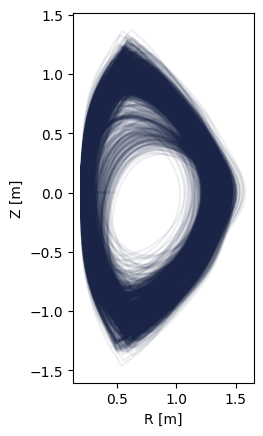

In [60]:
from scipy.interpolate import griddata,LinearNDInterpolator, interp2d

numshots =5#Number of shots
# print(np.array(signals_df.shot_id))
shot_ids_keep = random.sample(list(np.array(signals_df.shot_id)),numshots)

#possible sensor locations
Rsensors = sensor_characteristics[:,0]
Zsensors = sensor_characteristics[:,1]

pickup_angle = sensor_characteristics[:,2]
#separatrix locations
Rseps = []
Zseps = []
Sensor_Measurements = []
J = [] #current density profiles
Rmin = 0.1
Rmax = 1.8
Jr =  np.linspace(Rmin,Rmax)
betan = [] #normalised beta
elongation = [] #elongation
inner_midplane_Rs = [] #inner midplane radius
outer_midplane_Rs = [] #inner midplane radius
xpoint_r = []
xpoint_z = []
timeStep = 20 #the index distance between sampled points within a shot, set to 15


fig, axs = plt.subplots(1,1)
for shot_id in shot_ids_keep:
    url = sources_df.loc[sources_df.shot_id == shot_id].iloc[0].url
    url
    dataset = catalog.level1.sources(url=url)
    dataset = dataset.to_dask()
    #make sure we only chose flattop
    computed_xpts = dataset['xpoint2_zc'].compute()
    mask = 5>computed_xpts 
    mask2 = 0<computed_xpts
    mask = mask*mask2
    mask_np = mask.to_numpy()

    r = dataset['r']
    z = dataset['z']
    # Get the indices where the condition is True using numpy's nonzero
    filtered_indices = np.nonzero(mask_np)[0]

    activesensors = 1

    for i in range(0,len(filtered_indices),timeStep):
        ind = filtered_indices[i]
        lcfs_r = dataset['lcfs_r'][ind]
        lcfs_z = dataset['lcfs_z'][ind]
        plt.plot(lcfs_r,lcfs_z,color="#192446",alpha=0.07)

        plasma_current = dataset['plasma_current_rz']
        plasma_current = plasma_current[ind]

        R, Z = np.meshgrid(r, z)
        polodial_flux_rz = dataset['psirz']
        polodial_flux_rz = polodial_flux_rz.dropna(dim='profile_r')
        polodial_flux_rz = polodial_flux_rz.isel(time=ind)
        r = polodial_flux_rz['profile_r']
        z = polodial_flux_rz['profile_z']
        inner_midplane_Rs.append(np.min(lcfs_r))
        outer_midplane_Rs.append(np.max(lcfs_r))

        fluxinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
        Brinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
        Bzinterp = interp2d(r, z, polodial_flux_rz, kind='linear')
        Sensor_Measurement = []
        print("time") 
        for k in range(len(Rsensors)):
            if "fl" in sensor_names[k]:
                Sensor_Measurement.append(fluxinterp(Rsensors[k],Zsensors[k])[0])
            else:
                index= np.argwhere((np.array(dataset['magpr_r']) == Rsensors[k]) & 
                                   (np.array(dataset['magpr_z']) == Zsensors[k])&
                                   (np.array(dataset['magpr_ang']) == pickup_angle[k]))
                index = index.squeeze()


                if index.size!=0:
                    Sensor_Measurement.append(np.array(dataset['magpr_c'])[i][index])
                else:
                    Sensor_Measurement.append(0)
                    activesensors = 0
        print(Sensor_Measurement)
        Sensor_Measurements.append(Sensor_Measurement)
        xpoint_r.append(np.array(dataset['xpoint2_rc'][ind]))
        xpoint_z.append(np.array(dataset['xpoint2_zc'][ind]))
        Rseps.append(np.array(lcfs_r))
        Zseps.append(np.array(lcfs_z))
        # plt.plot(computed_xpts[filtered_indices])
        # j = griddata((R.flatten(),Z.flatten()), np.array(plasma_current).flatten(), (Jr, Jr*0), method='linear')
        # J.append(j)
        # plt.contourf(dataset['plasma_current_rz']['r'], dataset['plasma_current_rz']['z'], plasma_current, cmap='magma', levels=10, label='Polodial Flux')
        # plt.contourf(r,z, fluxinterp(r,z), cmap='magma', label='Polodial Flux')
        
        # plt.plot(dataset['xpoint2_rc'][ind],dataset['xpoint2_zc'][ind],marker="o",linestyle="")
plt.ylabel("Z [m]")
plt.xlabel("R [m]")
axs.set_aspect("equal")
plt.savefig("1.png",transparent=True,dpi=500,bbox_inches="tight")
plt.show()
xpoint_r = np.array(xpoint_r)
xpoint_z = np.array(xpoint_z)
inner_midplane_Rs = np.array(inner_midplane_Rs)
outer_midplane_Rs = np.array(outer_midplane_Rs)
Sensor_Measurements = np.array(Sensor_Measurements).squeeze()
inner_midplane_Rs = np.array(inner_midplane_Rs)
outer_midplane_Rs = np.array(outer_midplane_Rs)


In [1]:
print(len(Sensor_Measurements))
Sensor_Measurement_keep = []
for i in range(len(Sensor_Measurements)):
    if 0 not in Sensor_Measurements[i]:
        Sensor_Measurement_keep.append(Sensor_Measurements[i])
Sensor_Measurements = Sensor_Measurement_keep

NameError: name 'Sensor_Measurements' is not defined

In [66]:
dataout = Sensor_Measurements
headers = sensor_names
# File name to save the CSV
filename = "//Users//cyd//Desktop//MAST_demo_video.csv"

# Writing to CSV
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(headers)

    # Write the data rows
    writer.writerows(dataout)

print(f"Data successfully exported to {filename}")

filename = "//Users//cyd//Desktop//MAST_demo_video_Rs.csv"

# Writing to CSV
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(Rseps)

print(f"Data successfully exported to {filename}")

filename = "//Users//cyd//Desktop//MAST_demo_video_Zs.csv"

# Writing to CSV
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(Zseps)

print(f"Data successfully exported to {filename}")



Data successfully exported to //Users//cyd//Desktop//MAST_demo_video.csv
Data successfully exported to //Users//cyd//Desktop//MAST_demo_video_Rs.csv
Data successfully exported to //Users//cyd//Desktop//MAST_demo_video_Zs.csv


In [21]:
states_goodsensor = []
states_badsensor = []
data_plot_prob = []
data_plot_Rs = []
data_plot_Zs = []
# Open the CSV file
with open('..//data//processed//mast_likelihoods_sample_212.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_prob.append(row)

with open("//Users//cyd//Desktop//MAST_demo_video_Zs.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_Zs.append(row)


with open("//Users//cyd//Desktop//MAST_demo_video_Rs.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # header = next(csv_reader)
    # Read the rows
    for row in csv_reader:
        data_plot_Rs.append(row)


data_plot_prob_good = data_plot_prob[0]
data_plot_prob_bad= data_plot_prob[1]


1107
0.357920565947416


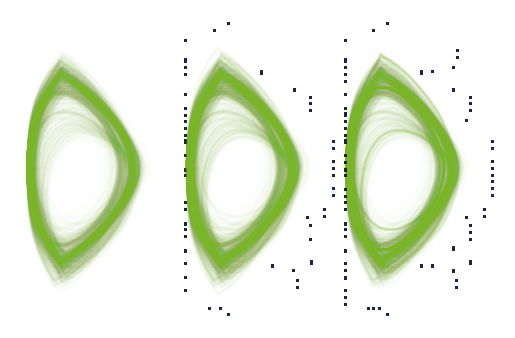

In [ ]:

print(len(data_plot_prob_bad))
print(max(data_plot_prob_good))
data_plot_prob_bad = [float(item) for item in data_plot_prob_bad]
data_plot_prob_good = [float(item) for item in data_plot_prob_good]
focuscolor = "#7AB528"
fig, axs = plt.subplots(1,3)
for g in range(3):
    for i in range(len(data_plot_prob_good)):
    #     plt.plot(data_plot_Rs[i],data_plot_Zs[i])
        testdataR = [float(item) for item in data_plot_Rs[i]]
        testdataZ = [float(item) for item in data_plot_Zs[i]]
        test =data_plot_prob_bad
        axs[g].plot(testdataR,testdataZ,color="#b6b6afff",alpha=4*(1/max(data_plot_prob_good))*1/(len(data_plot_prob_good)))
        if g == 0:
            if i==np.argmax(data_plot_prob_good):
                axs[g].plot(testdataR,testdataZ,
                color="#469DDE",linestyle = "--",alpha=1,linewidth=1,zorder=2000)
        elif g==1:
            axs[g].plot(testdataR,testdataZ,color="#7AB528",alpha=data_plot_prob_bad[i]/max(data_plot_prob_good),linewidth=2,zorder=2100)
            # plt.title("possibilities with measurement")
            for j in range(len(sensor_drop_data["Wave 2"])):
                sensorind = sensor_names.index(sensor_drop_data["Wave 1"][j])
                axs[g].plot(sensor_characteristics[sensorind][0],sensor_characteristics[sensorind][1],"s",markersize=1,color="#192446")
        else:
            # plt.title("possibilities with better sensors")
            axs[g].plot(testdataR,testdataZ,color="#7AB528",alpha=data_plot_prob_good[i]/max(data_plot_prob_good),linewidth=2)
            for j in range(len(sensor_drop_data["Wave 1"])):
                sensorind = sensor_names.index(sensor_drop_data["Wave 1"][j])
                axs[g].plot(sensor_characteristics[sensorind][0],sensor_characteristics[sensorind][1],"s",markersize=1,color="#192446")

        axs[g].set_aspect("equal")
        axs[g].set_xlim([0,2])
        axs[g].set_ylim([-1.8,1.8])
        axs[g].axis('off')

plt.subplots_adjust(wspace=-0.1, hspace=0)
plt.savefig(str(g)+".png",transparent=True,dpi=1000,bbox_inches="tight")
plt.show()